In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline

import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split

In [3]:
url = 'Lending_Club_Stats_2015_v2.csv'
loan = pd.read_csv(url, low_memory = False)

In [4]:
loan.head()

id  loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0  1085      10850    36      0.18     D        D5  10+ years       MORTGAGE   
1  2406      15000    36      0.12     C        C1    7 years            OWN   
2  3565       4000    36      0.11     B        B4    2 years            OWN   
3  3713      35000    36      0.09     B        B2   < 1 year       MORTGAGE   
4  3783      24000    36      0.08     B        B1    2 years           RENT   

   annual_inc loan_status             purpose addr_state  dti  Default_Status  
0     47000.0  Fully Paid    home_improvement         CA    0               0  
1     97000.0  Fully Paid               house         IL    0               0  
2     36000.0     Current                 car         CT    0               0  
3    200000.0     Current    home_improvement         CA    0               0  
4     98000.0     Current  debt_consolidation         OR    0               0

In [5]:
loan.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397278 entries, 0 to 421090
Data columns (total 14 columns):
id                397278 non-null int64
loan_amnt         397278 non-null int64
term              397278 non-null int64
int_rate          397278 non-null float64
grade             397278 non-null object
sub_grade         397278 non-null object
emp_length        397278 non-null object
home_ownership    397278 non-null object
annual_inc        397278 non-null float64
loan_status       397278 non-null object
purpose           397278 non-null object
addr_state        397278 non-null object
dti               397278 non-null int64
Default_Status    397278 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 45.5+ MB


In [6]:
loan['emp_length_clean'] = loan.emp_length.str.replace('+','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('<','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('years','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('year','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('n/a','0')

In [7]:
loan.emp_length_clean.unique()

array(['10 ', '7 ', '2 ', ' 1 ', nan, '4 ', '3 ', '6 ', '5 ', '1 ', '8 ',
       '9 '], dtype=object)

In [8]:
loan['grade_clean'] = loan['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [9]:
loan_amnt = loan.loan_amnt
mean_loan_amnt = loan[loan.loan_amnt.notnull()].loan_amnt.mean()
loan.loan_amnt.fillna(mean_loan_amnt, inplace=True)


In [10]:
annual_inc = loan.annual_inc
mean_annual_inc = loan[loan.annual_inc.notnull()].annual_inc.mean()
loan.annual_inc.fillna(mean_annual_inc, inplace=True)

In [12]:
emp_length = loan.emp_length_clean
mean_emp_length_clean = loan[loan.emp_length_clean.notnull()].emp_length_clean.mean()
loan.emp_length_clean.fillna(mean_emp_length_clean, inplace=True)

TypeError: Could not convert 10 7 2  1 2 4 3 4 4 10 10 2 10 6 3 5 6 4 4 1 2 1 1  1  1 10 10 4 10 3 10 2 10 10 10 10 10 5 4 5 1 3 10  1 7 6 8 1 8 10 9 6 10 10 10 2 10 5 8 10 5 2 10 5 5 8 1 10 3 10 1 5 10 10 5 6 4 10 10 10 8  1 9 10  1 8 3  1 10 4 10 6 10 10 5 10 2 10  1 2 8 10 10  1 2 1  1 2 7 8 4 9 2 3 10 2 10 10 10 10 3 5 3 5  1 2 10  1  1 5 7  1 10 10 8 2 4 3 10 8 9 3 4 3 2 4 2 2 5 3 2 10 1 10 5 6 4 10 10 4 6 10 3 3  1 10 9 2 2 1 10  1 6 1 3 5 2 10 10 2 10 10 2 1 10 10 2 1 3 5 3  1  1 5 10 3 1 10 2 10 3 3 1 10 8 3 10 10 10 7 9 6 2 4 10 10 9 7 4 10 2 10 10 2 3 10 2 10 1 10 10 4 1 10 6 10 10  1 10 4 10 8 2 10 10 10 7 6  1 5  1 10 10 10 10 7 2 1 8 2 4 2 3 3 5 7 9 9 10 10 10 5 2 2 4 1 3 8 10 3 5  1 10 4 1 2 10 1 1 10 10 10  1 8  1  1 3 5 4 10 3 10 10 9 10 2 6 2 2 2  1 2 9 3 6 2 2 8  1 10 8 10  1 10 5  1 8 10 6 8 10 10 4 2 2 10 6  1 10 2  1 3 10 8 10 10 6 10 3 10 6 10 1  1 3 4 10  1 2  1 10 10 1 10 8 10 10 1 10 10 10  1 3 10 10  1 5 10 10 3 4  1 4  1 5 10 10 4 7 2 10 3  1 10 5 3 8 10  1 6 10 6 9  1 10 10 2 1 10 3  1 2  1 2 6 2 10 10 8 1 10 10 10 1 10 2 4 10 3  1 10 6 10 1  1 10  1 3 8 10 1  1 7  1 4  1 7  1  1 1 10 8 1 4  1 10 1 10 10 10 2 3 2 6 10 7  1  1 1 7  1 10 10 5 10 10 3 10 10 10 2 3 2 10 10 3 10 8 10 2 3 10 10 8 5 10 5  1 5 10  1 3 10 2 10 10 3 10 2 10 10 5 8 5  1 4  1 2 10  1  1 1 10 10 5 8  1 10 2 1 10 3 2 2 1 9 1 4  1 3 5  1 2  1  1 1 5 7 2 2 9 1  1 10  1 5 3 4 1 10 8 10 10 10 2 2 7 8 4 2 5  1 10 10 10 1  1 3 7 3 5 10 10 10 1 2 5 10 5 10 10 7 1 3 5 8 1 5 10 9 10 2 1 8 5 3 10 4 10 4 3 10 10 10 3 2 10 4 2 2 10 2  1 7 10 10 9 8 1 2 3 6 2 2 2 10 3 3 2 2  1 2 1 9 5 8 4 2 9 10 10 1 10 10 1 3 10 8  1 10 10 5 10  1 2  1 10 10 10 2 7  1 1 5 2 6 10 5 10 10 5 6 5 10 10 10 3 1 2  1 3 5 10 1 4  1 8  1 10 3 10 2 10  1 7 10 10 1 3 10 10 9 9 10 10 4 1 4 3 10 7 10  1 10 10 10 2 3 2 6 8 2 5  1 9 10 3 10  1 1 10 2 6 10  1 3 5 4 4  1 4 4 9 1 1 3 8 4 10 8 10 10 10 2 9 1 10 1 7 9  1 10 10 10 4 10 10 7  1 9 1 4 5 10 10 3 7 10 1 10 5 5 1 10 10 7 2  1 10 1 10 10 5 6 10 8  1  1  1 2 10 9 10 2 10 2 7 10 7 10 8 3 10 10  1 6 6 10 4 3 3 6 6 10 6 6 9 6 5 2  1 10  1 3 10 3 7 3  1  1 9  1 5 10 9  1 7 10 10 9 10 10 4 2 2 2 10 5 10 10 2 10 10 1 7 1 4 4 10 10  1  1 10 3 10 10  1 8 10 2 10 8 6 1 2 5 2 2 10 6 10 10 1 5 10 3 2 1 10 1 3 3  1 5 10 1 5 9 2 5 10 10 3 2 1 1 10 10 2 2 3 1 8 6 2 9 7 2 1 10  1 3 1 10 6 10 10 3 1 6 10 9 2 4  1 10 3 5 7 8 7 4 3 5  1 2 10  1 4  1  1 10 2 10  1 2 1 2 10 5 2 10 10 8 10 10 9 4 10 8 10 3 10 6 4 8 2 10 3 2 6 5 4 1 5 10 10 10 5 10 4 10 4 1 10 2 10  1 1 7 5 10 3 10 8 2 10  1 2 10 1 5 1 3 8 10 4 7 1 1 7 7 1 3 10 10 5 1 5 4  1 10 9 10 10 3 10 10 10 10 10 2 8 5 2 10 3  1 2  1 3 8 3 3 10 2 3 3 10 2  1 2 4 1  1 10 4 10 3 10 10 9 1 1 10  1 4 3  1 7 2 3 2 3 5  1 3 4 5 5 8 10 8  1 1  1 10 10 10 10  1  1 10 2 7 9  1 10 5 10 7  1  1 10 8 10 10 10  1 10 10 8 10 8 10 10 1 10 10 10 10 3 7 10 5 6 4 3 10 10 7 10 8  1 8 1 6 1 10 2 10 6 10 10 10 10  1 3 10 10 1 4 10 9 5 5 10 2 3 1 2 10 2 10 3 10 9 8 2 7 10 5 9 5 7 1 1 6 4 1 4 10 5 10 10 2  1 7 2 5 2 1 3 10 2 4 2 10 7 10 8 8 1 10 10 2 9 10 6 10 2 1 10 10 5 1 1 10 10 7 2 10 8  1 1  1 10 1 8 10 8 10 9  1 1 10 2 10 1 3 10 4 5 10 10 5 10 10  1 3 10 2 3 2  1 3 1 1 2 1 2 10 10 10 1  1 2 10 10  1 8 10 7 4 2 10 8 8 8 10 5 10 1 10 4  1 2  1  1 10 4 1 1 2 8 8 2 10 5  1 2 10 8 3 3  1 10 1 7 10 10 2 3 10 2 10 10 7 7 10 10 6 2  1 8 2 2 8 8  1 9 10 2 8 10 10 5 6 2 10 10  1 10 10 8 9 4 8 2 4  1 1 8 10  1 6 2 2 1 3 2 2 9 3 2 10 10 10 2 9 2 8 10 7 7 2 2 5 2 5 10 5 1 3 10 7 2 2 10 3  1 2 4 4 4 10 3 3 2 2  1 8 8  1 5 2 3 9 2 8 1 4 7 5 3  1  1 10 9 3 5 10 4 10 2 2 7 10 7  1 4 2 10 8  1  1 4 10 6 10 3 3 2 2 10 9 10 2 10 10 9 10 10 10 10 2 10 8  1 3 9  1 3 2 10 10 4 8 3 2 4  1  1 7 3 4 10 10 7 10 10  1 4 7 1 3 7 2 8 2 10 5 3 3 2 10 8 7 5 6 5 5 10  1 10 1 10 9  1 10 10 3 10 1 10 10  1 6 10 6 1 4 9 4 8 10 10 10 8 2 8 8 5 10 10 10 5 10 9 6 3 3 10  1  1 6 2 2  1 8 4 2 10 6 4 1  1  1 6 8 8 10 2 2 8 4 4 3  1 10 2 9 10 2 3 6 10 10 5  1 2 8 2 2 10 5 10 10 4 10 10 3 1 9  1 7 10 10 1 10 7 10 10 10 5 3 4 5 5 5 10 10  1  1 6 6 2 1 9 10 10 8 4 10 3 10 6 10 3 7 4  1 6 3 10 10 10 10 10  1 10 10 2 6 4 5 2 2 10 10 4 10 8 8 3 10 10 10  1 3 8  1 2 10 1 4 2  1 7 10 1 7 10 10 10 10 10 3 10 10 10 9 10  1 10 2 10 1 7 5 1 8 3 7  1  1 5 8  1  1 10 10 10 5  1 3 10 6 10 7  1  1 10 4 4 1 5 10 7 2 7 6 10 10 10 10 2 8 2 10 7 10 7 10 3 10 10 4  1 10 10 3 9 10  1 5  1 8 10 10  1 10 10 10 6 5 7 2 3  1 7 3 10 10  1 2 10 10 10 3  1 5 3  1 8 2 2 2 10 10 2 5 4 3 3 2 10 4 5 4 10 10  1 10 10 3 4 3 2 4 10 3 4 7 7 5 10 2 10 8 8 5  1 10 2 6 3 10 10 7 10 3 10 2 10 7  1 10 10 2 4 10 10 1 1 10 10  1 10 4 1 10 5  1 1 10 2 2 10 10  1 5 10 1 6 7  1 10 7 4 10 4 10 10 3 10 10 1  1 6 5 10 8 10 7 2 3 10 1 7  1 10 1 2  1 10 5 5 3 9 10 8 10 10 10  1 8 10  1 4  1 1  1 4 1  1 9  1 8 10 1 9 2 5 1  1 7  1 10 5 10 8 4 6 9 6 8 2 10 8 5 10  1 5 4 10 10 8 10 1 10 7 10 10 9 10 4 10 1 6 2 2 10 10 8 3 8 2 1 2 1 5 3 2 5 10 2  1 10 10 2 6 1 10 7 9 3 10  1 8 10 5 2 2  1 2 10  1  1  1 4 3 1 10 4 10 4 10  1 9 3 1 6 10 1 1 10 1 2 1 10 10 10 10  1 7 8 5 2 6 6 6 2 10 6 5 6 5 1  1 10  1 5 1 4  1 10 3 1 3 4 5 10 8 10 3 10 6  1 10 2 9 1 5 1 10  1 10 7 2 2 8 2 2 10 10 10 7 10 7 10 10 8 5 10 10 3 10 3 10 1 3 1 1  1 10 3  1 5 5 10 4  1 10 4 10  1 10 10  1 10 3 10 10 10 1 10  1 4 8 10 2 1 2 10 2 10 10 4 10 3 8 1 10 10 3 3 3 8  1 9 8 10 8 10 3 2 10 10 5  1 10 9 10 10 5 7 6 2 5  1 8 3 10 10 7 10 10 2 8 4 10 10  1 5 1 5  1 10 3 3 1 10 2 10  1 10 10 10  1 7 5 1 10 10 10 10 3 10 8 10 5 10 5 8 4 2 3 3 6 3  1 10 8 10 10 2 3 9 8 1 2 4 3 10 10 3 10 10 4 8  1 10 10 10  1 10 10 10 10 10 10 10 2 5 1 1 10 3  1 2 10 4 3 10 5 3 3 1 9  1 8 5 10  1 1 7 10 10 10 1 10 2 5 3 10 10 8 10 10 10  1 10 10 3 6 4 10  1 2 9  1 2 5  1 10 7 10 10 2 1 5  1 2 10 10 8 2 10 10 2 7 10 4 10 10 3  1 10 10 2 3 9 3 1 3 10 1 10 5 4 6 10 8 10 2 9 10 2 3 2 10 5  1 10 1 3 10 5 5 10 1 10 9 3 5 2 10 1 5 2 10 7 2 10 10  1  1 3  1 10 7 4  1 10 1 4 1 10 1 1 2  1 10 8 8 10 7 10 10 2 6 10 6 6 2 10 10 2 1 9 10 4  1 5 3 10 10 10 4 6 10 4 10 10 10 4 4 2 8 10 9 10  1 1 2 10 9 2 7 8 10 4 10 8 10 10  1 10 2 5 9 10 3 2 1 10  1 7 10  1 5 10 4 4 2 3 3 2 10 10 3 6 3 10 5 8 1 2 1  1 3 1 6 1  1 9 10 10 10  1 10 10 6 2 10 7 10 10  1 1 5 10 7 10 4 6 4 5 5 10 2 4  1  1 9 10 4 2 10 5 8 4 2 10 2 10 3 6 10 2 7 9 6 10 6 3 10 9 6 5 4 5 10 2 10  1 7 10 7 2 10 6 7 10 10 10 10 1 10 10 10 9 4 5 2 2 10 1 5  1 10 1 6 8 5 10 2  1 8 1 10 4 7 10 10 4 4 8 3 6 8 9 3 10  1 4 9 10 4 6 1 10 6 10 10  1 2  1 10 3 10 9 6 1 10 10 5 5 4 4 4 10 1  1 7 10 2 10 2 5 10 1 10 5 10 5 10 2 10  1 4 10 4 9 9 3 10 5 10 10 3 10  1 9 10 1 2 6  1 10 8 10 3  1 3 10 6  1 2 5 8 7 10 10 10 10 5 10 2 5 10 10 6 4  1 7 10 10 5 10 10 10 1 10 2  1 5 10  1 10 9 4 10 2 10 1 10  1 6 5 10 7 5 4 3 10 10 4 10 10 7 5 2 7 8 10 2 4 6 1 10 7 10 2 10 2  1 10 10 4 10 4 8 4 10 10 8  1 10 10 7 10 2 10 10 9 10 7  1 1 10 1 10 3 10 7  1  1 2 3 10  1 7 4 10 10 10 4 10 7 10 5 4 10 1 10 6  1 1  1 6 1 2 4  1 10 10 3 10 10 1 3 7 10 10 10 9 9 1 10 9 7 6 10 1 3  1 10 2 3 7 8 7 10 8 8 10 2  1 10 10 5 5 9 7 9 1 10  1 2 1  1 5 6 10 10 3 1 10 2 5 10 1 10 6 4 10 1 8 2 4 2  1 10 3  1 3 10 4 10  1 9 10 3 5 10 3 3  1 3 3 1  1 10 10 1 5 1 10 1 10 10 10 8 10 10 10 4  1 8 6 1 2 8 7 1 2 2 4 10 4 10 1 1 8 10 5 2 10 5 4 4 10 4  1 7  1 4 5 1 10 3 10 10  1 5 2 10 2 10 5 4 5  1 10 10 10 10 2 1  1 8  1 7 10 6 10 4 1 6 1 10 8 10 10 10 10 10 10 2  1 10 10 2 2 8 1 2 8  1 3 10 1 3 2 8 1 10  1 10  1 8 1 10 3 4 3 8  1 10 10 10 10 10  1 10 3 3 3  1 5  1 7 2 10 10 2 10 2 1 10 1 7  1 8 7 2 7 2 10 10 10 5 3  1 10 4  1 7 6 8 8 3 10 4 10 10 4 10 10 10 10  1 10 2  1 1 10 10 10 10 10 5 10 10 1 10 2  1  1  1 1 5 2 3 1 2 2 10 10 10 5 4 10 10 9 10 2 10 8 5 8 4 10 10  1 10  1 5 2 2  1 10 1 8 8 10 1 2  1 10 2 4 2 7 10 10 5 10 10 10 7  1 5 3 9 8 2 10  1 1 4 1 4 10 10  1 10 1  1 2 2 10 2 10 3 10 10 4  1 10 3 7 3 4 10 5 3 2 10 10 8 10 10 7 10 10 6 5 8 10 10  1 9 1 3 3 10 4 10 10 2 7 1  1  1 7 4 3 8 3 10 7 9  1 4 2 10  1 4  1 8 10 6 10 4 9  1 10 10 3 1 10 10 10 10 10 1 3  1 10 7 10 1  1  1 10 2 10 1 10 10 2 10 10 10 10 10 5 10 8 10 1 9 9 4 10 10  1 5 10 10 10 10 10  1 3 2 10 2 9 10 6 5 10 9  1 2 6 10 1 10 2 8 7 7 3 8 10 6 1 10 10 10  1 10 10 2 3 10 8 1 4 2  1 10 1 3 10 10 10  1 8 10 10 5 7 2 5 10 10 10 8 10 3 10 10 10 2 8 10 3 2 10 10 10 3 2 1 3 10  1 8 4 10 10 1 10 10 1 10 6 2 3 10 10 1  1 4 8 10  1 10 10  1 10 4 8 10 1  1  1 4 7 10 1 10 10  1 2 10 7 6  1 6 10 8 5 10  1 3  1 9 6 2 4 2 8 10 10 7 10  1 4 6 4 10 7 6 10 9 4 2  1 2 10 8  1 10  1 5 5 1 8 3 2 5 7 10 6 5 9  1 4 10 1 10 2 10 4  1 1 5 5 8 8 10  1 3 2 7 2 8 10 5 10 5  1 4 8 7 10 3 10 8 2  1 10 10 2 10 5  1  1 10 10 10 10  1 1 3 3 3 3 10 10 10 7 2 10 10  1 2 10  1 2 10 9 5 10  1 6 10 10 8 10 7 10 6 2 8 2 1 3 5  1 1 1 7  1 3 10 7 8 7 3 10 5  1 10 10 4 4 2 10 10  1 10 10 5 2 10  1 4 10 7 10 8 10 4  1 6  1 2 10 4 10 1 4 10 1 9 10 3 2  1 7 10 5  1 4  1 2 10 6 10 10 1 1 1 10 10 1 3  1 9 3 4 4 1 4 1 3 3 10 1 10 3 1 5 5 4 8 3  1 10 1 9 9  1 4 10  1 10 10 3 2 10 10 8 10 10 6 8 10 4 10  1 4 5 3 3 1 4 3 10 1 3 1 7 3 4 10 10 10 2 10 10 1 10 7 1 8 10 10 2 1 10 9  1 5 8 4 10 7 2 9 10 10 5 8 10 7 7 4 10 8  1 8 10 10 5  1 1 10  1 10 7 10 1 10 10  1 3 10 6 10 7 10  1 3 2 4 3 5  1 3 2 9 1 7 10 3 10  1 7 4 1 3 1 8 4 10 8 3 7 2 1 2 10  1 10  1 4 10 2 10  1 5 6 4 5 10 4 10 7 5 10 10 9 2 5 2 2 3 10 10 8 5 5 8 10 8 10 10 8 3 4 2 8 5 2 2 4 5  1 8 9 3 2 2 4 2 9 1 1 7 1 8  1 1 10 3 9  1 4 10  1 10 6 10 2 5 3 10 1 10 4  1 1 6 1 7 10  1 3 10 10 10 7 2  1 4 6 4  1 9 2 2 10  1 1  1 4 10 4 3  1  1  1 10 1 8 8 10 5 10 6 10  1 6 10 10 2 10 2 8 10 10 4 6 10 3  1 1 10 3 7 7 10 10 5 3 10 2 10 1 10 9 3 10 10 5  1 7 6 10 10  1 5 1 2 2 5 10 10 10 6 10 4 5 9 4 6  1 10 7  1 1 7 4 2 5 10 1 3 2 5 10 10 10 8  1 4 10 6 7 2 3 1 6 1 10 8 10 5 10 10 10 7 10 4 2 10 7 10 5 1 8 10 3 3 7 10 9 4 10 4 8 3 2  1 5 10 10 10 10 2 10 7 4 10 10  1 2 10 10 10 5 1 2 1 10 8 2 5 10 10 4 3 3 3 2 10 9 5 1 4 7 10 4  1 6 3 10 1 2 7 10 4 8 10 2 5 1  1 7 10 10 3 4 9  1  1 6 1 4 7 10 10 10 10 1 2 7 10 3 7 3 3  1  1 6 8 1 1 10 10 1 7 10 5 2 5 5 4  1 3  1 10 1  1 6 1 10 10 5 8 10 10 5 3 7 10 10 10 7 10  1 10 5 5 2 5 3 10  1 10 10 3 10 10 6 10 10 8 10 4 10 4 1 10 10 3 2 10 5  1 10 2  1 5 4 9 2 2 8 5 10 10 2 9  1 8 5 3 10 10 1 5 7 10 2  1 5 1 10  1  1 10 7 10 10 7 5 4  1 6 5 3 10 10 10 6 2 8 10 10 4  1 4 3 10  1 10 10 1 6  1 10 10 8 8 10  1 10 8 2 2  1 2 4  1 10 1 4 3 2 2 10 7 10 10 10 10 3 10 10 3 4 10 2 10 1 10 1 7 10 5 10 9  1 2  1 10 6 5 2 2  1 10 3 10 10 2 7  1 4 10 8 3 10 10 6  1 9  1 3 1 2 7 5 3 10 10 10 10 10  1 10 1  1 8 1 8 8  1 10 4 2 1 1 4 1 7  1 1  1 10 1 5 10 10 6 8 10 3 10 7 10 7 10 10 2 9 10 10 10 3 1 7 10  1  1 10 2 10 6 8 6 3 8 1 10 2 10 8 5 5 4 2  1 10 10 6 8 1 1 3 10 3 1 10 10 10  1 10 6 10 4 8 10 8 10  1 2 5 9 10 10 6 4 8 9 10 10 10 4 7 8 3 10 10 9 3 5 3 2 10 3 10 10 2 5 10 7 2 4 10 3 6 10 1 3 10 4 1 7 1 3 5 3 2 9 10 10 1  1 5 10 10 10 3  1 1 9 2 4 10 10 10 3 10 10 10 10 2 4 1 4  1 3 4  1 10 2 1 10 1 2 10  1 10 10 10 6 5 2 10 1 10 10 10 10 8 5 10 3 3 3 10 2 10 3 2 10 10 10 10 7 10 5 4 4 7 10 4 10 5 2 10 2 10 3 9 3 3 1 4 1 4  1 10  1 3 8  1 1 2 10 9 2 10 3 10 10 10 1 1  1 8 10 4 2 9 7 3 2 10 7 3 4 10 3 10 10 10 4 10  1  1 10 10 4  1 5 7 1 6 4 10 4 2 3 8 4 1 10 4 9  1 3 4 10 3  1 1 2 5 8 7 9 8 7 10 5 10 2 6 10  1 10 10 10 7 10 6 3 8 10 5 7 10 10 1 3 7 2 2 4 2 4 10 6 4 2 5 7 8 2 10 10 10 9 3 2 10 3 9 6 10 3 10 4 3 1 10 7 10 5 9 10 10 7 5 2  1 10 5 6 1 10 10 7 7 1 5 4 3 3 7 7 4 10 2 5 10  1 5  1 10 1 2 5  1 8 10 8  1 3 2 6 10 10  1 1 10 10 5 10 3 1 2 10 2  1 10 3 5 5 10 10 10 8 2 4 8 4 2 10 10  1 10 10 1 2  1 3 10 6 10 2  1 3 2 10 3 10 4 4 10 4 6 3 10 10 10 1 10 4 2 10 3 10 1 2 3 10 10 5 5 5 10 10 2  1  1  1 2  1 7 6 10 3 4 3 10 3  1 4 3 2 7 3 10 10 10 10 2 10 10  1 2 7 3 10  1 1 10 10 3 9 10 10 10 5 1 10 10 2 10 7 6 4  1 10 10 10 10 1  1 4  1 10  1 10 3 7 10 10 1 4 5  1 10 1 3 10 10 9 10 10 1  1 3 10 6 1 3 5 10 2 1 10 10 8 3 3 9 4 5 10  1 4 9 10 2 5  1 4 10 9 8 1  1 4 10 6 2 10 1 8  1 4 10 5 1 2 1 9 10 10 9 9 9 10 6 2 8 2  1 10 10 5  1 10 10 9 6  1 8 5 2 5 9 8 3 7 10 1 1 2 4 2 10 6 2 10 10 6 4 10 10  1 7 2 10 10 10 3 1 10  1  1 2 10 10 10 5 10 10 6 10 6 7 4 6 10 8 4 1 2 5  1 10 2 10 4 2 8 8  1 5 10 3 1 10 10 4 7 4 8 2 10 1 10  1 4 10 7  1 10 1 4 5 10 10 6 10  1 10  1 6 3 3 10 5 10 5 10 5 5 10 5 7 3 3 1 2 10 10 10 4 3 7 2 5 2 2 2  1 6 10 10 3  1 10 2  1 7 10 3 5 9 5 3 10 5 10 7 1  1 7 5 1  1 10 10 9 10  1 6 10 5 10 10 4  1 3 10 1 10 10 10 3 5 7 10 10 10 6 7  1 10 2 10 5 1 3 5 9 4 5 10  1 4 5 1  1 5 10 4 10 7 3 4 9 10 1 6 2  1 10 10  1  1 2 10 10  1 1 10 5 4 7 4 7 10  1 10 9 5 1 2 3 8 10 7 10  1 4  1  1 10 10 10  1  1 10 3 1  1 5 1  1 10 3 6 10 8 10 10 7 10 8 10 5 1 10 6  1  1 1 6 10 10 6 3 3 1 3 1 10 8  1 6 10 3 10  1 10 1 10 10  1 10 9 10 2  1  1 9 10  1 3 5 3 3  1 10 4  1 10 1 6  1 2 7 9 10 8 5 10  1 10 10  1 4 10 10 5 9 5 3 1 8 10 10 10  1 10 1 2 10 9 10 10  1 8 10 2 6 10 3 9 10 7 10 4 7 10  1 7 7 3 10 3 10 1 10  1 10 7 1  1 2 10 3 8 6 7 6  1 4 10 10 10 10  1 6 10 10 3 8 1 10 4 6 2 5 3 5 3 10 1 2  1 6 10  1 10 10 2 2 10 10 10 1 3 4 8 6 5 9 1 10 8 1 4 10 4 6 1 10 6 9 1 10  1  1 4 4  1 10  1 1 3 10 3 6 10 2 9 10 3 2 10 1 2 4 2 5 10 3 2 10  1 10 8 8 10 10 10 10 10 3 10 7 9 10 3 10 4 2 10 5 10  1 10 3 5 9 4 8 2  1 10 10 10 10 10 10 1 3 10  1 2 1 6  1 1 10 8 3 6 1 8 10 10 5 3 2 9 7 9 10 9 4 6 1 10 10 10 5 7 10 1 10 6 3 10 3 10 5 8 10 10 3 2 3 4 10 10 10 3 10 6  1 2  1 8 1 10 2 1 1 9  1 10 9 6 10 3 8 7 10 10  1 10 4 2  1 10 10 7 6 2 4 2 8 10 4 2 3 10 3 2 10 2 4 10 4 1 3 10 3 1 10 10 5 4 7 10 8 2 10 10 5 3 10 1 2 6 4 5 10 10  1 4 10  1 10 2 4 3 5 10 5 2 10 3 8 2 9 10 5 6 1 3 10 10 2 10 10  1 10 1 10 3 5 2 2  1 6 10 2 2 5 1  1 10 9 2 3 6 2 4 2 10 10 1 10  1 3 10 1 10 2 8 3 10 2 10 10  1 2 10 10 4 6 8 10 10 10 5  1 9 3 10 6 6 5 10  1 3 10 10 10 10 2 10 10 5 10 3  1 5 2 10 10 5  1 1 10 2 6 4 8 2 10 1 2 10 10 10 3 4 8 10 10 3 10 1 9  1 1 3 10 6 10 10 1  1 1 6 10 6  1  1 8 10 1 3 5 5 5 10 1 9 2 5 3 3 10 1 10 3 3 1 3 3 8 6 10 2  1 10 7 5 1 2  1 4 10 1 7  1 7 10 10 7 10 10 5 2 5 10 10 10 10 1 10 3 1 10 8 2 5 3 1 5 10 10 10 10 10 10 10  1 10 10 3 10 10 3 2 1 3 7 2  1 7 10 5 10 2 10 8 4 1 3 9 8 4 10 5 10 2 10 5 6 1 10 10 2 4  1 10 3 4 5 2 6 2 10 8 6 5 10  1 3 10 5 2 3 5 5 1 2  1 10 10 10 9 1 6 6 10 10 10 8 10 10 4 10  1 10 4 10 5 4 6 1 7 10 7 10 10 10 5 8 2 9 10 10  1 4 10 1 1 10 7 10 2 10 10 1 2  1 10 2 4 5 2 3 7 1  1 2 1 5 10 3 3 3 3 1 10 5 10 10 5  1 8 9 10 3  1 10 10 3 10 2 9 10 7 3 10 1 6 10 10 6 10 10 3 10 5 2  1 10 3 4 2 10 10 10 10 2 4 10 6 10 4  1  1 10 8 7 1 3 3 2 10 10 10 10 7 3 3 5 10 10 8 2 1 10 10  1  1 3 4 3 1 10 10 5 10 10 2 10 2 10 1 9 3 10 10 4 10  1 10 10 3 10 1 1 7 10 10 10 10 2 10 10 1 10 10 10 10  1 8 2 7 1 4 10 4 7 10 1 4 2 6 7 10  1 3 9 9  1  1 5 4 7 10 8 10 10 10 1 8 10 10 10 7 7 2 10  1 3  1 1 5 1  1 10 10 10 8 3 7 10 10 10 10 4 5  1 1 10 10 6 1 1 1  1 3 1 2 1 6 9 10 10 10 6 1 6 10  1 2 7 10 4 9 10  1 10 2 2  1 8 10 8 5 1 2 3 10 10 2 10 2 5 10 5 2 7 1 7 10 4 10 10 10  1 5 1 3 10 10 6 3 10 1 4 10 2 6 3  1 5 1 10  1 10 4 5 9  1 1  1 9 2 10  1 5  1 10 8 2 3 7 9 10  1 10 2 2 10 5 10 10 2 1 10 1 10 1 10 9 6  1 7 10 3 1 7 7 10 5 3  1 1 1 6  1 6 2 2 7 10 10 6 8 8 8 10 10 3 10 10 10 10 9 10 5  1 8 10 6 1 10 10 10 2 10 10 7 2  1 9 8 1 5 10 5 10 2 9 8 10 1 6 1 5 10 1 3  1 10 3 8 1 3 10 4 10 10 7 10 4 10 3 10 5 10 8 10 5 9 10 6 5  1 1 6 3 2 3 10 9  1 10 10 6 4 10 10 8 10 6 4 3 2  1 2 7  1 10 7 9 1  1 10 1 1 8 9 5 10 4 10 7 5 10 2 9 10 3 2 6 6 7 4 8  1 5 10 2 1 3 4 10 9 10 10 1 2 1 4 10 4 10 10 4 10 2 5 6 3 8 1 8 10 1 10 10  1 4 10 5 9 5 7 4  1 10 6 9 5 1 1  1 8 6 5 5 10 2 10 7  1 10 7 10  1 2 10 10 9 7  1 10 10 2 6 5 8 10 1 2 1 3 3 3 8 10 10 10 2 3 8 2 10  1 5 5  1 1 10 2 9 5 10 3 5 10 10 10 10 10 10 4 2 8 10 10 2 7 10 10 3 10  1 10 7 2 3 1 3 10 2 8  1 10 10  1 7 10 10 10 4 10 3 10 4 6 10 1 10 2 1 3 6 10 10 3 2 8 1 3 10 8 6 3 5 1 10 2 2 7 4 2 10 4 10 10 10  1 8 3  1 10 10 6 3 6 2 10 7 8 4  1 10 3 1 8 3 9 8 8 2 5  1 10 4 3 3 5 2 1 9 10 3 1 10 10 2 4 10  1  1 10 10 3 3  1 3 1 7 1 3 10 2 5 10 4 10 10 10 10 3 2  1  1 5 1 10 4  1 10  1 10 10 10 2 10 10 6  1 10 8 5 10 10 9 10 5 10 4 3 10 10 5 10 8 8 5 7 7 8 8 8 4 6 10 3 4 8 10 8 10 5  1 10  1 10 8 10 2 10 4 9  1  1 10 10 3 7 10 4 10 10 8  1 2 1 4  1 10 6 7 10 7  1 10  1 10 5  1 10 2 10  1 2 9 5 10 2  1 3 3  1 5 4 2 10 10  1 10  1 10 1 3 10  1 7 5 10  1 7 2 2 2 10 5 10 3 10  1 3  1 4  1 4 6 4 7 10 10 3 7 6  1 8 1 10  1 1  1 5 3 2 3 1 2 6 2 10 8 7 10  1 7 10 2 3 7 10 3 2 10 1 7 8 10 1 2 8 10 4 10 4 7 4 1 6 10 9 1  1 2  1 10 10 7 5 10 10 10 6 5 10  1 10 7 10 7 6 6 5 10 10 2 10 3 10 10 10  1 1 10 9  1 10  1  1  1 2 10 10 1 3 1 1 10 10 4 10 10 7 1 10 1 5 1 10 5 6 6  1 2 2 9 9 1 10 10 7 6 7 8 3 1 10 1 3 2 10 1 10 10 10 10 9 1 10 1 10 1 10 4 4 4 10 4 10 10 10 9 2 7 1 10  1 10 10 10 10 3 7 10 10  1 3 2 1 10 2 10 10 10 1 10  1 10  1 10 5 2 2 10  1 7 5 4 6 10 10 10 10 10 3 9 2 10 5 10 1 10 5 2  1 3 2 10 10 10 2 1 9  1 8 10 3  1 7  1 10 9 3 10 2 10 10 4 4 3 4 10  1 3 1 1  1 10 2 4 10 2 2 10 10 9 4 10 1 3 10  1 10 3 10 2 10 10 5 2 2 4 10 4 10 8 5 10 10 10 10 10 10 7 8 3  1 3 2 3 8 4 10 1 3  1 2 7 2 3 10 4  1 3 4 10 8 10 3 10 10 3 10 4 10 5 10 10 10 8 6 10 10  1 2 10 3 9 2  1 9 10 2 10 4 3 5 2 5 1 8  1 7 2 10 6 7 3 1  1 10 10 2 5 6  1 10  1 10 10 2 7 4  1 1 5 4 9 1  1 5 10 3 10 3 4 10 3 6 7 10 5 10 10 7 3 9 10 1 8 8 5 8 5 2 7 10 1 8 8 9 10 8 1 2 3 8 1 3 2 10 5 10 10 10 1 5 4 2 7 6 10 10 2  1 2 7 1 10 9 8 5 5 10 8 10 10  1 6 3 10 5  1  1 1 1  1 10 2 8 2 10 7 1 8 5 1 1 1 3 10 1 2 10  1 9  1 4 10 2 6 3 10 10 10 4 10 1 10 10 3 7 10 10  1 10 10 5 10 7 10 7 3  1 10 10 7 10 3 6 3  1 10 10 3 10 3 1 4  1 5 2 4 10 10 10 10  1 2 1 10 1 10 4 2 5 5 10 10 5 10 10 6 3 3 10 7 3 8 4 10 2 1 10 3 3 2 2 10 9 5 10 8 5  1 10 9 4 9 10 2 7 10 10 7 10 5 1 10 4 10 2  1 5 1 2 9 3 1 3 5 10 10  1 7 10 4 10 2 2 5 10 10 10 5 8 10  1 5 2 2 10 2 3 10 7 5 6 4 4 5 10 8 10 10 10 10 10  1 10 6 2 1 8 7 4 9 2 6 3 10 9 5 2 2 2 10 10 7 10 4 5 2  1 4 2 2 10 10 8  1 10 2 3 2 1 3 6  1 10 5 2 1  1  1 2 1 10 10 3 3 2 7 10 10 5 10 7 10 2 10 10 3 3 10 10 6 3 10 2 8 6 10 7 1 4  1 10 2 10 3 5 10 8 8 10 4 4 10 1 6 10 1  1 10  1 1 10 10 2 10 2 10 5 4 2 10 2 10 2 10 10 2 10 7  1 1 10 10  1 6 4 4 10 10 4 5 10 2 10 10 2 10 10 2 10 4 1 10 1 1 10 5 1 9 6 1 1 1 10 10 8 8 5 9 2 4 4 10 10 8 7 3 3 2 2 8 10 10 10 10 7 2 8 10 2  1 2 1 5  1 3  1 10 4 3 1 10 3 10 4 10 1 10 5 10 5 2 10 3 1 2 8 1 10 7  1 7 10 10 10 10 1 10 10 3 6 10 2 2 10 9 9 3 3  1 7 3 1 7 7 2 10 3 1 10 7 10 8 7 1 10 7 6  1 7 10 10 7 1  1 10 10 5  1 10 10 3 10 6 8  1 2 10 10 10 10 6 2 10 4 5 7 10 8 1 5 10 3 2 9 6 6 6 10 10 9 1 4 10 4 7 9 2 6 10 7 2 10 4 10 2 10 1 3 7 1 5 10 10 7 10 8 6 10  1 2 1 5 10 5 10 1 8 10 2 10 10 8 7  1 5 9 10 1 2 10 4 7 2  1 1 10 4 9 9 7 10 4 4 10 3 2 10 5 4 2 10 1 10 10 2 7 2 2 2 10 10 5 2 5 8 3 6  1 5 10 4 9 6 3 1  1 2 10 10 10 6 10 10 9 8 6 10 5 6 10 8  1 5 5  1 10 9 9 2 10 10 3 10 10 3 10 1 1 3 10 3 10 4 2 10 3 10 10 10 4 8 4 10 3 8 2 5 8  1  1 9 4 10 3 10 10 10 2 7 7 3 10 10 10 10  1 3 3 1 9 10 6 10 10 10 9 1 3 5 2 2 4 2 1 10 3 2 6 4 2 10 7  1 10 10 1 10 10 3 10 10 10 10 10 3 10 1 1 1 10 10  1 4 9 10 8 10 1 10 7  1 10 1 6 4 4  1 10 5 3 2 9 10 10 10 9  1 1 10 10 1 10 5 5 3 7 10 2 10 10 10 10 2 5 1 6 6  1 10 10  1 6 8 6 10 10 10 10 10 10 10  1 10 10 7 10 1 10 10 10 3 10 10  1 8 1 1 4 10 10 5 5 2 10 2 2 10 3 10 10 1 10 3  1 1 3 6  1 9  1 3 2 2 8  1 5 3 10 10 3  1 4  1 7  1 1 1 3 3 10 2 2 10 9 4 10 6 8 3 4 10 10 3 10 7 8 8 1 9 2 10 10 10 2 1 10 2 10 2 1  1 2 10  1 2  1 10  1 4 4 10 10 10 10 5 9 10 2  1 9 1 4 7 1 3 5 10 4 6 10  1 10 3 1 5  1 10 10 10 2 10 4 2 10 2 7 2 8 10 2 5 10 10 8 10  1 10 4 9 2 4 3  1 10 4 5  1 10 10 10  1 8 10 10 5  1 7 2 7 10 8 3 2 3 10 3 10 10 3 3 2 10 10 2 8 5 4 4 10 3 1 10 10 10 4 9 4 10 3  1 10 10 10 4 2 10 4 10  1 3 10  1 4 1 9 1 1 9 10 2 10 2 8 10 7 10 7 10 4 10 2 1  1 3 10  1 10 7 5  1 10 4 3 10 4 10 4 2 10 10 10 2 2  1 3 10 10 10 10 8 2 10 1 9 10 10 10  1 1 1 7 2 10 2 3 6 5  1 10 10 10 8 10 6 10 2 3 2 6 10 10 5 10 8 3 7  1 10 7  1 2 8 2 8 5 4 10  1 10 10 10  1  1 3 10 10 4 5 3 6 10 10 2  1 5  1 7 2 10 3 10 5 6 10 7 4 2 9 10 6 10 10 5 10 10 5 1 5 8 2 2  1 1 1  1 3  1  1 4 9 5 2 2 2 1 10 4 10 4 2 10 5 10 7 1 10 10 10 10 10 10 10 10 2 2 10 10 3 2 10 3 4 8 3 8 10 10 2 3 8 10 4 2 10 10 10 10  1 4 10 2 9 7 8 2 10  1 4 7  1 3 1 4 5 10 10 9 10 1 7 10 2 1 5 6  1 10 3 2 1 10 3 10 7 5 7 4 8 2 10  1 10  1  1  1 10 2 2 4  1 2 2 10 8 10 10 10  1 10 2  1 3 9  1 10 10 10 10 8 3 7 8 3 10 2 1  1 10 8 8  1 4 3 7 5 10 10 7 10 10 7 10 10 5 8  1 10 10 8 3 10 9 10 7 4 2 8 10  1 3 3  1 1  1 9  1 10 2 3  1 9 10 7 10 7 5 10 1 3  1 10 10 10 7 3  1 9 10 10 6 1 5 7 8  1 10 4 10 8 5 5 5 10 2 9 10  1 1  1 6 8  1 7 3 2 10 2 9 10  1 10 9 10 3 9 4 10 2 10 10 3 3  1 3 3 10 6  1 10  1 10 1 10  1 2 6  1 10 8  1 1 3 4 8 2 10 10 10 4 10 10 10 10 2 3 8 1 4 9 3 7  1 2 4 10 10 9  1 9 10  1 4 10 3 5 2 2  1 10 9 2 10 1  1 6 1 10 2 6 5 2  1 2  1 4 10 10 5 9 10 10 10 10 4 10 10 10 7 9 3 1 10 10 5 3 2 10  1 10  1 10 3 10 4 2  1 7 10 7 3 2 10 10 2 8 10 10 7  1 3 3  1  1  1 6 10 3 10 10 6 6 10 10 1  1 10 10 5 3 10 5 10 5 2  1 10 10  1 8 6 2 4 10 10 10 4 2 10 1 10 8 6 1 7  1 10 4 10 1  1 4 2 2 10 3 10 8 10 1 3 7 3  1 10 10 10 10 8 10 10 8 1 10 9 10  1 9 10 6  1 5 1 2 5 5 3 10  1 9 4  1  1 1 1 4 2 10 2 10  1 10 1  1 5 2 10  1 2  1 1 10 6 10 10 10 10 10 5 5 1 2 10 5 2 5 10  1 8 7 5 5 4 10  1 5 2 10 2 10 10 1  1 1 1 4 4 10 10  1 10 10  1 10 10  1 5 3 8 10 6  1 10 6 10 4 5 10 2  1 10 1 10 2 7  1 2  1 10 2 4 4 10 4 10 8 1 10 3 4 10 2 10 5 10 1 2 2 6 7 10  1 9 2 2 7 10 6 10 2 2  1 6  1 4 6  1 8 1 10 10 10 10 10 10 10 10 2 2 2 10 2 4 7  1 7 4  1 6  1 4 8 2 10 5 10  1 10 10 8 10 3 10 2 10 9 3 10 2 8 1 2 3 8 1 10 3 5 10 10 1 4 3 10 1 10 4 6 6 2 10 10  1 5 4 3 10 3 7 8 10  1 10 8 1 4 7 10 10 7 10 10 10 2 6 10 8 10 10  1 5 3 10 2 10 9 10 4  1 10 1 1 4 10 3 10 5 10 2 10  1 6 10  1 4 4 10 10 8 1 4 10 10 8 1 4 9 1 5 3 10 10 10 4 2 10  1 1 10 10 10 10 3  1 1  1 10 10 8 10 5 3 7 3 10 5 10  1 7 4 5 10  1 10  1 8 10 10 8 3 10 2 10 10 8 3 8 3 2 10  1 1 2 10 10 10  1 10 8  1 2 9 10  1 1 2 2 2 3 8 10 1 8 10  1 10 10 2 3 4 10 10 10 10 2 4 1 1 3 7 10  1 2  1 10 1 1 9 3  1  1 3 10 10 1 10  1 2 10 7 4 4 6 4 1 8 3 10 6  1 2 3 10 10 2  1 3  1 5 1 9 10 10 3 5  1  1 5 8 10 2 3 3 3 2 10 10 2 10 10 4 10 3 10 10 4 5 2 10 3 8 8 10 6  1 10 4 1 10  1  1 4 7 10 10 8 8 10 6 1 2 10 10 10  1 3 10 7 10 10  1 10 10  1 8 2  1  1 10 2 3 10 6 4 10 10 1 2 1 10 1 2 5  1 5 2 5 10 10 10 9 10 3 9 10 6 10 10 9 10 4 10 2 4 2 6 4 2 2 3  1 1 9 2 5 2 5 10 2 10 10 8  1 3 9 10 10 9 6 10 10 10 10 5 7 9 3 10 5 2 10 8 4 5 7 5 3 4 4 10  1 2 1 3 10 5 6 3 10 8 9 10  1 10 4 3  1 6 2 8 1 1  1 10  1 10 10 4 7 10 1 10 4 2 7 2  1 10  1 10 4 4 9 3 9 9 8 10 7  1 10 2 2 9 2 3 10 2 5 10  1 10 2 10 2 10 5 3  1 2  1  1 2 5 7 10 10 9 4  1 1 10 10 10 6 3 10 9  1 4 7 5 8 2 3 1 10 1  1 3 10 10 1 5 3 2 3 6  1 8 10 2 8 2  1 10 10 10 4 10 7 10 10 2 5 10 1 4 2 1 3 2 2 1 10 8 10 7 10 4 2 10  1  1 6 4 4 6 5 3 7 1 2 10 1 10 2 10  1 10 1 7 3 5 1 8 1 3 2  1 2 10 7 2 5  1 2 10 10 5 10 10 10  1 5 8 2 10 7 2  1 3 6 6 10 8 3 3 10 2 3 10 10 10  1 8 10 10  1 5 10 10 10 3 2  1 9 8 3 4 2 5 2 5 2 10 10 10 9 10 10  1  1 10 4 2 8  1 10 1 3 2 5 10  1 4 7 10 4 5 5 5 7 4 9  1 10 10  1 10 4 8  1 1  1 3 5 1 3 2 7 7 8 10 3 10 10 6 10 10  1 2 3 10  1 10 10  1 1 8 2  1 1  1 10 1 1 7 9 4 10 3 10 5 3 8 10 7 3 4 10 8 8 1 10 8 10 9 2 9 7  1  1 7 10 8 3 2 10 8  1 6 10 3 5 10 1  1 3 6 1 3 10 10 10 10 2 3 9  1 2 9 10 10 5 4 10 2 10 10 10 3 6 8 10 10 10 2  1 5 9 10 10 10 4 10 10 2  1  1  1 6  1  1 10 4 10 1 1 10 10  1 10 1 10 1 3 4 3 5 1 9 3 10  1 10 7 8 10 5 5 8  1 9 10 8 6  1 2 1 10 10 10 6 1  1 10  1 5 8 10 1 10 7 6 10 1 3 5 10 8 3  1 4 4 5 1 10 6 8 10 1 3 10 10 10 1 10 10 1 4 5 2 4 10 10 2  1 2 5 8 6 6 10 2 3 10 6 10 5 8 8  1 10 10 10 10 5 4 10 10 2 10 7  1 7 1 10 10 3 10 10 10 5 5 2 5 2  1 10 5 10 8 2 10 10 2 9 2 4 3 7 1 2 8  1 1 5 9 3 10 6 5 7 10 8 10 1 6 2 8 5 7 10 10 5  1 7 10 7 10 10 10 7 8 7 10 1 1  1 10 1 2 10 10 10 5 3 1 1 8 2 5 10 10 6 2 1 6 7 1 10  1 10 1 1  1 3  1 3  1 2 2 1 7  1 4 10 2 1 10 10 10 10 10 10 2 10 10  1 7 10 5 10 8 10 1 1  1 1 8 10 10 2 5 7 5 10 2 7 3 10 7 6 10 10 10 4 10 1 1 9 10 10 10 6 10 6 5 10 8 10 5 10 2 3 10 10 10 1 10  1  1 10 10 2 10 4 2 4 3  1 3 8 10 10 4 10 1 10 5  1 10 10 10 1 2 10 4 6  1 1 7 10 2 10 6 10  1 10 3 10 10 5 10  1 2 2 10 2 2 8 10 10 10 1  1 2 7 2 1 10 5 3 10 1 10  1 9 2 8 6 3 1  1 7 10 2 10 2 3 5 1 2 10 9 10 9 4 5 10 1 2 10 1 5 9 5 10 4 2 10 5 5 3 10 1 9 4 9 3 2  1 2 5 4  1 8  1  1 10 10 2 8 4 2 10 10  1 3 10 1 5 5  1 10 10 5 10 5 4  1 10 2 10 10  1 2 10 9 9 10  1 10 10 8 9 10 2 3 10 3 6 10  1 3 10 4 10 5 7 7 4 2 10 1 6 1  1 4  1 3  1 10 9 2 7 4  1 10  1 8 10 10  1 3 10 2 7 5 6 10 9 10 7 2 9 10 3 2 7 10 6 10 3 8 4 8 1 5  1 9 10 10  1 10 6 9 4 4 10  1 10 10 7 10 10 10 1 10 6 2 10 10 2  1 8  1  1 3 10 8 10 9 10 5 1 6 10  1 10 8 5 3  1  1 7 10 8 7 10 9 10 3 10 1 5 6 10 1 10  1 2 4 3 10 3 10 10 4 6 7 10 10 10 1 10 10 10 5 7 2 9 9 6 7 10 2 2 4 1 10  1 2 10 5 4 10 10 10 10 5 3 10 1 7 10 10 6 10 5 1 6 10 5 10 1 1 7 6 10 1 3  1 10 10 10 3 10  1 3 9 7 3 4 10 10 8  1 10 2 7 2 10 10 9 10 3  1 10 3  1 5 7 10  1 2 10  1 3 5 10 4 3 3 10 10 10 5 5 3 4  1  1 4 8 10 10 8 7 10 10 6 4 4 10 1 3 2 10 3 2  1 3 5  1 10 2 1 10 10 7 8 5 1  1 3 10 3 4 3 1  1 10 1 5  1 6 4 2 10 10 6 5 10 10 7 5 6 10 3 10  1 10  1 6 2 6 6 9 5 10 10 4 1 6 1 10 3 10 10 10 10 1 9 10  1 1 3  1 10 9  1 10 3 1 10 8 10 10 8 1 8 2 10 2 4 10 10 9 10 10 3 7 10 10 10 9 4  1 3 3 2 10 10 4 5 5 1 2 3 2 3 10 9  1 2 2 2  1 10 10 3 10 10 10 10 3 8 1 10 1 5 10 10 4 10 10 2 4 2 10 10 10 1 10 10 10 2 5  1 2 5 2 3 8 10 5 1 4 7 7 8 10 7  1 10  1 5 5 10 4 5 10 4 10 9 1  1 7 1 10 10 10 10 10 9  1 10 5  1 4 10 4 4 7 6 5 10 2 5 6 9 2 5 10 7 9 2 9 9 10 2 2 4 4 10 4 10 10 10 4 1 2 10 3 2 4 10 6 3 10 10 3 5 10 5 9 5  1 10 1 3 10 10 3 1  1 5 10 2 5 6 5 10 10 10 9 3 2 2 10 10  1 3 9 5  1 5 8 6 6 5  1  1 6 10 3 6 10 3 3 8 10 10 6 10 5 2 4 2 10 7 10 10 3  1 1 3 10 5 3 10 10 10 10 7 10 9 3 2 2 10 3 2 1  1 4 5 6 1 10 8 3 1 10 5 10 10 2 10  1 4 10 3  1 7 10 10 3 1  1 10 5 1 10 10 10 5 10 10 2 6 9 7 1 10 10 4 2 3 2 5 10  1 8 3  1 10  1  1 10 2 5 6 10 5  1 1 9 8 10 8 6 2 10 2 9 6  1 6 4 6 10  1 4 5 3 10 10 10 2 4 3 7 10 5 5 6 10 1 2 1 10 1 9 8 10 10 1 2 8 1 10 10 1 1 10 10 6 10 6 8 2 2  1 2 10 9 3 2  1  1 2 3 6 8 1 10 4 3 8 10 10 5 5 7 2 1 10 4 10 7 10  1 10  1  1 10 10 8 10 2 10 5 7  1 10 7 10  1 10 10 5 4 10 2 10 10 8  1 7 5  1 9 7 2 10 3 10 10 1 3 3 10 10 5 2 9 2 1  1 10 2 7 3 2  1 10 2 10 10 2 10 2 7 2 8  1  1 3 10  1 10 8 2 3 7 6 2 10 3 10 7 10 6 4 4 1 5 6  1 2 3 9 10 3 10 8 2 2 5 7 10 10 8 7 9 10 1 1 8 9 4 5 10 3 2 4 4 7 2 10  1 9 10  1 10 8  1 10 1  1 8 10 8 2 1 10 8 10 10 3 2 10 3 7  1 10 3 9 6 10 10 10 2 10 1 10 7 10 10 1  1 8  1 6 8 10 10 10 10 8 10 5 2 3 10 7 8 1 10 10 1 3  1 10 2 10 10 1 9 10 10 2 10 10 3 10 4 3 10 4 10 5 10 10 4 2 3 5 2 3  1 3  1 4  1 7 2 10 6 8 2 1 1 1 10 5 2 5 10 10 1 10 9 10 9 5 2 1 3 2 3 4 8 8 5 10  1 3  1 10 6 10  1 3  1 5  1 5 9 8 3 4 6 10 10 1 10 10 8 7 9 4 3 3 4 4 10 3 3 1 7 10 10 4 10 1 7 10 10 6 2 10 1 10  1 10 10 10 10 10  1 6 10 1 10 4 1 10  1 6 5 6 8 10 9  1 5  1 1  1 10  1 10 10 9 10 3 6  1 8 10 3 8 1 4 4 3 6 10  1 3 3 8 1 2 10  1 10 10 10 10 2 10 1  1 2 10 10 7 1 3  1 9 6 10 9 10 5 10 9 10  1  1  1 8 10 3 9 10 3  1 2 7 8 5 5 10 10  1 8 2 5 10 9 1 10 10 10 2 3 1 6 10 9 4 2 10 10 9 10 8 6 1  1 10 10 10  1 6 2 2 10 10  1 10 9 2 5  1 1 10 2 6 10 10 7 8 9 1 10 10 10  1 5 5 3 9 10 4 5 10 10 5 1 1 2 6 1 9 10 10 5 3 8 10 10 2 2 3 10 10 5 6 7 2 3  1 2 10 3  1 10 2 2 10 10 10 2 1  1 10 5  1 10 1 3 5 5 10 10 10 10 5 10 6 10 5 3  1 5 10 3 10 1  1  1 10 7 6 7 10 10 2 6 8 2 7 5 7 1 1 10 10 1 8 4 2 2 9 10 10 10 10 10 8 1 2 3 4 6 7 3 8 8 10 10  1 10 3 8  1  1 7 2 9  1  1 10 10 2 5 3 10 7 8 10 5 10 10 10 10 10  1 10 1 10 3 10 4  1 9 8 5 8 4  1  1 9 10 3 8 9 1 3 10 10 2 1 4 10 10  1 10 2 2 10 8  1 2 10 2 2 8 2 9 10 10 3 6 5 5 10 2 10 10 3 3 6 3 5 10 7 8  1 10 10 10 2 2 10 8 5 5 5 10 1 5 10 7 10 5 3 4 10 1 2 5 3 2 5  1 2 9 10 3 10 2  1 10 2 2 1 10  1 10 8 10 9 10 10 5 4  1 10 7 5 10 10 2 1 1 4 9 7 7 1 5  1 3 2 10 10 1 3 3 8 10  1 1 10 10 6 5 10 10  1 1  1 3 6 1 5  1 5 10 2  1 5 4 3 4 2 10 4 10 10 5 5 10 7 10 10 10 2 4 1 10 2 10 10 5 10 9 10 10 3  1 10 10 10 2 10 8 10 2  1 10 10 10 10 10 10 3 10 8 9 2 2 7 3 10 4 5 4 4 10 3 10 10 10 10 4 4 2 7 4 10  1 10  1 3 10 6 3  1 3 2 3 1  1 9 10 10 1 9 10  1 10 4 6 6 10 10 3 10 10 4 10  1 3  1 5 8 5 7  1 3 10 6 10 10 1  1 2 2  1 3 10 4 10 5 10 1 10 10  1 1  1 6 5 2 4 10 10 8 2 8 4 1 2 2  1 10  1 5 1 6 8 6  1 3 10 1 1 4 3 10 9 4  1 10  1 2 3 10 6 3 2 6 10 10 3 2 5 4 3 10 10 9 7 9 9 10 2 3 2  1 6 10 8 3 1 10 1 10 2 2 10 4 2  1 10 6 1 6 10 10 5 10 10 10 1 10 9 9 5  1 6 5 6 3 10 2 10 1 2 4 2 10 10 10 4 3 5 10  1 10 2 7 8 9 1 10  1 3 1 5 4  1 10 1 10 8 6 2 4 2 1 6 10 10 10 2 5 10 10 2 8 7 9 10 2 1 10 2 10 10 10 7 2 10 10 6 3 1  1 10 7  1  1 8 10  1 10 2 10 1 3 10 1  1 9 10 2 4 5 8  1 1 7 10 2 2 10 5 5 3 10 10 7 10 1 10 2 3  1 7  1 10 2 1 1 2 2 2 2 10 3 10 10 10  1 1 10 1 1 6  1 4 8 2 10 10 7 10 1 10 4 10  1 3 10 7 2 10 5 10 10 10 3 9 3  1 5 10 2 6 10 9 10 10 10 8 3 1 10 3 9 10 4 9 10 2 10 7 3 5  1  1 7 10 10 9 2 3 3 10 9 2 10  1 10 2 4 8 3 10  1 10  1 10 7 7 2 5 1 2 3 2 6 10 10 10 2 8 7 1  1 6 10 10 5 4 10 10  1 10 10 8 3 3  1 10 8 10 10 1 9 7 2 2  1 10 2 10 10 10 10 10 2 2 3 2 10 10 10 10 5  1 5 10 10 9  1 6 8 3 2 3 3 3 6 8  1 10 10 3  1 9 7 10 10 10 10 2 7 10 2 10 10  1 4  1 2 4 10 10  1  1 3 10 1 5 9  1 5 10 3 6  1  1 10 9 10 2 10 5 4 1 10 6 6  1 10 3  1 5 4 5  1 3  1 10 8 2 4 1 10 9 6 2  1 2 2 10 9 2 8 10 2  1 2 3 3  1 10 10 10 7 10 3 2 10 5 9 4 8 2 10 7 8 4 8 3 1 3 8 10 10 2 6 10 2 1 6 3 10 10 5 3 10 5  1 10 10  1 10  1 8 10 1  1 1 7 10 10 8 10 10 3 1 10 10 3 8 1 1 10  1 10 10 10 2 10 2 10 1 10 10 10 8  1 9 10  1 5 7 4 2 2 3 10 3 10  1 10 10 10 5 10 10 9 3 10 2 8 2 2 10 8 1 10 10 10 10  1 4 10 10 2 10 5 1 8 10 10 3 2 1 10 8 7 10  1 3 4 5 9 7 1 4 2 10  1 10 10 10 10 4 10 8 4 10 9 1 10 8 10 5 5  1  1 10 3 10 7 3 10 4 2 9 10 5 4 9 10 8 10 10 10  1 2 2 2 1 7 2 9 9 10 10 9 10 6  1 9 10 6 7 2 1 10 10 5 10 10 4 3  1  1 1 10 9 2 10 5 2 2 1 8 1 9 10 2 8 8 6 3  1  1 10 2  1 3 3  1 10 4 5 10  1 8 10 1 10 10 4 10 10 5 1  1 3 7 9 10 10 9 2  1 10 6 1 10 10 2 7 4 8 10 1 3 6 1 10 2 3 10 10 10 10 5 10 5 10 10  1 10 1 7 10 3 4 6 3 2 2 3 4 10 10 4 10 10 3 4  1 6 10 10 10 10  1 2 10 4 5 4 1 1 10 10  1 10  1 3  1 10 10  1 8 3 10 10 10 9 10 4 1 2 10 10 8 10 7 1 1 2  1 4 2  1 10 10 10 5 10 10 10  1 10 10 10 3 10 8 8 4  1 2 10 2 9 10 8 10 10 1 10  1 6 9 3 8 4 10  1 10 5 5 5  1 10  1 2 2  1 10 10 10 10 7 6 3 1 3 8  1 10 2 4 1  1  1 7 9 2 10 10 2 10 8 10 10 8 3 6 9  1 10 7 1 2 1 10 3 10 1  1 5 1 10 2 7 3 2 10 10 10 10 10 3 3 1  1 10 10 6 10 10 10 10 10 10 1  1 8 5 3 4  1 10 4 10 10 5 10 10 10 10 3  1 3 6 10  1 10 6 4 4 10 10 4 1 10  1 10 9 3 5 8 10 1 10 4 10 10 10  1 9 10 10 10 1 10 10 7 10 5 7  1 10 10 5  1 4 1 5 5 2 7 8  1 2 4 3 10 5 7 10 2 10 2  1 10 2 6 3 10 10 10 2 5 10 10 9 2 8 10 10 9 10 8 4  1 2 10 4 8 1 2 10 3 7 5 10 1 10 1 2 10 10 5 4 8 5  1 10  1 6 5 9 10  1 3 10 10  1  1 3 8 2 7 6  1 2 5 10 2 3 5 7 7 3 8 10 9 4 7 10 3 10  1 8 5 10 10 2 4 10 4 10 8  1 2 10 3 1  1 5 5 10 8 10 10 10 10 5  1 3 10 1 9 1 10 10 10 2 3  1 7 5 5 10 9 10 10 10 5 5 1 2 10 4 3 10 5 10 9 1 3 2 7  1 5 4 10 3 10 2 6 4 1 3 1 3  1 4 10  1 10 9 10 10 4 4  1 10  1 2 10  1 10 10 7  1 10 9 1 3 1 2 10 1 5 6 10 2 10 4 4  1 6 10 2 9 2 3 10 10 10 10  1  1 10  1 10 10 4 8 10 6 1 7 3 7 3 2 10 2  1 9 5 8 8 10 6 4 7 3  1 10 8 10 5  1  1 10 2 5 5 5 10 9 3 1 4  1 10 10 6 10  1 10 9  1 10 4 4 7 10 3 4 4 10 6 10 1 10 4 10 9 10 1 10 10 10 10 10 10  1  1 10 6 10 10  1 1 5 10  1 10 10 10 5 2 3 5  1 10 10 4 1 10 2 8 3  1 5 5 2 5 2 10 1  1 10 4 10 1 3 5 10 9  1 10 10 6 8 4 1 10  1 7 7 10 10 10 9 2 10 5 2  1 2 5 10 10  1 3 6 10 10 10 10 10  1 2 7 5 3 5  1 3 9 6 2 5 2 10  1 7 3 10 3 4 6 1 10  1 8 3 10 9 10 1 10 10 6 10 9 2 1 3 8 8 10 6 9 10  1 10 10 6 5 4 10 1 7 7 5  1 2 6 7 10 10 8 7 4 3 3  1 10 1 10 7 3 2 10  1 1 1 1 10 4  1 9 2 10 7 3 10 2 10 7 10 5 10 5 8 10 10 10 3 8 10 10 9 10 2 5 3 5 4 2 7 5 10 1 2 3 5 3 2 10 10 5 6 3 2 8 10 5 4 10 4 3 10 8 1 5 2 10 10 4 8 8 8 3 10 10 10 6  1 8 10  1 5 8  1 10  1 8 9 1 9 3 4 5 6 10 8 10 10 10  1 10 8 5 2 10 10 10 10 9 10 8 10 2 10 5  1 3 6 8 4 4  1 10 10 10 5 4 10 1 2 6 10 10  1 7 3 10 10 3 3  1 10 9 10  1 10 10 10 2 3 4 1 9 2 10 2 10 7 10 10 1 1 2 6  1 10 1 5 10 1 10 3 10 10 8 1 10 10 4 10 10 6 7 10 10 3 2 10 10  1 6  1 8 6  1 2 10 5 2  1 3 5 9 10 7 10 4 3 9 3 10  1 8 2 5 10 10 10 8 9 6 3 10 3 10 3 4 2 9 10  1  1 10 2  1 3  1 10 10 10  1 10 10 10 2 8 8 8 10 2 9 10 1 10 1 2 10 4 3 3 5 4 9 10 10 6 1 1 10 3 3 2 5 10 3 2 10 6 2  1 9 10 2 10 3 3 10 1  1 6 10 3 6 1 4  1 10 6 4 2 10 10 10 2 10 10 7 10 2 2  1 10 8 10 8 10 6  1 10 7  1 3 10 2 7  1 10 3 1 3 4  1 10 8  1 4 9 4 7 10 1 10 2 6 5 10 2 10  1 6 2 10 3 2 9 3 4 2 5 10 10 10 10 1 1 3 10 3 1  1 5 10 2 4 1 10 2 3 10 10 10 4 4 3 3 9 5 10 2 1 9 10 10  1 10 9 2  1 10 3 10 2 10 2 3  1 4 10 3 1 4 10 10 4  1 10 7 6  1 4 10 10 4 10  1 10 5 7 10  1 10 8 2 3 10 9 4 9 2 10 3 1 5 10 8 7 7 10 4 9 10 10 1 10 1 10 6 10 6  1 4  1 10 3 10 10 7 1  1  1 3 5 1 7  1 8 10 3 3  1 3 1 10 3 7 1 2 3 10 10 10 1 10 4 1  1  1 4 3 6 10 2 10 5 4 10 10 10  1 5 5 3 10 2 4 3 5 10 1  1 10 9 10 10 1 10 4 10 7 10  1  1  1 2  1 5 10 10 4 1 10 10 10 7  1 10 2 9 2 4 5 8 5 10 1 10 1 8 1 10 8 5 10 10 1 3 3 3 3 2 3 4 4  1 2 10 2 10 10 10 2 5 8 1 9 1 1 5 10 3  1 7 10 6 10 10 2  1 10 4  1  1 1 6 2 8 10 3 3 10 3 2 4 3 3 2 10 10 10 9 10  1  1 3 1  1 2 1 4 10 6 9 10 1 7 4 3 10 10 5 10 10 3 7 8 1 10 10 3 2 10 1 10 1 9 5 2 10  1 7 9 8 2 10 1 10 10 1 5 10 2 6 10  1 10 10 4 10 10 10 10 10 3 9 10 10 10 10 8 10 5  1 10 7 10 9  1 7 5 10 8 5 5 4 10 2 9 5 10 5 7 10 10 3 10 3 1 10 10 10 1 10 10 7 10 1  1 4 2  1  1 10 5 1 10 9 10 2 10 3 10 10 10 10 3  1 6 6  1 3 7 3  1 8 1 10 5 3 2 10  1 4 4 10 10 6 10 2 2 1 4 4 9 4 4 10 5 2 10 4 10 7 2 7 1 2 10 2 5 2  1 9 10 10 8 10 2 1 7 6 10 1 10 3  1 5 10 10  1 8 5 10 10 10 10 10  1 10 10 3 10 1 1 10 10  1 5 1 10  1 10 2 10 10 10 2 8 1 1 8 10 1 2 10 4 5 2 10 7 10 10 2 6 10 8 5 10 3 2 4 4 10 10 10 10 10 9 10 1 1 4 3 10 3 10  1 10 10 3 2 5  1 8 1 10 1 10 10 6 2 1 10 6 2 10 3 10 1 8 10 1 10 4 10 9 7 10 10 10 1 10 4 10 4 3 2 10 6 10 2 2 10 10 3 9 10 10 5 10 8 1 10 3 8 3  1 2 10 3 10 1 9  1 4 2 7 10 10 3 10 6  1 7 1 10 2 10 1 1 5 10  1 7  1 10  1 10 5 5 10 10 1 10 4 10 2 10 3 4 7 2 4  1 10 8 10 1 1 3 3  1 3 10 2 10 10 10 4 8 1 4 10 2 2  1 10 10 8 2 8 10 2 10 10 1 6 1 5 5 4 6 3 3 8 10  1 10 8 10 10 10 10 10  1 1 10 4  1 10 3 7 10 10 4 2 8  1 10 8 8 5 2 4  1 5 2 10 6 10 8 10 9 3 4  1 10 4 10 10 10  1 10 6 9 4 1 10 6 10 2 10 2 10 10 4 2 5 1 6 2 8 10 6 1 10  1 3 7 2 10 10 10 10  1 10 8 3 10 2 4 2 4 2 6 8  1 3 4 10 8 8 5  1 10 10 10  1 10 3 10 6 10 1 10 10 3 10 10 5  1 1 3  1 9 5 2 10  1 10  1 2 4 10 10 3 7 5 10 2 5 8 10 4  1 6 10 6 8 10 1 2 10 1 5 6 6 10  1 10 10 7 10 10 4  1 7 10 3 3 3 9 10 8 10 6 10 10 1 8  1 10 10 10 8 3 10 8 9 10  1 10 10 10 6 10 10 8 10 9 10 2 10 1 6 9 10 10 9 10 10 10 2  1  1 3 5 9 10 8 10 5 3 6 10 3 10 10 2 8 10 1 1 4 2 8 7 8 10 10 10 10 2 8 6 9 10 10 10  1 10 3 1 4 1 9  1 9  1 10 6 8 10 4 10 4 10 10 10 10 1  1 5 1 10 2 2 10 10 5 10 10 10 5 10 10 10 4 10 10 10 10 10  1 5  1 6 10 8  1 10 10 9 2 3 10 10 10 10 3 1 1 10 10 10 6 3 10 9 10 10 8 8 5 9 5 7 10 2 10 4 3 4 7 10 7 3 3 10 2  1  1 4 7  1 10 10 2  1 7 9 10 10 10 10 9 1 3 10 5 10  1 10 10 6  1 5 10 2 2 3 10 1 10 5 10 4 10 9 3 4 10 6  1 10  1 9 2 10 2 1 1 3 10 10 9 1 4 10 9 10 4 1 10 10 4 1 2 4 1  1 10 3 10 5 2 10 6 6 10 3 7 10 8 5 9 6  1  1 10 3 10 2 10 6 10 2 9 10 6 10 9 4 4 10 5 1  1 10 10 10 2 3 5 6 2  1 3 6 3 8 5 10 10 10 1 10 9 7 10 10 10 5 9  1 8 8 10 10 6 10 10 8 10 10 10 10 5 10 10 10 10 5 5 6 1 8 10 3 5 5  1  1 3 10 10 3 2 10 2 10  1 1 9 10 10 7 2 6 9 2 10 10 10 10 10 10 4 4  1 2 3 3 9 10 6 10 2 2 2 1  1 7  1 5 10 10 8 10 9 10 5 10 5 8 6 10 10 4 10 10 3 10  1 10 10 6 7  1 3 8 8 4 8 10 4 10 10 10 10 10 1  1 1 10 8 1 8 10 10 8 10 10 1 2 5 7 10 1 8 10 3 5 3 8 10 6 10 4 2 8 9 2 9 6 7 6 3 3  1  1 10 10 10 4 10 10 9 6 4 3 7 10 7 10 4  1 8 1 10 4 10  1  1 1 1 8 7 3 4 10 2 10  1 8 10 4  1 10 7 10 10 9 1 10 2 6 3 10 6 3 4 10 10  1 1 8 2  1 10 10 10 5 10 1 3 10 3 10  1 4 8  1 3 8 8 10 3 3 3 9 6 6 1 8 2 3  1 10 7 10 7 10 7 2 10 3 10  1 2 3 10 10 10 10 1 4 1 3  1 4 2 10 10 10  1  1 10 1 10 10 10 2 9 2 10 5 10 9 6 7 4 1 2 10 1 10 10 9 8 4 10  1 4 1 3 2 5 10 10 6  1 8 3 7 10 3 2 7 1 1 1 10 9 8 10 3 8 10 2 9 10 10  1 10 10 2 1 10  1 8 6 4 2 7 10 10  1 10 9 5  1 2 8 1 2 5 3 10 10  1 10 6 10 10 5 10 10 3 10 6  1  1 1 3 1 10 5 2 10 9 10 10 10 3 2 10 10 5 10 10 10 3 2 2 2 4 10 10 9 8  1 10 3 7 10 10 10 6 7 4 5 3 10  1 10 8 10 2  1  1 10 10  1 10 10 10 4 10 5 3  1 5 8 1 8 10 1 10 1 10 2 10 10 4 2 10 9 10 3 4 5 8 7 4 5 10 7 4 3 4 10 10 10 9 3  1 8 10 5  1  1 2 3  1 3  1 5  1 10  1 3 5 7 8 2  1 3 10 4 7 10 3 1 9 5 7 5 5 10  1  1 6 4  1 5 5 10 3 8 4  1 1 5 2 10 6 7 2 8 10 10 7 10 10  1 10 6 10 6 10 2 2 2 3 10 10 10 2 10 3  1 10 8 10 10 9 10 2 10 10 10 4 2 10 8  1 3 10 2 4 6 10 5 3 2 10 10 3 10 3 8 4 10 4 10 5 5 10 10 1 5 10 5 3 10 6 10 10 7 10 1 10 3 5 10 3 10 7 3 6 5 3 7 2 10 1 9 10 8 10 1 10 3 8 1 3 7  1 10 5 1 5 4 7 1 4 10 10 10 10 10 10 10 3  1 6 1  1 6 1 5 5 3 5 8 3 10 10  1 1 10 10 5 2 10 1 3 1  1 1 5 2 3  1 3 4 10  1 7 10 10 10 10 2 10 10 10 9 3 10 1 7 10  1  1 1 10 1  1 10  1  1 10 5 6 4  1 2 2 2 1 4 4 3  1 9 2  1 7 6 2 2 2 1  1 7 2 6 7 10 10 4 1 10 10 1 10 3 10 10  1 7 10 5 4  1 10 2  1 10 2 10 2 2 9  1 10 1 5 1 2 10 10 4 10 10 8 10  1 10 8 9 10 3 8 3 2  1 1 6 5 10 10 8 3 3 1 1 10 5 7 10 3 3 8 3 3 10 10 2 10 10  1 7 7 10 10 3 5 3 3 8 10 3 3 2  1 10 5 2 2  1  1 10 4 10 3 2 8 5 7 10 7 7  1 10 10 10 10 2 2 3 3 5 3 2 10 8 8 10 10  1 10  1 10 3 10 10 10  1 1 10 6 2 9 8 1  1  1 2 9 10 1 9 1 3 10 5 4 10 3  1 3 3 5 10 10 2 8 10 10 8 10 10 10 7 6 7 10 2 1  1 10 1 3 10 9 10 10 5 4 6 3 4 10 10  1 1 5 4 10 7 3 3 2 9 10 9 7  1 10 2 4 10 7 5 2 2 1 4 10  1 2 2 7 3 10 2 10 10 10  1 1 1 10 4  1 10 5 10 7 8 10  1 1 3 2 10 3 3 10 8 9 10 9 1 10 3 7 3 9 3 1 10 3 9 10 5 3 5 2 6 10 1 6 4 10 3 1 10 7  1 2 10 10 8 10 8 10 2 10 10 10 10 10  1 5 1 10 1 2 4 1 7 6 3 3 2 10 1 2 10 10 1 1 10 2  1 3  1 10 10 2 8  1 2  1 9 10 10 8 8  1 7 10 10 8 4 6 9 3 10 5 8 10 1  1 1 10 10 10 4 10 10 2 4 10 10 10 9 10 1  1 10 7 1 1 10 9 9 10 10 8 10  1 3 1 10 5  1 10 8 8  1 3 10 10 10 1 10 4 6 6 2  1 1  1 5  1 2 10 5 10 5 7 7 10 4 7 6 2 10 10 2 10 9 10 10 2 8 4 10 10 2 2 1  1 7 1 10  1 5 2 4 10  1 6 10 10 10 4 6 3 10 2 1 10 5 2 10 8 1 8 1 8 10 6  1 5 6 3 10 8 10 10 2 3 9 4 8 3 7 10 7 10 2 10 3 10 4 1 2 5 10 3 10 4 10 3 10 8 10 3 4 10 10 5 10 5 1 10 7 8 5  1 10 2 1 10 10 1 10 8 8 10 4 10 10 7 10 10 10 4 10 10  1 10 9 8 2 5 10 2 2 10  1 2 4 10 4 5 1 5 10 10  1 9 10 2 10 10 10 10 10 10 10 10 10 10 10 10 5 10 5 10 4 2 7 2 10  1 1 4 6 2 3 9 1 7 6 4 2 10 5 1 4 3 3 3 10 10 10 2 1  1 5 10 3  1 10 3 10 10 2 10 5 6 8 10 10 10 2  1 10 10 3 10 10 10 1 10 10 4 2 10 10 10 2 3 10 9 10 3 1 1 2 1 8 10 9 10 10 10 10  1 10 3  1 6 5 2 4  1 9 10 7 5 1 3 3 2 10 10 9 6 10 3 7 10 2 10 10 2 10 10  1  1 9 2 6  1 10  1  1 2 1 5 10 1 4 10 10  1 10 1 9 10 1 10 5 10 9 6 7 10 10 2 10 1 8 10 10 3 4  1 7 2 10 10 1 2 2 3 10 10 1 10 10 5 10 2 10 7 5 10 1 4  1 10 1 1 2  1 10  1 2 10 7 1 3 7 10 1 10 7 10 9 10  1 9 3 2 10 6 10 4 10  1 4 10 4 9 10 7 3 9 4 2  1 3 8 9 3 10 9 10 3 6 10 10 9 10 8 1 8  1 10 10 1 3 8 10 4 10  1 8 8 10 10 10 10  1 5 2 5 3 1 10 10 10 2 3 5 5 10 10 3 10 10 2 2 10 5 7 3 3  1 10 10 5 10 10 2 3 2 10 2 10 5 10 1 4 8 5 9 8 1 3 3 8 4 1 10  1 10 8 10 1  1 8 10 3 4 10 10 10  1 6  1 4 10 9 9 10 3 9 7  1 10  1 10 8 10 2 10 1 10 10 10  1 10 3 1 6 1 10 1 10 2 10 9  1 5 2 3 7 1  1 6 10 10 6 10 3 4 6 7 10 4 10 4 2 8 10 5 7 10 10 5 4  1 1  1 2 10 10 4 4 4 3 2 9 10 10 6 4 7 10  1  1 4 3 6 9 10 3 8 10  1 7 10  1  1 5 9  1 2 10 10 10 6 10 3 10 4 8 3 5 10  1  1  1 8 2 1 4 5 5 3 7 10  1 10 10 10 10 7 10 10 4  1 5 1 1 5 2  1 8 7 7 7 10 1 10 1  1 1 10 6 10  1 2 4 5 10 3 10 10 1 2 1  1 7 2 10 10 10 10 4 2 3 5 10  1 9 5 8 1 2 8 10 10  1 10  1 5 10 1 10 10 10  1 10 10 8 5 7 10 10  1 7 4 1 10  1 7 10 1 5  1 6 10 7  1 10 1  1 8 2 10 10 10 4 6 10 5 10 5 10 10 2 2 10 5  1 6 4  1 10 2 2 7 8 10 10 10 10 7 5 10 2 3 6 10 10 10 7 7 10 10 8 10 1 10 6 2 10  1  1 2 7 10 10 10 1 4 6 6 3 4 9 2 10  1 2 8 10 10 10  1 6 2 8 10 2 4 10 10 3 10 10  1  1 10 9  1 10 8 10 1 4 9 8  1  1 7 4 8 2 1  1 8 10 10 10 6 7 10 8 6 10 2 7 10 4 10 1 10 5 3 2 3 3 10 2 7  1  1 10 3 10  1 10 8 2 8 10 4 5 10 10 10 9 1 8 1 3  1 4  1 8 6 5 2 10 10 1 8  1 4 10 5 4 5 1 10 9 9 10  1 10 10  1  1  1 4 10  1 7 3 10 2  1  1 1 9 8  1 10 4 5 10 5 2 3 2 10 10  1 3 3 9 1 1 10 10 10 10 10  1 10 5 3 10 8 3 2 10 7 4 10 6 10 1 10 6 1 6  1 10 8 10 10 10 1 10 7 10 5 6 10 3 9 10 10 10 10 2 6 3 2 3 9 3 6 9 6 8 5 10 7 2 1 6 8 1 3 10  1  1 10 2 8 10 10 6 5 4 10 1 4 10 10 10 4 10 1  1 10 7 1 10 2 5  1 4 10 1 4 1 8 3 10 7 4 4 10 3  1 10  1 2 9 6 10 2 10 7 8 4 7 10 6 2 10 3  1 3 5 3 10 10 8  1  1 10 2 5 2 10 1 10 10 10 2 2 4 2 5 4 5  1 2  1 10 4 3 10 10 2 5  1 4 10 10 10 8 9 1 2 7  1 10 7 10  1 10 10 3  1 10 8 7 5 1 1 10 10 9 2 3 10 10 10 10  1 10 4 10 10 10 10 4 2 7 10 10 5 10 10  1 10 2 10 10 8 1 7 10 1 2 1 10 10 3 9 1 6 2 8  1 2 10 3 10 10 1 2 2 9 10 8 8 10 10 1  1 9 10 2 2 10 9 5  1 10  1 8 3 1 10 4 2  1 10 8 8 5 10 8 7 10 8 3 8  1 10 10  1 10 4 2 10 10 10 4  1 9 10 10 8 10 2 4 4 4 10 10 8 10 10 9 10 3 7 5 4 10 6 10 7 2 10 2 5 2 1 6 8  1  1 2 10 10 1 2 2 2 10 8 10 3 10  1 10 4 10  1 2 10 10 3  1 3  1 2 2 1 10  1 2 10 10 4 2 5 10 5 2 10 10 2  1 6 10 2 2 1 5 1 2 10 5 5 3 6 2  1 10  1 8 5 10 10 10 2 2 10 3 10 9 1 2 6 10 6 6 3 8 10 9  1 10 4 7 5 10 10 10 10 1 10 3 10 7 10 2 1 5 5 10 4 10  1 2 10 3 1 6 10 4  1 8 5 9  1 10 5 10  1 4 10 10 10  1 3 8 4 10 2 9 5  1  1  1 2  1 3 10 2 10 10 10 2 10 8 10  1  1 10 10 1 10 5 8 6 3 6 3 2 10 10  1 3  1 10 10 5 8 4 10 10 10 1 4 2 10 10 9 10 3 3 10 10 1 10 10 5 4 7 10 2 10 5  1 10 2 10 7 1 2 3 10 10 10 2 5 10 10 8 10 10 10 5 3  1 5 3 2 10 1 2 2 2 2 3 10 7 1  1 7 8 5 5 3 2 10 1 2 5 10 10 3 10 10 1 7 2 8  1 8 3 2 10 3 10 10 1 10 1 10 2 4 8 10 2  1 10 5 7 5 2 10 6 10  1 10 4 10 1 8 7  1 8 7 10 7 1 10 1 5 10 10 3 3 5 8 2 10 10 1  1 5  1  1 6 10 10 9 10 3 8  1 10 4 3 10 10 1 4 10  1  1 5 10 3 2 5 1  1 9 8  1 7 10 10 4 10 5 10 10 4 10 6 10 10 10  1 10 3 8 10 1 10 10 10 1 5 10 10 6 3 2 4 10 8 10 9 10 3 2 10 10 10 9 2 1 2  1 10 4 2 5 10 8 10 6 7 8 10 4  1 2 1 3 10 4 10 3 10 10 1 3 10 10 4 10 10 5  1 2 10 4 1 10 5 3 2  1 10 10 1 10 3 10 10 10 2 2 10 1 2 10 10 10  1 4 2 5 10 6 10  1  1 3 2 1 10 4 10  1 8 10 3 5 5 2 10 6 10 10 7 4 10 10 10 10 1 10 2 7 1 10 5 8 9 10 9 2 3 3 10 6 3 10 10 10 2 6 10 3 1 5 4 8 5 5 10  1 6 1 9 10 10 1 5 10 10 6 2 10 7 6  1 10 8 5 10 6 3  1  1 9 2 9 10 6 10 2 10 8  1 3 1 10 6 1 10  1 10 3 10 2 10 10 2 1 1 2 10 10 6 1 10 10 10 3 10 10 3 10  1 2 1 10 10 4 3 8 1 7 3  1 1 3 3 6 1  1 10 1 6 4 2 1 10 10 6 10 4 10 2 2 6 10 10 3 8 10 5 1 10 10 3  1 8 10 7 3 2 10 2 10 10 3 3 9 10 7  1 9 3  1 4 1 10 1 10 6 8  1 5 4 10 10 7 10 7 6 1 9 10 4  1 2 10 10 6 10 1 9 4 1 2 1 10 4 10 10 10 10 3  1 4 6 10  1 8 4 3 7 4 3 10 2  1 10 10 10 5 8 7 9 3 10 1 3 10 8 10 10 7 4 3 5 5  1 6 2  1 1  1 3 10 10 7 2 8 10 7 6  1 10 10 3 10 10 6 3 10 8 8 2 4 5  1 2 1 2 10 9  1 10 6 10 10 7  1 10 3 2 10 3 6  1  1 1 3 1 10 7 10 5 8  1 10 10 3 7 10 7 10 6 1 9 10 10  1 3 10 1  1 3 10 7 10 3 4 10 10 2 10 8 5 4 4 10  1 10  1 10 2 2 4 3 10 1 5 10 8 7 10 3 10  1 6 5 3 10 9 4 5 7 3  1 8 8 8 9 10 4 8 10 10 4 3 3 3 6 1 8  1 10 6 9 10 5 5  1 10  1 1 8 3 10 1 9 4 3 2 10 1 4 3 1 1 6 2 6 9 10 10 10 10 1 3 3 1 1 7 10 2  1 5 10 6 4 1 10 3 2  1 10 10 9  1 4 4  1 10 2 8 9 10 4 1  1 10 8 1  1 10 2 10 5 8 10 6 2 1 1 10 7 2 10 10 10 2 7 5 2 3 10 4 3 10 4 10 10 10 10 6 10 10 10 4 8 4 1 10 5 5 10 7 4 7  1  1 10 10 10 2 4 4 5 5 6 3 7 10 5 6 2 9 10 10 3  1 10 9 4 10 10 3 7 3 3 7 2 2 4 3 10 3 1 10 7 3 8 2 5 2 10 5 10 6  1 1 10 5 2 10 4 10 5 1 10 3 10 2 10 6  1 8 10 10 10 10 8 10 2 3  1 10 9 10  1 9 6 3 10 10 7 7 10 9 2 1 2 8 3 1 9 10 10 10 10 3 8 3 2 1 2 10 10 2 10 1 5 10 10 2 10 5 10 3  1 10 3 3 8 10 5 8 10 4 10 10 10 6 9 5 9 3 10 3 3 10 10 10 4 9 10 10 3 5 4 10 10 10 8 10 2 10 10 2 6 10 2 1 10 10 8  1 8 6 10 10 3 10 10 2 9 2 7 6 2 10 10 10 10 10 1 4 10 10 5 7  1 8 10 2 3  1 4 10 9 2 8 2 10 4 10 5 10 10 10 6 5  1 5  1 10 10 6 2 10 7  1 4  1 3 10 7 10 7  1  1 10 10 8  1 1 6 4 1 3 10 10 10 4 1 3 10 7 4 2 6 5 10 10 4 2 10 10 5 6 10 10 4 10 10 1 1 10 6 10  1 10  1 2  1 6 10 5 7 8 7 10 10 3 10 2 10 3 5 10 10 10 10  1 3 2 4 10 10 5 5 4 10 10 3 6 3 10 10 1 2 10  1 3 2 10 8  1 2 1 7 6 4 10  1 4 10 10 10 1  1 8 10 8 2 10 10 7 1  1  1 10 10 10 7 1 3 3 10 10 3 10 10  1 10 6 4 10 5 10 10 10  1  1 6  1 10 6 10 6 9 5 10 2 10 10 3 7 4 10 7 8  1 10 2 10 10 3 10 7 10  1 3 10 10 8 10 10 6 1 7 2 5 10 10 10 10 10 2 10 7 5 10 2 4 10 3 6 8 5 10 10 3 8 10  1 10 1 10 3 10 10 3 5  1 10 8 10 1 6 5 7 2 3 3 10  1 10  1  1 2 1  1 6 10 10 8 4 10 4  1 6 1 4 10 7 5 5 8 7 10 3 10 10  1 3 2 3  1 10 10 4 7 8 10 2 8 10 10  1 10 10  1 8  1 6  1 6 10  1 5 8 2  1 4 1 3 10 3 6  1  1 1  1 2 10 2 10 10 10 4 10 10 2  1 2 10 1 2 10 10  1 4 2 10 8 10 8 2  1 1 10 1 10 6 4 1 5 10 5 1 10 9 10 10 4 10 10 10 10 10 4 10 5 4 10 10 10 2 5 3 10 10 10 10 5 10 10 10 10 7 9 10 1 3  1 6 8 1 2 10 1  1 5 5 2 10 10 9 10 6 3 1 2 10 10 10 10 6 10  1 6 10  1 10 3 2 4 10 10  1 9 1 10 1 7 4 9 5 3 5 6 10 10 10 1 10  1 10 10 10 3 10  1 1 9 10 3 1 2 10 10 9 9 10 4 3 10 10 3 2 5 10 10 3 7 8 10 10 4 10 3 6 7 3 6 10 10 5 10 2 1 2 10 4 2  1 10 4 3 10 2 3 10 7 3 10 10  1 1 10 7 10 10 9 8 7 10 10 1 7 10 10 2 10 9 4 1 10 4 8 6 2 3 10 10 9 6 2 10 6 10 3 10 7 5 3 7 7 10 4 4 3 10 1 10 10 10 3 5  1 10 2 4  1 1 3 6 9 10 4 10 1  1 10 10 3 10 3 7 1 9 5 10 10 5 3 6 2 3 10 10 4 10 5 1 9 6 6 9  1 9 10 3 2 4 6 2 9 8  1 10 7 2 5 10 7 4 8 10 9 7 9 10 1 10  1 10 3 10 10  1 10 10 2  1 1 10 1 8 1 1 2  1 10 8 2 3 10 2 10 5  1 2 10 10 10 10 10 8 2 1 8  1 10 4 4 7 4 10 10 5 2 5 2 3 7 5  1 5 8 1  1 5 10 3 3 10 3 2 10 5 1 10 10 3 4 10 10 10 3 3 1 1 1 1 3 4 6  1 10 10 10 8 10 2 5 8 10 10 10 10 3 1 10 10 8 3 10 9  1 4 7 3 3 10 1 3  1  1  1  1 10 3 3 5 4 2 8 10 6 3 6 10  1 1 4 10 10 2 5 10 10 10 4 10 4  1 10 5 10 8 9 10 2  1 2 10 6 10 10  1 10 4 7 3  1 2 3 5 3  1  1 10 1 10 1 3 8 1 4 8 10  1 10 5 9 4 10 10 10 10 2 4 10 3 1 3 1 10 10 10 2 8 5 10 9 2 10 10 10 7 10 2 9  1 9 10 10 1 7  1 10 3 10 10 10  1 7 10 8 5 2 2 1 1 5 5 1 2 2 10 2 10  1 2  1 7 7 10 4 10 10 10  1 10 6 8 1 3 3 7 10 7 8 10 3 10 10 8 1 10 10 4  1 3  1 3 4 10 10 10 6  1 10 3 2 9 10 5 2  1 10 4 2 4 10 5 2 10  1 2 2 10 3 7 3 1 1 9 10 10 5 2 5 3 2 10 2 10 7 10 10 10 4 10 5  1 10 10  1 2 4 5 8 5 1 4 2 10 10 1  1 10 5 3 4 8  1 10 6 10 2 5 2 10  1 10 10 8 2 2 4 10 2 3 10 8 7 10 10 10 10  1 3 2 10 3 3 10  1 8 1 10 1  1 3 10 10 8 10  1 3 5 10  1 10 7 10 6 10 10 5 1 1  1 5 1 6 6  1 5  1 10 10 2 10 10 10 4 10 10 5 10 1 10 4  1 4 10 10 6 9  1 1 10 2 10 5 10  1 10  1 8 10 1 2 10 3 5 5 10 10  1 10 10 2 5 10 10 1 10  1 10 5 6 10 10 10 5 10  1 2 3 2 10 5 10 5 10 10  1 4 10 5 3 10 10 10 1 5  1 10 10 8 4 7 3 1 10 5 2 3 10 10 3 6 4 5 10  1 6 10 7 2 10 2 6 10 10 10 6 3 10 9 2 6  1 2  1 10 2 10 10 3 10 7 10 3 4 4 5 4 2 10 2 2 10 10 8 4  1 6 10 7 10 6 10 5 4 2 10 2 5 10 10 10 5 2 2 2 10 10 3 10 10  1 2 10 9  1 3 4 5  1 7 2 8 10 2  1  1 4 10 7  1 10 10 10 10 10 1 10 8  1 10 6 7 10 10 10 10 1 10 10 10 4 10 10 10 3 3 10 4  1 10 5 7 10 3 2 10 2 3  1 2 10 10 4 2 7 4 1 10 4 10 10 4 10 1 2 9 10 10 3 5  1 1 2 8 2 10 9 4 2 2 10 10 1 3 10 10 10  1 2 10 6 10 2 6 4 10 3 10 3 10 9 5 3 9 10  1 10 4 10  1  1 3  1 1 10 10 10 1 2 10 3  1 10  1 2 4 5 7  1 10 4 10 10 6 10  1 10 2 5  1 9 10 3 1 10 2 4 10 10 4 3 10 1 5  1 5 2 7 3 2 10 9 4 10 10 10 10 2 10  1 10 10 2 10 10  1 8 5 2  1 9 10 3 10 4 4 1 10 5 5 10 1 3 1 10 10 10 1 10 2  1 6 6 3 10 2 10 1 3 10 2 5 10 10 2 10 1  1 10  1 10 10 6 10 8 4 10 1 10 2 7 10 4 10 5 10 2 10 3  1 10  1  1 10 10 4  1 8  1  1 3 5 10 4  1 9 8 10 10 7 10 6 5 2 9 10 3 7 5 3 10 3  1 7  1 1 4 10 10 10 2 4 7 10 8 10 3 10 9 10 10 8 10 2 3 2 7 10 10  1  1 10 3 10 6 10 10 4 4 10 10 2 3 5 8 7 5 3  1 5  1 3 10 8 10 2 6 10  1 10 1 3 10 10 5  1 2 5 6 10 10 8 4 4 5 1 10 10 2 8 3 2 5 10  1 10 10  1 8 2 4 10 9 1 5 10 9 3 10 2  1 8 10 3 10  1 7 10 4 7 3 7 10 5 10 2 2 10 4 10  1 1 10 10 10 10 10 1 1 8 6 4 10 10 1 10 9 6 5 2 10 10 5 8 4 2 10 10 3 10 5  1 8 10 7 4 5 3  1 7 5 10 10  1 10 10 10  1 1 10 3 10 5 10 3  1 10 8  1 4 4 1  1 2  1 5 10 10  1 3 10 10  1  1 4 7 10 2 2 8 1 8 1 8 1 7 10 3 3 8 10 2 2 10 7 5 10 2 4 5 1 7 6 10 10 3 10 2  1 8 4 3 3 10  1 10 6 2 6 10 2 10 9 10 5 7 4 10 10 4 3 10 2 5 1 7 10 6 3 10 2 2 10 6 10 4 10 10 6 3 3 10 10 5 6 10 5 3 2  1 7 9  1  1 9 2 10 5 10 8 4 7 2 2 10 9 10  1 8 10 7 10 6 2 5 10 10 10 10 7 10 10  1 10 10 10 3 4 2 10 5 5  1 2 10 4 10 2 2  1 10 1 10 10 4 3 3 6 10  1 7 6 10 10 1 7 10 8 10  1 8 10 10  1 4 3 10 10 10 6  1 1 1 10 10 10 10 1 3 10 2  1 10 10  1 2 10 6 10 5  1 10 4 10 5  1 5 2 1 6 7 10 8  1 10 10  1 2 3 4 5 10 10 10 8 1 1 10 10 10  1 10 3 2 4  1 10 3 2  1 7 10 3 2 3 8 3 9 7 1  1  1 4 10 5 10 2 3 1  1 1  1 10  1 9 1 5  1 10 10  1 2 10 4 3 2 6 10 6 10  1 10 1 4 9 7 7 5 3 5 10 2  1 10 10 2 5 1 10 6 10 2 2 10 3 5 2  1  1 10 7 10  1 10  1 5 3 8 7  1 10 10 10 10 10 10 4 8 10 5 3 5 10  1  1  1 2 2 10 2 3 3  1 3 10 10  1 1 5 6 10 3  1 9 2 10  1 10 2 2 1 10 9 4 3 10 10 10 2 3  1 1 1 2  1 2 10 10 10 7 10 10 10 6  1 10 2 3 7 10 10 2  1 10 10 9 5  1 10 10 4 3 1 10 10 10 3 5 2 2 10 10 3 8 10 10 1  1 10  1  1  1 10 10  1 10 8 6 3  1 3 4 5 10 10 3 2 1 10 10 2 2 10 1 10 8 2 10 4 4 10  1 10 2  1  1 1 5 10 10 2 10 1 2 4 4 9  1 10 2 1 2 1 3 6  1 10 3 2 4  1 8 10 5 8 10 1 1 3 4 9 4  1 2  1 2 3 3 5  1 10 2 10  1 1 1 10 4 1 10 3 4 10 6 4 2 7 6 1  1 10 6 4 10 2 3 6 10 10  1  1 2 8  1 2 6 10 2 2 4  1 4 1 1 4 4 6 1 6 1 3 10 2 5 8  1 2 10 10 3 10 3 1 8 7 6 3 10 10 9  1  1 10 10 4 10 2 10 10 6  1 9 2 10 10 3 1 3 3 3 1 3 3 1 1 10 3 9 2 7 8 1 4 2  1 10 3 5 1 3  1 9 10 3  1 10 4 8 4 3 8 3 2 5 6 10 1 2 1  1 10  1 10 10 3 2 9 10 3 8 3 5 1 10 6  1 5 10 1 8 10 10 4  1 1 10 6 10 10 9 2 2 8  1 10 8 10 3 9 10 3 2 10 2 10  1 3 1 7 6 10 1  1 10 8 6 8 10  1 10 3 10 3 1 3 8 1 4 6 7  1 3 10 1 4 10 10 1 2 10 3 9 3 10 10 10 10 10 4 10 5 2 7 10 3 3 5 10 1  1 2 3 3 9 10 5 10 10 7 3 10 10 8 2  1 5 2 1 1  1 5  1 1 10 10 1 9 10 10 3 9 5 10 4 3  1 9 4 10 8 10 10 10 10 10 7 10 4 2  1 2 6 10 3 4 8 10 6  1 10 2 4 10  1 3  1 4 3 10 10 10 10 4 1 5 5 10 1 4 10 1  1 8 1 10 4 4 10 2 6 10 1 10 10 10 5 7 10 10 1 2 10  1 10 10 3 10 1  1 8 10 3 10 9 10 2 10 6 8 10 10 5 1 2 10 1 5 1 8 2 10 8 5 10 1 1 3 10 3 6 1 2 9  1 10 10 3 2 4 9 4 1  1 7 10 2 6 10 2  1 10 7 7 7 2 2 7 10 10  1 10 3 5  1 3  1 5 10  1 2 2  1 2 5 10  1 6 4 3  1 5 8 10  1 10 4 4 8 10 10  1 4 6 6 10 10 9 10 1 7 2 10 7 10 7 4 10 1 10 6 9 8 10  1 4 4 10 10 10 4 10 4 10 10 10 10 10 3 4 3 10 4 4 2 10 9 10 8 10 10 10 10 2 8 10 4 5 8 7 5 4 10 3 10 4 8 10 5 2 8 3 3 5 4 10 10 5 10 2 1 8 4 3 1 5 3  1 5 5 10 10 5 8  1 2 5  1 4 10 10 10 10 5 2 3 3 10 7 1 10 5 3 4 5 8 10 10 2 4 10 9  1 10 10 4 9 10  1 7 10 3 1 10 7 4 1 10 2 2 6 4 3 5 10 10 10 1 4 1  1 10 4  1 2 10 1 4 10 9 8 10 8  1 10 10 10 10 10 10 10 4 4 2 10 10 10 2 4 10 1 9 10 10 10 10 5 3  1 7  1 2 10 6 1 10 1 2 10 10 10 10 4 5 5 8 10 7 3 10 2 4 1 10 3 10 4 3 7 4 3 6  1 1 4 3 10 10 3 8 7 4 10 5 2  1  1 7 2 10 2 2 8 10 10 9 7 5 3 10 9 10 10 10 4 6 8 5 10 10 10 10 10 1 10 10 2 5 6 2 10  1 4 2 10 10 8 5 10 3 5 3 3 1 2 10 10 3 10 10 10 1  1 2 10 5 2 10 10 8 10 2 10  1 10 10 3 1  1 10 5 5 7 10 9 4 10 2 6 10 2 5 8  1 10 8 8 10 3 10 2 10 2  1  1 10 10 10 1 8 7 4 2 4 10 4 5 3 2 10 3 10 2  1 10 8  1 2 4 4 10 10 4 2  1 10  1 4 10 10 2 10 10  1 10 6 10 10  1  1 2 9 6 3 1 10 10 10 8 7  1 10 10 10 10 10 10 1 10 10 8 10 6 10 10 5 5 5 7 8 5 10 10  1 3 1 10 10 3 1 6 5  1 5 1 10 3 4 10 10 10 10 9 4 10 9  1 8 8 3 3 7 10  1 10 3 4 3 3 1 10  1 2 2 9 10 3 10 10 8 10 10 10 6 7 10 5 3 8 6 2 5 4 10 4 10 7 1 10 8 2 3 10 10  1 8 9 2 10 10 9 10 3 9 5 5 10 5 10 2 10 3 5 10 10 10 2  1 10 10 10 7  1 10 7 2  1 10 8 10  1  1 4 10 10  1  1 2 4 7 8 10 3 6 10 8 1 10 3 3 10 10 10 8 5 4 6 10  1 10 3 10 5 3 1 10 6 1 10 3 3 9 4 9 10 2 10 8 6 10 10 2 10 10 9 9 10 10  1 2 10 4 9 5 9 10 3 10 4  1 2 1 2 8  1 6 9 3 6  1 3 3 1 10 8 2 10 1 4 2  1  1 9 4 1 7 4 10 4 9 10 4 10 3 3  1 1  1 1 10 10 2 10 10 10 9 10 10 2 3 10  1 10 10 2 8 1 9 4 10 10 2 2 2 10 7 10 10  1  1 3 4 10 1 4 9 3 2 10  1 1 9 2 6 3 3 10 10  1 10 10 5 10 7 7 10 8 2 10 8 4 7 10 10 10 10 1  1 7 2 10 3 2 3 10 1  1 3 3 10 2 7 10 10 10 4 3 1 7 10 8 10 3 7 4 5 8 1 2 10 10 10 10 9 7 10 10  1 4 2 2 10 3  1 7 10 10 1 3 10 7 9 7 5 6 1 10 10 10 4 1 4 10 10 2 5 7 10 3 10 5 10 3  1 3 10 10 10 1 10 5 10 10 2 2 6 2  1 10  1 6 10 4 8 1 10 4 3 10 10 3 10 6 3 8  1 10 8 10 1 10 1 10 2 1 10 5 5 10 10  1 8 10 10 5 2 10 1 3 10 4 6 10 10  1  1 10 10 7 3  1 10 2 6 10 10 3 10 2 3 7 10  1  1 1 2 10 5 10 10 3 10 3 10 10 5 10 10 5 6 5 5 10 3 10 10 10 10 9 2 10 10 10 2 10 10 10 10 5 10 2 1 10 10  1  1 10 10 1 8 1 2 2 10 10 10 1 10 5 3 8 5 10 2 4 2 10 10 10 10 7 3 6 1 1 10 5 2 10  1 5 2 10 9  1 1 8 7 5 1 10 8 10 1 1 10 10 10 10 10 10 10 5 3 9 2  1 10 6  1  1 2 3 10 2 8 9 9 10 10 1 2 10 10 10 1 5  1 10 2 3 5 10 10 1 9 8 2 2  1 6 8 10 4 10 10  1 3 10 6 5 6 8 10 10 2 7 2 4 10 10 10 8 5 7  1 10 7 2 4 3 1 2 8 7  1 4 4 10 1 1 5 10 10 1 3 10 10 10 6 10 10 10  1 4  1 10  1 10 5 2 7 4 6 10 10 10 3 3 10 10 10 2 6 10 2  1 2 10 2 2 2 10 5  1 3 5 10 2 10 8 8  1 8 9 3 2 10 2 2 10 4 9 10  1 10  1 4 10 9 2 2 6 10 6 5 3 3 2 9 10 10 4 10 4 10 8 10 10 5 7 5 10 10 2  1 4  1 8 3 6 10  1 4 3 6 4 2 4 10 3 4 4 10 9 10 7 7 2 3 10 9 3 10 5 9  1  1 10 10 8 3 10 6 5 8 10 5 5 10  1 5 3 3 3  1 6 8 10 10 10 10 7 5 10 4 7 1 2 10 10 10 4 10 2  1 4 2 1 8 10 5 8 2 7 4 8 1 10 9 5 4 10 10 3 4 10 10 10 10 3 1 10 10 3 10 6 10 10 10 10 2 3 10  1 10 3 10 10 10 10 9 3 1 1 10 10 2 3 10 2 4 10 1  1 5 10 9 1 10 10 10 10 10 10 3 9 4 2 5 3 2 5 4 8 9 2 8 10 10 8 10  1 4 10 10 10 4 8 3 2 2 5 7 10 8 1 8 3 1 3 10 7 5  1 2 5 10 10 3 3 7 1 5  1 10 10 9 7 10 10 10 4 4 1 10 7 1 10  1 3 8 3 10 10 10 5 2 3 10 10 10 10 9 1 7 10 10 4 10 6 6 1 10 7 3 7 1 8 5 10 2 5 9 10 5 5 4 1  1 5 8 9 3 1 10 7 7 9 3 2 10 2 2 10 10 10 5 10 2 6  1 10  1 2  1 1 3 1 3 7 9 9 6 10  1 10 10  1 9 5 6 10 10  1 10 10 7 5 10 9 10 3 10 8 1 3 10 2 2 10 10 4 3 1 2 7 6 10 10 4 10 10 2 7 10 10 10  1 10 4 2 10 1 5 10 7 3 10 3 10 5 10 4  1 1  1 1 2 3 3 10  1 10 2  1 2 10 10 5  1 7  1 10 2 10 8 10  1 1 10 8 8 7 1 3 8 7 6 6 7 10 2 5 5 10 10 5 10 3 10 10  1 9 9 10 4 2 4 7 10 10 10 10 10 10 6  1 2 1 10 6 7 10 10 10 10 8 1 10 10 2 10 9 8 10 6 10 10 8 10  1 5 10 10 3 1 10 6  1 4 2 6 3 4 3 10 10 3 10 10 3 10 3 5 8 8 3 9 10 10 3 7 7 6 10 2 3 2 5 3 10 8 3 10 3  1 3 10 7 2 10 3 10 9 5 10 5  1 10 2 2 10 1 9 9 10  1 10 6 1 10 10 10  1 6 10 8 4 6 3 8 5 8 5 5 4 10 9 3 2 10 3 2 6  1 5 1 6 9  1 10 10 10 1 10 3 4 5 10 10 10 10 10 7 3 7 10 2  1 4 2 10 10 3 1 9 8  1 4 1 3 8 2 1 10 3  1 4 10 10 4 9  1 4  1 3 3 5 10 6 10 2 5 10 10 10 10 4 1 9 9 3 10 10 7 10 6 10  1 8 5 4 10 8 10 10 10 10 10  1 2 7 2 8 8 3  1 8 3 10 10 10 3 10 5 10 1 10 2 10  1  1 10 3 10 6 10 5 10 10 2 7  1 5  1 3 3 4 10 8 2 10 2 8 9 2 2  1  1 10 7  1 7 10 10 10  1 3 1  1 10 2 10 9 5 4 9 10 10 6 5 10 10 2 10 10 10 3 2 8 10 10 2 5 3 3 10 10 3  1 10 1 10 8 10 8  1 10 2 4 10  1 9 10 3 10 10  1 4 10 6 10 5  1  1 10 10 3  1 2 4 10 8 1 10 10 4  1 10 6 4 8 1 6 2 2 6 3 10  1 10 3 10 9 10 10 10 10 10 3 2 3 4 2 9 10 1 8 9 3 10 6 4 2 6 10 1 3 2 9 10 10 1 5 6 1 10 3  1 10 1 10 9 3 5 10 1  1 1 10 10 8 4 7 3 3 8 3 5 8 10 6  1 10 7 5 7 2 10 7 4 10 3 10 10 3 4 5 1 10 3 2 10  1 10 7 2 7 9 2 6 2 10 3 10 2 9 10 8 10 8 10 10 3 4 6 9 6 2 10  1 1 3 1 10 10 10 10  1  1 2 2 10 6 10 5 1 3 3 10 10 10 8 10 10 10 10 2 4 3 1 4 10 2 4 5 10 10 10  1 10 3 10 5 10 10 4 4 10 9 10  1 10 9 8 10 6  1 8 8 10 3 1 10 4 2 8 7 6  1 2 10 9 7 10 10 7 4 4 10 7 8 10 10  1 8 4 8 8 8 7 10 10 10 10 7 10 10 10  1 1 10 3 10 10 10 1 4 3 5 10 4 3 10 1 4 9 10 2 10 10 5 10 7 10  1 8 8 1 10 3 10 1 10 10 6 3 10 9 3 10 2 10 4 10 2 6 3 4 2 1 10 10 10 10 5 4 9  1 10 10 8 10 1 10 3 2 10 10 10 10  1 8 8 3 2 4 7 10 10 1 10  1  1 3 8 10  1 3 10 1 4  1 10 10 2 10 5 10 2 3 2 1 2 3 9 6 10 10 1 2 3 3 3  1 2 6  1 10 1 10 8 3 2  1 2 10 4 1  1 8 2 3  1 2 2 10 4 5 10 4 5  1  1 7 10 7 5 10 8 6 5  1 1 2 4 2 6  1 7  1  1 5 5 8 5 10  1 10 5 3 3 2 4  1 3 3 10 1 1 10 5 9 10 10 10 10 2 10 10 2 1 1 9 4 1 4 9 10 6 1 3 2 7 10 2 2 10 3 5 10 3 5 7 10 9 7 7 3 9  1 10 4 10 3 3 10  1 1  1 10 2 1 9 10  1 10  1 3 10 6 3  1 5 1 10 9 10 1 10 4 4 8 5  1 5 3 10 1 2 6 5  1  1 4 2 10 9 10 10 10 3 10 10 2 3  1 10 1 10 10 7 7 10 2 5 3 4 9  1 2 4 10 10 9 8 8 10 10 10 10 10 2 8 1 4 10 6 2 10 4 10 10 5 10 10 4 9  1 6 10 10 10 10 10 9 10 10 2 10 10 8 8 5 10 2 10 6 9 2 8  1 9 4 7 2 5 3 10 10 3 10 10 10 2 10  1 2 8 10 10 7 10 2 10 8 6 2 8 10  1  1 8 3  1 1  1 5 10 10 10 10 8  1 4 3 10 1 10 6 10 4 3 10 10 10 3 4  1 10 3 1 10 10 2 5 5 4 5 9 10 10 9 3 2 3  1 3 2 10 4 8 3 3 10 10  1 9 3 1 9 7 4 1 10 10 10 7 10 1  1 3  1 10 10 3 10 4 10 10 3  1 8 10 9 2 10 4 5 10 10 10 10 10  1 3 3 10 10 1 4 10  1 7 3 10 10 1 3 1 3 10 10 10 10 8 6 9 10 8 1 3 2 9  1 10 10 3 10 2 1 10 10 6 5 10 10 1 10 10 8 5 3  1 2 9 8 10 10 3 2 5 2 5 10 10 10  1 8 10 10 10  1 10  1 3 3 10 4  1 9 1 2 4 4 10 4 2 5 5 10 4 10  1 10 3 8 7 3 10 3 10 8 4  1  1 2  1 2 2 2 10 2 9 4 10 1 2 10 10 4  1 6 10 6  1 2 4 4 5 1 10 3 4 2 10 10 7  1 1 10 2  1 9 3 6 6 6 10 1 10  1 2 10 10 5 3 2 10 7 10  1 3 7 5 2 3 5 10 6 4 1 10 4  1 5 3 7 1 7 10 4 4 10 4 10 4 7 7 3 8 6 3 10 10 3 10 10 10 9 5 3 5 10  1 10  1 10 3 7 10 1 10 10 6 10 2 8 10 1 4  1 10 10  1  1 3  1 1 10 3 2 1 4 5 10 9 1 3 10 8 8 2 3 10 2 4 2 2 10 10 3 10  1 2 10 3 4 4 4 2 3 9 10 2 7 1 1 4 6 3 3 10 9 10 7 2 6 3 5 7 2 10 2 10 3 10 10 2 1 8 1 1 10 2 10 1 4 10 10 2 10 8 10 10 1 10 3 2 2 2 9 2 5 3 1  1 6 10 10 3 10 3 10 2 5 7 2 10 5  1 9 5 4 2 10 2 10 1  1 2 10 2 2  1 3 5  1 9 2 4 10  1 10 10 7 1 10 2 3 3 10 10 6 3 7 10 3 1 2  1 10 5 10 9  1 2 8 6 3  1  1 10  1 10 6 10  1 10 3 10 5  1 9 5 6 10 10 4 6 2 9 5 7 7 10 2 5  1 10 10 10 10 8 10 6 8 10 6 9 10 2 9  1  1 10 1 5 3 10 3 10 3 10 6 1 3 2 5 5 10 10 3 5 10 10 10 1 7 10 10 10 5 1 3 1 10 5 10 5 2 5 10  1 3 3  1 10 10 10 2 3 10  1 10 2  1 8 6 10 3  1  1 10 5 9 8 7 10 1 10  1 1 10 1 2 6 2 2 1 4 3 3 1 4 2 10 2 3 3  1 5 7 7 3 1 1 6 10 7 2 10 5 10 3 3 10 10 8 10 2 10 5  1 4 8 1 4 10 3  1  1 5 10 10  1 10 8 10  1 10 2  1 10 9  1  1 4 10 10 10 10 10 3 10 9 9 10 1 10 1 10 3 10 1 3 8 1 10 9 2 7 8 3 1 1 8 10  1 2 10 1 10 2 7 8 4 8 3 8 6 10 3 6 9 10 9 3 10 3 10 4 4 5 2 8 1 3 10 2  1 5 3 8  1 10 10 5 4 1 2 7 5 2 10 10 1 5 1 10 8 9 3 7 1 10 5  1 5 2 10 8 10 2 10 1 3 2 1 10 1  1 10  1 5 2 10 10 2 10 2 2 1 3 10 1 10  1 1 3 2 3 2 2  1 5 8 2 10 5 10 10 3 9 9 1 7 10 5 10 1 7  1 1 3 10 2 10 3 1 2 2 10 1 10 10 3 4 10 2 10 10 5 10 5 8  1 7 2 10 4 2 2 1 9 2 2 10 10 3 10  1 10  1 10 5 2 1 5 3 8 5 8 8 2 5 6 2 10 7 2 6 10 1  1 5  1 3 4 4 2 3 4 10 5 3 8 10 4 10 5 10 2 10 10 10 10 3 10 10  1 10 10 9 4 3 10 10 10 7 1 10 2 2 5 8 9 2 10 10 8 10 8 1 8 5 3 6 10 10 10 10 2 2 10 1 2 10 10 5 10 2 3 10 10 6 2  1 5 10 6 4  1 4 10 10 10 9 5 5 10  1 10 10 3 3 8 1 10 10 8 3 10 10 10 1 3 10 10 10 10 2 6 6  1  1  1  1  1 10 3 9  1 10 3 9 8  1 3 1 10 4 10  1 10 5 2  1 5 1 10 10 10 4 10 3 9 3 10 7 10 10 10 3 2  1 10 8 10 10 10 4 10 1 1 5  1 2 1 5  1 2 7 10 10 10 10 1 8 3 6 10 3 3  1 10 10  1 10 4 2 10 10 1 6 8  1 3 3 8 1 9 10 2 4 1 10 10 10 9  1 10 10 4  1 4 10  1  1  1  1  1 1 2 2 10 9 8 10  1 10 3 8 10  1 4 9 7 10 10 2 2 6 7 10 6  1 6 6 6 1  1 10 10  1 2 10  1 10 6 1 10 5 10 10 4 10 10  1 10 10 10 5 1 1 10 10 1 1 10 2 4 10  1 2 1 10  1 6 8 9 1  1 4 10 3 4 10 10 10 10 9 10 10 9 7 10 8 5 1 10 1 10 10 1  1 4  1 1  1 6 3  1 4  1  1 1 10 10 4 5 5 3 3 4 2 1 3 10 1 1 1  1 10 3 10 10 5 10 8 8 10 10 5 2 10 10 3 8 1 10 5 2 10 10 10  1 5 10 10 6 10  1 10 7 10 7 4 7 10 4 2 10 10 2 10 8 10 5 10  1  1 8 6  1 10 10 10 10 3 10 10 10 6 10 6 2 10 3 10 10 7 5 4 6  1 2 4 8 3  1 4  1 3 9 1 8 2 10 5 10 10 2 10 10 1 5  1 10 10 7 10 2 10 5 1 10 10  1 10 10 10 10 3 10 4 10 3  1 10 7 10 1 10 10 10 10 5 8 6 8 10 10 10 10 8 4 10 10 6 8 5 8 9 3 9 10 9 10 2 4 3 1 9 5  1 9 4 3 10 5 6 1 2 4 4 10 10 2 1 3 8 1 10 6 2 10 3 2  1 10  1 3 1  1 5 5 2 10 7  1 10 8 7 10 3 10  1 10 10 2 10 7 10 10 10  1 10 10 10 1 8 10 10 2 1 10 1 10 3 4 10 6 9 10 10 10 2 3 10 10 8 3 2 2 3 8 10 6 10  1 8 7 10 10 3 9 1 10 10 4 10 1 4 4 7 2 10 1 8 2 10 7 7 8 10 1 10 3 2 5 10 10 2 10 5 7 5 10 5  1 4 10 2 2 1 10 10 2  1 6  1 1 10  1  1 10 1  1 10 5  1 2 2 10 10 10 3 3 5  1 4 10 2 4  1 10 1 4 10 1 5 10 4 1 4 1 4 2 10 7 3 2 2 3 1 10 10 10 10 10 1 10 7 5  1  1 10 10  1 1 10  1 2 4 4 10 3 10 4 10 8 10 4  1 3 5 3 7 10 4 10 3 5 9 1 1 10 2 3 6 10  1 10 4 10 4 6 5 10 10 10  1 9 3 10 6  1 9 10 10  1 10 7 10 10 8 10 10 4 2 7 10 7 9 10 10 10 10  1 6 2 10  1 4 6  1 8 5 10 4 10 2 10 10 7 3 3 4 3 2 10 10 3 2 4 8 2 10  1 8 10 8 9 6 10 10 2 8 1 3 1 7 3 1 1 2 10 7 9  1  1 9 10 3 8 9 3 10 10 10  1 10 5 2 3 7 6 1 2 9 10 1 4 1 2 8 3 8 10 10 6 10 3 1 4 2 1 2 4 5 5 3 5 2 9 10 10 5 2 8 1 10 10 10 5 3 6 10 4 5 2 10 3 9 10 10 10 10 3 10 3 6 7 2 10 3 3 2 10 2 10 10 4 10 1 10 10 7 10 4 7 1 10 3 10 6 4 10 8 10 10 9 10 7 3 7 10 8 10 7 10  1 1 2 3 5 3 5 10 2 2  1 10  1 3 4 2 7 10 10 6 6 10 10 10 4 1 10 4 8 5 3 7 10 3 6 10  1  1 2 10  1 10 6 7 4 3 6 7 10 6 7  1  1 2 9 3 9  1 10 4 10 10 10 10 10 8  1 8 7 2 10 5 10 1 2 7 5 10 10 4 10 4 2 5 10 3 8 10 10 2 2 10 8 3 10 10 6 10 2 2 10 8 6 10 1 8 10 10 10 1 3 7 9 5 8 7 4 10 2 8 10 9 3 2 3 10 10 10 9 5 8 9 10 8 10 5 6 8 10 8 10 10 8 10 10 9 8 10 10 2 3 10 1 3 7 4 8 7  1 10  1 10 10 10 3 1 5 10 10 7 10 4 10 2 9 1  1 10 5 10 1 3 10 8 8 10 4 5 3 8 2 3 9 2 8 9 1 7 10  1 2 1 10 10 10 8  1  1 8 10 4 10 10 2 3 10 10 10 2 10  1 10 3  1 10 10 5 10 3 10 10 3 1 10 2 10 10 10 10 8 10 10 10 2 10 4 2 5  1 8 5 2 10 10 5 3 4 10 10 4 10 2 9 5 10 3 3 10 8 10 3 10  1 10 10 3 2 4 6 2 2 1 7 8 10 7 10 10 3 10 10 6 2  1 10 6 4 10 2 2 5 3 10 3  1 10 5 9 7 2 8 2 7  1 1 2 6 7 2 3 10 10  1 7 8 10 10 10 10 8  1 9 4 5 2 10 10 10 4 3  1 5 2 2 3 2 10 6 3  1 3 2 10 7 9 10 1 6 3 4 10 10 10 6 10 3 10 10 10 5 4 3 4  1 7  1 5 5 10 5 1 10 5 3 2 10 10 4  1 10  1 10 2 1 5 10 10 6  1  1 10 10 2 10 10 10 10 10  1 4 6 6 9 10 10 1 7 10 6 2  1 10 10 10 10 2 10  1 2 9 10 2 10  1  1 10 5 2 2 10 5 5 10 3 10  1 2 2 2 2 3 2  1 10 8 1 10 3 5 4 2 5 10 7 10  1 1 8 7 5  1 5 6 4 10 2 2 10 10 6 10  1 6 2 3 5 8 8 10 9 5 10 4 2 3 10 10 2 4 1 2  1 6 5 6 10  1 10 3  1  1 3 5 1 3 10 2 4 10 10 5 2 3 10 4 10 10 8 3 4 3 4 10  1 7 7 10 8 10 2 3 2 3 10  1 10 2 7 10 2 1 1  1 3 10 6 2  1 3 10 10 4 10 10 10 10 2 4  1 2 10  1 2 4 10 2 1 5 3 8 2 7 5 5 2 1 10 10 10 2 10  1 1  1 8 3 2 7 8 10  1 1 2 6 2 2 1 7 1 1  1 10 10 6  1 5 10 6 10 10 10  1 6 9 7 8 9  1 2 10 10 10 7 8 2  1  1 3 9 3 10 10 10 6 4 1 1 5 10  1  1 3 4 2 2 3 6 2  1  1 7 10  1 7 10 2 10 10 2 3 9 10  1 10 10 5 10 8 1 10 10 10  1 6 10 1 2 5 10  1 2 2 2 10 2 8 6 8  1  1 10 10 9 2 10 4 6 10 2 10 4 10 3 3 10 4 10 10 10 8 5 10 1 2 10 6 2 4 2 5 10 3 8 10 10 10 5 5 10 1 10 10 6 10 3 5 10 1 5 10 2 1  1 5 1 2 8 10 2 3 2 7 10 10 3 8 2 2 4 10  1 10 5 7 10 10 1 4 9 7 3 2 10 3 8  1 10  1 5 7 10 10 9 5 2 9 6 10 1 8 7 5 10 10 10 10 10 6  1 2 10 1 1 6 5 10 1 2 10 10 9 2 5 6 10 6 8 6 4 4 3  1 4 10 7 10 2 10 3 7 10 4 10 8 3 10 5 8 7 7 10 10 10  1 1 7 10 2 5 10 4 4 4 10 1 10  1 10 10 4 2 6 8  1 10 10 7 2 1  1 3 1 7 5  1 10  1 4 8 5 10 10 2 10 10 10 2 10 2 2  1 2 9 1 10 7 10 4 5  1 2 3 4 4 10 3 10 10 10 10 7 1 7 4  1 1 10 10 10 8 4 10  1 1 10 10 4 10 6 2 3 10 3 10 10 10 5 10 2  1  1 10 4 10 8 10 10 1  1 10 10  1 10  1 2 1 5 2 10 7 10 10  1 10 10 1 5 10 10 10 1 3  1 2 10 1  1 9 9 6 10 4 10 9 3 10 10 1 1 4 5 8 7 1 2 10  1 9 10  1 2  1 10 10 2 6 2 3 10 10 3 1 6 10 8  1 5 10 10 3 10  1 2 3 3 4 10 10 8 10 3 3 10 2 10 9 10 1 10 2 10 10 9 3 3 10  1 2 5 5 4 10  1 8 4 6 1 10 7 10 4 10 4 8 7 10  1 9 4 10  1 10 2 7 7 4 10 10 10 10 6 10 4 8 8 10 10  1 3 10 9 5 7 2  1  1 9 6 4 4 9 8 10 4 10 10 5 10 4 2 10 9 9 6  1 10 3 6 5 2 10  1  1 6 9 10 10 9 10 4 10 3 1 5 10 2 6 8 4 8 9 10 10 7 9 10 10  1  1 10 10 5 10 8  1  1  1 10 2 2 2 8 3 9 3 10 10 10 3 10 5 8 6 6 10 7 4 7 10 10 3  1 4 4 2  1  1 8 8 10 5 3 10 1 6 10 3 1 2 10 10 10 10 4 10 10 8 1 10 10 2 10 5 10  1 2 6 10 3 9 1 10 10 4 10 10 1  1 2 2 2 2 1 6 5 10 10 3 10 1 10 5 2 10  1 2 2 4  1 10 6 9 7 1 10  1  1 7 10 7 8 10 8  1 4 3 9 2 6 2 10 10 5 2 2 10 10 10 10 3  1 4 1 3 10 2 1 1 10 1 7  1 10 10 6 10 10 6 4 4 10 4  1 10 10 10 1 10 10 10 10 2 9 5 8 9 4 4 7 2 1 6 10 7 10 6 10 10 1  1 2 4 10 3 10 10 10  1 10  1  1 10 10 10 1 10 10 7 10 10 1 7 10 7  1  1 7 10 4 10 8 10 6  1 5  1 6 5  1 4 10 10 10 2 1 9 5 4  1 10 2 4  1 6 10 10 2 4 2 10 6 4  1 5 2 3 8 3 10 2 10 10 10 3 10 9  1 7 10 10 4 10 7 10 1 1 10 10 10 1 5 4 6  1 2 10 9 10 1 2 2 10 9 10 10 10 1 7 4 7 3  1 4 10 4  1 10 4 2 10 10 10 3 10 6 10 10 4 8  1 10 4 7 2 1 10 5 4 3 10 6 1 7  1 6 1 9  1 10 1 3  1 10 3 5 10 10 9 3 3 5 1 7 1 4 10 2 1 10 4 10 2 9 1 10 8 5 10 8 2 2 3 10 10 7 10 10 9 10 10 6 3  1 4 10 10 1  1 10 7 9 6 10 10 6 7 10 1 3  1 4 9 10  1 5 10 6 8 8 8 10  1 10 10 4 2 2 2 6 10 2 10 4 2 8 5 4 10 10  1 4 10 10 10 10 5 2 10 2 3 10 8 1 10 7 10 6 2  1 10 10 8 4 8 10 10 3 4 10 7 7 10 10 1 10 6 1  1 4 10 6 9 10 1 10 10 10 10 5 2 9 10 3 1 6 10 10 3 3 10 6 10 4  1 4 2 6 10 4 5  1 8 8 3 5  1 8 8 10  1 9 4 10 10 10 2 1 10 10 5 3 10 10 5  1 3 4 4 2 3 1 10 10 8 2 10 3 3 7 10 10 10 10 10 10 4 10 10 6 8 10 3 10 10 10 1  1 4 10 6 10  1 1 7 10 3 10 1 10 2 2 4 6 8  1 6 7 10 3 5  1 1 4 10 2 10 5 10 5  1 10  1 2  1 4  1 1  1 10 8 10 10  1 8 1 1 10 1  1  1 10 3 1 8 10 2 10 1 3 10 10 2 10 1 1 2 10 1 6 1 10 6 8 10 5  1 10 9 2 8  1 10 9 6 10 7 10 10 10  1 10 5 1  1 10 9  1 10 10 6 6 9 7 10 5 8 2  1 5 4 5 1 10 2 3 7 10 2  1 1 4 1 10 2 3 2 10 3 10 10  1 10 10 10  1 8  1 6 5 10 7 9  1 3 10 10 1 10 4 9 10 8 1 4 5 10 3 1 9 10  1 7  1 6  1 3 5 3 6 10 6 10 3 8 10 10 10 2 9 2 10 5 1 1 10 2 6 10 5 10 1 6 3 10 1 8 8 5 10  1 5 3 10 5 10 7 5 6 4  1 10 1 10 10 1 8 10  1 9  1 2 10 10 10 2 10 2 2  1 5 10 3 7 3  1 9  1 7  1 3 10 5  1 3 10 5 4 1 10 3 6 5 10 10  1 8 3  1 2 10 3 6 7 10 2 10 7 2 10  1 10 6 2 6 4 3 10 1 3 10 10 10 2 2 2 7 10 9 7 5 1 4 5 6 10 3 1 10 10 3 4 10 8 2  1 10 3 10 7 10 1 10 10 10 3 10 10 10 4 5 8 10 5 2 10 2  1 10  1  1 7 2 10 10 8 3 10 8 2 10 10  1 7 1 9 1 10 8 7  1 1 10 10 10 10 5 10 10 10 10 7 4 5 10 10 3  1 7 1 10 7 6 3 10 10 10 10 2 7 1 10 3 2 1 10 3 4 10 10 10 3 10 2 3 1 2 2  1  1 1 10 2 10 4 10 6 3 1  1 10  1 10  1 2 10 10 10 10 2 3 8 2 2 2  1 2  1 3 10 3  1 10 3 10 2 1 10  1 10 2 3 4 10 10 3 2 4 4 10 10 10 10 6 1 3 9 10 10 3  1 5 3 6 10 10 1 10 5 10 3 10 2 9 7 1 10 2 10 7 10  1 4 10  1 6 8 3 10 10 6 10  1 7 5 9 8 2 7  1 5 2 5 2  1 5 10 2  1 1 5 3 10 8 10 10  1 3 5 9  1 1 5 3 10 10  1 8 10 10 10 10 3 10 10 10 1 4 10 1  1 2 10 10 3 10 4 10 6 4 9  1 10 6  1 10 9 1 10 5 10 10 10  1 9 10 10 1  1 3 10 5 10 10  1 6 5 4 4 9  1 7  1  1 9 7 5 6 7 8 3 9 8 8 9 6 10 6 10 10 6 5 4 7  1 10 10 9 10 10 8 4 1 1 1 10 10 5 6 10  1 2  1 10 4 10 10  1 6 10 4 2 10 2 3 8 10 4 10 10 10 7 10 10 6 10 2 10  1 3 2  1  1 5 10 3 10 10 5 1 10 3 4 2 10 1 10 10 8 4 10 7 2 1 7 3 10 8  1 1 6 7 10 3 9 3 10 2  1  1 8 2 10 10  1 10 10 5 3 10  1 1 8 7  1  1 2 3 7 2 1 3  1  1 1 10 10 10 3 1  1 6 10 9 2 10 4 7 10  1 10  1 2 10  1 10 5 1 4 10 1 10 4 10 8 7 4  1 4 10 2 2 3 10 10 1 3 3 10 4 10 10 1 3 3 5 6 3 4 4 10 7  1 10 9 10 2 6 1 6 10 6 10 7 2 6 3 10 10 4 10 2 3 3 5 10  1 3  1 9 3 3 2 8 3 2 10 10 3 2 7 10 10 10 1 10 10 9 5  1 4 3 2 4 9  1 3 5 2 10 1 10 10 1 8 5 3  1 10 8 10 10 10 6 4  1 10 10 10 5 8 9 3 4 10 10 6 1 10 1  1 3  1 1 1 10 5 10 10 10  1 6  1 10 2 10 7 10 9 6 2 10  1 10 10 4 10 1 2 9  1 1 10  1 7  1 6 10 3 10 10 10 1 10 10 1 10 9 10 2 1 2 2 10 1 3 1 5 10 10 4 10 2 2 10  1 10 6 2 5 1 2 3 10 10 6 4 6 8 10 10 1 5 8 1 10 1 6 4 3 1 8 6 1 8 10 10  1 1 2 8 4 2 10 3 10 10  1 10  1 8 9 10 9 10 7  1 10 10  1 10 10 3 10  1 10  1 3 10 10 10 10 8 7 10 3 10 6 1 9 3 2 10 10 4 9  1 10 3 10 5 9 1 4 1 10  1  1 3 10 10 4  1 10 4 10 10 8 1 9 10 10 10 10 1 1 3 10 8 4 5 1 3 10 10 5 1  1 9 10 10 8 4 1 1 10 1 9 4  1 2 1 2 3 10 6 10 2 10 10 7 3 10 4 3 2 4 2 10 10 5 10  1 10 2 10 2 4 10 5 3 2 6 6 10 1 10 1 1 4 10 10 1  1 10 6 8  1 6 10 2 10 9 8 10 7  1 1 4 5  1 4 2 4 8 4 3 7 10 3 10 10 9 5 1 5 9 10 3 2 2 10 2  1 2 10 5 10  1 10 10 5 3 10 10  1 3 4  1 5 1 10 2 2  1 4 10 9 10 10 10  1 4 1 3 5 10 4 8 10 10 10 10  1 1 10 10 2 5  1 10  1 4 8 1 7 1  1 10 10 3 10 10 10 10  1 7 10 10 6 3 2 3  1  1 10 3 7 1 10 10  1 7 8 6 10 9 4 4 2 6 2 10 7 6 4 10 3 5 3 1 1 1 4 4 3 10  1 5 10 9 2 6 8 2  1 5 2 6 10 4 3 6 5 10  1 5 4 1 10 10 3 10 10 10 1 10 9 2  1  1 2 1 10 5  1 10 3 10 2 10  1 3 10 10 10 10 7 10 3 8 4 10 10 3 10 9  1 4 8 9 6 5 1 8 5 3 3  1 10 5 10 9 10 9 9 5 1 1 3  1 3 6 4 9 1 2 4 6 2 1 3 10 3 10 10 4 10 10 3 10 1 10 10 2 7 7 10 7 3  1  1 2 2 10 2 6  1 8 8 10 8 1 5 10 3 10 2 3 5 3 10 7 4 6 5 2 10 6 10 2 5 4 10 10 10 6 5 5 2 10 10 10  1 2 3 5 2 1 3 8 10 10  1 7 9 9 10 10 10 4 10 10 1  1 1 3 1  1 3 10 10  1 10 4 2 4 10 8 5 10 10 1 10 10 10 8 5 10 10  1 2  1 1 4 6 10 10 10 5 10 5 6 10 1 10 3 10 4 4 10 10 2 6 6 5 1 7 8 4 10 7 1 10 5 10 9 3 10 1  1 9 8 1 10 8 2 10 2 9 10 10 10 4 10 10  1 10 3 10 8  1 3 5 10 10  1 9  1  1 10 2 4 1 10 2 10 10  1  1 3 2 8 1 10 10 1 10 4 1 10 10 1 10 6 1 10 3 10 9  1  1 4  1 10 4 10 2 4 5  1 6 10  1 4 1 3 6 5  1 10 2 2 1 1 3 2 10 10 10 8 5 10 4 10 9 6 2 3 10 8 10  1 10 1 3  1 8 10 3 5 3  1 10 2 5 7 10 4  1 10 10 4 5 1 5  1 2 2 8 3 4 6 7  1 5 10 5 10 10 8 10 10 6 3 4 2 10  1 5 10 2 1 10 10 10  1 10 1 1  1 9 6 10 6 10 10 1 10 2 1 5 1 10 10 6  1 10 10 3 5 10 10 10 8 1 10 7 2 10 10 5 10 8 10 10 3 10 3 10 5 10 9 2 8 3 5 10 10 4 10 8 8  1 3 10 4 4  1  1 8 10 2  1 2 9 10 7 10 8 10  1 10  1 7  1  1 10 8 5 7 10 8 2 10 10 7 5 10 10 6 8 3 8 10 1 5 1 4  1 9 8 10 8 2 5 2 2  1 10 10 3 5 8 10  1 8 6 3 4 4 8  1  1 10 8 3 10 10 10 3  1 2 10 3 10 10 1 6 2 3 3 1 6 4 5 10 9 10 10 10 10 9 3 4 10 10  1 10 10 10 10 9 8 1 6 1 10 10 8 10 1 3 3 10 4 8  1 3  1 10 10 1 4 1 3 10  1 10 8 10 7 10 4 7 8 10 1 4  1 5 1 10  1 10 10 2 9 10 10 10 10 10 1  1 3 10 10 10 10 2 3  1 5 1 5 5 8 2 10 4 3 9 10 10 3 3 10 8 10 10 1 10 5 3 4  1 8 10 10 7 2 7  1 1 4 10  1 10 10 10 2 1 4 10 10 1 9 10 10 7 5 10 8 10 4 3 2 10 10  1 2 5 2 5 10 3 2 3 6  1 10 10  1 10  1 10 10 10 10 6  1 5 4 2 10 10 10  1 10  1 4 5 4  1 10 10 3 7 10 10 9 6 10 5 10 8 10 6 10 2 4 2 2 10 7 8 10 10 3 6 10 10 4  1 4 10  1 10 7 8 10 10 5 2 5 9 5 10 10 8  1  1 10 10 3 2 9 4 10 2  1 10  1  1 10 5  1 2 10  1 10 10 5 10 5 2 10  1 10 3 10 7 4 10 7 3 2 5 1 10 3 2 8 10 10 6 4 10 4  1 1 2 10 1 3 10 9 9 10 6 10 10 10 9 10 2 10 2  1 8 6 4 2 10 10 8 2 10 4 10 1 3 9 3 6 10 1 10 2 2 2 8 8 4 10 4 6 6 8  1 1 3 10 10 9 10 4 10 10 8 10  1 10 10 3 2 10 4 10 3 8 10 2 8 5  1 6 3 10 3 6 7 5 2  1 10 3 6  1 2 1 1 1 4 8 10 10 10 4 5 10 10 3 10 6 2 8 1 4 2 10 1 9 10 10 2 3 2 2 10 4 7 10 10 10 10 7 10 10 9 10 5 10 5 10 7 5 10 2 10 10 3 10 1 10 2  1  1 4 4 10 10 6 10 1 10 10 3 1 7 7 2 2  1  1 3 8 10 2 2 9 4 7 10  1 9 9 2 2 10 1 10 10 1 2 10 8 2  1 4 8 10 5 10 2 10 10 10 5 5 10 5 9 10  1 7 10 6 10 2 3 4 4 7 10 6 2 8 10 10 6 9 10 10 8 5 6 10 5 10 5 2 2 10 10 1  1 2 7 4 10 3 9 10 10 10 3 7 2 1 1 3  1 8 10 9 10 10  1 10 3 8 1 10 2 8 10 3 6 10 10 10 5 10 10 2 10 4 10 10 4 10 4 10 6 7 10 7 10 1 3 8 4 2  1 7 4 10 8 10  1 3 1 4 6 9 2 3 10 10 10  1 3  1 4 6  1 4 1 10  1 5 8 10 1 1 10 4 10 1 10 3 5 10 7 6 1 10 3 5 2 6  1 4 5 2 1 2 5 10 10 3 10 10 10 5 10  1 5 2 10  1 2 10 8 2 9  1 10 10 1 7 8  1 10 9 10 10 10 10 5 6 2 10 10 1 8 10 4 6 9 10 10 1 3 1 2 10 10 7 10 3 10  1 10 5 7 7 3 2 2 2 7 5 4 2 8 1 10 10 10 3 2 4 10 10 10 3 5 10 9 10 10 3  1 10 5 5 7 1 6 5 8 10 7 2 8 10 2 9 1 3 10 10  1 10  1 2  1 6 2 8 10  1 8 10 8 10 2 8 10 10 6 10 3 10 3 10 1 4 10  1 10 10 10 6 10 6 1 10 8 10 10 10 3 10 3 8 4 6 10 4 10 1 2 3 7 2 4 2 5 3 2 2 2 8 3 2 1 2 10 5 3 2 1  1 3 10  1 10  1 10 9 10 2  1 10 2 3 10 3 10 10  1 2 2 3 4 2 10 10 10 2 10 7 7 1 2 10 8 6 5 10 2 8 9 10  1  1 2 3 2 10 8 10 10 10 10 8 3 1  1 7 10 10 2 1 10 5  1 5 10 10 10 9 10  1 1 5 10 2 10 2 10  1 10 1 10 2 10 5  1 3 3 10 10 6 1 3 10 3  1 1 1 10 10 1 10 5 2  1 10 10 10 3 1 10 10 4 3 3 10 8 10 10  1 2 10 2 3 10 3 10 3 10 10 10 2 4 10 2 3 7 6 10 10 3 2 10 10 10 10 10 10  1 4 2 6 10 10 2 6 1 10 10 7 5 3  1 10 8 3  1 10 4 2 10 8 1 5 8 7 1 5 8 6 6 2 4 10 2 1  1 2 10 10 2 10 3 2 3 1  1  1 2 10 4 10 10  1 10 1 7 8 1 2 2  1 8 1 8 3 10 10 6 10 2 8 5 10 8 1 7 10 1 10 4 10 9 9 10 10 10 7 9 4 2  1 10 9 1 6 5 1 1 10 8  1 3 8 2 1 2 9 2 9 10 1 8 10 4 1 3 10  1 10 2 10 10 1 6 5 2 7 4 1 10  1 8 10  1 2 10 10 10 8 10 10  1 4 10 2 10 2 10 9 10 5 10 8 2 10 2 10 10 10 4 8  1 10 8 5 5 10 10 10  1 2 10  1 1 10 10 10 6 10 10 10 2 7 10 1 4 3 10  1 1 1  1 10 10 10 6  1  1 10 10 10 1 9 10 10 6 6 5 9 1 10 4 7 9 3 10  1 2 4 4 10 8 10 5 10 1 10 3 1 3 8 1 10 10 10 8 10  1 2 6 10 3 2 7 3 10 2  1 1 10  1 10 3 8  1 10  1 8 10 2 10 3 4 9 10 6 10  1 3 10 1 10 10 3 4 5 10 8 10 10 2 5 7  1 7 9 5 10 10 5 5 7 5 2 1 9 4 7 10 2 1 10 1 4 4 6 8 4 10 1 10 1 10 3  1 4 10 1 5 1 2 10 2 1  1  1 10 10 1 10 1 10 2 9 2 3  1 10 10 9 5 5 10 10 9 1 4 10 4 3 5 5 4 10  1 3  1  1  1 3 4 3 10 10 1 4 10 3 10 10 2 8 4  1 10 2 9 4 1 9 3  1 4  1  1 2 10 10 2 6 2 4 1 8 1 10 6 10 10 10 9 9  1 10 10 10 10 1 6  1  1 10 10 10 8 2 10  1 1 10  1 1 5 3 10 1 7 10 10 10 10 6 6 10 3 10 7  1 10 1 1 8 10 10 10 9 3 3 3 10  1 3  1 5 3 5  1 9 10 4 8 9 3 8 10 10 10 6 10 10 2  1 3 1 5 10 10  1 10 2 10 10 10 10 1 8 1 3 7  1 5 1 9 6 5 10 10 10 10 9 1 5 10 1 8 5 10 10 6 4 3 1 10 10 3  1 10 3 10 5 3 10 10 8  1 7 10 2 6 10 10 1 3 10 4 10 7 10 6 10 7  1 10 2 5 2 10 7 5 5 10 10 1 5 10 6 2  1 2 6 8 1 10 10 8 1 10 6 2 8 7 10 10 9 5 1 3  1 4 10 5 10 2 10 10 2 9 10  1 1 2 10 10 8 10 3 7 1 1 9 2 2 5 10 10 2 10 9 10 2 2 3 7 2 10 1 10 10 10  1 9 10 7 4 10 3 7 4 10 10 10 7 10 2 10 2 3  1 8 3 5  1 1 10 10 10  1 2 3 3 3 10 1 8 1 8 10 2 6 3 10 3 3 9 4 10 3 10 3  1 4 3 10 10 5 10 8 3 1  1 8 2 2 6 1  1 10 10 10  1 10  1 9 10 10 1 10  1 10 10 4 3 10 10  1  1 6 4 10 1 9 1 10 3 2 3 5 10 8 3 10 10 10 2 10 10 4  1 3 5 10 10 3  1 8 1 10  1 10 7 7 6 5 1 2 10  1 10 10 1 10 10 10 6 6 4  1 10 10  1  1 3 1 8 10 10 7 2 10 7 10 6 3 5 5 3 9 4 5 2 10 3 9  1 3 2 6 10 8 5 3 10  1 10 1 10 6 10 8 2 10 2 4 1 7 8 10 10 1 10 10  1 10 3 6 10  1 10 9 2 1 6 10 10 3 4 5 10  1 1 7 10 1 3 10 10 10 10 1 1 9 1 10 10 7  1 10 1 9  1 10 4 3  1 8 10 4 9 10 5 10 10 10 5 10 3 10 4  1 4 6 6 2 3 10  1 10 4 10 10 10 2 6 10 2 3 10 7 10 7 10 2 4 9 10 9 1 6 5 10 4 3 2 10 10 2 10  1 3 8 3 3 10 5 2 3 1 3 10 10 4 6 3 3 10 2  1 7 2 9 10 10 10 10 10 10 1 10 10 10 2 10  1 5 10 2  1 8  1 5 6 5  1 9 7  1 2 10  1  1 10 10 4 10 10  1 4 2 9 2  1 7 1 2 1  1 4 9 2 5 10 2 10 2 8 4 3 4 10 3 4 4 10 7  1  1 6  1  1 2 1  1 10 10 10  1 5  1 10 2 4  1 2 3 10 10 10 10 3 2 2 10 10 10 5  1 1 7  1 3 10 2 10 3 10 10 10 10 7 5 10 6 9 9 1 1 7 10 3 10 2 3 4 9 2 1 8 9 3 8 9 9 5  1 1 1 10 3 10 10 10 10 10 10 4 1 10 7 10 10 3 8 3 10 10 1 10 1 10 3 10 10 10  1 4 2 10 2 1 8 1 2 1  1 3 10  1 10 4 7  1 10 10 10 2 7 10 10 3 10 2 10  1 10 2 8 10 1 10 3 2 7  1 10 10 10 3 5 9 2 10 3  1 10 10 10 10 10 10 10 10 10 2 10 3 1 10 10  1 2 2 7 10 2 10 4 10 10 10 4 3 10 2 9 1  1 10 10 1 9 10 7 9 10 1 10 1 10 9 10 3  1  1 7 2 3 2 4 1 10 6 2 7 10 6 10 10 4 10 8 10 7 4 3  1 9  1 10 5 10 10 8 5  1 10 2 6 10 10 10 10 10 5  1 10 2 10 10 10 3 4 10 4 5 5 4 5 3  1  1 8 8 10 10 10 10 10 4 5 10 9 1 5 5 9  1 6  1 2 10 8  1 10 2 10 4 8 2 10 10 2 1 1 10 10 2 10 8 10 5 10 4 4 5 5 10 1 2 10 10 5 5 1 10 2 10 8 10  1 10 10 5 3 10 10 3  1  1  1 2 7 9 10 3 6 9 10 5 4 2 2 3 10 10 10 3 1 10 5 5 10 5  1 5 9 3 10 1 1 1 10 10  1 2 9 10 10 3 1 1 9 1 2 10 10 1 8 10 10 10 3 10 2 3 10 10 5 2 10  1 10 10 2 9 7 2 10 10 2 1 3 7 1 5 5 9 10 9 10 10 7 10 10 10 10 9 10  1 1 3 2 1 10 8 10 2 10 3 8 10 3 5 1 4 10 10 3 6 2 10 2 2 10 2 8 10 4 10 10 5 5  1 8 2 3 3 10 5 3 8 10 10 4 10 3 10 9 5 5 8 2 1 2 8 9 10 10 8 10 5 10 4 8 3  1 3 10 10 10 1 6 8 10 6 4  1 7 5 3 8 10  1 1 10  1 10 1 8 2 10 8 2 10 3 10 9 10 10 10 5 10 8 5 1 10 10 3 8 10 10 3 8 7 10 9 1 2 10 8  1 10 10 7 2 5 10 1 9 10 7 10 10 9 6 1 4  1 3 10 10 10 10 2 4 10 10 3 5 3 10 10 10 10  1 10 2 3 10 4 8 8 2 10  1 7  1 10 5  1 10 10 7 7 10 10  1 10 10 6 10 1 10 6 10 5 4 10 9 10 10 10 6 8 3 8 10  1 8 8 2 1 10 2 8 1 10 2 2 2 8 2 2 1 2 3 4 2 10 10 1 1 8 2 1 5 4 5 8 5 10 3 10 3 10 4 10  1  1 3 4 5 2  1 7 3 3 9 10 5 4 1 10 8 10  1 4 1 2 10  1 2 5 4  1 9 5 4  1 10 10 1 10 5 10 10 10 10 10 2 10 6  1 10 10 6 2  1 10 10 3 2 7 10 4  1 10 10 10 9 3 9 5 10 10 10 6 10 2 7  1 2 4  1 2 1 1 10 9 10 1 6 8 1 2  1 1  1 10 10 5 6 1 10 3 10 3 10 3 2 10 10 2 5 3 2 10 1 1  1 2 5 4 10 2 6 4 1  1 7 10 10 10 10 2 10 10 8 2 7 7 1 2 5 10 5 10 10 10  1 2 10 5 2 5 5 4 8 10 7 2 10 6 3 4 2 4 3 10 10 10 4 3 5 10 7 3 10 10 7 10 1 10 4 1 5 10 10  1 8 2 10 10 5 2 1 10 10 7 10 3  1 10 10 3 3 10 10 10 10 2 3 10 5 4 10 10 7 1  1 9 5 4 10  1  1 10 7 10 1 1 2 5 7 8 10 5 4 10 9 2 10 5 10 9 4 10 10 10 10 1 7 10 10 10 10 6 2 2 10 3 6 2 10  1 3 10 3 10 10 10 10 8 2  1 10 8 10  1 10 2 5  1  1 3 2 10 1 10 3 10 4 10 9 2 7 10 10 9 10 5 5 6 1 10 5 9 10 7 6 10 10 9 5 5 10 1 9 10 9 8 10  1 3 8 4 10 10 10  1 7 10 1 8 2 10 10  1 10 10 1 2  1  1 10 3 10 4 8 10 3  1  1 7 3 10  1 3 10 2 3 4 10 1 9 10 2 1 10 5 4 7 1 10 3 1 5 1 10 6 5 10 10 4 2 6 2 1 8 2 10 10 10 5 1  1 3  1 10 5 4 8 10 4 1 6 7 1 10 5 7 10 9 7 10 10 2 2  1 2 10 4 10 5 2 7 10 10 8 1 9 2 7 4 10 10 3 2 3 7 10  1 9 10 10 10 3 8  1 4 3 1 10 10  1 10 3 10 9 10 7 2 10 6 10 6 4 2 9 5 2 5 3 2 5 3 1 10  1  1 1 2 1 10 4 4 1 10 10 5 5  1 6 10 6 3 10 10  1 10 7 10 2 10 6 7 10  1 1 10 9 1 1 10 1 2 4 4 8 10  1 3 6 5 10 3 3 10 10 10 7  1 3 10 10 10 3 2 10 1 10 5  1 8 10 5 10 3 3 3 3 10 7 10  1 9 5 1 7 10 8 10 10 8 10 10 10 9 10  1 3 8 2 10 8 7 8  1 10  1 10  1 7 3 2 3  1 9 8 1 8 10 5 5 7 10 6 5 4 10 10 10 7 9 10 8 10 10 8 10 10  1 10 2 9 9  1 4 5 8 1 10 10 5 2 4 2 8 1 2 4 1 10 10 3 3 10 1 2 10 10 2 10 4 5 3 10 4 5 4 10 10 2 8 5 5 3  1 10 9 10 7 2 7 1 4 10 8 1 10  1 10 4 6 10  1 4 6 6 2 7 6 10 5 10 8 5 10 4  1 3 9 5 4  1 8 3 10 10 10 2 1 2 4 9 10 10 2 10  1 1 2 1 2 9 10 7 10 6 10 2 10 9 2 1 10 10 2 3  1  1 6 5 10 10 10 10 2 3 10 10 4 4  1 6  1 10 3 3 10 10 10 2 5 10 10 1 2 3 10 1 8 7 10 10  1 4 1 10  1 5 1 10 10  1 10 3 10 8 10 10 1 10 10 4 1 10 10 10 10 7 10 10  1  1 1  1 3 1 10 1 5 1 10 1 7  1 10 1 10 10 3 2 3 7 10 2 1 3 5 1 10 7 10 10 1 10 10 10 1  1 6 10 8 4 10 8 10 2 3 10 10 10 10 3 4 4 3  1  1 10 10  1 10 10 7 1 3 3  1 10 1 8 10 8 10 7  1  1 2 10 3 10 10  1 2 1 8 5 10 1 8 4 3 2 10  1 10 10 6 8  1 8 8 10 8 10 8 10 10 10 1 3 2 4 3 3 10 9 8 10 5 8 10 8 10 5 9 4 5  1 10 4 7 10 3  1 3 9 3 7 2  1  1 10 2 10 10 3 3 2 2 8 5 8 3 5 10 10 2 3 2 6  1 3 10 2 1 6 10 1 9 2 10 4 7 7 3 10 10 4 9 10 5 5 10  1 3 10 10 10 9 10 7  1  1 4 2 10 10 5 3 8 5 10 10 8 8 1 4  1 3 5  1 2 7 8 10 5 10 3 10 2  1 10 3 3 10 10 10 10 8 1 3 2 10  1 10 2 2 2  1 2 8 4 2 10 3 1 10 3 8 10  1  1 4 8 4 2 1 6  1 10 8 8 4 4 10 10 10 1 10 6 4  1 6 10 3 4 7 6 8 1  1 10 2 3 4 9 1 9 10 10 2 8 8 3  1 1  1  1 10 1 8 10 3 5 10 10 4 10  1 10 7 6 10 10 6 7 8 10 6 10 9 1 10 2 10 10 10 5 10 7 4 2 10 9 5 2 10 10 4 10 6 10 10 10 2  1 9 10 8 10 10  1 7 6 10 6 10  1 3 8 7 10  1  1 1 9 10 2 1 9 10 7 2 8 10 10 2 2 4 10 5 3 4 10 2 3 3 10 10 5 3 2 10 5  1 4 6 3 7 10 4  1 10 10 10 2  1 10 4 1  1  1  1 10 5 8 9 10 10 3 8 10 9 10 2 10 2 2 9 10 9 2 10 9 8 10 1 4 3 2 3 7 2 3  1 10  1 9 10 10 10 1 1 10 7 1 10 4 7 4 2 3 10 5 5 6 2 6  1 3 3 2 10 2 8 10 10 10 3 4  1 10 2 3 10 1  1 5 4  1  1 10 10 2 3 9 10 10 10 7 10 7 1 6 10 3 3 8 10  1 10  1 10 1 4 5 8 2 3 10 4 1 2 10 2  1 3  1 9 3 3 3 9 6 8 10 6 4 2 3 1 10 4 10 10 5 5 1 4 1 2 9 10 10 10 1 3 10 2 8 7 2 6 2 9 10  1 10 4 10  1 6 2 1 6 2 10 3 2 4 10 6 2 3 5 3  1 6 5 10 9 10 10 4 2 8 3 10 4 6 1 10 10 10 9 10 10 3  1 2  1 10 1 10 10 10 2 10 3 3 3  1 1 3 10  1 3 7 1 1 3 2 3 4 3 10 2 10 10 2 1  1 7 4 10 1 1 3 5 10 6 1 10 2 3 7  1 10 3 4 10 10 2  1 10 3 6 2 3 7 10 2 10 6 1 2 10 10 10 6 2 8 3  1 10 10 7 10 10 10 10 9 4 10 9 5 10 10  1 10 3 10  1 1 10 3  1  1  1 10 1  1 5 1 9 5 3 10 10 10 10 3 6 10 10 2 2 5 5 3 8  1 10 8 5 5 10  1 9 10 10 8 2  1 10 5  1 4 10 6 2 10 9 10 10 10 2 5 1 7 10 10 4 10 3 1 10 1 2 2 1 9 10 2 10  1 5 10 2 2 5  1 3 5 3 10 10 8 2 5 5 8  1 7  1 1 10 4 2 8 10 10  1  1 6 2 10 10 8 10 10 10 10 4 7 9 3 2 3 4 6 7  1 10 5 7 2 1 2  1 2  1 2 9 10  1 8 2 10 2 1  1 10 10 10 3 10 4 10 7 4 10 1 8 1 2 4 10 8 10 10 2  1 5 3 3 3 10 10 10 10 9 4  1 7 4  1 9 2 10 10 10 10 4 10 9 7 5 4 1 10 10 4 3 2 10  1 3 1 10 3 9 10 2 10 10 1 6 3 10 5 4 7 8 10 3 10 10 2 2 6 10 10 2 9  1 9 10  1 10 5 3  1 10 7 2  1 10 10 6 10 1 3 7 2 5 8 10 10 5 10 10 5 10 7  1 10  1 10  1 10 4 10 3 8 4 10 10 2 10 2 10 10 2 1 10 6 3 10 5 2 10 10 8 3 10 8 10 1 10  1 10 3  1 5 9 8 10 1 10 10 3 10 7  1 10 9 10  1 7 3 10 3 10 10  1 10 1 1 2 10 10 4 10 4 10 7 5 10 2 3 9 9 10 4 10 10 10  1 6 1 10 10 5  1 7 1 4 4 10 10 10 4 8  1  1 4 10  1 2 10 1 1 1 4 10 10  1 10  1 10 8  1 8  1  1 10 5 5 10 10 10  1 10 9  1 10 10 2 10 10 10 1 10 10 3 10 10 10 4 3 9 9 4 3 7 2 3 5 3 10  1  1 7 6 10 10 10  1 5 8 10 3 1 10 10 10 3 9 10 1 7  1 4 4 10 7 10 5 9 8 2 10 10 5 10 10 4 2 8 10 4 8 10 4 2 8 10 10 10 10  1 10 7 4 9 3 10 4 7 7 6 10  1 8 10 4 10 8 10 3 7 10 9 4 3 10 1  1 3 3 10 10 10 4 1 10 5 4 10  1 5 6 8 6 2 8  1 10 4 10 1 8 5 8 10 7 9 10 8 3 3 10 10 6 3 10 7 7 1 2 4 9 9 2 3 6 10 10 10 10 10 1 2 4 8 4 4 10 4 4 1 3 10 10 4 6 10 10 1  1 10 10 2 5 4 6 2 10 3 5 2 3  1  1 4 4 8 10 3 3 10 3 2 10 10 10 10  1 3 6 3 10 10 10 1 10 10 10 10 6 10  1 10 4 10 6 10 10 10 8 10 10 10 7 8 10 7 3 8 10 10 6 10 10 9 3 3  1 5 10 1  1 1 5 6 10 5  1 8 1 8 4 10 2 7 10 1 10 2 7 1 10 6 10 2 3 10 9 9 3 4 10 6  1 8  1 4 4 5 3 4 10  1 10 3 10 10 10 3 10 9 3 9 10 10 10 5 8 10 8 10 9 10 10 1 10 3 10 10 2 7 10 6 10 5 10 10 1 2 2 2 10 2 10 10 1 8  1 10 10  1 10 7 3 1 6 3 7 8 5 4 10 10 3 10 10 10 1 10 7 1 10 8 6 3 2 3 8  1 2 10 7 10 5 1 10 4 3 10 3 10 9 10 10 3  1 10 10 2  1 3 10 3 7 6 10 3 7  1 7 10 10  1 1 10 9 10  1 10 2 10 4 9 7 5 10 1  1 10 10 2  1 6 3 10 10 2 6 3 5 5 6  1 10  1 5 10 3 3  1 10 10 1 4 10  1  1 5 2 7 10 10 10 10 1  1  1  1 10 1 10 8 9 5 10 10 10 2  1 10 2 7 1 2 8 10 9 10 1 10 9 3 10 4 2 10 10  1 3  1 8 2 5  1 3 7 10 10 10  1 2 4  1 5 10 3 3 7 5 2 8  1  1 10 8 5 10 7 5 10 10 2 9 10 3 10 10 5 10 8 4 10 10 3 7 10  1 5 10 3  1  1 10 6 10  1 3  1 2 7 3  1 6  1 10 10 10  1 9 4 10  1 6 5 10 9 10 6 7 3 10 4 2 1 10 10 10 2  1 10 2 1 10  1 1 9 10 3 9 1 10 10 5 10 10  1 7 10 2 10 10 8 2  1 10 1 10 4 2 10  1  1 10 2 8  1 4 3 10 6 10 1 10 10 8 1 10 10 10 10 10 4  1 10 10 2 8 6 10 10 3 10 10 10 10 10 10  1  1 10 3  1 6 10 10 3 10 3 7 3 5 4  1 3 10 8 10 10 10 10 1 2 10 3 10 4 3 2 5 2  1  1 10 1 4 3 10 10 6 3 6 5 2 4 7 5 4 10 8 10 10 10 7 10 10 3 2 10 10 8 3 5 10 5 10 5 10 10 3 8 6 8 10 2 6 3 2 10 1 7 3 3 8 9 10 6 3 2  1 10 9 10  1 4 10 10 10 10 4  1 10  1 1 8 10 10 10 9 1 10 7 2 4 10 5 2 10 10 8 10 5 7 2 5 3 5 2  1 10 8 7  1 10 3 2 9 1 10  1 8 4 2  1 8 9 10 8 8 5 9 5  1 10 1 1 4 10 2 9 10 10 10 2  1 10 7 7 1 1 1 1 10 3 5 1 10 10  1 8 6 6 6 6 2 6 10 10 10 5 2 3 7 10 9 8 1 10 3 8 6 2 2 7 4 2 10 5 10 10 3 9  1 2 1 9 3 10 10 3 10 10 4 10 10  1 10 5 10 1 10 5 10 5 7 2  1 1 10 4 5 10 7 1 10  1 2 10 1  1 1 8 2 10 3 10 2 10 4 10 7 2 5 10 7 7 8 7 4 3 10 10 6 5 7 10 10  1  1 10 9 6 1 7 10 10 10 10 2 10 4 3 10 3  1  1 2 10 7 10 10 5 10 6 10 10 2 10  1 3  1  1 2 5 8 2 2 5 5 3 1 10 10 10 8 3 5 3 3  1 10 3 3 10  1 5 7 10 2 7 10 10 7 8 10 10 10 10 4 3 10  1 3 5 10 9 1 2 10 4 7 4 6 8 9 4 4 10 2 10 7 8 2 7 10 10 5 10 10 5 5 4 3 10 8 4 4 10 1 6 2 5 1 5 10 10 10 7 9 10 10 3  1 10 10 10 8 6 4 10 5 10 3 3 10 3 1 10 8 9 10 1 10 8 10 1 6 2 5 2 1 6 1 9 1  1 10 3  1 2 6 10 2 10 3 10  1  1 6 2 10 10 10 10 9 10 8 2 5 1 10 10 10 10 6 10 3 5 9 10 6 10 10  1 10 10 6 2 2 7 5  1 10  1 3 6  1 2 4 4 10 10 2 3 10 2  1 10 1 7 2 2 3 10 3 1 8 1 10 9 7 10 6 6 10  1 4 10 8 10 10  1 10  1 10 3 3 2  1 7 3 9 8 8  1 4  1 10 2  1 3 1 4 4 10 10 10  1 3 10 10 1 7 9  1 2 10 5 7 8 10  1 5 5 10  1 3  1 1 10 4 2 7 6 10 3 10 1 7 3 10  1 10 9 10 5 1 5 4 3 8 8 10 1 3 10  1 2 10 5 2 3 8 10 4 10 10 10 10 10 6 10 3 1 3 4 4 10 10 10  1 7 2 10 6 1 5  1 7  1 10 6 10 3 10 1 10 10 10 10 4  1 2 7  1 6 10  1  1 10 10 2 1 3 5 10 5 4  1 1 2 1 3 10  1 7 10 10 8 3 2 5 6  1 9 1 10 4 2 10 10  1  1 5 4 10  1 10 3 4 2 4 2 2  1 10 7 6 3 10 10 9 10 8 10  1  1 8 2 2 1 6 10 5 6 3 4 10 10 10 10 10 5 10 10 2 9  1 3 1 10 5 2 2 10 2 10 5 6 10 9 10 1  1 1 10 10 2 10 3 5 4 10 2 10 4 7 4 10 4 6 4  1 3 10  1 10 7 10 10  1 2  1  1 2 1 10 10 10 1 5 10 10 2 10 10 10 10 10 10 10 5  1 3 4 1 6 10 9 10 10 10 1 1 6 10 7 8 5 8 7 8 9 10 10  1 10 9 3 4 6 7 8 5 6 3 10  1 9 8 7 9 2  1 10 5  1  1  1 10 4 7 10 4 2 2 1 3 3 10 8 10 2 9 10 1 10  1 10  1 10 7 5 5 2 10 10 7 9 2 10  1 6 1  1 8 5 9 7 10 3 2 7  1 3 4 2 6 5 2 2 3 8 5 7 2 10 10 9 10 10 10 7 2 10 5  1 6 7 4  1 1 10 9 10 9 3 9 7 3 4 2 10  1 1 7 6 10 10 10 9 5 2 10 9 8 2 2 1 3 10 5  1  1  1 10 4  1 9 2 9 3 10 10 10 3 10 10 9 8 10 10 10 3 9 6 10 10  1  1 10 6 5 2 10 10 1  1 2 9 8 10 8 10 6  1 4 4 10 10  1 8 1 4 9 4 2 2  1 4 10 10 6 3 4  1 9 4  1 10 10 6 2 10 3 2  1 10 10 5 10 3 10 4 5 7 10 7 2  1 10 3  1 4 10 2  1 10 7 10 10 6 10 3  1 10 3  1 4 2 10 10 10 10 10 3  1 2  1 4 3 2 10 10 8 5 10 10 10 7 2 10 2 10 8 10 2 2 4 10 8  1 9 5 10 4 4 4 3 10 5 9  1 1 3 4 4 3 8 2 5  1 1 2 1 10  1 10 10 10 10 10 10 8 10 10 7 5 10  1 6 2 10 10 2 6  1 6 6 3 4 10 8 10 8 5 4 10 1 10 1 9 10 3 10  1 10 1 10  1  1  1 3 10 10 8 1 10 10 3 10  1 10 3 2 7 7 1 10 6 4 7 10 2 1 3 6 10  1 10 8 9 6 5 2 3 4 3 4 4  1 5 9 2  1 8 10 7 10 10 3 10 10 10 10 10 3 2  1 6 3 9 8 4  1 10 10 5 3 10  1 3  1 3  1 7 5 4 5 5 3 7 10 3  1  1  1  1 10 10 5 1 8 2 7 7 9 6 2 9 3 1  1  1 10 3 10 3 10 5 9 5 10 10 4 4 3 10 10 1 5  1 10 10 10  1 5 3 10 3 7 1 6 4 3  1 1 9  1 4 3 2 1 9 2 2 8 10 10 3 4 5 5 5 5 3 10 10 4 1 10 3  1 5  1 10 10 10 3  1 10 5 4 4 5 4 10 5 3 7  1  1  1 1  1 5 7 10 5 10 10 4 5  1 10 4 3 10  1 6 2 2 7 1 9 3 9 5 10 10 2 6  1 5 4 10 3 4 1 3  1 10 4 8 3 10 10 2 3 6 10 10 2 10 10 10  1 5 8 10 8 2 10 7  1 2  1 8 2 10 8 7 10 10 1  1 7 3 1 10  1 2 10 7 10 7  1 3 9 10 2 7 4 8 10 10 1 9 5 9  1 10 10 9 1 10 8 7 10 10 10 6 2 10 10 10 8 10 10  1 10 3 1 10 3 7 4 10 4 10 4  1 3 2 10 8 10 1 6 10  1 1 2 7 10 6 2 6 1 5 7 10 3 10 10 3 10 10 10 2 10 10 1 3 7 6  1 2  1 5 1  1 1 10 2 3 2 9 10 8 1 1 2 6 10 7 8 8 8 2  1 7 3  1 8 2 2 7 4  1 10 2 8 10 3 5 10 1 10  1 8 10 10 10 10 8 8 5 3 7 7 8 1 10 3 6 4 10  1 10 5 10 4 10 3 9 1 6 10 10 6 3  1 3 5 10 10 10 10 3 10 2 6 10 6 5 7 2 10 3 3 1 7 1 3 1 2  1 8 10 10 10 5 10  1 10 7  1 10 10 5 2 10 2 10 6 8  1 2 2 4 6 7 9 2  1  1 1 5 9  1  1 5  1 6  1 3 10 10 6 2 8 1 4 6 10 10 9 2 10 7 8  1 10 2  1 10 10 5 8 8 10 2 3 10 1  1 7  1  1 3 3 6 2 2 4 10 10 10 10 10 10  1 10 4 3 8 9 2 10  1 7 8 9 6 4 10 3 10 5 5 10 7 2  1 6 8  1 4 3 5 10 10  1 2 7 10  1  1 2 2 8 4 3 10 1 10 10 6 10  1 9 3 1 10 4  1  1 10 6 4 5 10 10 6 8 1 7 10 10 7 1 2 9 9 10  1 4 10 7 10 8 10 9 4 10 2 3  1 8 10 2 1 10 8 10 10 2 10 1 4 10 4 10 8 5  1 10 4 10 8 9 2 8 10 10 2 10 10 8 10 10 7 3 5 2 10  1 2 10  1 2 10 2  1 3 10 4 9 4 9  1 4 10 10 8 2 10 10 10 10  1 10 10 1 6 5 5  1  1 2 2 1 2 4 10 10 3 6 10 5 10 10 2 5 4 2 8 8 4 8 10 10 10 2 1 5 10 4 3 3 9 2 3 9 10 9 9 10 1 10 8  1  1 3 10 2 3 10 10 8 10 5 1 10 10  1 8 1 2 1 10 8 10 2 10 10 4 7 5 4 10  1 3 9 3 10 10 10 10 10 4 10 3 1 6 8  1 1 3 4 8 4 1 5 4 5 3 5 10 10 4 4 2 10 10 10 9 4 3 10  1 1 4 4 2 1 10 6 4 10 9  1 5 3 3 10 6 6 2 3 1 9 2 7  1 5 1 10 6  1 10  1 10 5 10 3 4 6  1 2 9 10 2 10 10 10 3 10 10 1 10  1 5 2 8 3 1 9 4 10 3  1 2 10 10 10 10 3 1  1 10 10 10 5 6 6 10 2 10 10 7 7 7 2 10 10 10  1 10 10 2 5  1 9 8 6 3 10 1 9 2 10 2 2 10 9 10 10 1 4 10 10 10 10 4 10 4 5  1 3 9 2  1 4 1 4 9  1 10 4 5 3  1 2 9  1 9  1  1 2 3 3 10 1 3 10  1 7 9 2 5  1 10 6 2 8 1 10 10 6 10 10 10 2 2 2 10 10 2 1 5 2 10 4 3 2 9 10  1 1  1 10 3 10 3 10 9 10 3 10 10 7 10 9 6 8 8 7 10 10 2 2 5 1 10 2 9 5 8 10  1 2 10 10  1 9 7 10 3 3 10 10 10  1 5 4 10 2 8 5 10 1 3 5  1  1 4 8 10 2 3 10 2  1 8 10 8 7 10 3 2 10 10  1 3 10 2 4 1 7 3 10 3 10  1 4 5 5 3 8  1 3 2 7 7 5 5 1 5 10 8 10 10 10 7 10 9 10  1  1 10 10 9 10 7 3 2 2 2 9 9 10 1 10 10 1 6 5 1 1 3 8 10 10 4 4 10 1 10  1 10 9 10 5 1 3 10 5 10 8 1 1 6 5 2 10 6 2 9 2 10 10  1 3 10 6 7  1 10 6 2 10 10 5 10 8 4 8 5  1 9 8 8 6 8 5 9 10  1  1 8  1 10  1 2  1 10 10 10 2 7 10 10 1 4 2 5 1 3 10  1 7  1 10 4 10 3 8 10 3 8 2 3 10 10 10 3 1 7  1 7 1 7 2 8 10 3 1 10 7 4 10 10 8 4 10 10 9 5 10 10 10 2 10 9 3 1 4 10 10 10 9 10 1 4 2 9 3 5  1 1 1 3 10 3 5 4 1 9 10 1 10 4 4 1 9 3 10 10 10  1 10 10 6 10 6 4  1  1 7 3 2 8 10 4  1  1 10 3 2 10 6 10 10 10 9 3 10 10 3 4 10 3 10 4 10 10 2 1  1  1 10 9 3 8 7 10  1 10 10 2  1  1 1 10 3 3 4 10 1 2 7 10 3 1 10 10 10 3 10 5 5 3 3 7 10 2 2 8 10 10 2 9 1 10 10 10 10 4 1 3 8 4 5 10 3 2 10 3 2  1  1 3 9  1 2 5 3 10 9 2 10 5  1 5 2 2 1 4 3  1 4 4 3 10 10 2 9 5 8 8 1 2  1 10  1 10 10 8 10 5 4 10 2 6 1 1 10 10 10 10 5 10 10 6 9  1 10 2 10 10  1 10 8  1 1 10 10 4 2 10 2 4 3 10  1 2 9 1 3 10 5 3 10 10 10 9 10 2 10 8  1 10 10  1 7 10 2 10 3 10 9  1 5 5 6 2 8 6 9 4 1 3 3  1 4  1 4 4 5 3 3  1 2 2 10 9 6 5 4 8 10 10 2 2 5 10 9  1 10 10 2 3 7  1  1  1 2  1 10 1 2 3 6 1 5 3 3 10 1 8 3 10 8 10  1 5  1 10 3 10 2 3 1 10 5 3 2 3 1 10  1 10 2 6 2  1 3 5 10 10 5 3 5 2 3 10  1 2 10 2 10 1 3 3  1 8 10 10 8 10 1  1 1 9 6 4 10 10  1 10 10 10 8 10 2  1 6 3 10 10 10 3 3 1  1 10 1 3 10 3 6 10 6 2 9  1 4 2  1 2 10 7 2 9 1 8 10 7 5 5 7 1 2 3 2 10 3  1 1 9 8 10 10 10 6 10 10 10 10 3 2 10 10  1 10 8 9 7 3  1 4 10 5 10  1 10 2 6 4 10 7 10 1  1 4 1 3 10  1 6 10 10 10 2 3 10  1 10  1 10 2 10  1 10 10 10 2 4 4 3 10 10 3 1 2 2 9  1 10 1 1  1 10 5 7 10 1 10  1 8  1 3 5 2 3 10  1 2 2 1 6 10 8  1 10 1 5  1  1 6  1 10 5  1 1  1 8 10 10 8 10 10 2 3 10 10  1 7 10 3 8 3 5  1 10 5 10 10 10 9 10 7 7 3 10 9 10 3 3 10 8 10 10 7 10 10 10 6 10 10 2 10 10 1 2 1 1 4 1 2 10 3 10 7 8 10 3 7 10 10 8 8 3 10 8 10 3 2 2 3 10 10 5 10 10 2 4 4 2 10 10 10 9 10 10 1 1 4 7  1 10 10 10 3 9  1 5 10 7 5 1 4 10  1 10 10 3 10 1 10 9 2 8  1 4 10 4 10 10 1  1  1 3 10 10 1 1 10 10 10 4  1 10 10 10 2 4 3 10 5 4 6 10 5 10  1  1 1  1 10  1 10 7 1 5 2 4 5 10 10 2 10 9 6 10 7 8 3 10 3 10 10 10 1 3 7 4 7 4 10 1  1 10 1  1 4  1 9 7 4 1 2 10 3 9 8 10 10 10 10 7 10 1 2 10 10  1  1 10 10  1 1  1 3  1 10 10 7 1 1 7 7 10 10 10 10 5 10 10 4 10 10 4 4 10 2 10 2 4 3 9 9 9 1 2 10 10  1 3 6 10 5 3 8 3  1 9  1 2 10 7 10  1 10 6 3 2 7 5 6 10 10 10 6 2 4  1 5 6 10 7 5 1 8 1 2  1 10 10 10 10 3 1 2 4  1 8 9 3 9 3 2 10 2  1 3 5 6 8 7 10 10  1 10 4 2  1 10 10 6 4 9 10 2 3 3 8 2 10 10 2 2 2 1 10 10 10  1 9 7 10 9 10 4 10  1 1 5 2 10 10 2 8 5 8 5 10 5 10 10 4 10 9 8 10 10  1 7 10 10 10 2 3 2 10 10 2 8 3 10 2 10 9  1 2 7  1 10 10 10 8 5  1 10 10 1 8 1 5 5 10 4 7 10 3 8 5 10 10 2 10 1 10 10 1 9  1 6 7 10 4 8 3 8 10 10 3 8 8 10 10 4 10 2 2 10  1 10 6 3  1 5  1 10 4 6 10 10 10 10  1 4 10 8 8 10 3 10  1  1 5 10 10 5 4 10 10 10 2 2 6 2 1  1 8 4 10 2 3 2 10 3  1  1 10 10 1 10 3 10 10 2 3  1 7 1 7 1 10 4 5 10 3  1 2 2 8 10 2  1 5 4  1 5 5 3  1 5 2 10 4 2 10 10 4 4 10 3 6 9 7 3 7 2 10  1 4 1 4 8 8 10 1 3 7 10  1 10 10 10 10 10 10 6 1 10  1 10 10 1 10  1  1 10 4 10 4 10 10 10  1 8 3 10 9 10 10 7 3 10 10  1 10 10 2 10 10 6 4 7 10 7 10 2 10 2 10  1 10 8 10 10 10 4 2 3 10 10 3 7  1 8 1 6 10 6 6 10 8  1 8 3 9 3 10 6 1 3 1 2 4 10 10 10 4  1 3 3 2  1  1 1 4 1 10  1 4 6  1 10 1 7 10 9 3 2 2  1 5 10  1 6 9 7 4 4 7 10 10 10  1 2 7 8 10 10 8 4 7 3 7 10  1 10 3 7 8 10 10 3 10 9 1 1 10 5 10 10 10  1 10 10 10 3  1 2 5 4 2 4 2 1  1 2 2 8  1 4 10 3 2 10 7 10  1 5 9 4 10 2 10 10 10 7 1 4 8 4 10 10 10  1 4 2  1 8 10 10 10 8 10 10  1 3 7 7 2 10 10 3 4 6 10 9  1  1 4 10 10 3 10 4 1 8 4 10 6 4 10 7  1 4 10 10 10 10 4  1  1 1 10 10  1 1 10 10 10 5 10 10 10 1 8 3 1 10 10 1 10 2 5 10 4 5 2 10 7 4 10 10 2 3 6  1  1 3 3 9 1 1 1 6 1 4 1  1 10 1 1 10  1 2 1 5  1 2 8  1 3 7 10  1 9 10 10 10 6  1 4 8 10  1 6 10 10 5 8 2 1 10  1 8  1 8 4 1 3 10 10 10 10 3 10 8 10 4  1 5 1 10  1 6 10 10 7 2 2 10 5 7 10 10 3 8 10 1 3 2 8 1 10 2 1 10 2 1 10 10 6 6 8 5 10 8 2 1 3 10 8 5 10 10 2 7 10 6 10 5 10 10 7 10 10 10 1 2 5 1 7 5 10 10 5 10 10  1 8 10 2  1 10 2 3 4 4 8  1 8 2 10 5  1 10 3 2 10 6 4 10 5 9 8 6 4 10 3 7 3 1  1 10 10 4 2 1 5 2 3 5 8 3 10 10 2 6 7 7 10 10 10 10  1 5 9 10 10 8  1 10 10 10 10  1 8 7 10 9 3 3 1 9 5 10 10 4 3 5 4 10 10 7 2 3 1 7 10 10 1 8 1 2 9 2 10 8 6 10 10 10 4 4 10 1 3 5 2 10 8 10 6 6 4 4 6 5 10 8 3 8  1 10 6 6 2  1 10 5 8 3 10 3 10 3 2 10 3 7 2 2 5 10 7 2 1 5 4 9 10 1 10 1 10 4 9  1 10 4 10 10 8  1 10 3 3 3 10 10 10 10 1 3 1 9 9 10 2 10 2 4  1 10 3 10 10  1 10 10 10 4 10 3 4  1 2 4 3  1  1 2 10 10 10 5 10 10 10 10 10 10 10 2 7 10 2 1 2 10 5 10 8 10 4 3  1  1 4 5 4 3 2  1 3 2 10 10 3 2 10 8 10 1 7 2 3 8 10 3 10 3 3 3 6 1 5 7  1 10 10 8 10 6 7 2 2  1 10 3 3 10 10 2 6 5 5 5 10 3 10 3 1 5 2 10 10 5  1 10 10 10 8 1 7 4 1 1 6 2 9 1 2  1 2 4 4 10 1 10 5 10 2 5 7 7 1 1 4  1 10 10 3 10 10 6  1 4 6 10 1 10 10 8 3 6 2 5 1 10 10 5 10 8 10 10 3 3 10 4 2 10 9 10 1 3 4 10  1 7 10  1 4  1 1 8 10 10 5 2 4 10 10 3 1 4 3 1 10 6 4 4 10 1 7 6 10 10 7  1  1 1 5 6 3 10 10 4 10 10 5 6 3 10 10 10 1 10 10 9 3 8 6 6 10  1 1 2 10 10 8 2 3 10 5 9 2 8 10 10 6 5  1  1 10 5 5 3 3  1 10  1  1  1 1  1 10 10 9 4 1 10 3 2 9 10  1 10  1 2 5 9 10 10 2 10 4  1 3  1  1  1 10 8 8 2 5 9 2 10 6 10 1 10 3 10 10 3 2 8 1 10 7 8 1 10  1 10 1 3 10  1 1 10 10 8 6 5 2 10 4 9 1 10 10 8 10 10 4  1  1 2 10 7 6  1 10 4 10 3 10 10 2 5 2 10 1 2 5 1 10 2 5 5 3 8 9 2 10 5 10 10 10 10 7 6  1 4 10 4  1 4 2 6 4 10 6 8 10 7 5 8 9 8  1 10 2 10 4 6 10 5 4 2 10 8 10 3 2 5 10 6  1 2 3 1 6 10 2 5 10 10 6 10 10 9 9 8 6 10  1 10 1 6 10  1 2 6 2 8 2 1 10 6 10 4 10 6 5 8 10 10 10 10 4 3 10 3 7 10 8 3 10 5 5 10 5 5 8 2 1 10 9 10 8 2  1 3 6 2 9 10 10 5 2 2 9 10 5 2 5 9 7 6 10  1 10 2 9 10 8 1 3 2 10 10 10 1 4 8 4  1  1 10 5 10 9  1 10 10 10 2 9 4 10 5  1 9 7 1 10 8 3 10 2 7 10 8 10 10 8 6 8 10 3 10 5 10 10 10 10  1 5 5 7 5 10 10 5 4 10 9 2 2 1 4 3 9 2 5 7 5 10 5 10 5  1 4 2 8 5 10 6  1 3 1 10 5 8 4 6 10 10 3 3 9 3 8 4 5 6 3 6 10 10 3 10  1 1 2  1 10 10 3 10 10 3 3 2 1 8 2 10 8 3 10 10  1 7 3  1 10 1 7 6 5 10  1 5 1 10 1 10 2 10 7 10 10 6 10 9 10 10 2  1 10 10 3 9 5 10 7 2 10  1 1 10 10 2 10 10 9 10  1 10 3 7 4 3 10 10 9 4  1 10 4  1 10 3 9  1 7 2 10 10 4  1 3 2 2  1 9 2 3 9 3 10  1 8 10 9 9 4 8 10 9 6  1 10 4 10 10 10 8  1  1 1  1 5 10 10 10  1 2 10 4 5 9 2 2 5 9 10 4 10 10 10 4 3  1 10 10 10 7 10 2  1 10 3 10 10  1 10 10 2 2 8 10 10 7 10 5 5  1 6 10 2 10 4 10 2 7 5  1 10 2  1 3 5 6 10 3  1 2  1 10 10 7 10 10 4 10 6 10 10 10 3 4 7 2 4 10  1 3 4 10  1 10 10 10 4 1 10 7 10 3 5 3 3 1 2 2  1  1 10 10 7 6 2 1 1 10 8 10 10 10 7 8  1 10 10 1 8 7 10 10 10 5 3 4 6 1 10 4 7 10 7 5 10  1 10  1  1  1 5 6 10 10 10 9 2 7 5 6 1  1 8 4 10 2  1 2 10 10 2 10 3 10 10 10 8 5 10  1 10 2 10 3 8 3 5 2 10 10 5 5 10 10  1 4 10 8 10 9 5 7 10 10 10  1  1 4 5 2 10 3  1 9 2 10 2 10 10 10 1  1 4 6 5 10 5 10 10 10  1 2 10 9 10 10 1 8 2 4 10 5 4 10 1 10 4 10 10 10 10 2 5  1 4 4  1 1 2 1 3  1 10 3 10 8  1 1 10 8 5 3 5 1 8  1 9 4  1 2 10 10  1 10 8 10  1 6 10 5 10 10 1 10 5 10 7 10 1 10 10 7 10 10 4 5 10 7 5 4 10 4 7  1 6 10 8 10  1 10 1 10 10  1 5 10 1 10 9 3 9  1 7 10 1 2 5 3 6 3 6 9 10 6 3 4 7 2  1 6 9 10  1  1 10 10 4 10 10 7 7 10 3 10 10 10 3 10 10 6 10 7 10  1 3 10  1 2 10 9 4 10 6 10 1 10 3 10 2 7 6 7 8 9 7 10 2 7 10 10 10 2 9 1 10 10  1 4  1 4 10 2 4  1 2 1 6 10 6 1 10 6  1 10 10 2 1 8 2 2 10 3 10 8 3 10 3 7 1 5 2 4  1 3 3 10 10 10 5 10 2 5 2 9 7 10 4 2 3 4  1 10 4 10 3 10 2 3  1 3 7 8 4 10 10 6 4 10 10 10 10 6 10 10 5 10 2  1 2 7 3 2 3 6 10 10 2 10 7 10 10 5 10 2 1 1 6 9 10 10 9 10 7 3 2 8 6 1 10 4 5 10 5 1 10 2 10 6 3 2 10 10 1 3 9 10 3 6 3 10 10 10 7 3 1 8 10 2 4 2 10 10 2 10 10 10 1 10 4 2 10 10 10 1  1 5  1 10 5 10 2 1 8 1 2 10 10  1 10 9 10 1 2 1 2 8 10 1 10 4 1 10 8 10 6 8  1  1 2 4  1 10 4 5 8 7 10 10 4 10 3 2 3 9 5 5 9 10  1 10 1  1 10 9 3 1 2  1 10 6 1 4 1 10 8 3 7 10 4 3 5 1 3 6  1 3 3 6 3 8 2 10 9 7 5  1 1 10 10 10 2 10 2 10 10 10 3 6 6 2 10 10 10 5 5 1 2 10 3 10 10 2 1 4 3 5 10 1  1 7 9 10  1 1 7 5 2 10 2 9 4  1 10 2 10 6 10 2 10 10 10 4 2 3 7 10  1 8 10 10 9  1 6 3 10 2  1 8 2 3 1 3 2 2 3  1 10 10  1 10 9 8 1 7 10  1 4 3 10 1 4 10 2 10  1 10 10  1 4 10 5 6 2 6 5 10 8 2 2 1 3 10 3  1 1 3 7 10 2 2 10 1  1 10 10 2 8 9 1  1 10 4 4 9 10  1 5 8 3 4  1 3 8 3 8 5 4 2 4 8 4 2  1 8 10 4 10 10 1  1 5  1 8 5 1 10  1 10 2 1 5  1 1 1 9  1 10 10  1 10 10 1 10 7 5 10 8 4  1 8 1 10 2 3 2 10 10 7 10 10 9 10 2 10 10 1 10 3 2 10  1 3 8 7 10 2 10 1 7 1  1 2 5 2 4 4  1 10 10 10 10 7 6 2 1 10 10 10 9 6 2 6 7 9 7 10 7  1 10 2  1 10 10 10 7  1 2 10 1 5 10 9  1 10 10  1 2 7 10 1 10 9 10 10 10 3 8 7 10  1 3 4 10 1  1 10 2 10 6 2 2 3 10  1 10 10 9  1 5  1 9 3 10  1 3 9 10 5 4 1 2 10 7 3 3 2 10 2 8 3 10 3 10 10 10 1 1 4 5 10 5 9 4 1 6 5  1 8  1 5 10 10 5 10 8 10 8 10 10 5 5 10 10 10 10 3  1 2 10 1 3 10 2  1 9 4 7 10 1 1 5 1 3 10 10 10 9 1 6 3  1 10 3 3 3 10 1 9 10 7 2 4  1 4 9 7 10  1 7 8 9 10 10 1 10 10 3  1 10 10 3 10 7 10  1  1 7 10 10 1 5 1 10 10 5 2 1 5 2 10 1 8 5 10 10 9 10 8  1 9 2 10 1 9 10  1 7 1  1 10 3 10 5 3 8 9  1 10 3 8 10 2  1 2  1 4 3 5 2  1 1 10 9  1 10 5 1 10 5 10 10 5 9 10 1 10 8 10 3 7 10 8 4 10 8 7 9 10 1 8 4  1  1 5  1 2 3 10 7 10 9  1 2 3 1 2 10  1 10 10 5 10 2 10 10 2 3 5 1 10 5 10 5  1 10 2 3 4 3 2 3 1 2 1  1 8 10 10 5 10  1 4 2 10 6  1 4 4 7 8 2 9 7 2 1 2 8 4 8  1 10 5 4 8 10 10 4 10 10 9 10 10 4 10 4 1 10 4 4 8 5 4 4 3 9 10 10 4 2 10 10 6 2 10 7 5 10 3 3 10  1 10 1 10 2 6  1 10  1 7 2 1 2 10 2  1 1 9 10 10 8 4 7 10 8 7 2 5 10 7 10 2 2 10  1 1 10 5 10 10 5 3 10 2 3 5 7 5 10 5 4 7 8  1 6 10 3 5 5 10 7  1 10 4 7 2 3 10 10  1 6 5 10 7 10 7 6 10 10 4 10 10 2 3 10  1 1 10 10 9 10 3 10 1 10 3 10 10 10 4 10 8 10 4  1  1  1 9 2 10 10 1 6 9 2 10 10  1 2 9 2 3 3 8 10 2 9 3 10 10 3 2 6 10 3 10 10  1 1 10 2 10 8  1 10 3  1 10 10 9 6 2 1 2 10 10 10 5  1 1 3 10 3 10 9 3 10 4 2 10 1 3  1 10 10 10 10 10  1 3 10 10 2 10 8 2 3 6 10 10 2 10 6  1 6 10 10 7 10 10 2 10 4 10  1  1 4  1 2 5  1 1 9 8 8  1 3 8 10 3 9 4 6 10  1 8 4 2 10 1 1 1 3 1  1 10 10 8 4 2 5 10 5 10  1 5  1 5 10  1 10 10 10 3 6 3 4 6 10 10  1 9  1 10 8 4 10  1 1 5 3  1 10 10 10 7 10 6 4 5 7 1  1 2 10 10 10 10 10 1 7 5  1 4 6 7 3 9 2 2 8 2 2 5 7 7 8  1 3 7 1 6 10 1 10 9 8 5 8  1 6  1 10 10 5 2 2 5 10 10 10 5 9 8 2 10 10  1 10 5 2 10 1 2 10 8 3 10 1 10  1 10 10 3 10 5 5 9 10 1 10 9 2 10 4 5 4 10 10 8 5 3  1 10 6 10 2 10 2 3 10 5 9 10 2 2  1 2 10 5  1 3 9 8 10 10 10 10 5 4  1 2 3 7 10 9 10 7 7 7 3 3 1 10 2 10 10 4 9 10 4  1 5 1 10 10 10 7 10 2  1 7 10 10 10 2  1  1 10 10 3 10 7 7 10 2 10 1 2 5 3 10 5 9 2 10 8 10 10 4 7 4 10 8 10 1 7  1  1 10 4 10 1 2 10 10 9 10  1 10 2 2 8 7 10 2 10 10 10 10  1 10 9 8  1 5 7 3 10 3 9 7 10 2 10 2 3 10 1 1  1 8 10 10 10 2 10 4 9 10 1 10 9 4 1 10 7 10 4 10 10 10  1  1 4 10 10 5 8 4 5  1 7 10 10  1 4 10 2 3 2  1 6 10 2  1 7 10 7 10  1 10 7 10 10 7 1 3 10 10 10 4 8 10 10 6  1 1 4 3 10 10 4 3 10 1 8 6 10 9 10 3 5 1 2 10 10 3 10 10 10 9 8 1 9 2 8 10 7 3  1 2 4  1 2 7 10 10 10  1 2 3 10 10 5 8 8 10 10 2 10 10 7 8 2 5 7 7 2 10 3 10 7 10 1 1 2 4 10 4  1 5 1 1 8  1 2 10 1 5 10 10 7 8 3 10  1 10 10 2 4 3  1 10 10 10 6 6 10 10 10  1 10 2 3 10 2 10 2 5  1 10 10 10  1 10 5 4 4 2 2 10 10 8 10 10 10 10 9 10 10 8 2 7 3 10 10 10 7 10 10  1  1 4 2  1 9 2 10 2 5 7 10 2 10 10 10 7 10  1 2 10 8 10 3 5 2 1 6 10 10 10 10 10 10 3  1 5 4 7 4 10 10 7 10 6 3 4 10 5 2 3 2 10 2 10 2 8  1 10 2 6 10 9 10 2  1 10 8 4 4 8 10 2 3 5 6 3 10 10 10 10 10 2 10 2 3  1 1 10 8 2 10 10  1 8 7 10 1 1 2 6 10 10 10 1 7 10 2 10 8 10 10 10 10 9 1 9 5 10 10 5 1 2 10 1  1 10 3 3 10 8 2 1 2 7 10 3 9 10 8 10 8 10 10 10 5 2 7 7 10 4 7  1 1 7 1 1 4 3 10 9 8 10 10 3 10  1 1 3  1 6 7 6 4 1  1 4 10 5 10 1 10 10 9 4 9  1 6 10 1 3 10 10 10 8 7 2 3 10 3 4 10 10  1 1 10 10 1  1 2 7 5  1 4 10 10 6 1 5 9 10 10 7 4 3 9 5 5 2  1 10 9 1 4 10 6 10 4 5 3 3 2 10 10 7 10 4 10 1 10 10 3 2 5 10 4 5 10 10 8 3 10 2 9 9 5 10 1 10 10 2 6 10 10 10 2 4 10 10  1 10 10 10 1 3 8 7 8  1 3 10 5 10 10 9 10 10 10 7 10 10 2 10 3 1 10 10 3 8 5  1  1 3 7 10 6  1 10 10 10 10 6 10 4 4 10 3 3 4 5 8 2 10 3 4 10  1 10 10 10 1 2 10 10 3 5 10 2 4 10 10 2 3 9 10 2 1 10 10 3 10 5 10  1 10 10 10 9 9 10 1 7 6 10 1 10 3 9 8 6 10 10 1 10 5 4 3 1 1 1 3 2 10 3  1 7 10 10 10 5 1 5 3 6 2 10  1 2 9 10 5 6 2 10 2 1 10 9 2 10 10 3 8 7 10 9 8  1 10 4 2 2 4 3 8 7 5 10 4 7 10 3 3  1  1 10  1 5 2 1 3 10 10 5 5  1 4 2 5 10 3 10 4 2  1 5 6 1 4  1 1 4 7 6 10 10 8  1 2 9 2 10  1 10 1 3 1 4 10 4 2 10  1 10 10 4 5 10 9 2 8 1 3 9 2 10 4 4 10 4 10 7 1 8 6 10 10 10 4 2 5 1 10 10 2 5 1 10 1 4 3 10 2 8 10 10 10 5 10 1 10  1 5 6  1 10 7 10 3 10 10 10 9 10 10 10  1 10 3 2 10 10 10 9 5 1 3 10 2 10 9 4 10 2 2 5 10 10 5 5 2 8 1  1 3 10 7 9 10 8 10 8 1 8 5 10 3 4  1 2 10  1 10 7 5  1 5 8 10  1 10 5 4 10 1 7 4 2 10 2 10 10  1 3 9 4 10 4  1 2 7 7 3 6 1 2 3 10  1 4  1 3 9 7 10 6 4 2 2 8 5  1 1 10 10 3 3 2 2 10 10 4 3  1 10 10 3 9 9 5 7 1 10  1 10 2 10 10 1 10 10 2 9 10 4 6 9 4 2 10  1  1 10 2 7 7  1  1 2 10 4 3 3 4 10 2 10 10 1 5 4 4 4 10 10 1 4 4 10 2 3  1 6 5 7 1  1 10 10 10 10 2  1 4 4 2 8 1 7 2 10 1 1 7 4 8 2 3 2 10  1 5 10 2 1 4 6 2 2 10 10 1  1 10 1 7 6 3  1 10  1 2 6 2  1 1 6 10 2 4 10 10  1 10 1 10 3 5 1 2 10 4 5 8 3 3 8 10 2 2 2 2 8 10 1 2 8 1 8 10 8 8 3 2 10 1 10  1 10 7 1 1 10 10 10 2 1 7 1  1 8 1 3 6 4 10 10 8  1 9 4 10 8 8 5  1 4 10 1 10 10 1 10 10 10  1 9 10 5 10 10  1 1 5 4 9 3 1 2 9 2 5 3 10 6  1 10 10 9 1  1 10 10 10 4 3 10 10 3 3 10 10 10 5 10  1 1 5 2 2  1 10 7 5  1 4  1 10 10 10 2 1 4 10 10 10  1 4 10 8 5 2 2 7 10 2 4  1 10 10 10 10 1 10 9 5 10 10 10 3 5 4 10 2 10 4 10 10 1 9 2 2 2 6 7 5 3 2 5 5 1 4  1 1 10 10 9 3 10 10 7 3 10 10 9 9 10 10 10 3 2 5 4 10 10 10 7 10 10 3 1 10 10 6 6 10 7 6 1 10  1 7 8 10 8 10 8 9 2 10 2  1  1 10 1 10 10 10 10 4 5 10 1 10 6 10 8 6 9  1 10 1 10 8 7 10 1 6 10 10 2 2 10  1 10 4 8 10  1 8  1 10 10 2 10 4 6 10 2 10 1 3 10 10 10 3  1 5 10 10 5 10 1 8 2 1 5  1 10 5 10 1 7 4 10 3 10 10  1 3 3 1  1 10 2 9 9 8 8 7 8 4 6 10 10  1 10 1 6 10 10 10  1 3  1 10 6 10 10 10 7  1 1 10 5 10 9 2 8 4 3 10 1 8 1 8 8 10 5 10 10 2 10 8 5 5 6 10 3  1 5 10  1 6 5 1 2 10  1 3 8 4  1 5 7 9  1 8 6 2  1 10 3 9 7 10 2 4 10 4 10  1 10 3 4 3 2  1 6 10  1 5 7 1 9 9 2 10 10 4 10 7 5 1 10 10 10 9 3  1 10 10 2 10 2 10  1 10 2 5 10 10 2 10 10 10 2 5 3  1 2 5 10 6  1 5 1 1  1 10 3 10 4 10 3 5 9 4 1 5 10 10 7 3 1 9 10 2 2 10 2 4 5 10 2 7  1 4 6 10 2 2  1 10 6 10  1 10 10 10 10 1  1 10 3 1 10 1 3  1 10 7 2 3 10 6 10 10 7 10 3 10 10 2 3  1 10  1 3 10 10  1 10 4 2 10 7 10 1  1 3 3 6 10 7 1 4 10 10 9 1 1 8 10 3 5 6 4 9 5 2 10 10  1 2 10 3 10 3 2 10 10  1 1 2 10 2 8 10 10 10 3 10  1 10 2 2  1 10 10 5 6 4 2 10  1 4 7 1 10 2 2 8 4 9 6 2 2 10 3 10 10 10 10 2 10 5 2 7 3 7 3 3 3  1 10 9 10 10 10 4 3 2 6 10 5 4 3 1 3 10 9 8 6 10 3 3 3 6 2 10 2 10 4 10  1 8 10 1 10 1 3 1  1 1 2 10 8 7 10 5 7  1 3 10  1 10  1 1 2 10 3 7  1 9  1 10 8  1 2 3 1 8 10 10 1 4 10 10 10 10 7 10 8 3 5  1 3 10 10  1 10 10  1 10 1 4 10 5 4  1 10 5 10 10 10  1 5 4 4 10  1 7 10 9 10 8 10 10  1 3 3 10  1 8 5 10 8 3 6 10 10 9 10  1 10 5 2  1 10 9 2 4 9 2 10 10  1 10 3 10 10 2 5 1 10 2 5 3 3 2 7 3 3 1 10 3 6 2 10  1 10 5  1 2 10 3  1 10 9 10 10 10 10 10 3 5 10 10 2 2 1 4 10 3 3 10 5 1 2 5 8 4 3 10 2 10  1  1 10 8  1 5 10 10 2 1 2 10 8 10 1 10 10 2 8 2 9 3 10 10 10 2 8 4 10 9 10  1 10 10 10  1 2 8 1 10 1 10 10 2 4 3 10 2 7 10 9 10 10 5 7 10 2 8 10  1 10 10 10 2 7  1 6 3 9 5 6 8 8 7 6 6  1 3 10  1 10 1 5 2  1 2 10  1 10 7 10 2  1 5 5 2  1 10 4 2 2 2 8 5 4 10  1 10 10 10 2 10 10 10 5 9 5 10 10 7 10 5 1 2 2 1 10  1 10 2 10 8 10 9 1 1 10 2 10 2 1 1 3  1 5 3  1 2 2 3 10 10 2 10 5 3 3 4 3 2 2 3 2 10 7 4  1 10 2 2 10 1 5 10 9 1 4 3  1  1 10  1  1 2 10 4 2 9 1 10 3 10 4 6 2 4 8  1 1 10 10 10 10 8 1 10 10 1 1 10 6 1  1 10 4 3 10  1 2 3  1 5 3 8 2 2 10 2 5  1 3 1 6 1 6 6 8 1 10 3 4 7 1 10 10 3 4 10 4 8 3 3 2 5 5 5 2 3 2  1  1 9 10 10 8 10 10 1 2 6 2 10 10 1 2 10 4 10 10 10  1 1 3 6 8 4 9 2 10 4 4 10 10  1 2 10 10 10 8 2 10 2 7 5 3 3 10 2 10 5  1 5 10 2 6 2 8 8 10 10 10 8 10 10 9 10 10 3 10 8 5 10 4 10 2 1 10 3 10 10 1  1 2 3 2 3 10  1 4 10 8 8  1 10 7 6 10 10 7 2 10 10 10 2 4 5 10 6 7 10 5 4 10 10 7 5  1  1 2 8 9 10 4 9 10 1 8  1 10 6 10 3 3 10 7 10 8 10 4 2 10 2 7 10 10 3  1 10 7 10 8 7 3 5 7  1 10 2 1 5 8 10 1 10 2 3 10 10 8 10 8  1 10 9 2 10 3 10 10 4 6 4 10 10 5 8 9 9 6  1 10 10 7  1 10 10 3 1 7 6 10  1 10 3 3 6 7 10 10 2 10 5 10 10 10 7 2 10 3 10 4 3 7 6 10 2 10 3 9 7 2 10 2 10 6 9 1 10 6 8 9 10 8  1 10 9 1 3 5 10 9 6 3 10 3 7 10 2 2  1 10 2 10 8 10 2  1  1 1 10 10 10 10 5  1  1 5 2 10 1 2 10 1 3  1 1 4 8 10 7 2 3 5 10 10 1 6 10 10 10 5 9 3 7 9 10 7 3 10 10 1 10 10  1 9 10 10 10 7 6 5 3 3 3 10 10  1 3 10 6 10 10 10 10 6 9 2 10 9 3 10 10 4 2  1 1 9 10 4 1 4  1 8 9 10  1 7 2 7 2 10 10 9 2 10 6 4 2 5 6 7 4 10 3 2 10 10 7 10  1  1 6 3 7 9 10 8  1 10 7 2 8 10 8 6 4 3 9 10 10 6 3 10 10 2 5 9  1 2 8 8 2 3  1 10 2 4 7 9 2 6 2  1 3 5  1 5 5 3 4 10 10 10 10 10 10 3 2 10  1 1 10 9 10 5  1 7  1 1 5 10 6 10 10 1 10 10 10 10 9 9 2 2 2 7 8 9 1 5  1 7 10 9 10 10 1 10 10 10 6 3 6 8 1 10 4 6 6 7 6 2 10 2 10 10 10 10 9 2 8 10 10 8 10 10 5 8 8 1 10 2 2 5 7 2  1 4 4  1  1 4 10 1 4 7 6 4 8 2 9 10 10 10 10 10 3 10 2 3 10 10 3 4 10 7  1 3 3 10 2 6 2  1 10  1  1 7 10 3  1 3 10 2 7 10 2 10 7 6 10 10  1  1  1 7 5 8 3 3 3 10 10 10 10  1 10 10 4 9 1 10 10 3 4 5  1 5 2 8 8 7 5 5 4 2  1 10 2 6 10 10  1 10 9  1 10 10 1 10 5 3 10 2 3 6 9 10 5 9 10 4 2 4 7 6 10 9 5  1 7 2 4 9  1 10 2 6 1 10 10 1 10 10 10 3 10 8 10 10 5 6  1 10 7 10 10 4 9 3 1 10 10 2 2 5 5 5 10 10 10 3 3 10 10 3 10 2 5 1 10 10 10  1 1 3 6 5 5 10 10 10 10 10 6 10 10 10 1 8 10 3 10 1 10 10  1 10  1 10 10 10 2 9 1  1 6 1 10 7 6 3 10 10 5 3 3 10 10 10 6 10 2 2 3 2 2 2 10 9 3 1 10 10 9 10 9 9 2 4  1  1 10 10 2 10  1 1 10 10 6 2 2 1 10 3 2 10  1 3  1 7 9 2 2 10 4 3 1 7 10 4 3 2 1 10 2  1  1 10 7 10  1 10  1 1 2 8 2  1 3 10 2 10 2  1 3  1 8 10 2 10 2 10  1 1 1 8 10 2 10 10 3  1  1 10 2 10 9 9 10 2 8 6 5 9 10 5 1 2 10 3 10  1 2 10  1 8 10 9 9 10 3 4 6 8  1 4 10 2 3 6 10 2 10 6 9 1 10 3 10 1 8 10 10 8  1 10 7 3 4  1 4 4 10 2  1 2 4  1 10 10 3 7 5  1 1 3 10 3 3 6 10 10 3 3 4 10 5 2 9 2 10 2 3 10 5 10 8 2 10 8 2 10 1 10 10 4 10 4 10 5 10 3 10 5 6 9 10 10 3 10 9 3 10 10 7 3 10 7 10 3 10 10 10 3 1 9 2 5 7 5 3 1 1 8 8  1 7 10 10 10  1  1 5 2 1  1 8 10 10 10 3 2 9 10 2  1 10 10 3 10 9 10 2 6 4 10 1 10 3 10 10 8 5 2 2 2 2 9 2 7 2 5 8 2 10 2 7 10 5 3 5 2 2 10 2 5 7 10 5 2 10 3 5  1 4 10 10  1 1 10 2 4 10 1 10 1 1 2 10 10 10 5 5  1 1  1 6 10  1 7  1 10 10 10 10 10 10 10 4 10 3 10 2 10 8 2 2 1 10 10 3 4 7 8 6 3 3 10 7 1 10 6 10 1 9 10 4 5 10 5 6  1 10 10 10 10 10 1 10 3 10 3 3 4 1 7 8 4 4 3  1 10 10  1  1 10 10 3 10  1 1 10 8 10  1 3 10 8  1 2 10 8 8 7 2 2 10 9 3 10 10 10 9 3 4 1  1 5 10 3 10 10 6 1 3 9 10 10 5 10 2 1 6 10  1 10  1 1 2 10 4  1 7  1 1 4 1 1  1 7 10 8 5 3 10 1 10 8 1 3  1 10 10 10 10 4 10 3 10 9 9 8 1 10 7 4 10 4 7 4 2 8 5 1 2 9 10  1 10 2 10 1 2 3 7 1 10 1 9 10 10 10 9 10 7 10  1 10 6 7 3  1 2 6 7  1 3 8 3 10 4  1 3 2 7  1 2 2 2 3 10 4 1 1 2 7 10 10 1 1 10 8 10 3 4 10 1  1 10 4 2 3 3 2 10 10 10 3 3 2 10  1 3 10 7 2 10 10 10 8 4 10  1 6 10 4 10 4 5  1 10 5 4  1 2 4 10 2 4 6 4 1 10 10 10  1 1 3 7 3  1 5 5 2 1 10 3 2  1 10 8 10  1 1  1 10 3 7 1 10 10 3 7 2 8 10 3 2  1 2 7 6 7 7 3 10 5 1 3 4 10 10 2 10 10 7 1 6 10 10 10 10 3 10 5 10 5 9 9 1 2  1 5 10 10 6 10 2  1 10 10 10 10 10 7 7 7 10 4 10 3 10 3 8 2 10 3 7 1 7 10 2 5 6  1 2 10 2 3 4  1 10 5 10 10  1 1 6 8 10 3 9 3 10 7 10 10 2  1 10 5 10 7 10 2 10 3 5 10 10 4 3 1 9 2  1 8 3 10 5 10 10 10  1 10 10 2 10 5 10 10 4 5 10 3 10 10  1 1 10 2 10 8 7 6 10 10 1  1 10 10 2 1 4  1 3 4 10 10 10 10 5 2 9 10 2 10 10  1  1 10 2 6 8 2 10 9 10 2  1 2 3 4 4 4 10 10 1  1  1 5 4 10 6 4 5 9 1 9 1 10 4 9 3 7 3 10 10 5 10 10  1 5 10 10 5 9 1 4 8 3  1 10 2  1 7 8 3 3 9 5 4 10 10  1  1  1  1 3 10 8  1 7 10 2 2 8 10  1 10 8 1 2 10  1 10 4 10 3 10 5 3 10  1 3 10 4 3 10 10 10 10 10 10 9 10  1  1 3 8 10 10 10 3 10 10 10 10 4 7  1 10  1 10 10 10 3  1 3 5 8 9 4 9 6 10 7 7 3 7  1 3 5 8 2  1  1 10 1 3 1 10 4 10 10 8 2 1  1 5 7 3 9 10 5 3 10 10 2 6 8  1 2 3 10 10  1 1 10 2 10 4 10 10 2 5 6 8  1 10 10 10 2 8 10 8 3 8 10 8 4 10 10 4 10 1 10 1 7 10 1 7 10 7 9 9 4 7 1 7 10 6  1 10 6 4 9 1 6 8  1 3  1 10 6  1 4 7  1 10 10 6 10 7 2 1 5 10 10 8 5 2 1 5 10 1 10 1 10 2 2 10 2 9 2 6 8 2 1 1 3 5 10 5 6 10  1 10 5 8 9 5 10 5 10 10 3  1 2 9 10 3 2 1 10 5 10 2 10 5  1 10 3 5 2 4 3 3 1 10 4 10 7 6 10 9 5 10 10 1 3 3 1 6 10 10 2 5 10 3 10 7 10 4  1  1 2 5 3 10  1 10 10 8 2 10 8 2  1 10 10 8 1 6 9 5  1 10 3 1 10 10 10 5 5 6  1 1 3 2 6 1 5 5 1 10 10 4  1 10 7 8 3 3 2 10 10 2 6 8 2 10 1  1 2 2 2 10 2 1 10 10 10 10 5 2 5 1 4 10 2 4 6 10 5 10 5 3 10  1 6 9 3 6 6 10 10 8 9 5 6 7 2 10 10 5 10 1 10 3 10 3 3 10 3 3 10 10 10 10 10 7  1 10 10 10 10  1 8 10 1 10 1 10 10 10 10 10 3 2 7 1 10 9 1 2 2 3  1 10 10 2 3 10 5 8 10 10 10 2 10 10 10 3 2 3 10 2 10 2  1 10 10 10 10 2 10 8 10 3 5 8 9 8 10 8 4 10 10 5 4 10 10 10 3 10 10 9 10 10 8 10 10 10 10 10 8  1 1 1  1 10 5 6 8 10 10 1 2 5 10 3 3 6 10 2 10 4 3 5 3 4 10 1 1 3 8 4 10 10 2 10 9 1  1 10 2 9 10 4 10 2  1 10 2 5 10  1 10 7 10 6 10 3 10 6 8 10 10 10 3 3 9 7 10 10 1 10 5 4 3 10 8 7 9 6 3 10 2 7  1 10 9 10 9 4 1 10 3 10  1 9 6 10 10 4 7 3 10 5 5 4 7 9 3 10 10 10 10 10 10 1  1 5 10 10 10 8  1 7 1 10 10 10 10 10 7 6 9 4 5 9 6 10 3 10 3 1 2 3 3  1 10 10  1 1 3 2 7  1 1 10 5 4  1 10 10 10 6 10 7 4  1 6 10 7 7 1 10 4  1 10 1 10 2 5 9 4 10 3 9 9 3 7 1 1 1 10 10 7  1 7 7 10 10 10  1  1 10  1 5 10 8 10 2 6 10 10 10 10 3 10 2 5 9 10 10 9  1 10 2 4 2 10 3 10 8 10 10 10 1 10 1 4 3 5 10 6 2 5 5 9 3 5 10 7 3 10 1 5 10 10 3 10 10 10 2 8 10 9 3 10  1 10  1  1 10 7 10 10 2 10 1  1 3 6  1 1  1 10 9 3 10 7 10 1 2 10 3 2 10 1 10 4 6 4 8 4 8 6 7 10 4 10 3 5 10 5 3 10 4 1 10 10 2 2 7 10 5 7 5 3 5 10 3 8 1 10 10 2 10 10 10 8  1 7 10 4 10 2 10 5 10 3  1 10 5 10 8 3 1 10 2 7 5 7 10 10  1 1 2 2 10 4  1 10 10 6 10 3 7 9 10 7 10 2 1 10 10 3 3 2 10 10 9 8 1 6  1 10 8 1 1 1 7 9 10 10 3 9 10 1 10 2 10 10 6 10 4 2 2 10 4 4 4 2 10 10 7 2 10 10 2 8 10  1 7 10 10 8  1  1 9 3 2 10 1 5 10 3 7 10 5 10 5 2 5 2 4 5 10 3 7  1 7 2  1  1  1 2  1 10 6 1 4 3 10 9 5 10 10 10 10 2  1 5  1 2 1 4 10 3 10 10 10 1 10 3 8  1  1 10 10 10 2 10 10 8 1 10 8 2 6 10 4 8 10 6 10 5 5 10 3 10 1 2 10 3 9  1 2  1 2 3 10 4 9 10  1 1 10 3 10 7 5 10 10 2 10  1 2 9 10 1 5  1 7 2 10 7 3 7 10 7 5 4 10 1 9 4 3 6 10  1 3 10 7  1 8 4 10  1  1  1 5 5 2 10 10 9 8 10 1 10 10 5 2 8 5 10 9 10  1 4 5 3 5 3 10 10 8 10 8 10 8 10 3 1 10 10 5 3 2 6  1 1 10 6 1 2 1 10 10 9 2  1  1 10 8 9 6 7 2 10 3 9 6 10 3 10 10 10  1 7  1 7 10 10 5 2 4 10 2 10 2 10 10 2 10  1 8 4 2 4 8 10 10 5 3 10 1 7 2 3 10 9 2 4 4  1 10 10 5  1 10 3 10 10 2 3 6 10 7 1 1 1 2 2 10 10 8  1 6 10 10 10 10 1 8 10  1 7 10 5 2 4 10 10 10 10 10 10 1 10 5 2 10 2 3 10 10 6 10 10 10 10 2 3 8 3 4 2 1 4 10 10 7 10 7 10 9 5  1  1 2 1 4 4 8 2 10 10 10 4 7 10  1 8 3 10 10 1  1  1 6 7 10 2 4 3  1 10 5 3 2 10 5 10 10  1 10 10 3 3 1 2 6 1 10 8 2  1 10 10 10 7 1  1  1 10  1 4 10 10 2 8 6 9 10 10 5  1 10 2 2  1 9 10 2 7 3 4 3 3 9 1 10 9  1 10 2 10 10 9 4 10 2  1 10 6 10 9 1 4 10 1 10 10 3 10 1 7 10 10 6 3 10 10 10 10 3 10 10 10 7 8 1 1 10 10 4 10 7 10 3 3 5 5 2 10 1 10 10 4 4 10 10 10 5  1 3 10 10 9 10 10 10 10 1  1 10 8 10 10 8  1 8 7 10 6 7 3 10 4 10 10 4 2 10 5  1 10 4 3 6 6 8 2 7  1 1 3  1 10 2 2 2 1 1 10 4 1 3 5 4 9 8 6 6 3 2 2 10 1 5 3 2 10 1 2 10 7 3 8 10 1 1 6 10 4 6 6 8 6 8 8 8 5 10 3  1 8 1 6 1 10 4  1 10 7 4  1 7  1 6 2 2 2 4 2 10 10 1 1 10 5 9 2 2 2 10 6 2 9  1 10  1 8 4 9 10  1 10 6 10 3 2 6  1 10 10  1 5 5 3 1 9 10 10 6 10 6 10 8 10 2 1 5 4 3 7 10 3 2 8 4 1 4 8 5  1 10 3 10 10 1  1 10 10 10 10 10 10 7  1 10 10 6 3 6 9 9 2 9 10 10 10 2 10 3 10  1 9 10 10  1 10 10 3 7 3 1 10 8  1 10 10  1 10 2 6  1 10 2 10 10 3 10 10 4 1 1 10 10 5 9 7 2 10  1 3 9 10 9 6  1  1 10 10 2 9 10 1 10 3 10 5 1 10 1  1 6 10 2 3 2 10 2 1 8  1 7 4  1 8 3 9 4 10 3 2 10 10 2 10 1 10  1 1 9 10 5 1 5 6 10 4  1 1 8 10 2 4 8 10 10 10 10 6 10 7 10 1 1 10 10 10 10 10 3 4 10 4 8 5 3 10 8 8 10 6 10  1 6 10 6 2 10 2  1 3 10 10 10 8 10 7 9 6 10 1 10 6 10 10 2 7 1 3 10 5 8 4  1 10 4 10 1 10 5 7 8 7 7 2 1 10 5 2 5  1  1 10 3 4 7 10 1 10 8 1 10 3 4 10 9 10 5 10 1 7 10 4 2 4 1 8 5 10 3 5 2 5 1 10 10 10 3 9 10 10 2  1 1 5 10 6 1 9 2 1 3 9 3 10 10 3 8 2 3 10 8 1 10 1 10 8 9 10 10 8 10 8 10 2  1  1 8 5 5 10  1  1 2 6 10 2 5 6 10 1  1 3 10 10  1 5  1 10 5 10 10 10 1 1 3 2 8  1 8 3 10  1 10 10  1 2 3 10  1 3 10 10 7 10 2 4 10 10 8 10 10 2 10 1 2 5 10 10 10 10  1 10 6 6 1 10 10 10 3 5 6 10 1 9 10 3 6 2 8  1 1 10 2 1  1 3 2 10 8 8 3 9 1 3 10 10 3 1 2 10 10 8 10 1 10 10 10  1 5 1 2 10 10 10 5 10 5 2  1 10 10  1 10 5 10 10 4 10 2 5 8 8 10 6 9 10 2 2 10 3 4 2 2 1 1 8 9 3 10 10 10 2 5 1  1 5 4 10 2 2 8 10 3 4 2 4 5 1 10 10 3 6 10  1 10 1 10 10 3 10 5 5 6 10 10 10 9 3 3 10 10 4  1 4 7 9 2 5 2 10 10 3 10  1 8 10 10 6 3 6 1  1  1 7  1 1  1  1 10 7 9 1 10 10 10 2  1 1 10 1  1 4 10 9 5 3 10  1 10 9 10 10  1 3  1 4 10 1 5 10 1 10 10  1 5 2  1 6  1 2 10 4 7  1 8 10 10  1 10 10 10 6 5 10 10 10 1  1 10 3 10 3 2 3 10 10 1 10 10 5 10 1  1 10 10 8 8 4 5 10 2  1 1 10  1 10 10 9 6 2 9 1 5 4 8 10 5 2 10 8 10 10 4 5  1 10  1 10 5 2 10 8 8  1 10 8 8 10 10 4 1 2 6 10 2 2 4  1 10 10 2 8 2 10 3 2 6 10 9 8 10  1 8 5 6 7 5 9 2 2  1 4 6 7 4 2 10 10 5 10 1  1 5 10 1 3 9 8 7 10 10 10 10 3 10 10 10 10 8 10 10 8 10  1 8 10 4 9 5 10 1  1 10 10 2 2 4 9 10 2 10 10 10 10 2 6 10 10 10 8 1 10 10 5 5 10 3 3 1 2 9 8  1 3 5  1  1 10 10 4  1 2 4  1 10 5 4 3 10  1 4 10  1  1 3  1 1 10 2 6 5 4 10 8 10 8 6 10 2 3 10 1  1 10 7 10  1 10 4 1 10 6 3 7  1  1 10 3 5 1  1 2 10 6 4 10 2 3 2  1 9  1 10 10 9 4 10 3 3 10 7 10 1 10 1 2 4 4 10 10 3  1 10 10  1 10 8 10 10 2 2 9 10 4 3 4  1 1 10 10 4 10 10 6 10 1 10 4 10 10 4 1 10 3 10 5 10 7 10 4 6 10 2 1  1 2 10 1 3 3 10 2 10 10 10 2 5 10 10 7 5 2 10 4 10 10 10 4 8 10 10 6 4 1 3 10 10 7 3 5  1 2 4 4  1 10 4 1 7 8 10 3 2 10 1 4 4 10 10 10 3 10 10  1 10 3 7 2 2 10 10  1 2 10 10 4 3 7 10 10 7 5 8 10 9 10 5 9 2 10  1 4 10 10 4 3 2 3 10  1 8 4 10 10 1 10 5 3 2 10 10 5 5 5  1 1 2  1 3 1 7 10 4 5 10 10 3 10 10 10 2 3 10 10 10  1 10 10 8 9 10 10 2 7 10 3 9 10  1 3  1 10 10  1 4 10 10 2 8 10 10 3  1 2 10 1 5 9 10 2 4 2 8 10  1 10 8 3 10 4 10 2 8 10 4 4 2  1 10 2  1 8 3 9 10 2 2 10 10 2 10 10 10 9 10 2 10 10 2 2 7 10 10 6 8  1 10 10 4 10 6 5 3 8 9 5 10 6 5 10 10 3 1 10 3 10 8 1 10 9 2 10 3 2 10  1  1 10 10 1 7 2 6 1 3 5  1 5 10 9 1 4 3 5 1 10 1 10  1 1 8 10 5 3 10 8 4 10 10 10 8 10 7 2  1 2 8 1 3 6 10 10 8 2 4 4 3 10  1 10 5 2 1  1 6 10 5  1 8 10 10 10 10 4 4 10 3 8  1 8 3 2 2 5 10 2 5 10 5 10 3 9 6 10 3 1 1 10 3 3 6 10 10 10 1  1 3 2 10 7 8 1 3 3 10 4 8 1  1 5  1 5  1  1 5 2 10 2 10 1 10 7 8 10 4 1 2 10 2 10 9 4  1 10 9 4 5 2 2 4 1 2 5 3 4 10 5 1 5 10 1 8 3 10 10  1 5 10 10 10 6 5 3 5 5 10 4 9 1 4  1 3 10 2 4 10 10 6 1 10 4 5 10  1 5 5 5 10 10  1 1 5 10 3 10 10 3 8 4 10 2 8 10 5 10 4 3 5 5 10 10 10 5 10 3  1 10 5  1 2 10 1 10 10 7 10 8 3 2 4 5 5 6 6 10 10 3 3 1 5 6 1 3 10 10 10 4  1 10 10  1 10 3 10 9 5 8 1 9 6 10 10 10 2 2 8 4 10 8 4 1 8 9 5  1 9 10 3 9 7 10 2 6 10 2 10  1 4 10  1 9  1 10 10 10 10 2 8  1 9 3 2 10 5 2 5 10 5 9 9 5 10 10 5 10 10 9 10 10 10 10 10 7 10 9 6 10 10  1 9 2 2 10 10 4 1 3 10 1 10 4 3 1 2 10 6  1 2 2 6 10 3 10  1 10 3  1 3 3 3 10 10 6 10 2  1 10 10 3 6 7 9 4  1  1 10 4 10 5 10 6 2 3 7 9 5 10 6 6 3 1  1 3 3 10 10 5 9 6 10 10 5 1 2 7 2 4  1 9  1 10 9 2 2 10 1 5 6 7 8 3 2 10 10 3 6 2 9 10 10 3 6  1 2 2 2 8 5 3 10 10 2 10 8  1 10 5 7 4 10 1 10 3 2 1 10 10 2 10 10 1 8 2  1 5 3 2  1  1 7 4 10 10 5  1  1 3 2 2 2 6 10 3 9 4  1 2 5 10 8 10 10  1 3  1 8 6 10 10 8 10 4  1 6 10 6 1 5 3 6 10 9 10 10 10 1 10  1  1 4 10 10 3 4 9  1  1 10 3 10 10 5 10 10 4  1 8  1 5 5  1 3  1  1 9 3 2 9 3 8 1 10 10 1 3 7 6 10 2 10 2  1 8 2 4 10 9 1 10 10 2 7 5 10 10 10  1 10 10 3 6 4 8 8 3 8  1 8 10 4 7 10 10 10 3  1 3 4  1 10 10 10 10 3 1 3  1 10 10 10 2  1 10 10 8 10 10 10 10 10 10 10 4 2 10 10 10 10 10 6 4 8 10 5 10 9 3  1 1 2 7 2 5 1 10 5 10 10 10 10 10 5 10 8 8 2 2 4 3  1 7  1 8 9 10 10 3  1 10 10 10  1 4  1 4 6 10 10 4 10 6 2 1 10 2  1 6 1 9  1 10 3 10  1 7 1 10 10 2 8 10 8 10 3 10 10 5 3 10  1 4 9 10 6 4  1 10  1 5 2 3 3  1 10  1 10 10 10 1 3 10 10 4 2 6 3 6 7 6 10 10 5  1 10 4 2 10 6 8 10  1 10 1 1 4 10 2 5  1  1 4 4 10 1 10 10 2 10 8  1  1 9 10  1 9 10 6 8 5 7 10 10 9 10 10 10 2 5 10 10 10  1 10 9 10 10 4 10 2  1 7 10 2 10 10 10 7 8 10 2 3 10 6 3 3  1 1 5 4 10 10 1 10 10 5 7 8 5 5 4 10 2 10 10 10 1 10 10 6 2 5 10 10 4 7 5 2 9 4 10 3 5 5 6 10 10 1 8 4 1 10 10 10 2 5 10 6 10 9 10 9 10 10 10 1 4 8  1 5 5 5 9 6 8 4 9 10 2 9 10 4 10 10 4 10 8 3 3 10 6 10 10 1 1 10 10 10  1 10 2 3 8 10 3 10 2 3 10 6 9 10 3 10 10 10 10  1  1 1 2 2 10 10 3 1 6 3 10 9 3 9 1 4  1 9 2 5  1 5 1 10 6  1 3 10  1 9 3 3 2 6 4 1 5 10 10 10 4 4 6 3 1 10 2 10 2 8 2  1 10 2 2 4 10 10 2 10 2  1 4 10 8 1  1 8 10 10 6 8 10 10 10 1  1 1 10 2 8 2 10 1 5 6 10  1 10 1 1 10 2 10 3 10 9 10 5 2 10 3 6  1 2  1 1 8 10 8 10 5 10 10 10 6  1 1 3 5 4 10  1  1  1 4 2 5 10 8 10 8 1 2 10  1 9 10 7 2 3  1 10  1 10 10 10 10 10 1 3 10 1 2 10 2 6 2 10 6 4 10 10 3 7 10 9 8 5 3 7 4 2  1 10 10 10 5 7 3 1  1 3 1 4 10 1 2 10 5 5 2 2 10 10 10 10 2 3 2 8 1 3 3 1 1 10  1 7 2 4 10 1 2 8 9 10  1 1 10 3 4 3 10 10  1 2 5 1  1 6 10 10 8 10 10  1 3 10 7 2 3 7 10 3 5  1 9  1 3  1  1  1 10 9 2 3 10 9 10 2 2 2 5 2 1 6 3 8 2 3 10  1 10 10 10 10 8 3 10 6  1 10  1 10 1 10 10 8 8 6 3 10 5 5 10 2 10 3 10 6 10 10 2 10 2 10 10 8 1  1 10 10 7 10 4 5 1 10 8 1 1 8 4 6 10 5 2 9 10  1 4 10 2 5 2 10 10  1  1 10 10 3 10 7 2  1 9 10 7 4 4 2 10 4 10 10 3 10 10 4 5 10 4  1  1 2 10 10 10 6  1 10 8 10  1 8 1 3 9  1 2 5 5 4 10 8 10 10 7 10 1 7 3  1  1 10 10 7 10 10 10  1 3  1 5 10  1 3 1 3 10 4 6 7 10 9 10 10 1 10 10 10 3 10 4 5 9 1 10  1 1 7 3  1  1 10 3 10 4 10  1 2 10 10  1 10 10 10 2 9 10 1 1 5 5 7 7 2 4 10 3 10 10 4 2 5 2 6 9  1 2 4 2 1 9 10 5  1 4 10 3 3 10 5 5 6 8 4 10 4 10 8  1 9 10 8 10  1 2 1 10 7 3  1 8 2 10 1 7 10  1  1 10 7 6 10  1 6 2 1 3 3 10 10 10  1 10 10 2  1  1 1 3 6 4 10 8 8  1 7 10 3 5 2 5 7 10 10 10  1 10  1 10 2 10 10 3 3 10 2 8  1 10 3 10 10 10 5 1 10 8 2 10 10 7 10 4 4 3 10 7 10 10 10 1 3 10 3 2 10 3  1 3 10 9 4 1 10 10 10 4 3 10 10 2 1 1 3 10 8 1 3 10 6 3  1 10 10 10 2 7 10 10 10 10 10 4 5 10 2 1 2 10 2 10 10 10 3 7 5 4 5 1 10  1 10 6  1 10 10 10 9 10 8 5 10 7  1 10 6 3 4 1 5 4 10  1 2 10 10  1 10 3 2 7 5 10 10 10 10 10 10 2 10 4 2  1 3  1 8 8 10 2 10 7 10 10 6 10 6 10 2 4  1 8  1 6 9  1 1 10 3 2 4 7 6 6 7 8 9 10 5 10 9 3 5 10 3  1 2 10 9 3 5 2 1 2 5 6 3 10 2 1 9 3 2 10 10 6  1 5  1 10 6 1 3 10 10 2 10 5 2 10 10 9  1 10 10 4 8 10  1  1 6 2 6 4 10 2 10 10 4 10 3 10 10 3 9 4 10  1 5 10 7 3 6 10  1 3 1  1 7 7 10 10 10 2 5  1 10  1 2 4 10 1 2 4 3 10 10 10 3 10 6 10 3 10 1 10 10 10 5 5 6 2 1 10 9 10 3 3 3 4 3 4 10  1 8 4 10 9 10 4 1 10 10 10  1 10 3 4 10 1  1 6 7 1 3 10 8 5 10 10 10 10 10  1 2 10 2 5 10  1 2 10 10  1 1 1 4 10 6 4 10 4 10  1 10 2 10 10 6 4 10 10 10 8 8 1 10 2 5 9 10  1 10 10 1 1 1  1  1 10 10 10 1 10 3 5  1 10 2 10  1 10 10  1 4 10 10 2 2 1 8 4 4  1 2 10 5 9 8 10 5 4 3 10 1 10 5 10 10 10 10 10 2 10 10 10 10 7 5  1 8 10 1 10 1 10  1  1 10 10 10  1 7 4 1  1  1 5 10 3 2 2 5 10 8 6 1 1 10 8 1 5 10 2 8 3 3 4 8 2  1 2 2 10 10 1 10 8  1 10 3 7  1 6  1 10 3 2 2 7 10 1 10  1  1 10 1 5 10 10 10 9 1 3 10 9 10 3 4 3 4 1 10 10  1 2 7 10 10 2 10 6 10 6 4 3 2 5  1  1  1 6 10 2 9 2 10 10 10 1 10 9 4 2 8 7 10 3 10 10 10  1 4 10 2 10 9 2 10 10 10 1 3 9 10 5 3 10 2  1 10 10 4 5 4 2 10  1 10 10 10 5 10 10 6 10 2 2 10 3 1 10 2 10 3 6 4 10 7 2 9 7 5 4 3 2 7 1  1 10 5 4 6 10 10 5 10 5 4 10 3 2 8 9 7 2 9 10 3 7  1 10 8 4 10 3 10 8 10 8 10 10 10  1 10 2 2 3 2 10 1  1  1 6  1 10  1  1 2 10 4 10  1 6 10 4 2 3 5 10 1 10 2 4 3 2 2 3 8 10 10 3 4 3 10 9 10 10  1 1 10 3 10 4 2 3 8 4 5 3 9 10 9 2 10 10 10 6 6 8 5 1 10 4  1 3 10 2  1 2 10 10 10 10  1 6 10  1 8 2  1 6 6 10 10  1 6 10 10 10 4 10 8 2 10 10 10 4 1 9 1 10 2 10 4 10 4 10 10 1  1 2  1 5 3 8 10 8 4 10 10  1 7 2 3 1 10 5 1 2 8  1 1 6 8 10 5 5 3 1 4 2 2 8 3 7  1 1 8 1 10 8 6 8 4 10 10 10 1 10 10 8 6 10 10 10 10 10 4 2 10 1 10 10 10  1 2  1  1  1 10 3 3 2 2 10 5 2 10 3 1 10 10 9 10 3 4 10 1 3  1 3 9 3 2 6 4 9 1 2 1  1 10 10 3  1 3 8 1 10 10 4 10 10 4 10 10  1 10 3 2  1  1 10 2 10 5 10 1 3 10 10 6 1 8 10 10  1  1 2 7 10 6  1 9 1 10 10 8  1 10 10 10 10 1 6 10 8 4 5 8 4 10 4 9 3 2 9 10 10 2 10 4  1 10 1 3 10 2 7 10 8 9 2 5 2 6 3 8 10  1 10 9 10 6 4 3 10 4 3 4 10 4 6 10 4 7 4 3 3  1 10 10 3 10 10 3 5 8 4 2 2 3 10 10 10 2 1 8 3 3 10 3 10 10 10 5 8  1 6 6 10 10 2 10  1 10 5 10 3 1 10 6 10 3 2 10 2 10 8 4 10 1 10 9 4 5 2 8 10 10 10 5 10 9 4 5 10 10 10  1 4 7 2 7 10 10 10 5 10 10 10 4 3 2 10 7 10 9 10 10 10 6 10 5 4 5 10 8 7 10  1 4 8 10 10 2 8 4 6 10 10 10 6 3 10 2 10 10 10 8 4 10  1 1 8 10 10 6 7 10 3 3 10  1 3 2 10 10 3  1 10  1 10 10 3 6 1 4 10 10 1 2 5 6 2 3 10 2 4 5 3 9 3 10 7 7 10 4 10 4  1 4  1  1 10 10 8 10 10 10 10 10  1 1  1 2 1  1 7 10 10  1 10 2 6 5 10 1 5  1 7  1  1 2  1  1 8 2 2 10 10 4 5 8 3 1 1 5 3 2 2 5 10 2 4 5  1 4  1 2 5 10 3 10 2  1 2  1 10  1 10 10 3 10 2 3 5 9 3 10 3 10  1  1  1  1 1 10 6 10 1 10 3  1 10  1 3 10 4 10 1 5 10 4 2 3 2 10 1 1 10 4  1 4 3 5 10 7 10 2 2 10 10 1 2 10 3 4 9 8 5 10  1 10 2 2 10 9 8  1 2 10 4 3 2 3 10 10  1 9 1 10 10  1 6 10 10 10 10 8 3 3 10 10  1 1 10 10 1 2 10  1 6 10 10 10 10 5 2 2 6 3 2 7 9 2 10 10 4 10 10 10 10  1 1 10 3 3 3  1 6 5 6 10 10 10 10 3 10 2 10 2 2 10 3 8 8 10 1 9 2 4 7 10 10 10 10 4 9 10 2 7 1 9 5 10 10 2 2 10 6  1 10 10 2 10 10 10 10 7 10 5 7  1 10 8 9 3 3 2 5 1 8 4 10 4 10 3 8 2 10 2 10  1 5 10 9 10 3 3 5 10 4 2 4  1 10 10 4 10 10 4 1 8 1  1 3 9 3 10  1 4 3 3 10 7 10 10 3  1 3 5 5 10 10 3 10 7 3 10 9 10 10 3 1 10 2 10 7 1 10 10 2 10 10 4 10 10 4 3 2 3 5 4 6 3 9 1 8  1 5 10 2 8 10 10  1 1  1 2 1  1  1 3 4 3 10 10 2 3 10 10  1 1 8 1 5 1 3 10 9 10 10 1 1 5  1 3 2 4 1 10  1 10 4 10 10  1 4 1 10 10 2  1 3 1 3  1 10 10 9 10 1 10 3 4 10 10 10 1 8 10 2 4 10 9 10 10 2 7 3 1 7 10 6 10 2 10 3 8 5 10 10 5 5 6 10 10 1 10 5  1 8 10 6 4 10 10  1 10 3 10 10  1 2 7 2 10 10  1 6  1  1 10 3 3 3 8 4 3 8 7 6 2  1 10 10 3 10 10 1  1 10 10 10 1 10 3 7 2 6 10 4 7 10 10 6 5 10 4 2 10 2 10 10 10 10 2 10 4 5 10 1 3 2 5 9 10 10 10  1 2 3 2 10 7  1 1 10 10 1 2  1 6 10 1  1 10  1 10 10 5 10 10 8 2  1 8 2 9 10 7 10 10 10 2 4 3 6 10  1 5 2 10 1 10 10  1 1  1 10 10 10 5 10 10 10 10 8  1 3 1 9 10 5  1 2 2 8 10 9 6 8 10 4 7 8 8 5 8 10 8 10  1 10 10 7 1  1  1 6 5 2 10 3 9 4 10 10 10 10  1 9 10  1 9 2 5 10 10 5 3  1 4 2 7 1 7 4 10 3 3  1 1 2 10 10 1 4 3 5 3 10 6 7 10 5 10 9 2 2 10 3 6 10 10 2 4 10 10 7 10 2 5 8 10 3 10  1 10 10 10  1 10 10 4 10  1 10 3 2 10 3 10 5  1 5 10 1  1 1  1 10 5 8 10 4 8 7 10 10 10 2 3 3 8 4 2 10 3 1 6 4 1 10 2 2 4 5  1 10 10  1  1 9 10 2 2 10 10 9  1 10  1 10 2 5 10 6 1 10 6  1 5 1 7  1 9 1 10  1  1 9 9 2 4 1 10 5 9 10 10 10 10 4 10  1 3 3 2 10 8 3 10 3 1 3  1 5 6 10 7 8 5 2 9 9 3 10 3  1 10 8 10  1 10 1 10 10 10 10 2 3 10 10 5 1 10 4 2 10 10 2 7 7  1 6 1 7 7 10 7 10 2  1 10  1 2 5 10 10 6  1  1 10 10 10 7 10 10  1 3 9 10 4 5 10 9 5 5 4 1 1 10 9 7 4 3 10 5 2 5 9 10 5 10  1 7 8 10 4 10 2 7 3 8 10 9 10 4 4 10  1 10 1 2 10  1 10 3 10  1  1 10 2 4 9 10 10 1 2 10 2 3 10 2 5 8 10 10 4 10 10 4 5 7 2 3 8 10 4 2 10 7 1 10 5 3 6 2 5 9 3 1 10 5 2 10 2 4 10 10  1 8 10 10 3 2 1 2 10 10 10 4 1 4 9 7 2 10 7 1 10 3 10 6 10 5 7 1 3 1 10 2 4 5 5 3 10 10 2 10 10 2 4 2 4 8 10 10 4 3 10  1 2 2 10  1 3 3 3 10 4 10 3 2 5 3 10 5 2  1 1 2  1 10 4 10 10 1 1 8 10 3 1 4 3  1 6 8  1 10 3 2 1 10 10 10  1 10 2 10 6 7  1 4 9 1 3 10 7 1 2 10 3 10 8 10 7 3 4 4 4 5 5 2 10 7 3 9 10 6 5 1 10 10 8 10 5 10 3 10 3 10 10 6 3  1 3  1 5 4 10 8 1 10  1 4  1 6 1 10 8 2 1 10 10 10 3 7 10  1 10 3  1  1  1  1 7 2 10 3 1 3 4 2 10 4 10 10  1 5  1 10 3 10 7 2 5 10 2 4 5 4 10  1 9 7 3 9 7 1 3 8 6  1 1 8 10 9 2 10 5 4  1 4 2 6 10 2 2  1 9 4 10 6  1 10 10 10 2 8 8 10 10 6 9 5 10 4 5 1  1 10 10 10 10 10  1 10 1 7 10 6 2 1 10 7 1 10 10  1 5 8 6 10 5 2 7 6 10 9 5 10 10 2 8 2 5 1 10 2 10 10 4 1 1 3 10 10 2 3 3 2 3 10 3 10 3 5 4 10 10 10  1 4 2  1 10 10 10 10 8 2 5 10 8 9  1 2 10 6 2 10 3 7 4 4 2 3 7 7  1 10 3 10 1 10 10 8 2 10 10 3  1 7 10 2 10 10 10 7 8 2 8 2 6 5 6  1 1 6 4 3 10 1 10 1 5 10 1 2 8 10 10 10 3 10 3 10 10 1 10 10 3 2 1 5 8 10 2 9 5 6 9 1 10 2 1 7 2  1 10 6 10 3  1 9 3 10 4 10 4  1 10 1 10 10 10 6 10 10 6 8 7 10 10 1 10  1 10 10 4 10 4 3 2 10 10 5 2 10 6 10 5 1 10 6 5 2 5 1 10 3 4 10 5 4 10 10 9  1 8 1 10 10 10 4 10 10 6 3 4 1 4 1 9 8 10 10  1 7 10 4 2  1 5  1  1 5 10 3  1 8 10 10 10 3 4 5 10 2 10 6 3 7 1 10 6 1 4 6  1 10 1 10 7 3 2 9  1 3 1 10 8 10 10 4 10  1 4  1 2 10 10  1 10 3 10 9 10 10 2 4 5 4 7 3 1 3 10 10 7 10 10 5 1  1 3 10  1 10 10 3 1 10 10  1  1 3 3 2 10 9 3 4 5 2 10 2 10 10  1 2 4 4 9  1 7  1 10 6 1 2 10 3 2 5 10 10 2 7 1 2 8 2 3 10 10 2 10 10 9 8 10 5 2 10 10 10 7 10 7 9 10 7 1  1 4 10 3 10 1 10 6 10 6 10  1 10 7 10 10 2  1 10 10 10  1 10 2 10 9 9 5 5 10 10  1 3 1 5  1  1 10 3 10 10 4 10 10 10 9 10 10 5 10 7 10 10 10 10 10 6 10 10 3 8 5  1 3 10 10 1 10 10 10 10 10 4 7 7 10 1 2 6 10 8 2 1  1 4 9 10 2 10 6 10 10 10 10 10 4 8 7 10 10 10 1 10 4 10 5 10 10  1 2 10  1 2 10  1 1 10 10 10  1 4 8 4  1 10 4 10 7 10 7 3 10 1 5 2 3 4 10 7 3 4 7 4 1 8 1 5 9 1 10 6 10 8 10 2 10 8 7 10 5 4 4 3 10 10 3 8 10 7 4 10 3 10  1 10 2 10 2 9 3 2 10 2 3 7 10 3 2 7 1 10 3 10  1 4 6 1 10 10  1 9 6 10 8 4 10 7  1 7 10 3 10 7  1 10 1 8 10 2  1 9 7 5 4 10 10 10 10 3 3 10 10 7 10 9 7 4 10 10 10 10 9 1 9 5 10 2 3 5 2 3 10 6  1 3 3 10 4 10 8 2 10 10 9 10 5 8 3  1 5 10 10 10 10 10 10 10 7 3 10 10 8 1 10 4 10 2  1  1  1 10 10 8 10 10 6 3 2 10 5 10 6 10 10 10 2 4 10 7 10 10 8 4 1 10 4 10 5 2 10 5 1  1 7 6 1 10 10 8 9 2  1 10  1 7 6 2 2 1 1 5 10 2 10 9 8 10 3 3 1 2 9 3 5 3 10 10 10 10 7 8 5 10 7 10 2 10 7 6 7 10 4 2 8 3 1 4 10 10 4 2 5 10 2 6 10 1 2 10 8 10 10  1 10 10  1 10 10 10 5 8 1 1 7 10 5 10 10 10 8 5 3 3 1 3 1 7 3  1 5 6  1 10 10 7 10 10 10 2 2 2 10 10 8 8 1 7 3 4 3 10 10 4 7 8 5 10 8 1 10 1 5 10 3 2  1 6 3 4 5 1 10 5 1 10 7 7 10 1 10 5 4 5 10 4 10 10 2 6  1 10 10  1 10 4 10 10 10 10 10 5 5 10 1 7 5 10 3 10 10 2 5 10 10 10 3 3 10 3 10 10 5 4 5 9 2 7 10  1  1 10 10 1 9 10 2 10 10 10 10 10 10 1 10 4 10 3 10 3 10 9 2 3 10  1 4 10  1 2 10 2 4 6 10 1 5 8 5 10 7 6 6 10 4 3 2 10  1 2 10 10  1 10 10 9 10  1 2 10 5 9 10 6 4 10  1 6 10 10 3 10 3 3 8 8 10 10  1 10 10 5 4 6 7 10 5 4 10 10 10 5 10 10 3 2 10 6 7 4 5 6 6 2  1 10 10 9 8 2 10 5 5 2 2  1  1 10 8 2 10 4 2 1 2 5 10 2 10 10 4 10 6 3 10 6 1 9 10 10 8 8 10 3  1 1 3 10 8 5 9 4 7 1 4 6 7 5  1 10 7  1 8 1 2 10 10 2 10  1 4 4 4 10 7  1 10 1 7 10 10 1 6 4 10 1 3 3 8 2 2 9  1 10 3 1 10 10  1 7  1 4  1 10 4 8 5 10 8 10 8  1 10 10 10  1 10 10 3 4 10  1 10 2 3 10 10 8 4 2 10 3 10 4 1 1  1 9 1 10  1 10 9 10 10 10 3 2 8  1 2 8  1 6 2 10 4 7 10  1 5 8  1 1 3 4 10  1 4 1 1 7 1 10 1 10 9 10 10 10 1 2 10 8 1 3 5 10 2 2 10 10 10 3 1 9 3 10 3 6 10 2 10 10 10 10 2 10 10 5 10 7 9 10  1 8 3 3  1 10 10 10 10 10 8 10 3 8 10 1 10 2 2  1 10  1 10  1 10 7 10 9 9  1 10 4 2  1 10 10 8 10 5 3 7 8 4 3 2 8 4 4 4 10 3 10 10 10 10 10 10 1 8 1 2 10  1 4 10 6 10 3 4 10  1 4 8 7 10 6 8 4 10 1 4 10 5 1 10 8 2 10 5 1 1 8 10 2 8  1  1 10 8 10 10  1  1  1 4 10 6  1 6 10 10 10 1 2 5 7 10 3 5 6 2 4 10 2 10 10  1 4 10 1 5 10 5 10 9 10 10 3 1 10 10 2 2 7 1 5 10 10 8 10 2 5 5 10 10 6 10 10 4 1 10 10 10 10 1 10 3 2 10 1 6 10 9 5 10 10 2 4 2 4 10 2 5 9 10 10 1  1 10 2 5  1 10 3 10  1 10 5 4 10 5  1 6 8 10  1 8  1 9 3 4 10 8 3 10 7 9 10 8 10 9 9 7 3 3 10 7 4 9 4 2 2 10 5 5 10 10 10  1 2 8 5 10 2 10  1 10 10 4 6 10  1 1 10 10 5 4 2 9 10  1 7 6 2 10 4 7 3 10 3 8 10 8 6 3 8 2 6 10 7 4 1 8 9 10 2 6 4 10 10 1 10 3 10 1 10 8 5 9 8  1 5 10 1  1  1 10 2 4 10 10 10 8 10 10 2 2 6 4 7 10 2 1 3 8  1 10 10 4 8 4 2 4 10  1 3 10 10 10 10 10  1 5 10 10 4 10 3 2 10 10 10  1 3 1 1 7 10 4 10 10 10 3 8 2 10 3 10 10 10 10  1 10  1  1 2 10 10 10 10 1 2 7 1 10 2 4 3  1 10 5 10 1 6 9 4 3 7 10 2 10 2 7  1 7 5 10 1 5 10 9 10 10 9  1 5 4 2 9 4 2 10 3 3 10 8 10 10 4 10 10 10 9 7 9  1 1 10 9 10 2 7 2 1 3 2 2 6 10 4 1 6 9 10 2 1 1 10 10  1 10 4 1 10 1 2 4 10 1 3 7 6 10 4 5 8 5 3 2 10  1 10 10 9 2 8 10 10 10 10 2 8 3 10 3  1  1 9 4 9 9 10 2 2 3 4 10 10 7  1 10  1 9  1 4 5 10 8 5 7 5 8 7 10 1 3 3 5  1 9 4  1 10 3 10 8 7 10 9 9 1 7 10 7 4 10 10 9 5 2 1 10  1  1  1 4 10 7 3  1 10  1 1 4 10 2 4 4 3 10 9 7 1 10 10 10 3 7 10 2 8 5 10 10 10 8 3 5 10 5 3 10  1 6 5 3 10 10  1 10 3 3 2 1 10 9 2  1 10 10 2 10 10 10 10 3  1 10 10 7 5 1 3 2 10 1 10 10 10 7 3 8 10 4  1 10 3 1 10 6 10 1 4 10 5 10 8 5 10 10 8  1 10 5 5 7 10  1  1 10 10 10 10 9 10 10 3 10 5 10 5 2 4 7 2 8 1 10 10 2 10 5 5 2 10 10 1 10 10 5 10  1 1 3 2 9 4 10 10 7 4 2 4 10 2  1 8 6 3 10 10 8 10 10 10 9 3 7 10 10  1  1 2 7  1 2 4 10 2 3 7 10 4 10 10 1 6  1 10 4 2 1 1 8 10 10 3 1 4  1 10  1 4 1 4 1 1 9 3 10 10 4 10 3  1 10 2 10  1 4 4 6 2 5 1 10 10 5  1 2 10  1 1 10 8 10 5 10 8 4 3 10 8 2 1 9 9  1 2 3 10  1 10 3 1 10 3  1 5 8 8 10 5  1 1 10 2 4 8 8  1 1 10 10 4 2 10 2 1 10 10  1 10 7 3 10 2 5 9 10 2 10 10 5 2 1  1 10 10 4 10 10 2 4 10 2 10 9  1 1 4 4 3 4 2  1 5 4 10 1 2 2 10 1 10 4 10 8 6 6 3 1 10  1 4  1 3 6 10 10  1 1 9 10 7 1 5 10 10 10  1 4 10 10 4  1  1 10 2 1 3 7 10 2 2 3 6 10 3  1 5 5 10 5 10  1 10 2 10 10 10  1 3 1 1 1  1  1 8  1 10 5 10 5 4 2 2 10 10 10 10 10 1 7  1 1 3 8 4 10 2 5 9 6 3 3 10 10 1 10 3 10 10 2 2 2 7 10 10 10 10 1 1 6 6 1 2  1 10 2 10 4 3 2 2 5 10 4 1 2 10 5 2 3 1 6 4 8 1 1 4 2 1 10 4 2 10 8 10 10 10 1 10 9 3 3 1 3  1 10  1 2 10 10 1 10 8 5 10 10  1 10 10 2 10 3 6 7 3 7 6 4 8 6 10 10 3 1 1 10 1 10 10 1 4 2 4 2 10 10 10 8 6  1 10 1  1 10 10 3 10 10 10 9 8 10 10 9 6 4 10 7 10 6 4 10 9 10 3 10 10 9 5 10 10  1 2 3 5 8 3 10 3 2  1 10 2 2 10 2 1 6 5 10 1 1 1 10 10 3 7 5 4 10  1 1 10 10 10 10 2 10 7 10 7 6 1 10  1 5 10 9 2 10 3 2 3 6  1 10  1 10 1 2 4 4 4 9 10 1 8 10  1 10 10  1 2  1 5 10 10  1  1 3 5 9 6 2 1 4 2 8 10 10 10 5 7 4 2 8 6 10 6 2 4 6  1 1 10  1 6 6 6 10 4 10 10 5 10 7 4 5 10 8 5 2 10 10 7 10 10 7 10 2  1 4  1 1 10 10 10 10 1 8 1 8 9  1 10 5 5 7 10 10 9 10 9  1 2 10 2  1 1 5 2 4 5 10 3 4 1 10 10 1 1 6 10 3 1  1 10 10 10 10 10 10 5 10 10  1 10  1 2  1 3 10 1 10 10 10 9 6 10 2 2 10 9 1 8 2 3  1 10 3 10 10 5 9 10 1 6  1 2 7 8 1 8 2  1 5  1 3 4 5 10 5  1 3 4 9 10 10 5 9 6 1 10 1 8 7 5 8 6 10 3 1 3 8 1  1 10 1 8 7  1 1 1 10 1 5 9 10 10 4 10 3 10 9 10 2 10 5 4 6 2 6 3 9 2 4 3 6 5 6 8 8 10 2 8 10 10 10 10 10 1 10 3 10 7  1 2 10 6 9 3 2 4 5  1 2 10 10 10 1 2 10 1 3  1 4 10 10 2 2 8 5 5 2 2  1 5 3 10 2 2 10 3 10 10 2 2 5 9 7  1 4 2 1 1 10 6 10 10 3 7 3 8 2 2 10 1  1 3 8 2 10 10 2 10 3  1 2 3 10 8 3 10 1 10 1 5 10 3 10 4 1 10 5 10 10 2 6  1  1 7 10 10 5 10 2 10  1 5 3 7 5 9 4 10 2 2 10 10 5 10 9 1 2 10 1 4 10 3 5 10 4 5 1 4 10 8 8 3 10 10 3 5 2 10 4 8  1 4 6 10 2 1 10 10  1 2  1 10  1 3 1 1 2 10 10 2 10 2 4  1 2 1 9 3 3 10 4 5 4  1 3 10 4 1 5 6  1 9 6 4 10 2 5  1 5  1 4 10 10 3  1 10 2 10 8 10  1  1 10  1 2 6 2 7 10 5 10  1 3 10 7 10 10 10 10 10 10 1 10 2 2 7 9 8 9 1 2 10 2 10 3 3 4 10 2 10 10 3 5 10 4 5 4 10 1 10 2 3 6 10 10 2 5  1 9 10 6 2 10 5 3  1 10 10 10 10 10 10 10 5 10  1 2 10 10 10 7 3 10 10 10 2 5 10 2 3 10 4 6 10 2  1  1 10  1  1 8 3 10 2 1 5 10 4 6 10 10  1 3 10 7 10 10 10 3 3 3 2 9 3 10 2 2 2 10 7 10 5 3 2 10 1 10 10 2 10 10 3 10 10 2 10 4  1 10 6 2 4 10 5 10 3 3 10 10 5 8 10 5 4  1  1 10 2 4 5 9 6  1 4 10 10 10 3 2 10 1 9 1 4 10 7 8 2 7 9 10  1 6 10 10 2 2 7 2 2 10 10 5  1 4 1 3 10 7 10 8 10 10 1 10 2  1 6  1 10 8 4  1 4 10 8 7 10 3 10 10 10 10 6 9 7 10 8 1 10 10 10 4 3 10 10 10 2 5 4  1 9 10 10 10 1 10 8 3 2 7 10 10 2 8 10 8 1 10 4 10 9 2 8 4 2 3  1  1 8 5 10 10 8 3 8 10 8 1 8 10 5 6 10 3 9 10 10 3 4 10 10 10 5 8  1 7 10 6  1 10 8  1 8 2 10 4 2 10 10 3 10 10 8 10 10 7  1 10 3 2 10 2 10 1 5 1 1 7  1 2  1 10 9 10 9 6 7 3 10 3  1 3 10 8 5 10 1 10 6 6 10 10 10 10 10 3  1 3  1 6 10 10 3  1 10 7 5 2 10 10 1  1 2  1 3 9 3  1  1 3  1 8 2 10 6 2 5 10 2 9 1 10 10  1 10 2 3 10 10 10 10 1 10 3 10  1 2 9 10 3 7 10  1 5 3 3  1 2 10 10 5  1 4 4 9 9 10 10 10 3 10 2 3 6  1 7 2 5 4 1  1 10 10 2 10  1 2 4 4 1 1 2 10 10  1 1 2 10 1 3 2  1 10 3 3  1 4  1 10 10 9 10 5 1 8 8 10 10 1 2 1 10  1 8 10 10 10 2 3 10 10 8 10 10 2 10 6 5 10 3 2 7 6 1 4 10 6  1  1 10 10 1 9 1 10 3 10 5 10 10 3 4 4  1 10 10  1  1 10 10 10 10 3 10  1 10 1 10 5 10 1 10 2 10 2 8 2 2 3 6 2 10 2 4 10 10 5 1 10 10 3 10 1 8 5 5  1 8  1 1 8 6 10 3 9  1 10 10 10 4 1 10 2 1 2 5 1 10 4 10 10 7 10  1 1 4 8 4 10 4 7 8 10 3 10  1 4 10 5 10 2 3 10 1 10 1 10 7 10  1 3 2 10 10 1 4 2 10 10 10  1 6 6 4 8 10 2 5 2 10 10 10  1 8 10 10 2 10 1 3 10  1 1 7 10 10 10 10  1 10 9 9 1 5 10 10 5 5 10 7 1 10 5 3 2 7 10 10 7  1 1 10  1 3 4  1 3 4 10 10 7 6 10 7 6 3 4 10 10 5 10 10  1  1 3 10 3 10 10 10  1 10 4 8 10 3 1 2 2 10 3 10 2 1 10 10 10 10 9 10 2 10 4 3 10 1 2 2 1 7 5 9  1 2 10 10 4 10 10 2 9 2 10 10 1 1  1 10  1 5 10 10 6 10 1 2 3 10 9 4 2 10 7 10 10 10 1 10 10 10 3 3 10 8 2 5 10 8 9 9 10 10 10 10 9 7 2 10  1 1 8 4 7  1 5 10 3 7 6 10 7 8 10 10 8 7 10 8 6  1 5 10 3 10 10  1  1 2 2 2 6 2 10  1 5 3 5 10 10 10 10 3 8 1 1 10 8 8 3 10 9  1 10 10 10 10 3 3  1 4 10  1 10 2 10 2 10 3 10 1 10 10 8 6 10 10 10 8 3 1 3 2 10  1  1 10 1 7 10 10 10 10 1 10 10 10 10  1  1 10  1 2 10 5 10 10 5 1 10 3 6 5 10  1 3  1 4 4 10 5 10 1 10 1  1 2 2 1 5 4 2 10 4 9 6 10 1 7 2 2 10  1 5 10  1 6 10 6 10 10 10 2 10  1 10 10  1  1 10 10 5 7 10 1 5 8 10 5 10 3 10 10 7 2 2 1 10 3 8 5 2 4 2 2 1 10 10 6 2 9 10 4 8  1 5 1 3 6 9 8 10 6 10 5 7 1 5  1 6 10 2 8 5 8 5 10 9 1 3 3  1 10  1 8 10 5  1 10 10 5 6 10  1  1 7 10 3 4 1 10 10 10 10 10 10 10 10 3 3 3 3 5 10 10 2 8 10 10 10 5 1 7 10 5 8 3 2 1 6  1 6 4 1 1 10 4 2 1 7 2 8 10 4 6 7 2 2 2 5 1 8 3 10 4 10 9 1 2 10 10 7 10 10 8 1 10 4  1 3 10 10 10  1 8 3  1 2 2 3 6 7 2 5 6 10 4 6 3 1 10 10 10 2 8 10 2 2 10 6 10 1 10 8 10 7 4 10 10 10 3 2 2 9 4 5 10 10 10 10 4 10 10 1 3 2 8 10 10 3 1 3 10  1 10 10  1 10 10 2 10 6  1 5 3 10 5 10  1 10 10 10 7 10 8 1 10 3 10 10 3 2 10 8 10 3 2 8 10 10 10 10  1 10  1 4 10 8 1 10 1 10  1 10 3 2 10 10 8  1 9 10  1 10 2 8 6 2  1 7 1 1 3 10 2 5 10 4 10 5 10 10 2 10 7 10 3 10 7 10 3  1 4 10 10 2  1 10  1 10 1 10  1 10 10  1 3 10 7 10  1  1 8 10  1  1 9 8 1 7 5 10 8 6 3 10  1  1 1 7 10 10 10  1 10 9 2 10 1 2 8  1 10  1 3 10  1 2 3 7  1 9 10 9 9 2 8 3 10  1 10 10  1 8 10  1 8 10 6 4 10  1 10  1 10  1 5 3 9  1 6 3 6 9  1 10 10 4  1 2  1 4 10 5 6 2 5 1 10 5 4 10 9 2 3 10 9 4 3 10 5  1 5  1 10 9 2 10 10 10 5 4 10 4 10 3 10 6 8  1 4 10 5 5 5 6 10  1 10 1 10 10 10 10  1 9 2 2 10 10 4 10 1 6 6 10 9 7 5 10 3 5  1 10 10  1 1 9 10 5 6  1  1 8 3 1 4 2 10 10 6 7 1 4 10 3  1  1 1 5 10 1 10 9 4 10 10 10 10 10 7 8 3 7 10 10 6 5 4 8 10 3 6 4 8 3 7 10 3  1 1 10  1 5 1 10 2 3 7  1 10 4 1 4 10 10 10 10 10 3 2 10 4 1 4 10 5 10 6 8 4 10 7 5 8 1 10 10 10 7 10 10 5  1 10 4 10  1 8 4 10 10 7  1 10 10 10 10 10 2 9 2 10 5 6 10 2 10 7 10 2  1  1 10 10 3 10 10 10 10 5 10 10 10 4 10 9 1 8 10 10 10 10 10 10 10 10 7  1 8 6 9 10 7 10 10 7 3 3 4 3 10 4 2 10 10  1  1 3 5 1 5 4 9 10 10 1 8 7 9 7 6 5 8 10 10 2 10 10 2 3 3 10 10 7 7 1 5 1 1 4 10 10 10 10 3 8 10 3 10 4 7 6 2 10 2 10 9 10 10 10 6 10 10 10 10 10 8 1 1 3 4 2  1 10 4 10 10 2 1 2 10 4 6 10 10  1 5 7 10 8 3 6 10 8 10 4 5 3 5 1 2 2 10 6 10 5 8 5 3 10 3 10 10 7 10  1 10 7 10 10 3 10 4  1  1 8 3 10 5 2 10 7 10 10 8 4 2 10 10 10 10 1 10  1 1 8 10 8  1 9  1 5 1 3 1 3 10 10 8 4 5 2 1 10 9 10 10 10 7 2 3 2 2 10 10 2 10 10 7 10 10 7 10 10 10 10 4  1  1 10 10 6 10 10 10 10 1 1 10 2 3 5 6 2 3 10 4 3 4  1 10 10 10 6 3 2 10  1  1 6 2 10 4 10 10 3 10 2 10 10 5  1 2 3 1 6 3 1 10 10  1 5 10 2 10 10 10 10 3 10 5 9 10 2 6 9 8 4  1 10 4 8 5 10 4 5 2 2 10 10 5 3 10  1 6 4 3 3 2 7 6 9 10  1 7 10 3 9 10 7 2 10  1 3 1 2 1  1 10 2 10 1 1 5 5 6 4 10 5 9 2 10 8 10 7 10 7 2 10 7 1  1 3  1 10 1 10 10 10 3  1 10 3  1 2 10 10  1 10  1 3 10 10 10 10 10 4 10 10 9 10  1 3 9 10 9 10 1 10 4 10  1 2 8 10 1 10 6 6  1 8  1 10 10 10 10 9 7  1 9 3  1 1 1 10 10 3  1  1 1 3 10 7 10 3 2 2  1 8 10 4 10 6  1 2 10 7 8 2 10 5 1 10 10 4 4 3 3 10 10 2 7 10  1 8 1 10 9 1 10 3 10 3 10 3 6 10 8 10 1 3 10 10 10 10 6 10 10  1 4  1 10 7 5 10  1 9 10 5 10 3 10 10 10 10 3 10 2 10 3 7  1 10 7 10  1 4 10 2 1 10 10  1 10 6 4  1 1  1 10 10 10 4 10 9 3 10 8 10  1 6 10 10 7 7 10  1 1 10  1 8 10 3 2  1 9 8 9 8 3 3 10 10  1 10 10 5 7 10 4 7 10 10 3 4 6 4 6 6 10 10 3 10  1 5 8 5 7 1 1 5 2 10 3 3 3 5 3 7  1 4 10 3  1 3 5  1 3 3 10  1 9 2 10 1 2 10 10 5  1  1 10 10 2 1 4  1 10 10 2 7 10 7 10 5 1 2 10 10 10 4 4 7 1 10 5 1 10 10 10 10 9 9 3 3 8 9 1 10 2 10 8 3  1 10 10 8 10 10 3 10 10  1 9 2 10 3 2 6 10  1  1 10 10 2 10  1 4  1 8 9 1 10 10 5  1 10 6 5 10 9 10 10 2  1 10 2 2 10  1 10 10 2 10 10 7 10 10 10 3 10 5 8  1 10 4 10  1 10 10 3 8 10  1  1 4  1  1 10 10 3 10 10 10 10 2 10 3 10 10 10  1 10 1 10 3 10 3 1 9 10 1 4 10 4 10  1 8 10 3 10 10 2 10 2 3 7 10 1 10 3  1 10  1 10 6 10 2 6 4 2 10 10 8 10 10 10 10 3 10 7 3 10 3 10 4 6  1  1 7 2 8 10 10 9  1 5 4 5 10 10 9 8 10  1 2 2 6 1  1 5 10 1 10 10 10  1 10 9  1 10 10 5 5 2 8 9 10 10  1 10 2 4 10 10 10 7 10 10  1 5 2 10 8 10 3 8 2 3 10 10 5 10  1 8 4 2 7 3 10 3 7 5 10 5 3 2 2  1  1 10 3 3 2 4 10  1  1 8 5 5 8 3  1  1 8 10 4 1 10 10 10 10 4  1 10 10 7 9 8 10 10 10 4 10 8 10 8 10 5 4 10 3 8 6 2 4 2 10 10 3 1  1 10  1 2 9 10 3 10 8 3 10 5 5 10 3 10 7 3 3 1 3 4 3 10  1 5 2 10 6 8 8 10 8 10 6 5 3 10 10 1 10 10 7 2 1 2 4 9 10 2 3 1 10 5 4 5 10 10  1 9  1 5 7  1 10 3 2 2 2 2 10 1 10 1 4 9 10 9 4 10 1 10 10 10 10 10 4  1 6 10 10 5 4 1  1 8 2 1 1 7 5 2 2 2 1 6 4 1 5 2  1 2 9 6 7 9 10 9 10 7 10 1 2 10 7 3 10  1 10 10 9 4 7 7 10 2 4 2 6 8  1 5 2 3  1 10 4 10 1 10 2 1 4 3 5 7 10 3 10 10 10 2 10 10 10 3 5 3 9 10 1 10 8 5 10  1 10 10 9 1  1 10 5 10 10 10 4 2  1 8 4 4 2 2 9 6 10 10 5 10  1 10 9 3 3 5  1 10 10 2 1 9 5 1 10 9  1 8 10 6 5 7 10 10  1  1 3 10 2 6 8 10  1  1 4  1  1 1 10 6 5 3 10 8 10 10 10 4 6 10 9 7 10  1  1 10 3 10 4 10 10 10 1  1 10 7  1 1 2 3 5 10 3 5 2 10 4 10 10 10 6 4 10  1 2 3 5 8 8 7 10 10 2 5 5 8 3 10 10  1  1 1 10 3 2 10 4 3 4 10 10 10 7 10 10 2 8 2  1 1 10 2 3  1 10 2  1 10  1 3 10 10 3 8 5 8 2 10  1 8 10  1 8 6 7  1 10 7  1 1 7 10  1 6 5 5 10  1 3 10 5 10 10 9 2 10 3 10 4 7 9 10 8 10 10 10 10 8 2 10 3 1 2 10  1 10 1 4  1  1 1 9 3 10 3  1 8 10 10 2 9 4 10 10 8  1 10 10  1 10  1 10 5 3 1  1 3 10  1 10 1 3 10 5 10 10 10 4 10 10 5 10 10 3 7 1 4 7 10 10 7 2 7 3 10 10 10 10 7 10 10 8 10 5 5 1 10 10  1 10 7 10  1 5 5 7 3 10 2 3 10 10 10 10 1 4 3 10 8 1 10 2 10 9 9 10 10 10 5 10 8  1 4 3 3 1 10 4 4 10 9  1 6 10 4 8 10 10 4  1 10 10 10 1 10 10 10 4 10  1 10 10 5 8 6 3 10 10 10 1 7 10 7 10 10 6 10 1 9 3 5 5 7 10 3 8 2  1 5 4 1 1 3 3 1 9 10 6 3 10 10 6 2 3 2 4 6 1 2 10 1 3 10 10 4 10 10 5 5 6 2 10 1 10 9 9 8 2  1 3 3 10 3 10 6 10 10  1 10 10 4 10 10 10 10  1 1 3 2 2 7 10 10 10 4  1 5 10 10 1 3 10 10 1 10  1 5 10 8 9 3 2 1 2 10 5 2 4 10 1 9 1 5 6 10 5 10 10 8 3 10 10 10  1 10 8 2 10  1 3  1 5 9 3 10 10 5 2 2 10 2 9 1 2  1 2 9 10 10 5 6 10  1 5 1 1 3 4 10 4 2  1 10 9 10 10 1 10 2 3 5 10 9 9 2  1 10 3 10 10 10 5 3 9 2 5 10 10 4 10 6 10 1  1 4 1 4 10 10 10 5 2 3 10 10 10 8 10 9 1 8 10 10 1 2 10 3 8 10  1 10  1 2 10 10 5 6 10 1 8  1 10 9 10 6 9 9 8 10 10 5  1 10 5 10 5 8  1 10 2 6 5 10 1 1 4 4 10 2 7 8 10 8  1 2 10 2 10 3 1 9 6 10 8 7 10 5 5 10 10  1 1  1 10 1 1 3 5  1  1 10 2 1 10 4  1 1  1 3 7 3 10 7 9 8 10 10 4 10 10 10 10 5 4 10 3 10 10 5 2 10 2  1 10 10 5 10 1 4 10 10  1 6 10 8 7 4  1 6 10 6 2 1 10 2 1 2 10 10 9 2 10  1 5 10 10 6 3  1 4 1 10 1 8 6 2 10 10 10 10 7 10 5 5 5 10 9 8  1 3 1 5 8 5  1 6 10 5 5 8 2 10 3 3 10 1  1 8  1 10 2 3 2 3 7 9 10  1 3 10 10 10 1  1 2 8 7 10 1 4 2 10 5 10  1 1 10 4  1 2 10 10 2 10 2 10 10  1 10 2 3 10 10 10 5 6 6 4 5 1 10 10 10 5 10 4 1 3 10 1 10 2  1  1 10 5 10 10 10 7 8 2 10 6 7 5 10 10 10  1 6  1 3 5 3 10  1 3  1 8 10 10 4 5 1 10 2  1 6 1  1 2 10 2 8 6 9 10 9 10 3 3 2 1 10 8 7 2 5 10  1 3 3 10 2 2 3 4 1 4 1 10 10 9 2 5 7 10 10 10 10 4 2 5 7 10  1 8 10 10  1 8 3 10  1 2 10  1 10 10 10 10 5 10 10 8 9  1  1 10 8 10 10 2  1 1 10 6 4 10 10 7 10 2 10 10 10  1  1 2 1 2 10  1 10 10 1 10 5 1 10 3 1 10 10 1  1 10 1 10 1 2 2  1 2 10 2 4  1 2 7 2 7 9 10  1 5 10 4 10 9 1 6 5 3 1 1 4 10 3 5  1 10 10 2 10 8 10 5 1 7 6 1 5  1  1 10 10 10 2 1 4 10 3 10 10 1 5 3  1 7 4 3 1 1 5 7 8 7 8 9 3  1  1 4 10 3 1 10 8 5 9 8 1  1 8 10 3 2 5 1 10 10 10 3 9 10 3  1 10 7  1  1 10 4 1 5 10 1 7 2 1 6  1 6  1 7  1 10 10 10 9 10 2 6 2 4 3 9 10 10 2 1 10 2 2 9 10 10 10 2 6 10 10 7 1 5 10  1 1 9 3 7 10 2 4 4 10 8 10 2 4 1 6 10 3 10 8 10 6 10 10 10 2 4 4 6 10  1 10 10 2 2 6  1 7 7 5 10 10 3 3 9 10 1 10 10 10 3 10 8 8 10 3 10 10 6 2  1 10 10 4 10 9 5 7 2  1 4 10 2 2 4 7 10 2 4 10 2 5 8 1 5 8 7  1 6 5 6 10 10 1 1 1 4 5 10 5 10 10 3 10 2 1 10 8 3 3 1 3 1 1 10 4 4 4 1 10 10 2 6 1 10 10 4 3  1 10 10 5 10 6 10 10 6 3 8 5 10 2 3 10 10 10 10  1 6 10 6 10 10 10 10 2 2 1 8 5 2 4 10 10 5 2 10 2 7 6 2 3 7 8 10 10 4 10 10 7 8 3 9 10 10 3 10 10 3 10 10 2 10 10 10 2 10 10 5 2 9 10 5 1 3 10 10 4 10 8 10 10 6 10 4 3 1 2 5 2 10 10 10  1 6 10 2 6 10 1  1 10 10 2 5 10 10 10  1 10 4 10 1 2 8  1 10  1 4 10 3 4 2 10 3 5 9 10 2  1 8 10 10 10 1 10 4 4 10 2 1  1 10 3 8 10 1  1 10 9 10 4 5 2 10 10 1 5 8 3 8 7 6 10 10 7 10 10 10 1 10 10  1 5 1 10 3  1 10 10 1 10 6 10 7 10  1 10 5  1 3 6 2 1  1  1 10  1 10 9 3 10  1 8 10 1 10 2 10 8  1 10 3 10  1 4  1 10 10 10 1 9 4 7 10 7  1 10 10 10 6 10 2 10 8 5 8 10 6 8 8 10 10 8 10 1  1 10 9 5 3 10 10 10 8 9 3  1 8 2 10 10 4 8 2 2 2 2  1 10 10 10  1 10 10 10 10 3 1 7 10 7 5 8 8 10 3 10 7 10 4 2 10 10 7 10 6 10  1 8 8 10 4 1 10  1 10 10 10 7 10 10 8 3 2 3 2 10 10 5 2 5 2 10 10 4 3 10 10 4 4 3 10 10 10 7 6 2 3 10  1 2 3 10  1 5 2 3 2 5 8 2 10 10 10 10 3 3 10 10 2 10 10 10 10  1 3 1  1 4 10 10 10 5 8 4 5  1 5 9 9 10 4 10 4 10 2 10 5 9 10 10 5 5 8 1 5 5 2  1 5 10 10  1  1 9 10 10  1 2 8 2 10 10 10 7 10 10 5 3 6 10 10 6 10 6 3 10 10 1 10  1  1 10 4 3 3 10 1 10 8 2 9 6 4 10 1 10 4 4 6 2 4 8 1 4 2 5 10 10 3 10 3 10 2 10  1  1 10 9 2 8  1 10 10 6 3 10 1  1 10 10 10 10 3  1 3 3 10  1 10 1 10  1 2 8 10 2  1 10 7 2 2  1 2 10 5 2 1 3 10 3 8  1 10 2 2 6 1 4 10 2 2 10 3 10 1  1 10 5 10 2 10  1 10 4 8 10 10 2 4 10 7 9  1 8 4 3 9 6 5 1 10 10 3 8 10 10 2 9 6 9 1 3 10 5 10 3 3 10 2 2 10 10 2 2 10  1 9 10 3 1 10 10 8 10 10 10 10 6 1 10 10 5 4 10  1 10 10 4 1 1 2 5 10 10 10  1  1 10  1 5  1 8 8 4 1 1 10 10 4 9 10 10 10 9  1 5 3 8  1 1 1 2 8 10 10 7 10 10 2 5 10 10 6  1 10 5 10  1 10 8 10 8 10 10 5 10 10 10 10 1 10 10 10 2 2 1 10 10 2 9 10 2 4 10 9  1 10 2 3 1 7 10 6 8 10 10 5 2 3 8 10 3 8 2 10 2  1 6 10 3 7 10 8 5 10 3 6 6 7 3 10 2 2 6 9 10 10 10 10 4 2  1 5 2 5 10 10 10 8 4 2 10 5 10 3 1 10 10 5 10  1 6 8 10 2 4 3 10 2  1 10 10 2  1 4 10 2 8 1 10 10  1 10  1 1 5 7 1 10  1 10 7 8 5 10 8 1 3 1 2 2 5  1 2 3 9 10 3 2 3 10 3 10 2 1 10 7 1  1 10  1 5 1 1 7 9 9 10 2 3 10 10 10 2  1 3 10 1 8 10 1 10 10 2 2 10 5 3 10  1 10 10 10 10 2 3 4 10 2 3  1 10  1 10 10 10  1 5  1 10 2 10 10 1 5 10 7 4 10  1 10 10 4 2 3 3 10 7 10 10 10  1 10 3  1 1 5  1  1 10 10 10 7 10 1 10 10 1  1 3 7 2 2 1  1 4 10 10  1 4 1 5 3  1 10 10 4 10 1 10 1 10  1 10 2 1 10 6 6 10 1 8 10 10 10  1 4 10 10 2 5 4 8 8 3 3 5 5 10 7 2 1 1 10 5 10  1 3 6 10 10 10 1 10 10 10 3 1 10 4 10 8 10 2 10 9 8 1  1 10 10 10 3 7 2 10 10 2 7  1 8 10 2 4 3 10 9 2 4 10 7 2 4 10 5 10 8 10 9 10 9 3 3 10 10 10 3 10 10 2  1  1 8 3 7 8 2 10  1 10 9 10 7 4 10 6 8  1 3 3 2 5 4 4 10 4 10 5 10  1 10 10 10 8 7 10 7 5 10 10 10 2 10 9 10 10 10 10  1 10 2 2 4 10 10 9 10  1 10 6 10 3 10 10 5 10 2 6 2 5 2 8 8 1 4 6 2 1 6 10  1 8  1 10 10 10  1 10 10 8 10 1  1 10 3 1 10 5 5 10 10  1 9 10  1 3 10  1 4 10 5 10 2 5 6 10 3 10 7 4 10 4 6 6 10  1 10 10 4 3 4 8 2 10 6 1 5 1 10 4 1 6  1 10 1 10 2 6 10 10  1  1 10 2 10 10 10 10 10 3 4 2 4 10  1 10 2 10 2 8 10 3 2 10 4 1 9 1  1 5 6 1 1 8 10  1 2 2 1  1 10  1  1 10 10 10 9 1 10 10 10 1 2 10  1 4  1 10 10 4  1 7 10 10 10 10  1 10 1 10 5 10 8 10 10 8 2 1 7 6 10 1 4 10 9 10 7 10 10 8 2 4 2 4 10 10 10 10 2 1  1 4 10 3 10 1 2 9 10 8 6 10 10 3 3  1 9 3 1 7 7 4 3 3 10 4 10 3 10 1  1  1 3  1 10 4 7 8 10 10 5 6 10 2 10 4 10 10 1 3 10 10 8 9 4 6 10 10 5  1 10 7 10 4 1 3 10 10  1 2 8 10  1 5 5 6 7 3 3 4 2 3 10 2 10 10 10 3 4  1 10 10 10  1 4 2 10 5 4 10  1 1 1 4 4 2 5 2 6 7 10 1 10 8 4  1 4 6 1 10 9 4 2 8  1 10 8  1 10 10 8 2 7 1 10  1 8 10 4 3  1 10 3  1 7  1 5 8 10 6 10 10 10 2 2 10 8  1 8  1 10 3 7  1 2  1 10 10 10 7 10 3 3 2 6  1 4  1 1 5 10 10  1 10 10 10 3 10 2 10 1 4 10 7 7  1 10 8 10 3  1 10 7 2 10 2 10 5 5 3 3  1 4 2 2  1  1 1 10 10 2 3 2 10  1 2 10 10 10 2 2 5 8 2 2 3 10 1  1 5 5 10 10 10 3 10  1 10 7 10  1 10 3 3  1 10 10 2 10 5 10 4 4 2 10 10 10 10  1  1 10 10 9 10 1 2  1 3  1 3 3 10 2 3 6 10 10 10 10 7  1 5 10 8 3 10 5 10 10  1  1 5 3 10 4 6 10 5 9 2 9 10 6  1 10 10 10 10 8 3 9 8 10 2 8 5 10 9 6 2 10  1 9 3 5 4 10 1  1 4 4 10 6 3 10 10 3 10 10 10 5 10 10 1 10 10 10 5 4 10 3 3 6 10 8 10 1 9 10 8 10 10  1 10  1 6 10 1  1 10 10  1  1 8 10 10 8 8 2 10 3 8 1 7 10 2 10 5 10 1 6 3 10 4 10 10 2 5 1 5  1 2 2 4 10 4 3 10 4 2  1 6 4 10 10 4 10 10 7 10 10 10 5 3 5 7 3 2 7 2 2 7 2 10 7 8 5 10 3 3 3 10 5 5 10 3 2 3 1 8 10 6 10 10 10 1 10 5 7 10  1 1 9 10 10 2 3 10 10 5 2 5  1 4 3 4 10  1 10 1  1 10 10 10 5 5 10 10 6 5 9 9 10 8 2 2  1 10 10 3 10 10 10 6 8 10 9 8 10 2 10 10 1 10 10 8 3 9 10  1 1 2  1 10 10 2 1 8 7 10 10  1 2 7 10 1  1 10 3 9 2 10 8 5 9 3 10 10 10 10 10 10 6  1 5 2 10 4 10 4 1 3 8 6 2 7 5 2 2 5  1 5 5 10 10 9 10 9 10 10 6 2 1 1 4 10 10 3 2 10 9 10  1 5 2 8 5 2 10 6 5 10 1 2 4 6 10 2 2  1 4 1 3  1 6 7 10 9 5 1 5  1 10 7 4 10 5 9 10 1 2 10 10 1 10 8 10 10 3 4 10 10  1 10 10 10 8 2 5 10 8 7 5 10 10 4 10 10 10 9 2 5  1 4 10 10 2 10 1 10 10 10  1 10 8 3 7 5 2 10 9 10  1 5 2  1 9 7 1 10 10 9 3 5 10  1  1 6 4 3 1 4 10  1 2 10  1 3 10  1 4 10 10 7 10 6 10 1 4 7 10 10 7 10 4 6 10 6  1 10 5  1 10 2 4 5 10 5 8  1 5 8 10 8  1 2 10 10 8 5 10 2 3  1 3 4 3 4 10 10 4 10 10 3 10 1 2 3 4 6 9 2 10 8 1 10 1 3 10  1 3 10 9  1 6 10 5 2 10 10 10 3 7 10 2 9  1 10 5 2 3 10 3 6 8 10 1 10 2 8 9 1 7 4 3 2 10 2 10  1 3 10 10 9 10 10  1 10 3 10 9 1 9 3 3 4 8 2 10 10 2 10 10  1 10 8 10 5 10 4 3 5 10 7 8 6 5 10  1  1 2 6 4  1 4 2  1 3 10 4 2 1 2 6 3 2  1 10 10 2  1 6 10  1  1 1 10 6 10 10 10 10 1 10 10 6 10  1 10 4 5  1 5 10 10  1 10 3 2 10 5 10 10 10 4 5 1  1 10  1 3 9 1 3 10 4 3 10 10  1  1 10 10 4 7 2 7 10 8 6 7  1 3 3  1 10 3 5 6 10 10 5 10 10 4 3 8 1 10 10 2 10 10 1 10 4 1 9 8 10 10 10 10 10 10 2 1 3 6 10 8 3 2 10 5 3 7 2 6 3 2 2 8 8 3 1 10 10 3 8 2 10 8 1 3 2 8 8 10  1 5 10 6 10 10 10 10  1 8 6 5 10 3 4  1 9 2 2 4 7 10 10 10 10 10 2 10 10 2 6 4 10 10 7 10 10  1 3 2 2 10 10 8 7 10 10 5 10  1 2 2 1 10 10 10 10 8 10  1 10 1 1 4 10 1  1 10 6 4  1 9 10 3 2 10  1 10 10  1 6 10 10 3 4 10 10  1 1 3 10 10  1 10 10 10 10 1 7 1 10 10 2 3 2 10 2 5 8 7 1 10 4  1 8 9 1 5 10 10 8 10 10 4 10 7 10 10 10 5 2 10 3 9 6 10 6  1 10 10 10  1 1 10 3 3 8 10 1 10 10 9 10 2 9 10 1 10 2 5 2 7 4 10 4 7 6 6 7 4 10 10 8 3 10 6 6 5 10 8 10 4 6  1 1 3 1  1  1 8 1  1 3 5 2  1 8 10 10 10 10 10 2 3 5 7 10 10 3 1 10 7 10 4 2  1 10 4 5 1 3 10 4 1 2  1 10 2 4 10  1  1 5 5 3 4 8  1 10 3 9 10 2 10 4 10 10 4 10 10 10 4 1 2 10 1 10 10 10 10 10 5 2  1 5 10 8 10 3 3 10 1 7 10 4 3 2 4  1  1  1 1 6 1 10 3 10 3 3 10 1 10 6 10 2 10 2 10 10 1  1 10 10  1 2 4 10 5 8  1 3 10 10 8 2  1 10 10 10 10 3 10 9 7 3 2 5 10 10 9 1 8 10 10 4 3 4 10 10 4 10 9 5 2 10 8 10 6 3  1 1 2 8 10 10 8 3  1 2  1 1 5 5 10 10  1 10 10 2 4 1 10 10 1 3 10 7 2 3 10 10 5 10 10 2  1 10  1 5 1 10 10 10 8 3  1 10 2 10 4  1 10  1 1 10 6 5 10 10  1 2 10 2 10 9 10 10 10 10 2 10 10  1 8 10 1 7 10  1 10 10 3 1 1 2 10  1 10 10 10  1 1 2 10 3 5 3 10 10 4 10 2 3 5 3  1 5 10 5 10 10 10 3  1 10 1 10 1 10 7 10 10 10 10 4 3 10  1 10 3 10 3 10 2  1 4 3 5 2 10 6 5 10 7 1 3 2 2 9 4 3 10 10 3 9  1 10 6 10  1 4 10 10 5 7 10 2 7 7 10 4 9 1 5 7 9 2 6 8  1 10  1  1  1 4 3 1  1 10 1 1 4 10 10 5 10 10 2 9 2 10 6  1 2 4 10 9 10 6 4 7  1 10 2 10  1  1 10 10 2 10 10 5  1 2 2 10  1 1 9 7 10 2 7 10 7 9 1 3 7 10 3 1 10  1 10  1 10  1 6 10 3 8 1 3 2 10 2 9 10 5 10 10 3 3 10  1 9 9 2 3 10 3 10 10 5 10 10 9 4 10 5 3 8 8 3 10 4 7 9 5 10 10 2 10 5 10 3 10  1 10 4 10 5 5 10 1  1 6 1 1 1 2 2 10  1 10 6  1 3 3 10 3 10 2 10 4 4  1 8 9 10  1 3 6 10  1 3 10 10 10 2 4 8 3 2 10  1 4 8 10 3  1 4 10 10 3 4  1 10 10 4 4 6 10 10 7 4 1  1 10 10 1 5 10 7 5 5 2 10 4 9 8 1 2 10 2 10 10 10 4 10  1 9 3 10 10 8 10 10 3 10 3 6 6 4 8 5 8 10 10 4 9  1 10 10 8 8 10 1 10 4 1 10 10 1 10 10 10 3 10 10 8 3 10 5 10 10 8  1 8 2  1 2 10 10 1 2 7 10 1 3 8 9  1 8 9 5 5 2 10 8 8 1 10 3 6 2 2 10 6 2 2 10 3 3 5 7 7 3 2 10 2  1  1 3 3 2 2 2 2 10 2 1 3 10  1 3 2 2  1 10 2 6 10 10  1 7 10 1 10 10 10 2 7 10 10  1 10 10 2  1  1  1 10 2  1 10 10 10 1 10 10 3 10 7 1 1 9 2 10 2 10 10 10 2 10 5  1 9 5 10 4 10 2 6 5 10 10 10 8  1 9 4 10  1 1 3 4 6 10 3 10 5 2 9 10 10 7 3 10 10 10 9 3 3 10 9 10 4 10 6 9 10 10 5 9 10 7 5 10 10 7 9 10 5 10 10 10 10 10 5 2 10 10 2 4 10 10 10 10 8 1 5 9  1 2 10 2 7 10 10 10 6 8 3 10 5 10 5 6 10 1 8 10 10 10 8 10 2 2 4 10 1 10 10 10 8 10 7 3 5 2 3 1 6 3 3 2 2 10 10 5 7 10 5 5 6 1 4 10 10 2 8 10  1 10  1 4 2 5 1 5 10 10 1 10  1 2 10 2  1 4  1 3 6 10 6 6 1 2 10 8 2 2 10 10 8 8 3 9 10 3 2 3  1 5 1 10 6  1  1 4 10 10 5 7 8 6 10 10 2 3 2 5 3 1  1 10 6 2 5 10 10 2 10 4 9 10 1 3 5 5 7  1 10 10 7 8  1 2 8 5 8  1 6 3 2 10 7  1 3 3 10 10 3 10  1 3 2 10  1 7 10 6 4  1 7 2 1 3 10 10  1 2 10 10 9 5 4 4 5 10 2 10  1 5 10 2 8 4 10 4 10  1 9 5 9 3 4  1 10 8 2 6 10 10 4  1 1 2  1 6  1 6 4  1 3 1 8 3 10 10 10 10 10 10 5 3 10 3 3  1 10 4  1 5  1 8 4 10 10 6 6 8 3 4 10 10 10 2 5 5 4 1 10 10 9 10  1  1 6 10 10 10 10 10 10 10 4  1 10 6 10 10 3 10 9 10 10 10 1 4 10 3 9 4  1 9 7 10 7  1 6 10 9 2 5 6 1 10 8 3 10 10 10 10 1 10 3 2 5 5 10 4 8  1 10 10 10 2 10 10  1 1 2 10 10 7 9 10 2 10  1  1 5 6 10  1 2 10 7 10 6 2 10 8 10 10 10 1 2 1 5 9 10 1 8 10 8 2 10 6 1 10 10 10 3 7 10 1  1 10 3 9 5 5 3 5 8 3 10 10 10 10 10 10 10 7 10 8  1 7 10 4 4  1 5 8 4 7 6  1 4 10 10 10  1 2 10 3 10 10  1 10 6 10 3 7 2 10 10 10 10 4 10 1 10 10 10 9 10 10  1 1 1 2 1 3  1 2 10 10 7 7 8 9 5  1  1 7 10 10 4 5 1 5 4 10 7 3 10 10 3 10 10  1 1 7  1 2 10 10 4 4 6 6 9 10 5  1 6 10 8 10 8 5 10 10 10  1 1 4 8 10 8 2 10 10 1 8  1 5 6 2 8  1 10 10 10 10 10 4  1 10 1 3 10 8 6 10 3 7 2 6 9 3 3 10 1 10 1 10 5 10 5 7 6 1 10 3  1 5  1 7 7 10 3 3 8 2 2 10 10  1 1 10 7 2 10 10 10  1 9 7 9 10 8 10 6 10 3 2 1 7 4 3 3 10 10 9 2 10 1 10  1  1  1 10 2 10 4 6 10 5 10 10 2 5 10 9 10 7 5 10 3 10 10 3 3 6 4 10 10 6 10 2 6 10 8 2 5 10 4 10 2  1  1 5 6 2 2  1 1 9 2 10 7 3 10 10 10 10 8 10 3 4 4 10 10 10 2 8 10 4 10 4 1 3 1 10 2 2 10 10  1 10 10 10 5 7 1 10 10 3 5 10 2 1 10 10 1 1 1 10 5 3 3 3 9 10 10 7 3 10 10  1 10 3 2 2 4 10 10 6 2 2 10 3 3 2 10 8 2 7 6 10 2  1 8 8 10 6 10 6 10 7 1 8 2 10  1  1 1 7 10 2 3 10 8 10 1 1 10 10 2 4 3 5  1 5 2 4 1 10 9 10  1 10 10 10 2 5 8 5 2 4  1 3 3 10  1 10 10 10 10 6 7 10 10 10 3 7 9 9 10 1 8 6 10 10 5 10 9  1  1 8 10 10 4 1 6 7 10 8 4 4 10 1 10 9 1 5 10 5 10 2 6  1  1 3 3 1 1 2 6 10 2 4 10 10 5 10  1 10 10 8  1 10 2 10 6 10 10 10 6 10 10  1 1  1 10 6 8 6 4 9 2 6 2 6 8 8 1 8 10 10 5 10  1 10 3 8 10 10 9  1 7 10 1 10 9 1  1 6 1 7 5 2 3 3 4 7  1 3 3 2  1 10  1 10 2 10 9  1 10 5 2 3 5 10 5 10  1 3 2 9 4 8 10 5 3 6 3 1 4 10 3 3 10 5 10 10 10 8  1 10 10 10 10 10 4 3 10 3 1 7 1 10 3 10 7  1  1 10 10 10 10 10 10 5 4 3 10 2 7 10 10 3 8 10 8 10 4 10 1 10 10 3 10 10 7 4  1 1 10 1 10 3 7 3 10 10 10 9 7 5 10 7 4  1 3 10 10 4 2 2 10 8 10 10 10  1 10 10 3 3 10 3 10 3 10  1 10 6 10 10 10 2 2 10 6 10 8 10 10 2  1 10 2 10 6 4 2 10 1 5 3  1 3  1 1 2 4 10 4 4  1 3 10 4 9 5 10 2 8 7 4 10 5 10 2 1 10 2  1 10 10 5 8  1 10 2 10 6 3 7 8 10 2 3 6 9 3 4 1 5 8 1 5 10 2 1 10 1 4  1 10 6 10 2 3 1 2 10 3 9 10 5 10 9  1 10 4 10 3 10 9 1 3 2 2 3 6 10  1 8 8 5 10 3 10  1 9 4  1 1 10 10 5 10 10 10 9 2 5 2 10  1 10 2 7 6  1  1 10 6 4 10 2 6  1 6 2 10 6 1 10 10 10 7 10 8 4  1 10 3 5 1  1 10 9 1 1 3 9 10 4 3  1 7 10 10 10 4 10 2 10 2 2 2  1  1 4 6 10 2 7 5 8 5 10 10 4 10 8 10 1 10 10 10 2 5 2 10 5 4 10 10 5 7 1 4 2 2 1  1 9 3 5 10  1 9 7 10 3  1 1 10 8 3 5 10 8 10 2 10 8  1 10 7 9 2 7 10 3  1 1 10 6 10 10 2 9 3 10 10 3 1 10 5 2 9 2 9 2 1 10 9 9 6 5 10 3 10 10 4 5 1 10 1 1 3 8 4 2  1 10 1 1 3 10  1 10 2 10 10 9 10  1 2 3 10 2 10  1 5 7 3 10 1 10  1 8 8 5 8 10 10 2 10 2 7 3 3 2 10 10 10 10 3 10 10 4 2 2  1 2 8 9 4 3 5 1 10 6 2  1 10 2 8  1 5 3 9 5  1 6  1  1  1 3 10 2 9 3  1 10 10 3 5  1 10  1  1 10 6 4 3 10 4 3 10 2 10 6 8 1 8 3 10 10 3 10 6 10 8 7 10  1 2 5 10 10 5 10 8 1 8  1 4 10 10 10 10 1 5 5 3 3 9 10 10 8 3 3 10 4 10 1 1 2 2 3 4 10 10 3 3 8 1  1 10 10 5 9 10 7 5 3 3 1 10 7 10 7 10 2 6 10 6 7 1 4 2 10  1 4 1 10 10 10 1 10 5 10 10 4 10 2 10 10 4 5 6  1 10 5 9  1 2 2 3 2 8 1  1 10 10 1 10 6 6 6 10 3 2 1  1 1 2 5 8 7 2 1 3 2  1 6 7 10 10 4 9 7 5 6 1 9 2 8 10 3 2 6 3  1  1  1 9 1 5 2 9 10 2 10 7 10 10 4  1 9 2 10 3  1 3 10 10 4 10 2 6 10 7 10 9 10 10  1 2 7 2 10 10  1 1 10 10 10 10 10 9 5 3 3 10 5 10 4  1 3  1 2 10 6 5 7 10 9 10 10 10 1 2 9 2 3 6  1 10 3 10  1 10 2 10 10 10 3 2  1 4 10 9  1 10 5  1 10 10 10 10 10 3  1 3 10  1 2 1 3 9  1 4 8 6 4 7 1 10 10 10 10 8 4 9 1 5  1 10 10 10 10 7 5 10 1 10 8 4 7 2 10 4 8 10 5 10 1 10  1 3 6 9 9 6 4 3 5 10 8 10 5 6 10 3 10 10 10 4 10 10 10 10 10 3 1 5 10 6 10 5 6 10  1 1 1 1 5 8  1 10 2 2 10 10 10 5 5 9 4 10 10 4 1 10 2 10 10 6 8  1 10 4 5  1 9 10 4 5 7 2  1 10 8  1 6 10 2 10 5 10 10 1 4 6 3 10  1  1 10 10  1 10 10 10 3 4 6 9 2 5 10  1 1 4 2 4 10 10 1 6 10 10 2 8 10 7 3 10 10  1 8 4 2 2 1 5 3 4 2  1 5  1 10 3 10  1 10 1 1  1 10 10 4 3 10 4 2 10 3 10 4 3 10 10 10 9 10 1 4 1 10 6 10 10 4 2  1 10 10 10 10 10 10 10 10 9 10 7 6 7 10 10 3 5 7 10 7 10 5 10 3 10 5 10 10 10 10 8 3 9 3 4 3  1 10 4 8 2  1 2 3  1 10 1 10 10 5 4 8 1 2 6 6 10 1 10 3 10 10 3 10 10 2 10 9 10 4  1 6 7 6 10 8 10 10 1 10 10 10 10 9 10 7 10 10 1 10 10 6 10 3 10 1 4 10 10 4 2 2 3 10 2 6 5  1 2 10 10 1 4 6 8 3 10  1 10 2 10 3  1 10 2 10 10 6  1 4 5 2 6 10 10 10 6 9 10 10 4 9 10 10 10 2 2 2 8 3 10 7 2 3 3 10 3  1 8  1 10 8 10 3 10 9 10 10 10 1 3 9 8 10 10 5 10 10 1 9  1 10 7 10 10 7 10 10 4 3 10 9 2  1  1 4 10 8 10 9  1 7 9 3 7 10  1 10  1 7 3 10  1 10 1 8 10 2  1  1 10 5 2 10 6 10 2 2  1 10 3 7 10 10 4 10 1 10 2 1 10 10 1 3 4  1  1 7 2 6 2 2 10 10 3 3 10 2 10 10 1  1 10 2 3 4 5 9 10 5 4 1 10 4 6 10  1 9 3 10 10 10 10 1 8 10 3 1 5 10 7 1 10 8 8 2 10 1 10 10 10 10 4 5 1 3 10 7 2 10 10 5 10 3 10 10 10 10  1 10 10 3 7 10 3 10 3 2 2 10 9 2 10 2 4 10 6 10 1 6 10 7  1 2 10 1 1 6 8  1 2 10 8 3 2 10 10 10 10 1 8 3 3 10 10 2 10 10 3 10 5 10  1 10 3 10 6 4  1 4 10  1 10 7 2  1  1 9 10 10 2 1 10 7  1 7 10 9 7  1 3 8 3 7 1 10 1 3 10 10 3 9 8 10 10 10 10 10 3  1 1 10  1 6 2 10  1 2 5 10 10 9 8 10 7 10 1 6 1 10 10 10 10 10 2 2 1 1 3 3 8  1 10 10 2 3 10 5 6 4 10 9 6 10 3 10 10 6 2 10 9 2 3 2 8 8 8  1 10 9 10 9 10 8 7 3 10 2 10 7 4 10 5 10 5 3 10 10 3 10 5  1 5 10  1 5 6 10 6 10 3 10 10 10 10 10 4 2 10 10 4 10 10 1 10 6 3 2 10 10 3 2 2 3  1 10 9 10 10 5 1 10 10  1 3 1 10 3 10 7 10 4  1 5 4 2 4 8 5 5 2 3  1 10 9  1 10  1 1 9 10 10  1 10 1 3  1 10 10 2 10  1  1 10 10 3 6 10 10 4 5 2 2 1 6 5 7 10  1 4 10 2  1 5  1  1 1 2 10 2 10 4 10 10 2 8 9 1 10 8 1 1 10 2 7 3 6  1 10 3 10 1 4 10  1 1 5  1 10  1 3 10 3 3 2 1 10 1 10 5 10 10 10 4 8 2 2 10 1 1 1 10 10 2 10 10 3 1 2  1 2 10 10 3  1 2 2  1 8 5 10 10 3 10 3 6 1 2 4 10 2 10 1 3 4  1 10 3 2 5 10 4 10 7 2 10 1 3 7 10 10 10 7 7 10 1 3 2 10 4 1 1 2 10  1 10  1 10 1 9 10 2 8 2 2 3 2  1  1 3 2 4 8 3 10 4 8 10 10 10 1 6  1 3 10 7 4 4 9 2 10 1 10 10 4  1 7  1 10 9 8 7 10 3 2 3 2 10 10 10  1 1 7 9 2 2 4 3 8 8 7 10 3 10 10  1 9 10 2 2 1 5 3 10 2 9 10 10 10 4 10 10 3 10 10 10 10 1 10 5  1 5 10 7 10 10 10 2 7 2  1 8  1 3 2 10 10 8 3 10 10  1 8 8 1 10 10 10 10 4 10  1 10 10 7 7 10 7 1 10 7 10 10 10 3 10 9  1 10 4 1 7 5 10 5 3 10 7  1 10 10 3 7 6 4 5 2 10 10 7 10 10 10 5 8 10 2 3 2 10 10  1 1  1 6 6 5 1 8 10 1 8 10 10 5 5 5 3 10 6 5 6 10 10 2 9 10 8 9 10 4 10 4 1 3 1 10 7  1  1 2 1 10 10 10 4 2 5 1 5 8 2 5 9 10 6 5 10  1  1 10 3  1 6 2 10 10  1 2 8 3 9 2 10 10 10  1 10  1 4 5 6 10 2 1 5 10 8 1 10  1 1 7 4 3 10 10 10 8 10 8  1 10 10 10 6 4 10  1 8 10  1  1 10 1 10 5 10 2 10 2 10 1 5 9 10 7 9 4 4 10 9 1 10 9 5 10 10 7 10 10 10 10 5 4 9 8 4 8 2 10 10 7 8 10  1 3 10 10 10  1 1 3 10 4  1 4 3 10 4 3 10  1 10 8 10 9 5 10 9 5 9 10  1 10 5 10 10  1  1 10 6 3 10 3 10 10 10 4 10 6 8 10 10 6 2 2 5 3 7 10 10 10 7 5 9  1  1 1  1 10 4 2 10 10 10 3 10 10 1  1  1 3 10 9 5 10 10 10 10 10 10 10 2 3 10 4 2 8  1 10 10 7 10 5  1  1 10 10 10 3  1 10 2 1 4 5 5 7 6 10 5 10 10 5 2 10  1 10 5 5 10 8 10 3 2 1 4 10 1 10 5 10  1 2 4 2 10 10 8 10 9 10 8 10 9 10 10 4 5 10 10 3 1 1 10 5  1 10 10  1  1 1 6 10 10 10 1 10 1 3 10  1 8 10 9 3 10 8 10 2 6 10 4 9 6 4 10 3 1 3 2 10 10 10 10 6 6 4 3 8 10 9 3 10 7 3 7 10 6 10 5 1 1 3  1 10 5 3 4 4 1 1  1 2 10  1 7 3 5 10 7 3 10 1 10 9 10 8 9 10 1 3 10 10 10 10 8 10 10 10 1 7 2 5 10 10  1 5 2 10 2 4 10 3 2 10 10 2 1 3 10 10 1 2  1 10  1 10 10 3 8 3 3 10 10 1 2 4 10 10 3 9 6 2 2 10 4 5 10 1 10 10 3 6 10 10 7 8 10 2 3 2 10 1 10 8 10 2 3 3 5  1 9 7 10 2 4 10  1 2 10 3  1 3 10 3 10 5 10 10 10 7 4 2 10 4 10 10 4 5 10 10 10 10 2  1 2 4 10 10 7 10 1  1 10 1 1 10 6 10 10 10 8 4 9 2 1 5 10 10  1 10 10 4 3 8 2 5 2 6 1 10 5 3 5 5 6 2 6 7 1 1 10 3  1 2 9 10 2 5 10 10 4 5 2 10  1 3 10 10 9  1 1 10 10 10 10 2 10  1 3 5 6 10 8 2 7 7 10 8 3  1 5 10 10 8 10 10 10 5  1 10 7 2 10 4 2 10 3 5 10 10 1 6 2  1  1 5 3 10 8 10 8 1 10 5 5 6 7 4 1  1 7 4 1 10  1 8 7 10 5 10  1  1 2 10 5 4 3 10  1 7 5 9  1 10 10 10 10 3 8 6 10 1 3 10 10 10  1 10  1 10 10 4 6 10 3 9 10  1 10 4 7 10 4 2 2 10 1 7 2 5 10 10 10 2 9 3 10 10 10 10 3 1 10 4 5 10 2 1 2 10 3 2 5 10 7 10 3 2 6 10 10 4 10 8 10  1 6 7 6 3 7  1 4 5 2 10 10 6 1 10  1 10 10 10 5 1 10 10 2 8 2 1 3 7 2 4 10 5 10 2 5  1 10 5 10 10 8 3 3 10 5 10 10 10 10 1 4 3 4 10 10  1 10 10 2 3 10 5  1 10 9 3 3 1 10 3 5 4 10 3 10 10 7  1 4  1 10  1 10 2 5 10 10 10 7 3 2 10 4 10 6 10 10 10 3 5  1 10 10  1 7 10 8 10 10 10 3 10 9 1 10 8 10 2 3 10 1 10  1 3 10 10 10 10 10 10 10 2 6 10 7 10 1 10 1 5 10 4 4 2 2 5 2  1 6 4 10  1 10 1  1 10  1 10 10 3 6  1  1 10 10 10 10  1 1 1 10 2 8 6 8 10 4 9 8 10 4 10 10  1 10 10 10 2 2  1 7 7 10 5 10 10 1 10 10 3 2 10 7 8 10 6  1 9 3 4 10 10 10 9 6 3 5 9 10 10 4  1 10 5 10  1  1 9 4 9 5 10 10 8 10 10 4 4 6 10  1 8 10 2 10 8 1 10 8 4 10 10 3 2 10 2  1 10 4 9 3 5 5 5 4 2  1 1 8 10 10 1 2 2 10 3 10 3 10 5 2 1 6  1 5 10 2 10 10 5  1 10 10  1 6 8 1  1 9 10 1 10  1 8 3  1 3 10 8  1 10 5 8 10 10 6 10  1 4 5 10 6 9 7 6 10 10 1 10 8 7 10 3 8 5 2 5 1 10 3 10 4 5 3 10 4 9 6 2 10 4 2 5  1 4 10 1 6 1 4 10 10 1 10 2 1 3 1 2 1 2 1 1 1 8 10 10 5 9 1 3 10 10 3  1 10 7 10 10 10 10 10 10 6 10 7 10 10 10 10 10 7 8 7 10 5 3 8 10 10 10 2 10  1 10  1 10 10 10 10  1 3 1 7 2 5 3 1 10 2 5 9 10 6 3 7 5 9 10 10  1  1 8 3 8 4 3 10 7 10 10 1 10 10 5  1 10 8  1 1 10 4  1  1 9 2  1 8 6 1  1 1 10 9 10 10 9 7 9 10 4 10 5 2  1 2  1 6 2 2 10 3 10 10 10 2 3 10 10 10 10 10 1  1 9 10 10 10 10 10 10 10 9 10 2  1 5  1 10 3 10 7 10 6 2 10 10 9 5 2 8 3 9 6 2 2 4  1 4 3 10 2 5 3 10 10 10 7 6 10 6 10 10 3 6 2 10 1 9 1 8 5  1 10 1 8 1 5 1 10 10 10 5 10 2 1 1 9 10 8 7 10 9 1 7 4 10 8  1 7  1 10 10 6 4 2 5 10 6 10 2 4 8 5 10 3 7 10 9 6 2 10 1 10 2 1 5 6 10 10 10 10 10 10 7 10 10 1 1 10 7 9 2 10 2 7 10 7 10 7 5  1 5 10 4 10 2 10 7 8 8 1 2  1 10 8 10 4  1 3  1 10 5 1 3 1 2 9 10 10  1 10 2 10 10 8 7 5  1 4 2 10 10  1 2 3 4 10 4 10 6 4 2 7 10 10 9 8 4 10 10 9 10 8  1 7 8 10 10 10 10 2 8 7 10 2  1 4 10 5 7 5 8 7 10 4 6  1 3 4 10 5 10 3 9 2  1 1 10  1 5 10 10 3 10 10 2 10 7 10 4 4 2 8 3 10 2 10  1 10 10 10 2 5 10 10 2  1 10 5 10 2 4 2 4 3 9 3 8 3 10 10 3 1 4 3 10 1 10 10 9 8 1 8 1 2 10 5 3 10 7 9 10 8 10 5 2 3  1 10 3 7 1 2 7 1 5 5  1 8 6  1 3 10 2 10 5 8 3 10 7 5 10 5 6 8 3 4 10 7 6 10 10 10 8 6 8 3 10 9 3 10 3 5  1 4  1 8 4 10 5 8 7 8 5 10 2 2  1 3 2 7 7 10 3 10 3 3 1 8 2 4 8 10 1 2 10 1 10 10 5 3 10 8 10 1 8 2 7 10 1 2 5 2 3 4 4 9 10 10 3 4 2 10 8 10 8 3  1 10 3 4 5 10 3 3 2 10 6 2 3  1 7 10 6 10 5 8 3  1 10 3 2 5 10 3  1 10 10 10 10 10 1 2 10 7 5 10 10 10 3 2 10 10 10 3  1 10 10 2 10 10 5 1  1 2 9 10 10 10 1 1 7 1 1 10 2 10 10 7 3 5 6 10 3 10 2 2 4  1 5 2 4 1 10 10 10 10 10 2 10 5 10 5 10 1 10 10 4 3 8 10  1 10 4 3 3 1 10 10 6 1 3 5 3 10 5 8 2 10 3  1 10 9 5 9 1 9 4 10 2 4 10  1 10 10 8  1 10 3 8 10 4 1 10 10 10 10 8 9 8 6 2 7 10 10 10 9 3 3 10 10  1 10  1 10 1 1 10 10 10 4 2 10 10 9 10 10 5 2 9 1 3 5 1 10 6  1 10  1 10 10 5 7 10 5 4 10 10 10 2 4 1 4 6 10 1 10 4 10 10 1 1 1 5 2 3 4 6 10 5 10 9 1  1 7 3 4 1 6 3 9 10 1 10 10 10 7 1 1 2 3 10 3  1 10 10 2 10 8 10 3  1 7 8 10  1 1 10 6 4 2 10 1 4  1 1 7 5 1 1 9 9 6 10 5  1 4 4  1 2 7 2 10 5 4 2 4 4 2 10 1  1 1 10 10 10 10 10 10 6 10 2 10 2 7 10 10 7 10 10 2 4 4 2 3 4 10 4 4 8 3 8 10 10 10 2 10 10 10 10 10 10 10 9 10 8 5 1 3 2  1 10 4 10 4 10 10 6 10 3 10  1 4 2 2 6 10 7 9 3 1  1 6 7 3 2 7 4 10 10 10 10  1  1 10  1 3 2 10 4  1 10 2 8 9 10 10 2 4 6 2 10 10 4 10 2 7 10 1 3  1 2 8  1 7 10 5 9 2 10 4 10 2 9 2 10 2 9 10 2 10 3 10 2 10 3 10 3 10 4 4 10 8 10 10 10 3 6 3 3 1 10 10 1 2 10 5  1 8 10 10 3 10  1 10 5 10 4 10 10  1 10 10 6 2 8 2 9 9 10 4 8 8  1 8 2 10 10 4 10 10 7 2 9 10 10 6 5 10 10 10 4 10 10 2 8  1 10 3 2 3 3 1 10 3 2 4 10 10 6 10 3 10 5 1  1 10 10 2 10 10 5 2 3 10 7 2 4 10  1 3 3 6 8 6  1  1 7 2 2 3 5 10 3 2  1  1 5 2 2 10 7 10 10 1 4 6 10 3  1 7 10 5 5 5 10  1 2 3 1 4 10 10 7 6 10 6 10  1 10 10 10  1 9 10 2 3  1 8 10 1  1 8 10 1 7 10 10 6 3 2 2 8 2  1 10 5 10 9 2 3 2 10 10 5 4 10  1 10 8 10 10 1 3 10 1 10 7 10 2 2 10 8 10 10 8 5 2 10 10 9 2 7 1 5 10 1 8 10  1 1 10 10 10 10 10 3 8 4 2 10 2 1 3 9 10 8 5 4  1  1 10 10 4 8 10 1 10 9 7 8 7 8 1 4 9 8 3 4 6 4 8 10  1 3 3 9 1 7 10 10 10 5 2 2 10  1  1 1  1 10 5  1 3  1 9 9 2 6 10 10 7 5  1  1 10 10 10 2 10 5 2 5  1 6 10 3 3 10 10 4 1 2 1 7 10 3 10 10 10 10 3  1 1 8  1 9 8 6  1  1 10 10 3 4 2 5 10 2 10 10 4 4 1 1 10 3 5 5 10 5 5 10 10 10  1 2 2 6 10  1 6 5  1 10 10 4 1 7 8 6 5 5 2 2 6 10 3 10 10 9 7 6 1 10 10 3 3 1 8 3 10 10 3 3 10 1 8 2 2 2 6 6 3  1 10 4 7  1 2 1 2 10 1 1  1 10 1 8 4 10 3 6 10  1 10 2 10 4 10 10 1 4 10 1 8 3  1 2 3 1 10 9 4 10 10  1 4 4 9 7 10 8 1 1 2  1 10 2 1 2 7 10 2 3 6 10 2 4 4  1  1  1 10 1 10 10 4 4 8  1 2  1 6 10 10 7 10 9  1 9 7 1  1 10 3 7 2 10 3 6 10 1  1 4 10 8 3 3 10 10 2 2 10 9 2 10  1 5 4 10 1 5 2 4 3 2  1 8 9 8 10  1 10 10 4 9 5 10  1 10 9 2 9 3 5 5 10 10 1 5 4 8 1 10 8 10  1 2 10 2 8 3 3 2 9  1 2 5 3 3  1 2 3 1 2 9  1 2 10 4 5 3 10 3 9 1 10 2 10 3  1 10 1 3 3 10 7 10 1 2 10 10 3 3 5 8 3 10  1 10 1 6 3 10 6 7 10 2 3 10 4 10 10  1 4 5 9 10 3 3 1 2  1 6 4 2 10 2 10 10 7 10 1 4 10 10 8 1 10 8  1 10 2 5 5  1 8 10 4 2 6 2 6 2  1 2 10 10 5 3 5 9  1 10 10 7 5 3 10 8 3 8 1 10 1 4 8 8 10 10 10 10  1 4 10 4  1 7 5 1  1 10 10  1 10 4 4 2 10 10 10 4 8 10 2 5 10 8 3 1 3 2 8 4 10 10 7 6 6 3 4 8 10 1 3 6 9 7 1 5 4 5 3 2 6 10 10 6 1 5 10 7 10 7 5 10 4 10 1 1 2 10 3 10 2 10 8 2  1 8  1 10 4 5 4 10 10 10 4 2 1 3 10 7 9 10 10 4 10 10 10 3 8 5 10 2 10 1 10 8 8 1 10 2 10 2 10 1 10  1  1 10 6 1 9 2 10 10 2 4 10 10 10 5 10 4 9 8 10 7 8 2 1 8 10  1 10 4 4 2 10 5 1 5 9 3 8 7 8 7 5 10 10 2 10 10 8 7 4 10 8 8 4 6 10 7 1  1 10  1 10 1 3  1 9 7  1  1 8 3 2 9 10 6  1 10 10 9 6 1 10 10 10 10  1 10 2 10 10 4 10 3 2  1 9 3 10 9 10 6 8 7 10 10 10 10 2  1 5 4 3 10 2 10 10  1 2 10 10 10  1 10 4 7 10 10  1 10 10 9 8 3  1 9 5 2  1 3 2 10 10 9 3  1 10 2 2 10 10 7 6 3 10 10 10 10 10 10 1 10 10 10 5  1 5 10 3 8 2 4 10 10 9 9 4 6 10 1 5  1 4  1  1 2 10  1 10 2 10 8 10 10 8 10 10 5 8 3  1  1 2 2 2 10  1 2 4 10 10 1 10 3 7 1 3 10 10 7 10 5 4 5 2 9 10  1 2 1 10 4 2 4 4 2 10 3 10  1  1 10 8 8 6 10 2 1  1  1 6 1 1 10 2 10 5 1 10 1 5 2 8 10 10  1 2 10  1 5 10 1 10 3 2 4 10 5 2 1 10  1 10 10 8  1 2  1 9 10 1  1 3 2 3 7 2 7 10  1  1 1  1  1 9 10 10 10 10 10 10 10 8 10 4 1 3 7 10  1 10 10 8 1  1 2 10 10 10 1 10 10  1 10 3 9 3 1 6 10 3 10 4 10 1 10 10  1  1 10 6 10 1 1  1 5 3  1 10  1 7 5 4  1 6 10 6 1 10 7 9 10 10 7 7 10 2 2 3 10  1 10 2 10 2 10 10 8 10  1 2 2 5 3 2 10 4 10 10 5 2 8 2 2 10 8 7 10 3 10 2 3 3 1  1 7 3 10 5 3 3  1 10 10 10 2 8 10 3 10 10 8 10 3 2 10 10 10 10 8 4 3 10 6 7 1 10 10 2  1 1 6 2 6 1 1 10 9 10 2 3 10 10 6 2 10 4 1  1 7 8 10 3 4 3 8 10 10 10 5  1 3 10 7 6  1  1 1 4 3 9 10 9 4 10 4 1 10 10 10 10 10 10 10 1 7 10 10 7 3 5 10 10 10 4 6 10 10 10 5 5 10 6 9 10 10 10 10  1 9 1 10 10  1 3 7 10 4 4 10  1  1  1 10 4  1 4 3  1 7  1 10 10 2 1 10 7 10 6  1 10 6 10 7 3  1 7 10 10 8 8 7 1 10 1 3 10 10 9 10 2 2 10 7 9 10 2 1 10 2 2 10 4 4 4 10 8 5 10 3 8  1 4 8 8 10 4 2  1 10 8 8 5 10 8 10 10 7 9 8  1 2 5 10 10 7 10 10 8 10 4 10 10 3 5 2 5 7 10 2 9 5 10 7 3 10  1 4 10 10  1 8 7 10 10  1 10 5 8 2 9 10 8  1 10 10 4 3 2 2 10 10 10 2 7 5 4 10 1 6 7 9 10 2 4 10 10 10 7 5 10 3  1 8  1 10 10  1 8 2 10  1  1 9 8 2 5 1  1 5 10 8 10 3 10 3 10 10 8  1 6 1 4 10 10 10 6 7 1 10 10 3 10 10 7 2 10 10 9 2 10 8 10 10 10 9 6 1 10 10 4 1 7 8 1 1 8 7 10 10 10 4 10 10 10 4 4 8 9 1 2 1 10 9 5 10 10 1 3 10 1 2 2 6 9  1 2 10 10 10 6 10 10 10 2 1 4  1 3  1  1 1 7 10 2 10 6 10 4 10 4 10 10  1 1 9 4 2 4 10 2 2 2 5 2 10 3 4 10 10 10 5 3 7 1 10  1 8 10 6 5 10 10 10 4  1 10  1  1 5 10 10 7 5 10 6 3 3 9 8 3 10  1 10 1 2 5 10 3 5 5 3 8 2 5 6 7 10 6 1 7 4 10 10 1 9 10 4 10 1 10  1 10 2 10 10 5 10 10 5 4 1 10 10 9 5 5 3 10 5 8  1 4  1 3 10 2 8 5 10 10 10 10 10 3 2 8 9 5 4 1 4 10 1 10 10 6 10 10 9 5 10 10 7 6  1 10 10 10 8 10 9 1 10 1  1 7 3 1 10 8 8 1 6 10 5 4 3 6 3 5 2 10 3 10 10 1 10 10 5 10 2 10 6 7 1 10 10  1 10 10 7 10 10 10  1 4 1 5 3 2 7 1 2 10 1 3 10 10 3 10  1 1 10 4 10 3 10 10 10 5 4  1 10 2 10 10 7 9 10 10 10 8 7  1 10 10 7 10 4 1  1 1 10 1 7 10 10 4 8 9 3  1 10 9 9 10 10  1 7 10 7  1 10 9  1 10 9 2 2 2  1 7 7  1 10 5 6 10 10 3 10 2 1 2 2 8 7 2 10 6 2  1 10 7 1  1 4 7 10 10 6 4  1 10 10 7 10 1 9 5 5 10 9 3 2 2 10  1 4  1 10 5 5 10 10 10 5 3 3 3 8 10 10 4 10 8 9 1 10 2 3 10  1 6 1 10  1 3 2 2 3 7 9 10 10 5 10 6 10 10 3 10 9 10 3 10 1 9 4 10 3 10 3 6 4 2 8  1 10 10 10  1 10 10 10 10 10  1  1 10 4 3 1 10 10 10 3  1 3 10 1 10 1 10 10 4 1 3 1 10 8 2 10 5 10 6 10 1 10 3 10 9  1 8  1 3  1 10 8 10 5 10 9 8 10 4 10 1 10 10 7 8 10 10 10 10 3 4 8 5 10 10 4 6 10 2 10 10 7 4 10 9 3 2  1 4 2 5 10 9 1 8 10 7 10 10 2 1 9 6 10 3 7 5 10 8 10 5 4 10 10 10 6 1 10 2 10 2 3 9 7 3 6 1 10 9 2 10 10  1  1 5 3 5 3 2 3 5 3 7 7 10 10 8 2 2 2 4 10 10 6 10 3 2 10 9 2 9 9 8 10 3 8 10 5 10 6 3 2 10 8  1  1 10 4  1 2 10 10  1 9 3 2 7 10 1 9 10 10 7  1 7  1 10 2 10 2 3 10 10 10 10 10 4 10 10 8 10 5 3 3 2 10 10 2 10  1 4 6 4 4 3 6 4 4 8 10 3  1 2 8 10 10 5 10 8 3  1 10 3 3 2  1 3 10 1 10  1 10 2  1 10 3 10 4  1 7 10 4 10 10 1 9 10  1 6 5 3 4 1 2 10 10 10  1 10 4  1  1 10 5 2 10 10  1 10 2 2 5 10 2 6 3 9 1 10 3  1 10 2 4  1 2 1 1 3 3 3 5 5 6  1 6 10 6 5 4 7 10 1 10 8 7 8 10 10 2 4 10  1 2 10 10 1 4 2 10 4 2 4 10 3 10 7 10  1 10 6 2  1 5 4 3 3 7 10 7 1 10 4 4 2 3 2 5 4 3 10 10 2 4 2  1 7 10 1 4 1 10 6 10 2 10 5 10 1 3 10 10 1 10  1 1 10 10 10 10 5 5 10 1 10 10 2 10 10 10 7 8 6 10 2 2 2 5  1  1 10 10 10 2 2 9 2 6 10 8 2 10  1 9 1 6  1 4 10 10  1  1 4 6 1 3 10 9 6 5 3 2 5 1 3  1 9 10 10 10 5 1 3 4 10 10 3 10 2 7 10 10 2 3 10 7 3 10 5 2 10 4 6 2 10 10 10 10 10 2 3 1 3 3 1 10  1 10 5 2 10  1 8 2 9 10 2 4 6 10 8 10  1 10 10 10 8 10 3 10 2 6 2 2 6 10 10 10 5 10 4 3 4 9  1 2 10 8 10 10 7 10 10 2 10 2 10 10 3 7 4 5 2 10 3 4 1  1 10 3 7 10 10 10 10 3 6 7 10  1 10 7 10 3 4 2 2 10  1 2  1 10 8 3 1 3 10 4  1 10 9 5 4 9 6  1  1 6 3 2 10 2 4 3 2 10 3 10 7 5 10 10 2 10 10 10 1 4 10 10 2 5 2 10 10 10 2 10 2 1 2 10 10 10  1 2 3 10 10 5 10 9 5 10 3 8 10 7 10 10  1 10 10 8 6 9 3 8 10 10 10 10 9 10 1 10 10 2 7 3 4 4 10 4  1  1 7  1 8 7 10 3 10 8 10 9  1  1 1 1  1  1 10 3 2 1 1 9 3 10 3 10 8 10 10  1 5 3 10 4 8 4 7 10 2 10 1 9 2 9 8 8 5 10 10 10 8 6 9 5 5 3 2 5 10 7  1 3 10 10 2 6 4 5 10 1 10 5 10 10 3 10 10 4 9 5 2 10 10 2 1 2 3 7  1 10 10 10 10 10 10 1 10 3 10 10 10 2 1 10  1 7 6 10 9 2 10 2 7 9  1 10 10 10  1 3 8 1 10 8 8  1 5 2 10 7 3 1 2 2 7 7 4 7 4  1 10 2 10 10 3 1 3 10 1 2 1 9 2 2 4 2 10 10 2 10 10 1  1 1 4 10 10  1 10 1 8 2 6 2 2 2 3 2 6 10 10 2 8 9 3 1  1  1 5 3 1  1 10 10  1 10 10 5 10 9 4 10 9 4 10 9 10 1 10 10 2 6 1 2  1 2 10 4  1 10 2 10 6 1 10 10  1 8 10  1 1 10 5 8  1 10  1 2 8 2 4 10 10 10  1 8 10 1 5  1 3 7 10  1 6  1 4 7 10 10 10 3 4 10 10 10  1 5 4  1 10 10  1 7 5 10 3 3 10 10 10 6 10 10 3 9 10 5 2 6 9 4 10 10 4 5 7 10 10 3 10 3 10 10  1 9 2 8 3 7 6 10 2 10 10 5 10 10 9  1 10 10 5 10 2 2 4 10 6 10 2 5 2 9 7 4 3 10 3 10 10 6 4 6 8  1 5 10 10 10 10 9 8 3 4 10 10 10 8 10 3 10 2 9 6 2 9  1 6  1 10 2 5 1 6 10 8 10  1 10 3 3  1 10 3 3 2 10 10 4 4  1  1 7 4 3 5 10 7 10 10 7 4 1 10  1 4 3 8 3 2 5 10 6 10 7 4 4 9 7 3 10  1 2 2 8 2 10 8  1 10 3 10 10 10 10 1 2 8 10 10 3 9 10 10 10  1 2 6 10 7 8 5 10 2 9  1 7  1 7 10  1  1 10 10 2 10  1 3 4 7 2 10 8 8 10 2 7 7 10 7 1 2 7 10 10 10 10 2 10 10 2 2 2 3 8 5  1 6 10 4  1 2 10 9 10 3 8  1 10 1 3 10 7 8 2 3 10 3 1  1 4 1 6 4 2 10 10 10 10 10 5 10 10 3 2 4  1 1  1 2 2 10 2 10 10 1 10 10 10  1  1 10 7 1 1 10 7 10 5  1 10  1 5 2  1 4 7 10 7  1 10  1 8 10 10 10 9 3 10 3 3 4 10 10 2 10 10 3 10 4 10 10 10 2 2 1 3 5 7 8 3 10 8 10 10  1 2 10 10 6 7 1 10 7  1 7 10 2 6 4 6 7 10 5 4 10  1 7 10  1 4 8 10 10 10 10 5 2  1 4 10  1 10 2 3 9 6 6 10 9 10 10 2 3 3 10 10 10 10 1 3 1 5 10 10 3  1  1 8 7  1  1 10 3 7 1  1 10 10  1 10 5 5 10  1 10  1 7 4 3 10 10 4 1 3  1 4 10 10 3 9 7 2 1 5 10 3 10 9 2 3 10 2 8 9 6 5 2 6 1 10 7 3 10 10 10 1 10 4 1 10 10 10  1 10 7 10 3 5 7  1 10 8 1 1 7 10 10 10 7 10 1 10 10 4  1 10 10 10 3 10  1 5 10 2 3 5 5 3 10 4 9 3 3 3 8 1 10 2 4 6 3 2 10 2 10 5 6 3  1 8 3 9  1 10 8 6 10 10 7 5 3 10 3 1  1 10 2 6 10 10 10  1 5 8 5 10 8 2 1 10 2 10 1 10 6 1  1 10 10 10 1 10 10 10  1 1 3 10  1 8 10 7 2 2 10 10 2 10 10 10 10 10 8 10  1 10 7 5 8 2 10 8 3 10 7 2 4 4 2 2 10 5 5 10 10 10  1 3 3 10 5 3 4 10 10 1 2  1 10 2 10 10 9  1 9 3 3 3 7 3 9 10 2 10 10 6 10 10 10 1 5  1 10 10 6 2 2 4 4 10 3 10 2 6 10  1 2 10 7 10 5 3 10 7 10 4 10 6 10 10 8 5 8 10 6 4 2 4 4 8 10 10 7 8 4 10 1 9 10 10 5 10 4 10 9 3  1  1 10 10 2  1 7 2 10 7 3 10 3 1 10 10 10 7 10  1 3 3 1 2 7 10 3 2 10 2 10 1 10 2 10 10 10 10 6 5 3 10 8  1 10 1 10  1 2 9  1 2 10 10 10 7  1 10  1 3 10 10 10 6  1 5 10 10 10 10  1 5 1 6 1 10 6 3 10  1 10 3 4 10 3 10 9 10 10 2 10 10 3 8  1  1  1 3 5 8 3 9 3 2 3 10 6 7 10 7 5 2 7 6 3 10 10 10 2 1 4 10 5 4 1 4 4 10 4 10 10 10 4 10 3 10  1  1 10 7 9 10 5 10 2 3 2 1 10 8 10 10 4 10 3 4 5 4  1 7 7 10 10  1 10 5 6 3 1 6 10 10 10 2 3 7 1 9 3 10 10  1 2 10 8 8 3 10 8 10 3  1 4 10 2 7  1 6  1 10 7 4 9 5 4 7 6 10 9 10 3 7 10 10 2 10  1 9 4 10 10 10 10 10 5 2 4 2 2 8 10 2 2 8 10 4 2 9 10 10 2 10 2 7 1 3 9 3  1 2  1 10 3 4 8 4 2 5 10 7 9  1 3 9 9 10 8  1 10  1  1 10 4 1 10 6  1  1 10 2 10 6 2 7 2  1 10 2 6  1 1  1 3 7 8  1 10 5 6 4 10 5 8 10 10 10 1 2 3 10 1 3 6 5 8 10 3  1  1 10 2 2 2 2 1 7 10 10  1 7 4 6  1 5 10 10 3 10 4 4 10 10 10 2 10 1  1 3 10 10 6 3 3 3  1 8 3 3 10 10  1 5 7 1 10 10 5 7 10 1 10 5 10  1 10 8 10  1 10 1 8 4 3 7 2 4 10 2 10 10  1 6 10  1 10 7  1  1 2 4 10 4 5 5 10 6 2 2 7 4 7 10 9 8 7  1 10  1 8  1 10 10 6 10 2 10 10 10 10 10 10 9 10  1 10 1 2  1 4 10 7  1 10 10 3 10 7 10 10 1  1 10  1 10 10 1 6 10 1 4 8 10 10 10  1 2 2 7 10 1 8 9 4 4 10  1 10 3  1 2 10 10 8 10 2 3 4 3 6 10 6 10 10 8 10 10 10 1 7 8 10 10 7 8 10 3 6 10 2 1 2  1 1 10 10 2 10 10 1 2 7 4 10 10 7 10 3 10  1 6 4 2 7 6 7 10 10 8 3 4  1 10  1 2 4 8 9 10 6 8 10 10 10 8 2 3 2 5 10 1 6 4 10 10 10 10 2 4  1 2 9 10 10 1 10 10 2  1 3 6 7 1 5 10 3 8 5 3  1 6 1 10 2 6 4 5 10 1 10 5 10 7 4 10 3 10 10 9 10 10 4 10 6 6 10 3 3 3 6  1 2  1 3 10 3 10 10 6 4 2 7 9 3 4 6 9 10 2  1 7 3 3 10 10 6 10 4 10 4 7 10 1 9 3  1  1 2 3  1  1 4 10  1 4 10 10 3 10  1 10 1 10 10 10 6 10 6 10 2 3 4 1 10 3 8 10 10 10 10 7 10 8 2 1 5 1 3 5 7 10 10 10 4 10 10 2 9 10  1 10 10 1 8 1 5 10 10 6 2 8 2  1 7 10 10 10 6 10 6 9 1 10 4 4 5 6 4 8 10 3 1  1 7 4 4 8 1 10 5 10 8  1 10 3 1 8 2 3 6 10  1 10 1 7  1 1 7 2  1  1 10 4  1 4  1 10 10 10 1 10 8 10 10 7 4 7 10 10 10 10  1 3 2 10 3 10 10 10  1 9 3 4 2 3 10 10 2 5  1 1 5 6 10 8 10 10 10 1 10 2 3 10 3 5 6 8 2 2 2 3 10 10 7 5  1 3  1 10 2 8 10 4 8 6 10  1 8 3 10 1 10 2 10 2 10 4 10 2 6 4  1 10 9 4 6 1 3  1 4 10 10 1 2 1 8 10  1 10 10  1 10 3 10 4 6 7 4 3  1  1  1 10 10 2 10 10 10 3 7 2 10  1 3  1 6 2 10 5 4 1 4 10 3 7 10 5 1 6 8 10 10 9 3 10 5 4 6 2 10 10 10 10 10  1 8  1 9 6 10 10 5 1  1 10 3 10 10 10 10 10 1 10 10 9 2 10 8 1 10 2 2 2 4 3 6  1 10 10 10 2 6 8 2  1 10 10 7 7 10 4 2 7 9 1 10  1 5 10 3  1 7 3 1  1 8 7 8 7 2 10 1  1 10 4 3  1  1 3 10 10 5 9 3 10 8 2 10 10 10 7  1 3 10 4 10 3 6 2 4 5 3 9 7 3 10 3 4 8 10 7 2 4 5 4 8 2 10 8 10 5 3  1 6  1 6 5 10 10 4 2 8 4 9 5 10 5 8  1 4 10 10 10 10 3 5 10 3 2 5 10 10 9 1 10 10 10 3 4 10  1 10 7 6 5 1 10 3 10 2 10 10 1 3 10 10 7 2 9 10 1 10 7 5 10  1 10 10 9 2 3 10 2 10 10 2  1 10 2 9 10 10 4 10 10 10 5 10 10 1 5 10 3 4 10 3 5 3  1 2  1 10 3 10 10 2 3 10  1 5 1 1 2 8 2 10 3 5 4 5  1 5 10 10 10 4 3 9 10 10 10 2 10 1 10 8 3 5 5 5 10 10 3 6 5 8 4 1 10 1 10 1 6 8 2 10 2 9 10 10 10 1 5 10 10 10 3 3 10 10 10 2 10 5 1 4 5  1 3 8 1 10 4  1 2 10  1 10 10 6 10 8 10 10 5 10 1 10 4 10  1 10 10 10 9 10 5 5 7 8 9 6  1 2 2 3 5 2 7 2 10 6 3 9 6 4 3 10 1 1  1 9 10 4 10 4 4 5 10 1 4 3 3  1 10 1 3 10 2  1 10 5 1 1 10 1 5 10 10 10 10 7 1 10 6  1 1 1  1 10 10 6  1  1 5 10 1 10 10 10 10 10 1 3  1 10 10 10 3  1 1 4 3 3  1 2 7 10 1 3 10  1 5 10 4 1 10  1 10 4 2 10 6  1 10 10 2 3 2 7 10 1 4 4 5  1 1 10  1 10  1 10 10 7 2 2 3 7 1 6 1 2 3 3 10 10 1 8 10 3 10 3 1 9 5 5 8 10 4 10 10 4 3 10 10  1 10 9 2 10 10 6 10 10 7 2 1 4 10 2 10 3 1 1 7 10  1 5 10 6 3 10 10 10 5 6 10 10  1 3 10 10 5 7  1 1 8 3 10 2 10 6 1 9 10 1 9 3 3 6 8  1  1 4 10 3 1 10 3 8 10 10 10 6 2 2 7 10 3 7 3 10 10 1 5 10 7 2 2 2 3 5 10 10 10 8 5 9 10 10 10 10  1 8 8 8 10 6 10 10 10 10 4 2 10 10 1 10 9 10 9 2 6 10 7 2 6  1 10 1 4 4  1 2 2 9 10 10 10 10 10 10 10 10  1 6 8 10 7 10 6 2 9  1 10 10 3 2 2 8 10 10 8 10 10 3 4 10 5 2 4 10 8 2 3 3 9 5 10 10 10 3 10 1 7 10 10 10 10 10 10  1 10 10 3 10 3 2 2 10 10 10 4 10 10 9 1  1 3 3 8 2 3 7 9 8 10 5 2 10  1 2 2 7 2  1 4 10 5 3 5 10 10 3 10 9 2 9 2 6 10  1 8 8 10 10 7 9 7 10 7 4 4 10 2 10 10  1 3 4 1 10 10 3 10 1 10  1 10 5 4 5 7 10 10 5 3 10 10 3 10 10 10 6 10 10 10 2 10 5 7 10 10 10 6  1 4 10 10 3 5 10 10 10 8 10  1 10 10 3 10 10 2 2 9 10 10 6 6  1  1 9 10 3 5 8 10 10 6 10 10 9 10 10 5 10 10 10 10 6  1 10 6 5 10 10 10 9 4 2 6 10 10 3 2 2 3 3 10 10 10 3 1 4 10 1  1 6 6 10 4 10 1 1  1 10 1 10  1 3 10 10 9 10 2 5 3 3 4 6 10 5 1 7  1 7 2 7 10 9 3 10 2 1 10  1 10 7 10 10 5 2 10  1 10 10 2 1 10 2  1 10 10 10 3 1 10 10 10 2 10 10 10 9 4  1  1 4 10 2  1 5 6 4 10 10 9 5  1  1 2 2  1 10 10  1 10 4 8 10 2 2 3  1 3  1 6 10 10 3 4 2 10 4 9 7 5 3 8 4  1  1 5  1 10 3 9 5 3 7 6 5 2  1 9 4 10 1 10 1 4 9 10 10 10 5 1 5 2 2 6 8 4  1 10 4 10 6 8 10 8 10 7 1 2 3  1 10 1 10 10 3 5 10 10 7 10 4  1 4 2 10 5 10 10 10 10 4 8 10 10 4 4 2 1 10 10 2 10 8 5 5  1 10 10 2 9  1 10 2 2 5 2 10 3 7 10 5 2 6 1 3 10 5 8 10 10 9 1 6 2 10 10 1 10 10  1 3 10 4 1 3 2 5 8 7 2  1 5 2 10 3 6 10 10 10 10  1 10 1 2 2 10  1 3 2 2 10 5 10 5 10  1 4 8 8 3 10 10 1 2 2 3  1 6 10 10 2 1 10 9 10 1 8  1 4 2 10 2  1 3 10 9 2 2 9 2 1 10 10 8 8 2 10 9 10 10 10  1 1 4 10 10  1 4 2 6 9 10 1 10 10 8 10 4 10 10 6 10 9 10 2 5 2 10 9 10 5 10 10 2 2 6 10 2 3 4 3 2 7 6 3 3 1  1 3 10 9 4 10  1 3 1 10 10 4 3 10 10 10 8 8 7 5 10 1 1 10 9 7 1 1  1 6 1 4 3 5 3 3 2 3 5  1 2 3 8 8 10 3 10 2 10 10 3 8 4 3 10 3 3 5 7 2 6 3 6 10 10  1  1 2 8  1 10 8 2 3 10 10 4 4 2  1 10 2 10 7 1 10 3 4 10 3 8 3 10 3 9 4 9 9 10 10 5 3 5 10 8 10 5 10 5 4  1  1 10 3 4 10 1 10  1 2 10 4 10 10 4 3 10  1 8 10 1 7 6 1 1 8  1 8 2 1 10 1 8  1 10 4 10 4  1 2 10 4 1 9 2 2 10 3 10 10 10 1 4 10 2 8 2 2 10  1  1  1 10 2 10 1  1  1  1  1 10  1  1 5 3 1 1 10 8  1 10 5 5 10 10 1 10 7 10  1  1 10 10 10 5  1  1 9 2 4 10 8 10  1  1 10 2 9 6 10 5 10  1 10 1 10 10 4 10 10 10 5 3 5 10 3 1 10 10 2 10 5 4 5 8 10 10  1 8 10 10 3 10 10  1 1 3 10 10 6 10 6 1 10 7 5  1 10 8 10 4 6 10 1 10  1 1 3 3 10 10 1 10 10 1 10 7  1  1  1 10 5 4  1 3 3 8 2  1 9 5 3 1 10 10 6 10 6  1 10 9 10 2 9 10 1 3 10 2 10 1 10 2 4 3 2 8 10 7  1 2 10 6 2 10  1 1 5 10  1 10 9 7 8 2 10 2 10 10 4 8 10 1 5 1 10 10 10 5 10  1 10 6 5 10  1 3 10 10 1 3 2 3 2 10 10 4 5 2 10 6 4 8 10 4 1 4 10 10 8 7 10 10 8 7 4 9 5 10  1 4 3 3 2 2 10 1 3 10 10 2 10 10 10 10 10  1 7  1 10 10 9 10 10 10  1 1 10 4 2 3 1 8 1 10 10 10 5 1 6  1 10 4 2 10 7  1 10 10 7 5 6 10 10 10 6 10 10 10 10 10 10  1  1 1  1 10 7 10 8 10 7 1 5 10 10 10 4 6 9 3  1 8 10 8 10 3  1 10 1 10 5 2  1 2 2 1 10 10 4 6 10  1 10 10 10 3 5  1 10  1 10 1 4 1 3 1 8 10 4 10  1 10 5 3 4 8 4 3 3 10 3 8 2 10  1 10  1 10 7 10 2 10 7 3 2 1 5 10 10 1 10 4 10 10 10 10 3 10 6 5 4 5 5 5 2 10  1 10 3 5 10 10 9 10 10 3  1 10 10  1 8  1 10 10 2 10 10  1 2 3 9 3 9 4 10  1 8 9 3 1 5 1  1 10 3  1 1 10 3 10 10 3 10 3 1 10 7 10 10 2 7 5 10 1 1 8 3 9 3 5 10 1 10 5 4  1 10 10 5 10 10 10 10 3 3 1 9 4 10 5 1 10 2 3 10 10 6 2 9 2  1 10  1 6 10 10 10 1 7 1 9 10 10 4 10 10 10 10 10 5 8 2 10 10 3 7 10 10 5 10 10  1  1 3  1 10 2 10 3 1 2 7 10 10 1 5 2 1 6 10 4 10 10 10 5  1 7 2 3 1 9  1 9 10  1 4 5 2 8 3 10 10 2  1 1 10  1 10 1 10 7 8 10 9 6 2 10 8 10 10 10 3 9 8 10 10 10 10 10 10 10 1 10 10 2 10 10 4 5 2 2 6 8 10 1 8 10 4 10 1 10 10 7 7 7 2 3 10 8 8 10 4  1 10 6 10 3 4 7 10  1 3  1 2 9 2 4 10  1 2 10 3 7 9 10 10 2 4 4 10 1 9  1 7 10 4 8 10 10 9 10 4 3  1 2 9 10 10 2 4 5 5 10 6 3 1 10 5 2 10  1 10  1 10 5 3 4 2 5 10 10 8 9 4 4 3 10 5 3 4 10 2 1 2  1 2 10 2 10 10 10 10 10 6 2 10 10 10 5 1  1  1 6 10 6 10 10  1 7 2 9 10  1 10 10 2 9 2  1 4 4 5 4 3 9 10 5 4 10 6 9 10 2 2  1 2 10 5  1  1 10 2 3 10 4 7 8 10 8 1 10 10 10 4 9 6 10 3 10 10 2 8 2 5 5 2 2 3 5 6 10 1 1 10 2 10 9 7 10 4 1 10 10 10 10 10 1 1 9 4 10 10 10 6 3 10 3 1 2 3 7 1 10 8 2  1 10 10 8 5  1 10 10 8 6 2 1 10 10 10 4 10 5 1 10 10 2 4 4 5 10 10 8 10  1 4 4 10 10 5 5 3 3 1 10 7 10 6 2 5 1 10 3 8 10 10 8 5 10 1 10 4 9 7 2 6 3 10 2 10 7 2 10 4 1 10 5 10 10 2 5 6 6 10 10 9 10 10  1 2  1 10 10 10 10 10 3  1 10 3 1 4 3 10 10 2 10 10 10 10 6 7  1 8 3 8  1 4 9 7 4 10 3 7 10 8 5  1 2 4 9 5 10 5 10  1 1 9 10 10 8 10 5 10 10 5 1 10 10 1 10 10 4 10 7 10  1 8 10 10 10 5 3 10 7 6 4 10 2 4 1  1  1 10 10 4  1 1 8 10 10  1 10 5 10 3 10 9 6 10 9 10 10  1 8 5 10 10 10 10  1 10 10 10 10 10 10  1 10 10 3 10 10 1 2 9  1 10  1 10 4 10  1 10 1 3 10 10 9 10 3 2  1 10 1 9 1 8  1 10 3 2 10 10 6  1 6 10 8 2 9 10 1  1  1 3 3 10 2 10 1 7 10 10 2  1  1 5 10 3 10 10 1 5 2 4 5 10 2 10 10  1 10 7 10 1 10 10 10 3 1  1 2 2 5 10 6 5 10 8 9 9 10 6 10 2 10 10 10 3 9 10 5 8 2 6 3 10 1 1 3  1 9 10 8  1 4 10 2 5 10 1 10 7 10 9 10 3 7 10 3 5 3 10 4  1  1 10 1 3 10 5 7 10 4 10  1 10 10 1 10 2 5 10 3  1 5 10 1 10 4 3 10 2  1 10 10  1 10 10 2 7 10 3 10 4 10 5 8 10 4 10 4 2 7 3  1 1 10 7 7 6 10 2 3 2 7 2 10 8 4 10 10  1 9 10 10 10 10 10 7 10 10 6 10 5 1  1 3 2 10 10 5 8 7 10 1 10 5 5 3 2 3 1 10 9 10 10 4 10 10 10 8 5 4  1 3 8 10 2 10 3 10 10 10 6 10 5 3 4 2 7 10 10 2 6 10 9 3 10 2 6 5 5 3 10 5 10  1 8 10  1 4  1  1 10 10 10 10  1 2 10 10  1 3 10 2 10 3 10 2 2 10  1 10 5 10 6  1 9 2 2 3 1 3 2 10 3 7 6 5 1 10 3 10 5 2 7 10 2 3 7 6 10 5 10 6 3  1 10 4 1  1 8 6  1  1  1 10 10 10 2 5 1  1 10 10 10 5 3 1 1 10 9 1 3 3 3 5 10 3 3 5 10 6 10 10 6 10 7 2 10 8 10 1 2 4 10 5 10 1 10 9 6 10 10 4 6 10 10 10  1 1 10 4 2 7 7 2  1 10  1 10 10 4 8 10  1 4  1 2  1 3  1  1 10 10  1 10 4 5 2 1 3 10 2 10 6 10 10 6 2 2 1 10 2 10 6 10 7 10 10 8 10 10 10 2 9 10 4 10  1 2 10 10 1 3 10 3 5 10 1 5 5 10 5 8 2 10 5 3  1 7 4 10 1 2  1 6 1 2  1 7 6 10 4 4 10 5 10 10 1 3 8 3 4 7 10 10 9 10 1 1 7 6 10 4 10 10 10 5  1 4 2 10 4 8 2  1 5 6 10 2 3 5 3 10  1 9 3 2 10 10 2  1 10 10 10 9 10 2 9 10 10 5 2 6 4 10 10 9 10 10 10 1 10 2 2 10 10 2 10 10 2 1 3 10 9 3 10 10 3  1 2 3 10 10 10 8 5 1 5  1 5 5 3 6 10 10 10 3 10 10 8 6 4 1 6 2 7 10 3 3 10  1  1 1 2 1 2 1 10 3 2  1 10 10 7 7 5 4 2 8 10 10 10 10 10 2  1 7 4  1 5 2 10 4 10 8 10 7 9  1 5 10 4 8  1  1 3 3 5 9 1 8 10 7 10 3  1 3 7 1 8 10 1 2 8 10 5 8 10 10 4 1 3 10 3 10 10 4  1 10 6  1 2 10 10 10 8 8 5 10 10 2 5 8 8 7 10 2 8 10 3 3 4 6 8 10 3 1 10  1 1 4 10 1 3 2 4 10 10 4 10 10 1 9 8  1 10 5 1 8 1 5 10 2 1 5 3 3 3 10 10 3 10 3 10 2 10 10 5 4 1 2 9 8 4 2 10  1 6 10 3 3 10 10  1 10 10 5 3  1  1 8 4 7 6  1 10 3 3 10 3 8 6 3 1 1 8 10 7 9 9 10 6 1  1 7 10 2 1 9  1 10 10  1 10 9 4 2  1 7 3 1 4 10 2 10 3 10  1 2 3  1 10  1 8 5 10 8 10 10 10 10 7 10 1 10  1 2 10 10 5 10 2  1 10 10 9 3 10  1 6 10 10 2  1 1 4 1 3 10 1 5 9 10 10 10 1 10 10 3 10 7 8 10  1 3 4 10 10 2 10 10 10 3 10 4 6 3 4 10  1 2 3 10 7 10 9 9 3 4 6 10 9 10 10 8 9 10 10 10 9 2 3 10  1 3 2 10 3 9 3 6 9 10 2 7 10 2 10 8 2 2 5 10 5 2 2 10 10 10 4 10 5 10 10 1 4  1 10 10 10 1 10 9 2 7 10 10 9 10 1 10 10 10 10 2 6 10 7  1  1 10 2 10 3 4 5 3 10 10 5 2 6 10 1 10  1 2  1 10 10 4 10 5 10 6 5 9 9 8 3 10 8 10 1  1 2 10 3 10 10 1 10 6 10 10 7 3 1 3 2 10 10 6 9 10 10 2 10 10 3 4  1 10 10 3 10 10 10 6 10 10 10 10 10 10 10  1 10 10 5 10 1 1 10  1 3 10 10 10 10 10 10 9 6 5 4 3 6  1 10 3 10  1 5 10  1 2 1 3 1 10 10  1 10 10 10 10 10 5 10 10 2 8 5 9 10 10 2 10 10 8 10 10 10 10 10 7 10 4 5 10 5 3 10 8 9 10 5 10 5 10 10 10 10 2 2 3 1 10 8 2 4 8 3 10 2 9 3 3 1 10 9 10 4 10 5 10  1 2 2 1 1 3 3 3 9 4 3 2 10 10  1 10  1 1  1 10 6 3 10 3 3  1 10  1 10 10 10 5  1 10 10 10 4 10 5 10 1 2 10 1 5 10 1 10 5 2 3 10 10 10 4 10 10 10 4 3 5 1 10 1 10  1 10 10  1 4 10 1  1 2 1  1 2 3 10 10 10 4 1 10 4 10 10 10 10 10 2 3 3 2 8 10 10 1 3 8  1 10 8 9  1 10 2 1 2 4 6 1 9 10 7 1 10 6 4 2 10 5 10 10 3 10 10 10 2 7 3 4 10 6  1  1 10 10  1 1 5  1 6 10 9  1 10 1 8 3  1 6 10 3 10 8 8 3 10 10 7 10 10 10 2 2 9 1 8 3 4 6 3 10  1 4 10 6 3 5 10 4 10 8 1 7 2 10 9 10 8 3 10 5 10 10 5 3 2 10 10 5 2  1  1 3 10 10 2 2 4 5 7 1  1 10 10 10 10 10 6 10 5 7 10 5 1 3 10 3 4 2 5  1 4 8 4 4 10 8 10 10  1 8 3 4 10 1 10 10  1 10 10 1  1 4 10 10 10 7 8 1 3 7 1 6 5 2 9 8 10 4 10 2 1 3 1 3 10 3 10 4 9 3  1 10 1 3 4 2 2 10 7 8  1 10 1 7 2 10 10  1 4  1 2 10 10 6 10 10 3  1 10  1 10 1 3 10 10 10 10 10 2 6 7 10 7 10 10 6  1 3 10 2 10 3 6 10 3 5 9 10 8 10 2 2 10 1 2 3 3 10 10 2 10 10  1 2 3 4 5 5 10 10 4 2 10  1 9 8 10 10 4 10 6 2 3 9  1 2 10 1 1 2 10 3 2 2  1 3 3 8 3 8 10 6 4  1 10 4  1 2 8 5 10  1 5 10 10 1  1 8 10 10 2 3 4 2 10 3 10 10 5  1 10 10 10 1 4 10 10 10  1 3 6 3 10 1 4 1 10 10 3 10 8 10 10 10 3 4 10 8 10 3  1 10 9 10 10 10 3 6 10 10 7 8 10 10 10 10 4 10 10 10  1 8 10 1 3 6 9 10 6 2 9 10 10 10 10 10 2 10 10  1 10 1 5 10 3 5  1 8 10 10 10 10 3 10 10 10 9 10 10 6 10 3 10 3 10 3  1 2 2 4 6  1 3 10 10 6 6 1 10 6  1 10 7  1 5 1 10 10 4 10 3 2 10 1 2 10 2 10 1  1  1 10 5 10 1 6 9 10 5 8 1 1 3 8 10 2 10 7 10 10 10 10 10 8 2 10 6 2 6 10 10 4 10 2 9 10  1 2 10 9 3 10 4 4 10 10 6 10 8 10 3  1 1 10 8 3 5 7 7 2 5 3 6  1 1 5 3 5 10 5 10 10 1 2 10 8 10 10 10 10 6  1 9 10 6 9 10 5  1 8 8 1  1  1 1 10 10 7 3 9 2 1 10 10 5 2 10 10 10 3 7 2 9 2 10 7 4 10 10  1 10  1  1 3 7 10  1 10 2 8 10 10 3 10 9 10 10 10 2 10 10 5 2  1 10 8  1 4 5  1 6 6 10 8 10 6 1 8  1 10 3 10 10  1 8 10 3 8 3 3 8 10 10  1 5 3 10 10 10 10 10 10 10 6 2 3 2 2 2 10 4 3 6 10 10  1 3 4 10 2 2 8 9 1 3 2  1 9 5 9 10  1 7 10 3 10 10  1 3 4 3 2 10 8 6 6 5  1 2 3 2 6 6 1 10 10 2 10 4 10 10 4 10 10 7 2 4  1 7 8 7 10 10 9 1 1 1 3 9 3 4 6 10 7 5 9 10 1 10 10 4 6 8 4 10 4 10 4 1 10 1 10 6 8 10 10 10 10 10 1 4 10 2 3 10 2 5 3 10 10  1 2 5 4 3 10 10 10 5  1 4 10  1 10 10 10 8 2 5 1 4 7 3 2 10 10 1 9 5 2 2 8 2 2 10  1 10  1 10 10 3  1 10 4 8 10 10 2 10 10 9 9 10 2 8 1 3 10 2 5 10 6  1 10 4 6 10 10 10 9 7  1 4 10 1 9 6 10 10 10 10 8 10 5 10 4 6  1 1  1 10 10  1 3 10 2 8 9 7 10  1 10 2 5  1 3 10  1 2 10 1 1 4 10 7 10 4 1 2 1  1 10 10 4 1 1 10 5 5 10 2 3 4  1 2  1 10 10 10 8 6 10 5 2 3 10 2 2 2  1 10 1 1 10 10 10 3 3 10 5  1 10 1  1 10 3 1 2 4  1 8 2 1  1  1 3 4 2 10  1 2 4 10 10 10 10  1 4 8 10 10 5 10  1 2 4 10 10 7 10 5 9 10 2 10 4 7 4  1 1 2 1 3  1 10 10 2  1  1 8 1 9 10 1 1 9 10 2  1  1 2 10 5 2 4 4 5 8 9 10 7 8 10 8 2 10 6 10 1 10 10 7 10 10 6 5 10 10 10 1 10 5 7 4 10 1  1 2 1 10 10 3 5 10 4  1 10 3  1 10 10 10 1 8 1 5 5 10 10 4 3 10 7 5 10 10 10 10  1 1 10 10  1 10  1 4 8  1 3 8 9 1 2 8 7 3 2 8 7 9 8  1 10  1 2 8 10 2 10 3 10 3 10 1 2 1 10 1 9 2 10 10 10 10 1 10 5 10 2  1 3 3  1 10 10 10 9 10 2 10 9 1 4 2 5 6 10 2 10 6 10 1 10 10 10 10 6 9 5 10  1 5 3 2 2 10 10 9 10 10 2 3  1 10 5 10 5 10 6 2 8 10 6 10  1 1 10 4  1 10 10  1 10 1 5 5  1 3 10 4 4 10 10 10 6 10 8 10 8 10 2 10 5 7 10 10 4 5 1 10  1 10 1 4 2 7 8 7 2 4 6 4 10 3 10 5  1 10 9 3 10 3 4 2 6 9 1 10 8 2 2 3 2 3 10 3 1  1 10 5 10 3 10 9 3 10 9 10 3 5 10  1 2 9 10 5 10 10 10 3 5 2 4 7 8 4 10 3  1 5 8 4 10 10 10 8 6 8 7 10 10  1 10 10 3 1 2 10 4 10 10 10 3 2 10 10 3 1 1 5 10 10 10 10 2 10 10 10 10 10 10 10 2 10 10 5 10 10 5 10 2 10 10 9 3 10 10 4 5 3 2 8 7 10 9 10 1 1 10 9 6 10 7 2 8 5 10 2 1 10 3 10 4 10 10 1 10  1 1 10 6 5 3 2 10 10 5  1 8 10 10 1 3 10  1 2 8 10 1 6 3  1 9 10 1 7 2 6 9 10 10 10 3 2 7 10 2 9 1 5 2 9  1 2 3 10  1 5 10 2 5 10 2 3 10 3  1 7 9 3 2 10 3 9 10 5 9 10 9 9  1 10 2 4 9 10 4 10 10 10 2 1  1  1 2  1 7 1 10 3 5 10 5 5 6 5  1 10 1 7 1 10 10 4 10 4 2 8 5 10 8 10 2 1 10 10 10  1 3 10 7 10 9 2 3 10 10 8  1 10 10 7 1 1 8 6 10 4 1 1 3 6 10 5 10 2 8 10 6 3 7 10 10 9 10 3 6 4 10 2 10 10  1 10 10  1 10 10 10 5 10 7 10 8 8 3 1 3 7 10 1 10 10  1 10 10 4 10 10 10  1 5 4 1 10 3  1 6 3  1 5 1 5 10 10 2 10 4 1 10 3 10 10 3 3 10 10 1 3 10 5 3 10 3 2 4 2 3 10 6 10 2 10 2 10 10 5 7 2 3 5 1 10 4  1 2 5 10 10 10 1 2 5  1 10  1 10 4 1 2 10 2 10 10 10 4 1 3 9 10 10 1 10 3 4 4 5  1 7 8 7 1 5 10  1 1 10 10 2 4 5  1 10 4 5 2 2  1 10 2  1 2 1 4 2 9 4 1 4 10 10 3 3 3 1  1 2 1 2 5 3 4 4 8 10 3 3 6 10 2 9 10 7 2 10 2 2 10 10 2 8 8 10 10  1 1 1 9 4  1  1 1 10 10 7 10 4 10 10 10 10 4 3 1 10 4 10 3 2 10 4 10 6 5 10 10 4 10 8 8 5 3  1 1 10 2 10 9 1 8 10 10 5 8 3 6 10 10 10 2 3 5 10 10 10 10 2  1 4  1 10 10 1 2 10 3 10 4  1 2 10 3 10 2 3 6 2 6 4 1 10 10 7 1 10 10 10 2 5 10 3 4 10 10 10 1 10 8 3 10 10 10 10 10  1 10 7 10 10 10 10 2 1 1 10  1 2 10 9 8 10 5 10 8 9 10 7 5 4 1 8 1 10 10  1  1 2 3 5  1 1 4 10 2 9 10 2 10 9 10 10 5 2 10 10 10 5 1 8  1 10 3 10 4 9 10 1 7 10 10 10 10 7 5 2 2 10 5 10 10 4 10 3 9 10  1 10 10 1  1 3  1 6 9 3 8 3 10 10 6 1 10 10 10 10 2 4 8 8 10 7  1 10 3 10 1 1 10 10 3 10 2 10 10 2 10 8  1 3 10 3 3 10 3 2 10 2 10 10 7 2  1 4 10  1  1 10 5 10 7 3 10 10 10 4 10  1 10 10 7 3 10 10 8 10 10  1 4 10 5 10 3  1 7 5 10 2 10 6 10 4  1 9 6  1 4 8 10 10 3 1 2 1 10  1 3 9 10 8 5 8 10 10  1 4 10 10 1 2 4 1 2 10 4 6 8 4 10 10 6 10 8  1 1  1 10 4 10 3 5 10  1  1 4 3 10 10 10 5 2 10 10 4 5 10 10 5 3 2 1 10 3 4  1  1 5 5  1 4 3 2  1 10 1 5 3 7 3  1 8 10 10 10  1  1 1 10 10 10 5 10  1 3 10 10 10 10 3 10 10 10 9 1 10 2 10  1 3 10 10 10 10 1 10 5 10 1 6 10 2 3 10 3 10 5 1 3 10 10 4 10 10 3 10 10 8  1 3 3 2 8 8 10 10 5 10  1 3 10 9 10 5 9 3 6  1  1 10 4 3 10 5 5 10 6 4 10 10 8 4 6 2 6 10 8 8 2 10 2 10 5 1 10 10 2 10 2 10 3 2 4 2 5 3 10 2 7 10 8 7 10 9 2  1 10 2 9 3 2 10 10 2 10 10 3 10 7  1 5  1 6 10 3 10 10 1 2 10 2  1 4 1 2 10 10 2 6 1 9 7 5 5 10 10 5 4 10 7 1 10 2 9 5 6 10 10 10  1 3 1 3 8 3 10 7 10 10 1 10 10 4 2 3 10 9 3 9 2 10 10 4 8 2 2 4 10 5 5 10 10 10 10 10 10 10 5 10 2 5 3 3 10 1 3 5 1 6 10 10 8 10 10 1 3 1 10 5 4 10 10 8 5 5  1 6 2 3 10 4 2 5 5 10 10 9  1  1 9 2 2 2 10  1 2 7 10 1 10 10 10 10 5  1 10 5 8  1 10 1 5 6 5  1 1 10 5 10 2 10 6 6  1 7 5 10 10 1 7 10 3 3 3 1 2 1 10 9 7 3 4 3 2 10 6  1 8 2 10 8 10  1 4  1 1 1 10 8 10 3 3 3 4  1 8 3 10 10  1 10 3  1 1 1 10  1 1 5 10  1 9 7 10 10 10 5 3 4 3 10 7 2 9 4  1 9 10 10 5 10 5 6 10 10 8 2 10 10 8 2 2 2 10 9 2 4 10 10 10 10 10 10 6 1 5 5 10 10 8 2 9  1 10  1 3 10 10 4 2 9  1 8 3  1 10 5 1 3 10 9  1 8 10 10 7 8 10 1  1 1 3  1 3 10 3 2 10 8 7 10 10 10  1 4 7 2 10 2 4 5 4 6 7 10 5 7 2 2 10 10 5 5 10 3 10 10 10 3 2 1 7 3 10 10 5 10 3 10  1 10 10 2  1 4 10 9 5 7 4  1 10 10 6 10 2 10 6 10 2  1 2 10 7 10 10 10 9 10  1 3 3 1 10 10 10 10 1 4 10 1 1 2 10 4 5 6 3  1 3 10 10 1 8 4 5 2 1  1 2 10 6 10 10 4 2 2 10 10 1 10 10 2 2 3 4 10 10 4 1 8 10 10 1  1 3 5 4 3 10 8 9 7 7 5 2 4 10 10  1  1 10 3 9 2 10 10 5 7 5 3 10 10  1  1 5 8 10 9 9 9 2 3 3 10 10 10 10 5 1 7 1 10 5 10 1  1 10 8 4 10  1 2 2 4 2 10 7 8 2 1 2 5 1 10 10 3 10 2 10 2 3  1 10 10 10 10 5 10 8  1 4 3 10 3 10 3 8 8 10 2 7 10 10 2 7 1 5 8 10 10 9 10 3 7 2 1 10 3 10 2 10 5 10 9 2 2 3 8 9 1 10 1 2 1 10 4 10 3 10 10 10 10 10 1 10 10 3 5 6 3 10 10 10 10 4 10 10 9  1 10 3 4 10 10 10 4  1 7 1 7 7 2 10  1 10  1 10 10 2 5  1 1 10 10  1 4 2 1 8 9 10 3 4  1 10 1 2 10 5 10 9 10 3 10 4 10 4 2 5 7 7 6 8 7  1 3 3 2 10 10 3 6 10 8  1 4 4 10 4 5 10 3 10 10 10 9 10 10 3 10 10 7  1 10 10 1 5 10 8 6 4 4 3 10  1 10 10 10 10 5 5 6 10 10 6 1 4 4 9 10 10 10 6 9 9 2 5 10 5  1 10 10 10 2 1 6 10 10 4 10 5 10 6 1 1 7  1  1 6 10 10 10 2 10 10 2 1  1  1 1 2 9 3 1 3 10 5 6 10 6  1 10 10  1 10 1 2 10 10 10 10 3 2 3 5 8 1 3 10 10 8 10 2 10 4 10 7 10 3  1 10 10 10 10 3 7 7 7 5 10 10 4 7 10 2 10 10 8 8  1 2 2 10 10  1  1 10 6 3 9 6 2 10 10 5 10 10 2 8 2 4 10 8 10 10 10 1 10 5 7 1 2 4 10  1 10 10 5 10 10 10 6 6 7 5  1 10 3 3 10 2 9 5 10 1 10 1  1 10 5 2 10 10 10 1 10 6 6 10 8 10 5  1 10 10  1 10 2 8 7 8  1 2 1 2 5 1 9 3 10 4 4 10 6 10 10 10 8 4 10 10 9 9 9 10 10 2 10 3 9 10 10 3 9 3 10 6 4 3 10 7 9 1 10 4 2 10 10 6 10 2 5  1 10 10 4 4 8 5 9 9 8 10 5 10 8  1 8  1 1 2 4 5 2  1  1 10 2 8 3 10 3 10 8 2 10 4 2 10 6 1 10 5 10 4 5 3 7 3 6 8 10 3 6 3 2 10 10 6 10 10 5 10 1 8 10 5 1 2 10 3 8  1 5 8 2 10 10 2 6 8 5 10 6 3 10 5 1 4 10 5 1 5 10 10 8 2 10 10 10 5 10 10  1  1 10 1 2 7 2 10 10 4  1 5 5 9 2 10 3 2 10 3 10 10 6  1 7 2 10 1 3 8 10  1 3 10 1 3  1 8 1 4 10 9 2 9 2 1 10  1 10 10 3 10 10 2 10 8 9  1 10 4 1 1 10 7 10 4 9 4 10 10 2 3 10 8 3 10 5  1 1 9 3 10 4 10 10 10 3 1 2 3 5 10 8 10 10 6 8 2 8 10  1 3 4 3 5 10 3 2 5 10 5 3 10 3 3 10 10 4 10 6 4 10 10  1 5 7 4 10 10 10 2 2 10  1 9 3 5 10 5 10 7 10 10 10 8 10 4 10 4 5 7 1 10 10 1 1 5 10 10 10 10 10  1 1 10 10 10 9 10 1 10 10 10 2 3  1 6 10 8  1 7  1 10 1 10 10 2 2 6 10  1 10  1 1  1 7 5  1 8 3 10 7 10 3  1 10  1 5 10 6 1 10 10 8 2 7 4 5 10 10 3 10  1  1 4 10 7 10 10 3 3  1 1 5 10 10 10 10 5 6 10 10 1 1 10  1 7 10 7 10 10 4 4 2 10 2 10 6 9 10 3 10 10 5 6 10 4 10  1 3 3 6 9 7 10  1 4 8 7 2 1 10 10 2 10 5  1 2 1 7 2 4 10 1 5 2 5 7 2  1 10 4 1 10  1 1 1  1 1 10 4  1 5  1 3 10 2 9 3 9 10 10 7  1 7 9 5  1  1 10 10 10 3 4 7 8 10  1 2 2 10  1 10 10 2 1 3 4 10 2 9  1 2 4 6 1  1 6 5 10 10 4 10 5 1 8 1 10 8  1 5 10 3 10 1 6 1 2  1 10 10 10 2 10 10 6 10 7 1 1 10 6 10 7 7 10 3 10 10 3 10 10 10 1 10 2 10 1 10 10 1  1 9 7 4 10 2  1  1 3 10 6 6 10 10 1 10  1 10 3  1 6 2 3 10 8 10 4 8 6 3  1 4 3 5 1  1 2 3 1 10 3 10 7 8  1 7 10 5 4 10 10  1 10 5 10 4 1 1 10  1 2  1 6 2 2 10  1 1 10 9  1 3 8 10 10 10 1 1 5 10 4 10 2 10 2 2 7 10 10 10 5 4 3  1 10 3 10  1 6 10 10 1 8 3 10 10 10 10 10 10 2 3 3 10 2 5 1 10 3 10 10 9 8 9 7 8  1  1 8 2 4 2 5 1 9  1 10 8  1 10 2 5 4 10 2 3 6 1 1 10 4 10 3 10 10 2 10 4  1 10 3 10  1 8 10 8  1 5 10 10 7 10 1 5 10 6 10 1 10 9 9 4 9 10 8 1 5 6 4 1  1 10 10 10 5 6 10 10 2 5 4 10 10 10 6 10 10 10 10 6 5 5 1  1 7 1 10  1 10 7 1 10 3 10  1 4 10 7 10 3 10 1 2 9 5 8 10 1 7 10 10 3 2 10 10 3 10 9 10 8 10 2 10 9 10 2  1 9 5 10 2 3 2 1 4 2 3 5 3 4 10 10 4 10 10  1 2  1 1 4 10 4 10 6 1 10 1 10 5 4 1 5 3 10 1 7 5 5 8 10 10 8  1 6 10 10 10 9 10 10 2 8  1 4 3  1 10 10 9 3 9 3 10 10 6 10 7 10 10 10  1 4 10 10 10 4 2 3 1 1 3 10 10 8 6 6 10 10 10 8 6 10 5 10 4 10 5 2 10 5 10 10 9 10  1 4 10 4 10 10 10  1 10  1 8 7 4 1 10 5 5 10 2 10 10 10 2 2 6 7 1 10 10 8 3 10 2 10 6 10  1 3 1 10 4 4 10 10 6 7 10 10 9 10  1 5 10 10 8  1  1 4 7 10 2  1 6 8 10 10 10 10 10 9 10 10  1 10 2 10 10 10 7 10 10 10 10 5 10 10 10 6 7 8 10 7 10 3 4  1 4  1  1 10 5 6 10  1 5 3 10 4 6 2 1 10 2 4 2 3 10  1 10 8 10 10  1  1 10 4 4 7 4 9 10 4 2 10 1 4 7 2  1 10 4 1 9 5 10 5 5 3 2 10 1 9 3 10 10 2 9 10 10 5 1 6 10  1 6 2 3 6 10 2 6 10 10 5 10 10 2 2 8 10 7 1 1 1 1  1 9 7 2  1 4 4 4 8 2  1 5 10 10  1 10 10 2 5 10 10  1 6 4 10 10 10 4 9 4 5 10 3 9 2 2 6 4 6 10 10 1 6 9 3 1  1 2 10 10 8 8 4 6 4 4  1 1 6 4 5 10 2 10 10 8 10 2 2 10 7 1 10 7 10 1 8 5 5 1 10 10 4  1  1 2 2 10 4 5 2 2 3 10 5  1 10 6 4 1 1 10 10 10 3 10 7 8 10  1 10 8 7 8 2 10 4 1 10 1 4  1  1 1 3 10  1 1 3 3 10 1 4  1  1 10 3 1 5 5 2 6  1 10 7 10 1 2 10 10 10 10 10 6 7 10 5 10 2 10 1 10 10 9 10 1 1 10 8 1  1 7 4 2 6 3 7 10 10  1 9 10 1 10 4 8 9 2 2 10 1 1 7 2 10 3 8 10 4 10 3  1 10  1 8 10  1 10 7 4 1 7 10 10  1 10 10 10 10 10 2 6 4 1 6 9 10  1 10 8 9 10 2 10 6 2 3 2  1 10 10 3 4 2 4 9 4 10 5 6 1 10 7 8 10 10 1 3 3 5 2 2 10  1  1  1 10 2 8 10 10 2 10 10 10 10 5 10 4 7 1 3 10 6 2 4 9 5 5 7 3 10 1 4  1 10 8 10 10 1 2 10 1 10 2 3 6 3 10 5 1 5 2 10 10 4 5 1 5 2 10 2 3 2 1 2 1 2 1 3 7 10 1 2 3  1 7 3 10 6 10 10 4 8 3  1 5 2 2 2 2 10 3 3  1  1 4 10 9 2 2 1 10 4 10 10 10 8 2 10 8  1 10 9 10  1 4  1 4 7 3 8  1 6 10 10 1 10 4 10 2 1 4 5 4 2  1 1 10 4 10 5 1 10 2 2 5 9 10 7 8 7  1 9 5 3 10 2 8 9 9 10 6 10  1 10 10 2 4  1  1 10 7 8 4 4 1 8 2 10 9 10 10 1 1 10 5  1 7 10 8 10 3 3 10 3 8 1 4 10 10 10 10 1 4 10 3 4  1 10 10 10 10 8 10 10 10 10 3 9 9 6 4 10 8 9 9  1 10 2 10 9 10 2 10 10 1 10 7 1 7 10 10 1 10 1 3 4 4 8 3 2 10 10 8 10 8 5 10 10  1 3 8 10 2  1  1 10 3 10 1 10 10 10 10 2 2 5  1 1 10 10 2 7 3 4 9 10 3 10 7 8 10 2 3 10 2 8 2 10 10  1 10  1  1 10 10 5 10 10 10  1 3  1 2 10 1 1 10 3 2 6 4  1  1 7 8 10 4 10 10 7 7 10 2 10 10  1 8 2 10 1 10 10  1 10  1 2 3 2 1 5 8 10  1 5 10 1 4  1 6 2 8 1 10 10 10 5 10 2 10 5 3  1 10 2 5 1 5 6 2 2 10 8 10  1 6 5 5 9  1 10 3 3 9 2 8 10 10 3 2 10 10 10 5  1 6 3 7 2 10 9 2 8 2 1 1 1 10 8 7 3 8 10 2 2 7 7 10  1 10 10 6 5 10  1 10 1 10 9 7 7  1 4 8 10  1 6 2 10 10 10 9 5 4 4 4 10 10 7 5 4 10 10 10 10 9 2 2 10 3 9 4 1  1 1 5 8 6 4 10 7 5 10 2 3 10 5 10 6  1 1 10 8 10 9 10  1 8  1 9 3 6  1 1 4 10 5 8 6 5 10 6 5 1 7 7 10 1 8 10 3 7  1 2 10 3  1 5 4 10 10 10 2  1 1 10 10 2 5 2 9 10 10 10 4 7 10 10  1 10 10 2  1 4 3 2 10 10 2 1 6 8 3 10 10 6 10 2 9 5  1  1  1 1  1  1 3 3 2 3 10 4 5 10 4 3 10 8 10 10 6  1 4 1 5 5 4 4 10 5 10 2 1 1 4 7 2 1 10 5 3 10 10 10 3 8  1 10 5 2 1 10  1 6 8 3 2 10 10 8 7 3 2 3 10 2 2 8 9 4 1 10 2 10 3 8 10 1 10 10 2 9 10 2 10 8 10 10 9 10 2 10 10 10 10 9 10 7 10 10 7 4 9 6 7 2 10 5 2 7 1 4 10 2  1 9 7 1 7 4 10 4 5 5 1 6  1 10 10 10 4 5 9 6 10  1 8  1 5 5 2 10 2 3 4 10 10 10 8 8 10 8 10 4 2 10 3 2 10 4  1  1 10 3 6 4 3 10 10 4 2 1 9  1 10 9 2 2 10 1 10 5 7 6 6 8 10 3 6 5 3 5 5 9 2 4 7 3 1 10 7 10 6 4 10 4 10 2 7 10 3 10 9 8 1 4 2 8 10 4 10 6  1  1 4 8 3  1 8 10 7 4 8 10 6 1 1 9 3 10 10 10 3 3 10 4 3 3 7 2 2 2 10  1 2 1 10  1 10 1 4 2  1 3 3 3 4 2 2 5 5 3  1 3 3 6 5 2 1 1 10 10 1  1 2 1 10 10 10 4  1 3 2 7 2 2 10  1 5 1 1 4 6 3 2 10 10 1 3 2 7 3 5 10 5 1 1 9 1 10 7 9 4 7 1 10 5 10 10 2  1 7 1 4 1 1 10 1 1 2  1 5 4 10 7 10 4  1 7 3 3 10 1  1 10 10 9  1 9 3 2 5 2 10  1 7 4 8 10 10 3 10 5 4 10 10 10 9 8 10 10 10 10 5 10 10 10 10 8  1 2  1 10 10 10 1 2 10 1  1 10 10 2  1 10 10 10 10 10 1 9 6 10 10 2 7 10 7 2 10 6 3 7  1 10 3 5 10 2 1 10 10  1 3 3 10 10 8  1 10 2  1 10 10 10 5 1 5 8 10  1 2 1 10  1 7 10 3 5 10 10 10 7 2 10 10 6 4 8  1 2 8 10 2 10 10  1 2 1 10 7 10 3 2 10 10 10 10 10 10 10 8  1 1 3 10 10  1  1 2 10 2 3 5 10 1 3 6 2 2 10 10  1 1 10 2 2  1  1  1 10 10 6 3 10  1 10 10 10 8 3 5 10 1 10 3  1 10 2 10 2 4 10 4 10 7 9 6 2 3 5 5 3 5 1 8 9 9 10 10 6 8 6 6 9  1 8 1 4 3 9 4 10  1 3 5 10 1 10 3 3 1 10 5 10 5 3 5 10 10 10 2 10 6 3 3 3 2 8 2  1 3 10 3 10  1 7 1 8 5 7  1 10 5 2 5 5 3 10 10 2 4 4 10 10 10 3 1 10 2 10 10 10 9 2 10 10 10 10 10 3 2 3 3 8 10 10 5 10 10 4 4 8  1 7 10 10 7 10 9 6 10 5 3 2 5 10 3 6 1 8 10 4 1 10 3 7 7 10 9 4 7 6 7 6 10 5 1  1 2 10 10  1 9 10 3 5 5 10 2 7 10 10 1 10 4 2 2 2 4 4 10 3  1 10 10 10  1 10 10 10 5 10 2 1 2 10 6 10 10  1 5 10 3 10 9 3 4 2 10 4 10 10 10 7 7 10 10 2 2 8 7 1 2  1 10 7 2 10 2 2 2 10 10 3 6 2 10 10 8 1 1 5 6 3 10 1 9 1 7 5 10 3 2 2 2 2 9 8 5 1 2 1 2 2 10 2 8 2 10 1 10 3 10 2  1 8 10 8 10 10 5 6 4 10 10 1 5  1  1 8 2 10 2 7 10  1 10 6 10 10 10 8  1 3 4 7 4  1 2 9  1 10 10 10 4 2 10 10 9 10 4 4 3 10 4 10 9 10 3 8 9 3 3 9 2 10 4 1 9 2 10 3  1 10 2 8 6 4 4 3 5 10  1 4 5 10 10 5 1 9 10 10 10 10 10 1 10 1 10 2 4  1 2  1 3 8 10 1 4 10 3  1 10 10 1 3 10 10 2 2 4 10  1 6 10 3 10 3 2 1 10 7 10 9 4 10 10  1 3 8 3 6 4 8 10 10 10  1 3 6 2 4 3  1 4 10  1 9 10 1 4  1 10 4 2 8 5 5 6  1 9 4 10 4 10 10 2 10 10 10 1 4 10 10 10 8 10 9 10 10 7 8 1  1 10 7 3 10 3  1 5 3 10 10 3 10 9 10  1 10 2  1 5 5 2 2 3 2 3 10  1 3  1 5 10 7 4 4 10 3 4 10 2 5 2 10 10 3 2  1 10  1 1 2 10 2 8 9 8 10 3 1 10 5 3 2  1 10 1 10  1 4  1 10 10 7  1 2 2 2 9 9 10 4 10 4 7 10 4 8 3 10  1 10 3 8 7 10 4 7 10 6 5 10 10  1 8 8 10 1 10 10 10 10 6 10 1 5 2 10 10 9 4 9 10 1 6 10 10 2  1  1 3 4 10 10 1 10 2 2 10 3 10 4 10  1 10 10  1 3 1 9 3 5 3 7 2  1 8 3 10 4  1 10 7  1 10 10 1 10 2 10 10 8 6 10 10 3 9 4 3 7 10 10 1 8 10 10 10 9 1  1 7 10 2 10 6 2 7 9 5  1 10 5 10 8 3 10 10 2 7 7 2 2 10 10 8 10 7 1 10 5 4 7 2 10 10 10 5 10 6 3 10  1 10 5 10 6 3 10 10  1 6 2 10 5 6  1 10 10 5 10 3 3 10 10 10 10 3 10 9 4 9 9  1 3 10 10  1 8 10 3 10 10 10 10 5 2 3 4 7 10 10 1 10  1 10  1 5 3 4 10  1 3 9 5  1 10 2 7 3 10 10 10 10 10 10 10 10 10  1 10 9 3 3 3  1 3 3 2 10 1 10 3 5 10 2 4 10 5 10 7 10 10 7 8 3 1 7 3  1 5 8 10 10  1 10 10  1 8 3 7 3 1 2 10 10 3 10 10 3 6 10 2 10 10 10 3 7 2 2 10 10 4 10 10 10 9 1 4  1 3  1 10 10 6 8 7 6  1 7  1 3 1 6 10 4 4 3 10 7 10 10  1 1 1 10 7 10 10 9 8 10 10 10 6 8 4 10 10 5 5 2 10 10 3 4  1 5 2 2 10 2 10 10  1 10 2  1 3 10 10 6 10 1 10 7 5 10 10 9  1 6  1 6 3 4 8 5 7 10 1 10 2 1 1 8 10 10 10 3 6 10  1  1 7 10 2 10  1 3  1 2 3 3 5  1 10 1 2 10 10  1 5 9 3 10 10 10 9 2 5 7 10 1 10 10 10 3 6 5 9 9 3 1 10 10 6  1 10 8 2  1 4 10 1 1 2 7 5 7 10 7  1 1 6 10 10 1 10 9 4 5 7 10 4 3 2 4 10 10 3 10 10 2 4  1 10 10 4 2 10  1  1 5 2 3 2 10 3 10 4 6 9 8  1 7 2 1  1 10 6 10 10 5 2  1 9 10 10 10 10 10 9 1 6 7 4 3 9 2 10 10 4 10 3 7 10 2 3 10 5 1 3 3 10 1 10 10 3 2 9 10 9 2 10 6 10 5 1 10 10 4 8 10 1 10 10 10 10 10 8 10 10 9 10 1 3 10 8  1 10  1 10 3 5 1 10 10 10 9 10 10 2 1 7 1 10 10 10 10 10 6 10 1 7 6 2 10 3  1  1 1 10  1 3 9 6  1 10 10 10 7 7 10 1 2 2 10 10 1 10 10 1 1 5 6 3 5 10 10 1 9 2 10 2 4 10 1 3 8 8  1 9 9 10 7 10 7 3 4 2 4  1 4 10 7 10 4 3 1 10 10 2 2 3 5 2 6 9 1 7  1 10 3 7 5 10  1 10 8 10 6 2  1 10 2 1 9 1 10 7 10 10 10 10 2 3 10 3 8 9 3 1 10 1 10  1 10 9 10 10 3 3 1 10 10  1 10 10 3 4 5 10 3 7 10 1 7 10 6 10 3 4 2 4 10 3 10 3 10 10 10 10 2 1 5 1 10 4 3 6 3 10 5 10 10 7 10 10 10 10 5 10 7  1 2 8 8  1 4 10 1 3  1 3 8 4 2 10 5 5 1 5 7 10 10 2 10 2 10  1 9 10 10 10 10 6 10 7 10 3 1 4 8 5 10 2 4 6  1 2 7 1 1 10 5 10 10 10 10 10 10 3 1 10 10 2 10 5 10 5 10 7 1 10 10 5 2 7 9 7 10 10 3 3 9 10 5 10  1 10 3 3 10  1 1 8 10 10 7 5 1 2 1 2 2 1 10 10 1 8 10 10  1  1 7 10 10 10 9 3 1  1 9 3 4 2 2 5 1 8 1 1 4 10 10 10 6 3  1 9 5 8  1  1 3 10 10 4 9 10 7 1 1 5 8 3 7 5 10 8 10 10 10 4  1 3 5  1 4 4 10 10 10 6 10 10 10 10 2 9 10 1 2 2 2 10 8 10 10  1 6  1 10  1 10 3 10 3  1 3 2 5 2 2 2 4  1 10 3 1 6 2 2 3 1  1 7 10 10 4 3 8 4 3 10 10 1 9 10  1 2 4 6 7 6 3 3 10 1 7 1 5 10 10 5 8 1 7 2 3 10 10 10  1 1 10 10 10 3 5 6  1 4 2 9 2 3 5 8 10 7 9 10 1 10 1 7  1 10 10 10 3 5  1 10 4 5 7 10 6 10 2 10 10 10 10 5 10 10 3 10 10 5 2 4 5 3 2 10 2 4 8 1 4 8 7 10 4 4 3 10 10 6 3 1 10 10  1 5 10 2 10 10  1 10 1 9 10 5 10 8 1 9 6 8 10 6 10  1 10 2 5 10 10 7 1 10 1 5  1 10 10 10  1 10 9 5 2 1 4 10 9 8 3 2 7 3 4 7 9 10  1 6  1 10 1 5 4 10 4 2 10 1 4 10 10 9 10 2 4  1 10 3 8 10 6 10 10 7 4 4 2 10 3 7 2 10 10 5 4 2 4 1 2 10 10  1 10 8 10 5 6 10 8 4 10 10 3 7 3 8 6  1 6 7 10 4 10 10 10 10  1 10 2 3 10 2 3 2 8 1 6 10 1 10 2 2 2 2 7 5 5 5 10 10 10 10 10 4 10 2 7  1 3 4 2 1 4 10 4 8  1 1  1 10 3 10 10 4 4 3 10 5 1 9 2 10  1 4 3 1 4  1 5 9 5 1 10 2 10 10 10 10 5 10 4 10 4 6 3 5 2 1 10 10 10 10  1 10  1 8 10 1 10  1 10 10 10 8  1 8 1 10 10 9 2 7 2 6  1 2 10 3 2 6 10 9  1  1 10 10 5 5 1 10 5 10 8 10 10 2 2 4 10 2 10 2  1 10 10  1  1 1 1 4 5 10 7 2 10 2 5 5  1 10 7 4 10 10 6 10 10 1 10 10 3 10 9 3  1  1 3 4  1 6 10 9 10 4 8 10  1 3 10  1 8 10 8 2 7 4 2 4 2 2 2 6 10 10 10 10 7 10 10 1 2 6 8 10 2 10 1  1 10 3 9 1  1  1 10 8 3 1 10 10 10 10 1 8 10 4 2 10 10 10 10 10 6 10 10 4 6 10 10 2 1 2 4 8 2  1 8 3 7 10 10  1 10 10 3 3 9 1 4 10 4 10 10  1 10 10 5 3 10 4 10 10 5 6 6  1 2 9 7 8 7 10 10 2 9 10 6 10 4  1 10 3 8 10 2 7 3 1 10 10 10  1 4 2 7 10  1 10 10 1 10 9  1 9 5 10 4 9 2 4 10 3 6 4 10 4 7 2 2 7 9 6 10 4 10 10 3 4  1  1 4 1 10 10 10 9 5 10 10 10 3 10 5 1 1 10 10 3 10 4 7 5 10 3 10 9 5 4 1 10 7 3 10 5 10 7 6 6 8  1  1 7 10 10 7  1 5 3 10 4 10 10 10 10 3 10 10  1 2 3 10 5 10 8 10 3 7 10 8 10 10 6 5 10 10 10 2 2 5 9 4  1 10  1 2 3  1 7 8 7 3 3 2 2 10 10 9 10 5 10 1 1 2 3 10 10 9 10 8 3 10 9 10 5 3 10 1 2 9 5 2 9 10 10 9 4 2  1 10  1 3 5 2 8 4 10 3 1 10 10 5 10 10 8 3 7 5 3 4 4 10 10 2 4 3 2 3 3 10  1 4 10 4 10 1  1  1  1 2 10 10  1 9 10 4 2 3 2 9 1 6 10  1 10 10 5 10 10 3  1 3 10 1 10 2 10 3 1 2 10  1 9 1 5 10 10 10 4 1 10 8  1 6 4 2  1 3 5 7 3  1 5 10 3 10 10 2 10 1 7 2 1 10 10  1 6 7 10 2 7 1 10 5 5  1 10  1 10 3 10 2  1 10 2 10 10 3 1 1 4 6 3 2 3  1 10 10 10 10 9 10 10 10 4 8 1 10  1 7 9 7 10  1  1 1 5 8  1 2 10 4 4 1 2 2 10 5 1 10 10 10 7 10 6  1 10 8 10 1 10  1 1 10 5 10 10 3 5 9 1 10 2 10 2 10 7 10  1 2 3 5 4 2 8 7 10 2 1 8 2 2 8 10  1 7 2 1 10 8 2 10 1 5 8 6 10 10 1 10 10 2 5 10 9 7 1 6 2 1 1 10 2 5 10 9 8 4 10 3 7 10 7 10 3 8 7 8 6  1 3 10 1 10  1 5 6 8  1 10 5 10 5 4 3 10 2 1 4 4 8 4 2  1 10 3 5 7  1 1 4 3 7 6 3 6 7 8 1 1 10 7 10 2 10 10  1 10 10 10 10 10 1 5 6 10 2 10 4 10 10 10 10 2 2 7 2 5  1 10 10 4 9 5 10 8 10 10 10 2 9 10 10 5 10  1 10 2 10 2 3 1 2 10 3 10 2 3 8 7 7 10 10 1 10  1 10 5 10 4 10 8 5 10 10 10 4 10 10 9 10  1 10 3 3 5 10 10 3  1 2 8 10 2 10 1 10 10 2  1 2 10 10 3 10 10 10 10 9 10 4 7 1 5 2 10  1 9 7  1 2  1 10 2 2 7 6 10 3 9 4 6 10 10 2 5 3 10 1 5  1 10 10 10 2 6 2 1 2 3 3 10 10 8 10 2 10 3 10  1 10 9 1 10 10  1 6 2 4 10 10 10 10 2 3  1 10 10  1 9 10 8 10 1 10 7 5 10 1 10 1 10 10 3 4 2 1 8 7 10 2 3 1 10 10 5 10 10 4 2 4 8 2 10 6 4 8 4 1 7 9 5 10 10 10 4 5 5 10 3 5 9 8 10 3 7 10 7 8  1  1 2 8 8  1 10 2 10 10 6 10 10 8 10 3 3 7 10  1 5 10 7 10 7 3 9 3 10 10 2 1 1 2 8  1 10 10 2 4 10 10 10  1 8 10 10 3 2 10 10  1 10 2 10 10 3 6 10 3 10 10  1  1 2  1 10 4 4 5 3 10 7 7 4 1 8 8 10 10 10 3 9 10  1 10 1 10 7  1 2 5 3 1 3 10 5 5 5 10 4 9  1 9 3 3 3 2 10 10 6 10 5 10 6 10 8 3 6 2 8 4 10  1 3 10 4 7  1 2 10 9 10 2 2 4 2 1 10 2 3 2 10 4  1 10 1 10 10 4  1 4 2  1 10 10 6 10 2 1 10 7 10 9 10 2 3 10 10 10 4  1 7 4 2 6 7 9 4 10 10 10 10 10 10 7 4 10 9 8 3  1 10 10 9 2 2 3 1 7 3 10 10 3 10 10 10 10 6  1 2 2 10 2 2 10 7 9 5  1 8 10 10 9 2  1 10 10 3 10 4 6 10 10 6 1 10 10  1 10 1 6 5 4 10 10 10 10 10 3 10 2 7 10 7 3  1 3 10  1 4 10 5 2 7  1 3 10 3  1 1  1 10 10 7 2 3 10 7 2 10 1 6 6 10 2 2 4 1 3 10 7 10 2 5 7 10 3 2 2 10 3 2 8 3 3 5 10 1 10 10 10 2 10 8 10  1 1 7  1 2 1 9  1 4 10 5 10 1 2 2  1 1  1 10 10  1 10 3 5 3 10 10 3 3 2  1 8 3  1 10 10 10 5 5 1 10 5 8 10 10 10  1 2 9 5  1 4 4  1 10 10 4 9 1 5 2  1 10 9  1 10 7 2 10 8 10 10 4 10 10 10 8 2 1 6 10 2 10 10  1 10 10  1 10  1 5 10 10 10 6 5 10  1 10 10 10 4 7 10 10 10  1 2 2 10 10 10  1 3 1 10  1 10 5 8 2 5 10 10 10 3 10 9 5 1 10 10 8 2 6 2 5 5 8 2 10 7 7 10 10  1 4  1 5 10 10 9 10 10 2 6 5 7 2 9 3 10 1 10 10 3 10 2 2 10 10 10 1 10 2 10 10  1 6 4 3 4 3 2 9 5 10  1  1 2 8 9 4 3  1 7 2 8 6 1 10  1 2 4 3 10 10 10 10 10  1 1 10 10 1  1 10 2 3 10 10 2 10 3 1 8  1 3 2 10  1 10 10 10 2  1 10 6 2 10 10 10 5 10 2 7 3 4  1 10 3 3 10 5 10 10 10 1 5 10  1 2 8 10 10 5 2 10  1  1 5 7 2 1 10 1 3 6 1 6 3  1 4 10 10 2 10 10 10 3 10 5  1 8 10 10 2 10 1  1 3  1 2 10 7 10 3 2 1 7 2  1 10 10 4 8 7 7 3  1 9 4 10 10 10 10 2  1 10 10 10 3  1 3 5 6 4 3 10 10 6 10 9 5 2 3 2 10  1 8  1 10 10 8 2 3 8 6 10 7 2 3 5 8 10 6 10 10 10 2 10 4 10 8 7 10 1 6 7 10 7 2 3 2 10 3 10 10 3  1 2 8 2 3  1 10 9 10 10 1 3 4 10 1 10 10 10 3 10 5 10 8 10  1 7 2 2 1 8 5 10  1  1 2 5 8 10 10 4 5 10 2 1 7 10  1 1 2 2 4 6 10 1 10 6 10 8 10 2 10  1 10 10 2 1 3  1  1 2 6 2 10  1 3 10 6 3 8 3 10 2 2 4 3 5 10 1 10 10 1 10 9 10 7  1 6 7 10 10 10 10 5 1 10 10 10 5 2  1 2 10 6 8 10  1 10 5  1 10 9 10 7 3 10 10 3 10 3 10 10 4 10 8 10 6 8  1  1 10 6 10 1 9 2 10 10 4 10 4 3 6 7 2 10 10 10 3 10 7 5 8 10 9 10 10 8 7 10 6 7 10 6  1 10 10 5 10 7 10 10 7  1 10  1 10 10 2 4 10 3 10 10 10 10 5 9 10 10 10 5 10  1  1 10 10 10 9  1 1 10 10 2 10 3 10 5 9 6 10 10  1 1 2 10 5 10 5 5 2 1 7 10 10 10  1 10  1 8 10 10 1 4 9 3 1 10 6 10 5 3 4  1 1 2 7 2 10 3 10 1 9 10 9 5 8 10 10 3 3 10 10 2 1 3 10 6 10 2 10 2 7  1 10 2 1 10 5 5 1 9 10 4 5 10 10 10 10 10 7 5 2 10 10  1 9 10 2 10 5 10 9 10 10 10 10 4 10 5 10 2 9 10 8 5 7 10 2 5 10 1 10 10 10  1 10 1 3 8 2 3 10 5 10 10 2 1 10 3 7 9 6 10  1 6 10 2 1 10 10 2 1 10 4  1 8 8 2 3  1 5 3 10 10 10 2 3  1 3 2 2  1 10 3 6 10 10 8 8 2  1 8 10 2 10 10 10 9 6 10 2 8 5 8  1 10 10 5 8 10 8 10 7 10  1 2 10 10 10 10  1 10 6 1 7 10 4 7 3 10 3 2 7 10 6 7 2 10 10 10  1 10 8 6 2 10 5 9 7  1  1 10 5 10  1 8 4 9 10 6 3 2 10 4 10 4 10 10  1 3 6 8 7 10 5 3  1 10 2 10 2 1 3 10 8 10 8 10  1 10 4 2 10 8 2 10  1 8 10  1 3 1 5 10 10 1  1 3 10 7 10 10  1 3  1 3 7 4 7 10 4 10 4 6 10 3  1  1 3 10 10 1 9 6 10 7 5  1 1 3 7 8 10  1 10 1 2 9 2 5 1 9 10 10 10 3 10 10 3 4 6 10 3 10 9 5 6  1 10 3 6 3 3 10 3 3 10 3 10  1  1 3 10 3 6 7 10 8 5 10 3 3 10 5 10 6  1 9  1 10 10  1 1 3 10  1 10 10 10 10 2 9 10 3 3 2  1 3 10 3 6 1 9 3 1 10 10 10 10 3 6 10 6 10 3 9 8 10 3 3 6 10 10 10 1 10 5 1 2 1 10 10 1 4 10 6 5 6 2 5 9 10 2 6 2 3 6 10  1 10 10 10 2 10 5 10 7 3 10 10 6 5 5 10 5 10 6 5  1 10 8 2 10 10 10 10 3 6 10 9 6  1 1 10 10 10 3 10 8 6 2 7 2 10  1 5 10 10 10 9 10 4 4  1  1 4 7 2 4 10 3 10  1 10 2 3 10 10 8 7 8 2  1 10 7 10  1 8 10 10 10 2 10 8 10 10  1  1 1 2 7 5 10 10 2 4 4 8  1 2 5 9 10 2 10 1 9 10 1 10 4 3 2 2 10 8 6 4 7 10 6 3 8 10 10 10 7 2 10 4 10 10 10 2 2 2 8  1  1 10 2 10 6 4 2  1 5 3 2 2 10 2 10 10 10  1 10 1 6 10 1 1 2 10 1 10  1 10 3 5  1 4  1 6 10 5 6  1 5  1  1 1  1 3 8 10  1 8 7 4 3 6 10 2 10 4 4 5 10 4 8 10 5 3 3 3  1 1 3 10 2 1  1  1 2 6 10 10  1 6  1 10  1 10 6 10 2 7 1 10 10 7 6 10  1 3 9 2 6 10 5  1 3 1 2 10 10  1 10 10 10 9 10 10 1 3 10 1 9  1 9 10 10 9  1 2 10 7 6 3 2  1 2 2 7 10 2 8 10 1 10 10 6 10 10 3 4 5  1 2 8 4 1 6  1 2 10 2 7 5 2 7 2  1 10 1 1 4 2 2 10 1  1 10 5 3  1 1 2 7 5 10 10 10 4 3 10 10 5 10 9 6 10 10 10 4 5 1 5 9 10 9 3 10 1 3 10 10 3 10 10 10 9 10 10  1 2 10 7 10 1 8 10 3 10 3  1 7 4 2 10 10 1 6 3 10 5 2 10 9 6 10 2 2 8 2 1  1 9 4 3 8 10 2 8 2 10  1 4 10  1 2 7 1 3  1  1 7 1 3 2 10 8 10 7  1 3 10 2 1 10 6 1 1  1 10 10 2 3 9 8 5 3 10 10 2  1  1 10 10 7 10 10 2 10 3 7  1 2 2 10 4 8  1 3 5 10 8 5 5 10  1 10 9 5  1 10  1 6 3 8 10 10 9 3 3 6 2 6 6 6 4 3 6 7  1 10 5 3 6 1 1 4 1 8 1 9  1 1 1 10 10 1 1 5 4 10 6 10 3 10 8 10 10 9 6  1 8 10 3 5 7 9 4 7 2 2  1 10 9 2 3 5 1 5 7 3 2 8 10 9 7 6 1 4 2 2 10 10 10 8 9 1 2 8 4 2 5 10 2  1 10 8  1  1 8 10 8 10 10 3 10  1 7 9 4 2 8  1 2 2 9 4 10 6 2 5 10 2 10 10 3 9 10 1 10 3 1 10 10 7  1 1 7 10 10 5 8 10 7 5 7 10 9 2  1 10 2 6 7 2 9 3 4 4 10 10 10 8 10 10 6 1 1 6 8 1 10 6 10 10 10 9 10 10 10 2 5 7  1 1 10 3 8 5 2 7 2 10 10 10 10 10 1 10 10 1 5 2 4 10 10 10 1 2 10 6 10 1 5 3 3 10  1 10 9 10 2 2 7  1 10 3 6 3 10 1 10 10  1 3 10  1 10 10 2 1 2 10 10 10 3 10 10 9 7 10 4 6 3 10 10 9 10 2 8 10 9 7 3 10  1 10 10 1 3 10 8 10 10 4 5  1 1 5 10 10 3 10 10 10 10 3 10 10 3 10 10  1  1 10 3  1 10 10 4 10 2 4 10 7 2  1  1 5 3  1 10 10 8 10 3 9 5 8 8 10 10 10 10 3 10 7  1 5 10 1 10 2 10 4 10 5 10 9 10 10 6 4 3 2 6 4 10 2 10  1 4 3 10 8 10 3 6 10 8 10 9 2  1  1 5 3 10 1 10 10  1 10 10 4 2 10 10 9 10 10 10 1  1 5 10 10 1 7 8 2 4 10 5 3 1 9 10  1 4 10 10 10 10 7 4 4 9 3 10 10  1 5 5 1 3 6 5 1 10  1 3 10  1 10 10 9 9 10 7 10 3 3 5 3 4 10 10 10 2 1 4 5 10  1  1 10 1 4 1 4 10 10 1 6 3 10 3 2 6 3 6  1 2 1  1 10 7 10 3 10  1 10  1 3 5 10 10 3 10 7 2 10 1 1 3 6 10 4 7 4 10 10 10 10 7 2 10 6 3 10 3 1  1 10  1 2  1 10 6 7  1 10 10  1 2 2  1 5  1 9 3 10 5  1 4 8 2 4 2 10 10 1  1 1 10 5 9 5  1 1 10 3 10  1 10 4 3  1 3 8 1 5 8 5  1 10 5 6  1 3 9 3 10 10  1 10 5 5 10 5 10 10 10 4 2 1 8 2 10  1 10 10 8 3 10 8 6 1 10 3 10 5 10 3  1 5 1 10  1 10 4 10 10 3 8 4  1 10 10 10 4 10 10 4 2 9 8 1 4 7 3 8 10 8  1 3 10 5 1 4 1 3 7 3 3 8 10 8 4 8 10 5 2 10 2 10 6 10 1 9 10 10 5 9 2  1 2 10 6  1 10 10 2 10 5 10 1 3 5 5 10 5 1 10  1 10 6 2 10 10 1 9 10  1 4 10 10  1 7 2 6 7 2 8 6 2 10 10  1 2 6  1 1 6 10 8 1 10 1 8 10 10  1 2 6 3 6 6 10 6 5 10 9 2 3 1 4 10 10 10  1 7 10 10 10  1 6 3 4 10 2 8  1 8  1  1 10 3  1 10 2 10 9 8 10 10 1 10 6 3 1  1 2 5 10 10 9 10 10 3 2 5 1 8 3 6 10 10 1 10 10  1 10 8  1 2 10 10 10 3 10 7  1 8  1 5 5 10 4 8 4 6 7 8 10 7 10 4 3 4 4 2 8 8 3 10 10 10 2 7 3 4 10 5 10 4 10 10 1 4 4 7  1 10 10 8 10  1 5 2 9 10 6 10 1 3 8 10 4 5 8  1  1 10 7 10 10 5 7 10 10 2 4 3 5 10 6 5 1 8 5 10 4 2 5 2 7 6 10 9 4 2 10  1 4 10 10 3 10 3 1 10  1 1 3 10 10  1 2 7 10 8 3 10 4 10 10 10 10 5 3 5 7 3 9 10 2 8 4 6 10 10 10 10 10 2 1 7 6 6 5  1  1  1 10 10 8 10 5 3 9  1 10  1 5 2 10 9 2 1 10 5 7 10 1  1 8 10 10 10 10  1 2  1 10 7 10 10 8 2 3 10 10 3  1 2 10 3 10 10 10 7 10 8 3 10 10 10 10 2 10 10 4 9 10  1 10 10 2 2 8 10 3 10 3 1  1 10 7 9 10 1 10 10 3 8 10 10 2 10  1 7 4 10 1 4 1 10 9 6 10 10  1 10 1 10 10 5 2 5 10  1  1 10 2 10 10 9 10 10 3 3 9 9 5 1 3 2 1 10 10 10 10 1 10 1 8 10 10 8 1 3 6 10 2 5 10 6 10 8 8 5 10 2 10 3 2  1 3 7 5 4 10 10  1 6 3  1 10 3 6  1 10 1 10 1 2 8 1 10 6 8  1  1 5 4  1 8 6 10 4 9 10 10 10 10 6 10 6 5 3 9 1  1 4 1 7 7 1 1 8 2 2  1 4 5  1  1 8 10 9 3 9 3 2 2 10 10 10 5 3 1 9 5 4  1 10 1 8 4 10 3 3 7  1 1  1 3 6 5  1 2 1 10  1 10  1 5 8  1  1 2 10 5 1 7 10 7 5 10 7 7  1 8 6 7 9 2 3 4 8 2 4 3 6 4 8  1 7 8 4 7 8 7 5 6 6 10 6 2 4 10 2 1 10  1 8 5 2 10 5 10 10 8 10 2 10 10 8 3 1 3 3 8 2 1 5 1 3 5 3 3 5  1 5 2 1 3 10 10 9 3 10 10 5 5 10 2 10 10 10 7 2  1 5  1 9 10  1 1 3 10 3  1  1 10 10 9 3 3 10 10 6 10 1 4 10  1 10 10 10 8 10 10 9 5 10 1 2 7 7  1 10 3 10 7 8 6 8 3 10 5  1 1 10 7 5 4 10 4  1 7 10 10 10  1 4 10  1 9  1 5 10  1 5 10 2 3 3  1 4 4 10 10 5 2 2 8 10 3 10 10 10 10 10 3 1 10 7 10 10 10 7 4 5 3 10 6 10 6 1 10 10 10 9 10 6 10 1 10 10 7 8 5 10 10 7 10 8 1  1 3 10 5 10 10 10 10 10 4 9 10 4  1 10 10 2 9 10 2 7 2 6 10 10 2 10 2  1 3 10 5 4 6  1 1 10 2 4 1 4 10 10 6 2 5 3 10 10 3 4 8 3 2  1 1 8 10 10 2 2 10 10 10 7 10 10  1 10 10 3 10 10 10 10 10 10 5 2 10 8 10 8 7 10 2 10 5 10 3 10 3 10 3 3 10 1 7 3 8 10 3 8  1 5 1 9 10 1 2 5 10 3 8 10 9 6 10 10  1 8  1 10 5 4 3 3 2 7 10 10 8 4 2 10 1 6 10 1  1 3 2  1 3 5 10 8  1 4 3 9 4  1  1 10  1 2  1 10 10 10 10  1 1  1 5 4 10 1 10 10 2 10  1 2 10 1 10  1 10 5 10 8 10 10 5 10 1 10  1 10 2  1 10 2 8 10 10 10 10 10 2 5 4 10 5 10 10 10 7 1 10 2 4  1 10 9 2 10 5 3 10  1 8 5 9 1  1 4 1 10 5 10 5 5 2 10  1 3  1 8 3 10 1 1 10 5 10 8 3 6 10  1  1 10 10  1 2 2 10 4 10 3 10 10 9  1 5 10  1  1 6 10 1 10 2 2 2 10 4 3 2 1 10 2 10 6 4 10 6 10 2 6 9 1 10 10 2 10  1 7 2 10  1  1 2 10 8 10 5 3 10  1 1 1  1 10  1 10 9  1 3 10 3 8 3  1 4 10  1 9 10  1 10 10 10 9  1  1 2 10 6 6 3 10 10 4 3 6 8 5 10  1 10 5 10  1 1  1 10 2 4 10 1 10 10  1 4  1 3 10 10 10 3 10 10  1 6 8  1 10 1 5  1 10 4 3 2 1 1 10 3 10  1 10 8 3 10 7 3 10 4 10 2 10 3 9  1 10 4 2 10 3 10  1  1 10 2 10 10 10 6 10  1 10 6 3 10 6 10  1 5 5 10 10 2 1 2 8 1 6 5  1 6 10 4 1 10 10 10  1 10  1 10 1 10 9 10 6 7 10 8 10 6 9 2 10 10 5 10 2 7 5 10 1 4 3 2 10 10 5 6 10 10  1 9  1 10 10 2 10 1 10 10  1 1  1 10  1 9 10 10 5 3 7 10 10 10  1  1 3 8 10 3 10 10 10 1 9 7 9 10  1 2 6 3 10 3 1 1 1 2 7 10 1 10 2 4 10 10 10 10 1 10 2 10 3 10 2 8 10 3 5 10 1 8 10 3 8 10 5 2 2 4 1  1 10 3 6  1 5  1 10 10 3 10 10 10 6 10 2 2  1 8 10 5 10  1  1 3 10 10 10 10 5 6 5 1 4 10 9 10 10 6 7 2 10  1 10 3 4 2 7 3 10 2 4 9 10 10 3 10 3 3 4 4 2 10 3 10 3 5 8 4 7 10 5 10 10 10 10 2  1 3 8 7 7 5 10 2  1 1 7 9 3 10 1 10 3 6 10 10 7 2 3 8 10 10 10 10 10 10 5 10 1 1 10 2 2 7 5 3 10 3 10 3 8 2 10 2 3 3  1 4 7 1  1 5 10 10 10  1 10 10 10 10 2 10 2 4 1 10 10 10 1 2 6  1 10  1 4 1 1 3 1 2 10 3 8 10  1 10  1 10 10 3 4 10 2 10  1  1  1 10  1 2 10  1 4  1  1 8 10  1 10 10 5 2 10 7  1 10 10  1 10 10 5 10 2 2 10 1 7 2 3 10 4 10 5 10 9 10  1 7  1  1 10 10 10 4 1 2 5 2 9 3 5 9 2 1 10 6 2 10 4 10 10 2 10 10 8 10 10  1 2 1 10 6 10 10 10 3 6 4 5 10 10 3 8 3 10 9 6 1 7 10  1 9 9 8  1 10 3  1 3 10 1 7 1 1 10 1 2 10 8 7 10 2 10 10 9 1 2 9 3 10 8 6 10 10 3 2 10 2 10 5 10 8 2 5 10 5 3 10 10 3 10 10 4 5 10 10 10 3 10 10  1 10 3 10 3 2 10 2 10 1 10 10 10 10  1 10  1 4 10 10 10 10 10 2 10 5 4  1 7 1 8 9 8 10 10 10 10 8 10  1 1 9 8 10 8 10 10  1 10 1 2 4  1 10 1 2  1 9 7 3 10 1  1 10 4 7 8 10 1 7 4 10 3 4 2 3 2 2 8 10  1 10 10 10 8 2 3 3 6 5 3 10 10 2  1 9 3 10 10 3 2 1 5 3 2 1 2 10 10 1 10 5 10 3  1 4 2 10 10 10 10 2 7 3 10 2 10 10 4 10 7  1 4 3 1 8  1 2 5 4 1 10 9 8 10 3 10 10 4 8 1  1 10 4  1  1 10 10 10 9 2 10 10 2  1 2 2 10 10 2 4 10 3 2 3 8 10 10 10  1 7 5 7 2 10 2 9 10 3 5 5 1 2 10 6 7 2  1 10 4  1 1 2 1 1 10 4  1 10 7 10 10  1 5 3 3 10 3 1 10 10 9 3 7  1 10 10 10 2 10 2 10 5  1 2 1 10 4 10 10 4  1 10 10 8 10 10 4 2 3 10 4 1  1 10 6 10 9 4 2 10  1 10 10 3 3 2 2 6 2 8 10 7 10 10 10 10  1 2 1 10 10 7 10 3 10 9  1  1 9 1  1  1 10 8 7 10 2 6 3 10 4 1 9 2 10 3 4 10  1 3  1  1 3 10 10  1 6 10 3 6 10 1 4 8 2 6 3 10 6 1 2 10 10 5 3 2 10 5 2 10 10 2 1 7 3 5 10 10 5  1 1 10 3 3 2 10  1 2 8 10 9 10 2 10 5 10 2  1 1 2 6 1 3 3 3 10 10  1 4 10 7 8 2 3 10 2 1 2 10 10 5  1 2 10 6 7 10 8 5 4 10 10 10 10  1 10 8 10 10 1 2 3 10 10  1  1 1  1 9 10 10 4 8 5 2 10 10 10 3  1 7 10 2 10 10 1 9 10  1 6 9  1  1 8 9 1 10 1 2 10 5 10 10 1 10 10 10 10 7 10 4 8 10  1 10  1 1 10 4  1 5 2 10 10 3 9 10 2 2 10  1 10  1  1  1  1 4 5 10 3 6 4 8  1 4  1 7 10 10 1  1 10  1 10 3 3 3 1 7 10 9 3 4 10 10 3 10  1  1 4 10 10 10 10 5 10 7 10 3 7 6 9 6 8 10 1  1 7 10 10 10 3 1  1 3 5 7 8 10 2 5  1 4 3 8 9 10 8 8 2 10 2 10 3  1 10 1 10 1 8 8 10 5 10 3 10 10 1 1 3 10 2 5 3 10 7 2 10 4 10 10 7 5 10 3 7 10 10 10 9 6 1 10 10 6 4 10  1 10 10 1 4 7 1 2 1 4 7 7 1 10 8 1 10 2 5 5 10 10 1  1 10 10 6 10 1  1 10 10 6 4 10  1 1 3 10 10  1 8  1 7 10 10 4 8 4  1 5 10 2 5 10 3 2 10 2 6 10 1 10 4  1 10 10 10  1 7 2 5 3 10 6 7 10 10 1 10 6 4 6 3 4 9  1 8 10 10 10 10 10 4 5 10 3 10 2 10 2 10 3 10 10 10 10 10 6 8 2 2 9 10 5 1 7 10 5 6  1 10  1 6 10 3 5 9 2 10 9 10 10 8 2 6 6 8  1  1 10 2 4 2 9 9 2 5 2 10 10 4 4 10 5 3 10  1 2 7 2 10 5  1 8  1  1 10 6 10 10 10 2 3 6 2 10 3 2 9 10 2 10 10 10 9 6 3 10 10 10 10 10 8 8 2 10 10 2 7 10 10 5 10  1 9 10 3  1 6  1 10 10 10 3 2 3 10 10 10 4 10  1 10  1 10 8 10  1  1 1 10 10  1 10 10  1 10 10 10 6 4 8 10 10 10 3 9 10 10  1 10 6 7 2 8 4 10 10 5  1 2 3 1 10 10 10 5 3 10 2 4 10 2 10 10 2 10 10 1 10 2 10 2  1 4 10 10 10 8 4 10 10 10 6 1 10 10 10 10 4  1 10 10 5 4 10 10 3 4 1 10 9 10 2 10 10 3 10 3 3 10 9 10 1 3 10 2 3 4 4 7 10 1 4 2 1 2 9 1 10 5 10 8 10 10  1 3 10 1 2 10 3 10 10 8 2 3 10 5 7 3 2 10 10 10  1 3 10  1  1 1 10 10 10 6 3 10  1 4 9 1 10 5 7 1 2 1 3 9 4 10 10 9  1  1 4 5 4 10 10 8 10 7 1 9 7  1 10 10 2 6 2 10 2 2 6 10 8 10 10  1 10 4 3 1 1 10 4 2 10 9 3 9 4 3 10 10 8 9 10 2 4 4 10 7 10 3 10 6 7 9 3 10 10 8  1 1 10 5 10 2 1 3 3 10 3 2  1  1 2 2 4  1 9 3  1 10 8  1 3 10  1 10 5 3 10 2 10 10 2 4 3 10 10 4 10 10 10 4 5 5 2 10 8 10 5 9 8 2 10 10 10 8 8 9 10 3 1 4 10 1 10  1 3 10 10  1 10 3 5 9 10 10 9 10  1 6 10 10  1 2 10 7 5 10 10 4  1 10 2  1 6 10 5 5  1 7 10 1 9 2 2 10 10 1 2 7  1 10 10 7 10 10 3 10 10 1 5 4 10 10 3 5 1 8 4 4 10 2 5 10 4 5 10 5 8  1 10 1 3  1 10 4  1 3 2 2 5 1 7 10 1 1 7 10 10  1 3 10 3 5 6  1 10 4 1 9 10 2 10 8 8 10 1 8 2 4 3 10 3 10 10 8  1 10 10 3  1 10 7 10 5 10 1 3 10 9 10 2 1 10 10 7 10  1 6 3 3  1 6 10 2 5 10  1 3 5 7 2 3  1 10 7 10 5 10 9 2 10 2  1 3 10 2 4 10 10 2  1 10 10 10 3 5 1 10 10 3 10  1 3 6 1 7 6 10 9 10  1  1 3 5 9 9 3 10 3 2 10 10 3 9 2 10 10  1 5 10 10 10 8 3 7 4 6 10 10 10 10 4 4 10 10 3 10 3 10 10 2 10  1 4 10 2 3 2 4 10 3 5 10 9  1 10 7 10 10 3 10 10 4  1 10  1 10  1 1 3 8 4 6 6 2 1 10 3 3 4 2 10 4 1 2 10 9 2 4 3 10  1 9  1 10 3 7 4 3 10 10 10 10 1 3 2 4 5 3 8 10 10 8 1 2 6 2 5 3 5  1 2 10 6 10 2 9 10 3 4 10 5 10 2 9 8 5 1 4 9 10 4 3 10 3 4 3 10 5 3 10 10 1 10 3 10 10 2 10  1 10 5 4 10 10 10 10 2 1 5 10 10 10 10 10 4 10 10  1 8 3 10  1 6  1 10  1 1 8 8 10 6 10  1 3 1 1 10 2 2 10 7 1 4 10 8 9 10 10 10  1 3 3 10 3 10 4 3 10 7 4  1 2  1 6 10 9  1 10 6 10 10  1 10 10 10 10 10 10  1 1 10 9 3 10 10 10 10 3  1  1 6 10 10 10 3 10 10 5  1 5 5  1 10 10 10 10 6 10  1  1 7 9  1 4 10 7 10 1 8 10 8 10 1 10 9 5 1 5 3 1 10  1 3 10 2 10 7 10 6 2 6 10  1 10 6 6 1 10 3 6 3 2 10  1 5 9 9 10  1 5 8 4 10 4 2 10 2 10 10 9 5 1 10 10 10 10 2 7 10 8 3 10 8  1 10 6 8 4  1 8 10 10 4 10 10 3 10 2 10 10  1 10 10 10 8 7 10 10 9 10 1 8 10 1 10 10 10 10 5 2 7 3  1 3  1 10 8 5 10  1 5  1 2 4 3 2 8 10 5 7 1 1 7 7 8 3 2 8 10 4 9 1 10  1 4 3 2 6 10 4 10 10 10 5 10 10 4 3  1 10 4 2 10 7 9  1 9 1 2 10 10 2 3 6 10  1 10 2 8 3 6 3 8 10 9 5 2 1 8  1 10 2 1 7 10 10 10 5 5 8 10 4 2 3 2 5 10 10 10 10  1 8 5 4 3 10 4  1 4 10 7 8 10 5 10 8 3 10 5 1 10 5 4 7 9 10 1 2 10 6 3 2 2 3 10 10 5 1 9 2  1 8 10 9 10 2 3 2  1  1 10 3 2 2 3 10 9 10 10  1 10 3 10 5 6  1 10 7  1 1 2 9 5 2 2 10 9 10 10 8 5 3 10 7 7 5 2 6 10 8 10 8 8  1 10 10 10 3 3 10 10 8 4 8 3 2  1 2 10  1 3 3 10 3 10 10 1 10 10  1 4 10 6 1 1 10 3 1 1 10  1 5 10 5 8  1 9 9 10 10 10 5 10 10 10 9 7 5 5 6  1 10 2 6  1  1 2 8 5 7 2 6 4 5 4 8 10 10 2 10 10 3  1 10  1 1 1 10 6 2 2 10 3 9 5 3 10 5  1  1 5 6 10 8 10 3 10 10 1  1 10 10  1  1 10 10 7 2 10 10 5 10 10 10 10 4 4 10 10 9 5 10  1 2 10 9 10  1 7 5  1 10 1 8 10 10 5 10 2 4 10 10 2 5 4 8 7 9  1 4 10 4 3 2 9 4 10 3 7 10 10 10 5 2  1 10 1 10 10 7 5 10 10 10 3 10 10 10 10 10 6  1  1 10 10 1 10  1  1 10 7 7 5 5 6 3  1 1 2 8 10 4 10 10 8 10 9 10 10 3 2 8 10 1 10 6 10  1 6 10 7 2  1 10 10  1 5 9 1 7  1  1 1 2 3 4 7 2 10 10 4  1 10 10 10 10 2 7 3 10 2 10  1 2 3 10 10 9 10 10 10 8 8 1 10  1 6  1  1 10 10 1 10 3 3 1 8 2 4 10 10 10 3  1 9 5 1 10 9  1 4 6 10 10 3 1 1 7 10 6 10  1  1 10 10 10 10 1 10 10 8 6 10 10  1 1  1 2 10 10 10 5 10 2 2 10 5  1 7 10 8 4 10 10 2 8 2 10  1 10 4 3 10 8 10 5 10  1 10 4 1 7  1 10 8 10 8 8 10 8 10  1 10 5 10 10  1 6 4 6 2  1 2 10 1 10 10 2 3 2 10  1 6 10 10 7 2 10 1 3 1 10 2 10 10 1 3  1 10  1 8 10 4 5 3 8 2 2 1 10 2 4 5 10 2 7 9  1 10  1 5  1 5 5 7 2 3 10 10 8 10 2  1 10 10 3 8 10 4 2 8 5 1 10 2 3 10 4 2  1  1 9 1 10 4 4 4 8 2 10 10 10 2 7 3 10 10  1 2 8 2 7 10 5 10 10 5 10 9 10 3 5 10  1 10 3 5 7 10 10 3 10 6 2 10 2 1 2 2 9 10 10 9 8 10 3 3 2 2 2 3 3 10 3 10 3 4 10 10 2 8  1 10 1 10 10 5 4 2 1 5 5 5 2 8 6 10 9 10 7 2 2 5 2 8 1 10 2 10 1 3 10 2 2 2 9 10 4 2 10 10 10  1 3 9 9 5 10 4 10 10 2 2 1 1 6 10 9 4 5 5 8 10 8 1 4 1 10 8 10 9 10 4 10 6 9 2 3 2 10 10 4 4 9  1 7 10 7 2 10 2 2 4 10 3 6 10 5 10  1 1 10 2 10 10 2 10 3 9 10 1 2 7  1 10 9 10 10 5  1 10 10 10 10 2 8 8 3 10 10  1 5 6 1  1 10 10 3  1  1 6 10 3 10 10 5 10 4 1 10 10 10 3 10 8 10 10 4  1 10 7 3 4 2 10 4 8 3 2 7 2 5 1 8  1 6 10 10 10 2 2 8  1 5 9 3 10 7 4 10 4 5 8 10 8 2 2 7 3 7 6  1 10 10 5 4  1  1 8 10 7  1 10 7  1  1 2 10 10 10 2 5 6 10  1 2 1 10 9 10 8 10 3 10 10 10 3 5 8 10 10 4 2 3  1 5 1 10 10 9 10 3 6 5 10 9 9 10 10 10 10 3 7 7  1 5 4 10 2  1 4  1 10 8 10 1 8 8 10 3 4 3 7 10 1  1 5 10 2  1  1 10 10 10 1 6  1 6 10 8 10 1 7 10 10  1 6 3 10 10 3 1 10 3 10 10 1 3 10 10 10 1 3 3 9 5 1 1 4 5 10 2 10 6 6 6  1  1 5 3 1 4 6 2 10  1 1 3 10 10 2 9 10 1 3 3 10 10 10 10 1 10 10 4 3 10 1 8 3 10 10 1 10 4 1 5 5  1 4 7 10 10 10 10 10 10 6 10 9 2 10 4 2 10 4 3 5 2 2 3 5 10 8 3  1 10 3 2 5 9 6 5 4 2 3 1 2 2 1 3 2 3 8 3  1 10 10 1 10 3 5 10 3 8 10 3 4 1  1 1 10 10 10 10 2 10 2 2 9 2  1 10 2 4 1 2 2 10 10 8 4 2 2 3 10 3 2 10 2 4 10 10 5 10 4 9 10 2 5 1 8 2 4 10 6 10 10 10 10 10 2 5 2 1 10 4 10  1 4  1 10 2 10 1 3 2 5  1 1 10 10 10 10 10 8 1 10 10  1 1 8 3 4  1 4  1 6 5  1 9 6 1 10 2 9 7 10 3 2 9 5 8 3 3 5 5 10  1 4 3 4 2 1 10 10 10 7 10 6 5 1 5 10 10  1 5 3 10 2 4 10 2  1 2 10 1 7 4 4 10 10 4 10 2 9 7 2 9 10 6 1  1  1 3 1 2 10 10 3 7 10 3 10 3 10 10  1 10  1 2 4 4 7 9 6 2 10 2 10 10 10  1  1 10 10 10 8  1 10 10 10 10 6 8 6 8 10 10 10 9 10 8 10 5 1 10 10 1 4 4 9 2 10 4 1 10  1 5 10 2 10 10 10 2 10 6 7 10 10 4 4 10 10 2 10 10 10 1 8 6 4 4 10  1 10 3 2  1 10 10 3  1  1 9 8 10 10  1 9 8 5 4 3 10 2 3 10 9  1 5 10 2 2 5 7 8 3 10 10 3 2 10 10 4 10 4 2 3 1 4 3 6 4 7  1 10 2 3 10 10 10 1 1 10 2 3 7 6 10 2 3 8 7 10 5 10 3 2 1 10 10 10 2 5 2 10 1  1 5 3 10 10 10 2 4 10 4 2 10 10 8  1 5 1 2 10 1 10 10 10 10 2 10 10 4 10 9 4 6 7 2 8 10 10 5 3 10 2 8 1  1  1 4 7 5 10 8 10 2 3 3 10 10 1 6 4 6 6  1 9 10 6 10 2 10  1 5 2 7 10 10 4 3 10 10 2 2 3 6  1  1 2 2 10 4 1 8  1 3 10 10 10  1 10 8  1 1 8  1  1 10  1 10 3 1 10 3 10 3 2 10 10 10 4 3 6 5 3 3 4 10 4 1 6  1  1 10 10 10 8  1 10 10 10 10 10  1 10 10 10 9 4  1 2 10 3 10 2 5 1 9 3 3  1 8 5 10 2 8 8 10 1 7 9 10 6 6 2 1 2 10 5 10 10 10 1 10 4 10 10 2 7 6 10 5  1 7  1 2 1 8 10 10 9 10 2  1 1 10 9 10 5 3 10 10 10 4 6 10  1 10 5 7 3 3 10 1 9 10 2 5 4 2 10 10 7 10 10 5 2 5 3 10 10 4 9 10 10 10 8 6  1 10 1 10 10 4  1 4 1 10 3 5 8 10 8 10 2 3 10 2 10 2 10 10 3 10 5 10  1 10 10 10 5 7 2 4 10  1 10 9 10 10  1 4 2 6 10 10 6 3 1 6 7 10 10 9 10 7 2 4  1 10 10 10 10 10 5 3 5 2 10 5 8 10 10 8 7 10 10 4 1 5 9 3 2 10 10 10  1 1 2 9 7  1 10 2  1 9 6 3 1  1 1 2 10 1 10  1 10 10 8 8 5 9 9 6 10  1 9 10 10 3 1  1 2 10 5  1 10 1 10 10 2 10 5 1 5 3 3 10 2  1 10 9 4 3  1 2 2 4 10 3 4 10 9 10 1 6 10 2 8  1 10 9 3 1 10 10 7 2 2  1 10 4 4  1 2 10 3 10  1  1 10 3 3 1  1 10 9 1 2 10 10 2 4 5 2 10 10 7 8 10  1 7  1 6 10 5 8 5 10 10 4 10 10 10  1 1 10 2 2 2  1 10 9 8 10  1 10 1 10 3 4 10 5 9 2 10 10 5 10 10 3 10 10 7 1 10 2 4 6 3 6 3 8 4 10 10 10 10 10  1 10 10 5 10 5 10 10 10 7 10 10 8 10  1 10 4 10 3 10 1 1  1 10 2 10 6 3 7 10 2 10 4 4 10  1 8 9 5 9 6 2 5 5 10 10 5 4 1 10 10 1 10 10 10 10 5 10 10 9 4 1 3 2  1 2  1 3 3 10 10 10 10 3 5 4 10 4 2 10 10 3 10 4 8  1 10 10 7 10 10  1 1 4 2 3 10 6 1 8 4 3 4 10 7 10  1 5 10 9 10 2 5 10 2 10 7 10 9 2 2 10 10 1 1 10 10 10 2 1 1 5 10 2  1 3 10 1 10 10 10 4 1 1 10 10 7 2 8 10 2 7 10 4 8 5 5 5 4 10 10 2 10 3  1  1 2 10 10 2 10 2 10 10 10 10 1 10 10  1 10 10 8 7 10 10 8 10  1 10 5 2 6 5 5 10 7 4 10 1 2 10 7 10 10 10 5 8 9 3 10 2 5 1 10 5 4 10 4 10 1 1 8 10 10 1 2 6 10 10 4 6 2 7 6 1  1 10 3 10 5 5 3 10 10 1 8 9 3 10 10 8 1 9 4 2 10 4 10 4 10 9 6 10 10 9 10 5 5 2 1 3 4 2 8 1 10 8 10 1 5 6 1 1 2 10 5 4 10 10 6 10 8 10 10 1 1 10 4 3 10 2 5 10 2  1 9 3 2 10 3 4  1 10 10 10 7 10  1 4 10 9 9 7 10 5  1 10 10 5 10  1 10 10 10  1 2 10 10 10 10 6  1 2 10 4 9 10 5 5 10 1  1 10 10 8 10 7 8 10 10 10 1 2 1 4 8 2 10 10 5 3 10 2 3 10 10 10 10 9 3 10 10  1 10 10 9 10 7  1 4 10 6 10 1 3  1 10  1 3 4 8 5 4 10 8 1  1 10 10 10 3 1 2 10 1 6  1 1 3 2 4 1 8 10 10 10 7 10 10 10 7 7 10 1 4 10 10 10 10 9 1 10 9 10 2 10 1  1 4 5 10 10 3 10 2 10 5 8 5 10 10 10 10  1 10 5 10 4 10  1 9 1 1 10 10 4 3 10 5 3 1 4 3 3 3 5  1 1 3 10 4 10 10 10 1 5 10 8 1 10 3 10 3 9 5 4 5  1  1 10 10 10 10 9 10 4  1 2 10 10 3 9 1 6 10  1 4  1 3 8 10  1 1 2 10 9 5 4 10 2 2 2 10 10 9 8 10 2 9 5 10 10 10 10 8 3 7 3 2 8  1 10 5  1  1 1 10 10 10 1 10 1 10 8 10 7 5 10 10 10 10 6 5 3 3 3 2 8 2 10  1 7 3 6 4  1 3 10 3 2 10 10 10 3 10 1 3 3 6 6 2 10 2 1 2 2 10 2 2 10 1 1 10 10 5 10 3 10 1 2 2 4 10 10 8 3 2 1 3 5 10 10 8 9 10 2 6 10 10 9 9 8 2 10  1 10 7 1 10  1 9 10 3 3 4 4 3  1 5 2 8 6 8 10  1 1 5 6 9 10 1 10 5 3 2 6 2  1 3 1 10 10 5  1  1 8 10 10 1 10 10 10 10 10 9 10 10 2 10  1 6 2 10 9 3 2 1 2 10 5 2 10 1 3 3 10 10 4 10 8 3 2  1 7 10 5 7 10 3 10 10 3 8 10 8 10 7 9 10  1 10 7 2 1 5 10  1  1 1 4 10 10 1 4 7 1 10 3 6 8 7 8  1  1 10 10 3 4 1 10 3 3 7 2 2 7 10  1 8 10 2 10 10 2 6 9 9 7 2  1 2 2 10 3 10 10 10 6 4 10 10 2 2 8 1 2 9 6 7 4 10 10 10  1 10 10 1  1 1 7 6 10  1 4 10 9 10 5 2 10 6 4 10 2 10 10 6 10 7 4 10 10 10 10 6 3 10 5 1 5 1 4 4 7 10 4 3 10 3  1 1 2 10 10  1 10 10 10 5 10 10 10 2 10 2 10 2 5 10 3 8 10 4 1 6 10 8 2 10  1 2 10 2 10 10  1 1 5 10 10 10 10 10 6 9  1 5 10 6  1 1 3 1 10 3 6 6 10  1 4 2  1 1 10 10 7 10 1 8 7 2 10 10 6 10 5  1 6 9  1  1 10 10 6 1 1 10 2  1 2 2 5 5 8 5 10 2 10 7  1 10 10 2 10 2 10 2 1 10 10 6 10 7 10 10  1 3 1 10 10 10 10 1 4 10 10 10 8 5 10 10 8 10  1 4 1  1 10 3 10 10  1 10 4 6 3 5  1 10 10 10 10 10 10 1 1 10 10 3 10 4  1 7 5 10 4 2 8 10 10 3 10 10 10 4 10 2 10 2 8 2 3 10 6 10 10  1 7  1 10  1  1 5 7  1 3 5 3 10 10 10 10  1 10  1 6 5  1 10 7 5 7 1 10 10 10 10  1 3 10 4 10 10 10 6 10 10 7 5 2 8 2 10 10 10 8 3 10 10 10 5  1 10 1 10  1  1 1 7 8 10 8 2 10 10 5  1 10 10 6 8 3 2 4 2 10 6 10 10  1 1 3 3 2 10 5 4 10  1 10  1 10 2 10 10  1 4 9  1 5 10 10 5 10 10 10 10 5 3 1 3 3 10 1 10 10 10 2 10 3 10 2 2 10 10 10 7 10 6  1 10 10 10 10 10 10 1 9 7 10 10 9 10 10 5 10 1 5 10 10 10 10 8  1 8  1 10  1 10 8 7  1 7 2 9 2 2 10 4 3 2 10 4  1 10 2 9 10 7 3 10 10 3 10 5 8 4 10 10 2 2 4 1 10 8 5 10 2 10 1 10 3 10 1 10 8  1 4 4 8 10 3  1 3  1 1 8 10 7 8 10 7 2 10 10 7 6 4 9 5 1 8 5 3 6 2 2 9 10 10 5 10 10 5 3 10 10 2 1 3 2 8 5 1 5 5 10 4 2 10 7  1 10 7 10 7 10 2 2  1 1 5 6 6 10  1 10 10 10 5 3 7 10 7 10 9  1 10 10 3 8  1 5 10 10 5  1 10 7 10 1  1 1 7 6  1 10 10  1 8 10 1 10 3 10 10  1 8 10 5  1 10 4 1 6 10 6 5 2 2 2 10 4 2 10 6 10 7 9 1 2 2 10 10 4 5 10 10 5 10  1 1 10 10  1 7 10 10 10 3 1 4 10 10 9 1 10 10 10 3  1 5 8 9 2 2  1 10 2 10 10 2 5 1 1 4  1 9 5 6 2 5  1 3  1 3 10 3 10 2 10 10 2 10 5 9 6 2 5 2 9 10 2 9 4 9 6 2 10  1 5 1 8 10 9 9 1 9 2 9 4 10 1  1 10 10 10 9 6 10  1 3 10 10 5 10 5 3 5 5 9 3 10 8 9 1 9 4  1 5 10 10 4 9 10 1 10 3 10 8 10 1 10 3 10 7 8 10 10 10 9 10 1 2 1 10  1 3 2  1 5  1 3 4 10 1 1 9 2 3 1 10 8 7 8  1 10  1 9 2 3 4 1 10  1 10 7 10 10  1 10 2 10 10 10  1  1 2 5 6 2 10 10 10 7 10 10 10 10 10 3 1 2 5 10  1 2 10 7 10 9 4  1 9 10 10 7 4 5 9 10 9 10 3  1 10 10  1 5 10 7 6 10 10 3 2 1  1 9 10 2 1 1 10 4 10 10 10 10 10 10 4 10 10 10 10 7 10 1 10 2 9 3 10 3  1 2 10 4 9 10 6  1 10 2 3 10  1  1  1 4 10 7 10 6 10 4 10 10 3 2 10 10 3 4 2 10 10 7 10  1 4 10 4  1 7 3 4  1 10 10 4 7 10 6 7 10 2 8 2 3  1 1 5 6 10 5 10 9 10 10 10 6 10 9 1 6 6 2 1 5 10 10 3 5 10 10 3 10 10 9 3  1 10 3 9 10  1 1 3 8 10 4 2 9 2 10 1 10 10 9 5 5 9 2 10 10 10  1 10 10 1 10  1 10 9 1 7 10 1 9 1 3 2 2 10 10 10 8 10 10 3 10 3 10 10 4 10 3 4  1 3 10 10 3 10 10 3 10 10 5  1 10 2 8 6 3 7 4 10 2 10 10 10 2 10  1 10 7 10 4 9 4 10 10 10 10 3 10 4 5 8 10 1 10 10 10  1 4 10 3 10 10 4 10 10 7 10 10 2 10 1 1 2 10 1 10 10 8 2 4 7 10 6  1 10 10 3 10  1 1 2 10 10 9 10 3 10 10 6 2 3 10  1 10 8 5 2 4 10 3 6 10 10 10 10 10 3 10 10 1 10  1 4 6 7 8 10 10 4 1 10 7 10  1 6 2 6  1 2  1 5 10 5 10 10 10 6 10 5 5 8 7 3 2 7  1 7 10 7 2 10 10 6 10 6 10 4 10 1  1 10 3 10 4 1 2 6 9  1  1 2 4 7 5  1 6 10 2 10 2 4 7 1 7 1 10  1 8 10  1 10 9 10  1 2 4 8 7 7 1 6 10 10 2 10 10  1 8 5 1 3 2 10 3 7  1 5 3 1 2  1 10 5 8 9 8 1 10 2 10 9 3 10 3 3 10 7 4 8 3 1 8 10 3 3  1 10 10 5  1 6 4 10 9 8 8 4 2 6 10 10 10 2 5 3  1 10 7 8 10 5 2 10 4 1 6 3 2 7 3 10 2 10 10 10  1 1 2 10 7 8 1 10  1 4 10 2 10 10 10 3 1 2 6 2 10 1 5 10 3 6 5 3 6 4 10 10 2 7 2 3 5 6 10  1  1  1 5 10 10 4 10 9 8 10 3 6 2 10 10 6 4 4 4 10 3 3 5 5  1 5 10 10 8 10 10 7 1 10 10 7 8 2 10 4 5 10 5 10  1 4 6 10 2 10 6 3 10 10 9 7 10 10  1 5 1 2 6 4 9 4 7 7 1  1 1 10  1 10 9 2 10 8 7 5 1 6 9 10 9 10 4 6 4 10 10 8 3  1 2 3 3 8 2 10 9 10 5 2 10 10 2 8 2 10 2 7 9 1 8 5 10 4 6 3 8 3 10 10 2 10 1 2 10 3  1 5 5 1 10 4 10 6 9 10 10 5  1 10 7 6 9 10  1 5 10 3 3 10 1 10 8 3 10 10 2 2 10 8 5  1  1 6 5 10 2 8 5 5 10 1 10 9 10  1 10 10 10 5 10 4 10 1 6 1  1  1 3  1 5 10 10 10 4 5 10 9 10 10 1 3 10 10 10 10 3 1 10 10 1 10 10 3 10 10 10 7 8  1 2 5 7 8 4 10 10 8 8 10 10 4 10 10  1 10 10 9 5 10 10 8 10 10  1 3 10 10 3 2  1 3 10 4 3 10 1 2 5 4  1 5 10 10 10 10 10 3 10 10 1 1 8 10 7 9 10 10 2 10 4 2  1 10  1 1 2 3  1 2 2  1 5 2 8 10 2  1 8 5 10 2 10 10 5 5 7 1 10 1 3 5 1 10 10 10 10 3 10 5 7 10 10 10 4 2 7 10 4 4 10 3 3 2  1 10 6 1 2 6 10 10 10 10 5 4 10 10 10  1  1 3 1 4 10 4 10 4 2 7 1 2 6 7 6 4 2 6 10 10 10 2 9 2 6 10 6 1 5 10 2 2 2 2 10 6  1 10 8 10 10 10 10 9 10 6  1 10 1 2 10  1 10 10 10 2 1  1 2 6 6 10 4 10 10 1 10 9 1 4 2 10 1 1 2 4  1 5 10 10 2 10 1 1 6 1 10 10 10 3 2 9 10 2 4 10 10 9  1 2 10 8 10 7 10 5 10 10 10 2 10 1 3 1 3 2 10  1  1 8 10 9 10 7 5 10 5 10 10 3 3 1  1 10 10 8 2 2 5 1 10 1 2 10 8  1 10 10 9 4 5 8 9 10 10 1 8 4 9 10 3 8 2 1 10 8 3 4 2 10 1  1 1 4  1 9 10  1 10 10 10 10 10 1  1 7 10 9 10  1 10 10 10 6 10 6 7 10 10 6 10 5 3 1  1 2 8 5 8 3 7 10  1 4 3 1 5 1 3 10 2 8 4 9 10  1 10 2 4 10 4 3 10 10 10 10 10  1 1 5 1  1  1 10 6 4 10 10 3  1 10 4 5 8  1  1 7 1  1 10 7 10 9 6 8 5  1 10 4 4 1 3 1 10 6 3 10 4 8 10 1 10 2 2 2 10 3 10 4 4 8 10 2 5 1 10 3  1  1 10  1 7 10 10 9 10 3 3 10 10 7  1 4 8  1 1 2 2 10 2 10 10 6 10 10 5 1 2 1 10 2 10 3 9 4 10 5 10 7 4 10 4 3 10  1 10 3 2 6 5 8 2 10  1 8 2 10 2 3 6 5  1 2 5 10 10 10 4 10 9 1 2  1 5 10 9  1 3 10 4  1 3 10 2 10 1 10 2 6 10 3 2 10 10 2 9 10 5 7 1 9  1  1 8 5 10 5  1 9 10 9 10 4 5 6 5 6 10 10 5 10 10 2 10 10 10 9 2 10 9 7 10 10 10 10  1 10 10 3 7 10 3 10 5 1 3 10 3 1 1 1  1 10 9 5 10 9  1 10 3 7 3 10  1 10 2 10 2 10 2 10 5 10  1 10 7 6 10 7  1 3 10 10 10 3 10 5 10 1 9 6 10 3 8 4 7 4 10 1 10 3 10 8 2 2  1 7 1 2 3  1 10 5 7 7 2 2 2 4 1  1 4 10 10 9 2 10 3  1 5 10 3 4 10 6 3 10  1  1 10 9 2 10 9  1 7  1 1 3 10 8 10 3 3 7 10 10  1 10 2 5 1 10 10 8 2  1 7 10 1 4 6  1 3 7 5 8 3 3 10 5 7 5 10 10 2 3  1 10 1 2 3 1 3 10 3 10 9 2 8 5  1 10 10 10 10 1 7 2 10 10 3 1 10 10 8 10 3 10 7 6 9 7 1 8 10 10 10 7 5 10 10 10 1 10 1 3 10 3 10 4 8 5  1 10  1 10 6 6 2 6 10 3 7 10  1 3 10 9 10 4 9 10 1 10 8 9 5 10 10 7 10 2 5 4  1 10 9  1 7 10 1 2 6 4  1 2 10 1 8 8 7 7 10 1 8 1 7  1 10 2 5 3 2 3 8 2 5  1 9 2 8 10 6 10 10  1 3 10 1 2 10 4 10 10  1  1 7 10 1  1 3 9 5 10 10 3 8 8 9 8 8 10 2 4 10 10  1 5 7  1 2 2 6 10 10 4 4 6 5 10 2 10 6 1 10 2 10 9 10  1 4 5 9 4 7  1 5 10 10 1 9  1 9 3 10 10 2 10 10  1 10 10 10 2  1 4 10 4 1 5 10  1 8 1 7 8 3 10 10  1 10 9 5 2 10 10 10 10  1  1 8 10 10 2 10 10 10 4 10  1 1 8 5 3 1 5 1 10 8 10 10 9 2 10 1 7 10  1 6 8 5 10 10 2 7  1 4 7 5 1 10 8 5 10 3 1 4 10 1 10 8 10 7 10 4 10 10 1 2 5 7 3 9 10 10 10 10 10 10 2  1 10 6 10 2 5  1 10 10 10 10  1 3 10 5 7 3 10 10 10 7 8 3 7 9 8  1  1  1 10 9 3 5 8 6 10  1 10 2 10 10 5 3 6 3 10 10 10 5 6 8 10 2 10 10 10 10 10 3 10 10 2 8 5 8 2 4 2 5 1 8 7  1 6 10 8 9  1 10 8 10 10  1 7 9 10 10 7 5 10 10 10  1 10 1 10 7 10  1 10 4 5 8 6  1 10 10 10 10 10 10 10 8  1 6 10 10 10 10 8  1 10 7 9 5 10 10 4 5 9  1 8 9 6 10 10 10 3 10 8 2 10 9 10 7 6 10 3 1 10 10 10 6 10 2 10 8 10 10 1 8 5 10 2 10 8 9  1 3 3 8 10 3 1 1 10 2 8 9 1 10 10 5 8 3 10 5 10 5 1 9 10 9 4 1 2 8 8 5 3 3 2 10 1 10 10 10 1 8 10 10 1 10 9 2 6 1 6 10 4 10 5 10  1  1 4 6 3 3 2 8 1 10 10 3 10 10 10 8 10 9 7 10 3 10 1 9 6 4 10 4 2  1 3 5 10 7 5 10 1  1 1 9 9 10 8 10 3 8 10 10 8 4 1 4 7 10 6  1 4 1 10  1 2 1 9 7 4  1  1 10 2 9 8 1 5 10 4 8  1 10 3 6 1 3  1 9 6 10 10 5 5 10 10  1 4 10 10 3 10 3 10 8 10 2 1  1 10 10 6 5 5 10 8 9 10 10 3  1 9 10 10 10 7  1 3 7 9 7 5 4 3 10  1 3 3  1 5 10 7 6 1 7 9 4 8 4 2 4 5 7 1 4 8 10 4 5 10 9 2 10 10  1 6  1 10 1 2 7 7  1 10 6 5 1 10 9 10 10 2 2 10 8 9 10 10  1  1 7 2 10 6  1  1 3 10  1 10 1 10 5 10 9 10 2 3 10 6 6 9 10 9 5 10  1 9  1 7 10 2 10 2 1 4  1 6 10 10 4  1 2 6 1 9 10 10 1 5 3 6 2 10 10 1 10 10 2 10 2 3 10 10 2 8 3 10 7 2 10 10 8 10 1 2 5 5 3 9  1  1 2 10 2 3 1 10 6 10 2  1 4 8 5 5 6 10 10  1 7 6 10 6  1 10 10 3 10 2 9 10 10 5 2 10 3 2 10 1 10  1 2 10  1 2 7 10 2 4 10 10 5 2 2  1 8 10 10 8 3 4  1 8 10 10 9  1 6 10 9 10 2  1 6 4 3  1 5 10 7 4  1 10  1 10 5 10 1 10 5 7 6 3 10 2 10 7 10 3 9  1 10 9 5 10 3  1  1 1 10 10 10 10 2 2 3 10 5 10 3 3 1 10 3 1  1 10 6 10 10 10 6 4 4 10 4 9 1 10 7 10 7 4 10 10 1 4 10 3 6 10 3 4 6 3 1 3 10 10 6 9 4 5 10 3 10 6 5 10 10 10  1 4 3 4 4 10 1 10 10 3 8 10 10 10 10 10 10 7 10  1 3 4  1 8 8 10 3 3 10  1 10 7 4 3 10 10 4 10 10 10 10 1  1 1  1 7 8 5 2 10 6 10 10 5 1 10 10 10 5 2 10 2 6 10 10 10 6 10 4 10 10  1 10 9 3 7 5 2 10  1  1 4 1  1 9 5 6 1 9  1 9 6 9 10 6 9 3 9 4 7 7 5 1 3 9  1 7 3 10 10 2 3  1 3 2 10 10 5 8 10  1 10 1 1 2 4 7 7 2 6 10 10 2 10 4 4 10 8 7 6 4 3 10  1 1 4 10 10 10 10 6 2 8 3 10 2 2 1 3 3 4 2  1 10 6 10 5 10 10 10  1 10 10 2 9 10 9 8 10 10 1 1 10  1 10 10 10 6 10 10 10 3 2 8 10  1 10 10 6 3  1 10 10 2 1 9 2 5 8 5 10 10 10 5 2 10  1  1 4 8 4 3 2 10 4  1 8 10 10 8 10  1 10 10 2 10 10 10 10 3 10 1 6 10 7 4 10 1 6 10 3 10 4 5 1 2 10 5 3 10 2 4 7 10  1 8 10 9 5 3 10 10 8 10 10 7 10 7 10 1 4 1 4 5 3 10 4  1 9 10 10 4 10 10 2 5 10 4 7 7 10 10 3 5 10 10 1 4 7 10 8 6 10 5 10 8 2 3 4 9 3 6 5 8  1 10 10 2 10 4 8 10 2 10 2 2 2 4 7 7 10 1 8 4  1 9 9 10 5 1 10 3 1 10 10 1 2 2 10 3 3 10 10 3 5 10 10 10  1 7  1 3 10 10 4 10 10 6 5 9 10 10 8  1  1 1 2 3 10 10 9 3 10 10  1  1 10 5 10 3  1 5  1  1  1  1 10 10 10 7  1 4 8  1 2 10 10  1 3 10 5  1 2 10 1 5 2 10 4 10 1 10 4 7 10 10 10  1 10 8  1 6 10 2 2 10 3 1 10 7  1 10  1 2 1 10 10 5 10 10 10 10 7 5 7 4 8 8 9 8 7 7  1 10 2 10 1 8 4 1  1 1 10 6 5  1 10 6 1 10 10  1 2 9 7 5 5 6 2  1 10 10 10 8 4 10 2 8 2 10 3 10 10 4 3 1 10 10 10 9 10 5 3 2 6 1 10 3 9 6 10 5 2 10  1 2 10 2 10 7  1 3 10 10 3 8 10 1 10 6 2 10 6 5 3 10 10 1 5 10 2 1 9 10 10 10 10 7 10 5 2 10 3  1 10 4 10 10 5 2 4 1  1 10 10 7 10 6 1 10 5 10 10 4 10 5 10 2 4 7  1 6 10 10 1 10 10 9 7 7 10 10 6 9 4 1 2  1  1 10 10 10 10 2  1  1  1 2 7 2 3 2 10 5 10 8 10 10 5 8 10  1  1 10 5 1 10 7 10 4 10 10 10 10  1 7 10 10  1  1 9 3 10 7 4 10 10 7 3 8 2 10 4 8 10 10 10 10 3 2 7 7 5 3  1 2 10  1 5 3 3 10 4 1 3 10 10 10 2  1 10 6 5 6 5 2  1 5 10 8 10 7 7 9 10 4 8 8 8 8 5 10 4 1 7  1 2 10 1 10 10 10 1 10 2 2 10 2 6 3 10 4 9 10 10 2  1 9 10 10 10 8 3 10 3 10 10 10 10 3 2 5 10 8 4 10 10 10  1 10 10 8 10 8  1  1 9 10 5 10 5 10 10 1 10 3 10 3  1  1 10 4 7 10 3 6 6 1 10 10 10 10 10 10 10 2 10 7 10 3 10 3 8 10 2 10 6 10 1 10 10 10 3 6 9 1 10 3 10 10 10 10 1 3 10 8 10 10 8 3 10 5 10 10 1 10 10 1 10 5 9 10 10 10 1 4 6 1 7 10 9 8 10 3 10 3 3 10 7 10 2  1 5 2 2 10 10 10 3 10 8 3 10 1 10 3 8 10 10 10 10  1 2 6 10 10  1 3 10 10 5 3  1 1 10 10 10 10 10 10 8 3 10  1 10 3 2 8 3 6 10 8 3  1 10  1 5 4 10 10 3 10 8 10 3 6 2 7 8 9 2 10 2 10 10 10 1 3 8 9 10 10 3 4 3  1 10 10 2 2 3 10 2 10  1 2 3 10  1 10 7 2 2 1 1 2 4 2 6 10 10 10 6 4 4 7 7 10 6 10 10 2 10 2 10 3 10 6 5 6 4 1 1 10 8 1 7 10 7 10 2 6 3 9 3 3 10 7 2 5 2 2 4 7 8 5 9 10 6 8 7 10 7 10 9 2 1  1  1 10 3 10 2 10 10  1  1 3 3 4  1 10  1 10  1 6 10 10 3 8 4 3 1 10 10 10 10 5 10 10 2 6 5 4 2 7 10 10 10 10 10 10 10 7 3 10 5 2 7 7 1 2 10 1 1 1  1 4 10  1 9 8 4 5 2 3 10 10 1 10 10 6 8 2 7 4 5  1 4 10 1  1  1 8 3 10 10 10 8 6 10 2  1  1 10 10 10 2 10 10 1 1 9 3 8  1 2 10 3 3 2 10 10 5 2 2  1  1 3 4 9 3 8 3 10 10 5 2 7 9 10 10 2 3 10 8 10 2 3 4 10  1 7 10  1  1 4 5 10 10 10 4 5 10 10 4 10 10 1 2 10 5 7 2 10 10 2 5 2 10 10 2  1 7 3 4 10 6 10 1 7 5 10 7  1 10 3 10 10 10 7 10 3 10 5 2 1 10 4 5  1 4 2 10 10 10 10 10 3 2 10 6 10 2 5 10 6 2 10  1 2 9 10  1 6 3 1 1  1 10 10 1 10 2 10 9 9 7 8 10 2 5 10  1 2 10 3 10  1 5 5 5 9 4 10 10 1 10 3 2 3 10 10 10 10 6 10 10 10 4 3  1 3  1 2 4 1 10 10  1 10 3 10 4 10 9 5 9 10 7 4 10  1 10 2 3 5  1 9 6 5 2 10 2 8  1 2 10 9 10 10 10 5 2 10 10 10 10 8 10 10 7 10 10  1 3 10 2 10 7 8 8 7 1 7 10 8  1 8 8 6 10 10 10 10 2 10 10 1 2 2 10 2 10 8 10 1 5 4 9  1 5 2 6 5 5 4 8 7 2 10 10 10 3 3 10 10 1 10 1 5 3 2 9 7 10 2 10 3 9 7 10 1 10 10 6 8  1 3 5 10 9 10 10 10 3 5  1 10 1 3 10 10 9 3 10 10 3  1 10 10 10 3 9 7 7 10 4 7 10 10 5 5 10 7 7 10 3  1 10 10 1 8 10 4 9 10 10 7 10 10 1 8 10 7 10 7 10 2 10  1 10 3 1 3 10 5 10  1 3 10 10 6 10 1 7 4 10 4 2 10 5 10 10 4 10 3 10 10 3 1 5 5 2 3 5 10 10 2 7 3 4 10 6 3 8  1 10 8 10 3 7 10 8 9 6 3 10 8 10 10 9 10 7 10 2 4 10 2 2  1 3 2 2 5 10  1 8 10 4 6 5 3  1  1 10 1 4  1 10 9 2 4 8 10 7 3 10 10 10 6  1 2 10 10 3 1 10  1 3 4  1 7 10  1 4 10 3  1  1 6 1 2  1 10 10 10 9 1  1 10 5 10 6 7 10 10 10 10 6 8 10 4 4 8  1 1 10 8 10 7 10 7  1 1 10 2 8  1 10 2 10 10 10 10 10 10 2 10 10  1 2 2 1 4 1  1 10 8 8  1 6 3 10 7 2  1 7 5 4 10 5 10 3 2 2 5 4 9 2 10 5 10 6 10 10  1 2 10 8 2 10 10 9  1 1 8 9 5 4 4 10 8 1 2 1 9 10 10 6 1 10 2 2 2 10 6  1 10 10 3 3  1 9 7 1 3 10 10 4 10 1 7 2 10 4 10 7  1 8 10  1 9 5 10 10 9 8 6 10 10 10  1 3 10 10 4 10 10 2 9 5 9 2 9 10 10 3 10  1 10 9 8 1 10 10 5 1 10 10  1 1 5 10 10 6 1 3 3 10 10 10 10 10 2 8 2 3 10 10 10 10 2 9 8 2  1 8 10 2 10 10 8 10 3 7 8  1 1 2 1 5 5 10 8  1 6 3 9 10 10  1 5 10  1 10 3 10 10 10 7 9 2 10  1 2 2  1  1 4 10 2 6 10 8 6 10 2 7 2 10 4 1 10 8 10  1 1 5 1 10 10 4  1 5 10 10 3 8 2 10 10 7 10 4 9 10 2 3  1  1 10 10 1  1 10 2 4 10 10 4 3 1 4 3 7 2 2 1 3  1  1 3 3 10 10 10 1 10 5 6 2 8 9  1 3 7 10 9 10 3 10 7 8 10 10 10 8 5  1 10 8 2 1 5 9 10 10 10 10 4 1 3 10 6 4 10 6 3 10 10 1 7 10 3 4 8 3 9 3 10 10 3 10 4  1 10 6 1 2 10 3 2 1 2 9 5 3  1 10 5 9 9 10 4 10  1 10  1 10 4 10 7 1 10 5 8 10  1 10 9 10 8  1 10 3 2 5 5 7 3 10 10  1  1 10 10 10 2 1 4 2 10 2 10 10 2 5 4 5  1 9 5 5 10 3 10 4 10 5 2 4 10 10 10 4 1 5 10 7 2 10 10 2 3 3  1 10 10 10 2 10 3 1 5 3 9 9  1 6 3 7 2 4 2  1 8 10 10 6  1 3 4 6 1 3 10 10 5 4 7 10 1 8 2 10 7 10  1 10 4 5 2 7 4  1 8 3 1 2 2 3 9 7 10 7 10 10 10 10 10 1 3 7 2  1 4  1 6 7 5 10 10 4 4 10 2 10 7 1 2 10 10 10 10  1 1 1  1 4 10  1 10 3  1 5 3 4 5 2 1 8 10  1 9 5 6  1 5 10 10 1 2 10 6 10 8 7 10 10 1 7 2 7 10 10 9 4 2 10 10 2 3 5 1 5 9 6  1 2  1  1 10 10 5 3 10 10 10 10 10 10 7 2 5 4 10 5 6 9 3 3 10 1 10 5 1  1 10 3  1 2 10 10 6 2 3 10 10 1 6 3 10 4 8 7 2 9 7 10 10  1 3 3 10 3 10 10 2 3 2 3  1 10 4 1 2 7 7 7 8 10 2  1 10 5 10 10 9 5 10 9 10 2 2 10 1 10 10 10 4 8 10 2 2 1 7 2 10 9 8  1 10  1 10 4 8 1 10 2 10 4 10 2 9 4 8 3 10 10 8 10 4 3 8 1 5 3 8 2 3 1 7 10 7 10  1  1 2 1 7 10 4 3 7 10 10  1 1 8 3 9 3 1 10 7 10 1 10 4 10 10  1 4 2 10 10 10 10 10 3  1 4 4 10 10 10 10 2  1 10 2 4 7 10 10 10 10 10 10 4 3 8 10 3 3 5 1 10 2 3  1 10 6 5 10 1 4 10 10 8 4 2  1 3 8 1 5 4  1 6 2 2  1 2 10 4 10 10 10 10 10 7  1 10 3 1 10 5  1 8 10  1 10 10 3 8 10 10 10  1 2 10 10 1  1 6 10 8 1 10 4  1 10 10 10 1 10 5 10 10 10 8 10 10 10 8 1 2 7  1 10 3 10 6  1  1 3 8  1 3 3 10 4 3 4 5 10  1 1 1 3 10 4 3 3 3 9 10 5 2 2 10 2 6 10 4 2 2 9 10 1  1 6 4 3 10 3 4 10 3 2 10 3 10 10 1 2 10 10 4 10 5 5 2 3 10 10 2 2 3 1 10 10 9 1 10 10 7  1 10  1 2 10 3 10 10 3 1 10  1  1 9 10  1  1 1 1 1 7 10  1 10 10  1 2 5  1 10 10 1  1 6 10 2 4 10 10  1 6  1 8 10 2 10 9 10 3 10 10 1 10 10 8  1  1 3 10 10 6 10 2 8 2 10 10 10 3 2 2  1 10 8 3 2 6 2 5 3 10 7 10 10 8  1 2  1 10 2 1 5 10 10 8  1 10 2 1 7 1 10 10 10  1 2 1 10 4 10  1 10 1 3 10 4 2 10 10 10 6 2 3 9 5 10 10 10 10 10 6 10 1 1 10 6 1 10 10 2 10 10 4  1 4 4 8 9 10 2 6 1 5 9 10 8 2 10 10 2 10  1 3  1 6 6 1 4 8  1 5 10 10 9 9 4 2 5 10 5 4 10 10 7 5 10 7 5 10 8 10 10 6 10 6 4 10 10 10  1 8 7 10 2 10 3 10 6 3 10 1 4 2 10 10 4 10 3 9 10 4 8 10 10  1 2 1 10 10 3 10 2 5 10 2 7 5 10 7 10 8 3 1 6  1 2 4 1 10 10 6 6 2 10 4 10 5 4 3 5 10 6 10 6 2 10 2 6 2 7 8 4 10 10 10 10 5 3 10 9 1 2 10 5 4 2 10 10 3 8 10 10 7 4 4 10 10 5 6 2 10 10 10 4 7 8 7  1 10 3  1 10 4 10 1 2 10  1 2 7 4 7 9 8 6 9 10 1 10 9 1 10  1 8 10 6 10 10 5 10 10 10 10 6 5 10 2 10 8  1 10 1 5 10 1 10 1 6 4 6 9 3 10 4 2 10  1 3 8 7 3 10 4  1 9 9 10 10 1 10 10  1 10  1 10 10 3 6 9 3 1 10  1 10 2 10 10 10 1 10 7 3 7 10 2  1 3 2 2 3 10 4 3 10 10 2 10  1 6 10 7 3 5 10 2 6 10  1 10 10 10 10 4 3 3 10 5 10 10 10 6 9  1 8  1  1 10 10 7 10 2 1  1  1 1 10 1 10 1 4 6 10 4 10  1 9 10 2 10 10 10 10 2 7  1  1 9 4 10 8 10 2 10 5 10 10 2 3 4 5 6 2 10 10 5 10 10 2 10 10  1 2 10 10 10 5 10  1 4 7 10 2 3 9 3 10 10 3 4 2 3 10 10  1 3 3 4  1 1 8 1 3 4 3 1 3 10 7 10 9 10 9 10 2  1 10 6  1 10 10 1 5 10 10 9 10 5 9 5 10 10 3 2 10 10 2  1 10  1 7 3 7 10 1 10 9 7 10 9  1 4 1 6 5 10  1 10 2 4 2 2 4  1 10 2 10 7  1  1 1 10 9 10 10 2 6 6 9 1 2 1 5 3  1  1 10 10 10 9 10 2 10 10 3 5 10 10  1 6 10 10 1 4  1 5 10 6 3 2 5 7 1 2 10  1  1 3 10  1 5 8 1 4 10 10 1 5 1 6  1 9 10 1 10 10 2 10 8 3  1 3 10 7 3 7 8 2 9 10 7 9 10 10 10 10 10 10 10 5 2 7  1 3 3 6 9 10 3 4 10  1 4 2 10 4 10 7 7 9 10 7 10 10 10 5 3 5 10 5 5 10 4 3 10  1 5  1 5 10 2 8 10 1 7 5 10 10 1 5 3 10 10 7 10 1 10 7 1 10  1 6 10 5 3 10  1  1 10 10 9 10 2 10 9 10 7 10 3 5 5 2 3 6 2 10 4 8 4 8 3 1 8 8 10 8 2 5 10  1 10 3 2 4  1 10 5 2 10 6 10 10 10 4  1 3 8 10 10 8 7 7 10  1 10 10 10 1 4  1 4 4 10 4 6 1 4 5 10 4 3  1 10 10 9 5 7 7 3 2 5 2 4 10 1 1 2 4 10 10 9 1 6 10 5 2 10 8 5 10 2 10 2 8 7 6 10 8 8 10 10 8 1 10 10 10  1 3 10 10 3  1 2 2 10 6 10 3 9  1 3 5 10 3 5  1 10 6 10 3 10 4 10 3 10 10 5 1 2 10 8  1 10 10 10 2 3 2 3 10 10 7 5 1 6 10 1 10 10 9 2 6 10 2 10 10 10 8 1 10 5 10  1 2 1 8 6  1 10 10 10  1 8  1 5 10 3 10 2 1 1 5 10 10  1 4  1 10 2 10 3 10  1 1 6 8  1  1 3 10 6  1 4 10 3  1  1 10 10 1 2 10 7 2 2 6 2 10 10 8 5 10 1 6 7 1 10 3 3 10 1 6 3 3 10 6 3  1 4 7 10 3 8  1 10 2 9 4 7 2 3 8 5 10 10 9 7 10 3 10 10 4 5 1 10 10 10 3 10 10 3 2 1 10  1 2 10 2 10 3 10 10 10 7 10 10 4 6 1 4 1 7 2 10 9 9 1 2 10 10 9 8  1 1  1 4 2 3 10 10  1 10 9 10  1 7 10 2 3 10 4 7 8  1 2 6 4 9 6 10  1 10 1 9 3 1 2 10 6 5 6 9 5 10  1 5 2 3 8 8 2 2 10 5 10 10  1 10 1 3 3 10 10 6  1 1  1 6 4 3 3 10 4 10 10 10 7 3 10 3 10 3 4 10 10 7 1 4 5 6 2 10 5 10 6 1 3 10 10  1 8 9 5 4 3 10 2 10 10 10 10 10 10 2  1 10 2 3 10 10 10 7 4 10 5 6 10 10 9 2  1  1 5 5 10  1 3 10 3 10 10 2  1 7 10 1 10 10 1 4 5 3 7 2 10 7 10 8 10  1 2 10 5  1 10 10 2  1 6 9 10 3 8 3  1 10 2 5 3 7 10 1 10 5  1 3 6  1 6 10 8 2 7  1 8 5 5 2 1 9 2 8 10 1 3 6 2 3  1 7 10 3  1 7 7 7 8  1  1 10 10 2  1 9 8 3 10 10 10 10 4 10 2 10 6 5 1 2 3 10 2 10 10 10 10 8 4 10 10 4 2 3 10 2 2 8 7 9 7 10  1 3 1 3 10 1 5 10 5 5 7  1  1 8 10 2  1 3 10 10 10 5  1 3 10 6 5 10 7 8 10 5 9 1 3 5 8 6 10 10 10 1 10 7 4 5 4 5 10 7  1  1 9 10 6 2 10 5 10  1 10 9 10 2 10 10  1 10 1 1 3 2 3 10 3 3 4 5  1  1 2 2 1 3 10 10 10 10 10 10 10 10 9 5 4 3 8 9 1 5 10  1 2 2 2 2 10 10 10 1 3 9 7 8  1 10 2 10 7 10 10 1 8  1 10 10 4  1  1 7 7 2 10 10 7 9 3 10 10 10 10 10 10 10 10 5 7 2 4 10  1 2 10 5 10  1 10 8 2 4 10 6 4 1 1 10 10 3 10  1  1 5 2 9 5 4 10  1  1 10 2 4 3 9 2  1 2 10 2 10 10 3 8 3 6 10 10 8 10 10 4 6 2 10 10 10 5 3 3 8  1 7 6 10 7 7  1 3 6 2 10 10 1 4 2 10 3 10 10 10 9 10 5 5 2 10 4 10 1 2  1  1 10 10 3 2 10 8 1 7 10 10  1 10 3 7 2 4 2 9 10 1 10 8 6 10 7 4 6 6 3 10 9  1 10 2 3 2  1 1 3 5 7  1 4 5 10 4 8 10 10 10  1 4 10 10 4 10 10 7 1 3 3 4 10 1 2 8 9 10 10 10 10 1 1 10 8 10 10 10 7 2  1 7 1  1 2 3 2 10 2 3 3 4 6 2 10  1 3 10 8 2 6 10 10 10 9 9  1 3 10 9 8 5 3 5 9 5 8 8 2 7  1 7 7 10 10 10 3 10 5 10 10 4 4 3 8 10 1 2 10 7 2 3  1  1 10 8 8 2 10 10 10 5 4 10 10 10 10 1 10 1 10 7 10 9 1 7 10 10 7 10 4 4 5 3 7 10 10 10 10 10 1 10 2 4 2 10 3 10 10 4 10  1 2 10 10 10 10 10 2 10 10 10 10 3 10 10 10 3 10 5 10 3 3  1 2 9 1 10 8 9 10 2 3  1 10 10 10 4 10 10 10 5 4 1 8 3  1 3 2 10 10 7 10 10 10 10 7 10 5 5 10 4 1 3 10  1 2 10 5  1 10 3 9 8 3 4 7 10 8 10 5 4 3 3 10 1 4  1 2 1 3  1 2 5 3 10 1 2 10 2 10 10 9 5 1 4 10  1 10 2 8 2 10 7 1 2 10 10 10 8 1 10 5 3 10 8 2 10 5  1 6 10 2 7 4 5 1 10 10 2 5 3 10 10 10 1 10  1 8 2 4 7  1 10  1 2 10 10 7 10 3 7 2  1 1 10 10 10 10 1 1 5 6  1 2 10  1 4 10 9 5 3 5 1 5 7  1 6 10 3 10 7 10 10 3 3 10 10 2 8 4 2  1 1 2 2 10 1 2 3 1 1 2 2 5 10 7 10 10 5 5 2 10 9 10 4 8 5 10  1 2 10 7 4 10 6 7 3 1 6  1 10 5 6 10 10  1 3 2 6 4 3 5 10 1 8 10 1 10 10 3 10  1 10 10 2 8 2 10 10 6 1 10 8 5 1 10 10 6 7  1  1 8 8 2 10 3  1 4 2 7 2 4 10 8 10 10 7 10 8 10 2 10 4 10 10 10 10 4 2 3 7 5 8  1 1 10  1 1 1 6 2 2 9  1 3 5 10 10 10 10 10  1 2  1 10 3 1 1 10 9 10 5  1 10 10 7 4 10 7 10 1 5 10 7 2 8 10 10 7 10 2 2 10 9 10  1 8 3 10 8 3 1 10 10 5 9 10  1 10 10 8 3 10 1 10 3 6 2 7 10 3 10 1 10 6 10 10  1 1 6 10 5 10 10 10 10 3 1 3 4 10 3 6 10 10 3 3 6 2 10 9 3 2 10 3 2 10 5 10 10 4 1 10 10 6 1  1  1  1 3 10  1 9 1 4 7 10  1 10 10 2 10 10 9 10 10 8 4 10  1 10 10 4 10 10 10 3 3 10 5 10 4 9 7 3 10 10 10 5 4  1 5 10 10  1 1 3 9 3 10 10 5 10 10 10 8 10 10 10 3 1 1 10 9 7  1 8 2 10 10 2 4 2 10 2 7 1 7 2 3 7 1  1  1 10  1 1  1 10  1 10 10 7 4 6 5 10 10  1 6  1 4 8 10 10 10 1 10 7 3 2 7 3 6 8 5  1 10 8 10 10  1 4  1 10  1 10 8  1  1 10  1 6 8 10 3 4 10 10 7 9 2 3  1 5 10 8 8 10 2 2 10 4 10 7 9 1 4 1 10 5 10 10  1 2 6 10 4 10 2 7 6 2 10 5 9 7 3 2 2  1 10  1 10 7 8 6 10 10  1 7 10 10 9 5 10 6 10 10 3 10 1 4 10  1 10 9 5 2 1 4 8 4 7 2 1 6 10 10 10 10 1 5 1 10  1 7 6 4 4 2  1 6 2 9 10 2 4 3 10 10 2 3 7 6 1 10 10 2 2 1 10 2 7 2 8 5 2 10 3 8 10 10 5 10 10 10  1 1  1 10 10 1 10 2 10 1 3 6 7 4 10 3 10 10 10 6 10 5 10 10 10 5 10 10  1 6 10 10 10 2 9 6 9 2 10 10 2 10 10  1 5 10 10 3 10 10 10 10 5 7 10 8  1 7 10 10 3 8 3 6 10 4 2 1 10  1  1 5 7 10 3 10 6 10 10 1 10 3 9  1 10 10 10 1 3  1  1 10 7 7 2 7 2 10 10 3  1 8 10 10 9 7 10 10 3 3 2  1 2 5 2 1  1  1 3 1 6 1 10  1  1 10 3 10 10 10 10 2 1 4 10 10 10 10 10 7 5 3 9 5 10 5 3 7 10 6 10 10 10 10 9 10 3 10 2 2  1 9  1 10 10 10 5  1  1 10 6 10 4 10 10 10 10 8 10  1 10 6 3 2 10 10 8 3 4 10 10 10 10 5 4 5 10 1 1 3 10 1 2 4 6 3 2 4 10 6 4 3 5 9 10 10 7 10 10 10  1 4 1 8 8 6 10 5 5 5 1 5 4 2 7 3 10 1 3 10 1 8 1  1 3 6 10 10 4 6 4 9 10 5 2 10 3 3 9 10 4 1 7 1 2 5 10 7 8 1 4 10 8 4 3  1 10 10 2 10 8 3 10 2 2  1 4  1 10 10 8 10 8 10 10 10  1 9  1  1 1 2 4 3 8 10 10 10  1 5 9 10 8 8 1 10 7 8 1 7 1 10 9 3 1 2 10 10 10 1  1 1 1 4 4 4 1 8 10 6 10 3 10  1 10  1 10 9 10 10 10 8 5 10 10  1 2 6 10 5 10 10  1  1 10 10 10 10  1 10 10 10 10 10  1  1 7 3 5 2 3  1 10 10 3 10 10 10 2  1  1 7 6 1 10 3 10  1 3 3  1 2 6  1 3 4 10 1  1 10 10 10 5 3 2 10 10 3 10  1 10  1 10 6 10 7 10  1 4 2 10 10 1 6 1 8 10 1 9 6 4 10 2 10 10 10 6 3 10 6 3 10 3 1 10 6 10  1 7 10 4 4  1 10 9 5 10 10 2 10 6 7 10 10 3  1 9 2 10 5 5 10 10 2 5 10 5 3 6 10 8 3  1 5 10 5 10 8 2 10 4 8 1 3 4  1 8 2 8 10 3  1 3 10 10 10 4 2 5 10 3 10 2 10 10 10 4 1 2 3 8 3  1 6 9 10 10 10 10 4  1 3 6 4 10 3 5 10 3 2  1 10 1 9 4 8 10 10 3  1 10 10 10 10 10 1 6 3 2  1 10 7  1 10 4 10 6 10  1 10 10 10 3 10 2 10 5 6 10 2 8 3 10 2 7 4 10 10 10  1 3 2 10 4 2 2 10 4 10 1 3 10 1 6 2 10 3 10 5  1  1 5 1 10 10 10 2 1  1 3 4 1  1 10 10 3 10 6 10 10 1 5 10 3 3 10 10 6 1 1 1 10 10 8 1 2  1 1 10  1 5 10 1 10 3  1  1 4 3 8 10 10 10 1 10 2 10 1 10 2 10 6 3 3  1 2 4  1 1  1 8 10 5 8 5 2  1 1 5 2 4 10 10 10 9  1 2 1 8  1 10 5 10 10 4 3 5 2 9 2 9 5 8 4 10 10 3 3 10 4 6 10 1  1 4 3 5 1 3 5 3 2 10 10 3 3 3 10 10 10  1 4 1  1 3  1 2 4 2 1 2 5 8 2 2 10 7 8 10 10 2 4 7  1 10 6 4 4 10 10 6 4 1 7 1  1 10 10 3 8 8 3 3 2 10 9 3 3 1 7 2 5 10 9  1 8 4 2 10 10 10 8 10 10 1 4 8 4 6 5 1 10 10 4 8 1 10 10 10 4 8 10 6 3 10 4 9  1 8 3 5 10 10 10 10 1 10 10 10 3 9 6 2 4 3 7 8 3 1 10 8 2 8 1 10  1 10 9  1  1 3  1 4 5 1 2 5 4 4 10 4 10 10 9 2 10 3 10 10 10 4 10 8 10 5 4 4 1 10  1 4 10 10 2 3 4 1 10 8 10 10 5 4 10 3 5 10  1 2 4 10 10 10 10 10 5 10 8 5 8 10 4 10 1 7 2 10 5 3 2  1 6 2 10 2  1 10 4 1 4 10 3 5 8 4 9 6 10 10 5 10 9 9 1 10 7 5 4 1 10 7 1 10 10 7 10 10 6  1 10 4 5 2 10 10 10 4 3 10 4 1 5 10 10 2 2 10 10 10 3 10 8 2 10 10 5 3 10 1  1 1 5 10 10  1 9 3 4 3 2 4 3 4 1 8 10 10 4 10 10 5 4 9 7 8 3 10 6 6 10 10 2 10 10 9 9 5 3 5 10 3 10 1 10  1 10 3 3 9 10 10 10  1 4 10 10 3 10 10 4 10 5 10 10  1 6 4 5 6 8  1 10 4 5 3 3 4 2 10 1 10 10 1 9 10 7 10 9 10 10 3 10 10 2 10 7 2 10 5 10 10 10 4 9 1 1  1 2 10 3 10 4 8 1 10  1 2 4 5  1 2 7 10 10 10 3  1 5 5 3 8 10 4 6 6 10 3 10 10 1 6 5 1 10 4 2 3  1 10 5 10 5 10 1 5 4 3 5 8  1  1 3 10  1 8 10 2 2 10 1 10 6 9 6 10 8 10 2 3 10 1 10 10 2 10 9  1 10 1  1 8 9 10 10 10 10 2  1 10 9 5  1 10 10 2 3 10 5 5 6 1 3 10 10 5 7 4 5 3  1 2 7 10 1 6 10 10 10 10 10 10 10 10 4 10 9 10 10 10 1  1 3 1 4 10 10 3 2 5 10 2 3 8 10 2 3 10 10 1 10 9 5 1 9 10 8  1 10 10 2 1 2 10 6 6 10 2 9 3 10 8 10 4 10 5 10 3 10 8 4 10 10  1 10 2 10 10 10 4 10 3 5 3 2 3 10 8 4 9 10 3 6 8 1 5 10 5  1 10 1 5 6 5 4 10 6 2 9 9 1 10 10 9  1 6 10 2 6 6 7 2 9 2 10 2 1 1 5 10  1 4 10 4 10 6 8 2 10  1 10 2 10 10 10 10 10 10  1 2 2  1 3  1 1 10 2 5 3 10 5 1 9 1 2 10 2 3 10 10 5 10 10 6 10 2 10 2 10 2 1 10 5  1 3 10 7 10 5 3 4 10 3 2 2 1 7  1 10 3 10 2 1 2 10 10 10 10 4 8 5 2 3 5 10 8 10 10 10 2 10 8 2 10 7 3 10 8 10 3 10 7 6 10 10 10 9 3 1 5  1 1  1 5 3 6 3 6 10  1  1 10 8 10 2 1  1  1 10 3 2 3 10 10 2 2 1 10  1  1 1 3 10 10  1 5 10 2 6 5 2 10 10 1 10 10 5 10 6 10 4 10 5 3  1 6 2 10 10 10 4 10 10 6 10 10 10  1  1 8 10 5 10 10  1 2 10 1 8 10 2 5 10 6 2 1 9 8 10 10 1 3 10 10 2 10 10 10 10 5 6 1  1 5 10 10 4 3 4 10 8 3 8 4  1 4 10 4 10 9 10  1  1 10 8 3 5 10 3 10 10 5 9 10 10 3 2 5 10 8 3 4 10 8 10 7 5 6 2 10  1 10 10 10 9  1 10 6 5  1 2 7  1 8 2 2 10  1 3 10 2 7 8 4 2 10  1 1  1 10 1 3 2 10 8 8 10 1 10  1 10 2 1 3 10 4 1 10 8  1 5 9 10 4 4 10 4 10 1  1 5 10 3 10 4 3  1 10 10 10  1  1 2  1 4  1  1 2 4 10 10 10 10 4 10 10 10 3 5 10 9 10 10 4  1 5 3  1 2 10 2 2 10 4 10 10 1 1 10 3 10 8 10 10 6 1 10 5  1 1 5 10 2 10 10 10 10 10 8 10 3 10 10 3  1 10 1  1 10 8 5 10 10 7 10 2  1 7 4 10  1 10 10 10 6 4 2 2 3 9 10 10 9 10 10 6 10 1 9 5 1 10 2 10 10 7 5 2 4 10 10 7 2 4 2 1  1 2 10 3 10 10  1 10 2 10 4 10 4 10 9 10 2 10 1 6 10 10 7 10 1 10 5 7 2 9 5  1  1 8 5 10 10 2 5 1 2 10  1 8 10 1  1 3 10 4 2 10 7 5  1  1 9 5 2 10 1 1 3 10  1 4 10 10 2 2 1 10 10  1 10 8 1 6 3 2 10 9 10 2 6 10 10 8 6 9 10 9 2 1  1 2 10 10 10 10 10 2 1 9 10 2  1 5  1 5 10  1 2 10 1 10  1 5 9 10 6  1 3 9 7 8 10 4  1 10 10 10 9 10 8 10 1 10 10 10 4 8 2 2 1 1 9 10 5 9 3 4 5 5 5 9  1 10 4 7 1 10 10 10 4 10 9 2 1 10 9 10 5 3 10 10 4 10 10 7 10 5 10 10 5 8 10 2 10 8 7 2  1 10 10 10 6 7 2 1 10 5 10 9 1 10 3 1 2 10 10 2  1 3 2 8  1 10 5 10 10 10 10 10 8 1 10  1 1  1 8 3 3 1 10 3 9 8 7 8 1 6 10  1  1 4 10 3 2 1 3 1 7  1 9 6 2 4 6 10 10 2 5 8 10 10 4 2 1 2 1 3 6 4 3 1 10 3 4 2 1 2 10 8 10 3 1 1  1  1 2 5 5 9 10 10 10 2  1 10 8 10 1 8 10 3 10 4 1 10 10 5 10 3 10 10 5 3 10 10 2 10 2 3 5 5 1 8 4 10 5 3 10 8 3 6  1 2  1 7 1 5 5 10 3 8 9 1 2 10 2 8 10 5 2 10 10 3 1 6 5 5  1 8 4  1 9 1 10 1 10 10 1 2  1 10  1  1 4 2 1 10 10 10 3 3 10 3 2 3 1 6 10 10 1 5 10 3 2 10 4 2 10 10 3 10 5 10  1 7 2 8 1 5 8 10 10 8 8 5  1 10  1 2 10 4 2 7 10 1 10 10 4 10 4 10 9 2  1 4 2 2 4 10  1 5  1 10 3 10 2 10 6 3 7 2 10 3 10 4 10 10 4  1 1 5  1  1 4 10 4 4 10 10 2 10 2 4 10 3 10 10 1 1 10 9 4 1 1 1 10 10 6 4 4 10 9 1  1 1 5 6 10 2 5 1 9 10 2 6 4  1  1 10 10 7 10  1 7 5 3 2 7 10 10 2 3 10 10 3 5 10 1 10 3 5 10 4 3 2 8 2 2 10 10 10 10 4 8 6 1 5 10 10 10 10 10 10  1 2 10 6 10 1 8  1 10 8 4 7 10 4 10 10 9 2 10 4 3 10 10 10  1 10  1 10 1 10 10 8 4 10 10 10 10 10 2 2 4 5 5 3 1 8 8 10 10 8 10 10 3  1  1 7 4 8  1 1 4 10 10 8 2 2  1 10 10 2  1 10 3 10 2 10 8 4 2  1 8  1  1 10 2 3 10 10 3 10 2 9 6 3 10 7 2 9 4 10 3 6 10 9 5 3 2 8 10 5 7 10 3 2 10 3 2 2 10 6 10  1 9  1 7 2 10 10 2 10 10 9 10 10 10 10 10 10 9  1 3 10 5 2 1 10 10 10 10  1 10  1 9 10 10 2 3 10  1 4 1 3 10 10 10 10 10 10 10 1 9 10 3 3  1 8 4 3 5 5 10 3 5 3 10 2 3 10 3 8 4 10 2 5 3 10 6  1 10 10 10 5  1 10 3 10 3 1 7 5 8 8 6 3  1 10 8 2 4  1 10 2 5 10 10 10 5 10  1 10 10 10 10 9 9 3 10 1 2 7 10 10 4 10  1 3 10 2 10 10 10 8 2  1 3 7 9 10 7 7 4 2 10 6 10 7 8 10 10 10 2  1 1 5 10 1  1 4 9 8 10 4 1 4 4 10 10 3 2 10 3  1 3 1 10 3 10 1 2 10 10 10 8 10 6 6 9 10 10 3 10 10  1 6 1 8  1 10 10 10 10 6 3 10 10 10 1 10 5 6 10 10 3 10 10  1 2 10 6 1 10  1 8 6 6 10 2 10  1 10 10 3 4 10 10 9  1  1 9 2 6 10  1 2 10 4 10 8 10 3 10 1 2 2 10 1 10  1 8 4 10 10  1 9  1  1 10 10 10 10 10 3 10 10 10  1 10 10 8  1 4 10 10 4 3 10 10 2 5 10 10 10 10 9 10 10 10 8 5 10 8 10 2 2  1 5 7 1 10 7 4 8 10  1 8 2 3 5  1 10 4 8 10 2 3 9 2 2 2 3 9 10 8  1 3 10 6 10 5 5 10 2  1 2 10 10 3 1 10  1 6 10 3 1 10 10 10  1 2 10 10  1 1 10 10 10 8 2 1 3 2 10 9 2 4 2 4 6 10 10 7 5 10  1 2 10 4 10 10 4 10 5 1  1 2 7 8 10 6 10 10 10 10 9  1 10 3 10 10 8 7  1 3 8  1 3 10 2  1 10 1 8 6 4 10  1 6 5 7 10 3 10 5 5 4 10 6 1 9 2 9 10 10 3 9 4 7 1 1 10 2 7 9 6 2 10 1  1 10 10 10 10  1 10 10  1 10 1 2 5 9 10 10 10 10 2 6 8 1 10 10 5 10  1  1 10 10 5 10 10 2 5 10 2 1 10 3 3 10 1  1 2 2 10 3 10 4 10  1 10 5 2  1 2 3 10 9 8 2 10 3 1 3 2 1 10 3 10 10 3 9 10 7  1 2  1 3 10 2 10 1 10 10 5 4 10 9 10 10 9 3 3 5 10 6  1 6 6 1 10 2 7 5 10 7  1 5 10 10 8 2 4 10 5 7 10 4 2 10 10 10 4 9 2 10 9 3 2  1 10 10 10  1 10 10 5  1 10 10 9 10 10 10 2 2 3 4  1 2 10  1 6 9 10 4 10 6 10 5 6 3 5 10 6 3 3 10 7 10 7 10 2  1 3 10 10 10 10 6 7 1 10 5 4 2 5 5 10 10 10 10 10 10 8 6 10 3 10 1 6 10 3 5 10 10  1 2 8 10 1 10 2 10 8 5 2 7 1 10  1 2 10 2 3  1 10 10 3 9 5 10 10 5  1 10 10 3 4 10 3 7 5 8 8  1 3 3 10 5 8 10 1 10 1 10 10 3 10 2 10  1 5 10 10 2 10 10 10 1 8 4 10 10 7 2 8 2 10 6 3 2 7 10 5 9 2 10 7 2 8 7 4 5 10 1 10 1 10 4 3 5 4 10 10 10 6 10 9 10 10 10 6 1 3 10 5 3 9 7 2 2 4 3 3 3 10 8 2  1  1 7 10 10 10 10 10 10  1 2 5 1 2 5  1 2 1 8 10 5 10 10  1 10 1 4 10 10 10 10  1 10 3 4 10 1 6 9 10 10 9 2 10 10 10 8 6 1 7 5 3  1 10 1  1 10 4 4 2 6 10 10 1 10 9 7 10 10 8 3 10 2 1 10 8 3 10  1 5 9 10 8 3 1 10 3 7 10 10 10 3 10 6 10 7 10 7 4  1 3 10 10 10 7 10 1 10 10 10 2  1 5 10 10 10 2 3  1 2 10  1 10 10 1 3 8 1 10 3 1 10 10 5 5 10 7  1 8  1 6 10 2 10 5 10 8 10 10 3 5 5 2 6 10 4 10 1 5  1 10 10 1 5 10 5 3 2 10 3 10 10 10 10 3 2 4 10 9 4 2 7  1  1 10 10 7 10 10 2  1 10 7 3 2 10 2 1 3 6 10 10  1 10 8 10  1 3  1 10 2 3 7 5 5  1 5  1 9 7 10 10 9 10 8 10 10 2 10 5 2 10 10 3 5 6 9 10 9 2 1 1 10 6 10 7 8 4 10  1 10 4 10  1 8 10 1 10 10 4 7  1 4 3 10 3  1 10 2 2 10 10 10  1 10 3 5 8 4 5 10 10 2 2 10 1 9 6 1 4 5 3 4 3 3 1 1  1  1 3  1 5 6  1 9 3 10 5 9 6 10 3 10  1 1 6 4 8 6 10 10 5 10 1 2 10 6 10 3 3 10 9 10 5 9 10 10 4 10 3 9 5 5 3 6 1 10 4 7  1 6 10 5 7 10 2 10 4 7 10 8 5  1 10  1 6 10 10 10 5  1  1 2 8 5 5 1 5 10 10 3 10 1 9 5 8 7 3 2 1  1 10 10  1  1 6 7 1  1  1  1 9 10 10 10 9  1 6 10 10 2 8 10 1 2  1 10 10 10 10 2 3 3 3 5 4 4 9 8 5 10 10 7 10 6  1 10 3 9 6 3 10 2  1 10 10 10 10 3 6 9 10 3 7 3 3 8 10 10 10 6 3 10 10 5 6 7 5 10 3 7 10 8 2 10 3  1 5 5 10 7  1 10 6 10 4 7 10 10  1 1 3 10 1 3 3 5 10 7 5 10 10 10  1 10 7 3 4 2 10 8 10 5 2 2 10 8 6 10 10 10  1 1 10 8 10 7 10 10 10 3 3 3 6 10 10 10 4 6 1 10 5 2 9 2 7 10 7 4 10 7 5 10 1 2 7 7 10  1 2 5 2 6 8 1 2 3 5 6  1 1 10 2 8 2 3 10 4 8 4  1 10 10  1 10 10 1 5 4 9  1 10 10 2 3 10 10 5  1 1 10 1 3 9 5 3 1 7 1 10 10 7 2 10  1 6 2 2  1 7 8 10 10 3 1 3 4  1 1 10 10 10 1 4 6 3 10 4 10 4 7 8 2 5 10 8  1 10 8 10 5 7 6 10 1 5 3 10 4 8 4 1  1 8 2 10 3 3 4 7 8 10 10 10 5 10 10  1 3 10 2 10 3 5 10 10 6  1  1 10 10  1 10 2 10 10 10 10 10  1 10 10 10 10  1  1  1 10 4 8 8 2 10 8 10 6 10 3 10 10 7 1 6 8  1 9  1 8 4 4 5 10 10 7 10 10 10 3  1 10 10 10 10 1 8 7 10 10 10 7  1  1 2 1 9 1 10 3 10 10 2  1 5 3  1 2 9 1 10 2 10  1 10 10 2 6 1 3 10 9 9 7 8 10 9 10 10 4  1 8 10 5 5 10 2  1 10 7 2 1 3 3 10 3 2 10 7 9 5 3 10 10 10 10 3 10 10 4 10 10 1 8 4 10 10 1 3 1 2  1 5 10 8 3  1 10 8 10 10 1 6 10  1 5 5 5 2 10 3 3  1 8 10 10 1 10 10 10 8 10 10 4 6 10 4 2 6 10 5 7 4 10  1 10 4 3 1 10 8 8 4 8 10 10 1  1 10 4 2 10 5  1 7 3  1 10 10 2 9  1 10 1 10 10  1  1 4 6 2 9 10 10 10 4 1 2 10 1 10 2 10 3 3 10 2 1  1 3 1 10 8 8 10 5 10 10  1 10 3 8 2 10 10 6 3 8 1 5 6 4  1 1 10 3 6  1 6 10 3 3 3 3 7 6 3 3  1 9 5 8 2 10 2 10 10 10 4  1 10 1 2 6 1 5  1 4 10 10 10 10  1  1 2 2 8 10 10 10 10 10 2 10 9 10 10 10 8 10 10 2 5 3 3 10 10  1 10 7 10 3 6 10 2 10 2 8 10 10 10 1 8 10 1 10 4 5 10 10 10 1 8 10 10 2 8 10 8 1 7 5 10  1 10 5  1 10 3 1 5  1 10 10  1 5 5 2 3 10 8 7 8 10 2 10 10  1 8 10 5 10 10 1 1 3 2 10 3 2 10 10 3 10 6 10 3 10 1 4 3 10 10 10 9 4 9 5 8 3 4 10 10 10  1  1  1 10 10 4 10 8 8 10 6 3 5 10 10 7 4 10 6 1 10  1 10 10 10 2 3 1 3 1 9 10 2 5 3 10 10 5 1 10 3 10 10 3 10 1 4 3 10 10 7 4 5 4 10 1 9 2 10 4 10 10 2 10 10 10 4 2 10 2 1 9 2 7 3 4 3 7 9  1 1 3 10 3 3 5 10 9 6 1 10 10 9 6 10 4 10  1 10 8 10 10 10 4 1 10 10 3 10 10 10 8 8 10 10 6 1 10 1 1 1 8 8 10 6 9 8 9 8 4 2 4 10 2 8 1 10 10  1 6 10 1 2 10 1 2 5 10 6 6 2 10 1 6 10 5 10 5 7 5 10 2 10 2 9  1 1 2 7 10 10 2 3 5 3 10 10 10 1 2 1 10 10 10 3 2 5 1 2 1 10  1 10 9 5 10 10 1 10 10 10 10  1  1 5 8 10 10 10 10 10 3 4 7 10 10 2 10 3 8 8 10 10 3 10  1 10 2 10 2 10 10 10 8 10 4 1 2 10 1 5  1 2 10 10  1 10 10 10  1 10 10 2 8 6 10 10 3 9 9 3 10 10 2 5 8 2 2 10 2  1 7 3 10 7 5 3  1 10 10 8 1 10 10 10 10 10 2 8 10 10 2 8 10 10 5 4 2  1  1 2 10 10  1 1 2 10  1 2 10 10 1 4 7  1 2 3 10 4 9 7 2  1 10 10 10 3 10 10 10 10 8 3 6 2 10 5 10 2 10 10 3 10 5 8 2 10 10 10 1 9 10 9 3 5 10 10 7 10 10  1 6 10 10 3 3 10 10 5 2 3 8 4 10 2 10 10 10 10 10  1 2  1 2  1 3 7 5 4 10 1 8 10  1 1 10 10 10 6 10 3 10 10 10 3 2 8 10 5 7 1  1 10 10 8 10 4  1 2 3 3 10 4 2 5  1 1 9 4 2 10 3  1 10 2 7 3 10 8 5 10  1 1 10 8 10 3 3 8 2 9 10 2 10  1 1 10 10 3 10 2 5 3  1 10 10 10 10 2 2 10 3 10  1  1 10 10 9 2 7 1 10 10 4 10 5 6 10 10 10 9 9 3 10 3 1 7 10 3  1 10 5 5 9 3 1 2  1 6 3 3 10  1 6 8 10 9 3 1  1 6 2 10 10 10 1 5 5 7 2 6 10 1  1 2 10 10 5 7 3 10 10  1 10 10 3 3 10 10 3  1 10 3 7 10 6 3 5 1 3 7 6 6 2  1 4 9 3 8  1 3 3 3 10 5 3 10 10 10 3  1 10 10 1 8 10 10 4 1 10 10 2 10 10 10 2 7  1 10 5 4 8 10 2 4 3 10 4 2 6 10 2 1 5 10 10 10 10 6 10 10 4 3 10  1 5 5 1 2 10 8 5 5 10  1 3  1 10 10 7  1 10 10 2 10 10 10 10 3 8 1 5 1 10 4 10 7 2 10 5 7 3 10 6 10  1 8 3  1 8  1 3  1 5 1 1 10 10 10 6 3 10 2 1 6 1 1 10 8 10 10 4 10 10  1 4 10 10 10  1 10 1  1 10 1 10 10 10 10 10 6 3 10 10 3 5 1 4 5 8 9 10 10 2 3 1 10 10 1 1 10 2 10 9 1 5 10 1 10 10 10 1 3  1  1 9 10 9 10 10 1 10 9 9 2 8 10 5 1 5 4 4 10 10 3 1 8 10 10 1 3 7 10 1 1 7 10 10 5 5 10 2 5  1 8 2 2 10 10 10 2 4 10  1 1 8 10 10 10 1 8 9 10 1  1 1 4 10 10 10 2 8 10 9 3 2  1 3 10 10 10 2 2 10 8 5 3 10 4 2 7 7 10 10 8 10 2 10 10 4  1 2 7 3 8 10 1 10 2 8 2 8 10 9 7 2 10 2 10 4 10 3 10 7 4  1 5 2  1 10  1 10 4 3  1 1 6  1 6 6 8 10  1 9 4 8 6 8 10 8  1 3 10 3 5 4 10 2 10 10 1 2 10 2 1  1 2 10 10 2 10 3 10 10 3 6 4 3 5 3 10  1  1 1 10 9 8 10 8 1 2 10 2 5 10  1 10 5 2  1  1 5 3 2 8  1 10 9 1 2 9 5 5 10 5  1 1 6 3 10  1 10 10 10 7 9 9 10 10 10 4 6 6 4 6  1 5 4 2 10 1 3 10 3 10 1 10 3 6 2 1 7 9 10 8 10 6 10  1 2 7 5 10 10 1 5 10 8 1 8 10 6 7 2 10 2 6 10 1 2 10 5 3 5 3 5 4 3 6 8 3 3 10 10 1 2 9 10 3 10 2 4 3 5  1 4 10 2 10 3 4 3  1 2 10  1 10 10 10 2 1 9 10 10 10 6 9 10 3 10 10 10 7 3  1 8 10 1 5 10 9 10  1 6 5 5 2 3 10 1 10 10 6 3 8  1 10 10 2 6 10 7 6 5  1  1 1  1 10 7 10 2 9 9 10  1 10 2 3 10 7 7 2 8 3 8 10 10 1  1 10  1 5 5 1  1 1 1 1 9 3 1 10 10 7 5 3  1 1 10 9 10 8 4 10 3 6 6 7 10 10 8 10 2 10 1 6 2 3 5 10 10  1 10 4 10 10 10 2 5 10 8 5 6 3 10 9 1 10 10 10  1 2 9  1 10 10 10 10 10 2 10 1 2 5 7 9 5 7 10 2 3 3 10 10 5 7 1 9 10  1 3 10 10 3 2 7 1 10 7 3 10 8 7 10 2 10 10 6 4  1 10 3 10 5 10 2  1 10 1 10 2 2 10 10 6 1 10 10  1 10 5 7 10 2  1 10  1 10 10 10 4 1 4 1 10 10 2 10 5 7 2 4 2 10  1 10 4 2 2 10 2 2 2 4 10 2 10 10 4 8 1  1 3 2  1 4 10  1 3 1 2 10 1 1 10 10 2 10 8 5 4 2  1 4 10 10 9  1 10 3 7 10  1 8 10 2 1 10 8 9 1 4  1  1 4 10 10 3 4 9 10 3 10 10 2 3 3 10 10 4 8 6 7 2 3 7 10 10 10 10 10 2 5 10 1 5 10 3 10 4 2 10  1 2  1 9 3 9 10  1 10 7 10  1  1 6 9 2 5  1 10 2 10 10  1 1 10 2 10 10 2 2  1 3 1 4 2 2 6 5 7 1 10 3 1  1 10 3 7 10 3 10 8 5 7 10 10 1 1 10 5 9 10 10  1 6 10  1 1 6 6 1 4 5 8 5 10 2 3 1 2 7  1 10  1 10 1 10 10 10 10 10 4 1 6 8 5 1 10 10 5 6 10 10 2 3  1 10 10 3 5 2 10 3 2 10 10 10 3 10 4 10 3 10 10 2 10  1 1 10  1 10 8 9 10 2 1 10 7 10 10  1 10 10 10 7 4 8 2 9 10 10 2 1 10 2 10 1 4 10  1 10 8 4  1 9 10 10  1 10 10 4 10 2 7 4  1 9 7 5 7 4 6 6 3 3  1 9 10 2 10 1 7 2 10 3 10 6 3 10 7  1 10 6 5 1 4  1 2 4 1 10 3 10 10 3 10 10 9 10  1  1 3 8 8 1  1 7 10 8  1 2 3 7 1 10 8 10 5 10 9 10 10  1 10 10 10 10 5 5 7 10  1 10 10 10 10 3 10 5 3 1 5 1 10 10 10 4 8 8 5  1 10  1 7 10 8 10 5 5 2 5 8 3 2 10 10 1 10 5 5 8  1 10 4  1  1 1 1  1 2 3 10 3 10 5 1 10 4 10 9 1 1 10 4 5 10 5 6 7 10 9 10 10 10 9 2 2 2 10 10 8 2 1 10 3 10 10 8 4 10 10 10 1 10 8 4 10 5 4 10 4 9 10 4 9 4 2 1 10 8 6  1 9 10 10 8 9 3 2 10 10 10 6 10 7 10  1 6 4 8 7 10 4 10  1 4 5 10 10 6 10 10 10 4 7 10 2 4 7 6 10 10 5 4 1 9 5 9 2 10 2  1 10 4 5 10 2 5 1 1 10 8 5 10 4 10 10 9 3 10 10 2 5  1 3 9 5  1 8 2 8 2 5 8 3 1  1 4 10 10 10 5 10 10 2 3 10 1 10 10 2 1 2 1 4 4 5 10 3 5 10 2 10 4 10 6 6 4 3 10 10 10 9 5 10 4 8 8 10 3 6 10 10 10 4 10 3 2 10 10 3 10 4 10 10 4 2  1 2 5 7 10  1 8 10  1 10 1 2 10 10 2 3 7 10 3 9 3 4 7  1 10 2 10 3 2 10 10 10 9 2 2 2 10 10 10 8 7 10 10 10 2 4 10 3 8 3 10 10 1 2 10 10 5 3 9 5 10 10 1 4 4 10 2 10  1 3 9 7  1 10 2 4 10 10 2 1 7 10  1 1 9 2 10 9 1 3 10 8 3 10 8 3  1 3 5 10 4 8  1 2 5 6 4 6  1 8 6  1 10 10 3 9 10 2 10  1 2 5 10 10 3 7 10 9 10 6 10 10 1  1  1 8 2 6 1 10 4 10 10  1 4 3 2 10 5 10 10 8 10 6 3 5 1 3 8 10 4 4 10 7  1 1 2 4 7 1 2 4  1 9 1 4 3 10 4 10  1 3  1 10  1 10 10 7 5 10 10 5 8 7 3 1  1 4 2 10 9  1 8 7 2 3 10 10 2 2  1 10 10 3 8 7 10 8 10 2 1 10 10 8  1 7 8 10 2 5 10  1 9 1 7 8 6 3  1 2  1 3 1 2 3 10 4 3 10 10  1 7 3 5 1 3 10 10 2 2 5 10 1 1 2 6 10 2 10 10 5 4 1 10 8 4 10 10 1 8 4  1 10 1 6 4 3 3 2 5 5 5 8 8 9 2 7 1 10 3 2 1 4 6 7 2 10 1 1 7 10 2 2 6 10 10 10 2  1 10 2 1 5 2 10 8 3 9 10 10 6 1 4 2 1 10 10 10 10 7 1 10 10 6 2 10 10 10 8 6 2 5 1 1 1 1 10 1 10 3 10 1 10  1 10 2  1 10 1 2  1 1 1 5 10 7 2 3 8 10 3 10 3 1 10 7 5 6 4 10  1 10 5 10 2 9  1 10 1 10 10 5 10  1 3 4 9 10 10 8 10 10 9  1 2 1 3 2 8 6 10 5 9 6 10 10 2 8 1 4 7 10 10 10 10 2 10 5 1 4 10 2 4 10 10 10 4 9  1 1 10 4 10 10  1 2 10  1 10 3 10  1 3 2 10 8 10 3 2 3 10  1 10 10 10 10 3 10 2 10 4 10 10 10 1 10 4 1 9 8 5 4  1 3 10 3 10 10 10 3 7 10 1 2 8 10 1 7 7 10 10 7 7 1 10 3 10 10 10 8 10 5 10 2 3 10 9 10 10 10 10 8 10 10  1 3 1 5 10 6 3 4 4 3 4 1 5 4 10  1  1  1 6 10 7 7  1 1 10 3 4 6 10  1 10 10 10 10 6 10 1 10 10 10 2 9  1 10 10 10 5 10 4 10 10 3 10 10 6 2 10 10 7 10 3 10 10 1  1 9 10 10  1 1  1  1 6 10 10 10  1 10 10 5 10 3 4 10 10 1 10 10 3  1 5 10 2 10 2 1 3 3 1 5 8 2 10 2 10 9 3 4  1 3 10 2 8 3 10 7 10 10 4 10 5 3 10 10 8 9 5 2  1 2 10 5 1  1 10 2 3 10 8 2 4 3 10 1 10 7 6 1 10 3 10 10 10  1 2 1 6 10 10 2 10 10 4 10 10 4 5 10 3 3 10 8 10 8 8 10 10 3 4 4  1 2 9 10 10 5 10  1 8 2 4 10 4 2 9 2 3 5 5 1 1 10 2 4 10 10 10 7 10 8 5 10 1 1 10  1  1  1 7 10 10  1 2 10 2 2 10 10 5 7 3 9  1 10 10 10 3 9 6 10 10 6 10 8 4 5 5 7 4 4 5 3 4 7 6 10 10 10 5 10 10 6 1 2 10 6 10 10 10 6 10 4 10 3 10 6 5 3  1 10  1 4 10 6 7 10 10 10 6 7 10 10 7 4 10 8  1 9 5 9 10 3 7 9 8 10 2 6 10 10 10 10 8 6 10 2 10 10 8 1 10 10 2 10 6 10  1  1 10 5 5 1 10  1 9 10 10 4 5 2 7 10 5 2 2 1 1  1 10 7 9 5 10  1 10 9 7 10 10 2 8 10  1 10 10 10 1 10 10 1 6 10 2 1 1 7 10 10 2 3  1 7 2 5 7 6 10 10 10 2 5 10 8 2 10 5 8  1 2 5 5 3 10 10 9 3 10 1 2 10 1 8 2 1  1 5 5 5 7 7 4 10 4 10 10 7 3 5 10 10 2 10 10 4 10 10 10 5 9 8 10 10 4 5 1 10 10 2 10 10 10 2 10 3 1 5 3 9  1 10 4 2 10 7 10 6 9 10 6 7 1 4 10 6 10 5 8 10 4 10 2 10 5 10  1 6 5 9 8  1 10 5  1  1  1 7 3 10 10 2 2 8 8 6 7 1 3 9 7 5 10 2 6  1 3 10 6 10 10 5 2 3 10 9 2 10 10 1 10 10 5 10 2 5 3  1 10 3 10 10 5 4 10 5 2 10 10 10 10 2 9  1 5 10 10 1 5 3 10 10 10 9 10 1  1 10 8 10 2 10 10 10 1 4 9 10 10 10 4 7 10 10 10 5 10 6 10  1 6 5 2 1 10 8 3 2 8 1 2 1 2 10 7 4 6 10  1  1 10 10 2 2 1 10 10  1 2 10 1 10 5 10 3 5 5 6 10 5 10 6  1 9 8 8 10 10  1 7 8 2 10 10 7 1 10  1 10 9  1 3 5 2 8 3 10 10 5  1 10 3 1 10 4 10  1 10 10 10 8 6 7  1 10 10 2 2 10 10 5 10 5 10 1  1 5 6 3 3  1 1 10 10 10 10 10 7  1 10 10 10 8 5 8 1 10 3 10 2 10 3 10 3 3 4 6 3 10 1 9 3 3  1 1 10 2 8  1 9 1 7 7  1 8 3 10 9  1 10 8 10 10 10 6 10 1 2 2 10 3 10 1 10 4 10 2 2 8  1 10 10 10 3 10 4 10 10 10 10  1 10 10 9 10 3 3 8 10 8 10 10 4 9 5 10 9 3 10 8 10 10 6 3 10  1 10 10  1 2 2 10 10 5 10 8 2 9 10 9 10 10 10 6 9 3 5 10 10  1 10 2 2 1 4 5 3 10 9 10 10 5 5 2 4 9 10 10 3 4 2 10 10  1  1 10 1 10 5 1 10 7 2 6 6 10 1 3 1 10 10 10 7 5 10 10 9 10 8 3 2 5 5 6  1 10 10 10 1 10 10 5 3 6  1 10 10 2 10 10  1 10 7 1 4 1 9 8 10 10  1 3 5 7 9 5 4 10 10 6 2 2 1 10 6 3 9 10  1 7 10 5 10 8 10 4  1 10 8  1 5 4 2 6 3 10 8  1 3 10 4 10 9 2 1 3 4 6 10 8  1 3 10 10 4 10  1 10 1 10 10 1 10 9 4 10  1 5 1 10 9 2 2 10 2 10 8 10 10 3 1 10 10 6 1 10 6 9 4 10 9 10 9 2 2 2 10 10 2 1 10 4 10 3 8 10 10 10 4 10 10 10 9 3 8 5 2  1 10 6 1 5 10 2 6 1 10  1 1  1 10 1 5 10 10 10 2 10 10 4 7 1 3 10 6 10 10 10 10 3 3 5 10  1  1  1 10 10 10 10 4  1 10 3 10 10 2 4 10 10 10 10 9 3 3 1 3 1 6  1 9 2 10 7 1 3 7 10 6 8 9  1  1 2 1 9 7 1 2 8 10  1 10 3 7 3 9 3 1 4 10 1  1 2 10 10  1  1  1 10 10 6 1 2 5 6 8 3 6 10 10 10 1 4 1 3 9 10  1 2 10 2 10 2 3  1 2 4  1 5 10 2 10 9 10 10 10 5 10 2 3 3 2 10 10  1 10 5 10  1 10 6 2 7 10 10 10 4 9 10 9 10 7 10 2 10 3 10 10 10 10 3 2 10 7 6 7 10 4 3 4  1 10 2 10 3 10 4 10 10 1 2 5 7 7 10 8 2 1 4 5 3 4 10 9 10 10 4 4 10 8 10 8 8 2 3 5  1 5 10 10 2 6 10  1 3 7 7  1 10 1 10 10 5 1 4 10 5 4 10 10 1 2 10 5 4 3 8 1 1  1 5 10 2 9 9 10 7 4  1 10  1 10 7  1 8  1 9 7 8 8 5 10 10  1 2 3 7 1 7 3 1 10 10 1 10 7 6 10 5 2 1 10 10 1 6 10 3 1 2 4 10 10 10 10 10 1 2 4 10 3 6 10 10 3 10 7 10 3 10 9 5 2 8 2 5 10 10 10 6 2  1 3 7 4 10 2 10  1  1 1 10 8 2 10 10 10 8  1 10 10 10 8 1 3 10 1 4 10 10 3 7 2 6 8 10 1 3 10 8 2 3 10 5 3 3 10 4 8 5 2  1 10 2 10 10  1 10 2 5 4 6 3 10 6 3 10 7 9 9 10 4 5 2  1 10 10 10 2 3  1 10 3 10  1 3 2 10 1 1 10 9 8 10 5 5 3 3 10 3 4 10 7 3 5 4  1 2 9 3 10 10 7 2 1 7 10 10 10 4 7 10 2 7 10 4 7 3 2 10 2 10 10 10  1 10 4 10 9 4 10 3 3 10 10  1 9 10 4 10 1 10 3 4 10 1 2 10 10 4 1  1 2 10 10 5 9 8  1 10 3 10 10 2 1 3 3 7 3 10 8 10 3 10 5 5 2 2 10 10 7 8 2 10 4 10 1 9 3 10 10 1 10 1 9 3 10 1 4 8  1 7 10 10 2 2 4 2 10 10 10 10 8 10 10 10  1 8 8  1 10 2 10 9 10 10 10  1 1 10 7  1 5 10 8 10 4 1  1 9  1 8 8 10 4 8 5 10 10 10 10 10 10 8 1 9 1 3 10  1 8 10  1 10 9 10 5 10 8 10 2 7 10 3 9 2  1 1 10  1 1 7 4 10 3 7 6 4 10 8 10 10 6 2 3 3 3 10 5 10 10 10 4 9 10 2 2 8 10 4 3 10 10 10 5 2 4 3 9 2 10 8 2 10 3 10 10 10 3 4 8 10 3 9 5 10 3 10  1 10 5 10 9 7  1 10 7 10 10 10 2 3 10 7 10 10 10 10 10 10 10 4 8 4 10 3 7 10 2 1 10 2 2 10 5  1 10  1 2 10 5 1 10 10 10 3 8 2 8 5 4 1 10 2 3 10 3 9 3 10 1 10  1 10 10 5 1 2 4 10 7 3 3  1 1 7 5 4 8 10 10 3 3 10 10 1 8 4 6 10 8 10 8 10 10 8 3  1 10 10 5 7 5 5 3 10 8 9 10 10 9 1  1 10 10 9 9 2  1 8 10 6 10 10 3  1 3 10 10 5 10 1 2 9 10 10 2 1 5 10 10 10 8  1  1 10 7 4 9 4 10 10 8 5  1  1 10 10 2 10 10 10 2 10 10 10 10 3  1 10 10 10 10 10 1 10 7 9 3 9 9 10 2 10 5 10 10 7 10 1 2 10 10 9  1 10 1 10 2 1 8 3  1 10  1 2 10 5 8 5 10 10 10 3 10 4 10 3 10 6 10 5 9 10 5 1 10 8 2 9 10 2 10 10  1 10 8  1 10 1 10 3 5 10 1 8 3 5 2 5 3 8 10 10  1 10 2 2 3 10 1 10 1 10 4  1 5 2 10 10  1 10 3 10 10 5 8 10 4 4 3 9 10 2 1 6 10 8 2 2 1 10 8  1 5 9 5 8 1 10 10 10 1 9 1 5 2 2 10 10  1 10 10 1 10 3 1 10 4 10 10  1 8 2 1 6 10 6 2 1 10 10 1 10 10 7 1 3 9 10 10 10 10 4 10 3 10 2 4 1 2  1 5  1 5  1 4 10 10 8 1 6 10 10 1 3 10 10 7 10 10 9 10 8  1 3 10 9 10 5 10 10 6 2  1 10 5 10 1 7 10  1 5 3 10 6 1 2 10 10 10 2 9 10 10 3  1 10 5 5 3 10 4 3 2 10 10 10 1 3 6 2 8 10 9 10 9 8  1 10 9 4 10  1 8 10 10 2 1 3 10 3 10 10 10 6 3 8 7 4 10 5  1 8 3 5 10 5 7 2 5 3 10 10 10 2 10 10 5 2 3 10 10 4 10 7 1 1 8 6 6 3  1 8 10  1 3 1 10 10 10 6 8 1 1 3 9 1 9 3  1 4 10 2 1 9 10 1 10 10 10 2 1 2 10 10  1 10 10 5 4  1 1 5 6 10 4 10 10 4 2 9  1 3 10 10 1 8 10 10 10 2 10 10 10 10 4 4 10 10 3 10 7 8 10 9 10 1 10 1 10 10 4 10 5 10 3 5 7 10 8 8 10 9 2 8 3 10 7 2 10 2 3 1 8 7 3 10 9 10 6 10 8 2 3 10 10 10 5 9  1 4 2 8 8 2 2 1 3 2 10  1 5 10 3 8 4 3 4 10 10 10 4 5 7 2 10 4 10 1 2 5 10 9 10  1  1 4 8 3 6 6 2 10 5 10 3 5  1  1 1 5 1 10  1 7 6  1 3 1 10 9 2 5 4 6  1 7 10 1 5 10 2 2 9 5 10  1 10 3 5 5 8 9 10 8 3 2 8 7 9 2 2 10 10 5 10 5 1 10 10 2 1 4 10 4  1 10  1 10 5  1 5 10 2 2 8 10  1 1 5 10 10 10 10 10 7 2 10 10 2 1 2 5 8 3 5 7 10 8 10 10  1  1 3 3 10 8 10 10 10 10 5 7 10 3 3 6 10 9 7 2 1  1 8 10 6 8 3 1 3 10 2 10 10 6 2 10 5 2  1 10 10 1 7 10 8 6 9 2 3 10 10 10 10 10 2  1  1 10 3 2  1 5 6 8 10 8 7  1  1 1 6 4 8 10 10 2 10 4 10 8 2 2 10 5 10 3 2  1 3 6 10 4 10 10 10 4 2  1 10 2  1 1 3 10 6 10 3 10 10 10 4 10 3 8 1 10 8  1 1 10 3 10 3  1 10 6 7 10 5 10 1 7 10 10 7 10 6 8 2 10 6 2 9 3 1 10 10 2 9 3 10 10 10 4 9 3 2 10 9 7 9 2  1 10 1 3  1  1 10  1 5 4 7 10 6 10 4 10 1 10 10  1 10 6 10 10 2 3 10  1 9 2 10 2 6  1 10 2 3 10 7  1 10  1 5 5 10 10 3 2 3 10 1  1  1 4 4 10 10 5 10 2 8 2 10 9 2 10 5  1  1 2 4 8 10 10 10 5  1 2 5 10 10 10 3 7 5 4 3 2 1 10 5 1 10 2 7 9 10  1 10 4 10 2 10 2 10  1 10  1  1 7 4 10 10 10 5 10 10 7 7 1 10 2 9 6 4 8 4 10 6 8 10 2 1 1 10 2 3 3 8 9  1 6 10 6 10 4 10  1 6 10  1 5 10 10 10  1 10 1 2  1 9 10 1 10 3 9 2 8  1 6 5 10 10 7 10 9 7 4 10 1 3 8 7 10 10 2 5 10 4 3 10 2 3 5 4 6 10 5 2 10 10 10 4 3 5 10 1 3 7 4 10 1 2 6 2 8 7  1 3 2 9 5  1 2 3 10 10  1 2 3 10 3 10 10 3  1 5 6 10 5 10 1 10 4 5 8 10 3 10 10 5 4 4 6  1 3 2  1 2 7 10 3  1 8 10 10 3 7 10 10 2 10 5 2 3 7 2 4 3 2 3 3 10 10 10 10 8 3 10 9 8 10 1 10 6 10 7  1 10 10 10 10  1 9 8 10  1 9 10 10 10 4 10 8 6  1 10 10 10 10 10 1 3 9  1 2 1 9 3 3 10 10 10 10  1 3 9 5 3 6 10 10 10 9 2 10 10 1 10 10 10 3 4 2 10 9 9 1  1 3 3 2 10 1 9 2 10 10 6 9 10  1 10 2 10 10 10 5 2 4 4 3 10 10 2 9 5 1 10 2 10 3 1 8 10 10 10 3 9 10 6 2 9 10 3 10 9 8 6 9 2 2 9 10 2 10  1  1 2 3 8 10 10 5 10 10 4 2 10 8 1 3 6 4 10 7  1 4 10 10 8 6 6 10  1 10 10 10 4 5 10 10 8 6 5 6 10 2 10 3 10 2 1 6 6 1 10 5 5 10 2 1 10 10  1 5 5 10  1 2 10 2 10 10 3 3 8 9 10 5 3 2 10 9 10 2 8 10  1  1 10 8 1 4 10 10 6 5 7 5 9 10 10 10 10 8 8 5  1 5 10 4 4 1 8 8 7 9 10 10 8 6  1 7 1 10 10 2  1  1 1 7  1 10 1 8 1 10 2 7 10 2 4 10 10 3 2 10 7 1 1 7 10 1 10 5 10 2 3 1 6 1 10 2 8 7 4 10 6 5 10 10 2 1  1 10 10 10 3 10  1 9 3 9 10 2 5 8 3 10 10 10 10 10 4 10 10 5 4 10 10 2 5 10 10 10 9 3 10 10 10 7 3 2 2 1 10 2 10 4 7 10 3 2 3 10 10  1 2 8 2 3 9 10  1 4 10  1 1 8 2 7 2 8 10  1 10 10 2  1 5 10 10 2  1 4 10 6 2 10 10 9 10 3  1 6 10  1 2 2  1 3 10 1 10 10 5 1 10 10 10  1 5 6 10 6 8 7 3 10 2 1 3 8 10 10 7 9 6 10 4 4 10 10 10 9 10 7 2 2 9 1 10  1 2 6 10 10 3 10  1 10 8 2  1 9 6 2 10 5 2 10 3 8  1 8 10 3 1 10 2 10 9 5 2 2 10 1 4 10 10 2 7 3 3 10 10 7 2 7 3 1 4 10 10 10 9 2 8 4 2 9 10  1 5 10  1 1 1 5 5 2 10 7  1 6 10 10 1 1 3 2 8 10 3 6 3 7 10 10 10 1 2 3 10 2  1 2 3 10 2  1 10 2 6 7 10 10 10 7 2 7 10 10 2 10 4 8 5 10 10 10 7 10 10 3 3 10 10 7 10  1  1 5 5 3 5 10 3 10 10 10 10 10 10 7 2 2 3 5 8 4 9 10 3 9 3 8 10  1 10 4 4 10 2  1 2 3 10 8 10 6 3 3 2 10 9 8 10 10 10 1 10 8 6 6 10 10 5 10 3 1 7 10 3 2 1 7 9 5 7 10 3 7 3 4 10 7 2 10 10  1 10 6 3 10  1 10 7 6 10  1 10 5 4 2 10 10 10 10  1 2 5  1 2 5 2 10 9 5 10 10 10 8 1 1 10 10 6 10 10 10  1 10 10  1 2 4 10 3 2 4  1 3  1 3 2 10 10 2 2 2 2 10 1 3 4 10  1  1 4 2 7 10 10 1 2 10 1 2 10 10 3 4 10 9  1 3 3 5 3  1 10 4  1 2 3 10 10 4 10 10 9 10 5 7 10 10 10 10  1 10 6 3 7 10 4 7 6 4 3 10 8 10 6  1 4  1  1 10  1 2 7 10 3 1 10 9 2 5 10 3 4 9 7 10 2 2 3 10 7 1 7 10 7 1 10 5 5 7 1 10 1 10 4  1 10 10 1 10 3 6 5 6 10 3 10 10 8 1 8 7 10  1 10  1  1 1 10 1 7 1 3 3 9 3 10 10 8 2 1 10 1 10 1 5 2 8 10 4 4 2 3 8 3 3 5 1 4 10 8 6  1 8 4 8 6 10 10 10 8 4 3 9 5 2 3 10 7 6 2  1 7 10 10 5 10 5 10 8 4 2 10 10 1 2 5 10 3 1 2 2 10 8 6 5 5 9 10 1  1 1 9 10 6 10  1 10 2 2  1  1 5 5 8 2 10 10 1 10 4 3  1  1 10 5 7 10 10 10 9 7 2 4 1 10 10 10 10 3  1  1 10  1 10 10 4 2 4 7 5 9 2 1 9 2 9 8 10  1  1 7 7 7 6 2 8  1 4 5 2 10 2 10 10 2 10 2 9 8 9 10 3 3 1 3 4 2 5 10 4 10 10 10 10 10  1 3 10 1 2 10 8 10 3 7 1 1 9 2 4 10 8 8 2  1 10 6 3 2 10 7 10 10 6 9  1 4 10 4 10 10 10 7  1 9 10 1 1 2 10 4 7 9  1 3 2 2 10 8 3 10 9 3 10 1 1 8 7 10 9 7 2 9 3 10 10 3 10 8 10 3 2 3 10 3 10 10 5 3 10 7 5 2 1  1 10 8 4 3 6 10 1  1 10 8 8 8 10  1 5 10 7 10 3  1 10 9 10 7  1 10 7 2 10 6 3 1 10 8 2 8 4 7 4 6 10 10 10 9 10 2 10 10 5 10  1 6 10 10 4 5 5  1 10 4 6 10 8 10 4 10 10 10 10 5 5 2 10 3 5  1 7  1 10 1 3 4 3 8 3 8 4 2 10 8 2 10 3 10 10 10 4 1 3 10 6 2 10 1 4 10 2 5 8 10 10 2 5 10 5 3 10 3 10 2 10 10 10 4  1 2 5 7 10 9 10 10 5 10 6 5 2 10  1 10 3 1 1 5 2 6  1 7 4 1 1 10 8 9 10 9 10  1 2 4  1 5 2  1 7 5 5 10 7 2 1 10 7  1 10 2 8 7 10  1 4 10 9 3 3 10 10 10 7 2 7 10  1 5 10 8  1 10  1 3 10 8 10  1 10 1  1 10 5 10 5 3 10 10 2 10 3 10 10 7 6 10 10 2 1 1  1 4 2 2 1 10 10 6 1 10 10 3 4 7 4 3 7 10 8 10 10 4 10 3  1 2 8 1 10 10 3 10 5 10 5 4 3  1 3 6 3 6 8 10 10 10 5 10 8 2 5  1 10 10 4 7 2 8 5 5 2 5 2 1 10 10 3 9 8 10 9 1  1 9 3 3 5  1  1 10 5 1 2 2 9 1 2  1 1 5 8 10 10  1 10 10 2 10 5 10 10 5  1 10 7 10 10 4 10 3 8 2 8 3 4 10 4 2 10 7 10 4  1 6 10 10 10 10 1 2 7 3  1 10 4  1 2 3 3 10 1 8  1 10 5 10 10 10 10 10 10 4 5 1  1 7  1 10 10 3 8 10 10 4  1 10 6 5 8 2 7 2 10 10 3 2 5 5 10 1  1 1 5 10  1 10 5 10 5 10 4 2 1 10 3 5 10  1 9 7 5 10 8 4  1 10  1 7 10 5 10  1  1 6 10 3 10 10  1 10 7 5 9 10 5 10 8 10 5 10 5 2 10 7 10 10 10 10 7 3 10 8 10 2 10 3  1 2 6 8 7 10 9 5 1 7 2 5 7 10  1 7 1 10 8 10 1 10 10 10 10 10 10 2 10 5 10  1 3 1 10 10 9 9 5  1 2 10 8 10 2 1 3 2 8 2 5 10 10 2 10 2 10 2 7 10  1 10 8 2 10 8 1 10 9 5 5 9 1  1 10 10 6 10 7 10  1 3 10 7 4  1 3 10 2 5  1 8 7 3 6 10 1 1 2 10 10 1 10  1 8 6 7 4 10 10 10 3 9 2 10 9 10 10 10 7  1 3 10 7 6 10 3 10 7 10 10 10 1 10  1 10 6 9 10 4  1 2 2 5 10 10  1 2  1 2 8 10 10 10 8 2 9 10  1 10 8 9 3 10  1 6  1 8 3 3 2 10 10 10 10 10 10 9 10 6 9 6 7 3 1 10 10 2 4  1  1 3 1 6 3  1 10 2 10 6 2 10 6 1 10 10 6 7 3  1 9 10 3 3 4 10 1 4 4 4 2  1 5 1 2 10 10 5 10 4 1 10 10 10 10 2 7 5 9 10 6 10 3 10 9 10 7 2 9 9 10 10 10 10 3  1 3 6 7 10 4  1 2 2 1 10 1 10 10 8 8 5 6 10 7 7 9 4 8 6 9  1 10 4 6  1 4 10 6 7 2 9 10 1 10 7 10 3 10 10  1 10  1 8 1 10 10 10 2 4 10 10 10 2 3 4 10 4 2 2 3 9 4 8 10 4 10 7 10 2  1 10 10 8 10 10 7 2 5 5 5 2  1  1 10 4 10 8 4  1 10  1 10 9 5 10 8 8 7 3  1 6 10 2 9 6 4 10 10 3 10  1 3 3 1 2 10 5 7 2 9 4 8 3 1 2 6 10  1 10 10 2 3  1 10 10 10 10 3  1 8 10 10 10 1  1 10 7 4 10 10 10 7 10 7 10 10 10 1 10 10 7 3  1 10 3 5 10 3 10 10 10 2 6 10 1 10 4 5 2 1 10 10 5 6  1 4 7 2 2 9 10 10 10 2 9  1 10 10 10 6 2 10 8 2 9 10 7 1 2 2 2 10 10 10 8 10 7 10 1 10 10 10 10 10 10 10 10 7 2 1 9  1 4 8 2 10 3 2 2 10 10 10 4 4 10  1 8 2 10 2 5 8 4 8 10 8 10 10 10 5 7 3 10 9 10 9 10 10 6  1 10 10 10 3 4  1 7 9 4  1  1 3 3 8 10 2 1 5 1 10 10 7 4 10 5 10 2 10 4 2 10 10 3 10 1 3 10 4 10 10 10 10 10 7 3 6 9 6 10 10 3 2 9 1 1 4 6  1 10 5 10  1 10 10 5 9 1 10 1 6 10 8  1 10 6 10 10 1 6 2 8 10 10 5 2 6 10 2 2 1 10 9 8 2 5 10 2 10 8 8 10 10 5 5 1 9 10 10 10 4 2 9 10 3 2 10 3 8  1 10 6 6 3 1  1 8  1 10 3 10 6 2 1 2 5 1 7 2 2 10 10 2 2 5 10 10 4 10 10 10 7 10 6 10 6 10 10 10 4 1 4 10 10 9 10 6 10 7 6 10 8 7 3 8 8 10 10 5 7 10 2 2 1 10 10 2 6 10 1 6 5 3 10 9 5 3 7 3 7 10 8 10 10 4 10 6 10 10 10 4 10 10  1 1 10 5 3 6 10 10 10 6 10 10 10 10 10 7 3 9 2 10 10 2 3  1 10 10 2 10 2 6 1 6 6 5 3 7 5 5 10 1 10 2 5 6 2 10 2 2 10 10 6 1  1 10 5 5 3 5 10 10 5 8 1 5 2 10 3 8 10 5 10 6 6 2 2 1 2 10 5 4 1 10 8 4 3 6 1 10 4  1 2 10 3 10 9 8 10 6 7 10 3 10 7 10  1 1 10 10 2 6 4 8 10 10 2 10 10 10 7 3 10 10 6 8  1 8 10 10 2 10 2 4 9 4 10 3 7 4 4 3 8  1 10 8  1 2 10 8 8 9 10 3 10 10 9 10 10 3 1 10 4 3 1 1 9 5 3 7 10 10 4 7 10  1 10 5 6 10 10 2 10 10 9 10 5 6 5 5 10 10 2 3 4 10 6 3 10 4 1 10 1 5 10 10 6 10 2 10 1 1 10 2 10  1 6 8 5 4 10 1 10 10 2 10 10 2 10 1 2 7 9 10 9 1 10 10 3 10 1 3 8 10 4 10 3 4 1 3 2 1 3 6  1 3 2 4 4 8 9 1 10 7 2 2 10 10 2 6 10 4 3 1 2 3 4 10 4 1 10 10 3 4 2 10 3 10 2 10 10 8  1  1 3 9 6 7  1 1 1 10 10 2 10 10 10 10 2 3  1 10  1 3 10 2 10 10 7 10 3 2 10 4  1 7 4 10 6 3 3 10 10 8 10 8 3 10 3  1 6 8 9 10 8 4 7 10 4 10 3 3  1 10 10 1 4 4 1 10 5 10 4 10  1 1 10 10  1 10 10 10 10  1 2 8 10 4 2 6 2 5 10 7 2 10 10 3 10 10 5  1 6 2 10  1 10 10 2 10 6 10 8 10 8 5 9 6 9 10 1 10 1 10 10 10 7 10 2 8 10 7 7  1 3 2 10 5 8  1  1  1 9 4 2 10 10 8 6 2 10 2 6 10 10  1  1 10 9 10 10 10 10 5 10 6 4 10 10 6  1 5 8 2 3 3 7 6 10 10 10 1 6 8 7 1 3 8 8 10 3 5  1 2 10 10 1 10 2 10 10 4 2  1 8  1 7 5 10 6 10 2 10 10 10 4 3 10 10 10 3 10 6 3 10 2 10 10 5 9 2 2 8 9  1 2 10 10 10  1 7 10 10 2 10  1 10 6 5 10 7 2 10 10 1 10 10 10 10 10 8 8 9 10 4 1  1 8 4 10 9 10 7 10 1 3 5 5 2 6 10 2 10 7 10 10 10 10 5 10 10 6 10  1 9 1 1 6  1 10 5 8 10 8 10 3 2 9 8 10 4 10 10 10 10 2 10 10  1 8 2 10 10 6 10 1 10 10 10 10 10 7 3 9 10 2 10 10 10 2 6 10 5 3 5 5 10 10  1  1 1 10 7 10 4 10 3 10 10 10  1 9 9 10 5  1 2 10 6 10 9 7 10 5 2 4 2 7 4 10 2 6 10 9 4 8 7 5 5 4 2  1 9 10 3 10 8 10  1 7 9 1  1 9 9 10 8 2 10 10 4 10 1 10 8 10 2 4 10 1 10  1 3 6 10 7 5 10 8 2 5 10 5 3 1 5  1 8 10 9 2 5 9 3  1  1 7 7 1 3  1 10 10 2 7 2 8 10 10 3 6 3 10 10 3 1 5 10 1 10 10 2 10 5 10 10 8 8 10 1 10 9 8 5  1 3 1 10 4 3 8 10 10 4 10 10 10 3 10 2 3 2 10 1 2 8 6 2 1  1 6  1 10 6  1 1 8 10 10 10 10  1 10 10 2  1 10 10 10 10 10 4 10 10 10  1 7 10 10  1 10 6 10 4 10 4 10 10 5 10 2 2 10  1 10 4 3 9 2 10 4 10 4  1 1 6 4 10 1 1 10 2 2 10 8 2 10 8 2 10 7 10 4 5 3 2 10 10 6 10 9 10 8  1 6  1 2 9 10 6 7 10  1 5 6  1 7 2 3 10 2 1 5 10 10 10 10 10 1 10 2 10 10  1 8 10 3 5 8 7 2 2 2  1 5 7 6 3 5 3 2 10  1 10 10 4 1 10 10 10 3 7 10 10 10 3 2 5 10 7 3 10 4 4 7 5 10 10 9 3 4 7 7 10 8 9 5 3 7 5 10 5 10 1 3 10 10 4 10 7 7  1 10 7 1 10  1 9 10 10 2 4 8 10 4 10 3 2 6 10 8 10 10 10 10 5 7 10 10 7 10 5 10 3 3 3 10  1 8 4 9  1 7 10 6 5  1 10 2 10 10 10 10 4 2 7 3 10 6 10 2 10 10 2 10 10 8 1 2 7 5 3 10  1 2 2 1 7 1 3 10 7 10 3 1 7 10 4 6 3 10  1 4  1 3 8  1 10 10 4 10 3 7 10 10 7 3 10 2 6 5 2  1 10 10 10 6  1 7 5 2 10 10 10 8 10 2 2 1 3 2 5 3 10 10 1 10 10 10 8  1  1 6 2 8 4 7 6 10 10 10 10 2 4 10 10 10 1 9 5 8 10 10 10 4  1 8 2 3  1 10 6 9 1 10 1 1 8 6 10 7 3 10 8 10 5 2 10 10 2 10 5 2 7 7 4 10 10 10 9 6 9 7 10 10 8 7 10 6 10 10 6 5 10  1 3 2  1 10 10 10 7 3 9 3 2 3 3 3 6  1 2 10 5 3 6 2 5 6 10 8 7 10 10 10 5 2 10 3 8 10 1 10 10 3 8 10 1 10 5 10 10 4 9 10 8 10 7 3 10 10 2 10 7 10 6 6 4 8 6 3 6 10 9 4  1 3 10 10  1 3 10 10 2 7 6 10 9 3 3 6 5 10 4 10 10 4 8 2 10 2 10 7 10 10 10 6 7  1 10 5 6 5 10 10 5 2 10 9 10 10 10 8 2 7 10  1 4 3 10 10 2 10 3 9 2 10 10 3 3 2 5 10 7 8 10 10 8 10 5 10 10 10  1 7 10 2 3 4 4 1 10 10 2 2 1 4 1 4 10 8  1 8 10 10 1 3 10 10 8 2 10 6 2 1 3 10 10 4 4 10 7 10  1 7 3 3 3 3 10 10 10 2 5  1  1 10 2 5 10 10 10 10  1 2 10 10 3 10 5 10 10 10 4 4 10 10 6 8  1  1 6 2 2 8 10 5 10 10 10 5 10 4 2 8 5 10 10 10 10 6  1 10 7  1 10 9 3 3 10 3 3 10 2 10 8 5 10 10 10  1 10 3 2 4 10 2 6 4 10  1 10 1 10 8 10 1 5 3 10 10 10 5 1 3 1  1 5 10 5 10 10 1 10 8 9 1  1 10 3 10 10 10 9 10 5 7 10 10 10 10 7 10 5 3 7 10 9 10 10 3 5 10 5 10 8 1 9 10 3 7 10  1 10 8 4  1 8 10 2 6 10 2 10 7 1 1 2 2 7 10 6 3  1 8 4 10 9 2 5 1 10 5 6 2 10 10 10 5 10 8 10 3 8 10 5 2 10 6 7 10 7 2 8 5 2 10 3 10 2 1  1 3  1 4 10 10 5 7 9 10 2 7 3 10 10 2 2 3 7 4  1 2 6  1 2 10 10 7  1 10  1 4 1 2 7 10 7 10 10 1 3 10 5 8 5 10 9 10 5 10 4  1 8  1 10 4 3 10 10 2 2  1 2 5  1 10 5 5 10 2 8 10 8 6 1 10 8 10 5 8 2  1 10 2 1 10 2 2  1 2 5 3 10 10 10 8 8 10 9 6 2 5 10 9 4  1 3 2 6 7 1 2 2 7 1 10 10 2 10 10 3 10 2 9 10 10 9 10 6  1 10 10 10 5 3 4 10 10 10 2 10 2  1 10 10 7 10 1 10  1 1 2  1 10  1 6 1 3 10 3 7 1  1 3 10 10 1 7 3 10 10 3  1 4 10 10 4 6  1 10 9 9 10 10 4 8 1 4 4 5 10 8 10  1 5 10 7 4 5 5 10 10 9 1 2 3 10 2 10 3 2 10 1 10 10 4 2 7 10 10 10 10 10 1 2 4 10 7 3 5 5 2 1 3 10 10 2  1 10 3 8 10 10 10 3 10 10 2 10 10 10 2 5 4 7 10 10 8 10 10 10 2 3 1 10 10 1  1 10  1 3 6 10 10 10 10 7 10 4 2 10 6 10 7 6 2 2 10 3 2 6  1 1 10 1 4 10 9 8 3 2  1  1 3 5 10 7 3 10 2  1 10 10 1 2 9 2 10 10 10 7 5 3 10 10 5  1 4  1 4  1 10  1 10 3 2  1 10 10 2 6 10  1 6 4 4  1 4 7 6 1 3 3 10 5 10 1 10 10 6 4 1 4 3 6 10  1 7 9 10 10 8  1 10 1 10 10 6 8 10 10 8 4 4 4 4 10 7 10 4 10 3 7 10  1 7 8 3 8 10 10  1 7 3 7 8 4 10 3 8 2 9 10 8 6 4 5 10 8 10 10 10 10 10 10 8 10 2 8 3 10 10 8 9 4 2 10 9 3 8 7 4 1 10  1 10 10 4 10 10 5  1 3 5 10 1 4 8 7  1 8 4 1 5 8 10 10 10 1 4 10 5 3 5 7 10 10 3 1 1 10 10 7 1 7 9 6 2 10 10 3 1 10 3 10 10 10 10  1 6 6  1 6 8 10 7 3  1 10 10 2 10 8 10 9 3 9 10  1 5 2 7  1 10 10 9 5 10 10 8 10 4 2 10  1 6 10 10  1 5 2 3 1 1 10 3 9 9 9 3 5 3 10 4 9 2 2  1 5 7 10 2 2 9 8 10 2 7 4  1 2  1 7 10 10 9 1 10  1 1 3 6 1 2 10 7  1 3  1  1 5 2 10 1 5 7 2 2 8 4 10 10 3 10 4 10 10 5 10 4 4 10 9 1 4 4 10 6 4 8 10 10 10 3 10 10  1 7 10 1 10 5 2 1 10  1 10 8 5 10 3 8 10 2 9 10 2 3 1 10 10 10 4 10  1 7 10 5 2 6 5 2 8 1 2 6 5 10  1 2 4 10 3 1 1 6  1 7 4 10 3 2 7 4 3 10 3  1 10 4 10 4 10 1 9 10 10 3 2 10 1 10 6 10 1 10 7 9 6 10 9 2 10  1 10 10  1 10 10 10 10 10 2 3 3 3 10  1 2 8 8 1 10 3 5 10 10 10 2 7 5 3  1 3  1 10 3 5 10  1 10  1 10 10 5 5 10  1 9 5 10 2 10 3 2 10 10 10 5 2 1 10 10 3  1 10 2 9  1 10 7 5 10 4 10 10 7 10 10 10 10  1 8  1 10 6 4 10 1 10 2 7 9 4 10 2 3 10 8 2 10 10 7 6 3 10 8  1  1 3 10 5 1 6 4 4 10  1 5 3 10 2 5  1  1 10 10 7 10 10 10  1 10 3  1 7 4 4 3 6 10 10 10 10 8 3 10 10 2 4 10 10 8 10 1 3  1 9 10  1 4 10 1 4 10 3 3 10  1 4 3 1 1 10 2 2 1 10 10 9 10 10  1  1  1 2 10 10 6 1 3  1 10 3  1 10 10 2 8 6 3 6 1 10 5 2 1  1 10 10 7 9 3 7 3 9 10 7 8 10 10 3 5 10 2 4  1 10 10 10 2 9 3 10 10 4 4 10 5 8  1 10 3 10  1 5 7 10 3 3 10  1 10 10 4 8 2 9 10 10 10 5 10  1 1 6 9 10  1 2 10 5 2 10 10 8 10 10  1 7 10  1 3 2 10 3 2 10 8 10 2 5 4 3 2 4 10 10 8 5 3 5 5 3 2 2 1 10 10 2 10 3 4 9 10 3 8 4 4 10  1 10 4 2 10  1 1  1 3 2 6 10 8 5 6 10 4 5 4  1 8 1 10 10 2 3 4 4 10 10 7 7 3 5 2 10 7 5 7 10 10 2 2  1 2  1 5 10 1 3 10 10  1 10 10 10 10 2 8 10 10 2 8 10 1 6 8 10 10 5 5  1 3 2 10 8 10 10  1 7 2 10 2 6 8 10  1 7 1 1 6 10 10 1 10 10 10 3 3 8 10  1 5 1  1 2 2 10 10 3 2 5 5  1 3 8 10 7  1 2 10 4 2 4 10 10 10 5 10  1 10 3 10 10 2 8 5 10 9 3 2 4 6 7 10 2 10 6 4 6 2 1 7 10 5 10 10  1 7 3 8 10 5 1 5 4 3 1 3 10 7 6 8 10 10 3 1 10 10 10 8 10 2  1 5 6 10 5 2 10 10 6 3 10 10 1 4 9 10 10 1 8 3  1 10 1 5  1 10 8 4 6 1 10 2 10 3 5 2 9 8 8 9 10 1 3 7 2 1 4 9  1 6 2  1 5 10 8 3 5  1 7  1 8 5 7 3 6 8 1 2 10 1 3 10 1 10 10 7 10 10  1 6 7 5 10 4 6 10 10 1 10 7 10 10 10 8 2 7 3 8 3 3 10 10 3 8 5 2 3 3  1 2 10 4 9 2 10 1 1 10 10 10 10 2 10 7 5 9 9 7 6 3 10 10  1 10 4 10 3 10 8 7 9 4 10 9 3 10 10 2 3 10 10 10 10 10 5 10 10 3 10 8 6 10  1 8 6 1 5 2 2 8  1 10 5  1  1 3 10 10 2 10 10  1 10 5 10 10 6 2 10 7 1 8 2 3 2 9 6 4 5 10 3 8 1 1 10 1 3 10 9 2 3 7 10 10 8 10 10 5 6 10 8 1 3 2 2 1 6  1 10  1 1 6 10 9 2 10 2  1 3 2 5 10 6 8 10 5 8 2 3 10 5  1 10 10 10  1 8 10 3 10 9 10 2 9 8 6 8 10 6 3 10 10 6 2 5 1 10  1 10 1 6 1 10 10 8 10 3 10 10 1 1 10 10 10 10 2 10 4  1 10 9  1  1 2 4  1 4 5 7 2 1 8 10 1 10 1 10 8 10  1 10 8 1 1 6  1 9 6 10 10 1 10 7 10 1 10 3 10 10 10 10 9 5 10 6 7 10 10 10 3 5  1 3 10 10 10 2 7 1 3 9 10 10 2 7 5 10 3 2 1 10 1 1 10 8 10 10 10 7 4 5 10 3 2 2 10 1 3 10 7 2 4 3 8 10 2 10 6 10 4 10 8 5 1 1 3 5 2 10 10 10 6 8 5 3 5 10 2 9 3 10 3 4 10 1 4 1 5 10 10 5 7  1 10 10 5 2 10 5 3 10 4 2 1  1 1 1 10 8 4 6 2 4 10 10 2 2 5 10 8 10  1 1 10 8  1 10 8  1 10 10 2 3 1 6  1 10  1 10  1 2 10 10 10 2 3 10 4  1 9 4 4 10 8 1 1 10 1 10 10 10 5 10 4  1 1 10 10 1 10 7 3 10 10 8 3 10 5 8 10 2 7 10 10 10 1 1 4 8 8 4 10 10 3  1 10 10 10 4 10 1 3 2 10 10 7 10 2 2  1 4 10 10 10  1  1 1 7  1 10 1 2 3 1 4 10 6 10 9 8  1 10  1 8 10 5 4 10 6 10 10 10 8 7 3 4  1 3 4 6  1 10  1 7 10 3 10 3 1 2 8 10 10 10 10 4 10 6 8 10 10 10 2 10  1 10 3 10 1 10 4 3 8 8 2 10 8 10 5 10 1 10 1 7 10 10 10 10 10 10 10 10 4 4 2 1 2 1 10 8 8 1 7 9 9 2 10 9 10 10 10 10  1 10 2 4 1 10 5 5 8 10 10 2 8 10  1 10 10 5 3 10  1 10 6 10 10 5 10  1 10 6 2 6 2 8  1 10 10 9 3 5 10 4 10  1  1 10 10 3 2 10 10 4 7 10 10 10 3 2 3 2 10 5 10 10  1 7 6 8 8 10 9 10 10 10 10 7 10 2 3 10 5  1 3 4 9 2 2 10  1 3 8 1 10 3 10  1 10 5 2 1  1 10  1 3  1 3 10 8 10 10  1 3 4 10 3 10 3 3 10 2 10 10 5 1  1 6 10 1 10 10 4 3 2 10 5 2 5 10 10 2 3 10 2 10 10 6 7 5 10 7 1 8 5 10  1 3 10 10 2 2 10 4 7 10 7 2 10  1  1 6 10 10 10 10  1 2 10 1 10 10 8 10 1 10 2 1 9 8 10 7 9 10 3 3 10 10 7 10 10 2 2 7 10 10 10 8 2 3 8 1 10 7 10 10 9 7 10 2 10 3 1  1 10 9 6 1 10 4 10 1 3 2 3  1 2 1 7 10 8 2 10 3 3 10 7 3 4 10  1 10 2 10 7 8 10 10  1 1 10 10 10 10 9 10 7 10 10 9 1 10 10 4 2 10 5 2 7 2 1 10 1 4 4 8  1 8 10  1 8 1 10 10 10  1 9  1 1 10 10 8 5 10  1 10 2 10 10 8 10  1  1 8 3 7 7 4 10 6 1 2 3 1 2 4 2 6 1 10 3 10 4 4 10 10  1 10 2  1 3 3 10 10 4 10 10 10 10 10  1 3 10 8 10 2 10 10 4 3 10 3 6 5 3 6 10 8 9 10 10 8 10 9 10  1 1 4 10 10  1 3 7 4  1 4 10 1 7 1 9 3  1 10 10 10  1 10  1 10 6 3 10  1 8 8  1 10 9 3 4 10 10 10  1 10 3 4 3  1 4 5 4 10 6 10 5 10 10 4 4 4 1 4 10 10 3 8 10 3 10 7 8 4 2 6 10 10 3 4 2 4 4 5 8 1 10 10 1 8  1 10  1 2  1 10 8 3 10 1 10 2 2 5 10  1 4 10  1 1 3 4 6 2 7 3 9 10  1 10 3 10 9 10 4 10 10 10 10  1 4 10 9 2 9 10 10 1 10  1 10 2 10 10 10  1 10 10 10 2 9  1 10 10 7 10 5 10 10 1 8 10 10 5 10  1 10  1 1 10 3  1  1 3 2 4 6 10 4  1 10 9  1 10 2 5 10 4 8 8 4 10 6 10 7 2 3  1 10 10 9 10 10 5 5 9 10 2 3 6 5  1 10 7  1 3  1  1 8 1  1 10 5 7 3 10 10 5 10 9 3 4 10 5 5 10 4  1 2 3 2  1 3 2  1 10 3 2  1 10 10 3  1  1  1 7 10 3 10 10 4 3 5 4 10 10  1 6 3 2 8 6 8 3 2 1 10 5 10 2 5 10 10  1 10 6 3 8 10 3 8  1 2 10 1 4 10 2 5 9 10 10 4 10 3 10 2 10 3 10 5 10 10 4 7 3 10 5 10 3 10 10 6 10 6 4 3 4  1 1 10 10 9 6 10 5 5 4 3 10 10  1 4 10 3 4 6 5 2 5 1  1 5 6 10 2 10 6 4 8 10 10 10 10 10 2 2 4 4 9 3  1 3 2 2  1 9 10 2 10 8 2 10 2 8 10 8 4 10 10 3 5 1 7 2 10 2 4 8 10 1 10 10 10 6 3 4 10  1 2 10 10  1 4 9 10 5 3 10 1 8 9 10 10 10 10 10 5 2 3 3 2 10  1 1 2 10 10 2  1 5 2 3 10 4  1 2 4 8 10 5 1 1 5 4 3 5 10 3 6 9 2  1  1  1 10 10 10 10  1 4 5 5 10 5  1 10 10 3 10 2 1 4 3 10 3  1 10 10 10 10 5 7 1 6 7 3 6  1 2 2 9 10 10  1  1 10 10 5 3 10  1 4 10 10 5 10 3 2 10 5 10 10 6 2 1 6 3 7 7 3 10 10 10 10 10 7 10 10  1 10 5 10 7 4 3 1 10 1 10 2 10 3 4 2 10 7 7 10 2 10 7 2 8 10 9 8  1 8 3 10 3 1 1  1  1 2 5 4 5 8 2 10 10 8 10 3 10 4 10 10  1 5 10 10 10 4 6 3 10 8 8 3 10 10 7 6 10 10 7 6 1 5 10 10 10  1 6 3  1  1 10 1 9 10 1 10 6 8  1 2 3 10 10 10  1 10 10 6 2 8 10 10 1 10 5 10  1 10  1 10 2 5 10 10 10 10 7 4 10 10 2 6 1 10 7 2  1  1 5  1 4  1 10 3  1 10 1 10  1 1 6 5 10 10 10 10 8 10  1 9 1 3 10 10 2 1 10 10 10 3 10 10 10 2 1 10  1 4  1 8  1 10 7 7  1 9 10 9 3 10 10 10 7 7 1 3 7 4 10 2 1 10 3 10 2  1  1 4 5 10 3 2 3 5 10 10 1 10 2 4 10  1  1 2 1 5 3 7 10 10 8 10 2 2 1 8 2 4 4 1 1 6 10 3 2 8  1 1 4 10 10 10  1 9 10 8 10 5 1 2 10 3 1 10 10 10 10 10 5  1 1 6 5 4 7 6 4 5 5 7 2 10 10 10 1 1 10 1 10  1  1  1  1 10 10 10  1 10 10  1 10 2 3 10 1 10 7 8 5 10 8 1 10 10 2 2 1 3 10 1 2 5 2  1 2 10  1 10 3 2 10 8  1 4 10 10  1 8 10 1  1 10 1 2 10 9 2 2  1 1 1 6 7 3 9 10 6 10 6 6 10 1 10 10 10 10 10 4 10 10 8 10  1 2 10 1 9 8  1 10 10 10 10 10 8  1  1 10 5 5 10 10 10 2 10 8 3 4 10 2 10 3 10 2 7 2 10 1 10 2  1 3 5 4 9 1 10 10 3 2 2 3 5 4 10 4 3 10 4 7 10 5  1 3 3 10 3 5 2 8 10 5 10  1 5  1  1 5 3  1  1 1 3 9 4 10 10 4 6  1 3 10 10 10 10 5 5 6  1  1 4 10 10 1 2 4 10 5 10 10 5 2  1 4 2 10 3 10 10 10 2 10 2 5 1 8 2 4 3 10 10 5 10 9  1 3 7 3 3 10 4 10 10 3 5 10 3 10  1  1 8 1 10 2 4  1 10 10 10 10  1 1 4  1 2 6 1 10 10 1 10 10 3 10 10 5 10 10 3 3 10 3 2 6  1 2 3 10 1 4  1 7 3 10 2  1 10  1 5 10 4  1 10 2 10 10 4 4 3 9 5 10 10 10 10 10 10 10 3 10 6  1 1 4 3 10 3 2 3  1 10 2 7 10 10 10 9 2 3 2 10  1 4 10 10 3 1  1 10 2 1 3 1 8  1 3 1 2 8 2  1 8 4 10 3 3  1 3 10 2 8 10 4 2  1 10 7 10 8 7  1 10 4  1 10 5 1 10 10 4 10 6 5 10 10 10 9 10 10 1 5 10 10 10 3 10 5  1 10 2 1 4  1 10 3 1 10  1 3 10  1  1 9 7 1 3 10 10  1 10 4 10  1 3 7 10 2 10 10 4  1 5 10 10 1 10 9 4 3  1 4 10 10  1 8 10 10 10 10  1 2 10 2 10 2 3 3 4 9  1 10 10 10 9 10 1 4 9 10 10 3 10 2 10 6 10 10 10 8 4 10 2  1  1 2 3  1 10 10 6 7 10 10 3 3  1 10 10 4 1 10 2  1 6 10  1 3  1 2 10 7 6 4  1 5 10 5 8 10 10 10 10 10 4 3 2 10 10 3 10 2 10 10 5 6 5 10 2 10 3 1 9  1 10 2 10 5 8 10 5 10 7 10 10 4 7 3 10 9 10 10 5 9 10 3 10 2 9 10 10 10 5 2 5 9 9 6 3 3 10 7 4 1 4  1 10 10 7 10 3 10 10 8 1 8 9 10 10  1 3 10 10 2 2 3 10 10 2 10 3 10 10 10 10 2  1 10 10 10 10 9 10 2 10 10 9 5 4 3 5 2 3 10 10 10 10 3 10 10 10 10 1 10 4 1 7 10 6 3 5 6 5 4 8 3 2 10 8 5 2 10 10 10 10  1 10 3  1 8 10 2 5 10 10  1 2 2 8 10 9 9  1 10 10 1 6 10 6 10 10 6 1 10 6 5 10 10 2 5 3 10  1 2 7 1 10 10 10 6 2 1 3  1 2 7 10 10 10 2 10 10 10 10 5 10  1 4  1 2 8 9 8 10 4 1 2 5 9 2 10 10  1 9 10 8 2 10 9 3 10 10 9 6 5  1 2 10 3 10 10 5 10 10 3 5 3 10 10 8 3 3 3 6  1 10  1 10 2 10 4 3 2 5 2 10 9 5 4 10 10 10 8 1 3 10 10 10 3 6  1 10 10 10 10 7 3 5 10 10 4 1 10 1 10 10  1 2 10 4 2 1  1 8 7 10 1 1 7 10 7 8 2 10 5 10 10 2 10 10 3 5 9 9  1 10 10 8  1  1 8 10 5 1 2 4 7 10 10 10 3 5 1 3 10  1 1 4 2 2 2 10  1 7 10 3 10 3 2  1 10 7 3  1 2 4 3 10 10 8 1 4 3 5  1 10 3 3 5 9 10 10 10 6 10 10 10 10 2 10 8 1 7 3 2 1 10 1 10 2 4 6 10 10  1 10 3 10 1 10  1 10 3 10 1 10 10  1 7 2 1 2 10 8 7 10 3 10 10  1 10  1  1 4  1 3 1  1 2 10 10 10 2 2 10 9 10 4 10 1 10 8  1 9 10 10 3 10 1  1  1 9 8 4 2 2  1 6 10 2 2 1 8 10 10 5 3 9 10 10 10 6 1 10 7 2 6 10 7 10 10 8  1  1 3 9 5 4 2 6 1 2 4 8 10 10 5 3 10 10 1 2 2 10 2 10 9 3 10 10 2 10 10 10 3 1 10 2 3 10 5 5  1 2 10 5 4 6 3 10 10 5 3 2 2 3 2  1 3 10 10 10 10 3 10 1 2 8 10 9 10 1  1 10 2 2 8 10  1 10  1 10 5  1 10 10 10 2 3 9 10 2 9 10 10 7 8 3 5 10 10 10 10 2 10 10 5 10 5 9 10  1 8 3 9 2 10 9 2 5 5 2 5 3 10  1 1 4  1 10 10 7  1 10 5 2 3 1 10 6 10 5 4 2 2 6 10  1 10 10 10 9 1 10 1 10  1 4 10 2  1 2  1 10  1 5 6 5 7 7 8 6 5 10 7 3 5  1 8 1 10 1 10 1 10 10 1 2 3 10 4 2 10 10 10 3 2 10 10 2 5 10 10  1 5 10  1 2 8 3 10 1 4 8 2 10 6 10 2 10 10 9 6 6 1 10 2 7 10 10 5 10 4  1 3 10 10 10 8 9 2 1 7 9 1 1 10 6  1 10 10 1 2 1 4 10 5 10 3 10 10 10  1 10 10 6 6 3 10 3 10 10 7 8 10 10 10 10 1 7 10 10 2 7 7 10 9 10  1 3 10 7 10 10 10 5 7 3 10 4 3 10 8 4 10 8 10 9 6 7 3 8 2 2 1 1 6 10 10 10 2 10 5 10 3 10 10 2 8 10 9 10 10 10 3 10 3 1 10 3 2 7 10 3  1 10 9 10 10 1 1 10 2 3 10 2 10  1 2 8 10  1 10 10 10 2 10 3 10 5  1  1 10 3 8  1 10 10 10 1 3 10 10 1 8 10 4 3 4 9  1 10 3 10 3 10 2 8  1 3 1 8 5 2 3 10 10 10 3 10 3 9 9 7 8 10 9 10 3 10 10 5 1 10 9  1  1 8 10 9 10 2 9 10 5 10 1 10 6 3 1 5  1 2 10 7 10 10 10 3 10 7 10 7 10 8 8  1 5  1 9 10 8 6  1 3  1 10 10 3 10 10 10 2 1 2 10 5 2 5 3 3 2 4 3 2 3 1 2 9 10 2 1 8 8 1 3 3 10 3 10 10 5 10 10 3 10  1  1  1 4 3 9 3 10  1  1 10 1 10 10 10  1 8 9 10 1 1 10 10 6 10 3 10 3 8 10 7 4 1 4 10 2 1 2 2 10 10 6 4 10  1 5 3 9 10 7  1 10 1 3 6 10 5 3 10 2 4 10 2 8 9 1 10 10 10 4 8 10 8 10  1 10 4 10 10 1 1 4 3 5 10 8 5  1 1 10 2 5 10 10 9 5 7 5 7 10 4 10 6 7 9 10 1 10 10 8 5 10 4 10 5 3  1 10 10  1 10 7 10 6 10 3 2 10 1 10 10 1 10  1 5 10 10  1 10 2  1 10 2 6 8 3 3 10 10 10 10 10 8 8  1 5  1 10 10 2 10 4 2 1 3 5 10 10 1 2 10 8 10 10 10 10 10 10 2 10 9 1 10 3 8 10 10 6 10 8 3 10 1 4 9  1  1 2  1 8 7 3  1 2 10 5 1 10 10 10 10 8 6 4 2  1 4 10 5  1 10 9 10 10 6 2 3 9 10  1 5 10 5  1 4 4 10 2 10 3 3 6 10 6 8 10 10 9 9 1 10 10 3 10 10 10 10 10 2 3  1 4 3 2 10 6 10 4 10 4 10 4 10 9 5  1  1 1 10 2 7 10 10 10 10 5 1 10  1 10 10 2 4 4 10 3 7 5 1 10 10 4 10 4 8 1 5 5 3 2 1 10 10 8 1 10 3  1 9 10 1 10 10 9 8 9 7 10 4 10 2 2  1 10 1 5 10 3 2 10 2  1 1 10 5 10 1 10 10 4 1 10 2 4 4  1 5 6 8 10  1 2 10 2  1 2 1 3 10 3 7 10 6  1 10 2 8 10 4 3 5 3  1 2 10 10 10 6 4 4 10 1 2 10 1  1 1 10 8 1 1 10 6 2 1 1 2 10 10 5 5 7 4 1 10 4  1 10 10 10 5 10 2 4 10  1 10  1 10 9 10 6 10 4 10 8 10 10 3 8 5 9 3 6 10 10 1  1 10 5 10 5 10 10 10 10 10 6 9 9 10 10  1 6 4 9 3 3 2  1 10 3 10 8 8 8  1 10  1 4 1 1 10 10 10 3 10 2 10 10 7 10 5 10 7 3 10 6 8 10 10 3 1 2 3 2 10 9  1  1 9 10 1 10 9 2 3 8 1 1 10 1 10 8 10 5 10 3 7 3 3 10 10 5 2 4 10 1 10 4 5 10 3 10 9 10 1 5 2 1 3 1 10 5 10 10 3 10 6 10 2  1 10 1 6 1 3 8 7 10 10 8  1 10 6  1 2 3  1 10 2 10 10 10 3 10 10 1  1 5 10 10 10 7 10 7 10 10  1 10 3 3 1 4 1 6 2  1 10 5 10 10 10 10 8 6 2 1 10 2 2 4 4 6 10 10 2 10 7 1 5 10 2 1 3 4 2  1 7 7 8 8  1 1 10 10 10 4  1 6 2 10 10  1 10 3 8 4 10 1 5 6 7 10 4 10 10 10 3 9 10 9 10 10 10 10 10 6 10 10 10 10 10 10  1 5 10 7 2 7 10 5 10 10  1 1 4 10 3 8 10 7 10 9 10 1 10 1 10 3 8 2 5 10 8 10 1 4 5 5 10 5 1 10 10 5 3 3 5 9 10 6 10 2 10 8 1 9 2 2 5 5 9 10 7 10 10 5 10 6 2 8  1 10 2 5  1 2 10 10  1 2  1 10 10 6 10 10 1 2 4 10 2 2 2 5 1 10 1 2 2 8 4 10 3 5 10 10 1  1 1 2  1 2 2 4 10 10 10 2 4 10 10  1 10  1 10 7 10 8 10 8 8 3 8 8 10 10  1  1 10 10 2 10 8 2  1 3 5 10 10 5 8 10 10 1 10 3 8 10 7 10 1 4 10 2  1 1 1 5 4 10 10 10 4  1 1 10 5 4 3 5 3 2  1 1 10 10 2 10 1 4 10 2 10 5 3 4 1 5 10 10 7 4 10 10 10 3 4 5 2  1 10 3 8 10  1 10 6 7  1 10 10 10 10 8 10 10 10 5 2 9 2 10 1 10 10 2 6  1 3  1 10 2 8  1 2 10 10 10 3 10 6 2 6 4 8 10 10 2 3 7 10  1  1 8 2 8 2 2 1 10 9  1 2 1 7 10 7 7  1 3 9 4 10 5 3 1 5 2 3 10 9 10 9 10 3 4 10 10 2 3  1 10  1 10 6 10 2 10 10 2 2 10 10 10  1 8 3 8 4 6 10  1 1 3  1 8 10 10 4 10 10 8 8 1  1 5 10 8 9 3 10 6 9 10 8 10 6 5 5 10 8 10 9 8 1  1 10 9 6 10 10 10  1 10 10 2 5 10 10 10 10 1 3 3 8 1 2 10 10 5 2 10 10 9 9 5 2 7  1 10 3  1 10 8 10 3 10 5 10 3  1 5 5 5 10 5 10 1 2 10 10 10 3 8 10 2 10 10  1 10 7 2 1 10 10 1 8 10 10 10 8 10  1 10 1 10 3  1 10 10 10 10 2 10 10 10 10 8 2 8 2 7 2 1 10  1 3 10 9 9 10 10 1 10 10 5 7 2 2 8  1 3 10 5 10 10 1 4 10 10 8 10 10 10 1 10  1 10 3 4 7 10 3 10 10 10  1 7 3 3 1 10 1  1 1 10 3 6  1 5 9 10 10 10 10 5 10 10  1 8 10  1 10 2 2 8  1 10 2  1 2 3 10  1 10 10 1 10 6 3 10 4 1 5 4 10 10 10 10 7 3 10 1  1 10 4 8 10 8 9 1 6 7 5 3 2 10 6 8 5 5 1 10  1 4  1 8  1 2 10 2 8 10 10  1 6  1 10 4 9 10 10 4 10 7 10 3 10 10 2 10 8  1 10  1 10 10 9 10  1 1  1 2 10 5 8 1 1 7 5 2 10  1 5 10 10 10 10 7 10 8 9 9 2 8 7 10 2 8 10 7 5 5 8 4 10 10 10 10 7 2 10 2 6 10 10 4 8 3 10 3 8 4 8 7  1 3 3 10 7 3 6 10  1 1 10 3 4 10  1 3 10 9 7 3 2 2 2 5  1 3 6 2 8 10 10 9 7 7 2 2 2 10 1 10 5  1 2 5 7 4 8 10 10 3 10 8 5 10  1  1 5 5 3 10 5 8 1 4 9 3 7 3 10 2  1 6 9 10 10 3 3 6 10 9 4 6 3 6 10 5 10 5 2 10  1 7 1 10 10 8 10 3 3 8 7 8 4 10 1 1 2 2 10 4 8 10 10 2  1 7  1 4 2 3 6 4 10 7  1 10 2 2 1 10 10 2 3 10 1 8 2 7 4 6 4 4 3 3 10 10 10 6 10 10 3 10 2 6 4 10 10 5 5 8 7 6 2 3 10  1 3  1 5 10 3 4 2 2 7 2 2 1 10 10  1 9 10 1  1 3 10 3 10 10 2 10 2 3 10 2 10 10 10 3 3 9 10 10 3 2 9 10 9  1 10 5 6 10 10 3 3 10 2 1 9  1 4 10 10 10 4 1 10  1 5 9 10 4 10 8  1 3 10 10 8 6 9  1  1 3 2 8 10 5 10 2 10 7 7 10 5 10 2 10 10 10 6 2 2 10 10 10 4 1 2  1 8 3 10  1 10 8 7 10 10 2  1 1 2 10 10 1 1 2 3  1 3 10 2  1 8 2  1 1 8 9 10 2 2 4 8 2 5 7 10 10 2 8 1 10  1 1 5 10 5 10 10 8 10 10 10 2 1 7 10 5 2 8  1 5 8 1 8 10 4 2 3 7  1  1 2 10 8 1 10 10  1 7 10 1 6 7 2  1 6 4 7 8 10 3 2 6 5 10  1 1 10 10 4 10 5 10 10 10 6 9 10  1 1 1 4 1 2 10  1 10 5 1 10  1 1 4 4 10 5 1 5 10 10  1 8  1  1 10 10 8 10 4  1 10 10 10 10  1  1 7 10  1 7 10 3 9 5 5 8 2 7 5 10 10 10  1 10 2 6 10  1 10 5 10 10 7 6 4 6 10  1  1 1  1 10 8 2 2 3  1 10 1 2 10 3 3 8 1 7 1  1 1 3 1 5 10 3 3 10 10 1 10 7 10 1 10 10 10 10 10  1 5 10 10 2 10 8 6 10 10  1 10 10 1 5  1 6  1 10 1 10 3 10 3 2 2 5 6 3 1 6 8 10 10 1 10 3 8 8 5 2 2 10 3 10 10 10 1 10  1 4 2 10 10 1 10 5 10 5  1 1 10 10 10 2 10  1 6 3 10 10 3 3  1 10 10 4 8 4 4 10 3 6 7 10 10 10 6 3 2 8 2 2 5  1 10 2 8 10 9 10 3 10 8 10 1  1 10 3 9 5 10 10 2 3 10  1 9 6 10 2 10 5 4 10  1 5 2 10  1 8 5 8 10 10 9 10 8 10  1 6  1 10 2 10 3  1 9 10 3 6 10 4  1 3 8 3 8 10 2 4 10  1 5 4 10 10 1 1 8 10 10 7 4 3 10 1  1 2 10 10 4 4 10 10 8 2 10 10 4 4  1 8 3 8 10 10 1  1 2 10 1 4 1 8 10 10 10 10 10 1 9 10 10 3 8 2 10 2 10 1 7 5 4 8 10 10 5 10 3 10 10 5 4 10 7 2  1 1 4 2  1 10 5  1 10  1 1 10 10 4 10 3 9  1 9 10 10 4 10  1 4 1 3 3 1  1  1 10 4 10 1 10 5 10 10 4 10  1 1 3 10 3 7 4 5 1  1 10 9 3 7 10 6 3 9 8 10 10 7  1  1 10 10 9 10  1 9 8 3 10 6 8 10 10 6 8  1 10  1 10 2 4 10 10 3 2 6 10  1 10 2 4 10 10 1 10 9  1 10 10 6 5 2  1 7  1 5 1 3 10 6 4 8 5 4 7 1 10  1 10 10 4 5 10 10 10 10 3 10 10 5 2 10 4 10 3 5 7 8 10 6 4 2 10  1 10 10 10 10 3 3 10 10 10 7 3 2 5 10 1 7 6 3 9 8 2 1 4 5 7 10 6 10 1 7 10 7 10 10  1 8 6 3 4 3  1 6 9 4 3 5 4 4 3 8 10 4 10 10  1 10 10 6 3  1 10 10 10 10  1 10 3 1  1 1 10 5 2 3 10 10 3 3 4 2 10 5 8 7 10 8 1 10 9 2 10 10 5  1 10 4 9 10 3 3 10 5 9 9 10 9 10 9 9 10 1 10 10 8 1 10 3 1 2 6 1 9 10 10 7 4 10 10  1 4 7 4 5 10 7 10 10 10 7 10 3 3 4 10 3 2 10 9 10 10  1 1 2 1 6 2 10 6 3 10  1 3 2  1 8 10 9 2  1  1 5 6 10 10 10  1 2 10 10  1 10  1 10 10 2 2  1 7 6 8 9 9 10  1 10 7 1 5 4 5 10  1 10 1 4 2 3 2 4 2 10 10 10 10 10 1 9 8 9 7 3 10 6 6 2 5 10 7 10 9 8 3 1  1 10 3 10 3 10 7 10 1 10 10 10 1 10 10 10 10 10 8 8 7 10  1 2 2 10 10 10 5 10 8 1 3 2 10 6 8 5 6 4 6 10 1  1 10 6 10 10 4 3 10 2 10 7 1 2 10 7 10 7 10 2 10 10 2 2 2  1 4 10 3 9 5 5 3 8 2 2 10 2 10 10 3  1  1 10 10 10 10 2 10 5  1 10 7 10 3 3 10 1 10 1 10 10 4  1 8 2 8 10 6 4 10 10 1 9 5 10 10 6 9 4 4  1 9 1 9 10 2 10 1 1 8 10 10 8 6 6 6 2 9 3 2 10 5 6 2 8 10  1 8 10 1 5 10 10 9 5 10 10 4 10 5  1 9 10 10 4 10 4 2 7 3  1 10 2 2 8 10 2 9 1 10 10 4 7 3 5 10 10 8 3 10 10 5 1 3 4 3 4 9 10 10 9 8 10  1 10 8 1 7 10 10 10 10 5 2 8  1 5 10 2  1 10 2 9 2 10 10 3 2 10 10 10 10 8 4 5 3 3 4 10 10 1 2 6 5 8 7 5 6 6 1  1 2 7  1 1 10 6 4  1 2 3 8 10 10 4 10 10 1 4 9 8 3 4 3 10 10 5 10 7 10  1  1 3 10 5 6 10  1 10 10 10 6 10 2 8 1 10 8 10 10 1 10  1 5 10 8 10 3 8 1 5  1 5 3 9 2 3 8 10 3 3 1 7 10 10  1 4 10 10 6 9 10 2 4 3 3 7 10 2 10 10 1 10 10 7 10 7 2  1 3 10 7  1 7 10 10 10 5 10 5 2 10 10 10 4 1 5 1 1 10 10 6 1 10 2 1 8 10 10 10 10  1 10 3 4  1 10 4 2 10 1  1 10 1 5 2 5 1 8 2  1 10 10 2  1  1 3  1 4 1 3 2 5 8 10 10 10 3 10 5 8  1 4 1 10 10 3 3 4 5 7 2 10 6 10 6 7 8 2 2 3 3 2  1  1 10 10 7 10 6 10  1 7 7  1 8 9 10 4 10 10 10 10 5 1 2 10 10 10 10 9 9 1 10 10 5 10 10 10 7 2 5 2  1 2 10 5 8 10 2 2 10 2 10  1 8 7 10 2  1 8 2  1 9 10 2 2 10 10  1 3 10 10 10 10 3 3 6 3 10  1 10 10 1 2  1 8 10 5 10 2 10 2 10  1  1 6 10 2 6 10 10 10 10  1 10 5 10 10 10 6 10 5 2 9 10 5 10 1 10 4 10 3 10 8 5  1 7 10 10 1 2 3 10 10  1  1 10 6 7 1 10 4 10 8 5 5 7 2 7 9 10 10  1 10  1 10 10 10 10 1 2 10 2 5 3 8 10 2 8 1 10 10 2 10 4 5  1 5 10 10 10 10  1 2 8 1 10 1 9 10 10 10 3 10 3 1 5  1 2 5 3 6 10 2 10 10  1 10 10 6 3 5 5 1 9 10 10 10 2 8 5 5 10 1 9 5 2  1 10 10 2 7 2 8 10 2 9 5 2 10 7 6 10 2 7  1 1 10 9 5 1 4 1 5 10 1 1 2 10  1  1 10 10 3 9 10 1 10 10 10 5  1 2 5 10 7 5 8 3  1 5 10 10 6 10 1 10 3 9 10 10 10 7 1 3 10 3 3 1 6 10 10  1 10 5 10 10 2 2 10 3 6 10 1 3 2 2 10 5 1 2 1 1 9 10 9 9 2 3 10 10 3 2 3 10 10 2 8  1 8 10 8 10 5 10 9 10 2 10 5 5 2 8 5  1 3  1 10 6 10 3 7 3 6 7  1 3 1 5 10 5 4 5 10 5 10 10 3 5 5 4 10 5 10 6 2 6 2 3 7 5 10 3 10 7  1 8 10  1 10 5 10 4 5  1 4 6 10 4  1 6 10 10 2 8 10 1 10 10 3 10 6 8 7 10 5 1 5 2 10 5 10 5 10 4 10 3 1 10 10  1 2 6 10 6 7 2 4 2 3  1 9 10 5 8 10 8 6 4 7 10 8 10 3 10 7 10 10 7 7 7 10 1 7 7 10 9 5 3 10 1 3 10 1 10 9 9 10 6 10 3 5 1 1 6 4 10 2 10 7 10 10 1 5 10 10 10 10 10 2 2  1 10 5 10 5 4 4 10 10 4 3 10 3 2 10 7 2 3 3 10 8  1 2 10 10 4 5 9 2 10 4 10 5 10 10 10 10 7 9 3 2 2 2 4 10 3 10 10 4  1 2 5 2  1 5 10 10 8 5 2 2 2 10 5 1 10  1 2 3 10 10 10 5 2 1 9 2 10 10 6 1 10 8 2 10 2 7 4 4 10 3 4 10 4 10 10 10 3 4 10 10  1 5 10 8 1 5 2 1 7 10 2 10 5 10 10 2 7 4 2 5 7 5 1 6 2 5 6 7 8 10 2 5 10 9 8 6 6 3 10 10 2 10 7 7 10 2 2 3  1 8 3 5 10 3 5 4 2 5 2 1  1 5 1 10  1 6 5 10 10 10  1 10  1 5 10 10 8  1  1 2 4 4 9 10 2 8 2 2 2 3  1 9  1 5 10 4 10  1 7 10 10 3  1  1 3 2 8 7 1 10 9  1 7 1 10 10  1 4 10 2 10 2 5 2 5 10 10  1  1 3  1 10 10 10 3 9 5 10 6 3 6 4 9 1 7 5  1 4 6  1 10 9 2 8 8 8 5 3 3 5 8 2  1 10 1 10 10 10 10 9 10 10 3 2 10  1 6 10 8 10 8 10 10 1 3 10 10 2 5 3 8  1 3 4 10 10 2 2 1 10 5  1  1 6 4 10 2 3 8 1 3 9 5 2 4 10 10 1 9 10  1  1 1 1 2 10 1 4 7 10 3 10 10 10  1 3 5 2  1 4 10 5 4 5 1 3 4 10 3 4 10 10 6 4 10 4 10 4  1 4  1  1 6 3 2 1 9 7 10 10 10 4 10 10 5 4 10 9 7 5 10 2 1 8 10  1 5 5 9 3 10 10 10 5 8  1 10  1 10 5 10 6 5 10 10 10 1 8 5 4 3 10 4 5 10  1 9 2 10 4 8 1 10 2 10 6 10  1 4 7 10 1 10 2 5 9  1 10 2 1 10 7 2 10 1 5  1 7 10 8 4 3 10 3 2 5 10 10  1 10 10 9 10 9 5 4 10 1 10 10 4 7 6 9 10 10 5 10 10 3 6 4 2  1 8  1 4 7 10 10 10 10 7 10 10  1 9 5 8 5 10 3 10 7 6  1 2 1 5 10 2  1 2  1 6 5 10 10 10  1 10 10 8 4 10 10 5 7 2 7 6 7 10 10 9 8 10 10 10 10 10 8 4 5 8 3 8 4 10 7 10  1 10 5 3 2 10 7 10 5 8 3 10 9 10 2 10 10 3 3 2 10 8 5  1 6 10 4 7 9 8  1  1 9 10 6 10 10 10 3 4 1 9 10 10 10 3 1 10 10 3  1 5 10 10 10 5 6 4 6 4 10 10 1 7 8 5 3  1 3  1 4 4 7 10 10 10 3 10 6  1 8 2 3 10 10  1  1 5 9 10 10 5 10 2 5 2 3 3 7 10 1 10 5 8 4 3  1 2 3 8 2 10 3 10 5 10 5 8 5 10 10 1 1 2 2 10 2 10 2  1  1 4 10 10 1 1 2 10 8  1 10 3 6 2 10 5 3 2 10 10 1 10 10 10 10 1 2 5 10 5 2  1 6 3 9 10 10 10 10 10  1  1 3  1 10 10 5 10 2 10 1 1 10 1 5 3 7 1 1 10 8 10 3 2 8 10 6 7 10 2 8 3 1 4 10 10 9 9  1 8 7 5 5 10 1 10 3 10 10 3 10 10 10 1 7 10 3 8 9  1 6 3 1 7 5 3 1 10 8 10 2 6 1 8 10 10 10 2 10 10 6 8 10 3 5 10  1 3 5 10 8 3 5 10 10 5  1 7 10 4 10  1 10 1 4 3 8 10 2 9 10 1 7 4 8 10 9 7 2 6 2 6 4 10 1 2 2 2 1 5 6  1 9 10 1 10 1 4 3  1 10 10 2 4 10 10 10 10 10 2 10 4 2 5 10 5 9 3 2 7 10 2 10 2 7 10 10  1 10 5 10 1 6 10  1 2 10 2 10 10 4 10 1 3 6 10 5 3 4 3 10 5 3 5 10 6 10 4 10 7 3 1 10 10  1 10 6 7 10 10 9 5  1 3 4 3 4 2 4 3 7 1 10 4 2  1 5 2 4 4 1 10 5 10 10 10 2 8 9  1 2 3 10 10 10 4 3 6 10 7 3 10  1 10 1 10 2  1 9 10 10 6 3 3 2 3 7 10 1  1  1 5 9 10 10  1 2  1  1 10 3 10 10 10 5 10 5 7 1 8 10  1 10 4 5 2 3 8 5 1 4 2 5 10 10 10 10 8 10 2 2 10 10 5 10  1 7 6 5 10  1 10 10 3 8 10 9 10 10 2 4  1 6 10 8 8 6 1 10 9 10 3 10 10  1 6 4 10 2 3  1 5 10 1 3  1 10 10 6 1 10 10 10 5 8 10 1 10 10 4 10 10 10 10 5 10 10 3 8 2  1  1 10 3 5 4 2 3 10 1 4 2  1 10 10 9  1 1 6 10 10 10 5 10 2 10 10 3 10  1 1 10 3 4 4  1 3 10 2 10 3 10 10 5 5 1 5 4 10 6 6 4 10  1 4 1 3 9 10 5 4 6 10 1 10 3 10 10 10 10 8 10 10 10 8 10 10 10 3 3  1 9 6  1 10 3 1 10 1 10 5 3 5 10 5 10 10  1 3 1  1 10 10 10 10  1  1 8 3 10 1 3 6 1 1 1 10 8 10 2 9 6 10 7 7  1 10 8 4 1  1 4 10 8 6 4 7 8 10 9 7 8 1 2 5 3 1 2 10 9 8 10 5  1 4 2  1 6 2 2 3 2 2 9 5 8 10 10 7 3 3 6 2 4 10 10 3 5 8 10 10  1 10 10 10 7 10 3 2 10 10  1 6  1 10 10 1  1 4 8 5 10 3 4 10 2 1 2 7 8 10 2 2 10 10 3 9 10 10 8 2 10 8 10 10  1 2 9 10 7 3 10 10 10 10 10 6 10 3 8 10 1 1 8 9  1 10 10 10 10 10 6 9 8 2 5  1 10 10 10 10 10 8 9 2 10 10  1 5 1 2 2 9  1 3 3 10 9 10 10 4 9 10 3  1 10 10 8  1 1 1 10 3 6 10 10 3 10  1 10 3 2 10 4 10 9 2 10  1 10 3 2 2 4 1 9 9  1 7 10 10 2 10 7 10 10 4 10 10 10 4 10 10 7 2  1 10 10 6 3 3 2 9 8 1 9 10 3 10 10 7 10  1 10 2 8 2 5 10 10 4 10 10  1 10 10 1 4 6 5 10 10 2 10 7 1 3 9 4 10 3 10 10 10 1 10 10  1 5 10 5 1 10 1 2 8 10 4 10 10 10 2 7 4 6 5 10 6 10 5 10  1 2 10 10 2 7 10  1 8 6 2 5 10 10 3 9 10 10 3 7 3 6 9 10 5 5 9 4  1 2 10 10 2 10 10 8 10 10 2 10 8 10 10 10 1 8  1 3 2 9 10 10  1 4 10 2 2 1 10 2  1  1 5 2 10 7 10 4 5 10 2 10 6 9 10  1 2  1 10 7 7 10 10 5 10 4 7  1 2 1 10 3 10 3 2 2 5 10 10 8 1  1 6 1 10 3 10 2 5 4 8 2 1 10 10 6 2 10 2 5 10 3 10  1 2 3 10 10 9 4 7 3 1 10 5 1 9 1 8 4 8 9 10 10 10 4 10 2 1 10  1 5 8 10 6 10 10 2 2 10 2 2 7  1 9 4 2 10 8 10  1 10 10 3 10 3 9 8 2  1 10  1 10 5 2 9 5 1  1 1 4 6  1 2 7 10 9 10 4 2 10 2 9 10 10 4 8 10 8 7 1 6 9 1 10 2 10 1 4 4 10 10 10 6 10 3 9 10 2 10  1 2  1 8 10  1 2  1 1 6 10 3 7 7 5 1 4 4 10 8 10 7 5 8 9 10 10 5 10 10 3  1 10 2  1 1 7 10 2 2 6  1 10  1 7 10 2  1 6 10  1 10 7 10 10  1 6 10  1 10 10 10 5 10 3 3 10 1 3 10 5 2 1  1 10 10 10 2 1 10 10 8 8 10 1 10 2 3  1 10 5 1 4 5  1 2 1 1 2  1 10 8 9 6 2 10 3 4 9 2 10 6 6 2 10 10 10 10 8  1 4 6 10 4  1  1 9 10 10 8 10 10  1 10 3 7  1  1 2 4 4 3 2 10 4 7 10 5  1 10 10 10 10 4 9 7 8 10 2 5  1 8 5 6 2 10 1 3 10 5 6 10 10 10 1 5 9 4 8 10 10 10 10 7 3 2 2 10 8 10 9 7 6 10 3 10 10 4 7 8 4  1 10 5 10 9 1 10 7 10 10 9 4 10 5 10  1 2 10 2 10 10 10 10 1 5 10 2 10 10 10 10 10 10 1 10 10 2 2 9 10 10 2 2 10 10 9 10  1  1 6  1 3 10  1 7 10 1 10 10  1 10 10 3 5 4 9 10 4 6 10 10 5 10 10 10 9 10 10 3 9 10 10 9 10 10  1 9 8 7 10 6 2 2 2 10 1 10 6 10 3 3 5 10  1 4 2 1 10 10 8 9 7 10 2 6 3 2 10 10 10 10 4 3 10 4 5  1 6 10 10 4 10 3 2 10 10 10 10  1 2 10 6 4 4  1 10 10 10 6 1 6 10 3 8 10 2 10 4 2 8 3 10 4 3 8 8 1  1 2 10 10 4 6 4 10 10 10 3 6 8 4 9  1 1 10 4 10 10  1 10 6 9 2  1 3  1 2 10 6 10 3 5 2 1  1 10 10 5 1 8 4 6 2 10  1  1 10 10 10 10 10 3 7 6 8 3 5 8 10 10 10 6 4 2 2 10 10 10 1 10 5 10 7 10 5 10 9 2 4 2  1 2  1 10 10 4 10 2 4 10 10 3 10 1 10 5 10 10 10 1  1 10 10 2 1 10 10 3 1 10 10 10 4 10 3  1 10 9 4 3 3 1 4 3 10 10 10 5  1 3 9 3 5 5 3 3 5 10 4 1 10 1 9 6 5  1 8 7 8 8 4 2 4 10  1 10 4 7 5 2 7 3 10 2 10 3 10  1 10 2 10  1 10 3 2 10 10  1 10 10 4  1 3 2 6 10  1 3 1 1 7 6 4  1 10  1 10 10 2 10 5 7 10  1  1 9 10 2 10 2 10 7 10 2 2 3 5 3 4 10  1 3 5 10 9 2 4 5 7 10 10 3 10 8 9 2 4 10 10 5 7 2 8 5  1 7 10 7 10 8 5 4 8 4 3 2 10 5 8 1 10 10 10 10 10 10 10 4 2 10 10 5 10  1 9 3 10 7 4 4 1 10 3 9  1 7 1 4 4 5 10 4 10  1 3 10 3 4 10 2 1 10 1 10 7 8 6  1 10 10 9 4 5 3 7 10 7 10 10 7 2 10 9 10 8  1  1  1 9  1 10 2 10 3 1 3 1 10 3 10 10 2 8 2 8 9 6 5 2 10 8 10 1 7 10 10 10 9 10 5 10 8 3 10 10  1 3 8 9 10 1 1 2 10 10 10 10 10 5 10 2 8 10 10 6  1 2 1 4 9 10 10 4 4  1 5  1 10 2 9 2 4 1 1 9 10 10 10 3 5 10 2 10 9 5 8 8 5 3 3 10 8 10 10 8 7 2 6 3 5 5  1 9 10 5 10 8 8 1  1 10 1 1 10 8 10 8 10 10 5 6 5 8 10 10 4 6 1 2 1 8 10 10 10 10 10 7 1 10 10  1 8 3 10 4 3 10 10 7 1 5 2 10 10 10 10 2 10 1 10 3 10 5 2 1 3 10 10 10 3 10 2 4 2 6 2 3 10 2 2 5 10 4 10 10 7 10 10 3 10 10 2 10 3 2 5 10  1 8  1  1 10 10 7 10 10 10 10 8  1 1 2 3 3 7 5  1 2 10 7 10 8 4 10 6 6  1 10 10 3 3 5 8 10 2 10 8 7 3 1 10 4 8 10 1 8 2 10 10 9 2 8 3 10 8 7 10 2 3 1 4 3 2 3 10 10  1 7 10 5 6 10 6 4 10 1 3 10 10 3 3 9 9  1 10 10 10 7 9 10 6 10 10 10 10 10 4 10 10 10 6 6 8 8 6  1 10 10 5  1 7 10 4  1 2 7 2 10 1 7 5 4 1 10  1 4 3 10 10 3 3 1  1 5 4 10 10 7 2  1 10 5 3 4 2 10 3 10 3  1 10 7  1 2 7 2 10 10 2 3 6 10 3 2  1 8 10 3 10 10 8 2 9 10 10 5 3 6 10 4 3 10 10  1 10 10 10 2 10 8 9  1 7 10 2 10 4 10 10 2 1 4 10 8 5 10  1  1 5 6 5 10 3 2 7 10 10 10 6 5 2 2 10 2  1 10 10 7 4 8  1 10 7 10 10 10 2 2 9 7 8 5 3  1 10 10 10 9 10 8  1 1 10 10 3 10 10 1 10 4 5 10 9 4 8 8 10 10 10 8 10 4 9 4 10 5 10 7  1 2 6 1 2 1 4 3  1 9 9 10 10 8  1 9 3 10 10 10 9 10 10 10 9 10 2 2 10 1 10 10 8 5 2 2 8 5 10 10 10 2 10 3 2 3 10 4 10 7  1 5 9 10 3 10  1 6 10 10 3 8 1 6 2 10 1 8 3  1 9 4 10 2 1 2 3 2 8 7 10  1 10 2  1 10 2 10 10 10 10 8 9 9 1 3 10 3 7 1 5 6 4 7 10 2  1 4 3 7 10 6 10 10 5 10 10 1  1 2 10 3 2 10 2 10  1 3 10 9 10  1 7 9 8  1 4 3 10 7 10 10 3 10 3 8  1 10 10  1  1 5 9 1  1 10 10 2  1 1 7 10 2 10 3 2  1 4 9 5 10 10 2  1 9  1  1 3 4 5  1 2 4 1  1 2 2 5 1 2 3 6  1 8 2 4 3 2 10 10 6 5 10 10 4 10 10 2 10 9 4 1 7 10 10 10 10 10 1 2 10 9 6 7 3 10 10 8 9 4  1 1 4 2 9 2 7 6 10 7 10 10 5 4  1 5 1 5 4 4 10 4 3 10 3 3 1 10  1 8 3  1 10 10 8 1 3 2  1 9 10 7 10 1 10 2 3  1 1 1  1 2 8 2 10 3 1 2 10 10 10 9 10 9 10 10 2 10 10 2 7 10 10 2 3 10 10  1 9 10 2 1 10  1 10 8 6 4 8 1 5  1 3 6 3 10 4 7 10 3 5 4 8 2  1 10 4 3 5 10 10 7  1 10 4 10 10 3 2 9 10 10 2  1 6 3 5 5 8 10 10  1 1 10 3 7 10 7 1 5 3 8 10  1 2 4 2 10 10 10 10 10 3 9 10 7 1 10 10 10 8 5 7 10 10 7 5  1 2 10 10 10 8 3 1 4 10 10 10  1 10 10 8  1 8 10 2 4  1  1  1 9 1 10 7 2 10 1 10 1 10 2 5 5 1 10 6 10 3 3 8 9 10 5 8 9 10 3 10 5  1 1 10 10 9 1 10 3 9 2 8 10 10 1 10 10 4 7 8  1  1 5 10 10 7 10  1 2 6 3 10 5 9 5 10 7 10 10 3 10 1 10 3 2 1 6  1 10 7 2 7 4 1 10 4  1 6 8 10 10  1 3 9 8 10 2 7 9 6 9 4 10 10 10 8 10 2 5 1 10 10 10 4 10 4 10 10 2 6 4  1  1 4 10 10 10  1 10 10 10 1 4 7 1 9 4 10 5 10 6 10 10 10 10 7 9 5 6 1 2 10 10 8 1 10 10 2 1 4  1  1 2 4 7 3 8 3 7 10 8 8 10 7 2 3 3 1 2 10 10 10 7 4 10 10 2 7 1 3 10 8  1 4 6 6 10 5 6 9 7 10 10  1 10 3 10 10  1 8 10 10 10  1 2 10 10 10 2  1 10 10 1 6 10 3 10 10 10 2 7 10 5 10  1  1 1 2 3 3 3 2  1 8 8  1 9 10 5  1 2  1 10 10 9 3 1 7 1 7 3 10 9  1 3  1 10 7  1 2 3 9 2 3 10 10 10 7 7 6 4 10 3  1 4 2 10 10 10 10 4 3 8 2 10 10  1 10 5 2 5 1  1  1 10 10 4 1 10 4  1  1 4 10 10 10 7 8 10 3 10 10 3 4 8 3 2 10 10 5 8 10 6 5 2 6 10 10 7 3  1 1 9  1 5 7 5 9  1 8 9 10 2 10 4 10 1 10 1 10 3 1 6 4 10 10 10 5 9 5 3 10 4  1 4 1 3 2 7 10 10 3 10 10 10 5 1 7 5  1 10  1 5  1  1 10 6 3 10 7  1 8 2 10 4 6 2  1 8 8 4 4 10 7 1 10 10 8 2 3 8 10 8 2 10 1 2 6 3 2  1 3 3 3 4 3 4 1 10 10 6 10 3 10  1  1 10 5 3 5 1 9 10 6 10 10 3 8 10 8 5 10  1 1 10 6 5 4 8 2 6 2 7  1 10 3 10 8 10 1 2  1 3 3 10 10 2 10 9 10 10 3 10 10 2  1 7 1 10 2 1 8 10 10  1 3  1 10 8 1 10 10 10 10 10 4 10 10 6 3 5 3 10 10  1 10 10  1 3 10 8 1 2 3 4 8 10 5 10 10  1 6 8 10 3 1 10 3 6 1  1 1 10 10 8 8 3 10 2 10 7 2 10 5 10 10 2 3 8 1 3 10 7 8  1 5 3 10 4 10 10 10 10 1 8 3 6 10 10 10 4 5 10 2 2 4 8  1 6  1 10 10 4 6 10 10 1 10 5 10  1 10 7 5 10 10 10 2 10 6 1 1 10 10 3 10 7 7 10  1 7 6  1 10 5 10  1  1 1 10 4 3 7 6 3 8 2 7 10 8  1 9 3 10 3 3 10 10 10 10 10 9  1 10 10 2 10 8 5  1 10 10 4 10 2 10 10 2 2 1 1  1 10 4 3 1 9 10 10 4 4 10 10 4 2 2 6 3 1 8 10 5 1 5  1 4  1 10 10 10 9 10 1 4 9 4 3 6 4 4 1 3 10 1 2 10 10 3 10 2 10 3 8 6 10 2 10 10 5 5 9 7 4 10 4 7 8 1 8 10 2 10 2  1 4 8 6 7 2 4 7 1 1 9 6 5 10 10 3 9 1 10 10 2 7 10 10 10 10 10 10 3 10 4 1 2 2 7 10 9 10 2 10 10  1 2 8 8 3 3 2 1 10 1  1  1 6 4 6 1 3  1 10 3 5 10 4 10 9 10 10 10 10 10 5 10 2  1 7  1 10 10 1 10 10 7 4 6 3 1 1 3 2 3 4 7  1 9 10  1 10 5 3 2  1 10 5 1 10 10 7 6 8  1 4 10 3 3 5  1 7 3 4 9 1  1 5 3 10  1 10 10 10 4 9 2 8 5 10 8 9 10 6 4 10 2 8 3 4  1 10 10 10 5  1 5 10 10 10 10 8 5 10  1 10 10 10 1 6 10 10  1 7 2 10 10 9 6 10 10 1 3 10 10 10  1 2  1 7 4 10 2 10 1 6 10 1 5 7 3 5  1 1 3 10 10 10 6  1 10 10 3 7 10 7 4 10 6 1  1 3 10 10 10 10 6 10 8 10 3 10 1 10 5  1 10 4 9  1 10 10 6 10 4 10 2  1 8 10 5 1 5 3 2 6 10 10 3 5 10 10 8 3 10 8 7 2 10 1 1 10 8 9 5 10 10  1 1 3 9 10  1 10 10 3 6 7 10 5 10 9 10 7 6 10 5  1 10 2 2 10 2 10 8 10 1 10 10 7 8 5 2 1  1 10 2  1 10 7 10 10  1 3 2 10  1 8 10 4 7 10  1 10 3 10 6 6 6 7 8 10 8 3 10 10 4 2 3 10 9  1 6 4 7 10 7  1 4 7 3 5 2 10 1 2 10 10 2 8 3  1 10 1 7 2 10 4 10 10 5 8 10 3 10 10 10 1 10 10 8 8 3 9 9 10 5 2 3  1 2 10 10  1 10  1 6 10 1 3 4 3 2 2 10 10 9 10 6 10 10 10 10 2 10 6 10 5 10 1 7 4 10 3 10  1 2 3  1 10 1 9 6 10 8  1 10 10 10 2 7 1 10 1 10 4 9 9 9 8 5 7  1 10 9 10 10 10 3 10 6 6 2 10 1 10 2 1 2 10 7 6 10 4 10 10 4 6 9 10 1 10 4 10 10 10 3 10 8  1 3 9 1 10 4 10 6 8 7 9 10 10 1 2 5 4 7 10  1 3 2 10 8 4 10 8 10 8 10 10 4 8 4 8  1 2 10 10 1 4  1 2 3  1 7 10 3  1 10 10 10 2 10 5 10 1 7 8 10 6 1 2 10 10 3 2 10 10 4 10 2 10 4 10 2 10 5 10  1 10 7 10 10 2  1 9  1 4 8 10 7 10 10 6 9 10 10 9 8 4 6 10 2 10 8 7 10 10 3  1 8 2 10 10 10  1 10 3 10  1 4 4 8 8 5 8 10 3  1 3 10 7 4 2 6 3 3 1 10 1 10 10 10 10 2 10 8 2 2 10 2 4 6 6 2 3 10 10 1 10 10 2 10 10 10 2 5 10 10 10 9 2 2 2 3 7 1 3 7 8 10 1 1 10 3 10  1 8 6 3 6 10 10 10  1 9 10 10 5 6  1 3 2 10 3 1 1 9 6 10 5 1 10 8 8 3 10 2 10 7 5 4 4 10 2 10 1 2 9 8 1 1 7 3 8 10 3 10  1 6 4 9 5 10 2 7 10 7 3  1  1 10 4 10 10  1 10 5 1 4 10 7 10 10 3 3 1 6 4 5 9 1 10 5 4 10 1 10 2 2 10 5 10 1 4 2  1 3 10 8 10 8 10 9 3  1 10 1 7 3 2 1 3 6 10 5 10  1 5 9  1 2 10 10 10 3 10 3 10 5 10 2 5 10 2 3 10 10 3 10 10  1 10 3 4 6 4 10 5 1 2 10 2  1 4 4 3 10 3 1 10 10 4 4 9 2  1 3 10 2 2 1 7 5 10 2 10 4 4 10 3 2 10 10 9 10 10  1 6 2 1 3 10 7 4 10 3  1 2  1 3 2 10 2 10 4 10 10 5 2 10 3 6 7  1 10 5 10  1 10 10 7 8 5 9 8 5 10 10 10 10 5 10 10 9 10 10 4 1 4 10 10 10 10 10 4 10 5 10 4 10 2 10 1 10 10 2 4 9 10 6 8 4 3 7  1 3 4 7 10 9 1 10 5 10 10 9 3 10  1 4 9 2 1 10 9 3 10 9 8 7 10  1 10 8 10 10 2 5 2 5 9 10 1 5 2 10 8 7 3 2  1 10 6 10 10 10 10 2 5 3 6 4 5 10 2 7 8 2 5 6 3 1 3 2 3 3 7 10  1 4 4 10 10 9  1 8 10 1 10 3 1 4 10 3 9 10 10 2 3 2 3 10 10 10 9 10  1 4 10 2 4 2 9 9 3 10 1 8 2 9  1 10 2 10 3 9 9 3 1 4 7 1 3 7 10 6 10 8 3 4 10 8 5 6 10 6 1 3 7 1 8 3  1 8 8 8 3 4 3  1 10 4 10 10 7 10 1 10  1 7 1 10  1 10 10 1 10 5  1 4 10 2 6 6 5 1 2 2 5 8 1 1 6 10 10 10 6 8 2 1 5 4 3  1 10 1  1 8 3 3 9 10 3 2 1 7 6 8 10  1 10 4 10 5 10 2  1 1 10  1 5 2 7 10 3 5 2 3 9 10 2  1 10 9 4  1 1 3  1 10 4 3 10 7 5 4 10 10 4 2 4 5 10 2 10 10 7 10 8 2 5 1 10 10 6 3 5 5 2 5  1 3 6 7 2 2 10 10 10 6 10 10 3 10 5 10 2 10 8 10 9 10 1 10 10 2 10 10 1 10 2 10 7  1 10 6 1 2 10 2 6 4 8 3 2 3 10 10 10 10 10  1 4 10 10 10 4 1 3 2 6 2 4 9 1  1 10  1 8 8  1 10 8 10 6 10  1 2 3 10 3 1  1 4  1 2 3 2 10 10 2 10 4 10 4 4  1 4  1 3 10 10 10 7 7 1 9 3  1 5 1 10 6 10 10 10 1 1  1 10  1 5 2 10  1 5 10 10 5 10 4 1  1 6 10 5 2 4 10 10  1 10 1 2 10 10  1 6 3 10 3 10 10 7 4 10 8 6 10 3 1 10 3  1 5 1 9 10 10 6 5 2 5 2 10 5 10 10 10 2 3 5  1 6 10 5 4 10 9 10 10  1 1 4 10  1 7 5 6 8 10 10 10 10 2 5 6 1 10 4 8 2 10 9 7 2 5 10 6 5 10 7 10 7 10 2  1 9 10 4 10 10 6 3 3 10 5 1 2 10 2 10 4 1 6 9 7 3 10 2 10 10 8 1 2 10  1 4 9 10 10 2 2 10 8 10 1 3 10 4 3 10 10 10 5 8 10 4 6 3 3 5 10 10 2 2  1  1  1 10 10 3  1 2 10 4 9 10 10 10 5 8 2 10 2 7 5 4 2 3 7 10 1 10 4 5 10 2 8 10 6 10 2 3  1 3 4 2 10 5 1 10 7 9 10  1 10 9 2 5 5 10 10 10 10 1 9 5 4 5  1  1 2 10 10 10 5 3 10 10 5 10  1  1 10 10 10  1 3 10 4 10  1 4 10 8 6 10 6 7 10  1 10 4 7 5 3 5 10 10  1 10 5 6 5 2 1 10 1 10  1  1 4 3 10 4 10 2 7 10 4 10 10 10 1 8 7  1 8 10  1 10 3 9 10 10 10 10 2 5 3 6 5 10 4 10 10 10  1 2 10 2 10 2 3  1 3 2 2 10 10 6 1 6 10 2 8 3 10 2 6 10 7 4 10 10 3 8 10 10 10  1 10 8 10 8 2 3 6 10 3 7 10  1 10 6 3 3 10 10 7 5 10 10  1 10 10 10 8 2 10  1 9 10  1 2 10 4 10 10 4 8 3 2  1 9 2 2 7 8 4 8 3 1 10 10  1 2 10 5 6 10 10 10  1 10 10  1 10 10 1 10 10 10 2 10 5 10 8 10 10 3 9 5 10 10 10 3 4 10 9 10 4 9 4 8 1  1 5 7 7 8 7  1  1  1 10 1 4 6 2  1 10  1 10 10 10 10 10 4 4 2 10 10 9 2 8 10 10 5 4 6 10 1 10 10 10 2 3 10 10  1  1  1 1 2 3 1  1 10 8 7 5 2 2 10 10  1 10 10 10  1 10  1 10 10 2 9 5 7 10 1 10 3 6 10 10 2  1 2  1 4 5 1 8 10 3 10 10 2 4 10 7  1 1 10 10 1 5 8  1 9 2 3 10 5 1 10 9 2 10 5 1 7 4  1 10 7 7 8 10 2  1 10 10 10 10 4 2 8 10 2 5 7 8 9 3 10 10 10 4 8 10 10 4 7 10 4 10 6 9 10  1 1 2 3 4 4 5 7 2 2 2 8 7 1 10 6 10 10 6 10 7 5 10 8 10 10 2 10 3  1 10 10 1 10 10 10 5 6 2 3 10 2 7 5 7 7 10 7 10 2  1 9 2 10 10 10 10 8 10 4 9 10 10 10 2 3 10 6 2 9 10 10 10  1 4 4 10 10 10 10 5  1  1 10 10  1 3 10 10 3 5 9 2 10 10 1 5 7 5 7 10 10 5 3 10 10 2 5 3 3 5 10 10 5 2  1 10 3 10 10 10 2 4 1 2 10 10 10 8 3 10 1  1 10 10 1 7 2 6 2 1 9 1 5 1 1 10 8 5 1 7 5 5 9 1 2 10 1 8 10 3 5 5 1 10 1  1 10  1 10 10 10 10  1 10 2 4  1 10 3  1 2 3 8 8 10 3 10 10 2 10 2  1 10 10 10 2 10 1 4 8 10  1 6 4 9 2 2 10  1 10 5 10 9 5 1 10 5 6 10 10 2 9 1 3 2 1 5 5 6 10 5 2 10  1 5 2 5 5 4 10 2 10 3 2 10 4 3  1 6 10 4 5 1 10 2 10 2 10  1 10 10 10 4 8 3  1 3  1 10 10 10 2 1 10 10 1 5 10 3 1 8 10 7 3  1 10 9 9 10 2 9 4 1 10 3 10 4 6 3 2 8 2 1 2  1 10 10 10 10 4 4 1 2 10 3 10 5 3 3  1 10 9 9 1 10 4 6 10 1 4 8 2 7 3 6 3 5 10 10 10 10 10 10 1 1 10 9 9 8 5 7 10 10 7 6  1 7 4 10 10 4 10 10 10 10 3 10 10 4 2 8 2 8 3 3 10 10 1 10 5 10 10 10 1 3 10 2 2 3 1 1 2 10 8 2 10 4 10 9 3 3 10 10 10 1 9 5 3 7 10 8 4 2 10 4 10 9 4 10 7 10 1 10 4 5 1 6 10 10 10 9 10 8 10 10 1 2 1 9 10 3 10 4 8 7 4 5 1 10 10 10 10 10  1 9  1 4 10 10 2 7 4 10 1 10 10 10 1 10 3 9 10 2 10  1 10 10 1 10 10 8  1  1 2 10  1 10 10 10 10 9 7 7 10 4 2 10 10 10 1 10 9 10 10 10 10 10 10 8 5 10  1 10 10 1 7  1 7 10 6 10 10 2 7 5 10 10 2 8 10 3 2 10 1 10 10 10 7 2  1 2 10 10 2 10 10 10 10 4 1  1 10 10 10 10 10 10 5 2 6 4 10 4 10 10 10 4 2 10 8 10 7 10 7 10 8 10 10 10 2 4 9 10 4 6 1  1 10 3 10 9 10 10 10 10 8 8 10 1 2 3  1 6 4 6 3 7 10 4 10 5  1 1 10 10 10 3 10 5 10  1 10 3  1 9 10  1 10 3 2  1 9 10 10 10 7 10 2 10 10 1 10 10 10 5 3 9  1 10 8 2 4 5 6 1 4 2 6 10 8 4 10 8 10 3 9 9 2 7 2 1 2 10 5 3 1 9 2 10 2 3 1 8 10 10 7 1 8 7 2 2 2 10 5 10 10 1 10 10 8 8 1 10 10 7 1 4 5 5 3 10 1 10 10 10  1 1 2 8 10  1 6  1 4  1 10 10 3 10 3 9 10 10 5 10 5 6 10 4 4 10 8 1 1 2 5 3 10 2 10 3  1 10 10 10 10 9 10 10 1 10 2 10 10 10 10 10 10 7 10 4 10 10 10 10 10  1 10 5 2 10 10 4 10 2 9 10 3 2 10 5  1 10 4 10 4 3 6 6 10 2 8 5 2 5 6  1 10 4 1 9 9 3 7 6 10 7 10 5 3 10 10 8 10 1 2 3 3  1  1 1 10  1 2 5 10 5 6 1 10 10 4 3 8 4 2  1 5 10 10  1 6 2  1 1 2 4  1 10 10  1 10 10 4 10 10 10 3 2 6 10 2 3  1 10 10 10 10 3 10 10 7 3  1 2 2 10 5 5 10 10 9 4 1 7 10  1 3 3 3 10 10 3 10 10 5 4 9  1 10 9  1 1 10 7 10 10 10 1 10 2 10 3 2 8 3 9 10 2 10 10 10 3 7  1  1 8 4 7  1 9 2 4 1 7 2 4 10 2 4 3 2 6 2 10 10 10 4 4 5 1 5 10 8  1 7 10 1 10 10 7 10 9 10 10 9 5 4 1  1 10 10 10  1 10 10 10 10 7 10 5 8 1 10 10 4 7 10 10  1 8 1 10 10 10 8 10 10 10 4 10 10 1 10 9 3 9 10 10 3 10 2 5  1 1 10 10 7 10 10 3 10 2 7 9 1 4 2 10 10 10 5 3  1 10 4 10 6 10 2 4 4 10  1 1 8 10 7 2 1 3 5 9 10 10 6  1 10  1 2 5 10 1 1 7 7 1 8 10 10 3 10  1 10 7 10  1 7 1 10 6 3 2 10 10  1 5  1 8  1 3 6 2  1 3 10 6 10 10 10 10 6 5 2 7 10 10 2 10 7 10 4 2  1 10 7 10 5 10 5 5 10 10 10 1 10 1 3 4  1 4 5 10 10 2 2 10 3 9 10 4 4 3 9 6 2  1 10 4 10 10 5 5 10 6 7 7 10 10 2 4 10 3 7 10 1 5 1 5 6 8 9 4 6 5 10 8 2 6 3 1 7 8 7 10 3 10 3 10 10 1 4 2 5 10 5 3  1 10 1 7 4  1 1 10 10 2 10 2 1 1  1 10 8 2 1 3 10 10 10  1 10 3 2 5  1 10 5 2 2 3  1 10 10 4 7 5 10 6 1 10 7 10 2  1 5 1 10 10 7 5  1 10 6 5 9 10 5 10 9 3 10 10 2 2  1 2 10 5 10 4 2 8 10 10 7  1 3 6 7 7 10  1 10  1 10 3 7 10 10 5  1 10 10 9 7 3 10 2 10  1 5 10 3 10 1 8 7 6 10 10  1 10 10 3 2 3 10 10 10 10 2 10 10 10 10 10 10 10 7 2 10 10 3 10 10 10 10  1 3  1 1 10 3 4 10 10 3 8 10 10 3 6 2 10 3 3 3 10 3 10 10 4 3 9 10 6 8 2 9 10 10 3 10 10 10 2 1 10 6 2 10 1 10 6 5 10 10 10 7 2 10 4 2  1 8 8  1 2 6 10 10  1 10 10 10 5 6 5 10 3 2 10 1 1 2 10 1 5 6 1 1 5 10 2 5 10 7 10 10 6 4 6 8 1 1 10 7 3 10 1 10 10 10 10 1 4 2 6 2 7 5 3 8 10 10 4 7  1  1 4 10 2 9 10 2 10 3 3  1 10 10 10 10 10  1 8 6 4 1 10 2 10 3 6 10 2 1 2 10 3 5 2 4  1 2 1 3 7 8 10 4 3 10 6 8 3  1 3 8 10 2 3 1 8 7 9 10 1 10 6 8 8 10 4  1 10 10 10 4 10 3 10 10 7 7 1 8 3 8 7 8 2 10  1 3 10  1 7 6 10 2 10  1 2 1 10 2 2 10 3 10 10 10 4 4 4 10 8  1 10 5 10 10 10 10 9 10 10 1 6 10 10 3 9 10 9 8  1 3 10 10 5 10 10 10 1 10 10 2 10 10 10 6 10 7 10 3 10 6 3 10 9 3  1 4 6 9 5 10 10 2 6 10 3 4 4 3 3 3 2  1 2  1 10 10 10 9  1 10 10 8 2 4 10 9 2 2 4 2 4  1 4 1 10 10 10 1 10 10 10 2 4 10 10 10 10  1 10 10 3 10 3 7 10 10  1 8  1 2 10 3 2 10 4 8 3 8 8 9 2 1 6 3 10 8 10 10 7 8 5  1  1 2 10 2  1 4 10  1 4 4 4 1 1 10 10 4 10 2 10 1 7 1 8 10 2 3 10 4 10 10 6  1 10 8 7 2 9 9  1 5 7  1 1 10 3 4 10 7 3 6 7 5 5 3 3 10 5 10 10 2 7 7 10 4 3 10 10 8  1 1 5 8 7  1 8 10 5 3 6 5 8 2 10  1 10 2 1 10 10 10 5 10 4 2 2  1 10 10 3 4 10  1 10 8 1 5 4 10 7 10 7 2  1 10 10 9 10 10 3 4 10 10 2 10 2 3 10 4 6 6 3 10  1 10 10 10 3 2 2 6 2 2 1 4 10 3  1 7 3 4 10 10 2 4 10 6 5 2 8 4 10 9 6 8 7 8 10 2 9 10 10 2 6 1 4 10 6 9 2 10 10 10 4  1 10 5 5 10 3 10 10 1 8 10 10 10 10 10 10 10 10  1  1 9 9 2 3 10 10  1 10 10 10 10 2 3 6 10 3 4 4 4 6 5 2 10 10 10 10 10 4 10 4 10 10 3 1 10 10 1  1 6 2 10 10 2 5 3 5 4 1 8 10 5 2 4 8 10 2 2 10 5 10 6 2  1 5 10 6  1 4 2 10 10 2 10 2 10 10 2 10 2 3 10 1 8 3 1 10 7 1 9 10 2  1 10 10  1 2 6  1 3 10 10 2 4 2 6  1 3 3 1 8 9 8 10 2 2 7 1 6 2 10 3 10 6 10 10 1 2 10 8 2  1 10 10 1 1 10 10 6 10 10 6 4 1  1 10 8 6 4 10 7 5  1 10 2  1 10 6 5 8 10 9 8 7 5 2 10 3 10 8 6 10  1 3 10 3 1 9 2 5 10 3 10 9 4 4  1 5 9 8 4 10  1 10 4 8 1 3 4  1 10 1 10 10 8 3 9  1 8 10 1 8 3 10 10 10 10 10 4 3  1 3 2 2 1 10 2 10 2  1 10 9 4 3 5 2 4 1 8  1 2 10 7 10 10 10 6 10 2 10 1 1 10 3 8  1 10 10 7 7 10 9  1 5 2 8 7 2 10 9 10 10 4  1  1 10 10 10 2 8 10 2 2 4 3 10 10 2 10 10 10 10 1 5 6 10 2 10 2 7 4 8 9 2 10 1 8 10 2 10 10 4 1 7 2 10 2 8 7 10 10 1 5 1 4  1  1 4 9 2 10 10 2 10  1 1 10 10 3 10 1 9 4 9 2 10 2 3 3 10 3 10 4 7 5 3 8 8 2 3 10 10 10 2 1 4 9 2 1 6 10 10 8 2 5 4 4 4 10 10  1 2 9 2  1 8 10 10 10 2 4 10 5 10 3 10 2 10 9 8  1 10 10 7 9 3 2 10 9  1 9 2 10 5  1 10 9 6 7 5 8 4 4 9 2 8 1 5 10 10  1 5 10  1 10 10 3 5  1 7 9 3 10 2 7 9 3 10 10 10 3 10 10 5 10  1 10 10 10  1 10 10 1 10 2 6  1 10  1 10 2  1 3 3 5 6 1 3 10 10 4  1 1 4 10 8 10 3 2 10 10 3 5  1 10 10 10 10 9 10 10 2 4 10 10 4 10 10 6 6 2 1 7 5 9 2 3 2  1 6 5 3 7 10 5 1 10 9 5 8 10 10 10 2 2 10 5 1 10 1 3 10 10 10 4 6 10 10 3 10 10 1 10 8 10 3 10 2 2 8  1 10 10 1 3  1 6 10 10 5 10 3 10 10 2 5 5 1 10 10 4 4 3 10 10  1 10 10 10 4 2 10 6 2 10 10 10 9 10 10 10 3 10 6 10 10 10 3 1 8 3 10 2 10 10 7 4  1 1 9 3 5  1 9 5  1 10 10 3 4 1 5 10 3 2 10 3 10 1 1 9  1 5 2 3 3 10 5 10 1 9 3 10 10  1 1 10 8 8  1 9 10 10 10 10 9 8  1 6 6 2 10 5 2 10 10  1 10 10 10 7  1 1  1 4 10 9 4 10 10 7 2 2  1  1 2 8 10 2 2 3  1 9 1 7 10 8 7 8 5 10 5 10 7 1 4 10 3 10 4 3 3 1 7 10 3 1 10 1 10 9  1 10 6 2 10 10  1 4 1 10  1 10 10 2  1 10 3 2 1 6 5 2 2 8 10 6 10 4 3 4 1 2 1 8 6 7 10 1  1 4 10 10 2 10 10 9 4 8 10 3 5 10 9 5 10 1 10 4 6 1 9 6 1 4 10 1 3 9 1 1 10 2 8 10 10 9 10 1 10 10 10 10 9 8 10 7 10 3 10 9 2 10  1 10 5 10  1 5 2 10 7 1 9 10 1 2  1 5 1 2 10 10 2 8 10  1 3 7 5 6 5 10 10 3 10 1 10 1 4 10 10 8 4  1 3  1  1  1 5 6 2 3  1 2 8 7 10 6 9 10 10 8  1 10  1 10 2 10 2 7 5 5  1 10 10 2 4 10 3 9 5 3 6 8 1 10 10 10 6 2 4 3 10 5 10 5 8 6 6 4 1 1 10 10 1 10 8 6 2 10 4 6 1 1 10 5 10 10 6 10 4  1 9 1 8 10 10 3 9 2 6 2 9 7 7 10 10 10 6  1 10 3 10  1 3 1 10 10 10 6 1 3  1  1 5 4 10 10 10 10  1 10 2 10 4 10 10 10 2 10 4 6 5 2 10 2 10 10 10 6 3 10 10 5 10 5 1 10 10  1 5 10 4 2 10 10 7 10 2 3 2 6 2 5 10 5 10 7 10 10 6 6 10 2 1 9 5 5 10 10 4 1 9 9  1 3 10 10 4 8 10 3 5 10 10  1 3 10 7 10 10 5 2 1 1  1 10 10 7 10 10 4 3 3 10 10 2 5  1 10 10 5 3  1 9 10 1 10 2 10 10 10 10 10 3 10 10 8 1 10 10 1 10 3 10 3  1 10 10 10 3 9 3 6  1 10 10 3 9 8 10 4 10 5 5 3 6 5 2 6 10 4 1 4 2 6 10 6 4 8 10 10 1 10 10 7 10 10 2 1 10 7 8  1 10 10 5 9 2 6  1 10 10 9 7 8 10 3 10 2 10 10 10 5 2 8 10 2 10 4 2 10 10 10 10 9 10 6 10 5 10 9  1 3  1 10 10 10 3 10 9 10 8 2  1 3 10 10 7 1 2 10  1 1 3 5 10 1 10 10 10 4 2 10  1  1  1 3  1 8 2 10 3  1  1 2  1 9  1 10 3 10 10 10 1 8 10 10 9 8 4 1  1  1 10 1 10  1 10 10 10 1 2 5  1 1 10 8 9 2 3 10 5 10  1 3 3 10 10 6 2 4 10 3 7 1 3 10 4 10 1 5 10 3 1 8 9 3  1 9 2 6 10 10  1  1 2 9 7 10  1 3 10 6 10 10 5 8 1 3 1  1 8 3 7 1 5  1 10 2 10 10 7 10 2 4 10 10 6  1 8 1 7 9 10 9 10 5 10 9 7 10 10 8 8 8 10 10 10 4 10 2 4 5 10  1 1 10 10 8 8 6 10  1  1 10 2 2 6  1 6 10 1 10  1  1 10 10 6 10 2 10 10 4 3 10 9 4 1 3 10 10 6 1 10 10 2 7 10 1 1 10 10 2 10 9 10 10 1 10 10 10 10 10 5 10 7  1 10 1 8 1 3 8 2 3 8 10 10 8 2 2 5 10 10 9  1 10 2 10 1 4 6 6 9 2 1  1 3 2 10  1 2 2 10 2 7 10 4 10 10  1 10 4 8 9 5 4 10 2 9 4 2 10 10  1  1 10 7 8 3 3 3 1 10 2 4  1  1  1 9 5 10 4 10 1 3 7 10 10 3 10 1 5 7 9 2 10 3 10 10 3 10 2 2 4 5 4 10 4 2 9 10 10 10 10 2 4 4 3 9 10 6 10 10  1 7 1 10  1  1 8 10 10 5 4 10 3 1 10 6  1 10 5 3 2 2  1 5 4 7 10 10 2 10 4 10 10 10 10 7  1 2 3 10 10 10 1 2 7 8  1 10 10 10 10 10 3 9 3 3 10 1 8 8 10 2 3 10 5 3 3 10 10 5 4 10 2 4 10 10 6 3 9 2 2 7 10 7  1 10 7 3 3 1 7 10 10 10 9 10  1 10 4 4 3 10  1 10 2 10 10 8 3 10 10 7 10 10 4 7 2 1 5 10 10  1 4 10 10 2 8 8 5 5 7 10 10  1 10 1 10 10 9 2 9 2 10 10 10 2 10 10 5 10 3 5 3 2 6 10 8 10 5 2 3 10 3 3 10 1 10 1  1 10 10 2 8 10 10 3 10 10 10 3 10 9 2 3 5 4 10  1 6 1 3 2 9  1 10 4 10 9  1 2 4 10 10 7 10 2 1 3 2 10 1 5 2 10 7 6 10 3 10 9 1 10 6 5 10  1 10 10 10 3 2  1 10 8  1 3 3 9  1 8 10 10 3 1 1 5 5 7  1 3 10 10 5 7 10 1 1 2 8 10 3 10 10 2 10  1 4 9 10 10 4 7 2 10 10 4 10 2 6 10 3 6 3 2  1 3  1 3 10 10 5 3 10 10 2 7  1 2 7 6 10 3 10 1 5 3 4 8 4 10 1 9 10 5 10 7 5 10 9 10 10 2 10 10  1 10 9 3 5 10 10 10 4 10 10 8 3 5 2 5  1 10 10 6 6 3 3 2 10 6  1 3  1 10  1 10 5 7  1 4 3  1 9  1 6 8 10 3 7 1 1 2 10 3 2 1 3  1 8 3 10 2 3 10 9 8 10 8 7 10  1 1 10 1 5 10 10 1 10 10 8 10 10 10 8  1 3 10 10 7 6 6 6 8 10 9 5 6  1 10 1 10 1  1 2 7 10 2 10 1  1 3 8 10 10 4 10 6 2 9 2 10 10 10  1 1 6 4  1 1 4 5 10 10 10 7 4 3 9 3 2 3 2 10 8  1 1 10 10 1 6 7 3 1 2 2 10 1 10 10 10 10 10  1 6 10 7 10 5 1 10 2 9 7 3 10 10 7 4 10 5 10 10 10 3 10 6 5 3 5 10 10 9 10 10 5 5 9 2 9 1 10  1 10 4  1 2  1 10 10 8 10 3  1 6 4 7 10 1 10 10 10 3 10 6 9 10 7 10 5 3 7 10 5 7 9 1 10 3 2 8 3 2 10 10  1 4  1 10 1 4 10 2 3 3  1 9 6 10 8 7 10 3 10 10 10 10 10 5 8 10  1 10  1 10 10  1 8 5 10 10 1 1 2 3 10  1 10  1 5  1 9 10 10  1 8 5 10 2 10 4 10 10 10 4 10  1 1 10 5 1 10 1 10 3 10 3 8 8 10 2  1 10 10 10 1 10 3 3 10 6 10 1 1 1 9 2  1 1 1 4 10 10 10 8 3 2 9  1 3 10 5 8 1 5 4 3 10 10 10 3 10 10 3 3  1 3  1 2 10  1 4 10 2  1 1 6 10 7 6 10 2 10 10 7 3  1 10 10 6 2 1 8 9  1 10 9 10 10 1 2 2 10 6  1 7  1 3 3 10 2  1 1 7 9 2  1 10 4 3 2 4 10 3 10 10 10 10  1 7  1 10 10 10 10  1 1  1 1 10 3 10 7 4 4 2 8 7 2 8  1 3 6 10 4 7 1 10 6 4 8 10 2 10 10  1 4 4 10 1 2 10 10 7 10 10 5 4 10 5 7 9 3 3 10 4 1 4 4 1 3 10 10 10 3 10 1 3 3 7  1 4 1 3 7 3 10 9  1 1 2 10 10 8  1 10 10 2 10 10 2 10 10 10 10 5 8 2 1 1 1 10 5 4 10 10 3 3 1 1 6  1 1 10 10 2 10 2 1 10 7 1 3 10 10 10 4 10  1 8 7 3 4 10 10 10 7 9 7 10  1 2 3 9 10 10 10 10 6 1 5  1 10 10 10 7 2 3 10 1 9  1 3 10  1  1 2 2 1 5 3 10 2 10 10 1 6 6 7 9  1 6 2 10 10  1  1 1 10 2 10 7 10 10 10  1 10 10 8 7 10 3 4 3 10 10 9 1 10 1 10 3 10  1 1 10 7 3 10 10 7 10 6  1 10 5 1 8 3 1 10 10 1  1 3 4 5 3 3 1 1 2 3 1 10 7 5 10 5  1 3 10 9  1  1 4 5 2 5 10 5 7 4 10 10 3 7 3 2 10 9 6 7 4  1  1 10 10 3 2 10 5 10 10 10 2 8 2 2 10 6 2 10 8 4 4 6 10 8 2 10 3 9 10 2 10 2 2 6 10 4 10 10 10 2  1  1 4 10 1 1 10 10 10 10 6 10 9 8  1 10 10 10  1 6 1 10 7 1 5 3 3 10 2 3 1 10 10 2 4 2 1 10  1 1 10 8 4 7 6 10 10 6  1 5 7 10 10 10 10 2  1 2 7 2 2 2 2 5 1  1 3 10 9  1 3 8 5 4 9 5 1 3 10 2 10 3 10 10 5 10 4 10 4 2 8  1 3 2 10 10 9 5 5 10 9 10  1 3 10 8 10 3 10 9 10 1 6 10 10  1 3 4 10  1 7 9 2 1 3 1 3 8 10 10 2 10 10 10 10 10 10 3 3 3 3 10 5 3 3 4 10  1 2  1 10 1 10 2 6 5 10 2 2 10 5 8  1 1 2 9 10 10 3 2  1 10 4 7  1 10  1 10 3 10 4 10 10 10 5 10 10 1 10 4 2 10 10 10 2 3 10 10 10 10 10 10 10 2 3 3 2 5  1 1 8 3  1 1 9 6 10  1 10 10 1 4 8 2 1 10 2 5 7 3 10 2 10 10 6 10 1 9 2 3  1 1 10 10 3 2 2 3 2 3 1 1 1 4 6  1 4 10 10 10 9 10 3 10 2 10 10 2 8 5 3 3 10 1 3 6 10 2 3 10 1 6 3  1 8 3 6 3 6 4  1  1 10 8  1 5 5 6 10 10 4  1 1 5 1  1 8 10 8 2 10  1 5 7 8  1 1 10 6 10 2 7 10 3 6 1 7 10 2 3 10 1 10 10 10 10 10 10  1 5  1  1 7 1 8 10 10 10 3 8 10 5 2 10 2 5 6 2 2 7 4  1 10 10 3  1  1 3 10 3 7 7 9  1 4 1 10 10 10 10 5 5 3  1 3  1 10 2 8 4 4 2 2 1  1 6 5 1 9 2 10 10 10 2 10  1 9 2 10 10 4 9 7 10 5  1 1 10 10 10 10 10 4 6 1  1 7 8 9 10  1 4 6 3 10 5 4 10 5 2 10 8 7 10 10 10 3 10 10 3 9 6 10 10  1 10 7 2 3 10 3 3 10 3  1 10 3 10 6 4 8  1 10  1 3 5 7 10 10 5 10 10  1 10 10 6 10 1 2 6 6 9 8 9 4 1 3 3 2 6 8 10 9 10 10 10 10 10 4 4 5 3 7 10 10 1 6 10 3 10 10 10 10 2 4 7 2  1 10 8 10 6 10 10 3 7 10 7 1 9 3 2 3 6 2 2  1 2 3 8 7 10 1 10 6 1 10  1 10 4 4 7 7 5 10 1 10 3 1 5 8 10 10 10 10 3 5 2  1 10 10 10  1 10 10 2 10 9 4 4 4  1 10 10 10 7 10 10  1 10 1 10 10 5 10 6  1 5 4 2 3 7 10 2 10 9 10 5 3 8 3 10  1 2 10 1 10 10 1 5 5 10 10 10 3 5 8 3 2 10 3  1 9 4 5 3  1 6 4 10 10 1 3 10  1 1 10 10 5 7  1 1 3 5 3 6 4 3 3 4 1 2 3 10 10 9 4 3 2 2 8 1 2 10 10 1 3 8 7 5  1 10 10 10 1 1 5 10  1 3 7 10 2 9 10 1 3 10 10 4 9 10 8 10 1 9 10 5  1 2 4 5 2 10  1 7 1  1  1 4 6  1 10 10 5 10 9 10 10 6 10 3 4 2 10 7 10 3 2 10 10 10 10 3 8 4 10 10  1 10 10  1 10 5 10 2 10  1 10 10 4 1 10 7 10 10  1 10 2 6 10 10 1 10 2 7 8 10 10 4 2 1 4 2  1 3 10 10 10  1  1 10 10  1 3 9  1  1 4 10 4 4 8 10 10 8 10 10 4 10 7 7 10 9 10 10 10 6 8 10 5 8 2 10 10 10 10 8 10 3 2 3  1  1 10 2 10 1 2 3  1 6  1 5 10 3 10  1 10 10  1 4 8 10 1  1 10 5 5 10 10 3 10 10 10 2 2 10 10 3 4 2 6 7 6 2 7 10 10 3 10 2 8 5 2 1 5 2  1 2  1  1 8 2 8 9  1 10 10 5 4 1 7 9 6 10 10 3 3 2 10  1 10  1 5 5 5 2 1 8 1  1 6 10 4 10 5 3 10  1 2 10 3 10 4 10 7  1 5 10 10 4 4 4 3 10 10 1 1 3 10 5 6 2 10 4 10 8 4 10 5 10 10 3 9 8 10 2 10 5 1 6 4 3 10 3 1  1 5 3 10 10 2 10 1 9 10 10 10 7 8  1 10 2 3 10 10 2 8 10 10 10 3 4 8 10 10 2 5 10 3 4  1  1 5 6 6 8  1 10 3 10 1 10 10 5  1 1  1 4 10 2 10 2  1  1 3 3 1 3  1 10 2 10 4 5 10 7 9 2 8 9  1 3 6 5 9  1 2 2 10 10 6 2 10 1 10 1 10 2 9 8 10 10 1 1  1 8  1 10 10 10  1 6 3 3 2 8 1 2 10 10 10 3 6 2 10 10  1 1 10 1 8 3 4 6 10  1 7 10 9 2  1 4 1 2 10 6 5 4 2 6 3 10 3 1 1 2 10 10 1  1 4 6 7  1 3 10 5 3 10 6 6  1 10 4  1 5 10 4 10 1 4 1 10 7 2 2 3 9 2 8  1 10 10 5 3  1 5 2 8 10 1 10 10 1 5 10 10 10 10 10 3 5 1 5 10 10 10 8 10 10 1 10 3 2  1  1 10 10 8 2 10 10 2  1 4 7 10 10 1 1 5 1 10  1 10 10 6 9 3 9 2 10 2 10 10 4 10 7 10 5 10 10 10 8 2 1 3 10  1 4 8 2 7 4 3 10 3 10 3  1 4 10 5 6 3 10  1 10 10 4 2 10 5 9 10 5 10 4 7 10 3 10 10 10 3 10 4 10 10 6 10 10 10  1 10 10 10 10 1 10 10 10 10 3 7 10 3 10 5 10 9 2 10 6 6 3 2 3 8 10 10 10 10 3 2 4 3 4 10 5 6 2  1 9 3 10 8  1 10 3 10 2 10 10 10 10 4 1 7 8 10 10 10  1 10 8 9 10 10 10 5 10 10 10  1 4 8 5  1 5 1 6 10 2 2 10 10 2 10 10 10 3 10 4 10 1 3 6 10 9 5 10 10 3 1 2 2 6 8 8 6 10 10 10 1 10 9 7 1 10 10  1 5 3 5 10 10  1 2 7 2  1 10 3 8 10 4 9 2 3 10 4 4 10  1 1 7 10 4  1 10  1 10 9 3 9 5 3 2  1 10 6 7  1 7 10 4 10 5 8 5 10 9 8 8 8 5 9 2 2 6 2 4 1 10 2 1 10 2 5  1 10 3 9 8 10 6  1 5 2 10  1 10 10 9 2 1 10 1 4 10 1 4 3 6  1 8 2 5 9 8 10 10 3 10 2 3 10 10 1 1 10 2 3 3 2 10 10 10 3 10 8 2 10 10 10 2 9 2 10 3  1 1 2 3  1 6 9 10 3 10 5 2 10 2 9 6 5 5 10  1 3 10 10 5 10 3 2 5 10 8  1 10 1 6 10 3 2 10 7  1 10 9 5 10 10 7 6 8 5 10 10 10 3 10 5 8  1  1 4 7 10  1 10 10  1 10 4  1 8 10 2 2 10 2 2  1 9  1 10 10 3 7 10 3  1 1 5 5 10 4 2  1 10 8 2 8 3 2 2 2 10  1 2 6 1 4 10 2 10 2  1 10 10 1  1 7 9 8 1  1 7 9 3 10 9 4 10 5 3 1 1  1 1 10 7 10 2 2 9 8 10 3 2 4 2  1 10 7 10 2 3 4 10 3  1 3  1  1 5 10 1 3 2 3 6 6 7 3 8 10 4 5 10 10 10 2 2 5 10 3 10 10 10 10 1 6  1 5 10 10 2 3 10 8 7 10 10 10 10 1 6 3 10 1 10 3 10 3 1 9 10 8 10  1 1  1 10 10 2 3 4  1 1 3  1 2 10 2  1 3 8 7 2 7 7 1 2 5 10 10 10 10 2 2 9 3  1 2 5 10 10 10 5 10 4 10 10  1 2 5 1 2 10 5 10 1 10 10 2 10  1 2 8 2  1 8 1 10 8 1 10 10 4 10 8 2 9 10 10 4 2 8 2  1  1 6 10 4 10 10 7 10 10 2 9  1 10 2 10  1 10 8 10 5 7  1 10 10 1 3 3 9  1 7 10 1  1 4 10 2  1  1 10 1  1 3 3 3 3 4 2 2 3 1 10 5 2 10 10 2 10 10 1 6 2 2 10 10 3 10 4  1 10  1 4 10 5 10 2 1 10 6  1 9 8 8 4 10 2 10 10 8 10 10 10 10 6 10 1 6 8 10 10 7 10 3 10 2 10 6  1 10 1 3 1 10 10 7 3 2 6 10 10 4 3 6 4 1  1 10  1 8 5 10 10 2  1 10 4 9 8 9 10 4 10 8 2  1 1  1 10 10 10 10 7 10 10 10 3 1 4 1 7 3 5 10 9 4 10 3 10 10 10 10 10 10 10 2 1 5 9 10 4 2 7 7 5 10 10 1 3 10 5 3 8 10 10 10 1  1 4 6 6 1 2 10 2 10 10 10 10 6 10 9 10 1 4 10  1 3  1 10 4 2 3 7 2 4 10 2 6 3 10 1 10 10  1 1 10 9 9 1 2 8 10 3 5 3 10  1 7 1 9  1 2 10 10 9 3 8 3  1 9 1 2  1 1 1 10 8 10 10 10  1 10 10 5 10 3  1 10 1  1 6 2 10 3 1 5 6 9  1 10 9 1 6 10 10 10 10 10 10 10 10  1 10 4 10 1 10 4 10 1 3 4  1 10 7 7 3 3 10 5  1 3 8 8 4  1 2 6 10 10 10 6 9 8 1 7 4 10 10 1 3  1 10 5 3 10 3 4 4  1 6 3 8 8 10 10 10 2 10 8 4 4 9 10 10 10 10 3 1 2 2 5 10 5 10 10 10 10 4 6 10 10 7 10 7 10 5 10 10 1 3 2 10 8 10 10 7 2 3 10 9 7 2 10 10  1  1 10 4 5 8 1 8 6 2 1 4 8  1  1 2 4  1 10 5 5 10 1 8 10 2 4 3 3 10 10 8 6 3 10 6 1 3 1 6 5  1 1 1 10 8 8 8 10 10 2 1 2 10 2 10 10 7 2 5 10 10 10 10 10 7 4 10 3 10 1 4  1 10 6 10 10  1 4 3 10 2 9 4 10 10 2  1 10 1 8 10 10 10  1 8 8 8 2 10 2 4 10 10 7 10 3 10 10 10 10 10 10 4 10 10 10 8 10 8 9 10 10 7 10 1 9 1 2 1 10 1  1  1 4 8  1 10 2 10 3 10 4 5 10 8 10 10 10 10 10 6 10 10 9 2 3 3 10 9 2 4 5 1 7 7 9 3 5 3 10 10 10 7 10 10 3 4 2 10 5 1 10 5  1  1 10 10 1 4 10 4 2 9 10 10 5 6 10 2 10 9 10 10 5 9 5  1 4 4 10 8 1  1 10 3  1 10 10 7 5 4 3 10 10 5 10 7 7 9 10 10 8 2 8 10 7 3 5  1 10  1 10 10 10 10 2 7 5 5 2 10 5 9 10 10 10 10 1 4 6 10 5 5 10 3 2 7 8 7 10  1 10 4 2 2 10 10  1 9 10 2 4 1 2 3 10 9 8 10 10  1  1  1 2 3 5 5 10 7 3 4 10 3 10 2 2 10 3 10 10 4 10 5 10 10 3 8 5 10 10 5 1 5 4 10 7 4 10 10 2 9 3 10 4  1 10 10 6 10 3  1 2 2 9 6 10 4 2 1 10 9 6 7 5 6  1 10 8 10 1 10 2 7 8 10 2 4 1 10 5 7 10  1 10 2 10 5 10 10 5 4 10 10 8  1 2 7  1 10 10 10 10 10  1 3 3 5 4 5 1  1 10 10 10 3 10 10 10 3 1 10 4 2 7 10 10 10 1 10 1 10 10 9  1 4 10 2 3 1 4 10 3  1 10 5 10 10 10 1 2 10 10 7 3 4 10 7  1 2 1  1 9 1 10  1 10 1 3 10 5 5 10 6 9 10 10 8 3 2 1 9 10 2 10 10 5 1 10 10 9 10 2 4 10  1 5 6  1 7 10 10 5 10 7 10 4 2 10  1 9 1 10 10 10 10 9 3  1 5 5 10 10 10 5 3 10 10 3 10 10 10 10 10 10 4 9 8 10 5 10 4 10 10 3 10 9 9 4 3 6 8 10 6 5 6 5 10 10 3 2 10 10 3 6 1 2 10 10 5 8 10 5 2 5  1 10 10  1 10 10  1 10 5 5 2  1 5 8 2 8 3 10 1  1 3 1 10 10 2 10 9 10 10 2 6 10 5 9 10 6 10 8 10 3 2  1 9 3 3  1 10 9 2 10 10 10 9 1 6 4 10 2  1 10 10 8 7 10 2  1  1 10 5 2 10 7 10 6 10 10 1 6 10 10 3 10 10  1 10 1 3 5 4 10 10 6 2  1 10 7 9 4 4 5 2 3 8 7 3  1 5 2  1 2 10 1 10 10 10 10 6 10 10 7 8 2 7 4 1 10 7 10 10 1 10 1 8 10 10 10 7 10 2 9 1 10 3 10 10 10 5 9 8 10 6 8 8 10 10 3 2 3 2 10  1 10 10 10 10 10 10 10 7 10 10 1 7 10 10 1 1  1 7 5 2 2 1 10 4 10 1 3 10 3 10 10 10 4 10  1 3 2 5 5 10 3 2 8 10 10 10 10 9  1 10 8 9 10  1 8 10 5 1 4 1 10 1  1 2 3 10 10 3 3  1 6 10  1 10 1  1 3 3 10 7 3 7 4 3 1 10 4 1  1 10 5 10 10 10 1 9 10 2 1 2 8 9 6 2 3 4 5 4 6 3 10 10 10 10 10 10 3 10 3 4 1 5 10 10 6 7 2 1 10 10 2 10 3 8  1 8 2 10 10 10 2 3  1 10 3 10 8 2 2 1 10 10  1 9 10 10 10 7 2 2 3  1 10 10 2 10 10 10 4 10 10 10 10 10 2 10 9 4 1 10 9 4 3  1 10  1 1 10 10 3 8 10 2 5 10  1 10 9 10 8 7 2 8 10 3 1 3  1 9 6 10 10 8 1 8 2 6 3 4 10 2 10 10 10 2 6 10 10 2 10 2 4 10 6 8 10 5  1 8  1 10 2 4 10 2 5 2 8 10 7 8 6 10 7  1 1 10  1 3 2 1 2 2 9 10 8 10 2 5 10 6 3 10  1 1 3 4 5 3 2 4  1 10 10 2 4 10 10 10 9 1 8 10 5 5  1 1 10 10 4 8 5 1 3 10 10 3 10 4 10 2 3 3 10  1 10 10 10 2 10 5 2 10 7 1  1 1 1 10 1 10 6  1 4 10 9 10 10 10 10 10 10 8 2 10 2 2 1 7 8 10 8 3 10 10 2 10 10 8 8 9 6 3 1 7 10 8 5 10 10 10 10 6 10 10 1 2 2 10 9 10 7 6 3 10  1 5 7 1 10 10 7 8 9 10 3 1 1 10 5 2 10  1 3 3 6 10 6 10 1 10 10 5 3 10 2 3 10 2 10 10 1 10 10 10 10 2 2  1 10 10 3 6 7  1  1 10 3 10 2 10 4 2  1  1 2 10 8 8 5  1 10  1  1 5 10 5 10 3 3 6 10 10 10 2 4 10 1 4 6 10 8 6 10 6 9  1 10 6 8 8 2 10 3 10 10 4 10 1 9 5 4 5 6 3 10 7 7 10 10 9 3 10  1 3 8 10 8 7 10 10 10 2 3 10 4 10 10 10 8 9 3  1 1 1 2 10 10 10 10 9 10 10 3 5  1 10 8 2 10 1 10 7 10 4 1 10 2  1 5 3 1 10 9 10  1  1  1 9 3 4 10 9 7 10 2 10 9 10 10 10 1 1 6 10 2 10 10 6 7  1 4 4 4 10  1 1 10 3 4 1 4 3 2 4 5 2 10 10 5 8 3 8 10 10 3 10 10 10 4 10 2 4  1 1  1 8 9 1 10 4 10 4 10 5  1 10 1  1 10 7 6 1 4 10 10 8 10 10 5 4  1 10 3 4 6  1 10 9 5 5 10 2 10 10 7 10 6 10 5 1 10 10 10 7 4 10 5 2 3 10 9 10 10 10 7 1 3  1 6 10  1  1 10 5 2 10  1 5 10 4 10 9 6 3 6  1 10  1 4 8  1 10 10 10 10 10 10 10 1  1 3 1 10  1 4 10 1 10 10  1 10 10 10 2  1 10 9 5 8  1 5 8  1 4 6 10 9 10 3 9 3 2 6 3 10 2 10 9 10 6 7 10 3 8 10 10 3 7 10 1 5  1 9 9 7 10 10 10 5 3 1 10 2 8 3 1 6 2 4  1 10 8 10 10 1 10 4  1 6 6 4 6 4 8 10 3 10 10  1 2 4 6 1 6 5 10 7 4 5 2 10 10  1 1 4 4  1 1 2 2 5 2 1 10 2 3 10 10  1 3 7 10 1 10 10 4 10 2 4 4 1 1 4 10 1 10 10 8 10 7  1 8 10  1 10 1 6 8  1 7 10 10 10 3  1 10 7 10 2 3 1 10 3 10 4 10 2 2 10 10 10 3  1 6 3 10 5  1 8 3 8 10  1 3 1 1 8 9 10 10  1 10 10 9 10 8 4 4 4 6 2 2 1 4 5 9 2 2 10 6 4 8 3 7 3  1 3 6  1 2 3 1 10 10 2 10 2 10 9 7 3 7 10 10 10 10 7 1 2 10 10 3 10 8 10  1 2 10 5 10 4 10 6 2 7 4 10 2  1 2 2 10 2 7 3 5 10 2 10 5 10 5 1  1 10 6 10 2 10 10 3 10 2 2 2 5 10 6 8 5 1 3 10 5 10 10 1 2 2 5 10 2 2  1 8  1  1 6 6 9 9 10 5 10 1 10 10 4 1  1 4 8 2 10 9 10 6 10 3 6 3 6 10 1 10 10 10 10 9 3 9 10 2 9 1  1 5  1 10 3 2 10 4 10 10 10 10 2 10 10 10 10 7 10 2 10 1 8 9 10 8 5 10 3 10 2 10 2 10 6 7 3 6 7 10 3 10 5 1 10 4 6  1 8 5 10 3 6 7 4 10 7 3 1 10 8 8 6 10 2 9 1 2 2 10 5 5 10 2 1 9 10 10  1 3 8 8 10 6 7  1 3 3 10 10 7 8 2 1 4 1 10 10 10  1 8  1 3 1 2  1 10 8 5 7 7 10 1 4  1 4 10 10 1 10 6 2 7 10 10 9 2 10 4 1 2 10  1 10 1 2 4  1 7 4 4 9 10 4 5 10 3 5 5 3 8 6 8 4 10  1 10 7 2 5 10  1 10 9 3 3 3 9 10 10 10 6 2 10 3 9 10 4 2 8 3 4  1 8 5 3 10 7 8 2 4 8 1 10 10 1  1 10 1 8 7 10 10 5 5 10 5 2 10 1 2 10 10 10 5 2 10  1 3  1 10 8 10 10 8 6 10 3 10 5 5 6  1 10 6 1 10 10 10 3 9 6 5 10 6  1 1 3  1 9 9 10 4 1 10 10 1 3 10  1 10 4 10 4 7 10 10 1 10 5 10 10 3 10 10 10 5 10 2 6 2 10 10 8 10 10 10 1  1 6 2 10 4 7 10 2 4 8 10 3 10  1 10 6 10 9 10 10 2 3  1 10 6 6 5 10 5 5 10 10 10 3 8 5 10 2 1 9 9 10 7 8 6 10 10  1 2 3 6 10 8 10 4 10 7 10 10 4 10 4 1 1 3 1 10 10 6 10 10 10 8 10 10 10 10 10 8 10 10 7 10 4 9 9 2  1 5 10 10 5 10 10 5 10 3 5 7 10 10 3 1 6 10 3 10 3 6 8 4 4  1 10 1 1 2 6 10 10 2 2 10 10 7 6 3 1 10 9 10 4 10 2 10 4 10 8 4 10 10 8 10 2 10 8 10  1 8 2 1 10 4 3 4  1 6 10 3 10 1 2 10 4 10  1 10 10 5 10 3 2 2 9 8 10 10 1 4 2 2 10 1 5 10 10 4 4 6 1 3 10 8 10  1 1 10 3 10 10 10  1 2 1 1  1 1 3  1 6 2 10 10 10 10 4 10 7 1 3 10 10 10 10 10 10 10 7 3 2 10 7 1 2 2  1  1 4 10 4 10 10 10 10 10 10 10 10 2 2 2 1 3 10 3 10 10 4 10  1 10 10 10 2 6 3 2 10 4 3  1 7 3 9 10 10 2 10 10 5 10 1 6  1 1  1 1 3 2 8  1 8 7 10 10  1 4 10 10 4 2 6 10 10 4 3 10 10 2 2 6 10 2  1 10  1 10 10 9 10 10 3 10 10  1 7 4 9 10 10 10 8 5 1  1 10  1 4 10 10 4 1 7 10 7  1 2 1 4 10 8 3  1 1 10 3 10 10  1 5 10 3 8 7 5 2 10 8 10 10 3 1 5 5 10 3 10 9  1 5 8 10 6 10 10 10 10 8 2  1 5 10 8 1 4 4 9 10 10 1  1 8 3 10 10 3 3 4 10 10 4 10 8 5 10 9 2 4 1 10 10 7  1 10 9 1 1 10 10 10 4 10 2 4 10 2 7 10 4 10 3 5 4 7 10 8 5 10 3 1 10 1 3 7  1 5 5 10  1 1 10  1 4 3 10 10 9 10  1 7 10 2 9 8 6 6 10 10 10 2 10 10 6 10 2 3 8 10  1 10  1 10 10  1  1 1 3 3 3 10 8 10 8 2 9 4 4  1  1 10 8 1 10 1 2 10 2 5 2 4 7  1 4 9 1 3 8 10 10 10 5 2 6 2 2 4 10  1 7 10 5 5 5 10 4 10 10 2 10 2 5 2 2 5 10 9 7 10 6 10 1 6 8 9 4 1 10 10 6 10 10 2 3 9 2 5 4 2 10 9  1  1 6 10 8 10 2 2 10 10 2 10  1 10 5 1 2 2 2 10 10 10 6 2  1  1  1 10 2 10 8 3 2 1 10 1  1 3 5 5 3 9 10 10 10 7 2 4 7 2 2 9 10 10 5 3  1 1 8 10 10 10 3 3 5 4 8 10 10 2 2 6 2 3 6 5 6 1 9 10 6 10 4 5  1 10 5 5 1 3 10 10 10 6 10 10 4 1 10 10 8 3 3 10 2 10 4 10 7 1 10 10 4 5 3 1 2 4 7 10 1 9 2 5 10 9 1  1 2 10 10 1 4 10 10 10 8 10 2 8 6 10 10 10 1 10 2 2 3 5 10 3 2 10 6 10 3 9 7 4 10 4 6 5 10  1 10 10 10 10 4  1 5 10 2 8 10  1 7 10 10 5 1 2 7 10 7 3 2 1 5 4 2 10 4 10 7  1 4 1 7 10 10 10 2 10 5 3 7 3 9 2 6 4 10  1 2 10 10 9 8 10 10 6 10 10 3 5 1 10 10 2 10 2 1 4 8 10 3 4 10 10 2 10  1 3 10 1 10  1 2 9 10 1 1 7 3 10 8 10 3 2 9 5 2 5 10 8 10 6 10 10 5 9 2 10  1 2  1 3 5 10 10 7 10 2 1 3 2 4 7 10 10 10 9 3 3 10 1 10 2  1 3 10 8 10  1 10 10 1 10  1 10 10 10 6 2 4 1 10 10 7 10 2 6 1 4  1  1 10 10  1 4 10  1 7 10 5 4 9 10 10 3  1 8 5 1 6  1 10 10 10 10 8 5 10 9 3 1 3 4 10 3 1 10 10 3 10  1 10 6 4 6 3 1 3 5 10 4 10 1 10 4 10 3 2 10  1 10 10 10 10 1 10 4 10 1 10 2 7  1  1 10 10 3 3 10 4 10 6 10 2 2  1 10 10 2 10  1 10 4 10 10 2 3 10 8  1 6 3 9 4 10 2 1  1 1 10 1 6 3 2 10 5  1 5 8 1 3 4 5 2 8  1 10 3 2 1 7 3 10 9 7 10 3 4 5 5 9 7 3 10 3 6 3 10 10 10 10 10 10 10 3  1 2 1 1 10  1  1 10 2 2 10 2 10 10 4 10  1 10 10 2 2 7  1 10 10 10 5 10 1 8 2 2 1 10 1 10 10 10 10 4  1 10 10  1 2 5 8 10 10 7 8 2 6 2 10 7 4 8 8 3 10  1 4 2 9 10 10 3 3 10 10 10 10 10 3 10  1 8 7 5 3 3 9 10 2 1 10 10 3 1 3 1 1 2 10 10 10 3 1 10 1  1 6 10  1 4  1 5 10  1 3 10 4 10 2  1 10 10 3 4 5 2 8 8 5 2 4 1 10 5 8 10 6  1 4 9 10 8 7 10 10 10 6 2  1 8 10 4 5 10 2 4 10 3 10 10 10 10 1 8 1 4 10 5 3 10 10 10 3 10 10 10 10 7 10 10 10 10 7 8 1 4 8 3 10 10 3 1 10 10 10 2 6 6 10  1 1  1 9  1 1 2 10  1 8 4 10 5 6 10  1 8 10 8 2 10 5 1 10  1 10 10 1 2 9 8 4 10  1 1 2 6  1 3 1 10 5 10 10 4  1  1 4 4 5 4 10 5 5  1 10 10 10 2 7 4 4 9 3 3 10 10 10 3 10 10 10 3 2 3 3 10 10 6 10 10 10 7 3 10 10 10 7 10 3 1 3 10 10 1 3 4 7 1  1 10 9 1 4 4 10 10 4 10 6 1 3 3 10 6 5 9 10 1 4 3 1  1 7 10 3 10 10 3 8 8 5 2 1 7 10 8 10 9 5 5 9 2 8 10 10 10 1 3 10 2 10 5 8 10 1 10 7 8 3 10 5  1 2 7 9 2 1 10 9 2 10 3 10 9 10 3 10 4 5 10 10 9 10  1 7 1 3 1 1 10  1 9 10  1 10 8 10 2 4 10 10 10 2 4 8  1  1 7 10 10  1 10 2 9 2 2 10 5 7 6 10 10 10 10 1 2 5  1  1 4 3 10 10 10 7 1 6 10  1 7 3 3 8 4  1 4 10 10 3 8 3 10 1 10 10 6 4 10  1 10 2  1 10 6  1  1 8 10 3 10 5 4 10 10 10  1 2 7 3 3 10 2 10 10 7 1 10 10 2 10 2 1 10 10 10  1 5 1  1 1 8 8 5 10 10 3  1 8 3 1 4 10 5 10 7 10 10  1 10 5 6 10 10 10 5 7 1 4  1 4 2  1 2 10 10 3 10  1 8 10 5  1 9 10 9 10 6 5 4 9  1 10 7 6 10 6 10 5 10 7 3 10 3 10 3 10 10 5 10 5 10 1 5 6 10 10  1 1 2 10 10  1  1 10 10 8 2 10 10 10  1 3 3 3 10 4 2 7 8 2 10  1 4 7 1 10 6 3 2 4 8 2 10 2 10 9 3 4 4 2  1 7 3 1 9 1  1 10  1 6 4 7 2 10 4  1 2 6  1 10  1 2 10 8  1 10 3 2 6 10 10  1 8 10 4 10  1 2 2 3 8 2 4 9 10 5 5 10 1 10 5 2 1 6 10 5 10 7 10 8 10 8 3 10 6 6 1 10 10 4 3 2 10 10 3 10 2 2 3 8  1 10 10 5 2 1 2 6 10 10 5 3 7 8 10 10 7 10  1  1 10  1 10 5  1 10 10 1 1 2 10 1 10 10  1  1 8 10 1 10 10 3 1 10 10 4 2 10 10 10 10 10 10 10 10 3 5 10  1 1 10 9 8 10 2 8 4 10 10 10 1 10 10 10 3 2 10 2 5 4 10 10 2 1 2 1 10 9 1 2 9 5 2 5 2 3 7 6 8 2 3  1  1 10 8 10  1 10  1 10 10 10 10  1 10 8 10 5 1 10 10 10 4 1 5 10 10 1 10 10 4 10 10 8 10 3 5 2 8 10 10 3 8 3 3 10 10 3 10 10 1 3 10 10 8 2 2 7 10  1 8 10 3 1 1 1 2  1 10 10  1 5 10 8 10  1 5 6 3 10 10 10 10 10 4 4 8 4 3 10  1 10 5 10 2 8 3 2 2 10 6  1 3 10 4 4 10 1 10  1 10 8 5 10 4 1 10 10 7 10 10 10 8 5 3 2 8 10 10 2 9 5 6 4 8  1 10 3 1 5 10  1 6 2 3 1 6 3 3 10 4 9 10 10 10 7 10 4 5 1 3 3 10 2 1 3 3 4  1 9 10 10 1 10 1 10 10 10 2 8 2 2 4 10  1 6 2 10 1 10 10 10 7 10  1 4 1 10 10 10 7 6 4 10 4 10 10 1 3 8 3 10 8 5 1 2 5 8 1 1  1 1 10  1 10 8 10 5 3 10 10 7  1 5 5  1 10 10 10  1 2 5 10 10  1 2 10 7 2 10 10 1 9 10  1 3 3 10 3 10 2 5 6 1 4 6 10 3 10  1 10  1 8 10 10 1 10 1  1 10 6 3 10 5 2 10 2 8 10 1 10 5 5 3 1 10 10 10 10 10 10 10 3 10  1 10 10 10 7 10 10 10 6 2 10 7  1 5 10 10 10 1 8 4 3  1 10 6 10 7 5 10 9 10 1 1 10 10 3 4 7 8 10 10 2 4 2 4 10 2 10  1 2 3 2 5 10 3 1 2 7 10 9 3 5 2  1 9 10 10 5 10 9 10 8 10  1 3 8 1 10 10 4 8 10 3 10 1 3 1 10 10 10 10 3  1 10 4 2 1 1 8 10 2 5 6 10 10 4 6 10  1 9 2 6 10 9  1 10  1 9 9 10 3 10 1 9 9 10 1 10 10 2 10 10 4 2 6 10  1 4 10  1 2 2  1 10 8 7 10 2 3 4 10 1 8 10 2 1 5 8 10 2 7  1 10 7 3 7 2 10 3 10 9 10 1 6 10 10 10 6 10  1 1 10 10  1 4 1 10 3 10 4 8 10 1 10 4 2 6 2 10 10 10 4 2  1 4 3 10 3 8 4 10 10 10 10 10 10 8 10 7 7 10 1 4 10 4 10 5 1 10 10 5 10 9 5 3 10 1 10 5 8 2 1 3 5 10 10 5 2  1 3 10 10 2 10 10 5 10  1 8 8 10 3 10 10 10 7 10 1 1 1  1 10 4 10 5 6 10 4 9  1 7 2 6  1 10 10 4 10 5 2 8 10 10 3 1 10 10  1 6 5 3 10 6 10 2 2 5 10 10 10 6  1 3  1 7 2 10 4 10 3 8 10 2 2  1  1 3 10 10 10 7 2 3 10 10 10 3 7 4 8 10 8 10 6 3 7 1 7 10 4 1 2 10 2 3 10 3 10 10 5 7 5 8 10 10 10 1 5 8 4 10 3 7 10 2 10 10 8 4 3 7  1 1 4  1 5 2 5 5 7 10 10 5  1 10 10 10 1 10 2 6 3 10 5 10 10 3 8 6 9 3 2 10 5 8 3 10 7 10 2 10 2 1 10 10 5 7 8 10 2 10  1 9 9 10 2 6 2 10 10 10 5 1 9 1 10 10 3 7 10  1 10 1 3 1 10 2 10 1  1 9 10  1 2 1 8 5 10 10  1 10 10 10 10 10 9 2 10 9 10 8 2 3 6  1 5 5  1 3 4 2 4  1 1 8 2 10 9 8 10 9 6 3 2 3 10 4 8 6 10 10 9 1 2 10 10 9 3 2 1 6 8 5 4 1  1 4 10 7 5 10 10 8 2 4 8 5 10 5 5 10 3 10 10 10 7 10 8 10 10 1 2 10  1 3  1 10 10 3 6 1 3 5 5 4  1  1 6 10 2 10 10 8 10 5 10 4 2 10 10 10 2 10 10 6 10 10 7 2 8 10 10 10 10 6 2 10 3 5 3 4 4  1 10 7 5 2 10 10 9 8 1 10 10 8 3 10 10 1 10 10 8 10 2 10 9 10 10 7 2 10 10 1 10 9 10 8  1 2 4 10 10 10 8 10 2 10 10 2 10 7 10 10 3 2 2 1 4 10 10 9 10  1 5 10 8 4 10 1 2 8 7 3 1 2 8  1 10 8 4 10 10 8 10 6 10  1 3 10 1  1 10  1 1  1 2 10 2 8 10 6 10 3 4 8 2 3 1 10 5 10 10 2 10 3 3 10 1 10 6 6 10  1 5 1 6 10 7 6 7 4 2 10 1  1  1 10 10 10 10  1 10 1 8 1 10 3 10 5 2 2  1 10 9 10 7 10 2 10 2 5 1 3 2 2 10 7 7 10 10 10 10 5 2 2 8 4 10 10  1 10 10 10 8  1 10 10 10 10 4 10 5 4  1 4 10 10 4 9 10 10 10 10 1 5 8 5 3 4 2 6 10 10 2 10 6 10 10 10 1 10 2 10 10 3 6  1 2 7 1 1 10 4 4 10 10 1 3 8 8 9 7 10 10 5 8 5 3 9 4 10 1 10 3 5 8 5 2 7 6 6 2 8 10 2 1 5 1 2 1 10 10 10 3 1 8 3  1 10  1 3 3 6 10 10 10 2 10 2 10 10 4 10 2 9 9 3  1 3 2 1 6 8 3 3 1 10 1 3 3 7 10 10 10 6 3 10 2 10 10 10 2 10 1 1 4 8 7 10 10 5  1 2 10 7 8  1 5 1 5  1 3 3 10  1 10 2 10  1 10  1 10 2 5 1 10  1  1 10 2 9 10 5 5 10 8 3 1  1 2  1  1 10 3 2 2 3 10 5 5  1 7 6 10 2 1 8 2 3  1 5 10 8 2  1 5 10 4 1 3 5 2 5 2 1 8 10 5 10  1 4 7 10 10 10 4 5 10 9 4 9 10 3 4 10 10 10 1 6 3 10 2 8 7 4 3 5 9 5  1 8 7 1 10 8 8 7 7  1 10 2 8 10 10  1 6 3 2 10  1 4 10 2 8 7 3 10 5  1  1 4 6 10 2 10 10 2 10 10 2 10 10 7 8 8 3 2 3 4 9 9 1 2 1 3 10 2 10 10 10 6 10 10 2 10 10  1 2 10 5 10 1 10 9 6 10 10 4 10 10 9 1 3 10 7 8 5 2 9 10 3 10 6 9 4  1 10 8 10 4 3 10 10  1 9 10 1 10 8 4 8 3 10 7 10 10 10 2 3 10 10 10 4 4  1 10 1 1 4 1 5 10 10 10 1 10 4 10 2  1  1 10 10 6 10 6 7 10 4 10 10 8 5 10 2 10 10 7  1  1 7 9 7 2 10 10 4 8 10 6 9 3 1  1 10 7 3 2 2 10 1 6 3  1 10 7  1 4 5 6 2 10 7  1 9 1 6 3 10 10 9 5 10 7 10 4 4 2 9 4 6 10 6 10 4 10 8 8 2 5 2 8 8 10 5 1 10 9 9 2 10 3 2  1 9 5 5 4  1 2 10 5 5 10 10 1 5 10 10 2 4 9 3 3  1 10 6 10  1 8 10 2 10 10 3 3 10 2 1 1 1 3 10 1 8 7 10 2 8 9 8 1 10 10 10 4 10 6 10 2 10 10 3 2 9 2 1 10 3 10 10 2 2 6 9  1 5 3 10 5 5  1 10 7 1 9 10 8 4 10 10 3 10 10  1 10 3 1 2 10 10 3  1  1 10 2 10 4  1  1  1 1 10 10 10 1 2 6 2 10 10 10  1 1 10 10 5 10 10 10 10 5 10  1  1 10 10 10 2 5 10 10  1 4 10 10 10 5 10 10 10 10 3 10  1 1 10 1  1 10 2 10 5 10 8 10 7 2 6  1 8  1 8 8 7 3 6 4 10 6 10 4 4 3 6 1 10 3 7 5 7 10  1 10 10 2 5  1 6 2 10 8 3  1 7 1 4 10 9  1 4  1 10 2 7 2 3 10 10  1 7 1 1 2 10  1 2 10 10 1 10 2 3 10 10 2 2 10 5 4 10 10 10 9 10 1 10 10 8 7 3 3 1 2 10 2 1 10 1 10 1 8 10 2 5 4 10 10 10 8 7 2 4 10 3 10 10 7 10 10 6 10 10 10 6 5  1 10 10 10 3 1 7 10 3 10 9 6 3 4 10 7 1 3 2 2 3 1 6 9 6 10 10 5 1 5 2 4 2 3 10 10 10  1 10 3 3 8 2 3 10 2 6 10 10 5 10 10 7 6 5 3 4 5 9 10 2 10  1 1 2  1 3 3 2 8 9 1 10 1 10 2 10 10 2 6 4  1 2 2 4 1 10  1 10  1 4 10 10 1 10 10 9 8 8 10 3 10 3 4 2 6 8 10 5 10 10  1 1 3 10 10 8 3 4 1 10 2 2  1 2 10 1 3 10 3 4 10 1 5 1 4 10 10 10 3 4  1 2 3 2 8 10  1 10 10 3 2 10 10 3 1 4 5 10  1 5 5 3 1 2 4 2 9 10 8 10 10 10 7 10 3 10 5 1  1 10 10 1 3  1  1 3  1 1 4 6 2 2 3 10 3 10 2 4 10 1 2  1 4  1 10 10 3 4 6 7 10 10 10 7 8 7 10 3 5 10 10 4 1 2 10 10 8 10 5 2 7 10 1 9  1 1 4 10 2 10 10 10 3 6 2 4 10  1 3 10 10 10 4 3  1 6 4 5 5 8 2 2 9 10 3 8 6 10 1  1 1 2 5 10 5 10 2 10 8 8 10 10 10 4 5 6 5 3 10 3 7 1 10 2 5 5 10  1 1  1 3 2  1 10 10 10 10 5 7 10 2 10 10 2 10 4 6 10 8 1  1 10 10 10 4 3 10 10 5 6 10 4 5 6 10 10 9 8 10 10 9 6 2 10 7 10 10 10 1 10 10 1 10 1 4 1 10 8 2 6 3 10  1 10 3 10 1 10 7 5 10 10 5 5  1 10 10 8 10 9 1 5 10 10 10 4 3 9 10 8  1  1 5 5 4 1 3 1 9  1 1 5 6 2 8 10 10 4 10 10 10 3 4 4 10  1  1 10 5 7 3 10 4 2 2 2 1 10 1 10 10 3 10 10 10 6 9 3 10 1 3 9 1 5 10 10 10 2 10 4 2  1 10 10 10 10 10 10 10 5 10 4 9 8 10 10 2 10 10 10  1 5 8 5 2 5 10 6  1 2 10  1 4 7 7 7 10 10 10 6 9 4 4 2 10 10  1  1  1  1 4 8 7 2 10 4 10 3 3 7  1 8 10 10 7 10  1 10 7 7 3 10 3 10 10  1 5 5 10  1 4 5 1  1 3 7 10 10 10 5 7 4 10 2 8 10 7 10 10 10  1 1 10  1 10 4 10 10 6 10 10 6 10 2 10 8 3 3 5 1 10  1  1 3 7  1 4 10 4 5 5 10 6 1 4 2 2 10 10 1 10 10 5 10 10 4 3 10 7  1 1 4 10 10 3  1 1 10  1 2 10 10  1  1 10 10 10 10 10 3 2 9 2 1 1 10 4 4 5 10 3 3 10 4  1 8 3 6 10 9 10 3 10 2 8 1 7 3 10 7  1 1 10 5 10 6  1 3 10 5 10 3 10 10 10 10 5 4 10 2 10 10 9 2 1 8  1 3 1 10 10 10 10 7 10 10 2 3 3  1 10 5 10 5 6 3 10 10  1 10 4 2 10  1 3 10  1 10 3 1 8 2  1 2 5 10  1 4  1 3 4 6 10  1  1 3 8 6  1  1 1 9 9 1 3 10 8  1  1 10  1 10 10 10 10 2 3 10 10 10 10 10  1 10 10 4 10 3 4 3  1 10 10 10 10 10 6 4 3 2 3  1 10 2 10 10 10 10  1  1 4 7 8 3 3 1  1 10 6 10 5  1 6 10 5 2 4 10  1 2  1 3 10 3 7 4 3 6 5 2 3 2 10 2 8 7 10 5 7  1 8 3 2 2 2 3  1  1 8 2 4 5 10  1 8 2 3 10 10  1 10 10 10  1 3 10 3 10 2 6 4 2  1 10 4 5  1 10  1  1 10 10 2 4 9  1 7 7 3  1 10 9 10 1 1 5 10 10 10 6 9 10 6 7 10 4 10 3 10 10 3 10 7 10 4 10 1 2 6 1 6 9 10 10 3 9 2  1 10 3 10 7 10 2 3 6 6 10  1 10 10 2 10  1 10 4  1 6 8 6 10 8  1 1 3 10 5 2 10 10 10 5 8 3 7 8 10  1 10  1 8 10 2 10 3 4  1 10 10 3 2 8  1 10 10 10 10 10 10 2  1 10 5  1 10  1 10 10 5 6 5 10 10 3 10 7 5 1 10 10 6 2 6 7 10 8 5 10 1 10 10 10 10 10 3 10 2 2 3 2 10 5 5 2 10 6 10 8 10 3 3 4 10 10 2 10 10 10 10 8 8 2 10  1 2 7 6  1 1 10 10 10 3 4 3 10 7 4 9 4 8 10 2 10 8 2 10 3 5 9 4 5 2 10 10 8 4 1 5 10  1 10 10 10 10 2 8 1 10 7 10 6 7 7 10 2 10 10 3 2 9  1 9 4 3 5 7 10 3 2 4 10 10 1 3 5 6  1 10 4 7 9 10 4 2 10 10 1 7 2 10 9 10 6 9 8 2 7 10 4 4 10 10 6 4 10 4 4 10 6 4 10 10  1 2 8 1 2 3 10 3 8 10 10 10 9 10 2 2 4 3 2 6  1 8 10 9 4 10 10 10 1 8 10 9  1  1 4 5 10 8 10 2 3 10 10 9 10 5 10 7 10 10 5 8 10 9 10 10 1 10 3 10 10 3 10 2 6  1 10 10 10  1 6 10 10 5 6 2 10 5 10 1  1 10 10 3 10 4 3 2 10 3 4 10 7 5 10 1 10 10 9 5 6 6 3 10 1 10  1 10 9 10 5 9 10 6 10 10 7 10 10 10 10 2  1 10 10 10 2 6 2  1 10  1 10 7 4 4 3 2 9 10 10 10 1 1 10 10 10  1 10 4 3 3 2 8 4 5 10 8 9 10 4  1 10 2  1 10 10 10 5 5 10 2 5 3 10 5 9  1 3 10 10 10 6 6 8 10 2 10  1 10 5 1 10 10 10 10 3 6 4 10 9 7 3 10 10 7 10 10 10 6  1 9 2  1 8 10 2 3 10 10 3 2 10 10 1 9 2 10 10 3  1  1 10 10 1 3 4 10 6 4 10 7 10 8 8 10 2 5 8 1 10 5 10 3 6 4 5 10 4  1  1 3 4 10 2 10 3 5 3 10 9 5 8 7 10 10  1 1 10 4 10 5 3 10  1 5 7 10 6 1 2 10 2 8 10 7 5 4 2 7 4 10 8  1 10 1 7 10  1 10 8 1 10 2  1 10 3 6 10 10 4 3 10 10 9 2 8  1 2 10 10 10 10 10 2 4 10 3 10 9 10 8 8 10 10 10  1 7 5  1  1 10 6 6 8 10 10 10 10 6 6 5 2 3 8 5 10 3 10 6 1 10 5 4 10 10 10  1 10 10  1 9 1 2 8 2 2 4 7 3  1 4 5 3 1 3  1 10 9 10 10 1 9 8 8 10 10 8 1 10 5 5 2 6 6 10 3 10 5 10  1 7  1 7 5 4 9 4 1 3 3 6  1 10 3 10 2 6 4 4 5 2 2 10 3 10 4  1 10 1 10 10 6 2 10 8 10  1 6 10 7 10 1 10 1 10 3 7 3 2 10 3 1 6 10 10 5 10  1 10  1 3 5 10 10 10  1 3 10 4 10 10 2 10 10  1 10 10 8 3 5 6 10 10 10 10 10  1 3 10 1 6 10 2 10 5 1 10 10 10 2 1 2 10 10 4 10 2 8 5 4  1 5  1 6 7 10 10  1 1 5 2 1 7 4 4 3 2 5 10  1 10 10 10 3 3 5  1 8 10 3 3 4 10 10 10 10 5  1 7 10 2 3 2 10 10 4 3 9 4 10 9 10 10  1 10 10 8 9 1 10 10 10 2  1 10 10 1 10 8 10 10 10 10 10 10 10 1 10  1 6  1 10 10 5 9 10 10 10 10 2  1  1 3 7 8 6 6 2 8 2 10 10 8 5 10  1 10 8 10 10 10 1 1 2 10 7 10  1  1 9 10 10 10 5 10 2 2 9 2  1 3 2 8 2 10 9 3 3 2 10 10 3 2 2 2 2 10 4 4 1 2 10 2  1 4  1 10 10 1 10 10 1 10 10 7 2 4 10  1 5 8 2 2 1 10 6 2 10 1 10  1 10 1 6 6 5 10 3 10 3 10 10 10 5  1 2 1 5 10 6 10 10 6  1 10 10 1 5 10  1  1 10  1 10 10 2  1 10 10 8 2 10 10 1 10 10 10 3 10 10 3 2 10 9 8 2 10 9 5 4 9 9 8 10 10  1 10 10 3 7 1 10 1  1 10 6 10  1 10 10 10 10 10  1 1 3 6 10 2 10 10 2 10 6 9 10 2 6 5 4  1  1 8 10 10 2 2 6 10 3 9 10 10 5 10 9 8  1  1 3 9 10 4 10 10 4 2 3 10 10  1 10 10 10 7 4 10 6 8 10 10 10 1 2 7 9 10 4 10 3 8 7 10 5 10 3 8  1 5 4 10 10 10 10 1 5 8 4 1 10 7 1 10 10 3 8 10 2 10 5 8 9 2 5 10 8  1 10 7 10 3 1 3  1 3 10 7 9 10 4 4  1 2  1 10 10  1 1 6 3 7 4 8 2 10 2 6 6 4 2 5 4 5 10 10 4 10 10 10  1 7 1 10 10 8 2 6 10 5 5 10 10 2 10 3 10 7 1 3 10 5 10 10 4 10 10 2 5 3 4 7 8 10 2  1 4 5 2 2 10 2 10 6 10 3 6 6 9 10 10 10 1 5 10 10 10 10 9 8 4 4 10 6 7 10  1 10 9 10 10 3 10 4 10 1 10 10 7  1 10 10 10 8 4 3 10 2 7 10 4 2 9 10 8 6 10 10 1 10 7 10 9  1 10 4 10 1 10 5 10 3 1 2 10 3 9 2 7 6 10 7  1 1 7 4 4 8 10 1 4 10 5 3 6 2 1 4 4 3 2 10 5 9 1 3 10 10 10 8 4 10 1  1 10 10 10 10 7 10 10 6 2 6 2 7 10  1 6 2 10 9 10 2 1 2 6 2 5 8 10 2 10 5 10 2 2 10 10 10 7 10 10 10  1 10 5 8 2 4 1 2 3 3 2 10 10 2 10 10 1 10 7 10 10 10 10 10 1 6 6 1  1 9 10 1 10 3  1 10 4 5 2  1 7 6 2 5 10 1 4 10 7 4 5 10 10 1  1 3 1 5 8 5 8 8 3 3 3 8 4 10 2 10 10 10 10  1 3 4 1 10  1 2 7  1 4 4 10 10 1 10 8 10 4 10 10 2  1  1 10 4 10 10 10 6 2 10 10 10 10 10 4 4 3 1 1 6 10 10 10 8 10 10 4 10 10 4 10 8 10  1 2 2 5 5 7 10 10 1 2 3 2 2 10 2 1 10 2 3 1 10 2 10 10 10 3 9 1 10 10 2 5 10 5 5 3 1 2 10 2 2 1  1 9 4 1  1 10 6 5  1 8 8 10 2 10 10  1 10 5 9 10 10 10 10 4  1 5 3 10 5 10 10 3 7 9 1 6 10 3 8 8 6 10 2 10 9 10 8 10 3 4 8 6 10 2 8 10 10  1 5 10 10 10 10 9 9  1 10 10 2 5 3 5 1 3 7 10 10 10  1 3 2 2  1 10 10  1 10 5 10 2  1 10 4  1 10 2 10 10 6 1 10 1 10 5 10 10 10 6 1 2 3 10 4 9  1 4 10 5 1 10 5 3 3 10 3 10 10 3 4 10 6 5 8 3 8 7 2 4 2 5 10 10 10 10 10 3 3 8 8 3 5 5 2 10 6 5 3 5 3 10 10 10 10 10 7 1 10 3 10 1 3  1 7 5 10 10 10 2 10 10 10 3 3 5 1  1 10 3 3  1 10 2 8 10 6 3 6 4 8 9  1  1 4 10 5 9 10 10  1 9 10 1 4 1  1 10 3 10 10 10 10 10 10 10 10 2 4 3 5 5 2 10 10 10 3 10  1 2 10  1 10 2 10 7 10  1 3 10 3 2 10 10 1 10  1 1 10 1 8 5 5 10 10 10 2 1 2 10  1 10 10 9 10 1 4  1 8 3 4 3  1 4 10 10  1 3 10 10 1 5 10 4 7 3 10  1 9  1 6 10 10 10 3 10 10 10 1 8 3 3 7 9 4 2 8 3 10 10 10 6 9 10 3 10 3 10 10 8 10  1 10 9 8 1  1 8  1 2 8 3 3 2 4 3  1 5 2 7 10 4 1 3 10 10 3 3 8 10 2 10 10 2 10 10 10 9 1 2 7 2 10  1 4 8 5 3 6 4 2 3 3 8  1 2 7  1 10 2 3 10 5 4 2 2 4 9  1  1 10 3  1 4 2 7 6 10 10 10 10 3 8 10 5 8 7 2 4 10 10 10 10 3 5 4 9 10 1 3 4 2 10 6 10 10  1 10 10 6 5 5 8  1 7 5 7 8  1  1 10  1 10 2 10 1 10 2 7 10 6 5 10 5  1  1 1  1 1 10 6 8 10 7 7 8 1 10 10 1  1 10 10 4 10 3  1 10 10 3 8 10 10  1 4 8 6 10 4 10 1  1 2 10 10  1 8 10 5 2 2 10 2 6 10 3 10 8 3 10 10 4  1 10 7 10 2 6 1 10 10 8 4 4 2 4 8 3 10 2 7 10 9 9 10 10 1 8 10 6 10 10 10 2  1 10 1 10 1  1 10  1 1 10 6 2 3 3 3 2 3 10 10 3  1 2 10  1 1  1 1 10 9 1 4 3 7 6 10 5 7 10 10 10 4 10 10  1 9 10 5 10  1 10 5 5 1 10 10 1 4 3 3 3 1 2 10 2 10 1  1 7 8 7 8 2 4 4 4 3 9 1 9 5 9  1  1 8 4 10  1 10 10 2 2 5 2 5 10 10 3 6 6 1 10 4 1 1 4 7 8 5 10 10 2 1 5 10 10 4 10 10  1 1 2 3 2 10 1 10 10 8 1 1 10 2 4 9  1 10 3 8 10 1 10 7 8 10 2 5 1 6 4 1 7 2 8 5  1 9 10 8 9 10 10 1 3 4 10 10 10 7 10 3 1 8 2 10 10 10 7 5  1 3 10 8 4 10 6 10 4 6 4 3 7 4 10 10 4 10 10 9 9 1 4 2 10 10 8 3 6 3 6 10 8 10 1  1 2 1 2 2 7 6 1 5  1 10 10 9 10 10 6 7 10 10 10 4 1 9 10 7 10 6 10 8 10 10 4 10 6 2 5 9 10 10 7 3 2 10 3 3 9 10 1 7 3 10 2 10 10 10 7 3 5 10 6 7 6 10 9 3 10  1 2 4 2 10 10 2 9 8 10 10 10 3 1 8 6 7 2 10 9 10 3 3 1 6 8 4 8 4 10 5 10 2 10 10 4 10 9 10 4  1 10 10 9 1 6 10  1 10 8  1 9 7 6 3 9 9 7 8 10 10 2 8 3 3 10 10  1 2 4 1 4 5 4 10 10 2 10 2 10 4 10  1 10 8 10 9 10  1 10 5 6 3 10 5 10 3 5 8 8 8 9 10  1  1 8 5 9 10 10 10 10 10 10 2 2 2 10 10 2 8 10 1 2 10 7  1  1  1 2 10 10 3 3 10 2 6 7 9 3 10 5 2 10 10 1  1 7 10 2 3 2 10 9 1 3 3 2 10 4 2 10 7 9 10 8  1 2 10 2 6 1 7 1  1 3 3 10 2 10 10 10 9 10 10 10 5 10 10  1 1 10 10 2 10 10 9 2 10 10 10 3 1 8 10  1 4 6 10 10 6  1 2 4 5 8 4  1 10 1 6 9 10 10 10 2 3 8 5 3 7 10 7 10 8 8 7 10 10 10 1 8  1 1 8 10 10 1 10 4 10 10 6 10 5 4 2 6 10 4 1 10 7 3 4 1 4 2 10 10 1 7 3 10 3 10 4 5 2 10 2 10 6 9 1 10  1 10 10 10 10 10 3 7 2  1 8 1 3 4 7 3 7  1 7 2 8 10 1 3 10 10 5 5 10 3 1 2  1 5 3 10 7 2 10  1 8 10  1 9 2 10 3 10 5 10 5 4 10 3 3  1 10 8 7  1 2 4 4 7 5 7 4 7  1 2 10 10 3 1 3 3 10 9 10 6 2 8 10  1 10 9 10 8 1 10 9 10 5  1 10  1 4 7 10 2  1 10 4 6 3 6 2 10 2 2 2 7 5 2 10 7 10 6 10 1 5 9 7 10 5 9 4 6  1 8 7 3 3 10 10 10  1  1  1 10 10 10 10 6  1 5 6 3  1 2 10 3 10 1 10 6 7 10 10 8 10 10 3 4 10 10 3 5 4 10 10 6 10 9 10 10 8 10 10 3 2 2 4 1 10 10 10 10 10 10 8 5 1 3 10 3 10 8 3 10 9 3 10 10 10 10 2 10 3 3 6 3 8 10 8 10 7 1 9 5 8 10 4 4 8 10 10  1 10 10 10 10 3 10 7 10  1 5 2  1 10 10 6 10 4 10 1 10 7 10  1 10 7 7 3 3 10 10 10 10 6 10 10 3 2 10 1 2 10 1 1 10 10 10 4 3 4 10 3  1 10 5 10 10 1 5 10 5 7 10  1 10 8 5 10 8 9 1 5 3 10 4 3  1 10 2 4 1 2 10 10 10 10  1 2 7 10 2 6 3 10 8 9 8 2 10 9 2  1 5 8 10 10 10 3 3 1 1 3 3 8 1 10 10 6 10 10 10  1 10 10 2 10 10 7 2 1 3 2 10 4 10 10 2 1 8 3 4 10 10 2 10 1 9 7 9 10  1 7 8  1 10 5  1  1 10 3 2 5 10 1 1 6 5 10 2 10  1 10 10 10 8 4 10  1 2 10 4 3 4 2 8 10  1 6 10 10 5 7 6 9 10 9 5 6 5 10 2 10 10 10 9 6 8 7 7  1  1 1 10 3 2 6 3 10 7 10 4 3 9 2 10 10  1 6 3 10 10 3 10 2 9 2 10 10 10 10 10 9 10 10 3 2 5 10 8 10 5 10  1 6 10 1 1 10 6 2 10 10 5 4 10 3 9 5 10 2 6 6 2 10 2 4  1  1 5 10 2 10 9 10 8 10 10 2 9 2 5 5 9 10 10 10 10 7 1 4 3 7 3 3 10 10 2 7 4 2 10 4 2 4 10 3 2 10 3  1 3 1 4 10 10 6 4 9 10  1 10 1 10 3 10  1 4 10 10 3 2 10 7 2 3 2 10 2 8 3 5 10 8  1  1  1 1 1 3 5  1 3 6 10 10 8 10 10  1 7 5 10 10 10 6 2 2 9 9 6 2 10 5 5 10 10 8 3 3 2 5 10 5 10 4 8 7 4 2 4 6 7 3 9 7 10 10 8 10 10 10 10 10 10 4 10 2 7 10 5 9 6 10 10 5 8 10 10  1 2 5 2 3 4 2 10 8 10  1 5 10 10 10 3 3 6 10 7 1 10 4 10 10 8 4 9 3 8 8 1 10  1 10 10 10 10  1 10  1 4  1 5 10 10 8 4 10 10 10 3 1 10 9 4 6 10 7 8  1 3 2 10 3 10 9 8 6 7 8  1  1 10 9 10 10 2 1 1 2 10 1 9 10 7 7 3  1 8 10 2 10 1 5 6 10 6 10 6 10 3 10 10  1 10 8 6 5 10  1 1 7 2 10  1 6  1 10 4 10 1 4 10 2 7 7 6 3 10 2  1 8 8 8 3 7 10 10 6 10 10 4 10 5  1  1 10 10 3 2 2  1 10 10 4 10 10 7  1 6 2 3 8 10 7 2 10 10 10 10 6 3  1  1 3 8 8  1 7  1 1 10 3 10 2 1 1 10 10 1 3 1 2 3 2 6 3  1 2 5 9 3 10 7 4 4 10 2 4 4 10 8 1 1  1 8 4 6 5 10 10 5 10 10 10 1 4 10 10 10 10 8 10  1 4 10 10 3 10  1 2 10 5 10 5 9 10 10 2 6 4 10 5  1 2 9 10 3 1 5 5 8 7 10 9 10 5 3 10 4 4 7 3 10 10  1 10 8 3 7 10 5 10 4 10 7 2 2 10 8 10 2 8 9 5 10 10 4 2 10  1 2 10 8 10  1 10 10 4 4 10 4  1  1  1 10 10 3 7 3 10 8 3 9 6 7 1  1 2 1 10 10 7  1 7 10 10 10 10 10 10 10 10 10 8 10 10 1 10 5 5 2 8 4 5 10 6 10 9 7  1 4 3 10 2 2 4 2 4 10 4 10 5 1 2 3 4 8 10 10 10 8 2 1 6 1 10  1 8 10 10 8 6 10 10 9 10 10 6 4 8 10 10  1 5 7 10 5  1 3 6 6 10 5 10 5 10 10 2 4 10 4 10 10 10 8 10 1 2 1 10 10  1 9 2 2 3 2 10 3 10 3 8 10 9 2 10 8 2 10 5 6 5 10  1 4 10 10  1 9 10 10 2 3 6 10 3 7 10 7 3 10  1 4 2 2 9 10 10 2 1 7  1 3 6 9 2 10 2 10 10 10 10 10 10 4  1 7 6 2 2 10 7  1 10 6  1 8 2  1 3 6 10 4 10 6  1 7 2 5 10 10 10 8 10 5 10 10 3 10 10 10 4 2 3 10 10 6  1 4 10 10 10 10 10 4 2 2 2 10 3 2 7 3  1 1 2 10 9 10 10 2  1 6 3 10 2  1 2 10  1 7 1 8 6 10 10 7 9 3 10 3 3 3 3 10 5 10  1 10 10 10 7 3 5 10 2 2 1  1 10 4 1 3 3 2 3 10 5 10 4 10 10 10 10 10 4  1 10 2 8 10 2 8 5 3 3 2 10 1 4 7 1 2 10 10 3 6 10 5 8 7 8 10 5 8 8 2 10 1 10 2 2 10 7 7 2 9 2 9 1 10 2 10 4 5 2 10 10 10  1 4 10 10 10 1 4 5 2 10 6 1 10 2 10 8 8 1 10 7  1 10 2 10  1 10 4 10 1 7 10 10 3 10 10 8 9 10 10 6 10 6 4 1 2 10 2 9 2 10 9 9 10 2 5 9 1 7 10 10  1 7 6 10 6 10 10 10 2 2 8 2 10  1 10 2 10 9  1  1 2 2 10 10 10 2 1  1 10 9 10 4 10 9 7 10 7 5 8 10 10 1 4 7 2 5  1 10 4 10 1 10 8 5  1 10 3 10 10 1 2 7 2  1 4 10 5 10 10 7  1 6 10 2 2 7 3 10 10  1 10 5 1 4 9 1 10 10 10 10 3 10 10 10 7 4 5 2 8 4 6 10 4 4 10 8 8 2 10 10 10 4 4 9  1 1 2 9 10 9 5 5 10 3 10  1 4 10 5 7 10 10 4 8 6 3 5 10 9 3 10 10 10  1 3 1 10 9 10 10 10 2  1 10 8 8 10 4 8 6 10 5 10 10 10 5 10 3 8 10 8 10 10 1 10 10 4 2 10 10 1 10 2 3 7 10 6  1 1 4 10 10 2 1 2 10 2 10 3 1 5  1 9 3 10 7 8 2 10 4 10 6 1 8 10 10 10 2 2  1 6 10 8 10 7 4 2 3  1 3  1 8 6 9 2  1 7 8 5 1 6 2 1 4 10 2 10 9 4 10 7 10 10 10 10 10 5 6 10 1 5 10 9 10 10 4 4 5  1 6 6 10 10 1 7 9 4 9 10 4 6 10 1 10 7 1 2 10 5 10 10 10 10 10 10 10 10 3 9  1 10 8 6 9  1 6  1 9 4  1 10  1 10  1 5 5 3 4 3 3 10 1 10 10 10 3 8 10 5 6 1 8 10 9 3 10 10 6  1 10 4 2 2 9 3 3 9 6 7 10  1 10 10 10 10 10 8 10 10  1 10 3 3 7 1  1 10 4 10 10 6 10 3 10 10 3 9 10 3 10 6 10 10 4 10 10 2 8 8 2 7 1 10 3 1 6 10 10 10 2 6 1  1 10 10 2 6 10 10 7 10 3 2 3 7 2 6 9 10 2  1 10 10 10 7 10 6 9 1 1 10  1 1 9 9 1 5 3 8 8 8  1 3 10 6 10  1 4  1  1 2 10 10 1 5 2 10 5 4 3 9  1 10 6 2 8  1 10 10 1 10 9 10  1 5 2 9 10 10 10 1 7 4 3 4 4 4 4 7 7 7 10 6 8 10 10 10 3 10 3 10 5 10 10 4 8 10 2 10 9  1 10 10 9  1 7 3  1 9 6 1 8 5 1 8  1 10 1 3 8 10 10 10 3 10 9 3 6 7  1 10 10 10 7 4  1 10 10 10 6 10 10 8 4 3 3 10  1 10 3 8 10 10 10 10 7 10 10 3 10 9 1 5 10 10  1 3 9 4 3 10 5 9 5 10 3 10 10 2 6 1 2 2 7 1 10 10 1 10 9 3 10 10 10 10 6 4 4 8 2 10 10 10 2 10 8 7  1 10 1 9 5 10 10 9 10 1 2 5 10 1 4 9 10 10 5 1 8 10 10 8 6 10 9 10 10 10 9 4 9 4 10  1 10 1 10 4 2 10  1 10 10 3 5 6 4 1 10 2 3 8 4 6 10 10 10 3 10 3 5 10 8 10 3 7 8 10 8 10  1 10 10 6 10 1 10 2 9 10 8 2  1 1 10 9 8 2 6 8 10 4 6 4 10 10 1 10 4 3 10 5 10 10 10 7 5 9 4 4  1 8 4 10 10 3 4 5 1  1  1 4 3 4 10  1 10 10 9 4 10  1 2 4 5 2 3 2 10 3 10 4 2 10 8  1 10  1 1 4 2 10 8 6  1 10 2 10 2 7 10  1 8 9 10 10 8 10 10 1 7 10 2 6 5 10 10 5 10 10 5  1 10 3 4  1 10 10 3  1 10 8 1 6 4 10 10 10 8 3 3 8 2 10 4 2 8 7  1 10 7 2 7 1 10 10 5 10 6 10 10 8 1 2 9 5 10 2 8 3 10 5 7 8 7 7 4 2 4 6 1  1 6 10 10 3 10 8 1 8 10 2 3 3 1 1 10  1 9  1 1 10 10 8 8 3 8 7 2 3 5 10 9 10 10 10  1 10 10 10 4 1 8 3  1 10 9 2 4 2 10 1 3 10 10 1 7 1 10 8 7 5 8 5 3 10 1 10  1 8  1 5 10  1 7 5 8 10 3 4 10 6 9 9  1 10 10 10 10 10 3 10 10 1 10  1 2 8 3 10 10 10 1 7 10 4 5 7 10 5 10 10 6 10 10 10 10 10 8 10 3 10 1 10 8 5 1  1 10 10 4 10 4 10 3 5 8 2 10 7 2 2 10 10 1 8 1 10 10 2 10  1 4 1 3 10 2 2 6 10 10 2 10 5  1 3 2 4 1 1  1 3 10 9 10 3 3 1 10 10 10 10 2 2 3 2 5 10 10 2  1 6 4 10 2 4 1 3 3 2 10 10 3 10 5 2 8 7 3 9 1 10 7 10 10 10 10 1 10 8 7 1 8 10 5 3 5 4 3 10 2 3 5 10 3 5 1 10 10 3  1  1 10 4 6 4 10 3  1  1 5  1 3 3 9 4 2 10 3 4 2 1 10 10 2 10 2 5 6 10 10 10 5 5 4 10 5 4 5 2 1 10 5 3 10 2 10 2 10 5 8 1 10 8 10  1 3 4 6 9 10 2 6 10 7  1 10 5 1 9 10 6 9 8  1 4 10 1 2 1 3 10 10 10  1 9 6 7 3 1 10 2 10 3 8 4  1 10 1 10 6 3  1 10  1 10 2 7 9 8 2 5 4 10 6 10 3 2  1 10 10 6 2 4 2 5  1 3 10 10 1 10 10 7 6 7 2 10 3 3 2 5 10 10 6 3 5 10 10 1 3 5 9 10 10 4 9 5 10 10 6 2 7 10 10 2 4 10 10 10 7 1 6 6 6 4 8  1 1 10 5  1 1 10 10 10 10 10 3 10 1 10 10 10 10 3  1 9 10 5 10 5 3 5 9 9  1 2 1 10 3 10 4 10 6 6 5 10 10 3 10 10 10 8 10 7 3 8 3 9 5  1 5  1 10 9 10 10 5 2 4 10 3 1 5  1 2 10 10 3 10 9  1 5 10 4 3 4 2 3 10 10 10 10 6 3 7 8 6  1 2 10 6 9 2 6 7 10 7 10 1 10 4 2 10  1 10 1  1 9 10 3 1  1 10 8 10 10 6 8 4 2 3 8 10  1 4 3  1 9 2 10 7 3 10 1 1 2 10 6 10 10 5  1 4 10 8 10  1 5  1 10 2 7  1 8 10 10  1 1 7 10 10 2 2 8 3 10 10 10 1 9 2 7 9 3 2 10 8 6 10 10 3 10 6 6 10 10 7 6 3 10 10 10 10 2 1 2 1 5 4  1 4 10 10 10  1 9 3 10 8 10 10 10 1 2 10 10 5 10 6 10 9 10 4 10 2 3 10 10 10 10 3 1 10 10 5 10 10 2 3 10 5 8 2 9 1 1 10 5 3 10 10 2  1  1 3 10 10 1 9 1 10 10 10 5 10 10 3 10 9  1 4  1 10 3 8  1 10 10 4 8 6 3 10 3 1 6 4  1 3 3 10 7 7 7  1 4 4 2 10 10 10 7 3 4 8 9 10 5 3 10 2  1 10 8 5 1 9 6 5 10 10 2 7 8 3 10 10 4  1 6 4  1 10 5 4 9 1 1 9 10 10 6 5 9 9 10 5 10 3 7  1 9  1 2 4 10 8 10 2 10 1 4 10 10 10 6 4 4 9 6 2 2 10 10 10  1 10  1 2 8 10 2 10 5 10  1 9 8  1 10 10 5 10 7 3 4 2 3  1 10 5 1 7 2 10 10 10 9 3 10 10 10 10 8  1 2 1 5 9 5 8 10 4 10 10 8 3 10 2 10 5  1 10 8 2 4  1 10 5 10 3 10 10 6 3 10  1 10 10 7 6 8 10  1 8 2 10 8 2 6 7 10 10 10 5 8  1 3 1 3 1 10 10 10 10 8 10 10 6 2 10 3 10 10 7 3 2 2 1 10 1 7 7 4 3 10 10 9  1 8 3 5 10  1 7 5 5 8 4 10 2 10 10 3 9 10 10 4 10 4 10 2 10 10 10 4 9 7 5 7 7 9 9 6  1 6 2 10 3 1 6 1 4 9 10 1 8 5 10  1 3 8 5 8 10 10 10 4 10 3 8 4 3 7 1 10 1 9 7 2 9 3 3 10  1 7 6 3  1 10 1 10 8 4 3 10 2 2 5 10 5  1 2 5 10 10 10 10 10 7 6 2 6 2  1 9 2 10 3 9 6 3 2 2 10  1 10 8 10 2 1 10 5 2  1 10 8 10  1 3 2 6 9 2 10 4 10  1 2 10 2 10 10  1 10 10 8 2 10 10 8 2 2 4 5 8 2 10 4 10 10 10 8 4 10 2 2 8 10 10  1 10 10 2 3 10 5 8 10 9 4 3 6 8 10 10  1  1 4  1 10 3 5 3 7 10 10 10 3 1 5 9 10 10 10 3 5 10 1 8 10 7 4 1 8 10 10 8 7  1 4 9 7 3  1 6 2  1 3 10 2 5 2 9 10 6 10 4 10 10 10 5 10 10 8 10 8 10 10 10 4 4 10 7 10 6 3 10 10 10 7 5 10 7 3  1  1 3 10 2 10 9 7  1 10 10 8 2 10 10 10  1  1 10  1 10 10 10  1 8 10 2 10 2 10 5 4  1 2 3 2 5 1 10 3 3  1 10  1 7 10 10 2 9 1 8 10 8 2 1 5 7 4 2 1 2 6 2 2 10 10 10 7 2 10 10 4 9 2 7 6 10 10 8 1 10 7 1 6 6 10 7 3 5 10 8 10 10 2 10 10 4 2 10 10  1 3 10 8 4 10  1 7 10 3 10 5 5 10  1 10 3 10 10 10 10 3 10 10  1  1 8 10 10 2 1 1 3 10 10  1 7 3 5  1 10 10 10 5 3 5 2 8 4  1  1 3  1 10  1 10 10 10 3 8 10 10 10 4 2 10 3 1 2 7 4 4 10 8 2 3 10 10  1  1 10 1 7 10 2 8 10 2 8 10 10 10 6 10 1  1 2 10 10 4 1 10 1 10 10 9 3 1 10 1 9 3 4 10 7 2 6  1 5 1 9 7 10 10 10 5 10 1 5 7 8 2 10 9 10 10 9 8 10 3 6 1 3 2 5 5 7 7 7 4 3 1 2 3 2 8 3 1 5 6  1 7 2 4 1 2 4 9 1 8 6 5 2 2 10 5 10 6 3 2 10 10 9 10  1 9 3 10 6 5 10 5 8 10 10 10 10 10  1 4 9  1 2 10 10 10 10 8 10 2  1  1 2  1 2 3 3 4 2 2 8  1 10  1 10 5 10 10 10 7 8 10 1 10 10 9 2 10 1 10 10 1  1 10 1 10 10 10 6 10 3 9 8 2 1 10 3 4 2 3 6  1 9 10 5 5 1 9 4 2 10 10 8 9 1 7 8 3 10 10 5 10 2 5 10  1  1 2 4 10 5 10 4 2 3 10 10 5 1 7 9 5 8 8 9  1 10 10 2  1 10 10 10 2 7 2 7 10 5 5 10 1 10 10 2 10 10  1 10 7 10 1 7 1 10 10 3 10 10 10 2 10 10 2 10 10 1 2 10 10 10  1 10 5 9 9 10 10 10 10 10 7 1 7 3 5 1 4 7 10 10 10 10  1 10 10 2 3 10 10 3 3 10 10 1 4 5 4 10  1 1 10 10 9 5 5 6 10  1 3 3 2 1 10 6 3 3 10 10 3 10 10 10 10 2 2 10 10  1 9 4 6 3 2 4 10 8 10 10 10 10 7  1 9 1 10 10 8 8 10 4  1 10 10 5 9 5 10 10 8 10 10 4 10 10 10 10 7 2 10 10 4 5 10 10 4 4 10  1 2 6 10 10 1 10 10 4  1 10 6 3 5 7  1 8 3 5 10 7  1 8 2 3 10  1 10 10 5 5 7 4 1 3 10 3 3 2 10 8 1  1 4 1 10 5 10 1 7 4 5 1 10 10 7 10 10 2 10 10 2 2  1 6 8 7 5 7 10 5 10 7 10 10 2 10 1  1 8 4 1 5 10  1 10 10 3 10 2  1 6 10 2 5 7 10 10 1 10 10 2 7 10 2 10 7 6 8 3 7 2 5 5 3  1 6 1 9 3 4  1  1 10 2 5 10 4  1 10 1 2 7 2 10 10 10 6 10 8 7 9 7 10 7 10 9 3 1  1 10 10 7 10 3 8 3 10 10 10 2 7 1 3 10  1 10 10 5 5 10 6 10  1 10 10 8 1 8 7 10 3 9 10  1 3 6 1 10 2 9 8 7 8 3 10 10 10 4  1 10 10 3 10 6 10 5 10 7 10 10 8 10 10 10 5 10 3  1 10 5 10 10 10  1 10 10 6 9 10  1 10 10 10  1 9 10 10 10 7 3 4 2  1 10 6 3  1  1 2  1 10 10 10  1 2 7 2 5 9 10 2 10 2 10 2  1 10 10 5 10 1 10 2 4  1  1 10 10 10  1 10 10 7 3  1 10 4 3 8 10 10 4 10 10 5 10 10 2 2 3 9 10 3 7 1 5 10 5 10 5 3 10  1 2 10 8 10 10 5 3  1 10 4 7 5 10 10 10 10 10 3 1 8 10 10 5 10 7 10 6 10 3 10 10 2  1 10 1 1 2 10 10 10 2  1 10 1  1 10 9 9 9 2 6 10 10 10 10 2  1 10 10 5 10 2 3 1 5 9 3 3 5 10 8  1 3 2 2 10 10 4 10 10 10 3 10 10 3 10 6 1 10 4 4 1 10 3 1 1 10 1 10 10 2 10 3 2 3 5 5 1 9 4 2 10 10 7 2  1 5 2 10 3 9 6 2 6 2 3 4  1 3 2 4 10 4 10 9 4 10  1 10 6 6  1  1 2 10 3 3 10  1 1 2 7  1 2 6 7 10 4 5 10 6 10  1 4 10 7 6 3 10 3 2 10 9 4 3 3 10 3 3 9 4 6 10 10 1 5 10  1 4 10 2  1 8 10 2  1 10 4  1  1 10 4 5 8 10 1 2 10 6 8 10 7 6 10 10 2 1 9 2 2 2 10 6 10 10 10  1 10  1  1 10 10 8 2 3 3 7 7 5 10 8 8 3 10 10 10 10 3 9 3 1 1 8 10 1 10 10 6 10 3 10 10 10  1 10  1 10 10 7 10 7 1 2 7 7  1 1 4 1 1 10 7 10 10 3 10 5 7 6  1 1 6  1 3 10 10  1  1 3 10 1 4 1 10 10 5 3 4 6 1 10  1  1 6 10 6 7 2 10 3 10 7 9 4 10 5 3 10  1 9 1 10 2 4 10 10 10 10 1 10 10 10 2 9 2 10  1 10 10 4 9 7 1 10 10 2 3 5 2 1 6 10 7 7  1  1 1 10 10 2 9  1 1 9 7 2 9 10 10 10 7  1 10 10 10 10  1 2 3 1 8  1 10 5 5 7  1 4  1 7 3  1 7 10 10 10 10 6 10 6 4 10 10 3 10 10 10 1 2 1 7 10 2 5 1 10 5  1 10 10  1 10 10 10 5 5 10 10  1 5 10 1 4 1 6 4  1 5 5 10 8 2 2 1 8 3 10 8 6 8 4 4 10 1 6 9 2 1 3 2 3 10 9 3 7 7 5 6 9 10  1 9 5 10 10  1 10 1 8 10 4 1 10 4 2 10 1 10 2 10 10 3 1 8 8  1 5 10 5  1 10 10 5 10 10 2  1 10 10 10  1 10  1 3  1 3  1 2 10 10 2 10 1 10 10 10 3 2 1 4 10 10 10 10 1  1 2 6 6 3 10 8 1 6 10 7 10 10 10 7 9 10 10  1 8 10 2 8 3 1 10 10  1 3 6 3  1  1 5 5 6 3 10 10 3 10  1 10 7 10 2 7 3 10 10 4 1 3 7 4 2 2 3  1 5 10 3 8 10 3  1 2 8 6 4 1 10 4 6 5 7 1 3  1 8  1 10 8 5 10  1 7 10  1  1 2 10 7 2 10 3 4  1 2 10  1 7 4 9 10 10 2 9 10 3  1 3 10 4 10 10 1 4 9 10 1 2 10 2 10 7 10  1 6 2 2 7 5 3 10 2 10 10 5 5 4 3 2 9 5 2 10 3 2 10 4 10 2 1  1 5 9 4 4 10 2 6 7 10 2 10 1 10 1 5 10 2 9 10 7 3 10 5 10 10 2  1 10 9 8 10 9  1 7  1  1 10 2 1 4 10 2 8 1 2 4 7 10 2 10 10  1  1 7 2 10 7 10 3 2 5 3 2 1 10 2 5  1 3 10 2 4 8 2 1 2 5 2 10 10 10 10 10 7 2 6 10  1 7 10 2 3 7 10 10 1 3 1 6 6 4 10 10 5 1 9 9 3 4 10 8  1 7 4 10 6 10 10 3 10 10  1 5 10 10 10 2  1  1 10 1 1 1 10 6 10  1  1 5 4 8 2 6 10 10 10 10 10 7 10 10 4 3 4 3 8 9 10 10 10 10 7 4 10  1 4 6 5  1 1 3 3 10 10 8 10 10 4 3 9 7 10  1 10 10 5  1 10 4 8 6 2 4 10 1 1 5 3 4 5 10 9 2 10 5 1 2 5 4 10  1 7 4 2 10 10 10 7  1  1 4 10 9 10 10 10 10 1 10 5 10 7 2 10  1 7 6 2 1 3 8 3 2  1 1  1 6 10 10 3 10 10 5 10 10  1 1 3 2 3 3  1 1  1 10 5 10 8 1 10 10 1 2 10 9 10 10 2 10 6 1 1 10 4 10  1 1 10 1 1 8 10 5 10 5 10 10 2 2 9 10 1 7 10 10 10 5 10 8 4 10 10 10  1 5  1 10 7 10 5 2 10 7 4 2  1 10 10 10 2 10 7 5 10 10 10 10 10  1  1 1 10 5 3 10 5 8  1 6 10 2 2 10 2 3  1 7 10 5 10 10  1 7 9 10 3 7 10 10 2 9  1 10 8 2 8 10 5 1 1 2 10 10  1 5 10 5 1 10 8 2 3  1 3 5 10 10 10 10 10 6 8 10 10  1 4 3 2 10 10 8  1 10 10 4 10 3 10 5 3 10 5 3 10 10 10 10 5 1 10  1 8 2 5 10 10 10 10 3 6 5 10 7 2 10  1 3  1 10 10  1 8 10 4 2 3 10 10 1 10  1 10 4 8 1 8 10 8 10 10 9 5 5 10 9 2 10 1 9 10 3 2 8 4 3 3 3 8 4 10 10 10 5 9 4 2  1 5 2 10 9 10 10 6 1 10 6 10  1 10 10  1 10 10 3 2 10 9  1 2 10 5 10  1 10 1 4 5 1 10 10 10 8 1 3  1  1  1 3 10 10 10 4 10 4 10 10 10 1 10 2 4 9 6 10 10 10 7 3 10 9 10 10 9 8  1 10 10 10 8 2 10 8 3 10 10 4 2 10 4 10 8 10 10 10 10 10 1  1 5 10 3  1  1 3 1  1 3 8 2 8 3 1 10 7 2 10 10 5  1 10 10 9  1  1 3 10 10 3 2 10 3 10 6 8 10 10  1 2 10 10  1 10 9 10 10  1 5 1 10 10 10 4 7 4 1  1 10 10  1 10 7  1 2 9 5  1 5 1  1 10 10 10 1 2 3 3  1 8  1 2 2 10 10 10 8 10 8 3 10 10 10 7 10 2 7 8 7 6 5 10 4 10 4 4 1 5 8 10 2 1 2 10 10 8 3  1 10 4 5 10 5  1 3 3  1 8 8 10 3 5 10 8 5  1 10 10 10 3 10 4 8 10 5 9 2 5  1  1 10 9 10 10 10 1 2 10 10 2  1 3 9 10 5 5 10 10 10 9 7 2 3  1 1 3 10 10 10 10 3 5  1 5 10  1 10 2 2 3 10  1 10 6 9 10 10 5 5 10 7 1  1 4 6 6 8  1 2 3 10 8 9 5 3 10  1 3  1 3 6 9 10 1 2  1 10 2 9 1 3 10  1 2 10 10 10 9 2 8 10 10 2 10 10 2 10  1  1 3  1  1 10 4  1 4 2 7 10 10 1 10 8 3 10  1 10 10 4 10 2 10 3 5 1 10 3 10 10 10 1 6 5 7 3 6 10 1 7 8 1 3 10 10  1 2 10 10 3 1 3 2 3 2 4 10 3 1 3 6 2 8  1 10 4 3 10 6 6 10 7 2 10 10 10 10 1 10 2 10 9 10 1 10 10 6 10 5 7 3 10  1 2 8 10 10  1 10 3 10 10 10 4 2 2 10 2 2 1 9 2 10 3 4 2 10 10 7 6 5 10 10  1 8 5 2 4 1 2 10 4 10 10 10 4 1 10 10 2 10 10 10 5 3 9 1 10 3 10 5 2 10 10 2 10 3 3  1 2 8 4 10 6 10 3 9 2 9 10 2 10 1 1 10 10 9 8 2 4  1 10 10 2 1 10 4 2 10 5 5 10  1 8 4 7 6 10 10 3 10 1 8  1 10 10 5 9 2 2 8 10 2 7 8 10 4 7 10 7 3 1 1 2  1 10 10 4 9 10  1 2 5 10 10 4 1 10 10 5 1 8 8  1 10 2 10 10 4 4 4 3 9 8 7 5 9 10 10 1 10 8  1 2 10  1 10  1 10 10 4  1 9 10 10 3 10 9 7 8 6 8 3 10 10 2 3 2 2 2 4 10 10 5 7 5  1 6 6 1 7  1 10 10 7 1 9 7 1 10 10 10 6 2 10 10 10 5  1 4  1 1 10 1 10 4 4 2 10 1 1 1 8 6 10 2 10 10 10 10 10 2 5 3 5 1 4 1 2 2 10 10 10 8 8 2 8 10 10 8  1 2 9 1 10 9 10 10 4 2  1 5 2 1 6 5 2 10 5  1 3  1 9 10 3 3 10 2 2  1 10 3 2 7 4 5  1 1 3 5 10 4 3 1 10  1 10  1 1 2  1 10 10 9 3 8 9 3  1 3 7 5 10 10 9 2 1 3 6 8 10  1 1 5 10 3 4 10 4 3 2 10 1 1 10 4 8  1 3 8 5 3 9 10  1 7 4 10 2 5 1 1 1 1  1  1 5 7 10 10 10 8 9 4 10 6 10 8 10 9 10 3 6  1 5 7 9 3 3 10 3 10 10 9 10 2  1 4 10 1 10 10 1 7 3 7 8 2 5 8  1 2 2 3 10 10 3 4 2 3 5 10 8 5 10 9 10  1 10 7 10 10 1 10 7 5 4 2 4 2 1  1 1 3 10 1 2 1 6 10 4 7 4 5 5 10 3 2 10 10 10 3 10 10 7 9 8  1 5 3 10 3 5 10 8 10  1 8 10 3 10 8 4  1 7 5 10 7 10 7 1 5 10 10 10 10 10 6 2 10 6 7 2 10 3 10  1 2 9 3 3  1 3 9 5 2 10 6  1 10 3 4 1 2  1 2 4 10 8 5 2  1 8 8 10  1 10 2 8 1 10 7 10 4 9 7 7 6 10  1 7 10 10 2 5 9 3  1 5 7  1  1 4 5 10 4 9 2  1 10 3 5 7 10 10 10  1 6 10 10 1 2 7 10 10 10 4 3 2 10 10 10 3 1 1 9 5 2 10 1 5 10 10 9 10 10 10 10 4 10 5 10 2  1 10 10 4 1 10 10 10 2 10 2 10 10 8 10 9 9 10 10 4 1 10 4 6 10 10 10 10 10 10 10  1  1 1  1 10 9  1 4 10  1 8 5 3 3 10 8 10 8 8 2 10 10 2 5 10 4 5 9  1 2 5 5 8 4 5 10 4 6 10 7 6 1 3 10 10 3  1 1 10 7 2  1 10 6 4 8 10 1 10 3 3  1 1 9 1 10 6 4 10 2 9 1 2 9 4 10 6 3 10 4 1 3 10 7  1 10 10 10 3 5 10 10  1 10 9 6 7 10 10 10 10 10 1 10 8  1 8 5 5 4  1 3 6 10 10 10 6 4 10  1 5 9 10 6 10 6  1 10 5 6 10 5 4  1 5 7  1 10 4 10 8 2 10 6  1 4 8 10 1 6 5 2 8 6 1 10 2 10 10 10 1  1 10 4  1 7 2 10 2 7 10 5 2 2 2 6 7 10 3 1 5 10 2 10 8 3 10 10  1 2  1 7 10 10 10 1 5 2 10 8 2 8  1 10 10 10 7 6  1 5 1 10 6 5 10 5 8 2 10 10 10 10  1 3 10  1 10 8  1 6 4  1 1  1 4  1 2 1 1 10 10 2 9 5 2 3 10 3 2 2 2 3 2  1 10 7 5 4  1 7 10  1 9 3 3 3 10  1 7 9 2 10 2 5 10 10  1 9 10 9 1 10 2  1 8 8 8 6 2 5 5 3 10 2 3 2 2 1  1 5 10  1 10 2 10 10 10 8 8 5 1 7 4 1 3 4 6 3 9 1 1 6  1 8 1 2  1 2  1 10 5 6 4 10 10 3 4 5  1 2 5 4 5 3 2 10 2 10 1 3 10 10 9 2 4 10 3 10 1 3 1 6 1 4 10 10 4 10 2 8 4 8 4 10 10 4 10 3 10  1 5 10 10 2 4  1 10 10 4 9 5 10 5 5 5 10 10 10 4 6 10 10 4 1 9 10  1 10 4 10 10 1 3 10  1 8 10 5 10 4 4 5 2 2 2 7 10 8 6  1 3 2 10  1 3 2 10 3 10 3  1 7 5  1 10 10 2 2 10 10 10 5 3 10 10  1 3 1 2 10 8 10 9 4 9 10 10 2  1 9 10 3 2 10 6 10  1 6 10 1 10 4 10 10  1  1 2 1 3 1 10 10 3 2 2 3 10 10 10 10 2 10 4 5 8 10 7 8 7 10 2 5 10 10 10 10  1 10 10 3 10 10 10 2 10 4 10 9 3 5 4 10 10 10 7 10 6 3 2 2 10 10 2 3 10 2 10 1 7 9 10 1 2 7 10 10 3 8 10 10 10 2 3 2  1 7 3 10  1 5 3 5 10 10 2 10 9 2 2 6  1 3 1  1 1 5  1 7 9 1  1 3 10 6 10 6 1 2 10 8 7 10 10 10 10 9  1 3 2 10 4 6 10 2 10 3  1 1 10  1 10 8 10 2 3 1 10 5 1 6 5 8 6 2 1 5 8 10 2 4 2 6 10  1 7 10 4 5 6 3 10 10 1 10 10 2 3 1 2 9 3 5 10 2 6 10 7 10 10 5 9 10 10 5 3 5 1 7 2 1 10 9 2 8 3 3 10 8 10 2 10  1 10 10 10 10 1 3  1 7 6 5 10  1 9 7 10 9  1  1 1 5 10 1 8 7 10 8 4 5 10 2 2 3 4 9 8 1 10  1  1 10 1 10 10 10 8 2 8 4 9  1 3 7 7 1  1 2 10 2 10 10 3 10 1  1 6 10  1 3 4 4 2 9 4 10 1 4 10 10 2 6 2 6 1  1 3 10 10 10 10 10 3 3 4 10 10 2 5 4 9 10  1 10 1 10  1 3 8 10 1 10 2  1 2  1 10 5 3 10 5 4 2 10 5 8 10 10 4 9  1 2 2 10 10 10 10 10 10 5 2 2 7 10 8 5 10 2 8 10 3 3 10 2 9 4 10 10 5 1 8 9 10 10 10 10 10 5 10 2 10 2 3 1 10 10 10  1 10 2 6 1 5 10 10 6 9  1 9 10 10 3 10 10  1 9 1 5 1 5 10 8 10 6 1 10 6  1  1 2  1 6 4 10 6 10 10 10 3 10 4 10 10 3  1 2 1 10 4 10 4 1 8 3 1  1 1 3  1 10 10  1 3  1 10  1 10 10 1 2 6 10 10 1 6 4 9 5 3 8 5 10 3 5 10 5 4 1 1 5 5 10 10 8 4 9 4 7 5 2 10 4 5 1 3 6 4 1 1 10 10 9 2 6 10 10 10 10 7 10 2 10 8  1 3 5 6 9 10 8 10 4 6 3 9 5 3 10 3 4 2 3 9 10 10 4 1 2 10 8 7 6  1 5 4 9 3 10 10 1 5 10 10 7 4 1 10 3 10 1 5 6 4 10 5 1 8 10 8 3 3 10 10 3 10 10 10 10  1 2 9  1 2  1 4 1 2 7 5 10 5 2 3 4 2 1 10 2 8 5 3 6 6 5 6 4 10 7  1 1 10 4 9 4 10 7 10 1 10  1 10 10 6 8 7 10 10 3 6 6 10 8 10 10 10 4 10 1 4 10 8 5 1 3 9 1 2  1 10 3 10 1 10 10 10 5 2 1 10 5 10 7 10 10 3 1 1 8 6 1 9 8 10  1 1 4 10 3 6 3 3 10 4 6 2 3 4 2 7  1 10 3 5 10 8 10 3 7 10 1 10  1 10 8 10 9 10 10 2 1 4 8 10 5 2 5 10 10 10 10 10 3 3 10 8 1 4 10 10 10 2 4 10 10 10 3 10 10 10 1 2 2 7 10 4 10 6 6 2 10 10  1  1 10 10 8  1  1 3  1 10  1 10 10 10 10 5 4  1 9 8 10 1 2  1  1 2 10 5 10 3 9 10 10 2 8 2 9  1 2 4 7 10 10 10 10 10 10 1 6 5  1 10 9 6 10 4 8 6  1 2 5 4 10 6 10 10 10 3 10 7 10 10 7 10 2 10 5 6 4 2 8 10  1 7 8 4 2 5 8 10 2 2 10 9 4 10 10 5 10 10 5  1 2 8 10  1 3 10 3 2  1 10 1 2 9 10 7 8 7  1 2 8 9 2 4 9 5 5 6 10  1 10 3 8 10 8 10  1  1 3 2 4 2 10 2 10 10 10 4 10 10 6 4 10 7 10 3 6 9  1 1 1 5  1  1 10 3 1  1 7 10 10 10 10 10 10 8 10 7 10 10 8  1  1 9 10 2 7 2 10 10 10 9 10 10 3 10 10 10 3 4 5 3 9 4 7 2  1 1 1 10 4  1 10 3 6 5 3 4 9  1 3  1 4 5 3 7 1 4 5 1 7 10 6  1 8 1 10  1 4 8 4 10 3 10 10 8 9 1 10 10 2 10 10  1 3 10 7 10 6 4 4 6 3 10 10 10 1 10 10 10 10 2 10 10 10 2 10 2  1 7 5 8 2 10 3 10 1 5 10 10 10 3 10 4  1 10 10 10 1 2 1 4 6 10 1 1 5  1 3  1 10 9 10  1 1 10 10 2 10 5  1 3  1 10  1 2 10 2 8 10 3 10 4 7 10 10 10 8 3 1 2 10 9 3 5 6 10 9 4 10 2 10 10 1 5 6 10 10 7 4 3 8 7  1  1 2 2 4 8 10 4 10 10 5 1 5 8 10 10 9 2 9 6 10 10  1 8  1 8 5 10 5 10 1 3 10 10 1 10 10 10 4 1 10 1 10 10 10 5 1 4 7  1 10 7 4  1 10 10 10 10 10 10 8  1 1 10 10 10 2 10 3 2 3 2 4 8 8 2 1  1 3 3 10 3 2  1 10 10 4 2 1 10 10 9 2 3 3 4 10 4 1  1 5 7 10 6 8 3 10 3 2 10 10 5 8 2 7 2 10 2 3 10 9 5 10 2  1 10 7 10 9 3  1 10 2 10  1 10 1 2 5 10 3 2 5 3 3 10  1 10 2 7 10 2 10  1 10 10 10 8 10 10 8 8 2 7  1 10 10 2 5 10 3 4 10 10  1 5  1 10  1 9 10 10 6 10 3 10 10 2 10 6 3 5 7 3 7 1 10 9  1 10 8 10 10 10 2 10 8 3 10 8 8 6 10 10 10  1 3 7 10 10 2 2 8 2 9 10 5 10 3 10 10 10 9  1 9 6 10 3 10 4 9 5 1 10 6 10 2 5 2 3 3 10 10 10 10 10 4 3 4 10 10 2 6 10 1 1 10 10  1 10  1 10 9 6 7 4 10 2 10 10 8 10 1 10 10 10 1 10 2 10 8 9 10 8 7 6 10 4 10 4 9 9 10 10  1 2 10 10 9 10 8 10 5 2 1 1 6 3 10 10  1 4 10 3 10 10 3 8 10 5 10 10 3 8 10 8 10  1 10 4  1 4 10 7 1 10 10 4  1 10  1 4 10 6 8  1 10 9 6 2 10 2 1 10 10 2 2 5 1 8 6 3 10 6 10 6 10 10 8 10 5 10 10 10 4 4 10 5 1  1 6 8  1 9 10 10 1 10 10  1 10 3 10 10 10 10 10 3 5 2 10 2 1 10 6 10 1 10 2 3 10 10 10 10 7 8  1 10 10 6 3 10 8 10 1 10 1 10  1 9 4 7 6 5 8 10 10 6 6 10 10 5 10 2  1 10 3 9 10 10 4 1 4 9 3 10  1 10 10 5 8  1 10 10 1 2 7 10 6 2  1  1 8 10  1 2 1 8 2 9 1 8 10 10 5 8 10 10 10  1 10 8 4 4 10 1 10 10 2 10 9 10 10 8 3 7 10  1 10 7 10 3 1 10  1 10 7 10  1 10 10 7 10 2 8  1  1 4 2  1 2 3 3 4 10 3 10 5 4 1 4 10 4 10 8 5 10 5 10 10 10 4 3 1 10 8 2 9 8 2 1  1 5 1 9 5 3 3 3 1  1 9 3 10 7 3 10 1 4 3 3 9 2  1 3 8  1 2 10 1 8 10  1 10 10 8  1 5 9  1 2 10 10 10 2 10 9 5  1  1 7 10 3 9 10 2 5 10 10  1 9 5 5 4 1 8 10 10 1 2 3 1 8 7 10 7  1 9 10  1 9 8 5 9 1 7 3 10 9 10  1 4 10 1 2 1 10 4 10  1 8 10 6 5 2 10 6 10 10 10 6  1 1 1  1 10  1 10 10 10 10 1 10 8 8 3 3 3 10  1 9 9 10 10 2 9 8 9 10  1 10 10 2  1 3  1 9 10 10 3 4 10 2 1 3  1 10 10 10 6 10 10 10  1 2 3 2 10 4 10 9 10 7 8 3 3 8 6 8 2 9 3  1 10 3 9 10 5 9 2 2 10 10 10 10 5 7 10 2 10 3 10 2 10 10  1 4 2 4 10 10  1 2 2 10 10 4 6 10 2  1 4 3 4 2 2 10 9 10 10 10 8 1 9 10 1  1 10 10 9 6 1 10  1 2 10 10 10 10 10 10 4 9 5 6 8 9 2 10 10 1 8 10 4 4  1 5 8 10 10 3 3 5 10 10 5 2 6 10 10 2 10 10  1 10 10 10 10  1 6 2 3 10 10 7 10 7 8  1 10 10 10 3 10 5 10 8 3 10 6 10  1 1 5 10 10 2 10 10 8  1 8 9 2 10 10 10 1  1 6 2 10 6 5 6 10 10 4 10 5 1 5 9 1 1 8 7 5 10 2 10 1 3 2 10 7 2 1 10 4  1  1 2 10 7 5 9 2 10 10  1 2  1 2 10 4 10 3 10 5 10 4 7 10 10 1  1 2 10 3 2 4 2 7 3 6  1 10  1 10 10 10 1 10 1 10 3 10 2 3 3 1 2 10 1 2 3 10 2 10  1 3 10 10 10 2 8 3 10 10 10 2 10 1 10 1 10  1 5 10 8 2 6 10 10 2 3 4 10 7 10 7 10 10 3 3 4 7  1 10 3 2 10 5 7 5 10  1  1  1 8 7 1 7 2 4 6 10 2 10 6  1 1 10 2 2 10 10 5 1  1 10 6 9 10 10 1 1 2 10 10 10 4 10 10 4 8 5 4 10 5  1 2 1 9 8 1  1 8 10 8 10 10 4 10 3 2 5 4  1 10 10 4 3 10 1 10 10 1 8 10 3 1 2 8 10 10 3 4 3 8 5 10 10 7 1 5 10 4 10 10 10 10 2  1 10 10 10 4 3 5 7 10 9 10 2 1 1 1 1 10 10 10 3 10 3 10 10 3 6 10 10 7 2 10 10 2 5 2 3 6 8 2 2 10 1 10 7 5 1 10 10 10 7 10 5 10 5 1 10 8 10 4 2 8 10 10 8 8 10 10 10 2 10 10 6 3 5 10 4 2 10 3 1 6 5 5 10 8 10 7 5 5 10 10 10 10 2 5 10 1 3 1 10 10 10 4 6 2 9 10 1 10 10 5 10 10 2 8 10 10 9 1 2 8 10 3 10 10  1 8 4 4 9 10 10 9 10 3 2  1 3 10  1 3 8 2 2 7 10 10 5 10 3 10  1 4 3 3 10 10  1 10 10 10 2 10 10 3 10 7 10 10 10 2 6 10  1 3 10 10  1 1 10 10 10 1 2 10 8 8 10 3 8 4 4 10  1 10 10 4 2 8 10 10 10 2 2 2 7 10 4 5  1 4 10 10 10 10 10 10 5 10 10 10 10 10  1 10 10 8 2 10  1 10 1 1 10 4 7 10 10 2 9 7 10 1 4 6 10 3 1 5 10 10 2 10 8 10 3 3 10 10 10 3 3 2 10 10 10 10 10 10 10 10 10 6 3 2 1 2 10  1 10 10 10 10 3 2 5 10 5 10 10 2 2 4 10 10 1 10 1 7 5 10  1 10 10 5 3  1 2 1  1 7 9 10  1 10 10 10 10 7 10 10 10 2 10 10 1 1 3 10 1 2 2 10 2 2 10 10 1 10 10 8 3 10 8 1 10  1 10 10 10 10 5 10 6 6 2 4 2 3 7  1 6 10 7 8 2 7 10 7 1 10 10 3 6 10 10 6 3  1 6 10 2 8 6  1 5 8 10  1 10 2 4 1 3 4 10 10 10 5 5 10  1 6 4 7 10 10 10 10 10 3 1 10  1 3 2 10 6 4 2 5 2 1 10 2  1 10  1 3 1 10 10 3  1 8 4 4 10 3 4  1 9 10 9  1 4 2 10 10 10 4 3 1 9 8 10 2 10 7  1 10 4 2 10 10  1 10 1 10 10 10 10 10 9 10 1 10 3 7 10 3 5 10 10 3 1 10 6 8 10  1 9 10 10 9 2 1 1 9 5 2 9 4 10 10 5 5 10 10 3 3 2  1 7 7 10 6 5 4 10 10 9 6 2  1 3 7 10 3 5 10 9  1 2 3 10 10 2 6 2 10 10 10 5 3  1 2 10 2 10 5 10 10 9 10 10 6 10 10 3 10 7  1 1 10 6 2 10 4 3 10 10  1 10 6 3 3 10 4 9 9 10 5 8 5 2 9 10 10 1 1 8 10 8  1 10 3 4 4 10  1  1 5 10 3 10 3 8 1 10 10 10 10 10 2 10 5  1 7 4 8 10 9 3 7 10 1 10 4 8 2 10 7 1  1 8 9 10 4  1 10 2 2 10 10 3 3 10 10 10 8 5 1 10 2 7 7 2 10 10 3 1 3 4 10 10 10  1 6  1 2 4 10 10 3 7 10 6 10 9 3 4 3 6 2 10 6 4 10 10 10 1 2 10 10 3 10 3 10 10 10 5 2 10  1  1 3 10 3 8 10 5 3 7 8 10 10 1 6 10 3  1 10 10  1  1 3 10 4 1 10 10 2 3 8 10 10 3 5 10 10 1 5 5 9  1 9 2 3 5 5 6 8 4 3 10 2 8 10 2 8 10 10 8 10 3 2 1 7 1 10 1 7 4 5 1 10 4 3 10 10 7  1 10 10 10 10 10 1 10 2 10 6 10 10 10 10 5 6 9 2  1 10 3 10 1 10 8 5 10 1 4 6 5 3 9 3 3 2 1 5 10 10 3  1 4 10 6 6 2 9 6 10 10 10 9 7 10 2  1 10 3 8 10 10 1  1 6 10 6 6 10  1 3 10 10 10  1  1  1 9 10 2 10 8 10 7 10 10 6 3 3 7 6 2 10 8 1 2 10 3 9 10 3 10 10  1 1 9 6 10 2 5 2 6 10 10 5 10 10 10 2 10 10 10 9 4 5  1 10 10 3 10 6 5 10 6 5 10 10  1 10 3 1 6 10  1 6 10 6 2 10 10 7 4 10 9 4 10 6 10 8  1 3 5 7 10 10 2 4 2 10  1 3 7 10 5 10  1 8 5 4  1 5 4 10 10 1 2 7 10 10 8 10 3 10 7 8 1 10 4  1 10 10 10 8 3 2 7 10 4 8 10 1 10 2 2 3 2 10 10 9 10 9 6 5 10 10 5 10 9 5 9 10 3 10 3 2 6 4 10 3 7 10 10 10 2 10 1 8 5 10 7 10 10 10 5 3 2 10 10  1 10 10 10 4 10 10 4 10 10 2 1 7 10 10 10 10  1 4 7 10 1 3 4 5 6 1 8 2 10 7 3 1 7 10 3 1 10  1 10 10 8 5 3 10 10 1 10 10 1 3 9 2 2 10 5 3 8 2 10 2 2  1 5 7 10 10 10 8 6 6 4 10 2 10 8 4 10  1 7  1  1  1 9 2 10 10 10 1 1 10 2 10 10 7 5 2 10 10 10  1 2 10 10 10 10 6 3 8 10 9 10 8 9 10 3 10 1 10 10  1 10 1 10 4 5 3 10  1 10 10 4  1 10 10 2 4 7 10 10  1  1 10 4 6  1 10 10 10 5 6 6  1 10 7 3 8 2 3 6 10 10 10 10 10 10 10 9  1 10 10 10 10 10 10 1 3 10 8 10 4 2 2 3 2 1 5 5 10 10 6 1 2 8 10 10 7 10 10  1 1 10  1 10 3 10 2 1 5 10 4 2 2  1 3 10 8 10 9 3 4  1 7 2 10 7 8 10 10 4 9 2 3 10 4 10  1 7  1  1 6 6 10 10 1 10 10 5  1 10 10 6 10 5 8 3 7 1 5  1 10 10 7 10 6 8 1 4  1 1 7 2  1 2 10 5 6 2 10 10 2 8 10 2 10 10 10 4 7 2 6 4 10 10 3 2 2 2 10 10 3 10 5 10 10 5 1 10 8 10 10 1 10 9 10 2  1 2 10 10 10 10 9 3 4 10 4 5  1 10 10 10 1 3 2  1 2  1 9 7 10 9  1 9 10  1 5 10 3 7 2 5 10 10  1 10 10 5 4 10 10 10 10 9 10 9 10 2 10 4 10 2  1 7 6 3 8  1 10 3 10 1 10 7 4 4 2 2 10 8 2 3 10 10 10 10 8 9 10  1 10 2 10 10 5 10 3 7  1 2 10 4 10  1 2 10 10  1  1 9 5 1 2 10 4 10 10 8 10 10 7 2 10 7 4  1 10 9 3 10 3 2 6 9 8 5 6 5 2 5 5 10 7 7 10 10 7 10 10 10 10 3 10 10 2 10 9 9 10 3 2 4 10 8 4 5 10 2 2 10 1  1 10 10 1 10 1  1 10 10 5 10 1 10 7 1 1 10 10  1 7 7 4 10 3 2 4 7  1 2 3 6 10  1 10 1 9 4 10 10 10 2 10 9 10 10 9 5 10 8 1  1 10 2 4 10 6  1 5 3  1 8 6 10  1 10 4 3  1 10 10 10 10 10 6 9 5 10 2 9 3 6 4 10 6 3 10 2 10 5 10 3 10 7 10 5 10 6 10 1 3 1 9 10 4 4 10 4 10 5 10 1 10 2 10 5 4 2 10  1 7  1 2  1 3 10 10 10 3 10  1 10 2 7 6 4 3 5  1 4 10  1 1 10 4 10 10 3 2 8 1 10 2 10 2 2 9 9 6 1 10 7 1 8 10 2 1 2 10 2 10 2 1 10  1 10 2 8  1 1 2  1 2 3 10 3 5  1 10 3 10 10 10  1 4 10  1 10 7  1 8  1 1 7 1 10 8 10 1  1 10 7 10 4 8 3 10 2 9 10 10 4 8 5 7 10 10 8 3 8 10 5 2 10 7 10 7 10 5 2  1 4 6 5 5 1 10 10 10 10 10 3 10 10 7 10 10 5  1 4 10 10 10 10 1 10 2 2 10 2 8  1 9 9 7 10  1 10 10 10 6 1 6  1 1 10 10 10 1 10 9 2 10 1 5 2 10 3 3 4 2  1  1 10 2 3 8 10 10 10 6 8 10 8 1 10 2 6 10 10 6 9 10 10 10 5 10 4 10 10 10 10 10  1 10 3 10 10 5 8 3 1 3 10 10 10 2 6 10 10  1 10 10 5 10 4 10 9 10 9 10 10 9 10 4 10 7 10 4 10 5 10 2 10 10 9 3 1 7 2 10 10 10 10 5 10  1 1 10 2 9 1 2 10 10 2 4  1 4 5 10 10 10 10 10 10 10 10 2 2 2 6 3 3 10 6 10 6 8  1 7 8  1 10 10 5 10 10 9 9 10 10 10 1 2 7 10 10 1 2 5 10 4 1 3 10 2 8 2 10 5 10 3 6 3 10 7 10 5 10 7 10 2 5 1 4 10  1 1 9 3 10 5 2 10 9 10 5 2 10 2 10 4 2 10 5 10 1 3 10 2 2 5 5 3 1 8 3 7 10 7 4 10 3 8 9  1 1 10 1 10 10  1 9 5 10 10 1 1 10 3 2 3  1 10 5 1 4 10 5 10 10 10 4 4 5 2 2 2 8 9 10 9 8 8 10  1 6 5 1 1 10  1 8 5 9 10 8 10 3 8 5 10 10  1 10 8 1  1  1 3 10 2 10 2 3 2  1 4 6 1 9 8  1 2 3 10 7 2 6 2 10 10 2 10 2 8 3 9 3 5 2 7 10 10 10 7 10 10 8 5 10 10 8  1 3 7 3 10  1 6 6 10 10 10 10 7 4 10 2 8 1 6 9 4 8 10 10 2 8 10 10  1 8 3 2 1 8 2 1 6 10 10 4 10 10 10 9 2 2 10 7 10 10 8 5 6 9 4  1 1 4 9 2  1 10 6 10 10 3 8 10 3 10 2 10  1 10 5 9 5 10 10 1 9 1 5 4  1 10 2 2 8 8 5 2 1 6 10 4 1 8 7 1 5 4 10 10 10 8 2 9 2 10 1 10 3 4 3  1 10  1 1 10 10 4 4 9 10 10 4 10 10  1 8  1 10 7 6 5 4 7 9 10 10 3 3 10 5 4 5  1 2 2 10 10  1 1 8 10 10 3 1 1  1 10 7 10 2 8 10 9  1 1 10 6  1 1 10 1 1 7  1 8 2 4 10 7 10 7  1 2 10 5 6 10 10 1 3 2 10 10 8 5 1 10  1 1 1 2 10  1 3 10 10 4 10 5 10 7 4 10 8 5 9 8 1 9 7 7 3 9 10  1 7 1 2 10 10 9  1 4 2 10 10 10 10 1 7 1 1 10 10 10 10 3 10 10 10 2 10 9 4 6 5 2 10 8 4  1  1 2 10 3 8 3 9 10 2 8 10 1 1 5 5 1 10 10 2 10 3 10 10 10 7 10 10 8 10 10 10  1 1  1 1 1  1 2 4 10 10 10 4 2 2 9 8 6 3 7  1 2 7  1 9 3 10 10 1 1 10 10 10 9 10 9 8 10 2 3 10 6 10 4 8 10 10  1 10 1 2 2 2 3 3 10 9 3 3 1 3 1 7 10 10 3  1 8 10 10 8 10 4 10 9 10 10 10 10 10 10 10 1 10 10 1 4 10 8 10 5 8 1 3  1 9 8 10 3 3 3  1 3  1 3 4 1 1 4 7 3  1 8 10 3 10 5 10  1  1 10 10 5  1 10  1 1 9 2 10  1 5 2 3 10 3 6 10 10 10 9 1 6 1 10  1 10 4 10 8 5 10 5 6 4 5 2 7 7 10 10 10 3 1 3 1 10  1 10 10 1 5 10 1 10  1 5 2 3 9 2 10 10  1 2 2 10  1 10 10 8 8 2 10 10 8 10 10 10 10 10 2 5 1 7 1 2 2 10 2  1 3 10  1 7 7 3  1 10 10 9 10 7 10 1 10 4 2 1 10 2 10 1 10 10 10 8 3 5  1 6 10 10 9 3  1 8 2 8 1 10 6 10 8 10 1  1 4  1 1 1 10 10 10 10 6  1 10 4 1 1 1 10 4 2 10  1 10 2 10 10  1 10 8 2 9 4 6 3 2 8 1 10 10 10 10 1 4 10 5 3  1 10  1 1 5  1 2 10 10 10 8 10 2 4 4 8 3 10 10 10 10 10 10 10  1 6 2 6 1 10 10  1 8 2 4 5 5 6 7 7 10 10 8 10 4 6 10 3 6 3 10 10 4 3 3 4 10 5 7 6 10 10  1 4  1 1 10 8 10 10 1 1 1 6 3 10 1 10 10 6 6 10 9 3 7 10 3 10 2 8 8 5 6 10 2 10 4 10 9 3  1  1 4  1 3 9 9 3  1 8 6 3 5 2 4 8  1 10 10 3 3 4 10  1 10 10 10 5 10  1 9 10 10 3 10 8 2 2 10 1 10 6 10  1 10 5 5 3 9 8 7 8 1 5  1 10 3  1  1 5 10 5 7 10 3 10 10 9 4 2 10 1 1 10 10 8 5 4 10 4 10 4 1  1 10 2 10 3 10 10 7 2 2 10 10 5 10 1  1 2 10 10 10 4 10 10 10 5 3 5 9  1  1 10 2 5 6 3 10 9  1 3 1  1 5 8 10  1 9  1 2 2 10 10 4 1 10  1 8 8 3 9 9 9 10 2 8 10 3 2  1 10 7 10 5 10  1 7 10 10 2 10 4 3 10 4 10 3 10 3 5 10 8 8 2  1  1 10 3 10 6  1 10 10 10 1 10 10 1 8 8 10 8 5 1 10 3 10 10 5 10 10 10 3 2 6 8  1 8 10 8 10 10  1 2 5 5 10 5 10 10 5 10 10 6  1 10 7 10 5 2 10 10 2 10 2 10 10 10 10  1 10 10 7 10 9 10 9 3 3 6 10 8 2 7 4 10 10 10 5 10  1 7 6 10 7  1 10 10 8 8 10 6 4 10 2 1 3 7 10 8 10 5 8 1  1 4 2 10  1 4 5 1 5 10 10  1 10 8 10  1 10 10 5 10 5 10 10 7 10  1 10 3 10 7 4 6 10 8 1 2 4 9 1 5 10 10 7 4 10 10 10 4 10 1 10 2 8 10 1 9 10 10 2 8 10 10 4 4 10 7 3 3  1 5 5 9 10 10  1 3 9 8 3 10 10 2 5 4 5 10 10 10 10 5  1 3 10 1  1 3 9 10 2 10 6 10 10 6 8 10 2 8 10 4 1  1 1 10 6 10 10 10 10 1 8 10 10 10 10 10  1 10  1 5 2 8 6 10 10 6 2  1 9  1 4 1 6 1 2 10 3 10 3 3 10 10 1 2 10 10 10 3 3 5 10 1 10 2 9 1 2 10 1 10 10 4 9 6  1 9 5 10 10 3 10 10 4 2 3 10 10 10  1 4 10 6 5 9 10 2 4 1 10 10  1 10 7 6 2  1 10 4 10 10 10 8 2 10 2 3 10 1 10  1 10 10 5 4 6 10 4 2  1 10 10 10 4 8 3 10 2 4 10 3 1  1 5  1 10 10 10 6 4 10 7 2 2 8 6 5 10 7 3 3 10 10 10 4 8 10 6 8 7 10  1 2 5 10 5 10 3 3 4 8 10 8 9 3  1 10 3 10  1 1 1 10 10 5  1 7 6 5  1 8 10  1 7 10 10 5 4 2 1 2 10 3 10 3 2 1 5 7 4 9 8 10 4 10 10 8 5 7 2 7  1 10  1 5 10 3 3 3 10 1 3 10 10 10 10 7 3 2 1 7 10 6 2 10 3 5 10 10 1 1 10  1 3 5 2 10 2 10 10 1 7 2 5 2 10 10 3 10  1 10 3 9 10 8 6 3 6 10 4 10 5 2 2 2  1 7 5 6 10 10 10 10 10 9 8 10 4  1 1 7  1 10 10  1 3 9 2 2 10  1 10 10 2 2 7 10  1 10  1 5 10 10 3 4 10  1 5 10 4 10 10  1 5 10 8 7 10 9  1 10 8 7 10  1 10  1 10  1 10 5 10 9 10 3 2 4 3 2 2 10 5 6 4  1  1 1 5 10 4 10 10 2 3 4 10 10 5 3 10 7 2 10 1 10 8 4 3 5  1 9 10 8 10  1 10 3 10 2 10 10  1 10 4  1 7 10 10 10 1 3 7 10 5 10 4 5 1 10 1 5 10  1 5  1 10 3 8 5 10 3 10 1  1  1 10 4  1 6 6 7 10 8 1 10 8 3 8  1  1 1 5 3 4  1 2 10 3 10 10 4 5 10 10 6 10 10 2 10 4 3 8 10 3 1  1 2 10  1  1 1 3 3 2  1 4 3 10 3 10 3 2 2 3 5 9 5 2 2 10 5 4 6 10 10 10 3 10 3 10  1 10 10 6 6 2 10 3 4 10 9 2 9 10 2 3 4  1 5  1  1 4 10  1 10 4  1  1 10 10  1 8 10 10 2  1 7 10 10 2 6 1 10 10 10 10 5 10 10 7 1  1 10 3 5 10 4 5 4 2 10 3 4 9 10 10 1 5 10 10 10 1 3 10 4 3 7 2 3 10 8 10 5 2 10 8 8 10 9 9  1 1 10 10 10 1 10 10 9 10 4 8 1 4 10 3 10 10 9 10 10 3 10 10 5 1 10 10 5 10 4 10 10 10 2 10 10 10 9 10 10 3 10 8 3 5 6 10 5 1 6 5 10 2 10 10 10  1 6 8  1 10 2 4 1 10 10 10 7 8 8 2 2 7 5 1 2 3 2 3 8 3 4 1 8 1 5 10 10 6 7 3 3 10 10  1 5 10 1 2 2 10 4 10 10 10 10 10 9  1 7 10 10 2 5 5 8 10 5 10  1 10 10 10 5 7 2 10 10 10 4 10 1 10  1 10  1 3 10 5 10 10 10 10 2 3 10 10 8 10 1 8 10 10 10 4 10 7 10  1 3 2 2 1 10 10 2 9 10 9 10 10 10 10 10 10 10 3 2 2 10 10 10 10 9 3 3 4 2 3 10 10 6 10 10 6 3 10 10 3 10 10 6 10 10 2 10 6 10 10 6 10 9 10 5 10  1  1 10 4 10 9 8 10 10 9 6 10 10 5  1 1 10 2 5 10  1 1 4  1 10 2 9 6 10 10 7 10 10 10 7 10 3 7 10 10 6 5  1 10 4 6 4 10  1 10 5 6 8 10 2 3 4 4 6 5 4 2 10 1 6 10 8 8 5 10  1 4 10 9 4 3 9 10 4 1 6 10 10 3  1 6 8 4 9 3  1 10 10 10 9 10  1 5 1 5 1  1 1 5  1 10 7 2  1 10 10 4 5 10 5 5 8 2 4 3 10 10 6 10 10 1 9 10 1 3 10 10  1 10 3 9 2 3 10 10 3 10 10 10 9 5 9  1 5  1 2 4 2 10 2 10 3 7 10 3 2 10 2 3 10 10 1 5 10 7 1 10 10 5 10  1 10 2 9 10 1 1 10 1  1 8 10 8  1 10 3 10 2  1 2 4 10 4 10  1 10 10 10 10  1 1 7 10 1 6  1 10 2  1 10 10 8 10 10 10 4 4 3 10 2 4 1 10 10 10 10 10 8 10  1 10  1 7  1  1 3 2  1 10 10 4 10 10 2 2 10 2 5 3 5 1 7 10  1 2 3  1 10 6 6 10 10 1 10 9 2 10 1 10 4 8 9 3 10 4 10 5 10 10 5 3 3 10 10 8 9 9 10 10 8  1 5 5 3 10 10 10 10  1 3 6 2 10 8 10 4 6 9 9 10 10 2 1 3 7  1 3 10 10  1 10 4 5 6 9 10 1 6 3  1 2 10 1 2 3 10 10 9 10 3 10 5 10 10 10 9 9 9 5  1 5  1 5 10 10 3 7 6 4 2 3 10 6 3 10 10 10 4  1  1 3 5 8 10 2 10 1 7 2 6 10 2 3 8 10  1 10 1 3 5 2 5 10 10 10 10 10 5 3 10 2 10 10 9 3 10 5 10 2 6 10 1 6 10 10 9 4 1 8  1 10 1 2 9 10 10 5 10 3 10 2 10 10 9 4 1 10 10 1 9 10  1 10 10 10 5  1 10 10 10 10 5 6 9 10 5 6 3  1 10 10  1  1 10 9 3 2  1 10 10 10  1 9 1 8 6 5 10 7 8 8 6 6 3 10  1 10 4 10 4 8 10  1 10 3 6 10 4 5 10 10 8 10 7 10 10 10  1 1 10 3  1 10 10 3 3 1 8 7 7 3 8 8  1 10 2 10 6 10 7 10 10 5 10 10 2 8 7 10 6 1 6 10 10 7 3 10 10 10 10 10 5 9 10 5 10 3 8 10 4 9 4  1 5 10 10 1  1 10 10 6 7 5 9 3 10 10 10 1 10 2 8 5 7  1 3 6 2 10 10 4 3 10 1  1 10 6 2 10 10 2 5 8 10 4 2 3 2 1 10 6 10 10 2 1 10 10 10  1 2 8 10 6 2 10 10 9 4 6 4 8 2 10 4 10 4 10 10 10 8 10 10 6  1 10 1 9 1 10 2 10 6 3 4 1 2 10 10  1  1 10 7  1 10 1 3 10 10 10 8 2 1 1 3 1 8 5 10 2 5 10 10 1 10  1 10 10 4 6 2 2 10 10 3  1 4 6 1 4 4 4  1 2  1  1 10 10 10 3 2 5 10 10 1 4 10 10 8  1 1 9 3 4 10 7 10 3 9  1 10 10 5 5 4 7 4 4 2 10 10 10 8 10 1 10 7 7  1 5 10 10  1 3 2 10 3 6 4  1 10 7 9 5 1 10 10 4 10 10 9 1 1 1 1 10 7 10 10 5 9 3 1 3 8 2  1 10 6 2  1 9 3 4 2 10 8 2 3 10 5 8 7 5 3 3 1 6 10 1 10 2 10 3 3 2 8 3 9 10 4 10 2 3 6 4 4 4 10 10  1 10 7 10 2 4 4 10 10  1 2 10 7 10 8  1  1 9 4 5 10 10 10 10 10 10 9 6 10 5  1 5 8 10 10 8 1 6 1 1 2 6 9 2 4 10 10 5 10 5 4 6 2 7 10 8 10  1 10 5 1 2 6 1 4 10 10 10 10 8 10 7 8 4 10 10 8 10 5 6 9 9 10 4 10 1  1 10  1 3 7 4 5 1 6 2 8  1 10 7 5 10 10  1  1  1 9 2 6 9 4 8 3 9 2 3 10  1 6 10 10  1 1 10 10 5  1 9 10 5 3 10 3 2 10 10 2 10 2 10 10 3  1 10 9 7 6 10 3 1 10 10 6 8 10 8 10 10 6 8 10 6  1 10 6 4  1 1 6 1 7 10 3 1 10 8 9 10 7 8 10 4 10 9 10 10 10 5 9 10 3 5 2 9  1 5 6 2 6 6 5 6 8  1 10 10 10 1 10  1 10 1 10 10 9 10  1 2 6 4 5 2 10 8 5 3 2 3 10 3  1  1 2 4 4 1 10 8 10  1 3 6 10 2 8 10 10 10 2 10 2 10 3 8 10 9 1 1 10 9 1 10 10 10 10 10  1 2 6 10 8 7 1 10 6 5 1 1 10 10  1  1 10 10 3 2 10 2 1 10 3 1 10 9 2 6 2 10 1 2 8 2 3 4 10 10  1 2 3 6  1 1 4 3 1 10 10 4 2 5  1 10 10 10 3 10 10 2 10  1 3 1 8 10 6 10  1  1 10 8 8 10 10 10 10  1 10 8 10 8 10 10 6 3 2 10 7 7 4 9 9 1  1 9 3 10  1  1 5 3 1 10 10 1 10 10 5 10 8 8 10 2 10 9 4 4 10 10  1 8 5 9 6 10 10 10 3 10 9 10 10 10 10 8 2 5 9 1 5 3 3 2 10 2 8  1 4 2 10 10 5 8  1 1 2 1  1 3 10 10 1  1 1 8 8 4  1 10 7 1  1 10 3 10 7 10 10 1 2 6 8 6 4  1 9  1 5 9 8 8 10 10 4 10 5 5 4 8 1 10 10  1 6  1 2 2 2 4 10 4  1 2 2 3 2 7 1 10 2 10 7 2 10 1 8 10 2 6 10 2 6 8 10 10 3  1 7 5 10  1 6  1  1 2 1 1 7 9 10  1 5 10 1 7 7 10  1 2 10 8 2  1 10 10 10 1  1 6 10 2 2 10 4 3 4 6 10  1 3 2 4  1 4 8 5 10 1 5 1 5 8 8 10 4 1 10 2 10  1 5  1 9 5 3 10 10 4 2 10 1 3 6 1 9  1 3 10 10 1  1 1 8 3 9 8 9 10 2 2 10 9 10 2 3 6 10 9 2  1 4 6 10 10 3 10  1 8 8 3 1 1 10 2 7 2 3 4 1 10 10 9 4 10 10 10 4 4 8 5 1 10 10 5 3 10 10 10 10 10 10 8 10 4 5 10 4  1 9 3 5 5 10 10 4 10 3 4 10 5 1 10  1 8 5 5 1 10 2 3 8 10 4 10 3 10 3 3 10 9 5 1 8 6 10 7  1 1 6 10 10 4 1 10 9 6 10 2 4 6 8 4 4 1 2 10 10 3 3 3 6 5 10 1 10 10 8 10 2 10 10 10 10 10 8 10 4 5 7 1 10 4 10  1  1 5 5 10 7 10 10 10 10 10 10 5 10 10  1 2 4 4 10 2 10 10 10 10 5 2 3 1 9 10 5 10 10 6 10 10 10 10 10 10 2 1 9 6 10 5 10 2 1 4 10 2 4 9 10 4 6 5 10 10 3 5 7 2 7 1 9 10 5 2 10 4  1 10 8 10 2 10 10 7 10 9  1  1  1 10 3 5  1  1 5 9 10 10 2  1 10 6 10 10 10 10 10 4 10  1 1 10 10 10 4 10 6 1 1 10 1 10 10 1 9 7 10 4 6 2 8 8 10 4 10 10 3 1 10 1 9 5 5 10 10 1 10  1 4 10 10 6 10 1 10 3 4 10 8 9 5 10 10 8 7 5  1 5 10 6 2 10 6 5 10 3  1  1 1 10 1 3 10 3 3 8  1 2 10 4 10 3 9 10 2 7 2 10 3 7 10 9  1 2 5  1 3 10 2 10 9 10 2 5  1 2 10 4 5 7  1 10 10 8 10 10 1  1 9 10 5 3  1 10 6 7 10  1 2 10 9 3 4 5 4 10 10 1  1 10 2 10 10 6 10 2 10 8  1  1 10 10  1 1 10 10 5 2  1 10 10 10 9 2 1 2 7 4 10 10 3 4 7  1 3 10 8 9 10 1 2 10 10 4 10 10  1 6 10 1 6 4 9 10 7 10 6 1 4 10 3 10 2 10 5 3 8 2 10 3 10 10 5 2 1  1 10 8 10  1 10 9 2 9 10 10 5 2 10 10 10 8 10 9  1 10 10 3 10 8 10  1 2 10 4 10 9 10 7 7 3 3 10  1 10 10 10 7 3 10 2 10 6 6 10 10 10 2  1 2 3 3 2 1 5 6 1 10 10 10 10 4 8 4 2 10 6 2 10 8 7 10 10 10 10 10 1 4 1 10 2 4 8 9 10 4 10 10 10 10 10 10 1 3 10 10 10 10  1 9  1 1 6 10 8 10 3  1 2  1  1 7 3 6 10  1 10  1 10  1  1 10 3 10 10 8 10 10 4 10 2 10 3 4  1 1 10 10 10 10 6 10  1 5 3 9 10 10 10 9 2 1 10 5 10 6 3 10 7 6 10 10 8 10 2 10  1 10 5 10 10 8 3  1 6 2 10 10 2 10 5 9 10 6 2 1 10 10 1 6 10 10 10 6 2 2 1 4  1 9 8 8 7 3 10 10 1 2 1 4  1 10 4 3 7 3 10 5 5 10 10 10 8 6 10 4 10 5 10 8 1 2 4 10 10 3 10 8 3 2 9 10 4 10 8 6 1 10 10 10  1 10 8 8 5 9 5 10 8 6 4 3 5 2 10 7 4 10  1 4 1 6 10 10 2 10  1 8 2 10 2 2 9 10 2 4 10 10 3 10 10 10 3 10 5 3 5 6 2 6 10 2 1 10 1 3 4 10 10 1 7 9 2 1 10 3 8 3 6 10 10 1 10 1  1 10 9 8 7 5 8 1 10 7 7  1 2 10 9  1 10 3 10  1 10 3 5 9 10 9  1 5 9 7 10 2 5 5 10  1 1 2  1 8 2 4 10 10 5 10 10 3 3  1 5 5 6 10 4  1  1 7 9 6 6 10 8 7 5 6 6 2 9 10 10 1 10 2 4 10 9 2 10 10 8 4 3  1 4 10 6 10 10 8 10  1 4  1 10 1 10 6 1 3 10 4 10 6 3 10 10  1 2 7 1 2 10 10 9 10 10 3 2 8 10 10  1 4 1 4 6 8 8 2 2 10 2 3 2 4 5  1 9 10 10 2 10  1 4 10 10 10 10 8 3 7 4 1  1 7 2 1 10 1 6 4 10 5 2 2  1 6 3 2 8 5 10 1 7 2 5 1 10 3 10  1 10 8 1 7 3 8 10 10 10 10 2  1 3 2 5 4 4 3  1 10 10 4 10 8 6 1 3 10 1 3 3 10 9 1 6 5 2 10 10 10 1 10 9 2 10 10  1 10 10 6 6 8 1 3 10 5 3 4 8 10 1 4 10 5 8 10 10 3 2 10 3 10 2 2 10 2 10 7 10 2 10 3 7 10 10 9 10  1 7 2 10 6 9 3 4 10 10 9 10  1  1  1 5 3 5 3  1 1 10 8 8 1 10 7 4 10 10 1 6 6  1 5 2 10 10 10 7  1 5 3  1 10 8 5 10 3 8 3 1 8 8 10 10 5 5 3 10 10 4 6  1 4  1 10 10 9  1 5 9 1 6 2 10 3 2 8 2 2 5 7 5 8 10 4 4 8 2 10 7 2 10 10 7 9 10 1 3 10 10 9 10 6 10 10 10 10 3 3 10  1 3  1 10  1  1 10 10 3 1  1 2 10 4 4 10 2 9 8 6 2  1 2 7  1 8 10 5 10 2 8 9 2 3 10  1 10 2 2 10 7 10 2 2 5 1 10 2 2 10  1 2  1 3  1 10 10 8 10  1 3 2 2 5 10 2 3 7 10 2 3 10 5 7 10 1 10 8 10 10 8 2 5 6 10 10 8 9 5 10 9 2 10 7 3 5 10 10 7 10 2 10 3 2 7 2 6 1 6 10 2 6 4  1 3 3 4 2 9 10 4 7  1 4 10 5 9  1 10 7 4 10 10 2 6 10 9 10 4 10 10 7 3 10 2  1 4 5 10 2 3 8 10 5 7 10 3  1 2 10 4 10 5  1 9 6 5 5 1 10 1 2 10 2 10  1 1 10 1 8 1 3 10 4 2 10 10 10 5 3 10 10 10 10 8 3 4 4  1 6 10  1 8 10 5 10 10  1 10 10 10  1 10 2 8 10 7 4 10  1  1 7 8 2 1 9 10 1 8 10 5 7 9 10  1 3 1 10 5 10 10 10 10 9 10 9 8 1 3 3 7 3 6 4 2 7  1 5 1 10 1 10 2 10  1 5 10 10 6 3 10 7 9 9 10 10 10 2 9 10 3 9 6 8 2 1 10 5 10 10 8 7 4 10 10 3 1 10 3 10 10 6 10  1 2 3 8 10 9 5 1 5 2 3 10 7  1 10 5 7 4 10 10 6 8 10 3 10 3 8 6 10 2 3 10 1 10 2 7 3 10 7 7 10  1 4  1 5 10 4 4 10 10 3 10 1 1 6  1 1 3 10 10 10  1 10 9 4 5  1 1 1 10 5 2 4 10 1 10 7 6 7 3 10  1 4 5 10 4 5 10  1 8 4 1 10 3 2  1 10 5 7 10  1 10 8 10 7  1 10 5 1 3 1 3 10 5 10 10 8 10 2 10 7 6 10  1 1 10 2 6 7 10 2  1  1 4 10 10 5 4 10 10 9 1 3 10 5 3 10 10 1 10 10 2 10 1 10  1 1 7 1 4 2 10 8 1 2 3 10 10 2 7  1 8 10 5 3 2 2 4 4 3  1 10 2 3 10 8  1 3 10  1  1 10 10 8 5 10 10 10 4 2 4 9 9 10 1 7 2 10 4 2 10 3 3 2 3  1 3 10 10 10 10 3 10 2  1 2 2 7 10  1 4 10 2 10 4 4 10 5 10 2 10 2 7 8 8 8  1 9 10 2 10 7 10 3 2 10 7  1 10 8 10 10 6 1 5 8 3  1 10 2 3 10 10 4 10 8 3 10 10 4 6 1 10 8 4  1 5 5 10 1 10 10 6 10 5 10 10 2 10 2 4 3 10 9 5 5 4  1 10 10 1 10 1 2 3 10 10 3 2 10 4  1 10 10 10 5 10 10 10 8 10 5 10 1  1 6 9 5 2 1 10 10 10 1 10 1  1 10 7 5 10 8 6 2 3 9 5 10 10 7 10 10 10 10  1 7 1 7 5 10 7 3 3 10 4 4 6 10 10 10 10 7 10  1 5 3 2 8 10 4 10 8 2 10 2 3 3 4 5 8 3 9 2 1  1 2 1 10 6 4 10 8 10  1 3 4 5  1  1 10  1  1 6 7 10 6 10 10 9 4 5 4 10 4 10 2 4 10 10 5 7 8 9 3 10 10  1 3 1  1 10 2 6 9 4 9 10 10 6  1 5 10 10 10 2 10 1 10 7 1 3  1 5 1 3  1 10 3 10 2 10 6 9 5 4 10 7 8 7 6 10 5 10 10 10 10 9 9 10 1  1 7 9 2 4 4 9 8 10 10 10 9 10 10 10 10 10 3 9 8 5 10 10  1 7  1  1 10 2 7 1 3 10 10 3 3 10 1 10 7 2 4 10 5 10 10 2 7 10 6 2 4 10 8 5 5 1 10 3 10 8 7 2 10 10 2 10 2 10 4  1 10 1 10 10  1 4  1  1 4 2 2 7 10 2 10  1 9 5 10 9 6 10 3 3 10 8 2 1 6 10 10 2 2 1 10 3 1 7 10 10 3 3 10 2 10 7 2  1 1  1 7 3 5 10 7 7 10 10  1 10 9 10 10 10 10 10 4 10 8  1 10 3 2 10 10 10 10  1 10 10 10 10 10 10 5 3 3 2 5 2 10 10 4 8 7 10  1 10 7 8 10  1 10 10 10 6 7 7 2 7 4 3  1 10 2 1 10 5 10 10 1 8 9  1 10 10 10 10 10 9 7 2 10 10  1 7 2 2 6 10 7 10 10 6 3 1 2 3 5 2 10 10 10 5 10 10 9 8 10 3 10 10 8 8 6 10 10 5 10 9 2 10 7 10  1 10 1 1 10 6 7 1 10 10 9 10 10 10 3 2 5  1 1 10 2 7 6 7 2 4 4 9 5 10 10 7 2 1 8 4 10 2 2 2 3 4  1 4  1 9 10 7 10 10 6 5 10 10 3 2 6 10 1 5 10 5 10 3 7 10 10 10 2 8 3 3 2  1  1  1 10 10 10 10  1 10 2  1 5 2 3 9 10 10 10 10 8 7 6 10 10 2 10 5 10 10 3 8 7 1 10 2 2 2  1 10  1 10 5 10 4 7  1 6 2 10 6 3 4 1 9 2 2 8 10 7 10 4 10 10 3 10 5 10 4 8 2  1 3 1  1 10 3 10 10 9 10 8 5 10 10 10 3 10 2 10 8 8 9  1 9 10 1 4 5 1 4 10 10 8 10 2 2 10 10 10 10 9 10 1 10 10 4 10 2 10  1 2 10 10 3 5 3 8 8 10 1 3 3 10 3 10 7 10 4 1 10 10  1 10 10  1 10 7 4 4 4 1 3 10  1  1 8 4 10  1 10 10 10 9 7 10 6 10 10 3 10 2 8 2  1 7 7 9 1 8 1 4 10 10  1 8 10 1 10 10 2 3 2 10 10 8 10 10 5 5 10 2 6 10 3 3 10 1 10 3 10 10 2 10 10  1 2 5  1 8 10 9 10 3 2 4 10 2  1 7 10 3 10 10 2 1 10 4 3 4 8 10 10 8 7 6 5 10 9 8 4 2 4 10 3 2 10 3 10 10 2 10 10 10 4 10 4 9 8 8  1  1 10 4 2 10 3 10 10 6 5 10 10  1 10 8 4 10  1  1 2 4 10 10  1 10 10 7 1 10 10 4 4 3 2 5 10  1 6 10 9  1 1 1 6 10 10 1 10 10 2  1 9 10 4 7 5 9 3 4 10 7 1 4 10 2 2 2 10 8 10 10 2 4 3 5 7 2 7  1 9 3  1 6 10 10 7 10 10 10 10 9 10 9 5 10 10  1 10 10 6 9 10 4 2 10 10 3 4  1 10 1 10 10 2 6 5 2  1 10 7 3 8 5 3 7 10 2 5 7 10 2 6 5 3 6 8 10 10 6 3 2  1 10 4 8 9 7 1 3 1 5 10 10 10 9  1 3 1 6 2 10 9 8 10  1 6 1 2 10 9 2 10 10 4 3  1 10 4 10 9 9 4 10 5 8 2 8 10 9 10 8 5 1 10 10 2 10 1 10  1 10 7 1 3 10 10 1 2 10 5 4 1 5 10 10 4 10 3 4 10 2 10 5 10 1 10 2 4 10 7 4 10 3 10 6 2 10 10 10 7 9 1 2 10 6  1 2 10 10 1 7 3 10 10  1 1 10 2 3 7 2 3 10 10 3  1 1 10 2 10 10 10 2 2 5  1 5 5 2 2 5 1 10 10 10 8 3 10 6 2 4 10 10 10 5  1 10 6 8 10 2 5 10  1 10 10 10 6 3 10 3 10 8 10 5 10 10 10 10 7 9 2  1 10 10 10 3 10 7 2 10 10  1 9 5 1 10 5 8 3 10  1 10 10 8 7 10 4 3 10 2 7 1 3 10 6 10 2 5  1 10 10 10 5 10 8 4 3 3 8 2 5 10 3 8  1 10 10  1  1 10 6 10 3 10 6 5 8 2 10 10 10 4 4 6 9 2 7 7 8 10 2  1 10 10 6 9 10 6 6 10 2 10 10 1  1 8 5 3 10 4  1 2 7  1 10 7 8 5 8 10 8 10 10 9 10 5 7 10 7  1 3 1 4 1 10 10 8 6 10 2 10 10 9 8 10 10 10 9 10 1 4 4 10 10 4 1 6 8 2  1 10 7 10 5  1 10 10  1 4 8 2 10 10 10 10  1 10 7 10 2 10 6 5 3 2 10 10 8 2 10 3 4 4  1 10 10 4 3  1  1 10 10 6 10 10 10 3 1 10 3 10 7 10 10 7 10 10 7 3 9 1 2 8 2 10 2  1 3 9 10 2 10 10 2 10  1  1 3 3 1 4 4 10 2 6 4 10 4 3 10 10 2 4 10 2 10 2 10 2 2  1 7 10 1 1 2 10 7 5 2 10  1 10 5 10 9 5 7 4 7 1  1 6 9 10 4 6 10 4 10 1  1 7 4 3 5 10 8 1 2 8 10 8 10 2 3 4 2 6 3 5 10 10 7 3 4 7  1 1 3 4 10 2 2 10 2 9 3 2 10 10 10 10 10 1 9 6 4 10 9 7 2  1 5 3 10 10 10 2 2 3 3 5 9 10 6 3 5 10 2 10 5 5 10 10 10 3 10 10  1  1 7 1 10 6  1  1 1 10 3 10 10 3 10 5 10 2 9 6 10 10 4 9  1 10 10 7 10 10 2 4 3 10 2 8 7 2 10 3 10 3  1 10 9 3 10 10 1 10 1 5 2 7 10 10 10 2 6 7 10 10 10 9 3 8 9 6 10 3 1 5  1 1 10 2 10 10 5 7 10 10 9 10 8 10 4 9 7 3 5 10 10 10 10 10 2 5 10 1 10 3 3 10 2 3 9 10  1 2 8 1 6 9  1 3 10 3 10 10 5 10 10  1 5 9 3 9 10 10 2 9 8 10 4 9  1 3 1 1 10 1  1 2 10 7 10 2 3 2 10 4 10 10 2 2  1 7 10 10 3 7  1 2 2 8 10 6 2 2 10 3 2 10 9 10 10 4 1 10 3 10 3 9 4 10 8 7 10 6 5 2 4 10 10 10 10 10 10  1 4  1 5 7 6 6 8 2  1 10 10 10 10 1  1  1 6  1 10  1 8 4 10 1 10  1 10 4 5 3 10 8 10 3 2  1 2 10 4 7 10 8 10 10 10 7 4 10 10 4 1 10 10 10 10 7 10 10 2 3 9  1  1 10 10 8 10 7 4 10 3 10 2 10 4 10 10 10 7 3 10 7 7 10 8 2 2 3 9 3 10 10 3 10 10 10 4  1 4 9 10 5 10  1 4 2 3 8 1 2 5 6  1 2 3 9 10 10 3 2  1 10 10 10 10 10 9 3 2 1 10 10  1 9 4 2 10 1  1 10 7 10 10 8 1 7 2 10 7 10 7 10 10 1 1 4 10 10 3 10 3 3 3 5 10 8 10 10 10 1 9 3 2 8 10 10  1 1 10 8 1 1 8  1 10 7 1 5 10 9 2 2 10 2 10 10 10 10 3 9 10 10 10 10 2 6 9 9 10 2 10 9 1 6 2 10 4 7 1 7  1 10 10 10  1 7 3 2 2 10 2  1 3 10 10 3 10 8 10 10 10 3 6 2 10 10 10 5 10 1 10 8 10 3 10 7 10 10 5 9 10 10 1 2 3 10 10 2 8 10 3 10 5 3 10 10 10 10 9 10 2 3 9 10 3 3 5 8 10 6 5 9 1 1  1 10 3 2 8 10 7 10 10 10 10 2 10 10 7 6 10 7 8 10 6 10 7 1 2 7 4 2 10 7 6 10 9 10 10 10 10 3 10 5 8 6  1 10 3 10 10 6  1  1 10 2 10 2 3 10 10 2 3 10 2 10  1 9  1 3 10 7 7 7 10 10 2 10 10 10 4 10 2 3  1 1 8 10 7 4 8 8 10 2 3 8 10 10 10 9 10 10 10 7 4 5 9 10  1 10 8 4 1  1 5 2 10 10 5 10 3  1 10 10  1 5 10 10 10 10 7 10 7 6 10 4 2 10  1 7 8 10 9 10 2 5 1 10 10 4 10 10 10 10  1  1 10 3 10 2 10 10 10 10 1 3 10 1 10 10 10 4 4 4 7 10 7 1 1 2 3 10 2 1 3 2 10  1 10  1 2 3 2  1  1 2 10  1 10 3 1 10 10 10 9 8 2 10 10 10 8  1  1 10 10 2 3 4 4 10 10 10 7 10 1 6 10  1 6  1 5 2 10 10 10 3 10 7 10 10 8 10 10 7 3 7 10 10  1 1 10 10  1  1 9 10  1  1 5 1 10 5 10 6 7 10 1 10 10 10  1 2 4  1 2 8 1 5 5  1 2 10 3 5 10 10 3 10 7 5 3 1 10 10 10 7 10 8 9 10 5 7 8 2 8 10  1 10 10 10 8 3 10 2 3 9 5 1 6  1 10 10 10 9 5 2 10 7 5 2 5 1 10 10 10 6 6  1 3  1 7 10 2 10 9 9 4 5 3 1 10 6 10 8 10 3 10 5 5 10 1 10 9 7 2 10 10 10 5 1 10 10 10 10 10 6 10 5 3 7 10 4 9 6 1 3 5 3 5 4 10 4 2 8 3 10 3 7 10 2 10 10  1 2 10 5 5 10 9 1 10 5 2 10 10 2  1 10 4 2 1 10 10 10  1 6 10 3 10 3  1 4 10 5 3 3 10 1 10 8 7 10 6 3 2 10 3 3 3 4 10 9 3 10 10 6 7 3 10 2 3  1 4 8 10 7 3 3 6 3 10 10 10  1 1 10  1 6 1  1 10 3 2 10  1 10 10 2 7 6 10 3 2 3 10 9 10 7 10 5 8 10  1 2 1 5 10 10 10 10 2 3 4 5 6 2  1 1 6 1 1 1 10 10 3 10 3 5 4 3 1 10 10 10 10 10 6 10  1 1 10 2 2 3 4 10  1 6  1  1 9 9 3  1 1 6 10 9 10 10 8 9 6 10 2 9 10 10 2 7 10  1 10 1 6 1  1 10 10 10 10 10 1 3 8 10 7 8 3 8 3 3 9 3 10 10 2 6 10 10 9 5 10 3 10 9 10 3 1 4 6 10 7 8 2 6 10 3 10 5 3 3 4  1 8 4 5 2 8  1 5 1 10 10 10 10 4 10 10 10 7 7 10 2 6 10  1 5  1  1 7 10 6 6 1 4  1 10 2 3 10 6 7 3 10 3 7  1 10 10 10 4  1 5 6 5 10 10 6 7 10 10  1 1 10  1 2 2 4  1 10 10 10 10 8 3 10 10  1 7 2  1 1 9 10 10 8 10 4 6 10 10 10 1 3 10 10 3 6  1 3 1 10  1  1 10 10 6 10  1 10 1 7 4 10 10 10 9 2 10 5  1 9 10 8 10 6 10 3 8 3 3 3 10 8 4 10  1 8 2 10 4 8 5 10 10 10 8 9 2 10 9 10  1 9 8 8  1 10 10  1 10 10 6 10 4 10 4 4 1 10 7 2 6 3 10 7  1 1 9 10 1  1 9 10 10 4 2 1 2 7 10 1 2 2 2 3 6 1 10 3 10 7 3 10 10 10 10  1 10 4 6 10 10 3 8 1 1 10 10 5  1  1  1 8 4 10 1 10 3 10 2 1 3 10 10 10 8 7 10 10 10 10 10 10 7 3 10 8 10 10 10 8 7 10 10 2 10 6 10 3 3 3 10 10 10 10 4  1 8 4 10  1 10 5 10 10 7 1 5 7 7 10 3 5 4 2 3 4 2 10 8 10 2 3 10 1 1 6 3 10 3 10 3 2 1 10 10 3 10 4 2 2 3 1 4 10  1 1 5 1  1 2 7 10 6  1 10 9 1 10 10 6 3 7 6 2 5 7 3 3 10 7 10 6 6  1 3 10 10 10 9 10 10 8  1 3  1 7  1 5 1 8 3 3 10 10 10  1 1 4 10 2 7 10 2 6 10 2 2 3 10 7 10 5  1 4 10 10 10 10 10 10 3 10 10  1 1 10 5 2 10  1 8 10 4 10 8 10 10 1 10 5 4 2 10 10 7 3 10 10 10 1 4 3 5 3 10 10 2 6 5 10 2 3 2 7 10 4 2 10  1  1 6 7  1 7 1 10 10  1 10 10 10 8 10 2 10 3 8 10 10  1 10 1 5 3 7 3 10 2 2 6 10 2 10 1  1 3 10 2 10 4 4 10  1 3 10 10 1 3 10 5 10 5 10  1 5 10 10  1 6 10 1 1  1 10 10 8 7 10 7 10 9 7 10 1  1 10 10 7 1 2 5 1 9  1 10 6 10 10 3 10 9  1 7 10 10 8 1 4 5 10 10 10 6 8 1 1 8 10 10 2 8 3 2 10 3 2 5 10  1 2 3  1 4 1 9 10 10 10 5 6 9 2 6 3 2 3 2 10 10 10 9 1 9  1 6 1 7 10 2 10 2 6 2 3 2 2 4 3 4 6  1 7 10 6 7 2 10 10 5  1 6 10 8 1 2 10 10 1 10 10 8 10 2 10 2 8 6 5 5 3 5 1 9 3 9 2 10 10 3 10 8 10  1 8 9 10 10 6 1 2 4 10 3 10 10 2 10 10 3 1 7 5 10 10 7 8 10 3 2  1 8 10 10 9 10 10 7 2 4 10 4 10 6 10 1 10 1 2 10 10 7 2 8 3 10 10 10  1 10  1 8 6 10  1 10 2 10 10 3 9 10 3 3 6 2 10 1 3 5 5 1 10 4 1 5 10 10 9 3 7 10 7 3 1 10 10 5 2 2 4 10 3 10  1  1 10 10 10 10 6 3 10 4 10 8 10 10 10 10 9 8 10 10 10 10 2 2 5 1 10 5 10 3 10 2 8 4 2 10 3 2 6 1 5 10 10 10 10 1 10 6 2 10 10 3 5 10 10 2 10 10 4 10 5 10 7 10 8 10 2 3 3 3 8 3 9 10 10 7 7 10 10  1 8 5 9 2 9  1 2  1 10 2 10 10 5 1 8 5 2 10 10 10 5 2 2 7 5 1 10 1 10 10 2 8 10 10 5  1 1 2  1 8 2 6 10 6 3 10 2 1 3 5 3 2 10  1 4 1 10 10 1 4 8 8 10 8 3 10 6 2 10 10 10  1 6 8 2 4 5 10 4 3  1  1 1 10 7 10 6 6 5 10 10 10 9 10 10 10 10 10 10 4 10 1 8 10 4 7 10 10  1 10 3 10  1  1  1 10 4 1 5 3 4 10 10 10 7 10 10 5 4 3 3 7 2 4 10 3 10 10 10 10 6 1 4 10 10  1 3 10  1 3 3 10 3 3 10 5 10 10  1 1 1 3 2 4  1 10 6 2  1 10 10 4 10 3 1 10  1 10 4 10 8 4 2 10 3  1 3 10 6 5 10 2 2 10 10 3 10 2  1  1 10 6 6 1  1 1 7 10 2 4 10 10 10 10 2 10 2 3 4  1 2 10 1 3 10 8 5 4 3 3 9 10 10 4 10 10 2  1 3 7 10 10 2 7 4 8  1 10 10 8 4 3 10 10 8 3 10 6 10 5 2 10 2 10  1 7  1 6 5 2  1 1 4  1 2 7 2 5 3 10 10 2 10  1 8 1  1 7 10 7 2 10 8 3 8 7 3 10 10 10 10 1 3 4 10 5 10 5 10 10 2  1 10 2 3 9 10 10 10 10 10 9 4  1 10 9 1 8 10 6 10 5 5 1 2 4 1 10 5 10 10 8 3 2 9 10 10 6 3 5 10  1  1 7 10 1 10 10 10 4 2 9 10 10 10 5 3 6 4 1 10  1  1 3 4  1 1 1 4 1 5 10 7 1 7 6 10 10 7 3 10 9 3 7 10 10 4 10 10 2 10 2  1 3 10 1 10 3  1 4 2 2 10 10 2 8 10 10 10 1 8 4 10 4 7 10 10 5 7 5 10 10 10 10 2 1 5 8 10 10 8  1 10 6 10 1 7 3 9 10 5 10 6 10 10 3 3 8 1 10 1 10 10 3 4 10 8 10 10 3 10 3 10 10 8 10 2 8  1  1 4 10 8 2  1 1 2 8 5 10 1 2 3 1 7 10 10 7 4  1 10  1 2 3 8 7 9 3 2 5 10 10 4 5 10 2 1 2 1 10 5 9 10 3 8 10 3 10 3 9 7 4 10 4 2 10 8 10 10 5 2 10 10  1 1 8 10 10 10 2 1 4 7  1 3 10 3 3 1 10 7 10 10 4 10 7 10 2 1 2 2 7  1 10 8 7 10 10 2  1  1 1 7  1 10 8 10 3 7 10 3 5 2 10 4 5 6 10 10 5 5 2 10 10 4 7 2 1 10 5 10 7 9 1 4 3 10 2 6 6 3 1 2 10 10 8 10 1 10 3 10 4 10 1 10 10 5 4 5 3 5 2  1 8 10 7 7 10 9 3 9 10 10  1 10 10 2 10 1 10 7 4 3 10 10 5 5 3 10 2 1 10 3 9 4 10 10 7 10 10 3 9 10 9  1 3 10  1 4 10 5 10 6 3 9 5  1 7 8 3 2 10 10 10 10 8 8 6 10 2 2 10 5 10 1 3 3 4 3 8 10 4 3 2 8  1  1 10 6 10 3 7 10 7 1 10 10 10 1 10  1 3 7 10 10 1 5 6 5 10 10 3 10 2 2 8 10 9 10 7 10 5 2 10 8 10 1 10 10 2 10 8 4  1 10 6 10 10 10 8 10 3 3 5 3 10 3 9 7 5 2  1 10 1 4 6 9  1 5 6 3  1 4 10 2  1 8 10 3 10 4 3 10 3 10 10 10 3 7 10 2 10 5 8 5 1 10 2 5  1 4 4 3 9 9 10 10 10  1 10 5 2 10 1 4 8 10 10 7 3 10 10 10 7 2 10 10 1  1 7 10 2 10 3 9 10 10 10 10 6 10 1 7 10 2 10 8 1 2 10 2  1 7 6 10  1 5  1 10 10 10 8 10 10 7 2 3 6 3 5 10 8 10  1 10 5 2 2 8 10 8 10 7  1 7 7  1 3 2 8 10 10 6 1 10 10 3 4 8 10 10 10 3 10 10 4 1 7 10 10 7 1 10 10 1 10 10 10 10 8 10 3 9 8 3 4 7 9  1 10 2 10  1  1 8 10 7 10  1 3 4 10 10 1 10 9 10 10  1 10 1 10 1 8  1 9 10 2 4 10 10 10 10 10 10 2 3 10 2 10 4 9 10 10 7 4 10 6  1 10 2 2 2 10 7 10 10 10 10 3 7  1 2 1 10 2 2 5 4 2 1 7  1 10 7 1 10 2 10 3 10 6 8 10 10 7 4 10 7 2 10 6 2 10 7  1 7 10 10 8  1 4  1 10 9 10 9 10 3 1 10  1 1 5 10 3 2 9 10 9 7 1 10 6 7 4 2 5 5 2 10 8 10 10 7 10 2 10 1  1 10  1 10  1 10  1 7  1 7 10 3 10 6 5 10 8 10 10  1 10 4 7 5 4 10 10 10 10 2 10 1 4 3 10 7 8  1 8 7 2  1 4 10 10  1 10 10  1 10 10 10 10 5  1 2 4 10 10 3  1  1  1 10 3 5 3 10 4 10 10 3 8 5 10 10 10 10 9 2 9 10 10 10  1 10 2 3 1 10 3 10 10  1 1 9 8 10 3 10 1 3 3 10 5 2 10 4  1 3 6 3 9 4 4 10 6 2 10 9 3 5 5 7 3 1 1 4 10 6 5 10 10 8 2 4 6 10 2 5 10 4 10 1 10 5 4 5 6  1 3 10 5 2 10 8 10 10 2 10 5 7 6 5 10  1 10  1 2  1 10 3 2 10 10  1 10 10 2  1 6 10 5 1 2 7 9 2  1 7 10 7 10 10 10 10 4 3 10 6 10 10 3 10 10 5  1 6 7 4 3 7 3 1 10 6 10 3 2 10 2 5  1 2 9 10 10 10 3 7 5 10  1 2 2 10 9 10 10 4 10 10 8 2 10 10 1  1  1 10 10  1 7 10 4 10 10 10 3 7 4 2 10 2 4 6 10  1 10 2  1  1 10 10 4 2 6 6 10 6 5 9 10 8 2 1 10 10 10 4 3 10 10 7  1 7 10 9 10 7 9 4 8  1 2 10 10 8 10 10  1 5 7 10 8 10 4 10  1 4  1 1 2  1 1 10 2 7 10 9 10 10 10 3 2 6 2 3 10 1 5 4  1 10 10 8 8 3 10 10 10 2 10 8 10 1 5 9 6 2 10 10 10 10 10 10 10 7 1 4 8 10 8 2 2 2  1 10 10 10 10  1 10  1 1 4 8 8 4 4 5 1 10 9 5 3 1 9 1 4 4  1 4 10 10 10 10 10 4 5 3 3 10 10 10 2 7 3 10 10 10 10 10  1 1 10 4 4 10 2 3 10 5 6 9 10 6 10 8 10 4 10 10 9 8 10 8 1 10 7 6 1 2 4 1  1 2 2 10 7 10 10 3 2 9  1 1 3 5 10 10 2 3 9 2  1 2 2  1 8 1 7 10 8 7 10 4 2 10 10 10 10 10 3 10 4 10 4 10 5 2 10 10 10 7 3 7 7 10 10 10 2 7 5 7 10 10 3 9 10 4 9 10 7 10 10 10  1 10 10 5 3 2 10 10 3 1 1 3  1 9 10 7 2 10 5 10 3 10 8 10  1 6 1 2  1 10 10 10 2 5 9 5 9 10  1  1 3 7  1  1 3 10 10  1 3 1 10 10  1 10 9 10 2 3 1 3 7 10 3 10 3 10 10 10 5 3 3 8 10 8 10 2 10 4 4 10 10 7 2  1 10 10 8 4 3 4 9 7 4 2 10 2 9 6 3  1  1 1 7 10 10 9  1 10 1  1 8 10 10 4 1 2 10 4 8 4 3 8 10 5 10 2 10 5 5 10 10 9 6 6 10 1 3 3 1 10 2 4 8 10  1 10 4 6 2 10 5 10 5 10 10 3 2 7  1  1 10 6 6 10 5 8 10 3 10 10 10 10  1 2 10 1 10 1  1 4 10 10 10 6 10 2 4 10 1 4 2 3 3 10 7 10 10 1 9 2 10 10 10 10 10 4 10  1 8 2 1 2  1 6 7 4  1 1 1 10 7 10 10 2 9 1 5 5 8 2 1 7 10 3 2  1 6 5 10 4 2 9 9 6  1 10 10 10 10 2  1 10 10 1 10 8 5 10 2 9 4 4 10 8 6 10 10 10 10 10 10 10 5 7 8 2 10 10 10 10 10 10 9 10 10 10 5 8  1 3  1 10 8 10 10 5 10 3 10 2 10 3 1 10 2 9 10 10 10 10 10 4 10 5 10 10 9 4 1 10 7 10 1 5 8 3 1 2 10 5 3 2 10 6 10 4  1 10 5 5  1 6 1 2 10 1 4 8 5 1 10 1 3 10 6 3 10 10 10 6 2 8 4  1 10 4 3 4 3  1 2 4 10 5 7 10 5 2 10 2 7 2  1  1 2 10 10 10 2 10 3 7 9 2 10 3 1 5 10 7  1 10 3 10 10 8 10 1 8 10 10 10 10 3 2  1 7 8 3 1 7 1 9 10 3 7 2 10  1 2  1 10 6 10 8  1 10 10 7 3 6 10 10  1 6 8 5 9 7  1 3 3 10 10 2 10  1 10 9 2 10 10 10 10 7 8 10 1 4 8 10 10 10  1 5 9 4 10 6 10 5 8 10 1  1 8  1 9 5 1 2 10 10 3 10 4 3 5 7 10 7 10 10 10 2 7 2 9 10 10 10 10 2 3 10 10 6 3 6 9 10 8 5 3  1 6 2 2 10 7  1 1 10  1 2 9 8 3 10 3 5 6  1 6 4 10 8 10 10 2 10 10 4 6 10 2 10 2 10 10 1 5 10 3 10 10 10 9 10  1 8 10 1 10 10 7 10 9 8 10 10 10 1  1 9  1 5 10 3 8  1 2 7 10 10  1 7  1 10 10 1 5 8 10 1 4 10 4  1 10  1 10 7 5 10  1 9 10 8 10 2 3 4 10 5  1 10 4 10 3 5 2 8  1  1  1  1 10 3 4 10 10 9  1 10 10 7 10 4 10 8 1 2  1 10 2 9 1 9 10  1 9 10 10 7 10 2 1 2 2 6 6 9 10  1 5 10 10 2 9 10 8 6 10 10 4 2 10 4 10 2 7 3 10 10 3  1 10 10 4 10 10 3 5 10 3 5 5 10 10 10 10 4 10  1 10 10 8 5 3 3 6 10 10 10 8 3 1 10 10 8 3 10 7  1 6 4 1  1 8 4 4 10 10 3 4 10 10 10 3 10 8 9 3 9  1 10 2 10 5 10 10 10  1 9 5 10 3 10 3 10 10 10 2 10 5 8 5  1 10  1 1 5 8 1 4 1 3 10 10 3 10 10  1 10 10 10 10 9 10 10 1 10 2 2 3 5 2 10 1 9 6 5 1 1 10 10 9 10  1 6 5 3 4 4 6  1 10 3 10 2 8 8 2 8 3 10 4 10 3 10 8 10 10 3 4 10 5 2 10 10 2 9 2 10 5 10 10 7 1 8 10 10 4  1 2 2  1 10 10 10 6  1 10 10  1 7 5 8 10 5 10 10 10 1 3 5 10  1 3 3 10 3 8 6 10  1 5 3 8 10  1 3 3 10 6 1  1 5 10 10 1 2 10 9 10  1 3 5 5 1  1 4 10 10 10 8 6 10 10 10 10 10 10 8 7 1 4 3 10  1 5 9 10  1  1 2 5 6 2  1 10 10 10  1 10 10 8 2 1 10 2  1 8 8 10 6 2 4 8 10 10 2 10 10 10 5 2 2 7 3 2 3 2 10 10 4  1 10 10 10  1 10  1 2 6 2  1 2 10 10 2 10 10 2 10 4 10 2 10 10 2 10 8 2 6 10 5 10 10 3 1 5  1 1 7 3 2 10 10 2 10 3 1 2 10 1 1 3 10 10 10 10 3 3 1 7 2 4 8  1 10 2 10 10  1 10 7 10 3 10 2 10 3 1 2 10 10  1 10 4  1 10 10 9 8 9 10 8 1 10 3 10 2 4 10 1 7 9 5 10 10 8 3 10 7 5  1 8 5 8 10 7 5 10 2 2 1 3 4 7 8 10 10  1 8 9 7 10  1 10 10 8 4 10 3 3 10 10 10 3 9 5 10 2 10 8 10 3 10 3 2 9 10 10 10 3 8 4 3 10  1 10 10 10 6  1 8 8 8 5 10 3  1  1 10 6 10 10 5 10  1  1 10 1 10 3 10  1 6 10 3 3 10 7 8  1 9 10 4 10 10 10  1 10 3 10 3 7  1 3 10 3 8 2 10 3 1 10 10  1 4 10 5 10 10  1 2 10 2 8 9 10 2 8 3 7 5  1 10 10 1 10 10 10 10 3 6 2 9 10 10 4 10 4 3 10 10 10 10 3  1 2 10 4 8 10  1  1 10 10 10 8 2 10 10 4 2 7 10 2 4 2 9 7 10 6 10 10 3 6 7 3 8 10  1 3 2 10 2 10 1 7 10 10 4 10 4 2 10 3 10 5 10 6 1 2  1  1  1  1 8 1 3  1 2 1 10 3 4 5 4 10 2 2 2 10 5 4  1  1 2 3 2 5 2 10 10 3 8 3  1 10 10 4 6 3 10 10 3 10 10  1  1 1 10 10 10 5 1 6 10  1 3 3 10 10 10 10 2 10 10 10 10 4 10 8 10 2 10 2  1  1 10 10 5 1 8 9 2 8 7 10  1 5 8 10 10 10 10 7 10 6 6 2 10 5 6  1 10 3 3 10 10 10 7 2 3 2  1 9 9 1 8 4 7 10 10 10 10  1 10 8 10 4 10 6 3 2 3 2 10 8 2 8  1 6 10 5 10 1  1 10 10 7 1 10 10 5 6  1 6 10 10 10 8 1 10 2 3 4 2 10 10 10 10 10 1 4 8 8 7 2 4 10 9 3 10 10 10 8 2 2 3 4 8 7 5 10 8 10 5 5  1 10 10 10 2 10 5 9 3 3 10 1 2 10 1 10 10 4 10 10 3  1 2 2 10 8 10 3 10 10 5 10  1 3 10 4 3 5 10 1 7 10 1 10 10 6 10 10 2 4 7 7 10  1 6 3 1  1  1  1  1 3 3 5 1 3 10  1  1 1 5 10 8 8 4 10 3 1 3 6 10 3 10 1 10 10 10 5 5 5 10 10 10 6 2 10 5 8  1 5 3 10  1 10 10 8  1 10 10 10 7 10 4 10 1 10  1 10 10 5 3 10 10 4 10 10 10 2 10 10 2 10 6 6 2 2 4 10 10 2 5 10 8 1 3 1 10 5 2 10 10 4 1 10 1 9 10 5 5 10 2 1 10 10 10 3 4 10 1 10  1 10 5 3 8 4 1 10 10 2 10 3 10 3 10 6 9 6 5  1 2 10 10 6 4 6 1 2 8 2 10 10  1 3 8 3 10  1 10 10 10  1 7 7 3 10 10 8 10 10 2 4 10 10 7  1  1 4 5  1 3 10 4 5 4 7 5 8 7 2 10  1 5  1 2 4 10 10 7 3 10 10 5 10 10 5 7 8  1 10 2 1 10 2 2 10 10 9 2 7 10 10 9 10  1 2 6 10 1  1 6 9 10 1 6 1 10 10 10 4 1 3 9 6 10 8 5 10 10  1 8  1 3 2 4 1 2 6 10 10 10 10 1 5 10 7 5 10 9 10  1 10 10  1 10 3 10 10 10 2 2 1 10  1 10 1 7 7 4  1  1  1 10 10 10  1 2 1 3 3 10  1 10 10 9 10 10 4 10 5 10  1 10  1 4 9 5 10 3 6 10 3 5 10 10 2 9 10 3 8 1 2 4 1  1 10 10 10 10 8 8 7  1 6 10  1  1  1 6 4 2 9 4 5  1 7 10 4 10  1 5 1 9 2 10 10 5 3 1 4  1 10 3 10  1 10  1 10 4 3  1 5 10 9 10 5  1 2 6 10 10 1 6  1 10 2 10 7 9 6 10 10 10 8 10  1 2 10 10 1 2 10 2 10 2 5 4 4 10 4 9 7 1 10  1 10 2 5 7 10 9 10 10 3 10 10 10 7 10  1 10 5 6 10 3 7 10 9 4 7 6 10 2 4 1 6 9 9 1 10 4 5 2 8 5 10  1 3 9 8 1 1 3 9 4 7 8 10 10 10 2 2  1 4 10 10 3 2  1 2 1 6 10 1 10 2 10 2 10 10 3 2 10 10 10 10 9 3 10 3 5 4 10 10 3 10 10 9 2 10 10 2 10 3 8 10 3 7 4 9 8 10 10 10 10 10 10 10 7 5 10 3  1 6 3 10 10 10 6 10 10 10 7 2 2 10 10 10 3  1 3 10  1 5  1 10 4 9 10 5 9  1 2 4 1 5 10 1  1 6 1 7 10 10 10 10 10 2 10 10 5 5 10 10 8 2  1 3 8 2 2 10 10 5 10 10 2 10 10 6 10 8 10 2 10  1 2 10 10 10 10 3 1 6 1 10 10 5 5 10 3 2 8 10 10 2 9 10 8 9 10 2 7  1 5  1 9 2 10 4 1 10 2 4 10 10 10 8 6 6 1 8 10 7  1 8 6 10 2 10 3 8 4 10 2 7 1 10 10 1 7  1 5 10 9 3 8  1 9 2 10 7 3 4 10 10 10 1 4 10 10 8 10 3 5 10 2 7 2 10 10 8 4 4 8 3  1 6 4 8  1 1 10 4 2 6 8  1 10 10 10 1 10 1 9 10 10 10 10 6  1 5 1 10 10  1 10 4 10 6 10 10  1 10 10 3 10 8 6 10 10 5 4 10 8  1 7 2 5 2 1 5 10 4 10 5 10 2 3 4 8 3 1  1 10 9 5 8 3 4 10 10 10 10  1  1 3 10 2 10 10 10 10 4 7 2 10 10 3 10 3 2 10 3 7 9 9 10 10 10 10  1 10 8 3  1 1  1 10 10 10 4 10 10 10 10 10 10 3  1 10 8 10 1 3 10 2 5 8 10 10 10  1 3 10 3 1 6 10  1 3 4 7 4 10  1 1 10 6 4 3 9 5 8 8 7 10 10 5 9 2 10 10  1 9 10 10 5  1 8 2 10 9 10 10 10 10 2 5 10 3 2 10 10 2 3 2 8 10 10 7  1 1 10 10 3 3  1 5 5 10  1 10 10 1 2 10 7  1 10 10 10  1 8 1 10 10 1  1  1 2 7 5 8 3 3 9 2 8 10 2 10 7 10 8 2  1 10 6 10 9 10 5 10 10 1 2 10 4 10 2 2 7 10 2 10 6 2 4 2 10 10 10 1 2 10 2 10 10 10 10 3 10 3 3 10 10 10 10  1 3 7 10 8 10 2 10 1 10 1 8 10 10 7 1 3 10 2 5 3 6 10 3 10 10 4 10 2 10 6 10 10 10 10 1 6 7 4 10 8 10 5 2 10 7 3 7 4 3 6  1 1 10 1 2 7 3 2 10 6 10  1 9 1 3 10 10 10 10 3 3  1 5 10 7 1 7 9 3  1 3 10 10 5 1 10 4 10 2 3 10 6 10 6 5 4 10 5 3 5 1 3  1 5 10 8 10 2 1 10 7 8 1  1 10 1  1 10 3 10 10 1 2 2 5 6 4 10 3 5 10 5 10 4 3 10 3 10 3 10 2 10  1 5 5  1 8 3 2 8 6 10 2 6 10 4 4 1 5 10 1 7 3 10 10 2 10 10 7 10 3 10 2  1 8 3 10 4 10 5 10 10 2 10 6 10 3 8  1 1 6 10 10 10 5 10 10 6 10 3 1 2 10 2 10 10 10 10  1 10  1 10 5 10 9 10 8 5 10 10 10 3 2 2 10  1 6 7 3 5 5 4 10 10 10 10 10 10 4 1 10 6 10 10 10  1 6  1 6  1 2 1 10 10 10  1  1 2 3 10 2 2 10 2 3 4 10 10 1 9 10 5 10 2 7 2 4 10  1 10 1 10 10 4 9 10 10  1 2  1 6 2 4 10 10 5 10 2 8 10  1 4 8 9 6 7 5 10 10 10 10 10 8 7 7 6 4 1 10 2  1 4 10 1 8 3 3 10 10 10 10 10 1 10 10 2 10 3 10 2 3 2 2 10 10 10 10 7 10 10 7 3 2 6 1 2 3 8 10 8 1 9 3 4 10 10 2 10 2  1 10 3 4 10 10 6 10 10 10 9 5 2 1 10 3  1 9 3 10 2 2 2 10 2 2 10 10 2 10 8 10 1 6 9 1 7 10 10 3 3 1 7 6 3 10 7 3 10 5 3 1 3 1 2  1 8 9 9 6 10  1 10 8 3 2  1 10 4 6 2 2 8 10 5 5 10 8 5 2 9 10  1 8 10 10 2 10 2 10 10 8  1 7 7 10 10 10 10 3 4 9 10  1 3 10 10 7 3 3 7 10 1 10 6 10 10 9 9 7 8 1 2 10  1 10 8 10 3 2 1 6 10 3 5 1 10 7  1 8 10  1 10 2 4 2 2 6 2 2 6 10 10 7 3 4 9 2 5 4 8 10 10 5 4 5 10  1 10 3 10 10 10 10 10 7 3 5  1 8  1  1 1 4 6 2 6  1 1 5 10  1 2 2 6 4 2 1  1 3 5 10 2 8  1  1  1 10 10 8 10 6 1 2 4 5 10 10 4 2 10 8 10 10 4 7 10 8 4 5  1 9 10 2 10 6 7 3 10 9 10 5  1 10 10 10 10 10 7 1 5 2 2 9 10 3 2 10 10 1 3 7 10 3  1 8 3 1 10 8 6 10 7 5 2 2 4 4 8 2  1  1 2 10 10 1 5 4 10 10 9  1 10 10 3 9 3 10 5  1 9 1 10 2 1 10 9 6 7 10 2 10 10 10 10 2 10 5 10 1 10 10 7 1 9 2 10  1 3 10 10 10 10 10 2 10 9 10 3 6 2 3 3 10 9 1 10 4 9 1 3 10 10 2 2 10 2 10 3 10  1 10 5 10  1  1 2 10 8 10 7 5 10 10 10 2 4 4 2 2 10  1 10 10 2 7 10  1 9 10 2 7 10 8 4 6 10 7  1 2 10 4 8 10 8 1 2 4 1 10 1 10 10  1 8 10 10 9 10 10 2 5 8 10 10 10 10 2 10 1 10 8 1 4 10 8 2  1 8 5 10  1 10 10 10 10 5 1 5 10 2 10 2 5 10  1 3 5 8 10 2  1 10 8 3  1 10 10 1 10 2  1 6 10 10 10  1  1 10 3 4 1 8 10 6 10 2 10 10 4 10 3 10 10 3 8 5 1 4 10 10 8  1 10 9 10 3 2 9 1 10 1 10 2 10  1 6 4 3  1 10 5 10 10 3 10 10 8 9 1 1 10 4 3 2 10 10 10 7 10 2 10 1 10  1 10 3 2 10 5 2 4 4 10 3 2 7 10 5 9 10 3 9 10 2 3 10 3 10 9 2 2 10 10 10 10 6 10 3 10 7 4 7 2 7 1  1 10 3  1 10 10 10  1 8  1 1 2  1 4 9 3 10  1 10 10 10 4 5 4 10 5 3 9 2 10 8 1 5 8 7 5 8 2 2 10 3 3 8 1 3  1 2 10 10 10 9 5 3 10 10 10 7 10 3 4 1 8 10 1 6 4 10 7 8 10 5 3 9 10 10 10 8 10 8 4  1  1 9 2  1 10 10  1 10 10 2 10 10  1  1 10 10 3 6 9 3 10 10 3 10  1  1 4 10 10 6 10 10 3 2 7 4 10  1 8 4 4 10  1 10 8 10 5 10 10 3 10 10 10 10 10 7 9  1 3 1  1 4 8 2  1  1 10 5 10 3  1 5 5 3 1 7 10 10 10 5 10 3 5  1 5 2 3 3 10 1 10 10 5 2 10 10 10 3 10 10 7 4 3 5 4 3 10  1 1 10 1 5  1 9 3 10 7 4 4 10 3 5  1 4 4 2 10  1 8 10 6 2 1 1 2 1  1 10 10 10 10 10  1  1 1 10 2  1 10 10 4 10 10 10 9 10 8 10 3 5  1 8 10  1 10 10 5 5 6 8 2 10 2 3 1 4 10 8 3 10 1  1 10 10 9 8  1 2 10 1  1 3 1  1 10 10 4 6 10 10 2 1 1 10 3 6 10 2 1  1 5 10 2 9 10 10 1 9 2 1 10 9 2 2 2 1 10 10 1  1 2 2 8 5 10 10 10 1 8  1 3 5 3 10 10 10  1 7 6 10 1 6 10 7 10 2 10 9 2 10 2 4 10 1 10 10 10 6 7 7 1 10 10 10 8 10 8 8 10 3 10 10 6 10 3 7 1 10 10 7 10 2 4  1 9 10 10 10 3 3 10 3  1 2 10 2 10 6 10 10  1 7 4 4 2 9 10  1 1 8 5 10 10  1 1 10 10 2 8 10 3 10 4 8 10 8 5 9 1 8 4 10 10 2 10 8 2  1 10 3 5 2  1 1 2 10 7 10 7 5  1 9 10 10 10 5 7 2 4 5  1 10 3 7 6 10 10 10 7 5 10 10 3 4 3 10 2 2 10 10 6 10 5 10 5 10 10 10 1 10 10 1  1 3 3 10 3  1 10 4 1 5  1 3 8 10 4 3 10 5  1 9 9 10 10 8  1 10 4 10 2 10 3 10 10  1 10 2 8 5 2 6 10 10 10 2 7 10 10 4  1 2 8 6 10 4 6 2 4 3 5  1 5 10 2 8 7 5 10 9 10 10 8 9 3 2 10 10 10 10  1 10 10 8 10 10 10 4 3 10 7 10 4 3  1 8 3 10 1 2 9 5 2 1 3 3 9 10 5 2 10 10 10 10 2 10 10 10 4 10 4 7 9 10 6 10 10 5 10 3 2  1  1 10 10 10 10 10 10 3 7 9 2 3 2  1 1 4 10 2 2 10 4 10 10 3 10 9 6 10 1 2 10 4 10 4  1 8 10 10 1 5 10 2 8 3 10 8  1 7  1 8 10 10 8  1 10  1 10 10 10 4 9 1 10 10 3 2 10 10 8 10 5  1  1 10 10 3 3 2 10 1 10 10 4 10 10 10  1 1 8 4 7 2 9 9  1 6 7 10  1 2  1 5 10 9  1 6 5 9 1 9 10 2 10 3 3 10 10 7 10 9  1 1 8 3 1 4 3 8 10 3 10 2 3 2 5 10 10 3 10 6 10 1 3 10 8 10 7 2 2 10 10 10 10 2 3 9  1 10 2 3  1  1 10 7 5 10 7 5 5 3 10 1 10 5 10 10 2 2 5 10 8 7 10 10 6 10 2 3  1 4 3 4  1  1 3 9 10 10 2 10 10 10 8  1 9 2 10 10 1 7 6  1 5 1 10 10 10 8 4 10 10 4  1 5 10 7 3 4 1 3  1 10 8 10 10 5 10 5  1 9 3 6 2 5 3 10 3  1 3 9  1 10  1 5  1 4 7 10 10 8 10 3 8 3 3 3 3 9 10 5 7 2 10 4 5 10 9 4 10 5 10 4 10 10  1 10  1 10 10 8 5 10 3 10 4 1 3 9 10 10 1 5  1 10 10 7 2 10 3 10 8 10 2 8 10 9 9 7 10 1 4 7 1 5 10 10 1 3 8 10 3 9 4 3 2 10 5 5  1 10 10 3 2  1 10 3 5 7 10 10 10  1 10 10 2  1 2 10 10 10 8 8 1 9 2 10 2 3 10 10 10 10 1 10  1 10 8 10 10 10 4 9 1 10  1 3 3 10 10 10 10 5  1 1 9 4  1 5 4 1 3 2 10 7 10 10  1 1 8  1 5 2 10 10 3 10 4 2 1 1 1 1 1 10 10 10 7 5 8 10 1 10 3 9  1 10 9 1 10 10 5 4 9 7 1 8 9 10 3 4 1 10 10 2 5 2 4 1 3 2 4 10 6 6 8 4 10  1 4 10 9 10 2 5  1  1  1  1 3 10 8 10 10 10 4 10 10 10 8 10 10 10 10 8 7 9 5 10 3 10 8 4 10 10 3 1 1 10 10 10 4 1 10 2 10 10 9  1  1 10 2 2 2 4 6 8 10 10 3 5 3 8  1 6 4 9 2 10 2  1 8 5 10  1 4 2 7 10  1 10 10 8 10 10 10 8 7 4 10 5 5 10 10 3 10 10 7  1 2 1 4 8 10 1 10 3 10 10  1 2 3 10 2 10 10 10 3 2 6 8 4 3 9 7  1  1 8 4 1 8 10  1 8 10 4 8 4 5 10 10 10 9 5 8 10 9 1 10 10 3 9 4 10 6 10 2 10 10 5 10 1 10 10 10 10  1 3 10 9 5 10 10 3 5 3 10 7 6 5 10 5 7 6 3 10 10 2 10 2 8  1 10 10 10 7 2 8 10 4  1 1 5 10 10  1 9 3 2 2 7 10 2 6 1 9 10 10  1 10 10 2 10 9 1 10 2 2 3  1 10 10 9 4 10 10 10 10 1 4 10 2 6 6 7 7 10 10 10 10 4 10  1 3 10 3 10 10 6 10 10 10 10  1 10 5 4 6 1 8 10 10 4 6 4 2 10 1 3 2 10 2  1 10 3 2 8 1 3 9 9 9 4 10 9  1 10 10 6 2 10 8 10  1  1 8 5 10 3 7 1  1 10 4 4 3 9 10 10 6 5 10 3 8 2 1  1 6 10 10 3 3 2 4 2 4 7 9 1 4 3 8 2 10 10 10 3 10 2 7 4 2 8 10 8 3 8 5 8 4 10 10 9 4 9 7 10 3  1  1 10 2 10 3 2 8  1 4 2 1 10 2 10 9 10 1 10 10 10  1 10 10 3  1 2 3 10 6 5 5 7 1 1 10 3 2 2 1 3 10 10 10 2 4 4 7 10 10 9 10 10 9 10 2 10 10 10 10 10 2 10 10 10  1 10 2 10 5 10 3 10  1 1  1  1  1 7 10 4 5 10 10 7 10 5 10 4 9 10 10 10  1 8 10 8 10 5 1 2 5 10 10 2 5 10 10 2 2 8 9 8 10 10 10 7 2 3 3 8 10 10 8 10 10 9 10 7 1 4 9 1 7 7 2 2 8 2 10 2 5 4 10 9 10 2 10 10 10 10 1 10  1 8 10 10 3 10 10  1 10 10  1 10 2 2 8 10 9 3  1 1 7 7 10 10 7 10 10 5 4 4 7 8 10 10 10 7 5 10 10 10 10 3 10 8 9  1 5 2 9 10 10 10 2 10 4 10 2  1 10 5 2 5 5 7 10 10 4 1 3 10 4 1 10 10 10 2 3 3  1 5 10 8 7 10 10 3 10 2 9 2 10 1 10 7 3 3 3 10 6 5 6 5 10 8 6 3 1 10 2 8 10 2 10 10 10  1 10 1 4 3 3 10 10 6  1 2 2 2 10 1  1 10 10 6 1  1 10 10  1 1 4 7 6 2 10  1 10 9 10 10 8 2 6 9 10  1  1 1 2 10  1 2  1 10  1 5  1 3 10 10 10  1 10 2 10 5 10  1 10 7 7 3 2 10 5 8 1  1 10 4 4 5 6 4 10 4 4 2 3 10  1 3 4 10 10 10 4 6 9 10 2 8 2 10 1  1 10 8 1 5 10 6 9 3 3 3 4 2 10 10 3 9 9  1 10 6 10 10 7 5 10 10 10 4  1 6 10 10 10 3 5 2 4 5 1 3 6 8 10 9 1 3 1 10 2 6 10  1 7 10 10 10  1 4 2 6 9 10 1 8 10 2 10 3 3 2 10 8 10 2 1 10 4 2 10 4 10 10 3 2  1 5 10 10 5 10 2 2 8 6 6 5 4 8  1 6 9 8 2 10 10 5 7 8  1 7 10 1 10 3 10 4 3 10 2 10 2 7 1 8 10 10 7 5 10 10  1 10 2 10 10 5 3 5  1 9 2 10 7 5 1 4 10 10 2 6 6 2 10 10 8 6 10 10 5 10  1 10 1 2 1 7 10 10 10 10 3 10 9 3 9 1 1  1 10 10 10 7 3 7 2 10 8 3 10 1 10 2 6 10 3 10 1 5 10 3 6  1 5  1 8 10 3 2 7  1 10  1 10 8 3 1 10 10 10 8  1 10 10 6 7 4 10 10 10 1 10  1 9 10 9 5 5 10 8 10 10 10 3 2 10 1 10 10 10 5 2 8 5 6 3 4  1 3 10 1 5 3 9 1 10 6 10 4 4 9 2 2 10 1 1 3 10 7 10 4  1 10 10 10 3 10 5 10 7 8 10 3 5 9 10 4 3 10 3 6 5 10 8 3 8 10 10 10 4 10 3 10 10 10 10 3 6 10 8  1 9 10 3 2 5 7 3 2 8 3 1 3 2 10 4 10 4  1 4 2  1 9 3 4 10 10 2 5 8 1 10 10 10 9 8 2 6 1 2 9 2 2 7 10 6 2 2 1 9 7 4 10 8 9 8 10 10 3 10 7 10 10 10 5 2 6 9 10 10 8 2 10 10 1 3 7 6 7 3 8 5 6 3 9 4 2 10  1 10 10 2 1 9 4 10 2 2 10 10 5 10 10  1 9 9 5 8  1 10 5 10 8 1 8 7  1 10 8 10 5 10  1 8 4 10 10 3 3 7 10 10 10 10 10 10 4 10 4 10 1 10 9 4 5 9 10 9 10 3 10 7 2 9 3 8 3 10 1 10 9 10 1 10 9 6 10  1 8 10 6 7 3 10 3 7 3 10 10 3 5 5 10  1 10  1 5 10 10 10 2 6 3 9 5 10 1 2 10 10 3 10 3 5 4 10  1 6 10 2 6 1 10  1  1 2 10 8 2 2 5 9 10 10 8 10 10  1 10  1 2 5  1 10 2 10 7 2 2 1 10 2 4  1  1 9  1 10 1 10 3 10 2 4 3  1 4 1  1 3 10 10 3 2 1 10  1 10 4 10 10 7 10 9 3 10 1 10 5 10 2 10 4 8 2 5 10 1 10  1 7 10 10 4 7 10 5  1 10 10 10 9 3 4 5 10 10  1 10 1 10 9 10 8 7 10 3 1 8 10 5 10 10 10 10 10 6 10 6 9 2 6 5 10  1 10 10 10 10 5 10 4 3 2 8 8 10 3 1 2 5 3 10 7 4 10 5 1 8 10 10 8 2 9 6 5 1 1 4 1  1 2 10 2 7 9 5 5  1 2 10 4 4 8 3 7 8 10 5 6 2 10 4 8 3 8 10 10 10  1 9 3 10 2 7 4 3 6  1 1 10 10 10 5  1 9 6 10 10 10 2 10 3 8 2 5  1 6 1 8 10 2 2 2 4  1 1 1 10 7 10 7 2 10 1 10 10 4 1 9 10 8 3 3 3 3  1 6 7 4  1 10 10 10  1 10 5 10  1 10  1 1 10 2 10 8 10 7 5 8 1 10 10 2 1 9 6 1 3 5  1 4 5  1 10  1  1 7 7 10 2 2 1 3 10 10 2 9 10 5 6 6 8 4 4 10 2 9 10 6  1 5 5  1 1 9 7 4 1 8 6  1 10 8 7 2 10 7 10 10 1 10 9 8 10 10 8 4 10 10  1 4 10 10 10 2 10 10 5  1 2 10 10 1 10 10 2  1 10 1 10 10 1 8 5 9 2 8 10 8 6  1 9 10 10 3 2 10 1 10 10 10 2 1 4 10 2 4  1 1  1 7 7  1 10 8 3 10  1 2 1 1 10 1 10 8 10  1 10 10 3 10 3 10 2 4 6 7 9 10 8 7 5  1 8 3 9 10 3 1 2 2 4 4 5 10 10 5  1 10 10 10 5 1 5 5 7 10 8 10  1 7 10 2 9  1 10 10 1 10 10 2 10 10 1 6 1 10 10 10 5 3  1 10 6 9 10 10 6 5  1 8 10 2 8 10 1 2 10 10 10 8 10 3 10 7 5 5 10  1 3 8 4 5 4 4  1 7 9 5 10  1 7 7 10 9 9 8 9 10 10 7  1 4 8 8 4 4  1 1 10  1 10 10 10 10 1 9 2 10 8 10 10 10 5 3 10 10 3 3 10 7  1 10 4 10 3 10 8 10  1 10 9 4 2 2 2 10 3 7 4 6 10 5 10 2 10 4 10 10 4 2 2 4 10 5 2 2 8 2 2 7 4 9 2 6  1 3  1  1 4 5 1 10 8 10 2 2 3 6 10 6  1 8 7 10 3 3 1 10 10 6 10 10 10 10 10 2 9  1  1 4 8 10 5  1 10 2 4 5 10 5 10 6  1 10 2 10 7 10 4 2 9 2 2 8 8 3 8 10 2 1 4 7 5 6 10 10 10  1 3 10 7 2 5 3 5 10 1 10 2 10 1 1 10 10 5 10 7 1 10 6 3 5 5 7 10 10 5 10 10 2 10 5 10 10 2 7 10 5 5 3 10 1 10 5 2 4  1 10 1 4 10 10 10 6 10 3 1 10 2 5 2 10 6 10 10 2 3 7 9 2 1 3 4 10 3  1 3 10 1 10 2 7 8 10  1 1  1 2 10 2 2 10 6 6 10 6 9 10 10 10  1 7 5  1 1 3  1 5 10 10 5 5 10 1 10  1 1 5 3 2 5 10 10 10 2 10 8  1 10  1 3 10 1 8 2 10 10 10 1 3 10 2  1 1 5 2 6 8 1 9  1  1 5 10  1 10 5 6  1 10 10 10 1 5  1 7 5 2 10 10 3 2 3 8 10 6 5  1 9 10 3 1 2 5 3 10 10 10 3 4 8 3  1 8 3 5 2 10 10 8 10  1 3 2 10 10 10 10 2 3 10 2 10 10 3 6 10  1 10 4 2  1 6 5 10 3 9 10 9 10 10 7 10 10 2 3 10 1 2 6 3 10 10 5 10 2 10 1 2 2 10  1 10 10 5 10 10 10 8 3 1 10 5 2 4 10 10 2 6  1  1 5 2 10 1 7 10  1 10 2 10 2 2 5 3 7  1 10 2 10 10 9 8 1 8 6 2 10 9 4 9 7 4 10 2 10 5 5 5 10 4 10 2 10 1  1 2 4 10 5 3 10 10 1 10 5 3  1 5 10 10 4 10 8 10 3 2 3 3  1 10 10 4 2 3 10 5 6 1 2 10 10 10  1 10 10 3 1  1 10 6 10  1 10 9 10  1 2 9 10  1 9 1 3  1 4 10 3 10 5 3 10 2 10 10 10 6 6 10 10 5  1 10 9 10 8 10 2 5 10 3 10 3 6 5 10  1 6 10 2 3 1 10 3  1 4 10 1 10 7 10 1 10 9 1 4 5 4 3 10  1 5 10 10 6 10 10 10  1 2 10 4 9 10 10 8 10 1  1 4 8 2  1 8 1 2 2 3 7 10 10 1 10 3 10  1 1 2 5 10 3 8 7 4 10 10 2 2 4 3 10  1 2  1 10 5 10 1 10 1 10 10 3  1 10 2 1 1 3 10 10 10 3  1 10 10 10 10 6 10 3 2  1 2  1 10 10 6 10 10 5 10 10 9 3 10  1 8 5 2 10 5 6 2  1 4 8 7 3 10 7 6 10 4  1 2 3 1 1 10  1 3 10 10 9 1 4 1 2 10 1 3 5 2 7 10  1 5 7 10 7 10 5 10 2 5 9  1 5 5 10 10 9 2 4 4 10 10 10 2 3 2 9 3 2 3 10  1 2 1 5 7 10 9 3 3 8 10 10  1 10 2 1 10 10 1 7 10 5 2 7 3 3  1  1 5 3 1 10 10 4 10 10 4 2 10 5 10  1 7 10 5 10  1 5 3 10 10  1 5 10 10 10 9 4 2 6 1 9 6 5 3 2 4 10 8 1 5 8  1 10 7  1 1 10 2 3 7 10 6 4 5  1 4 4 1  1 10 4 10 5 10 10 10 10 7 6 10  1 8 2 10 10 2 10 9  1 10 10 7 10 5 8 6 10 4 10 10 5 2 3 10 8 6 4  1 2  1 9 3  1  1 4 2 10 10 3 10 2  1 10 1 1 1 8 2 10 10 10 9 4 3 2 10 10 10  1 10 1 10 2 2 10 10 10 10 3 10 10 10 10 10 3 1 10 4 2 9  1 9 7 1 10 10 6 2 3 10 8 3 3 4 9 10 7 8 1  1 10 10 2 10 4 5 10 2 5 7 1 8  1 10 9 10 9 2 10 10 10 10 10 2 5 10 2 10 7 8 2 10 1 10 8 7  1 1 1 3 5 10 10 3 3 10 7 3 10 10 5 6 10 10  1 5 6 2 2 9 10 10 4 6 6  1 2 10 10 9 6 10 10 2 10 10 10 4 8 3 2 10 8 2 10 6 10 10 9  1 6 2 10 10  1 10 8 10 10 3 2 10 10 8 10 5 7 10 9 1 7 10 10  1 10 3 10 10 10 6 6 10 10 7 4 2 7 5 2 10  1 7 10 3 8 1 1 10  1 7 7  1 10 10 4 10  1 7 10 8 10 7 10 3 1 10 10 1 2 9 7 10 5 4  1 10 10 4 8 10  1  1  1 10 3 10 10 1 10 10 9  1 2 8 10 10 10 10 10  1 8 3 4  1 4 10 10 1 10 10 2 1 10 10 10 10 7 10 2 10 10 2 10 1 9  1 2 2 8 4 9 10 1 5 2 10 10 6 10 10 10 4 3 4 3 2 10 4 4 10 6 2  1 10  1 10 10 10 1 10 10 10 1 1 10 4 3 2 2 10 10 2 10  1 5 10 3 7 10 2 4 10 1 2 7 10 10 10 7 10 10 10 2 2 10  1 10 3 2 2 10 10 1 5 6  1 10 2 10 10 1 4 3 10 3 3 10 10 5 8 5 3 1 10 2 7 1 5 4 10 7 3 10 10 5  1 10 10 10 3 10 10 10  1 9 10 4 8 6 10 10 3 10 1 5 9 6 1 5 8  1 3 2  1 10 3 6 4 3 2 10 2 10  1 5  1 3 10 8 1 8 5 10 5 10 1 10 10 2 10 10 10 8 10 10 1 10 2 7 10  1 10 4 10 1 10 10 10 3 10 10 10 10 10 10 10 8 1 3 10 10  1 9 3 10 3 10 1 3 3 7 10 9 4 5 10 9 5 1 10 3 8 7 1 10 9 2 10 10 10 10 10 6 10 3 7 5 10  1 10 10 1 2 3 10  1 4 10 5 10 1 10 10 3 4 10 10 10 9  1 8 5 2 7 5 10 10 10 2 10 10 10 9 10 3 10 10 10 10 4 10  1  1  1 10 8 10 5 3 10 4 2 4 5 3 8 5 10 4 1 10 2 6 10 2 4 1 1 8 10 1 10 10 4 3 9 10 10 3 3  1 10 8 1 6 6 10 1 3 3 10 10 10 1 2 10 1 10 10 3 8 5  1 2 8 10 10  1  1 8 10 9 8 10  1 2 4 5 1 10 10 4 1  1 1  1  1 10 10 9 2 10 10 2 1 3 2 10 1 4 10 8 8 4 1 1 6 5 10 2  1 10 7 7 10 10 5 9 3 3 8 7  1 10 8 1 10 2 10  1 9 1  1 9 10 3  1 10 8  1 3  1 10 8 2 2  1 1 10 4 2 5 8  1 10 5 3 4 6 1 3 10 3 10 3 8 7 10 3 10 3 3 10 10 2 7 3  1 10 10 6 1 10 8 10 10 10 10 5  1 4 3 10 10 9 4 5 2 1 3 7 10 5 7 10  1  1 10  1 8 2 3 10 10 10 2 10 6 2 10 6 3 10 6 2 4 5 10 10 9 10 4  1 10 10 1 9 10 8 4 8 9 10 10  1 1  1 2 10 7  1 10 7 4 10 10  1 10 8  1 8 10 8 10 5 2 10 10 6 1 5 10 8 10 10 10 10 4 10 9 5 10 10 9 9 10 2 10 7 10 7 3 1 8 6 2 10 1 10  1 10 3 10 7 6 1 1 10 10 2 10 10  1 4 10 10  1 5 10 10  1 10 10 2 2 4 10 5 8 3 8 4 10 10 10 1 6 10 5 10 8 2 10 5 1 1 8 2 7 5 1 7 5 2 10 10 10 2 5 5 5 5 3 10 2 10 10 2 9 4 7 1 9 10 10 10 5 10 10 1 2 10 5 1 10 5 5 8  1 2 8 2 3 2 9 8 2 1 10 10 3  1 10 6 10 10 3 10 7 10 2 8 10 10  1 10 2 10 1 10 10 1 6 1 10 1 10 3 10 5 10 2 10  1 6 10 4 10 8 3 10 3 10 3 3  1 10 10 4 3 4 10 10 2 10 10 10 3 6 6 1 10 2 6 10 5 10 10 1 10 10 7 3 10 10 2 2 2 10 10 2 9 6 2 1 10 10  1  1 5 9  1 10 1 8 3  1 3 2 4 4 6 4 8 7 7 2 9 3 1  1 8 10 5 5 10  1 3  1  1 10 3 10 10 7 10 10 10 1 3 6 10 10 10 5 1 1 10 5 10 8 2 3 3 10 3 9 2 9 1 10 10 10 2 3 2 9  1 2 3 10 10 4 2 8 2 3 9  1 10 1 10 10 10 1 5 4  1 3 10 1 10 6 10 10 2 9 10 7 5 10 10 5 6 3 10 10 3 8 10 10 10 9 6  1 9 10 10 3 10 10 2 10 1 9 8 10 3  1 2 10 10 2  1 2  1 10 1 10 10 2 10 1 1 6 4  1 10 10 10 7 3 1 10 10  1 3 4 1 10 3 3 3 10 6 2  1 3 10  1  1 10 10 3 6 2 5 4 10 9 9 10 4 3 8 9 1 4 10 10 4 10  1 10 2 5 10  1 4  1 10 10 10 10 1 2 2 4 1 4 7 5 1 6 3 10 3 7 10 10 10 8 2 2 10 10 10 9  1 2 2  1 10 5 10 7 3 10 7 2 10  1 1 2 10 4 8 10  1 1 3 4 9 4 6 1 10 10 1 9 6 2 10 3 3 10 8 10 3 5 10 10 8 5 6 10 1 10 10 10 5 4 8 10 10 8 1 4 9 10 8 4 10 6 10 4 10 10 10 5 10 2 2 10 5 7 4 1 10 1 10 1 9 2  1 10 2 6 3 1 10 9 3  1 3 10 3 10 5 8 10 9 10 2 10 10 9 4 9 1 4  1 10 10 10 3 10 10 2 6  1 2 4 6 10 10 3 10 10 10 8 10 10 10 2  1 10 9 7 4  1 6 10 1 10 9 10 9 10 7 2 9 4 4 4 10 2  1 2 3 10 7 10 3 10 10 2 10 7 5  1  1 10 10 4 1 1 10 1 10 9 10 9 2 10 2 10 10 3 7  1 10 10 4 10  1 10 6 10 5 2 2 5 10 3 5  1 10 10  1 5 10 4  1 8 5 9 10 3 10 6 5 1 1 10 10 4 7 10 1 9 10 10 5 3 3 10 9 9 10 10 4 3 10 10 1 10 5 2 10 10 10 3 10 4 10 9  1  1 10 2  1 2 10 3 1 3 3 3 10  1 2 10 3 4 4 7 3 1 10 3 10 3 10 10  1 4  1 6 10 2 8 1 3 6 3 10 10 2 3 3 3 2  1 10 10 9 4 6 4 10 5  1 4 2 2 7 10 6 2 10 3 10 10 3 10 10 10 5 1 3 10 9 9 10 6 10 1 10 1  1 10  1 4 1 5 1  1 3 2 10 10 10 9 2 5 3 10 1 3 7 10 7 9  1 10 1 7 2 6 8  1 10 3 10 3 10 10 5 1 5 2  1 5 8 10 5 2 10 10 5 6  1  1 1 10 4 10 10 8 5 7 10 10 1 5 10 10 3 3 7 9 2 7 2 7 10 10 1 2 10 10 3 10 10 8 5  1  1 4 10 6 2 2 3 2 1  1 10  1 1 3 7 9 10 4  1 1 9 6 3 10  1 4 2 9 4 10 10 6 10 9 4 10 10 1 6 10 7 10 2 9 10 3 7 10 9 9 2 2  1 2 10 10 2 7 3 2 10 5 9 3 10 6 6 4 10 2 10 10 5 10 7 10 1 2 5 10 3 10 10 5 10 8 5 7 10 2 9  1 2 7 4 2  1 9 5 10 10 9 3 10 10 1 1 10 10 10 8 3 10 1 2 10 10 3 7 7 10 10 10 10 10 10 5 8 2 8 10 4 10 10 5 5  1 10 10 3  1 10 1 10 10 3 10 10 10 5 6 8 5 1 8 5 3 10 6 10 6 10 10  1 10 2 1 7 10 8 7  1 7 2 5 10 4 7 7 10 8  1 2 6 7 3 1 7 10 6 10 8 8 10 5 4 10 10 10 10 3  1 2 10 4 10 10 1 3 3 5 3 2 4 10 7 10 8 3 7 5 1 5 9 3  1 3 2 3  1 2 2 10 2 6 1 10 10 3 7 5 4 10 10 4 8 8 5 4 7 10 4  1 5 2 5 10 5 4 10 1 6 10  1 1 10 10 4  1 2 7 10 10 2 10 10 3 4 5 2 2 10 10 10 1 10 10 10 2 5 10 7 7 8 8 10 5 5 4 10 3 10  1 10 10 10 10 6 5  1 6 3  1 1 10 9 7 7 10 8  1 10 7 2 2 1 6 8 10 10 4 10 10 10 10 6 10  1 8 3 10 10 10 2 1 2 4 4 10 10 3 9 10  1 1 6 1 2 3  1 3  1 7 4 10 10 10 1 10 9 6 6  1 2 10 1  1 8 8 2 8 6 10 5 10 4 10 3  1 10 4 3 10 1 3 3 4 5 2 10 3 1 4 2 9 5  1 9 5  1 1 7 10 10 4 10 10 2 4 5 8 10 10 7 10 1 3 1  1 8 10 6 10 4 10 5 10 10 10 10 5  1 10 5 9 7 4 7 2 10 7 2 6 2 9 4 2 10 10 10 10 10 1 4 10 10 4 10 1 1 1 8 10 3  1 6 10 10 1 8 10 1 8 10 4 4 10 5 1 10 10 1 3 1 5 10 6 5 3 10 10 10 8 5 10 3 9 2 2 4 10 8 10 1 10  1 4 10 2 8 9 1 1 3 1 10 3 2 10 10 2  1 1  1 10 1 6 10 4 3 10 1 4 10  1 6  1 10 8 10 10  1 10 5 10 10 3 8 6 5 10 2 10 10 10 5 2 7 10 10 2 7 10 1 2 2 2 3 2 9 6  1 9  1  1 10 8 1 7 1 10 10 2 10 8 2  1 1 10 7 10  1 10 5 1 5 2 10  1 2 10 10 10 3 10 10 10 7  1 7 10 4 9  1 2 8 10  1 9 10 2 10 10 10 2 10 10 9 5 8 4 1 4 1 8 5 1 3 4 2 10 9 10  1 10 2 5 4 3 10  1 10 10 10 1  1 10 8 10 4 2 2 8 10 8 7 10 6 8  1  1 7 10 6  1 1 8  1 10  1 9 10 2 10 5 10 5 10 5  1 10 5 10 10 7 7 3 10 10 1  1 2 1 10 10 1 10 2 10 4 6 10 8 5  1 10 10 1 10 7  1 10 4 3 10 10 3 3 10 7 10 4 10 7 8 2 10 3 1 10 6  1 5 10 4 1 1 10 4 5 6  1 10 3 5 1 3 8 10  1 3 4 7 10 10 10 10 10 5 2 8 10 8 1 3 3 8 2 2 10 5 4 4 8 5 3 3 10 2 3 10 10 3 1 5 5 10 8 4 4 10 10 10 10 9 5 3 3 1 10  1  1 10 10 4 10  1 10 5 4 8 9 10 7  1 10 10 4 10 10 10 10 10 9 10 10 4 10 5 3 10 10 10 10 5 7 10 2 10 8 5 5 10 4 5 1  1 8 6 10  1 7 2 3 7 10 2 10 4 10 10 10 10 10 10 7 5 1 10 10 3 1 2 6 10 10 2 2 10 10 2 6 6 3 3 5  1 8 10 10 8 10 2 2 8 2 2 10 8 10 10 10 10 3 10 7 2  1 10 4  1 2 10 8 10 10 10 2 2 10 9 10 10 7 2 10 9 10 10 10  1  1  1  1 2 10 3 7 7 1 4 10 2 8 3 6 2 6 10 3 5 10 3 5 1 10  1 10  1 10 10 9  1 10 5  1 8 4 4 1 10 10 4 7 4 1 6 10 9 1 3 3 10 2 8  1 10 9 10 3  1 10 7 2 3 4 5 10 10 3 5 7 1 6 8 10 10 9 3 8 7 9 1 2 10 5 10 2 4  1 10 10 3  1 3 6 5 5 1 10 2 10 10  1 3 10 10 5 10 10 4 10 3 10  1  1 5 10 10 2 7  1 5 4 5 1 10 10 6 5 1 8 3 1 6 2 10 3 7 2 1 3 10 3 10 3 10 10  1 10 10 2 10  1 4 10 8  1 10 10 10 10 10 10 10 7 10 2 2 7 3 10 1 10 3 10  1 7  1 4 2 10 7 5 2 6  1 4 1 5 5 7 2 4 4  1 6 9 10 2 7 1 10 6 6 6 7 3 10 3 5 2 7 10 6 10 10 5 2 10 2  1 4 1 3 5 4 4 10 10 1 10 9 10 10 3 10 3 10 3 6 7 2 10 10 10 3 6  1 1 2 8 10 10  1 10 10 7 10 6 10 2 3 3 10 2 3 10 7 1  1 3 10 8 3 9 10 5 5 1 10 10 3 8 10  1  1 2  1 7 10 10 2 1 7 10 2 5 10 5 2 2 8  1 1 1 9 6 10 5 10 10 6 10 10 10 10 8 4 10  1 3 10 10 5 10 5 10 9 2 3  1 6 10 8 10 5 8 3 10 9 10  1 7 9 7 8 10 10 9 8 10 7 5 10 10 3 3  1  1 6 8 10 10 7  1 10 10 1 8 2 8 2 3 10 3 2 10 1 5 2 10 4 6 7 10 5 10 7 10 5 10 10 10 10 3 10 10 3 6  1 10 1 5 10 2 10  1 10 10 10 10  1 2 3 7 3 10 2 9 10 4 10 2 10 2 10 2 9 10 8  1 10 6 4 7  1 10 2 10 6 10 2  1 2 10 7 1 1 1 6 3 6 3 10  1 8 10  1 8 2 5 10 10 4  1 10 8 10 8 10 4 3 8 2 8  1  1 10  1 7 3 10 4 9 10 10 10 3 10 10  1 10 3 7 3 10 9 4 10 10 10 10 10 10 10 10 3 2 10 10 10 4  1  1 10 4 4 10 1 10 10 4 1 10 10 3 6 10 3  1 10 3 4 4 10 10 10  1 9 10 6 4 10 10 10 10 4 5 1 6 10 10 10  1  1 10  1 2 5 5 10 4 8 2 10 10 10 4 2 1 2 8 4 10 7 8  1 10 1 10  1  1 7 8 3 10 3 10 9 3 10 5 5 8 1 4 4 10 10 4 6 10 6 10 2 10 10 10 10 6 10 10 3 4 5 10 8  1 10 10 5 4 1 6 2 4 10 2 10  1 1 2 2 10 10 4 1 10 8 4  1 3 2 3 4 10 4 6 10 3  1 1 1 2  1 5 8 1 5 9 10 9 5 3  1 10 6  1 10 4  1 8 4  1 8 4  1 5 4 2 1  1 7 8 8 8 2 5 3 8 8 4 1 2 9 3 10 10 7 6  1  1 10 8 8 10 7 2 10 10 7 7 1 1 4 10 9 10 3 1  1 10 3  1 9 10 10 6 10 10 7 10 10 2 10 10 1 5 2 9 5 5 2  1 10 10 10 1 8 10 4 3 4 4 10 6  1 10 10 4 4 3 5 3 8 10 5 2 1 1 10 10 1 2 10 3 1 3 10 4 4 2 4 1 10 2 5 8 10 9 10 3 10 7 4 10 10 2  1 10 10 1 10 6  1 10 10 3 10 10 10 9  1 8 8 10 9 7 6 10  1 10 10 2 1 5 10 8 10 10 10 10  1 3 6 7 1 3 10 2 9 10 10 9 3 2 8 2  1 10 10 10 4  1 2  1  1 3 10 10  1 10 10 4 4 10  1 3 10 10 10 5 2 1 3 4  1 2 10 4 2 10 2 8  1 3 3 6 3 9 10 3 1 6 9 10 2 10 10 10 9 10  1 10 10 7 1 10 4 10 8 9 3 10 2 3 10 1 10  1 10 10 3 6 10 2 10 1 4 6 8 6 2  1 9 10 4  1 2 5 10 1 1 10 10 3 10 2 2  1 10 9 6 2 7 10 10 8 10  1  1 10 10 10 10 3 4 4 4 6 7 4 6 10 10 2 10 4 1 3 7 7 9 10 10 10 1 3  1 3 10 4 3 10 10 10 5 9 10 10 10 10 10 9 1 5 6 7  1 2 10  1 7 9 5 10 4 2 3 4 10 9 7 3 10 10 10 2 3 4 9 2 10 7 10  1 10 5 5 10 8 6 10 3 3 10 2 6 6  1 7 9 10 3 1  1  1  1 3 7 2 10 2 2 10 9 10 4 3 3 2 10 3 10 3 10 3 4 10 5 3 8 7 10 8 10 3 10 5 8 3 2 10 8 10 1 2  1 10 2 1 2 5 10 7 2 8 7 3  1 5  1 3 10 10 10 10 7 3  1 6 10 10 10 4 2  1 1  1 3 10 10 10 1 7 10 4 4 3 10 2 10 6 5 1  1  1  1 5 10 10 3 5 10 10 10 2 10 3 10 10 5  1 10 10 10 8 4 10 4 10 1 10 9 4 2 9 10 10 9 6 10 7 4 6 1 10  1 10 10 4 4 6 1 10 10 3 7 9  1 2 2 1 4 6  1 7 8 10 3 9 3 9 8 9 10 3 4 10 7 10 4 10 10 10 3 5 10  1 4 2 8 3 10 6 2 3 5 3 10 10 1  1 10 10  1 4 6 5 10 10 3 1 4 9 5 3 2 8 4 8 10 1 10 10  1 5 5 4 10 10 2 10 4 4 1 10 10 2 3 10 8 10 10 2 2 2 1 10 8 5 10 8  1  1 8 2  1 4 3 6 5 10 1 2  1 4 5 6 10 7 3 6  1 7 2 10 1 10 2 1  1 4 4 9 3 10 6 1 9 1 8 10 3 3 4 10 10 10 10 6 10 10 1 2 2 7  1 9 1 3 7 10 10 7 3 10 1 9 2 10 1 7 6 10 2 5 10  1 10  1 2 8 6 7 8 10 2 2  1 5 10 1 4 10 7 3 10 5 8 10 9 10 1 10 10 4 5 10 10 10 2 10 5 10  1 4 4 3 2 3 10 3 8 8 4 10 10 10 7 10 10 10 6 10 10 10 6 8 2 10 4 3 1  1 2 1 5 1 10 10 9 10 8 3 1 10 10 10 3 2 2 3 10 10 9 10 5 10 10 5 2 7 4 10 10  1 5 2 10 1 4 2 5 4 6 10 8 9 9 10 3 2 10 10 1 10 1 2 3 10 10 3 8 6 5 2 6 5 10 10 2 10 10 6 1 10 2 10 10 10 10 10 10 10 10 4 10 5 3 10 1 2 5 10 10 3 5 10 9 4 10  1 6 3 4 5 10 8 3 2 2 10 4 6 5 10 5  1 5 10 10 10  1 10 6 3 2 10 4 10 9 4 10 3 10  1 3 7 3 4 10 10 10 3 10 7 10 10 1 2 7 2 10 9  1 6 5 10 10 8 2 10 10 4 2 1 10 6 8 4 3 1 1 10 6 10 2 5 8 10 4 5 10 8 7 2 10 10 1 5  1 10 4  1 10 1 2  1 1 8 10 10 6 3 8 2 7 10 10 2 10 3 5 4 8 10 10  1 10 10  1 10  1 8 3 10 10 10 4 10 10  1 4  1 4 8 4 5 2 5 6 2 10 1 10 4 6 7 10 10 6 3 7 8 7 10 1 2 3 10 6 2 10 7 4 2 10 10 10 9 3 10 10 10  1 7 4 10 4 1  1 10  1 10 10 10 9 10 3 5 8 5 1 4 1 2 10 3 2 6  1 5 9  1 8 10 10 5 8 10 10 9 2 3 6 10 10 10 9 5 2 10 10 10 1 8 10 4 2 9 10 7 10 2 5 10 10 10 10 7 3  1 3 5 4 10 1 10 4 8  1  1 5 7 10 3  1 8 10 3  1  1 3 4 7 4 3 10 10 7 10 10 3 9 10  1 3 10 3 7 6 2 2 10 10 5  1 8 3 2 10 2 5 10 10 3 3 10 9 10 10 2  1 10 2 10 3 4 10 4 10 10 1  1 8 5 10 1 10 2 4 4 3 10 5 1 10 1 3 10 1 1 10 5 10 4 1 5 2  1  1 10  1 5 1 10 3  1 4  1 4 5 10 2  1 10 5 7  1 10 2 10 3 6 7 2 10 3 9 10 4 10 5 1 10 4 10 6 4 6 10 3 10 2 2 10 9 10 1 10 1 10 10  1 3 9 3 2 6 2 10 4 2 1 2 10 7 2 10 8 10 1 4 10 9 6 10 2 4 10 1 8  1 10 10 3 2 5 10  1 10 2 10 10 10 6 10 2 10 3 2 6 7  1 8 10 8 10 5 2 5 7  1 1 2 10 10  1 10 7 1 10 3 8 4 3 10 5 3 8 2 5 10 5 9 2 2 2  1 10  1 10 5 6 9 10 10 9 4 10 7 1 9 10 8 10 3 10 5 2 3 10 10 3 2 3 9 8 2 10 3 10 1 3 4 3  1 10 3 2 10 1 7 2 10 8  1  1 1 1 10 10 10 5 10 7 3 10 5 5 1 3 10 3 5 8 7 1 3 8 3 10 10 10 1 3 3 10  1 3 2 5  1 6 7 10 10 1 2 3 3 9 2 10 3 6  1 3 9 5 10 9 2 10  1 10  1 1 10 10 4 3 6 4 10 10  1 10 3 10 1 10 10 10 4 6 7 6  1 4 8 10 3 6 7 3 3 1 10 10 3 10 1 10 1 8 5  1 10 3 1  1 6 10 1 9 5 10 9 2 6 10  1 3 10 8 5 10 10 10 10 10 8 2 10 10 2 10 3  1 10 7 6 7 10 10  1 10 10 7 10 10 10 2 10 10 5 8 9 10 10 10 3 10 10 6 10 1 10 2 10 5 10 10 3 10 10 2 10 10 8  1 3 10 3 10 2 3 10 3 7 4 2 10 1 10 7 10 10 1 3 3 10 10 10 1  1 10 2 10 3 3 10 5 10 10 10 2 1 10  1 3 10 3 6 5 10 10 10 8 7 10 10 2  1 10 10 3  1  1 2 10 7 10 10 10 10 3 10 10 10 10  1 4 10 7 5 8 10 4 6 3 4 10 10 2 1 1 10 5 10 10 1 8 4 6 7 10 3 2 8 6 4 9 10 8 3 2 10 1 4 2  1 9 2 10 10 10 1 3 10 4 10 2 10 10 8 10  1 3  1 2 1 7 2 2 3 3 6 7 2 10 7 3  1 7 10 3 10 2 2 9 6 5 10 10 10 1  1 1 7 4 6 3 4 5 5 5 3  1  1 2 10 8 3 8 6 10 2 10  1  1 7 10 10 10 4 1 5 8 10 10 3 10 10 7 10 10 10 8  1 5 10 1 1 10 4 8 5 2  1 1 10 5 6 10 1 5 6  1  1 10 9  1 10 1 9 1 3 2 1 6 6 8 10 3 1 7 9 2 10 10 4 4 2 3 6 4 10 9 2 2 4 9 10 10 3  1 10 4 7 10 1 1 5 10 10 10 2 7 10 10 10 3 2 10  1 5 9 2 2 6 1 8 10  1 10 10 10 2 6 10 10 10 6  1 1 5 10 10 10 10 10 6 10 10 10 10 10 10 1 10 6 10 6 8  1 1 7 6  1 10 10 2 10 8 3 10  1 3 1 8 10 10 7 6 10 6 10 3 6 4 4 3 4 8 7 1 10 10 10 5 2 1 10 10 2 10 9  1 10 10 10  1 2 2 5 1 10 2 5 10  1 10 4 5 3 10 3 3  1 2 5 10 5 3  1 2 9 3 10  1 2 10 3 5 10 10 5 6 10 3 7 5 7 2 4 8 10 10 10 10  1 10 10 6 10 1 3 4 2 2 3  1 3 10 2 10 10 6 10  1 5 2 6 10 4 10  1 5 3 9 7 10 2 2 1 10 3  1 10 2 3 8 2  1 3 10 3 10 7 10 10 10 10 5 2 10 3 10 10 10 7 10  1 2 3 10 10 2 5 2 5 5 10 10 1 7  1 5 2 10 4 2 4 9 2 10 10 1 4 10 10 10 6 4 10  1 4 4  1 10 2 2 5 2 10  1 10 5 5 7 6 2 1 9 10 2 5 2  1 2 2 10 10 7 7 7 5 6 1 2 4 10 10 2 10 2 10 1 9 3 4 1  1 10 3 10 10 10 8 2 10  1 10 2 10 1 10 9 2 8 2 10 10 8 10 8 10 10 7 10 2 2 9 2 4 10 8 10 10 10 1 10 1 10 2 3 1 1  1 10 4 3 3 10 4 10 10 2  1  1 10  1 10 2 3 10 5 3 10  1  1 7 10 10 1 5 10 10 3 10 10 5 10 3 10 10 10 3 8 2 1 7 1 2 8 10 10 3 10 3  1 3 10 5 2 10  1 2 1 2 7 7 10 2 10  1 10  1 1 8 10 10 9 5 5 10 7 1 2 3 4 8 1 10 9 10 2 10  1  1 10 10 2 9 6 3 10 1 4 10 7 5 1 2  1 10 6 9  1 7 10 2 10  1 10 8 9 2 3 10  1 1 10 1 10 8 10 7 9 10 1 2 3 7  1 6 10 7 7 4 10 1 3 10 10 10 2 10 8  1 10 10 3 5 10 10 6  1 10 8 1 4 5 6 5 10 4 3 10 6 10 5  1 10 5 10 10 10 9 2 7 5 3 3 3 2 10 3 3 10 10 10 4 10 10 10 10  1 2 10 10 3 2 1 10 2 6 10  1 10 10 8 2 10 8 2 3 10 3  1 10 2 2 10  1 9 10 10 7 5 10  1 10 5 5 3 5 2 2 10 10 2 2 2 10 10 1 3 10 8 4 2 5 10 8 10 10  1 7  1 3 10 9 2 10 3 10 3 7 1 6 2 1 7 5 10 4 5 10 2 10 10  1 10 5 10 10  1 8 10 4 8 5 4  1 1 10 2 10 10 10  1 2 10  1 4 10 5 10 5 1 10 2 10 1 10 6 10 10 5  1 1 3 10 10 3 10 8 10 5 10 10  1 2 10 3 10  1 5 10 3 3 4 10 1 7 10 4 8 10 6 5 1 10 2 10 5 9 8  1 10 1 10 5 2 1 9 2 10 10 7 5 3 10 9 3 2 10  1 7 10 1 3 10 5  1 7 6 10 1 7 10 10 10 10 3 10 4 4 2 2 1 1 3 10 10 6 1 8 3  1 4 3  1  1 10 10 2 8 2 2 10 2 1 4 5 3 3 8 8 4 9 3 2 3 10 10 4 10 9 2 10 10 10 5  1 8 10 8 1 4 8 2 10 10 1 10 10 3  1 10  1 8 3 10 3 10 10 9 1 10 9 5 10 7 5 10 10 4 1 8 10 9  1 6 6 4 5 6  1 10 10 4 10 3 3 10 4  1 4 6 10 10 10 2 7 4 2 7 4 10 10 10 10 10 10 3 10 2 9 2 1 5 10 8  1 10 10 10 2 4 10 7 1 10 7 10 2  1 7 10 10 10 2 1 3 7  1 10 10 10 9 10 10 3 7 2 10 10 2 10 1 5 2 4 6  1  1 1 10 8 10 1 10 10 2 10 3 10 10  1 2 10 3  1 1 10 4 10 2 10 10 10 10 1 2 10 10 3 10 5 3 3 2 10 8 4 10 6 8 2 6 10  1 10 10 10 10 10 10 10 10 10 10 7 8 1 10 10 7 10 3 2 4  1 5 9 9 10 10 9 10 10 1 2 4 3 10 10 3 9  1 2  1 4 4 10 10 5 2 2  1 10 8 2 10 8 1 3 10 3  1 1 6 10 10 3 10  1 10  1 5 9 4 10  1 4 5 7 2 1 3 10 6  1 10 10 2 1 6 10 1 10 8  1 2 10 3 1 10 1 3 4 8  1 10 7 6 1 10 10 1  1 5 10 10 10 8 10 10 1 10 10 10 1 10 4 10 8 5 10 7 10 8 10 8 5 10 8 1 6 10  1 10 8 2  1  1 2 10 1 8 3 8 9 2 9 10 10 1 10  1 9 10 10 1  1 8 8 10 10 1 7 9  1 4 5 10 10 1 10 1 8 10 10 7 5 7 2 10 7 1 10 10 2 1 6 2 5 5 10 10 5 3 6 4 3 3 4 10 10 10 10 7 1 2  1  1 10  1 7 2 10 10 6 5 2 10 1  1 10 10 6 10 3 10  1 4 10 2 10 3 8 5 4 10 10 3 2 10 10 10 6 1 10  1 8 8 1 8 10 10 9 5 10 9 10  1 9 2 7 5 10 10 3 6 3 4 1 6 10  1 3 5 5 6 2 1 3 1 10 5 2 9 10 8 8 2 10 10 10 8 7 10 8 10 8 5 2  1 4 10 5  1 7  1 10 5 3 10 8 10 10  1 3 10  1 1 10 10 7 8 2 2 8 4 10 7 1 9  1 10 5 1 10 9  1 10 10  1 10 10 10 3 8 9  1 2 2  1 2 2 10 4 10 9 8 9 4 5 9 10 10 8 3 10 5 10  1  1 7 10 10 10 9  1 5 10 3 10 10 5 1 1 2 2 8 10 10 3  1 10 10 1 10 2 10 2 2 5 10 10 4 3 9  1 10 10 1 10  1 10  1 3 5 10 4 10 10 10 2 10 10 1 6 10 3 3 10 7 7 4 2 10  1 10 1 7  1 8 10 10 10 10 10 10 10 4  1 10 10  1 2 10 10 8 1 7  1  1 10 6 5 2 5 10  1 8 10 4 9 10 10 4 10 2 1 3 9 6  1  1 6 10 10 4 1 10 2 2 10 3 10 10 6 2 10 2 5 9 3 10 10 10 10 6 10 10 3 6  1 7 10 10 10 3 2 5 10 1 10 10 10 5 10 5 7 10 10  1 7 10 10 3  1 1  1 8 10  1 9 4 10 10 3 3 10 2 8  1 7 10 10 10 10 10 10 10 10 7 10 9 8 3 9 3 2  1 5 10 10 10 9 4 1 10  1 4 1 6 6 4 10 10  1 10  1 4 10 10 2 10 10 5 10 3  1 10 7 10 2 6 1 10 2 2 2 1 6 10 10 6 10 10 5 9 5 9 9 10 2 2 10 10 10 10 10 2 3  1  1 3 10 10 10 4 6 7 5 10 2 7 7 10  1 2 8  1 10  1 8 8 7 7 8 4 3 4 10 1 10 10 10 1 8 7 7 10 4 6 7 5 3 10 10  1 2  1  1 8 7 8 10 10 3 10 2 8 7 1 1 7 10 3 4 2 2 2  1 9 8 9 5 10 10 4 1 3 10 1 5 2 10 5 9 7 10 3 10 1  1 10 2 10 1 9 1 10 10 10 4 10 9 10 3 10 8 1 10 10 6 1 1 8 2 3 10 2 4 10 8 10 3  1 10 8 8 8 7  1 10 6 6 10 5 10 10 10 3 8 10 10 10 10 5 4 10 10 6  1 5 10  1 10 1 4  1 8 10 6  1 3 10 10 2 8 1 10 10  1 8 3 3 10 10 10 9 3  1 10 9 8 1 5 1  1 5 10 10 1 5 10 10 2 9 4 10  1 9 10 4 3  1 10 2 10 3 10 10 1 7 2 7  1 10 10 8 10 10 10 10 6 2 1 10 2 6 9 10 10  1 6 1 1 10 4 3 4 1 6 2  1 6 10 3 2 5 6 10 9 5 6  1 9 10 8 5 10 8 10 2 3 10 4 5 10 1 4 3 2 10 7 10 3 1 7 10 10 8 5 8 3 10 10 10 10 4  1 3 9 10 3 10 10 10 2 10 4 8 10 10 3 4 8 10 4 10 4 10 10 1 1 2 8 10  1 10 10 1 3 7 9  1 3 10 10 10 8 10 10 10 10 10 10 10 5 7 7 10 9 10 4 2 3 3 5 10 2  1 7 10 6 10 3 3 6 10 8 10 10 10 4 10 10 10 10 2 1 3 1 5 8 10 6 5 10 10  1 6 9 1 10 10 2 10 1 10  1 3 8 6 10 10 2 10 1 10 10  1 8  1 10 10 4 10  1 10 6 9 4 10 10 10 10  1 3 2 1 3 10  1 10 10 2 10 10 7 1 4 6 7 10 10 5 1  1 9 4 10 8 10 7 10 10 7 3 10 10 10  1 10 6 3 1 10 2 2 10 10 7 6 4 10 10 2 6 10 1 10  1 1 10 6 8 8 10  1 10 2  1  1 7  1 3 10 10 10 2 7 4 1  1  1 4 10 2 10 10 4 8 7 3  1 10 3 3 10 5 10 8 5 10 3 7 2 1 7 3 9 2 10 10 2 2 10 8 2 10 3 10 9 10 3  1 2 2 5 4 4 10 3 2 7 10 2 10 3 10 10 2 10 10 7 4 10 9 10 3 10 6 10 7 10 10 2 5 10  1 4 10 10 3 8 9 2 3 10 10 7 5  1 2 10 9 10 2  1 10 3 7 3 1 10 2 9  1 1 1 4 10  1  1 4 2 2 6 7 10 3 2 4 3 10 7 10 1 10  1 3 3 10 10  1 6 4 10 1 7 10 9 8 3 9 10 10 4 9 5 10  1 8 6 7 1 2 4 5 8 10 5 9 7 1 7 2 5 5 4 1 7 10 10 10 10 5 2 10 8  1 9 4 2 10 2 10 1 2 6 5 10 10 4 2 10 10 3 4 10 1 9 10 9  1 3 6  1 2 6 5 4  1  1 8  1 7 3 10 9 8 2 10 3 10 4 10 9  1 5 10 6 10 1 3 1 1 10 1 3 10 9 6 4 2 2 8 1 10 10 10 6 4 3 8 3 1 10 10 3 7 2 10 7 10 2 5 7 3 10 2 1 6 8 1 9 5 10 7 4 3 3 3 5 1  1 10 8 10 10 10 10 4 10 10 7 10 9  1 10 10 10 1 9 4 10 8 7 6 8 4 10 6 3 8 3  1 10 3 7 3 5 7 9 1  1 8 1 6 2  1  1  1 2 3 10 10  1 10 10 1 3 10 10 3 10 10 10 10 10 7 2 1 10 10 1 10 9  1 2 10 2 6 6 10 7 6 7 10 7 10 10 4 8 10 2  1 10 7 4 6 9 4 6 10 1 10 3 10 1 10 3 10 10 2 3 2 5 2 10  1 9 2 10 5 1 1  1 9 2 2 3 8 10  1 10 10 10 10  1 4 5 10 10  1 1 10 10 10 7 7 7 10 2  1 10  1 8 1 9 1 10 2 10 10 10 9 10 7 9 8 10 10 10 6  1  1 8 8 10 2 5 4 5 7 10 3 4 10 5 10 4 9 10 10 8 3 10 3 2 4 10 3 10 10 3 1 10 9 10 10 2 4 8 10 3 3 4 10 7 9 7 10 5 10 10 10 1 1 7 5 3 4 10 3 2 2 10 8 10 2 10 4 7 6 10 8 10 4 10  1 10 10 10 10 4 5 4 10 6 6 10 7 2 10 10 10 10 10 1 10 10 2 10 2 10  1 7 9 10 10 5 10 10 10 5 4  1 1 7 10 7  1 10 10 9 10  1 2 1 10 10 10 3 10 4 9 2 10 1 10 10 5 8 10 10 10 9 10 10 4 3 3 1 10 4 10 2 3 4 10 10 1 9 2 8 2 5 3 2 10  1  1 1 1 5 9 4 5 2 5 9 8 10 8 2 2 10 3 10 5 9 10 1 2 5 10 10 1 3 1 2 2 2 2 3 6 4 10 1  1 8 10 6 3 5 10 4  1 3 2 6 6 10 10 1 2 8 10 10 9 2 5 7 6 10 5  1 4 6 4 1 2 10 7 5 4 4 3 2 6 2 2 10 5 10 6 10 10 7  1  1 2 4 2 9 9 1 10 10  1 9 3 10  1 10  1 10 10 1 6 5 2 2 6 10  1 7 8 1 10 10 8 3 4 10  1 4 5 10  1 10  1 3 1  1 10 9 1  1 10 10 8 6 10 5  1 10 2 7 8 10 10  1 6 10 10 10  1 1 2 10 4  1 6  1 3 10 10  1 10 2 8 10 10 10 10 9 10 9 10 10 4 10 10 8 10 7 1 3  1 10 10 3 10 1  1  1 3 5 9 8  1 10 10 10 1 10 4 10 3 8 2 2 2 10 10 4 10 10 7 10 4 10 6 4 10 9 5 9 10 10 8  1 5 3 2 10 6 8  1 1 4 4 10 4 10 1 4 7 4 6 10 2 10 10 10 7 3  1 2  1 10 10 9  1 8 10 7 4 10 9 1 10 8 10 5 10 2 10 10 3 10 10 10 8 2 1 3 3 1 7 10 2 10 8 10 10 10  1 1 5 5 5 2 6 10 10 2 8 1  1 10 10 10 10 10 3 10 1 4 2 8 3 9 7 10 10 6 9 6 10 2 5  1 6 10 6 10 8 2 10 7 8 10 10 10 2 6 10 8 10 3 10 10 10 3 10 10 7 3 2 7  1 10 9 7 7 3 1 1 10 2 10 10 1 10 10  1 10 8 10 9 1  1 2 10 10 6 5 2 5 7  1 2 6 10 5 10 2 7 10 10 4 10 10 10 5 5  1 3 2 10 2 6 1 8 2 10 3 10 6 10 3 2 7 8 5 10 4 2 10  1  1 4 10 3 1 2 10 10 5 2 1  1 10 9 3 1 10 8 10 1 10 7 10 3 2 10  1 10 1 1 2 10 5 7 10 10 10  1 9 2 2 10 5 10 3 10 8 8 2 10 10 2 10 10 4 10 10 1 8 10 5 10 6 10 10 8 10 6 3 10 9 1 8 10 4 1 10 10 6 1 9 4 10  1 1 8 8 10 4 2 5 8 3 1 2 6 3 1 2 1 4 10 8 10 4 1 10 5 10 4 9 10 1 2 10 10 10 10 4 4 7 3 4 7  1 10  1 4 8  1 3 10 1 10 1 1 10 10 2 6 10 10 10 5 5 10 4 5 10  1 10  1 3 10 10 10 10 5 10 2 10 10 2 7  1 6 6  1 3 9 3 4 10 1 5  1 9 8 7 10 10 10 10 10 4  1 10 10 1 6 10 10 10 1 1 10 10 7 6 10 7 1 10 1  1  1 1  1 2 10 4 1 10 9 2 3 10 2 10 3 3 10 10 2  1 4 10 7 10 7 9 3 4 10 3 7 10 10 4 5 1 2 5 2 10 8 10 9 8 10 8  1 6 1 9  1 10 10 5 5 1 1 10 8 2 9 1 4 2  1 7 3 7 10  1 4 7  1 5 10 2 3 8 10 9 8 1 10 10 2 2  1 5 5 7 10 5 2  1 1 10 9 5 3 4 2 4 10 10 2  1 10 2 2 8 5 4 10 10 10 10 3 10  1 2 9 5 1 3 8 9 2 2 10 10 2 10 10 6 10 10 4 10 6 5 9 5 10  1 10 5 10 5  1 10 1 6 4 2 3 10 5 5  1 9 3 10 10 4 2 1 2 5 10 4  1 3 9 10 10 10 10 2 2 3 5 10 10 10 10 3 3 3 10 1 6 9 5  1 10 8 3 9 5 3 10 9 4 10 6 10 10 2 4 2 10  1 9 10 4 5  1 2 2 6 6 4 7 10 1 10 5 3 9 10 10 5 10 3 3 2 2 4 6 5 10 10 10  1 4 10  1 10 3 6 6  1 10  1 6 7 10 7 10 2 2  1 3 10 5 1 6 10 7 10 4 10  1 4 7 10 1 10  1 10 10 10 7 6 7 10 10 10 10 3 3 4 10 9 3 10 5  1 2 2 8 10 10 10 3 2 10 3 10 8 8 2 3 4 10 10 2 10 6 10 5 4 10 10 10 5 5 10 8 5 2 1 4  1 2 1 10 8 2 4 10 5 1 3 10 2  1 10 2 1 9  1 1 10 10 4 5 5 10 2 10 1 10 8 2 3  1 10 3 9 2 7 9  1 5 3 8 8 1 10 10 9 10 7 10 5 7 2  1 2 10 3 3 4 3 2 6 10 7 10 1 2 7 7 3 8 10 10 3 2 9 4 10 2 5 10 10 10 10 10 3  1 9 8 10  1 10 3 10  1 10 10 6 7  1 1 7 10 1 6 5 2 2 10 8 10 10 10 2 10 10 2 10 1 2 10 3 10 4 10 10 4 3 10 5 10 2 3 10 7 10 10 10 10 7 5 1 2 5 6 10 10 9 10 3 5 10 10 7  1 3 10 8 10 9 2 4 2  1 7 7  1 7 4 8 3 10 1 10 3 10 1 10 7 10 6 5 10 10 4 10 10 10 10 10 6 2 3 3 1 6 7 5 10 3 10 5 10 9 10 10 3 3 10 1 6 2 8 2 2 10 8 7 1 3 1  1 10 3 4 10  1 5 2 10 7 9  1 10 9 9 10 10 10  1 1 10 8 1  1 7 6 2 10 10 10  1 10 4 1 10 3 10 3 5 9 10 7 10 2 10 10 9 10 4 10 10 10 10 10 4 4 7 9 3 2 6 2 7 10 3 10 10 10 4 2 2 5 6 10 10 10 10 1 8 10 8 8 10 5 10 9 10 4 10 10 1 2  1 10 6 3 7 1 1 2 10 3 5 5  1 7 10 10 3 10 8 10 10 2 10 2 2  1 5 3 10 2 7 10 2 1 10 1  1 10 10 2 10 10 2 10 3 4 1 5  1  1 10  1 6 1 5 4 2 5 3 5 4 2 10 5 10 6 1 3 10 10 7 10 1 10 10 8 6 7 6 1 8 6 5 8 6 5 10 7 10 9  1 3 10 10 9 3 1 7 10 7 10  1 3 10 8 10 10 3 10 3 10 4 10 1 10  1 2 10 4 5 9 1 4 1 10 10 10 10 2 7 1 2  1 10 10 7 2 10 10 10 10 5 7 10 10 10 10 2  1 5 5 1 8 7 6 6 4 4 10 10 3  1 10 5 1 8 2 3 2 8 8 6 2  1 10  1 3 10 9 10 10 6 2 10 5 10 6 1 10 10 10 10 2 7 8 10 10 10  1 7 8 10 10 4 6 7 7 8 6 9 7 10 3 6 2 2 2 5 9 5 10 10 10 7 3 6 5 10 10 3 4 3 5 5 10  1 1 9 5 9 6 6 10 2 4 10 9 6 7 7 2 8 9 3 2 6 5 2 4 10  1 1 10 7 2 10 10 10 2 4 10 2 10 10 3 10 10 2 4 10 1 6 10 3 9 10 2  1 10 8 5 10 10 10 10 10 1  1 10 3 10 10 2  1 3 5 10  1 7 10 10 10 10 10 10 10 10 10 4 6 6 8 10 2 10 2 10 5 10 10 4 10 10  1 6 6 10 3 8 7 7 10 2 10 10 10 10  1 10 5 1 10 8 7 1 10 5 3 7 6 3 2  1 4 10 3 3 10 10 10 7 4 8 3 6 4 2 10 9 5 10 2 10  1 4 10 5 10 10 2 2  1 2 2 7 2 3 10 2 10 2 8  1 2 2 10 10  1 10 7 6  1 3 5 5 1 9 6 1 5 4 10 9 8 9 10 9 5 3 2 9  1 9 10 10 10 9 10 6 4 2 5 9  1 2 10 2 3 5 2 4 10  1 10  1 10 4  1 2 1 1 10 10 4 7 10 1 10 10 5 5 5 10 9 3 7 1 2 10 1  1 3 3  1 10 10 10 10 4 10 6 10 10 10 10 10  1 10  1 2 10 10 10 4 1 5 4 10 2 4 4 1 2 10 10 9 10 4 1 7 10 4 3 10  1  1 9 10 8 9 6 10 6 10 10 5 1 9 9 8 9 1 7 7 10 10 3 4 10 10 1 10 10 10 9 9 4 10 10 10 9 4 4 10 9 1 5 8 10 1 10 10 5 8 10 10 1 7 8 10 1 2 2 1 7 5 10 6 6 1 10 3 10 6 10 3 9 2 3 5 8 3 3 2 10 2 10 10 10 10 1 10 4 6 10  1 1 5 10 3 10 3 3 3 10 10 3 10 2 2 10 8 4 10 3 10 10 4  1 3 4 10 2 10  1 4  1  1 3 10 10 10  1 6 8 10 3 10 8 9 3  1 10 3 10 8 10 10 8 2 7  1 6 2 1 8 10 10 8 4 5 5 9 2 1 3 10 4 10 5 1 8 10  1 10 10 3 2 10 3 10 10 10 4 9 3 10 3 2 10 8 4 10 10 7  1 8 10 3 5 10 10 5 3 7  1 10  1 6 7 10 10 1 7 9 1 2  1 7 2  1  1 2 6  1 10 3 10 3 10 5 6 7 5 2 10 5 2 7 5 7 3 10 3 1 5 6 10 10 10  1 3 10  1 7 5 6 2 9 3 3 2 3 8 10 7 10 3 3 8 1 3 8 8 10 10 4 5 2 9 1 9  1 10 3 10 9 8 6 8 8 4 10 10 10 4 3 1 4 10 3 10 10 5 2 10 10 10 3 6 7 1 3 10 7 3 10 9 10 2 10 4 1 10 10  1 10 9 10 10  1 4 7 10  1 10 3 8 10 9 10 10 3 10 3 10 4 1 2 4 10  1 8 5 10 2 10 8 10 6 2 9  1 2 1 7 10 10 10 1 4 10 4 10 1 4 5 5 9 5 6 9 1 10 10 7 2 10  1 10 10 7  1 5 6 3 10 2 8 10 8 10 10 4  1 10 2 5 7 5 10 1 5 10 10 4 5 5 10 10 10 5 10 9 7 7  1 10 10 4 8 10 10 10 10 4 7 10 7  1 10 1 2 8 9 3 1 3 3 5 7 8 10 10 1 10 6 3 3 5 6 3 7 8 3 10 9 10 5 10  1 10  1 3 2 10 10 2 4 5 3  1 10 2 10 1 10 10  1 10 8 7  1 10 9 3 10 10 1 5 2 6 10 2 9 1 10 6 2  1 10 10 4 3 6 10 10 4 5 2 10 6 10 9  1 8 6 2 10  1 3 9 7 10 1 5  1  1 8 10 1  1 10 2 3 10 2 8 10  1 10 6  1 1 2 9 1 10 6 2 3 3 4 10  1 10 10 3 7 1 10 10 2  1 10 5 10  1 10 7 7 7  1 10 10 8 5 9 2 6 10 6 8 2  1 2 2 10 9 2 7 5 5  1 7 10 10 1 8 10 1 1 8 1 10 10 10 10 10 10 10 3 3 10 5 7 3 3 6 6 10 6 9 4 2 2 10 8 1 6 1 5 2 10 9 2 10 2 8 6  1  1 10 4 10 3  1 7 10 10 10 3 7 3 8 10 7 5 4  1 10 4 7  1 3 9 4 2 2 4  1  1 3  1 2 10 4 7 4 10  1 7 2 3 3  1 3  1 6 1 10  1 2 10 10 7 3 7 6 3 10 10 1 10 4 10 10 9 5 3 3 6 10 3 10 2 2 6 10 7  1 2 10 2 6 8  1 6 5 8 4 9 9 5 3 1 10 1 8 10 8 2 10 2 10 10 10 1 3 10 3 2 4 10 10 4 10  1 5 10 9 10  1 10 8 6 10 9 10  1  1  1 1 1 3 3 2 10 10 10 10 10 5 8 8 5 10 10 2 10 5 8 10 9 10 3 5 10 3  1 10  1 10 10 1  1  1 10 5 10 10 1 10 10 6  1 2 10 10 2 10 2 3 10 10 2 2 9 10 9  1 6 10 1 6 10 3 4 2 10 10 2 10 10 8 4 7 5 10 2 6 8 7 6 7 10  1 10 8 1 2 9 4 3 10 10  1 10 4 6 3  1 10 3 1  1 1 10 10 2 10 3 2 4 7 3 2 8 5 3 10 1 2 1 8 10 4 1 8  1  1 1 2 3 5  1 10 10 7 10 4 10 9 2 7 4  1  1 8 7 10 10  1 9 10 10 10  1 5 3  1  1 5 10 10  1 10  1  1 1 2 4 1 10 4 8 10 1 10 6 3 5  1 4 3 1 4 5  1 7 6 10 10 10 10 3 10 3 1 8 5 1 6 10 2 10 10 8 10 5 6 7 3 2 10  1 10 6 9 3  1 10 2 10 2 8 10 6 2 1 2 2 10 10 1 10 3 1 1 10 9 4 2 10 10 4 9 10 5 10 10 10 10 5  1 6  1  1 10 2 1 10 3 7 10 5 8 2 10 10 10 10 6 2 10 3 6 10 1 10  1 10 2 7 6 10 3 10 1 6 5 10  1 9 9 10 2 5 7 8 5 7 4 10 1 10 10 3 8 10 3 10 3 9 7 10 3 3 3 6 3 6 5  1 4 10 10 8  1 3 1 10 10 5 3 10 9 2 10 1 1 5 3 10 3  1 10 5 3 10 4 5 10 4 10 10 10 10 9  1 3  1 2 3 2 7 2 3 2 10 10 2 3 2 10 2  1  1 5 3 2 3 10  1 2  1 5 5  1 2 6 7 8 10 8 10 2 10 10 10 10 10 10 10 7  1 3 10  1  1 2 3  1 5 1 10 10 6 10 2 4 10 6 7 7 8  1  1 2 8 2 10 9 3 10 3 3 3  1 10 5 2 1 3 1 10 5 10 5 8 8 10 10 8 4 2  1 10 10 2 2 2 10 10  1 3  1 10 4 1 9 4 10 5 1 10 10  1 10 2 10  1 10 5 2 10 1  1 4 10 10 4 9 10 10 1 3 8 10  1 6 4 10 2 9 10  1 3 4 3 10 10 10  1 9 9 6 10 10 9 10 10 3 4 3 3 2 4 4 10 7 7 7 4 10 2 2 3 10 10 10 2 10 10 10 10 7 3 10 2 2 4  1  1 6 10 10  1 3 5 5 8 10 10  1  1 1 1 3 3 5 7 4 10 3 5  1 10 5 8 2 10 10 2 5 10 10 10 8 8 5 10 10 9 9 10 7 1 10 4  1 10 3 3 8 5 5 10  1 5 10 8 10 7 10 1 10 1 10 9  1 10 10 9 2 4 3 10 10 5 3 10 1 6 4 3 10 2 5 1 5  1 10 3 3 3 10 8 6 10 10 2 2 10 4 8 6  1 10 2 4 10 8 7 7 5 8 10  1 5 10 4 4 3 10 10 10 10 3 8 10 8 5 2 1 1 2  1 2  1 3 10  1 3 9  1 10  1 10 2 10 10 1 1 6 6 3 2 6 7 9  1 10 10 8  1 9 1 9 3 1 7 10 10 10 10  1 8 9 5 10 5 10 3 7 10 10 7 4 8 3 10 10 7 2 8 10 5 10 9 2 6 7 3 10  1 1 10 4 3 10 2 3 10 10 7 3 10 1 5 10 5  1 5 2 10 6 3 2 1 2 4 10 5 2 2  1 2 5 10 10 1 10 4 10 10 3 4 3 8 2 5 2 10 9 1 4 10 10 5 2 3 6 10 1 9 3 8 10 2 2 1 8 10 2 5 10 2  1 2 9 2 4  1 10 10 5 4 1 3 1 10  1 8 10 10 6 3 2  1 3 2 3 10 10 2 8  1 5 1 4 10 10 10 6 2 3  1 2 5 10 9 10 10 10 3 9 10 6 9 10 9 5 10 10  1 6 5 1 10 4 9 10  1 8 10 3  1 6 9 7 10 8 9 10 10 6 2 2 2 2 10 4 10 10 6 7 10 5 10 10 2 10 10 10 10 3 10 10 8 7 10 10 2 10 10 4 10 10  1  1 10 2  1 10 1 1 4 10 8 1 5 3 9 8 10 10 3 4 10 3 1 3 3 3 2 10 3 4 5 7 5 10  1 1 10 5 2 3 10  1 10 1  1 8 10 3 10 3 1  1 4 10  1 4 10 4 10  1 10 1  1 3 10 1 10 10 2 10 10 10 8 10 3 4 3 1 10 10 2 2 10 9 1 10 4  1 7 3 2 2 10 10 9  1 1 5 3 1 4 6 10 5 10 8 10 10 10 3 10  1 8 8 10 10 10 3 10 10 10 10 10 10 8 2 10 3 10 10 10 10 10 10 10 3  1 3 3 10 9 7 10 8 4 4 5  1 5 1 10 4 9 10 9 10 6 10 5 1 2 10 5 10 4 6 2 5 4 10 10 10 2 7 6 4 10 10 10 10  1 2 5 4 10 2 10 10 7 10 10 5 7 10 3 2 1 1 10 10 8 6 4  1 1 7 8 1 10 7 5 3  1 9 10  1 10  1 8 6 9 1 10  1 10  1 3 10 7 10 1  1 5 2  1 10 5 10 7 4  1 7 4 10 3 2 6 5  1 1 1 10 3 2 1 4 10 8 10 6 5 10  1 3 10 10 2 1 9 1 3 10 2 2 10 3 10 6 8 10 1 10 2  1 10 10 4 2 10 5 3 10 2 2 6 2 1 3 1 10 10 3 4 3 10 1  1 10 5 8  1 1 10 1 3 10 8  1 1 1 3 2 10 2 10 7 10 2 6 10 4 3 6 1 1 1 1 10 10 10 10 10 1 10 10 10 5 9 8  1 5 10 4 4 10 5 2 6 1 9 10 6 10 10 3 10 5 10 10  1  1  1 5 7 5 3 5 4  1 7 10 10 10 6 9 8 8 10 7 5 7 5 10 10 9 10 10 10 10 10 2 4 1 6 5 2 2 9 2 10 3 1  1 4 2 10 10 3 4 7 10 7 2  1 7 10  1 10 10 10 3 7 3 10 10 10 10 4 5 1 3 2 10 2 10  1 10  1 10 3 9 10 10 10 10 10  1 5 2 5 2 10  1 10 10 8 8 10 2 7 3 3 10 10 3 6  1 7 10 10 5 3 4 8 5 10 10  1 3 3 3 10 6 5  1 2 2  1 10 10 10 5 10  1 2 10 4 3 3 8  1 10 7  1 4 9 2 10 7 8 3 9  1 4 10 5 2 5 1 10 3 10 8 5 5 10  1 1 5 6 10 10 10 2 2 4 2 2  1  1 3 2 10 10  1 2  1 2 1 2  1 10 10 4 10 4 10 10 10  1 1 3 8  1 8 5 10 4 10 8 2 4 8 10 7 1 10 6 1 3 10 8 10 1 2 3 1 10 1 10 10 2  1 8 4 10 2 6 9 10 8 4 3 10 4 3 9 2 10 2 10 8 9 7  1 1 2 2 6 8 1 10 4 2 10 2 2 3 10 10  1 1 10 10 9 10 5 10 2 2 4 10 10 10 2 7 6 10 10 10 5 10 5 9 1 1 10  1 4 10 10 5 4 1 10  1 10 10 10 10 10 3 10 3 8 3 3 1 5  1 8 10 7 10 6 7  1 1 4 2 1 8 10 10  1 10 10 7 2  1 5 10 10 10 10 4 2 9 1 1 10 3 10 10  1 10 10 4  1 5 10 2 3  1 8 3 4 10 10 8 3 1 2 2 10 2 9 3 9 1  1  1 9 10 9 3  1 6  1 2 10 3 4 6 9 3 2 7 6 1 10 6 10 10  1 10 1 5 10 8 4 5 10 2 10 8 4 7  1  1 10 7 1 1 6 2 9 5  1 9  1 5 2 10 4 4  1 9 10 2 10 2 6 2 2 1 10  1 10 10 10  1 10 3 3 10  1 3 10 2 10 10 2 1 9 10 10  1 10 8 10 10 2 5 7 8 1 2 6 5 10 3 10 10 6 2 10 2 5 3 10  1 10  1 5  1 10 1 10 9 10 10  1 2 5 10 2 10 10 10 2 5 7 10 5 6 3 1 3 10 10 10 10  1  1 2 3 3 10 4 10 10 10  1 2 10 10 10 3 2 6 10 4 9 10 9  1 10 10 8 10 5 10 10 1 1 10 3 8 10 2 10 10 10 7 10 8 10 1 10 2 10 3 4 1 10 8 8 6 2 10 6 10 6 5 7 5 10  1  1 10 5 10 10  1 10 3 10 3 1 9 10 10 8 1 4 10 10 10 10 2 4  1 5 10 3 10 4 5 7 10 10  1 2  1  1 3 3 10 8 1 10 10 10 3 3 2 10 10 2 6 10 10 2 6 6 10 10 10 10 10 3 3  1 10 10 10 10 3 10 3 10 10 4 10 10 10  1 3 10 2 1 10 2 2 10 3 4 10 6 2 6 2 1  1 10 10 2 2 5 6 9 10 10 10 4  1 3 10 10 1 3 5 1 3 2 5 10 10 4 6  1  1 10 3 10 8 10 10  1 7 10 10 4 10 10 2 10 10 10 10 1 10 10 2  1 1  1  1 10 6 2 1 2 2 4 5 5 8 10 6 8 5 6 1 9 5 10 4 10 5 2 1 2 7 10 9  1  1 2 2  1 10  1 10 5 1 10 10 10 10 10 9 10 10 9 1 3 10 5 5 1 5 3 10 10 10 3 10 4 8 2 10 9 6 10 7  1 6 10 9 5 9  1 10  1 6 5 8 10  1 10 1 8 10 3 5 10 5 10 2 2 6 3 10 1 6 10 10 5  1 10 2 5 10 10 4  1 2 9 10 8 2 1 5 4 10 10 9 10 10 5 10 4 9 4 9  1 10  1 2 7 3 7 10  1 10  1 3 3 3 10 9 10  1 3 2 9 10 2 1 6 10 10 5  1 8 6 9 9 10 2 7 10 10 1 9 1 10 1 4 6  1 5 5 5 10 1  1 4 10 1 2 5 2 8 10 10 10 10 10 10 5 5 10 7 2 5  1 5 2 2 10 10 8 9 2  1 3 10 5 10 6 9 3  1 10 10 10  1 2 4 9 10 8 8 2 3 10 8  1 4 10 7  1 10 8 10 10 10 10 10 5 3 9  1 10 10 10 10 1 10 1 10 1  1 3 10 10 10 5 2  1 5 10 5 1 3 10  1 9 7 10 10  1 1 6 10 3 3 10 3 10 6 10  1 8 8 8  1 10 10 10 10 4 9 10  1 4 10 7  1 10 1 9 1 10 4 3 2 7 8 1 10 10 10 10 8  1 3 9 10  1 10 8 10 9 10 10 4  1 1 10 10 2 5 10  1 10 5 6 10 10 2 9 2 3 7 10 10 3 10 10 10 2 10 10 8 10 10 10 5  1 10 1 8 10 10 10 10 3 4 7 1 9 10 3 3 2 8 10 6 10 8 10 10 5 10 10 1 2 9 2  1 2 5 10 10 10 1 8 10 2 10 2 9 1 8 9 5 8 7  1 3 10 9 8 3 1 1 1 10 10 6 10 4 5 1 10 6 8  1 1  1 10 10 1 5 10 2 9 7  1 4 10 8 6 6 7  1  1 10 5 10 10 10 10 4 2 10 3 6 1 7 3  1 3 3 3 9 10 8 10 10 9 4 10 10 10 10 10 10 7 10 2 2 10 10 3 10 8 10 10 5  1 4 10  1 3 10 10 1 10 2 10 10 10 1 2  1 1 3 9 8 2 9 4  1 2 7 10 9 5 9 7 10 10 8 10 10 7 9 10 1 5 10 10 4 10 10 2 10 3 10  1 1 10  1 10 4 10 9 1  1 5 10 9 10 10  1 10 10 10 10 8 10 6 9 1 9 3 10 10 3 7 10 4 10 6 5  1  1 1  1 3 3 2 4 1 9 7 10 3 2 10 4 1 10 3 10 10 2 2 5 10 8 5 3 5 3 2 10 10 3 10  1 2 10 8 10 10 3 3 1 10 10  1 9 1 10 10 10 10 10 7 10 2 10 3 10 10 2 10 1 1 10 1 4 1 10 6 3 2 10 10 3 3 2 4 10  1 1 1 10  1 10 1 8 3 5 3 1 4 10 10 5 10 1 1 10 3  1  1 9 10 2 7 5 5 10 9 10 1 2 10 10 10 8 10 1 10 6 5  1 8 7 3 2 10 8 10 4 10 10 1 2 3 10 8 10 5 9 10 7  1  1 10 6 4 10 8 10  1 8 10 2 2 10 3 10 4 10 3 6 1 10 5 3 10 1 1 2 1 1 10 5 8 6 10  1 10 4 10 7  1 9 10 3 9 10 5 6 8 2 6 7 10 10 10 1 10 3 2 5 4  1 10 2 10 8 10 3 4 9 4 5 10 10 5 10 3 7 2 10 5 8 10 2 10 6 1  1 10 10 10  1 2 10 10 6 10 9 7 4 10 10 10 10 1 8 10 10 10 1 7 4 10 10 10 7 1 10 8  1 8 7 2 10 2 6 6 10 5 10 10 8 10 1 1  1 10 10 3  1  1 1 4 8 2 10 9 4 5 10 4 4 5 10 8 2 5 4 10 2 9 10 7 5 3  1 8 10 10 10 8 10 9 3 4 10 10  1 4 9 3 4 5 2  1 2 8  1 2 3 10 4 1 1 6 3 5 10 10 5 10 10 10 8 6 10 10 10 9 10 10 10  1 2 8 7 9 10  1 10 6 4 2 10 10 10 9 4 2 4 9  1 4 3 10  1 10 7 10 10 10 1 6 10 7 10 7 3 4 7 10  1 2 10 10 9 3 3 9 10 10 2 8 10 10 2 5  1 10  1 4 2 2 5  1  1 9 2 2 10 7  1 8 10 10 9 10 4 8 1 3 10 10 8 7 10 2 10 10 4 3 10 8 10 1 10 10 2 2 10 10  1 3 10 5 3 5 3  1 7 1 6  1 2 7 5 3  1 2 9 1 4 10 10 8 9 1  1 4 1 10 5 4  1 8 1  1 6 4  1 10 10 10 1 1 1 10 1 10 10 10 8 10 2 3  1 9  1 10 10 10 3 10 5 1 10 10 1  1 3 10  1 10 10 4 4 4 10 7 10  1 10 4 4 10 10 10 10 10 10 8 10 10 10 2 2 10 3 4 4 10 3 6 1 5 3 10 10 8 10 8 10 7 4  1 1 8 3 9 8 5 4 2 10 3 3 3 2 8  1 3 1 5 4 10 10 10 9 10 8 9 10 10 4 3 9 2 10 4 10 10 10 3 8 2 3 3 10 10 3 8 2 10 1 10 7 10 10 10 10 6 10 5 7 5  1  1  1 10 10 10 2 1 7 3 10 10  1 10 7 10 6 8 10 6 2 7  1 10 5  1 8  1 10 9 10 10 10 8 5 9 6 2 3  1  1 3 10 3 10 1 10 10 3 6 10 7 2 10 10  1 6 1 10 4 10 9 10 9 3 2 10 4 6 10 10  1 10 10 5 7 10 10 8 9 9 2 6 9 9 10 10 9 3 6 1 6  1 10  1 2 10 10  1 9 2 4 10  1 10 10  1 2 10  1  1 10 7 8 5 8 1 2 3 8 2 3 7 9 10 10 10 10 6 6 10 10 10 1 3  1  1 2  1 10 10 10 3 4 10 5 10 8 3 2 3 10 10 3  1 5 10 6 1 2 5 10 6 7 10 4 10 7 8 10 1 6 5 9  1 6 5 9 5  1 10 3 3 3  1 7 10 7 10 3 2  1 10 6 10 3 10 10 8 2 8 9 3 5  1 6 6 10 2 9 10  1 10 10 10 6 10 10 10 4 10 2 10 2 9 4 2 10 7 10 10 8 8 1 9 4 9 2 1 8 7 3 10 4 8  1 5 6 2 8 2 1 1 5 4 3  1 10 2 10  1  1 2 10 10  1 10 10 1 3 8 8 9 10 3 3 3 2 10 3 1 5  1 10 10 1 1 10 10 6 3  1 10 7  1 3 3 5 3 8 1 9 10 3 10 10 10 3 6 6  1 5 1  1 2 10 5 6 10 10 10  1 10 10 4 10 8 2 10 9 10 6 3 10 4 10  1 3 2 10 8 4 10 8 2 10 5 4 2 6 10 10 6 10 5 10 9 10 8 8 4 10 10 10 7 10 3 6 4 4  1 10 2 3 9 3 5 10 4 2 6 1 2 6 10 10 5 2 10 2 6 10 10  1 3 10 10  1 6 7 10 2 5 2 2 10 7 10 8 10 2  1 2 4 10 5 2  1 5 5 10 9 1 2 5 10 5 10 9 10  1 1 4 10 10 10 7 10  1 2 4 8 10 10 6 1 7 10  1 3 10 6  1 3 1 5 10 3 10 10 9 4  1 3 1 6 4 9  1 2 1 10 1 4 10 8 7 3 9 10 3 3 10 6  1 10 10  1 10 4 7 6 2 3 10 2 8 5 3 10 10 2  1 10 10 10  1 10 2 8 5 2 2 1  1 5 9 1 10 2 10 10 9 8 7 4 1 10 10 9  1 10  1 5 3 10 2  1 10  1 10 3 7 9 2 5  1 4 2 10 6 10 4 10 5 10  1  1 3 4 10 10 2 10 10 10 2 9  1 7 10  1 5 3 10 8 1 3 7 1 2 5 3 4 3 10 10 1  1 10 2 9 6 9 10 5 3 8 5 1 10 2 3 10 10 1 9 2 10 10 10 9 5 10 10 10 10 10 2 8 9 4 3 8 10 6 5  1 8 10 3  1 10 10 5 10  1 1 7 1 10 9 8 10 10 6 10 2 8 10 9 10 8 9 10 10 4 3 10 10 5 10 10 10 10 2  1 3 10 9 2 10 10 5  1 2 10 10 3 2 7 6 10 10 3 5 3 6 6 8 10  1 2 5 5 10  1 10 10 10  1 5 2 6 10 10  1 8 1 7 10 10 10 9 10 10  1 6 9 1 2  1 8 3 10 3 10 3 10 2 10 8  1 2 2 7 10 7 10 9 1 4 10 10 10 10 10 10 2 10 10 3 10 5 10 1 10  1 10 4 9 10 10 10 10 3 1 3 9 5 6  1 3 5 7 10 10 5 1 10 10 8 4 10 2 4 10  1 10 5 5 8 7  1 3 9 5 2 8  1 10 5 7 10  1 3 6 2 5 10 3 10 10 9 1 1 10 4 8 6 8 6  1 10  1 2 1 10 2 10 10 10 1 10 10 4 2 10 1 9 8 10 2 3 2 1 4 10 2 10 9 2 5 7 10 1 3  1 8  1 6 4 10 2 10 6 6  1 3 2 10 6 3 2  1 10 10 2 2 1 2 4 10 10 10 10 5 5 10 4 10 2 1 9 10 6 3 1 8 9 2 10 8 4 3 8 10 10  1 5  1 8 6 4 7 10 10 1 10 10 2 2 10 2 4 2 1 1 3 3 10 10 1 7 1 1 10 10 4 10 10 5 10 5 2 10 10 7 2 10 2 3 10 10 10 8 10 10 1 6 10 8 10 10  1 9  1 4 10 3 6 10 10 3 6 2 10 3 10 1 8 6 6 10 10 5 10 10 6 10 9 10  1 6 9 10 4 8  1 7 2 10 10 10 9 3  1 5 3  1 10 10 9 10 10 10 5 6 4 7 1 10  1 6 10 2 9 4 3 5 4 1 2 8 10 10 5 2 3 10 10 5 10 2 1 10 10 10 5 5 10 10 1 4 10 2 10 10 10 8 10 10 4 10 10  1 10 10 5 3 1 10 4 6 1 1 4 10 2 3 2 6 10 10 4 6 2 10 10 4  1 10 1 10 8 10 3 4 5  1 3 2 10 8 2 10 10 10 10 8 2 10 10 5 8 10 10 10 10 8 6 10 10 3 10 3 3 1 5 9 5 4 3 10 10 10 10 4 10 2 9  1 6 8  1 10 9 10 10 2 10 10 10 2 7 10 2 10 10 6 10 2 9 10 5 10 10 3 3 9 10 7 5 10 10 10 3 10 1 10 10 5 6 3 10 10 3 8 3 10 10 3 10 7 10 4  1  1 10 1 8 10 10 10 3 10 6 10 10  1 3 10 10 10 10 3 10 10 3 3 10 2  1 5 10 10 10  1 7 10 10 5 1 1 4 10 10 2 1 10 1 10 10 10 4 10 10 1 10 10 10 10 2 10 10 6 10 10  1  1 10 10 10 9 10 10 3 10 7 10 3 10 10 10 10 10 7 10  1 4  1 10  1 9 2 5 3 10 2 1 6 1 3 2 10 10 10 10  1  1 5 10  1  1 10 2  1 3 8 10 10 4 10 8 4 1 1 5  1 10 10 8 10 3  1 1 10 10 3 2 8 10 10 10 10 3 8 4 5 9 8 10 7 7 7  1 10 4 10  1 5 10 10 10 10  1  1  1 3  1 10 10 10 10 8 10 10 10 10 1  1 9 10 1 10  1 3 4 8 7 10 10 1 2 1 9 3 10 3 10 10 1  1 2 6 3 2 10 10  1 10 9 6 9 10 5 2 2 6 7 3 3 9 10 10 10 9 10 9 9 8 10 5 3 3 10 2 3 10 7 10  1 2 3 3 10 10 2 9 1 10 10 5 4 7 9 4 10 5 9  1 10  1 1 8 7  1 2 4  1 10 10 1 10 5 3 5  1 8 5 10 10 7 2 3 10 2 10 4 1 10 3 5 7 3 1 6 5 10 10 10 1 10 10 3 10 8 5 10 6 1 5 10 3 10 10 3 5 10 10 10 3 10  1 10 8 8 1 3 5 6 10 2 5 8 10 3 7 3 10 3 2 6  1 10 10 10 1 2 10 9 1 2 6 1 10  1 10 5 10  1 5 3 1 10 4 5 10 10 10 10 9 5 5 4 10  1  1 3 8 7 10 3 10 6 10 2 9 10 3 7 10 10 2 3 1 10 7 10 4 9 3 10 2 10 9 1 4 3 10 10 3 10 8 10 4 9 4 10 6 10  1 2 7 9 3 10 2 10 10 10 10 10  1 10 10 6 3 2 3 5 8 3 10 10 1 8 4 1 1 10 2 1 5 2 3 9 10 2  1 10 10 10  1 10  1 8 9 1 10 8 10 10 10 3 10 8 2 8 10 2 3 10 9 7 10 10 4 1 10 10 9 4 3 6  1 2 6  1 10 9 8 10 4 9 10 6 5  1 10 10 4 10 6 9 10 3 1 4 5 9 10 6 7 10 6 2 6 2 3 10 10 5 6 8 9 10 1 10  1  1 6 2 5 1 4 10 5 10 9 2 5 3 5 2 7 10 9 6 10 10 8 10 3 5  1 3 9 6 10 4 8 6 10 7 5 9 9 10 10 10 10 7 5 4 2 10 7 9 5 10 4 2  1 1 10 4 9 10 9 5 10 10 10 3 10 8 8 9  1 9 10 10 9 10 10 7 10  1 10 10 6 1 10  1 10 2 3 10 10 10 5 10 10  1 3 7 6 10 10 6  1 10 8 7 4 2 5 5 6 10 9 2 9 6 4 10 10 2 1  1  1 10 8 10 2 10 4 3  1 10 9 9 10 8 9 10 6 3 1 10 10  1  1 9 10 8 6 10  1 10 10 1 10 10 5 10 10 8 10 10 1 10 2 2 10 10 4 2 5 10  1 10 3 5 10 1 7 3 8 7 10 10 10 5 4 10 10 3 10  1 3 1 3 3 8 6 3 5  1 8 3 8 1 3 9 10 9 10 6 10 10 10 1 10 10 1 10 8 2 7 10 9 1 4 5 10 3 10 3 1 2 2 5  1 3 10 10 2 10 3 3 10 4 7 9 2 10 5 6 10 10 6 10 8 8 10 4 10 9 1  1 10 10 6 10 10 10 5 10 10 10 4 2 2 10 3  1 10 3 10 10 8  1 8 10  1  1 5 10 1 10 1 2 7 2 10 1 10 1 8 5 3 4 8 5 3 10 1 7  1 10 3 2 10 5 6 2 2 3 10 3 3 6  1 7 2 9 4 2 5  1 3  1 10 3 10 5 10 2 4 2 10 7  1 6  1 10 3 7 10 5 6 4 10  1 5 5 3 5 7 10 6 2 10 10 6  1 10 2 10 10 1 5 4 3 10 2 10 3 2 7 6 3 10  1 10 6 7 10 6 3 10 2 10 10 2 10 1 2 8 7 6 5 3 1 10 10 7 6 5 3 1 10 10  1 10 9 5 1 10 10 1 4 8 5 4 1  1 6 10 9  1  1 10 7 10 1  1 6 3 3 10  1  1  1 8  1 9 5 10 10 10 2 10 10 10 10 8 10 10 10 8 10 8  1 2 8 10 7 10 8  1 10  1 4 3  1 10 9 7 5 5 6 3  1 8 10 10 10 10 6 9 6 10 10 10  1 3 5  1  1 9 10 10 3 8 9 10  1 10 8 8 10 10 2 7 6 10 10 7 10 10 10  1 10 3 10 4 3 10 10  1 10 3 2 1 8 2 3 2 1 8 10 8 4 10 8 4 5 10 6 10 2 1 7 10 10 10 2 9 10 9 2 1 7 10 5 5 6 6  1 10 7 1 10  1 10 1 2 8 1 2 2 2 6 3 10 8 1  1  1 10 10 3 4  1 8 2 7 5 8 10 10 3 10 10 10 1  1 8 4 10 3  1 8 10 6 10 10  1 10 2 2 2  1 10 4 10 8 5 10 10 10 5 2 1 2 10 9 10 1 10 10 1  1 2 8 10 8 7 3 10 10 7 10 10  1 5 10 10 1 10 10 7 10 3  1 10 10 3 1 5 5 10 5 10 10 2 10 1 5 10  1 10 10 1  1  1 2 7 6 7 8 10 2 5 7  1 2 2 7 7 1 2 10 4 4 4  1 10  1 7 6 1 6  1 10 10 10 3 10 7 2 5 10 10 5 1 9  1 8 10 2 2 10 1 9 3 10 9 7 10 3 10 3 10 4 10 3 10 1 10 1 10 10 6 10 2 10 2  1 3 3 10  1 2 10 9  1 10 1 4 3 10 10 7 5 10  1  1 10 10 1 3 8 10 10 2 9 7 1 8 6 2  1 4 10  1 8 5 1 10 10 8  1 4 10 2 3 10 4 9 6 1 10 10  1 10 9 10 10 9 6 6 2 10 10  1 10 1 1 10 10 10 3 1 1 1 10 10  1 2 8  1 5 8 10 2 10 1 10 2 2  1 9 5 10 1 10 4 3 1 2 10 10 2 1 4 10 10 10 1 3 10 4 7 10 3 10 10 10 10 9 2 10 10 10 10 10 1 10 3 10 5 3 3 1 4 8 10 1 4  1 2 10 10 7 10 10 2 10 9 10 10 1 1 4 10 10 7 10 3 9 10 6 5 10 7 3 1  1 1 10 3  1  1 8 10 5 5 8 7 10 10 3 3 2  1 10 10 7 4 10 10 10 10 4 5 2 3 7 10 9 4 4 3 10 8 1 10  1 8  1 10 6 6 7 10 10 4 10 4 7 6 10 10 10 7 3 10 10 2 10 10 5 4 10 10 2 3 3 7 10 10 3 10 10 4  1 7 3 10 10 1 10 2 8 7 6 2 4  1 10 10 2 10 4 3  1 3 5 10 6 5 10 10 1 3 5 5 9 9 6 4 3 3 4 5 6  1 10 2 1 8 2 1 10 1 5 10 1  1 10 2 8 10 5 3 6 3  1 5 10 10 3 10 7 3 8 5 4 4 10 10 1 8 10 10 1 10 1 3 10 10 7 10 10 10 4 3 5 6 10 10 6 5 8 4 9  1 1  1 10 4 2 2 10 1 6 10 10 4 10 10 5 1 1 8 10 2 10 3 10 3 2 1 3 10 10 3 10 2  1 10 10 10 10 8 10 4 10  1  1 3 10 10 5 10 5  1 7  1 6 4 3 6 8 10 6 6 4 5 3 10 10 4 5 8 5  1  1  1 10 6 9 10 7 1 1 10 10 10 10 7 1 8 10 8 10 10 6 10 8 2 3 2 9  1 8  1 10 10 3 10  1 10 2 1  1 10 10 7 7 2 7 3 1 10 2 10 2 6 2 7 5 10 10 5 10 3 3 1 2 10 2 2 10 7 3 10 10 10 5 10 1 10 6 10 10 9 9 4 8 10 4 7 10 10  1 2 10 10  1 4 6 10 10 7 4 4 7 10 9 10 10 7 10 10  1 10 4  1 6 10 10 5 7 10 7 10 10 10 1 10 5 1 2 10 10 9 5 10 8 10 10 7 10 10 1  1 3 1 10 10 10  1 10 4 10 1  1 5 1 3 10 7 2 10 7 1 3 10 10 9  1 10 4 10 6 10 6 6 1 1 10 10 10 2 10 10 10 9 5 10 10 8  1 2 3 10 4 2 7 10  1 5 10 1 6 10 5 2 2  1 10 10 10 3 4 2 2 8 1 10 3 9  1 5 10 5 10 5 7 3 10 6 4 2 1 2 6 10 5 9 5 10 10 10 4 10 4 10 2 3 10 10 10 10 3 8 3 3 10 10 10 10 8 10 7 1 4 10 10 7 10 10 8 2 5 10 10 10 10 4 3 3 10 10 10 2 8 7 10 3 10 8 10 8 10  1 10 10  1 10  1 4 10 9 2 1 2 10 3 6 10 5 5 2 10 8  1 8 9 1 3 10 10 6 8 2 10 5 4 1 10 10 2 10 10 3 1 5 3 10 2 8 5 3 10 10 10 10 2 10 10  1 2 2 8 8 6 2 2 10 2 3 10  1 3 2 9 9  1 10 10 1 8 10 3 9 3 10 10 7 10 10 2 10 6 8 7 5  1 9 3 1 2 6 10 2 10 5 1 3 10 3  1 10  1 7 5 7 10 9 3 6 10 10  1 10  1 10 10 8 10 4 5 10 10 2 6 7 10 9 10 5 9 10 10 10 1 10 9 10  1 10 6 10 6 10  1 2 2 10 9 3 10 10 10 10 6 3 7  1 1 10 10 10 10 4 2 7 5 8 9 10 3 1 7 5 8 2 4 6 10 6 4 3  1 8 2 9 4 10 10 10 6 10  1 2 7 3 3 10 10  1 10 5 10 1 10 10 3 10 2 9 4 8 6 1 10 4 1  1 10 4 2 10 1 10 8 1  1 2 10 9 9 10 7 5 2 3 10 3  1 4 10 10 10 1 10 4  1 10 10 9 1 9 10  1 10 7  1 9 9 2 7 10 10 10 4 10 6 10 10 3 4 3 10 10 9 10 10 5 10 7 1 10 10 10 7 7 8 7 5 7 2 1 10 1 2 10 1 8 7 4 8 10 9  1 5 10 10 10  1 9 6 10 2 2 3 3 9 5 3 10 2 8 10  1 2 8 10 10 10 10 5 10  1 1 10 1  1 5 2 8 2 10 10 5 8 5 5 2 4 10 10 4 3 5 10 10 7 10 10 7 10 10 7 1 10 5 3 4 10 4 1 10 9 3 6 9 10 10 9 2  1 1 10 10 10 5 9 10 8 5 10 5 10 10 10 10 5 7 10 1 10 6 3 7 3 1 2 3 10 10 1 10 10 10 10 10 2 10 2 5  1 2 8 10 10 10 10 1 3 3 8 10 2 2 9 4 7 5 10 7 5 10  1 2 4 8 10 2 10 6 5 10 5 10 1 3 10 10 2 3 3 7 10 6 10  1  1 10 4 2 10 2 10 2 10 8 10  1 5 3 10 9  1 2 10 2 3 2 4 10 10 10 10 2 1  1 2 2 5  1 1 4 9 10 10 2 10 1 3 10 4 1 2 2 10 6 2 3  1 4 10 1 10 10 8 10 10 3 5  1 10 6 10 3  1 10 1 9 9 3 1 10 10 10 5 10 9 10 7  1 1 9 4 10 10 1 10 10 2 5 2 8 5 8 10 8 3 8 8 10 6 4 2 8  1 9 10 4 10 4  1 3 1 3 6 7 2 2 10 9 4 5  1 8 5 3 10 7 5 2 10 5 4 3 10 10 10 8 5 10 3 10 10 10 2 3 5 1 2 2 10 10 3  1 2 10 1 1 1 1 10 8 2 3  1 9 8 10 10 7 10 3 5 3 2 3 7 8 5 5  1 7 6 4  1 10 10 6 2 10 10 10 8 4 1 10 10 10 8  1 3 2 10 8 9 7 10 6 4 10 10 10 10  1 9 3 10 2 4 10 10 3 10 10 1 5 3 10  1 10 1 8 10  1 3  1 10 2 10 1 10 10 3 10 6 8 6 6 2 10 1 4 3 10 9 5 10  1 2 3 10 5 10 1 2  1  1 8 10 5 10 2 10  1 4 3 5 8 1 5 8 4 7 7 8 4 9  1 10 7 4 10  1 2 2 2  1 3 10 2 7 10 8 1 6 1 10 4 9 10  1 10 10 2 10 10 6 2 3 10 4 5  1 2 5 10 1 10 10  1 9 10 10 10 10 10 7 6  1 10 3 3 10 5 10 3 9 2 10 9 10 10 6 3 3 2 6 10  1 10 10 10 6 6 8 10 10  1 4 1 10 10 10 4 8 2 3 10  1  1 2 9  1 10 10 10 10 2 9 2 9 1 6 10 4 10 10 2 10 2 10  1 10 10 10 10 9 1 10 10 10 4 10 10  1 10 10 3 8 6 6 6 8 10 7 10 10 8 10 10 10 8 10 9  1 10 8 7 8 3 4 9 10 2 4 3 2 7 10 10 3 4 10 10  1 10 10 2 5 10 1 7 10 6 10 2 10 10 4 10 9 1 10 10 7 10 9 2 9 10 10 10 2 10 3 2 4 10 4 3 4 4 1 3 2 10 10 10 10 1 3 1 10 10 3 10 10 7 4 4 10 10 10 1 1 6 8 4 8 10 10 3 10 10 6 9 1 3 10 2  1 2 6 10 4 10  1 4 10 5 1 5 10 10 3 10 10 10 7 1 10 2 1 10 3 3 6 5 1 9 10 10 10 2 10 7 1 10 9 10 3 3 1 8 8 6  1 8 2 10 10 10 10 10 7  1 6  1 1 5 8 10 3 10 5  1 1  1 10 2 5 2  1 3 2 2 10 10 8 1 10 3 9 10 9  1 2  1 10 10 8 10 3 10 8 10 4 2 7 10 10 10 6 6 6 4 1 10 5 10 10 10 4 9 10 2 6  1 1  1 3 9 3 5 10 1 10 6 10 2 2 10 6 1 2 8 5  1 4 3 10 7 7 2 1 8 3 10 10 10 9 9 10 10 10 4 4 5 2 10 10 10 10 10  1 1 10 1 10 5 3 5 6 3 1 10 2 9 4 3  1 1 7 2 5 10 10 2 10 6  1 9 4 2 5 10 7 3 10 2 10 10 10 10 2  1 10 10 1 10 2 10 8 7 2 10 6 7 10 4  1  1  1 7 3 10 1 3 3 1 3 8 10 10  1 7 5 10 2 4  1 10 10 10 3 10 10  1 1 4 8 3 10 8 10 10  1 10 9 10 10 10 5 1 10 10 10 10  1 9  1 10 2 9  1 8 8 10 10 10 4 10 2 9 3  1 10 1 10 5 7 4 9 2 10 4 7  1  1 3 2 5 10 10 3 6 10 3 10 6 3 10 4 4 3 10 6 2  1 5 10 10 5 10 10 10 1 9 3 10 5 1 4 5 9 10 4 1 10 10 10  1 2 2 6 8 10 5 3  1 10 10 10 4 9 8 4 6 10 3 8 3 2 5 1 2 2 1 5  1 10 10 10 7 2 3 10 5 10 7 8 1 10  1 6 7 2 2 10 10 2 10 2 6 10 1 10 2 8 3 10 4 3 2 2 10 10 10 10 8  1 2 10 1 8 4 4 2 8 10 10 8 5 3 8 10 10 2 10 3 2  1 10 3 2 10  1 3 3 9 2 2 4 4 10  1 10 4 10 5 10 7  1 3 10 10 8 8  1 5 10 9 5 1 10 1 1 7 10 10  1 9 3  1 2 2  1 10 10 10 2  1 10 2 10 10 10 10 10 7 10 9 1 7  1 10 10 5 1 4 10 10 5 4 10 3 3 10 2 2  1  1 7 7 9 3 10 1 1 3 1 10 10 6 10 7 10 9 1 7 10 5 4 9 10  1 3 8 10 6 10 10 5  1 4 3 7 10 10  1 10  1 4 5 10 2 10 10 10 8 10  1 2  1 10 4 6 5 4  1 8  1 7 7 10 9 10 3 2 6 10 10 10 5 3 10 1 2 4 10 7 4 6 7 10 1 5  1 3 10 2 7 1 10 6 10 10 10 5 10 10 10 8 10 7 10 9 10 10  1 7 7 2 7  1 8 10 10 10 10 10 5 4 9  1 4 5 3 10 5 2  1 5 8 10 10 10 5 2 3 1 5 3 3 2 10 8 1 5 3 10 10 4 7 3 1 10 10  1 10 10 10 2 2 10 6  1 9 10 8 10 10 2 1 10 8 10 2 10 10 4 10 4 9 2 3 3 2 10 2 10 10 3 10 7 3 7 10 10 2 1 10 3 10 5 10 2 6  1 2 2 10 10 10 10 5 8 10 7 2 3 2 3 8 9 5 10 9 2 3 7 10 10 4 9 10 9 6 5 8 10 10 3 8 10 7 10 6 10 10  1  1 10  1 8 10 3 9 10 8  1 10 8 10 2 2 4 10 3  1 10 8  1 8 6 10 10 10  1 5 5 9 5 10 10  1 3 4 5 9 10 2 7 7 2 5 1 4  1  1 10 8 4 3 8 9  1 10 4 1 5 3 3 10 9 10 7 4 4 7 10 1 10 4 10 3 4 4 10 5 9 10 10 10 4 8 10 5 10  1 9  1 4 4  1 4 2 10 10 10 10 3 10 10 4 9 10 10  1 10 4 8 1 1 1 10  1 1  1 10 5  1 3 10 2 10 3 3 2 10 3 9 3 8 1 3 7 1 5 10 10 10 3 5 4  1 3 2 1 1 10 3 3 2 2 4 10 10 2 10 2 10 2 1 10 8 9 10 10 10 4  1 10  1 2 10 7 10 2 2 7 10 10 10 1 10 10 10 10  1 4 10 10 2 8 2 10 10 3 6 10 10 10 10 2 2 10 4  1 1 10 10 3 10 10 5 6  1 2 7 10 3 10 2 10 3 1 1 8  1 1 10 7 2 10 8 10 10 1 10 6  1 3  1 10 10 10 5 1 4 5 10 10 5 3 4 10  1 10 10 10 5 10 10 3 8 3 1 1 5 6 7 6 10 4 2 1 3 6 10 10 7 1 7 6 10 1 3 2  1 10 10 5 10 10 3 10 10 10 1 1 9 10  1 9 10 10 1 4 10 5 10 5 10 6 1 1 10 7 5  1 10 10  1  1 9 7 8 1 1 6  1 10 1 8 10 4  1 2 10 3 10 10 4 10  1 2 10 4 10 8 10 8 4 1 7 5 3 2 1 4 10 5 10 3 10 2 10 7 5 9 4 6 8 4 10  1  1 9 7  1 4 7 9 10 8 2 10 10 3 9 2 1 9 6 3 8 9 9 2 3  1 9 10 10 10 7 9 2 1 8 5 10  1 3 10 10 10 10 10 10 10 5 10 10 10 10 10 2 10 10 8 10 4 10 9  1 9  1 2 3 2 5 7 10 10 10 7 10 10  1 2 5 10 7 2 10 2 4 9 10 2 10  1 2 4 2 10 4 2 9  1 10 2 2 7 6 10 9 7 7 2 5 10 10 6 10  1 10 10 4 10 4 10 10 10 10 5 4 3 10 8 7 5 8 8 4 1 8 10 10 10 10 3 3 10 2 5 10 8 10 7 10 4 10 2 6 2 10 7 9 1 10 10 4 10 7 8 10 4 10 10 10 5 10  1 2 2 6 10 8 10 1  1 1 10 10 5 10 5 5 8 10 10 2 3 5 9 5 4 6 7 10 6 1 10 10 2 3 5 10  1 10 10 10 10 10  1 10 4 10 3 2 7 1 10 5 6 2 10 3 5 6 2 3  1 1 6 10 2 5 10 10 7 2 10 3 10 2 10 2 10 10 1 4 10 10 10 8 7 10 10 10 3 10 2 10 10 2 3 10 9 10 10 8 7 3 3 10 2 10 10 10 5 10 5 10 1 10 7 3 8 6 1  1 10  1 2 10 10 1  1 8  1 3  1 2 10 10  1  1 8 10 10  1 2 10 2 10 2 10 5 2 7 1 10 10 4 3 10 1 10 5 9 4 10 6 10 9 4 2  1 7 4 3 3 5 10 10 1 7 10 8 5 8 10 5 10 7 10 10 3 1 8  1 10 10 6 10 1 10 10 4 10 10 7 9 10 10  1 6 10 1 5 9 7 2 10 7 4  1 10 10 8 10 5 4 2 1 1 4  1 4 10 10 4 1 7 5 3 9 10 10 1 9 1 6 3 1 1 10 9 9 10  1 10 10  1 10 10 1 3 4 3 5 3 3 4 2  1 8 10 10 3 2 10  1 5  1 10 10 10 10 10  1 8 1 10 5 10 10 10 2 1 10 7  1 7 5 10 5 2 2 10 4 7 3 10 3 6  1 2 7 10 10 2 10 10 2 7 1 8 10 2 4 9 6 10 10 10 3 10 4 10 3 10 2 10 4 7 10 7 7 3 2  1 1 10 9 10 9 10 10 8 1 4 10  1 10 8  1 4 10 1 3 2 5 9 6 10 9 5 7 10 10  1 10 3 4 2 10 3 6 10 8 2 10  1 10 10 3 2 6 10 3 10 9 10 10 3 10 2 5 1 5 9 10 2 10 10 8 4 10 10 10 9 10 10 4 8 1 10 10  1 10 8 2 10 10 8 3 1 1 8  1 3 3 7 7 10 10 10 6 10 1 1 10 1 6 4 10 10 2 5 10 10 10 2 10 10 10 10 9 10 1 3 6 9 5 6 3 9 3 10 9 3  1 4 9 9 3 10 9 10 2 9 10 8 3 1 10 10 2  1 10  1 4 2 3 10 4 9 10 8 7 10 5 6 10 10 3  1 8 3 3 2 9 8 10 9 3 10 2 10 3 6 8 5 7 10 10 10 5 10 10 2 5 2 10 1 10 3 10 9 2 1 10 2 10 10 6 1  1 9 10 5 10 3 9 9 9 9 10 6 3 10 2  1 3 10 10 1 2 10 8 3 10 1 10 2 4 10 3 3 10 5 10 10 10 2 5  1 10 4 8 10 7 9  1 4  1 9 3 10 10 10 2 4 2 2 5 3 10 3 4 10 2 8 6 7 1 3 10 10 10 4 1 10 10  1 2  1 10 10 2 4 10  1 1 10 10 10 2 10  1 2 2 10  1 10 10 2 8 10 5 9 10 10 8 10 2 2 2 10 10 4 10 6 3 2 1 10 4 10 2 5 10 1 10  1 1 10  1  1 10 9 10 5 10 10 8  1 6 9 3  1  1 5 5 2 3  1 1 8 5 10 8 10 5 4 1 2  1 10 10 9 1 10 10 10 1 10 10 5  1 4 8 10 6 1 1 5 9 3 2 3 10 1  1 10 10  1 10 10 8 10 3 8 4 3 10 9 10 10 10 2 10 6 10 10 1 3 3 5  1 10 10 2 9 6 3 10 3 3  1 10 7 2 5 1 10 10 5 3  1 1 10 1 2 2 8  1  1  1 10 10  1 8 6 10 10 4 1 10 3 8 10 10 2 1 9 10 10 1 10 10 10 5  1 2 4 1 5 3 9 10 10 10 2 10 4 1 10  1 6 10 10 10 8 5 2  1 2 3 8 8 8 8 10 10 10 2  1 8 5 10 10 5 2 10 2 10 10 2 10  1 10 8 2 4 1 8 3 3 10  1 1  1 10 10 10 2 8 1 10 9 10 10 5 10 4 1 10 5 3 10 10 10 10 4 10 8 10 2  1 8 2 1 4 9 10 5 3 5 6 10 10 9 3 1 2 5 10 2 2 8  1 4 2 3 5 10 10 9 2 10 6 3 8 9 1 10  1 8 10 2 5 3 3 8 1 1 10 1 4 2 5  1 9 3 10 10 2 10  1 10 6 6 3  1 10 10 10 7 10 9 1 4 10  1 4 10 4 10 4 10 2 3 10 3 10 4 2 4 10 7  1  1 5 7 10 1  1 10 7 8  1 3 10 4 2 1  1 10 10 2 2 10 10 10 4 10 3 10 10 10 3  1 10 2  1 8 8  1 10 8 2 2 3 10 10 10 3  1 10 3 2 8 2 5 10 6  1 1 10 3  1 1 3 3 10 7 10 10  1 2 3 3 9 7 6 3  1 3 10 1 9 10 10 8 10 7 10 10  1 9 9 6  1 2 4 5 8 10 5 5 8 4 9 3 10 3 7 4 10 4 4 10  1 3 7 10 4 5  1 10 2 3 9 6 10 3 10 10 10 3 1  1 2 10  1 10 10 1 7 10 2 2 2 8  1 4 5 1 5 2 4 10 10 1 10 10 10 9 10 10 3 4 10 10 10 4 10 10 10 9 10 10 6 3 9 10 3 10 10 4 7 1 5 9 10 4 7 10 10 3 9 5  1 10 3 10 6 10 9 8 6 3 10 2 2 10 10 10 10 3 10 1 4 10 10 5  1 10 8  1 9 10 10 4 8 10 10 1 6 2 4 1 3 6 10 2 5 3 10  1 10 10 10 1 10 8 10 2 2 7 1 10 10 10 10 10 2 10 8 2  1 10 10 10 2 10 10 10 10  1 8 8 6 10 1 5 6 6 10 4  1 10 4 3 9 10 5 10 10 10 2 10 6  1 10 4 6 3 4 10 8 10 5 10 3 10 3 10 4 1 10 8 10 4 10 10 9 10 4 3 10 2 8  1 4 10 10 10 5 9 6 10 4 4 3 3 1 9 6 3 10 5 6  1 9 10 2 10 3  1  1 5 7 10  1 10  1 2 2 7 10 8 8 6 1 10 9  1 8 10 10 6 10 2  1 10 3 10 9 2 10 9 10 10 1 10 2 10 8 10 3 10 6 4 10 10 3 10 10 10 10 10 6 5  1 10 3 2 5 10 9 3 9 10 10 8 6 10 9 10 3 10  1 10 7 3 7 5 5 1 10 10 10 4 10 1 10 10 10 5 5 2 2 10 10 10 1 5 10 10 2 10  1 10 8 10 10 5 10 8 10 10 3 1 6 1 4 4 10 1 1 3 4 4 6 10 7 2 10 10 1 8 3 10 6 2  1 1 3 3 1 1 2 10 10 10 10 2 10 5 9 5 10 2 10 4 10 10 10 5 2 10 5 3 4 8 2 10 4 8 5 10 1 8 10 8 3 10 3 9 3 10 10 10 10 2 3  1  1 4 10 10 5 4  1 10 5 10 7 10 1 10 8 3 4 1 10 10 1 9 3 4 4 9 3 3 3 10 10 3 2 2 1 10 2 10 10 3 10  1 1 5 4 7 9 1 3 8 10 3 1 6  1 10 9 3 10 10 6 10 5 10 6 9 4 10 10 3 4 7 5 4 6 8 10 4 1 5 3 10  1 10 7 10 2 2 3 2 3 9 3 8 3 10 3 2 4 2 6 10 3 9  1 2 2 3 7  1 10 8 6 8 10 6 2 5 7 7 10 1 2 9 10 4 4 5 6 10 1 8 10 7 4 5 10  1 10  1 4 9 6 9 10 10 1 1 7 10 4 3 10 5 3 4 3 10  1 10 1 1 10 3 4 9 4 10 8 6 8 10 10 8 1 10 2 4 10 10 4 10 3 10 5 10 4 2  1  1 10 7  1 10 3 7 7 10 10  1 6 1  1 1 10 1 10 1 10 10 10 2 3 10 1  1 10 1  1 2 10 4 8 10 3 10 10 10 10 10 5 6 1 9 1 2 5 10  1 10 10 4 4 1 10 10 10 10 10 10 7 8 7 10 8 8 3 3 10  1 9 5 10 6 10 9 7 7 10 10 10 3 8 10 10 1 2 10 10 10 10 8 4 6  1 10 4 5 3 9 2 4 5 10 1  1  1  1 10 2 5 10  1 10 10 3 8 10 10 10 1  1 10 10 10 1 10 7 10 9 10 10 10 2 8 9 8 4 10 5 4 8 10 10  1 10 10 10 5 5  1 10 10 4 10 5 1  1 10 7 10 3 3 10 10 4 8 10 5 2  1 10 10 3 8 10 10 3 9 10 3 10 2 9 2 8  1 10 4 8 10 8 9 2 4  1 10 1 10 10 10 10 8  1 9 1 10 5 3 10  1 3 1 10 10 10 7 2 1 3 10 10 10 4 10 10 10 5 1 8 4 10 2 5 10 2 1 10 2 3 4 10 3  1 2 10 9 4 10 2 5 4 3 5 10  1 2 9 10 10 10 2 8 1 9 2 2  1 10 5 10 10 10 10  1 3 10 2 3 8 7 3 9 1  1 1 8 1 10 10 2 10 2 3 5 4 10 9 1 4 10 2 3 7 8 2 7 10 2  1 2 10 2 2 2 7 8 6  1 4 10 10 4 4 9 10 1 3 1 10  1 2 10 2 9  1 9 3 10 2 10 10 2 2 10 2  1 10 5  1 10 1 6 1  1 10 9 2 6 10 6 10 7 3 1 4 10 10  1 10 10 10 3 7 6 10 10 5 1 2 10 6 10 10  1 5 2 10 1 8 7 3 2  1 7  1 6 4 10 10 9 10 8 10 4 4 10 4 8 10 4 4 1 3 10 10  1 10 10 5  1  1 10 9 6 10 7 9 3 8 1 10 10 10 10 10 5 10 1  1 1  1 10  1 2 6 10 8 1 3 6 10 3 10  1 10 10 1 10 4 10 3 3 5 3  1 1 2 10 4 5 2 4  1 10 1 2 5 5 10 3 9 1 7 1 4 10 7 10 1 9 9 3 10 3 1 10 3 7 7 10  1 10 10 4 7 10 6 2 5 5 3 9 10 10 2 4 10  1 10 3 6 10 5 5 1 4 3 10 7 10  1 9 1 10 1 5 3 4 3 3  1 2 4 1 1 2 10 3 10 2 2 1 5 8 5 1 10 10 10 8  1 6 10 10 7 8  1 6 10 6 2 6 2 6 2 10 10 10 10 6 5 8 7 9 7  1 2 7 10 10 10 10  1 10  1 10 9 7 5 10 10 6 7 4 3 2 1 10 9 10 10 10 7  1 10 3 10 10 4 2 7 4 10 9 5  1 10 10 1 1 3 1 10 10 3 10 5 7 1 2 2 10 10 10 8  1 10 10 10 5 1 4 4 10 2 2 10 1 2  1 10 2 10 3 1 8 10 10 10 5 10 10 4 2 2 10 3 10 4 10 3 7 5  1 2 10 9 10 2 10 5 2 9 5 5 9 10 4 10 5 3 9  1 1  1 10  1 2 6 8 2 10 10 1 3 4 10 5 10 10 8 1 7  1 2  1 10 10 8 10 10 7 10 3 6 7 10 4 3 6 1 10 8  1 8 1 10 9 5 10 10 2  1 4 10 10 10 10 10 10 5 10 5 10 5 10 10 10  1 3 1 6 8 9 1 9 3 2 10  1 4  1 10 10 1 10 6 1 3 3 4 5 4 6  1 3 2 10 3 8 10 10 3 10 5 6 5 8 3 7 3 10 2 1 2 1  1 7 6 10 3 2  1 8  1 8 3 10 1 10 7 1 5  1 7 10 1 2 1 10 10  1 10 3 5 8 1 8  1 10 5  1 10 10 10 10 10 7 1 2 10 4 2 8 10 2 5 7 4 1 7 3 4 10  1 10 10  1 9 10 10 10 4 2 10 7 10 10 3 6 10 10 10 10 4 3 10 4 2 4 3 6 10  1 8 2 6 6 2 4 10 3 1 10 10 5 2 10 7 1 10 10 2 10 4  1 2  1 2 10 3 9 4 8 6 10 10 2 1 2 1 4 1 10 10  1 6 10 3 10  1 10 10 10 4 10 9 10 10 1 1 10 10 10 6 2 7 10 8 10 10 7 6 10 2 3 4 10 6  1 10 10 6 5 10 10 1 3 10 7 6 4 10 2  1 2 4 3 10 2 4 7 5 10 10 10 10 10  1 9 4 10 10 8 10 10 3 2 8 9 2 2  1 4 10  1 3 10 2 10 10  1 7  1 4 10 7 5 2 10 2 7 10 9 2 10 3 10 8  1 10 7 9 5 1 10  1 2 8  1 6 4 10 10 4 10 1  1 2 10 3 10 2 3 5 10 8 10 10 10 1 3 9 6 10 5 10 4 6 7 2 10 1 6 2 3 10 10 10 10 9 10 6 4 4 1 9 3 10 10 8 10 7 3 5 8 5 8 2 9 2 10 10 10 2  1 10 2 7 1  1 8 5 6 3 3 7 5 3 9 10 10 10 2 3 4 3 10 8 10  1 1 2 5 1 3 1 2 4 10 2 1 6 10 10 8 5 7 9 10 9 6 9 2 5 10 5 5 5 4 5 8 10 8 2 1 3 10  1 5 6 10  1 10 10 3 10 9 10 6 2 10  1 3  1 10 3 10 9 10 2  1 10 1 4 6 10 4 1 10 10 2  1 10 8 3 10 7 8 2 2 7 5 2 10 10 1 2 2 10 10 4 10 10 10 10 2 6 4 7 1 4 10 10 10 4 10 8 6 7 8 10 7 10 2 10 1 1  1 10 5 6 8 10 3 2 7 4 10 10 4 6 1 8 10 10 2 7 3 3 3  1 10 6 10 1 7 6 1 8 10 10 10  1 7 2 7 10 2 7 10 6 10 10  1 4 5 10 10 2 4  1 10 1 10 6 1 4 5 7 8 10 4 10 3 10 5 9 6 6 6  1 1 4 10 4 10 10 5 1  1 5 9 10 8 9 10 8 10 10 2 10 7 10 10 2 10 4 1 10 2 2  1  1  1 5 5 4 3 1 10 5 5 10 10 10 3 10 8 3 9 3 10 10 8 8 1  1 3 8 3 1 7 10 1 4 8 7 10 10 5 10 10 1 6 10 9 5 10 1 3 10  1 10 10 9 2  1 3 10 10 2 1 8 5  1 10 7 8 3 10 10 7 10 10 3 10 7 10 10 2 7 10 3 1 10 2 9 10 3 1 6 4 6 10 10 9 1 5 8 10 10 10 5 3 4 10 10 2 4 7 10 10 10 10 10 10 5 7 9 2 4 3  1  1 7 5 6 3 4 10 10 10 6 2 2 2 10 10 10 5 10 3 10 4 7 10  1 3 2 4 2 2 10 5 10 1 7 2 10 2 10 10 10 8 6 4 2 2 8 1 2 10 10 7 10 8 4 10 2 10  1 10  1 10 4 2 10 10 10 10 5 1 7 10 2 4 10 9 7 1 1  1 10 1 10 9 6 10 10 5 3  1 10 8 7 10 10 10 7  1 8 10 10 10 8 3 10 5 10 3  1 10 4 10 4 2 6 1 10 10 2 8 10 6 3 8 6 9 4 4 5 3  1 9 6 10 8 7 10 3 10 10  1 10 5 2 4  1 3 10 10 4 3 10 3 1 5 10 2 6 10 10 5 1 3  1 10 10 10 7 3 10 10 10 4 4 4 6 10 9 2 5 10 10 2 6 2 2 7 7 4 3 10 10 6 10 10 9 10 10 1 5 2 4 10 3 2 10  1 10 5 5 1 10 2  1  1 1 2 9 10 1 3 4 8 3 8 2 10 10 10 9  1 1 10 10 10 9 3 3 10 2 1 7 2 10 9 3 9  1 10 10 5 1 10 5 10 5 8 10  1 6 10 10 7  1 9  1 4 1 2 3 3 2 9 4 2 8 6 10 5 2 3  1  1 7 10  1 8 4 2 4 3 10 10 10 10  1 10 1 10 10 3 10 2 5 10 10 3 7 2 3 4 10 1  1 5  1 2 4 10  1 10 10 1 10 10 10 1 3 10 4 10 2 5 4 10 10 10 10 10  1  1 3 10 4 10 5 8 10  1 8 10  1 10  1 10 7 10 2 4 1 10 5 10 2 10 10 2  1  1 2 7 2 10 3 8 3 8 10 7 10  1 1 8 2 2 5 10 2 10  1 10 10  1 2 7 9  1 7 9 10 6  1 6  1 7 10 5 10 4 10 6 3 10  1  1 10 10 9 10 10 6 4 10 5 4 4 2 10 10 10 5 10 3 4 6 1 10 3  1 2 7 10  1 2  1 2 10 1 5 3 10 10 10 10 5 3 10 4 10 10 1 8 10 3 9 5 1 8 6 10  1 4 10 7 2 10 2 10 10 10 2 8 3 4 5 1 2 10 10 10 6 10 5 1 9 10 10 4 10 9 10 10 4 7 4 5 7 9  1 10 1 2 4 10 10 10 10  1 10 5 10 2 10 10 10 10 10 10 2 10 10  1 2 10 10 2 5  1 10 10 5 10 2 5 7 5 1 9 10 8 10 10 10 7 2 10 10 5 5 2  1 6 10 2 10 7 1 10 9 10 10 1 10 10 9 4 5 10 10  1 4 10  1 2 3 2 10 10 10 2 10 10 3 2 10 10 4 5 5 10 10  1 10 10 10 10 10 2 10 10 7 9  1 5 6 10 10 9 1 6 2 9 10  1 10 2 4  1 5 10 3 10 10 2  1 10 2 1 10 2 7 3 4 10  1 4 10 10 5 8 10  1 7 8 1 10 2 7 2 4 1 2 5 5 10 3 10 6 10 10 4 1 2 3 9  1 3 10 10 5 8 10 10 2 10 10 10 3 10 6 1 3 7 10 5  1 10 10 10  1 3 5 8 3 6 5 6 10 9  1 2 10  1 10  1 10 5 10 2 3 3 2 10 7 3  1 10 10 2 2 5 3 4 10 3 6 10 10 5 6 5 2 3 10 10 8 2 5 1 10 1 10 2 10 4 10 6 5 10 10 10  1 10 5 10  1 6 2 4 10 10 4 10 3  1  1 10 10 9 9 3 9 9 10 6 3 10 10  1 10 4 7 9 5 5 10 3 10 10 10  1 4 2 4 5 2 10 8 7 6 8 2 3 10 7 10 4 6 3 1  1 10 10 10 6 4  1  1 10  1 3 3 3 7 10 5  1  1  1 7 10 10 1 3 3 9 7 4 1 4 10  1 7 6 10 2 1 10 10 3 10 10 5 10 10  1 10 10 10 10 4 1 10 3 6 10 10  1 3 10 10 3 10 9  1 1 8 10 8 7 1 10 10 9 10 1 1 10 6 3 4 1 9 1 3 4 10 4 10 8 10 2 10 10 10  1  1 2 5 9 5 9 10 6 5 8 2 1 3 6 7 6 4 10 3 8 10 9 10 10 10 2 1  1 2 9 7 5 4 10  1 7 10 10 6 6 1 3 7 3 5 1 3 10 1 9  1 4 10 1  1 2 8  1 10 8 3 10 10  1 10 10  1  1 9 10  1 10 10 2 5 1 7 4 2 10  1 9 5 10 2 3 8 4 6 2 1 4 10 3 8 10 5 10 3 10 3 10 6 10 10 2 9 10 10 9 1 10 4  1 10 7 4 8 10 10 10 1 4 3 10 6 10 1 3 10 10  1 10 10 4  1 1 10 4 10 3 9 1 10 10 9 5 10 10 2 3 10 2 10 10 4 7 1 10 9 10 10 10 4 5 5 3 10 7  1 1 10 10 3 1 10 1 8 5 10 3 4 4 10  1  1 8 10 6 4 3 7 10 3  1 5 9 2 6 5 4 1 10  1 10 10 10 10 8 8 10 3 6 2 4 10 7 1 4 1 2 1 6 1 10 10 8 10 3 10 9  1 3 2 10 8 1 10 2 7 1 10 9 10 10 10 10 10 10 10 10 10 8 8 8 2  1 10 8 7 10  1 1 6 10 10 10 2 10 1 2 10  1 3 10 10 5 10 6 3  1 10 10 2  1 3 5  1 10 1 7 8 5 10 10 10 1  1  1 10 3  1 10 10 10 2 1 6 3 10 10 10 4 10 5 10 10 8 1 10 4 10 10 7 10 1 2 8 2 2 10 3 10  1 7 7  1 9 10 3 3 10 4 2 5 10 10 2 10 4 10 3 9 2 5 5 10 10 1  1 2 1 4 10 10 3 5 10 10 10 10 3 3 10 6 4 10 10 3 4 7 10  1 10 3 5 10 10 10 10 6 1 10 10 10 10 10 10 9 7 7 10 10 10 4 10 10 8 8 3 7 8 5 8 5 10 3 10 2  1 7 2 6 2 10 10 10 1  1 2 1 2 1 10 8 10 4 6  1 10 9 5 8 7 1 7 10 5 1 10 1 10 10 3 10 9 10 10 10 1 10 3 3 5 6 10 10 5  1 10 8 10 4 10 7 6 10 10 2 5 1 10 7 10 2 2 5 10  1 2 1 3 10 8 10 10 10 10 10 9 1 10 9 10 10  1 9 10 10 1  1 2 9 10 1 10 10 10 7 7 10 2 4 10  1 10 10 8 6 4 2 5 10 10 7 9 9 4 10 5 6 2 1 5 10 10 7  1 4 5 10 5 4 10  1 10 10 2 4 3 10 2 10 10 10 8 5 9 2 2 10 9 7  1 6 10 4 10 1 9 3 8 10  1 3 6 6 3 3 8 9  1 10 3 2 7 1 7 5 6 8 10 9 10 6 1 10 10 3 9 10 10 10 1 4 6 1 2 2 10  1 10 6 3 2  1 4 10 4 2 2 2 3 6 10 10 3  1 10 10 4 10 3 8 4 10 10 1 4 10 10 10 1 5 9 7 9  1 4 8 10 2 7 4  1 10 2 6 7 3 10 7  1  1 10 9 9 6 3 10  1 1 10 2 9 3 10 8 9 2 4 2 8 10 2 2 3 1 8 10 2 10 10 8 3 10 10 8 9 2 8 10 3 8 5 10 10 1 10 2 10 8 10  1 2 1 3 7 10 4 4 10 5 8 10 5 9 3 6  1 10 7 5  1 10 10 3 1 1 1 10 5 10 3 9 2 2 2 10 10 6 10 10 10 10  1 2 5 10  1 3 10 8 10 1  1 2 10 10 10 2 10  1 10 10 6 4 10 2 10 8 7 10 5 5 10 2 10 5  1 10 8 8 4 2 10 10 10 2 9 7 10 10 1 7 7  1 2 10 10 6 3 10 2 10 10 10 2 2 10 10 9 10 8 5 10  1  1 10 10 10 5  1 9  1 10 10 8 10 10 2 10 5 10 4 10 10 10  1 2 10 10 2 3 10 6 10 10 5 3 3 5 2 3 6  1 1 3 4 9 10  1 10 2 10 10 10 6 9 1  1 10 4 10 1 2 10 10 8  1  1 8 10  1 3 2 5 10  1 10 10 6 3 10 8 2 7 3 10 3 10 10 6 10 8 1 10  1 9 6 10 3 10  1 6 6 10 8 8 3 2 1 5 2 5 10  1 10 2 10 5 1 6 8 9 9 10  1  1 6 10 10 4 8 10 10 10 1 8 3 3 10 10 10 7 2 5 5 5 5 2 6  1 2 10 2 6 6 10 10 2 10 1 2 2  1 4 6 4 7 2 10 2 9 5 10 10 10 10  1 1 2 4 2 5 6 4 10 6 10 1 10 10 7 2  1 2 10 10 10 10 2 5 5 2 4 10 1 2 8  1 10 7 10 3 3 10 10 3 5 2 5 2 10 4 2 6 7 6 3 10 2 10 10 10 10 10 9 10 5 2  1 1 4 3 3 10 10 10 10 8 5 10 10 10 1 10 7 10 4 9 10 10 2 4 10 10 5 6 10 1 5 10  1 4 3 2 10 2 8 3  1 10 10 5 2 7 4 10 8 1 5 9 2 9 8 7 10 2 10 3 8 2 8 8 2  1 10 9 10 2 1 4 10 8  1 10 1 4 3 2 2 5 10 7 3 10 10 10 4 5 10 10 10  1 3 10 10 10 6 1 10 7 4 1 4 2 10 10 10 10 10 7 10 3 10 10 1 10 3 10 3 10 5 10 1 7 10 1 2 8 10 2 4 8 4 10 7 10 8 10 2 10 5 9 1 3 10 10  1 7 10 10 9 10  1 10 9 10 10 3 10 3 10 10 3 3 10 10 2 3 2 2 10 10 8 10 7  1 2 10  1 2 6 6 1 2 2 5 3 5 3 10 1 8 10 7 2 9 2  1 10 10  1 3 5 8 1 10 10 3 9 3 10 10 3 10 1 2 10 7 10 1 10 5 10 8 1 1  1 7 4 4 7 10 10 8 10 6 8 2 1 10 8 10 6 7 10 8 5 3 7  1 10 4 10 10  1 4 10 2 2 10 10 2 7 3 5 4 7 10 4 10 2 5 7 10 7 4 7 10 10 2 10 7 10 10 7 4 2 10 3 4 7 10 7 10 1 1  1 7 7  1 10 10 10 10 10  1 8 5 10 4 7 3 3 2 10 8 10 1 9 10 10 5 10 2 4 10 10 7 3 3 10 10 1 7 6 10 3 7 5 7 6 6 10 10 5 3 10 10 10 4 6 10 10  1 6 10 6 4 8 10 10 10 10 9  1 10 8 10 10 4 6 10 10 1 10 9 5 6 10 10 4 10 6 10 10 10 3 10 3 10 10 4 10 7 10 10 3 10 10 4 2 10 6 3 10 2 10 3 10 10  1 1 2 6 10 9 10 10 6 2 10 4 2 6 2 6 3 3 10  1 4 6 3 10 10 10 1 10 4 2 8 8 10 10 2 10 3 4 8 10 6 1 4 1 10 10 10  1 10  1 3 10 10 10 10 1 5 10 1 10 10 6 4 10 8 10 3 8 5 2 4 8 3 2 3 10 4 10 10 9 9 10 1 4 10 10 2 8 1 3 5 10 1 10 5 5 10 4  1 2 3 2 10 2 6 7 10 4 2 4 5 3 10 10 10 5 2 2 1 10 3 10 9 1 10 5 9 6 10 3 3 10 10 3 1 9 10 1 2 4 2 2  1 2 5 5 10 10 3 10 10  1 2 10 3 10 9 10 5 2  1 3 1 5 10 2 3 1 10 3 2  1 3 8 10 2 10 7 6 10 10 4 1 10 10 10 4 6 1 10  1 3 3 2 7 6 1 10 10 10 2 10 6 10 4 10 4 2 10 10 10 2 10 4 10 1 9  1 2 10 5 7 2 2 10 2 10  1 6 4 5 4 2 2 2 10 3  1 10 8 10 7 8 2 10 5 7 9 9 10 10 5  1 3 10 3 2 10 2 2 10 5 10 10 10 2 9 5 10 10 10  1 3 1 6 10 6 8 8  1 2 5 10 10 3 1 8 4 1 10 10 6 2 2 2 10 10 7 9 4 10 10 4 2  1 10 5 5 3 7 10 10 10 1  1  1  1 4 3 8 10 10 10 10 1 10 1 4 6 9 2 4 10 2 3 10 4 10 2 9 7 1 10 10 6 10 10 6 1 7 10 8 10 10 5 10 4 3 7 10 3  1 2 5 4 5 2 10 3 7 3 10 10 10 4 8 10 3  1 10 3 10  1 10 8 9 10 7 10 10 5  1 10 4 10 3 9 3 5 10 4 1 2 6 5 5 4 2 3 10 10 3 5 10  1 10 10 8 9 6 2 1 10 10 10 10 10 8 10 10 10 1 3 1  1 2  1  1  1 10 4 10 2 10 10 10 7 2 10 7 10 6 8 10 10 10 4 2 5 10 10  1 2 4 2 10 2  1 3 8 1 10 10 10 7 10 3 4 5 10 4 10 8 3 10 4 10 10 10 5 3 1  1 10 10 7 4 8 10 9 1 5 10 6 5 10 6 10  1 10 8 7 4 9  1 4 10 6 3  1  1 10 10 1 7 9 9 10 10 10 3 2 4 4 5 2 10 5 3 9 10 6 9 3  1 3 1 2 3 10 2 10 2 8 2 7 8 2 10 6 1 2 10 4 10 10 10  1 10 10 3  1 10  1  1 4  1  1 9 10 4 10 7 10 3 10 10  1 10 10 9 6 10 3 10  1 7 3 1 2 7 10 10  1 10 10 3 10 10 3 3 6 9 6  1 10 10 2 2 1 1 4 10 4 10 5 1 6 10 8  1 10  1 10 10 4 10 10 3  1 4 10 5 10 3 5 1 8 10 8  1 3 5 2 10 3 1 10 5 5 3  1 3 10 1 5 7 10 4 10 6 9 6 1 10 10 1 10 4  1 9 5 10 2 3 3 10 3 10 10 10 9 10 1  1 10 10 2 10 10 5 10 2 10 4 2 5 10 10 10 10 5 10 1 9 6  1 10  1  1 10 3 2 7  1 10 4 9 1 4 1 2 6 3 1 1 8 10 2 10 4 2 6 5 3 3 5 10 10 2 1 10 10 10  1 6 10 5 10 5 10 3 2 10 10 3 8  1  1 10 10 5 1 10 10 10  1 4 10 2 10 3 5 10 2 10 9 4 10 2 10  1 10 4 7 10 1  1 5 5 6 10 8 10 5  1 8 4 10 7 10  1 1 10 10 10 10 10 2 2 10 1 1 10 6 10 9 10 10  1 5 10 10 9 10 3 10 9 7 10 4 10 7 3 10 8 3 10 3 10 10 2 10 10 4 3 10 10 3 10  1 10 10  1 10 8 10 10 1 2 10 10 8 5 2 10 10 3 10 10 5 3 10 8 5 3 10  1  1 5 10  1 2 2 7 5 3 2 10  1  1 5 10 10  1 10 10 2 10 10 4 10  1 10 10  1 1 2 9 4 7 7 5 9 8 10 10 10 1 8 4 10 1 4 2  1 7 10 10 10 2 7 7 9 5 8 7 6 10 10 10 1 10 10 3 2 10 9 1 2 10 4 10  1 5 1 5 1 4 3  1 10 3 10 10 10 10 10 7  1 10 4 2 10 10 10 2 3 10 6 10 10 3 10 10 10 2 6 10  1 10 9 1 10 3 7 2 9 2 3 5 5 10 4 10 10 5 4 9 3 1 2 9 10 2 10  1 9 8 4 2 6 9 2 6 9 9 10 10 1 7 10 10  1  1 10  1 10 2 6 10 1  1 5 1 4 1 10 3 10 10  1 2 10 10 3 10 3 8 10 10 2 5 8 4 10 9 8 5 10 3 10 4 10  1 5 10 10 10 3 9 1  1 10 7 3 5 10 10 2 2 2 10 10 1 3 3 5 3 10 3 1 8 2 10 6 10 5 10 8 10 9 8 3 8 4 10 8 10 2 10 5 10 2 10 10 10 10 4 8 4 2 1 2 3 3 10 1 10 1 3 1 3 10 2 10 7 10 10 10 6 1 3 5 2 6 6 4 8  1 2 9 2 2 6 8 10 1  1  1  1 2 10 9 4 7 5 10 1  1 10 2 10 3 7 10 10 3 10 10 10 1 9 2 2 2 10 10 10 5 8 3 8 1 1 4 10 10 1 6  1 5 5 2 2 10 10 10 2  1 10 10 6 8 3 10 10 8 2 10 10 10 1 8 2 1 7 6 7 2 2 4  1 4 1 10 6 10 10 10 10 10 8 9 1 4 10 1 10 10 3 6 7 8 8 7 1 10  1 5 3 2 3 2 4 10  1  1 7 2 10 5 7 3 8 5  1 3 10 8 9 1 6 2 3 5 3 6 5 5 4 10 10 10 4 10 2 10 1 10 1 10 4 3 10 6 3 2 10 10 10 2 6 9 10 2 10 3  1 9 10 1 2  1 1 4 10 10 9 2 8 7 10 1 7 5 10 3 9 2 10 8 10 5  1 8 10 9 2 2 10 10 6 10  1 10 7 7 2 10 3 4 3 10 7 10 10 2 1 5 10 10 9 10 10 4 10 8 10  1 6 10 6  1 10 6 10 2 10  1 8 10 10  1 7 8 10 2 7 4 10 8 9 10 3 2 10 6 5 3 10 3 5 3 1 7 10  1 10 10 10 10 5 7 10 2 10 6 7 4 10 1 10 10 8 10 10  1 10 10 8 10 1 3 4 2 10 6  1 2 2  1 4 1 4 2 1 7 6 10 10  1 5 3 2  1 10 2 8 10 7 6 10 5 2 8 8 5 5 4 5 8 10 2 10 4 10  1 2 2 4 1  1 8 4  1 1 7 2 10 10 1 1 3 3 8 10 10 2 2 10 8 10 3 1 10 10  1 7 3 1  1 8 10 10 5 10 9 10 5  1  1 5 10 10 10 8 10 10 2 9 10 8 1 8 5 10 1 10 3 10 10 5 10 10 1 4 10 10  1 10 9 9 10 6 9 1 10 10 6 5 10 10  1 3 5 10 10 10 5 9  1 10 2 3 10 9 4  1  1 2 10 10 10 4 10  1 2 5 2 10 8 7 7 4 10 6 5 5 8 3 3 10 8 10 4 10  1 1 10 9 10 4 3 10  1 8 2 4 10 7 4 10 4 5 3 10 8 10  1 10 1  1 1 10 10 6 10 6 10 10 2 10 6 8 10 10 3 4 9 3 10 7 9 3 10 10 7 10 2 6 2 8 10 1 9 10 8 2 10 4 3 10 7 5  1 10 7 10 10 7 2 10 10 10 2 10 5 9 10 3 10 7 6 10 6 5 10 4 8 10 10 4 1 10 8 10  1 6  1 1 4  1 7 10 5  1 5 10 10 1 10 6 1 7 5 10 10 7 10 10 10 10 10 7 10 2 1 8 10 1 10 10 9 7 3 10 2 4 3 1 10 10 1 10 2 10 2 10 1 10 5 6 10 10 10 10 6 10 3 9 5 4 10 6 10 6 2 2 2 10 10 5 3 10 3 8 7 1 10 2 6 10 5 6 3 10 10 10 7 10 1 10 8 10 10 10 10 5 2 5 1 6 9 5 10 2 7  1 3 7 10 10 3  1 7  1 7 4 10 2  1 4 3 10 8 10 2  1 10 7 4 10 6  1 1 5 10 10  1 2 7 5 10 10 4 10 8 10 9 7 4 2 10  1  1 1 4 10 10 1 10  1 10  1 2 2 10 10 10 8 7 9 10 8 4 4 10 6 10 2 10 10 9 10 5  1 10  1 10  1 10 3 5 10 2 10 1 10 2 10 1 10 4 1 1 4 10 3 10 8 4 3 4  1 1 4 5 2 1 10 10 3 4 2 6 10  1 10 5 10 6 10 2 10 8 10  1 10 2 3 2 10 10 10 1 1 10 3 10 3 2 9 10 4 10 2 10 10 8 10 7 3 10 10 1 10 4  1 10 10 4 4 6 3 3 3 10 2 5 10 4 2 8 1 2 4 3 7 5 7 4 10  1 8 10 10 6 10 5 10  1  1 3 5 7  1 7 10 10 3 4 2 6 7 9 10 3 4  1 10 5 5 2 8 2 3 4 6 10 1 10 2 9 3 1 1 10 2 7 9 10 5  1 6 9 10 10 2 10 6  1 10 7 7 2 3 2 10 2 8 3 10 1 10 10 10 2 10 2 4 4 10 8 1 8 1 10 10 2 2 10 10 10  1 2  1 1 3 8 4 10 2 4 10 10 9 2 7 8 2 9 10 3 10 10 10 10 10 4 1 10  1 9  1 10 1 3 2 10 4 1 10 2 5  1 1 3 1 5 10 10 1 9 10 10 4 3 10  1 2 10 7 10 10 4 3 1 3 4 10 4  1 3 3 7 8 3 3 10 3 10 10 7 6 1  1 10 10 1 10 8  1  1 7 8 10  1 10 2 7 3 10 10 10  1  1 10 5 4 8 10 10 10 9 3 3 10 3 9 10  1 10 3 3 10 3 10 10 2 4 10 4 1  1 6 7 9 1 6 8 10 10 10 4 3 3 10 10 7  1 9 4 7 1 2 10 10 3  1 4 1 10 10 10 1  1  1 2 10 10 10 3  1 10 10 10 2 4 10  1 10 6 4 10 9 10 3 8 6 10 7 5 1 10 10 9 5 4  1 1 10 1 2 3 5 7 4 10 3  1  1  1 10 2 2 3 10  1 10 5 4 3 10 10 6 10 3 10 6 5  1 10 9 10 1 10 8 8 8 6 10 9 10 10 10 7 2 1 2 2 1 4 3 8 10 10 1 10  1 10 10 2  1 10 5 10 10 8 3 10 10 1 10 4 5 1 10 10 10 7 10 2 6 10 6 4 9 10 10 9 5 9 1 4 2 1 3 10  1 10 10 9 7 10 1 2 10 4 1 6 8 7 3 10 10 3 10 3 8 10 10 2 10 1  1 1 7 10 2  1 10 3 5 1 10 1 4 10 5 10 10 6 4 5 10 10 10 3 10 2 3 10 6  1  1  1 10 10 8  1 3 10 8 5 10 6 3 5 10 8 9 10 8 2 5 10 4  1 6  1 3 10 10 2 2 3 10 2 2 1 1 2  1 10 2 10 10 6 7 6 10 10 10 10 7 10 1 10 1 4 10 4 10 10  1 5 10 1  1 10  1  1 5 1 7 10 10 1 7  1 7 7 10 4 4  1 10 10 1 5  1 10 10  1 10 7 3  1 1 2 10 1 5 8 9 1 10 10 10 4 5 10 9 4 4 10 10 3 1  1 10 9 10 10 2 10 4 2 9 6 10  1 10 1 6 10 1  1 1 9 10 10 9 2 8 10 10 10 3 1 1 10 10 10 10  1 10 2 2 5 4 10 1 4 10 10 6 1 8 7 8 2 2 2 10 10 2 10 10 10 2  1  1 3 10 10 5  1  1 8 1  1 10  1 3 8 10  1 10 10 5 2 4 10 10  1  1 2 10 10 3 10 4 5 4 5 4  1 7 10 10 3 10 10 6  1 3  1 2 2 1 10 5  1 8 8 5 10 3 10 10 10 1 8 2 8 10 5 10 2 1 6 10 4 10 2 1 2 4 7 10 4 3  1 5 10  1 1 1 10 10 1 10 1 10 2 2 4 1 5  1  1 4  1 3 2 10 10 10 10 7 6 8 10 3 10 8 1 2 5 10 2 10 6 10 3 10 10 7 2  1 1 1 6 7 2 6 3 10 5 10 7 1 3  1 1 7 10 10 1 9 4 10 10 9 10 10 2 8 5 8 1 2 9 2 6 1  1 2 5 5 10 4 4  1 10  1 4  1  1 5 6 10 10 9 10 10 8 5 2 2  1 9 4 10 1 10 10 10 10 10 10 10 10 2 3 10 9 10 10 8 3 10 1 5 8 10 9 5 9 10 10  1 10  1  1 9 10 10 10  1 10 10 9 10 1 10 1 10 2 10 10 2 5 2 5 5  1  1 5  1 10 4 9 1 2 9 1 2  1 1 8 1 2 10 10 10 2 5 8 2 10 10  1 3 10 10 10  1 3 5 1 2 10 5 10 8 10 10 3 4 8 10 1 4  1 5 4 7 10 10 2 8  1 10 4 5 9 8 2 8 10  1 1 6 10 5 3 10 6 3 5 7 10 10 10 8 8 2 10 6 10 8 10  1 10 9 2 6  1  1  1 7 10 6 10 10 10 6 10 3 7 8 1 10 9 10 2  1 2 6 10  1 3  1  1 7 10 1 6 3 4 10 10 2 10 9 1 2 3 1 3  1 5 10 2 10 8  1  1 10 5 8 10 8 4 10 3  1 10 5 2 10 4  1 10 6 10 10 10  1 6 10 10 10 2 10 10 5 5 2 10 10 10 10 10 10 10 2 10 6 10 2 7 10 10 8 5 2 10 10 2 10 2 6 3 5 6 2 2 10 8 2 7 10 10 7 10 6 6 6 10 8 8 10 3 10  1 10 4 10 1  1 1 1 10 8 9 10 6 5 10 2 3 10 10 4  1 5 2 3 1 10 9 3 4 2 7 2 1 2  1 4 10 8 2 10 5  1 10  1 10 7 10 10  1 10 10 5 6 5 5 10 8 4 10 10 10 10 10 10 8 3 7 2 9 6 2 5  1 9 2  1 2 10 10 3  1 7 6 8 9 10 7 2 4 6 8 3 10 2 1  1 10 10 3 8 2 8 10 5 4 2  1 10  1  1 10 10 4 4 10 1 10 7  1 5 8 1  1 10 10 8 10 9 10 3  1  1 10 10 1 1 5 4 3 2 2 10 10 5 4  1 9 10  1 5 6 10  1 1 3 10 10  1 10 10  1 10 3 4 10 10 10 2 10 10 8 8 10 10 10 10 7 3 10 8 10 9 10 5 8 1 10 2  1 10 10 3 10 1 8 10 10 10 4 5 10  1 10 2 10  1  1  1 10  1 10 2 6 7 8  1 10 10 6 8 1 8 1 2  1  1 3 2  1 8 4 10 6 4 10  1  1 9  1 9 3 10 5  1 10 3 10 6 3 2 10 6 5 2 2 1 2 7 7 10 2 10 10 10 6 10 2 10 10 10 9 7  1 10 10 1 6 10 10 6 4 3 10 10 4 9 3 3 10 10 10 1 10 10 10 10 10 10 10 10 8 10 10 4 4 6 9 10 8 10 1 2 10 5 3 4 10 4 10 6 3 2 10 10 10 2 10  1  1 10 10  1 1 3  1 6 10 3 10 10 10 4 6 3  1 10  1 2 9 10 10 8 10 10 6 8  1 10 2 2 2 10 5  1 2  1 3 9 10 2 4 9 1  1 3 1 10 10 10 10 3 10 4 4 10 2  1 3 5 10 2 2 10 1 10 5 10 10  1  1 10 6 10 8 10 10 3 4  1 5 10 10 10 2 4 10 3 10 9 9 4 10 2 5  1 10 10 5 10 5 10 8 10 5  1 5 3 10 3 7 10  1 4  1 5 3 10 2 9  1 6 10 5  1 6 10 10 10 8 7 10 10 10 3 3 7 3 5 10 1 9  1  1 2 8 1 9 3 2  1  1  1 2 10 10 5 10 10 4 2 8 4  1 2 8 7 4 4 2 10 10 10 4 8 2  1 1 6 10  1 9 8 2 2 1 1 3 10  1 10 1 3 10 9 10 10  1 6 3 10  1 5 8 6 2 5 10 8 6 10 9 2 8 10 5 10 10 10 4 8 10 4  1 7 10 2 4 7 4 10 10 10 6 4 3 10 3 10 10 10 6  1 5  1 10 10 10 10 7 10 10 10 8 8 10 7 4 2 2  1 10 10 10  1 7 8 10 10 7 8 10  1 1 10 10 2 4 7 10 10 8 10 9 10 5  1 3 3 10  1 1 8 10 7 10 10 3 4 10 5 8 1 2 3  1 10 9 4 5 4 5  1 2 7 6 9 3 2 2 10 2 10 10 10 10 2 2 10 9 1 10 6 10 5 1 7 1 8 1  1 10  1 9 1 1 2  1 1 7  1  1 2 2 2 9 10 10 10 6 10 10 5 7 1 10 5 7  1 10 4  1 10 10 10 5 8 3 7 4 10 3 10 2 10 1 3 10 7 7 6 8 3 7 10 1 3 3 10 10 8 1 8 5 10  1 1 10 10 2 9 2 10 3 1 10 7 3 10  1 10 2 1 10 10  1 10 1 1 10  1 10 5 2 2 7  1 10 10 10 7 10 3 10 2 5 9 2 10 3 8 10 9 5 9 7 3 2 2  1 1 10 10 4 10 10 10 10 10 10 3 2 10 3 10 10 4 2 10 10 5 4 5 3 2 4 5 1 1  1 10  1 10 10 10 7 10 10 2 9 10  1 2 10 5 10 2 10 10 3  1 10 3 1 2 5 2 10 3 10 6 7 1 4 2 9 8 4 5 10  1 10 6  1 3 3 10 10 10  1 10 10 5 10 10 1 3  1 2  1 10 5 5 10 10 1 10 10 6 8  1 2 3 3 9 10 5 2 8 3 10 1 10 10 2 6 7 1 2 7 3 2 6 3 8 10 5 10 8  1 10 10 10 6 10 8 3 1 10  1 8  1 2 10 4  1 10 10 10  1 10 3 10  1 2  1 10 5 6 9 10 5 3 10 10 8 2 10 3 10 3 10 8 10 2 10 10 2 10 6 10 3 10 10 10 5 5 7 5 9 4 2  1 2 10 10 10 3 8 10  1 10 3 3  1 10 4 4 4 3 5 10 6 2 5 4 7 6 10 1 5 1 10 10 5 2 3 2 10 5 7 7 7 10 2 3 10  1 9 6 2 8 10 7 10 7 10 3 9 2 10 2 8  1 10 10 10 6 5 2 3 10 8  1 8 10 9 10 10 10 10 8 4 3 2 1 10 9 8 9 10 3  1 4 3 3 10 1 10 2 3 7 3 5 5 6 10 10 6 3 10 8 10 5 3 10 4 10 5 7 10 10 10 1 6 9 1 5 10 5 10 1  1 4 5 7 10 10 10 10 10 2 1 10 10 3 10 2 3 4 10  1 4 10 8 4 10 1 2 10 2 2 10  1  1 10 10 2 9 10  1  1 2 10 10 7  1 10 2  1 10 10 10 2 4 3 8 10 8 5 10 10 10 10 1 10 10 4 10  1 10  1 3  1 7 3 10 8 8 10 8 10 4 10 5 3 1 10 2 6 10 10 2 1 3 8 6 8 6 10 10 9 6 4 10 10 10 9 8 10 1 10 5 6  1 6 6 10 8 10 8 10 1 10 2 10 3 10 10 10 10 10 3 10 1 2 8 2 2 2 10 10 9 10 1  1 10 1 6 5 8  1 5 8  1  1 5 3 10 4 3 3 10 9 6 9 5  1 8 10 4 10 3 5 10 1 2  1  1 5 1 10 3 7 4 1 2 10 2 9 7 3 10 9 10 10 7 3 10 2 10 10 3 10 10 10 10  1 9 10 9  1  1 10 10 10 4 9 5 10 10 2 10  1 10 1 1 10  1 6 1 6 1 10 7 4 9 3 3 7 10 3 10 4 3 8  1 3 7 10 6 10 9 2 3 10 3 10 8 3 5  1 2 10 10 10 10 10 3 3  1 10 4 10 9 9 3 10 10 1 8 1 10 10 2 4 10 10 5 3 10 6 10 10 10 10 4 5 10 6 7 10 4 2 10  1 10 10 4 1 1 5 10 10 6 2 10 1 10 3 10 1 10 1 10 1  1 10 3 1  1 10 10 10 5 3 2 3 7 10 10 10 4 3  1 5 7 10 5 8 10 5 10  1 6 3 5 2 5 8 1 3 2 10  1 2 10 9 10 10 10 10 2 4 4 6 9  1 10 10 10 3 9 4 9 10 10 4 5 5  1 3 5 9 10 4 4 2 10 6 3 1 10 3 10 10 1 5 10 5  1 10 5 4  1 10 4 1 7 10 10 3 10 10 10 4 6 4 3  1 10 10 4 10 10  1 3 5  1 10 10 4  1 9 6 5 5 10 8 5 1 1 10 10  1 10 10 9 10 10 10 3  1 8 2 3 10 8 10 5 2 10 4 4 10 10 10 10 10 6 4 2 3  1 10 3 10 4 2 10 10 10 10 9 10 10 10 10 10 2 10 2 1  1 2 5 10 2 2 5 9 2 8 1 9 3 6 3 2 4 5 4  1  1 3 4 10 1 10 6 8 10 10 3 3 10  1 10  1 1 8 1  1 10 10 8 10 7 7 4 10 10 7 10 3 10 10 10 10 5 8 10 4 5 8 5 3 1 10 10 10 10 10 3 10 1 10 4 10 8 10 8 6 10 2 4 4 5 8  1 10 10 10 4 3 5 10 10 10 10 4  1 10 3  1 4 8 2 2 9 8 8  1 10 4 9 2 5 5 10 1 10 10 5 6 10 4 8  1 8 10 10 10 2  1 10 7 8 10 8 10 10 3 1 10 10 9 10 10 10 10 4 10 2 8 5 10 4 10 5  1 10 7 10 10 1 10 9 3 8 3 10 1 1 5 10 9 9 8 5 4 4 10 4 4 10 2 10 1 4 4 1 10 10 10 4 10 1 8 10 3 9 9 10 8 4 2 10 5 10 10  1 5 7 10 2 10 2 8 5 10 10 9  1 3 6 7 10 10  1 1 2 8 4 10 3 2 6 10 5 4  1 2 2  1 10 10  1  1 2 3 10 10 3 3 10 6  1 9 1 10 6 10 10 1 1 4 10 10  1 1 1 10 10 10 2 2 2 1 5 10 10 1 1 4 10 10 7  1 2  1 3 6 10 2 10 7 2 6 10 4 2 9 3 10 5 8 10 10 10 2  1 10 10 10 3 9 6 1 3 10 10 5  1 10 10 3 9 8 10 4 10 1 3 10 6 2 2 10  1 5 4 10 3 10 10 4 10 1 3 3 10 1 10 1 2  1 4 1 10  1 6 4 3 9 2 2 6 8 8 4 10 5 10 4 4  1 7 2 3 4 2 10 10 3 5 10 1 8 5 3 2 3 9 10 2 5 10 3  1  1  1  1 10 10 10 2 4 10 3  1 2 5 7  1 2 5 1 10  1 3 10  1 8 5 6 6 10 1 10 10 6 7  1 5  1 10 3 5 3 7 10 10 2 3 7 3 4 4 7 1 1 8 1 9 3 8 2 10 6 9 1 2 10 4 4 5 10 1  1 10 10 10  1 10 2 10 10 10 2 3 2 10 10 10 3 3 8 10 10 10 5 3 2 10 4 3  1 2 8 10  1 10 2 6 4  1  1 5 10 10 10 3 6 6 2  1 2 2 3 10 8 10 10 1 6 5 3 10 3 7 10 1  1 4 9 10 10 4 3 2 8  1  1 10 10 1 6 10 2 3 2 10 10  1 5 10 4 2 2 2 2 10  1 10 7 2 5  1 10 6  1 10 10 10 10 6  1 3 1 10 10 10 6 5 2 1 10 10 10 2  1 1 6 10 10 10 2 6 1 8 4 10 10 10 5 10 10  1 7 10 2 2 4 10 10 5 1 3 1 8 8 5 2 10 10 10 7 9 10 8 9 9 5 5 9 3 3 10 7 10 4 8 10 2 9 7 1 4 7  1 4 6 10 5 10  1 10 1 10 1 10 10 5 4 4 3 7 10 8 7 10 10 10 8 10 4 8 10 2 2  1 10  1 10 6 10 1 10 10  1 5 5 10 2 3 5 9 9  1 10 9 3 3 8  1 10 7 2 6 1 2 10 1 7 10 5 2 9 4 10 9 10 10 2 10 5 10 10 10 1  1 10 4 1 10 5 10 4 8 8 10 3 4 10 3 10 10 10 1 10  1 10 10 7 4 2 9 4 10 1 10  1 2  1 6 10 10 10 5 10 10 1 4 10 6 3 8 10 1 5 2 5  1 4 2  1 10 7 1 10 9 2 3 10 10 8 3 2 9 10 4 3 4 1 5  1 9 1 10 8 7 10  1 10 10 6 3  1 1 10 2 3  1 10 2 1  1 3  1 4 9 10 10 9 10 2 7 10  1 10  1 10  1  1 10 7 2 3 10 10 3 2 8 2 2 10 7 3  1 5 9 10 10 7 1 10 8 9 10 3 10 2 10 2 2 10 9 4 7 1 10 6 9 8 1 5 10 3 3  1 9 2 5 10 10 10 10 4  1 9 3 8  1  1 10 4 2  1 3 7 10 1 6 10 10  1 10 5 2 10 8 10 2  1 10 1 4 1 10 3 10 4 10 10 8 6 10 2 2 5 2 2  1  1 10 5 10  1 1 4 9  1  1 9 10 5 10 10  1 10 10 2 10 1 10 5  1 1 10 7 1 10 10 3  1 9 10 10 10 7  1 6 10 10 8 8 10 6 2 1 10 10 4 10 2 10 10 4 6  1 1 2 10 10 3  1 10 10 9 10 10 6 10 7 10 10 5 10  1 10 6 10 5 2 10 4 5 10 6 7 3 1 3 1 5 10 2 2 8 7 4 6 4 10 7 10  1 8 3 7 10 9 9 10  1 10  1 10  1 4 10  1 3 6 3 10 6 10 10 2 3 7  1 10  1 10 10 10 3 10  1  1 8 2 3  1  1  1 10  1 7 6 10 10 2 10 10 10 8 10 8 10 10  1 9 3 7 2 3 10 10 2 2 3 5 2 9  1 8  1 10 3 3 10 10  1 10 10 10 4  1 4 10 2 3  1 3 2 10  1 2  1 10 5 8  1 1 10 10 1 7 5 1 10 10 10 8 1 10 5 4 4 10 7 1 2 10 10 4 1 2 1 2 1 4 10 4 10  1 10 10 10 10  1 10 10 10 10 2 10 10 10  1 8 1 5 2 10 10 10  1 10 10 5  1 8 10 1 10 8 4 10 10 10 10  1 3 4 10 7 8 10 10 3 10 4  1 10 10 4 4 3 3 4 10 10 10 8 4 9 6 2 5 10 8 10 4 7 10 1 10 3 6 1 1 8 10 3 8  1 3 7 2 8 4 8 10 10 5 10 3 4 10 10 4 7 2 10 1 10 10 10 5 7 10 4 10 4 1 8 10 1 10 3 3 1 10  1 3 10  1 1 9 10 10 3 7 10 2 9 10  1  1 10 10 10 10  1 10 10 4 1 1 2  1 10 1 10  1 3 10 3 8 10 2 5 1 3 10 9 2 10 5 10 9 4 10 10  1 3 5 7 2 10 10 3 2 5 9 10 2 10 10 3 4 1 5 10 9 10 3 2 8 2 10 1  1 8 10 7  1 10 10 10 2 10  1 2  1 7 10  1 1 10  1 10 10 3 10 1 10 4 6 10 10 10 3  1 3 10 7 2 8 2 2 10 9 10 10 10 2 6 10 3 10 4 3  1 5 5 10 3 9 10 4 2 10 4 10 3 10  1 10 4 10 8  1 4 10 10 4 3 3 10 4  1 10 10 10 10 5 3 3 10 10 10 3 10 4 8 1 4 10 2 10 6 10 5 10 10 5 3 8 10 10 2 5 6 10 1 10 7 10 10 2  1 10 9 10 4 5 8  1 7 9 3 10 10 1 10 10 10 10 6 4 5 10  1  1 10 10 10 10 1 10 2 10 10 2 3 5 10  1 10 4 10 8 2 3 10 10 8 1 4 9 10 1 3 2 1 10 10 10  1 5 10 4  1  1 10 10 10  1 10 10 1 10 6 10 3 10 5 10  1 2 3 7 10 10 9 10 10 8 8 2 5 10 10  1  1 10 2 7 2 8 10 2 10 10 5  1 6 10 10 10 2 2 10 7 1 10  1 1 10 10 10 10 3 2 1 1 7 8 9 1 2 7 1  1 3 8 3 1 4  1 10 10 8 10 5 10 9 5 1 1 3 1 2 7 7 4 3 8  1 8  1  1 10 2 10 8 8 1 3  1 7 5 10 10 3 1 6 2 3 2 3 7 10 10 2  1  1 9 1 1 8 3 6 10 10 6 5 3 8  1 4 10 2 10  1 3 10 10 5  1 10  1 6  1 10 5  1 3 10 5 10  1 10 9 2 7 10 3 10 10 10 10 7 4 5 7 10 7 2 10 10 5 5 1 4 10 10 2 8 6 8 10 1 5 10 8 3 4 8 6  1  1 3  1 9 4  1 5 7 10 10 10 10 10 4 3 2 10 10 7 2 1 2 4 8 3 2 9 3 1 8  1 3 1 10 10 7 3 3 3 10 10 10 10 10 2 1 2 10 3 10 10 10 10 7 3 8 10 2 8 6 9 4 10  1 10  1 10 10 10 9 10 10 2 2 3  1 10 6 1 10 2  1 9 1 10 10 2 10 4 3 5 3 1 10 5  1 8 10 10 1 3 1 10  1 10 1 3 10 1 10 10 3 10 10 10 9 2 5  1 1 10 3 1 10  1 4 10 5 10  1 2 10 10 10 10 3 1 1 4 10 8 7 1 10 6  1 10 3 10 4 1 9 10  1 10 8 1 10 2 10 4 7 3 10 2 10 3 10 10 10 2 9 9 7 5 4 8 3 10 5 10 10  1 5 10 1 10 6 5 10 2 10 6  1 7 3  1 2 2 7 1 9 10 10 10 10 8  1 3 10 10 10 1 10 10 9 3 8 10 10 6 5 9 10 8 10  1 10 10 1 4 10 5 1 10 8 10 5 10 10  1 1 3 5 1 2 8  1  1 10 10 3 3 10 10 3 2 2 10 7 10 9 1 10 10 10 10 10 10 8 3 10 2 8 4 9 8 1 9 6 7 3 10 10 10 10 1 10 10 9 10 10 1 4 4 6 8 10 10 8 2 2 10  1 10 10 8 10 7 8 10 4 10 2 10 5 10 9 4  1 6 7 4 3 2 10 10 10 4 10 10 10 10 8 1 10 10 10 2 4 8 8 4 7  1 10 1 6 6  1 4 10  1 3 10 5 2 1 6 10 7 10 10 6 10 4  1 9 10 10  1 10 1  1  1 7 10 10  1 7 3  1 8 10 5 5 10 10 5 10 6 10 6 2 8 10 10 3 1 1 8 9 10 9 6 8 10 3 10 10 10 10 2 8 10 10 10 4 10 10 2  1 7 3 10 1 1 5 6 5 9 5 3  1 9 2 5 10 4 10 2 8  1 10 2 3 10 10 4 8 10  1 10 2 3 5 6 10 2 3 3 10 8 10 2 7 4 1 10 1 7  1 4 10 1 1 10 5 2 8 2  1 3 10 3 10 10 10  1 2 1 5 10 5 7 10  1 10 10 4 2 3 7 6 10 10 1 8 10 10 5 1 1  1 10 8 10 2 4 10 10 10 5 3 10 3 1 7 8 9 10 10 2 10 4 3 7 10 1 10 3 10 10 10 6 3 8 10 4 10 10 1 10 1 10 8 2 10 10 8 1  1 6 4 3  1 10 8 3 3 2 10  1 10 10 7 5 9 3  1 3 8 8 5 10 1 10 10 10 10 3 4 3 6 10 8 2 3 1 10 10 10 10 6 3 6 10 10 3 2  1 10 4 2 10 1 4 10 6 4 1 10 5 10 1 10 10 10 9 10 10 6 1  1 2 1 4 6 10 4  1 10 4 2 2 6 5 1 7 7 4 10 1 10 6 1 8  1 5 3 3 8 3 1 4 1 5 9 9 10 10 10 10 5 10 10 10 6 4 10 2 2 10 5 2 5 8 7 10 10 9 6 7 3 3 7 5 2 10 10 5 5 9 9 10 10 10 4 10  1 10 6  1 4 5 10 10 10 6 4 7 3 2 6 2  1 10 3 10 10 2 10 3 9  1 10 10 9 4 1 2 7  1 2 8 7 4 6 3 10 2 10 2 10 7 6 10 3 2 4 2 3 5 10 10 1 1 10 10 5 10 6 7 4 8 6 4 10 10 10 7 9 10 6 10 6 5 8 10 10 1 9 10 7 1 10 4 7 1 10 10 5 5 9 2 10 10 10 3 10 10 2 10 1 10 3 6 10  1 1 6 9 5 2 7 10 5 8 10 10 7 8 8  1 8 4 10 9  1 10 7 7 10 10 2 8  1 5 6 7 3 10 1 10 3 5 1 1 2 5 5 4 10 1 2  1 10 3 10 2  1 10 10 1 10 8 8 10 5 10 3 10 5 7 1 4 2 10 1 8 6 6 3 10 5 10 5 10 7 10 10 6 2 10 4 10  1 10 10 1 10 2 10 3 5 2 5 1 10 10 4 4  1 1 10 10 2 10 10  1 10 3 3 10 10 10 10 5 7 4 8 2 2 2 7 10 3 5 9 5 4 6 4 10 1  1 7  1 2 8 10 7 1  1 9 6 5  1 9  1 3 2 1 10 4 5 10 10 10 10 10 6 1 5 2 5  1 5 3 2 10 1  1 4 8  1 2 7 10 7 10 10 10 10 10 2 10 9 2 10 5 10 10  1 10 10 10 2 2 2 10  1 10 10 4 10 10  1 10 10 8 2 1 5 7 10 1 10  1 8 1 10 10 10 9 5 10 10 10 10 10 5 10 10 5 10 10 4 8 5 2 4 5  1 9 10  1  1 10  1 10 1 2 10 10 10 10 10 7 1 10  1 10 10 10 5 3 6  1 1 10 10 5 10 10 10 9 10 10 10 3 7 5 10 3 4 1 5 10 5 10 2  1 1 3  1 10 7 10 3  1 3 10 10 5 10 10 10 3 7 8 1 2 2 5 10 10 10 2 10 3  1 10 10 5 10 10 10 2 1 9 10 10 10 10 10 7 4 1 2 10 2  1 2 7 10 10 10 1 1 9  1 10 7  1 10 10 2 8 10 10 10 10 4 10 10 1 6 7 5 4 10 10 10 6 5 3 10 2 9  1 8 10 2 10 8 10 7  1 2 10 4 3 1 6 3 8 3 10 3 2 8 6 10 1 8 3 5 10 6 10 10 10 10 5  1 10  1 10 10 1 1 10 7  1 10 7 3 10 6  1 10 5 7 9 10 5 5 3 10 10 7 5 8 10 3 10 10 3 10 10 10 10 10 3 10 10 1 4 9 5 10 10 1 10 7 8  1  1 10 10 10 2 1 10 10 10 1 3 10 7 2 10 10 10 2 2 3 10 6 5 6 10 5 10 10  1 2 10  1 1 10 10  1 10  1  1 10 2 10 10 10 10 6  1 10 9 10 10 3 2 4 3 10 10 4 10  1 7 10 8 10 10  1 10 3 3 2 10 10 6 5 3 8 2 3 10 7 10 10 10 2 10 5 4 2 2 2 4 10 10 10 4 8 7 3 10 3 8 10  1 4 10 9  1  1 2 2  1 10 10 1 6 7 8 10 10 6 10 2 3 10 10 3 10 1 10 6 10 2  1  1 10 10 1 4 10 10 10  1 10 10 10 2 3 10 7 5 10 3 7 7 9 3 10 6 10 3 2 10 3 4 2 3 1 7 10 8 9 8 8 5 4 10 10  1 10 4 2 10 4 4 6 2  1 10 10  1 1 9 1 2 2 10 1 10 4 2 10 10 10 5 3 10 10 10 10  1 9  1 8 10 4  1 6 1 1 9 8 10 1 10 2 10  1 10 2 2 6 2 10  1 10  1 10 1 10 7 7 1 8 2 10 10 1 10  1 10 1 2 6 7 5 1 2 10 10 6 2 2 10 10  1 10 9 10 5 10 2 1 10 2 6 3 8 4 6 4 1 3 2 10 10 6 10 9 10 3 10 4 10 10 10 10 3 1 1 10 6 7 9 10 10 5 5 10 1 10 10 8 5 10 6  1 10 1 10 10 10 10 10 6 10 9 6  1  1 4 3  1 10 6  1 10 2 5 5 10 2 10 3 5 10 1  1 10 7 3 3 2 5 10 10 10 1 5 4 6 7 9 5 6 10 1 10 10 10 10 8 10 3 9 5  1 8 10 2 10 6 10 9 4 7 10 9 8 2 5 10 9 7 10 1 7 5 10 10 10 6 2  1 9 5 2 1 10 4 10 10 10  1 5 10 4 1  1 8 8 6  1 2 3  1  1 3 10 5 7 3 8 4 10 1 8 9  1 9 10 9  1 3 10  1 1 9 8  1 2 10 10 10 10 8 10 10 10  1 10 10 10  1  1 7 10 3 10 4 10 1 4 10 1 9 1  1 10 4 2  1 10 10 3 8 10 10 10 10 9 3 10  1 1 10 5  1 3 10 10 4 4 10 1 10 4 10 2 6 2 10  1 10 10 10 8 10  1 10 7 5 10 10 1 10 10 2 7 10 6 6 5 10 10 10 10 7 1 7  1  1 10 7 1 3 3 9 2 10 10 5 2 10 4 1 10 3 10 10 1 2 10 6 8 10 1 10 10 10 3  1 6  1 10 7 10 10 10 10 1 10 3  1 5 6 8 10 7 7 3 1 10 2 5 2 3 10 6 8 10 6 8  1 10 1 4 10 10 10 2 7 2 8 10 10 4 10 10 3  1 10 8 9 3 7  1 4 10 7 10 1 9 10 4  1 10  1 8 2 9 1 7 7 2 3 10 10  1 3 10 10  1 8 5 10 1 8 3  1  1  1 7 2 10 2 5 10 10 2  1 3 6 10  1 10 5 4 10 6 1 3 8 4 4 1 7 3 7 10 10 4 4 2 10 3 10  1 6 3 10 2 6 7 10 3 10 2 10 3  1 10 10 9 7 10 10 10 10 10 1 4 10 5 6 10 10 3 10 5 5 1 10 2 9 9 9 5 1 10 10 3 5 10 10 3  1 10 10 8 10 4 10  1  1  1 1 7 10 2 1 10 7 10 2 3 2 10  1 5 2 1 2 2 9 10 7 10 10 5 10 1 7 10 10 2 6 6 7 2 10 10 6 10 10 4 10 3 10 9 10 9  1 2 10 10 6 8 5 5 1 8 4 2 9 3 8 2 5 3 8 4 1 9  1 10 10 10 10 6 5 10 10 8 7 2 10 8 8 5 10 10 9 10  1 5 10 2 10 3 10 10  1 6 10 1 3 10 10 7 10 2  1 2 7 3 10 10 7 2 2  1  1 10  1 10 1  1 7 10 8  1  1 10 2 10 8 10 4 6 10 3 8 10 3 8 5 2 10 10 3 10 10 10 4 3 8 5 10  1 10  1 5 2 6 10 5  1  1 10 10 8 6 7 9 10 8 3 10 8 10 8 10 10 10  1 1 10 10 6 10 3 2 10 3 10 2 10 10 3 10 5 6 8 10 10 8 10 4 9 4 10 7 10  1 3 3 4 4 3 10 10 8 10 3  1 8 2  1  1 10 7  1 10 1 10 6 5 10 10 10 3 10 2 2 10 10 8 2 2 2 8 10 3 10 10 4 8 10 10 8 4 4 2 3 10 7 10 10 9 4 5 10 10 3  1 10 2 2 10 10 2 2 4 5 10 8 8 4 3 10 5 3 8 9 3  1 8 4 2 6 10  1 1  1 2 3 5 1 3 10 9 10 10 3 1 10 10 6 10 2 6 3 10 3 8 10 3 1 3 5 10 6 4 7 1 10 1 9 2  1 4 9 1 9 2 6 10 10  1 9 4 5 5 10 9 10  1 4 1 2 10 1 5 2 7  1 5 1 10 10  1 1  1 10 7 4 10 10 4  1  1 10 4  1 4 3 10 2 5 10 3 10 10 10 8 10 10 7  1 10 8 10 3 10 10 2 10 6 4 4 1 9 5 2  1 3 10 10 10 10 10 10 3 8 3 2 8 1  1 1 2  1 4 1 5  1 10 5 1 10  1 10 5 10 10 10  1 10 10 9 10 10 4 2  1 9 2 4 10 10 9 5 5 10 3 7 7 10 10 4 10 1 2 10 10 7 10 10 6  1 5  1 10 10 2 7 9 2 2 7 10 7 4  1 2 10 4 3 10  1  1 2 6 5 10 4 10 10 8 7 10 10 4 10 10 4 3 4 10 7  1 6 3 5 10 8 4 8 10 10 5 6 2 10 3 4 10 4 10 5 10  1 2 10 5 10 1 3 10 4 5 10  1 2 3 10 10 2 10 10 10 10 10 8 10 10 8 7 10 1 5 2 2 10 10 10  1 1 4 10  1 3 10 2  1 10 3 7 10 10 2 4 10 10 5 5 10 10 10  1 2 10 10 3 5  1 2 7 10 5 10 10 10 2 10 3  1 3  1  1 10 8 10 10 10 2 8  1 10 2 3 8 10 10 3 10  1 1 7 10 3  1 8 10 5 10 10 10 8 2 10 5 3 10  1 10  1 2 1 9 10 10  1 10 5 3 5 10 8 1 10  1 3 8 9 5 1  1 2 3 8 5 10 10 10 6 10 10 9 10 1 10 2 4 2 9 10 10 2 5 9 3 9  1 2 10 8 10 10 10  1 6 2 10 10 3 10 6 2 4 6 8 2 7 10 10 1 10 6 1 10 8 1 10 10 3 9 3 10 2 3  1 10 10 2 5 10 6 2 1 10 10 10 1 10 5 2 10 6 4  1 10 1 10 2 2 1 10 2 8 1 7 10 2 10 10 10 8 10 10 8 10 7 5 1 1 10 5 2 10 9 10 2 10 10 9  1 1 4 5  1 10 5  1 5 10 5  1 10  1 10 8 10 10 10 10 1 2 2 4 3 10 10 4 2 7  1 4 2 5 6 10 10 10 7 7 8 8 5 9 7 8 10 1 3 3 5 1 10 1 5 9 2 4 1 8 10 9 6 5 10 6 10 10  1 3 2 1 3 9  1 1 10 1 10 7 2 5 10 2 4 10 3 1 10 8  1 6 10 10 10 10 10 2 10 8 10 5 8 10 10 10  1 1  1 10 4 3  1 3 10 10 8 2 10 2  1 10 9 4 10 8 1 10 10 2 5 10 10 3 10 9 10 10 10 3 4 10 10 10 9 2 1 6 2 10 4 3 2 2 1 9 8 3 1 10  1 10 1 10 10 1 10 7  1 1 10 9  1 8 7 4 2 10  1 1 6 10 10 3 7 10 10 10 10 5 8 10 3 10 7 10 6 10  1 3 10 5 6 10  1 10 10 5 10 4 3 10 10 4 7 10  1  1 2 1 8 10 10 2 10 10 2 1 2 10 1 4 10 10 10  1 7 10 1 2 1 1 3 5 10 9  1 10 8 9 10 5 10 2 3 4 4 10 8 10 10 5 7 1 1 3 1  1 10  1 10 10 2 10 10 10 8 10 2 10 8 7 8 10 10 3 3 10 4 4 10 10 5 10 10 1 7 9 10 10 8 9 3 8 10 4 3 10 6  1 7 5 1 10 10 4 5 10 10  1 10 2 5 4 10 10 10 3 10 2 3 9 10 8 5 1 4  1 1 10  1 10 9 8  1 10 7 4 5 10 2 10 10 10 10 10 10 1  1 10 8 10 7 10 10 8 4  1  1 1 10  1  1 10 8 10 3 4 4 10 1 3 10  1  1 5 3 5 10 3 10 10 10 9 4 8 7 2 10 10 10 6 7  1 5  1 1 1  1 3 2 10 10 1 1  1 10 2 4 8 10 7 4 10 1 10 3 4 3 10  1 5 10 10 3 4 3 10  1 10 10 4 10 8 4 10 7 10 10 6 10 10 10 1 1  1 8 10 4 8 10 1 2 6 1 10 1 10 10 1 10 1 8 10 2 2 10 6  1 10 3  1  1 10 2  1  1 10 4 10 9 7 10 3 3 1 2 10 3 5 10 10 5 10 10 5 2 2  1  1 3 10 2 10 10 3 1 7 10 3 2 10 10 10 10 8 10 10 10  1 10 2 1 2  1 10 1 10 9 3 5 10  1 10 2 3 10  1 10 10  1 10 10 4 10 10  1 7 1 5 8 4 10 10  1 2 8 10 10 10 3 10 4 1 8 8 6 10 3 4 9 10 8 2 10 10 7 4 1 8 10 10 10 9 5 10 3 10 7 8 10 2 7 7 9 3 3 10 3 10 3 10 4 10 6 10 10 10 10 7 5 10 10 10 10 2 10 2 3 7 8  1 2 6 10 10 10  1 10 10 6 10 8 10 10 5 10 8 2 4 10 7 3 6 4 1 10 10 10 1 5 10 4 10 10 2 10 5 10 10 5 4 8 2 1 10 1 2 8 10 10 1 10 10 10 10 2 6 3 4 10 2 10 10 7 1 4 10 10 9 10 5 2 3 3 10 2 10 10 2 3 10 10 7 10 10 8 3 10 4 4 3 3 10 2 2 8 10 5 1 10 10 9 3 10 4 4 10 5 10 9 10 10 8 3 4 3 5 5 3 9 1 3 10 4 4 10 10 10 1 7 10 10 10 4 10 5 3 10  1 4 6 3 1 8  1 10 1 1 10 10 6 5 4 10 10 4 10  1 2 3 10 10 3 10  1 10 2 10 7 10 10 10 8 4  1 8 3 9 3 10 8 10 2 10 8 1 5 10 10 10 4 3 10 10 10 8 2 8 8 5 4 10 3 4 2 5 5 10 10 7 5  1 10 10 1 10 10 9  1 3 10 1 6 10 2 3 10  1  1 8 8  1  1 2 10 1 10 4 9 3 10 1 3 9 10 5 2 4 10 1 10 10 4 10 10 3 2 2  1 1 6 10 2 10 10 1 1 2 10 10 5 8 10 3 6 3 10 6 10 10 2 10  1 10 10 10 10 10 10 3 5 4 6 8 9 5 6 6 10 3 10 7 2  1 10 8 10 3 1 3 10  1 7 10 3 5 3 10  1 7 10 10 1  1 10 1 1 7 8 1  1  1 10  1 1 10 8 7 10 2 3 10 10 10 5 7 6 8 5  1 1 10 10 2 10 2 2 7 10 10 10 1 3 9 10 2 4 10 6 2 10  1 10 2 6 1 1 10  1 8  1 10 5 4 6 6 6 3 10 7 10 10 10 10  1 1 1 10 10 7 10 1 8 1  1 8 10 2  1 10 2 5 10 1 3 10 5 2 2 8 2 2 10 10 10 10 2 3 7 10 4 5 5 10  1 7 10 9 4 10 3 7 10 10 9 3 9 10 10 3 3  1 4 3 8 3 1  1 10 10 10 7 10 1 10 8 3 3 1 7 10 7  1 10 3 10 5 10 10 10 3 2 9 7 7 1 10 1 6 2 4 10 10 3 10 10 7 5 7 3 10 3 6 4 1 10 5  1 7  1 10 10 10 2 10  1 9 6 10 10 6 10 10 4 10 3 7 8 1 3 2 10 10  1 7 10 10 1 10 5 5 8  1 3 1 10 2 10 10 10 10 2 10 8 5 7 10 10 4 2 2 3 9 10 10 10 2 10 10 10 10 2 10 10 10 3 10 1 1 2 5  1  1  1 10 10 10 10 2 1 1 7 3 10 2  1 10 10 10 1 2 2 10 1 4 2 10 7 1 10 4 8 10 3 10 9 5 10 3 9 4 4 6 4 10 2  1 10 8 7 5 10 5 1 3 10 10 10  1 10 10 10 5 7 3 10  1 2 2 2 2 10 4 4 3 2 10 8 10 10 10 9 10 10 5 8 10 4 8 7 3 2 4 10 1 7 6 10 9  1 5  1 10 1 7 10 1 10 10 10 10 10  1 9 2 10 10 10 2 9 10 10 7 10 8 10 10 6 8 2  1  1 3 10 10  1 2  1 10  1 4 8 10 5 8 8 10 8 10 3 10 7 3  1 10 10 3 3 4 5 10 6 1  1 1 10 10  1 9 1 10 5 2 3 2 10 1 9 3 3 10 7 4 10 10 10 9 8 8 10 10 2 2 10 1 10 10 8 3  1 10 1 10 8 2 2 10 6 7 2 10 4 3 5 10 10 7 10 3 3 2 2 3 10 3 10 2 10 10 10 8 10 10 10  1 10 10 10 2 10 10 9 10 10 10 9 10 10 10  1 2 10 9 8 8 10 7 9 2 10 4 10 10 10 2 1 8 10 10 10 10 3  1  1 4 10 10  1 3 10 8 10 10 2 5 7 10 1 10 9 2  1  1 10 10 3 10 6 10 6 6 8 10 10 5 2 10 3 5 7 3 1 6 8 10 1 4 4 1 10  1 10  1 10 8 6  1 10 10 3 2 6 6 3  1  1 8 7 8 10 5 10 7 2 10 5 10 7 7 10 8  1 1 8 5 2 3 3 1 3 10  1 10 2 10 7 1 4 4 10 5 2 10 10 2 10 1 10 9 10 10 5 2 10 10 7 7 10 4 8 10 2 3 7 2  1 7 6 5 9 10 10 4 10 10 1  1  1 4 8 10 5 5 4 10 6 10 10 3 5  1 3  1 7 10 9 9 10 10 3 5 7 8 2 6 7 1 1 2  1 1 10 4 10 1 10 10  1 5  1 1 5  1 8  1 10 3 10 5 8 10 8  1 4 1 10  1 10 6 10 8 1 5  1 10 2 7 3 10 10 8 4 8 1 3 10 10 5 10 10 8 10  1 8 1 10 2 5  1 8 8 10  1 8 9 10 1 10 10 4 10 3 10 10 6 10 10 10 2 5  1 10 5 10 5 2 3 10 8 2 10 10  1  1 1 10 7 1 7 10 3 3 5 10 10 10 3 10 10 1 10 2 10 5 2 6 10 3 5 10 10 2 10 9 4 4 6 3 5 2  1 3 10 4 3 8 5 5 3  1 10 9 5 9 1 10 10 4 5 8 9 2 10 10  1 10 10 1 2 4 10 8 10 9 10 10 7 10 10 2  1  1 4 2 10 3 10 2 10 10  1 5 10 4  1 8 10 5 10 10 9 7 10 2 10 4 8  1 3  1 10 7 10 2 10 10 9 10 3 1 7 3 10 2 7 10 10 10 10 10 10 7 6 10 10 7 10 8 10 6 3 4 10 10 4 7 4 10 3 10 7 2 3 4 9 1 3 10  1 10 3 1 10 7 6 6 8 2 3 5 1  1 3 10 3  1 2 2 3 1  1 10  1 10 4 5 4 8 10 10 4 10 7 10 6 10 10 8 10 10 10 10 1 8  1  1 5 1 1 4 5 3 10 5 2 2 10 3 3 10 1 7 10 7 5 4 6 1 1 4 2 8 10 10 8 1 1 2 5 8 4 2 4 1 10 10 5  1 1 1 10 1 6 10 10 10 8 10 10  1 7 3  1  1 5 10 6 10 10 3 2 10 3  1  1 6 10 10 8 10 10 2 4 10 8 7  1 3 6 3 3 10 2 7 9 10 10 10 10 10 10 1 8 10  1 2 9 8 2 1  1 2 2 10 8 2 9  1 2 1 3 5  1 3  1  1 8 6 9 1  1 8 10 4 3 7 5 10 5 2  1 10 1 10 10 10 10 10 2 2 9  1 2 8 10 10 5 4  1 6 10 10 4 6 10 10 9 2 2 10 4  1 4 3 8 10 9 2 10 6 3 1 1 7 3 2 7 7 5 4 10 10 5 10 10 1 10 10 7 10 9 10 10 4 8 5 10 10 3 2 2 10 10 10 1 2 10 1 8 5 1 10  1 10 3 1 10  1 9  1 10 6 10 5 10 10 3 4 4 10 9 3 8 10 4 4 4 3 10 10 10 3 10 10 10  1 10 4 10 1 10 9 1 3 10 10  1 10  1 7 10 10 10 1 5 8 10  1 10 5 10 8 2 7 4 3 3 10 8 10 7 1 9 10  1 10 5 10 10 10 10 10  1 9 9 10 6 6 6 3 3 10 10 10 10 10 10 5 4 10 2 10 10 5 3 10 1 6  1 9 6 4 4 1 9 10 2 4 1 10 10 6 1 10 10 1 10 10 10  1 10 10 10 7 10 10 5 9 10 2 1 8 10 10 5 4 2 1 7 10 5 10 8 2 6 5 10 7 4 6 8 7 5 10 10 9 1 7 3 2 10 8 10 8 10 9 4 10 10 2 2 8 10 9 6 10 10 10 10 4 1 10 2 10 6 1 10 10 9 9  1 10 7 10 5 2 9 1 10 4 10 4  1 5 1 7 10 4 2 10 2 4 10 10 1 10 9 10 8 9 9 5 3 6 2 6 5  1 10 10 10 10 4 2 10 7 4 3 5 10 10 9 9 10  1 10 8 4 10 2 10 10  1 10 9 8  1 2 3 2 10 3 3 10 1 2 5 10 10 10 5 10 9 8 10 5 1 10 1 10 10 10 2 8 3 9 10 9 8 1 4 6 5 10 10 4 1 3 10 10 10 9 5 4 1 9 7 10  1 4 4  1 2 10  1 2 6 10 6 1 9 6 1 10 10  1 5 7 10  1 5 10  1 10 3 3 8 10 10 3 8 10  1 10  1 5 1 10 3 10 3 1 2 10 10 10 3 10 1 10 10 1 2 10 9 5 5 2 5 4 10 2 3 10 10 10 4 5  1 9 10 6 10 10 10 5 5 4 1 10 1 10 3 2 8 4 3 3 5  1 10 10 10 10 8 8 1 5 2 8 1 2 7 7 7 9 2 10 8 2 2 7 10 7 10 4 10 6 5 10 10 10 2 10 8 3 10 2 1 3 10 2 4 8 10 7 10 10 1 10 10 1 7 4 5 2 2 9 10 2 10 4 1 10 3 1 6  1 10 9 5 1 5 9 10 10  1 3 10 8 2 6 10 10 2 2 10 10 10  1 10 6 10 10 1 3 4 1 4 10 10 10 10 1 6  1  1 2 8 1 10 10 10 5 5 10 10 10 3 10  1 10 7 1 8 10 8 5 5 1 1 10 1 2 9 9 9 3 3 8 1 5 8 10 10  1 10 10 6 10  1 8 5 10  1 10 10 6 4 10 3 5  1 10 3 10 4 6 10 4 2 8 10 7 10 4 4 5 10 2 8 6 10 4 5 2 5 10 10 3 9 6 10 10 10 10 10 10 10 9 10 5  1 4 10 2 10 1 10 2 9 9 1 10 10 7 2 7 10 10 5 10 6 2 10 6 4 7 8  1  1  1 5 10 10 7 2 10 8 10 6 8 8 10  1 2  1 10 10 7  1 7 10 1 10 8 10 10 10 10 2 10 2 10 10 2 1 4 5 10 4 3 10 10 1 10 10 10 10 6 10 10 4 3 6 6 3 4 10  1 10 10 7 10 9 2 2  1 8 1 3 5 2 8 10 10 2 10 3 10 5 10 3 10 10  1 1 10 2 3 2 4 8 10 10 9 2 6 10 10 10 8 2 8 1 8 5 4 10 2 5  1 3 3 2 7 3 10 9 4 1 2 7 10 10 3 2 10 4 10 10 10 10 2 3 10 5 8 1 9  1 1 2 1 4 8 8 10 10 1 10 10 10 6 9 4 10 3 10 2 1 1 10 2 10 10  1 1 6 4 10 2  1  1 1 10 5 4 10 10 1 5 3 10  1 10 3 9 10 10 10 10 3 3 10 6 2 8 2  1 5 10 10 2 4 7 10 2 3 10 3 10 10 10 1 5 2 10 2 10 5 1 10 10 10 10 9 1 7 2 6 8 10  1 10 10 10 2 8  1 5 4 9 10  1 2 1 2 2 2 9 2 5 4 5 3 5 9 4 8 6 10 4 3 6 8 10 10 6 9 5 9  1 10 2 10 6 8 10 10 6 10 10 10 10 10 9 3 2 10 10 6 10  1 10 10 4 5 9 4  1 6  1 9 1 1 10 10 1  1 8 10 10 1 10 5 10 6  1 10 10 10 10 4 3 9 7 10 5 2 7 10 10 2 1 10 4 10 4  1 10 8  1  1 9 8 3 1 10 2 5 3 10 4 7 5 10 10 10 10 2 10 3 10 3 10 9 10 3 10 1 3 4 10 10 10 8 10 10 10 10 10 7 10 2 4 10 10 3 9 2 3 10 3 10 3 10 3 9 4 9 8 1 9 3 10 2 3  1  1 10 4 8 5 5 4 10 7 2 5 10 10 10 5 4 8 8 10 3 10 3  1  1  1 1 3 10 2 10 2 8 8  1 2 1 8  1  1 10 5 2 8 4 3 7 5 3 3 3 10 1 10 7 10  1 10 10 4  1 3 3 3 5 10 3 3 3 1 10 10 4 1 4 4 10 1 10 3 10 10  1 6 10 2 1 6 4 10 6 10 10 10 10 5 2 10  1 7 5 8 2 5 7 8 10 3 6 10 5 2 1 1 10 2 3 2 1 5 2 9 10  1 2 8 10 3 3 10 5 3 2 1 10 10 1 10 1 2 2 10 9 5 3 4 6 10 10 10 3 10  1 3 3 4 1 10 1 1 8 10 10 8 4 3 5 8 9 3 10 5 2 7 8 10 5 4 5 10 2 8 10 4 3 8 10 8 3 3  1 4  1 10 10 7 10 3 6 1 5 10 10 10 4 3 8 7  1 10 7 9 10 8 8 10 6  1 10 6 10 10 10 1 7 6 4 1 10 10 7 10  1 3 10 10 3 6 10 2 1 1 10 7 6 7 10 1 3 7 5 6 10 10 3 7 1 10 5 1 8 10 5 10 6 10 10 4 1 8 10 8 10 10 6 10 5 10 10 5 4 2 9 5 10 1 8 4 4 1 10 2  1 10 6 10  1  1 10 5 2 10 5 1 10 10 2  1 3 3 7 10 10 10 10 6  1  1  1 2 1 2  1 2 5 3 4 10 10 7 10 10 6 10 8 8 4 2 2 10 10 2 6 10 10 10 1 10 10 8 4 1 2 1 1 10 3 8 2 10 10 4 10 7 10 1  1 10 10  1 10 10 9 2 10 1 2 4 2 5 10 5 10 3 5 3 8  1 10 2 3 6 3 2 10 2 6 6 1 3 9 3 2 5 3 1 10 8 2 7 10 10 1 4 8 10 10 10 2 3 1 2 5 10 10 10 10 9 1 10 9 5 5 10 1 10 8 10 1 2 2 5 10 10 10 10 7 10 10 7 3 5  1 7 3 9 10 5 7 2 10 2 1 10 2 5 10 10 10 8 4 10 1 4 10 10 1 10 4 5 2 10 2 10 2 10 10 2 10 10  1 4 1 1  1 3 10 10 10 2 5 8 7 10 10  1  1 6 10 5 4 8 6 4 2 6 2 10 5 2 10 10 10 1 1 10 3 10 10 4 7 2 10 9 3 1 3 10 1 10 10 10 7 1 8 1 9 10 10 2  1 5 10 8 6 1 10 2 10 10 3 10 6  1 1  1 10 3 10 6 8 9 2 1 10 7 2 10 10 10 5 3 5 10 6 5 2 2 1 10 4 6 10 9 10 10 6 10 3 10 4 1  1 7 10 7 1 10 4 6 10 10 7 10 3 2 5  1 9 8 4 10 4 10 1 7 7 10 1 4 10 8 10 2 2 9 4 8  1 9  1 9 10 7 2 7 10 10 1 10 10  1 1 10 1 6 5 10 10  1 5 10 10 10 10  1 10 4  1  1 10 5 9  1 1 7 2 3 3 3 5 2 10 5 2  1 10 1 10 10 3  1 10 8 5 10 10 3 10 1 10 7 8 2 10 10 10 2 5  1 1 1 10 10  1 5 1 2 10 2 4 10 2 2 7 5 1 10 4 10 7 3 10 2  1 6 8 2 2 9 2 8 9 6 7 8 3 2  1  1 5 10 10  1 1 2 7 1 2 10 9 6 10 1 10 4 10 10 10 5 2 1 10 4 10  1 6 10 7 6 4 3 10 9 2 8 3  1 1 2 4 2 3 3 10 10 6 4 10 10 2  1 7 10 4 9 10 10 3 8 10 1 6 10 4 5 3 10 1 10 8 2 7 2 10 4 5 3 1 10 7 10 1 2 10  1 7 3 10 10 10 10 10  1 4 6 10 10 4 10 2 1 2 10 4 8  1  1 5 3 10 10 10 10 10 9 10 3 3 10 2 1 10 10 2 1 10 10 10 5 8 7 6 2 4  1 1 10 10 9 4 10  1 5 10 5 8 2 1 4 10 1 10  1 2 8 4 2 2  1 3 10 10 3 10 10 3 10 5 2 10 2 10 4 5 10 8 2 10 7 10 5 10 6 2 5 1 3 10 1 10 10 8 4 10 10 8 6 4  1 10 8 5 6 2 4 10 3 5 5 2 10 8 1 3 10 2 5  1 10 2 10 7  1 10 10 7 10 3 10 10 3 6 7 1 3 10 5 1 2 4 1 5 10 10 4 1 7  1 5 1 10 6 9 9 10 10 2  1 10 8 3 1 6 10 4  1 4 2 5 9 6 2 10 7 9 10 1 10 10 10 10 10 10 3 1 10 10 10 10 10 5 10  1 5 10 9 8 10 3 3 8 8 2 7 8 10 8  1 10 10 9 4 1 10 10 4 10 6  1 10 6 8 3 7 10  1 5 9 10 10 6 6 10 5 1 10 2 8 3 10 10 10 10 5 9 5  1 1 10 10 10 10  1 3 10 3 10 5 7  1 10 4 4 7 8 10  1 10 7 7 10 3  1 10 7 5 3 4 6 10 4 1 10 2 10 10 3 3 10 6 7  1 5 6 9 9 4 5 2 10 10 7  1 10 6 7 2 1 10 10  1 3 10  1  1 5 6 2 10 1 10 3 10 8 2 10 3 10 6 3 8 10 10 10 7 10 10 1 3 2 10 10 5 4 10 8 10 10 2 10 9 2  1  1  1 10 10 10 1 10 4 3 3 6 10 7 10 5 9 8 7  1 2 1 6 8 1 10 3  1 7 3 10 10 5 6 9 6 10 10 3 10 3 9 1 1 10 10 8 10 8  1  1 10 3  1 8 4 1 6 10 1 10 10 10 1 1 8 5 5 3 2 4 10 10 8 8 2 10 2 5 10 2 10 10  1 9 9  1 8 1  1 5 4 10 5 10 5 10 10 2 10 9 4 4 5 10 2 1  1 2 1 2 10 6 2 2  1 7 8 3 2 10 10 1 5 10 10 10 9  1 8 10 9 10 8 10 2 3 10 10 10 5 9 1 5 6 8 3  1 1 4 2 10 9 10 1 10 10 7 2 8 10 10 6 8 4  1 4  1 2  1 4 10 10 1 5 10 7 10 6 4 4  1 2 1 7 2 6 7  1  1 8 10 10 4 10  1 10 10  1 10 3 10 7 1 10 1 4 8 3 4 1 9 10 5 4 10 3 1 3 2 8  1 3 9 7 1 6 5 10 7 3  1 10 10 10 10 10 10 5 8 4 1  1 5 10  1 2 5 2 10 9 7 10 10 10 3 10 9 10 10 10 6 10 10 8 9 10 10 10 10 9 10 5 10 10 10 10 10 7 5 4 10 5 10 4 1 10 6 3 10 10 8 10  1 4 9 10 3 4 7 4 6  1 2 10 5 8 10 8 10 2 10 4 5 2  1 5 10 10 2 5 8 10  1 3 10  1 5 6 10 10 3 4 10 4 10 3 10 10 4 10 7 3 3 2 10 1 1 2 10 10 7 10 3 1 4 10 8 1 10 10 7 7 4 10 10 10 10 10  1 1 3 9 8 7 10  1 2 6 10 4 4  1 10 4 7 10 10 1 10 4 2 10 2 1 6 8 10 10 8 10 2 4 5 5 10 10 10 5 10 3 5 9 2 2 1 10 10 10 8 5 7 7 10 2 7 10 1 3  1 2 10 4 2 5 10 10 7 10  1 10 6 6 10 10 10 2 5 2 10 1 9 10 10 10 4 6 9 10 10 9 2 10 5 5 9 10 10  1 1 10 10 10 1 3 10 3 9 10 7 3 8 10 5 10 3 10 8 5 10 10  1 10 4 1 10 9  1 10  1 7 2 10 10 10 9 10 10 9 3 9 5 10 10 10 10 3 10 9  1 8 2 10 7 5 2 7 3 10  1 3 10 4 10 8 10 8 6 10 3 9 7 10 4 9 3 4 5 10 10 8 1 10 5 3 10 10 10  1 8 10 1 3 2 10 10 10 10 10 4 10 1 4 6  1 10 10 1 10 10 10 1 2 3  1 10  1 1 7 1 7 10 10 3 8 5 10 10 1 10 9 1 10  1 1 2 4 10 6 1  1  1 8 9 4  1 10 5 6 4 10 9 2  1 7  1 10 10 2 5 5 10 10 2 1 10 10 10 4  1 10 8 8 3 7 2 2 5 10 3 10 10 7 8 6 8 10 4 10  1 10  1 4 10 5 2 9  1 4 7 10 2  1 3 2 3 3 5 10 2  1 10 10 10 8  1 10 1 6 2  1 10 10 3 7 5 3 8 1 6 10 5 5 5 2 10 6 5 10 1 4 1 2 5 8 7 8 9 10 10 2 10 10 6 4  1 10 6 10 9 9 3 1 3  1 10 1 10 4 8 4 10 3 10 10 3 1 9 9 10 2 5 10 10 10 10  1 10  1 7 10 1 10 9 10 3  1 10 6 4 5 3 9 10 2 4 4 10 10 3  1 7 10 10 2 10 2  1 6 10 6 7 5 3 10  1 10 2 6 10 10 4 10 3 7 2 3 7 3 5 9 10 10 2 9 10 9  1 10 10 3 5 7 10 3 10 4 5 2 10 2 4 10 10 2 10 8  1 2 10 10 10 6 7 10 2 10 5 10 10  1 5 10 10 2 10 10 7 8 1 7 2 10 10  1 3  1 10 3 10 10 8 5 10 8 10 10 3 9 4 10 10 10 2 10 6 1 10 10 10 7 5 10 3 10 5 10 2 10 4 5 5 10 10 9 3 10 9 10 2 8 10 4 10  1 5 3 1 8 10 2 10  1 10 1 10 10 3 3 10 10  1  1  1 10 7 3 4 4 3 8 7 10  1 10 10 10 10 1 1 10 2 1 10 10 10 10 3 4 10 2 7  1 6 3 5 8 3 10 7 1 6 10 10 5 10 4 1 3 2 10  1 10 2 3 10 1 1 5 5 2 10 3 4 10 10 6 10 10 10 10 2 2 3 10 3 10 10 1 9 4 10 10 10 3 9 10  1  1 7 4 2 2 8  1 10 4 8  1  1 10 10 3 10 6 4 4 10  1 4 2 7  1 10 4 2 6 5  1 10 10 8 5 5 4 8 10 10 10 4 1 2 10 4 5 6 2 3 2 5 10 10 9 6 10 7 2 10 10 6 2 10 5 4  1  1 2 5 7 3 10  1 4 1 10 9 3 10 7 2 10 7 2 10 2 10 8 10 10 10 10 3 10 10 9 10 7 10 10 2 10 9 2 4 5 4 10 9 8 6  1 10 1 1 3  1 10 2  1 10  1 9 6 1 10 10 10 1 1 10 4 10 5 10 10 10 2 5 3 7 10 10 8 10 1 10 10 8 4 10 7 10 3 4 10 3 10 3 4 8 2  1 6 10 10 10 2 10 1 1 2 8 10 3 3 10 10 3 10 6 10 10 9 9 3 10 2 1 10 10 3 10  1 1 7 10 9 7 5 7 6 1  1 10 9 10  1 4 10 7 9 10 7 3 10 10  1 10 7 10 3 10 1 5 1 5 6 9 10 4 3 4 1 2  1 3 8 10 10 5 2 1 10 10 6 1 1 10 2 9 7 10 10 2 4 2 4 10 2 7 8 5 4  1 10 7 1 1 7 2 10 10 4 1 3 3  1 2 10 4 5 10  1 7 5 4 10 7 9 10 10 10 7  1 10 10 5 1  1 6 8 10 2 10 6 5 3 10 10 1  1  1 3 10 10 10 10 6 10 10 4 8  1 4 3 4  1 9 2 4 10 10 10 2 10 4 7 2  1 8 4 10 10 2 6 10 10 2 4 1 10 7 10 10 10 2 6 10 10 2 2 10 8 5  1 3  1 3 1 2 4 10 8 7 10 2 4  1 8 2  1 10 5 1 4 1 6 4 10 2 5 10 10 10 6 7 10 10 2 10 4 1 2 5 1 1 10 10 7 1 1 6 7 3 10 4 10 9 8 10 10 10 9 10 10 5 6 10 10 7 10 10 5 8  1 10 5 10 10  1 3 2  1 10 10 2 7 1 10 8  1 5 10 10 8 5 8 2 7 8 2 10 10 9 10 2 10 2 3 8 10 10 8 1 10 4  1  1 10 5 10 10 1 10 10 2 1 3 10 3 3 2 10 10 2 2 3 4 10 2 3 4 2 3 10 10 10 10 10 2 2 10 10 2 2 10 5 2 2 10 3 9 8 10 2 1 5 10 5 8 10 7 10 2 8 8 10 8 10 4 2 3 8 10 3 10  1 1 5 5 10 10 1 10 4  1 10 4 1 7 10 10 4 10 3 10 10 3 10 2 10  1 10 10 10 10 10 10 5 1 1 9 1 4 10 7 1 10 10 2 10 10 10 10 10 7 2 10 10 9 6 5 2 10 10 4 2 10 5 10 8 4 10 6 10 10 3 10 5 1 9  1 10 8 8 10 1 2 6 5 10 1 2 4 10 7 3 3 10 10 10 6  1 10 1 9 10 4 1 2 10 10 6 1 10 3 2 10 10 4 5  1 2 7 7 1 10 2 6 6 4 9 4 10 10 3 2 10 3 5 7 10 3 5 3 3 7 4 2 1  1 4 9 10 10 6 10 5 3 3 7 9 3 8 3 10 9 8 1 8 10 8 3  1 10 5 10 10  1 10 1 7  1  1 10  1 10 3 9 2 10 10  1 2 10 7 10 7 4 10 2  1 6 10 3  1 1 10 5 10 10 3  1  1 3 9 3 2 9 6 10 3 2 2 9 5 8  1 1 9 10 4 5 2 10 4 10  1 10 5 5 3 4 10 2  1 4 9 10 4 6  1 10 10 10  1 2 10 10 10 5  1 2 4  1 6 6 9 4 2 1 5 5 3 3 10 10 10 2 10 10 10 6 10 10 10 10 3 1 6 3 1 10 4 7  1 5 3 10 2 5 10 10 2 10 10 10 1 1 10  1 3  1 2 10 8 10 10 9 10 10 10 10 2  1 10 8 10 3 2 10 3 1 10 7 7  1 10 10 2 8 10  1 3 10 10 10 4 10 10 9 6 8 10 5 10 10 10 8 3 1 10 2 3 3 10 10 1 3 10 10 4 10 8 7 9 10 10  1 10 10 10  1 7 10 10 4 10 9 7 2 4 5 10 5 7  1 10 10 1 6 8 1 2 5  1 10  1 10 3 10 1 10 6 7 9 4 10  1 4 5 10 10 7 3  1  1 10 1 8 1 9 10 10 2 10 8 10 2 2 10 9 3 7 6 10 3 8 3 8 7 7 5 3 10 2 10 10 10 10 6 3 5 7 5 6 10 9 3 6  1 6  1 10 10  1 1  1 3 4 10 10 9 3 4 10 3 3 6 2 7 3 5 9 1 8 1 10  1 9 10 10 10 10 2 2 3 5 10 10 2 5 10 10 10 10 8 10 10  1 10 4  1 4 10 10 1 10 10 9 10 7 10 1 5  1 10 10 2 2  1  1 10 2 10 10 10 10 10 2 10 2 10 2  1  1 2 10 1 1 10 2 10 10  1 10  1 10 10 3 10 10 3 10 10 5 8 3 10 2 10 10  1 4 9 1 1 10 10 2  1 7  1 4 10 3 6 4 10 5 2 7 2 3  1 10 6 10 10 10 5 3 4 10 5 10 1 5 10 2 10 2 10 3 10 6 10 10 3 10 4 6 10 10 2 8 10  1 2 1 1 8 4 3 3 7  1 4 1 10 10 3 4 8 10 10  1 2 2 2  1 2 10 2 10 7 10 10 10 10 4 6 8 10 4 10 10 10 3 10 1 10 7 1 10 7 10 10  1 10 4 10 3 5 9 3 10 4 10 3 3 10 6 10 10 10 8 4 10 1 4 7 10 7 2 10 10 10 4 3  1 2 10 10 10 10 1 10 1 10 10 2 10 10 10 10 10 10 7 3 7 10 4 6  1 6 10 2 10 10 5  1 10 10 2 10 2 2 4 10 10 1 10 10 10 10 10 2 7 10 1 10 10 8 10  1 3 10 10  1 2 2 1 3 10 10 5 6 10 2 2 10 3 7 10 6 2 3 6 10 9 4 10 10 10 10 5 2 7 10 3 1 3 10 10 10 2 3 9  1 3 10 1 2 1 4 3 7 4 10 10 10 10 10 10 7 1  1 10 9 10 10 9 10 7 1  1 2 10 10 8 7 1 10 10 7 1 3 8 1 10 3 10 10 7 1 10 6 10 6 10 2 9 2 7 1 3  1 10 4 10 10 8 2 5  1 6 3 1 4 6 3 1 7 10 5 5 4 10 10 10  1  1 2 7 8 2 1 10 10 6 10 2 10  1 2 3 10 10 10 10 10 10 3 5 1 10 7 6 2 7 2 6 4 8 9 2 10 3 4 10 10 10  1 8 6 8 6 4 4 6 1 10 3 7 3 2 3 10 8 10 7  1 9 5 9 10 3 8 10  1 3 10 10 6 10 3 1 2 10 4 10  1 10 10 9 10 2 10 3 3 10 5 7 10 10  1 7 6 5 10 10 5 10 10 7 7 10 10 7 9 10 3 2 3 10 10 2 10 3 8 7 8 3 1 10 3 3 10 10 10 1 10 10 2 1 7 10 9 5 2  1 9 10 1 7 10 6 4 9 3 10 2  1 7 9 10 2 8 10 10 10 10 4  1 8 10 10 10  1 7  1 8 1 2 1 10 2  1 7  1 4 1 10 1 8 6 2 1 4 4 10 10  1 1 10 8 10 10 3 10 10 10 9 8 10 3 9 5 10 10 10 10 3 5 6 2 10 10 10 8 7 6 3 2 10 10 10  1  1 10 10 7 10 1 10 1 10 10 8 10 10 1 7 9 2 9 4 4 10 10 10 10  1 2 10 10 10 7 3 10 4 10 8 10 8 8 5 8 7 3 10 3 5 10 3 9 1 7 10 10 3 4 7 5 10  1 10 2 10 8 1 5 7 8 5 10 5 9 6 10  1 8  1 7 10 6 10 10 10 3 3 8  1 10 8 9 10 2 8 3 7 10 1 2 1 10  1 10 2  1 1 3 3  1 10  1 2 10 10 4  1 4 2 2  1 10 10 1 10 3 10 10 10 10 10 10 1 2 1 10 7 1 8 10 3 9  1  1 5 10 1 10 8 9 10  1 10 9 10 6 6 10 10 8 1 1 10 2  1 3 4 1 9 8 3 10 10 1 10 8 7 10 2 1 2 9 7 7  1 9 10 5 10 7 10 4 1 9 10 10 10 9 10 8 9 10 10 2 4 3 10 10 3 1 7 10 6 10 4 10  1 10 6 4 10 10 7 3 10 2 9 7 8 1 10 10  1 2 5 10 10 10  1 2 7 4 1 2 5  1 8 10 1  1 5 2  1 4 8 7 10 10 6 10 10 10 4  1 10 1 10 10 9 5 10 10 8 10 1 2 10 10 5  1 8 4 10 3 7 2 9 7 10 10 2 10 3 8 6 3 10 9 10 2 10 1 10  1 6 10 2 8 5 10 2 3 8 10 4 6 10 10 2  1 2 3 10 1 10 9 10  1 3 10 10 10 10 3 10 6 10  1 10 8 3 10 3 3 4 6 3 5 3 10 10 4 10 10 10 10 4 10 3 10 8 10  1 10 9 3 1 3 10 7 5 2 10 4 2 4 2 2 7 10 4 10 6 10 5 10 10 9 10 6 10 1 7 10 10 10 2 10 1 10 4 3 10 3  1 5 10 10 4 3 10 10 10 7 5 9 1 10  1 8 10 2 10 10 10 10 10 2 3 6 10 10 10 10 1 8 2 10 10 10 10 3 1 4 3  1 9 10 9 3 3 10 6 10 10 4 6 10 10 9 10 10 7 5 10 10 7  1  1 10 1 2 3  1 2 3 10 2  1 10 10 10 5 9 10 7 3 1 2 5 1 10 9 3 8 7 10 6 10 7 3  1 7 10 1 7  1 10 8 1 2 1 3 10 10 9 10 10 9 2  1 10 10 10 10 5 10 10 9 10  1 4 1 9 10 7 10 2 10 4 1 8 1 3 10 7 5 2 10 3 6 2 10 5 9 1 6 10 10 3  1  1 6 10 6 1 6 10 1 8 8 10 10  1 8 5 4  1 4  1 8 1 8 10 7 4 9 5 9 10 8 6 8 1 10 3 2 1 10 10 5 10 10 1 10 10 3 10 6 1 10 2  1 10 10 2  1 10 1 4 8 1  1 7 10 10 10 10 6 10 6 10 2 4 2 3 7 7 6 9 10 10 3 10 10 4 10 1 3 10  1  1 9 3 8 5 5 1 10 4 2 3 2  1 8 10 2 10 5 7 1 9 4 8 10 7 2 3 10 3 4 5 10  1 7 7 9 10 10 5 4 9 8 8 10 10 10 10 10 4 10 9 10 10 1 6 8 2  1 7  1 10 10 6 3 8 2 10 6 4 1 1 8 10 4 8 10 1 5 2 10 10  1 10 10 3 7 9 10 5 2 7 8 9 3 10 10 10 2 3 3 3 10 10 3 7 10 9 2 3 10 1  1 3  1 8 10 9 2 9 10 4  1  1 5 10 10 5 7 4 10 7 6 4 10 6 10 4 10 9 1 1 8 8  1 1  1 5  1 4 1 10 2 8 10 10 10 10 2 5 10 1 3 10 10 7 4 7 10 6 5 10 10 10 3 10 4 10 10 3 10 10 3 10 4 7 4 10 3 2 8 4 10 1 3 1 4 4 2 6 1 6 4 9 3 10 2 10 10 10 2 7  1  1 10 10 10 3 10 10 3 10 3 4 10 3 3  1 2 5 9 6 3 10 7 3 4 3 7 2 3 7 10 10 10 6  1 10  1 10 5 7 6 10 10 10 4 7 5 10 10 10 7 10 10 4 6 7 3 8 8 1 10 10 10 8 4 10 10 4  1 2 7 10 10 10 6 10 10 6  1 10 3 7 9 10  1 10 10 2 7 2 10 6 10 3 10 10 5 1 8 2 5 10 10 10 2 1 8 7 10 4 2 10 7 4 3 8 8 10 10 10  1  1 10 8 6 4 10 9 10 10 10 10 9 10 1 8 3 1 10 10 1  1 7 3 10 10 7 2 1 4 8 10 1 7 7 3 10  1 10 3 10 8 6 10 5  1 10 10 5 3 10 9 2 2  1  1 7 7 4 6 1 10 7 10 6 9 10 10  1 2 2 10 10 10 2 10 2  1 2 1 3 3 6 2  1 10 1  1 10 4 10 2 7 10 10 6 3 7 5 6 2 4 10 1 10 1 7 10 10 5  1  1 10 1 1 3 10 2 6 3 2 3 1 10 10 2 1 3 2 3  1 3 2 10 2 10 5 4  1 2 10  1 10  1 9 10 4 10 1 1 3 3 9 3 10 1  1 10 10 10 10 6 3 10 1 7 4 4 4 3 10 1 8 10 4  1 2 10 9 4 7 10  1 2 9 10  1 5  1 7 10 10  1 4 8 10 2 10 10 3 2 10  1 10 1 4 9 9  1 5 3 5 10 6 10 10 10 10 6 9 6 10 7 7 5 2 2  1 7 5 4 4 10 7 10 8 7 10 5 7 6 10 8 2 10 10 4 4 3 3 10 2 3 3 10 5 5 2 2 2 5 10  1 2 4 5 2 2 6 2 10 10 5 10  1 6 10 4 6 4 6 10 5 4 10 9 4 1 3 6 1  1 10 10 10 10  1 3 10 2 10 10 2 10 2 5 7 9 6 1 3 10 10 5 9 2 5 10 10 3 6 10 10  1 7 2 9 8 8 3 10  1 2 10 2  1  1 5 10 3 10 2 4 10 3 9 1 7 7 1 10 7 5 10 10 9 1  1 10 5 10 6  1 10 10 1 8 3 7 4 2 1 10 2 10 10  1 7 1 10 4 10 8 7 10 10 10 10 10 3 10 1 1 6 10 2 4 9 3 2 10 10 1 3  1 6 4 3 3 4 10 2 10  1 10 10 9 7 2 3 3 6 3  1 10 10 10 4 4 10 6 6 4 4 8 10 5 3 10 2 7  1 10 10 10 5  1 9 5 6 2 10 4 8 10  1 10 10 2 10 7 8 10 10  1 10 4 4  1 2 7 10 7 10 2 7 10 9 7 10 1 1 2 6 2 3  1 3 10 9 10 5 6 8 4 10 1 10 10 3  1 6 1 5  1 2 10 3 10 10 2 3 4 10 10 1 7 8 10 10 10 10 2 10 10 6 2 10 10 7 3 10 3 5  1 10 10 9 10 3 5 10 8 3 3 3 4 9 3 3 10 3 2 7 10 5 2 10 3 10  1 4 10 1 2 8  1 6 6 2 10 8 10 3 2 8 10 5  1 5 4 10 10 10 10 4 8 5 3 2 10 3 3 10 10 6  1 1 2  1 2 5 10 9 8 9 7 10 10 10 10 1 10 10 10  1 3  1 5 4 6 1  1 10 5 10 5 7 7 9 10 10 10 6 6 1 10 9 9 10 2 4 10 2 3 10 10 10 10 3  1 10 10 10 1 3 4 10 10 10 1 10 1 2 9 10 6 8 2 4 8 7 4 1 3 10 10 7 1 10 3 10 10 7 5  1 2  1 6 3 1 1 10 5 9 10 10 9 8 10 10 8  1 5 8 3 10 2 7 2 10 1 2 4 4 10 3 5 8 7  1 7 2 10  1 9 10  1  1 3 7 6 3 9 3 8 2 10 9 5 10 1  1 10 10 10 8 1 3 5 10 7 1 2 10 3 3 10 8 10 10 3 5 5 1 7 5 9 4  1  1 1 10 3 10 3 8 9 2 2 4 10 8 1 10 2 10 1 10 10 10 10  1 2 8 10  1 2 5 10 4 10 5 6 7 10 10 10 6 4 10 5 4 10 10 8 10 1 10 4 10 2 5 10 2 2 2 5 10 10 10 8 10 5 2 1 9 10 4 8 5 8 8 4 7 3 10 10 10  1 10  1 8 8 2 10 2 2 3  1 10 4 10 2 5 10 10 10 1 10 2 10 10 3 10 8 5 4 8 8 10 1 10 10 10 2 2 10 4 8 4 6 10 2  1 6 3 9 2 3 10  1 10 10 7 10 10 10  1 2 10 10 7 10 8 8 10 5 10 10 10 5 10 10 1 7 2  1 10 3 10 8 10 1 10 9  1 6  1 10 3 10 10 4 10 4 4 1 10  1 10 3 7 10 10 10 10 10 5 10 10 2 10 10 2 10 3  1 2 5 10 10 2 10 7 8 1 3 1 10 10 4 5 10  1 8 10  1 4 10 1 10 10 10 3 1 2 10  1 10 10 10 5 2  1 10 5 7 3  1 6 4 8 6 10 2 4 3 3 10 1 6 10 10 3 10 10 3 1 10 2 4 2 1 9 10 2 10 8  1 10 7 9 1 9 10 10 10 3 10 10 10 10 6 5  1 7 2 2 10 10 1 9 9 4 9 10 10 7 10 3 10 9 6 2 2  1 2 10 3 8 10  1 10 5 5 8 7 9 10 2 3 1 10 1 10 10 2 10 10 10 1 1 1 10 10 10 1 10 4 1 10 10 1 10 9 10 2  1 10 3 8  1 10 1 4 4 1 4 2 3 10 2 10 10 4 10 10 1 10 10 3 8 10 1 8 8 7 10 1 10 7 10 10 10 8 10 10 10 6 10  1  1 5 3 10 5 3 10 5 7  1 5 10 3 10 4 2 10 10 1 2 7  1 5 10 3 10 5 2 10  1  1 10 5 10 3 6 10 2 10 9 10 1 3 10 4 4  1 10 10 10 7 6 10  1  1 9 10 10 8 10 6 7 10 5 7 9 1 10 9  1 10 1 4 3 10 2 10  1 2 10 5 7 1 3 2 4 6 8 9 10 10 4 1 1 1 7 10 4 10 6 10 9 6 10 1 4 8 3 1 10 3 3  1 1 7  1 10 10 2 6 1 9 10 10 8 10 7 2 4 10 4 8 4 4 10 5 9 2 10 10 10  1 10 7 10 10 2 10  1 6  1 10 10 4 10 5 10 10 2  1  1 10 3 10 8 8  1 10 10 7 6 10 7 10 10 2 10 9 10 10 3 10 7 10 10 10 10  1  1 10 3 8 2 9 10 4 10 9 10 1 3 3 9 10 1 7 2 10 3 10 9 6 5 10 10 9 1 10 10 10 5 10 6 10 8 9 5  1 2 2 9 8 5 1 3 10 6 3 2 7 2 8 10 4 2 10 10 10 10 7  1 10 9 9 9 10 3 1 2 7 2 1 10  1 10 10 10 10 2 3 2  1 10 6 9 10 10 3 10 1 10 10 2 5 10 3 4 7 7 10 10 10 10 3 8 2 10  1 7 2 8 4 10 5  1 5 10 7 8 10 1 3 2  1 9 10 4  1 2 2 9 10 8 3 2 10 1 3 5 10 9 5 10 9 6 10 5 10 2 10 5 5 8 10 8 3 5 10 6 9 6 10 10 8 5 3 9 2 10 10 1  1 7 2 6 2 2  1  1 2 6 9 1 1 1 3 1 8 10 6 10 9 10 3 5 3 1 5 9 5 2 10 10 10 1 10 5 8  1 8 2 4 2 10 10 10 10 1 2 10 10 3 1 1 10 10 5 9 4 10 10  1 3 10 7 1 10 8 10 10 9 5 7 10 10 10 6 10 3  1 10 4 8 3 3 7 1 2 1 2 5 10 2 5 2 3 1 4 2 1 9 10 10 9 3 10 10 10 4 10  1 10 10  1 6 4  1 2 3 10 2 10 5 6 10  1 3 3 10 10 7 1 7 3 4 8 10 10 10 2 2 10 6 3 10  1 10 7  1 8 10 10 3 10 10 10 1 10 9 2  1  1 10  1 10 4 3 5 4 8 10 2 7 1 7 4 1 2 5 10 2 5 10 10 1 10 2 2 5 2 2 8 4 10 10 8 1 2 10  1 5 10 10 10 10 2 10 3 10  1 2 3 4 10 10 2 10 9 3 10 4 5 5 10 3 5 2 10 10  1 8 5 10 10 10 10 10 10 3 10 2 5  1 3 10 6 10 10 4 2 10 10  1 9 5 9  1 10 4 8 10 10 1 8 10 6 6 3 5 8 7 2 5 3 10 10 1 10 10  1 8 3 5 10  1 10 1 10 3 4  1 2 4 10 10 10 5 2 1 3 10 10 10  1 1 3 8 4 8 10 6 1 10 1  1 8 9 10 9  1 4 2 3 9 10 10 9 10 7 8 4 9 10 10 10 1 10 8 10 10  1 5 1 6 10 2 10 3 10 10 3 2 10 8  1 10 2 10 1 10 3 3 5 4 7 10 10 4 10 10 7 10 10 2 10 4  1 10 10 1 7 10 10 10 1 9 10 10 5 1 2 2 2 9 10 3 7 10 10 6 7 10 9 10 2 9 5 6 10 4 2 5  1 10 7 10 10  1 1 10 1 6  1 9 10 10 10 10 3 9 9  1 1 2 10 4 10 10 10 2 10 1 10 4 3 2 3 3 10 1 10 8 2 5 10 2 10 3 10  1 10 9 2 10 2 10 10 3  1  1 4 2 1 10 1 10 10 10 10 6 4 2  1 8 5 10 7 3 10  1 3 10 8 3 6  1 2 8 10 10 10 1 10 1 2 1 5 10 4 4 4 5 10 5 2 10 5 1 8 10  1 10 1 10 10 8 1 2 5 1 10 10  1 10 10 1 10 8 8 7 2 10 1 2 10 3 10 3 10 10 1 1 10 2 10  1 10 8 1 2 10 10  1 4 3 10 2 6 10 6 10 1 6 10 10 10 10 5 6 6 1 3 3 1 10 1 10 2 5  1  1 2 7  1 5 10 6 5 4 6 8  1 1 10 1 10 3 10 3 10 3 1 4 9 2 1 3  1 10 10 3 9  1 4  1 10 10 9  1 10  1 1 6 4 10 10 8 10 3  1 4 1 10 10 10 10  1 10 5 4 3 7 10 10 10 1  1 7 5 4 7 10 4 4 1 9  1 6 9 10 5 4 10 10 3 5 10 10 4 10 10 10 10 6 5 3 7 7 5 3 10 7 1 7 7 10 10 7 10 5 9 6 10 4 10  1  1 3 4 7 6  1 1 10 3 2 2 1 10  1 5 4 2 10 5 3  1 10 10 9 10 3  1 10  1 2 10 8 10  1  1 10 10 8  1 10 10 2 10 10 6 2 10 10 10 10 10 10 5 10 6 10 10 10 5 10 10  1 5 2  1 3 10 5 2 10 4 10 10 4 10 5 10 1 8 1 4 2 9 6 10  1 3 10 10 5 5 8 8  1 2 10 3 10 2 10  1 10 9 10 10 1 2 10 2 2 3 10  1 2 10 1 2 2 2  1 10 10 2 7 4 3 2  1 2 6  1 8  1 10 10 10 2 10 4 10 10 2 10 10 10 10 1 9 10 4 4 1 1 2 6 10 5  1 1 10 3 10 9 9 10 5 10 10 8 10 10 6 9 3 4 10 6 1 10 3 10  1 1 2 10  1 9 10 10 1 10 4 2 1  1  1 10 4 1 1  1 3 3 9 7 10  1 8 8 7  1 10 10 5 7 2  1 10 2 3 4 2 2 10 10 2 5 10 6 4 10 10 10 5 1 10 10 9  1 3 10 10 10 3 10 3 3 10 3  1 10 4 1 3 5 10 10 5 9  1 7  1 10 5 2 10 9  1 2 5 1  1 4 10 1 4 6 7 2 10 5 1  1 10 5 2 10 1 5 10 10 10  1 1 10 4 10 10 10 10 3 6 10 1 10 4 10 9 6 3 6 3 10  1 2 4 6 1 6 3 3 3 1 10 10 2 2 2 8 10 4 3 10 10 2 4 4 8 2  1 5 3 10 4 10 3 10 10 6 10 1 10 5 4 4 1 1 10 2  1 7 4 10 10 2 9 7 1  1 2 8  1  1 5 1 10 4 8 10 7 10  1 5 10 10  1 1 3 10 4 4 10 6 10 5 5 1 10 10 10 5 1 8 1  1 10 2 4 3 2 10 8 4 10 4 10  1 2 10  1 5  1 6 10 10 2 8  1 6 8 9 10 9 10 10 10 10 10 2 5 10 10 10 9 10 6 8 10 10 10  1  1 1 10 2  1 10 10 10 10 10 7 4 10 2 8 1 10 3 3 10 5 6 10 10 2 2 4 5 10 6 3 3 5 10 3 5 6 1 10 10 10 5 10 5 1  1 10 3 4 10 6 4 10 1  1 3 10 10 1 8 4 5 10 4 10 3 10 3 10 10 7 1 6 1  1 10 1  1 9  1  1 1 4 2  1 10 8 9 10 10 10 2 3 10 2 10 1 10 4 3 4  1 2  1 10  1 3 2 10 7  1 10 1 10 10 6 2 1 3 5 5 7 6 4 10 6 2 4 9 3 5 10 10 8 10  1 10 7 10 4 5 10 2 7  1 10 2 6  1 2 7 5 10 1 5 3 10  1 6 10 3 6 9 2 10 4 10 4  1 3 1  1  1 10 5 10 3 2 1 6 10 5 4  1 3  1 5 10 3 9 5 4 4 9 7 5 10 8 4 3 10 10 6 1 10 10 10 8 10 4  1 6 3 10 10 2 10 3 3  1 10 10 1 8 10 10 6  1  1 8 9 2 10 5 10 10 8 10 10 1 10 1 10 10 3 3 10 4 2  1 1 2  1 5 10 10 3  1 4 10 10 10  1 10 10 3 1  1 9 3 10 6 8  1 10 9 10 10 10  1 10 3 10 10 9 10 10 10 5 10 10 10 2 2 7 2 8 10 9 7 10 10 3 2 5 10 10 1 4 10 10 10 8 10 8 6 10 2 10 10 3 10 10 7 5 9 10 5 1 10 10 10 4 10 10 5 8 5 10 6 9 10  1 10 1  1 1 6 10 10 4 5 1 10  1 8 10 2 10 10  1 2 10 10 10 1 10 10 9 1 9 2 10  1 10 3 8 10 2 10  1 10 6 10 5 10 8 10 10 8 10 10 10 10 10 2 8 10 4 2  1  1 7 9 10 10 1 4 10 10 2 1  1 10 1 2 4 8 10 8 1 10 1 10 10 1 2 4 10  1 6  1  1 10 1 10 2 6 3 2 2 10 2 10 9 8 5 2 3 10 10 1 1 8 1 10  1 10 10 10 10 4 10 10 3 5 1 10 4 10 10 1 3 2 5 3 10 10 10 8 2 6 3 8 10 2 5 3 8 6  1 5 10 10 10 8 10 2 1  1 3 3 1 4 4  1 5 4 9 10 10 8 5 1 10 1 6 4  1 3 10 10 1 7 4 4 1  1  1 10  1 2 3 6 4 10 10 2 10  1 10 4 10  1  1 10 10 7  1 9 10 9 9  1 10 2 4 3 6 6  1 10 7 1 10 10  1 10 4  1 10 10 1 5 2 2 6 1 8 10 10 10  1 8 3 7 10 2 2 4 2 6 7 10 1 3 10 10 10 10 8 9 10  1 5 10 10 2 10  1 10 7 3 2 8 10 6 10 10 1 10 2 4 4 6 2 3 10 10 3 7 10  1  1 4 1 10 5 10  1 10 5 3 10 1 7  1 1 7 10 10 3 10 2 1 7 10  1 4 4  1 8 4 2 3 3 10 1 10 1 4 5 10 10 10 9 1 6 10 10 1 5 2  1 10 5  1 10 5 10 5 2  1 8 3 10 4 10 4 2 3 7 3 10  1  1 7 4 1 3 7  1 10 1 1 2 1  1 3 10  1 10 1 4 5 6  1  1  1 3 7 5 10 7 10 6 10 4 5 10 5 10 10 6 10 6 4 7 10 10 2 3 1 10 10 10 7 5 1 5 10 10 5 10 10 10 6 4 10  1 10 2 10 10 4 1 4 9 9 4 3 1 1 10 10 4 10 10 7 8 2 10 10 10 1 1 2 3 4 5 3 5 2 10  1 2 2 9 10 6  1 3 10 9 10 10  1 8 10 6 6 3 10  1 3 7 10  1 2 6 1 10 4 2 3  1 10  1 10 8 8 7  1 10 10 9 3 10 3 10 10 8 10 1 10 10 4 8  1  1 3 10 2 3 10 10 2 6 10 1 10 8 10 10 10 6  1 8 3 3 10 7 10 10 10 10 4 7 10 2 1 10 6 10 10 2 10 4 10 5 10 1  1 3 8 4 8 10 2 7 10 4 7 7 1 3  1 10 8 10  1 9 6 10 10 2 7 3 2 3 10 8 5 2 10 10 10 3 1 10 5 9 10 10 10 10 2 7 7  1 10 1 6 10 3 3 1 10 10 10 7 10  1 10 10  1 10 5 7 3  1 6  1 8 10 8  1 4 2 6 8 10 10 10 3 2  1 4 7 8 10 10 10 1 10 10 9 10 10 6  1 10 10 2 10 10 3 10 4 8 9 1 10 4 5 10 10 10 10 10 7 10 2 5 10 10 1 10 8 6 4 8 10 10 1 1 10 1 10 4 8 10 10 9 10 10 7 10 9 10 1 1  1 3 10 5 10 9 10 6 2  1 10 5 5 10 10 10 4 10 10 10 2 9 7 2 10 8 10 1 7 10 3 10 10  1 10 10 3 10 4  1 10 6 2 9 5 3 10 2 5  1 10 3 10  1 2 3 10 1  1 10 10 10 5 8 7 2 10 1 4 10 10 9 10 6 10  1 8 10 10 2 7 3 4 10 1 10 10 10 8 5 10 3  1 8 10 10 10 1 10 10 10  1 4 10 2 10 10 7 2 4 5 6 10 10 8 6 10 2 10  1 10  1 10 10 5  1  1 10 5 8 9 5 1  1 10 2 6 1 10 2  1 4 5 2 3 10 3 8 2 10 10 5 3 10  1 10 2 10 10 10 10  1 10 3  1 3 8 10 6 10 10 7 10 5 5 2 10 10 10 10 10 8 10 9 6 2 8 3 7 10  1 8 6 3 5 10 10 2 10 4 2 7  1 9 9 4  1 10 10 4 8 4  1 7 10 3 10 8 1 7 1 6 10 10 2 8 10 3 10  1 5 10 10 10 4 6 10 10 10 2 10 3 3 4 10 10  1 3 10 8 6 10 3 10 1 10 10 1 5 6 10 10 10 10 2 9 8 10 10 10 5 10 10 1 3 10 2 7 2 3 10 8 3 10 3 10 10 4 10 10 3 5  1 1 4 3 8 4 3 10 4 10 3 7 1 7 4  1 4 8  1 4 7 10 7 5  1 5 3 10 10 3 10 1 10 10 2 2 2 8 2 10 9 10 10 10 5 6 2 10 10 5 10 3 10 10 10 6 3  1 3 1 3 10 10 3 3 10 5 9 10 10 10 4 10  1 8 1 6 10 1 8 8 4  1  1 1 5 10 10 5 6 2 7 10 10  1 2 10 7 10 3 10 10 10 1 10 9 10 6 2 8 10 10 4 7 2 9  1 8 9 10 2 6 10 10 10  1 3 3 1 4 10 10 10 7 10 10  1 10 5 10 10 3 7 10 9 6 1 5 4 4 10 2 4 1 4 10 10 3 8 1 5 4 10 10 2 10 4 10 10 2  1  1 3 10 10 10 8  1 10 10 10  1 10 10  1 10 10 9 10 10 10 8 3 2 10 1  1 2 3 10 10 10 6 4 8 7  1 1 2 10 8  1 10 5 3 10 5 7 7  1 10 2 7 10 4 3 7 3 10 10 2 10 3 3 10 10 1 4 10 7 10  1 10 1 9 5 10 5 3 3 4  1  1 4 10 10 10 4  1 7 10 9 2 10 9 3 1  1 1 8 10 10 4 10 10 4  1 1  1 5  1 3  1 10  1 10 4  1 9 10 10 2 8 1 6 10  1 8 7 4 5 10 7 7 1 1 10 10 8 1 3 1 4 2 5 1  1 2 10 5 10  1 10 10 10  1 10 1 7 1 10 2 10 3 10 10 3 8 4 10 5 10 7 3  1 10 10 10 10 10 2 10 5 2 10 2 1 10 10 10 10 9 8 10 3 8 8 6 9 5 10 3 2 10 10 9 5 3 4 10 4 10 10 2 8 10 2 5 7 3  1 10 5 10 9 2 4 8 4  1 3  1 2 5 5 2 10 4 6 8 10 10 10 10 10 10  1 5 10 6 4 10 9 3 10 9 3  1 3 9 10 8 10 2 10 5 5 7 3 3 9 5 8 10 10 10 10 10 10 3 10 9 10 5 4 10 5 10 10 10 10 9 10 7 4 9 7 10 8 10 6  1 5  1 3 8 5 10 2 10 2 8 10 10 10 5 10 10  1 10 10 3 3 10 10 2 10 6 10 8 8 10 4 10 10 10 10  1 5 4 10 5 4 1 6 10 2 8 9 10 10 7 7 6 10 2 9 6 7 9 10 10 2 7 10 5 10 3 8 5  1 3  1 10 6 7 10 5  1 9 8 10 10 6 9 3 10 8 8 10 6 7 10 10 2 10  1 1 10 3 10 10 10 1 9 10 2 10 8 10 5 1 1 3 10 7 10  1  1 4 9 5 10 10 2 4 10 10 10 3  1 1 4 7 3 1 9 2  1 10 10 10 9 6 10 3 10 10 10 10 10 10 10 10 9 10 5  1 10 6 10 10 8 10 10 2 10 9 4 4 10 7 6 10 4  1 3 3  1 2 1 10 10 10  1 10 10 10 10 1  1 2 6 3 10  1 9 1 1 2 10 2 3 10 10 7 10 10  1 10 10  1 9 10 2 3 10 2 1  1 2 10 10 2  1  1 10 7 10 10 3 10 10  1 8 8 10 3  1 5 6 3 2 9 10 1 9 3 10 8 10 10 10 1 3 6 2 10 10  1 10 6 3 7 5 2 10 5 5 7 10 3 2 7 10 3 4 5 2 3 4 10 3  1 9 10 1 10 10 1 10 10 8  1 10  1 9 3 4 1 10 10 3 10 10 10 2 8 10 10 1 7 1 10 4  1 10 10 10  1 4 1 2 8 10 10 10  1 10 3 1 9 2 4 2 10 5 10 2 5 2 9  1  1 1 1 10 1 7 10 9 2 1 10 10 8 8 10  1 4 6 7 3 10 5 5 7 2 4 10 7 10 10 4 2 3 10 10 2 8 3 3 3 10 4 2 10 10  1 1 10 9 10  1 9 10 10 5 6 10 9 5 5 1 2 1 7 10 7 2 10 2 1 4 10 4 3 4 4 10 10  1 4 10 4 5 10 2 5 2 4 4 3 2  1 10 4 3  1 3 10 9 4 10 10 10 1 5 10 3 8 10 9 10 2 3 10 3 10 5 3 1 10 10 4 10 10 2 3 8 5 5 5 8 2 10 10 9 10 10 3 2  1 5 3 10 3 10 10 4 5 4 6 7  1 3 10 10 10 2 2 10 10 2 2 1 10 10 10 1 10 9 5 7 7 8 10 10 5 5 4 3  1 6 10 2 5 4 4 2 1 8 3 5 2  1 3 4 5 3 8 10 6  1 7 4 10 10  1 3 7 10 6 10  1 10 10 10  1 10 3  1 10 7 3 8 10 8 10 2 10 10 10 3 3 10 5 2 2 4 8 9 2 5 10  1 9 3 10 1 7 10 10 10 5 9  1 9 10 9 2  1 8 1 6 7 10 1 10 6 10 1 10 3  1 8 2 5 10 4 5 3 10 3 10 5  1 9 10 1 3 10 2 4 3 10  1 8 7 10 2 4 3 9 5 10 10 7 10 3 3 10 3 10 10 10 3 5  1 10 4 2 9 2 6 3 8 3  1 10 2 5 10 10 8 10 7 10 3 10 10 7  1 10 6 5 4 6 3 2 2 6 3 10 10 8 10 10  1 2 4 3 4 8 9 2 8 4 10 9 10 4  1 10 8 7 10 6 3 10 5 6 2 10 3 5 3 5 8  1 10 10  1 10  1  1 6 3 10 6 9 10 10 5 5 1 1 8 10 10 1 5 1 10 5 10 1 5  1 10 7 3  1 2 3 2 4 4 6 2 8 3 1 3 10 10 2 5 10 1 10 2 1 1 10 10 2 7 10 5 10 10  1 10 8  1 1 1 10 2 10 10 3 10  1 3 10 9 3 2 4  1 9 10 6 4 7 3 10 3 10 4  1 10 10 10 7  1 7 2 3  1 10 9 10 10 3 2  1 2 3 7 10 10 4 10 10 10 10 10 3  1 1 9 10  1 4 10 4 2 3 2 10 2 10  1 10 6 5 4 5 1 10 10  1 9 5 7 8 10 10 3 10  1 10 6 2  1 3 10 10 3 7 10 10 2 10 10 10 5 2 1 10 10 3 4 10 3 1 10 3 10 3 4 2  1 9 3 10 10 10 5 10 7 10 8 6 10 3  1 10 10 1 2 10 2 7 1 8 10 3 6 9 2 10 10 7 2 7 10 10 10  1 3 6 10 4 7 1 4 1 10 2 10 10 10 8 5 1 4 5 10 10 10 2 5 10 10 4 2 4 3 10 4 8 10 10 10 10 10 10  1 5  1 2 10  1  1 10 6 1 1 3 10 6 2  1 4 3 10 5 9 10 1 10 1 10 2 5 8 10 2 9 9 10 4 6 8 2 10 3 10  1 4 2 10 3 10 3 2 10 10 6 10 10 1 5  1 5 10 3 3 6 10 1 1 4 1  1 3  1  1 7 6 7 6 8 7  1 5 10  1  1 10 10 2 5 9 6  1 10 8 10 3 10 4 4 6 10  1 7 4 10 8 4 2 8 5 10 3 2  1  1 8 3 2 1 4 10 5 8  1  1 9  1 8 8 2 4  1 1 10 3 1 3 3 10 10  1 4 3 2  1 10 1 5 3 2  1 10 9 1 9 2 10 7 4 10 10 3 10 5 10 10  1 10 2 2 2 10 1 8 6 2 10 9 10 9 10 4 5 3 10 10 10 10 10 10  1 3 7 10 3 10 2  1 9 10 10 10 9 10 6 2 2 2 10 2 10 9 10 7 10 10 10 8 10 10 10 9 9 1 10 4 2 2 10 6 4 8 10 8 10 10 10 8 8 10 10 6 4 2 5 2 5 10 1 5 3 10 2 10 2 2 7 10 6 7 10  1 10 5 9 10 2 5 9 10 10 10 10 3 4 10 8  1  1 3 8 10 10 10 10 5 1 4 5 4 10 2 4 10 10  1 10 10  1 2 4 1 10 10 10 1 2 4 4 2 10 10 10 10 10 10 3 3 5 10 2 10 6 5 10 5 10 8 2 9 2 8 5 10 10 2 2 3 10 10 2 2 7 3 2  1 1 1 10 10 4 8 4 1 2 3 10 6 9 3 6 2 10 4 3 9 4 10 8 5 10 10 8 10 2  1 8 4 10 1 1 10 10 10 10 10 1 10 10 10 2  1 6 10 8 10 10 2 9 4 4 5 10 10 10 10 10  1 10 10  1 10 10 10 2 7  1  1 4  1 10 9 10 6 2 3 4 4 10  1 1 10 7 10 4 2 10 10  1 4 4 2  1 5 10 4 10 10 8 10 10 4 8 8 3 10 10 2  1 10 2 10 5 10 6 1 9 5 5 10 10 3 9 8 10 10 4 9 1 5 10  1 9 3 9 10 8  1 10 3 10 3 10 10 1 3 3 10  1 10 4 10 3 10 10 8 2 10 9 2  1 4 9 4 4  1 10 1 1 10 4 10 10 10 10 3 10 10 10 6 9 4 10 4 6 2 3 10 8 1 4 10 6 5 6 10 1 10  1 3 5 10 4 1 4 10 5 7 10 10 3 1  1 2 4 1 1 10 6 5 7 2 2 9 1 1 2 1 7  1 10 2  1 8 5 4 10 10 1 2 10  1 1 10 3 2  1 6 2 5 4 9 2 2 10 9 10 10 8 3 1 7 1 2 9 1 10  1  1 10 4  1 7 9 9 10  1 2 10 2 8 10 2 7 10 10 10 10 6 4 10 6  1 4 10 8 6 10 10 1 10 10 5 6 10 10  1 5 1 10 7 10 2 7 10 4 10 4 5 1 10 2 4 1 1 4 5 1 8 10 2 6 10 10 8 6 2 7 3 3 10 1 10 10 2 10 4 10 10 9 2 2 10 8 1 10 10 10 10 1 10 10 4 2  1 10 8 7 10 10 6 1 7 10 10 9 10 10 10 10 3 4 3 10 2  1 6 5 1 3  1 3 3 4 10 1 5 1 10 10 7 10 8 3 10 10 5 9 3  1 3 1 3 7 10 10 10 9 10 1 10 7 10 10 10 3 4 10 3 1 1 10 10 10 10 10 10 9 10 10 4 10 10  1 8 6 10 4 10 10 10 10 10 2 4 5 6 8 1  1 10 1 10  1 4 10 3 5 10 10 6 10 5 8 6 2 8  1 10 2 4 2 10 9 10 2 10 7 1 9 10 4 4 6 9 2 4 10  1 6 8 6 2 1 2 10 5 10 9 4 9 4 2  1 10 10 3 5 9 7  1 10 4 2 1 10 10 8 6 3 10 10 7 8 7 8 6 2 10 10 3 4 5 10 2 10 10  1 10 6  1 10 10 2 10 10 9 5 5 7 8 10 10 2 10 3 10 4 10 1 9 10 10  1 6 3 1 2 3 9 7 3 7 4  1 3 10 10 10 3 10 10 10 8 6 1 3 1 4 1 4 2 4 1 10 2 9 10  1 10 10 2  1 10  1 2 10 10 2 10 10 9 8  1 8 4 10 7 10 10 10 8 10  1 10 9 8 5 10 10 10 5 10 1 1 2 7 5 1 10 10  1 2 6 10 10 10 2 7 5 7 10 4 9 7 8 3 10 8 8 10 4 1 8 10 1 10 4 7 10 8 4 6 2 10 7 8 2 10 4 2  1 8  1 3 2 10 10 10 10 10 1  1 10 7 3 1 2 10 10 8 2 7 5 7 4 4 3 5 9  1 9  1 2 1 10 6 1 3 10 7  1 6 10 10 10 10 3 10 7 3  1  1 10 8 10 10 10 7 4 6 5  1 10 9 4 10 2 8 3 10 10 4 10 1 4 2  1 10 10 2 10 10 10 10 5 10 10 1 3 8  1 2 5 2 10 9 10 8 7 5 10 3 10 10 9  1 10 10 10  1 10 2 7 3 5 3 7  1 3  1 10  1 10 10 4 10 10  1  1 10 10 9 10 6 9 8 10 10 2 5 10 4 9 10 3 3 10 5 2 10  1 6 10 2 10 10 10 10 10 10 4 10 3 10 5 2 8 2 3 1 10 10  1 10 8  1 6 10 10 3 2 10 10 9 7 10 4 7 3 4 10 2 10 10 10 5 10 2 10 2 3 3 2 10 10 4 2 1 1 9 4 10 10 10 10 10 3 7 2 10 6 10 3 4 10 10 7 10 5 10 3 10  1 7 9 8 8  1 4 10  1 7 10 2 8 10  1 8 4 10 7 1 1 10 10 1 10 10  1  1 10 5 10 2 4 10 7 10 4 5 1 2 3 10 10 4 1 9 1 3 10  1 7 7 1 9 5 10 6 10 6 10 10 10 10 7 10 10 8  1 4 5 10 4  1 1 10 9 3 10 9 10 10 4 5 4 4 2 5 5 10 8 10  1 1 10 10 8 1 10 3 3  1 10 10 9 10  1 10 5 9 8 10 3 10 10 1  1 7 10 10 10 10 7  1 7 4 10 1 9 2 7 6 10 1 10 1 5 9 5 1 8 1 10 7 10 6 10 10  1 4 5 8 10 2 10 3 5 10 3 10 2 3 10 10 7 1  1 10 2 10 8 5 10 10 1 4 6 10 10 10 2 10 4 5 8 10  1 3  1 7  1 10 10 4 10 10 3 1 3  1 10 4 5 10  1 10 4 9 10 4  1 3 10 10  1 10 10 4 2 10 2 2  1 4 6 10 7 2 9 10 5 10 5 3 3 10 10 5 4 5 5 10 10 1 10 3 9 3 1 1 9  1 5 10 9 10 9  1 7 4 5 10 10 10 2 10 10 10 9 3 10 2  1 6 3 2 9 3 10 10 4 1 10 4 9  1 10 2 10 2 7 10 1 2 10 3 2 9  1 2 10 8 10 3 2 4 6 4 3 10 1 10 10 2 10 10 3 7 4 1 6 2  1 9 6 9 10 10 10 4  1 2 8 4 6 2 3 10 3 10 9  1 1 10 4 3 10  1 6  1 10 10 9 3 3 2 3  1 2 10 3 8  1 9 6 1 10 3 1 10  1 10 3 10 10 10 4 7 10 10 9 8 1 10  1 1 10 10 10 10 7 7 10 4 1  1  1 2  1 7 10 10 10  1  1 8 10 10  1 10 9 10 8 6 1  1 5 10 10 5 10 6 9  1 9 8 2 4 3 10 10 10 2 9 10 7 2 9 10 10 2 5 5 10  1 2 10 1 10 8 6 1 10  1 1 2 2 10 1 1 10 5 10 2 10 10 10 10 3 5 10 3 10 10 4 8  1 10 10 6 6 7 3 1 1 3 10 10 3 4  1 10 10 2 8 10 10 10  1 10 10 10 8 10 8 4  1 4 7 10 10 5 5 10 9 1  1 10 4 4 3 6 2 2 3 8 5 10 10 1 4 10 2 3 10 1 10 6 6 7 8 10 8 3 10  1 1 7 10 10 4 3 10 5 3 10  1 10 9 4 10 7 10 3 9 10 5 9 8 8 5 8 5 9 10 9 7 4 10 10 10 10 2 9 10 10 4 10 1 10 2 6 10 8 9 2  1 10  1  1 10 10 10 7 10 10 4 8 10 10 9 4 10 4 10 7 3  1 2 10 10 4 2 1 10 10 8 10 10 1 9 2  1 3 10 3 10 5 2 10 10 3 1 10 5 8 8 10 3 4 1 10 4 5 2 10 3  1 3 6 8 4 8 7 10 10 2 3 10 3 10 10  1 10 4 8 10 2 10 3 10 3 10 10  1  1 10 5 8 10 6 10 2 1 10  1 10 3 10 10 10 10 2 10 5 3 1 6 4 10 2 8 1 10 2  1 10 10 6  1 10 10 10 3 10 7 1 2 2 1  1 10 10 10 10 10 2 10 8 10 3 2 2 2 5 1 2 10 8 1 10 3 5 7 10 2 1 10 9 4 2 10 10 4 3 10 10 5 7 2 1  1 6 3 10 3 10 7 7 10 2 7 1  1 10 10 5 10 4 10 9 2 1 3 10 10 5  1 10 6  1 10 10 10 2  1 1 9  1 5 9  1 9 2 1 2 4 10 10 8 6 10 8 10 2 10 5 1 6 1 10 10 10 10 8 10 7 5 8 10 5 10 3 7 8 10 1  1 9 10  1  1 9 5 10 1 10 8 1 5 3 10 10 7 8 10 10 10  1 6 9 7 5 10 8 10 8 1 2 10 4 10 10 6 10 9 2 4 5  1 10 10 10 2 1 3 1 10 3 10 10 1 10  1 4 3 10 6 10 2 10 9 8 10 10 6 10 5 8 9 4  1 9 2 10 10  1 10 2 6 5 10 10 2 8 10 5 2 5 10 4 1 10 10 2 10 1 4 10 3 7 7 10 10 10 10 10 3 2 10 4 4 10 10 6 8 2 10 1 7  1 7 5  1 9 4 3 3 10 10 7 3 10 2  1 5 9 4 10 4  1 2 7 8 8 3  1 9 10 1 10 9 2 3 7 9 1 9 10 1 4 9 2 10 2  1  1  1 8  1 6 8 1 8 7 5 7 1 5  1 10  1 1 5 2 7 1 10 4 8 3 2 10 1 1 10 10 1 2 8 2 10 2 7 10 5 5 10 10 10 10 10  1 10 8 4 10 7 10 3 10 3 10 3 10 10 10 8  1 10 10 3 8 10  1 10 10 10 5 4 1 10 2 2 1 10 2 10 10 10 4 4 8 10 10 5 10 10 10 10 1 2 10 10 10 3 8 4 10 10 10 10 10 3 5 3 2 10 4  1 1 1 10 8 9  1  1 5 9  1 4 10 4  1 7 3 1 4 1  1 4 1 2 3 5 7 2 3  1 5 5 5 10 3 8 10 3 10 7 10 1 10 10 3 1  1 9 2 10 10 10 10 8 10 10 10 4 10 10 10 3 10 10 6 3 1 10 4 5 6 1 10 4 7 2 3 6 10 2 8 10 4 10 10 1 5 5 7 2 7 4  1 10 4 10 5 3 1 1 10 10 8 3 10 10 1 7 1 1 1 10 1 10 7 2 2 3 10 2 10 3 10 4 5 5 1  1 4 8 10 3 10 3 3 10 10 10 10 10 4 2  1 8 10 4 10 7 3  1 1  1 10 10 6 1 2 7 10 10 10 10 2 8 10 2 5 8 5 10 9 3 6 10  1 3 2 5 4  1 3 10 10 10 10 1 10 3 1 9 1  1 3 6 1 10 10  1 10  1 8 3 1 10 5 10 4 1 5  1 6 2 10 10 5 6 10 4 10 1 5 10 4  1 4 10 3  1 10 1 10 5 10 3 10 10 10 10 6 10 6  1 8 10 3 3 10 3 10 10 10  1 10 5 8 10 10 10 4 3 10  1 4 6 7 10 4 3 4 10 8 3  1 6 9 3 6 8 10 3 10 10 7 7 8 1  1 1 2 10 2 4 4 10 10 1 10 3 10 10 5 10 2 8 10 10 10 10 10 3 10 10 7 1 2 2 8 5  1 4 10 10 2 10 10 10 8 10  1 10 8 3 5 10 10 10 8  1 10  1 8  1 10 5 5 5 10 10 4 3 10 8  1  1 6 9 2 10 10 4 1 5 6 5 10 10  1 9 2 8 2 2 2 10 10 10 8 10 9 1 8 4  1 8 8 5 10 10 3 8 6 3 10  1 9 10 4 7  1 10 8 9 1  1 5 6 3 8  1 2 6 10 10 2 10 10 10  1 10  1 9 2 4 10 10 4 9 3 1 10 5 2 7  1  1 7 6 4 9 7 10 5 10 2 4 10 2 10 10 9 1 10 7 5 8 9 2 2 1  1 10  1 1 1 10 10 10 10 2 10 10 7 10 2 4 3  1 5 8 10 10 1 4 10 10 10 3 10 8  1 2 10 2 1 4 1 10 10 10 10 5 10 1 10 1 10 8 3 3 3 3 7 10 1 10  1 3 10 7 5 10 4 4 10 10 10 10 10  1 10  1 2 7 8  1 4 8 10 5 10 2 10 10 10 1 10 10 6 3 1 10 4 6 5 2 2 4 9 6 2 10 10 10 5 10 10 10 10 9  1  1 3 4 5 10 10 5 3  1 10 6 10 5 3 7 1 2 10 5 2 2 2 8 10 5 9 2 10 2 10 4 5 9 3 2 10 3 10 3 10 6 10 8  1 9 4 10 3 4 9 9 10 4 7 9 1 3 9  1 3 10 4 2 10 5  1 5 7 4 5 2 9 10 5 2 10 10 2 8 10 8 10  1 10 8 10 10 1  1 3 10 10 5 3 10 10 4 10  1 10 10 2 7 10 10 9 10  1 2 4 9 10 1 1 10 1 10 5  1 2 2 2 10 3 10 10 9 10  1 1 10 5 3  1 10 10 5 1 5 2  1 10 1 10 4 3 6 2 2 10 10 10 10 3 10 3 7 10 10  1 3 2 9 10 3 3 6 10 1 2 10  1  1 10 3 4 2  1 6 3 10 2 10 10 10 10 3 3  1  1 1 10 1 3 10 10 9 10 7 8 5 8 5 10 7 10 4 5 1 6 5 10 1 10  1 3  1 8 5 9 4 8 10 10 4 8 10 10 4 10 3 7 5 1 6 2 9 10 1 4 6 10 10 7 10  1 1 10 10 3 10 1 3 3 5 4 9 1 5 10 10  1 6 10 8 10 5 3 10 7 7 10 9 5 9 10  1 10 10  1 2 7 8 5 2  1 10 10 10 1 10 9 10 5 10 10 10 2 8 5 5 4 10 10 10 3 9 10 7 4 10 10 2 2 10 10 3 6 5  1 10 1 2  1 1 3 1 10 4  1 10 3 10 10 8 3 3 8 10 10 10 10 2  1 9 10 8 10 6  1 10 5 5 8 9 10 10  1 2 10 10 3 7 4 9 6 10 8 10 8 3 8 4 10 10  1 2 10 3 10 3 3 3  1 1 3 3 10 9 10 3  1 3 3 10 5 10 10 1 8 1 4 10 3 10 9 10 10 9 10 10 10 10 1  1 10 5 10 9 9 3 10 10 10 2 10 7 8 2 3 2 2 10 10 4 9 9 10  1 10 10  1 3 3 5 2 3 6 7 3 10 9 3 10 7 8 4 10 10 10  1 7 10 10 3 1  1 9 10 9 2 2 4 4 4 6 10 10 2 2  1 2 10 10 10 10 10 10 4 10 6 2 8 10 10 2 10 10 10 10 3 6 5 2 10 6 10 4 4  1 6 10 10 6 10 10 9 10 9 3 3 2 10 10 2 9 10  1 10 10 3 1 6 5 4 10 5 10 7 5 3 7 4 1 1 6 10 10 2 10 2 10 4 10 2 10  1 10 6 10 10 10 10 2 7 5 10 10 6 4 4 9 8 9 10 6 10  1 10 10 3 5  1 2 10 10 7 9 10 10 5 10 2 2 10 4 2 10 1 10 3 4 2 8 4 2 10 7 10 5 6  1 8 10 9 10  1 2 3  1 2  1 8 4 10 10  1 3 10 1 8 8 1 3 6  1 10 2  1 1 3 2 2 7 1 10 4 3 9 1  1 10 10 10 10 1 10 10 6 1 10 4 10 10 2 10 10 3 10 10 10 10 10 10 9 6 7 6  1  1 8 6 1 10 2 10 10 10 3 5  1 5 10 3 10 10 10 10 2 1 1 8 5 10 4 8 6  1 5 10 10 1 10 10  1 10 8 10 10 4 9 5 10 4 2 10 10 8 5 10  1 10 9 10 3 2 4 10 2 10 10 3 2 4 10 10 5 1 10 2 4 8 8 10 10 4  1 10 6 10 10 3 2 10 10 1 6 4 7 9 10  1 8 10 3 10 10 10 4 9 2 6 10 7 10 4 10 3 1 1 5 6 3 10 8 4 10 4 10 1 2 1 6 10 4 8 6 6 5 2 2 10 3 4  1 8 10 1 10 10  1 2 10 10  1 10 3 2 10 9 1 7 5 9 3 3 5 10 1 5 10  1 10 9 7 10 1 10 1 1 2  1 10 5 10 1 10 10 5 10 2 10 3 7 10 6  1 5 10 10 9 2 4 1 10 1 10 7 8 3 3 2 1 10 10 2 4 1 8 10 10 9 2 2  1 4  1 1 10 10 10 10 10 7 10 6 10 10 5  1 3 1 9 10 10 1 10 4 2 5 3 4 7 3 1 6 10 1  1 9 10 8 10 10 10 10 9 10 5 5  1  1 10 3 5 10 10 10 8 6 7 3 10 3 10 10 10 4 7 2 10  1 8 2  1 2 3 3 2 3 10 2 4 10 1  1 3 10 1 10 10 10 10  1  1 5 10 4 10 10 10 10 10  1 9 4 1 7 10 10 7 2 6  1 1 2 4 10 2  1  1 10 8 5  1 3 10 10 6 1 3 6 1  1 10 9 8 10 10 10  1 1 10 10  1 10 10 5 5 2 1 10 4 2 3 3 6 10 2 9 6  1 10 5  1 4 7 10 4 10 3 8 3 10 10  1 2 3 8 10 5 10 10 2 1 1 10 6 4 7 7  1 10 10 10  1 4 2 5 10 2 9 6 4 10 10 2 8 8 1  1  1 1 10 10 5 10 10 5 2 5 3 10 6 5 2 10 5 3 1 7  1 10 10 5 6 2 10 8 10 7 10 3 10 10  1 10 5 10 10 8 10 6 10 10 7 10 10  1 2 8 4 10 3 10 10  1 4  1 5 10 5  1  1 7 7 3 10 7 4 1  1 5 10 2 7 7 2 10 10 8 7 5 10 4 6 6 10 8 2 6 10 10  1 10 2 1 10 10 10 8 10 8 10 3  1 9  1 5 1 10 9 10 3 6 10 10 6 3 8 9  1 5 9 5 1 3 10  1 10 7 10 10 2 3 10 10 10 8 10 8 10 4 10 2 3 4 9 8 10  1 3 7 10 4 10  1 7 1 10 10 10 4 1 8 1 3 2 2 10 8  1 10 10  1 10 3 8  1 3 10 10 10 10 3 10 1 10 10 10 10 10 10 10 10 10 3 2 1 3 9 4 2 6 9 10 8 6 2 2 8 10 4 2 2 7 10 1 9 8 2 9 3 10 8 3 6 10 10 10 2 2 3 4 8 1 10 8 10 2 9 1 10 9 8 10 9 10 10 3 8 10 4 10 4 10 10 10  1 10 10 10 7 10 2 9 10 2 7 10 9 10 1 10 9  1 6  1 10 10 9 10 10 2 1 5 10 10 10 9 10 10 4 10 7 7 10 10 3 10 10 5  1 5 3 10 10  1 10 10 2 10 6 9 3 1 4 10  1 10 10 10  1 3 5 10 5 2 6 10 4 8 10 10 4  1 4 10 10  1  1 10 10 8 2 2 1  1 1 2 10 10 1 8 4 2 9 2 4 3 1 8 10 10 7 10 10 10 7 1 4 8 3 10 8 10 3 10 10 2 10 3 3 2  1 10 10 1 10 10 2 5 8 1 7 4  1 10 10 10 5 6 10 3 10 10 4 6 3 7 10 10  1 10 10 6 3 6 9 9 10 10 10 3 6 10  1 10  1 3 10 6 8 10 3 10 7 1  1 7 3 2 10 8  1 5 6 10 5 8 2 2 6 4 5 3 3 3 7 3 8 10 3 10 10 10 2 4 10 3 5 10 10  1 5 2 2 10 10 7 1 6 7 8 7 8 1 1 2 10 4 10 10 10 4 7 10 2 2 10 5 10 5 10 8 8 10 10 10 10 2 1 10 10 2 10 3 5 10 1 8 6 4 8 10 9 10 10 10  1 5 4 7 3 9 4 10 2 10 3 10 10 5 5 1 4 3 5 6 5 4 9 5 10 10  1 10 1 10 6 7 9 2 1 9 10 10 2 5 7 2 10 4 3 8 5 10 9 2 10 9 10 10 10 5 3 10 10 8 1 2 2 3 9  1 3 3 10 7 4 9  1 7 1  1 4 10 10 7 10 9 2  1 7 3  1 5 4 9 4 2 3 9 10 2 8 4 9 2 10 10 8 9  1 10 9 9 3 10 10  1 10 6 1 3 10 4 4 4 5 7 8 5  1 10 2 2 10  1 3  1 5 10 3  1  1  1 10 10 9 10 9 3 6 8 7 1 2 4 10 4 10 7 10 7 1 10 1 10 10 9 10 10 2  1 9 10 5 10 1 5 6 2 10 8 10 5 5 10 10 4 1  1 3 2 3 2 10 3 3 10 2 10 2 10 10 10 8 10 3 10 10 7 2 1 2 8 6 10 10 10 10 4 3 3 10 10 10 10 6 9 1 10 10 10 6  1 6 10 4 4 10 7 10  1 8  1 5 4 5 1 10 1 3 2 2 3 8 2 10 6 3 9 2 6 2 10 2 10  1 5 10 10  1 4 10 6  1 3 10 2 2 3 10 4  1 10 1 10 10 6 5 5 10 8 10 10 10 9 4 3 4 2 6 3 10 7 7 3  1  1 5 3 9 10 10 7 10 10 2 10 7  1 10 3 10 1 4 6 10 10  1 1 7  1 2  1 10 10 1 7 10 10 2 9 3 10 7 4 10 8  1 10 7 4 1 1 3 2 9 10 6 6 5 3 2  1 1 2 10 3 10 6 5 10 1 5 7 10 10 10 3 10 6 10 1 3 4 5 2 4 10 10 10 2 10  1 10 5 2 4 5 3 3 10 10 9 1 10 5 5 7 10  1 10 8 4 7 4 10 2 10 5 3 3 10 3 5 7 4 9 4  1 10 1 4 2 1 10 5 4 2 10 10 10  1 10 3 10 4 10 2  1 10 9 10 10 7 10 9 10 2 5 10 10 10 10 3 2 5 9 6 1 3 4 9  1 7 2 1 10 5 2 10 7 2 2 3 2 10 10 8 8 3 10 5 8 10 3 8 10 7 2 5 4 10 3 10 10 8 10  1 5 8 7 6 10 10 10 3 3 2  1 10 4 1 6  1 2 5 6 10 10 10 10  1 4 10 10 10 6 1 10 1 10 4  1 10 6 10 10  1 6 3 2 10 10 10 10 10 10 5 8 3 10 7  1 10 8 9 5 7 2  1  1 4 9 10 10 10 10 5 7 7 10 1 4 8 4 10 10 10 9  1 6 7 10 10 10 8 5 1 10 10 7 1 1 10  1 4 8 8 2 2 10 10 5 3 7 10 10 10 10 5 10 1 4 8 10 10 2  1 10 3 10 8 7 7 2 10 10 1 10 1 3 10 5 7 5 10 10 2 10 7 3 9 3 4 1 10 10 10 3 1 9 1 9 10 7 10 3  1 7 10 3 10 10  1 4 10 7 10 7 10 3 10 10 10 5 10 10 10 7 8 10 5 5 3 10 5 3 10 2 1 8 10  1 10 6 2  1 10 4 3 10  1 10 10 2 10 6 1 10 2 7 6 4 10 2 9 1 10 3 10 3 5  1 9 3 4  1  1 4 9 2 3 10 7 8 9 10 10 9 10  1 10 10 8 10  1  1 5 3 10 10 10  1 7 6  1 1 6 2 1 8 6 10 3 3  1 10 2 10 10 10 10 10 2 10 7 3 1 2 3 7 1 2 5 9 10 10 7 8 2 10 7 10 5 5 2 2 10 10 4 10 10 10 10 10 10 1 10 9 5  1 10  1 6 1 7  1 2 9 10 4 10 10 4 1 8 1  1 4 1 3 1  1 3 2 7 10 10 1 10 1 9 10 10  1  1 5 10 1 3 2 3 10 1  1 10 1 10 2 10 2 2 10 3 1 10 10 3 5 2  1 3 2 10 4 9 10 8 3 10 2 5 7  1 2 8 9  1 10 10 7 10 9 10 5 4 1 3 10 10 10 2 4 7 3 9 10 10 1 1 10 10 3 4 9  1 5 3 2 3 10 4 2 7 10 1 10 10 1 3 3 4 10 3 10 8 10 2 7 10 6 10 10 6  1 4 10 9 10 10 1 10 2 9 4 10 1 4 10 8  1 10 10  1 5 2 4 10  1 8 10 3 10  1 2  1 2 7 10  1 5  1  1 2 10 10 10 3 7  1 10 6 2 10 7 5 4 2 10 10 1 10 10 6 6 10 10 2 2 8 10 4 10 8  1 5 10 3 5 10 1 10 10  1 4 8 2 10 10 9 10 10 10  1 2 3 5 10 5 10 5 4 1 2 2 8 10 4 7 1 10 2 3  1  1 2 4 2 9 4 10 10 2 3 10 3 10 10 8 10 3 10 10 2 8 10  1  1 10 10 3 3 2 10 10 3 7 10 3 5 3 2 5 5 10 3 8 3 3 3 2 10 10  1 10  1 4 10 4 3 5 10 1 1 7  1 10 2 1 10 10 10  1 8 6 1 9 2 10  1 5 10 5 10 10 10 10 10 7 2  1 10 1 10 4 2 10 1 8 2 10 10 10 8 7  1 2 10 10 8 2 10 3 8  1 10 10 1 7 2 5 10 10 10 10 10 10 10 2 6 5 1 6  1 2 3 10 7 8 2 1 10 5 10 1 10 4 10 10 10 7 3 3 10 10 1 3 4 1 3  1 8 3 2 10 1 8  1 10 9 10 2 1 2 5 1 10 2 10 10 6 7 10 8 5 10 10 10 9 5 10 10 1  1 10 10 2 2 2 10 3 6 10 4  1 4 10 10 10 2  1 2 8 1 4 5 10 2 5 10 5  1 10 7 10 10 10 6 10 10 2 10 10 2 10 4 8 10 4 10 10 10 10 3 8 10  1 6 10 10 10 4 8 10 10 9 4 3 10 10 7 1 3 10 2 2 8 10 10 6 10 10 8 10 3 9 4 10 10 10  1 7 10 4 7 10 7 10 4 10 10 2 4 10 7 4 4 3 7 2 3 1 10 10 5 10 1 2 5 10 3 10 10 10 2 5 5 6 10  1 2 5 10 10 1 4 1 3 10 7 4 2 10 10 10  1 10 6  1 10 6 10 10 8 6  1  1 10  1 2  1 8 10 2 9 9 6 2 2 6 10 8 10  1 1 8 2 10 3 5 4 10 10 4 5 10 2 5 2 8 10 10 8 6 1 4 10 3 6 4 3  1 9 7 3 10 1 2 10 10 9 8 10 10 2 10 8 7 10 1  1 10 3 4 9 9 10  1 8 2 10 2  1 1  1 7 3 2 1 10 10 3 3 2 1 3 10 1 3 5 1 2 5 3 7 10 10 4  1 10 8 9  1  1 10 5 3 7 10 10 6 5 10 8 10 10 10 5 9 2  1 7 10 2  1 1 4 10 6 5 2 4 3  1 2 2 2 10  1 10 2 9 6 10 3 5 7 3 10 10 10 5 10 3 8 2 10 7 7 10 5 1 2 10 2 2 10  1 3 7 7 1 10 3 7 1 6 5 5 10 3 6 10 10 6 10 3 10 10 10 8 10 4 8 10 10 10 6 2 2 5 10  1 2 7  1  1 6 5 10 2 10 10 10  1 10 3 5 2 4 10 10 10 6 10 3 2 9  1 1  1 10 1 10 10 4 10  1 8 10 5 3 10 3 10 2 7 10 7 6 2 4 6 2 5 10 6 7  1 5 3 1 10  1  1 9 10 4 8 3 10 10 3 10 8 10 3 10 6 2 3 9 2 3 2 10 8 6 3 8 5 2 6 2 9 3 3 3 7 10 1 4 6 4 3 8 8 3 2 10 9 9 10 10 3 3 10 1 3 10 8 4 10 10 2 7 4 9  1 10 9 7 3 8 10  1 9 4 3 1 10 10 2 1 10 9 2  1 3 1 10 10 10 7 1 7 5 7 4  1 7 2 10 5 10 8 8 9 3 1 10 10 6  1 10 3 1 1 1 3 3 2 2 10 10 5 8  1 10 8 3 10  1 3 5 9 10 2 4 6  1 10 5 10 10 10 5 7 8 5 3 2 10 1 2 10 3 10  1 10 1 10 10 10 10 8 10 10 2 1 2 5 6 9 10 5 2 3 10 9 9 10 2 2 10 10 8 5 10 8 2 10 10 10 8 10 8 1 8 10 2 10 1 10  1 10 8 10 10 10 8 7 10 10 2 3 1 10 5 10 5 10 9 3 1 7 2 3 1  1 10 10 10  1 2 2  1  1 2 2 10 1 10 6 4 10 3 5 10 10 10 10 5 3 10 5 4 4 10 6 4 10 2 10 3 3 3 10 6 4 6 3 4 9 10 8 6  1 6 10 10 7 2 10 5 10 9 10 6 3 10 2 10 10 5 1 3 2 4 5 2 1 10 6 8 6 8 10 4 10 4 7 10 10 2 10 10 10 3 8 1 1 7 10 10 8 6 7 9 10 6 4 10  1 10 5 4 10 10 10 10  1 2  1 10 4 2 10 7 10 8 5 10 1 10 5 4 3  1 1 10 7 10  1 4 10 3 5 4 5 10 3 1 10 10 10 9 9 3 6 2 4  1  1 5 7 10 7 10 9 1 3 2 6 1 4 3 5 5 10 4 5 8 2 7 2 8 6 1 1 2 1 2  1 8 9 8 10 10 10 6 5 4 3 1 10 10 10 10 10 10 1 3 5 10 3 2 10 1 10 10 10 4 10 10 5 10 10 5 10 3 10  1  1 10 10 3 3 7 8 10 8 5 6 10 10 2 10 5 3 7 4  1 10 8 10 10 10 2 3 10 3 9 8 10 2 4 10  1  1 6 9 6 1 2 8 10 10 10 1  1 5 5 1 5 10 1 2 8  1 2 1 2 10 2 3 2 1 10 10 10 9 10 10 1 10 10 10 10 4 8 4 3 4 3 3 10 2 5 5 1 9 7 10 4 1 10 10 10 4 5 10 10 10 6 3 10 10 1 10  1 5 10 2 2 1 6 10 2 2 9  1 2 6 2 10 4 10 3  1 5 5 8  1 1  1 10 10 1 10 10 10 2 10 3 8 10 1 10 2 10 10 3 10 4 7 2 3  1 10 2 6 3 8 9 1 3 4 7  1 2 9  1 3 3 5 2 10 10 10 10 10 10 10 9 10 10 10 10 2 10 2 10 10 1 2 8  1 3 4 2 10 7 1 9 10 4 10 1 6 8 5  1 4 10 2 2 10 10 2 7 10 7 5 3 6 3 10 9 8  1 3 10 9 5 8 2 5 5 10 4 10 10 10 10 2 1 1 8 5 7 2 10 2 10  1 1 10 9 1 3 10 1 10 10 7 7 1 4 1 10 4 10 10 7 2 8 6 5 10 2 10 5 2 10 10 10 7 7 10 3 3 10 2 1 3 7 10 3 10 10 2 10 4 5 3 1 3 6 3 7 6 2 5 10 6 10 10 7 5 4 2 10 1 8 4 10 5 10 1 2 10 8 9 10 10 9 10 6 10 10  1 6 5 4 10 1 10 10 10 2 3 10 10 10 10 6 2 1 3 6 5 8 1 10 3 8 4 8 6 3 10 3 10 10 4 9 4 6 10  1 10 10 10 10  1 2 10 1 10 10 1 8 9 8 10 8 10 1 7 10 10 10 2 10 5 6 2 3 5 10 10 8 10 1  1 10 2 10 10 2 10 10 6 6  1 7 10 2 6 2 10 7 3 9 10 7 3 10 2 10  1 9 2 1 3 10 10 10 2 5  1 3 4 2 10 2 1 3 2 3 10 4  1 3 1 10 1 3 10 2 10 5 10 3 10 10 5  1 10 10 3 3 10 10 2 10 1 5 10 2 5 2 10 5 10 1 10 10 8  1 3 4 10 5 4 6 2 8 10 10 10 10 8 2 9 1 2 4  1 10 5 6 5 10 9  1 8 1 9 10 10 10 9 10 10 7 1 10 10 8  1 3 3 2 10 1 10 10 9  1 3 10 10 8 10 3 10 7 10 9 2 10 4 6 10 3 2 10 3 4 10 7  1 5 10 1 3 2 9 2 4 7 2 3 10 4 2 7 5 10 1 10 1 10 4 2 3 10 4 10 1 9 10 2 8 3 6 3 10 7 1 5 10 2 10 5 10 4 5 2 10 6 10 2 3 4 10 3 10 2 2 10 10 8 10 10 10 10 8 10  1 3 10  1 10 2 1 7 10 3 1 6 3 4 2 6 3 10 10 10 10 5 4  1 7 10 10 3 4 3  1 3 5  1 2 10 10 10 10 2 9 3 10 10 10 5 10 10 2 3 4 8 10 5 10 10 3 10 4 10  1 10 2 2 10 2 6 3 5 10 10 8 2 4 9 4 1 10 4 1 8 7 10  1 10 1 2 4  1 8 2 5 10 4 10 8 5 3 10 10 7 3 2 6  1 3 3 2 10 10 10 1 5 10  1 1 2 9 10 10 7 2 6 6 1 10 10 5 3 3  1 10 7 10  1 10 10 10  1 4 3 10 6 3 5 5 1  1 10 1 1 5 10 4 10 3 9 3 8 5 10 7 10 3 1  1 1  1 1 1 7 9 10 7 9 10  1 10 1 10 10 10 6 10 10 10 8 9  1 7 3 4 2 10 10 9 10 1  1 10  1 10 1 4 5 3 10 8 10 4 10  1 10 1  1 9 4 9 6 3 10 1 3 7 10 4 9 6 9 10 8 10 10 10 8 4 8 4 10 10 2 10 10 10 10 5 2 3 9 10 4 6 1 7 2 3 2 2  1  1 10 7  1 8 9 8 3 4 4 3 9 4 6 4 10 10 10 5 2 3 10 3  1 10 10 10 10  1 2 3  1  1 6 2 10 10 10 9 2  1 4  1 7 3 5 10 10 10 1 7 7 3 4 10 1 4 2 5 1 8 3 10 10 2 10 10 7 2 7 10 10 1 5 1 3 8 10 3 10 10  1 5 3 8 9 10 10 9 4 5 10 10 6 5 10 10 10 10 1 6 4 4 2 1  1 1  1 1  1 10 10 10 6 10 10 5 4 10 2 6 10 6 3 10 10 2 10 10 10 2 10 5 10 5 7 10  1 10 2 10  1 2 10 10 10  1 10 10 4 8 9 6 3 10 2 1 5 10 10 10 4 10 10 5 10 10 3  1 1 6 10 4 3 10 3 2 1 1 10 10 3 2 4 10 4 10 7 3 4 10 4 10 9 1 7 9 8 10 4 2 10 2 1 10 4  1 10 3 10 4 2 9 10 1 10 10 1 2 10 10 3 5 10 2 4 1 8 1 8 6  1 8 10 8 10 2 10 8 6 10 2 1 8 3 10 10 2 10 10 10 7 10 10 4 10  1  1  1 10 5 10 2 3 8 2 1 10 10 7 10 10 9 7 9 10 2 10 10 3 3 10 6 3  1 6 4 10 10 4 8  1 10  1  1  1 4 1 10 2 4 1 1 3 2 2 10 4  1 8 10 5 7 7 4 10 3 8  1 1 10 7 2  1 10 3 10 3 8  1 2 10 7 10 10 9 10 9 8 10 1 8  1 10 10 7 10 1 4 3  1 10 10 10 10 6 10 2 6  1 3 6 4 10 10 9 10 9 1 10 9 10 2 7 10 10 3 7 10 10 5 10 3 3 8 10 10 3 10  1 10 5 6 10 8 10 5 4 4 10 8 10 8 3 10 10  1 7 8 10 7 10 10 10 1 10 5 7 10  1 1 4 3 10  1 10 3 10 3 10 10 2 1 10 2 1 6  1 10 4  1 3 9 10 10 10 4 10 10 10 7 10 2 10 2 8 10 2 6 3 10 10 10 8 2 6 6 2 3 10 7 10 10 10 10 3 10 8  1 4 6 10 10 3  1 10 10 9 10 10 6 10 10 9 10 10 5 5 9 10 1 10 8  1 5 10 9 10 10 8 2  1 9 10 10  1  1 3 2 7 3  1 10  1 10 3 3 10 10 3 10 2 10 5 10 10 10 10 3 2 5 3 10  1 10 10 10 4 2  1 10  1 10 9 1 4 10 3 10 10 9 3 5 9 5 10 10 2 2 10 4 6 10 2 10 4 10 7 5 10 10 10 5 10 10 10 5 1  1 2 10 9 10 3 10 10 2  1 10 4 1  1 1 10 2 1 9 2 1 10 1 10 10 4  1 1 5 2 10 1 10 3 10  1 1 4 2  1 10 5 2 10 10  1 1 4 8 5 10 6 3 6 1 7 2 10 2 9 7 10 9 3 4 5 10 10 4 5 3 4 10 10 9 6 8 10 10 8 10 8 5 5 10 10 7 10 10 10 9 10 8 2  1 10 9 4 1 8 5 2 10 10 3 10 7 3 3 8 5 6  1 3 7 10 10 2 1 2  1 10 10 10 10 2 3 4 3 10 10 4 10  1  1 10 1 10 10  1 5 10 8 1 10 2 1 10 1 9 2 10 10 4 10 9 8 1 5 3 1 9 10 10 6 7 10 10 9 10 8 10 4 10 2 10 1  1 3 10 8 9 8 1 10 6 2 4  1 10 5 10 2 10  1 3 10 10 1 7 7 5 7 9 10 10  1 2 2 4  1 4 10  1 3 1 10 6 1  1 10 10 10 10 7 2  1 1 10  1 10 4 1 2 4 10 6 10 6 10 10 10 1  1 4 5 8  1 10 4 7 4 7 10 5 2 10 2 5 8 10 7 2 5 1 9 10 4 7 4 10 10  1 10 6 2 8 10 1 10 10 10 10 10 3 1 2 5 3 10 9 10 4 10 5  1 7 4 5 10 1 10 3 10 10  1 8  1 10  1 3 10 9 2 3 10 7  1 10 4 10 10 10 3 10 6 10 3 5 4 3  1 8 4 9 10 2 10 6 8 8 10 10 6 3 3 10 10 10 2 10 10 10 1 4 10 10 10 2 2 4 2 7 10 7 10 10 7 4 10 10 8 10 2 2 3 10 8 10 10 6 10 7 3 4 5 1 3 5 3 2 8 8 8 8 8 10 10 2 2 4 1 1 5 10 10 9 5 3 10 5 8 2 10 10 9 2 5 1 9 10 9 7 2  1 10  1 2 5 9 10 1 4 10 10 6 10 3 2 8 9 2 10 3 3 7 10 5 10 3 10 8 1  1 9 10  1 10 10 10 1 1 2 10 8 8 9 3 2 3 3  1 2 10  1 7 10 10 10 3 10 10 4 10 10 10 1 10 10 10 10 3 10 2 8 3 10 10 3 3 10 10 10 3 10 3 4 3 6 9 1 3 1  1  1 10 8 10 8 2 10 8 3 5 1 3 10 5 10 8 9 1 10 8  1 1 10 9 4 10 7 4 10 5 1 2 9 10 10 8 10 9 10 8 2 10 3 10 10 8 2 10 7 9 3 10 10 10 6 2 10 2 1 1 7 10 10 2 10 5 10 9 10 10 10 7 3 10 10 2 10 8 5 10 7 3 10 3 8 10 3 10 10 8 9 10 5 2 10 10 10 3 10 10 3 1 10 10  1 10 2 8 10 2  1 4 8 9 2 10 10 7 5 10 8 7 4 10 10 6 3 2 3 10 5  1 10 3  1 10 6 10 6 9 4 10 1 3 9 2 3 10 10 5 10 8 9 3 10 8 10 2 10 10 10 10 10 10 3 1 10 5 10 10 4 2 8 4 4 1 5 10  1 1 3 8 10 1 1 10 2 1 10 10 5 4 10 3 10 8 3 10 6 10 9 10 1 10 2 10 10 9 10  1 5 3 2 1 1 6 9  1 2 1 2 10 10 10 3  1 10 4 10 3 7 10 5  1 4 2 7 10 10 10 10 1 8 10 10 3 9 10 10 6 8 1 3 10 10 7  1  1 3 10  1 8 10 7 2  1 10 4 4 10 8 6 9 4 9 4 10 3 5 9 10 7 10 4 3 4 2 5 3 7 3  1 2 2 10 8 10 10 10 5 8 6 1 9 10 2 10 1 5 10  1 2 10 7 1  1 2 10 3  1 8 10 10 7 3 10 5 7  1 10  1 10 5 1 4 2 1  1 10 2 10 5 2 5 10 2 10 10 4 3 10 9 10 10 5 10 5 3 10 8 10 6 6 10 4 10 6 4 10 1 10 4 10 2 10 10 7 3 2 1 4 8 10 10 2 10 3 10 8 10 2 10 9 10 10 2 10 8 9 9 8 2 1 2 10 8 1 3 10  1 10 10 10 10 2 7 10 10 10 1 8  1 8 8 10 10 4  1 1 9 5 2 10 10 10 2 7 10 4 10 4 10 7 10 8 5 10 5 10 7 2 2 10 10 8 4 10 10 1 3 1 1 8 2  1 3 10 6 10 10 10 3 3 1 4 2 10 10 10 7 2 9 10 7 2 2  1 9 9 6 2 10 10 9 5 1 4 10 4 10 1 10 10 7 10 3 3 10 3 10 10 2 10 9 5 7 4 7 10 9 2 1 10 10 2 1 2 3 10 4 8 2 10 3 7 9 10  1 8 1 8 10 4 10 10 8 2 10 10 10 8 1 10  1 5 10  1 1 1 5  1 10 2 8 10 8 2 1 7 7 10 10 7 10 5 2 1 7 10 8  1 10 8 9 7 10 10 2  1 10 10 10 8 2 5 10 10 2 9 10 4 8 10 10  1 5  1 9 9 3 7 10 10 10 5 2 1 8 10 10 10 10 10 3 10 10 2 10 2 5  1 10 10 5 10 10 2 10 8 1  1 10 10 10 2 10 10 3 1 10 4 7  1 2 3 5  1 10 10 6 7 1 5 6 4 10 10 10 2 10 5 7 10 8 1  1 4 6 9 10 2  1 1 5 2 10 2  1 10 10 10 10 10 4 7 1 1 7 5 2 8 9 7 5 6 4 1 7 3 3 10 10 5 10 10 10 2 9 5 4 10 5 4 10 10 10 4 5 5 2 10 3 3 6 10 5 8  1 8 10 8 7 2 1 3 3 9 9 6 3 3 1 8 10 10 9 5 1 10 4 9  1 10 1 10 10 7 10 5 3 2 10 10 10 2 6 1  1 8  1 10 4  1 6 5 6 10  1 3 3 10 10 10 1 8 10 2 4 10 1 4 2 2 3 10 6 2 10 6 10 10 10  1 2 10 7 5  1 10 10 1 1 9 4 10 10 8 8 10 1 10 2 3 10 10 2 5 2 9 10 7 10 10  1 10 10 10 7 1 2 2 7 10 4 10  1 10 9 10 2 8 10 5 10 5 10 10 3 10 8 10  1 1 4 9 5 10 1 1 6 4 10 10 4 4 10 8 4 2 10 9 10 10 1 4 7 7 7 9 10 5 2 9 10 4 5 10 3  1 10 5 3 8 10 3 10 10 7 3 2 2 10 10 10  1 5 2 10 7 6 5 8  1 5  1 10 8  1  1 10 10 10 3 7 10 3 8  1 3 10 1 1 4  1 10 5 10 10 10 10 2 1 5 6 10 10 10 2 4  1 4 3 10 10 10 2 4 5 1 2 5 10 10 5 1 10 2 4  1 10 10 10 8 10 2 2 2 9 3 5 4 9 10 10 10 5 2 10 10 10 8 10 10 1  1 4 6 3  1 7 10 3 3 10 1 9 10 3 5 1 4 1 7 3 10 1 2 10  1 10 2 9 10 10 1 3 1 8  1 2  1 8 10 2 1 10 10 8 9 10 7 2 2 5 10 10 4 2 1  1 2 10 1 10 3  1 10 10  1  1 1 2  1 2 10 3 5 10 10 10 4 3 5 10 8 10 5 6 10 7 10  1 10 5 8 2 2 10 10 10 10 3 2 7 10 10 10 10 6 8 3 10 10 10 5 10  1 3 10 8 10 5 3  1  1 5 8 10 1 8 3 5 2 10 10 10 4 4 10 8 4 10 10 2 6 3  1 10 3  1 8 6  1 10 1 4 10 10 6 7 10 10 10 10 10 10 10 1 10 7 9 10 7 2 10  1 1 1 9 3 1 10 8 7 5 8 10 10 7 3  1 10 2 10 8 10 2 10 10  1  1 10 3 3 7 10 2  1 5 2  1  1 1 1 7 10 10 10 10 7  1 10 1 10 8 10 2  1 10 2 3  1 8 3 5 9 10 8 7 1 5 4 10 8 1 7 7 2 8 5 5 10 10 3 10 10 10 7 8 10 9 10 10 10 8 5 10 9 3 10  1 9  1 10 9 7 3 10 7 4 1 4 2 6 10 7 4 3 10 7 10 10 10 3 10 1 10  1 10  1 10 8 10 3  1 3 9  1 2 1 7 3 1 4 1 4 3 10 10 7 2 2 10  1 3  1 10 10 10 10 10 4 10 3 3 6 10 2 9 10 1 1 10 7 4 8 2 5  1 3 3 9 6 10 2  1 5 10  1 8 1 4 10 10 10 10 10 1 7 6 10 1 10 1 2 3  1 2 2 10 10 10 5 2 8 5 10 7 1 5  1 6 10 4 1 10 2 2 10 2 4 10 1 10 6 3 6 4 6 10 5 8 10 2 1 2 2 10 10 10 3 4 5 10 10 10 10 7  1 3 10 2 10 3 10 10 4 7  1 5 10 10 10 10 4  1 1 4 5 5  1 9 5 1 2 10 10 10 10 10 2 2 8 8 10 4 10 3 9 5 9 10 10 8 10 6 2 2  1  1 4 7  1 7 2 2 10 1 10 4 8 1 10 3 8 10 5 1 8 2 2 7 10 10 4 3 6 7 7 10 10 5 9 1 5  1 10 4 2 10 2 4 1 4  1 10 6 4 3 3 1 9 10 10 10 10 7 2 10 6 4 2 1 1 9 10 10 10 10 2 10 10 5 10 3 8 6 10 9  1 10 10 3 10 4 10 10 10 7 8 8 3 10 5 10  1 1  1  1 9 2 10 3 2 8 9 10 10 10 10 2  1 4 3 3 5  1 2 5 1 3 10 3 3 6  1 10 10 1 5 10 4 8 3 10 3 3 10 4 2 5 6 9 1 1 5 5 10 3 10 10 10 2  1  1 10 10  1 4 10 5 2 10 10 8 7 3 3 9 6 2 10 8 10 4  1 7 8 10 10 10 5 10 7 6 3 10 10 5 10 3 2 2 10 7  1 6 10 6 6 3 10 10 10 7 10 6 10 7 5 8 10 2 2 1 10 8 9 8 10 10 4 7 7 9 8 4 5 10 10  1 1 5 2 10 10 2 9 8 10 10 1 3 9 5 9 10 3 3 5 3 7 3 3 5 10 3 9 10 2 5 10 8 10 1 10 4 10 10 8 7 6 2 3 6 1 6 7 10 1 10  1 2 3 3 7 9 6 5 8 10 5 4 10 10 7 3 10 2 4  1 1 10 6 1 10 10 10 2 5 5  1 10 5 3 10  1 10  1 3 2 9 10 2 6  1 10  1 2 10 10 10 1 6 10 8 10 10  1 2 8 10 10 10  1  1 4 8 9 10 10 10 2  1 2 5 10 10 6 6 2  1 1 3  1 10 3 4 5 7 2 2 10 1 6 1  1 10 10 6 4 10 2  1 10 3 10 10 4  1 8 4  1 2 3 10 1 10 2 10 10 10 4 10 10 10  1 8 10 3 10  1 3 10 10 7 10 10 10 10 1 10 6 5 2 10 4 5 6 7 10 3 10 10  1 7 5 10 2 1 10 4 10 10 6 5 7 10 10 1 10 6 10  1 5 7 8 2 6 10 10 1 6 10 1 7 10 3 8 10 2  1 2 2 9 9 10 2 2 3 5 2 3 8 1 10 10 4 3 10 3 2 10 6 8  1 4  1 1 10 8 7 10 10 6 7 10  1 3 10 10 4 3 3 10 10 10 2 6 9  1 5 10 1  1 10 2  1  1 10 2 7 2 5 10 10 10 8  1 10 10 8 5 10 5 1 7  1 10 10  1 5 7 10 10 10 7 3 10  1 10 2 7 3 10 10 10 4 1 2  1 5 10 10  1 2 6  1 2 10 10 7 10 2 10 10 4 4 10 7 2 1 5 3 10 10 10 10  1 10 6  1 2  1  1 2 10 8 10 10 9 1 8 7  1 2 4 10  1 10  1 10 10 6 10 8 10  1  1 10 3 10 3 10  1 6 1 4 10 10 10 3  1 10 10 3 10 10 10  1 1 10 5 10 5 10 10 10  1 10 7 3 10 9 10  1  1 7 8 10  1 1 10 4 1 2 9 2 6 10 10 5 8 2  1 10 6 10 4 10 2 7 1 6 10 10 6  1  1 2 1 10 7 7 10 8 1 10 10 8 2  1 3 3 1 7 1 8 2 10 6 10 1 9 4 10 10 10  1 6 3 10 7 10 5 4 3 8 9 3 10 10  1  1 10 4 7 1 10 10 5 2 10 10 10 8 10 5 10 10 10 3 10 10 6 10 9  1  1 5  1 7 9 10 3 10 10 10 10 10 10 10 9 10 2 5 1  1 10 10 7 10  1 5 4 7 5 9 8 2 10 7 6 10 10 6 10 3 7 4 6 10 8 10 2 5 10 3 10 10 3 8 8 10  1 2 10 6 10 1 10  1 8 10 10 1 10 2 3 2 2 10 1 8 9 5 3 9 1  1 3 10 2 10 8 9 4 2 9 4 8 10 10 10  1 4 10 4 10 5 8 7 10 10 7  1 6 6 3 10 10 2 10  1 2 2 10 7 2 2 10 10 10 1 10 10 10 4 2 4 10 2 4 2 4 2 4 3 7 3 10 9 3 2 2 6 10 4 7 1 10  1  1  1 10 9 5 7 1 4 3 9 4 2 3 10 10 10 10 1 10 5 10 10 6 10 7 10 3  1 9 10 4 10 10 10 3 10 7 10 7 10 3  1 5 10 3 2 2 9 10 10 10 10 10 10 10 3 9  1 2 5 4 7 4 9  1 5 5 10 3 4 10 10 10 4 10 5 10 6 6 10 9 3 7  1 4 5 10 10 10 4 6 1 9 7 10  1 8 10 3  1 1 3 10 2 6 8 4  1 6 3 10 10 4 10 9 10  1  1 10  1 10 10 10 10 1 1 4  1 10 10  1 10 1 1  1 2 10 10 10 2 4 10 5 9  1 10 10  1 6 7 8 2  1 10  1 10 6 10 10  1 7 10 10 5 3  1 3 5 3 3 5 4 9 1  1 10 4 2 4 1 10 10 10 10 8 5  1 4 7 4 10 2 5 8 1 10 1 5 8 3 10 10 10 6 2 9 2 10 10 3 3  1 10 10  1 10 10 10 8 9 2 3 6 6 10 10 4 3 2 10 10 7 8 10 6 3 3 3 10 5 10 7 10 5 10 10 3  1 10 10 10  1 9 4 4 7 10 10 10 10 10 2 2 10 1  1 5 6 7 5 10 5 1 10 10 10 2  1 10 2 3 3  1 5 7 10 7 10 5 7 9 10 3 2 4 10 10 8 5 2  1 8 9 1 4 10 5 5 10 2 1  1 10 3 1 10 1 2 4 7 2  1 10 1 8 10 5 10 10 3 10 2 10 3 10 1 4 5 9 8 7  1 5 8 3 3 10 7 4 3 10 6 2 4 6 4 7 2 10 10 8 10 3 3 10 10 2 10 8 9 4 2 3 4 2 10 10 10 3 10 10 10 9 10 3 2 10 10 3 2 2 10 5  1 3 1 5 10 10 10 3 1 6 5 3 10 7 10 1 10 7 10 9 5 5  1 2 5 6 3 3 10 10 5 10 2 6 3 5 7 3 7 2  1 4 5 10 5 8 6 6 5 3  1 5 10 10  1  1 10 9 10 6  1 2 5 3 10 10 10 3 2 4 10 2 4 10 6 10  1 8 3 10 2 10 1 10 10 5  1 5 10 2 4 7 6  1 10 5  1 3  1 10 2 4 8 8 3 10 10 10 8 10 1 10 10 2 3 10 10 2 9 4 1 2 1 5 10 7 2 2 4 7 10 10  1  1 10  1 6 5 6  1 1 6 6 10 3 10 6 10 10 1 2 10 2 3 8 10 5 2 2 3  1 10 4 6 2 2 2 2 2 8 8 10 4 5 10 7 10 10 10 1 7 3 10 10 6 4 4 10 2 10 3 10 10 6 10 4 10 8 2  1 10 10 3 10 3 10 7 6 2 1 10 10  1 8 6  1 10 3 7 10 9 10 8 4 3 2 10 7 4 10 7 10 10 10  1 10 10 3 10 2 8 10 5 6 10 2 10 10 2 4 6 10 5 2 2 9 2 10 1 10 10 7 4 10 9 5 3 7  1 1 10 10 1 10 10 10 6 5 10 4 1 7 7 2 10 4 5 10 3 10 4 10 5  1 6 10 6 10 5 6 10 10 10 10 5 3 10 3 2 9 10 10 3 4 1 1 3 10 10 3  1 9 3 10 1 8 10 10 10 9 10 7  1 10  1 10 5 2 10 3 7 5 4 10 10 8 4 10  1 4 5 10 4  1 2 8  1 2  1 1 1 10 10 7 7 9 7 8 10  1 10 6 9 10 2 9 3 10  1 10 10  1 2 6 4 10 10 3 5  1 10 10 7 10 4 5 1 10 1 10 10 1 10 10 7 5 7  1 10 10 10 10 10 5 2 6 10 10 5 10 10 2 2 10 9 4 1 10 4 10 10 2 10 10 5 10 10 2 1 10 4 1 5 6 4 3 10  1 1 10 10 3 10 10 7 2 2 10 9 10 1 4 1 10 5 3 10 6  1 10 10 4 9 4 3 6 10 7 3 1 8  1 10  1 4 5 10 2 2 3 6 3 10 1 10 10 9 10 3 10 10 10 8 5 3 5 6 6  1 10 10 6 10 8 7  1 2 10 1 10 10 2 6 10 10 10 8 10 5 10 7  1 8 4 7 3 5 2 10 10 10 3 8 10 9 9 5  1 8 3 7 1 8 4 10 10  1 10 6 3 10 7 9 4  1  1  1 8 10 3 10 3 2  1 10 2 5 2 8 7 5 10 9 1 7 10  1 10 4 7  1 9 10 6  1 2 10 4 7 5 3 4 7 4 10 8 10 5 8 10 5 10 4 10 9 10 2 8 10 7 4 3 9 9 10 6 2  1 10 3 10  1 2 10 1 1 10 10 1 2 10 10 4 10 7 1 6 10 9 2 8 10 6 7 5 10 2 7  1 8 7 10  1 10  1 4 10 10 2 6 10 7 10 10 10 4 7 7 10  1 7 1 10 3 10 2 10 3 8 4 1 5 10 10 6 5 9 6 10 3 1 6 8 5 8  1 2 10 1 2 9 6 3 10 3 8 8 10 10 10 5 8 2  1 4 10 2 9 10 8  1 10 8 4 10 7 2 2 1 10 2 10 7 2 2 5 1 4 3 8 1 9 10 10 10 5 10 6 1 10 8 2 3 1 8 10 5 10 6 10 1 10  1 1 4 10  1 6 10 9  1  1 10 5  1 10 10 10 10 8 10 7 10 3 6 10 10 1 10  1 1 5 10 10 4 10 10 9 2 3 3 4  1  1 10 9 10 10 10 10 3 10 10 1 10 1 10 8  1 4  1 6  1 10 10 4  1 10 5 2 9 2 3 10 9 10 10 10 6 2 9 6 5 10 10 5 8 2 5 5 10 7 3 6 2 10 5 3 9 3  1 9 2 6 10 2 3 10 2 3 10 10 10 8  1  1 6 2 10 7 2 10 10 3 10 7 9  1 10 2 10 10  1  1 10 1 4 10 10 8 7 1 4 5 1 1  1 3  1 10 10 5 5 5  1 2 1 10 8 3 8 2  1  1  1 7 2 10 8  1 5 1 3 10 10 1 8 1 10 10 3 3 2  1 10 1 2  1 2 5 3 10 4 1 10 5 8 9 10 3 3 10 5 10 8  1 10 5 10 10 10 1 10 10 10 4 3 5 1 10 2  1 10 10  1  1 1 3 2 5 9 10 10 10 7 2 5 6  1 1 4 8  1 4 1 10 10 10 10 10 10 2 2 10  1 10 3 10 2 4 10 8 8 5 1  1  1 4 5 9 10 10 5 5 7 10 3 10 10  1 8 4 7  1 10 9 1 2 9 1 7 1 3 8 7 7 6  1 10 2 2 2 10  1 9  1 1 4 10 8 5 10  1 6 5 4 9 9 1 10 9 1 10 6 10  1 10 1  1 10 10  1 10 8 10  1 10  1  1  1 10 8  1 10 10 10 5  1 5  1 2 10 1 5 3 2 3 6 4 10 3 8 10 2 10  1 7 10 7 6 9 2 10 1 10 8 7 4 1 3 10 10 10 4 10  1 6 2 2 10  1 10 6 10  1 1 10 10 5 6  1 6 4 3 7 10 10 1 10 3 3 8  1 10 3 10 5 10 10 3 10  1 5 1 6 9 10 3 10 10 10 10 3 1 10 10 3 10 6 5 4 2 2 10 10 3 10 5 10 9 3 10 10 5 10 10 8 2 8 3 6 5 5 4 1 10 5 7 10 7 2 10 5 8 10 9 10 10 10 3 3  1 8 10 10 9 2 10 10 9 9 7 10 10 10 10 10 8 10 7 3 10 5 5 7 8 10 7 10 10 10 4 2 10 1  1 10  1 7 10 9 10  1 9 4 2 10 7 10 10  1 2 10 10 10  1 9 8 3 2 2  1 2 10 10 10 10 7 2  1 5 5 1 10 10 2 10 4 5 2 10 10 10 2 5 9 10 7  1 8 10 5 3 10 10 2 1 2 1 2  1 5 10 10 10 2 4 3 7 5 2 5 5 8 7 10 10 10 8 7  1 10 6 10 10  1 10 1 10 6  1  1  1  1 9 10  1 3 4 1 10 10 10 10 10 8 10 5 10 5 4 10 2 10 10 4 3 10 2 5 6 10  1 10 10 5 10  1 2 8 1  1 7 3 4 10 2 10 3 5 9  1 2 9 10 1 10 5 8 10 6 7 7  1 10 10 10 10 4 5  1 10 9 1 10 10 4 7 10 2 10 10 3 8 1 4 2 8 5 10 10 8 9 1 10 10 7 3 10 10 1 10  1 9 8 2 8  1 2 3 6  1 3 6 5  1 1 8 10  1 3 3 5  1 5 5 4 10 6 3 10 1 7 10 9 8 1 10 2 10 6 10 2 3 1 10 1 6 4 8 3 2 10 10 10 10 9 10 5 9  1 10 4 8 3 10 2 10 6 3 3 6 3 6 5 10 2 6 3 2 10 1 2 10 1 10 6 10 10 4 4 10 10 10 10 10 6 7 10 6 5 10 3 1 5  1 10 10 10 10 10 1 7 2 10 10 5  1  1 3  1 10 6 10 8 10 1 4 6 10 2 10 10 2 4 3 2 10 1 10 3 10 10 10  1 10 2 10 10 10 2 6 10 1 3 4 8  1 10  1 2 10 1 10 10 10 10 2 10 5 10 10  1 5 10 1 10 8  1  1 10 10 8 10 1 10 1 6 10 10 5 2 10 10 10 3 5  1 10 10 2 10 10 10 6 9 8  1 10 3 10 10 2 10  1  1  1 10 2 10 6 10 5 8  1 10 9 10 10  1 7 10  1 2 1 3  1  1 10 10 5 10 10 1 10 1 8 3 10 1 7 2  1  1 6 10 6 10 8 8 2  1 10 4 8 1 10 4 10 1 10 10 10 10 10 10 7  1 2  1 10 4  1 10  1 10 2 10 5 3 3 2 10  1 3 10 10 8 5 10 4 6 10 7 7 9 8 9 4 10 7 3  1 3 8 3 10 10 4 7 1 10 3 2 1 10 4 3 10 1 3 3 3 1 2 10 1 5 10 10 10 8 7 10 10 10 1 10 3 1 5 3 2  1  1 10 1 8 2 7 3 10 2 7  1 10 3 10 3 10 2 10 5 10 10 1 10 3 1  1 10 4 10 7 3  1 8  1 7 2 2 10 10 10 10 7 10 1 1 1 5 10 3 10 4 2 2 9 10 8 10  1 1 10  1  1 10 5 10 10 2 1 6 9 6 10 10 2 10 10 2 2  1 8 10 10 10 10 5 3 10 10 10 4 5 8 10 10 7 5 7 3 7 2 10 2 3 10 4 10 10 7 10 6 10 4 10 3 10 10 4 10 10 10 1 9 7 3 10 1 2  1 10 10 10 1 8 10 8 10 10 10  1 6 1 4 4 10 5 10 10 1 10  1 10 2 10 1 10 10 10 5 5 4 3 10 10 5 2 2 9 10 10 2  1 10 10  1  1 3 10 10 10 7 4 6 5 10 2 1 10 4 10 8 10 10 10 10 6 10 10 10 10 8 6 10 3 10  1 10 7 10 9 2 10  1  1 10 4 3  1 10 10 4 3 9 10  1 3 8 5 10 10 2 10 9 6 8 2 10 1 10 10 10 4 10 5 10 8 3 5 10 10 10  1 3 10 5 2 2 10 8 3 10 10 6 1 9 6 10 10 10 10 10 10 10 3 10 1 10 8 10 10 5  1 1 9 1  1 10 1 10 5  1 2 10 10 10 4  1 10 10 10 8 10 8  1 10 10  1 8 8 7 5 10 10 10 8 10 10 1 3  1 3 1 4 10 2 7 7 10 8  1 4 1 10 10  1 10 5 10 10 6 7 9  1 3 2  1 10 9 10  1 6 10 3 3 2 3  1 2 10 1 10 2 1 3 10 4 10 3 4 10 3 6 2 2 5 10  1 10 9 6 8 7 10 2 10 10 8 6 10 4 2  1 3 6 9 4 10 10 10 10  1 5 7 10 4 10  1 2 9 10 3 4 8 10 3  1 7 10 10  1 10 1 10 2  1 4 10 3 10 10 3 10  1 10 3 1 10 10  1 10 2 8 4 10 1 10 10  1 7 10 10 1 6 3 2 1 6 1 2 10 1 10 10 10  1 10  1 10 10 10 7  1 5 1 2 1 10 9 10 8 8 10 10 3  1 3 9 10 3 1 10  1 10 1 10  1 2 10 9 10 10 10 10 2 10  1 10 4 10 9 10 1 10 10 1 10 8 4 10  1 1 10 10 10  1 3 4 10 3 10 10 9 7 1 8 2 10 5 2 10 10 5 1 9 8 10 10 10 2 10 8 2 2 2 5 1 1 10 10 5 3 10 10 2 10 10 10 10 10 2  1 5 10 1  1 2 5 10 6 6  1  1 3 10 10 4 10 10 10 4 7 2 5 10  1 10 8 10 1 10 4 5 4 10 10 1 10 2 2 10 10 10 6 1 10 4 1 1 10 3 4 10 10 7 10 10 10 1 5 3 10 10 1 6 10 7 10 10 10 5 2 9 10 10 3 6 10 10 10 4 8 10 10 7 9 3  1 10  1 1 8 8 8  1 3 8 3 2 10 10 8  1 1 10 4 2 4 10 3 1 10 10 8 5  1 2 10 4 10 5 5 5 10 10  1 6 1  1 10 1 10 10 2 7 10 10 8 5 4 3 9 7 10 10 1 5 2 10 5 10 10 10 3 6 10 10 7 4 10 10 10 2 10 10  1 10  1 10 1 10 3 2 2 3 9 10 7 5 10 1 10 8  1 1 1 10 10 1 1 10 7 3 4 6 8 10  1 10 10 10 8 7 10 10 5 1 10 1 10 2 9 10  1 7  1 10 3 8 1 3 10  1  1 3 10 10  1 2 1 3 4 7 10 5 1 10 10 2 2 10 5 1 10 3 6 10 2 5 5 2 7 8 8 2 6 10 5 10 10 2 1  1 5 4 10 10 4 10 10 10 10  1 2 8 5  1 3 3 8 10 2 1 10 8 3 9 10  1 10 1 10 5 6 7 8 5 9 4 1 10 10 5 10 10 4 3 4 1 2 6 8 7 7 3 10 10 5 2 10 3 10 10 5 5 10 10  1 10  1 5 3 1 5 10 4 9 10 10 7 10 10  1 10 10 10 5  1 10 10 6 8 10 4 2 10 2 1 6 5 10 10 10 8 6 10 4 9 10 9 8 10 10 3 6 3 10  1 9  1 10 10 1 8 10 4 10 10 9 7 10 4 6 6 1 10 2 6 3 5  1 10 1 5 4 5 10 3  1 8 5 10 3 10  1 10 8 10 5 3 8 5 2 10 3 5 10 10 6 10 10 10 9 7 10 8 2 6 10 10 3 5 8 10 4 2 10 3 2 8 10 1 10 10 10 6 8 3  1 10 2 1 10 8 10 10  1 2 6 2 6 10 8 4 10 1 10 10 10 10 2 10 4 4 7 5 2 10 10 10 4 2 6 4 2 10 10 2 10 9 10  1 10 10  1 2  1 3 10 10 1 10 10 3 10  1 3 3 10 7 10 10 5 5 10 6 1  1 10 6 1 2 10 3 5 2 10 1  1 10 1 8 6 10 5 4 5 10 10 10 10 3 6 10 10 7 9 10 9  1 10 10 2  1 10 4 10 10 10 1  1 4 10  1 10 10  1 10 6 10 5 5 2 10 2 8 10 10  1 6 5 6  1 5 10 10 10 10 10 10 6 6 10 4 10 10 10 7 10 3 10 10 2  1 10 9 6 10 2 10 3 10 4 6 10  1 10 7 7 4 10 1 4 3 10 2 10  1 4 1 1 10 9 10 2  1 10 2 9 8 10 1 10 3  1 2 3 2  1 2 8 10 10  1  1 7 1 10 3 10 10 10 10 3 3 10 10 7 6 3  1  1 9 10  1 7 4 6 7 2 10 2 6 5 10 10 7 10 10 10 10 10 5 10 10 10 6 10 8 10 10 1 2  1 10  1 10 6 4 10 2 10 9 3  1 4 10 3  1 10 3 10 2 10 2 7 5 10 4 6 10 10 1 10  1 7 2 10 6  1 10 6 5 10 5 10 6 10 7 10 3 6  1 1 10 10 10 8 10 5 10 10 6 10 3 8 6 3 10 1 2 7 10 3 10 10 10 5 7  1 5 8 6 9 2 9 10  1 10  1 10 3 10 3 5  1 1 1 5 2 10 2 3 10 8 10 10 10 2 2 5  1 10 10 4 3 10 5 8 2 10 2 3 9 2 1 3 10 8 3 10 10 9 10 10 10 5 9 10 9 3 5 1 4 10 10 1 10 10 4 10 2  1 1  1 2 10 5  1 10 6 10 8 1 4 2 2 5 10 5 10 10 1 9 3  1 1 1 10  1 10 3 10  1 10 3 10 10 10 3 3 9 10 10 7 2  1 4 3 10 1 4 1 8 3 3 9 10 8 3 1 10 10 10 8 4 9 6 10 10 10 5 10 10 10 4 2 10 3 7 3 10 6 10 10  1 9 3 10 10 10 10 3 10 3 8 6 3 6 3 10 10 6 3 10  1 10 10 9  1 10 7 10 10 7 5 2 10 6 10 8 10  1 2 7 8  1 10 10 10 2 7 8 10 1 10  1 8 5 6 5 3  1 10 10 10 7 8 8 4 9 10 10  1 5 3 10 5 2 10 10 10 8 8 4  1 7 3 1 8 10 9  1 10 2 3 1 2 7 10 4 1 5 5 2 10  1 8 10  1 2 8 8 10 10 10  1 4 1 3 3 10 2 2  1 10  1  1 2 3 10 10 6 10 2 10 10 10 10 2 10 10 8 4 10 1 10 3 10 10 5 10 10 10 3 2 3 1 2 2 10 10 10 1 10 2 10 10 3 9 1 10 1 10 9 10 10 10 10 4 3 2 6 10 4 2 10  1 10 2 6 6 10 9 3 2 8 3 9 6 4 2 5 4 5 10  1 10  1 10 10  1 2 10 7  1  1  1 10 7 10  1 10 10 5 10 4 10 3 10 3 10 4 3 10 1 10 3 8 4 10 5 2 2 5 10 5 9 7 10 2 7  1 10 10 3 2 7  1  1 10 9 10  1 7 2 10 9 10  1  1 10  1 2 10 2 10 10 7 3 10 6 3 1 10 6 1 2  1 2 10  1 10 10 1 6 10 10 10 10 4  1 10 10 10 9 10  1 4 6 9 10 4 4 8 3 2 5 2 3 10 8 2 4 1 6 8 10 3 10 10 10  1 3 4 2 8 10 3 8 10 3 1 10 10 10 2 4 10 9 7 9 10 8 10 8 1 10 3 10  1 3 7 10 3 1 5 3  1 10 8 10 10 10 9 2 4 2 5 2 10 7 3 10 10 10 3 8 2 10 1 2 5 10  1 5 10 3 3 10 10 10 10 3 10 10 10 5 8  1 6 10 10 2  1 9 6 10 10 9 1 10 10 6 7 1 3  1 3 10 4 7  1 10 10 4 2 7 6 10 3 3 3 8 2 10 5 5 2 2 10 3 5 8 7 10 10 6 3 7 3 3 7 9 9 10 4 9  1 2 10 9 10 10 4 10  1 3 10 4 10 10 10 4 2 10 7 3 10 7 10 10 6 10 10 6 10 1 2 10 10 5 3 10 3 3 9 6  1 10 5 8 9 7 1 10 6 1 10 10 10 4 10 8 10 10 3 10 4 10 1 10 3 10 2 10 4 5 10 10 6 7  1 1  1 2 10  1 2 1 1 10 10  1 1 2 1 10 1 3 8 2 9 7 6 10 2 2 1 8 10  1 3 10 10  1 1 3  1 10 2 4 8 5 10 2 10  1 10 9  1 10 3 7 10 10 9 3 9 4  1 10 10 10 10 9 3 1 10 2 10 8 4  1  1 10 6 2 10  1 2 2 5 1 1 2 3 10 10 10 9 4 10 10 2  1 3 10  1 8  1 3 1 1 10 10 10 10 4 2 3 3 1  1 10 2 9 9 10 10 5 3 6 10  1 5  1 10 10 4 5 10  1 1 8 8 3 6 8 1 1 8 9 10 7 2 2 5 8 3 7 10 7 3 3 5 7  1 6 10 10 7  1 8 6 10 9 10 4 7 10 10 8 10 10 1 8 10 2 6 10 10 10 10 10 6 2 10 1 3 7 10 5 10 10 4 1  1 8  1 3 10 7 2 10 10 4  1 5 5 2 10 10 3 2 10  1 9  1 10 5 10 4 10 10 9 3 1  1 2 10 10 5  1 10 10 5 10 1 1 4  1 9 10 6 10 1 10 1 5 10 10 2 10 10 1  1 10 10 3 2 2  1 10 2 3 1 10 3  1 9 7 3 10 2 6 1 10 10 2 8 6 5 10 10 10 2 6 9 10 4 3 8 2 4  1 10 4  1 10 5 10  1 6 6 3 10 10 10 9 10 10 5 4 9 5 7  1  1 10 7 4 3 10 6 10 2 10 7 3 3 10 5 5 10 7 10 10 10 1 10 10 8 4 10 3 10 4  1 8 10 8 7 10 6 10 10 3  1 5 10  1 10 4 2  1 10 5 10 8 10 10 4 10 3  1 10 10 10  1  1 3 10 10 7 5 10 10 3 4 2 5 10 1 10 1 3 2 1 10 4 1 2 10 3 9 10 10 8 2 1 10  1 5 10 3 8 9 10 10 10 10 10 1  1  1 2 1 2 7 10 10 10 10 10 10 7 4 4 10 7 6 6 10 5 3 10 10 2 10 10 1 2 10 5 7 2 5 3 10 8 2 2 2 5 10 8  1 7 9 10 10 9 5 3  1 9 1  1  1 10 3 10 9 5 2 7  1  1 1 6 5 4 7 5 10 10 10 3 4 3 3 9 10 10 10 8 10 10 6 3 6 10 10 10  1 4 3 10 5 3 10 10 8 2 8 10 10 5 8 10 2  1 9 8 4 10 10 6 3  1 10  1 10 10 8 10 10 3  1 2 10 7 3 10 6  1  1 7 3 10 4 2 3 10  1 4 10 5 10 6 5 7  1 2 8 10 5 4 10 10 10 10 4 8 1 2 10 6 10 10 1 9 8 8 10 6 2 10  1 7 10 10 10 5 10 10 10 2 2 10 10 10 3  1 2 10 2 10 5 10 5 7  1 1 10 10 4 10  1 10 3 2 10 4 7 5 8 2  1 4 8 10 4 2 2 10 4 5 10 10 10 4 10 3 2 10 3 10 10 8 6 6 2 10 1 3 9 6  1  1 2 10 7 10 8 10 9 5 10 9 4 10 4 10  1 10 2 3 10 8 5 10 10  1  1 10 2 10  1 2 3 10 5 4 5 8 7 10 10 10  1 4  1 10 5 10  1 2 8 10  1 8 6 2 3 10 2 10 10 10 7 2  1 5 2 10 10 10 4 10 10 10 8 6 8  1 10 1 10 10 4  1 8 10 1 2 5 3 10 10 1 10 8 7 2 9 5 5  1 10 5  1 10 10 3 10 10 10 2 10 3 7 10  1 10 2 8 10 10 2 3  1 7 3 10  1 10  1 10 4 3 10 3 10 10 3 8 10  1 2 1 10 9 10 10 1 1 3 10 2 10 3 4 10 10 10 2 9 1 2 10 3 9  1 5 1 4 2 10 2 10 5 10 10 5 4 9  1 10 3 10 8 2 10 8 10  1  1 5 1 2 10 3 2 8  1 2 4 10 9 2 10 10 10 10 1 9 10 10 6 8 10 10  1 10 7 10 9 10 10 3 10  1 9 1 2 5 10 3 1 3 10 3 2 10  1 6 4 2 10 10 1 10 10 1 6 10  1 10 10 3 10 3 10  1 3 4 10 10 2 10 9  1 8 10 10 10 1 6  1 8 10 10  1 5 6  1 7 9 10 2 2 10 6 9 9 10 2 10 10 9 10 10 8 10 10 5  1  1 10 10 10 1 1 2 8 8 5 3 10 1 2 10 6 10  1 10 3 10 10 4 2 3 5 10 10 10 10 1 10 3 10  1 10 4  1 1 10 1 10 2 10 2 1 4 10 1 10 10 7 10 2 1 10 1  1  1 4 10 10 6 5 3 2 10 10 10 8 10 4 10 10 10 3 1 10 10 10 7 4 5  1  1 9 10 5 10 3 6  1 8 8 2 1 10 6 6 2 10 10 6 2 10 7 10 10 10 10 8 2 9 10 10 9 1 10 10 2 5 10 4 5 1 9 2 6 10 10 10  1 10 1 10 10 10 10 3 3 5 10 9 3 10 7 9 6  1 4 8 10 8 10 10 7 8 5 4 3 3 10 3  1 10 10 2 10 6 4 3 9 4 10 10 8  1 5 7 10 5 6 9 7 1 7 3 10 2 10 6 3 6 3 1 10 3 4 3 1  1 2 1 10 8 6 3 7 4  1 10 4 10 1 10 8 10 2 2 3 4 5 10 10 10 10 7 1 5 2 6 10 2 2 7 5 2 10 4 10 5 10 3  1 10 10  1 10 5  1 6 3 2 10 2 10 3 3 8 10 8 6 9 10 8 10 5 10 10 5 8 2 10 2 2 3 3  1 2 4 9 5 8 10 8 10 10 10 3 3 10 1 10 10 1 10 10 10  1 3 10 7 3 10 8 9 2 10 10  1 10 1  1 1 10 6 9 3 10 2 8 6 9 7 10 10 3 3 10 2 8 10 8 8 2 2  1 10 5 2 9 10  1 5 9 10 3 7  1 1 10 1 10 10 3 2 10 3 1 10 3 10 10 2  1 10 10 10 1 10 10 5  1 4 1  1 4 3 4 10 9 8 1 10 3 6 9  1 10 8 2  1 4  1 8 8 2 1 6 8 5 10 7 10 3  1 6 2 3 8 3 3 4 10 10 5  1 10 10 3 10 2 10 7  1 10 2  1 2 10 2 8 10 9 1 10 2 5 2 7 10 10 8 10 3 1 7 5 10 5 10 3 7 10 7 3 9 5 10 10 9 8 10  1 3 9 3 7 7 5 10 10 8 7 2 5 10  1 2 10 5 6 9  1 10  1 3 10 10 10 10  1 10 10 10 10 8 10 5 10 4 10 2 9 5 5 8 3 2 5 10 6 1 10 10 10 6 10 3 10 5 1 4 10 5 9 10 10 2 10 10 10 4 10 4 2 1 2 4 10  1 10 6 4 1 10 10 5 2 10 2  1 10 10 10 10 6 2 9  1 10 10 10 6 10 10 5 10 5 10 8 3 3  1  1 5 10 10 10 10 2 2 10 2 4 10 10 5 5 10 10 2 5 10 8  1 4 10 10 10 10 7 10 8 10 8 8 9 8  1 3 3 10 10 10 5 2 9 10 7 10  1 9  1 4 10 10 10 5 3 6 10 4 7 9 1 8 2 2 4 3 10 2 3  1 3 10 8 3 1 5 6 10 1 3 2 7 10 3 6  1 1 6 1 10 6 10 10  1 3 5 10 5 1 5 8  1 3 5 10 2 8 10 10 10 10 10 10 2 3 10  1 10 10  1 4 10 2 3  1 10 5  1 8 10 10 10 9 2 10 2 3 8 7 5 10 1 6 1 10  1 8 2 1 2 1 10  1 1 8 10 10 1 10 3 10 10 1 10 2 2 3 7 10 10 10 7 10 10 1  1 10 5 5 4 10 9 7 5 10 10 10 3 3 10  1 2 2 1 10 1 9 5 1 10 1 5 3 7 10 10 10 1 10 8 6 10 10 8 10 10 6 9 10 1 1  1 3 3 6 2 1 10 2 5 9 7 1  1 10 9 10 10 7 9 2 10 5 10 5 10 1 10  1 1 10 5 10 6 7 3 4 10 7 2 2 3 10 2 10  1 1 1 5  1 7 9 10 4 10  1 10 2 10 1 3 10 8  1 2 10 5 10 5 10 10 9 10 3 2 3 5 7 1 10 1 8 10 8 1 7 10 5 10 9 1 9 10 5  1  1 4 10 10 4 4 10 1 2 6  1 10 3  1 5 3 10 7 3 6 8 10  1 10 10 10 10  1 6 5 10 10 4 4  1 3 10 3 7 10 10 5 3 10 5 10 3 5 1 10 10 2 3 4 10 2 10 10 3 4 1 5 2 9 2 10 10 9 5 10 1 10 10 1 6 6 10 10 4 2 1  1 10 10 9 8 3 2 9  1 1 10 3 10 3 5 1 3 10 2 10  1 10 4 10 3 10 6 2 5 10 2 10 9 9 6 2 3 8 3 1 1 3 1 9  1  1 10 7  1 6 2 6 10  1 4 1 2 10 9 8  1 10  1 10 2  1 2 1 1 6 10  1 8 10 10 10  1  1 2 10 6 10 10 1 10 4  1 10 10 2 10 10 5 10 10 5 10 2 2 10 3 10 4  1 9 7 10 2 4 10 6 10 3 9 4 10 5 10 1  1 5 6 8 10 2 10 10 6 1 6 10 10  1 5 1 10 10 5 10 10 10 10 3 2 2 3 6 1 1 9 1 10 6 4  1 5  1 3  1 8 1 1 2 6 5 10 10 2 10 2 5 9 4  1 2 10 6 3  1 10  1 2 10 10 10 4 4 7 3 3 10 10 10 8 7 7 8 6 10  1 5 10 8 8 5 10 10 10 2 5 10 3 7 10 10 10 10 10 10 10 5 2 8 10 10 5 5 1 3 4 2 3 10  1 2 10 10 8 10 10 10 2 2 2 3 5 7  1 10 9 8 2 4 10 10 10 3 10  1 9 10 3 10 4 10 10 3 8 10 2 9 8 10 1 6 10 10 5 5 10 10 10  1  1 1 10 4 10 10 3 2 3  1 6 10  1 2 10 4 10 10 10 10 2 10 7 10 10 10 6 10 8 6 10 1 10 10 2 5 8 10 10 9 2 10 10 3 3 10 3 3 6 4 4 4 10  1  1 1 10 1 1 3 3  1  1 7 1 6 10 10 1 10 4 8 10 10 2 10 5 7 10 10 10 10 2 4 8 1 5 5 2 5 10 3 10 3 6 10  1 10 8  1 1 2 10 10  1 6  1 10 10 3 10  1 1 4 5 10 1 2 1  1  1 3 10 2 10 10 4 2 3 5 10 10 10 10 10 10 4 2 10  1 10 4 2  1 5 10 10 2 2 10 3 10 3  1 2 2 3 10 8 10 4 10 1 2 10  1 9 10 10 10 10 8  1 10 10 10  1 5 1 9 1  1  1 5 10 5 9 10  1 10 10 10 2 2 7 8 4  1 10 3 10 1 10 2 10 4 2 10  1 1 1 5 10 2 7 10 10 10 10 8 10 10 10 4  1 10 10 10 10 6 10 2 10 9 2 8 10 10 10  1 1 7 9 8 1 2  1 2 3 10 3 10  1 7 8 10 4 10 10  1 7  1 5 10 5 7 10 10 6 8 1  1 5 3 2 3 4 10 3 3 10 10 10 3 10 4 8 9 5  1 10 4 8 9 10 4 10 10 10 3 3  1 6 10 10 9 4 4 2 10 10 10 9 10 6  1 1 2 10 6 4 5 3 10 10 1 10 9 10 2  1 10  1 2 10 10 10 2 8 6 2  1  1 2 7 8 10 10 10 1 3 4 3 10 10 4 5 6 1 5 3 4 10 8 9 5 10 6 3 10 10 10 10 10 3 10 1 1 2 6  1 10 2 3 2 6 10 2 4 10 10 7 10 2 10 1 9 2 2 4 10 10 2 2 5 10 3 8 2 10 2  1 3 1 8 10 10 2 10 10 10 10 10 3 5 3 8 10 4 10 10 10 5 10 2 6 2 10 6 10 10  1 4 2 10 10 8 10 5  1 4 10 10 10 10 1 10 2  1 4 3 10  1 10 10 5  1 8 1 4 10 1 7 6 7 5 10  1 7 9 2 3 4 10 10  1 2 6 10 4 10 10 1  1 7  1 7 1 9 2 10 10 10 10 10 9 3 2  1 10 10 10 6 10 2 10 2 2 3 10 9 9 10 10 10  1 10 9 5 10 4 10 10 10 3 3 8  1 3 4  1 10 6 2 3 10 8 10 2 3 10 1 10 10 10 1 10 1 9 2 10 9  1 10 10  1 8 5 2 10  1 10 4 10 7 10 3 2 2 2 10 10 2 5 8 8 10  1 3 1 5 1 8 7 10 3 5 2 1 10  1 4 10 10 1 4 5 2 6 6 10 2 4  1 3 2 6 10 1 2 10 10 10 10 10 3 3 1 2 10 2 10 9 10 10 7 3 10 7 3 10 1 3 2 2 7  1 9 2 3 5 10 1 10 1 5 10 4 3 10 8 10 10 3 8 10 10 9 2 10 6 10 10 10 1 9 10  1 3 10 10 10 2 10 10 7 3 6 1 10 10 5 1 4 10 10 2 1 1 6 10 10 3 10 10 3 7 10 8 4 9 5 2 1 8 1 1 3 10 6 5 1 10 7 7 7 3 10 2 7 4 10 5  1 9 1 6 10 5 10 10 4 6 4 10 2 10 5 7 10 9 2 10 5 10 2 6 10 3  1 10 4 10 10 6 5 10 10  1 10 3 10 4 3 10 10 2 10 10 10 1 10 10 10 7 6 2 3 10 10 9 1 10 4 10 1 6 10  1 2 2  1 1 2  1 7  1 7 10 6 3 10  1 10 5 10 1 10 3 7 8 3 3  1 10 1 2 8 2 1 3 3 1 2 10 5 5 10 9 8 2 10 10 6 10 10 2 5 4 4 4 8 10 6 4 10 2 4 10 6 10 10 7 8 4 7 5 6 4 10 10 10 10 10 10 1 8 3 6 9 6 9 4 7 3 10 9 4 10 6 8 4 8 10 9 10 10 10 10 10 7 7 2 10 9 1 10 10 1 3 3 8 2 4 10 10 5 4 10 10 10 10 3 4 1 6 3 7 3  1 1 1 5 6 1 10 8 8 1 6 10 2 4  1 10 3  1 3 3 4 2 7 9 3 3 9 10 10 4 2 10 10 10 1 7 10 4 10 10 3 10 2 9 2 8 6 2 8 7 5 10 4 10 8 10 10  1 10 8 7 10 2 8 3 3 2 3 10 10 5 10  1 2 7 6 10 10  1  1 10 3 1 3 10 8 8 2 10 7 10 1  1 10 2 1 10 7 10 1 10 10 8 2 10 2  1 10 4 6 1  1 5 3 5 10 5 10 5  1  1 1 3 9 2 10 10 6 10 7 10 10  1 10 10 10 10 10 3 9 4 10  1 3 10 2 10 4 3 9 2 1 10 10 10 7  1 10 10 9 10  1 2 10 6 1 5 10 10 1 4  1 1 2 1 10 10  1 10 10 10 4  1 1 10 10 10 3 5 10  1 9 4 1 10 10 10 3 5 10 8 6 10 6 10 5 8 10 8 6 10 10 9 6  1  1 7  1 10 10 10 1 3 5  1 5 5  1 10 6 10  1 4 10 2 5 6 10  1 9  1 7 10 10 3 6 10  1 8 10 2  1 9 6  1 1 5 10 3 10 3 10 10 10 7 8 10 3 10 1 2 9 2 3 10 7 5 10 8 6 1 2 3  1  1 10 1 5 5 10 9 10 10 2 10 10 1 2 4 4 8 10 5 2 10 7 6 6 2 6 10 1 10 2 10 3 10 4 8 10 10  1  1 1 1 10 5 10 2 2 7 10 10 8 6  1 7 5 10 10 1  1 9  1  1 1 1 5 3 7 3 5 6 6 10 7 10 5 10 5 4 10 9 2 10 10 10  1  1 3 5 10 10 1 4 10 2 4 3 1 10  1 1 5 2 2 6 1 2 10 10 2 4 10  1 7 1  1 5 10 3 1 3 10 2 8 1 1 4 4 10 10 1 3 3 8 5 3  1 1 5 2 10 7 8 3 10 9 10 1 10 3 8 2 2  1 5 3 4 10 2 8 10 2 1 3  1 10 10 10 10 2 10 6 10 10  1  1 8 10 6 10 10  1  1 10 3 10 10 10 8  1 2 9 8 5 1 10 6 10 8 2 2 2 7 3 10 2  1 10 1 10 10 10  1 3 10 3 10 5 3 10 9 1 10 8 10 10 10 10 2 10  1 5 6 8 10 10  1 4 4 9 2 6 10 10 7 6 10 10 10 1 8 2 10 7 10 2 8 3 10 2 9 8 2 10 10  1 10 10 10 8 3 9  1 10 10 10 10 10 10 10 10 3  1 10 10 8  1 3 8 10  1 10  1 7 10 10 7 10 10 10 5 10 10 4  1 8 5  1 10 10 5 2 6 10 6 2 3  1 1  1 3 3 2 6  1 3 2 8 10 8 10 6 2 10 3 10 9 10 10 10 9 10 1 10 10 10 10 1 5 10 4 9 2 10  1 9 10  1 10 3 10 2 8 6 1 5 5 3 10 5 10 10 10 10 10  1 3 10 10 6 10  1 10 1 9 10 8 10 3 4 2 9 8 10 8 10  1 10 1 3  1 2 8  1  1  1 1 10  1 7 10 10 10 3 3 3  1 3 3 2 10 10 10 6 10 9 8 2 5 10 1 5 1 8 6 10 10 3 3 6 8 10 1 5 1 10 10 10 10 2 3 2 2 10 10 1 1 7 2 10 2 10 10 8 10 10 10 10 10 7 8 2 10  1 10 4  1 3 2 5 3 2 1 10 1 2 7 10 8 2 1 8 2 2 10 4 9 10 10 10 10 3 6 10 5 9 7 6 10 10 1 7  1 8 8 10 10 8 9 10 8 10 10 10 8 2 2 3 10 10 6 1 10 2 9 2 4 9 10 9 9 8 10  1 10 3 2 10 2  1  1 10 10 10 4 6 10 3 10 7 7 3 2 10 10  1 6 2 2 10 2 10 3 10 2 2 10 10 2 6 10 2 10 10  1  1 3 3 4 10  1 2 10 10 10 4 10 4 3 3 4  1 3 10 10 10 10 10 8 1 6 5 10 5 5 2 8 10 10 8 10 1 2 4 10 10 10 10 4 1 10 7 10 6 10  1 7 3  1 2 9 10  1 9  1 10 2 7 10 4 8 6 9 10 6 10 3 10 9 10 10 7 9 3 5 9  1 10 10 10 7 3 10 10 10 10 10 8 2 2 10 10 10  1 10 8 10 10 3 10 7 10 10 10 10 9 2  1 1 8 10 10 7 10 3 4 2 5 2 8 10 5 10 5 10 2 10 8 5 8 5 10 5 6 5 2 10 6 10 1 3 3 10 1 10 9 10 4 10 1 10 7 6  1 3 10 3 2 9 9 1 10 1 2 10 3 3 10 10 10 10 7  1 1 10 10 5  1 10 10 2 10 10 3 10 6 10 5 8 10 4 2 5 7 10 5 7 1 8 10 2 10  1 10 10 10 2 10 1 10 10  1 3 10 2 10 1 5 9 10 10 10 10 10 5 5 2  1 5 7 5 1 6 10 10 4 4 6 10 10 6 7 10 2 10 10  1 10 10 5 4 10 10 5 2 2 10 8 10 10 3 10 10 9 3 10 10 3 1 3 4 10 10 10 1 3 2 3 2 10 10  1 3 10 2  1 10 10 1 2 10 10 6 10 4 10 7 1 10 2 1 10 2 8 6 4  1 6 5 1 6 4 3 10 10 5 10 2 7 8 2 3 1 10 4 10 9 2 6 8 5 3 1 10 2 10 2 4 10 9 9 3 3 10 5 10 10 7 3 10 10 3 5 10 3 4 5 3  1 5 10 10 4 3 10 10 7 10  1 5 10 3 10 10 1 10 4 10 10 4  1 8 10 9 2 4 10 3 8 4 9 4 10 2 5  1 1 7 1 10 1 10 10  1 10 2 8 7 2 2 10 10 6 4 1 2 10 4 10 4 2 8 4 4 10 1 10 2 5 4 10 10 10 1 10 10 10 1  1 10 2 6 6 10 10 10 10 8 7 2 10 10 4 10 3 2 10 4 9 7 4 2 1 2 10 10 8 7 2 3 3 3 2 2 5 8 3 4 10 5 4  1 7 10 8 10 4 3 10 10 5 2 1 10  1 3 3 8  1 5 5 3 10 10 10 10 2 10 10 1 10 10 2 1 6 2  1 4 4  1 7  1  1 2  1 10 10 3 7 10 8 10 3  1 1 1 10 10 1 10 4 8 5 8 5 10 10 10 10 2 2 4 8 3  1 10 3 4 10 7 6 10 10 7 10 10 10 10 10 2 5 9 7 3 10 5 10 10 5 7 10 5  1 10 10 10 10  1 10 10 10 10 9 10 10 5 10 7 3 10 3 8 9 10  1 10 1 3 10 6 9 4 8 10 6 10 10 9 10 8 2 9 5 10 10 10  1 4 3 2 2 10 9 3 10  1 10  1 9 10 2 10 10 9 6 4 3 8 10 10 3 2 1 10 8 8 8 10 1 1 10  1 6 8 10 10 5 6 10 3 2 8 2 8 4 5 10 7 10  1 10 10 10 10 10 10 6 6 9 3 4 10 10 10 8 6 2 7 10 3 1 10 10 4 1  1 2 4 7 6 4  1 2 9 1 10 10 5 10 10 6  1 1 10 1 7 2  1 2 8 2 2 6 10 4 4 1 8 10 10 10 4  1 5 5 1 5 10 3 2 2 5 10  1 8 7 3 10  1  1 6  1 10 10 10 2 3 2 10 10 6 4 2 1 1 5 3 10 7 10 10 8 6 2 10 3 9 9 4 10 2 1 8  1 8 8 4 10  1 10 7 10 1 2 1 10 4 10  1 3 8 10 2 10 10 10 9 10 10 9 10 5 8  1 2 10 4 5  1  1 1 2 1 3 10 10 7 2 4  1 10 10 10 10 7 7 10 3 3 7 8 2 10  1 5 9 1 10 10 10 1 4 7  1 2 10 10 5 2 2 9 8 4 8 8 10 10 1 4 10 10 10 2 10 10 5 2 10 9 10 10  1 10 10 10  1 9 10 1 10 10 10 8  1 9 5 8 1 8 3 8 10  1 6 1 10 2 1 10 2  1 10 7 4  1 7 4 6 10 8 3 10 10 10 10 5 1 1  1 2 9 7 10 4 9 2 10 9 9 10 10 10 7 10 10 4  1 10 10 4 10 4 10  1 1 9 5 10 8 8 2 9 6 3 10 4 9 1 10 9 5 5 10 8 6 10 10 4 4 10 8 10 5 10 10 3 3 2 8 10 10 2 2 9  1 10 1 3 10 10 1 7 10 5 9 6 10 10 6 8 8 10 10 3 7 10 5 10 1 2 9 10 2 8 10 4 1 2 1  1 3 10 10 7 5 2 4 10 7 7 10 1 10 10 6 10 10 9 10 2 10 4 7 3  1 8 10 10 10 3 4 3 7 7  1 1  1 5 10 4 10 9 8 1 2 3 10 9 5 4 2 4  1 10 3 5 10 4 8 1 10  1 10 5 10 2 8 4 10 10 10 9 8 6 10 2 2 10 10 1 10  1 7 4 8 10 1 6 8 9 10 4 7 3 9 3 4 1 2 10 6 10 9  1 10 7 2 10 10 3 10 10 9 10 4  1 3 10 2 10 8 10  1 3 5 10 10 6 2 10 10 9 2 1 9 10 10 3 10 10 10 5 10 2  1 8 3  1 10 5 5 10 8 3 9  1 9 4 9 3 8  1  1 10 8 6 5 4 2 9 2 10 10 3 10 4 9 5 10 10 3 10 9 3 10 10 3 1 6 3 2 10 2 5  1 1 8 1 6 10 2 8 10 6 4 3 5  1 5 3 10 10 2 5 10 10 5 10 10  1 5 3 10 3 10 6  1 10 1 6 3 3 3 10 4 5 10 3 7 10 7 10 2 1 1 5 10 10 10 9 3 1 3 10 6 10 4 8 10 10 10 1 10 2 10 9 10 10 10 10 1 7 6 3 8 1 7 3 2 1  1 10 7 10 6 7 5 10 8 4 10 10 10 10 10 2 10 10  1 2  1 1 4 2 1 10 3 6 8 10 7 1 10 7  1 4  1 10 10 10 1 10  1 10 6 10 1 10 8  1 1 8 2 3 1 1 7 5 10 10 10 10 1  1 10 10 3 7 8 3 6 5 8  1 2 4 6 10  1 8 10 1 10 10 5 4 8 10  1 4 2 10 3 2 2 9 10 5 8 7 1 3 10 10 5 2 10 3  1 8 10 8 5 10 10 9 1 8 2 3 1 7 2 10 10 4 5 9 8 5 3 9 4 3 10 1 2 10 2 1 10 10 4 10  1 2 6 3 5 10 10 7 4 1 2 10  1 10 3 10 10 10 4 10  1 10 10 5 10 5 10 10 10 10  1 3 10 10 9 3 10 2 2 10  1 10  1 10 4 5 8 5 2 4 10 2 8 10 5 3 3 4 10 5  1 10 6 8 10 10  1 1 10 10  1 4 10 3 5 5 7 10 3 2 4 10  1 10 6 9 10 8 8 4 1 5 10 10 5 6 4 1 10 3 1 10 10 1  1  1 10  1 10 10 10 7  1 1 10 10 8  1 1 6 4 10 2 10 5 1 8 2 2 2 7 9 10 2 9 1 5 3 10 10 10 10 8 10 3  1  1 1 3 10 5 8 2 10 7 3 6 2 2 8 3 7 2 1 10 1 7 2 4 9 10 6  1 10 8  1 10 2 10 10 3 10  1 10 10  1 10 10 9 10 6 3 2 10 5 10 4 1 10 4 1 9 2 6 2 2 1 2  1 3 10 3 1 3 10  1  1 3 2 4 10 6 10 9 7 10  1 5 1 2 10 10 3 10 10 10 10 2  1 10 1 9 4 2 2 1 4  1 2 5 4 2  1 1 4 2  1 5 8 9 5 10 1 10 9 10 10 10 10 5 10 4 10 2  1 5 10 2 2 9 3 10 5 10 5 7 10 10 4 8 10 10 10 3 10 9 10 3 10 7 1  1 6 6 8 10 1 10 9 8 10 10  1 1 2 10 3 10 9  1 5 10 5 1 10 10 1 10 4 2 10 10 3 8 1 10  1 10 4 10 1 1  1 3 2 5 1 10 5 8 10 2  1  1 7 8 10 3 2 1 10 5 8 6 10 10 2 9 3 10 7 5 5 10 10 10 10 1  1 6 3  1 3 3 9 2 10 1 10 8  1 10 7 7 10 5 10 10 3 4 8 6 5 4 5 10 10 8 10 10 5 10 2 7 2 1 7 9 7 4 2 9 1 5 2 10 4 10 10 2 3 5 2 6 10 4 10 3 3  1 10 10 10 8 2 3 2 10 10 9 10 1 10 2 10 8 6 10 10 10 1 10 10 3 7 8 10 2 10  1 5 4  1 3 5 10 10 3 5 2 2 10  1 8 1 10  1 9 8 10 6 10 2 4 6 10 4 3 8 4 10 8 3  1 3 10 10 7 1 5  1  1 2 5 1 4 10 5 2 6 2 5 10 10 4 10 8 2 8  1 10 5 10  1 8 8 10 5 5 10 10 5 6 10 8 10 10 1 1 3  1 10 3 10 9 10 3 8 3 9 10 10 2 3 2 3 8 1 10 5 3 10 4 5 4  1  1 4 10 2 9 10 10 5 7  1 10 9 10 3 6 2 4  1  1 4 10 9 6 6 10 8 4 2 10 9 8 3 4 10  1 1 10 1  1 4  1 9 10 10  1 10 6 2 10 2 10 10 9 10 5 2 4 9  1 5  1 5 5 4 1 10 10 7 7 5 7 7 2 7 2 6 4 9 8 4  1 6 10 10 10 7 10 7 3 10 3 10 10 10 3 10 7  1 5 10 10 2  1 8 9 4 3  1 10 2 1 1  1 10 6 10 8 6 8 1 5 2 1 10 1 2  1 6 3 4 10 10 10 10 3 9 2 9 1 1  1 7 1 2 5 2 10 10 2 3 8 10 10 6 10 10 2 10 4 2  1 7 10 10 4 5 10 10 5 6 10 1 10 2 10 4 10  1 7 1 10 2 2 8  1  1 8 2  1 10 10 2 6 6 1 10 10 1 10 7 2 10 1 4  1 1 2 7 6  1 2 10 4 1 6 4 10 1 3  1 10 10 3 8 10  1 9 2 10 8 5 10 10 5 10 10 10 2 6 5 4 10 5 1 1 4 8 10 9 8  1 8 2 10 10 10 10 1 10 1 3 1 10 10 8 2 8 5 7 1 10 10 10 10 10 2 5 6 2 3 2 10 4 8 7 2 5  1 3 1 10 10 5 10  1 10  1 3 10 10  1 9  1  1 5 4 4 4 5 2 5 10  1 1 2 10 10 10 7 3 10 7 4 10 2 9 10 2 3 3 10 10 10 10 6 10 4 1 3  1 7 2 5 10 8 8 6 3 10 1 10 1 10 3 10 3 9 3 10 4 2 3 10 1  1 10 1 10  1 10 10 9 1 4 2 10 10 2 7 2  1 4 3 9 10 10 1 8 10 3 3 10 10 10 5 1 3 5 10 5 9 5 10 5 7 10 3 3 2 10 8 8 2 10 10 10 10 2 7 2 2 2 4 5 10  1 2 10 6 10 10 3 5 10 10 10 2 10 10 10 1  1 8 10 10  1 2 7 3 2 8 10 3 1 8 1 7  1 1 10 10 1 10 9 3 10 10 7 6 3 7 9 10 3 10 1 9 2 2 8 1 9  1 10 7 8 3 5 10 10 4 6 9 6 9 10 1 2 6 10 10 9 10 1 1 4 10 7 10 4 10 8 8 1 10 5 10 10 2 7 10 10 10 4 1 10 10 3 8 10 10 10 7 4 4 10 10 10 10 3 10 2 10 10 6 3 2 6 2 7  1 8 4 4  1 1 6 10 3 2 10 10 5 10 4 7  1 5 5 1 8 6 5 10 10 8  1  1  1 10 10 10 10  1 3 1  1 8 8 1 3 10 10 10  1 3 4 5 5 10 9 2 9 3 10 9 8 10  1 10 1 10 4 8 10 1 10 2 10 5 10 10 7  1 10 3 4 3 10 2 5 10 4 9 10 6  1 9 10  1 10 5 10 8 4 8 3  1 7 6 10 3  1 3 10  1 10 5 10 2 10 8 2 2 7 6  1 4 8 5 2 2 10 10 2 2 10 3 10  1 8 10 5 10  1 4 10 4 1 3 10 10  1 6 10 10 4 2 7 10 10 4 6 10 5 3 7 10 2 10 4 10 10 6 3 5 2 10 10 4 1 10 2 4  1 10 3 10 10 9 2 10 10 10 7 10 1 3 10 10 10 2 10 10 10 10 9 1 3 3 7  1 3 10 2 10 10 2 1  1 4 6 10 7 10 9  1 9 1 10 9 10 10 10 2 10 5 10 7 8  1  1 8 10 4 4 3 9  1 1 3 10 1 10 10 9 10 4 10 10 9 8 10 3  1 5 10 3 1 1 5 3 10 10  1 2 6 6 2 3 10 2 10 10 10 3 10 2 10 5 10 10  1 10 5  1 1 1 4 10 10 1 2 4 1 8 7 4 2 5 3 6 9 1 4  1 10 1 9 10 9 10 10 10 10 10 10 10 5 5 10 10  1 4 8 10 5 7 7  1 4 2 10  1 7 2 9 3 10 5 10 10 10 1  1  1 9 10  1 1 3 1 3 10 10 6 9 9 2 7 2 1 10 8 2 5 1 7 3  1 10 1 10 10 10 10 10 1 2 10 10  1 3 4 10 2 2 4 10 10 3 10 10 9 7  1 10 10 3 10 1 5 7 6 10 3 4 8 10 10 9 1 5 2 2 3 4 10 10 5 10 8 8 2 10 3 4 10 10 10 9 3 6 10 4 4 1 4 10 5 10 10 2 5 10 8 10 4 6 2 8 3 2 1 8 2 2 5 8 10 4 9 2 10 9 10 8 10  1 7 4 10 6 10 10 4 4 10 7 10 2 2 4 1 10 10  1 10 10 10 10 10 7 8 1  1 4  1 10 4 8 10 2 1 10 6 10 10 10 5 5 10 9 7  1 10 5 10 10 10 8 3 10 5 2 5 4 8 3 1 2 5 2 3 3 1 2 10 8 10 3 2 1 1  1 3  1 7 2 8 6 7 2 10 2 10 8 2 10 10 3 1  1 10 5 7 2 7 7 10 4 6 10 10  1  1  1 10 10 5  1 3 4 2 1  1 10 7 2 9  1 5 3 2  1 5 4 2 1 3 10 3 3 10 5 5 2  1 8  1 5 2 3 7 10 6 2 7 3 10 9 6 10 10 10 4 5 10 8 10 3 10 10 1 3 4 3 10 3 10 1 10 2 4 10 6 10 5  1 10 10  1 10 5 2 4 10 10 10  1 10 10 10 10  1 4 10 10 3 10 5 4 10 1 2 3 10 10 2  1 7 3 10 2 5 10  1 5 2 8 5 2 8  1 2 5 8 5 4 10 10 1 10 7 2 10 9 10 3 2 8 2 10 8 10 4 1 4 1 9 10 9 2 10 1 10 10 2 1 6 4 3  1 2 10 2 8 10 2 9 10 1 3 5 10 10 1 1 10 10 8 10 10 2 2 9 10 10 2 8 5 10  1 5  1 2 2 10 2 10 10  1 2 1 4 10 10 10 2 10 10 1 10 4 4 10 2 10  1  1 10 10 10 2 2 10 10 1  1 4 10  1 8 10 10 3 10 6 2 2 10 5 8 2 5 8 1 10 1 6 10 10 1 2 10 8 2 9 1 4 10 8 1  1  1 7 10 10 4 10 10 3 10 10 10 3 5 10 10 9 10 6 10 7 10 10 10 1 2 7  1 6 10 2 10 9 5 9 1 4 10 10 7 1 10 10  1 6 10 5 9 10 5 3 3 3 10 2 3 10 8 10 2 1 1 10 10  1  1 10 1 2 10 3 3 10 4 10 3 10 1 10 7  1 5 2 2 1 10 9 4 10 3 3  1 1 10 3 3 1 10 6 1 4 10 3 10 10 10 4 10  1 10 3 5 1 10 6 10 5 4 2 3 10 6 10 10 8 9 8 9 9 3 8 5  1 10 10 10 2 3 10  1 3 10 4 1 10  1 10 2 10 10  1 5 10 10 10 8 3  1 10 10 10 10 4 1 9 10 3 10 10 3 3 10 5 1 8 4 10 10 1 2 7 5 4 10  1 10 6 10 5 2 8 8 5  1 2 3 10 10 7 10 2 6 7 7 4 4 5 8  1 10  1 4 2 2 3 2 5 4 1 5 2 3 5  1 1 1 10 7 3 1 8 3 2 1 1  1 10 10 6 10 10 7 4 4  1 5 2 6 6 3 3 10 10 1 5 10  1 4  1 2 10 10 10 8 6 10 10 5 10 9 10 2 10 8 2 5 10 3 6 8 7 7 10 10 10 3 8 2 5 10 4 2 2 2 10 7 10 1 3 8 9 3 7 9 2 4 10 8 3  1 10 10 10 6 3 10 10 1 5 10 7 1 2  1 10 10 5 10 5  1 4 2 8 10 10 5 7 10 2 10 2 10 5 10 2 10 10  1 10 10 10 10 10 10  1 7 1 3 10 2 2 10 7 1 7 4 3 2 1 10 10 10 1 10 8 7 3  1 1  1 10 7 1 3 2 3 10 2 10 10 10 10 1 10 10 10 10 10 10 10 2 10 5 10 10  1 3 4 10 10 4 10 5 1 6 8 10 10 10 3 3  1 5 10 2 10 10 2 10 2 6 5 10 4  1 4 4 1 1 5 7 10 3 10  1 1 8 10 10 3 7 9  1 3 4 4 10 1  1 10 10 8 5 3 10 10 2 1 3 3 10 10 7 3  1 10 10 4 1 10 10 2 10 10 9 8 1 3 6 5  1 6 10 10 10 10 5 10  1 6 1 10 2 10 10 10 10 5 10 9 1 10 8 10  1 10 1 4 5 9 3 7 2  1 6 10 4 6 5 9 7 10 1 10 10 8 10 5 10 9  1 5 4 2 8 5 2 10 10 10 2 10 10 10 10 2 1 10 10 10 4 10 8 5 3 4 10 3 6 4 10 10 1 3 1 9 2 3 10 10  1 1  1 4 6 10 7 9 2 8 2 2 10 2 10 6 4 3 10 8 2 10 7 10 2 10  1 8 8 6  1 5 10 10 8 10 4 10 10 10 10  1 4 10 6 1 8 8 10 9 3 2 1 2 2 3 6 4 8 10  1 4  1 4 10 6 1 10 10 10 1 10 10 3 10 6 2 4 8 7 2 5 6 10 10 5 2 10 10 5 10 10 10 1 10 3 10 9 2 7 7 4 6 7 10 10 9 1 10 10 9 5 3 1 7 7 2 10  1 6  1 10  1 8 3 7 8 8 8 10 10 10 2 7 10 5 6 4 6 2 10 10 10 3 3 10 2 10 10 1 10 3 10 5 10  1 2 10 3 1 8 10  1 10 3 5 2 1 10 4 1 10 10 5 3 10 10 10 6 1 10 7 10 10 10 7 10 1 8 8 1 10 10 2 6 10  1 10 10 10 8 4 2 8 8 10 10 10 3 4 10 1  1 5 10 10 10 4 10 7 5 10  1 5 8  1 10 10 10 10 3 8 1 10 5 3 10 2 10 10 3 5 5 10 5  1 6 10 3 2 10 10 10 1 7 10 5 10 2 10 1 2 10 10 10 10 10 1 10 10 10 3 10 5 10 4 10  1 3 4  1 10 10 8 3 9 10 2 4 3 2 3 10  1 8 10 5 2 7 2 6 10 2 10 10 6 9 10 10 10 10 8 2 10 10 5 8 4  1 10 10 5 8 10 10 10 10 6 10 4 4 10 2 1 8 4 4 2  1 10 10 2 5 5 10 3 4 8 3 8 10 2 4 10 7 9 5 10 10 10 1 10 6 8 10 6 6 8 1 10 1 3 3  1 3 4 10 10 9 1 4 2 4 10 10 10 5 3 4 2 10 7 5 4 1 3 6 10 3 3  1 9 10 2 10 1 9 2 10 5 3 10 10 2 10 10  1 4 1 1 8 9 6 10 8 1 5 10 2 10 5 3 6 10 10 10 10 10 10 10 10 5 1 6 6 10 6 10 10  1 3 3 1 2 9 4 10 4 6  1 10 10 4 10 10 10 10 10 2 10 1 10  1 1 6 10 9 10  1 2 10 9 1 9 3 10 2 10 10 7 10 8 4 10 10 2 3 5 2 2 2  1 10 8 10 5 10 2 8 10 3 6 5 2 3  1 3 10 10 10  1 10 2  1 7 10 2 2 10 2 10 9  1 8 10 7 8 10 5 10 2 10 10 7 10 2 10 10 1 9 8 6 3 10 10 1 5 7 2 10 3 10 10 8 10 10 10  1 10  1 8 2 3 3 10 10 1 8 10 5  1 10 10 10 7 10 10 5 10 10  1 3 1 2 10 10 2 9 1 10 10 2 10 10  1 6 2 2 10 10 8 10 2 10 7 10 3 9 10 10 10 1 10 9 2 3 1 7 10 10 2 8 10 10 8 10 2 6 10 2 10 2 10 1 1 6 2 10 10 10 10 10 4 3 7 1 10 10 1  1  1 10 10 1 10 2 4 10 10 2 9 10 9 10 5 8 10 10 8 9 10 1 10 1 10 8 10 10 1 10 10 10 5 3 4 10 5 10 5 4 3 7 3 10 3 1 10 8 10 10  1 4 10 6 10 10 1 2 10 10 10 8 10 10 10 10 10 5 3 7  1  1 1 3 5 4 10  1 9 10 1 10 10 10 5  1 9 10 5 10 5 10 7  1 10 10 6 8 6 2 10 2 3 10 1 3 10 10 10 10 5 2 2 8 8 10 10 5 10 10 2 8 10 9 7 10 5 7 3  1 10 9 9 8 1 10 10 6 10 2  1 10 5 10  1 8 3 6 10 2 10  1 6 6 4 10 7 2 8 2 4 10 5 5 10 3 9 3 10 4  1  1 2 9 3 10 1 6 1 10 10 9 9 8 4 5 10 2 10 5 2 10 10 10 10 8 10 5 9 9 10 2 10 8 10 4 4 10 10 10 1 2 8 7  1 8 7 5 10 5 9 10 10 10 10 2 7 3 2 10 10 10 5 2 3  1 10 5 3 10 10 1 10 10 10 8 3 3 10 4 2 10 8 7 4 10 1 9 9 10 10 10 4  1 6  1 10 4 10 3 10 10 5 10 1 2  1 6 3 1 3 10 10 1 10 5 4 10 10 9 10 10 10 7 10 10 10  1 1 10  1 2 10  1 2 1 1 3  1 6 10 8 4 2  1 4 4 4 10 9  1 4 7 6 2 10 10 10 2  1  1 10 3 9 4 1 4 6 1 10 10 7 10 4 3  1 9 5 10 6 8 10 1 8 10 10 2 10 3  1 10 4  1 10 3 10 9 10 4 6 10 2 10 7 10 10 2 9 10 3 10 5 3 4 10 7 10  1 10 7 10 10 2 8 10 2 2 6 10 3 2 10 2 10 10 3 2  1  1 9 1 10 5 10 10 7 10 8 2 2 10 6 10 10 5  1  1 5 5 4 3 5 10 4 5 10 10 9 1 3 10 8 10 10 8 10 1 10 8 10 10 10 10 6 10 1 4 7 10 2 2 8 10 9 1 3 10 9 2 2 9 3 2 10  1 10 10 10 8 8 9 2 10 10 10  1 10  1 1 2 5 1 10 6 6 10 2 10 10 8 8 2 10 10  1 4 5 3 10 9 10 10 10 4 10 10 10 10 10 4 10 6 1 7 10 10 10 2 4 10 10 9 3 1 5 10 10 2 1 10  1  1 3 5 10 8 3 2 10 3  1 3 10 6 8 9 4 10 10 5 8 2 5 10 10 10 10 6 7 8 10 1 1 8 5 4 10  1 9 8 5 10 8 3 2 10 6 7 2 7 10 4 10 4 5 10 10 7 10 1 2 8 4 10 10 10 2 7 10 10 7 8  1 1 10 4 10 10 1 10 1 10 10 10 2 10 10 10 6 3 10 3 10 10 1 10 9 10 8 5 10 10 5 10 3 2 10 6 2 10 10 9 10 10 1 2 5  1 10 10 8 6 8 4 7 7 10 10  1 4 2 1 6 10 1 2 10  1 5 10 3 10 10 2 4 10 8 10 3 3 2 10 10 9 5 4 2 10 10 3 6 10 3  1 2  1 10 10 10 5 10 10 9 8  1  1 3 10 10 2 10  1 10 10 7 10 7 10 10  1 10 9 10 10 2 6 6 10 10 4 8 10 3 10 10 5 10 1 10 8 10 10 1 7 10 4 10 4 2 10 6 5 10 10 3 10 3 2 2 4  1 7 10 10 7 4 7 2 10 5 5 6 1 6 10  1 9 8 5 10 5 10 9 3 8 10 8 5 10 6 4 2 10 5 1 2 7 10 10 6 3  1 2 10 7 10 3  1  1 10 10 5 10 9 10 3 10 2 10 10 2 2 4 5 10  1  1 6 7  1 5 5  1 3 10 10 10 10 7 10 1 1 10 2 2 10 2 8 2 3 10 3 8 10  1 7 10 2 9 1  1 4 2 10 3 10 10 3  1 5  1 3 2 4 8 4 6 8  1 6 6 3 1 2 7 10 10 10 10 6 10 10  1 4 1 8 5 10 8 3 4 8 10 2 10 2 10 10 3 10 10 7 3 2 3 4 6 6 3 10 10 3 6 10 10 10 5 10 8 10 10 4 5 6 3 6 7 4 10 10 1 10 2 4 10 9 7 10 3 10 2 5 2 10 10 10 10 9 8 3  1 10 4 4 10 10 2 10 2 3 10 10 10 3 10 2 1 9 2 10 10  1 3 7 2 10 10 8 7 2 4 9 10 7  1 3 10 10 10 4 10 4 4 9 4 10 7 8 2  1 2 6 4 10 10 3 2 10 3 10 8 10 3 10 1 2 10 10 10 10 3 2 10 10 9 3 10 1 3 8 10  1 10  1 10 5 3 10 10 4 10 5 9 5 9 10 10 5 7 10 8 10 9 10 10 5 10 8 10 4 3 6 10 3 10 8 2 10 7 10 2 1 10 10 2  1 10 5  1 3 8 10 3 3 10 10  1 10 1  1  1 10 3 1 10 3 3 6 10 3 2 5 8 1 10 1 1 9 6 7  1 3 6 1 10  1 4 8 6 3 3 6 2 10  1 10 2 10 3 7 10 7 5 3 5 8 3 2 7 10 3 10 1 7 2 10 5 7 10 2 1 3  1 10 1 9 10 2  1 3 1 5 10 7 1 10 2 8 4 6 2 4 5 1 9 3 9 2 1 4 9 10 10 8 5 10 2 10 10 10 5 10 2 9 10 10 2 4 3 1 4 10 5 10 10 5 1 7 8 7 8 10 10 3 10 1 7 4 10 10 10 1 10 10 2  1 10 3 10 6 6  1 9 3 10 3  1 8 9 1 9 3 1 10  1 9  1 10  1 3 10 1 10 7 10 1 1 10 10 10 1 9  1 3 10 10 2 7 3 1  1 4  1 10 3 10  1 8 7 10 2 5 4  1 3 10 1 7  1 3 2  1 4 1 10 10 10 10 3 4  1 7 7 10  1 1  1 10  1 3 10 1  1 10 10 4  1 10 8 10 3 10 4 10 1 5 1 1 5 10 10 8 10 10 2  1 4 7 2 10 3 5 10 1 2 10 6 2 9 2 10 9 3  1 7 5 2 3 5 10 3 6 2 2 5 10 10 3 3 2 4 7 3 6 2 2 2 5 6 6 10  1 10 10 4 7 10 9 10 10 10 10 8 10 7 1 5 10 1 10 8 10 10 10 10 10 10 10 10 2 7 9 1 6 10 1 10 1 2 1 8 10 7 7 9 3 6 8 10 1 3 10 10 10 2 6 4 4 2 10 5 10 10 10 10 8 10 4 10 10 5 10 3 5 5  1 10  1 2 3 2 1  1 10 10  1 1 7 10 10 10 10 10 10 2 10 3 6 10  1 6 10 10 10 7 5 5 1  1 10 10 10 4 10 10 7 4 10 4 10 10 3 10 4 9 2 6 5 10 9 2 3 10  1 4 3 10 2 10 1 7 10 3 10 9 2 5 8 7 4 1 10 3 5 10 10  1 2 3 3 10 3 2 10 1 9 10 5 2 6 3 10 8 10  1 1 3 10 1 2 2 10 4 2 2 8 9 4 10 2  1  1 3 4 10 10 10  1 5 10 6 10  1 2 4 10 10 10 10 3 10 7 5 10 6 8 2 6 6 10 3 1 8 10 5 10 2  1 5 10 10 3 10 10  1  1 4 2 3 1 3 9 10  1 7 5 10 5 10 10 3 2 8 4 9 2 10 10 5 10 10 1  1  1 2 7 10 2 10 2 4 1 3  1  1 4 10 5 10 10 10 10 4 10 10 10 10 2 4 1 1 10 10 10 3 10 8 1 3 10 6 10 6 2 4 7 10 5 10 10  1 3 7 5 4 10 4 7 6 10 10 10 10 8 1 9 9 2 1 7 5 10 10 10 10 6 10 5 5 3 7 10 2 8 8 3 7 4 4 3 10 3 10 10 4 5  1 10 5 10 4 10  1  1  1 1 2 10  1 1 8 4 2 4 9 2 2 10 5  1 1 1 10 3 3 10 1 10 10 3 7 10 9 2 2 10 3  1  1 1 4 10 9 3  1 10 1 10  1 10 10 2 6 4 1 5 10 7 3 10 10 9 8  1 8  1 10 2 2 10 9 6 6 4 10 4 7 10 10 10 2 2 7 1 2 8 10 4 2  1 2 5 2 7 10 10 10 10 8 9 10 10 1 2 9 10 6 9  1  1  1  1 10 10  1  1 8 5 4  1 6 3 1 1 3 10 2 10 10 10 10  1 3 6 10 8  1 4  1 1 2 6 2 10 10 8 7 10 10 6 6 6  1 4 4 2 2 7 6 10 3 9 3 10 9 1 5 10 7 3 4 10 8 6 9 10 10 10 8  1 7 5 2 6  1 7 10 10 3 10 10 1 4 7 2  1 10 10 2 1 3 2 4 7 2 5 7 5 3 10 5 4 2  1 2  1 6 10 9 10 6 10 2 10 5 8 10  1 4 6 10 10 5 10  1 6 9 2 2 3 10 6 10  1 10  1 5  1 2 9 5 10 1  1 2 6 4 5 10 6 4 10 10 5 10  1 10  1 5 10 8 10  1 3 8 5 4  1 2 8 4 1 3 8 10 10  1  1 10 10 10 7 7 6 10 5 10 10 8 1 2  1 10 10 9 4  1 7 4 10 2 2 10 3 7 4 5 2 3 2 5 8 9 6 10 3 7 4 10 2 8  1 3 4  1 4 10 3 8 1 10 9 10 3 10 10 9 10 5 6 10 2 10 10 10 3 10 9 1 10 10 10 10 2 10  1 10 3 4 2 10 7 10 10 6 1 10 10 10 3 5  1 3 10 10 10 5 10 1 10 4 2 2 10 9 4 7 3 9 1  1  1  1 10 8 2 10 4 9  1 8 3 2 4 3 10 6 3 1 10 10 10 8 10 2 4 10  1  1 10  1 10 8 10 7 10 10 1 10 2 1 1  1 1 10 10 10 3 1 10 10 10 10 5 6 10 3 10 7 9 10 8 8 1 5  1 8 10 10 10 10 10 10 3 5 10 2 10 10 4 1 10  1  1 6 10 10 1 5 10 7  1 8 3  1 2 10 4 10 8 9 1  1 10 10 5  1 10 5 2 10 1 10 2 3 9 10 1 10 3 5 10 7 10 10 10 4 2 7 1 10 2 3 8 10  1 3 2 7 6 10 1 10 10 6 10 10 10 10 10 10  1 9 2  1 10 10 10 10 2 8 10 2 1 4 2 10 5 2 3 1 10 5  1 8 10 3 6  1 10 1 10  1 2 1 6 6 10 3 10 10 7 10 6 10 1 3 8 10 10 2 5 6 2  1 7 6  1 6 10 8 3 2 8 3 3  1 2 1 1 7 1  1 1  1 10 1 10 10 6 10 8 4 9 3 10 4 10 3 10 3 5 5 10  1 2 10 10 4 1 10 10  1 1 8 10 10 10 10 10 10 10 4 10 2 10 10 10 10 10 5 6 1 10 1 10  1 4 10 9 9 3 4 3 10 10 2 8 2 10 10 1 2 3 9 10 3 10 2 8 10 10 3  1 10  1 3 1 3 4 2 10 7 3 8 2 3 10 10  1 10 5 10  1 10 9 1 3 8 10 10 10 4  1 4 10 6 10 10 2 8 3  1 10 2 3 5 8 10 7 7 10 10 2 5 10 1 6 2 10 10  1 10 8 1 9 9 10 2 9 3 5 1 1 10 9 10  1 5 3 1 4 5 2 5 1 2 1 10 6 10 10 8 10 5 4 2 6  1 10 10 2 2 8 10 6 10  1 10 3 8 4 2 6 5 4 8 10 9 1 4 1 3 10 8 9 10 10 7 10 3 1 3 10 8 10 6 4 10 4 10 10 1 3 5 8 2 4 10 9 2 6 8  1  1 2 2 6 2 10 3 9 10 4 5 7 7 1 3  1 3 8 10 4 6 6 10 3 2  1 2 1 10 8 9 10 10 1 4 10 2 10 10 5 10 10 4 10 1 8  1  1 10 10 3 5 5 5 10 5 4 4 10 1 8 2 8 9 6 1 1 10 10 1 10 2 1 2 7 4 4 10 7 10 8 7 10 9 10 9 3 10 3 4 5 5 2 5 5 9 3 2 3 4 3 10 8 5 10 7 9 9 4 10 6 10 2 10 10 2 10 9 10 3 10 9 4 10 10 10 1 7 2  1 5 5 10 10 10 8 2 1 8 2 10 5 3 3 2 10 10 2 10 4 10 10 10 6 10 2 2 10 10 10 9 3 10 3 3  1 1 10 3 10 10 10 9 3 3 4 10 10 10 10 7  1 4 4 4 8 10 10 10 1 5 5 3 10 8 3 10 10 3 10 10 10 3 10  1 6 10 2 10 6 5 10 1  1 8 5 3 10 10 4 4 10 6  1 10 7 4 1 5 5 2 3 1 10 2 10 4 4 1 3 10 10 2 3 9 1 9 10 2 2 10 7 10 9 2 10 4 10 10 6 2 5 7 2 10 2 8  1 7 2 10 3 10 5 10 8 3 5 10 10 7 10 10  1  1 4 4 3  1 4 2 2 10 5 9 10 10 10 2 4 8 9 8 4 10 7 7 10 8 10 9 10 10 10 10  1 3 5  1 2 1  1 5 5 10 5 7 10 9 6 4 7  1 2 8 10 6 10 10 10 10 7 6 3 6 10 7 10 10 1 2 10 10 5 4 5  1 3 10 2 4 7 5 10 1 8 10 6 3 10 4 1 3 3 8 3 10  1 1 1 10  1  1 10 2 10 2 3 1 3 1 10 10 9 7 2 7  1 10 10 3 2 10 4 10 10 4 10 10  1 9 10 6 8 6  1 10 7 3 3  1 7 10 2 10 6 10  1 2  1 10 2 1 5 10 5 10 3 8  1 10 9 3 10 7 3 5 6 10 10 10 3 10 10 10 6 10 1 4 10 10  1 10 7 4 10 10 8 10 2 3 5  1  1 10 10 10 10 3 10 10 10 7 10 2 7 8 6 10 10 8 7 9 2 8 2 10 2 10 5  1 10 10 2 10 10 7 10  1 8 10 10 3 5 10 9 5 1 10  1 6 1 10 7 4 10 3 6 7 9  1 8 2 3 3 1 2 3 10 2 2  1 1 2 8 9 5 10 10 3 10 4 3 1 3 10 10 4 2 5 10 10  1 10 10 10 10 10 3 6 10 10 7 10 10 3 10 1 10 7 10 2 10 9 10 9 5  1 2 10 5 2 10 10 3 5 9 10 10 7 10 1 8 9  1 1 10 5 3 8 3 4 6 6 10 10 10 10 4  1 3 6 6 1 10 4 1 10 2 9 7 10 6 10 10 10 6 3 4 10 5 1 2 10 2 10 6 2 10 1 10 7 2 2 10 4  1  1 10 10 10 10 10 2 10  1 10 10 5 10 10 10 10 10  1 7 9 8 3 1 10 3 7 10 2 3 2 10 10 9 10 4 4 4 2 10  1 10 5 7 7 4 10 8 10 10 10 10 10 10 10 10 9 10  1 10 10  1 10 10 2 10 10 10 10 9 4 6  1  1 7 10  1 10 2 10 10 9 10 10  1 10 10 5 2 5 2 10 9 7 10 2 3 2 8 2 5 3 10 10 10 5 10 3 7 7 10 7 9 2 10  1 10 1  1 8 10 10 10 3 10 10 2 2 6 10 8 10 2 2 8 9 10  1  1 10 10 4 7 1 10 5 6  1 2 3 10 8 10 5 6 4 10 1 10 6 4 2 8 2 2 3 10 9 4 10 10 7 10 10 4 7 10 10 3 2 10 10  1 10 6 1 10 10 7 9 10 10 7 3 10 3 4 1 9 2 10 2  1 10  1 6 10 8 10  1  1 10 3 8 9 6 1 7 10 10 7 6 8 10 7 5 3 4  1 3 2 10 4 10 10 3  1 1 10 2 8 5 10 3 9 3 4 2 3 1 1 1 10 5 8 5 3 10  1 7 6 2 5 4 7 6 3 10  1 7 2 2  1 2 4 5 7 10 3 8 10 7 10 6 5 1 7 8 3 10  1 7 10 2 8 10 10 2 1  1 7 10 10 5  1  1 10 3 9 4 10 4 2 7 1 5 7 2 3 6 10 3 4 10 3  1 10 5  1 10  1 7 10 10 10 3 9 6 10 10 10  1 2 10 8  1 5 4 10 5 10 8  1 3 10  1 2 5 9 10 10 10 10 4 1  1 2 10 5 10 7 4 10 5 8 10 2 10 2 10 10 10  1 10  1 3 3  1 10 3  1 10  1 10 1 4 1 8 6 2  1 9 7 5 7 10 3 5 10  1  1  1 10 10 1 10 1 1 10 5  1 8 10 4 10 2 8 10 10 5 10 10 4 4 3 10 3  1 6 6 10 10 3 2 10 10  1 1 10 10  1 10 10 10 10 2 8 10  1 10 3 3 10 10 3 3 3 7 3 2 1 10  1 2 10 10 10  1 2 3 6 10 10 8 10 2 2  1 10 9 9 10 2  1 10 6 4 3 10 7 10 7 5 10 8 10  1 1 2 6 10 10 10 2 5 2 2 4 1 10  1 10 10  1 2 10 1 5 3 10 10 8 2 3 10 8 10 10 8 10 6 10 2  1 10 7  1 1  1 10 4 10 6 2  1 10 3 10 1 2 1 10 4 10 10 2 7 10 5 8  1 5 10 6 10  1 10 2 10 5 4 10 2 1 6 3  1 10 1 10 9 9 10 9 5 1 10 6 3 10 6  1  1 9 2 8 4 10 6 10 10 1 3 3 10 5  1 10 10 9 5 10 1 8 2 5 5 5 4  1 10 6 1  1 8 10 7 6 3  1 10  1 10 10 10 10 10 3 4 10 10 2 3 7 4 5  1 9 1 6 10 3 2 8 5 10 9 10 6 10 3 10 10 6 2 1 10  1 10 10 1 3 4 10  1 2 10 8 5 10 10 5 10 10 2 8 2 2 3 2 10 10 5 10 6 3 9  1 3 6  1  1 7 10 3 10 3 10 10 8 8 1 10  1 5 2 8 10 3  1 1 10 10 9 10 10 5 10  1 2 9 10 10  1 10 10 8 2 10  1 6 10  1 10 5 4 1 6 10  1 3 3 10 8 10 6 10 5 1 2 5 2 10 4 8 10 4 10 9 1 3 10  1 5  1 10 8 8 10 6 10 10 7 7 2 1 2 9 5 8 8 10 10 3 10 10 10 2 10  1 10 2 10  1 9  1 8 5 10 3 10 2 7 2 1  1 3 4 10 10 5 10 10 7 10 4 10 10 10  1  1 8 8 10  1 2 9 10 10 5 4 10 7 8 7 1 10 4 2 2 9 1 10 3 10 2 10 3 10 4 4 7 10 4 10 2 10 10 4 10 10 10 10  1 10 5 3 2 8  1 4 10 2 6 10 10 1 5 10 10 2 3  1 10 2 10 4 10 10 10 9  1 3 5 10 5 10 10 10 2 1 10 8 3 7 10 3 9 6 10 1 1 7 5 10 10 6 1 4 3 10 6 2 10 2 5 3 7 10 5 2 2 8 4 10 6 1 10 2 10 8  1 10 10 5  1 8 8 10 3 1 10 10 10 10 10 10 5 10 7  1 10 9 8 2 1 10 3 3 4 3 3 1 6 7 10 10 3 10 4  1 1 10 10 10 10 8 10 10 6 10 8 2 10 10 2 9 5 4 9 10 10 10 10 10 10 4 5 10 10 5 7 2  1 8 9 2  1 10  1 4 5 10 5 3 7 10 10 3 10 3 3 5 2 2 10 10 10 8 1 1 6 4 10 10 1 6 3 5 4 10 10 7 10 10 5 2 7 2 10 1 4 10 8 10 4 8 1 9 5 7 10 8 10 2 5 5 9 2 5 10 9  1 10 10 10 6 2 10 6 6 9 10 2 10 3 10 10 6 10 2  1 3 1 10 5 10 3 4 3 9 2 10 9 4  1 10 4 10 3 3  1 6 10  1 3 2 10 5 2 4 1 10 10 10 10 8  1 4 10 1 10 5 4 3 1 10 4 10 5 4 2 2  1 8 5 3 1 10 5 10 10 2 5 10 10 9 3 10 10  1 10 10 10 2 3 10 2 4 8 10 2 6 10 10 10 3 5 8 10 10 10 9 10 10 8 10 10 5 9 2  1 3 10 5  1 10 10 9 4 7 10 10 3 10 10 10 10 3 10 2 3 10 5 1 4 9 10 10 10 1 9 5 6 3 6 10 8 2 1 6  1 7  1 4 1 1 10 10 8 2 2 6 4 10 4 10 10 10 10 7 10 10  1 7 10 5 10 9 3 10 3 8 9 4 5 10 10  1 4 1 10 3  1 2 6 4 8 10 4 2 10 4 3 10 4 7  1 2 4 2 3 2 5  1 2 2 10 9 7 10 1 8 4 10 10 10 7 10 1  1 6  1 3 9 1 8 9 10 10 8 10 3 10 3 3 9 8 2 4 10 8 7 2 10 10 3 4 3 5 1 3 4 1 10 8 8 2 10 10 10 4 10 6 10 1 4 5  1 2 10 3 5  1 10 9 3 10  1 10  1 1 10 2 10 10 10 10 10 10 5 10 10 10 10 9 10 8  1  1 10 1 10 3 10 10 10 2 3 10 10 10 6 4 10 10 10 10 3  1 8  1 3 7 6 3 10 10 4  1 2 10 1 5 2 7 3 9 10 10 7 9 2 5 10 2  1 4 7 2  1  1 9 6 10  1 10 10 10 10 9 10 8 10 9 1 10  1 3  1 9 8  1 10 4 1 5  1 3 1 10 2 10 7 3 8 8 1 9 2 10 10 8 10 3  1  1 10 2 10 9 1 8 10 10 5 2 7 10  1 2 10 4 4 10 1 10 10 5 3  1 1 5  1 10 1 8 10  1 10 4 6 10 10 5 4 10 3 10 2 10 6 2 10 10 5 10 3 8 10 1 10 6 6 5 2 5 4 4 5 3 10 1 4 3 3 10 10 9 5 10 2 10 10 10 10 3 5 4 4 3 7 3 7 9 1 8 2 4 10  1 2 10 10 10 9 5 9 1 10 8 8 10 10 1 10 1 5 4 1 10 1 1 10 10 10 4 10 10  1 3 10 9 10 3 10 10 3 10 9 3 10 1 7 10 10 10  1  1 10 1 3 9 10 10 6 9 4 9 2 1 2 3 2 10  1 3 5 2 4 8 6 4 10 10 5 9 10 6 10 5  1 4 10 10 4 10 10 10 1 1 4 6 9  1 3 2 7 6 10 10 4  1 3 2 1 8 4 3 3 10 1 2 2 10 3 10 7  1 2 10 6 4  1 10 1 5 1 10 9 10 2 7 1 7 4 5 8 5 4 10 9 5 3 2 10 1 7 5 10 10 1 1 4 1 10 10 5 7 10 3 2 10 10 6 10 7 3 9 2 10 10 3 10 6  1 3 3 7 10 9 10 3 10 1 5  1 10 5 10 2 10 10 3 9 6 7 4 10 7 10  1 1  1 3 10 3 10 10 8 6 5 10 3 8 2 3  1 6 10 5 3 1 2 10 10 8 10 10 8  1 7 10 8 10 1 9 10 10 5  1 7 10 10  1 10 7 2  1 3 5 10 7 10 2 2  1 10 10 10 10  1 4  1 1 1 2 8 10 8 10 7 10 10 2 10 5  1 8 10 10 2 5 3 9 10 1 4 8 10 10 9 7 10 10 8 3 6 10 9 10 10 7 6 1  1 10 10  1 10 4 10 10 3  1 3 2 5 10  1 10 3 10 4 10 7 7 10 10 10 10 9 4 10 10 3 4 10 9 10 10 10 3  1 8 10 10 10 10 2 6 2 4 5 10 4 10  1 10  1 9 10 9 10 2 7 10 3  1 10 10 10  1 10  1 10 9 10 5 5 10 10 2 10 3 10 10 2 5 7 4 10  1 1 1  1 10 10 3 10 8 4 8 10 10 10 10 3 2 5 10 10 10 10 10 2  1 10 10 6 1 1 2 9 2 5 2 4 10 10 10 6 1  1 6 2 10 1 10 10 9  1 10 8 10 10 9 6 3 6 3  1 2 7 10 10  1 9 3 10 10 10 4 10 8 10 4 8 9 3 10 5 4 8 2  1 6 10 10 10 8 10 8 3 2 10 3 2 1 10  1 6 10 3 4 10 10 10 8 10 2 7 10 10 6 10 10 5 1 10 10 5 4 2  1 6  1 10 3 10 6 9  1 9  1 10 10 9 1  1 10 1 4  1 3 10 5 10 6 7  1 10 10 5 4 10 10  1 10  1 10 5 2 10 10 3 3 10 2 9 10 5 3 3 10 10 8 10 10 4 10 1 10 10 9 4 10 1 5 10 5 10 5 3 10 10 1  1 6  1 10 3  1 4 1 10 2 10 9 10 2 2 8 10 10 5 8 10 10 8 7 1 10 10 7 10 9 5 7 1  1  1 5  1 9 10 10 3 2 10  1 10 5 3 1 1 10 10 3 6 9 1  1 2 3 10 4 5  1 9 1 2 10 10 10 1 10 10 6 1 10 10 10 10 6  1 2 10 3 6 6 1  1  1 8  1 3 5 3 6 10 10 9 10 8 10 3 10 10 5 10 10 10 9  1 5 10 1 10 4 3 10 10 10 10 3 10 6 3  1 5 10 9 10 2 10 1 10 9 10  1  1 10 1 3 10 10 2 6 10 10 4 1 3 6 10 7 10  1 6 3 2 4 3 3 10 3 1 7 10  1 10 2 10  1 10  1  1 3 9  1 10 4 10 10 10 10 10 10 8 3 8 1 10 10 2 10  1 4 10 10 9 10 10 10 5 1 10 10 5 3 2  1 4 5 7 10 9 5 6 2 7 10 9 10 10 10 10 6 10 6 8 8 2 7  1 10 5 10 3 10  1 1 2 3 6 6 10 2 4 9 5 5 5 10 3  1 10 6 8 2 8 2 10 10 10 1 10 10 10 1 10 10 5 9 3 10 1  1 10 7 10  1  1 10 8 2  1 6 3 10 10 10 9 9 3 7 5 1 10 10 10  1 2 10 10 10 10 1 10 10 10 2 10 10 1 5 5  1 10 1 5 10 4 10 2 6 8 10 8 10 5  1  1 10 10 3 5 10 8 10 10 10 1  1 4 10 10  1 4 6 10 2 6 9 2 10 6 5 10 4 10 1 2 8 10 10 4 6 2 10 10 3 8 10 3 10 1 10 6 9 5 10 10 5 4 2 5 10 10 10 7 3  1 10 6 1 2 8 10 10 10 6 5 10  1 2 10 2 10 10 7 2 5 4  1 10 10  1 10 10 1 6 1 10 2  1 10 2 4  1 3 4 10 2 3 2 1 10 10 3 10 2 4 8 8 10 8 2 1 3 3 2 10 10 4 8 4 1 10 1 4 10 10 6 7  1 1 1 10 10 7 10 7 3 10 10 10 10 10 5 2 1 8 6 4 9 8 3 10 3 3 10  1 1 2  1 4 10  1 10 4 10 3 2 2 4 6 10 10 2 10 9 1 10 10 4 3 10 7 5 2 10 10 10 10 5 9 1 3 1  1 10 10 10 1 10 4 10 8 3 3 10 9 6 8 7 10 10 10 2 3 10 3 2  1 10 10 10 3 8 2  1 2 6 10 4 10 1 10 3 6 2 4 4  1 1 1 10 8 10 2 7 7 10 10 2 4 3 10 10 2 1 2 4 10 4 3  1 1 10 10 2 2 1 9 4 3 2 4 6 3 10 10 5 2 7 5 1  1 10 1 10 10  1 10 5 10 5  1 7 10 9 10 1 10 10 10 10 2 10 4 3 10 10  1 3 10 9 3 10  1 2 2 10 10 5 2 1 8 1  1  1 1 10 8 10 10 6  1  1 4 2 6 10  1 10 2 3 10 7 10 1 2 10 6 1 3 10 5 9 4 4 7 1 10 2 5 6  1 4 10 9 4 10 2  1 2 4  1 2 10 6 5 10  1 3 10 7 8 10 8 10 4 6 8 10 7 2 10 4 3 10 2 9  1 2 3 2 9 2 10 10 10 1 1 10 6 4 1 7 5 10 10 10 6 2 10 2 2  1 10 10 2 5 10 10 1 10 1  1 3 1 10 10 1 5 3 10 10 10 1 6 10 10 9 4 10 8 10 8 10 7 10  1 10 9 3  1 2 1 10 2 4 10  1 10 2 10 7  1 2 1 10 6 5 10  1 4 10 10 7 4 3  1 10 10 10 7 10 10 7 10 10 10 3 10  1 3 10 10 7 4 3 7 10 3 10 5 10 8 10 6 4  1 1 5 10 2 3 3 3 10  1 8 5 10 4 10 5 8 2 10 10 8 3 10 10 10 10 10 10 4 4 6 9 3 6 10 3 10  1 4 8 10 2 2 6 10 10 4 3 10 2 7 3 10 4 10 10 2 4 5 6 8 10 10 8 10 8 10 2 3 10 10 10 2 10 10  1 9 10 5 3 10 8 9 4 10 8 10 2 10 8 3 4 5 2 10 10 10 3 10 10 7 10 6 10  1  1 2 10  1 10 10 10 3 10 8 10 10  1 10 4 10 3  1 8 10 2 1 10 6  1 10 6 4 8 9 2  1 10 10 10 2 10 2  1 10 10 3 1 1 10 1 4 9 3 6 5 10 3 10  1 10 6 8 1 10 3 10 10 10 10 10 1 6 4 2 8 3 10 5 10 10 10 10 8 4 7 10 10 10 10 5 10 4 10  1 2 2  1 7 7 1 10 2 5  1 2 10 7 9 5 2 1 10 7 3 5 4 7  1  1 10 4 3 6 1 10 10 7 2 7 10 10 10 2 7  1 4 10 4 1 10 9 3 9 5 5 10 9 2 7 10 10 10 3 5 3 4 7 3 10 10 10 2 5 10 10 2 4 10 3 1 10 2 3 10 10 3 10 10 10 2 1 4 8 10 10 10 4  1 2 10 10 1 4 10 7 4 2 5 10 3 3  1 10 10 8 2 10 4 2 10 3 6 10 10 3 10 7 10 4  1 7 10 2 10 10 1 4 10 10 7  1 10 1 4 4 4 10 2 10 10 8 10 1 5 10 6 10 1 3 7 10  1 10 3 9 10 10 3 3  1 10 9 1 3 10 5 10 7 4 10 10 8 4 7 2 1 10 6 2 3 10 10 1 9 9 10 10 10 4 6 10 8 3 10  1 10 10 3 10 4 2  1 10 4 10 10  1  1 9 10  1  1  1  1  1 2 4 10 8 8 10 1  1 10 5 9 7  1 10 5 6 2 4 10 9 10 8 10 6 6  1 3  1 10 7 8 5 8 4 10 1 6 8  1 3  1 5 4 8  1 10 6 5 10 8  1  1 3 10 10 2 10 4 9 5 10 10 8 10 2 9  1 9 10 3  1  1 4  1 2 10 3 3 10 1 10 5 10 2 6 2 3 1 5 9 8 3  1 6  1 3 10 4  1 1 10 2 10 10 10 3 10 8  1 10 3 5 10 10 3 6 10 8 1 2 8 9  1 4  1 10 2 10 8 10  1 10 10 8 3 3 10 10 1 8 5 8 10 6 9 2 3 6 10 1 10 4  1 3 2 10 1 5 3 2 5 10 10 1 2  1 10 6 7 10 9 6 10 10 10 10 2 10 4 10 3 3 6 2 6 10 10  1  1 9 3 10 2 2  1 4 5 10 8 10 3 4 6 10 1 10 10 1 2 10 3 10 1 1 10 2 2 9 1 10 10 10 4 9 10 6 10 5 10 8 10 10 1 10 9 8 10 2 8 3 4 6 10 10 9 6 10 3  1 7 2 10 10 8 10 2 5 3  1 2  1 10 5 1  1 10 7 7 3 10 10 2 9  1 10 10 1 10 10 3 10 10 3 10 10 10 10 10 7 1 5 10 1 10 10 4 1 6 5 6 5  1 3 3 3 10 3 8 2 7 4 9 10 4 10  1 2 8 2 7 8 1 10 10 2  1 7 8 10 4 4 10 2 5 4 2 10 2 3 2 2 4 9 5 9 6 7 5 10 5 5 5 10 2 10 10 6 2 1 7 10 4 10 10 3 4 3  1 1 9 10 10 3 6 5 10 1 3 8 10  1 10 4 10 5 6 10 10 2 10 8 10 1 10 10 9 10 4 5 10 6 10 5 10 9 3 2 10 1 1 10 2 5 9 10 10 7 1 10 7 4 10 2 7 3  1 6 3 4 10 10 7 10 2 3 5 3  1 7 8 6 5 5 10 7 7 2  1 3 3 10 1 10 2 10 7 10 5 5 5 10 3 7 10 10 9 3 10 10 4 10 5 10 9  1 6 10 7 8 10  1 2 2 10 10 7 10 1 4 1 9 5 5 4 3 7 1 4  1 10  1 3 10 3 10 10 10 3 4 9 1 10 10 8  1 1 9 7 4 9 1  1 1 10 10 10 10 10 1 5 5 2 2 10  1 10 1 10  1 10 10 10 3 9 10 9 10  1 10 6 1 3 8 4 5 9 10 2 7 9 7 3 10 7 1 3 3 10 10 1 10 9 10  1 3 2 6 3 10  1 10 10 10 10 4 10 3 9 3 10 3 10 3 7 10 5 10 3 7 9 10 6 9 6 4 2 4 5 5 10 9 10 10 4 5 3 4 10 10 3 4 7 9 2 3  1 3 10 10 4 6 6 6 10 10 7 6 2  1 6 8 3 4 1 2 2 10 10 10  1  1 3 3 9 4 10 1 3  1 10 9 1 10 10 3 4 10 5 2 3 10 10  1 2 10 10 1 7 1 10 8 2 4 10 6 10 1 2 8 10 1 5 10 3 5 10 10 10 3 6 3 9 3 2 10 3 3 10 10 3 10 10 5 8 10 10 4 1 2 10  1  1 10 3  1 2 10 10 2 10 9 10 10 10 10 1 10 10 7 10 10 8 9 8 3 5 10 10 10 10  1 10 10 8 10 5 10 2 10 3 2  1 10 2  1  1 10 5 4 3 2 10 2 3 10 6 10 8 4 10 2 10 4 2 10 10 10 4 10 3 6 10 6 5 9 10 9 1 3  1 10  1 8 2 6 1  1  1 10 9 10 4 10 2 10  1 10 7 10 6 5 2 8 3 5 6 3 10  1  1 10 9  1 1 6 10 6 1 10 8 1 2 8 5 4 10 7 10 5 10 10 1 10 6 4 8 10 10 2 3 8 9 3 5 10  1 10 3 2 10 8  1 10 3 5 10 10 10 10 10 9 9 9 10 10  1 10 10 10 2 2 10 5 5 2 7 10 1 10 7 1 2 10 10 10 10 10 3 10 5 1 10 10 10 10 3 10 10 10 8 10 3 10 6 10  1 7 10 10 10 1 10 10 1 10 8 2 10 10  1 6 2  1 10 10 3 10 3 10 10 10 3 10 3 2 3 10 10 10 10 1 10  1 6 2 10 10 10 10 10 9 1 10 4 1 8 7 10  1 10  1 2 3 6 10 8 8 5 10 2 7 4 5 10 10 1 10 10 3 3 2 10 6 7 9 8 5 4  1 9 7 10 3 5 10 5 10 6 3 10 8 10 3 10 3 5 3 3 5 2 3 10 8  1 3 2 7 2 3 10 10 1 10 7 10 10 10 3 10  1 10 1 10 10 8 10 1 10 10 10 10 5 3 3 7 3 10 10 5 10 1 5 9 10 10 4 10 10 10 10 3 3 4 10 4 1 2 10 1 10 1  1 5 7 7 7 2 10 3 8 6 10 10 10 10 2 10 6 10 3 3 7 8 10 3 3 2 10 1 6 5 3 10 3 7 10 3 1 3 10 10 10 10 5 9 10 10 5 4 6 10 9 6 2 3 2 4 1 10 6 10 10 10 10 10 6 3 10 10 2  1 10  1 9 5 3 4 4 10  1 7 3 2 2 7 3 5 10 3  1 1 7 4 10 10 10 2 1 10  1 1 3 1 2  1 10 10 1 10 10 8 3 10  1 2 10 10 10 10 10 10 3 4 3 4  1 6 6 3 2 3 10 10 8 6 5 1 2 1 10 6 10 10 4 1 8 7 3 3 10 10 1 7 10 10 3 6 4 2 10 2 4 4 7 4 5 9 10 4 3 2 1 10 10 3 2 3 6 10 7 3 5 2 8 6 10 3 6 8 3 10 10 10 4 8 2 10 10 10  1 8 8 5 1  1 10 10 7 10 10 10 9 2 2 10  1 10 4 10 10 10 9 10 10 1 4 10 10 10 10 6 1 5 10 10  1 5 10 6 5  1 4 2 10 10 10 2 10 10 2 10 10 6 7 10 10 5 10 5 10 7 10 9  1 10 3 4 3 10 10 4  1 1 4 8  1 7 10 6  1 6 2 9 10 3  1 10 10  1 10 5 8 9 10  1 3 6  1 10 1  1 10 10 3 10 7 10 6 7 10 10 2 3 10 8 10 7  1 10 10 4 10 2  1 4 8 10 10 2 5 10 10 10 10 10 4 7 8 3 5 5  1 7 3 3 4 10 10 1 10 7 4 6 3 10 10 10 1 4 2 10 10 4 10 10 7 7 9 4  1 10 8 1 10 1 4 10 4  1 10 3 8 3  1 10 9 3 10 4 10 10 6  1 4 10 8 4 3 4 8 8 10 7 2 6 5 7 10 1 10 10 10 2 1 6 10 5 5 10 3  1 10 10 3 6 10 5 10 5  1 4 7 10 3 10 3 6 9 10 5 10 10 6 3 10 10 10 5 4 10 8 10 3 10 5 7 10 2 10 10 3 6 9 6 1 10 10 10 10 10 8 8  1 2 3 10 9 7  1 10  1 6 10 6 5 2 2 7 10 3 2 9 1  1 5 9 2 1 8 10 7 1 8 2 5 10 10 10 8 10 4 10 5 9 8  1  1 10 1 3 8  1 5 5 10 2 10 10 1 2 6 5 10 3 7 10 1 10 10 3 8 6  1 2 10  1 10 10 10 10 7 3 10 3 10 2  1 2 3 10 5 10 2 9 1 4 10 3 7 2 6 6 9 8 1 10 5 10 10  1 1 8 3  1 10 10 8 1 8 10 9 2  1 1  1 3 10 10 10 10 8 10 1 10 10 2 10 10  1  1 10 10 10 10 1 10 1 3  1 9 10 7 2 10 8 4 10 2 1 10 4 4 9  1 1 10 10 10 1 10 3 10 3 10 7 10 10 10 3 2 5 2 10 2 3 4 10 10 3 10 1 2 9 10 10 10 3 10 2 9  1 10 10 10 7 8 8 8 2 2 1 10 8 9 10 9 2 2 8 1 1 10 7  1 10 8 3  1 3 2 2 10 10 10 10 10 5 10 6 1  1 7 10 10  1 9 10 10 2  1 3 10 10 9 4 10 10 1 10 1 2 10 3  1 10 3 3 8 10  1 7 3 10 5 4 10  1 2 10 10 3 10 8 3 1 3 2 8 8 8 8 10 10 2 2 3 2 10 2 10  1 10 5 3 7 10 9 10 3  1 10 1 7 10 5 1  1 9 10 10 10 10 1 8 3 7 10 10 10  1 10 10 2 4 8 3 10 8 6 2 10 5 10 7 9 8 7 7  1 10 5 9 1 10  1  1 7 10 7 5 8 2 10 8 10 8 10 10 10 1 8 10 9 2 10 5  1 7 10 6  1 2 10 5  1 10 10  1  1 1 10 5 10 5 2 1 10 3 2 8 10 4 10 2 6 7 10 2 6  1 10 10 2 1 3 1 10 3 8 9 10 1 2 5 8 10 10 6 10 1 10 4 5 4 9 5 10 9  1 3 1 3 1 10 10 10 10 10  1 10 6 10 8 8 1 5 10 3 4 1 4  1 10 7  1 4  1 10 5 5  1  1 7 9 2 5 10 3 10 4 9 10 10 2 2 5 3 10  1 5 10 10 2 10 10 3 10 8 1 10  1 7 10 2 1 2 10  1 10 5 6 10 8 10  1 4 3 4 8  1 10 10 9 2 1 10 10 3 10 10 10 2 2 4 10 9 3 10 10 6 10 5 10 9 10 3 5 5 3 3  1 3 5 3 10 10 10  1 4 10 3  1 5 9 10 10 10 2 10 9 10 10 3 10  1 10 7 10 6 1 3 2  1 10 2 6 7 10 2 10 10 10 10 10 8 6 9 2 8 9 4 1 10 8 10  1 10 2 4 4 10 10 10 3 10 10  1  1 2 5 7 2 4 3 7 5 10 10 4 4  1 2  1 3 10 5 10 1 10  1 3 3 10 1  1 10 10 10 5 7 2 10 4 10 4 10 7 1 4 2 10 7 2 10 2 10 10 1 10  1  1 5 10 6 10 10 10 10 9 2 10 10 4 6 10 10 10 2 10 10 2 3 10 10 10  1 9 10 4 10 3 2  1 2 6 8 10 10 2 10 9 10 8 10  1 2 10  1 10 2  1 10 10 1 5 8 10 5 6  1 8 5 10 6 8  1 10 10 2 10  1  1 3 10 10 2 3 3 2 10 10 1 9 2 10 2 1 10 5 10 5 10 2  1 10 4 7  1 3 10 5 10 5 2 10 3 10 10 5  1 10 10  1 4  1 4 10 3 7 10 9 10 10 10 10 2 10 10 3 6  1 10 5 10 2  1 5 10 7 10 7 4 10 5 10 3 3 10 7 10 8 10 10 10 10 1 10 10 10 2 2 3 10 10  1 8 2 9 10 6 6 2 10 10 7 2 2 9 10 7 3 1 5  1 5 9 4 10 3 10 10 2 6 10 4 1 10  1 3 6 10 3 10 2  1 4 10 10 9 10 10 3 2 10 3 4 10 1 3 10 10 10 8 8 3 10 3 1 2 2 3 10 6 7 7 10 4 10  1 4 6  1 10  1 9 10 6 5 8 1 9 8 10  1 8 10 5 4 9 8 4 10 5 4 4 10 4 4  1 6 10 1  1 7 3 10 10 10  1 10  1 10 10 10 10 6 10  1 1 8 9 10 7 10 10 2 10 3 10 10 8  1 10 10 10 3 3 10 2 3 10 10 10 3 3 7 4 10 4 10  1 10 8  1 10 10 10 2 2 1 7 10 10 2 2 5 6 1 10 5 4 6 3 1 3 10 2 10 5  1 10 2 7  1 7 1  1 2 10 1 10 7  1 1 10 8 10 3 1 2 4 10 9 10 4 4 10 10 3 4 10 10 3 10 8 10 10 10 4 10 10 2 3 10 2 2 10 10 6 10 5 10  1 10 1 10 6 10 10 6 10 3 7 3 2 10 10 10 5 5 10  1 10  1 1 10 3  1 3 2 10 7 10 10 3 10 1 3 1 3  1  1 10 5 2 10 1  1 10 1 10 1 2 7 10 3 10 5 10 10 10 2 8 4 2 8 10 8 1 10 10 10 10 10  1 9 8 3 1 10 10 10 3 3 8 1 2  1 10 3 7 2 10 7 10 6 1 3 10 2 5 4 10 6 10 5 3 3 8 10 3  1 10 8 7 10 5 8 10 3 10 3 5 3 10 10  1 2 10 10 5 6 6 10 10 1 10 2 5 10 3 10  1 10 10 3 7 10 10 2 3 5 8 5 4 10 4 7 9 10 1 2 10 2 3 1 10 3 1 6 9  1 10 2 10 4 10 1 9 10 8 1 7 10 2 10 6 7 10  1 2 10 10 5 10 10 10 7 10 8 8 4  1 4 10 4 3 10 7 5 8 8 7 10 1 4 6 9 10 10 6 8 3 1 10 4 10 10 7 5 8 6 4 8 10 5 2  1 10 6 8 1 10 5 9 4 3 10 6 10 3 1 2 5 10 1 10 10 10 3 5 3 2 8 3 1 7 6 2 4 10 1 5 3 3 2 10 10 10 10 3 10 10 10 10 10 10  1  1 4 8 6 10 10 2 7 7 2 7 10 10 2 10 4  1 10  1 10 4 10 10 10 7  1 10 10 3 3 1 5 5 6 1 10 2 10 5 10 9 10 4 10 10 10 10 10 2 10 4  1 9 10 1 5 10  1 4 10  1 1 10 10 5 10 1 2 10  1  1 10 1 1 5 8 1 10 2 10 10 5 9 5 3 10 3 6 4 3 7 5  1 4 2 6  1 10 3 10 1 10 10 10 3 1 4 2 9 7 9  1 5  1  1 2 4 10 2 2  1 5 4 9 10 2 10 10 5 10 9 10  1 5 10  1 3 10  1 10  1 1  1 10 7  1 10 8 7 6 1 10 2 10 10 6 10 10 8 3 10 10 3 1 5  1 10 4 2  1 8 1 10 7 6 8 1 5 6 10 5  1 2 4 10 7 9 2 3 10 2 1 10 10 1 1 10 4 2 8 2 10 4 3 9 5 10 10 10 2 7 10 5 2 10 5 5 1 10 1 10 4 10 10 10 10 3 5 10 7 10 3 6  1 10 1  1 5 9 8 6 2 10 3 8 1 10 2 10 10 10 10 8 10 8 5 2 9 4 7 7 5 7 10 3 3 10 10 9 5 3 9  1 9 5 5 4 10 5 10 7 4 2 1 10 6 6 10 10 10 3 2 6 10 3 10 10 5 6 4 4 10 10 8 2 4 6 6 6 10 5 10 2 7 10 6 6 2 10 4 4 9 4  1 10  1 4 10 8 5 2 2 10 10 2  1 10 2 8 10 10 10 10 10 10 1 10 6 8 5 7 10 4 10 2 4 10  1 8 10 10 8 9 4 10 9 4 10 6 10 4 10 10 10 7 3 5 10 10  1 10 2 1 3 10 5 3 3 9 5 3 7 5 7 4 10  1 6 8 10 2 10 2 10  1 5 10 3 2 2 3 10 8 6 10 10  1 10 10 2 10 4 7 10 1 10 10 1 10  1 10 7 4 4 10 3 10 2 10 10 9 7 10 5 10 10 3 7 2 10 8 3 10 10 10 5 6 5 10 2 4 7 4 10 1 10 3  1 6 5 3 7 1 2 8 1 5 2 10 10 10 5 10 10 8 10 10 10 9 5 9  1  1 2 10 7 1 2 7 3 1 4  1 8 3 4 3 5 10 10 2 10 3 7 10  1 1 10 1 10 2 10  1 10 10  1 10 10 10 2 8 1 3 9 3 2 10 2  1 7 5 7 3 10 2 5 10 7 10  1  1 1 10 1  1 10 10 10 2 5 10 3 3 3 10 3 3 9 9 2 10 10 10 4 2 4 10 10 1  1 4 2 10 10 5 1 8  1 10 3 9 4 4 10 1 2 8 2 3 9 7 10  1 10 10  1 10 2 8 2 2 10 9 10 1  1  1 10 10 6 3 10 10 10 1 10 3 3 2 10 10 10 5 10  1 10 2 6 10 10 10 10 10 3 10 5 3 10 10 10 9 4 10 10 10 9 8 10  1 7 10 10 10 10 10 10 2 5 6 2 10 10 1 10 10  1 6 7 10 5 3 10 10 9 5 10 5 10  1 10 3  1 5 5 10 10 10 2 5 9 3 4 7  1 10  1  1 10 3 10 2 10 7  1 5 10 10 10 10 10 4 10 7 10 10 10 10 8  1 7 9 1 4 2 10 10 2 5 10 10 9 10 2 10  1 10 10 9 10 10 3 10 10 5 5 3 9 3 10 1 4 8 10 8 8 2 10 8 10 10 2 5 5 7 4 1 10 6 3 6 6 6 3 10 8 10 10 1 10 10 8 5 10 10 8 10 10 4 10 10 4 10 10 10 2 5 1 7 10 5 10 4 2 6 10  1 1 10 6 1 10 4 10 2 10 4 10 2  1 3 5  1  1 2  1 10 1 1 10 2 10 6 10 2 10 10 3 8 5 8 10 1 2 4 2 10 10 1 8 9 6 10 5 1  1 5 8 10 3 2 7 10 10  1 3 2 3 8 4 10 10 10 10 8 2 3 9 3 10 10 2 5 10 10 3 10 10 10 5 7 1 10 3 10 1 10 2 7 5 10 10 8 10 5 10 2 5 10 3 10 10 10 10 10 3 5 5 10  1 10 8 4 10 10 10 9  1 5  1 4 3 10 1  1 10 8 4 4 7 4 3 9 8 10 7 5 10 2 10 3 10 6 8 4 2 3 3  1 1 10 7 7 10 6 8 2 1 2 10 2 9 3 8 10 8 3 10 10  1 10 10 10 2 2 8 10 2  1 6 10 10 7 6 10 10 1 3 5 8 7 10 10 10 6 5  1 6 1 4 10 3 5 9 3 3 4 10 10 10 8 7 2 10 1  1  1 10 10 10 8 8 10 3 3 5 3  1 10  1 4 3 10 2 4 8 10  1 10 3  1 10 10 10 2 6 5 8 10 3 10 2  1 10 7 3 4 10 10 2 3 6 8 2  1 10 5 10 10 9  1 9 10 6 4 5 3 8  1 10 7 2 5 8 10  1 10 1 10 1 1 10 10 4 10 1 3 3 2  1 10 10  1 1 10 10 10 10 9 9 8 5 10 2 5 5 2 3 9 10 3 10 2 7 9 7 10 4  1 10 9 5 10 2 10 7 10  1 5 1 8 10 9 7  1  1 9 2 10 2 4 10 2 10 6 10 2 8 10 10 10 8 7 10 9 10 10 1 10 6 8 10 2 9 10 8 3  1  1 10 10 10 7  1 10 10 2 10 5 3 3 10 10 3 5 10 4 10 10 10  1 2 10 1 10 3 10 3 2 7 8 7  1  1 3 1 2 7 5  1 10 6 10 3  1 10 10 1 10 1 10 10 3 10 7 3 3 10 5  1 3 3 4 3 6 3 1  1 9 10 5 10 10 10 1 10 2  1 10 10  1 10 10  1 5 10 9 3 10 10 10  1 5 4 8 3 1 10 10 10 7 9 10 10 10  1 2 5 10 9 2 10  1 10 10 3 2 2 1 10 1 4 9 2 7 10 6 8 5 2 4 10 1 2 1  1 9 10 4  1 3 2 4 4 10 9 10 3 9 6  1 10 10 10  1 10 4 9 2 10 10  1  1 8 5 10 4 10 5 6  1 10  1 6 4 2 10 7 10 10 1 4 5 10 10 9 10 6 2 1 8  1 10  1 10 10 8 10 4 10 9 8 9 7 10 3 10  1 10  1 6 10 1 10 3 10 10 1 5 5 10  1 8 10 1 10 10 1 4 5 7 5 10 10 3 1 6 10 10 3  1 6 10 5 10 2 10 10 1 10 2 8 10 10 3 10 10 10 6 7 10 10 3 5 4 10 6 10 5 5 2 7 10 5 10 10 10 10  1 10 7 2 7 3 5 4 4 10 1  1 5 10 10 10  1 10 10 9 9 10 5 10 3 8 10 10 10 4 6  1 2 10 2 10 10 10 9 4 3 2 2 10 10 5 4 10 10 5 10 2  1 10 7 10 10 10 10 10 10 1 10 5 10  1 8 10 10 7 9 10 4 4 10 1 4 10 10 1 5 8  1 1 2 1 3 3  1 10 2 10 2 8 10 10 4  1 10 9  1 1 9 1 10 2 10 10 10 1 3 5 10 1 7 10 8 2 2 4  1 1 3 3 4  1 5 4 10 5 4 10 5 2 4 1  1 1 2 6 8 2 6  1 10 10 3  1 2 10 5 1 5  1  1  1  1 10 8 10 10 1 10 7 8 3 6 2 5 10 10 8 2 5  1 10 5 10 10 10 10 10 10 10 3 5  1 5 10 10 3  1 10  1 7 1 10 10 2 10 9 2 4  1 10 1 9  1 2 10 8 8 5 10 3 3 4 9 3  1 9 9  1  1 6 5 2 3 1 10 10 2 3 10 8 10 5 10 10 9 3 2 1 2 10 8 2 4 8 8 6 1 10 10 10 10 8 6 2 1 10 4 4 10 9 10 8 2 5  1 6 3 3 10 10 10 10 8 5 10 10 5 1 1 10 10 6 10 10 10 10 6 10 3 5 7 4 2 7 2 6 4 10 10 10 3 2 4 7 5 2 6 8 3 4  1 3 10 10 8 1 2 2 10 7 8 1 10 10  1  1 10 5 10 9 4 10 2 10 5 10 3 10 2 5 5 7 10 6 5 2 8 10 6 2 10 10 4 9 2 10 10 2  1 3 10 3 7 10  1 1 6 2 5 1 3 10 9 10 6 3 10 1 2  1 7  1 10 4 6 5 10 1 6 6 6 1 4 2 10 10 2 6 1 2 10 10 7 8 3 10  1 10 10 10 2 6  1 4 5 6 10 6 10 10 1 9 10 10 10 3  1 4 5 10 10 7 3 10 4 10 5 10 4  1 4 2 2 10 3 10 10 3 7 10 1 3 2 10 4 10 9 6 9 10 5 8 2 9 1 10 10 10  1 10 1 10 3 10 8 10 10 1 7 9 6 7 5 6 10 10 1 10 10 5 2 7 10 10 10 10 9 3 8 9 2 10 8 10 1 6 10  1 4 10 3 1 6 10 3 10 10 3 9 3 9 1 10 10 10 4 10 1 10 8 4 4 10 4 10 10 6 2  1 2 10 10 10 10 10 1 5 6 10 1 6 1 10 10 10 6 1 10 10 10 3 2 10 10 6 4  1 10 6 10 6 10 4 3 10 8 4  1 10  1 10 8 9 4 1 2 3  1 2 4 9 10 6 10 10 10 6 1 1 7 10 9 2 10 3 2 10 3 4 10 4  1 6 1 3 10 8 2 10 5 4 10 4 4 9 4 8 6 10 3 10 1 5 10 5  1 10 10 8 10 10 3 10 8  1 10 10 8 8 3 4 5 10 8 10 10 10  1 10 2 10 10 10 2 10 10 8 10 10 2 2  1 6 9 6 6 10 10 10 4 3 7 2 2 5 1 10 8 10 10 3 10 8 1 3  1  1 10 8 10 1 1  1 7 8 10 6 2 4 9 2 10 10 4 10 7  1 5 4 4 10 1 10  1 2 10 2 10 5 1 7 3 10 5 10  1 2 8 8 10 10 5 3 2  1 10 1 6 5 10 2 10 6  1 5 10 10 3 10 4 4 10 9 10 10 6 4 4 1 6 1 7 10 4 10 3 3 10 10 10 4 10 2 10 7 8 1 10 10 10 1 2 6 4 10 1 6 8 5  1 3 4 1 9 7 8  1 10 8 1  1 9 2 2 2 7 1 2 10 10 4 10 10 10 10 3 10 3 3 1 10 10 3 10 10 7 8 10 4  1 7  1 5 2 5 3 4 7 3 6 10 10  1 10 9 10 10 3 3 10 4 10 7  1 8 3  1 10 5 10 5 2 1 8 2 10 10 10 10 10 3 1 9 8 9 10  1 8 10 5 8 10 6 3 5 5 8 4 10 8  1 2 10 10 10 1 3 7  1  1 7 9 6 9 10  1 3 1 3 10 3  1 10 10 10 10 10 10 3 2 4 10 3 10 10 10 8 5 1  1 5 10 10 1 3 10 10 2 1 5 1 2 3 10 10 7  1 7 5 1 10 3 5 3  1 3 10 8 1 10 10 1 8 4 1 2 6 10 4 8 10 5 1 6 10  1 4 4 2 8 10 3 10 8 3 3 6 5 10 2 6 10 3 10 1 5 5 8 5 3 9 10 2 10 5 10 9  1 10 2 3 6 1 7 10 10 10 3 3 10 2 6 10 10 8 2 2 2 4 6 6 3 3 10 1 2 10 7 10 10 3 10 3 4 1 7 2 3 2 10 8 10 1 10 10 1 1 5 3 1 8  1 10  1 2 2 3 10 9 4 8 8 8 2 10 4 3 10 2 10 2 5 2 3 8 3 3 4 10 10 9 3 10 10 10 10 10 10 6 3 3 10 10 2 6 3 5 10 10 10 3 5 5 8 10 6 3 10 10 1 2 8 1 1 10 5 10 5 10 6 10 10 4 10 2 10 10 3 2 1 10 8 10 2 10 10 10 5 10 1 6 10 1 4 5 10 8 10 6 7 8 4 8 9 10 10 8 3 10 10 2 1 1 1 10 2 5 10 3 1  1 10 10  1 9 1  1 10 2 1 10 10 7 3 1 4 10  1 2 4 9 8 8 7 7 1 5 6  1 10 7 10 10 2 6 4 10 10 3 2  1 7 5 10 1 10 9 7 10 2 10 6 1 10 10 7 5 5 4 10 3 10 2 1 10 4  1 10 6 3 1  1 3 4 3 10 10 10 10 10 9 10 10 10 10 8 6 2 4 10 10 4 7 10 5 10  1 10  1 10 10 9 8 9 10 10 1 2 2 10 10 2 5 1 3 8 10 8 10  1 10 10 1  1 5 6 9 1 10 4 1 10 2 10 4 10 10 1 3 7 7 10 10 10 10 1  1 5 3  1 1 6 9 10 4 9 8 6  1 5 10 8 2 10 2 10 5 6 5  1 4 5 10 10 4 3 2 10 1 7 1 9 10 5 5 8 10 5 8 10 4 5 8 5 5 5 10 5 2  1 10  1 8 10 8 10  1 6 3 10  1 1 4 10 10 10 1 2 10 10 8 10 1 2 10 6 3 4 8 1 8 3 10 10 10 5 10 10 10 10 10 10 2 2 5 10 10 7 6 1  1 9 5 9 10 9  1 3 7 5 6 10 10 7  1 4 5  1 2  1 10 10 10 10 2 1 10 4 9 5 1 10 8 1 10 10 2 5 10  1 10 10 3 10 1 10 1 5 6 3 9 10 10 5 2 2 10 1 10 10 10 2 1 1 10 2 10 4 7 5 6 4 1 7 10 2 9 1 10 8  1 8 7 3 10 10 6 10 5 1 10 10 7  1 2 6 10 8 4 4 1 10 3 10 3 8 10 10 6 4 10 2 10 10  1 10 10 10 2 6 3 3 1 9 9 7 5 10 3  1 5 10 8 10 3  1  1 10 6 1 9 7 10 7 10 3 3  1 8 5 10 9 10 3 10 1 2 10 10 10 3 10 4 10 2 10 6 10  1 7 2 4 2 10 10 6 5  1 1 2 8  1 1 1 10 3 8 10 6 4 7 10 1 9 8 10 5 10 8 8 8 2 9 10 5 4 10 10 1 3 5  1 8 10 8  1 9 10 5 10 7 10 6 10 5 3 5 9 1 2 10 10 7 2 3 2 7 7 4 9 10 1 5 10 3 10 10 10 10  1 10 10 4 7 10 4 3 10 10 3 8 10 3 10 2 3 10 2 9 2 2 1 3 3 5 5  1 1 2 2 10 3 10 5 2 3 6 3 2 10 10 10 6 3  1 5 2 10 3 10 2 10 7 10 6 7 10 10 1 6 3 6 10 2 3 3 7 10 8 10 10 10 2 2 10 10 10 4 9 3 8 10 3 2 2 8 4  1 8 1 8 10 2 7  1 2 2 4 9 7 4 10 9 2 10 2 6 1 10 10 10 7 10 10 7 8 1  1 3 10 5 2 10 7 10 10 10 3 10 1 4  1 3  1 5 3 10 3 10 2 7 1 3 3 10 4  1 10 10 10 10 1 10 4 10 1 10 6 10 10 6 10 3 10 3 10 3 10 4 10 5 10 10  1 8 3 10 5  1 5 1 10 10 10 10 10 3 7 10 2 8 10 10 10 3 4  1  1 10 10 1 8 9 10 3 1 9 10 1 9 1 10 9 3 4 5 5 8 6 10 2 10 10 2 8 4 9 7 3 8 1 1 4 10 10 10 3 4 1 10 8 4 10 10 10  1 5 9 2 2 2 2 10 10  1  1  1 8 10  1 2 2 10 2 2 10 3 4 7 3 7 9 10 10 7 5 1 7  1 7 10 6 10 2 10 2 3 10 10 4 3 2  1  1 10  1 1 10 10 10  1 8 1 8 10 5 10 10 10 10 6  1 10 8 10  1 4 9 10 10 10 2 2 3 7 10 1 7 10 10 6 4 3 5 1 1 10  1 2 10 10 10 10 3 4 8 2 10 9  1 2 5 2 1 3  1 10 8  1 6 10 10 10 10 10 4 10 10 10 9 3 2 10 8 8 4 5 10 4 1 3 4 10 10 8 2 3 10 8 4 10 10 4 3 10 10 5 10 7 10 10 8 1 10  1  1 2 10 1 10 10  1  1  1 7 6 9 2 2 4 10 10 8  1  1 3 4 10 9 3 10 4 6 2 10 2 10 2 3 10 3 5 5  1 1 10 10 3  1 10  1 10 4 2 3 1  1 10  1 1 10 9 10 10 5 6 10 6 1 2 9 4 10 5 10 9 1 10  1 7 2 10 5 10 10 10 10 10 10 3 2 1 10 9 1 10 7 10 10 8 10 5 3 5 7 8 6 3 10 10 7 8 1 3 10 10 2 10 1  1 10 6 10 10 4 10 10 3 10 2 8 10 6 10 10  1 9 2 3 1 3 10 10 6 6 1 2 10 10 1 7 9 2  1 4  1 8 7 3 2 10 1 10 10  1 10 6 6 6 10 7 4 10 2 2 10 8 4 5 2 4 10 5 7 8 1 2 6 4 3 1 2  1 10 10 10 6 10 8 2 4 6  1 10 1 1 8 5  1 10 9 10  1 5 10 10 10  1 10 7 10 10 10 10 4 9 10 3 10 6 6 10 8 5 1 10 10 1 10 10 10  1 10 10 10 1 2 7 4 2 6 10 9 10 2 4 10 1 10  1 2 10 5 3 6  1 5 10 2 8 5 10  1 4 10 10 4 4 10 6 9 10 6 10 10 10 10 1 10 1 9 10 4 1 8 2 2 10 10 1  1 9 10 8 2 6 10  1 1 6 1  1 10  1 1 4 3  1 2 2 7 10 10 5 2 5 2 3  1 6 10  1 9 6 3 8 10 5 10 10 4 8 4 1 6  1 3 8 10 2 10 10 10 2 10 2 10 9 10 10 10 10 8 5 10 5 10 2 10 9 7 9 10 2 4 10 5  1 7 10 2 8 2 1 5 2 6 1 10 6 1 10 5 10 7  1 4 5 2 9 10 1 4 3 3 2 4 10 2 7 10 7 10  1 10 10 1 10 10 8 10 10 10  1 10 9 8 10 2 10 10 2 8 9  1 10 10 10 10 4 2 6 5 3 10 10 10 10 2 10 6 2 10 10 1 10 10 10 4 10 10  1 9 6 3 10 10 7 5 3 1 3 2 3 10 5 1 4 10 2  1 3 6 1  1 3 10 3 10 4 10 3 6 10 3 2 10 3 10 10 6 6 10 4 5 8 5 10 8 7 8 10 6 10 6 10 1 10 1 10  1 3 2 10 9 2 9 10 10 8 9 7 10 2 8 4 1 7 4 10 4 10 10 8 5 3 1 10 10 10 3 10 10 8 10 10 10 1 3 10 8 5 9 8 2 10 10 10 3 1 7 4  1 7 10 10 2  1 8 4 8 6 10 2 2 3 3 10 10 2 3 4 10 10  1  1 10 10 5 2 10 4 1 10 7  1 6 3 1 4 10 1 10  1 8 6 2 10 10 10 10  1 10 8 10 7 10 7 7 1 4 10 10 2 9 4 10 3 10 1 4 10 10 3 5 7 10 10  1 10 3 10 8 4 10 10 7 1 5 10  1 3 1 10 4 1 7 10 10 6  1 10 8 4 1 4 3 3 10 2 2 10 1 2 10 2 1 10  1 4 2 1 2 10 10 1 4 10 2 2 10 10 10 2 5 10 3 5 5 10  1 10 10 4 10 4  1 2 9 3 6 3 10 10 2 5 7  1 10 1  1 3 5 6 5 3 8 5 10  1 7  1 10 2 4 10 10 10 10 10 8  1 10  1 5 10 2 10 10 9 10 8 4 3 4 10 3 10 2 5 10 10 4 5 10  1  1 2 1 2 1 2 10 10 10 8 10 7 1 1  1 10 4 4 1 10 10 6 10  1 10 3 6 10 8 9 7 10 10 3 1 7 8 10 7 10 7  1 3 5 10 10 1 2 10 5 10 10 10 10 2 9 10 10 7 9 10  1 2 7 6 5 10 9 1 5 10 5 7  1 4 10 1 1 4 2 10 2 9 3 9 9 2 10 10 3  1 3 10 7 4 10 4 10 7  1 8  1  1 1 10 1 2 10 3 2  1  1 10  1 5 10 2  1 9 4 10 10 2 10 2 1 10 2 2 7  1 1 9 10 10 6 10 10 10 2 10 2 2  1  1 5 9 10  1 2 3 5 5 10 6 10 9 3 3  1 10  1 1 1  1 10 10 9 10 4 10 10 10 5 6 10 1 6  1 5 7 2 10 9 5 3 10 1 5 3 6 5 10 2 8 7  1 7 2  1 10 1 10 1 10 2 10 10 2 9 10 3 10 9 3 7 10 3 10 8 10 2 10 10 10 2 6 1 4 10 2 2 2 10 9 10 7 5 10 4 10 9 1 10 3 10 8 8 10 10 5 4 8 3 10 10 10 10 7 10 10 2 10 1 1 10 3 4 7 10 2 10 10 10 1 3 7 3 10 10 10 5  1 10 10 1  1 2 3 8 8  1  1 10 10 1 10 10  1 10 10 7 1 2 3 3 6 9 10  1 5 4 10 2 10 1 3 7 3 2 1 3 10  1 3 2 4 2 1 6 6 10 10 3 1 10 4 10 2 9 7 7 10 6 10 10 3 3 7 3 5 4 10 10 5 3 2  1 10  1 1 1 10 3 3 4 10 4  1 2 2 9 9 7  1  1 3 10 6  1 5 5 3 10 2 10 1 6 10 10 2 10 10 10 10 2 10 10 10 2 10 1 10 3 10 10 10 10 10 3 2 10 5 3 1 4 10 6 2 7 10 10 10 10 1 8  1 2 8 5 2 10 10  1 4 7 10 10 10 5 4 1 10  1 10 5 10 1 5 10 10 10 10 9 2 3 10 10 9 10 1 5 7 8 10 1  1 1 5 10 1 10 8 4 2 1 2 10 10 9 2 10 10  1  1 5  1 2 10  1 10 10 5 10 10 1 5 5 10 2 10 5 10 3 3 10 4 6 9 4 2 10 2 2 2 1 10 10  1 10 6 10 10 4 4 6 9 2 4 10 10  1 10 10 8 2 7 10 3 3 10 10 10 8 7 6 5 8 1 3 10 7 2 10  1 10 10 4 10 7 10 10 8 10 10 10 3 10 10 2 10 8 2 6 4 9 3 7 7 10 3 2 10 10 2 8 10 10 8 6 2 10 4 10 6 2 10 4 9 10 2 3 3 2 2 6 10 10 5 10 2 10 10 2 6 1 4 1 2 1 10 5 10 10 3 10 10 2  1 2 2 7 10 10 10 4 7 2 10 10 5 10 10  1 8 4 2 4  1 10 10 10 10 2 2 10 4 10 5 8 6 10  1 10 7 1 3 10 6 10 10 1 10 10 1 1 3 10 10 10 4 10 2 2 10 1 7 10 2 3 3 6 2 10 10 10 1 10 8  1 10 4 10 10 10 10 10 10 3 6 2 1 2  1 10 10 6 3 10 9 4 10 8 6  1 6 10 1 6 8  1 10  1 10 10 8 3 10 3 10 10  1 4 2 10 10 2 4 8 5 10 9 10 7 10 10 8 7 7 5 10 9 6 10 10 10 6 1 10 5 10 3 10  1 10 10 10 10 10 8 8 3 9 10 10 1 3 10 10 10 2  1 10 10 10 9 3 10 8 4 10 1 3 7  1 3 10  1 10 9 10 10 10  1 10 3 10 2 2 4 10 5 7 10 10 10 2 2 10 3 8 7  1 10 10 5 1 5 4 10  1 2 2 5 10 4 10 4 8  1 7 3 8 10 4 8 10 10 10 1 10 10 1 4 5 1 4 7 4 10 4 10 1  1 1 10 2 1 10 10 3 10 10 5 10 7 10  1 6 4 4 1 2 10 6 10  1 10 9 4 10 10 10 10 2 10  1  1 3 10  1 5 10 10 7 8 2 9 9 9 8 10 10 3 10 4 10 10 2 2 5 5 5 4 6 6 5 10 10 3 3 8 7 10 7 9 3 10 10 10 10  1 7 10 6 10 10 3 9 6 8 10 10 6 5 1 10 10 4 2 10  1 1 9 3 4  1 4 5  1 10 10 10  1 2 4 1  1 5 2 10 4 10 4 2 2 1 2 7 3 9 10 10 2 2 3  1 7 3 5 8 8  1 10 5 10 8 1 5 1 8 10 10 2 10  1  1 10 10 2 5 3 8 2 5 8 10 8 4 10 7 9 10 2  1 6 5 2 7 8 10 2 10 1 10 9 3 2 10 10 10 2  1 8 10 8 2 8 3 2 9 10 10  1 8 10 4 10 3 10 3 4 4 2 7 2 3 3 10 10 10 6 9 10 9 2 7 10 1 2 5 8  1 5 5 10 1 7 10 10 8 10 10 10 1  1 10 5 1 9 10 10 8  1 2 10 10 10 2 2 2 4 5 1 9  1 2 10 6 10 5 10 10  1 10 10 7 10 3 10 9 8 10 5  1 10 10 10 10 7 10 2 1 3 1 10 10 5 6 1 4 7 3 3 3 1 8 4 6 5 10 3 5 3  1 10 3 6 10 1 10 10 2 9 10 10 5  1 10 2  1  1 10 10 6 3 10 3 3 10 10 9 1 4 3 1 9 1  1 10  1 9 10 2 3 10 5 6  1 1 1 8 10  1 2 5 8 10 10 10 10 10 10 10 6 7 4 10 4 3 10 9 5 10 10 10 9 9 7 10 8 10 2 10 3 2 7 10 4 10 10  1 10 2 8 10 10 1 10 10 10 8 7 10 10  1 2 10 6 8 5 10 8 10  1 9 10 10 4 1 6  1 8 7 10 9 2  1 6 10 2 1 2 4 8 10 4 6 8 10 8 10 1 1 10 2 10 6 10 10 3 10 10 8 10 5 3 2 5  1 10 4 3 9  1 7  1 4 10 10 10 4 10  1 2 10 2 10 5 10 7 10 8  1  1 3 6 3 10 7 10 2 4 10 5 4 2 6 8 4  1 10 10 8 10 10 7 10 3 3  1 9 7 10 2 10 10 10 3 4 3 2 10 5 3 10 8 10 4 8  1 10 10 10 10 7  1 10 5 10 6 10 1 10 1 2 9 9 10 3 1 10 9 3 10 10 10 10 2 6 3 10 6 10 7 10 7 10 2 10 10 1 10 4 3 5 5 10 9 4 1 10 10 9  1  1 8  1 8 10 10 10 5 10 10 5 5 2  1 7 7 4 3 4 7  1 7 6 3 1 4 10  1 10 4 10 10 5 10 1 10 2 3 10 10 9 10 4 10 2 4 10 8 10 3 3  1 5 10 10 3 10 2 4 1 4 3 10 10 10 10 10 10 10 10 2 1 6 3 3 3  1 10 8 10 4 10 10 3 10  1  1 5  1 6 10 8 10 10 9 2 1 7 6 8 1 2 3 5 10 5 10 2  1 10 10 10 10  1 1 5 10 6 6 10 10 10 10 2 10 10 5 8 4  1 8 10 10  1 1 10 10 10 5 2  1 9 3 10 10 2 8 6 10 1 8 10 10  1 3 10 10 4 2 1 10 10 4 3 10 3 4  1 3 5 10 10 7  1 4 1 10  1 10 5 10 7 2 10 10 10 4 10 10 10 10 10 10 4 10 9 5 10 5 2 3 9 10 10 10 4 8 10  1 4 1  1 3 10 10  1 1 7 10 7  1 10 3 3 5 4 2 10 5 10 10  1 1 10  1 4 10 9  1 2 4 10 5 10 4 7 10 3 5 10 5 4 2 8 2 9 2 10 8  1 10  1 10 7 2 1 5 10 10 3 9  1 1  1 10 10 8 7 10 10 10 6 10 6 2 10  1 1 10 10 2  1 7 6 1 9 10 10 10 6  1 10 3 10  1 10 8 5 10 5 8 5 7 10 8 10 8 10 10 6  1 5  1 5 10 6 4 8 10 10 10 10 7  1 10 10 1 10 4 10 3  1 5 9 2 2 10 10 5 10 10 2 8 1 10 1 7 10 8 9 10 1 1 10 9 3 7 5 10 3 3 10 10 10 3 3 1 1 6  1 8 10 4 10 2 6 2 8 4  1 10 1 6 3 1 1 4  1 1 10 10 10 10 10 10 10 10 2 6 8 10 9 4 10 3 10 3 10 10 2 10 10 9 10 4 10 3 10 6 7 2 10 3 4 10 3 1 10 6 7 7 9 9 5  1 10 10 10 10 10 8 10 7 7 10 10 10 10 10  1 7 2 7  1 9 8 9 4 2 10 10  1 10 10 10 7 10 9 3 10 6 10 5 10 5 10  1 8 3 3 10 10  1 4 2 10 7  1 3 3 3 8 10 3 10 2 9 10 10 3 10 2 2 10 10 10 9 10 5 10 10 3 5 6 9 8 5 4 6 4 2 10 9 10 1 2 3 10 10 10 7 10 10 1 2 4 7 10  1 10  1 10 10 10 1 10 3 7 10 5  1 10 10 10 1 10 5 10 10 5 3 10 2 10 10 2 2 4 10 8 3  1 5 10 10 2 10 2  1 10 10 7 1  1 5 4 10 10 6 10 10 10 10 2 10 10 10 7 9 10 6 10 6  1 8 10 10 3 10 10 6 1 9 10 2 9 8 10 3 7 8 9 10 2 2 2 10 10 10 6 3 3 10 10 9 3  1 4 2 10 3 7 4 5 5 2 10 3 10 10 10 8 5 1 4 3  1 1 10 4 10 10 7 10  1 7 10 9 10 9  1  1 8 8 10 1  1 1  1 10  1 4 3 7 1 10 10 10 10 8 10 10 3 5 4 3 3 8 10 10 5 8 10 10 2 2 3 10 5 4 3 4 10 10 10 5 7 7 10 7  1 6 10 10 8 3 2 10 9 5 6 10 7 2 2 10 4 10  1 10 8 2 4 3 8 4 2 3 3 6 2 6 6 10 2 7 1 5 8 2 10 4 2 10 7 10  1 10 3 10 10 5 4 4 7 10 3 10  1 2 4 8 2 1  1 1 6 10 4 2  1 2 5 3 2 4 7 4 10 7 10 10 10 10 2 2 9 9 6 10 8 10 10 1 10 8 1 3 6 10 10 10 2 10 10  1 1  1 3 1 2 8 1  1 3 7 10 1 6 8 10 10 10 10 3 2 2 10 10 2 1 10 10 3 2 1 10 4 1 5 10 6 10 7 10 2 2  1 1 1 3 10 6 10 1 10 2 5 10 8 10 10  1 2 2 8 10 10 10 6 10 9 2 2 3 5 5 8 6 10 10 3  1  1 10 1 3 2 1 10 7 10  1 10 10 6 4 4 4 10 3 10 9 4 10 8 10 4 1 9 1  1 10 3 4  1 7 10 10 1 3  1 8 1 4 10 10 6 7 9 10 3 9 4 10 5 6 1  1 10 7 3 10 2 4 1 10 10 4 10 10 10 1 9 2 10 8 3 4 10 6 2 1 10 10 10 10 10 10 2 10 2 7 6 8 2 5 3 5 7 4 1 10 10 10 2 8 2 10 10 2 5 3  1 3 10 4  1 7 10 7 10 8  1 10 9 10  1 10  1 10 4 8 1 3 10  1  1  1  1 1 10 5 5 2 5 1 7 3 10 3 8 6 7 10 10 10 6 4 10 8 10 10 10  1 10 10 7 3 8 5 10 3 10 10 2 2 2 5 5 1 6 3 2 4 10 10 4 3 3 10 10 10 2 4 8 10 10 10  1 2 1 10  1 1 10 6 10 10 9 1 10  1 10 2  1 4 10 10 2 10 9 5 10 7 1 10 2 10 1 10 9 2 10 1 10 5 10  1 6 10  1 10 3 4 10  1 2 10 10 7 1 10 9 10 5 10 1 7 10 10 1 10 10 9  1 1 8 2 3 10 2 10 10 10 4 3  1 2 1 2 7 5 10  1 2 10 10 3  1 10 10 4 8 7 10 10  1 3 1 4 5 3 10 9 2 10 10 10 10 8 10 2 10 2 4  1 2  1 2 2 10 1 3 10 10 5 10 5 10  1 10 5 3 5 8 7 3 7 8  1 10 9 1 4 10  1 10 10 8 10 6 3  1 10 3 9 2 10 4 10 8 9 7 6 10 6 8 1 3 8 10 2 2 8 10 10 3 4 10 5 2 6 10 2 6 8  1 10 10 3 3 10 10  1 10 10 5 3 10 9  1 3 6 7 10 3 4 10 3 3 8 10 2 1 10 1 4 3 10 2 1 10 10 3  1 10  1 5 10 10 10 5  1 7 10 9 10 10 9 2 10 4 10 9 2 9 10 5 4  1 2 10 10 10 10 1 5 3 3  1 8 10 9 10 4 10 10 10 1 9 6 10 10 10  1  1 1 10 7 10 4 3 3 10 4 1 10 7 10 4 6 5 10  1 10 10 3 7 2 10 6 10 10  1 3 10 1  1 10 2 10 8 10 5 3 1 8 2 2 10 4 10 10 3 10 9 10 6 10 6 10  1 10 2 10 3 1 6 10 10 2 10 2 10 10 7 10 3 9 7 3 4 10 4 3 10 1 10 10 10 10 4 10 10 5 10 10 10 5 10  1 9 2 3 4 5 6 7 6 5 10 3 3 10 10 10 5 10 2 7 10 10 6 2 8 5 8 10 2 10 8 10 6 10 10 10 3 6 8 3 5  1 10 10 2 8 2 1 10 2 10 10 2  1  1 5 3 10 2 3  1 8 10 10 7 10  1 10 8 10 2 5 10 10 10 4 10 4 2 10 5  1 10 10 3 2 1 4 10 9 7 10 10 5 9 4 6 10 7  1 1 3 3 10 2 10 10 10 5 2 5 10 7 10 10 5 10 10 10 10 9 3 6 10 5 10 3 5 10  1 7 10 1 1 8 10 7 9 8 2 1 10 2  1 10 10 2 5 3 4 7 8 10 10 1 5 3 8 2 10  1 6 1 7 1 10 10 4 1 2 8 7  1 1 5 6 10 10 6 9 10 10 9 1 3 2 5 10 1  1 2 5 6 7  1 3 1 10 10 2 7 2 2 3 2 8 6 4 10 10 10 10 10 7  1 5 3 8 7 10 5 4 8 10 10 3 6 10  1 5 8 2  1 4 10 10 10 10 7 1 10 4 10 3 10 8 2 10 4 8 3  1 10 3 10 10 10 4 3 10 10 10 10 10  1 5 1 3 10 10 10 10 10 10 3 7 2 4 3 6 1 8 9 5 4 10  1 2  1 10 10 10 10 10 5 7 5 2 4 6 4 10 2 7 9 3 3 10 2  1 10  1  1 10 10 9 10 10 10 4 9 4 10 3  1 5 10  1 10 7  1 10 2 1 7 10 3  1 10 2  1 2 10 6 10 5 1  1 10 5 10 7 6  1 4 10 10 8 1 10 1 3 4 5 10 2 7 10 5 10 4 1 8  1  1 5 10 4 8 6 3  1 10 6 3 1 5  1 9 10 7 10 2 10 10 7  1  1 9 10 7 6 2 4 10  1 7 10 10 5 10 10 1 3 8  1 10  1 1 3 10 3 10 8 3 4 10 10  1 6 10  1 10 10 10 2 1 2 1  1 7 8 7 10 9 5  1 5 10 10 7 3 4 4 10 8 10 9 10 10 8 10 3 10 10 2 7 10 5 2 10 9 9 10 8 3 10 10 3 7 8 4 2  1 7 10 10 6 10 4 3 4  1 10 10 10 1 3  1 10 10 10 3 4 10 10 1 4 7 10 3 8 3 10 10 4 10 3 10 1 10  1 10  1 8 3 9 10 8 10 7 10 10 10 4 1 10 10 10 3 10 2 4 10 8 4 3  1 1 1  1 7 10 3 10 10 9 10 7 1  1 2 4 10 10 1 3 9 10 10 10 7 2 8 10 9 3 3 3 3 9 5 3 6  1 2 10 5 10 4 9 9 10 10 10  1 3 6 1 1 10 10 10 10 5 9 6 10 3 5 7 6 8 2 4 10 7 3 10 6 6 2 2 4 3 8 9 1  1 1 10 10 10 10 10 10 10 1 1 5 1 10 4 10 2 5 4 10  1 1 10  1 10 8 2  1 10 7 3 1 2 10 10 4 1 10 10 10 7 1 10 10 10 2 7 1 10 10 5 6 7 10 7 4 10 8 2 10 5 5  1 4 1 10 6 3 3 6 10 7 2 10 10  1 1 5 5 10 10 1  1 10 10 10 10 10 6 10 7 10 8 2 10  1 10 3 2 10 10 7 10 10 2 10 2 5 3 8 10 5 10 10 10 10 4 10 10 1 3 10 10 10 2 2  1 10 3 1 10 9 1 3 10 10 3 10 8 10 2 2 10 5 1 8 2 10 5 1 10 1 3 10 9 10 4 4 4 10 9 10 10 3 3 8 10 1 7 1 10 9 9 10 10 1 2 3 10 4 3 4 10 1 10 10 10 3 10 10 2 1 10  1 8 3 3 10 10 7 3  1 2 10 10 9  1  1  1  1 10  1 10 8 10 10 2 8 8 1 4 6 8 9 1 10 3 8 10 7 6 1 5 6 4 10 1 1 3 10  1 10 10 3 1 4 10 10  1 10 5 10 10 2 10 3  1 10 1 10 4 1 10 10 10 10 10  1 8  1  1 10 7 2 8 10 10 10 2 10 10 6 10 8 10 1 10 3 10 10  1 5 8 10 9 8 10 6 10  1 2 1 8 10 8 8 9 6 10 2 5 1 3  1 2 10 5 10 8 1 10  1 10 3 5 10 4 9  1 10 10 4 10 10 4 10 5 2 10 2 10 7 10 10 10  1 10 10  1 1 7 6 5  1 6 10 10 10 5 4 2  1 6 4 9 10 1 1 9 2 7 10 6 5 10  1 10 8 1 6 10 10 2 7 10 7 3 2 3 10 10 8 1 3 10 9 3 6 10 4 3 10 4 2 4 4 3 10 10 4 3 4 7 3 10 9 1 2 7 10 7 8 10  1 5 8 4 3 2 10 8 3 10  1 8 5 10 10 10 10 10 2 10 1 9 9 8 8 10 2 3 6 10 4 5 10 3 10 10 3 2 10 5 7 10 7 9 2 7 10 2 2 7 3 10 10 2 7 5  1 1 2 3 4 10 10 10 10 3 10 7 4 10 4 10  1 3 6 10 1 10 10 10 6 10 10 2 10  1 10 6 5 4 1 10 3 8 2 10 6 10 2  1 3 10 9 10 10 10 8 5 3 6 1 10 2 6 1 9 10 9 8 10 10 10 3  1 10 10 9  1  1 10 10 2 10 4 3 3 10 6 1 10 1 10 3 4 10 10 6 3  1 10 10 4 2 3 10 10 10 8 10 2 1 10 2 9 4 6 7 2 6 10 3  1  1 2 7 1 10 8  1 10 7 10 10 9 10 2  1  1 10 10 1 3 1 10 10 10  1 5 10 10 4 10 10 5 10 2 6 10 10 10 4 10 10 10 6 8 10 2 5 1 10 1 4 10 10 2 10 8  1 10 6  1 5 7 10 2 10  1 5 2 6 9 10 10 5 10 10 5 10 1 9 3 7 3 10 1 1 1 1  1 10  1 8 10 9  1 5 2 10 10 9  1 5 10 10 2 5 5  1 8 10 4 6 2 1 10 2 10 1 4 5 10 7 4 10 9 2 10 10 8 1 9 10 5 5 7 8  1 10 10 6 10 10 6 1 10 10 7 1 5 10 10 6  1 9 10 9 5  1 3 3 2 10 10 6 10 2 1 4 10 7 7 2 10  1 5 4 10 5 7 10 10 3  1 10 1 3 2 10 10 10 10 10  1 9  1 8 10 2 2 7 9 6 6 4 10 10 10 3  1 2 2 3 3 10 10 10 10 10 10 8 7 8 10 2  1  1 2 2 8 10 3 1 1 10 5  1 5 4 3 2 7 2 4 1  1 2  1 6 3 10 3 4 9 4 6 10 3 5 8 3 3 7 2 10  1 10 7 3 10 10 4 10 10 10 9 10 10 10 2 7 5 1 10 9 2 10 2 1 4  1 4 10 4 7 10 5 10 8 10 2  1 10 5  1 6  1 5 5 5 8 2 3  1 10 10 10 10 8 10 10  1 10 10 3 10 10 10 1 10 7 10 4 10  1 5 10 10  1 10 2 10 9 10 10 3 9 10 9 10 10 7 5 2 4 10 10 10 5 2 10 3 10 5 10 10 10 10 10  1 2  1 2 10 10 6 4 2  1 4 10 10 1 7 9 3 10  1  1 10 10  1 6 10 10 6 9 5 10 10 2  1 5 8 3 9 2 8 7 8  1 10 10  1  1 10 2 2  1 10 2 8 1 10 6  1 10 5  1 4 10 10 4 2 8 1 10 10 10 10 2 10 8 5 8 8  1  1 7 10 8 3 5 1 4 7 10 3 10 6 5 8 10 10 10 10 2 1 10 10 5 10 6 2 10 10 10 10 1 3 9  1 1 10 10 10 4 1 10 10 3 5 10 7  1 4 10 1 6 10 10 1 1 10 9  1 3 10 1 10 5 5 10 5 10 8 5 3 10 4 10 10 10 3 10 4 4 5 10 3 2 3  1  1 10 10 1 2 10 10 6 3 8 3 9 5 10 10 10 10 2  1 10 10 10 10 1 8 6 10 4 10 3 10 8 3 1  1 10 1 2 6 8 5 3 10 7 10 10  1 6 6 7 7 1 2 5 2 7 2 10 5 2 7 4 2  1 8 3 10 10 8 10 9 10 5 1 10 5 1  1 1 2 10 9 10 7 4  1 8 10 1 8 4 4 10 4 10  1 1 3 5 3 8 10 3 10  1 1 3 10 2 9 8 5 10 10 9 3  1 9 2  1 10 10 9 1 8 10 2 3 10 7 7 10 4  1 1 8 10 3 10 1 2 6 10 5 10 7 4 9 7 9 5 10 3 3  1 5 10 5 8 2 4 1 7 2 1 6 8 5 1 3 1 5 6 6 10 10 9 6 10  1 10 10 3 4 10 8 3 3 5 10  1  1 10 10 9 10 10 3  1 10 2 7 3  1 10 4 10 8  1 10 10 8 10 8 10 10 2 4 10 7 10 8 3  1 4 10 10 10 3 9 3 9 10 7  1 10 1 2 10 8 10 10 3 6 10 6 3 8 4 10 10 2 10 1 10 10 10  1 3  1 3 2 3 5 1 5 4 5 6 5 3 10 7 10 10 10 10 10 10 2  1 10 3 2 3 1 3 10  1 10 3 10 4 3 8 2 1 10 9 8 10 2 2 10 3 7  1 10 1 10 5 7 5 9 2  1  1 10 10 6 10 10  1 10 10 10  1 10 5 5 9  1 5 1 10 10  1 9 2 10 6 5  1 10 10 1 10 4 10  1  1 1 10  1 4 4 10 4 10 2 6 3 10 10 10 3 10 1 8 2 10 10 10 2 8 10 6 10 10 4 10 3 10 7 10 10 3 10 2 10 10 6 2 3 10 3 10 10 4 8  1 1 10 10 3 4 10 10 10 9 4 8 2 10 10 10 10 10 7 2 3 3 10 6  1 10 3 10  1 4 3 3 7 10 10 10 1 6 9  1 8 3 10 1 8 2 10  1 1 2  1 2 10 3 10 10 1 4 5 2 10 10 5 8 10 8 3 2 5 1 10 10 10 3 10 1 10 7  1 10 3 2 10 3 1 5 3 2 3 5 1 5 10 10 10 4 5 3 5  1 10 10 10 8 8 10 10 3  1 10 9 6 10 10 1 1 10 1 5 5 6 1  1  1  1 10 3 10 10 10 3 8  1 10 7 7 2  1 9 2 2 10  1 2 1  1 10 6 1  1 10 3 3 10  1 3 10 9 10 10 2 10  1 1 9 10 10 8 10 3 10 10 9 3 10 5  1 4  1 3 10 10 10  1 10 10 6  1  1 10 10 4 3 7 10  1 2 10 6 10 10 10 6 9 10 10 5 9 10 1 2 9 3 10 6 10  1 5 10 10 3 10 2 5 4 10 10 10 10 6 5 10 1 10 1  1 10  1 10 8 10  1 3 10  1 10 10 9 6  1 10 3 8 10 9 4 10  1 10 3 10  1 10 10 10 1 10 8  1 10 9 10 5 10 3 4 10 3 10 6 9 10 4 8 2 3 10 1 8 9 10 3 9 10 10 10 10 7 10 5 7 5 2  1 5 4 5 4 1 10 10  1 5 10 6 10 5 8 9 10 10 1 10 10 1 10 10 10  1  1 1 10 2 1 10 5 6 6 1 6 8 10 10 1 10 1 10 10  1 1  1 10 5 3 1 10 10  1 4 3 10 1 10 10 10 4 1 2 4 4 10 3 10 4 10 10 10  1 10 3 10 3 3 4 10  1 6 2 4 9 5 5 4 2 10 6 10 7 10 2 1 10 6 10 10 10 5 10 1 3 10 1 10 2 3 10 4 1 10  1  1 3 1 4 7 10 5 3  1 10 10 2 10 7 10 8 4 9 6 7 1  1 1 4 10 2 8 7 10 10 8 10 10 2 5 5 10 10 10  1 10 5 9 10 10 3 8 3 7 10 9 6 10 10  1 5 3  1 10 10 10 10 1 9 3 7  1 4 10 5 9 7 3 8 7 3 1 10 8 10 9 10 2  1 9 4 5 5 9  1 5 10 10  1 10 10 10 1 5 3 7 1 10 10 10 10 10 7 10 10 7 5 10 10 10 10 3 5 10 10 1  1 1 2 10 10 5 10 9 2 2  1 6 10 2 5 3 10 1 2 1 10 3 1 10 9 10 10 1 10 10 10  1 10 10 8 10 10 10 10 5 4 6 9  1 10 10 10 6 10 10 7 4 10 3 10 8 2 10 2 10 2 10 7 10 10 1 7 4 2 1 8 5 10 6 10 10 1 3 3 2 1 10 10 7 3 9 10 1 10 10 10  1 10 1 2  1 1 8 1 4 2 10 10 10 10 2 7 5 9 2  1 5 2  1 9  1 10 7 10 10 10 10  1 2 2 4 1 4 10 3 10 10 5 10 10 2 7 10 7 10 1 1 2 10 6 5 5 10  1 3 10 5 2 1 10 10 6 10 10 1 2 9 10 4 10 7 3 10 8 10 8 10 9 10 10 10 2 1 10 5 2 9 5 4 10 1 2 10  1 9 2 2 2 1 3  1 3 3 10 8 10 1 4 6 10 7 8 10 9  1 2 9 10 9 10 5 10 10 9 10 3 7 7 10 10 5 7 5 10 4 10 10 3 10 2 9 2 1 4 2 10 3 5 10 4 10  1 4 8 3 10 1  1 10 10 9 2 5 10 3 4 10  1 1 2 10 1 3 10 2 5 2 2  1 2 10 4  1 10 10 5  1 1 8 3 5 2 7 8 10 10 10 9 10 10 10 10 8 9 10 1 10 2 2 10 9 1 3 10 7 10 5 10 9 3 10 6 10 1 4 2 10  1  1 4 9 3  1 10 1 7 10  1 4 9 8  1 10 10 5 1 10 2 1 7 2 4 2 10 10  1 10 2 2 10  1 4 10 6 4 5 10 10 9 9 10 1 7 10 1 10  1 10 6 10 3 5 2 10 6 4 5 5 3  1 10 10 5 10 10 4  1 7 10 10 9 4 10 10 4 10 8 10 8 2 10  1 2 2 4 5 3 10 10 10 9 10 1 10 3 3 1 5 10 10 10 2 5 10 6 10 9 10 3 2 2 9 1 2 8 10 6 4 10 9 10 3 10 8 8  1 9 10 7 9  1 4 4 7 8 1 10 2 3 8 4 5 2 10 10 10 9  1 1 10 7 2 10 10 10 10 10 9 8 2  1 5 2 3 10 3 2 10 3 3 1 2 4 2 10 10 10  1  1 3 2 7 1 4 10 10 5 10  1 6 8 3 2 10 5 10 5 3 2 1 1 6 1  1 4 1 7 10 10 10 2 9 10 8 8 4 2 10 10 10 2  1 9  1 3 2 3 4  1 10  1 10  1 10 10 10 10 1 10 3 5 7 8 10 10 10 9  1 10 10 10 10 2 2 2 3 6 4  1 10 10  1 7 10 10  1 10 8 5 1 6 5 3 2 3 10 10 2 1 2 10 10 5 9 3 3 9 2 10 7 5 10 10 10 6 10 6 10 10 3 6 2 10 8 10 4 10 3 9 2 2 10 5 10 10 9 10 10 6 10 2 6 10 10 3 10 8 2 10 9 9 1 10 10 8 4 5 10 6 7 10 5 2 10 9 10 10  1 9 4 4 8 10 1 10 1 3 2  1 4 10 3 9 1  1 3  1 2 1 2 1  1 8 2 3 6 8 7 10 4 10 6 3 5 4 8 2 3 8 3 10 10 10 5 2  1 2 3 3 4 1 10 10 2 6 10 10 10 5  1 9 1 1 10 2 10 4 9 5 1 10 4 6 9 4 6  1 1  1 4 6 4 10 2 7 10 10  1 10 4 5  1 10 10 10 10  1 9  1 10 10 3 10  1  1 10 9 10 10 10 5 10 3 3 2 10 10 5 10 9  1 6 2 6 10 3  1 5 10 8 8 1 3 2 10 1  1 2 3 10 10 6 3 10  1  1 2 10 10 10 10 1 10 10 5  1 10 7 10 8 10 2 10 10 10 10 5 3 3  1 1  1  1 5  1 10 9 1 10 10 8 10 10 10 10 10 7 10 3 10 6 10 10 10 10 10 10 10 3 10  1  1 7 10 10 2 10 10 10 1 8 10 5 10 10 10 10 8 4 8 6 10 6 7 2 1 7 4 3 10 3  1 10 10 10 10 4 2 2 5 5 10 10  1 7 5 3  1 10 9 4 5  1 10  1 10 4 2 3 2 1 4 1 8  1 2 7 10 3 2 10  1 5 10 5 2 4 10  1 10 10 10 3 6 10 10  1 10 3 10 10 10 10 10 5 1 6 8 10 3 10 4 10 10 6 10  1 8 10 1  1 5  1  1 2 1 10 10 10 5 1 10 5 7 1 10 1 10 1 8  1 8 2 10 7 3 8 10 8 3 3 10 10 1 10 10  1 3 10 10 7 10  1 8 6 2 10 2 10 9 2 10  1 3 6 4 10 6 9 10 10 10  1 7 9 6 7 8 5 10 10 4 8 2 2 7 10  1 6 5 10 10 10 10 2  1 8 10 10 2 1 2 10 7 2 3 2 10 9 3 1 7 1 2 2 3 6 6 4 10 8 6 8 8 2 3 5 10  1 3 3 2 5 10 10 4 3 6 9 6 9 10 4 1 10 10 10 10 7 10 10 2 7 8 10 8 3 10 4 10 10 3 3 10 10 1  1 7 8 3 10  1 10 8  1 10 5 1 10 5  1  1 10 9 10 7 8 8 10 1 10 10 10 2 10 10  1 3 3 10 10 5 1 10 8 10  1 10  1 9 2 9 10 4  1 3 6  1 10 10 10 10 1 10 3 10 1 2 8 2 2  1 10 10 10 5 6 10  1 1 8 4 3 1 10 2 1 7 10  1 10 2 10 1 6 10 10 7 10 3 10 10 10 4 2 2 7 10 9 1 10 6 8 8 1 4 10 2 10 10 1 10 7  1 2 1 10 7 2 4 9 2 3 2 9  1 7  1 10 5  1 1 10 3 5 8 4 4 1 10 2 10 8 4 10 10 10 1 10 5 8 10 2  1 5 10 9 7 10 4 4 1 2  1 10 10 2 2 10 9 6 7 4 10 2 10 5 2 3 7 4 7 5 10 8 1 4 10 7 10 3 9 9 3 8 10 10 5 8 7 8 4 9 2 2 5 3 2 9 10 1 3 10 3 1 2 8 1 5 10 9 3 5 10 3 1 10 1 3 5 10 10 7 1 10 10 3 3 5 10 10 10 5 7 1 4 3 10 3 10 10 10 3 10 10 2 10  1 4 4 10 7 10  1 10 1 10  1 1 10 3 2 6 2 2 10 5 10 5 5 10 2 4 10 10 2 3 2 10 8 7 3 10 10 10 10 8 2 2  1 8 10 5 10 10 4 2 5 10 10 10 10 2 9 10 10 5 10 3 2 3  1 3 10 4 10 5 3 3 7 2 10 4 7 3 10 3 2 10 10  1 3 10 5 8 9 4 5 10 4 7 10 6 4 6  1 3 10 3 10  1 4 4 8 3 2 1 2 3 10 4 4 10 10 3 2 10 10 10  1 3 2 2 10  1 2 3 7 5 8 8 9 2 2 10 10 10 8 2 1 10  1 10 4 1 4 10 10 10 10 2 6 6 2 7 5 10 1 7 4 4 10 1 1 7 5 10 2 8 4  1 5 10 10 1 10 6 10 2 10 10 2  1  1 2 5 10 4 4 10  1 10 1 10 10 10 3 3  1 10 2 9 2 3 7 3 10 9 10 9 2  1 10 8 3 10 5 6 4 2 10 9 10 10 3 9 7 6 3  1 9  1 10 5 10 5 3 10 2 10 3 5  1 10  1 2 10 8 10 9 10 10 10 5 4 10  1 10 2 6 10 1 10 10 6 10 6 1  1 4 9  1 10 5 10 10 7 10 10 4 10 2 2 2 10 10 10 5  1 10 2 7 3 5 3 2  1 10  1 10 2 8 4 10 10 10 10 2 10 3 8  1 8 2 10 8 10 10 10 9 3 10 5 2 10 3 10 8 6 7 10  1 1 10  1 10 10  1 10 2 10 8 10 10 1 10 8 10  1 7 10 4 6 2  1 10 10 1 1 8 3  1 3 10 10 10  1 2 5 8 8 8 7 1 6  1 10 10 1 6 7 1 10 10 10 2 6 3 3 10 8  1 2  1 10 8 2 5  1 8 2 10 10 3 10 3 3 10 10 10 10 10 7 3 7 4 1 8 10 3 7 3 4  1 2 10 10 2 3 10 10 10 10 1  1 2 9  1 8  1 4 10 10 4 5 5 2 10  1 10 10 10 5 10 3 2 10 2 10 7 1  1 1 10 3 1 1 10 6 10 10 1 2 10 10 10 3 10 10 10 1  1 2 1 10 10 3 2 8 10 3 10 7 10 5 8 4 5 10 10 10 10 3 1 10 8 5 10 2  1 5 10 3 9 3 10 10 10 1 2 10  1 6 10 6 10 10 5 10 1 8 10 9 10 10 2 7 10 1 10 10 1 10 10 10 2 10 3 4 10 9 10 10 10 4  1 3 3 10 7  1 10 10 3 5 3 10 3 3 2 5 7 5 4 1 3 7 1 5 3 10 3 8 5 10 10 3 3 10 7 5 10 1 10 3 10 8 10 10 4 4 10 8 10 10 10 10 2  1 7 10 4 8 8 9 2 10 10 3  1 3 7 4 1 10 2 3 10 1 4 6 10 7 6  1 9 4 3 10 5 4 5 3 2 1 3 10 10 6 2 10 5 5 10 3 5 10 10 8 10 2 10 10  1 10 6 3 4 10 7 8 6 10 10 1 8 3 10 3 4 3 4  1 10 9 10 3 6 10 10 10 8 2 10 8 2 6 4 10 10 10 3 5  1 3 10 5 10 10 10  1 10 8 6 1 1 3 10  1 10 10 10 10 3 3 3 10 8 10 10 5 10  1 10 2 3  1 10 3 1  1 10 9 1 7 10 10 10 10 10 4  1 10 4 5 3  1 10 8 10 10 10 10 8 8 1 10 10 10 10 10 7 5 10 10 10 10 10 10 1 5 10 10 3 4 10 3 4 4 10 9 10 2 8 7 2 10 1 10 5 4 6 10 8 6 9 10 5 10 4 10  1 7 10 4 4 7 10 3 4 10 10 10 4 10 10 5 10 10  1 5 10 10 10 2 10 3 4 8 10 10  1 9 4  1 2 10 10 10 8 2 10 10 10 5 1 9 9 10 10  1 3 2 10  1 6 1 10 10 3 10 4 10 10 3 10 4 10 10 7 5 10 9 10 5 10 7 2 10 9 1 10 1 10 7  1 5 1 10 5 3 10 10 1 9 3 10  1 8  1 2 2 1 10 7 10 10 10 10  1 1 7 10 10 4 10 10 6 10 5 10 10 10 2 5 2 9 3 10 10 10  1  1 3 3 10 10 10 3 10 7 1 2 4 10 2 1  1  1 10 6 2 10 10 1 10 10 5 10  1 10 1 10 8  1 3 10 6 10 10 8 3 10 8 10 10 6 2 3 2 8 10 10 5 10 3 10 10 10 10 10 10 8 4 1 1 10 10 4  1 10 9 10 10 4 9 10 10 1 10 3 1 10 10 7 10  1 10 5 1 3 4 10 10 10 10 10 2 10 8 1 10 3 8  1 3 10 10 10 6 2 4 10 10  1 10 6 2 6  1 4 5 10 4 3 1 1 8 6 3 10 6  1 10 9 10 10 8 1 3 10 2 8 10 2 10 3 10 4 10 1 1 10 8 1 9 6 1 7 9 1 6 10  1 10 7 4 2 8 9 8 9 10 8  1 9 10 6 10  1 2 4 10 10 10 10 4 10 4 10 8 10 10 10 5 10 4 4 10 10 10 10 10 9 9 10 10 8 7  1 4 6 9 5 8 3 10 10 1 2 3 10 7 10 4 5 5 2 4 3 10 5 10 3 10 1  1 7 10 10  1 10 10 10 8 2 5 10 6 7 10 10 8 10 3 10 10 4 7 5 8 4 9 2 10 10 5 10 10 1 6 3  1 10 10 6 4 8 2 10  1  1 10 10 2 9 10 9 7 6 10 4  1 5 1 8 10 1 9 10 5 7 2 10 10 10 6 1 10 5 10 10 10 10 10 10 3 3 10 10 10 9 10 1 9 10 10 10 3 3 10 1 10 2 10 10 3 8 10  1 4 3 10 10 10 10 4 2 1 3 10 10 3 3 10 3 4 10 10 3 2 10 6 10 10 5 2 1 4 1 3 10 3  1 3 3 8 10 9 6 10 2 5 3 10 10 10 10 10 10 5 1 5  1 10 10 10 3 10 5 4 10 10 2 2 10 1 3 1 10 5 2 10 10 5 9 1 1 5 10 2  1 4 6  1 10 1 10 5 2 5 2 9 4 10 1 1 10 3 6 10 3 7 10 3 1 4 10 2 10 10 5 10 5 1 10 10 10  1 2 10 10  1 10 1 10 5 10 2 10 6  1 10 10 3 4 10 2 1 8 3 3 10 4 8 10 5 8  1 10 1 3 6 3 10 10 5 3 2 4 10 4 10  1 2  1 5  1 10 9 10 3 10 10 4 1 10 8 5 5 5 10 10 10 2 3 9 10 10 10 5 4 10 8 3 7 3  1 1 9 10 6 3 6 7 4 10 2 8  1 10 2 10  1 10 3 5 4 10 7 10 10 10 8 10 10 10 3 8  1 7 4 10 8 10 7  1 3 10  1 2 7 10 3 5 10 10 4 10 7 10 1 2 10 2 8 1  1  1 10 10 5 4 1 10 10 3 2 2 3 10 10 10 1 10 10 10 10 9 10 10 10 10 8 3 4 10 10 4 10 1 10 10 9 10 1 10 5  1 3 6 6 10 8 6 8 10 10 4 3 3 8 10 10 10 5  1 10 2 10 4 10 10 10 4 5 1 10 2 10 10 1 4 10 10 10  1 8 8  1  1 10 10 8 2 10 3 10 10 1  1  1 8 9 10 10 10  1 2 10 9 2 7 5 2 9 2 10 3 10 7 10 7 4 10 10 2 10 8 10 2 9 10 7 1 4 10 7 4 10 1 3 10 10 9 10 5 2 10 10  1 10 10 5 10 4 3 10 10 3  1  1 4 10 4 5  1 2 3 3 4 4  1 10 10 10 8 5 10 8 7 7 8 5 1 7 10 3  1 2  1 9 10 10 10 10 9 1 7 10 10 10 10 7 8  1 7 6 10 1 5 10 8 10 2 5 1  1 1 8 8 7 5 9 2  1  1 5 10 8 10 2 2 10 10 4 10 9 10 9  1 6 10 10 1 10 10  1 10 10 4 4  1 10 3  1 4 10 10 5 3 2 5 2 9 2  1 7 6 10 4 6  1 10 6 1 10 2  1 7 10 10 10 9 7 10 10 10 10 8 10 10 10 10 1 2 3 2 2 8 10 10 5 8 4 9 3 10 10 1 10 10 1 1 5 5 5 2  1 1  1 3 1 1 10 2 6 2 10 8 3 9 10 10 6 1 10 10  1 5 8 2 2 1 10 10 3 8 2 10 4 8 7 10 10 10 1 6 10 5 5  1 10 4 4 7 10  1 10 3 8 7  1 10 8 2 3 10 10 5 8 10 5 1 3 10 4 1 7  1  1 8 2 1 6 3 10 5 9 10 9 3 3 10 3 10 10 10  1 8 10  1 4 2 3 9 10  1 10 2 4 10 2 8 10 10 10 10 10 2 4 7 10 3 10  1 10 6 2 3 10 10 6 10 10 8 10 2 2 7 3 10 10  1 5 10 10 7  1 3 10 10 3 10 5 9 3 10 8 10 10 10 10 3 10 9 10 2 1 7 3 10 10 2 7 9  1  1 10 5 4  1 4 3 8 10 10 2 10 10 10 2 2 10 6 10 10 10 10 7 10 10 10 3 6 4 10 2 2 1  1 10 10 10 10 10 4 1 7 10 3 10 10 10 2 10 3 6 2 8 3 4 10 10 2 5  1 10 4 10 1 3 1 4 9 8 9  1 5 10 2 5 2 10  1 10 10  1 5 10 1 2  1 9  1 3 10 10 6 1 10 8 10 4 7 8 5 3 9 9 10 1 4 8 10 4 10 8 10 5 6 10 5 7 10  1  1 9 3 10 10 9 10 10 1 3 10 6 10 10 5 9 10 7 4 10 3 1 2 10 10 10 10 5  1 10 8 2 9 7 4 10 10 8 10 3 10 2 4 10 2 10 7  1 2 4 10  1 10 2 10 5  1 4 10  1 8 8  1 4 10 10 4 10 6 10 10 10 8 2 8 10 6 7 10 7  1 4 10 10 2 3 2 2 9 5 2 1 3  1  1 4  1 8 10 2  1 10 10 10 10  1  1 8 8 10 10 10 5 10 10 3 10 1 10 10 10 10 2 10 10 10 8 3 2 10 6 8 4 10 1 10 10 4 1 7 1 10 2 8 10 10 1 4 5  1 2 3 10  1 10  1 10  1 4 6 10 3 2 10 5  1 10 5 10 8 10 10 2 10 10 10 6 2 10 10 10  1 10 2 10 10 3 3 10 3 3 10 3 8 5 3 10 2 10 10 8 2 6 2 10 8 10 9 4 6 2 10 3 6 10 10 8 7 4 10 2 10 4 2 5 10 5 10 10 10 10 3 10 10 10 10 10 7 1 10 3 10 1 10 10 2 10 3 5 8 1 2 10 3 4 2 10 2 5 2 2 8 6 10 8  1 9 10 10 10 2  1 2 9 4 10 6 3 3 10 10 5 3 8 10 10 9 10 2 4 6 2 5 6 3 10 5 5 9 10 9 4 5 2  1 10 3 2 5  1 9 3 7 2 10 10 10 10 3  1 4 3  1 10 4 2 10 9 1 10 10 2  1 9 2 3 2 3 2  1 8 3 9 5 4 5 10 5 5 2 3 7 5 1 9 7  1 10 8 10 10 2 10 8 3 10 3 10 10  1 5  1 10 9 3 10 2 10 2 1 8 10  1 4 2 10 10 8 10 1 3 1 2 2 6 4  1 8 10 3 10 10 8 1 6 2  1 3 6  1 5  1 10 9 10 1 10 10 10  1 4 7 10 10 7 8 4 10 4 3 3  1  1 2 3 8 2 10 7 1 10 10 3 2 10 10 10 10 3 10 9 10 3 10 10 9 2  1 9 5 7 1 4 6 4 1 6 10 10 10 6 4 5 10 1 10 8  1 5 1 2 10 9 8 2 6 3 3 4 3 4 10 6 10 10 8 10 10 9 2 2  1 10  1 10  1 10 5 2 2 4 10 8 10 10 10 6 4 10  1 7 10 10 2 1 10 10 8 4  1 10 1 5 10 10 10 9 10 3 2 10 10 2 3 7 3 1 2 7  1 5 10 10 10 7 5 2 10 3 7 8 4 10 8 2 8 10 3 6 10 10 1 2 2 3  1 5 7 10 6 10 1 1 10 5 3 2  1 10 10 10 10 10 5 5 6 10 10 1 10 10 3 10 4 10 2 6 10 2 1 8 6 8 10  1 10 3 5  1 1 10 3 6 9 3 10 3 10 10 4 2 8 10 10 10 4 6  1 2  1 10 3 4 10 7 10 1 2 4 1 10 2 10 2 8 10 4 10 6 10 6 10 2 2 7 10 7 10 10  1 3 2 5 10 6 10 4 8 3 8 10 9 9 9 4 1 2 5 10 7  1 3 5 10  1 3 10 3  1 1 1 2 1 10 5 10 10 4 10 8 10 5 10 5 10 6 10 4 3 4 10  1 8 3 1 10 10  1 4  1 7 10 10 10 3 10 10 7 10 8 6  1 7 10 10 2  1 1 10  1 1 10 9 3  1  1 1 10 5 10 7 4 10 10 3 10 10 2 10 10 1 8 10 3 6 10 3 10 9 5 10 3 10  1 7 10  1 10 10 6 10 2 8 8 10 8 10 10 10 4 4 2 9 5 4 10 10 8 7 7 10 1 5 10  1 2 5 10 3 10 10  1 6 2 1 10 5 10 8 10 9 8 1 1 10 4 2 8 3 10 10 8 4 4 1 2 9 5  1 8 10 10 10 2 10 8 3  1 10 5 4 3 7 6 10 6 10 4 9 10 8  1 10 10 2 1 4 4 10 6  1 1 10 7 7 10 5 10 10 10 3 10 10 2 10 8 4 10 10  1 10 8 10 10 7 10 10  1 5 2 3 10 6 10  1 10 1  1 10 5 6 1 8 2 7 6 7 4 10 3 7 3 4 7 10 9 8 10 8 4 2 10 10 10 10 10 7 8 4 2 10 3  1 7 2 10 1 8 10 5 10 2 10 9 6 4 6 5 2 10 10 5 3 10 1 1 10 9 2 5 6 2 6 3 3 10 10 2 3 10 6 10  1 10 10 2 10 4 10 9 10 7 1 10 2 4 7 3 1 3 3 2 7 10 3 10 5 9 9 10 10 10  1 10 6 4 5 7  1 2 10 6 10  1 10  1 2 10 5 9 7 10  1 10 8 10 2 4 10 10 10 4 5 5 1  1 9 3 10  1 10 2 3 10 9 9 3 3 10 10 9 3 2 1 6 4 10 10 10 10 2 6 8 7 2 8 5 10 2 8  1 10 8 2 10 9 10 8 10 10 2 10 7 8 6 2 3 10 10 10 10 5 8 7 10 10 10 6 10 5 10 5 3 10 9 2 5 10 10 10 10 7  1 10 10 3 6 10 9 4 4 2 10  1 4 7 10 2 3 3 10 1 9  1 10  1  1 8 9 10  1 6 5 10 10 10 10 10 9 10 4  1 10 10 1 5  1 10 1 4 7  1 10 6 10 10  1 10 8 4 10 3 10 5 10 9 3 10 4 5 10 3  1 10 10 10 10 10 6 10 7 7 7 10 10 10 10 10 7 5 10 10 7 3 7 1 9 9 3 8 6 4 2 8 8 2 10  1 7 4 1 10 10 1 10 10 10 10 10 10 6 10 4 10 10 10 10 2 10 10 10 8 10  1 10 10 8 7 10 8 4 9 10 9 8 5 3 2 5 10 10 2 6 10 2 10 10 2 9 10 10 3 2 10 2 2 10 5 3 10 10 9 10  1 10 1 10 8 10 1 10 10 2 2 3 1 1 2 2 5 10 2 1 2 1 10 3 10 10 10 10 6 10 9 3 10 7 6 2 10 8 1  1 8 10  1 6 1 5 6 10 10 10 8 10 8 2 8 10 3 10 9  1 3 1 10 5 10 7 10 10 7 1 3 2 10 5 10  1 2 3 4 6 5 10 4 10 3 10  1 8 7 7 2 9 2 4 10 10 3 9 10 7 4 1  1 4 4 1 3 8 10 2  1  1 1 9 2 8 8 10 10 5 3 10 10 10 6 10 7 2 2 4 10 4 10 9 2 10 10 6 1 10 10 8 2 10 9 10 9 7 10 10 2 6 10  1 2  1 1 10 2 2 8 10 9 1  1 8 4 1 10 6 1 5 10 7 1 8 10 6  1 6 7 9 6 10  1 2 4 1 4 10 4 1 10 6 9 2  1 10 10 9 6 5 8 5 10 10 10 2 4 10 10 4 5  1 1 3 3 2 10 5 9  1 2 10 10 10 10 4 6 10 4 3 10 2 2 10  1 5 3 10 10 10 6 9 9 10 3 10 1 9 1 7 2 2 1 8  1 5 8 10 1  1 10 2  1 10  1 3  1 10  1 2 4 6 8 10 3 10 1  1 3  1 2 10 10 10 1 3 3 10 10 10 10  1 9 3 9 7 2 2 2  1 8 10 5 10 8 2 2 2 10 10 4 10 10 1 2 10 2 5 10 9 6 4 3 3 6 10 3 8 6 10 4  1 3 3 10 2 2 2 10 1 9 10 5 9 1 3 9 10 2 10 8 10  1  1 2 10 5 3 5 10 2 10 10 5 8 3 2 8 10 9 1 2 10 10 2 6 10 10 10 3 1  1 10 9 10 10 3 10 10 8 10 10 6 3 10 1 8 10 5  1 6 7 4 10 1 7 4  1 10 3 10 9 10 10 7  1 10 2 10 1 5 10  1 1 8  1 1 7 7 10  1 9 2 3 3  1 3 1 6 1 9 7 1 10 6 2 10  1 2 6 6 1  1 3 8 3 10 1 4 2 10 1 8 10 10 10  1 10 10 10 3 10 10  1 2 6 8 7 1 5 9 9 10 9 10 10 4 3 5 10 1 3 10 7 4 5 9 10 5 2 10 10 9 10 10 6 7 7 7 2 10 6 5 3 2  1 10 7 2 1 2 10 10 7 8 3  1 10 7 1 6 10 8 2 1 10 10 6 10 2 10 10 7 10 9  1 5 2 5 8 2 8  1 2 10 10 6 1 7 10 4 10 7 10  1 1 10 2 8 4 8 2 9 10 1 3  1 6 4 4 10 2 4 6 9 2 10 1 1 9 4 10 10 1 6 2 7 2 5 4 9 10 5  1 10 10 4 10 10 1 10 6 10 4 5 10 9 10 10 3 10 7 8 10 10 2 10 5 9 8 10  1 8 10 2 10 6 3 6  1 10 4 5 10 4 10 8 8 10 4  1 10 10 2 4 10 6 9 5 10 8 7 4 10 3  1 7 5 10 7 1 3 2 9 10 5 5 10 5 1 3 4 8 10 10 10 8 10 1 1 8  1 10 6 5 3 9 10 10 7 10 10 3 2 4 10 3 4 10 10 5 2 9 9 10 9 8 5 3 9 4 8 5  1 10 10 2 6  1 10 3  1 10 7  1 4 1 7 1 2 10 6 9 10 10 10 10 3 7 3 7 5 2 10 7 2 9 9 10 10 10 3 10 9 8 10 2 10 2  1 10 4 4 10 10 4 10 5 3 7 8 1 10  1 8 8 3 10 10 10  1 5 1 10 3 5 10 10 9 5 10 8 2 10 10 2 7 5  1  1 8 3 10 10 10 2 10 10 10 9  1 5 1 10 8 1 10 10 6 10 10 3 2 2 6 10 4 3 10  1 10 10 8 4 7 10 5 7 8 6 4 10 10 10 7 10 10  1 10 10  1 2  1  1  1 4 10 9 5 10 10 2 10 2 4 5 4 7 10 6 10 7 10 5 10 10 2 10 5 3 7 10  1 2  1 10 7  1 10 2 1  1 10 6 8 5 3 9 10 10 8 2 10 9 10 2 2 4 10 1 2 10 5 4 3 5  1 6 5 10 8 3 10 10 10 2 7 4 4 4 1 4 10 1 10 10 2 2 1 3 10 10  1 10 9 10 2 10  1 9 7  1 10 10 10 10 1 10 3 5 2 3 6 1 3 2 4 2 5 10 1 2 8 3 8 4 5 2 2 6 8  1 2 1 8 10  1  1 10 10 10 10 5 10 10 10 9 3 4 7 10 10 1 2 10 10 10 10 10 4 1 10 10 10 3 10 10 10 10 10 10 4 10 10 2 10 10 1 10 10 10 7 10 10  1 2 9 7 10 1 4 3  1  1 3 10 2 10 10 7 10 1 1 1 5 5 6  1 2 3 10 2 5 8 10 7 9 8 5 2 2 1 10 10 10 10 3 8  1 2 10 10 10 10 7 10 2 1 3 2  1 1 10 10 10 5 2 10 10 1  1 1  1 9 1 10 2 2 10 10 3  1 10 10 9 1 5 8  1 10 7 8 9 2 10 5 10 7 4 10 10 3 5 10 5 2 9 4 10 4 10 10 1 10 10 2 10 8 10  1 2 2 10  1  1 4 5 5 10 10 10  1 10 8 10 1 2 4  1 4 10 10 4 10 5 8 5 1 10 5 1 5 2 1 8 4 10 4 10 10 10 10 10  1 10 10 3 10 7 7 10 10 10 10 5 10 3 7 10 10 6 10 1 2  1 1 3 6 10 9 10 8 10 2 3 6 10 10 2 10 6 3 10 10 10 10 10 10 9 10 10 1 3 10 4 5 1 10 10 5 9  1 1 10 1 10  1  1 2 10 10 10 10 10 5 10 10 10 1 1  1 4  1 5 10 10 10 2  1 8 2  1 10 10 6 7 9 10 10 5  1 4 7 4 6 6 10 7 4  1  1 3 6 3 6 10 5 2 7 9 10 10 10 10 3 10 10 10 5 7 2 8 2 10 10 9 2 3 8 8 10 1 3 2 10 3 10 6 4 8 1 4  1 1 2 9  1 6 4 10  1 2 6 10 1 10 10 4 10 10 9 10 10  1 5 10 3 5 7 8 4 1  1  1 5 1 6  1 7 10 10 10  1 3 5 2 7 3 10 10 2  1 10 2 10 5 2 10 10 10 6 1 7 10 10 7 5 10 1 5 4 10 7 3 10 10 10 2 2  1 10 10 10 5  1 10 4 10 10 8 10 3 9 10 2 10 10 10 2 10 9 10 2 10 10 1 10 4 5 5 5 10 2 10 2 3 10 2 8 9  1 10 7 3 9 4 10 8 4 10 10 5 4 1 10 10 10 8 4 2 10  1 8 10 10  1 3 1 5 10 8 6 2 5 10 2 8 4 9 4  1  1 10 10 10 1 4 2 10 10 1 6 10 2 2 10  1 10 1 3 7 10  1 2 8 10 10 10 8 10 10 10 10 10 8 6 7 10 3  1 2 1 10 1 1 2  1 1 6 2 5 10 1 10 10 9  1 10 5 3 4 10 10 10 10 10  1 10 10 10  1 10 10 10 9 10 5 2 3 10 2 10 10 10 2 7 3 10 2 7 4 2 7 9 10 7 10 10 9 10 6 9 10  1 1 4 10 10 10 10 10 7  1 10  1 2 1 10 10 5 10 8 10  1 8 10 5 3 5 10 10 2 2 9 3 10 10 10 10 4 8 6 10 9 3 4 8 10 3 7 8 7 2 10 8 7 10 10 3 4 10 3 10 5 1 10 1 10 8 10 8 10 10 10 4 10 5  1 3 3 10 10 4 10 2 10 6 8 10 2 1 10 10 10 2 10  1 1  1 10 10 3 10 10 10 10 10 4 10 10 4 5  1 10 10 10 6 3 10 3 2 8 4 10 10 5 7 10 2 10 9 10 9 10 1 7 10 9 10 2 7 10 10 4 10 10 7  1 5 4 10 10 10 5 10 10  1 8 1 2 2 3 2 3 9 5 3 10 10 8 3 2 8 10 10 1 4 10 5 10 4 10 5 2 9 10 5 10 7 1 10 2 3 4 10 6 4 9 7 10 8 1 7 10 9 10 10 2 1 6 4 10  1 10 10 9 4 10 3 4 2 10 3 10 3 10 3 1 10 10 1 4 10 10 2  1 9 2 10 10 3 1  1  1 7 10  1 10 10 1 8 10 4 3  1 10 10 10 10 1 2 5 10 10 10 3 3 9 8 2 2 9  1 4 8 2 6 3 9 3 1 10  1 10 9 10 10 10 5 10 9  1 1  1 4 10 7 4 10 2 6 10 10 10  1 10 1 3 7 10 6 10 4 3 4  1 3 10 6 4 1 10 7 6 9 9 1 5 8 7 10 10 3 9 7 1 9 8 10 10 10 7 2 5 6 10 1 6 9 10  1 8 10 10 3 8 1 5 10 10 8 5 4 8 4 6 10 4  1 10 10 5 8 2 6 4 5  1 10 10 10 10 4 2 4 7 3 10  1 1 10 1 5 2  1 3  1 1  1 10  1 3 10 10 1 10 2 10 10 7 10 3 3  1 1 10 10 10 10 10 9 1 4 1 10 10 5 10 10 9 3 3 10 5 10 10 8 3 4 10 1  1 4 10 1 5 10 1 4  1 5 10 8 10 2 5 3 7 10  1  1 2 2 7 8 10  1  1 6 10 2 10 5 10 10 10 10 3 2 2 4 10 3 8 10 10 10 5 2 2 10 5 4 10 10 2 5 9 8 5 10 3 3 7 10 10  1 6 4 10 3 3 10 1 7 10 1 10 3 2 10 10 3 10 10 4 10 10 10 7 2 7 10 10 10 5 10 10 9 1  1 8 4 10 10 10 6 4  1 8 9 7 3 10 10 3 10  1 2  1 3 10 7 10 1 1 6 8 7 3 9 10  1 6 5 4 5 3 9 4 3 3 5 5 8 2 3 5 3 10 8 10 5 1 10 5 1 10 7 5 10 10 10 5 3 8 10 10 2 1 5 10  1 1 3 10 4 8 2 10 4 10 10 10 2 10 5 10 5 5  1 1 7 2 10 3  1 6 3 10 10 8 3 6 2 10  1 1 6 10 8  1 2 3 4 10 2 6 5 10 5  1 3 10 10 8 7 10  1 3 9 3 8 10  1 10 4 10 5 10 1 1 5 2 10 10 2 1 10 10 10 3 10 10  1 10 2  1 4  1 10 10 3 5 10 6 10 2 4 5 10 8 3  1 7  1 9 10 4 10 10 3  1 4 10 7 6 10 10 8 2 10 2 2 10 7 10 3 3  1 10 10 10 8 8 5 10 10 10 8 10 4 10 8 5 7 2 5 8 4 10 10 5 10 8 10 10 10  1  1 10 2 4  1 10 2 3 5 10 3 1 4 10 10 10 1  1 10 10 2 7 7 3  1 5  1 2 2 4 4 10 1 9  1 5 10 7 10 10 10 10 6 6 10 10 9 10  1 5 10 10 4 10 10 8 4 4 1 5 1 9 10 10 9 1 10 1 2 10 8  1 3 4 3 2 3 4 3 4 5 10 10 2 10 6 7 10 5 10 5 3 10  1 7 10 10 6 3 3 10 6 2 10 2 9 10 4  1 8  1 3 10 7 10 2 1 9 5 10 8 3 10 10 2 10 5 8 10 1 10 1 9 3 5 7 7 10  1 10 6 10 1 10 3 2 4 3 10 10 10 3 10 10 8 5 6 10 2 10 10  1 3 3 7 7 5 1 10 4 9 10 3 2 10 10 10 6 5 3 10 10 5 10 10 5 10 10 1 1 10  1 10  1 10 10 10 10  1 1 3  1 10 8 10 3  1 8  1 10 2 10 5 10 7 10 2 3 10 5 10 3 4 7 2 1 6 9 8 4  1 10 7 10 4 10 10 1 3 10  1 10 4 3 10 10 4 3 2 6 3  1 3 10 9  1  1 3 2 1 10 10 10 1 4 1 7 10 5 7 4 6 10 10 6 10 10 10 6 5 2 10 2 2 8  1  1 10 10 2 9 1 10 10 6 10 10 6 10 10 7 1  1 5 9 6 9 10 4 1 7 2 5 8 10 10 3 5 10 10 9 1  1 10 10 2 6 1 10 4 10  1 10 10 10 5 10 3 10 3 2 6 2 8 2 4 7 10 4 2 10  1  1  1 6 1 10 1  1 5 10 10 10 10 10  1 10 10 4 10 3 8 6 2 8 3 1 10 10 10 5 3  1 10 10 1 1 10 10 5 10 1 9 10 6 10 10 8 10 3 10  1 3 8 10 10 10 10 3 10 5 1 10 1 10 4 10 3 7 10 3 2 10 6 1 10 10 7 5 7  1 5 10 10 3 5 5 10 10 10 5 9 4 2 10 6 7 9 9 1 5 10 5  1 4 2 4 10  1 1 10 3 5 1 7 10 3 10 8 10 3 5 4 4 3 6 7 10 8  1 1 2 3 7 4 1 10 4 7 10 6 4 10 8 1 3 3 10 10 5 3 7 7 1 10  1  1 7 10 8 10 6 6 2 1 4 4 10 7 10 2 10 8 4 7  1 10 7 10 3 1 7 5 10 3 3 10 3  1 3 2 3 1 2 6 10  1 10 7 9 8 1 3 10 5 7 10 4 5 10 10 6 10 3 10  1 4 10 4 3 10 3 5 10 2 10 10 8 4 9 10 10 8 10 10 5 6 10 8 5 3 6 8 10 4 10 3  1 2 1 7 3 10 1 10 3 5 6 10 7 2 5 3 3 10 8 6 2  1 10  1 10 3 5 10 4 8 10 5 1 2 7 10 10  1 2 4 10 5 2 10  1 10 10 1 9 7 4 4 3 10  1 8 1 8 10 2 10 10 10 5 2 2 10 10 10 9  1 10 9 10 10 9 2 8 10 10 10 8 10 9 10 4 8 4 2  1 10 6 10 10 1 10 4 10 4 9 8 3 2 1 10 10 9 3 6 10 2 2 10 7 1 6  1 5 5 10 2 10 1 10 10 10 6 2 10 10 3 4  1 2 10 1 10 2 7 10 8 10 1 10  1  1 3 5 7 1 1 10 1 10 5 7 10 5 8 3 7 4 4 8 10 7 7 10 10 10 10 1 10 7 8 4 10 10 4 10 2 5 10 5 9 4 3 5  1 10 10 2 10 8 7 4 8 2 10 7 6 2 3 10 5 10 1 10 8 5 2 10 8 10 10 3 8 9 10 9 3  1 10 6 8 3 8 6 9 10 9 10 2 10 5 10 10 9 8 10 6 3  1  1 9 8 4 4 7 10 7 2 10 7 2 5 8 10  1 1 6 5 10 10 10 10 9 2 9 1 10 10 8 2 10 10 7 3 4 4 10 10 10  1 1 10 10 10 7 10 3 2 10  1 4 4 10 5 10 4  1 5 10 8  1 5 3 4 9  1 10 6 1 4 10 5 5 10  1 10 10  1 3 3 8 4 7 10 1 5 10 9 1 10 10 2 1 6 1 5 10 3 10 3 10 5 10 7 10 3 5 1 5  1 10 9 3 9 10 10  1 8 8 4 10 3 2 3 10 3 9 10 10 10 10  1 10 2 10 2 10 8 10 2 10 10  1 1 9 5 10 2 10 3 3 5 10  1 7 1 10 5  1 10 2 1 2 10 3 10 4 4 5 10 4 2 3 10 10 10 8 10 2 4 7 8 1 10 2 3 3 2 2 10 2 10 7 5 10  1 10 8 10 4  1 10  1 4 10 10 10 10 4 10 2 8 1 2 2 10 10 10 9 2  1 2 10 3 10 10 10 10 10 1 10 5 9 10 3 10 4 10 10 10 3 10  1 10 4 10 8  1 10 10 10 1 3 10  1 9 9 10 10 7  1 2 2 5 2 4 3 5 4 3 9 2 10  1 2 5 5 10 1 9 4 1 10 4 1 6 1 10 2 10 10 10 10 9 10 3 4 9 10 4 10 10 4 10  1 10 3 2 10 10 10 9 6  1 4 9 4 10 10 10 3 6 2 7 10 9  1 8 1 10 3 7 8 9 9 7 3 2  1 7 10  1  1 1  1 10 2 4 2 10 10 10 10 7 2 6 3 10  1 4 8 4 4 10 8 3 2 3 4 10  1 7  1 5  1 5 10 8 4 10 5 4 10 2 4 10 4 6 7  1 10 2 2 9 4 1 8 3 10 9 5 4 7 3 10 2 10 1 10 3 2 10 10  1 2 4 10  1 3 10 10 4 6 1 10 1 10 9 9 9 5  1 9 9 10 1 2 9 10 10 9 2 10 9 4 10 7 10 7  1 7 2 10 2  1 10 7 4 2 8 8 4 1 6 10 10 10 9 9 10 9 10 5 8 2 10 3 10 3 10 1 4 7 9 9 1 8 7 8 10  1 10 1 8 8 10 10  1 3 5 9 10 1 10 5 10 10 8 10 10 10 10 6  1 1 1 2 10 5 3 10 6 1 10  1 6 5  1 2 2 2 7 10 10  1 10 9 10 10  1 7 1 10 7 5 1 1 10 1 5  1 2 4 10 2 4  1 3 10 6  1 2 10 2 3 3 8 9 10 10 10 10 7 1 10  1 10 10 6 3 10 8 3 2 10 10 2 5 3 3 10 10 2 4 6  1 7  1 10 3 9 2 3 9 10 3 5 10 2 4 5 10 6 10 10 7 10 3 2 2 1 2 5 8 9 3 3 3 10 4 3 10 10 3 10  1 8 6 6 10 10 9 3 8 9  1  1 10 8 10 5 8 3 8 10 3 10 10 4 10 10 6 5 10 10 6 5 10 7 10 10 10 10 10 6 5 5  1 4 10 3 6 10 10  1 8 7 2 7 10 5 10 3 10 3 10 1 8 10 6 10 4 3 10 10 3 10 10 2 10 3  1 8 10 7 9 10 3 10 10 10 3 4 3 3  1 6 10 10 10 8 9 10 10 10 9 2 2  1 3  1 10 4 10 8 2 3 10 8 2 5 2 10  1 10 9 5 10 2 2 10 4 10 10 10 7 7 10 6 10 10  1 6 8  1  1 10 2  1 10 6 2 3 5  1 3 3 5 3 8  1 10 2 7 1 8 6 1 1 10 10 10 7 9 3 4 4 2 10  1 10 2 10 10 10 4 10 10  1 9 8 10 8 9 5 10 10 10 6 10 2 10 1 3 5 5 3 9 2 2 10 1 10 1 10 5 8 9 10 1 3 1 2 10 10 10 10 8 5 10 7  1 9 2 5 3 6 10  1 10  1 10 8 4 10 10 10 3 10 6 3 6 10 10 10 5 5 4 10 10 9 1 7 3 1 3 3 9 10 1 10 7  1 2 10 10 5 3 10 3 10 10 2 10 10 10 10 10 10  1 10 10 10 7 3 10 10 10 10 10 10 7 10 2 4 4 10 3 8 8 3 4 10 5  1 7 7 6 1  1 10 10 2 10 10 10 10 9 3 1 5 10 7  1 8  1 10 4 3 7  1 8 10 10  1 8 6 4 8 2 2 10 9 1 10 10  1 2 3 1 3 8 8 2 4 6 5 10 9 2 2 4 3 10 5 1 7 10 6 8 2 8 3 4 10 10 1 3 10 5 1 10  1  1  1 9  1 8 10 7 3 10 2 1 4 7 10 10 1 4 4 3 8 10 4 4 10 6 10 9 10 9 8 3 1 3 2 3 3 10 6 4 3 8  1 10 1 10 10 3 10 10 5 10 10 8 4 3 1 8 10 3 10 2 4 2 10 8 10 8 5  1 10 6 2 3 10 10 1 10 10 10 2 9 10 7 10 7 7 10 10 6 9 2 10 2 8 4 8 10 5 5 3 10 10 10 1 5  1 2 1 1 8 1 8 10 10 2 10 1 10 5 10 10 3 6 10 8 1 3 10 5 10 10 10  1  1 3 10 4 6 3 7 6 10 10 8 9 9 1 10 10 7 10 10 10 7 2 10 8 5  1 10 10 3 4 10 6 7 10 10 2 10 10 9 10 10 10 2 10 10 1  1 1 9 1 9  1 10 10  1 2 5 10 2 3 8 10 4 5  1 10 6  1 7 10 1 4 2 6 10 10 10 10 5 10 2 4 9 10 3 10 3 2 5 10 10 7 10 3 10 10 10 3 8 2 10 10 5 9 2  1 10 2 2  1 10 10 1 10 2 8 10 10 10 4 8 5 6 2 9 10 10 10 8 7 5  1 10 7 3 10  1 10 4 10 10 8 10 10 1 3 10 10 3 2 10 4 1 7 7 10 5 10  1 10 10 10  1 4 10 10 3 3 9 8 3 6 8 7 10 10 10 10 10 2 2 2 10 2 7 1  1 10 10 2 10 10 4 3 4 1 3 2 9 4 10 10 9  1  1 2 4 10 10  1 10  1 10 2 7 4 3 3 8 6 2 10 10 8  1 10 10  1 2 2 5 9 9  1 10 10 10 8 10 4 9 2 3 4 3 9 8 1 4 8 10 3 10 10 10 8 10 1 10 10 1  1 10 7  1  1 2 10 9 5 7 10 10 5 10 1 8 10 10 10 5 10 10 10 7 10 8 4 10 4 5 5 3 9 3 10 5 5  1 10 3 10 10 2 10 1 1 10 10 4 3 3 1 10 10 1 10 3 5 3 5 10 1 3 10 5 9 5 10 10 8 10 6 10  1 4 8 3 2 10 5 9 9 10 5 10 10 6 10 7 10 10  1 10 5 1 10 4 1 10 7 5 8 1 10 10  1 10 3 10 2 8 8 2  1 4 3 10 5 7 3 3 10  1 4 4 10 6 5 3 10 4 10 8  1 9 10 1 10 7 10 6 9 10 10 1 7 10 10 10 10 1 2 10 4 10 5 8 7 1 10 3 1 2 10 10 8 10 10 1 10 8 10 10 8 3 6 4 2 10 7 10 10 3 3  1 5 5 10 2  1 10 5 5 10 1 4 8  1 10 10 10 7 10 5 7 9 10  1 3 10 3 1 10 2  1 7 10 10 10 9 10 10 8 3 10 9 4 10 3 2 5 8 10 7 3 8 10 10 6 2 8 2  1 8 10 3 6 2 7 4 1  1 10 3 3 4 10 10 3 7 4 10 10 10 10 8 2 6 6 9  1 10 10 10 7  1  1 10 8 10 3 4 10 1 10 3 1 10 10 7 10 10 3 3 5 10 8 3  1 9  1 9 10 10 10 7 1 9  1 10  1 2 6 10 10 4 3 10  1 10 10 10 7 1 10 10 6 2 10 10 10 10 5 10 10 2 2 8 8 6 10 5 10 6 9 7 10 2 9 5 10 10 9 3  1 9 7 2 10 10 10 10 8 2 2 8  1 10 5 2 10 10 4  1 5 10 10 10 10 10 10 5 10 10 3 10 6 7 10 4 9 10 5 10 5  1 10 10 10 2 3 7  1 5 6 5  1 10  1 10 10 6 7 10 1 7 10 3 10 3 8 10 8 8 3  1 10 5 7  1 3 4 8 6 4 1 7 10 2 8 2 10 10 10 6 4 3 10 10 1 10 3 10 6 4 3 10  1 5 10 10 10 7 3  1 3  1 10 10 5 8 7 8 10  1 10 5  1 10 10 10 8 8 2  1 2 3 4 8 9 2 10 6 7 10 10 4 4 3  1  1 10 10 10 6 10 2 7 5 10 10 10 10 10 10 7 10 8 10 5 6 5 10 10 9  1 10  1 8 9 2 5  1 10 10 4 9 3 10 1 5 6 8  1 3 3  1 6 3 5 10 10 7 5 10 10 5 10  1 10 10 9  1 3 2 10 2 9 10  1 10 9 10 10 10 10 10 10  1 10 10 1 10 4 10 7 2 2  1 10 10 2 8 10 10 10 8 3 10  1 10 10 5 3 1 7 5 6  1 10 4 10 4 4 2 7 2 10 10 9 10 6 10 2 10 8 10 10 3 4 2 10 3 9 9 10 9 2 10 4 2  1 3 10  1  1 10 8 10 4 10 1  1 10 2 3 7 4 10 10 10 10 10 10 3 10 10 10 8 10  1 10 4 10 5 10 10 2 2 8 10 10 1 2 10 10 10 2 10 10 1 9 10 10 10 7 9 3  1 10 10 10 10 3 10 1 10 6 2 4 1 10 7 5 3 10 8 10 4 1 10 5 2 8 5 10 1  1 4 8 6 10 10 4 3 10 1  1 10 2 10 10 2 10 4 2 10 6 10 10 4 10 10 5 10 10 1 9 10 10 2 10 3 10 8 7 3  1 4 9 1 2 2 10  1 5 3 5 10 5 6 6  1 7 7  1 6 10 10 10 2 2 10 8 8 10 5 2 5 10 5 1 3 10 10 10 3 10 10 4 3 9 7 10 10 10 2 10 9 10 8 10 10 10 2 4  1 10 5 2 8 5 1 4 10 10 10 10 1 10 10 3 10 10 4 7  1 4 10 10 5 3 10 5 10 2 5 10 5 10 9  1 10 2 4 3 2 10 3 7 7 1 1 10 10 10 1 2 2 10 10 2 9 10 1 2 10 10 1 7 3  1  1 10 10 10 7 6 10 10 9 6 10 9 2 6 10 10 8 10 10 1 10 8 1 10 9 8 8 10 10 4  1 5 1 10 10 2 4 3 4 6 9 2 6 1  1 10 10 9 8 10  1 4 1 10 7  1 7 1  1 4 8 10 10 6 10 10 10 10  1 10 7 6 10 10 8 4 8 10 10 10 10 3  1 10 1 8 10 10 10 10 10  1 10 10 1 3 2 10 10 8 10 3 10 3 7 9 3 3 7 2 6 10 10 10 1 4 10 4 3 4 9 10 10 10 10 1 5 10 3 10 7 2 2 10 8 10 10 2 10  1 10 3 4 10 4 5 2 2 10 3 1 10 10 1 10 10  1 6 10 9 9 10 4 10 10 1 5 3 10  1 6 6  1 7 10 4  1 10 10 2 3 2 3 1 7 2 3 10 4  1 9 10 3 3  1 1  1 8 10 3 6 1 3 7 10 3 5 1 10 10 9 5 10 9 5 8 10 4 6 3 2 2 10 10  1 3 3 10 7  1 8 7  1 10 9 8 10 10 10 2 1 10 1 10 8 2 5 6 7 2 6 10 4 2 2 3  1 5 10 4 10 10 10 10 2 10 10 10 1 6 3 4 1 6 5 10 3 9 4 7 10 10 10 3 7 10 10 7 2 10 6  1 10 10 10 10 8 2 8 10 8 4  1 4 1 10 4 10 1 9 10 2 4 10 2 10 10 8 5 5 4 4 10 10 10  1 2 1 9 2 5 10 10 5 4 3 10 10 4 2 2 3 6  1 2 10 8 2 4 2 10  1  1 1  1 9 10 10 2 1 10 10 6 9 7 10 10 3 2 8 2 7 10 10 9 3 6 10 5 10 10 10 2 10 7 10 1 6 4 4  1 5 10 1 5 3 10 10  1 10 2 8 3 10 3 10 10 10 3 10 7 4 1 10 10 1 6 1 6 9 1 2  1 7 1 4 5 10 10 6 10 2 10 8  1 3 10 7 9 10 2 3 7 4 10 4 3 10  1 10  1 10 10 10 10 8 2 10 9 5 9 5 4 1 4 10 2 3 1 10 10 10 2 10 10 4 10 2 2 10 6 1 10 5 10 10 10 10 8 10 1 10 10 7 6 7 10 2 9 3 7 7 1 10 10 5 10 10 10 10 6 10 8 2 4  1 8 10 10 10 10 5 7 8 10 2 5 10 3 8 4 10 3 2 10 10 8 10 3 3 10 3  1 10 4 9 3 4 7 10 4 7 10 2 10 3 10 10 10 10 2  1 5 10 10 10 10 10 10 10 10 7 10 3 10 10 10 1 10 7 4 5 10 1 10 9 10 10 10 10 7 2 5 1 2 2 2 1  1  1 10 10 2 10 10 10 10 10 10 10 10 10 5 10 6 8 1 3 10 10 1 10 10  1 8 10 5 10 7  1 4 10 2  1 10 10 9 5 6 7 2  1 10 3  1 8 10 9 2 4 10  1 7 10 2 2 2 10 7 3 10 2  1 1 7 10 3 10 10 1 10 1 5  1 7  1 10 1 10 10 5  1 10 3 10  1 6  1 8  1  1 2 8 10 10 10 5 5 2 10 3 7 8 10 8 10 8 10 7 2 10 10  1  1 10 10 10 9 2 10 9 8 10 8 2 3 5 10 10 2 9 5 1 7 2 4 3  1 10 10  1  1 2  1  1 3 4 4 10 10 4 4  1 10 2 2 10 4 1 10 2 5 5 10 1 8 10 7 10 4 10 10 8  1 3 10 10 10 8 10 10 9 10 1 4 10 7 10 3 10 8 1  1 2 2  1 10 7 2 7 4 8 10 6 10 10 2 5 4 1 8 3 10 3 10 10 3 1 5 10 7 3 3 10 9 10 7  1 3  1 8  1 10 2 10 10 6  1 2 10 2  1 10 4 3 10 10 3 10 10 7 10 10 10 5  1 8 2 4  1 10 10  1 5  1 8 10 5  1 4 5 10 2 5 6 10 9  1 10 1 5 5 10 10 10 10 8 9 3  1 10 7 2 3 5 5 9 10 10 9 7 10  1 10 4 7 2 9 10  1 10 8 3 4  1 5  1 10 1 1 10 5 1 6 2 7 2 5 7 9 9  1 10 10 1 1  1 3  1 1 4 8 10 10 10  1 10 2 1 10  1 3 5 1 10 9 10 10 1 1 10 2  1 9 2 3 10  1 4 6 3 3  1  1 1 4 10 4 10 10  1 6 10 10 4  1 10 10 3 10 8 6 10 10 10 10 10 10 7 2 10 6 9 2 8 2 7 6 10 4 10 5 2 10 10 10 2 10  1 2 9 10 4 3 9 10 4 8 3 6 8 2 10 10 10  1 3 4  1 4  1 4  1 4 10 2 3 1 7 5 4  1 10 2 7 6 6 7 10 10 10 10 1 10 10 10 10 10 10 2 7 7  1 10 10  1 2 5 2 10 1 1 3 7 5 7 10 8 10  1 8 3 1 10 10 10  1 1  1 1 10  1 3 3 5 10 5 3 10 5  1 10 7 10 10 7 8 8 4 5 2 2 9 6  1 5 10 4 10 1  1 3 10 10 10 2  1  1 10 10 1 10 10 6 5 3 2 2 3  1 10 6  1 3 10 2 4 2  1 1 9 2 10  1 8 10 6 10 2 10 10 10 3 5 3 3 2 4 10 7 10 7 2 4 10  1 6 3 4 1 5 10  1 5 2  1 10 5 3 10  1 10  1 4 9 10 4 3 7 10 8 2 2 6  1 10 5 10 4 8 10 8 2 10 10 2 4 10 5 5 4 5 4 7 10 10  1 2 3  1 10 5 3 10 3 8 2 10 5 10 6 10 10 9 10 3 1 10 3 10  1 3  1  1 10 10 10 3 10 5 8 8 1 10 10 9 10 1 10 10 2 2 2 10 10 7  1 10 3 10 8 2 10 10 10 10 6 10  1  1 10 7 8 8 2 4 9 1 10 1 4 10 9 10 10 2 7 4 7  1 10 1 10 5 6 2 10 8 10 10 9 5 3 6 4 2 10 6 3 10 5 10 10 10 6 2 4 10 5 10 6 10 3 10 1 10 10 1 2 1 10 9 2 4 1 4 5 1 5  1 5 10 7 10 10 2 10 9 2 2 10 6 7 6 10 5 10 10 10 7 10 9 10  1  1 10 10 3 1 4 3 5 3 10  1 10 10 10 4  1 6 10 3 3 3  1 9  1 10  1 4  1 7 1 3 8 3 10 10 7 9 2 10 8 10 10 10 10 7 5 4 4 9 7 10 5 10 9 8 3 7 3 10 7 10 10 1 10 10 4 10 10 10 10 10 4 1 4 2 10 8 10 10  1 10 2 4 3 10 10 10 10 10 6 1  1 10 6 9 10  1 9 10 2 10 4 10 10 10 4 2 2  1 5 10 4 10 10 3 5 3 4 10 4 3  1  1 8 7 6 4  1 2 10 9 10 3 1 10 10 9 1 10 8 10 1 10 3 9 10 10 6 1 7 3 10  1 3 7 8 3 1 10  1 10 7  1 7 10 10 10  1 3 10 10 10 2 4 10 5 6 3 9 10  1 1 10 10 4 2 10 10 10 10 2  1 8 3 10 8 9  1 2 10 2 5 9 4 10 9 10 6 10 1 10 10 10  1 10 10 4 7 5 8 2 10 2  1 10 8 10 9 2 10 3 8 4 6 10 8 10 10 10 7 10 1 10 2 10 4 4 10 2 5 10  1 10 2 10 8 4 9 10 2 10 10 2  1 10 8 2 10 4 10 1  1 9 10 5 3 5  1 10 10 10 3 7 1 10 8 10 2 1 10 1 3 6 5 2 10 10 10 5 10 4 10 5 4 10 8 3 6 3 3 1 10 5  1 3 10 3 1 4 10 10 4  1 10 10 10 3 10 9 6 10 10 10 7 1 10 6 2 4 10  1 7  1 1 10 10 5  1 6 10 10 1 8 4 10 10  1 10 5 1 2 3 4 10 10 2 5 10 2 8 4 1 1 7 1 10 3 9 10 1 9 9 5 7 10 3 10 5 2 5 10 10 9 10 2 8 10 1 10 4 10 4 10 10 8 4 10 10 6 4 6 6 2  1 10 9 10 2 10 9 8 3 10 7 7 1 10 10 10 1 9 10 1 10 10 10 1 5 1 10 1 10 10 10 10 10 2  1 8 10 1 10 2 1 1 4 1 10  1 10 3 1  1 3 8 10 2 10 6 9 9 2 8 10 4 2 3 10 10 2 3 10 4 10 1 5 3 8 5  1 1 10 10 10 10 10 10  1 10 10 10 10 9 10  1 1 2 1 10 1 8  1 10 3 5 6 10 6 8 7 6 10 1 10 8  1 8  1 10 10 3 4 10 5 10 5 10 10 8 7 9 10 4 5 3 10 9 3 1 6  1 4 10 1 10 10 9 2 6 10 5 8 10 3 3 6 2 9 7 10 10 10 3 1 2 3 3 1 3 5 10 6 4 8 8 5 10 10 10 3 10 3 2 8 10  1 9 8 7 10 10 1 7  1 8 5 10 10 3 1 3 2 10 10 9 4 6 6 1 9 3 8 2 4 4 7 6 10 3 1 10  1 6 10 10 5 3 10 10  1 5 10 3 9 10 9 10 9  1 10 10 10 10 10 6 4 10  1 5 3 10 2 10 9 3 10 10 2 10 5 5 10 10 3 6 3 1 1 10 2 10 8 1 3 6 10 10 5 10 10  1 2  1 3  1 6 6 10 10  1 8 10 3 10 3 3 10 10 7 3 5 1 5 4 2 10 3 10  1 5 8 1 10 1 10 5 1 2 10 10 2 10 2 7 6 10  1 10 2 3 3 10 7 10 10  1 2 10 4 1 3 10 10 2 6 6 9 4 10 10 10 10 3 4 4  1 2 10 9 10  1 1 3 5 6 8 3 3 10 4 10 10 1 3 4 9  1 2 1 10 10 10 9 5 10 10  1 10 10 10 4 10 6 10 8 10 6 10 2  1 10 7 10 7 7 10  1 7 4 1 3 10 10 10 10 10 1 2 1 10 2 10 10 2 3 1 10 2 4 5 10 3 1 10 10  1 2 4 10  1 7 2 6  1 2 2  1 10 10 2 8 10 3 10 4 10 10 10 5 10 10 10 1 10 2 5 10 10 10 2 5 8 4 10 10 5 1 7 3 2 5 10 6 10 4 4  1 2 8 2 4 5 8 3 10 2 10 10  1 7  1 10 7 10 2 2 10 3 10  1 4 10 9 10 10 1 3 10 8 2 4 7 10 2 1 10 6  1 8 4 9 2  1  1 2 10 10 2 9 9 8 10 3 10 10 10 10  1 8 3 8  1 10 10 3  1 2 2 2 6 3 10 3 5 2 2 10 2 5 10 10 6 5 2  1 10 10  1 2 10 6 10 3 10 6 10 2 10 3 9 7 6 6 6 10 6  1 6 1 10 10  1 10 1 10 4 2  1 6 8  1 7 2 2  1 9 10 10 5 10  1 6 10 10 2 7 10 10  1 8 7 8  1 1 10 7 2 10  1 5 10 10 2 10 2  1  1 2 10 10 4 2 1 4 10  1 8 2 10 10 9 4 10 10 9 1 3  1 10 10 4 1  1 2 8 8  1 2 10 6  1 7  1 3 6 10 10 8 6 10 10 2 10 3 2 3 10 9 10 10 10 10 2 3  1 7 6 10 2 10 10 3  1 10 6 10 10 8 4 6 5 1 10 7 10 3 10 4 6 10 10 3 7 2 10 6 9 7 10 5 6  1 6 6 10 10 3 6  1 3 10 4 4 3 4 10 10 3 10 3  1 10  1 6 7 10 2  1 6 10 2 10 5 10 10 3 10 9 10 2 10 10 7 6 9  1 10 10 6 2 10 2 1  1 5  1 10 10 10 1 1 10 4  1 10 3  1 10 10 9 3 10 10 1 2 5 10 10 3 10 1 10 10 3 10 8 10 5 5 10 5 10 10 10 3 2 10 10 10 4 10  1 10 10 10 2 8 7 2 10 1 10 10 2 6 1 10 1 3 4 10 6 3 3  1 1 2 9 5 10 2 10 10 10  1 5 4 1 4 3 10 10 2 10 3 10  1 6  1 4 10 1 6  1  1  1 8 4 1 6 2 10 10 3 10 2 3 5 10 3 2 4 10  1 10 4 10 10 9 10 1 5 10 8 10 3 3 4 2  1 1 10 10 10 2 4 2 9 10 3 2 10 4 2 10 2 1 10 5 10 6 8 3 10 10 10 7 10 3 4 1 8 9 7 8 10 10 9 4 10 5 5 2 5 1 2 3 10 4 10 10 10 10 3 2  1 3 1 10  1  1 4  1 2 10 10 10 10  1 3 3 10 6 8 4 3 5 4 1 10 2 10 10  1 1  1 10 2 2 6 10 2 10 10 10 1 10 7 10 3 10 10 10  1  1 10 10  1 10 4 10 7  1 5 7 8 10 7 10 10 10  1 2 10 1 4 10 10 10 5 4 6 10 7 10 10  1 9 7 2 9 10 10 1 4 8  1 8 8 8 5 1 1 1 8 1 1 10 10 9 6 10 1 8 3 3 10 10 2  1  1 10 2 3  1 10 5 1 2 9 10 5  1  1 9 1 5 10 8  1 2 10 8 4 1 2 10 8 7 4 10 3 6 3 5 4 10 1 5 2 1 10 10 9 2  1  1 4 10 8 10 2  1 7 9 10 3 2 8 8 1 3 10 4 3 10 4 3 10 2 10 3 10 7 7 10 2 2 8 2 1 1 4 10 4 10 5 4 10  1 10  1 4 10 3 10 3 3 3 10 7 9 2 3 5 5 10 2 10 3 10 2 1 2 10 10  1 10 2 6 4 5 1 10 10 6 8 10  1  1 6 5 10 10 8 10 10 10 10 4 10  1 6 10 7 7 10  1 2 10 2 8 7 1 2 10 10 9 4  1 8 2 10 5 7 10 7 10 6 10  1 1 1 8 4 3 5 10 1 10 10  1 10 1 8  1 1 4 9 9 10 8 1  1 7 10 2 5  1 10 6 1 3 5 5 3 10 1 7 9  1  1 5  1 10 2 8 5 2 1 10 6 10 7 10 4 3 4 4 10 3 3 5 10 10 3 5 10 6 3 1 10 10 4 1 2 6  1  1 10  1 7 6 10  1 8 6 10 10 10  1 1 8 7 10 4 10 10 2  1 10 5 4 8 1 2 5 3 2 1 10 8 1  1 10 5 8 9  1 2 1  1 5 4 10 5 10 10 6 4 10 10 10 1 3  1 7 1 1 3 6 10 10 2 5 10  1 10 10 1  1 10 3 1 10 1 5 2 10 10 10 10 10 10 10 10 1 3 10 10 5 10 10 10 10 10 7 10 10  1 3 2 5 4 6 10 8  1 10 10  1  1 5 4 1 4 9 9 10 1 10 3 10 10 2 7 5 10 10 10 10 10 10 10 8 7  1 4 10 1 3 3 10 10 10 10 10 2 5 4 2  1 7 1 10 2 2 3 1 10 10 1 5  1  1 5 8  1  1 9 10 10 5 3 10  1  1 2 3 10 10 4 10 2 3 4 10 4 10 9 8 5 10 10  1 10 7 5 2 2 6  1 3  1 3 3 3 10 2 10 8 10 9  1 9 10 10 10 2 7 10 10 10 4 10 10 10 6 10 1 5 10 3 2  1 3 4 7 10 9 5 1 8 9 10 10 10  1 9 10  1 6 10 2 1 10 10 10 3 10  1 6  1 10 10 2 4 2  1 10 7 8 3 3 7 10 10 6 10 2 10 3 2 6 10 10 7 4 8 5 4 7 5 10 10 2 10 1 3 10 3  1 5 6 2 2 2 3 4 9 10 2 10 4 4 1 6 10  1 6  1 8 4 10 6 4 10 4 8 10 2 10 1 6 5 3 5 2 9 3 10  1 10 10 10 3 10 8 10 10 10 9 10 9 10 2 10 2 10 10 3 10 1 4 8 7 10  1 2 10 10 6 2 10 2 9 2 10 10 8 4  1 8 1 5 10  1 6 10 4 4 2 10 10 3 3 5 10 10 2 5 2 2 3 3 1 5 2 10 2 10 10 10 3 10 1 10 10 5 9  1 8 4 10 4 5 9 10 8 10 8 10 10 10 10 10 10 8  1 10 10 10 10  1 5 10 10  1 2 10  1 10 10 10 10  1 9 3 3 4 1 7 10 2 2 10 10 8 3 10  1 1 2 6 3 1 10 4 10 10 5  1 1 3 10 10 10 10 5 10 2  1 10  1 4 10 9 3 8 10 5 10 1 10 10 4 10 5 1  1 7 7 6 10  1 1 1 5 2 8 6 2 10 2 1 6 2 10 10 5 6 3 3 10 10 10 10 4 10 1 8 10 10 10  1 8 3 3 10 1 3 10 10  1 10 3 10 10 6 8 5 6 2 7 8 8 10 8 10 6 10 4 10 5 1 10 3  1 4 10 10 10 10 4  1 10  1  1 8 10 10 3 2 4 6 3 10 10 10 10  1 10 10 10 2 7 3 10 8 5 8 7 2 7 2 10 2 9 3 1 10 5 10 4 10 3 2 3 10 4 10 5 10 3 8 2 9 10 4 6 10 3 5  1 10 3 5 9 9 2 5 10 7  1 4 10 10 9 2 9 10 2 8 1 4 10 8 1 10 2 2 4 10 10 5 9  1 10 4 10 1 10 9 3 10 5 10 7 10 3 2 10 9  1 10  1 8 9 10 2 3 10 3 3 1  1 10 10 2 4 10  1 4 2 4 2 10 9 2 3  1 10 2 8 8  1 10 9  1  1 10  1  1 10 2 4 3 8 2 4 4 9 4 10 5 2 9 2 9 10 2 10 6 10 2  1 10 4 10 10 1 10 2 10 8 10 6 1 10 1 2 8 3 10 10 10 8 2 10 10 10 3 3 10 8 10 8 10 5 9 7  1 6 10 2 4 7 10 4 10 10 10  1 10  1 2 10 6 10 10 10 6 10 2 2 10 10 10 10 10 10 3 10 5 8 10 1 10  1 3 8 4 10 10 2 8 5 10 10 10 6  1 10 10 2 8 7 10 10 2 9 3 10 10 10 10 4 10 8  1 10 3 6 1 10 7 10 7 2 5 7 10 10 9 7 10 10 5 10 10 1  1 8 3 5 7 4 10 10 10 10 3 4 3 10  1 10 6 10 10 10 10 10 3 10 10 1 10 5  1 10 10 10 6 10 8 5 10  1 3 9 10 6 1 10 1 4 10 10 10 8 10 1 4  1 8 1 9 1 3 1 6 10  1 10 5 10 10 7 3 4 6 2 2 10 10 10 10 7 10 10 7 5 4 3 10 9 10 3 10 9 6 10 10 1 10 10 6 10 10 10 6 2 10 5 6 8  1 2  1 2  1 9 4 10 10 8 10 9 3 6 8 10 8 10 10 3 10 1 10 3 2 1 10 5 2 4 4 9 1 10 3 7 9 4 3 10 10 1 3 10 9 10 10  1 10 10 4 10 3 7 5 8 2 6 2 5 3 10 3 3 10 10 7 1 3 10 7  1 10 10 5 10 10 1 1 3 10 10 5 7 8 6 5 6 8 8 1 10 4 10 6 10 4 4 8 1 2 8 10 10 10 10 2 2 1 10 5 3 8 10 6 10 10 5 10 5 10 5 4 10 10 8 3 10 3 7 9  1 10  1 10 10 10 4  1 9 6 10 10 4 10 3 10 8 8 3 2 10 3 2 10 8 7 8 4 10 10 8 5 6 5 10 10 10 3  1 5 10 1 9 10 10 10 10  1 2  1 9 3 4 10 4 1 10 10 10 9 8 10 10 8 4 10 9 10 10 8 8 9 10 7 10 2 8 10 10 1 4 1 10 10 10 8 8 1  1 1 10 8 9 2 10 3 10 10 10 10 8 10 1 10 8 2 3 3 10 4 10 5 2 10 1  1 3 2 8 6 8 6 5 10 6 10 9 2 5 10 10 10 10 2 7 8 3 10 1 8 2 10 10 10 2 10 6 8 10 10 10 8 10 10 2 7 10  1 1 8 8 2 10 1 9 10 8 10 1 10 2 10 10 2 10 10 2 10 10 10 8 6 10 10 10 1 1 2 5 3 5 2 10 10 10 5 7 5 10 10  1 8 1 1 3 4 7 10 4 5 10 4 10 10 10  1 10 1 1 6 10 10 10 7 10 10 10  1 10 3 9 5 6 10 2 10 1 4 10 2 5 5 8 10 2 5 2 10 10 1 2 9 4 10 9 10 10 8 1 10 4 10 10 4 8 3 7 3 4 10  1 5 2 10 9 10 10 1 9 9 6 9 5 10 10 5 7 2 2  1 3 5 4 8 8 1 10 10 6 2 5 8 10 3 10 6 10 10  1  1 4 1 3 8 2 10 2 10 3 5 2 10 10 10 10 10 5 10 4 10 10 10 10 3 10 10 2 10 10 4 8 10 10 10 1 10 4  1 10 3 6 9 4 10 4 2 3 5 8 3 5 3 5 1 2 2 2 10 10  1 8 5 5 1 9 10 9 2 10 3  1 2 5 3 5 3 3 10 10 4  1 10 10 5 7 10 10 2 1 10 1 10 2  1 2 10 5 6 10 7 10 2 10 10 5 7 10 10 5 2 6 3 10 7 4  1 4 3 10 5 10 1 5 8 10 10 6 6 10 1 10 7  1 9 10  1 9 1 2 10 10 10 2 10 10 6 2 9 10 10 4 5 2 3 10 10 4 10 10 8 10 10 1 8 10 10 10 10 10 6 3 10 8 9 9 6 1 4 2 6 9 2 4  1 8  1 10 1 3 2 8 7 2 1 6 10 10 9 10 3 10 6 7 2 10  1 4 9 5 1 2 10 10 7 2 7 7 10 10 4 2 1 10 10 9 1 7 4 9 10 5 10 2 10 1 6 1 8  1 10 8 10 3 8 10 8 10 10 10 4 10 5 1 6 6 9 1 10 8 10 10  1 1 10 10  1 4 10 10 10 10 10 2 10 6 10 3 10 10 1 10 7 10 6 10 4 2 10 1 7 10 8 10 10 1  1 5 4 10 10 10 6 4 6 10 10 4 1 10 3 10 5 3 10 3 4 9 10 10 7  1 8 4 10 1 10 10 10 10 9  1 3 4 5 10 10 10 10 2 10 10 10 8 1 8  1 5 10 1 2 10 1 10 10 10  1 10 2 1 10 6 10 9 10 10 9 10 8  1 10 5 2 6 8 10 7 2 6 10  1 6 10 6  1 10 9 3 1 4 10 1 9 10 10 9 7 10 10 10  1 10 2 6 6 10 2 10 10 10 10  1 3 10 10  1 10 10 10 8 7 2 5 10 4 10 4 10 10 10 4 2 10 5 6 10 10 7 1 3 7 1 6 10 10 10 1 10 1 4 10  1 5 3 4 10  1 10 6  1 10 10 7 10 10 1 8 1 1 10 3 3 10 4 10 10 4 1 10  1 1 9 3 10 10 1 5 10 10 2 10 10 10 2 1 2 2 5 3 9 10 3 6 5 7 10 10 10 5 6 2 7 3 10 5  1 10 3 10 5 10 10 1 10 2  1 10 7 4 5 4 9 1 4 2 10 10 10 9 10 1 4 10 5 10 10 1 1 6 10 6 1 4 10 10 10 4 4 1 8 10 10 9 10 5 2 5 10 3 9 10 10 10  1 10  1 2 2 2 5 4 10 10 1 4 10 7 6 2 2 10 2 6 9 3  1 9 2 10 5 8 10 2 10 7 5 10 6 5 8 10 2 10 1 4 6 5 10 10 3 9 8  1 10 4 10 10 5 10  1 10 10 2 5 9  1  1 10 3  1 10 10 6 3 10 10  1 2 3 10 10 10  1 2 10 1  1 1  1 8  1 10 2 10 5 10 7 6 1 10 10 3 1 10 1  1 10 10 5 10 4 4 9 3 3 10 9 10 10 8 10 4 4  1 10 1 4 1 1 10 4 10 10 6 1 9 4 10 10 10 10 10 1 10 3 2 8 10 9 2 1 6 10 1 10 2 10 9 2 4 10 10  1 10 10 6 5 10 10  1 10 2 8 10 10 3 10 3 10 2 1 10  1 10 6 3 10 10  1 10 3 1 10 8 10 10 10 3 3 10  1 6 1 10 4 6 10 10 7 6 3  1  1 1 10  1 3 1 10  1 5  1 8  1 5 10 3 2 5 2 2 3 3 7 10 10 10 5  1 10 4 8 2 2 10 10 5 2 10 5 4 2 2 3 2 2 2 1 1 5 10  1 8 3 2 9 5  1 2  1 3 10 1 10 10 10 10 10 9 10 9 10 7 5 10 3 3 2 6 7 10 10 10 8 3 3 2 10 10 1 5 10 2 3 1 10 10 10 10 8 10 8 10 10 10 10 10 2 10  1 10 1 1 2 1 8 4 9 3 4 3 10 7 10 5 1 2 10 10  1 3 10 10 10 6 10 10 10  1 3 10 7 3 10 10 10 5 4 7 1 8  1 10 2 7 10 2 1 6 2  1 4 3 10 10 7 10 10  1 10 8 10 10  1 10 3 4  1  1 10 10 10 10 3 10 10 10 5 3 10 10 10 10 10 10 10 6 10 10 1 8 10 3 10 10 2 4 2 8 5 10 9 10 5 4 10 10 1 2 8 4 10 5  1 10 6 9 10 10 5 10 10 9 10 10 10 10 9 10 10 7 10 9 1 8 10 10 7 8 10 2 10  1 2  1 10 5 6 10 2 10 3 10 7  1 10 10 10 10 3 4 2 3 10 6  1 3 6 2 10 2 2 5 10 1 5 10 5 3 10 9 3 2 3 9 10 10 9 1 8 3 10 5 9 10 4 10 2 1 10 3 5 1 10 5 10 7 10 10 3 10 10 1 10 8 6 2 3 10 9 5 8 6 10 2 4 5 10 9 4 10 1 10 3 2 3 1 4 3 8 10 4 8 8 2 8 8 5 5 1 10 5  1 10 3 4 10 9 10 10 10 10 7 5 3 6 7 10 10 10 10 1 10 10 2 5 2 10 10 2  1 5 4 10 10 10 2 10 10 10 10 10 5 10  1 10  1 1 10 10 10 8 2 10 9 10 4 1 10 6 10 2 5 6 3 10 10 10 10 4 4 10 3 2 7 10 4 10 2 8 3 4 10 2 10 2 10 9 10 4 4 10 10 10 2 5 10 10 8 10 1 10 10 2 10 10 10 1 10 10 2 10  1 3 2 5 10 2 9 9 7 9 10 10 1 1 10 5 10 10 6 2 3 8 10 8 2 10 7 10 5 10 10 2 2 5 3 1 1 10  1 6 3 10 7 10 10 5 6 7 10  1 2 2 10 10 10 8 6 2 3 3 10 10 6 10 4 2 2 10 10 10  1 9 10 2 10 1 1 10 1 10 10 4 7  1 10 2 10 10 10 10 9 10 2 5 10 7 10 10 5  1 5 8 3  1 10 10 10 1 7 10 10 5 10 3 2 10 10 9 10 9 8 10 2 10 1 10 10 10 10 10 7 10 10  1 10  1 8 10 10 8 10 9 10 5 10 8 10 10 7 10 2 10  1 9 2 2 1 3 2 10 6 6  1  1 10 10 10  1  1 3 7 5 3 10 10 1 7 1 10 4 10 10 10 10  1 10 10 10  1 3  1 10 8 10 10 10 9 10 10 1 10 10 7 10 3 2 9 10 10 10 9 10 8 8 2  1 7 10  1 7 10 5 10 10 6 3 10 7 6 10 1 10 5 2 1 6 4 10 6 2 3 10 9 10 4 1 10  1  1 5  1 10 10 10 7 3 10 1 10 10 10 10  1 3 10 4 7 2 10 2 10 5 4  1  1 10 9 10 10 8 10 7 4  1 6 3 6  1 5 2 1 10 10 9 8 4  1 10 8 10 10 10 6  1  1 10 2 2  1 5 10 8 10 10 10 5 10  1 10 8 7 9 10 4 4 5 9 10 8 10 10 3 3 10 10 1 6 10 3 8 10 10 10 8 2 3 1 10 8 2 7 7 10 8 2 1  1 7 4 1 8 10 2 8  1 5 10 6 5 1 10 10 10 5  1 10 7 10 1 10 4 5 10 6  1 3 8 10 3 2 10 10  1 10 3 3 4 10 1 3 10  1 4 10 3 7  1 10 5 2 10 4 10 10 4 3 10 10 8 10 10 10 2 5 10 10 7 10 3 9 4 4 2 1 2 10 3 7 10  1 1 5 10 10 10 10 8 2 10 10 2 10 10 10  1 6 10 2 4 10 3 3 6 8 10 2 10 2 10 4 9 10 10 10 9 8 7 10  1 3 8 6 8 10 9 5 3 8 7 4 4 2 5 7 10 10 10 7 10 1 10 1 10 1 8 1 10 10 5 2 10 10 8 7 6 10 8 10 10 1 10  1 10 7 10 5 1  1 10 7 1 2 5 3 10 10 10 10 2 1 10 5 8 10 2 1 4  1 4  1 7 1 7 10 7 10 2 3 10 2 1 2  1  1 10 10  1 10 10 1 10 10 10 3 10  1 10 2 5 10 2 2 2 8  1 7 10 8 10 5 4 2 10 10 3 8 10 1 10 7 5 7 8 1 10 5 8 10 10  1 10  1 4 10  1 10 9 5 1 9 10 2  1 10 1 10 10 10 10 5 3 4 8  1 10 4 9 10 10 7  1 4 4 10  1 8 5 10 10 10 10 10 10 10 8 10 10 7 3 8 5 10  1 10 3 10 10 10 10 2 10 2 7 9 10 10 10 10  1 2 10 10 5 10 1 1 5 10 7 6 4 10 10 9 8 5 3 2 10 5 10 7 3 2 8 10 10 10 5 10  1 10 10 9 2 6 10 3 2 10 6 3 8 10  1  1 7 7 3 10 2 2 8 1 8  1 10 2 3 7 10 10 10 3 10 10 2 5 5 10 3 8 10 7 3 10  1 4 4 10 9 10 7  1 4 4 9 10 4 3 3 3 6 6 10 10 10 8 10  1 10 10  1 10 9 10 10 10 3 10 9 10 10  1 10 9 1 5 10 4 10 9 10 10 10 10 10 10 10 3 8 8 1 3 10 10  1  1 10 10 5 10 10 2 10 8 10 7 10 10 10 10 1 10  1 10 8 2 9 4 10 1 9 6 4 5 1 10 2 10 10 3 10 10 10 8  1 2 7 7  1 10 8 10 10 10 10 2 10 10 3 2 2 10 7 3 2  1 10 10 10 10 5 6 2 10 6 2 3  1 3 5  1 2 3 4 10 10 2 10  1 10 1 10 10 5 7  1 7 8 6  1 10  1 1 5 6 5 9 10 10 4 10 6 1 10 10 2 6 1 10  1  1 10 5 1 10 6 10 4 10  1 10 8 8 10 10 1 9 3 10 5 8 10 6 3  1 2 10 4 10 7 7 2 7 6 4 10 10 10 2 6 10 10 8 10 1 7 4 2 10 8 10 9 3 6  1 3 10 10 1 10 7 2 10 10 5 10 2 4 10 2 3  1 8 10 3 10  1 9 7 7 10 7 10 10 3 1 10 1 10 3 3 10  1 10 10  1 10 10 6 4  1 8 7  1 10 9 2 1 2 9 10 10 10  1 10 1 7 10 10 7 2 8 10 2 10  1 5 9 10 10 10 6 5  1 2 5 2  1 4 3 2 1 6 10 9 8 6 10 10  1 10 10 10 8 10 10  1 10 1 10  1 10 10 6 10 3 5 4 1 10 9 5 1 10 10 10 3 10 10 10 7  1 8 3 5 10 9 2 10 1 10 10 8 7 1 10  1 9 10 4 10 8 2 2 10  1 10 8 2 10 10 10 3 10 8 3 3 3 3 2 1 10 10 7 10 10 10  1 3 3 3 2  1 10 7 8 9 10 10 10 8  1 10 6 3 10 2 4 10 10 4 10 10 10 6 6 10 10 5 10 5 10 6 6 10 10 8  1  1  1 10 10 4 10 1 10 10  1 2 10 10 10 10 4 10 10 8 10 4 4 2  1 10 3 7 4 4 2  1 2 8 10 5 3 10 9 3 10 10 10 10 10 2 10 10 10 7 10 10 9  1 5 7 3 8  1 9 4 10 10 4  1 2 10 10 2 10 10 2 3 1 4 10 4 10 8 4 4 10 4 3 9 10 10  1 6 10  1 10 10 8 8 2 6 6 10 2 6  1 10 10 3  1 2  1 9 10 4  1 2 1 10 9 7 10 10 4 8 7 7  1 2 6 5 5 10 10 10  1 10 5 3 10 10 2 1 3 1 1 1 10 10 8 3 10 10 2 10 10 10 2 3 10 3 6 1 7 4 8 3 8 10 5 10 10 10 1 9 2 1 2 10 10 10 3  1 9 10 7 10 2 9 2 2 3 2 1  1 5 8 10 10 10 7 3 1 10 10  1 1  1 1  1 2 10 4 10 10 10 8 3 5 2 10  1 4 6 3 3 4 10  1 4 5 4 10 8 3 2 2 7 6 10 6 10 10 2 10 10 10 10 10 2 1 3 6  1 4 8 10 9 10 3 9  1  1 10 7 10 5 9 3 9 4 10 7 4 5  1 9 10 10 10 4 10 4 3  1 4 5 10 10 9 9 8 3 4 10 9 10 10 2 2 3 10 2 10 10 10 10 10 10 8 6 10 10 10 1 8 7 10 3 10 7 2 8 7 7 3 4 6 2 10 4 7  1 6 10 2 3 10 8 3 4 1 10 6 10 9 10 10 10 1 4 5 6 10 7 10 7 8 3 9 10 2  1 10 10 9 9 4 4 10 1 10 10 4  1  1 8 10 2 6 1  1 2 10 4  1 6 10 1 10 3 5 8 2 3  1 3 2 2 10 10 10 10  1 10 10 2 2 6  1 10 1 2 2 9 1 10  1 10 10 10 1 10 10 9 2 2 10 10 10 8 6 10 1 10  1 9  1 10 10 5 9  1 8 2  1 4 6 9 3 10 2 5 10 10 4 6 10 6 1 2 7 7  1 2  1 10 10 6 10 10 9 5 4 10 10 10 10 10 9 10 1 2 2 3 10 10 6  1 10 9 10 3 10 10  1  1 1 2 8 10 2  1 4 4 8 10 2  1 10 10 10 5 1 10 2 3 2  1 9 10 3 9 10 10 10 2 1 2 3 7 9  1 4 10 10 10 5 2 10  1 6 2 8 1  1 2 10 10 10 10 4 8 10 3 10 10 3 2 9 3 6 2 3 6 8 4 9 2 4 1 10 10 10 10  1 8 3 3 10  1 10 1 4 2  1 1 10 8 10 7 2 10 2  1 10 2 10 10 4  1 6 5 5 3  1 10  1 8 10 10  1 1 1 6 10 7 5 4 10 10  1 8 2 2 5 10 10 8 10 2 10 3 8 7 10 10 9 10 10 4 10 4 5  1  1 5 9 10 9 1 2  1 10 9 5 2 9 10  1 9 9 10 4 2 10 1 4 2 5 9 1 7 3 5 4 2 10 4 2 10 10  1 10 4  1 10 10 10 2 8 8 10 6 3 10 10 3 5 6 1 10 3 10 1 10 10 8 1 4 3 5 4 1 10 10 10 2 7 9 10 4 4 8 1 4 8 8 10 10  1 10 5 4 4 10 2 6 2 10 5  1 10 10 2 10 10 9 10  1 10 3 2 8 3 3 1 3 10 8 10 5 5 7 5 2 2 3 6 10 8  1 2 5 3 1 4 1 10 3 5 4 2 3 4 7 4 8 1 5 7 8  1 10  1 3 3 10 10 2 5 2  1 5 4 7  1 1 10 3  1 7 10 10 10 2 9 3 3 10  1 10 10  1 5 10 10 1 10  1 9 10 6 8 10 6 2 8 10 6 10 10 7 10 5 5 10 4 10 1  1 4 9 5 5 5 10 10 6 9 4 10 10 3  1 8 4 2 8 2  1 10 10 2 3 7 3 6  1 10 7 4  1 1  1 9 10 10 2 10 4  1 10 4 3 10 3 8 10 8  1 4 1 8 2 8 4 8 8 4 4 1 10  1 9 5 10 10 10 6 3 10 2 2 1 5 3 10 8 10 9  1 2 7 10 10 9 10 10 10 2 9 10 9 8 8 10 10 10 10 5 10 3  1 10 10 4 3 5 10 10 2 6 9 10 10  1 2 10 10 1 3 4 10 4 7 4 8 7 8 10 10  1  1 7 8 6 3 9 1 4  1 10 10  1 1 1 10  1 2 1 9  1 3 3 1 1 2 3 1 8  1 10 10 7 10 3 9 10 3 2 2 2 1 7 7  1 10 10 10 9  1 7 10 8 10 10 10 4 9 8 10 10 10 10  1 6 3 8 10 7 10 5 10 5 3 10 5 6 7 7 4 10 5 2 10 3 2 3 10 6 1 5 10 10 10 6 7 5 10 5 7 1 10 6 10  1 1 1  1 10 8 2 10 1 10 3  1 8 1 10 2 2 1 9 9 2 3 10 4 10 10 10 6 8 10 2 4 4 4 10 10 5 3 4  1 4 10 10 2 5  1 10 10  1 10 1 7 4 10 10 4 10 6 5 10 6 3 10 3 2  1 10 8 3  1 3 4 2 2 10 1 8 10 1 2 10 6 3 9 1 10 10 10 3 10  1 8 1 10 8 8  1 6 10 10 10 10 4 10 10 2 4 5 6 10 3  1 2 5 10 10 10 10 8 3 3 8 10 3 6 10 10 2 10 10 10 2 9 8 10 3  1 2 4 3 10 10 2  1 10 8 10 10 9 9 2 1 3 5 8 2 10 10 8 10 3 1 10 4 6 3 3 10 1 10 10 2 10 3  1 7 1 8 8 10 3 7 5 9 1 3 1 10  1 2 3  1 10 2 10 8 4 2 1 7 2 10 10 10 10 1 3  1 10 4 9 10  1 10 3 4 5 8 7 10 8 10 10 10 9 4  1 10 9 2 7 10 8 1 3 10 4 10  1 1 10 10 10 2 2 2 9 4 3 10 4 10 9  1 5 3 10 4 4 10 10  1 2 5 10 7 10 4 9 6 7 1 5 10 1 10 10 10 1 3 3 5 10 5 3 8 10 10 10 10 4 10 7 10 10 10 10  1 10 10 10  1 5 10 1 10 4 10  1 2 7 4 10 10 3 9 6 2 10 8 9 4 8 2 10 9 1 10 10 10 10 3 1 3 3 10 10 6 5 8 10 3 4 3 4 3 10 5 1  1 10 3 5 2 1 10 6 2 3 10 4 6 10 10 10 8 10 10 6 5 6 10 3  1 1  1 5 2 3 10 10 8 4 2 3 6 10 4 10 2 8 10  1 10 3  1 10 8 7 10 5 2 10 3 10 10 5 7 1 8 10 10  1 4 10 5 4 10 3 10 10 10 10 2 2 8 10 4 5 4 10 10 3 5 10  1 4 10 5 8 7  1 3 1 10 3 10 10 5 6 4 9  1  1 10 3 3 4 10 8 4 10  1 3 10 7 10 10  1 10 10 8 10 10 9 10  1 10 10 7 7 6 9 10 6 10 10 5 2 10 10 8 2 5 10 10 10 5 4 2 2 10 2 4 10 3 10 10 7 3 8 3 9 10 1 4  1 10 9 10 10 1 10 7 9  1 10 9 10 10 2 4 10  1 10 3 2  1 1 10 10 7 10 2 10 9 9 2 10 3 7 10 9 10  1 3 1 10 6 10 1 10  1 2 1  1 10 10 1 10 10 10 4 10 2 10 6 2 7 9 6 3 9 10 2 3 2 4 10 10 6 10 10 3  1  1 4 1  1 3 4 8 10 10 10 2 10  1 5 10  1 10 6 4 4 7 1 9 7 9 5 1 3 1 10 7 3 1 10 3 10 1 2 2 9 10 8 6 10  1  1 3  1 4 10 10 10 9 7 4 10 4  1 7 8 3 10 7 7 7 10 10 3 1 8 9 8 2 10 10 8 7 3 8 4  1 10 1 10  1 5 10 10 7 3 10 7 1 1 2 10 10  1 3 3 10  1 2  1 9  1 5 4 10 10 2 10 7 10 10 3 10 8 7 1 1 2 10 10 10  1 2 1 9 1 5 3 3 3 10 1 10  1 3 5 10 9 2 8 10 1 10  1 5 10 7 8 10 10 3 10 9 2 2 2 10 10 9 2 9 10 10 7 4  1 7 6 3 7 6 10 10 2 2 2 2 10 7 10 3 5 10 10 7 9 7 1 10 1 10 10 10 10 1 4 10 8 6 10 4 6 8 9 3 10 4 3 9 6 10 9  1 10 3 7 10 10 10 7 9 6 2 6 10 8 2 10 10 6 10 2 9 10 2 1 10 4 4 1 10 6  1 10 3 2 9 10  1  1 8 4 8 7 10 2 10 10 9 4 10 4  1 10 5 10 10 4 10 5 10 5 10 3 1 4 1 10 9 3 10 3 4 10 10 10 1 6  1 2  1 3 10 10 8 10 5 2 10 10  1 10 10 10 2 10 10  1 1 2 7 10 10 10 3 4 1 10 1 4 8 1 10 3 8 7 5 1 10 4 10 1 1 2 4 8 9 4 3 1 8 8 1 2 10 10 2 4 9 10 10 9 2 10 6 10 10 7  1 10 3 2 9 1 8 8 10 10 7 10 7 5 1 7 10 10 7 4 10 3 10 2 8 1 10 10 7 6 10 10 10 10 10 6 2 10 5 10 10 10 10 10 10 9 2 5 4  1 1 10 4 2 2 2 6 5 10 1 4 7 7 1 2 7 10 10 10 1 10 10 6 2  1 1 1 5 10 3 2 3 10 10 10 4 10 5 10 1 6 5 10  1 10  1 10 10 10 8 2 10 10 2 1 4 2 10 10 1 10 10 10 10 10 10  1  1 7 9 3 8 1 10 9 2 10 9 10  1 10 1 3 10 10 3  1 10 10 5 10 4 10 2 4 3 10  1 10 2 10 10  1 10 10 6  1 8 10 10  1 6 5 10 9 10 6 10  1 1 5 10  1 9 2  1  1 5 10 10 7 7 5 10 2 10 3 10 3 5 3 2 10 2 10 9 10  1 7 10  1 10 10 4 5 4 10 9 10 8 3 2  1 8 10 2 10 1 10 4  1 9 9 2  1 10 5 5 1 1 9 10 10 6 4 1 3  1 10 10 1 9 8  1 10 7 6 10 3 2 9 3 1 7  1 10 7 2 10 5 8 2 2 4 4 8 2  1 4 8 7 10 10 10 1 5 8 4 10 8 6 9 3 4 1 2 2 10 10 5 10 10 2 2 10 3 4 10 10 10 4 10 3 3  1  1  1 9 7 3 10  1 5 3 6 10 10 1 2  1 1 10 2 1  1 3 1 3 3 10 10 3 10 2 7 10 9 2 9 10 3 3 6 10 5 6 10 10 2 5 8 9 10 10 10 3 10 1 10 9 3 8 10 10  1 3 1 10 10 10 3 1 10 6 10 1 1 4 10 4 1 8 3  1 9 10 4 2 10 10 10 10 3 10 10 5 10  1 3 3 10 10 3 4 10 10 10 9 10 4 10 2 4 1 9 3 4 1 10  1 5 10 10 10 10 7 1 2 10 7 2 10 3 10 1 6 8 8 3 10 1 9 10 8 9 2 7 10 10 2 3 10 1 2 8 9 10 8 2 10  1 8 10 7  1 10 2  1 1 2 2 10 10 5 6 5 2 10 10 9 6  1 10 9 10 6 10 7 10 2 5 1 10 10 10 10 10 4 1 4 10 4 10 3 8 3  1 4 1 7 10 8 5  1 9 10 10 2 10 2  1 2 1 10 8 10 10 3 10 10 9 8  1 1 10 2 10 10 8 1  1 3 3 7 5 7 4 10 10 9 10 3 10 10 5 1 3 10 10 2 4 10  1 7 6 10 9 10 2 6 4 10 6 3 10 5 2 10 3 3 10 7 7 4 2  1 5 8 2 4 10 1 1 5 1 10 10 3 10 10 8 10 6 9  1 2 10 3  1 2  1 8 10 10 10 6 7 10 5 5 10 10 5 5 10 1 10 3 5  1 10 2 6 3 10 10 6 4 10 2 10 7 3 1 10 1 2 1 1 10 4 7 10 9 10 1 10 8 10 3 1 2 3 10 10 2 10 5  1 4 7 10 10 1 2 3 10 10 8 7 10 8 8  1 10 2 2 2 8 8 2 10 4 10 6 9 1 9 10 4 6 10 2 10 8 2 6 8 4 2 10 9 5 1 10 3  1 8 10 1 10 3 8 2 3 9 10 1 2 10 10 10 5  1 6 10 6 1 10 5  1 2  1 1 7 10 10 10 5 10 2 2 10 2 10 10 4 4 10 10 10 10  1 10 3 6 2  1 5 10 1 10 1 2 10 6 9 10  1 6 10 8 10 10 10 10 1 2 9 10 3  1 5 8 6 3 5 4 10 5 10 10 7 7 10 3  1 7 7 10 10 5 2 10 2 8 1 4 10 9  1 10 10 3 10 10  1 10  1 1 7 1 4 1 3 10 3 7 5 2  1 1 8 10 7 6 2 10 10 10 10 3 5 10  1 10 10 10 4 10 3 3 8 10 2 1  1 2 4 7 10 2 10 2 1 3 2 10 2 10 10 5 6 10 5 7 2 3  1  1 10 10 10 10 2 8 10 6 3 10 4 8 10 1 10 10 10 8 5 3 10 2 10 5 10 10 5 10 3 10 10 10 3 3 10 10 10 5 10 10 8 2 5  1 10 10  1  1 10 8 10 10 5 5 1 10 10 9 4 7 10 3 1 9 6 10 10  1 3 10 10 3 5 2 3 2 10 2 2 4  1 3 1 2 10 7 10 10 3 10 10 10 10 4 1 10 4 10 10 9 10 9 10 4 6 1 6 5 8 1 4  1 3 10 4 8 3 10 10 10 6 6 1 8 1 10 3 4 10 10 2 10 10 10 6 10 2 4 10 1  1  1 9 2  1 5 6  1 4 3 10 10 4 7 4 10 10 10 5 10 2 8  1 10 10 2 4 10 2 10 6 10 5 10 10 3 2 9 6 10 10 10 7 10 10 10  1 10 2 8 2 2 10 10  1 2 10 10 3 3 3 10 3 3 10 5 10 2 10 10 7 4 4 7 2 10 1 1 3 4 10 10 2 1  1 7 5 10 2 7 6 9 10 2 4  1 3 10 4 10 10 7 1 10 10 3  1 4 4 10 10 10 10 10 10 9 9 10 10 10 7 10 2 5 2 10 10  1 7 10 10 1 2 10 10  1  1 5 10 1 5 7  1 2 10  1 10  1 2 4 10 6 1 6 6 5 10  1  1  1 2 3 10 7 10 7 2 1 2 6 10 10 10 10 1 1 10  1 10 6 7 7 10 5 10 1 4 10 10 10 10 10 10 2  1 2 2 2 4 6 10 8 5 10 10 10 10 1 1 8  1 10 5  1 9 10 2  1 10 5 9 8 1 7 5 10 6 10 10 8 10 9 10  1 10 1 8 10 1 9 5 10 1 5 2 9 10 10 10 10 10 10 7 10 10 4 2 10 10 10 9 10 8 4  1 10 10 10 1 10 10 9 10 7 10 4 10 4 10 10 8 2 2 10  1 2 4 1 4  1 8 1 10  1 10  1 3 10 10 7 8  1 5 7 7 10 10 1 10 2 6 7 10 7 6 10 1 3 1  1 8 3 3 10 8 3 7 4 10 10 4 10 9 10 3 10 7  1 10 1 10 10 10 10 7 2 8 4  1  1 9 5 10 6  1 2 10 7  1  1 1  1 3 1 7 3 10 10 1 10 6 5 7  1  1 2 3 10 9 10 3 8  1 2 5 4 1 10 6 10 10 2 5 8 5 10 10 7 3 1 2 10 6 10 8 10 9 4 5 10 10 9 5 10 9 10 5 10 10 2 10 10 5  1 2 4 3 10  1 3 4 4  1 4 4 10 3 10 1 10 6 2  1 10  1 10 7 3  1 3 10 10 6 3 4 8 9 7 10 10 5 10 10 2 10 3 10 10 2 10 10 6 3 1 7 10 4 10  1 1 5 5 2  1  1  1 4 10 10 10 3 6 1 4 10 7  1 9 5 2 2 10 5 3 3 1 3 3 5 10 1 10 5 5 9 10 3  1 10 10  1 6 10 4 1 1 4 5 10 10 8 10 1 9  1 10 10 10 10 5 10 10 6 8 10 3 5 1 10 2 10 5 10 10 3 10 10 10 1 10 3 3  1 5 10 10 2 2 10 8 3  1 9 4 10 10 10 1 1 2  1 10 2 10 8 1 9 10  1 5 9 1 2 10 1 10 9 4 8 1 10 3 10 7 2 3 4 2 5 1 7 2 1 10 9 10 9 5  1 10 7 10 4 3 5 10 2 2 4 9 1 5 10 10 1 1 10 3 10  1 7 8 10 10 10 5 10 5 10 2 5 10  1 10 9 10 8 2 1 10 2 10 4 10  1 10 8 5 8 3 10 1 3 1 10 9 3 10 1 10 10 10 8 10 5 8 2 9 10 10 10 10 1 3 10 10 8 10 9 2 3 6 5 1 2 2 9 10 2 10 5 10 10 7 2 10 10 8 10 3 5 1 8 5 10 10 5 9  1 4 2 5 1 8 2 7 2 10  1 6 10 1 1 10 2 10 10 10 3 7 5  1 2 5 10 4 10 10 7  1 10 8 2 10 10 1 10  1 3 10 10 5 10 3 10 10 9 10 7 9  1 8 6 7 4 10 6 10 10 5 7 4 6 7 10 1 1 9 10 4  1 4 10 7 6 2  1 10 10 4 4 9 4  1 7 8 10 6  1 2 6 2 4 3 10 10 10 8 1 10  1 6 10 10 10  1 2 9  1 10 6 10 10 10 4 8  1 3 5 10 5 10 10 10 5 8 3 4 1 3 3 5 2 10  1 3 10 5 10 1 5 3 10 2 10 9 6 10 10 7 4 10 10  1 10 8 10 5 5 8 10 5 9 3  1 1  1 4 2 10 5  1 3 10 3 4 10 2 10 10  1 10 8 6 5 10 10 8 3 10 7 9 4 10 10 10 10 7 3 10 10 1 4 3 10 3 5  1 10  1 9 3 3 10 3 4 2 10 3 1 7 1 10 10 10 1 4 10 4 3 9 8 1 4 9 2 10 8 6 10 7 8 10  1 10 7 4 10 10 9 10 2 6 5 2  1 5 10  1 10 10 10 10 10 3 4 10 5 10  1 7 4 10 5 2  1 10 10 8 10 5 10 10  1 3 6 3 3  1 3 8 4 10 3 10 10 10 9 10 1 3  1 4 4 10  1 3 7 1  1 3 10 8 10 10 2 9 8 10 2 10 10 10 2 3 7 2  1 1 2 10 2 10 3 10 6 10 10 2 8 5 10 2 4 10 10 8 10  1 5 5 5 10 3 10 10 10 10 10 10 10 3 4 1 4 8 1 9 2 10 10 7 10  1 9 10 8 4 10 10 4 2 3 10 4 9 10 10 10 10 10 2 2 1 10 5 5 10 7 5 2 4 7 2 10 7 3 6 10 10 1 8 5 5 5  1 3 4 10 6 10 9 7 4 6  1 2 5 2  1 8 3  1 10 10  1 2 10 7 6 10 7 3 2 7  1 10 2 8 9 10 7 4 10 3 3 4 2 9 5 2 7 10 7 4 10 1 4 3 3 3 1 5 2 10 10 10 4 10  1 10  1 9 3 10 8 6 9 2 3 10 10 10 2 5 10 7 4 10 4  1 4 10  1 3 4 5 4 10 7 6  1 10 1 10 10 10 8 10 3 9 9 4 8 8 10 5  1 4 2 8 5 3 5  1 3 3 4 10 10 10 1 10 10 4 4 10  1 3 10 3 10  1 3  1 10 10 5 9 4 5 7 3  1 2  1 7 6 5 5 9 10 8 2  1 1 6 10 4 5 10  1 3  1 4 8 2 2 7 10  1 5 2 10 1 10 10 8 4 9 7 2 3 10 10 8 2  1 4 1 5 6 7 10 6 2 1  1 3 2  1 10 10 10 10  1 4 10 1 10 10 1 1 9  1 10 2 5 2 3 2 10  1 2 10 10 10 7 10 2 4 10 3 10 6 10 1 4 10  1  1 7 10 8 1 10 10 8 8 9 10 5 10 9  1 8 2 8 10 10 10 6 10 10 10 3 7 2 10 4 10 10 10 8 3 10 10 10 10 8 9 1 1 3 3 10 10 7 9 3 8 1 4 10 10 3 10 10 6 10 10 10 7  1  1 2 3  1 1 3 10 7  1 10 9 8 10 3 5  1  1 10 7 3 10 8 4 2  1 6 6 10 3 10 5 5 3 2 6 6 8 7 5 2 10 10 6 2 10 5 3 4 8 3 2 10 1 10 3 10  1 10  1 10 10 4  1 6 10 3 10 5 2 10 10 4 10 10 10 10 10 7 4 10  1 5 7 3  1 10 9 2 10 2 5 10 4 9 5 10 10 10  1 1 3  1 8 4 2 8 3 2 10 10 10  1 2 10 2 10 10 10 8 10 2 10 2 10 1 8 10 7  1 8 5 10 1 10 1 5 10 5 10 2 10 7 10 8 10 10 10 10 9 10 4 10 2  1 10 3 4 4 2 10 10 1 8  1 10 8 10 3 10  1 10 7 10 4 1 3 10 10 5 10 6 10 10 10 2 10 10 10 10 10 1 4 8 10 7 1 8 6 8 5 3 3 10 3 2 5 8 10 10 10 10 4  1 6 5 3 10 4 5 10 2 5 9 10 3  1 3 1 10 2 2 6 5 10 7 2  1  1 8  1 1 10  1 4 8 5 9  1  1 8 10 10 5  1 5  1 4 5 10 10 3 6 10 4  1 2 4 7 8 10 2 9  1 3 3 10 8 7  1 10 6 2 10 8 10 2  1 6 2 7 8 2 10 4 5 7 4 2 10 9 7 10 9 9 10 10 2 6 4 10 10 6 10 4 4 10 10 10 10  1  1 1 10 10 2 2 3 3 8 9 10 10  1 4 10 10 2 2 1 3 2 10 6 6 3 10 9 9 10 10 2 10 10 10 10 10 10  1 8 10 10 10 7 2 3 5 10 3 10 10  1 8 3 4 10 9 10 3  1 5 10 1 1  1 1 10 1 1 2 10 3  1 2 7 10 9 2 10 5 10 1  1 4 2 9 4 4 2 6 10 10 10 8 10 2 10 10 5 10  1  1 10 7 10 3 10 10 10 10 10 3 10 6 10  1 2 10 2 10 5 6 3 10 10 2 4 3 10 10 9 5 10 5 10 10  1 10 9 4 10 10 4 10 10 2 2 10 10 10  1 2 10 10 10 7 1 9 10 9 3 10 6 10 2 10 3 3 7 5  1 10 4  1 10 3 1 10 7 4 10 8 10 10  1 7 10 4 1 10 6  1 5 10 10 10 3 6 8 10 9 10 1 10 3 10 3  1 3 4 10 3 3 9 10 5 10 4  1 2 3 10  1 2 4 10 10 2 5 10  1 4 10  1 9 8 2 10 6 10 6 1 10  1 9 4 10 2 10 1  1 10 2 7 1 10 5 10 7 10 1 1 10 10 10 2 7 10 10 10 1  1 10 2 9 4 10 2 2 6 10 5 6 4 3 10 10 1 10 10 3 1 7 10 10 5 10 4 1 2 4 10 7 10 10  1 10 10 4 10 10 3 2 10 10 3 10 10 8 2 10 10 3 4 4 9 8 8 4 4 2 10 2 1 5 10 2 10 10 1 2 10  1 10 3 10  1 5 10  1  1 10  1 8 2 2 10 7 9 10 10 6 2 10 4 4 10 7  1 5 10 10 8 2 6 7 6 10 10 5  1 2 10 8 6 10 10 10 3 10 5 10 10 5 3 10 10 8 4 2 2 4 3 9 8 6  1 10 1 1 10  1 9 10  1 6 2 3 1 9 10  1 6 1 10 6 6 8  1 10 2 10 10 8 3 10 4 7 5 3 10 10 7 3 4  1 2 9 9 1 3 7 2 10 8  1 3 9 6  1 8 9 10 10 10 9 1 10 2  1 10 10 10 2 6  1 2 5 10 10  1 2 10 10 10 10 10 10 8 7 10 1 10  1  1 10 8 5 10  1 6  1 3 5 8 10 3 4 3 10 10 1 6 10 2 1  1  1 4 2 10 6 2 5 7 9 6 10  1 1 1 8 2 2 6 10 7 4 2 2 7  1 3 10 7 2 10 8 10 8 10 4 2 1 7 10 4 10  1 2 9 10 8 10 6 8 4 10 1 9 10 10 10 10 7 3 9 7 3 4 10 6 2 10 2 10 6 10 4 6 1 10 10  1 10 3 1 10 10 10  1 10 7 10 10 1 9 10 7 10 1 9 10  1 10 10 5  1 8 10  1 3 10 10 9 3 10 7 2  1 7 1 7 2 1 7 3  1 5 10 7 4 10 1 9 10 10 2 10 2 4  1 10 4  1 3  1 5 2 10 10 4 5 5 4 2 6 8 3 10  1 5 10 9 5 10 10 1 7 3 2 1 10  1 3 10 3 10 7 9 2 10  1 4 5 10 10 2  1 10 7 10 4 8 8 10 3 3 8 6  1 3 10 3 1 4 10 10  1 2 10 10 6 7 6 10 10 3 6 10 10 10 9 10 10 6 4 10 10 10 10 8 10 1 4 2 10 6 3  1 1 2 10 10 10 1 6 2  1 3 2 3 10 10 2 10 2 10 2 10 1 10 10  1 7 3 6 5 10  1 10  1 9 4 10 6 4 9 2 4 10 7 10 7 3 6 5 7 10 3  1 9 10 10 7 5 4 10 10 7 10 10 10 7 3 4 10 10 1 3 10 10 7 10 5 10 2  1 10  1  1 9 2 9 10 5 8 7 10 3 3 2 10 10 5 2 10 5  1 5 8 2 3 10 10  1 3 4 7 5 10 9 10 2  1 9 6 5 10 10 5 6 5 8 10 2 6 2 6 10  1 4 4 1 3 10 2 6 2 2 2 10 10  1 7 10 6 4 5 1 1 1 2 10 10 3 6 10 8 4 2 9 5 6 3  1 10 10 5 8 10 5 9 10 10 10 10 4 5 2 5 6 4 7 4 10  1 2 8 5 4 3 3  1 2 6 4 3 1 10 5 1 10 10 1 9 10 7  1 3 10 2 10 10 1 10 10 10 3 10 10 10 4 3 10  1 10 10 4  1 2 4 3 4 10 10 10 4 2 7 2 1 3 2  1 10 3 10 10 3 5  1 1 8 1 10 10  1 10 10 10 3 10 10  1 10 10 10 1 8 10 10 8 7 3 10 4 10 7  1 10 1 10 1 10 10 10 2 3 2 10 10 10 10  1 2 3 3 10 1 10 10 4 10  1 5 10 10 1 10 1 10 10 8 3 8 10 3 4 2 1 10 10  1 10 10 10 4  1 2 2 3  1 6 10 3 7 1 1 3 2 10 2 2 10 8 1 4 6 3 4 5 10 7 10 10 5 10 2 2 2 8  1 1  1 1  1 3 1 10 3 1 3 7 2 7 7 9  1 2  1 10 8 10 5  1 6 2 10 10 6 2 9 8 3 6 1 10 5 6 10 10 1 7 10 9 10 7  1 10 10  1 10 2 7 10 3 2  1 10  1 8 7 10 10 1 3 10 3 9 1 10 2 3 9 10 3 1 6 10 10 10 9 10 10 8 5 7  1 1 5 10 10 2 6 10 3 3 10 3 10 10 10 10 5 10  1 1 10 4 2 10 3 10 9 8 10  1 8 10 3  1  1 10 5 10 10 4 10 1 8 9 2 10 3 8 10 8 3 10 3 10 10 10 2 2  1 10 10 5 4 10 9 10 5 10 7 6 10 2 10 9  1 7 3 10  1 4 1 3 10 10 4 4 10 5 10 10 10 10 6  1 1  1 8 10 10 10 10 3 10 8 10 4 4  1 5 10  1  1 1 10 7 10  1 5 10 10 8 10 2 2 3 3 1 2 10 10 6 8 4 10 10 10 10 8 4 10 10 10 2 6 10 10 2 10 1 2 4 10 2 3 10 6  1 2 10 3 5  1 4 4  1 10 2 2 10 10  1 10 10 1 10 5 6 3 10 4 1 10 2 4 10  1 5  1 9 10 10 10 9 8 3 4 10 9 10 3 10 7 10 9 10 1 7 10 10  1 10 4 10  1 2 6 10 5 5 5 10 2 8  1  1 5  1 10 10 9 2 10 10 10 4 8  1 2 10 10 10 10 5 9 10 1 3 10 10 4  1 3 2 5 10 10  1 5 10 9  1 10 2 10 10 7 10 10 10 3  1 10 3 1 10 4 10 1 9 7 10 9 3 4 2 10 10 8 10 10 4 5 2 10 10 5  1 6 10 4 10  1 8 10 10 10 10 10 3 9 10 10 10 10 10 2 10 10 10 7 10 7 7  1 2  1 10 10 10 5 2 1 10 10 1 7 10 10 8 7 10 8 10 2 10 10 10 3 9 10  1 9 4 6 10 5 7 4 10 7 10 1  1 1 8 10 6 10 10 2 9 10  1 4 4 5 10 10 9 2 2  1 3 8 10 2 4 10 9 10 10 6 7 10 2 1 10 1  1 2 5 9 7 8 3 7 3 10 10  1 1 10 8 10 10 7 2 10 10 7  1 5 10 1 4 4 1 10 10 10 1 10 10 8 1 6 2 7 10 3 7  1 10 6 10 10  1 10 10 10 2 5 8 10  1 10 3 4 9 1 9 7  1 4 4 8 9 8 5 3 2 3 10 5 2 10 10 10 10 8 4 4 3 10 10 3 10 10 1 1 6 10 8 4 1 5 10 5  1 10 1 10 5 10 10 10 10 10 10 10 10 10 10 10 10 2 10 5  1 10 4  1 10 7 2 3 2 10 4 1 1  1  1 9 7 1 3 7 5  1 3 10 3 2  1 10 10 10 2 4 10 9 8 3 7 5  1 9 10 3 10 10 10 10 3 2 10  1 2 1 4 10 5 10 7 1 2 6 7  1 10 2 2 10 10 8 10  1 9 1 9 8 4 10 4 10 1 9 5 10 10 2 10 2 3 10 1 4 9 1 10 5 10 2 6 3 10 10 10 4 6 10 10 10 3 3 5 10 8 10  1 2 10 9 10 5 10 3 5 10 3 4 3 4 1 1 10  1  1 4 10 2 1 4 10 10 10 2 10 3 10 4 6 8 10  1 10 10 10 2 2 10 3 6 4 10 10 8 3  1 2 2 7 7 10 1 5 8 10 2 2 4 5 10 2 4 2 10 10 6  1 7  1 10 2 5 10 7 7 10 10  1 10 10 2 8 10 3 2 6 10 10 7 2 2 6 2 10 3 10 10 10 7 9 7 1 10 10 10  1 3 10 1 2 2 10 3 10 8  1 3 9 4 2  1  1 3 7 10 6  1 10 7 2 3 1 6 10 2 5 5 10 7 2 7 3 3 5  1 1 10 10 5 9 4 8 10 9 4 6 6 10 10 3 2 8 10 4  1 5 10 5 10 4 10 10 5  1 2 10 10 10 10 10 3 3 7 5 3 10 5 10 2 5 8 10 3 10 8 3  1 3 3 7 10  1 10 2 2 10 3 5 1 10 2 10 10 7 5 4 1 2 6 10 5  1 10 10 5 10 10 10 10 5 3  1 10 10 2  1 3 10  1  1 9 4 2 10 2 10 10 2 10  1 2  1 10 10 9 4 3 8 3 2 10 10 10 2 10 7 10 8 9  1 2 2 2 5 10 6 3 9 6 4 9 7 3 10 5 10 10 4 4 7 2 10 9  1 3 6 10 2 4 4 10 1 2 3 10 9 2  1 10 2 2 4  1 10 2 10 8 1 2 3 10  1 10 4 9 10 3 5 3 10 10 1 4 7 10 3 10  1 3 10 10 3 7 4 10 10 4 1 10 6 10 10 1 10 4  1  1 10 4 4 10  1 5 3 10 10 2 3 10 7 3 3  1 1 10 6 2 10 5 10 3  1 2 10 2 10 9 7 10 6 2 2 10 10  1 3 10 1 3 5  1 10 9 10 7 2 6 5 6 3 2 2 8 10 1 8 7 4 7 6 2 2 2 3 10 10 3 3 10 10 2 10 2 8 7 6 3 10 1 9 2 3 2 3 10 10 10 3 10  1  1 10 10 10 1 3 10 10 10 10 5 5 10  1  1 10 10 2  1  1 6 10 6 10 8 10 10 4 10 7 2 10 2 10 1 5 5 6 2 1 7 10 10 10 10 9 3 10 5 9 10  1 2 4 10 3 5 10 10 9 10 3 10  1 10 10 6 10 7 10 10 10 6 10 3 6 10 8 10 10 10 8 10 10 3 7 9 9 10 4 1 9 5  1 10 10  1 3 10 10 10 10  1 1 2 10 8 5 9 5 2 1 7 7 3 7  1 4 10 2 5 10 7 10 3 10 10 10 9 10 10  1  1 6 6 10 10  1 5 10  1 10 7 10 10 3 5 1 10 8 3 7 10 10 3 4 10 6 8 10 6 10 10 10 3 10 8  1 9 10 7 6 3 10 6 7 10 10 10 8 10 1 3 6  1 5 10 10 10 2 1 5 6 10 8 3 5 2  1 3 9 10 4 7 10 3 4  1 10 4 10 10 7 1 4 10 1 8 10 10 10 10 7 4 10 10 10 4 8  1 6 3 10 1 10 7  1 2 8 10 1 3 10 10 4 10  1 10 10 8 3 3 10 7 10 5 3 3 10 10 10 3 5 8 1 9 2 9 10 9 10 3 10  1 10 1 10 6 3 10 3 10 10 5 2 2 1 8 3 4  1 10 8 2 2 1  1 1 10 10 10 3 4 9 1 8 2 10 10 10 1 6 10 3 3 10 10 3 3 10  1  1 10 4 3 10 10 10 2 7 10 10 3  1 5 10 10 10 6 7 10 5 10 2 2  1 10 10 10 10  1  1 5 8 9 5 10 2 4 2 7 9 7  1 1 10 1 10  1 9 2  1 3 7 10  1 9 10 2 6 5 10 1 2 6 2  1 10 1 5 3  1 10  1 10 5 10 7 10 8 3 10 10 8 10 9 10 10 8 8 10 10 1 10 1 3 2 1 10 10 2 10 1  1 10 4 10 9 4 10 9 4 3 3 10  1 5 9 10 10 10 1 2 3 10 3 2 10 9 8 7  1 10 2 5 10 1  1 2 8 5 10 5 2 2 10 10 7 3 10 5  1 10 3 2  1 9 8 2 10 8 9 9 3 6 10  1 10 10 10 5 6 8 10 10  1 2 4 8 7 4 2 10  1 4 1 1 10 4 9 10 4 9 6 5 2 1 10 10  1 10 2 10 8 5 10 10 1 8 7 10 10  1 10 5 2 4 5 3 10 7 3 10 2 10 4  1 10 10  1 5 2  1 10 7 10 8 10 10 3 10 10 10 7 9  1 10 5 4 10 10 10 5 10 2  1 10 4 7 6 10 10 6 2 2  1 7 3 1  1 2 10 10 1 10 10 1 4 10 3 1 1 10 10  1 5  1 10 5 5 9 10 8 5 5 9 2 3 2 8 10 1 2 10 10 2 10 2 5 10 10 7 8 4 8 3 10 10 4 10  1 10 10 2 10 1 10 2 10 1 10 10 10 10 5 5 10 4 4 1 10  1  1 5 10 2  1 2 10 9 10 10 9 10 8 10 10 10 10 10 5 10 10 10 10 3 2 9 6 8 10 3 6 3 10 10  1 7 8 1 2 7 10 5 4 4 10 4 10 10 10 3 6 6 9 6 1 7 4 7 5 7 6 7 10 10 1  1 2 5 10 10  1  1 9 3 10 3 2 3 7 8 10 3  1 10 4 2 9 7 5 8 2 10 1 10 10 10 10 6 6 2 4 7 4 4 2 5  1 7 10 10 5 10 10 1  1 3 1 10 3 2 10 10 1  1 10 3 4 6 10 6 6 3  1 7 2 10 10 10 9 10 2 10 10 3  1 3  1 2 7 10 10 2 2 9 7 10  1 10 2 7 10  1 1 1 4 10 10 10 1  1 2 2 10 10 8 10 1 10 10 2 10 10 8 3 10 8 7 10 4 10 5 10 10 10 10 10 10 10 9 8  1 10 10 10 3 2 4  1 6 10 10 10 1 8 5 10 10 10 10 3 10 10 3 9  1 10 2 3 2 3 10 5 5 10 10 4 4 10 5 4 2 3 10 2 10 3 10 5 10 3 7 3 8 10 10 10  1 4 10 6 10 4 4 3 10 2 6  1 5 3 10 7 6 1 3 10 8  1 1 10 10 10 10 6 10 9 1  1 10 3  1 6 10 10 10 10 10  1 6 2 3 5 2 1 10 3  1 8 9 7  1 10 10 10 10 6 5 2 10 10 10 7 4 3 1 10 3 10 2 4  1  1 8 7  1 7 2 3 5  1 10 10  1  1 10 9 4 9 6 10 3 10 4 4 10 3 9  1 1 8 10 4 10 10 3 5 10 2 1 8 10 10 2 10 1 6 10 8 5 7 1 10 7 1 6 2 10 3 5 10 9 4 4 3 10 2 10  1 2 10 10  1 2 2 10 4 5 9 3 10 2 5 10 10 7 10 3 6 6 2 10 10 2 5 5 9 8 10 3 6 10 3 10 5 2  1 10  1 10 7 4 1 4 9 3 3 4 2 10  1 3 9 9 1 3 2 10 10 1 1 5 7 6 2 7 10 4 2 7 10 10 5 2 10 9 5 10 4 10 10 2 8 10 10 5 10 10 10 10 8 10 10 10 4 10 4 10  1 4 7 10 8  1 8 1 2 10 10 10 1 4 9 1 10 5 1 8 4 10 10 5 6 10 7 1 10 10 10 6 9 7 4 4 8 8 1  1 9 2 9 3 4 3 2 10 10 5 2 10 3 5 8 2 5 3 2 10 10 3 10 7 7 3 9 2 10 10 3 10 2 2  1 8 1 10 7 2 10 2 8 6 4 5 10 10 10 10 1 10 10 10 3 8  1 4 10  1 5 1 7 10  1 4 1 10  1 7 10 10 1 10 3 5 10 4 1 5 10 3 10  1 8  1 10 1 4 10 10 1 6 5  1 10 10 9 1 5 10  1 9 9 4  1 9 10 1 1 3 4 2  1 1 8 9 10 8  1 8 8 10 4 10 10 5 10 6 10 10 9 7 2  1 3 1 2 8 1 3 5 3 10 1  1 7 7 7 10 10 5 5 7 3  1 9 4 10 10 5 10 4 2 10 10 4 10 10 4 6 1 1 9 10  1 10 4 10 2 10 8 5 10 10 10 10 8 10 10 10 7 1 4 10 3  1 2 4 10 10 10 10 10 1 6 10 10 5 3 10 1 4 10 9  1 4 8 1 10 1 4 8 10 10 10 10  1 3 1 10 2 10 10 10 7 3 10 2 7 10 10 10 2  1 3  1 10 10 5 9 2 10 10 1 2 3 10 2 8 10 3 8 4 10 3 10 9 8 10 5 8 1 3 4 6 10 4 1 10 8 4 10 2 2 8 2 6 10 10 3 2 10 6 7 3 10 10 10 10 10 1 4 10 2 3 4 8 7 3 2 10 10  1 10 10 10 10 10 5 10 7 5 4  1 7 2  1 10 10 8 10 10 8 4 10 2 10 2 10 2 2 2 3 3  1 2 9 2 1 7 4 10 10 10 3 10 10  1 8 5 7 3 8 10 10 10 1 8 10 2 9  1 9 10 10 9 3 1 10 3 4 3 9 10 10 2 10 10 10 10 10 10 10 10 5 10 10 3 7  1 9 1 10 10 10 10 9 10 5 1 10 10 10 10 10 10 1  1 1 6 5 3 4 10 1  1 10 8 7 10 10 10 10  1 6 4 3 5 3 10  1  1 8 3  1  1 1 10  1  1 6 7 2 2 10 6 4 10 1 10 10 5 3 10 2 3 8  1 10  1  1 10 1 3 10 10 9 4 10 10 1 2 1 8 8 3 9 2 7 10 10 7 6 1 1 10 10 3 4 10 8  1 10  1 1 4 10 10 7 2 10  1 7 10 10 4 10 1  1 2 10 4 2 4 10 6 2 10 10 10 4 3 10 10 9 10 3 7 10 3 3 8 3 10 10 1 3 7 2 10 10 9 3 4 4 4 4 6 5 1 10 10 9 10 10 6 3 9 9 10 3 10 4 1 5  1 10 10 10 10 8 6 6 3 8 4 5 10 10 10 10 10 7 10 10 7 5 10 1 10 4 3  1 9 10 10 10 10 10 3 10 5 6 10 10 6 10 10 10 1 3  1 7 6  1 10 10 9 5 10  1  1 1 2 2 2  1 9 8 9 10 10 2 10  1  1  1 4 10 10 10 10 1 2 10  1 10 10 2 1  1 8 10 2 6 1 10 4 10 5 5 2 1 2 10 10 10 3  1 3 10 10 5 10  1 8 3 10 7 2 1 1 10 6 10 10 10 10 3 4 10 10 10 6 10 1 3 8 10 10 3 4 10 6 10 10  1 7 10 10  1 4 1 10 10 8 8 6 10 10 8 8 10 3 3 10  1 5 1 10 2  1 10 4 10 2 3 1 4 10 8 3 5 4 10  1 2 6  1 5 2 10 5 3 10 9 6 1 9 9 6 3 2 3 7 10 10  1 10 10 4  1 7 5 10 10 5 1 2 10  1 10 3 8 10 10 10 5 8 10 4 6 10 2  1 7 4 6 9 10 10 1 1 4 10 10 10 10 10 3 10 10 2 4  1 6 1 10 6 6  1 1  1 5 4 8 10 10 10 4 2 3 6 3 10 5 8 8  1 10 10  1 2 2 10 10 10 2 4 10 10 2 1 10 10 10 3 1 3 10 4 10 10 4 10 1 7 5 8  1 7 2 10 3  1 6 2 7 3 1 7 7  1 6 10 10 10 8 1 2 10 10 10 10  1 10 4 5 10 10  1 5 10 3 5 10 5 10 10 10 10  1  1 6  1 10 3 5 2 9 10 10 9 5 4 10 5 10 10 10 2 1 10 7 6 6 7  1 9 10 3 6 6 6 2 8 10 1 2 8 5 5 10 10 10 2 3 9  1 2 2 8 2 7 10 4 9 3  1  1 10 1 2 10 10 3  1  1 5 3 10 8 6 7 3 9 2 4 6 10 10 5  1 2 10 9 5 10 5 10 5 1 2 6 10 2 2 10 2 10 6 1 10 1 10  1 3 10 6  1 10  1 6 1 7 10 5 10 10 6 10 10 10 10 10 1 2 10 10 2  1 8  1 2 9 10 1 5 10 1 10 4 10 10 1 8  1 2 10 10 8  1 7 9 10 10 1 10 9 1 2  1 10 10 1 3 10 10 3 10 10 3  1 9 10 10 10 10 10 2 7 10 10 10 2 10  1 8 1 5  1 10 2 1 10 3 8 4 2 7  1 5 6 6 10 9 10 10 8 10 2 10  1 2 10 10 8 10 10 8  1 3 9 9 9 10 10 1 10 8 8 1 10 6 10 4 10 10 10 2 10  1 3  1 4 2 8  1 4 7 5 10 7 6 1 5  1 7 4 2 2 10 10 5 8 2 9  1 10 2 4 6  1 10 6 10 9 10 10 4 9 9 10 10 7 10 4 9  1 3 1 6 3 7 9 4 4 3 10  1 10 1 5 10 5  1 10 1 5  1  1 10 2 4 10 10 8 10 10 10 10 7 10 8 3 10 6 10 10 7 10 3 10  1 5 8 10  1 10 10 1 4 10 10 1  1 3 3 10  1 3 1 10 8 10 10 3 10 5 10 3 10 10 10 10  1 10 3 10 8 10 10 3 7 10  1 8 10 10 10 2 10 10 6 1 5  1 10 10  1 5 8 4 10 3 4 9 10 10 4 10 10 1 6 10 9 8 7 8 10 10 4 10 1 10 10 10 3 9 10 10 9 10 3 3 10 10 6 2 4 1 10 2 6  1 4 3  1 8 6 1 10 10 1 4 10 4 6 5 10 3 3 2 1 10 3 10 5 1 10 4 9  1 7 5 8 9 10 3 10 10 10 10 10 10 8 8 6 10 3 10 3 9 3  1 3 10 10 6 2 4 2 1  1 2 1 10 10  1 5 10 10 1 2 10  1 1 6 6 10 6 6 1 2 7 10 10 10 1 10 3  1  1 2  1 2 10 10 7 2 9  1  1 10 8 10 10  1 10 9 9 10 10 1 1 10  1 10 6 4 1 10 4 8  1 10 3 5 7 4 2 10 3 2 1 8 3 4  1 7 4 10 3 10 10 1 8 3 4 7 5 8 10  1 9 10 2 9 4 2 1  1 2 10 7  1 10 10 5 10 10 10 10 5 10 8 10 9  1 6 8 2 2 10 5 9 8 8 1 6 10 2 10 7 2 10 9 1 10 1  1 3 6 10 6  1 10 1 1 6 2 10 10 8 4 10 2 2 7 9 4 6 7 3 10 1 10 1 3 10 4 4 2  1 6 2  1 2 3 10  1 10 1 1 2 9 10 5 1 2 10 10 10  1 2 8 10 10 8 10 2 5 10 10  1 10 7 3 10 10 4 10 2 10 8 10 10 2 7 6 10 9 7 10 10 3 2 10 1 3 2 10 10 10 10 10 10 10 9  1 2 8 10 3  1 4 3 2  1 10 1 9 2 3 2  1 9 10 6 10 10 4 4  1 10 10 8 10 6 10 1 5 5 6 10 4  1 5 7 1 10 10 9 1 4 5 10 10  1 4 4  1 5 10 4 2 3 10 6 3 5 1 10 10  1 4 6 8 9 6 3 10 2 1 10 4 5 8 10 1 5 10 10 8 5 10 5 1 8 10 2 10 3 9 5 3 5 10 10 3 5  1 10 2 1 4 2 10 10 6 2 6 6 10 10  1  1 9 1 3 1 10 8 10 3 10 10 2 10 10 2  1 1 6 10 10 3 10 2 10 5 3 10 6 10 10 5 7 10  1  1 5 10 6 5 10 2 7 10 4 8 10 10 9 2 10 8 10  1 2 9 1 10  1 10 5  1 10 7 6 1 10  1 10 10 8  1 10 9 10 4 10 4 10 5  1 7  1 9 4 10 1 6 2 5 6 1 1 7 2 9 8 9 5 1 9 2 10 3 10 9 10  1  1 9  1 3 5 10 8 3 10 8 10 1 8 10 10 8 10 10 10 10 6 2 10 10 2 10 7 10 10 10 10 10  1 5 2 1 1 1 1 6 10 10 4 3 2 6 10 10 8 10 4 3 9 5 4 10 10 10 3 9 1 10 10  1 2 3 10  1 1 3  1 10 7 5 5  1 10 10 7 10  1 10 10 10 10 10 6 8 9  1 8 10 10 2 7 3 7 5 10 10 2 2 3 10 2 8 10  1 10 10 2 1 10 10 3 10 10 7  1 10 10 3 10 4  1 10 3 10 10 1  1 10 10 7 10 10 2 9 10 3 3 3 3 4 2 9 2 10 6 2 10 5 10 5 8  1 10 10 9 1 7 5 10 10 9 1 10 8 10 2 4 10 6 5 7 8 8 8 3 5 4  1 6 5 4 5 2 4 8 9 10  1 10 7 5  1 10 10 5 8 3 9 10 10 3 10  1 10 10 9 10 7  1 10 10 10 6 10 10 10 10 10 4 5 10 7 10 10 10 6 4 10  1 10 3 10 5 10 10 10 1 6  1 10 10 2 9 1 10 10 2 9 10 10 10  1 7 10 10 9  1 2 6 8 10 10 1 10 10 10 3 2 5 3  1 10 10 10 2 10  1 3 10 10 10 10 1 10 3 3 5 10 10 9 10 10 6 4 7 10  1 10 10 8 3 5 9 10 5 9 9 10 3 7 1 10 10 3 10 1 1 2  1  1 10 6 10 10 10 9 7 10  1 10 10 1 10 10 3 10 10 4 10 10 1 8 1 10 10  1 8 7 4  1 10 10 10 5 10 10 8 10 6 7 10 10 10 1 10  1  1 1 8 10 2 10 1 10 2 10 10 9  1 2 8 8 2 10 3 10 1 10 5 10 10 4  1 5  1 1 2 4 5 5 9 3 10 10 4  1  1 10 1 8 8 2 10 10 9 10 8 1 8 10 9 10 8 4 3 9 7 3 10 10  1 4 10 5 10 10 10 10 3 10 5 4 5 10 10 9 2 10 10 10 10 7 4 5 4 10 10 8 10 4 4 10 10 10 8 3 10 10 6 10 5 3 10 10 2 6 10 1 3 10 4 10 4  1 10 10 2 4 4 10 10 5 1 4 10 8 10 6 4  1 10 10 10 4 1 1 10 10 10 1 9 3 10 1 10 10 10 10 4 10 8 7 10 8 4 1 9 10 8 2 6 1 2 5 3 10 1 10 10 6 8 10 10 1 9 2 2 10 5 6 10 3 10 2  1 3 9  1 3 10 1 1 10 9 10 9 10 9 10 10 7 5 10 9 6  1 10 2 2 10 9 4 8 2 3 1 1 5 6 10 2 10 5  1 10 10  1 10 2 10 10 10 8 2 10 2 10 5 8 3 2 8  1 4 4 5 9 10 8  1  1 9 7 10 2 10 10 10 10 5 10 10 4 5 10 1 5 4  1 3  1 10 1 5 5 9 10  1 10 10 2 10 5 10 3 5 2 1 10 8 10 5 5 10 3 10 2 2 2 10 10 2 8 6 10 10 3 7 9 2 10 6 5  1 10 10 4 10 3 10 1 9 3 2 7 3 1 10 2 1 10 10 10 10 4 9 10 6  1 10 5 3  1 10 1 3 3 1 10 10  1 10  1 10 7 3 6 7 4 5 10 4 7 3 3 10 7 10  1 1 1  1 10 1 10 4 7 5 1 1  1 1 10 8 3 10 10 7 10 3 8 10 8 5 1 10 10 8 2 9 6 4  1 10 4 10 3  1 10 10 1 3 2 10 10 8 3  1 1 7 10 2  1 3 3 10 2 10 4 8 5 6 1  1 1 5 10 10 9 7 10 10  1 10 10 5  1 10 10 5 10 2 3 5 1 3 5 8 4 9 8 10 10 10 10 2 10 10 10 10 10 8 10 7 10 4 1 2 9 4 9  1  1 6  1  1 10 3  1 10 3 6 2 9 4 9 7 5 8 10 10 3 8 10 10 5  1 10 4 10 10 7 2 10 8 3 10  1  1 2 10 10 10  1 5 10 5 6 2 2 2 1 1 10 4 10 10 9 6 10 10 10 3 3 6 5 10  1 9 1 1 2 6 5 5 8 10 5 3 10 7 10  1  1 4 10 7 10 2 9 4 1  1 10 5 4 10 1 10 4 10 10 7 5 10 2 1 10 2 2 10 10 10 10 5 10 8 1 3 10 1 2 7 10 10 4 4 10 2  1  1 2 4 5 1 3 10 10 2 5 10 8  1 7 10 10 1 2 2 1 10 10  1 8 2 6 10 10 2 10 2 8 3 7 8 7  1 10 10 4 3 10  1 10 1 9 10 10 2 3 10 9 10 10 9 4 3 1 10 2 8 4 10 5 8 10  1 2  1 2 9 10 3 10 10  1 5 8 10 10 5 9  1  1 2 10 5 10 10 10 10  1 2 5  1 10 10 10 10 6 10 10 10 7 10 10 10 10 4 7 10 10 10 10 3 3 2  1 10 4  1 10 7  1 10 10 7 10 1 2  1 7 2  1 10 10 10 10 10 4 5 10 10 4 2 10 10 10 2 6 8 10  1 3 1 9  1  1 10 9 10 5  1 2 9 10 5 10 10  1 10 2 10 10 8 10 4  1  1 5 10 5 10 10 5  1 5 7 2  1 3 5 10 10 4 6 3 10 9 10 5 8 7 1  1  1 10 4 9 2 10 10 5 10 10 8 5 10 10 10 7 7 9 10 9 5 10 5 1 6  1 7 4 10 7 10 5 5 5 3  1 1 10 10 6 2 8 10 10 2 10 3 8 10 10 10 5 3 10 8 10 1 8 2 9 5 10 5 10 5 1 4 3 8 1 2  1 8 3 5 7 10 5 9 10 10  1 5 1 8 7 10 10 10 10 1 10 4 6  1 5 8 10 4 3 10 10  1 10 10 10 10 3 2 10 4 10 4 5 1 8 10 10 10  1 1 6 10 4  1 6 2 1 8 10 1  1 10 8 5  1 10 7 10  1 9 10 7 1 3 10 10 10 6 3 2 6 1 10 1 10 10 10 10 3 10 10 1 1 6 10 8 6  1 2 10 10 10 1 1 7 7 10 10 10 8 7 10 10 10 2 10 10 6 2 4 10 10 4 10 3 3 10 10 4 7 10  1 8 2 6 3 10 10 4 10 7  1 2 10 9 10 10 2 2 10 2 2 3 2 8 10 10 2 5 1 4 4 5 8 7 10 10 10 10  1 7 2 4 10 1 3 7 3 6 9 10 4 2 3 8 10 2  1 10  1 3 8 10 10 5 1  1 10 10  1 10 10 7 10 9 10 10 10 5 3 2 7 3  1 5 6 10 10 1 2 4 3 10 1 3 10 3 10 8  1 6 9 10 10 10 6 4 7 10 6 6  1 10 1 1 10  1 7 10 10 7 4 10 2 3 1 2 10 3 8 10 4 10 2 8 10 2 1 3 8 10  1 7  1 10 2 10  1  1 2 10 9 8 1 1 10 10 3 10 10 6 1 2 10 10 5 10 10 10 1  1 10 3 10 2 6 10 10 9 3  1 7  1 9 3 2 10 10  1 3 2 10 10 2 10 10 10 3 10 10 5 10 7 9 10 6 2 10 3 9 10 10 4 10 7 10 5 10 10  1 10 5 10 7 10  1 3 10 1 2 10 9  1 10 10 8 10 2 4  1 10 3 4 10  1 10 1 10 10 10 10  1 2 4 8 2 7 10 10 4 10 1 10 10 5 10 10  1 5 10 9 10 10 4  1 2 2 10 3 2 10  1 10 10 10 10 5 2 3 7 10 2 6 7 10 2 5 6 2 10 7 9 4  1 10 1 6 10 6 1 1 10 10 3 10 10 9 5 5 2 5 6 10  1 10 5 10  1  1 9 1 6 5 5 10  1 3 10 2  1 8  1 10 1 10 6 7 4 2  1 2 10 3 3 3 10 10 1 3 4 5 3 1 1 3 1 3 2 1 4 10 10 7 10 2 4 6 10  1 4 3 4 10 3 10 7 10 10 10 3 2 10 6 10 2 6  1 10 10 7 9 8 8 1  1 10 7 10 10 3 10 3 10 1 10 8 2 6 10 10 6 8 3 10 10 2 2 1 10 10 3 2 8 10 10 10 3 10 4 10 7 1  1 10  1 10 7 6 2 2 1  1 8 10 2 2 8 8 10 6 10 10 10 10 10 10 10 4 10 10 4 6 4 10 9 1  1 1 10 2 10 6 8 10 8  1 10 10 5 2 5 10 1 2 4 3 9 10 7 10 10 1 3  1 10 2 10 5 10  1 10 10 5 10 4 10  1 1 10 4 4 3 6 10 2 10 10 9 9 2 10 9 10 10 10 5 10 2 1 10  1  1  1 10 10 3 4 10  1 1  1 3 3 10 10  1  1 10 3 2 9 1 5 10 10 1 10 2 10 10 10 10 3 8 10 10 1 5 9 3 6 10 3 10 7 2 10 10 10 6 10 10 10 1 10 10 8 2  1 10 10 6 10 10 5 2 2 9 1 9 9 6  1 9 10 10  1 1 2 2 4 10 4 10 6 10 3 10 4 2 10 1 6 10 10 10 10 6 5 2 3 10 2 5 5 1 1 3 3 3 8 4 6  1 2 10 2 1 5 2 10 4 10 3 6 10  1 10 2 10 1 10 6 10  1 10  1 6 10 10 10 10 10  1 10 2 10 3 10 10 8 10  1  1 10 8 3 8 10 1 10 10 10 7 6 1 4 3 9 8 10 10 7 10  1 10 1 1 3 9 2 7 10 10 2 10 10 10 10  1 2  1 1 8 1 10 1 6 10 10 7 3 10 10 10 1 2 7 4 8 10 3 9 6 10 10 7 4 8 5 4 7 10 4 10 10 1 3 1 1  1 3 6 7 4 1 9  1 10  1 4 1 10 10 10 2 10 9 4 5 10 1 10 10  1 8 8 8  1 10 10 10 4 10 2 5 10 10 2 1 2 10 10 2 7 5 6 1 5 5 10 10  1 10 6 10 5 10 8 1 9 1 5 8 2 1 2 10 1 6 10  1 10 8 9 10 10  1  1 1 2 6 7 10 5 4  1 10 7 2  1 10 3 2 10 10 2 10 10 5 9 10 3  1 5 2 1 4 5 10 9 2 4 10 8 10 1 10  1 10 10  1 2 9 10 2 10 10 6 4 2 10 10 5 2 7 10 2  1 3 5  1 8 10 8 3 3 5 10 10 3 5 3 10 10 8  1 10 1  1  1 10 1 10 1 3 3 10 8 10 5  1 6 10 3 1 2 7 6 10 5 4  1 10 10 1 3 5 7 4 10 5 10 3 10 3 3 8 3 10 6 3 3 5 2 10 1 3 8 10 1 9 5 7  1 10 1 10 4 8 3 2 4 10 10 10 10 4 2 7 2 1 10 10 5 10 6 1 10 10 6 9 8 6 10 7 10  1 2 10 5 10  1 10 2  1 10 10 9 10 7  1 8 10 1 10 10 3 4 1 10 2 10 10 9 5 10  1  1 3 10 3 5 10 10 10 10  1 9 8 1 6 10 9 6 9 10 10 4 1 10 2 10 1 10 10 5 8 8 8 6 10  1 4 10 9 2 2 5 10 8 2 4 10 10 2 10 10 6 2 10 7  1 8 2 5 10 8 10 3 9 9 9 6 10 10  1 9 10 7 7 3 2 9 10 3 2  1 1 10 10 10 10 2 5 10 8 5 4 2 8 10 3  1 8 2 10  1  1 3  1 5 10 3 1 10 2 10 6 10 3 10 8 10 8 10 10 4 10 10 7 10 10 8 4 10 3 9 10  1 10 10 10 9 2 1 10 5 3 10 10  1 3  1  1 10  1 3 10  1 10 3  1  1 2 8 8 5 10  1 1 10 10 10 5 10 2 7 10 5 7 1 10 10 2 4 10 2 10 10 10 10 10  1 1 5 2 10 2 10 10 3 10 1  1  1 10 10 10 10 3 4 10 10 8 4 10 3 3 6  1  1  1 4 5  1 10 10 10 5 2 3 4 10 10 10 9 6 8 4 3 1  1 8 10 10 3 2 10  1 10 1 10 10 10 2  1  1 5 10 1 10 10 7 10 10 10 1 5  1 3 2 4 10 3 4 7 10  1 4 5  1 6 6 10 10 9 9 8 10 10 10 10 10 4 1 9 10  1 4 1 3 8 6 10 10 2 5 10 8 10 2 8 1 3 2 3 7 6  1 2 10 10 4 10 10 1 10 10 10 1 10 2 8 10 10 3 9  1 10 10 6 10 3 10 5 3 10 10 4 2 1  1  1 7 10 9  1 10  1 6 10  1 10 10 1 10 10  1 8  1 3 10 10 10  1 10 3 5 6 10  1 10 7 10 10 9 1 2 5 2 10 10 4 3 3 4 6 10 10  1 10 1 1 9 10 2 5 10 9 10 10  1 2 10 7 10 3  1 10 3 3 10 10  1 1 4 10 3 10 6 6 3 3 10  1 6 10 10 6  1  1 3 5 10 6 8 10  1 3 4 7 10 10 10 3 2 6 10 1 10 10 10 5 2 4 7 10 5 2 10 1 10 2 10  1 10 10 10 5 10 10 10 4 4 3 10 10 5 4 10 5 10 3 10  1 2 10 3 10 6 10 8 10 9 10 10 6 10 2 4 8 3 8  1 1 5 10  1 10 10 10 10  1 7 2 7 10 9 3 10 2 10 1  1 3 5 2 6 2 8 3 1  1  1 10 10 10 10 3 10 2 9  1 10 10 1 7 3 1  1 2 10 10 3 5 10 2 7  1 5 10 10 5 8 7 1 10 8 10 10 6 2 10 10 1 2 2 10 10 5 2 10 10 4 5 10 3 9 2 5 9 1 10 10 3 6 10 10 10 1 3 10 8 1 10 4 2 8 8 10 4 10 6 10 6 10 6 3 1 10 2 8 2 10 2  1  1 1 7 10 10 7 10 5 2 4 10 10 1 10  1 2 6 6 1 8 10 7 10  1 10 4  1 5 5 6 10 2 8 2 10 2 10 9 8  1  1 7 5  1 2 10 10 10 10 5 4 5 5 10 6 4  1 3  1 2 4 10 4 4 10 7 2 3 10 3 2 9 10 10 10  1  1 10 8 6 3 4  1 10 10 4  1 10 2 10 2 8 6  1 10 9  1 2 3 10 2 10  1 2 6 10 10  1 10 9 10  1 4 3 6 10 10 2 8 10 3 1 10 10 10 2 7 4 10 10 4 1 10 10 4 10 9 4 10 3 5 10 4 6 7 6 10 5 10 5 10 3 2 2  1 10 1 3 10 1 2  1 4 10 10  1 10  1 9 5  1 2 10 2  1 8 10 9 10 7 10 2 10 2 5  1 10 7 10 4 4 8 1 3 5 10 10 6 10 6 3 10 10 4 4 9 10 8 10 10 7 3 10 2 2 3  1 10 9 1 4 2  1 8 5 5 10 10 10 6 2 10 4 7 10 10  1 8 8  1  1 10 6  1 10 10 4 4 9 10 3  1 10 10 7 1 10 8 10 10 10 3 2  1 10 7 1 10  1 8  1  1  1 5 6 7 9 9 6 10 3 10 3 8 1  1 2  1 10 10 10 10 8  1 1 9 8 10 7 3 10 3 3 10 8  1 2 6 3  1 1 1  1 9 3 10 10 3 10 7 3 10 9 2 10 4 10 10 10 7 10 10 10 10 10 7 10 10 3 2 3 3 10 9 10 7 3 10 4 10 8 10 10 5 5 10 10 3 8  1 1 10 1 1 2 5 10 10 10 10  1 10 10 8 10 1 8 7 10 2  1  1 1 2 7 10 10 6 2 10 2 3 3 10 10 10 10  1 3 10 9 1 8 10 9 10 10 1 10 7 2  1 8 6 6 10 3 10 10 8 10 9  1 10 1 5 2 1 10 1 10 10 10 10 10 10 4  1 10  1 10  1  1 1 4 10 10 10 4 10 7 10 5 4 7 2 6 8 10 3 4  1 10 10 10 6  1 1 5  1 8 1 2 3 7 3 10 7 10 10 10 5 4 2 2 10 6  1 10 1 2 9 2 5 1 8 1 1 4 3 1 2 2 10 8 2 2 6 9 8 8 10 10 6 9 10 3  1 10 10 10 10 7  1 10 10 2 10 10 1 10 10 10 7  1 5 10 5 10 10 10 10 8 2 10 2 10  1 2 7 4 2 10 2 10 8 2 10 10  1 3 10 10  1 10 10 10  1 10 6 10 8  1 4 3 1  1 2 3 10 5 4 10 10 10 1  1 10  1 2 10 10 7  1 10 3 5 3 10 8 10 5 6  1 8 1 6 5 1 1 4 3 2 1 3 10 9 3 6 2 9 10 5 3 10 8 10 9  1 3 8 8 5 10 6 8  1 5 8 1 9 1 10 2 10 10  1 1 2 3 10  1 10 10 3  1 1 6  1 10 10 3 10 3 8  1 10 9 3 10 4 5  1 7 10 8 9  1 2 10 1 3 10 1 2 5 5 9 3  1 1 1 2 2 10  1 7 4 7 10 8 5 8 9 10 10  1 4 10  1 1 8 10 10 10 5 9 10 3 1 6 6 9 10 10 10 5 10 10 10 10  1 10 7 2  1 3 1 3 9 2 1 9 1 5 10 2 10 3 8 10 10  1 1 10 8 10 2 4 5 10 8 5 8 10 10 10 10 7 10 10 3 3 10 10 10 1 4 10 10 10 3 3 3 10 8 10 10 2 3 1 8 8 4 1 7  1 7 2 10 10 3 3 1 10 10 3 10 10  1 10 1 7 4 3 4 10 10 10 5 9 10 10 4 10  1 5 10 3 10 8 3 4 8 4 4 10 2 8 1 10 5 4 10 3 9 10 5 8 3 2 8 2 10 1 6 10 2 10 7 3 10 3 9 6 10 8 5 2 10 1 3 1 3 5 7 7 10 8 7 10 3 10 10 9 7 3 10 2 6 7 1 4 10 7 1 5 8 9 10 10 9  1 10 7 1 3 5  1 10 7 10 6 1 10 3 3 10 4 10 10  1 10 10 4 10 3 3 6 10 1 2 10 6 4 8 6 1 5 10 10 3 9 10 10 5 10 10 1 4 10 2 10 10 3  1 3 10 7 9 10 1 1  1 3 10 2 7 10 10 2 9 4 10  1 10 4 4 10 9 1 10 2 1 10 10 6  1 5 5 10 4 10 2 10 10 1 10 10 4 2 5 10 3 1 10 10 9 10 2 9 10 1 10 4 5 1 9 10 10 1 2 7 2 4 10 10 9 5 6  1 5 1  1 3 10 5  1 10 10 10 2 1 10 2 10 10 5 8 7 2 2 4 7 9 5 10 7 10 10 3 10 9 7 4 10 10 3  1 10  1 4 10 2 1 1  1 5 1 9 8 10 1 2 10 7 10 10 10 10 2  1 10 10 2  1 3  1 2 6 7 6 4  1 2 2 2 1 5 10 2 10 6 8 10 10 10 10 5 3 2 10 3 7 10 5 6 10 5 2 10 3 3 10 2 10 3 9 3 2 10  1 3 10 2 10 3 10  1 7 5 9 2 9 10 10 10 1 10 10 1 10 10 1 1 7 8 3 10 2 5 10 9 2 2 4 10 10 8 8 1 10 10 10 10 10 7 7 10 8 1 10 1 10 10 3 4 10 1 3 4 10 8 10 7 7 10 10 1 2 10 6 2 5  1 3  1 10 2 6 10 10  1 10 7 10 2 10 1 8 10 10 7  1 8 5 5 7 10 10  1 10 10 1 10  1 10 10 8 1 2 10 10  1 10 10 8 4 10 10 10 7  1 10 10  1 10 10  1 10 4 10 10 5 4 10  1 8 3 10 2 10 10 8 10 7 2 2 10 4 6 9 1 10 7 2 8 5 10 1 8 1  1 10 10 10 9 2 6 5 10 8 10 10 10 8 10 3 8 2 5 10  1 2 5 1 10 3 10 1 6 10 3 5 10 4 10 5 4 9 10 9 8 10 10 2 4 10 10 6 6  1 4 5 10 6 10 10 10 2 4 2 1 10 10 7 10 10 10 10 10 10 5 10 4 10 10  1  1 1 2 10  1 10 9 3 2 5 1 10 4 10 10 10 1 5 1  1 5 5 3 10 2 7 1 10 10  1 3 8 10 1 4 10 4 10 10  1 4 10 9 3 5 3 10 10 2 10 10 3 1 10 3 7 10 7 4 10 10 10 10 10 10 2 10 7 10 2 9 10 10 8 6  1 10  1 1 4 10  1 2 10 10 2 10 1 10 10 10 10 10 9 1 2 6 10 10 10 4 10 10 9 1 10 5 10 10 5 10 7 10 10 10 2 7 10 4 10 1 10 4 10 6 10 9 4 8 3 10 7 10 10 2 9 3 8 8 7 8 2 10 10 3 2 10 9 10 6 8 6 1 2 8 1 10 8 9 10 1 9 5 9 10 10 3 4 2 10 10 9 10 6 3 1 10 1 7 10  1 6 10 10 10 10 2 10 10 2 1 2 9 1 5 5 6 3 1 8 10  1 2 10  1 2 3 10 4 5 1 9 6 2 10 2 9 1 4 10 7 2 3 10 2 10 10 10 10 10 5 1 10 10 4 6 8 1 9 1 8 5 9 3 10 9 1 10 10 10 7 6 10 4 10 7 10 10 10 6  1 2 10 10 9 9 2 7 5 5 3 3  1 9 5 10 10 5 10 10 9 10 10 1  1 4 6 10  1 10 10 10 10 7 4 1 8 10 1 10 10 3 1 4 8 2 10 4 6 2 8 1 5 5 10 10  1 10  1 9 10 2 7 10 10 10 5 6 8 10 5 3 3 10 2 7  1  1 8 9 5 10 2 3 5 8 3 1 10 10 10 10 6 10 3 6 1 10 5 2 4 8 6 1 6 2 10  1 10  1 10 3 2 10 10 10 10 10 10 10  1 10 5 10 2 2 4 1 10 3 10 9 7 3 10 10 10 9  1 3 10 2 3 4 3 10 10 8 5 10 10 10 10 10 10 10 10 8 8 10 8 10 10 10 10 3 10 10 10 10 10 10 5 10 2 10 10  1 10 7 5 10 7 10 10 10 5 2 7 6 9 10 8 7 6 10 5 10 10 6 10 8 1 3 10 9 6 10  1 10 7 10 1 5 10 10  1 3 10 10 10 4 10 1  1 2 6 10  1 10 10 3 7 10 5 2 10 2 10 6 7 10 10 2 8 2 10 10 1 8 10 10 2 5 2 10 10 3 5 10 3 2 10  1 8 10 2 5 7 2 5 4 8 2 1 10  1  1 10 7 1 8 1 10  1 10 10 2 10 10 10 2 5 10 3 4 10 1  1 10 9 10 10 10 5 1 6  1 10 6 9 10 3 10 10 3 3 4 10 10 4 2  1  1 10 5 10 5 10 7 3 2 7 7 3 5 10 10 10 5 10 1 2 5 3 10 2 1 10 3 2 3 10  1 10 10 6 8  1 7 6 9 10 10 1 9 6 4  1 10 10 5 10 3 7 10 8 7 10 10 10 3 4 10 2 9 4 2 10 1 8 5 8 10 10 10 10 3 10 2 10 10  1 8 10 10 9 8 10 7  1 2 6 10  1 2 7 10 7 9 3 3 9 10 10 10 10 5 10 10 4 10 10 10 3 10 2 10 8 8 10 1 10 2 9 1 6 10 10 9 5 3 10 10 3 10 4 5 1 4 2 9 10 10 10 10 3 10 10 2 7 3 7 2 10 10 10  1 10 6 10  1  1 2 2 9 10 10  1 10 10 10 10 10 10 8 1 1 4 7 5 4 1 10 1 10 3 9 10 10 6 6 10 10 8  1 1  1 10 10 3 4 10 10 10 9 4 9 10 7 7 2 10 2 10 3 9 2 10 2 2 10 10 10 1 10 2 4 3 10 8 10 10 10 9 10 10 6 10 4  1 10 8 2 10 10 3 10 3 10 9 10 10  1 10 7 2 1 5 1 8  1  1 10 1  1  1 10 2 4 1  1 10 6 2 5 9 10 9 4 9  1  1 8 2 8 10 9 10 10 10 6 10 10 1 3 2 10 4 10 10 6 8 10 10 7 10 3 10 10 5 10 2 4 10 1 6 10 10 7 1 9  1 8 10 7  1 4 10 10 9 3 10  1 10 7 5 10 3 9  1 3 10 4 10  1 10 2  1 3 6 10 4 10 5 7 10  1  1 3 7 1 8  1  1 7 8 10 6  1 10 6 10 7 10  1 10 10 7 10 5 10 10 10 2 3 3 10 5 2 10 10 10 10 1  1 10 9 10 1 7 10 10 2 2 3 2 6 4  1 4  1  1 10 10 10 10  1 2 3  1 2 9 10 10 5 10 1 10 10 2 2 7 2 8 4 10 10 10 4 10 10 10 3 10 6 10  1 10 10 10 8 10 10 3 3 9 8 10 10 1 3 6 10 4 3 10 2 9 10  1 10 4 10 10 10 5  1 2 10 2 2 6 2 1 1 4 10 10  1 3 8 3 10 10 1 3 1 10  1 3 10 7 2  1 2 2 10 1 6 10 10 9 10 4 2 10 7 10 8 10 7 10 10 10  1 1 6 4 4 10 6 10 10 1 3 10 4 10 9 6 4 1 3 10 3  1 10 3 10 2  1 10 5 9 10 10 10 4 5 2 4 10 1 7 10 8  1 3 3 7 3 10 10 10  1 6 1 10 2 10 10 4 2 1 10 10 4 10 1  1 1 9 2 10 10 10 10 3 10 10 3 1 10 5 10 10 2  1 10  1  1 3 10 3 4 10 10 1 4 10 5 1 4 2 10 6 3  1 5 9 10 10 2 2 1 10 10 8 10 8 6 2 10  1 10 8 1 4 10 10 10 7 3  1 4 10 10 5 10 3 7 10 9 10  1 5 10 10 10 2 6 10 10 4 10 1 9 10 10 10 10 1 4 10 3 1 3 10 10 7 5 10 4 8 2 2 1 10 10 10 3 10 10 2 10 10 4 2 9 10 7 10 10 10 2 10 5 7 10 6 1 10 3 10 6 10 4 1 10 10 5 7 8 10 10 5 10 6 2 7 2 10 10 3 4 5 10 10 10 10 10 2 8 10 8 10 5 4 7 6 2  1 10 7  1 10 10 2  1 4 2 10 8 10 10 10 2 6 4 6 10 9 8 3 8 2 5 1 7 7 3 5 9 1 2 9 6 4 10 5 10 10 10 10 9 10 3 2 3 10 4 10 1 10 2 10 2 3 2 10 10 2 7 10 9 5 10 1 6 9 4 4 3 3  1 5 3 10 3 10  1 4  1  1 10 10 10 2 10 2 7 5 10 2 8 10 6 2 10 10 3 10 10 10 9 10 10 4 1 10 7 6  1 2 7 2 9 10 4 8 2 10 10 1 10 8 2 10  1 10 10 1 4 5 3 8 5 10  1 6 6 10 4 8 6  1 10 2 1 4  1 10 1 3 10 5 6 10 2  1 4 6 1 10 7 8 10 7 8 10  1 1 10 9 2  1 10 10  1 4 4 10 6 1 9 10 10 1 10 10 8 7 3 10 10 8 10 8 10 1 6 10 10 3 10 10 10 5 1 4 2 2  1 9 10 10 2 9 6 1  1 3 10 10 10 3 1 3 3 8 4 10 7  1 2 3 3 3 10 1 10 10 4  1 3 10 4 2 3 6 10 10 9 6 2 2 10 10 10 10 2 8 1 3 2 10 10 2  1 2 8 2 10 8 6  1 1 1 10 1 5 10 10 10 10 8 2 4 3 10 2 2 5 5 5 10 7 1 3 1 10 10 2 7 8 3 8 4 3 10 10 7 3 8 9 10  1 10 7 10 3 10 3 4 10 7 10 5 10 6 10 10 9 9 9 10 7 10 2 6 10 10 1 2 9 4 6 5 1 2 2 7  1 10 8 4 2 10 10 10 9 10  1 3 2 10 2 10 5 3  1 3 5 4 10 10 3 9 3 8 10 10 9 4 2 10 5 10 10 10 9 3 8 10 4 7 10 6 10  1 3 7 1 3 7 10 1 2 2 10 10 10 3 10 8 7 10 10 1 10 10 5 7 2 8 8 8 3 3  1 8 8 10 8  1 6 3 1 10 3 6 4  1 5 1 10 10 10 10 5 8 2 10 10 10  1 8 8 7 10 10 1 4 4 10  1 2 1 4 10 3 10 10 10  1 10 10  1 9 10 8 3 10 7  1 10 2  1 8 10  1 4 10 3 5 10 10 1 2 1 4 2 1  1 5  1 10 2 2 4 5 10 10 3 5 2  1 10 1 3 10 3 4 3 7 10 10 10 10  1 10 2 2 9 1 10 9 2 10 10 10 10 10  1  1 10 2 7 5 8 1 7 2 2 10 10 10 3 2 10 10 10 10  1 1 3 4 10 5 2 10 7 7 5 4 8 7 6 4 9 3 10 5 10 9 10 3 10 10 3  1  1 3 2 10 10 2  1  1 5 2 10 1 10  1 6 10 10 10 1 2 5 6 10 8 8 10 5 1 2 9 8 2 1 10 7 10 1 5 10 3 2 10 9 10 2 4 4 10 1 10 8 3 5 5 10 10 10 10 1 2 5 7 10 10 5 9  1 10 10 10 10 4 10 10 8 6 8 10 10  1 5 5 10 10 1 6 3 5 3 10 2 10 10 8 4 10 8 10 10 10 3 5 10 5 2  1 6 10 10 3 10 4 10 7 8 10 2 1 3 3 3 8 10 2 2 9  1 4 10 10 3 9 10 10 10 10 8 10 10 2  1 3 7 5 7 8 8 10 10 10 1 10 8 10 10 8 10 10 7 10 4 10 2 3 10 10 10 9 7 4 10 6 10 2 6 2 2  1 7 10 3  1 10 5 4 5 1 3 10 8 7 7 10 10  1 10 10 6 9 10  1 3 5 10  1 5 4 7 10 10 2 3 10 1  1 4 10 7 10 10 10 10 7 1 8 1 2 9 3 4 10 10 10 4 9 5 10 9 10 1 5 10 2 2 6 10 4 3 7 2 7 8 10  1 6 10 4 1  1 7 3 10 1 8 10 5 4 7 10 10 3 7 7 1  1  1 10 7  1 10 10 7 6 1  1 5 8 8 1 3 4 1 2 5 10 10 7 10 2 3 3 10 10 9 10 10 2 10 10 2 10 7 1  1  1 10 5 1 7 9 2 10 10 4 2 10 1 1 7 2 10 10 10 1 9  1 10 10 10 7 7 5 10 10 10 5 10 10 4 8 7 6 10 4  1 1 10 9 10 8 10 10 7 10 10 10 10 7 10 4 3 9 10 3 4 6 10 2 10 10  1 10  1 10 2 7 9 2 10 2 10  1 10 1 10 1 9 9  1 5 1 2 6 10 10 1 6 1 10 8 10 7  1 8 10 6 10 10 10 9 10 7 10 10  1 10 10 3 10 3 10  1 10  1 10 10 5 8 10 10 6 8 4 7 3 8 6  1 3 10 1 2 10 2 10 6 10 2 1 10 7 10 10 10 5 1  1 2 8 3 10 10 8 3 10 4 10 5 9 1 1 10 7 4 10 5 2 10 4 6 10 3 10 10 8 4  1 6 10 3  1 8 10 10 8 3 3 6 10 4 5 10 3 8 10 10 8  1  1 8 5 10 1 9 6 10 10 3 10 10 7 10 10 10 7 1 3 10 3 10  1 5 1 10 1 10 8 7 10 7 10 10 10 3 3 10 4 9 7 2 2 4 10 7 5 6 10 10 10 2 2 1 4 1 6 10 10  1 2 5 8 7 2 9  1 10 10 10 2 1 1 1 6 1 7 10 2  1 10 2 10 10 10 5 4 10 5 10 10 2 10 1 1 10 8 10  1 10 10 10 8 4 10 10 3 8 3 3 3 3 2 10 1  1 10 10 2 4 3 6 8 3  1 9 10 3 1 10 9 1 2 10  1 10 5 10 10 3  1 10 10  1 10 4 10 2 5 7 2 1 5 6 8 8 10 2 10 10 4 8 9 10 5 10 7 8 6 8 6 2  1 5 10 5 2  1 10 10 3 2 10 3 10 1 3 3 10  1  1 1 10 10 6 10  1 10 8 1 10 10 3 1 7 10  1 5  1 10 7 1 10 3  1 5  1 3 10 10 1 10 10 6 10  1 2 9 8 1 10 10 7 4  1 3 8 1  1 10 2 10 10 10 8 7 9 8 1 10 2 10  1 10 4 2 10 3 10 10 4 10 10 8 6 9 5 8 10 10 8 10 4 10 10 10 2 6 10 10 6 10 10 3 8 10 7 8 8 10 5 10 3 10 10 4 10 2  1 1 1 10 1 8 10 3 10 10 10 7 3 10 2 10 8 6 2 10 10 10 5 10 5 9 3 3 10 3 5 1 2 10 1 10 7 10 8 8 4  1 10 5 10 2 10 2 2 2 10 4 10 10 3 10 5 1 4 2 1 10 5 10 10 1 4 10 10 1 10 7 10 10  1 8 2 3 10  1 6 3 10 9 10 7 1 8 10 2 10 3 10 7 4 2 10 10 4  1 10 10 4 2 10 6 10 10 1 10 5 9 7 4 3 10 6 7 3 10 6 2 3 3  1 10 10  1 10 2 7 7 4 3 4 8 10 10  1  1 5 2 3 6 4 9 8 3 2 10 2 7  1 10 9 3 5 1  1  1 8 10 3 10 10 10 7 9 3 2 10 9 1 2 5 2 7  1 10 6 2  1 10 10 2 10  1 10 10 10 10 3  1 9 8 10 10 4 1  1 10 8 10 3 10 10 2 1 9 6 6 1  1 2 5 3 9 9 9 2 10 8 7 10 10 5 7 1 4 3 10 10 6  1 3  1 7 3 3 4 7  1 10  1  1 7 10 2 10 10 10 10 10 1 10 4 10 10 4 10 7 10 4 1 7  1 10 10 2 3 1 5  1 3 2 2 10 4 2  1 3 3 2 2 10 1 4 2 3 2 10 10 10 10 3  1 10 3 3 6 10 10  1 10 5 8 5 2 3 6 4 6 3 5 8 2 10 10 1 2 1 10 2 3 2 1 4  1 10 8 3 10 5 5 8 8 2 3 10 1 10  1 2  1 10 6 10 2 4 3 5 1 8  1 4 10 2  1 10 10 10 3 10 10 1 10 10  1 5 10 10  1 10 3 5 6 10 10 10 7 3 5 8 7 7 1 7 7  1 10 10 10 7 5 8 1 5 8 1 10 10 4 10 10 5 1 10 9 10  1 10 10 8 2 3 10  1 10 10  1 6  1 10 10 10 10 3 10 10 4 4 1 2 10 10 10 6 4 7 5 10  1 3 7 10 10 1 10 4 4 10  1 4 10 10 10 7 2 10 2 7  1 5 10 6 7 2 8 6 10 2 4 1 7 10 10 10 10 8 6 3  1 2 10 9 10 4 10 6 1 2 10  1 2 10 8 6 5 4 10 9 8 1 4 8 10 10 9 8 10  1 10 5 10 10 5 2 7 2 6 5 10 10 2 4 10 3 5 7 10 1 10 10 9 10 10 10 10 8 2 8 3 2 4 7 6 10 10 1 7 2 10 10 2 9  1 10 2 10 7 10 1 3 10  1  1 2 6 1 5  1 10 10 4 4 10  1 4 10 1 10  1 10 5 10 7 4 10 10 1 10 2 7 10 2 9 4 10 10 3 10 10 7 8 10 5 10 10 10 10 10 7 10 2 10 10 10 2 5 10 3 10 1 10 10 1 10  1 9 4 8 4 7 10 10 5 2 10 1 10  1 10 4 5 10 10 10 1 10 10 10 10 10 10  1 10 10 3 5 6 10 3 10 10 10 4 4 9 9 1 3 8 10 7 10 4  1 9 10 9 2 10 8 10 10 5 10 10 10 9 5 4 3 2 1 2 10 10 2 8  1 10 10 3  1 6 2 10 10 4 3 10 8 10 10 4 1 6 2 6 7 3 2 2 5 4 10  1 9 10 9 9 5 10 10 10 2 9 10  1 4  1 2 10 6 2 6 5 3 10 7 9 10 10 10 10 1 10 10 10 9 10 9 9  1 2 1 7 3  1 7 3 2 10 10 9 10 10 3  1 8 4 5 6 4 10 10 7 8 1 2 10  1 3 3 10 10 8 4 10 2 2 10  1 8 3 7 2  1 3 7 10 10 8 10 1 10 3 10 6 8 10 3 10 8 6 5 6 3 10 10 1 4 7  1 10 6 10 6 9 3  1 10  1 5 8 3 10 10 7 10 10 3 7 4 5 2 8 10 9 10 2 3 10 2 2 8 2 1 10 10 10 10  1 2 3 2 6 1 7 4 10 6 10 3 10  1 1 2 10 10 6 5 3 10 10 10 6 7 10  1 10 6 10 10 10 10 5 3 1 10 9 10  1 8 9 2 2 10 9 10 8 8 10 10 3  1 10 10 10  1 10 10 10 2 4 8 6  1 10 3 3  1 5 5 10 10 7 5 1 10 4 10 6 10 6  1 7 10 3 2 2 10 8 1 10 1 10 3 2 10 2 10 2 10 10 2 3 1 4 5 8 2 9 10  1 10 2 3 7  1  1 10 9 1 1 2 5 8 2 5 10 10 7 10 5 1 10 2 4 10 3 3 2 9 10 2 10 7 10 10 10 2 10 2  1 2 10 10 10 10 3 10 1 10 4 10 10 10 3 3 9 10 2 6 10 2 10  1 10 5 10 10 4  1 10 8 1 10 10 10 1 4 5 7 10 3 9 10 8 10  1  1 1 10 6 8 3 1 4 7 10 10 4 2 10 6 5 8 10 10  1 4 10 6 2 10 10 10 1 2 10 10 10 10 4 4 3 7 3 3 4  1 5 8 10  1 10 4 5 3 3 10 4  1 10 9 8 10 2 10 10  1 7 10 8  1 4 6 10 2 6 10 5 5 10 10 10 5 6 10 2 5 10 10 10 10 10  1  1 10 8 1 10 3 3 6 10 10 10 10 10 8  1 2 10 6  1  1 10 7 4 10 5 10 3 1 10 10 4 9 3 5 7 10  1 2 4  1 10 2 10 10 10 1 3 10 3 3 1 4 10  1 2 10 3 10 10 3 2 9 10 7  1 4 10 10 10 9 4  1 10 10 10 4 8 10 10 4 10 10 9 5 7 8  1 10 10 5 10 7  1 4 2 8 4 10  1 10 9 3 4 10 8 4 1 8 10  1 10 10 8 4 5 8 9 2 8 7 4 10 1 10 10 7 9 5 3 3 10 5 10  1 9 8 10 8 5 7 10 10 10 4 10 5 1 10 10 2 10 10 9 3 3 4 6 2 5 3  1 5 10 4 2 3 2 5 9 6 2 10 10 10 3 5 10 10 5 10 1 10 3 10 2 5 10 10 3 10 5 3 10 10 4 6 6 1 10 1  1 10 10  1 2 9 10 9 3 2 10 10 8 3 10 10 10 10 2 10 10 6 10 10 4 9 10  1 7 5 10 2 10 2  1 10 2  1 3 3 10 10 3 2 9 8 10 9  1 10 10 10 10 10 9 10 5 8 3 10 1 1 10 10 9 2 10 3 10 10  1 10 4 6 2 10 10 2  1  1 6 5  1 10 3 4 10 10 10 10 10 4 5 9 5 3 1 3 4 1 10 4 1  1 10 10  1 10 4 4 10 10 10 10 8 10  1 4 10 5 5 8 6 10 10 10 5 3 10  1 7 4 10 5 10 10 10 2  1 4 5 10 10 10 2 8 4  1  1 10 10 10 10 1 3 7 10 3 5 6 10 3 8 3 8 7 10 9 1 2 10 1 10 10 2 9 10 10 9  1 10 4 10 10 10 10 4 4 10 10 10 9  1 10 9 10 10 7 10 9  1 10 8  1 10 7 3 10 8 10 4 10 10 10  1 4 4 5  1  1 8 4 10 6 8 4 10 2 4  1 3  1 3  1 7 8 3 10 10 10 7 3 9 10 5 3 10 5 8 7 10 3 8 8  1 10 4 3 5 4 8 4  1 7 1  1 1 10 3 10 10 3  1  1 9 10 10 10 2 10 10 9 10 2 10 10 2 3 10  1 8  1 2 7 7 10 10 5 10 4 9  1 10 2 10 7 3 10 3 10 10 10 10 8 1 4 2 3 2 7 2  1 10 9 2 3 4 10 10 10 4 6 10 6 6 5 10 10 8 10 8 10  1 9 10 10 1 10 10 3 3 10  1 10 10 7 2  1 10 10 10 10 1 5 10 10  1 9 7 3 8 9 10 10 6 2 2 6 10 6 1 8 8 2 5 10  1 10 9 8 10 8 10 2 1 2 10 5 2 4  1 10 8 10 4 10 10 3 9 2 4 10 8 3 10 1 10 5 3 10 10 4 8 10 8 1 2 1 3 8 9 9 6 2 10 2 10 5 10 10 10 6 1 10 10 10 3 10 8 2 10 1 10 10  1 10 10 10 9 10 3  1 4 8 3 9 10 2 10 10 2 8 6 7 5 10 10 8 10 9 10 1 2 3 10 10 10 10 5 10 5 3 5 4 10 8 10 2 3 1 10 6 3  1 10 6 10 10 7 4 5 2 10 7 3 10 4 10 8 2 8  1 9 5 2 8 7 10 6 10 1 3  1 3 6 9 10 10 9  1 4 10 10 10  1 9 5 10 5 1 8 7 2 3 10 9 10 10 10  1 7 10 10 9 4 10 1 5 10 10 1 8 5 5 9  1 2 6 2 5 4 6 8 10 10 5 6 3 1 10 5 10 10 10 6 10  1 5 10 3  1 3 3 4 5 2  1 10 10 5 6 10 4 3 10 10 5 7 10 10 2 8 10 10 10 10 10 1 10 7 6 7 5 10 8 2 8 10 10  1 4 8 10 6 10 2 1 6 8 10 6 8 7 5  1 9 9 10 10 5 6 10 7 10 10 4 10 1 10 3 10 8 10  1 10  1 10 5 8 10 6  1 2 10 4 5 10 7 6 10 4 4 10 4 10 8 9 8  1 3 10 2 9 7 4 10 10 1 5 2 10 10 5 1 10 6 5 5 9 10 10 10  1 2 8 10 10 3 10 1 10 10 10 8 8 10 10 10  1 8 2 6 3  1 10 1 4 5 5 10 8 5 10 7 1 7 2 10 10 2 6 10 10  1 10 3 6 10 10 6 10 4 10 10 1 9 10 1  1 10 4  1 5 10 3 2 1 9 10  1 10 5 4 4 8 10 4 6 10 10 2 10 3 9 9  1 10 9 7 9 1 10 10 1 10 10 10  1 8 2 9 1 10 10 6 10 10 10 10 6  1  1 6 10 2 10 3  1 10 10  1 10 8 6 10 6  1 2 10 2 7 8  1 10 10 10 10 10 9  1 4 10 9 6 9 6 4 10 6 10 2 10 10 5 10 6 2 2 7 2 4 10 8 10 2 2 10 9 9 3 10 10 10 2 4 8 3 10 5 8  1 10 3 6 4 4 10 7 5 6 10 1 10 10  1  1 10 2 1 10 10 10 10 9 2 10 1 10 1 5 10 10 10  1 10 6 3 3 1 10 10 9 10 2 5 3 10 10 1 2 3 9 10 10 3 5 10 7 1 10  1 10  1 2 3 3 1 4 8 10 10 10 1 3 10  1 10 9 10 4  1 7 3 3 4 1 5 3 10 6 10 10 2 10 4 10  1 9 2 1 4 1 8 7 2 2 2 10 3  1 10 3 10 1 9 10  1 7 5 10 10 6 8 4  1 2 5 5 5 10 7 1  1 2 1 3  1 2 10 5 2 10 10 3 5 7 8 9 4 2 10 10 5 7 10 1 1 8 1 10  1 10 4 10 10 3 10 9 7 8 4 6  1 1 6 9 7 10 10 3 1 10 4 10 4  1 10 10 4 2 7 10 6 4  1 5 3 2 4 10 4 10  1 2 5 8 10  1 5 10 10 10 10 10 2 10 10 10 3 10 7 8 4 1 3 10 2 1 8 10 9 10 8 4 10 10 3 6 4  1 10  1 6 3  1 10 10 6 10 10 9 6 8 10 5 2  1 4 3 10 5 4 3 10 7 10 6 7 6 10  1 10 6 1 6 8 10 7 1 5 10 8 10 10 1 6 4 8 3 10 4 10 4 6 6 2 6 5 3 4 10 10 10 4 10 10 9 3 10 7 9 7 10 10 7 10 4 10 10 10  1 10 10  1 4 2 2 4 2 10 8 7 10 10 5 10 9 4 4 9 3 5 10 4 1 3 5  1 10 5 1 5 5 7 1  1 8 1 10  1 4 10 10 10 8 8 4 10 5 10 8 10 10 10 7 1 10  1 10 5 8 10 10  1 10 10 10 10 2 7 7 6 1 9 5 5 1 10  1 10 8 5 1 10 5 3 10  1 10 10 7 10 1 8 10 6 2 10 5 2 1 10 3 10 1 10 10 2 3  1 8 10 8 10 7 9 5 3 10 4 4 7 7 8 10 3 10 10 10 10 10 10 9 1  1 10 1 9  1 5 10 8 6 6 7 10 3 10 1  1 10 10 10 10 10 9 10 10 10 2 2 10 10 2  1 10 10 10 4 2 10  1 9 5 10 10 4 10 2 10 3 10 10 9 10 10 2 3 10 10  1 10 10 10 2 10 7 10 10 3 2 10 7 2 4 3 8  1 10 10 4 10 5 6 5 7 10 1 7 1 3 4 10  1 2 10 5 8 2 9 10 10 7 1 10 2 2 3 2 1 10 10 8 2 3 10 9 6 10 9 10 10 7 1 10 10  1 10 4 10 10 10 10 8 10 9 9 6 1 8 5 10 3 10  1 6 10 5 3  1 4 10 10 5 10 8 10  1  1  1 9 10  1 7 9 3 10 9 10 10 10 3 10 4 2 7 2 6 1 5 10  1 2 8 2 10 10 2  1 2  1 3 7  1 10 1 5 2  1 2 10 4 10 3 2 10 3 10 10 6  1 10 7 10 10 7 9 2 3 8 10 5  1 2 10 10 10 10 3  1 10 10 2 10  1 10 6 7 1 1 3 10  1 5 3 2 7 1 10 5 9 2 5 1 10 3 2 10 3 10 2 3 3 1 10 10 5 10 7 1 10 10 8  1 4 5 3 10 1 1 10 6 2 8 10 10 10 1 10 7 2 10 10 4  1 7 2 10 2 2 2 8 10  1 10 2 2 5 10 10 1 3 3 7 2 10 10 10 10 1 10 5 2 5 10 2  1 2 10 10 2 10 10 6 7 10 5 10 10 4 4 6 10 10  1 10 10 6 10 5 1 5  1 3 4 10  1 7 10 7 3 1 4  1 4 10 10 10 5 10 10 4 7 7 4  1 9 6 4 3 9 5 4 3 6 10 1 10 8 10 10 1  1 2 10 10 4 3 1 2 5 10 10 9 9 10 5 7 2 5 10 10 6  1 10  1 4 4 2  1 10 5 10 6 9 3 3 10 4 10 9 5 10  1 10 1 10 2 7 10 1 10 1 10 4 9 10 10 2 8 4 1  1 7 3 3 3 10 4 10 10 8 10 7 6 1 2 1 3 6 6 10 3 2 10 10 10 6 9 10 10  1 10 6 10 1 5 10 9 10  1 3 10 10 10 10 10 4 7 2 2 2 10  1 8 2 2 10 10 8 10 10 10 10 2  1 3  1  1 2 10 7 10 10 6 3 7 10 7 10  1 10 2 3 10 2 7 5 5 1 5 5 3 1 2 10 2 4 1 4 8 7 10 7 6 1 9 10 10 5  1 9 10 10 10 5 3  1 7 10 6 10 10 10 1 10  1 3 5 4 5 2 10 5 10 2 10 10 4 10 1 2 1 10 7  1 10 10 2 10 5 5  1 4 3 10 5 5 10 10 10 3 3 3 2 2 8 8 3 10 10 3 3 6 5 10 4 8 10 10 10 10 10 3 5 9 2 7 10 10 6 6 10 4 3 9 3 3 6  1  1 10 8 10 2 10 8 10 2 2 5 7 8 1  1 10 2 5 3 10 1 9 5 2 4  1 10 5 3 1 10 6 10 10 7 10 1 1 8 10 10 1 2 10 4  1 1 3 10 7  1 3 10 2 10 4 10 1 3 10 6 1 3 3  1 1  1 2 10 10 6 1 2 8 10 5 10 3 10 10 10 2 5 5 2 10 5 9 4 2 8 10 10 10 10 2 10 6 3 10 10 10 2 7 3 5 5 10 6 1 10  1 4 10 10  1 10 2 10 10 10  1 5 2 6 2 10  1 3 1 10 9 2 6 7 4 10 10 10 10 3 10 9 2  1 2 10 8  1 2 9 10 9 2 10 2 1 10 1 10 1 2 6 8  1 5 10 1 10 4 2 10 10  1 2 7 10 1 8 2 2 3 1 1 3 10 4 1  1 3 1 10 6 10 6 3 9 6 1 9 9 10 4 10 2 2 10 10 7 8 10 10 10 10 7 10 3 9 2 2 5 10 10 10 10 6 10 7 10 1 10 10 6 4 10 10 10 8  1 10 1 1 10 10 2 2 10 10 10 10 3 10 8  1 6 3  1 4  1 10 10 3 1  1 2 6 10 3 3 1 9 9 4 10 10 6 8 10 10 10 2 7 4 7 10  1  1 4 6 10 10 4 8 1 4  1 10 10 5 6 4 1 10 4 1 10 6 5 10 3 1 10 10 10 9 3  1 2 10 10 10 1 10 1 7 10 5 9 4 2 2 3 10  1 7 2 10 2 7 10  1 10 10 10 10 7 10 7 10 10 8 7 10 8 2 9 2 10 10 2 10 10  1 4 10 8 10 8 3 10  1 1 3  1 1 6 10 10 10 6 10  1 10 6 2 10 4 8 10 10 3 8 4 10 10 3 7 4 10 10 10 10 8 8 9 7 5 10 3 10 3 2 10 10 10 10 1 8 2 9 7 1 7 8 1 10 10 2 4 5 10 2 1 4 2 8  1 1 10 10 10 1 10  1  1 8 1  1 1 2 10 10 10 10 10 10  1 7 10 3 10 6 8  1 4 10 1 2 10 10 10 2 3 10 10 8 10 10  1 10  1 10 10 8 6 3 4 1 3 10 3 3 10 6  1  1  1 6 1 8 9  1 4  1 4 10 10 10 10 4 10 5 8 10 10 10 2 1 10 2 2 8 10 10 10 10 10 10 4 3 10 10 4 4 2 10 5 4 5 2 10 8 3 6 10 2 3  1 7 3 8 3 1 10 10 10  1 10 2 10 3 2 10 3  1 10 3 10 10  1 7 10 10 10 2 2 10 10 6 6 1 10 10 10 2 1 8 10 10 9 3 5 4 5 5 10 2 2 8  1 10 7 9 10 7 6 5 9 2 7 9 8  1 10 1 10 10 2  1  1 4 10 10 10  1 10 10 8 10 4 3 2 10 10 10 4 4 3 10 10 4 10 10 8 3 1 5 10  1 10 3 7 10  1 10 7 4 9 6 6 10 1 7 10 6 5 4 10 7 1 2 7  1 6 10 6 2 2 4 1 9 10 10  1 5 8 5  1 10 4 10 5 10  1 10 3 2 4 10 10 3 10 1 10 10  1 10 6 2 8 10 4 5 10 10 4 10 7 1 7 2 1 10 6 10 10  1 10 2 10 10 8 2  1 9 3 10  1 8 10 10 10 8 2 7 10  1 9 4 2 10 5 7 6 4 10 2 10 10 1 6 10 3 10 1 8 10 10 9 10 4 8 5 2 10 2 2 4 6 7 8 10 10  1 10 6 10 9 5 5 2 10  1 5 10 4 10 2 4 7 9 10 5 1 10 10 4 3 10 1 2 10 1 10 2 10 2 3 10 5 6 10  1 1 10 2 10 2 10 2 3 1 5 6 5 5 4 8 2 10 7 3 6 1 10 8  1 10 10 4 10  1  1 10 1 10 10 10 8 1 9 10 10 2 10 10  1 3 3 4 10 9 9 3 10  1 7 2 10 6 6  1 10 1 10 2 10 10 5 10 6  1 8 10 10 6 8 1 3 3 10  1 5 3 3 10 5 10 2 6 4 8 10 10 8 6 10 10 2 10  1 10 2 10 3 9 4 5 3 4 3 10 2 1 10 2 6 10 10 7 10 4 3 4 5  1  1 2 6 2 10 10  1  1  1 8 10  1 8 3 5 9 10 5 2  1 10 10 7 6 4 9 10 10 5 10 8 10 8 8 3 9 3 3 10 10 5 1 6 5 10  1 10  1 10 9 8 3 6 9 2 2 5 1 10 3 8 4 2 10 3 7 10 10 9 5 1 4 1 5 1 3 10 10 5 3 9 3 1 1  1 2 2 10 2 10 8 9 8 3 2 7 1 7 10 10 10 1 8 10 2 2  1 7 3 4 3 4 9 1  1 1 10 5 1 3 2 10 9 10 4 2 2 4  1 10 8 8 1 5 10 8 10 10 9 10  1 1 10 9 10 10 1 10 10 2 10 10 10 9 9 2 10 3 7 5 1 8 3  1 9 2 4  1  1 10 10 10 9 10 10 3  1 3 10 6 6 3 6 1 10 10  1 3 10  1 10  1 10 8 8 5 2 10 7 10 8 7 10 5 10 10 8  1 9 10 2 4 10 9 10 2 4 10 3 8 4 7 4 2 5  1 10 10 10  1 10 10 1 2 10 3 10 2  1 2 2  1 10 3 10 10 10 3 10 8  1 8 5 10 10 2 2 1 10 10 10 5 10 4 2  1 10 4 1 1 3 2 8 10 3 10 10 10 10 10 10 7 6 10 10 9 7 8 10 7  1 10  1 7 10 5 10 4 10 8 1 4 10  1 5 10 10 7 10 1 3  1 8 10  1 10 1 1 10 1 5 8  1 5 6 3  1 3 3 4 8 10 10 3  1 1  1 4 2 10 6  1 8 6  1 7 3 8 5  1 3 1 4 6 10 1 10 5 10 10 3 9 3 8 10 3 8 1 10 6 2 1 5 10 10  1 10 5  1 4 10 4 10 7 7  1 2 5 5 9 2 1 9 10 7 3 6 5 4 5 5 3 9 10 2 5 10 10  1 2 8 8 5 5 5 8 10 10 8 9 3 4 2 5 10 10 3 10  1 7 2 10 10  1 6 5 10 2 3 4 10 1 9 3 10  1 10 9 3 10 2  1 5 10 10 2 10 1 3 10 8 6 8 1 3 10 3 5 6  1 3 10 2 1 4 8 5 9 10 10 4 6 7 9 10 10 8  1 10 4 7 4 9 10 3 10 10 10 10 10 2 10 10 10 10 2 5 5 10 9  1 10  1 10 2 10 4  1 7 4  1 10 10 10 10 1 5 4 10  1 9 10 4 10 10 10 10 5 8 3 7 10 5 10 10 10 10 1 6 7 2 3 5 7 2 5 10 2 1 7 10 10 10 3 10 1 2 5 5 4 5 3 10 2 4 5 10 10 2 2 2 8 8 1 10 2 10 6 10 8 10 1 3 10 7 10 10 4 10  1 9 10 10 10 8 10 10 10 10 1 8 6 9 10 10 8 7 4 6 9 10 5 10 2 10 10 3 5 2 6 7 2 8 10  1 8  1 3  1 5 5 8 5 1 1 10 8 10 3 10 10 6 1 3 7 10 10 6 10 9 10 7 2 10 10 7 10 10 10 2 6 10 2 10 10  1 10 5  1 1 4 10 6 5 10 10  1 5 3 7 1 3 2  1 10 10 1 5 10 10 10 4 10 5 10 1 5 1 8 4 10 10 10 5 10 5 5 2 3 10 3 10 3  1 4 4 10 9 10 10 6 3 10 5  1 9 5 8 10 3 10 5 4  1 10 4 10 1 1 8 8 2 8 6 6 2  1 1 3 10 1 2 9 8 2 5  1 5  1 3 10 10 10 10 8 10  1 2 4 4 1 10 1  1 1 8 10 1  1 9  1 4 10 10 4  1 1  1 10 2 4 1 7 6 10 9 2 10 10 6 2 10 10 10  1 10  1 10 10 2 1 5 7 10  1 10 10 10 2 4 10 3 1 9 7 6 6 10 1 8 10 10 4 3 4 2 10 3 4  1 10 7 10 3 7 9 10 10 10  1  1 10 4 2 7 8 10 5 2 10 10 10  1  1  1 7 10  1 1 2 1 8 10 10  1 10 3  1 6 10 10 10 10 7 8 10 10  1 5 1  1  1  1 10 4 10 10 4 3 2 4  1  1 10 8 10 10 10 9 7 2  1 2 10 6 10 10 10 9 10 8 2 10 10 10 10 10 2 10 4 1 2 10 8  1 3 5 10 3 10 10 10 8 9 10 10 4 1 2 10 10 1 10 5 10 10 5 6 3 5 7 10 10  1 2 7 10 5 10 2 10  1 4  1 7 10 2 10 3 10 5 8 10 10 1 8 1  1 2 6 3  1 8 3 10 3 4 10 10 10 10 8 10 3  1 10 9 10 10  1 10 10 5 9 10 8 10 10 1 10 2 10 1 10 5 9 9 1 10 2 10 10 10 6  1 10 1 10 10 10 6 10 10 10 7 10 5 10 10 2 2 10 10 10 10 1 1 5 2  1 9 9  1 10 2 4 10 10 10 10 10 10 9 10 6 2 10 7 3 10 5 10 2 10 10 10 3  1 10 10 2 10 10 10 3 2 5 10 10 6 8 6 10  1 1 10 1 7  1 9 2 4 5  1 7 8 5 10 10 7  1 8 10 4 4 10 2 8 10 7 6 10 6 3 3 8 10 10 2 10 1 8 10 5 10 2 10 6 3 3 1 10 2 6  1 7 10 5 4 6  1 10 10 5 3 10 2 10 9  1 3 3  1 10 10 3 10 5 5 10 2 6 10 4 1 10 10 7 2 10 3 1 10  1 2 3 1 10 10 5 10  1 10 10 2 3 10 10 9 10 5 10 10 10 4  1 10 3 10 10  1 3 3 10 10 4 10 3 2 9 9 1 10 10 10 3  1 4 2 10 10 10 10 10  1 2 8 1 10 5 10 7 6 10 5 10 10 3  1 1 10 7 6 1 10 5 3  1 10 4  1 10  1 5 10 10  1 7  1 10 4 2 10 10 5 10  1 4  1 10 9 10 4 2 1  1 10 10 1 5 8 4 6 7 10 3 7 8 6  1 10 10 10 4 10 4 9 2 10 10 10 3 10 8 5 10 8 2 10 10 2 9 4 5 10 4 10 10 8 10 2 10 10 10  1 1 6 10 2 10 10 10 2 10 10 10 10  1 10 1 10 7 6 5 1 10 2 1 10 5 1 9 10 10 10 10 6 10 10 1 5 4 9 10 10 5  1 10 2 3 3 10  1 9 10 10 10 1 8 1 10 10 10  1 5 6 10 10 6 2 1 10  1 7 1 10 3 7 10 10 4 8 10  1 5 1 10  1 7  1 8 2 2 10 10 9 10 8 10 10 10 5 10  1 5 10 9 5 10 10 3 3  1 5 9  1 7 10 3 5 4 10 10 10 10 8 1 10 10 2 10 10 2 10 10 4 7 10 10 5 2 10 7 4 3 10 8 10  1 10 2 10 10 6 8 8 1 5 1 10 9  1 3 10 10 10 3 6 2 4 3 10 8 10 10 3 3 8 3 3 5 7 10 3 10 2 2 10 3 1  1 9 10  1  1 10 2 10  1 10 2 6 8 3 10 10 4  1 5 10 3 2 3 10 10 10 10 1 6 7 1 10 5 2 5  1 9 4 7 10 8 4 9 3 10 4  1 3 5 6 10 10 10 6 6 10 1 9 4 1  1 10 8 3 5 2  1 3 5  1 10 10 2 10 10 2 10 10 1 4 6 10 2 8  1 2  1 8  1 4 10 10 3 1 10 10 10 10 2 10 8  1 10  1 6 3  1  1 10 8 5 5  1 3 3 9 10 5 2 10  1 10 10 7 9 1 10 7 9 5 2 10 9  1 3 5 10 4 3 10 3 2 5 10 3 10  1 10 10 10 10 3 10 2  1 10 10 5 7 6 10 1 10 4 2 10 10 2 10 2 2 2 10 10 1 1 6 1 3 10 10 9 3 10 7 6 10 10 10 10  1 2 7 10 2 10  1 9 10 10  1 6 10 2 10 10 3 1 2 10 10 10 2 4 1  1  1 10 2 4 6 2 1 10 7 3  1 10 6 8 6 10 5  1 1 3 10 9 4 6 7 10 10 10 10 1  1 5 10  1 10 10 2 8 5 7 3 10 4 4 10 3 10 3 3 7 10 10 10 10 9 3 10 10 2 1 9  1 5 1  1 10 10  1 3 6 10 8 9 7 10 1 6 5 10 10 10  1 2 10 10  1 10 5 10 10 4 8 8 6 2 5 3  1 7 1 10 3 4 10 5 1 10 6 8 9 5 6 10 10 2 6  1 10 10  1 3 10 10 3 4 2 9 10 10 1 10 5 9 3 8 1 10 10  1 10 2 2 6 10 6 2 8 2 4 10 6 2 1 2 10 10 2 10 1 7 3 10  1 10 7 10 2 2 5 10 8 10 10 10 10 10 10 4 10 4  1 10 4 8 5 2 10 1 1 3 8 5 4 10 10 10 4 4 10 6 3 8 10 7 2 7 6 2 2 3 10 6 10 9 10 10 9 10 10 10 10 10 9 5 5 8 10 4 4 10 10 10 1 10 10 10 4 5 2  1 3 6 4  1  1 7 8 8  1 4 1 8 10 2 7 10  1 10 7 10 10 1 10 10 10 10 10 8 10 2 10 7 4 2 10 10 9 10 9 6 8 4 1 10 10 8 5 10 10 4 10 10 10 8 3 2  1 10 7 10 10 10 5 10 10 9 8 5  1 4 1 2  1 1 4 1 6 1 9 5 10 3 4 2 10 10 10 3 10 2 1 5 2 10 10  1 8 2 6 10  1 4 5 2 4 10  1 10 5 8 10 4 3 10  1 10 10 10 3 10 10 10 10 2  1 1 10 5 7 3 2 10 10 10 5 10 8 10 10 10 10 7 7 2 2 10 4 2 2 10 10 1 1 9 2 10 10 10 4  1 9 10 7  1 10 10 10 10 10 4  1 1 4 10 10 6 3 10 2 3 5  1  1 2 10 10 10 10 7 10 9 2 7 10 8  1 8 8 5 7 9 4 10 1 2 2 1 8 8 2 2 10 2 10 10 7 10 3 5  1 3 5 9 10 9 7 3 10 10 10 10  1 3 4 3 2 5  1 3 2 9 3 2 2 3 10 10 1 10 3 3 5 10 10 10 7 10 4 10 8 5 10 4 10 10 1 10 1 10 7 10 10  1 10 10 1 8 10 3 7 7 10 10 1 5 10  1 10 10 10  1 10 3 10 8 5 10 10 7 7 9 2 6 10 10 10 6  1 10 2 9 4 10  1 1 2 10 5 2 10 8 5 10 7 8 7 10 10 4 8 4  1  1 10 8 8 8 10 10 8 2 2 1 10 3 2 7 10 6 8 6 6 10 10 1 7 9 7 8 10 10 10  1 4 10 10 2 10 10 9 7 2 8 1 10 10 1  1 1 10  1 10 8 10 10 8 2 5  1 1 8 10 2 10 2 10  1 1 1 7 10 10 2 2 10  1 10 9 1  1 1 10 2 10 5 2 8 1 10 1 10 10 2 8 10 9 10 3 4  1 10 6 10 5 1 3 10 8 7 10  1 10 2 4 8 5 3 7 4 5 10 10 10 10 10 1 10 4 5 4 1 8 10 10 4 5 9 10 2 10 10 2 5 1 4 5 10  1  1 9 2  1 3 10  1 10 10 10 10 6 3 5 5  1  1  1 6 1 10 9 4 10 3 4  1  1 1 10 10 10 9 10 10  1 3 10 9 10 10 2 5 10 10 10 10 8 5 3 10 10 10 1 3 3 3 10 10 10 5 5 2 1 10 2 10 1 3 1 10 4 2 2 10 10 8 10 10 9 9 10 10 10 10 5 2 10 9 10 5 10 10 10 6 4 4 2 8 1 9 10 4 5 10  1  1 2  1 10 8  1 10 9 3 2 10 8 10  1 10 9 6 10  1 10 3 10 1 3 1 2 8 10 5 10 10 10 10 2 10 10  1 5 8  1 10 7 5 10  1 5 1 10 6 10 1 3 3 5 4 3 4 10  1 10 9 10 9 10 3 4 2 10 4 5 3 9 10 10  1 5 10 10 7 7 10 10 2 10 4 9 10  1 9 2 3 6 10  1 10 5 1 8 10 4 3 8 10 6 4 10  1 10 4 10  1  1 4 8 2 7 5 8 2 4 1 9 10 9 10  1 2 4 10 10  1 10 6  1  1 10 2 2 8 9 10 1 10 1 10 8 10 10 2 10 5 4 10 4 10 10 2 10 10 10 10 5 10 9 10 4 10 4 7 4  1 10 5 10  1  1 10 10 1 10 7 5 4 2 10 10 6 10 1 10 2 9 10 10  1 8 10 10 10 6 3  1 10 2 10 3 2 10 1 10 1 4 10 3 4 2 9  1 10 10 2 10 9 2 1 3 10 10 1 6 6 10 5 10 9 4  1 10 10 4 10 10 7 10 10 9 10  1 10 10 6 4 10 3 4 6 9 7 10 2  1 1 6 10 10  1 10 3 10 10 5 10 10  1 4 7 10 10 3 10 3 1 1 3 3 2 2 5 10 8 6 5 10 6 3 2 7  1 10 2 1 10 10 5 3 3 4 4 7  1 10 8 10 9 6  1 4 2 10 5 10 10 1 3 6 10  1 8 10 6 3 8 8 10 3 8 10 10 10 7 10 10 8 5 10 10  1 2 10 9 6 1 10 4 10 3 1 3 10 5 8  1 3 6 3 10 10 8 1  1 9 3  1 2  1 10 10 10 2 10 10 2 6 10 10 10 1 5  1 10 3 10 3 5 10 10 8 10 3  1 5  1 10 10  1 10 3 4 10 10  1 10 9 4 10 3 10 10 10 10 10 3 10 1 4 7 10 10 6 1 10 9 6 2 3 9 7 4 10 10 6 5 2 1 5 7 8  1  1 9  1 10 10 2 3 10 7  1 9 4  1 10 10 10 10 10 8 10 1 4 10 8 10  1 5 10  1 9 6 10 7 2 10  1 9 2 1 7 7 10 10 10 3 2 1 10 5 3 10 10 10 10 10 10 7  1 7 2 10 10 10 2 8 3 2  1 2  1 2 5 10 10 3 3 3 2 10 3 4 10 1  1 10 3 10 10 7 10 10 2  1 1 3 10 10 10 10 2 5 10 10 9 9 3 9 7 2 3  1 1 2 9 10 7 5  1 1 10 2 4 8 10 2 7 10 2 5 10 2 4 1 2 10 2 2 10 6  1 10 8 3 2 5 10 10 2 5 1 10 2 10 10  1 10 9 10 10 6 1 5 10 1 10 10 10 7 10 8 9 4 3 5 10  1 8  1 3 4 8 9  1 10 2 6  1 10 10 9 10 2 2 10 10 10 3 10 3  1 10  1 1 10 10 8 3 3 10 10 10 9 10 4  1 10 9 10 9 6 2 4 10 10 2 10  1 10 6 3 10 1 10 10 8 10 9 10 2 3 5 3 9 10 2  1 10 8 7 10  1 3 9 10 10 10 10 10 10 10 8 10 10 2 10 10 2 10 4 10 10 1 10 6 6 9 4 10 3 7 2 10 5 10 10 8 10  1 10 1 7 10 3 1 9 10 1 3 7 10 10 5 3 10 10 10  1 6 10 10 3 3 3 9 10 10  1 8 10 10 10 2 8  1 10 8 10 5 5  1 2 1 2 10 10 10 5 10 10 3 4  1 10 9  1 5 1 3 1  1 9 2 10 4 2 2  1 10 4 4 10 7 10  1 3 4 1  1 5 10 10 1 5 10 3  1 2  1 3 8 10 10 8 10 10 10 6 10 2 9 10 2 10 1 2  1 5 7 10 4 10 2 8 2 7 5 10 1 6 10 3 5 10 3 2 10 8 10 6 1 6 5 5 4 2 4  1 7 6 10 10 10 2 2 2 2 5 10 3 10  1 2 4 10 2 10 1 10 10 3 4 10 1 5 6 8 10 10 1 10 10 10 10 6 10 3 10 3 5 9 10 10 10 10 5 3 10 4 7 1 5 10 6 4 3  1 2 10 1 2 9 10 10 10 10  1 5 10  1 9 1 4 3 10  1 4 10 10 10 3 10 4 10 10 10 10 8 9 10 10 3 2 1 10 10 10 6  1 10  1 6 2  1 2 2 2 3 7 3 9 10 10 2 10 10 4 10 10 3 2 10 6 10 10 10 10 10 2 10 10 10 7 3 2 8  1  1 6 2 5 8 5 10 10 10 1 10 10 1 3  1 10 10 10 5 10 10 10 10 3 3 2 10 5 10 4 10 10 2 2 4 2 9 7 1 10 10 3 10 10 9 10 10 3 10 3 3  1  1 8 9 8 10  1 10 8  1 4 3 10 8 10 10 3 10 9 10 8 6 9 10 3 1 9 4 10 10 6 5 2 10 10 7 10 7  1 10  1 9 10 5  1 10 2 4 10 7 10 9 6 6 3 10 3  1 7  1  1 10 10 10 10 1 2 10 1 10 5 5 10 10 10 8 10 10 2 4 5 6 8 10 4 3 5 10 7 4 5 4 3 10 10  1 8 10 10 10 10 10 10 7 10  1 2 10 10 5 10 10  1 1 7  1 8 10 10 1  1 3 10 8 10 1 1 2 5 8 1 10 10 4 3 2 8 5 1 10 5  1 10 4 6 2 9 1 1 7 10 8 3 6 4 10 1  1 3 10 10 1 10 4 10 10 1 7 6 7 10 2 4 10 5 10 2  1 10 9 7 10 1 8 1 9  1 3 3 2 10 10 1  1 5 10 6 4 4 2 10 5 10 10 1 10 1 4 10 7 10  1 4 5 10 8 10 6 3 6 10  1 2 3 10  1 2 10 5 1 10 9 8 10 6 10 7 2 6 6 8 5 2 10 9 2 4 10 10 1  1 3 10 10 2 4 6 3 4 10 4 8 10 10 10 7 5 10 6 2 8 1 10 10 9 7 10 8  1 10 5 8 4 8 1 9 4 10 9 10 3 10 10 10 10 9 10 3 5 2 1 10  1 10 3 10 10 9 5 10 9 3 10 9 10 10 4 10 5 10 1 10 2  1 10 10 3 1 10 8 8 6 8 9 4 10 10 9 3 4 1 2 5 8 4 10 10 9 4 1 7 9 4 1 10 1 5 6 2 3 2 10 4 2  1 1 7 10 5  1 1 10  1 3 2 4 10  1 6 10 4 1 4 10 10 2 1 1 10 10 6 10 5 10 2 10 10 10 10 10 4 10 5  1 3 10 6 5  1 1 1 2 5 10 10 10  1 8 4 2 1 2 10 9 2 10 3 10 1 8 8 5 10  1 5  1 2 1 4 3 10 9 10 5 10 8 10 10 5 10 7 10  1 10 10 5  1  1 3  1  1 4 10 5 3 2 5 10 10 7 1 10 5 5 2 8 2 9 4 10 10  1 3 8 3 2 10 2 7 10 10 2 8 2 7 4 9 3 3 10 2 10 1 10 8 10 10 10 10 3 6 10 2 10 10 4 7 3 9 10 9 8 10 10 1 10  1 10  1 2 7 10 3 5 4 8 1 10  1 3 10 10 8 10 10 10 3 3 1 4 10 10 10 8 7 10 2 8 2  1 7 1 3 10 10 2 2  1 8 10 7 3 10 2 10 4 10 1 10 10 1 1 5 3 9 4 1 2 10 10 10 2 10 10  1 10 5 10 8 5 10 10 9 1 10 10 10 10 10 10  1 1 2 10 10  1 10 10 9 2 10 7 4 3 10 4 2 1 3 9 10 8 5 3 3 5 10 2 3 10 3 10 5 9 7 10 4 10  1 8 10 3 10 2 9 10 10 10 10 10 8 3 5  1 10 8 1 10 6 2 8 10 8 3 8 8 4 10 10 5 10 3 3 10 1 6 3 5 7 10 10 8 10 2 6 10 2 2 4 2  1 10 7 8 10  1 10 9 2 3 1 9 10 9 4 2 6 10 3 10 10 10 10 3 6  1 8  1  1  1 10 9 10 10 10 9 10 10 5 10  1 3 4 10 9  1 10 3  1 10 1 10 10 10 3 10 10 2 3 3 4 5 10 9 10 2 7 10 4 2 10 10 7  1 4 9 9 5  1 4 10 6 6 10 1 2 1 10 8 10 4 8 10 9 4 10  1 10 10 4 10 8 1 10 6 6  1 1 9 1 8 10 1 2 10 10  1 10 3 4 10 5 3 5 3 7  1 2 7 7 7 5  1 10 2 10 10 6 3 9 10 1 4 1 2 2 3 3 5 10 10 10 2 10 4 10 8 10 4 3 3 10 8 10 1 7 10 10 9 10 3  1  1 7 2 2 4 10 10 10 8 8 3 10 4 5 10 7 10 6 10 10 2 5 10 10 10 9 7 10 4 2 5 6 7 10 10 10 10 4  1 2 10 4 10 5 10 2  1 2 7 10 3 8 1 10 10 1 2 9 2  1 10 3 1 2 4 3 4 10  1 10 10 2 10 3 8 10 9 7 3 4  1 5 8  1 8 8 10 3 4 6 3 10 3 10 1 10 10 10 7 3  1 9 4 1 8 10 4 5 10 5 2 2 10 10 1 8 2 6 10 10 6 10  1 1 3 10 10 5 10 10 3 10 10 10 5 7  1 10 10 4 5 8 6 4 10 6 1 2 4 10 7 8 3 2 1 4 10 6 8 1 10 10 6 10 5 10 3 7 2 10 10 10 1 8  1 8 8 4 8 8 5 10 2  1 10 10 5 10 7 10 1 10 7 5 8 10 5 10 4 8 8 9 10 1 5 1 10 3 6 10 10 2 9 6 10 6 10 3 10 2 8 6 10 10 2 4 4 2 4 2 5 10 2 3 1 10 10 10 4  1 4 1 10 10 10 5 8 6  1 5 10 1 1 10 10 10 3 10 5 10 5 10 10 10 8 2 6 2 3 8 9 2 10 5 9 5 2 10 3 10 8 1 10 3 2  1 10 10 7 10 1 10 10 3 10 10 3 7 10 5 9 3 1 3 10 9 7 2 10 10 5 10 10 9 9 9 5 2 1  1 10 4 10 1 7 7  1 10 10 8 1 3  1 10 3 2 5 10 7  1 3 10 10 10 10 10 10 4  1 10 7 4 9 8 10 7 10 10 10 10 10 10 4 10 10 1 4 3 10 3 8 9 4 3 10 1 3  1 3 9 10 10 10 10 4 10  1 1 10 5 3 4 5 2 1 10 3 2 7 10 10 5 2 1 10 10 10 10 4 7 5 7 10 2 10  1  1 4 8  1 10 10 2 10 3 10 10 10 10 1 3 5 2 8 10 3 7  1 5 10  1 10 3 3 3 3 9  1 10 10 10 10 10 10 10 8 3 2 9 10 10 10 7 5 4 10 9 10 4 8 9 1 7 3 10 10 5 1 3 2 10 4 6 8 8 10 2 10 10 10 10 8 2 2 8 6 2 8 9 7 10 10 10 7 9 9 10 4 3 4 10 7 3 10 10 10 5 10 7  1 10 4 3 10 6 10 3 10 3 1 2 6 8 10 2 1 10 2 2 9 2 10 10 10 2 10 3 10 1 2 7 8 7 10 5 3 7 10 4 6 10 10 10 10 1 10 5 8 1 1 10 6 2 2 10 8 3 3 9 2 10 3 1 10  1 4 1 10 9 3 1 10 10 10 10 1 5 10 2 6 5 9 10 2 10 10 4 10 8 10 10 7 7 10 5 1  1 2  1 10 10  1  1 10 4 10 6 10 2 8 3 10 7 8 4 9 10 4 7 2 10 5 10 10 10 10  1  1 2 6 10  1 4 1 10 2 10 10  1 5 10  1 10 10 10 8 2 9 7  1 10 10 4 10 1 1 1 5 10  1 10  1 4 10 10 10 4 3 10  1 2 6 5 3 10 1 5 10 10 10 2 10 10 2 3 2 10 10 7 10 8 10 6 9 10 5 10 9 10 10 2 10 3 10 5 7 7 10 2 2 8 10 10 10 10 10 3 6 10 4 3 6  1 10 1 2 5 10 10 9 10 2 7 3 4 3  1 2 6 2 10 8 9 2 2 2 10 10 3 3 10 1 3 10 10 2 10 2 1 10 10 4 2 2 2 10  1 10 10 10 5 3 9 3  1 3 10 10 10 3 10 8 10 4 10 3 1 6 2 10 5  1 6 9 5  1 10 10 9 4 10 5 10 4 10 3 2 10 7 5 2 9 1 5 10 4 1 2 10 5  1 10 10 10 2 10 8 9  1 2 7 10  1 10 7 3  1 3 3 10 10 8 6 2 10 1 10 10 10 7 10 6 3 8 10 10 10 10 10 10 3 2 5  1 10 10 6 2 3 10 3 8 10 10 2 10 2 5 10 1 5 10 1  1 10 4 8 10 10 10  1 5 10 10 10  1 10 2 2 10 2 8 10 10 10  1 2 1 7 5 4  1 6 10  1 9 10 10 2  1 8 8 4 10 1 10 10 8 10 10 8 5 10 3 4 10 1 3 6 10 10 2 1 10 1 3  1 10 10 9 10 10 1 10 10 10 2 10 10  1 10 10 7 7 8 10 10 5 2 10 2 10 9 10 10 5  1 2 1 3 2 8 2 10 8 10 9 9 5 7  1 6  1 7 10 10 2 4 9 10 3 1 6 5 10 10 10 10  1 2 9 2 3 5 10 10 7 6  1 2 7 8 2 10 10 2  1 5 2 8 9 10 10 10 10 1 5 2 10 10 10  1  1  1 10 10 10 10 2 10 10 4 10 6 6 10 10 10 10  1 10  1 9 6 1 1 9 3 10 6 10 1 4 10 7 6 5 10  1 10 10 10  1 10 10 4 5 2  1 9 4 10 10 10 2 10 10 3 10 5 2  1 2 10 6  1 2 1 3 10 10 2 9 4  1 10 9 10 7 10 6  1 3 2 10 1 10 10 4 7 1 1 5 4 9 9 10 10 10 7 7 5 2 5 10 10 10 10 6 10 10 4 7 10 10  1 10 10 10 2 4 10 4 4 10 10  1  1 4 3 10 3 10 7  1 8 4 10 4 7 10 10 3 9  1 10 10 8 5 8 2 10 10 9 3 1 5 10 10 3 8 2 10 10 7 7 10 2 10 10 10 5 10  1 10 8 2 10 9 2 10 2 10 10 5 10 3 10 8 4 1 10 10 5 10  1 2 3 10 10 2 5 10 4 5 2 1 2 10 3 10  1 10 1 7 5 9 2 4 10 10 4 3 3 9 10 10 8 10 2 4 1 3 2 10 8 10  1  1 5 10 10 10 10 8 2 5 2 10 1 1 10 6 10 10 5 3 10 6 10  1 6 8 10 10 10 1  1 10 9 8 5 10 10 6 10 5 10  1 3 1 7 3 10  1 2 5  1 3 2  1 8 8 10 9 9 4 10 5 3 2 10 10 10 6 10 4 10 10 2 10 10 7 9 10 10 10 8 10 10 9 6 5 6 7 10 2 1 5  1 10 10 8  1 7 9 10 7 9 4 2 10 1 3 10 3  1 10 10  1  1 10 10 9 10 10 3 3 5 1 2 4  1 3 10 10 10 3 10 5 5 10 2 10  1 4 10 4  1 10 10 10 1 5 8 6 10 4 10 10 4 10 10 10 10 8 1 2 10 2  1 4 9 6 5 10 7 10 2 2 10  1 10 10  1 1 3 7 10 9 10 10 6 10 9 10 9 10 2  1 2 3 10  1  1 2 10  1 10 10 5 1  1  1 2 5 10 10 8 10 4 2 8 9 2 8 10 10 5  1 4 10 10 3 2 3 10 8 2 5 10 7 10  1 7 10 6 9 10 9 5 1 10 10 1 1 10 4  1 10 7 1 3 10 10 10 10 10 10 10 10 10 4 2 10 8  1 4 3 10 10 7  1 10 9 1 9 8 10 1 8  1 10 10 1 10 6 2 10 10 2 7 6 10 10 10 8 10 10 10 10 3  1 8 2  1  1 10 6 2 1 10 10  1 8 10  1 9 9 2 10 5 2 1 5 10 5 1 1 5 10 7 2 3 2 1 3 8 10 2 10 10 9 9  1 7 10 10 8 10 2  1 10 8 6 10 4 10 10 10 2  1 8  1 10  1 6 10  1 10 2 3  1 1 10 3 6 10 8 10 10 10 2 10 10 3 3 1 3 2 2 1 8 6 8 3 9 1 8 1 10 10 10 10  1 2 9 3  1  1 7 2 10  1 2  1 4 7 10 6 5 10 1 3 1 5 9 2 3 10 7 3 10 10  1 10 1 2 10 1 10 10 10 10 4 10 4 6 9 2  1 10 10 10 2 10 2 1 10 3 8 2 10 1 10 10 4 9 4 10 6 10 3 10 10 5 10 10 10 7 8 9  1 10 10 2 6 10 10 10 9 10 7 4 10 10 10 8 10 2 9 10 5 4 3 2 9  1 6 7 3 7 5 10 10 3 3 3 3 1  1 10 10 3 8 9 7 3 10 2 10 6 7  1 5 2 10 3 10 5 10 6 1 4 1 3 3 3 9 8 4 10 10 10 6 2 10 5 10  1 2 10 6 2 2 10 4 10 3 10 10 10 10 1 4 2 8 3 9 7 3 6 10 10 3 9  1 10 10 10 10 6 3 2 10 4 10 5 10 3 10 1 5 7 6 1 10  1 2 3 7 7 1 10  1 3 10 9 8  1 7 5 7 4 2 1 10 10 7 2 6 9 4 8 3 10 10 10 10 8 3 1 1 7 4 7 10 2 3 10 9 5 10 3 2 10 10 10  1 2 3 10 4 2 9 4 7 10 6 8 5 10 10 1 10 2 1 4 10 3 4 10 3 5 9 3 10 10 10 2 10 8 2 9 10  1 9 10 10 10 10 5 10 10 10 5 7  1 10 4 10 3 10 9 1 6 5 8 8 10 7 10 2 2  1 10 2 1 10 6  1 10 4 4 8 7 1 1 4 7  1 10 10 6 4 2 5 10 4 10 5 10 10 7 3 3 10  1  1 10 1 1 10 2 10 6 9 10 3 10 2  1 10 5 2 10 10 6  1 1 10 4  1 8 1 1 1 6 10 10 6 5 4 2 3 1 10  1 10  1 2  1 10 6 5 10 3 10 10 2 2 10 10 10 7  1 9 10 7 2 8 4 10 7 4 10 10 8 10 10 5 8 9 3 9  1 10 10 3 10 10  1 10 1 10 10 2 10 10  1 2 1 3 2 3 5 10 10 8 9 10 10 3 10  1 10 3 10 10 4 10  1 1 1 8 7 9 10 3 8 4 3 10 3 10 2 1 10 3 10 10 10 10 10 10 10 3 4 2 10  1 10 6 9 1 10 5 2 10 7 1 10 10 10 3 9 5 2 2 2 10 5 2 10 4 10 10 8 5 10 3 10 10 10 5 2 6 2 9 8  1 9  1  1 10 4 2 3 10 10 10 2 10  1 10 4 8 5 1  1 7 1 6 2 10 10 3 8 6 10 10 5 10 2 10 3 6 6 10 10 1 4 10 7  1 8 2 10 6 10 4 2 8 7 9 2 10  1 10 7 8 3 10 10 10 3 7 3 4 10 10 10 7 10 1 10  1 10 6 10 10 10 10 3 4 10 2 10  1 10 8 10 10 5 4 2 10 10 1 1 7 6 8 10 2 10 8 10 10 5 10 10 8  1 10 1 5 3 2 10 10  1 10 7 10 8 2 2 6 4 7  1 1 2 5 5 1 10 3 10 2 4 6 1 10 10 4 10  1 10 7 10 2  1 10 10 5 2 4 6 8  1 1 5 10 3 2 2 9 10 10 2 3 6 3 10 10 10 2 10 10 8 7 9 3 1 2 2  1  1 3 10 5 4 2 10 2 7 10 10 1 10 10 10 3 10 2 2 4 3 10 10 10 8 4 2 10 5 1 9 1 4 10 7 5 10 10 3 8 10 1 10 8 2 7 4 6 3 10  1 10 10 8 5 4  1  1 9 10 5 4 2 6  1 10 10 5 9 10 10 10 5 3 10 3 10 10  1  1 1  1 5  1 10 5 2 1 10  1 1  1 3 2 9 10 8  1 4 1 10 10 10 3 6 2 2 10  1 5 10  1  1 4 9 10 10 10 5 10 10 5 7 10 4 10 7 8 8 3  1 10 4 7 9 1 6 2 1 2 2 7 7 10 6 8 2 4 10 6 7 10 8 10 10 5 2 3 10 6 10 4 10 1 10 8 3 3 8 7 5  1 7 2 2  1 4 10 4 9  1 6 2 10 10 10 10 3 10 3 10 5 3 5 9 10 10 10 5 2 5 1 2 1 5 10 6 10 3 5 3 1 10 1  1 4 10 10 3 10 5 4 7 2 5 1 3 10 1 9  1 10 1 10 7 10 4 10 4 10 10 5 10 10 10 5 10 10 10 2 1 5 10 10 5  1 3 2 8 9 1 2 5 10 6 10 3 3 2 1 2  1 8 2 10 3 10 8 6 5 8 1 10 8 5 2 9 10 10 7 4 9 7 10 8 10 10 10 10 1 10 9 10 10 10 3 10 10 10 4 6 10 10 10  1 5 1 10 9 1 10 10 1 10 8 5  1  1 5 7  1 10 10 5  1 10  1  1 9 8 1 10 6 3 10 2 10 7 7 10 7 5 10 10 1 8 8 10 10  1 3 6 10 1 1 10 10 7 10 2 1 10 10 10 9 8 5 1 10 8 10 1 10 4 10 10  1 3 10  1 1 5 3 5 10 10 3 10 3 10 1 2 10 3 9 3 10 10 10 10  1  1 4 10 10 1 2 10 10 3 6 5 10 10  1  1 7 10 3 10 10 3 2 2 2 10 8 10  1 10 4 10 9 10 5 3 5 1 4 6 10 10 6  1 5 3 4 9 2 10 10 1 3 2 9 3 10 10 1  1 10 3 10 8 10  1 8  1 10 8 10 10 10 5 4 10 10 10 10 10 10 9 2 6 10 8 10 1 7 5 10 10 10 10 2 3 2 5 10 10 9 10 3 1 10 10 3 10 10 10 10 10 8 7 5 2 9 10 6 2 1 10 4 10 7 7 3 2 10 2 10 10 9 1 2 6 7  1 4 1 10 3 8 10 2 5 10 5 9 2 10 10 3 6 10 1  1 3 10 3 5 10 3 10 5 1 10 10  1 6 10 5 5 4 3 7  1 10 3 4 10 8 2 10 10 10 1 10 8 3  1 3 8 10 8  1 10 10 10 3 10 2 2 2 10 10 10 1 2 5 10 8 2 10 9 2 2 2 1 2 1 9 10 1 7 10 5 10 10 3 10 5 8  1 10 8 10 1 10 10 10 7 9 2 7 1 2 10 3  1 10  1 6 7 10 4 10 10 1 3 4 5 3  1 10 10 5 10 10 10 5 3 5 10 10 10 5 10  1 1 7 3 10 8 1 5 10 7 5 6 1 10 3 10  1 10 5 10 10 4  1  1 8 10 2 9 10 2 10 10 3 8 10 7 3 10 5 5 7 10 6 10 10 7 10  1 7 2 10 1  1 2  1 10 4 3 2 10 8 5 10 4 8  1 10 7 7 10 2 1 9 4 10 10 3 3 10 2  1 10 10 1 1 2 10 3 10 6 10 7 9 10 5 4 6 10 3 1 1 10 5 2 10 10 5 10  1 4 8 10 10 5 5 5 2 10 2 7 10 10  1 10 6  1 10 2 7 2 1 10 10 7 3 6 10  1  1 2 7 10 6 2 10 10 10 10 10  1 2 10 1 3 10 10 5 10  1 4 6  1 5 3 1 10 2 10 4 4 10 1 6 4 8 5 5 2 10 1 10  1 7 6 5 10 2 8 1 8 10 8 4 4 10 10 2 10  1 6 4 3 10 10 4 8 2 3 10 10 6 10  1 9 4 6 3  1 5 3 6 9 2  1 8 10 4 2 8 7  1 10 7 10 10 10 7 7 5 10 10 10 10 1 8  1 10  1 5 7 10 10 7 10 10 9 7 2 2 2 10 9 4  1 10 4 8 1 6 5 10  1 1 10 8 10 9 10 10 3 3 1  1 9 10 1 10 10 10 1 5 6  1 5 10 10 6 4 10 3 1 10 9  1 10  1 3 10  1 2 5 2 10 4  1 4 10 1 1 10 6 10 7 1 10 6  1 1 10 7 10 10 10 4 10 10 3 10 4 10  1 5 1 10 2 10 10 5 10 10 3 7 2 5 10 8 7 9 4 10 3 2 10 10 1  1 9 6 6 10 10 2 3 10 10 8 10 5 9 5 8 10 8 10 6 5 9 7 10 10 10 10 7 10 4 6 2 10 9 10 10 7 1 10 2 10 9 7 10 9 1 10 3 2 6 7  1  1 9 10 3 10 10 10 3 3 1 10 4  1 2 3 10 2 3 10 5 10 8 2 8 2 2 10 10 3 10  1 2 10 6 6 3 10 10 10 4 8 1 3 10 10 10 7 10 2  1 4 10 10 7 1 10 1 8 3 10 2 10 1 10 3 4 7  1 10 10 3 7 10 10 10 10 10 10 9 10 9 5 10 2 10 6  1 10 10 10 9  1 6 4 7 1 7 5 3 10 10 7 10 2 10 10  1 2 7 10 10 1 8 1 10 10 3  1 10 9 10 9  1 10 9 10 10 5 9 9 6  1 10 10 4  1 7 10 10 6 4 8 10 8 5  1 3 6 9 10 5 10 7 3 4 6 9 10 5 5 4 10 6 4 10 3 7 10 2 10  1 2 10 3 1 7 1 10 10 10  1 1 3 2 3 2  1 1  1 10 8 5  1 2 10 10 5 1 8 7 6 7 8 10 10 3 3 5 6 2 8 3 4 10 10 6 10 3 6 10 5 10 10 3 2 3 3 2 10 10 10 10 10 10 10 8 7 10 10 4 2 10 3 3 10 10 10 2  1 10 10 10 9 10 5 2 7 4 10 10 2 7 10 9 4 10 1 10 10 4 10 10 3 9 4 10 10 2 10 1 6 10 7 10 10 2 2 5 10 10 2 8 10 8 5 10 2 10 2 2  1 10 10 9 10 3 10 10 10 1  1 10 7 5 10  1 10 8 7 10 4  1  1 1 10 8 1 10 3  1 2 1 1  1 5 10 10  1 7 2 4 10 3 10 10 10 9 4 10 10 6 2 7 7 3 10 8 3  1 10 10 1 10 6 10 10 5 9 5 1 1 2 1 10 10 8 10 2 1 2 3 8 10 5 3 4 3 10 7 10 10  1 10 9 10 4 10 7 10  1 10 10 4 10 10 9 10 10 5 7 2 10 8 4 10 5 10 3 4 10 4 10 3 10 7 10 2 10 10 10 3 10 7 10 6 4 5  1 10 5 5 6 2 3 10  1 5 10 7 10 1 10 10 10 10 10 10 10 10 10 10 10 1 3 10 10 10 8 4 8 2 9 10 3 1 7 1 10  1 10 10 10 7 10 2 1  1 8 6  1 10 10 4 4 2 10 10 8 7 9 9 5 3 10 10 1  1 10 4 5 2 5 10 10 3 9 10 8 2 6  1 2 9 10  1 9 10 10 10 10 4 3 10 1 1 6 10  1 1 10 3 3 2  1 2  1 10 10 4 2 10 10 5 7 10 3 4 10 10 2  1 10 10 10 10  1 10  1 10 10 5 2 10 8 5 2 10 9 2 7 10 10 8 10 4 10 10 3 1 6 5 1 7 10 8 10 4 10 10  1 2 10 1 10 3 3 1 10 8 10 10 10 3 5 10 5 10 1 5 10 9 3 5 3 3 10 10 4 6 1 10 4 10 4 10 2 7 10 10 8 3 9 10 5 10 10 5 8 1 10 2 2 6 7 10 5 10 10 10 10 5 1 10  1 8 8 6 5 9 10 10 10 2 10  1 4 8  1 3 10 3 5 4 10 6 10 10 10  1 10 8 1 10 8 10 10 10 10 10 6 10 3 10 7 5 5 10 10 7 6 2 10 7 10 10 6 10 10 10 10 10 2 2 5 10 10  1 9  1 6 7 3 1 10 5 10 10 2 9 8 2 10 1 3 2 10 6  1 8 2 10 6  1 10 10  1 10 10 10 10 10 10 3 10 10 7 10 2 5 7 3  1 10 9  1 6 10 6 7 10 10 10 4 10 6 10 10 10 1 1 4 1 10 3 2 5 10 9 2 10 2 2 1 6 10 10 8 10 2 1 10 10 4 1 10 2 10 10 3 1 10 10 2 10 6 8 10 3 7 10 10 8 5 5 7 10 2 10 3 6 6  1 7 10  1 2 3 8 6 3 10 10 10 5 9 9 3 3 2 10 8 10 6 10 10 10 2  1 10 10 10 10 10 3 8  1 10 5 3 8 10 2 3 10 5 1 10 10 3 2 5 10 1 2 10 5 10 10  1 10 10 10 10 3 2 9 2 10 5 3 2 10 10 7  1 9 10 4 10 10 4 5  1 10 6 6  1 2 1 8 10 10 8 10 10 7 5  1 4 10 10 10 4 9 4 6 10 10 10 10 4 10 4 10 3 2 10 6 7 10 2 10 2 3 10 3 10 2 1 2 5 1 5 10 7 4 10 4 10 10 10 9 8 6 10 1 10 10  1 10 7  1 10 10  1 10  1  1 8 4 3  1 3 10 10 5 7 1 4 10 10 1 10 2 3 6 10  1 6 6 3 10 2 10 3 5 2 10 10 8 2 10 5 10 8 2 10 10 10 4 6 7 3  1 10 6 10 2  1 2 9 10 6 10 3 3 8 10 1 3 2 10 2 4  1 1 8 10 10 10 3 9 2 2 9 10 10 10 3 8 10 10 9 8 2 2 1 7 10 1 7 10 7 3 10  1 4 3  1 7 10 7 6 5 2 10 2  1 8 9 10 10 10  1 8 1 5 7 6 10 10 10 3 10 8 4 9 7 6 10 10 10 1 2 4 8 10 10 7 10 10  1 10 10 8 7 10 10  1 4 5 8  1 10 2 10 2 8 10  1 3 10 2 10 5 5 6 3 8 4 10  1 10 5 5 4 10 4 10 5 10 5 8 4 4 8 3 9 6 10 9 4 4 1 10 6 5 7 9  1 2 10 10 5 7 2 10 8 10 4 10 9 2 8 3 3 10 1 5 1 1 2  1 5 10  1 9 7 4 10 5 10 8 1 6 10 4 10 10 6 2 5 3 10 1 10 10 10  1 10 7  1 10 6 10 6 8 10 2 7 10 1 3 10 2 4 2 5  1 10 10 4 3 10 2 10 10 6 10 10 2 3 10 8 10  1 5 6 3 2 7 10 4 10 1 1 3 10 3 9 9 7 10 10 1 2 10 10 3 10 3  1 10  1 10 10 4 10 7 2 10 6 10 10 5 6 7 3 10 10 8 10 10 10 9 10 10 4 8 4 1 6 3  1 5 6 10 2 2 2 2 9 4 3 8 2  1 9 10 3 8 10 2 10 10 1 8 5  1 5 10 10 10 7  1 1 10 2 9 7 1 10 2 10 10 4 10 3 3 3 2 10 10 10  1  1 7 10 4 10 10 4 10 2 2 5 10 4 10 10 8 5 9 6 10 6 10 10  1 2 10 7 5 10  1 4 3 7 2 10 5 5 10 5 10 2 3 10 3 1 1 10  1 10  1 1 1 10  1 4 5 10 8 9 2 3 2 1 10 3 6 9 6 10  1 10 4 5 3 7 10 1 8 9 10 8  1  1 10 1 1 10 7 6 7 6 10 3 3 5  1 10 3 10 10 10 5 10 6 2 2  1 10 10 10 2 10 8 2 2 9 10 3 9 4 3 10 8 3 10  1 10 10  1 10 8 10  1  1 2 6 10 10 7 10 10  1 4 3 8 10 7 2 6 9 5 10 4  1  1 3 6 8 10 4 10 10 10 2 4 10 10 10 7  1 1 2 10 3 8 5 10 10 10 10 9  1 6 4 2 10 10 10 1 5 3  1 10 9 7 3 3 10 10 10 10 4 3 7 10 3 7 1 3 6 10 10 5 1 1 2 2 1 3 3 2 10 2 4 10 9  1 1 10 10 3 10 10 3 6 10 7 10 2 10 10  1 8 10  1 2 10 5 3 10 10  1  1 10  1 3 1 7 3 10 10 10 3 10 5 10 10  1 8 3 10 10 6 6 10 3 4  1 7 2 1 2 9 6 10 6 3 10 2 9 2 4 10 4 10 8  1 10 9 10 3 5 3 9 10 10 10 10 9 5  1 7 8 10 2 10 2 10 5 1 10 2 4 5 7 2 8 10 9 7 10 7 10 1 3 1 4 10 4  1 10 7 3 9 5 7 10 10 2 10 10  1 4 10 10 10 5 10 10 10  1 10 10 5 10 2 2 9 4 6 3 2 10 3 8 10 7 10 4 5 10 10 9 10  1  1 10 8 5 9 10 8 10 5 10 7 10 9 6 3 10 10 10 10 7 4 10 10 9 5 10 10 10 10 5 10 9 5 9 7 6 10 6 9 3 1 5 2 2  1 10 10 10 2 9 7 2 4  1 10 10 10 10 1 10 8 2 10  1  1 10 10 10 2 10  1 4 10 5 2 10 5 10 10 10 9 10 6 10 2 5 3 10 10 10 2 7 10 5  1 7 8 10 8 8 8 9 3 4 6 10 7 8 9 10  1 10 3 1 9 5 2 3 10 8 6 5 7 7 3 10 7 10 6 5 3 10 7 3  1 8  1 10 10 6 2 10 10 10 3 2 10 2 6  1  1 10  1 7 3 1 5 10 10 10 4 4 8 7 5 8 9 10 9 10 8 10 10 3 7 2 10 4 1 2 4 1 2 7 7 8  1 10 4 10 1 10 4 10 10 10 4 7 3 7 5 4  1 4  1 5 1 10 4 3 3 6 6 7 10  1 8 10 7 10 6 3 3 10 4 3 10 2 5 7 3 10 1 10  1 7 10 10 4 10 10 10 6 5 10 10 10 8 6 10 10 6 10 10 4 2  1 10 8 6 10 5 7 1 10 10 1 1 10 10  1 10 8 10 5  1 10 10  1 10 9 10  1 3 10 4 8 7 6  1 5 6 6 10 10 10 10 10 5 10 10 8 10 5  1 1 5 2 10 4 4 3 1 4 8 10 8 4 10 10 10 8 10  1 5 3 2 4 10 8 2  1 9 3 10 10 10 10 10 8 6 6 7  1  1 8 2 10 10  1 7 6 10 10 9 8  1 3 4 9 10 7 4 10 3  1 10 3 2 10 10 4 1 1 3 10 9 10 1 1 10 9 7 7 10 10 10 2 2 1 5 2 1 6  1 10 7 4 6 1  1 10 3 2 1  1 3 8 10 3 9 2 10 10 8 4 2 1 2 5  1 4 2 6 10 10 8 10 9 3 10 10 2 7  1 10 7 10 3 10 10 10 8 10  1 6 9 10 10 10 2 10 8  1 3 10 3 2 3 10 10 10 6 4 1 7 10 5 3 6 3 10 8 10 10 10 10 10 2 6  1 10 1 5 10 10 2 8 10 5  1 7 3 2 10 10 10 9 7 2  1 5 10 8 10 10 10 1 10 3 5 10 6  1 3 8 10 3  1 10 10 2 1 10 1 10 10 3 8 9 6 10 2  1 10 10  1 3 2 4 5 1 7 2 2 10 1 10 10 10 10 10 10 5 6 10 8  1 10 5 4 9 10 5 10 2 10 5 10 10  1 6 2 4 10 2 8 10 6 10 3 10 1 10 3 1 4 5 1 9 3 8 5 10 6 3 6 10 10 6 10 4 3 2 4 7 2 10 5 10 5 3 10 10 3 9 2 9 10 6 1 5 2 5 10 10 3 8 6 10 3 10 5 10 3 2 6 10 10 10 8 10 2 10 10 6 10 3 6 10 10 7 8 8  1 2 10  1 10 10 10 4 8 3 6 8 10 1  1 10 6 2 1 10 10 10 4 7 8 10 3 2 10 7 10 6 7 10 8 8 2 10 1 9 10 9 8 10 1 7  1 10 10 2 6 6 2 10 2 2 7 3 6  1 10 10 6  1 2 5 8 5  1 10 10 4  1 10 10 2 8 2 10 1 10 10 10 5 10  1 2 10 9 10 3  1 10 3 10 5 10 5 9 10 3  1 10 10 10 10 2 10 7 5 5 3 2 10 10 6 10 3  1 1 10 8 1 5 4 10 7 6 10 10 5 2 1 6 10 4 10 2 10  1 7 10 5  1 2  1 10 5 7 5 10 10 6 7 10 3 5 2 5 10  1 6 10 3 10 10 10 10 10 8 8 10  1 10 10 3 10 2 7 2 2  1 1 4 9 1 10  1  1 8 10  1 10 10 1 7 1 5 2 5 10 8  1  1 4 1 4 10 3 10 1 2 10 6 10 5 8 10 2 10 9 10 10 3 10 8 10 2 3 4 5 3 8 2 10 10 3 7 4 10 7 7 3 5 8 9 9  1 4 10 10 10 8 9  1 10 2 10 8 10 10 2 5 10 2 10 8 5 2 7 4 8 10 10 10 5 3 2 1 9 1 1 10 3 2 10 2 3 6 6 3 3 10 3 5  1 10 6 9 5 5 10 10 7 9 7 3 10  1 10 10 4 4 8 5 7 8 1 2 10 7 9 1 9 8 8 5 10 5 3 10 9 1 3  1  1 7 3 10 10 6  1 10 1 8 5 10 3 2 10 7 5 2 1 7 1 10  1  1 6 10 9 8 10 1 10  1 7 10 10 1 8 6 3 4 2 2 10 10  1 6 8 10 9  1 10 5 10 10 10 10 10 10 4 10 9 2 4 1 4 6 10 8 10 5 10 10 10 10 10 10 3 3 2 10 10 2 10 10 10 5 10 10 4 4 2  1 5 4 10 8 6 2 10 10 10 10 8 10 10 10 10 10 10  1  1 10 5 10 3 3 4 10 10 10 10 10 4 3 7 10 5 10 6 2 7 10 3 10 10 10 10 3 10 8 2 5  1 10 10  1 1  1  1 4 1  1 2 10 10 1 4 4 10 2 2 1 3 10 6 2  1 7  1 10 3  1 10 9  1 8 9 10 9 1 4 1 7 10 2  1 10 9 3 10 7 10 10 7 10 10 5 10 10 2 10 4 5  1 8 10 7 7 8 7  1 6 10 4 10 10 7 10 6 5 5 10 10 10 3 1  1 1 10 10 3 10 9 2 7 3 10 10 10 3 9 10 2 3 7 5 2 2 10 10 1 3 4 9  1 9 10 4 10 5 6 2 8 10  1 3 6 10 3 10 9 6 3 10 10 10 3 3 10 10 3 10  1 10 10 9 10 8 10 9 8 10 3 3 10 3 8 4 9 8 10 10  1 10 10 2 2 10 10  1 3 5 5 5 2  1 2 10 7 8 10 8 3 10 10 10 8 10 5  1 5  1 8 10 9  1 6 7 10  1 1 10 2 2 5 10  1 4 10 5  1  1 10 10 7 10 3 10 2 5 8 1 8 10 5 10 10 2 1 10  1 3 7 10 3 3 10 7 10 5 7 10 4 10 4 10 10 3 6 10  1 10 10 10 8 8 7 10 1 10 1 2 4 6 8 3 7 10 7 5 1 10 9 10 10 6 2 1 2 10 5 9 3 1 1 2 7  1 1 10 2 6 6 10 10 2 10 2 6 2 3 5 2 10 3 5 10 10 10 2 9 7 10 8 3 10 10 10 3 10 4  1 10 10 1 7 4 2 6 10 10  1 10 7 3 3 7 1 5 2 1 10 10 1 10 3 10 10 2 10 10  1 2 8 10 9 1 8 9 2  1 10 3 5 6 9 10 9 10 6  1 10 3 7 10 10 9 2 2 10 7 7 2 1 9 10 1  1 8  1 3 10 5 4 1 9 10 5 10 2 6  1 10 10 3 5 10 4  1 10 2 10 8 2 9 3 1 10 10 6 10 1 3 10 4  1 10 10 5  1 10 2 10 10 10 2 5 10 10 10 10 5 4 4 5 1  1  1 10 5 2 7 4 10  1 6 1 2 8 10 10 6 10 4 3 10 10 3 7 10 5 10 10 2 5 3 10 4 2 10 10 10 8 4 10 10 10 10 10 10 10 6 4 10 3 3 1 5 6 10 8 1  1 9 1 10 1 7 10 10 10 10 9 8 9 4 10 9 7  1 5 2 1 10 10 6 10 7 9 10  1 4 10 1 4 5 2 10  1 8 10 10 3 1 2 9 3 1 10  1 10 10 3 7 3 8 10 10 7 3 10 10 4 2 1 10 2 2 3 2 10 5 10 10 7 10 2 1 10 10 2 10 5 4 7 3 1 7 10 3 10  1 10  1 3 9 8 6 10 10 1 4 9 2 10 8 2 5 5 10 6  1 1 10 8 8 2 2 10  1 3 4 5 1 9 3 2 5  1 10 2 1 7 8 10 3 2 10 4 1 6  1  1 3 10 10  1 7 2 10 10 10 7 6 7 10 6 2 10 4 10 5 8 10 10 7 10  1 4 8 7 10 7 4 7 2 1 10 2 2 10 10 2 3 6  1 3 10 3 2 10 2 1 4 10 3 9 2 10 10 5 7 1 3  1 1 8 5 10 6 6 10  1 3 5 10 10 8  1 2 2 10 10 7 6  1 10 10  1 8 9  1 8 4 4 8  1 9 10 9 3 8  1 10 10 10 10 10 10 1 7 2 10 10 1 10 10 3 10 10 10  1  1 10 4 10 10 8 10 10 10 10 9 10 10 10 8 3 4 9 4 3 2 9 10 4 4 4 10 10 10 6 2 1 7 10 7 10 5 10 10 2 3 10 2 3 6 7 2  1 3 10 10 2 3 10 10 7 3 10 7  1 2 3  1 2 1 4 4 10 2 3  1 10 10 10 1 4 4 3 3 6 10 10 10 7 9 4 10 7 3 1 4 3 2 8 3 10 6 2 10 4 10 8 6 1 3 5 10 10 4 8 5 10 10 7 3 5 10 10 6 3 10 10 10  1 5 5 10 10 1 10 10 7 10 3 10 10 5 10 10 10 10 4  1 7 1 10 3  1 4 8 6 10 9 10 10 10  1 10 9 2 8 10 10 10 10 3 10 10 4 2 4 8 9 10 8 6 1 1  1 8  1 10 4 10 10 10  1 10 10 3  1 4 1 10 10 10 8 1 9 4 10 2 8 10 2 7 10 5 6 1 1 10 4 8 10  1 4 4 2 7 4 10 3 1  1 2 8 10  1 10 8 9  1 10 2  1 6 9 1 8 3 10 2 6 2 10 10 2  1 10 5 10 3 4 4 2 2 2 5 7 10 9  1 5 10  1 8 10 3 8 10 10 10 3 4 10 10 10 3 9 6 8  1 10 3 10 8 10 2 5 10 10 3 1 10 1 10 10 10 5 5 10 10 10 4 8 10  1 1 6 7 9 10 8 1 5 4 1 10 4 10 7 1 10 7 4 10 2 10 5 2 10 10 3 1 8 3 2  1 3 2  1 10  1 8 5 6 10 5 7 8 10  1 5 10 3 10 5 4 9 10 2 10 10 5 6 6 8 10 1 10 10  1 5 10 4 4 8 10 9 10 2 7 10 10 10 10 10 10 6 10 2 10 10 2 5 10 6 2 5 1 8 3 2  1 6 2 3 2 1 10 5 3 7 10  1 1 10 8 10 10 4 10 2 1 10 2 10 7 1 2 10 10  1 1 7 5 3 1 1 2 2 2 10 3 8 9 8 1 10 5 10 2 4 10 3 7 2 4 10 2 4 2 10 9 3 1 5 10 9 6 5  1 10 5 10 10 10 5 10 10 10 10 10 8 10 1 5 3  1 4 10 10 5 10 2 2 3  1 10 10 8 7 10 7  1 10 5 10 3 2 4 10 10 1 10 2 6 5 5 6 6 3 10 10 5  1 2 2 2 6  1 10 10 10 7 3 2 2 10 10  1 10 10  1  1 5 10 10 6 4 9 8 10 10 10 3 2 5 10 2 8 3 4  1 4 10 2 10 2 3 5 9 5 10 4 8 10 10 10 3 3 7 10 10 8 1 9  1 4 2 10 10 5 9  1 4 8 10 5 10  1 10 10 5 5 4 5 10 2 3 10 10 1  1 4  1 4 10 2 2 3  1 10 10 10  1 5  1 10 5 8 3 2 3 9  1 5 2 6 9 7 9 9 2 10 10 7 6 6 8 2 9 10 1 10 10 1 2  1 1  1 4 1 5 3 1 5 10 10 2 10 3 10 5 10 9  1 8 3  1 9 3 3 2 10 1 5 6 10 9 10 2 3 8 10 10 1 7 10 8 4 10 8 8  1 7 10 10 5 3 3 10 2 5 8 10 2 6 7 10 1 10 6 10 7 2 2 9 3 10 9 1 4 6 3 5 10 7 8 9 8 2 10 6 10 8 1 10 7 1 7 10 2 5 10 10 2 10 7 10 10 10 1 2 8 10 10 2 2 5 8 1  1 10 10 9 5 9 10 1 2 10 5 2 7  1 4 5 8 7 4 1  1 10 7 7 1 8  1 6 6 10 10 1 2 10 10 10  1 10 3 10 2 2 3 2 10  1 5 10 3 9 1 2 8  1 4 10  1 8 10  1 10 3 10  1 4 10 10  1 10 2 10 10 9 1 9 7 5 10 2 10 1 8 2 10 2 1  1  1  1 10 10 2 2 10 10  1 4 7 7 3 10 3 10 2  1 2  1 7 3 9 10 2 2 9 10 4 10 5 8 2 4 10 10 10 9 10 10 3 3 10 10 10 3 10 10 4 10 10 10 8 10 4 10 10  1 10 8 4 2 2 6 2 4 6 2 10 10 1 8 10 2 5 9 10 10 10 10 1 3 1 10 5 3  1 2 6 10 2 8 10 10 10 10 10 10 8 10 4 7 10 10 10 10 10 10 8 2 3 7 10 10 4 10 7 5 5 1 1 2 7 10 10 9 4 2 6 10 8  1 2 1 7 9 10 2 6 10 1 7 4 10 9 10 9 2 2 5 10 1  1 10 10 8 8 3 10 10 7 8 10 8 5 6 4  1  1 10 4 2 3 10 3 3 10 10 10  1 10 8 10 10 10 2 10 10 9 10 1  1  1 10 5 3 2 2 10 10 6 10 5 4 8  1 10 10 10 1 7 10 10 4 9 10 10 10 10 10 6 10 10 9 10  1 9 5 10 8 2 6 3 10 10 10 10 7 9 7 7  1 10 10 9 6 4 10 10 10 5  1 2 10 10 10 8 10 10 10 10 10 10 10 4 1 10 10 8 10 3 6  1 8 5 10 3 3 6 8 10 10 1  1 10 10  1 10 10 3 10 1 10 9 8 3 8 4 10 3 6 2 7 1 10 10 1 10 10 8 6 10 10 10 10 7 7 10 10 10 10 4 10 10 10 6 10 10 10 5 4 10 6 4 3 1 9 2 10 5  1 10 2 10  1 1 8 1 8 4 10 1 3 1 10 6 2 5 9 2 5 6 10 8 7 10 2  1 6 10 10 1 3 4 9 10 10 2 10 10  1 3 8 8 10 6 9 2 2 5 10 6  1 5 10 8 7 3 8  1 10 3 10 10 2 10 10  1 5 8 10 10 8 10 10 10  1 10 10 10 2 3 6 5 10 10 7  1  1  1 8 2 2 10 6 2 1 4 8 6 9 3 8 10 10 7 5 10  1  1 8 4 8 7 10 7 4 8 1 10 1 10 10 10 10 10 10 4 10 2 2  1 1  1 6 10 6 6 5 5 1 3 10  1 4 2 10 10 3 10 8 10 3 5 10 6 10 10 10 10 10 8 10 10 9 5 5 2 10 10 8 9 1 10 4 10 2 8  1 2 10 10 5 10 10 2 6 3 10 4 10 7  1 5  1 10 10 10 8 10 8 8 4 5 5 10  1 10 9 4 10 6 10 10 5 1 2 10 10 2 10 5 9 10 1 10 1 1 3 5 10 10  1 10 1 2 10 1  1 10 4 10 10 3 10 10 10 10 5 10 2 1 2 6 10 10 9 3 6 10 2 10 8 3 4 10 10 10  1 10 9 9 1 9 10 10 10 8  1 7 3 10 10 7 1 10 10  1 2  1  1 10 3 3 4 5 10 10 3 5 3 6 10 10 10 10 10 2 1 5 10 10 2 10  1 2 10 3 4 3 10 10 6 10 10 10 6 10 10  1  1 10 5 7 10 10 8 3 10 2 6 9 3 10 9 10 10 10 4 10 8  1 5 4 6 7 10 10 4 3 10 10 10 10 6 6 5 4 3 10 10 10 9 10 10 8 9 3 10 7 7 5 9 10 2 10 9 4 6 4 6 10 10 2 10 10 1 10 2 9 9 10 5 10 10 10 10 9  1 9 1 10 3 10 9 5 10 9  1 3 10 8 10 10 10 10 10 10 10 10 10  1 10  1 8 6 3 7 8 5 8 8 10 1 2 5 7 10 3 10 9 10  1 10 8 10 10 7 3  1 10 5 10 3 2 5 9 10  1 9 6 10 6 10 10 5 6 3 6 2 8 4 7  1 8 2 2 10 10 3 1 1 10 2 9 7 10 10 9  1  1 10 10 10 4 9 5 4 7 10 2 9 1 10 2  1 9 8 3 10 10  1 4 2 10 3 10 10 10 7 2  1 10 2 7  1 2 8 2 3 10 6 10 3 3 10 8 10 10 10  1 1  1 6 10 3 6 10  1 10 10 3 7 9 8 4 1 10 1  1  1 2 10 10 9 2 10 10 5 7 10 10 10 10 10  1 10 10 5 9 10 10 5 2  1 3 2 10 10 3 5 10 5 10 10 10 10 10 10 10 9 4 6 2 3 10 3 2 8 7 9 2 1 2 9 10 10 3  1 3 2 5 10 10 10 2 4 9 1 4 10 3 10 10 2  1 2 2 3 10 10 8  1  1  1 2 10 6 10 9 2 10 7 1 8 10 10 2  1 9 3 8 10 2 2 10 5 5 3 7 2 6 10 10 8 7  1  1 3 7 4 10 10 10 6 5 8 10 3  1 2 8 1 2 10 4 1 10  1  1 6 3 10 8 7 10  1 10 3 3 10 10 1 8 10 10 10 10 2 10 9 1 4 10 10 10  1 7 10 10 2 2 3 1 10 8 4 10 10 5 1 10 10 6 1 2 3 3 5 10 10 7 10 2 2 5 10 8 2 4 1 3 5 1 7 2 10 10 5  1 2 8 10 10 10  1 10 7 10 10 4 1 9 10 1 2 3 7 4 10 7 1 7 10 2 10  1 4  1  1 7 2 10 2 3 6 10 10 10 9 3 10 5  1 10 6 3 7 10 9 10 6 2 4 3 6 10 4  1 2 9 7 10 10 7 1 5 10 4 10 10 5 10 10 10  1  1 2 10  1 10 10 10 10 6 4 10 7 10 3 10 4 10 10 4 3 10 10 2 2 1 2  1 10 10 4 10 4 5 10 10 10 1 9 6 10 10 9 3 10  1 10 1 7 8 2 2 1 2  1 1 1 10 5 2 10 10 10 3 10 1 6  1 10 3 10 2 10 10 4 5 1 10  1 2 10  1 10 1 10 2 10  1 10 4 10 7 10 10 1 10 5 2 1 8 3 1 9 10  1 2  1 6 10 10 10 2 9 8 10 10 3 10 10 6 2 10 10 3 3 10 10 10 5 6 10 4 10 1 3 4 3 9 3 5 10  1 10 8 9 10 10 6 7 4 10 10 3 10  1 10 3 3 2 5 4 3 10 3 4 7 7 6 10 10 8 10 4 5  1 10 10 3 10 2 2 6 9 10  1 10 10 5  1 9 10 4 7 2 4 1 1 3 5 10  1 4 9  1 10 10 4 2 2 9 10 5 4 7 3 4 10 3 10 1 10 1 10 10 10 4 10 10 4 10 8 10 3 4 5 10  1  1 10 5 8 6 7 2 10 9 8 10 7  1 10 1 10 3 6 3 10 9 10  1 10 10 5 10 7 8 10 10 3 1  1 10 7 10 10 10 10 2 10 9 10 1 5 10 3 2 5 10 3  1 2 10 3 10 4 10 2  1 4 1 5 10 3 9 10 10 1  1 3 8 7 3 10  1  1 1 6 5  1 10 10 9 5 3 5  1 3 9 10 3 10 3 3 1  1 4 10 10 7 9 4 3 5 10 10 5 5 8 1 6 10 7 10 6 1 2 5 2  1 3 10 8 3 8 10 10 3 5  1 10 10 3 7 1 2 2 3 10 8 10 6 4 10 2 4 7 10 3 10 7  1 8 4 1 4 8 3 10 10 4 4 1 6 3 1 1 6 6 5 10 10  1 3 10 6  1 10 3 10 3 6 10 8 6 10 10 1 1 2 10 2 10 10 4 2 10 3  1 2 9 10 10  1 2 10  1 10 10 9 10 10 3 8 5 4 2 3 10 10 2 10 8 7 2 10 10 9 1 10 8 7 10 7 2 7 7 7 3 10 6 8 1 10 2 3 10 3 5 10 5 10 8 5 10 8 8 1 10 2 8 2  1 7 9 2 5  1 1 1 10 10 7 6 9 10 4 2 4 2 7 10 10 9 10 3 9 10 5 10 8  1 10 5 10 2 8 10 10 4 2 10 2 3 10  1 10  1 10 10 10 10  1 8 9 3 2 2 8 10 4 10 10 3 2 10 3 10 4 10 10 6 10 2 10 2 10 4 8 1 10 6 8 10 10 4 3 2 10  1 10 10 4 2 3 8 10 10 10 8 1 2  1 2 10 6 6 3 10 9 10 6 10 10 10 8 10 10 10 10  1 8  1 2 2 5 6 10 8 7 3 2  1 3 8 10  1 4 10 10 10 7 5  1 5 2 4 3 10 3 2 10 10 10 8 3 10 10 10 6 10 3 10 4 6 10 10 2 5 3 2 2 2 1 7 10 10 4 10 10  1 2 10 10 10 2 10 8 6 7 2 10 2 10 3  1 7 2 10 9 10 10 10  1 10 8 5 10 3 2 1 2  1 8 6 4 3 10 5 10 9 10 2 2 4 2 6 10 10 10 6 2 10  1 2 10 9 3 10 2 10 2 9 10 6 10 4 5 10 1 10 1 2 10 1  1 2 10 4 1 10 1 2 10 3 3 6  1 10 4 10 3 5  1 9 1 6 9 6 9 6 9 2 10 4 10  1 10 6 6 3 3 8 1 10  1 2 10 1 10 10 10 10 4 6 7 6 10 10 10 10 10 9 1 10 10 10 10 1 4 7 8 2  1 10 10 10 10 10 4 2 7 2 4 3 6 6 9 7 10 7 8 10 1  1 6 2 10  1 10 10 10  1 4 2  1 3 10 10 9 8 10 10 3 2 8 1 6 4 5 10  1 5  1 2 10 2 5 4 10 10 9 1 10 10 9 6 1 5 10 9 9 2 4  1 10 8 10 9 10 3 10 5 5  1 4 2 8 2 8 10 9 5 10 9 3 7 10 10 2 10 10 8  1 9 3 8  1 7 3 7 10 9 10 10 2 5 5 4 10 7 10 7 9 10 9 10 10 2 5 10  1  1 8 2 10 10 10 8 3 10 10 2 9 10 10 3 10  1 2 4 3 8 3 3 10 10 8 6 10 5  1 1 10 10 10 10 10 10 9 8 2 2  1 10  1 6 5 2 5 2 10 10 10 1 10 3 10 7 2 1 10 10 10 10 5 10  1 10 10 1 10 10 10  1 8 10 4 7 9 4 10 7 10 2 10 2 10 10 4 10 1 6 1 2 9 10 10 8 10 4 10 4 10 2 7 1 10 8 5 7 10 7 10 1 4 9 3 2 4 4 10 9 7 1 2 5 2 10 1 10 3 10 10 8 1 10 10 1 4 7 1 2 2 4 2 10 2 10 10 10 2 2 4 10 2 10 2 5 3 5 1 10 10 10 6 10 4 8 10 10 10 10 10 7 1 10 2  1 4 10 10 5 4 6 8 7 2 2  1 3 8 10 4 10 8 4 10 10 10 10 3 5 1 10 4 10 9 10 10 10 9 10 2 6 10 10 9 1 10 3 10 10 3 9  1 10 2 7 2 7 2 5 1 10 1 10 5 7 10 10 5 1 10 1 9 10  1  1 10 7 9 10 10 10  1 10 10 8 3 3 7 10 1 8 5 6 8  1 10 9 10 2 8 10 10 10 5 10 3 6 10 10 10 9 10  1 10 10 10 3 9 3 10 1 10  1 2 10 10 7 10 2 1 10 10 10 10 2 7 10 3 5 10 4 10 10 5 5 4 2 1 10  1 6 10 10  1 2 1 3 10 10 10  1 5 5 2 4 5 10 10 7 6 10 7 4 10 3 6 10 6 4 6 2 2 10 10 3 10  1 10 10 10 10 6 1 10 5 6 1 7 10 9 10 3 10  1 10 1 1 3  1 7 1 2 10 7 9 10 7 10 8 10 2 10 10 10 10 10 9 2 10 10 10 5 2 10  1 5 2 7 2 1 2 9 3 10 10 4 8 2 4 10 4 10  1 9 2 10 4 10 6 5  1 10 10 10 1 9 2  1 10 6 7 10 10 5 2 3 10 8 10 7 7 10 10 5 5 5  1 1 10 10 2 5  1 10 10 9 6 10 1 3 4  1 4 5 10 9 10 1 10 10 3 10 10 1 10 10 10 7 7 10  1 3 10 10 10 10 7 10 3 1 1 10 5 5 10 5 4 6  1 2 2 3 10 3 6  1 10 3 10 10 7 4 10 2 9 10 10 8 7 3 3 3 10 10 10 10 10 10 10 10 10 9 3 10 10 3 7 2 10 10 2 10  1 6 7 10 10 6 10 2 10 5 10 3 10 10 4 4 2 2 10 9 5 3 2 3 10 10 8 3 10 1 10 8 9 10 6 9 6 10 5 2 1 5 1 10 4 10 5 7 5 10 1 10 10  1  1 8  1  1 10 1  1 5 2 10 7  1 10 10 6  1 8 10 2 10 10 7 10 8 6 8 5 4 10 10 9 10 10 10 10 9 10 2  1 4 10 8 10 5 9 6 10 10 8 10 8 10 2 9 2 10 5 4  1 2 10 10 10 3 4 3 9 2 2 10 5 3 4 2 2 5 10 10  1 10 10 8 10 2 10 7 2 5 1 9 5 10 10  1 10 10 10 10 2  1 2 2 5  1 3 3 10 5 6  1 1 10 2 4 6 10 10 10 1 10 3 10 5 5 10 10 10 5 7 10 4 1 9 3 2 1  1 10 6 10 3 3 3 10 6 5 9 7 9 10 10 10 10 10 2 5 3 4 10 4 10 9 2 7 10 10 10 9 5 1  1 7 6 10 7 4 10 4 5 1 10 10 3 3 1 10 3 10 7 10 6 6  1 10  1 10 6 2 7  1 10 10 10 9 10 10 2 10 1 10 4 2 3 10 3  1 3 4 1  1 10 8 2 2 1 10 10 10 10 8 6 10 10 10 4 2 7 4 1 2 8 5 1 6 10 5 2 10 1  1 3 10  1 2 10 6 10  1 9 2 10 10 10 10 7 9 10 10  1 7 10 8  1 7 8  1  1 10 10 10 3 7 10 2 6 9 10 10 5  1 7 8  1 10 1 3 1 10 3 4 5 2 10  1 5  1 10 10 4 5 10 6 2 10 3 4 10 1 2 10 6 10 3 7 3 1 10 10 10 6  1 10 1 6 6 7 1 10 7 10 5 10 1 10 7 10 9  1 4 2 4 4 10 7 10 10 4 10 10 10 5 2 10 2 10 2 2 10 7 3 6 10 10 1  1 3 7 4 3 1 10 4 3 6 7  1 7 1 10 3 8 10 6  1  1 9 1 10  1 10 6 1 2 10 2  1 10 4 10 10 10  1 10 9 8 10 10 6 10 10 4 2 10  1  1 10 4 10 2 3 1 8 1 10 9 10 10 2 2 1 10 2 10 1 5 2  1  1 10 4 6 10 10 10 10 6 8 4 3 10 10 10 6 10 7 9 1 10 10 2 5  1 2 10 5 10 10 4 4 9 4 10 10 2 10 4 10 10 7 10 6 10 2  1 10 4 10  1 6 9 10 10 6 2  1 10 1 1 7 7 2 10 10 5 5 5  1 1 10  1 10 10 10 10 5  1  1 10 1 4 10 10  1 10 1 5  1 10 6  1 4 4 2 2 10 3 10 2 10 3 10 8 1 3 1  1 10 10 2 1 7 10 10 10 10 10 6 7 9 10 1  1 10 10 10 2 10 4 9 2 2 4 1  1 6  1 8 6 9 10 3 10 2 10 7 10 10 8 3 10 6 10 10 4 6 3 3 8 8 10 10 1 10 2 10 2 4 2 1 1 10 10 2 2 3 2 10 1 6 5 9 3 10 10 10  1 10 8 10 7 3 10 10 4 10 10 5 8 10 8 10 9  1 10 3 6 4 2 10 7 6 3 10 10 5 2 2 10 9 3 3  1 2 10 3 2 3 10 8 1 10 10 3 10 10 3 10 10 1 10 10 3 8 3 10 2 2 10 1 8 5  1 10 10 10 1 2 10 3 3 9 1 10 10 9 2 10 10 5 8 10 10 2 4 8 10 3 4 6  1 4 10 2 10 4 10 10 5 10 10 1 10 3 1 7 4 10 1 8  1 8 4 7 10 9 3 10 4 5 10 3 10 3 1 4 1  1 1 5 4 10 3 7 8 10 10 10 10 9 10 4 4 10 3 10 1 10 4 10 5 3 7 7 2 4 10 10 10 10 10 10 10 10 5  1 10 10 3 5 10 3 5 7 7 10 2 10 7 9 7 4 2 5 9 1  1 5 5 5 9 6 3 10 10 7 10 3 8 4 1 8 10 10 6 2 10 8 10 10 10 8 10 10  1 8 2 9 7 5 5 10 10 8 5 2 9 10 10 4 3 10 1 2 10 8 10 10 1 2 4 10 10 10 7 10 9 10 10 10 4 5 9 10 8 8 8 5 10  1 9 10 10 4 10 10 1 10 3 7 10 10 10 9  1 2 10 10 10 3 4 4 8 1 4 10 5 10 6 10 10 9 10 10 3 4 1 2 9 5 10 10 1 1 10 1 3 5 1 10  1 8 9 4 2 5  1 10 4 10 9 7 10 2 8 10 10 10 10 10 10 10 1 3 10 6 3 10 1 10 7  1 10 1 8 2 5 3 4 8 6 10 3 1 10 2 9 4 10 10 9 3 10 10 5 5 3  1 10 4 2 2 10 5 10 4 10 10 6 10 1 2 10 10 8 10 10 10 3 10 2 8 10 10 9 10  1 10 10 10 5  1 1 6 8 10 5 10 10 6 3 1  1 10 5 10 10 10 10 10 10 10 10 4 10 2 10 10 2 10  1  1 5 10 1 9 7 10 1 7 10  1 4 10 2  1 8 10 8 2 7 8 10 10 5 10 10  1 10 10 5  1 10 3 10 1 1 3  1 8 10 10 8 10 10  1 6 3 10 6 5 10 1 1 2 7  1 6 2 1 4 1 5 9 2 10 10 10 2 2 3 3 10 10 2 2 10 10 10 10 5 4 10 3 10 10 5 2 7 3 2 1 7  1 10 9 2 10 2 10 5 4 1 2  1 10 3 10 1 10 9 1 10 5 10 2  1  1 10 10 10 7 9 7 10  1 6 9 1 10 10  1 7 2  1 5 10 5  1 4 5 9 10 10 2  1 5 5 6  1 3 10 4 10 4 4 10 10 10 9 10 6 10 1 2 8 10 10 6 2 5 8 10 10 2 2 3 8 10 10 10 10 4 8 10 10 3 4 10 2 2 8 5 7 7 3 1 10 4 1 10 3 5 5  1 9 1 10 10 8  1 7 2 3  1 10 3 2 10 7 1 8 2 10 10 2 9 10 5 10 10  1 10  1 6 7 3 10 10 8 3 3 7 8  1 10 4 9 10 10 10 10 7 10 10 3 10 10 10 10 5 9 3 10 2 3 9 10 10  1 5 4 10  1 4 5 10 10 4 4 3 10 3 10 8 3 10 5 2 7 10 4 1 7 10 10 9 7 10 9 2 10  1 10 10 7 10 10 6 10 10 5 10 10 1  1 8 10 10  1 10 10 9 10 10 10 5 10 10 10 10 3 10 10 10 9 8 6 8  1  1 3 9 10 10  1 10 1 8 10 10 8 10 10 6 10 6  1  1 8 3 6 5 10 1 10 2 3 10 6 8 6 10 10 8 1 10 4 10 7 10 10 9 10 1 7 7 1 1 10 4 10 10  1 4 10 10  1 10 10 10 1 10 7 8 10 7 10 4 10  1 3 5 3 9 1 3 7 10  1 7 6 2 8 3 10 3 10 8 7 4 8 1 6 2 10 10 6 10 10 2 10 10 10 3 9 9 1 4 10 8 6 4 8 10  1 10 2 10 6  1 10  1 1 7  1 10  1 9 4 3 3 10 10 10  1 10 10 5 5 4 10 4 10 10 3 6 9 3 7 3 4 10 10 10 3 10 9 10 5 10 10 4 6 10 10 10 6 2 6 10 2 10 5  1 4 10 7 10 3 1 10 3 10 6 10 10 10 8 10 7 2 10 8 1 2 10 7 10 10 1 10 10 10 10 3 8 10 10 4 6 4 2 10 6 5 6 10 8 8 10 10 1 9 7 7 10 1 9 10 5 10 10 1 8 3 10 10 10 2 3 1 5  1 10 1 8 3 10 5 2  1 5 1 10 10 3 4 10 9 10 10 4  1 10 5 10 9 5 10 8 4  1 9 5 10 10 10 8 6 1 10 3 5 10 10 4 8 9 10 10 10 10 6 3 1 9 10 3 3 10 2 3 10 6 10 10 3 8 10 4 7 10 10 2 10 10 3 2 6 10 1 10 9 7 10 10 8 10 10 3 10 8 10 6 8  1  1 3 10 10 3 10 8 10 1 10 5 3  1 3 4 3 4 4 1 1 10 3 10 10 10 4 10 10  1 5 10 2 2 4 1 5 1 4 1 10 8 5 4 2 10 10 10 5 1 4 10 6 5 10 8 7 7 5 3 10 10 9 2 4 1 8 5 7  1 9 10 10 5 2 1 8 10 3 10 10 4 2 6 10 10 10 10 10 7 6 10 8 3 8 5 9 10 2 4  1 9 4 10 2 3 6 5 10 5 2 8 7 8 9 10 10 2 4 10 2 6 6 4 9 10 1 4 4 10 10 10 9 4 7 3  1 10 10 10 10 10 10 10 10 2 8 10 1 10 7 2 5 10 2 2 10 10 10 6 6 10 10 10 1  1 3 4 2 10  1 3 10 8 3 3 10 8 6  1 10 10 7 10 10 10 8 10 3 8 6 9 10 10  1 10 5 10 5 10 3 10 5 5 10 10 8 3 3 9 10 10 5  1  1  1 3 9 10 10  1 10  1 5 10 10 10  1 3  1 1  1 4 10  1 10 10 9 10 4 10 3 5 3 3 1  1 5 9 10 10 2 10 10 3 2 3 10 10 6 10 1  1 10 1 3 1 10 10 1 9 10 7 10 10 10 5 3 3 1 3 3 6 10 10 1  1 4 10 2 3 7 7 10 9 10 10 10 3 2 10 8 6 10 10 2 5 8 2  1 3 2 10 10  1 10  1 10 10 10 3 8  1 7 3 1 2 10 10 3 2 10 2 6 2 9 10  1 1 1 4 3 2 9 3 6 6 10 5 10  1 10  1 10 10 10 10 10  1 2 10 5 8 4 10 3  1 10 8  1 10 3 8 2 10 4 10 10 10 3 1 1 6 8 7 7 4 9 10 10 9  1 10 10  1 3 10 6 10 10 10 9 1 10  1 5 8 10 1 5 2 10 10 10 10 9 5 4 10 5 4 10 10 3 7 10 4 2 10 4 10 10 4 5 8 6 4 10 10 2 10 4 10 10 10 9 3 10 1 9 4 1 1 10 10 2 9  1 10 6 4 3 10 10 4 6 10 1  1 10 10 2 7 10 10 2 7 1 4 1 1 7 9 10  1 9 3 2 2 4 10 1 10 10 10 10  1 10 3 3 2 10 1 10 3 3  1 10 4 1 2 10 10 1 8 3 10 1  1 1 1 10 3 7 10 10 3 4 5 3 10 3 10 10 10 10 7 10 6 7 8 10 5 10 10 1 2 10 10  1 4 4 7 1 2 1 4 1 10 10 10  1 10 2 2 10 1 7 10 10 10 10  1 2 1 10 1 2 10  1 10 5 10 6 10 10 10 5 7 10 3 8 2 1 10 7 10 10 7 10 3 10 8 10 10 2 7 6 10 1 10 2 10 4 10 2 3 3  1 10 10 2 5 10  1 10 2 9 10 10 6 8 9 10 10 1 8 4 2 10 10  1 3 10 8 10 4  1 3 2 3 2  1 10 9 10 3 10 8 3 10 1 10 7 10 9 9 10 3 2 10 10 10  1 10  1 9 10 8 9 4 10 4 10 2 10 10 8 10 10 10 10 3 1 8 5 10 3 1 2 9  1 10 2 10 10 5 3 1 7 10 2 4 4 4 1 10 10 3 3 10 10 10 10 10 2 10 10 3 6 10 8 10 10 10 1 10 1 3 7 5 1 10 4 3 5 5 9 5 10 7 10 4  1 6 9 2 10 3  1 10 10  1 10 4 3  1 5 10 6  1 1 10 4 10 8 10 10 10 8 10 1 5 10 10 7 4 8 8 10 8 7 2 10 3 2 8 8 7 1 10 2 8 10 10 2 10 10  1 10 1 3 1 1 3 4 6 4 10 10 6 10 2 9 10 7 10 5 8 3 10 10 7 7 10 2 1 10 9 10 10 5 2 1  1 10 6 8 10 1 8 2 6 10 9 7 10 5  1 4 6 1 4 8  1 7 10  1 10 10 3 10 10 1 10  1 5 5 8 2 1 5 8 2 3 8 10 9 10 10 10 1 10 7 9 7 10 10 7 1 10 10 6 5 10 3 10 10 3 8 10 10 10 10 3 10 2 3 1 3 10 10 10 10 2 10 10 2 10 9 3 1 10 10 2 2 10 3 10 10 5 9 8 10 3 10 10  1 2 3 6 6 9 10 10 1 8 2 5 3 5 6 9 9 10 10 10 5 5 10  1 3 10 10 2 10 5 10 10 10 2 3 1 10 6 1 1 10 10 10 8 10 6 10 8  1 10 10 10 8 10 5  1 4 3 5 10 8 9 10 10 5 10 10 2 1 10 10 2 10 10 10  1 10 4 9 7 10 10 9 9 8 10 10 3 4 10 7 6 10 10 5 8 10 10 10 5 7 10 3 5 2  1 10 3 2 2 3 10 10 10 3 3 1 2 10 1 9 5 10 10 10 2 10  1 2 10 10 10 2 7 2 5 10 3 2 3 7 10 10 4 2 10 10 10 10 3 10 4 9 3 10  1  1 10 3 10 10 10 10 10 10 10 10 8  1 10 4 10 8 10  1 5 3 10 3 10 4 2 8 6 10 5 1 10 1 10 9 10 9 10 5 10 10 10 9 9 2 5 6 10 10 3  1 10 10 9 6 10 10 10 10  1 3 10 10 1 10 2 6  1 10  1 7  1 1 3 3 1 10 10 7 8 6 10 3 10 4 9 8 9 10 5  1 4 1 10 10 10 10 2 9 10 10 10 3 1 10 2 10 6  1 4 7 7 3 1 1 2 10 10 10 4 5 10 4 10 1  1 10 10 2 1 10 2 9 3 1 10 2 10 10 1 4 10 6 4 3 5 10 1 6 10 10 9 10 6  1 9  1 1 5 10 9 3  1 3 1 7 2 10 10 10 3 10 5 8  1 5  1 10 8 2 6 5 6 9 1 10 5 10 2 4 1  1 9 1 10 8 1 3 4 9 2 2 3 1 1 9  1 9 2 10 1 3 3 4 10 5  1 7 2 10 7 10 4 6 1 10 3 9  1 10 10 10 10  1 2 9  1  1 2 8 10 8 1 10 3 5 9 10 1 10 4 10 3 10 10  1 7 1 10 10 1 1 2 6  1 10 5 10 3 10 3 3 2 5 8 7 6 4 2 10 10 3 5 7  1 5  1 10 3  1 10 8  1 5 10  1 4  1 4 4  1 10 10 8  1 10 2 10 7  1 4 10 10 10 4 2 10 6 10 8 9 10 8 2 7  1 5 1 8 10 6  1 7 10 9 1 10 10 1 6 6 5 5 9 10 3 7 2 2 2 2 10 8 10 10 7 10 10  1 10 7 5 8 9 10 10  1  1 6 10 10  1  1 10 1 6 1 6 10 2 3 10  1 4 10 3  1 10 9 7 10 8 3 10  1 10 7 10 3 1 3 4 2 10 10 2 4 6  1 4 2 1  1 2 5 9 1 9 2 5 3 6 8 7 10 9 10 9  1 10 4 10 5 1 10  1 3 10 1 8 10 10 1 4 7 10 3 8 1  1 2 10 10 10 2 4 6 6 10 1 10 7 4 7 2 10 2 3 7 10 8 10 10 10 7 8 10 8 2 7 10  1 10 10 10  1 10 5 10 5 3 2 10 10 10 10 10 10 10 5 10 5 1  1 1 4 9 10 10 3  1 8 10 10 7 2 4 3 2 10 10  1 9 2 7 3 10 5 10 5 2 10 8 10 3 4 3 9 10 10 2 2 4 1 10 4 6 2 6 10 10 10 10 8  1 4 10 10 3 10 10 10 1 8 10 5 10 10 1  1 4 8 10  1 6 9 10 10 10 10  1 10 2 10 6 7 9  1 10  1 10 1 8 1 4 10 10 8 10 10 2 10 1 2 4 8 8  1 10 6 3 8 6 9 10 1 10 3 10 10 1 9 3 4 10 7 7 10  1 10  1 10 5 10 10 7  1 3 6 7 10 9 6 4 10  1 10 4 3 10 6 1 10 10 4 3 6 7 5 1 10 10 10 7 3 5 10 5 2 1 2 5 3  1 8  1 7 10 6 10 7 4 7 4 10 5 10 10 5 10 1 10 4 2 10 5 1 3 10 8 4 10 10 10 7 10 10 1 6 8 5 10 10 10 8 10 7 10 10 2 6  1 6 4 9 2 10 10 8  1 10 3 10 5 5  1 5 1 10 10 10  1 6 8 5 4 5 4 2 2 6 10 8 4 10 3 4 7 8 10 10 4 10 9 9  1 2 10 10 1 10 10 5 2 9 8 3 2 10 1 5 6 5  1 10 1 10 7 10 7 5 10 5 10 8 7 3 10 10 3 10 8 7 5 10 10 1 5 6 9 2 4  1 6 4 3 10 10 3 5 5 1 10  1  1 1 10 5 10 10 10  1 2 5  1 10 7 6 10 4 7 6 8 10 10 6 4 10 10 7 10 6 10 3 10 9 5 6 10 10 10 2 1 1 4 2 10 10 10 8 8 10 7 3 10 1 3 5 2 9 10 10 10 1  1 5 10 10 1 2 2 6 3 10 2  1 2  1 10 6 3 10 7 5 10 3 10 9 10 10 1 4 8 10 6 2 3 4 10 4 9 7 2 1 7 5  1 10 10 4 4 6 6 3  1  1  1 3 10 4 10 3  1 5 7 10 6 7 8 10 10 10 9 3 10 10 10 4 5 5 8 6 3 10 2 10 10 8 8 1 7 9 10 10 3 1 7 10 2 4  1 1 6 10 1 3 10 10 10  1 8 2 3 10  1 5 10 10 10 8  1 10 10 10 8 10 8 7 10 3 3  1 10  1 10 5 8 10 9 5 5 6 4 10 7 4 10 6 10 7 4 3 2 7  1 2 10 10 10 10 10 10 10 4 5 8 10 8 10 6 10 5 3 3 1 10 10 4 10 10 9 10 7 3 10 7 4 5 6 10 3 1 9 1 6 7 5 8 10 1 4 6 5 4 1 10 10 3 4 3 5 10 10  1 10 10 10 2 2 9 10 10 10 4 5 10 2 10  1 10 3  1 3 10 10 10 3 8 10 3 2 7 1 10 9  1 5 8 5 10  1 7 5 10 9 8 1 10 10  1 10 10 10 10 8 6 10 10  1 4 10 10 6 7 10 3 10 7 7 10 10 9 10 3 3 10 7 7 8 10 10 1 1 3 6 10 8 10 9 2 8 4 2 10 10 10 7 9  1 10 3 2 8 2 10 4 4 3 10 4 7 10  1 3 9 3 10 4 2 3 6 2 5 6 3 10 1 7 4 2 10 10 5 1 10 10 1  1 6 4 4 10 7 1 1 1 10 1 5 10 10 7 10 10 8 10 1 10 5 10 10 10 2 2 5  1 2 10 4 9 7 10 7 10  1 1 8 2 7 10 10 10 2 1 10 10 10  1 10 10 10 2  1  1 10 2  1 7  1 10 10 3 10 4 1 2 10 3 8 1 10 4 10  1 10 10 10 10 10 6 8 8 6 10 4 10 5 9 10 10 10 7 3 1 10  1 6 10 7 6 2 10 4 10 10 2 6 3 3 6 10 4 9 9 2 10 10 9 2 10 4 10 2  1 6 1 9 10 1 3 10 4 8  1 10 3 10 3 10 2 10 3 10 10 8 7 2 8 10 1 10 2 10 10  1 6  1 7 10 10 2 4 6 5 3 10 10  1 2 10 6 7 4 1 10 4 10  1  1 10 3 1 10 4 10 10 1  1 10 10 4 3 7 8 7 4 10 10 10 2 4  1 3 2 4 3  1 2 5  1 10 6 10 5  1 3 10 2 4 3 8 5 6 10 8 1 3 10 10 3 10 10 10 7 3 6 3 10 4 10 10  1 6 6  1 3 5 3 6 5 2 10 10 8 10 10 10 10 4 10 10 3 8 4 10 8 10 8 2 10 8 10 2 4 3 9 7 6 6 4 10 4 7 3  1 10 10 9 7 5 8 10 4 2  1 4 3 10 10 10 10 10 4 10 10 5 3 5 10 10 6 3 10 10 2  1 6 10  1 4 10 10 10 10 1 4 7  1 2 10 8 7 7 2 1 8 2 3 10 7 3 5 10 3 10 8 1 10 5 3 6 2 10 8 10 1 3 10 8 10 10 2 2 10 7 1 7 3  1 7 6 3 10 9 1 5  1 3  1 7 9 7 7 9  1 10 1 3 4 7 10 2 6 3 1 7 1 9 10 3 10 3 10 10 7 3 10 5 5 4 10 10 10 10 10 4 7 1 10 10 10 6 3 3 7 4 10 1 10 10 1 2 10 10  1 7  1 2 3 3 4 3 9 5 2 7 4 5 9 7 8 4 5 5 1  1  1 6 5 8 8 1  1 10 8 10 10  1 4 10 10 10 10 3  1 10 7  1 4 6 3 10 10 10 7 10 10 6 6 5 10 10 10 4 7 3 5 1 10 2 10 6 10 10 10 10 1  1 7 3 7 7 10 1 10 10 10 10 3 10  1 10 2 2 4 9 10 10 10 10  1 7 10 10 8 7 6 10 7 5  1 3 2 9 10 10 10  1 10 2 10 5 4 10 9 10 2 10 2 2 10 10 10 1 10 3 10 10 10 2 7  1 4 7 10 4  1 10 2 7 10 3 10 1 10 3 3 10 7 10 4  1 9 2 10 4 10 5  1 10 2 10 1 10 10 10 10 10 10 10 10 10 5 3 7 7 10 3 7 10 7 10 2 10 10 2 10 10 10 10 3 9 10 7 3  1 2 1 10 3 10 7  1 3 7 6 1 5 1 2 1 3 2  1 10 7 8 1 7 10 10  1 1 10 10 3 3 6 5 10 5 5 3  1 10 9 3 6 3 2 10 6 10 3 3 10 10 5 10 9 7 1 6  1 8 1 10 10 4 4  1 10 10 10 5 10 10 10 10 10 8 6 5 1 1 2 10 3 10 5 4 10 6 7 5 8 10 2 2 8 10 10 1 1 10 8 5 10 10 10 10 10 3 5 2 8 10 10 10 10 10 4 10 8 7 6 10 10 7 6 1 8 10  1 4 10 10 4 10 4 9 2 10 9 3 10 10 4 10 10 5 8 5 2 6 4 4 10  1 2 7 3 5 10 7 3 7 10 2 10 10 7 10 4 2 10 10 10  1 10  1 3 7  1 1 10 10 9 9 8  1 10 10 10 4 3 10 10 7 4 7 10 10 10 1 3 4 10 7 10 2 10 2 4 3 10 2 5 5 10 6 10 2 2 3 10 10 7 10 7  1 10  1 2 4 1 2 10 10 1 6  1 10 3 1 10 7 10 10 5 10 3 1 6  1 10  1 5  1 3 10 3 9 10 10 3  1 5 1 3 10 2 10 3 10 10 2 3 10 2 2 10 10 7 6 10 4 6 7 10 1 2 10 10  1 10 2 10 8 6 3 10 10 2 7 10 5 1 4 10 5 10 6 10 4 10 10 2 2  1 5 1 4 10 10 5 6 10 5 4 10 3 10  1 5 2 10 10 8 4 10 7 10  1 10 8 4 3 10 1 10 1 10 8 10 4 1 3 10  1 9 10 5 2 2 5 10 7 10 2 8 2 3 10 10 10 7 2 10 10 5 10 10 10 5 4 10 10 10 10 10 10 10 2 10 5 8 10 8 1 7 6 6 3 10 1 10 2 10 3 3 6 10 8 8 9 5 10 10 5 10 10 10 10 10 10 10 10 10 2 10 3 8 10 10 8 6 2 10 10 10 6 2 2 10 5  1 2 2 8 2 4 4 10 3 2 10 10 2 5 7 10 4 10 10 9 10 10 9 9 10 10 10 10 10 7 10 4 10 4 10 3  1 4 10 10 10  1 5 1 8  1 10 2 2 10 8 2 8 10 9 10 10  1 5 10 10 9 10 8 10 10 9 4 10 1 3 6 8 10 10 10 6 3 2 7 10 10 8 10 3 2 10 10 7 10 8 5 5 6 10  1 4 10  1 4 3 2 2 7 1 3 3 2 10 10 2 10 8  1 10 10 2 2 10 10 10  1 10 7 2 1 7 7  1 1 1 10 5 3 10 10 4 2 10 8 10 10  1 10 4 10 10 5 7  1 2 1 10 1 10 10 10 10 10 3 10 5 5 10 4 8 10 10 10  1 1 5 10 7 10 10 2 10 10 10 7 1 10 4 10 10 10 10 5 2 10  1 3 8 4 5 10 10 10 6 3 10 5 10 2 10 10 10 4 4 10 2 10 3 10 10 10 9 10 3 7 10 10 7 10 10 10 10 7 9  1 6 10 10  1 2 1 10 10 9 10 4 10 10 10 10 5 1  1 10 10  1 8 10  1 10 10 8  1 10  1 4 4 10 2 5 10 2 10 8 2  1 10 10  1 10 4 1 10 8 10 5 10 2 6 10 10 9 9 8  1 10 3 10 1 10 8 10 10 10 4 4 9 1 1 8 10 1 6 9 10 10 2 1 3 7 10 3 10 10  1 10 10 10 10 5 10 10 10  1 1 10 10 2 10 10 1 10 10 9 10 6 3 8 10 2 2 10 8 8 10 10 10 7 4 4 10 10 1 3 9 10 6 10 10  1 5 10  1 2 6  1 4 4 6  1 10 7 10 7 6 10 6 8 4 10 5 10 3 10 5 3  1 10 10 10  1 6 2 10 1 10 2 10 10 10 10 3 8 10 2 10 8 10 1 10 10 2  1 3 10  1  1 10 8 5 6 3 10 10 10 10 7 8 2 10 9 10  1 10 10 10 2 1 7 10 4 10  1 9 3 3 1 9 2 5 10  1 2 7 10 9 10  1 10  1 2 10  1 10 10 3 3  1 7 5 2 7 9 2 10 3 10 10 10 5 10 10 10 10 3 10  1 2 5 10 10 1 1 9 6 9 2 10 10 8 5 10 2 5  1 2 10 2 10 10 2 10 10 10 9 10 10 3 8 9 4 1 3 8 10 10 5 7 6  1 1 9 1 3 1 10 2 3 10 3 1 10 5 10 5 10 9 10 7 2  1 3 3 8 10 7 2  1 6 3 7 3 5 5 8 5 10 10 10 10 1  1 10 2 2 5 2 2 10  1 1 9 1 9 10 10 2 3 10 4 10 8 1  1 10 10 2 10 8 4 3 7 10 10 7 5 3 4 2 5 2 1 2 5 10 2 1  1 10 10  1 8 10 3 10  1 1 10 10 2  1 10 7  1 1 2 10 10 1 10 10  1 6 10 8 10 10 10 10 10 9 8 3  1 10 10 10 5 9 4 4 8 10 10 10 4 10 2 6 1 7 7 10 10 10  1 2 1 10 9 3 2 2 10 10 10 10  1 9 9 1 5  1 10 5 3 9  1 1 1 10 3 6 7 10 10 5 4  1 3 7  1 10 10 10 10 9  1 10 10 5 2 2 6 4 10  1 10 5 3 5 10 9 10 10 2 10 8 2 3 4 8  1 10 10 10 2 5 9 7 6 7 1 9 10 6 10  1  1 6 3 3 10 1 4 10 10 10 10 1 9 9 5 10 10 9 10  1 8 5 10 2 10 6 4 7 3 8 3 5 10 10 10 10 10 10 10 10 2 2 4 10 10 1 10 10 10 10 10 10 10 10 10 10 6 7 5 1 10 2  1 9  1 10 10 10 8 10 9 3 1 7 9  1 1 3 10 5 10 3 10  1 10 3 4 1 6 8 10 10 10 5  1 10 2 10 10 2 7 10 2 10 10 8 2 1 10 4 10 10 9 1 9 6 2 4 5 3 3 10 10 5 10 7 5 3 10 3 2 10 5  1 5 10 4 8 8 5 6 4 10 6 3 9 1 6 3 3 10 4 10  1 10 10 1 2 5 1  1 10 9 3 7 1 9 1 2 2 10 10 4 10 4 4 9 10 10 5 10 8 4 3 10 10 10 9 10 3 10 6 4 8 10 5  1 5 10 2 5 10 10 10 10 10 10 10 6 10 10 8 7 10 3 8 10 10  1 4 6 10  1 6 2 2 10 10 4  1 10 7 10 10 2 3 10 4 10 7 10 2 5 10 10  1  1 5 8 6 10 10 2 3 4 5 10 10 10 5 4 2 10 10 10 8  1 2 10 5  1  1 8 10 10  1 10 1 3 3 2 1 10  1 4 5 10 3 10 8  1 2 9 9 4 10 10 6 10 8 10 2 2 5 10 1 10 9 9 8 10 8 10 4 9 5 10 10 10 1 10 5 10 9 10 3 3 2 8 7 3 9 8  1 10 10 10 5 10 1 10 1 10 10 10 1 10 3 10 10 10 10 8  1 10 5 10 4 7 8 1 7 10 3 10 1 2 10 5 5 10 1 10 2 6 10 7 3 10 1 9 4 10 10 10 10 2 5  1 10 3 2  1 9 2  1 1 2 10 10 5 10 9 3 6 8 2 4 10 3 10 7 10 3 9 1 5 10 10 10 4 4 10 9 9 5 4 1 10 2 9 5 10 6 2 10 5 10 1 10 10 10  1 10 4 6 4 5 7 10 2 10 3 10  1 3 8 8 3 10 1 6 1 7 10 10 4 2 8 3 6 5 10 10 10 6 10 8 2 2 5 1 9 10 1 3 3 6 6 10 10 7 10 3 10 10 10 10 7 7 10 6 7 1 1 10 8 7 8 7 2  1 10 3 9  1 9 10  1 2  1 4 7 6 2 9 10 10 1 6 10 10 10 8 8 7 8  1 10 8 10 10 2  1 10 10 10 10 10 9 10 9 10 5 10 10 10 10 3 10 3 10 10 10 10 7 8 10 8 10 2 10 3  1  1 1 7 3 3 1 3 4 10 6 10 4 5 10 9 10 3 5 10  1 10 4 6 9 2 5 3 1 9 10 5  1  1 10 1 10 10 5 7 10 10 10 9 7 7 10 10 10 5 2 10 10 10 7 2 1 10 2 2 2 3 6 10 1  1 2 2 10 4 10 4 8 1  1 10 7  1 2 3 9 4 2 1 5 2  1 3 6 3 2 8 10 2 10 4 4 8 4  1 10 10  1 10 10 5 6 10 5 10 10 10 10 8  1 10 1 10 4 10 10 7 10 5 10 8 8 10 10 5 1 6 10 4 4 3 1 9 10 10 5 10 2 10 10 10 10 7 10 3 3 10 10 2 10  1  1 10 10 10 5 8 10 4 8 5 10  1 10 2 10 1 10 2 10 5 1 9 9 10 10 9 2 5  1 2 7 9 10 10 10 7 2 10 10 10 10 5 10 10 9 5 10  1 10 10 10 7 4 6  1 2 9 7 4 6 10 6 1 10 10 10 10 10 4 2  1 7 10 6 10 8 10 7 10 6 3 10 3 10 2 10 3 7 6 9 10 10 6 2 6  1 10 8 4 3 2 10 10 10 3 8 10 8 6 10  1 2 10 2 8 6 10  1 1 4 10 4  1  1 10 6 2 1 1 10 2  1 10 4 7 7 10 5 4  1 9 5 1 7 2 10 5  1 1 10 10  1 4 10 10 1 7 8 10 1 10 8 10 2  1 8 2 10 10 3 10 8 8 7 10  1 9 10 2 7 10 8  1 5 3 10 10 3 5 10  1 1 5 5 5 10 6 3 6 1 2 4 2 10 10 5 10 10 10 2 10 7 10 8 10 7 10 4 10 3 10 7 10 10  1 10 6 7 2 2 3 10 10 9 8 4 8 10 10 3 8 10 9 2  1 9 5 10 5 10 6 10  1 10 10 1 8 10 3 10 10 10 10  1 10 3 10 2 10 10 10 3  1 10 4 5 9 2 1 1 10 8 10 10 4 10 10 10 9 1 10  1 1 3 4 10 3  1 10  1 1 2 10 2 7  1 9 10 10 3 10  1 2 10 10 10 3 1 5 10 2 10 1 10 10 10 3 5 3 3 10 9  1 10 9 10 10  1 10 10  1 4 7 10 1 10 10 5 10 1 1 10 10 8 10 1  1 2 10 10 3 3 10 9  1 8 6  1 2  1 1 2 4 10 8 9 10 4  1 10 3 7 10 7 10 9 10 5 2 10 10 2 2 5 2 10 5 10 10 2 10 10 7  1  1 1 10 8 10 7 10 10 8 3 2 10  1 2 4 10 10 8 1 2 6 10 10 8 10 10 10 1 5 7 5  1 2 10 8 10 3 3 10 8 10 1 2 5  1 1 10 4 10 10 1 2  1  1 10 1 2 10 2 1 5 3 1 10 5 4 6 10  1 10 4  1 9 9 10 8 10 2 3 10 1 10 10 10 8 1  1 9 10 10 10  1 10 2 7 10 3 10 10 3 10 4 3 2 10 10  1 10 6 10  1 10 7 5 10  1 2 10 3 3 10 3 1 5 8 10 10 2 6 1 4 2 10 10 10  1 5 3 10  1 8 1 10  1 10 1 8 10  1 7 10 3 10  1 10 2 6  1 3  1 4 7 6 1 10 2 1 10 3 4 6 7 10 10 10 10 10 8  1 5 7 7 10 10 10 10 10 6 10 8  1 10 7 10 2 10  1 10 2 2 10 3 3 4 8 10 1 2 8 10 10 5 10 10 10 6 10 10 10 4 6 2  1  1 1 10 10 8 2 1 5 1 10 8  1 10 10 10 10  1 2 2 10 10 10  1 10 2 10 9  1 4 2 3 3 8 5 10 5 3 1 3 6 2 2 10 10 10 7 10 10 10 9 8 3 4 9 8 6 1 1  1 2 1 10  1 10 7 10 9 8 1 10 5 3 6 2 5 10 10 10 10  1 4 1 4 10 2 1 2 4 10 10 5 10 3 2 10 10 1  1 4 2 4 10 2 10 2 10 10 5 7 10 5 10 10  1 8 5 10 8 10 7 10 4 2 5 10  1  1  1 10 2 6 3  1 7 6 3 4 10 5 1 4 8 1 6 10 9 7 10 2 2 3 1  1 8 9 10 9 10  1 10 10 7  1 5  1 10 6 1 2 9 5 7 4 10 3 9 9 3 2 10 1 10 1 10 2 10 10 10 10 2 10 2 8 2 10 6 3 10 10 6 1  1 10 8 1 1 2  1 10 3 6 10  1  1 7 10 3 3  1 1 5 5 10 1  1 10 10 9 5 10 4 3  1  1 5 4 10 6 3 10  1 8 8 1 1 10 10  1 5 3  1 10 10 10 1 10  1 6 2 10 8 2 2 3 2 8 4 4  1  1 10 4 10 10 10  1 4 3  1 2 5 1  1  1 2  1 1 1 10 10 10 3 8 10 5 2 10 1  1 10 10 4 10 10 10 8 4  1 10 5 1 10 6 10 10 9 10 5 10 7 5  1  1 7  1 10 3 8 10 10 5 8  1 2 4 10 2 6  1 10 4 8 10  1  1 4 3 10 6 10 2 1 9 1 7 5  1 10 2 8 10 2 10 2 10  1 10 5 4  1 8 3 10 10 1 10 10 10 3 9 9 2 10 6 7 10 1 10 10 1 10 10 2 10  1 10 6 3 10 10 10 3 5 2 6 10 9 10 3 10 8 10 8 2 8 5 2 3 4  1 4 10 6  1 10 10 6 5 10 4 10 4 8 3 5 2 10 8 6 1 10  1 2 9 3 10 8 4 10 5 8 10 1 7 4 2 5 6 3 7 7 10 10 6 2 10 5 10 2 7 8 10 3  1 10 10 10 2 10 10 10 4 8 10 7  1  1 7 1 4 3 2 1 10 1  1 3 10 2 10 10 10 4 10 2 10 10 8 8 5 3 10 10 7 8  1 10 10  1 10  1  1 4 10 6 2 10 1 10 2 2  1 3 10 10 10 3  1 10 10  1 8 10 2 10 1 4 2 3 3 5 9 5 10 3 10 10 8 5 9 1 2 2 6 10 10 10 2 10 6 3 3 10 10 2 1  1 3 10 10  1 8 2 5 4 7 4 3 2 10 10 4 6 10 2 8 10 10 10 10 10 10 10  1 1 10 1 6 2  1 9  1 4 10 10 10 5 4 10 1 10 10 5 6  1 10 2 10 10 3 5 8 1 4 10 10  1 10 2 7 10 5 10 10 1 10 5 10 9 10 10 5 4 10 8 9 10 9 10 8  1 4 10 10 10 2  1 2 7 1 3  1 10 5 3 6 4 4  1 3 3 3 6 5 10 8 2 2 10  1 4 10 10 10  1 3 10 3 1  1 3 2 8 8 10 2 3 10 4 10 10 3 3 10 10 10 10 10 8 5  1 3 5 8 10 3 10 8 10 10 10 10 2 10 8 10  1 6 1 2 2 1  1 10 9 5 10 5 3 10 1 3 7 10 2 10  1 4 4 8 1 10 10 10  1  1 3 5 10 10  1 10 2 10 10 10 8 10 1 3 6 3 10 1 4 10 10 4 8 3 2 3 10 3 6 10 2 3 10 10 10 10 10 1 10 10 10 3 7 2 10 10 8 10 10 8 10 5 10 9 10 8 2 10 10 5 10 5 10 1 10 10 10 3 10 6 10 6 10 10 10 8 10 8 4 3 6 10 10 2 2 5  1  1 10 6 10 4 10 3 3 3 10 1 8 4 1 3 2 10 5 10 3 8 3 7 9 10 10 10 3 8 10 3 10 10 10 2 10 10 8 10 10 10 10 10  1 10 10 10 2 2 8  1 1 10 10 10 1 3 5 6 6 10 2 10 4 7 4 6 10 10 3 10 3 5  1 10 10 4 2 8 6 10 5 4 10 10 10 3 10 10 6 10  1 3 10 7 10 10 4 6 4 3 4 9 4 5 6 9 7 1 3 10 10 3 6 10 8 7 10 10 3 10  1 9 10 10 3 10 10 6 3 6 10 3 4 10 2 4 1 10 10 10 9 10 6 4 8 10 1 10 3 2 10 10 10 10 10 2  1  1 3 9 4  1 10 10 10 8  1  1 10 5 1 10 10 10 4 4 5 9 8  1 10 5 10 10 1 10 3 2 10 10 8 3 9 10  1 6 10 3 10 7 6 10  1 3 3  1 6 8 10 4 10 2 2 10  1 10 7  1 5 6 3 2 9 10 2 3 8  1 2 5  1 2 5 10 2 4 7 10 10 1 9 1 10 3 1 10 10 10 10 10 8 6 10 10 10 5 8 10 10 2  1 8 5 10 3  1 8 9 1 10 8 10 9 4  1 10 10 9 10 1 3 9 10 6 5 7  1 2 6 3 2 8 5 1 4  1 10 9 5 4 10 10 10 3 10 4 8 10 10 2 5 1 4 4  1 2 10 10 10 1 10  1 3 10 10 3 10 1 9 9 10 3 3 3 10 2 10 10 3 10 10 10 3 10 8 3 10 5 10 7 10 4 4 7 1 10 1 10 10 2 1 2 7 6 10 10 5 10 10 4 5 9 4 9 1 1 6 10  1 10  1 10 10 10 2 10 5 2 6 1 9 8 9 10 10 9 9 2 4 10 5  1 10 9 6 10 8  1 10 4 3 2 10 2 3 10 10 7 9 10 10 4 1 10 6 1 10 9 4 8  1 5 8 3 10 10 10 10 10 3  1 10 3 10 3 5  1  1  1 4 10 10 10 10 10 3 10 10  1 10 1 10 4  1 5 4 10 7 2 10 5 2 3 10 10 7 10 9 8 10 10 4 2 7 10 7 3 3 10 10 10 6 4 10 2  1 2 1  1 10 3 10 2  1 1 7 8 6 10  1 7 10 10 10 9 5 10 10 5 10 10 6 10 2 3 5 2 3 10 7  1 3 10 10 1 9 10 10 10 2  1 5  1 9 1 1  1 9 2 4  1  1 10 3 10 6 4  1 7 10 4 3  1 7 10 1 10 9 4 10 3 5 8 10 1 4 9 1 10 6 10 10 9 10 2 10 10 3 9 4 1 10 4 2 2 10 10 7 4 4 2 5 10 2 10 10 1 10 10  1 10 5 6 9 2 10 6  1 2 10 10  1 3 10 9 5  1 3 2 1 1 5 2 10 3 10 10 10 5 10 2 6  1 1 3  1 6 2 6 4 10 1 5 2 3  1 10 4 10  1 8 3 2 3 1 5 7 7 4 10 9 10 10  1 9 6 1 10 2 5 2 6 3 3 8  1  1 1 10 10 4 7 3 9 10 1 10 10 7 1 10  1 2 10 10 4  1 1 5 6 3 3 8 10 10 7 8 1  1 8 10 4 8 10 10 5 10 10 10 3 10 9 10 3 5 2 10 3 10 10 2 5 10  1 10  1 2 10 10 1 4 2 7 10 8 8 4 4 2 10 10 10 10 3 9 10 10 10 8 10 8 5 2 9  1  1 8 2 2 10 2 10 2 10 4  1 10 8 5 3 1  1 6 8 10 4 4 8 5 5 10 10 10 10 10 10 3 10 4 3 10 2 7 10 10 2 10  1 7 2 7 2 10 2  1 10  1  1 10 10 1 4 1 10 10 1 7 10 10 3 8  1  1 7 10 3 1 2 7 4 10 9 5 5 2 8 10 10 5 5 2 7 9 4 3  1 9 10 10  1 4  1 10  1 2 10 10 2 10  1 10 4 10 10 1 10 8 2 2 10 10 1 1 2 1 2 10 10 3 9 10 5 7 8  1 10 7 10 9  1 2  1 10  1 2 10 10 10 1 10 4  1 3  1  1 2 3 10 5 10 6 1 10 5 10 3 7 8 1 2 3 2 6 1 10 10 8 7 10 4 6 10 10 2 10 3 10 3 4 10 4 3 10 3 10 1 2 10 2 5 10 2 10 5 5 2 6 9  1 2 4 10 4 2 4 3  1 10 10 10 5 9 10 4 5 8 2 10 1 10 1 10 10 10  1 4 5 10 7 2 10 3 10 1 5 10 3 10 5 10 4 3 10 9 8 10 5 1 3 4 10 1 7 10 7 10 10 8 10 1 1 10 1 1  1 1 10  1 2  1 2 4  1 3 2 1 1 3 10 8 2 3 8 10 10  1 6 10 6  1 10  1 8 10 10 10 3 10 8 10 4 5 10 9  1 10 3 10 10 2 9  1 3 1 10 2  1 10  1 10 4 10 10  1 5 10 2 10 10 5 9 3 2 10 5 10 10 2 10 1  1 10 8  1 10 10 10  1  1 9 2 10 7 3 9 4 7 5 2 10 2 10 1 10 7 10 10 1 10 10 10 7  1 10 10 10 3 8  1 2 10 1 5 6 3 10 1 3 3 3 8 6 10 4 2 7 10 3 10 10 7 6 10 10 3  1 6 10 10 10  1 7 3 8  1 10 2 2 5 10 7 10 10 2 2 6 10 3 3 4 10  1 4 9 10 4 10 3  1  1 8 8 2 2 8 10 10 10 10  1 10 10 10 1 8 10 10 4 5 10 10 1  1 10 10 7 10 4 10 10 3 3 1 10 10 10 10 2 4 9 10  1 3 4 9 10 10 10 10 1 10 2 9 10 10 10 8 7 1 10 2 8 8 10 10 10 4 6 10 10 2 10 10 10  1  1 2 4  1 7 1 10 10 8 1 5 10 5 10 10 10 10 10 4 10 10 10 10 10 10 2 10 10 8 10 1 10 8 10 10 10 2 2 2 7 1 1 8 9 10 8  1 4  1  1 4 1 10 10 7 7 10  1 1 8 10 2 10 10 3 7 10 6 6 8 1 3 4 8 8  1 5  1 2 2 2 2 10 9 10 2 10 10 10 8 3 10 9 7 7 10 6 3 10 10 10 10 6 3 4 1 8 4 1 7 2  1 1 10 1 3 6 7 3 1 10 1 3 5 3 10  1 10 4 9 2 10 10 4 10 5 2 3 10 1 10 3 4  1 5 4 3 5 5 9  1 10  1 5 8 4 2 4 5 7 10 10 10 3  1  1 1  1 10 10 6 10 10 10 7 6 3 4 10 10 10 10 6 10 7 9 5 10  1 10  1 4  1 10 10  1 1 4 4 4 1 10 10  1 3 6 10 5 10 10 3 10 10  1  1 3  1 5 1 3 3 10 4  1 10 3 10 10 10 4 6 5 3 9 10 4 10 4  1 5 10  1 10 9 10 5 10 6 10 8 2 10 6 10 8 2 2 3 10 1 10 10 3 10 4 10 3 5 4 10 10 10 10 1 10 10 10 3 3 10 10 2 10 10 10 10 9 10 10 10  1 2 10 10 8 8 3 9 2 10  1 9 6 9 4 10 5 7  1 4 2 10 5 10 10 2 2 10  1 10 2 5 4 3 6 10 10 10 3 10 1 10 10 10 9 10 3 3 3 9 6 10 10 7 4 10 10 3 10 2 10 5 10  1 1 5 8 3 9  1 10 2 3 10 7  1 10 10 10  1 10  1 10 4 10  1 9 10 6 10 2 8 2 2 10 10 3 5 10 2 3 1 10 8 7 10 10 10 10 3 7 1 1 10  1 7 10 10 10  1 10 10 9 10 10 10 10 3 10  1 9 10 10 10 10 1 10 1 9 10 10 4 3 1 1 1 6 10 3 10 1 10 10 5 10 4 10 3 2 6 10 8 7 2 2 10 4  1 10 10 4 2 2 1 10 10 10 5 10 10 2 10 3 10 1 4 5 10 3 10 10 5 8 10 10 3 3 5 1 5 10 8 4 10 4 7 6 10 9  1 1 3 3  1  1 9 2 1 10 4 10 10 6 9 6 8  1 10 10 3 10  1 5 4 10 5 1 6 3 3 1 3 2  1 2 2 1 5 2 10 10 10 2 10 1 2 7 1 1 10 4 10 10 5 3 10 7 5 9 10 10 5 10 10 10 2 2 2 4 3  1 2 3 6 10 2 2  1 1 10 3 2 5 10 7 10  1 2 7 2 9 10 10 8 10 10  1 8 2 9 1 3 1 10 10 10 8 4 10 3 4 3 10 5 6 5 8 10 7 1 10 10  1  1 10 10 2 10 10 10 10 10 10 6 4 2 10 10 9 5 4 3 6 5 10 10 2 3 2 3 3  1 10 10 10 8 10 1 10 4 10 10 8 10 10 1 8 7 2 6 10  1 10 8 9 10 10 4 10 3  1 5 10  1  1 10 10 1 3 10 10 3 5 1 5 10 3 3 10 7 1 1 7  1 6  1 10 1 2 5 1 2 7 10 9 4  1 1 5 9 2 10 10 10 5 10  1  1  1 10 5 2 10 7 2 2  1 10 8 3 10 1 10 10 4 6 8 10 4 8 3 3 10 10 3 9 3 5 9 10 10 1 10 3 5  1 8 4 1 10 6 10 10  1 10 4 7 10 10 10 1 1 5 8 3 3 2 9 3 3 3 10 10  1  1 10 10 10 10 2 4 5 10 10 4 2 10 10  1 10 8 10 2 5 10 3 5 2  1 10 8 4 9  1 3 10 10 3 3 9 2 9 2 10 10  1 7 3 10 1  1 10 10 5 1 9 7 4 10 10 3 1 10 2 9 10  1 1 4 10 10 5 3 10 6 10  1 5 3 10 10 10 4 2 10 10 4 3 9 10 10 10 2 10 10 10 10 10 9 6 1 7 4 6 10 2 10 4 10 5 3 10 10 10 10 4 2 1 7 1  1 4 6 10 2 9 10 10 4 10 2 10 1 1 10 10  1 9 10 10 1 10 10 9 10 4 2 10 10 10 10 4  1 7 10 9 2 10  1 10 5 8 4 10 10  1 10 4 10 8 10 4 3  1 10 2 6 10  1 10 10 10 9 10 10 10 5 4 10 10 10 6 10 7 7 10 2 10 10 10 1 4 10 10 10 9 2 3 2 1 10 10 10 10 6 7 3 1 2 10 1 2 2 10 8 10 10 1 4 6 7 10 10 10 3 9 7 10 6 6 1 10 10 2 4 10 9 2 7 1 5 2 10 10 4 4 5 10 1 1  1 2 10 1 1 6 10 10 2 1 10 10 6  1 5 2 5  1 10 10 6 9 4 4 1 6  1 4 9 2 6  1 10 10 2 7 10 7 1 6  1 10 3 10 10 10 10 10 6 10 10 10 2  1 10 7 10 1  1 2 2 2 2 10 9 10 9 1 10 6 10  1 10 1 9 10 1 6 1 2 2 10 10  1 10  1 2 4 10 10 10 4 10 10 10 9 10 3 10 10 6 10 10 10 9 2 8 1 3 5 1 5 9 3 1  1  1 10 9  1 9 3 10 10 10 1 3 10 2 1 2 10 10 1 8 5 10 9 8 4 1 2 10 10  1 7 7 1 4 10 10 10  1 3 10 8 10 10 1 10 10 10 10 2 10 8 5 10 8 3 10 6 5 9 10 10 6 10 2 10 1 10 8  1 10 10 10 9 10 4 7 10 5 8 10 10 2 3 6 4 3 4 10 10 2 4 1 10 8  1 10 8  1 10 10 10 3 7 7 1 10 7 10 10  1 1 2 10  1 7 3 10 10 6 2 4 8  1 7 10 1 10 10 2 10 10 8 2 10 10 10 1 9 5 10 4 9 10  1 10 4  1 10 8 7 6  1 10 2 7 10 10 9 3 10 7 7 4  1 10 1 10 10 2 10 10 10 10 10  1 3 10 1 10 1 10 10 10 5 5 7 2 8 5 3 10 6  1 10 7 10 8 5 10 10 10 1 7 10 5 2  1  1 5  1 10 10 5 10 10 10  1 4 10 7 1 8 5 5 8 10 2 2  1 10 7 10  1 10 10  1 8  1 10 10 10 2 10 3 10 10 10 1 10 2 1 1 10 10  1 10 10 10 10 10 10 6 10 1 7 10  1 8 5 4 2 10 10 5 10 10 5 4 3 10 5 4 10 3 10 4 8 6 4 10 2 10 8 10 10 8 9 1 5 9 10 9 10 3 10 5 10 2 8 8 1  1 10 10 10 8 2 10 4 10 4 7  1 5 3 6 10 10 10 3 10 4 10 4 10  1 10 2 10 5  1 2 5 10  1 6 10 1 9 10 2 10 10 2 3 10  1 6 8 10 6 10 10 6 3 10 10 3 5 10 1 10 1 7 10 4 7 10 10 10 10 3 6 3 10 10 10 10  1 1 10 10 8 10 3 1 10 10 10 10 2 10 3 3 10 10 2 3 10 4 10 9 7 10 4 2 6 4  1 10 4 1 3 10 10 10 1 10 10 10 9 6 6 10 4 8 10 6 5 6 10 9 10 7  1 7 9 7 1 5 10 2 10 1 10 3  1 2 4 10 6 1 8 10 4 3 6 6 7 10 8 7 10 2 3 2  1 3 10 10 10 5 10 10 10 10 7 10 5 8 10 3  1 7 10 7 8 3 10  1 10 10 10 1  1 10 10 5 10 10  1 4 4 10 10 10 2 10 9 10 10 3 8 3 10 1 5 2 3 10 3 10  1 2 2 10 2 7 4 2 4 10 5 8 10 10 1 10 5 4 9 10 2 5 4 6 8 2 10 7 2 4 10 10 10 5 8 6  1 6 3 10 10 9 10 1 4 10 2 5 9 10 10 8 2 4 10 3 10 2 8 10 3 8  1 5 3  1 5 10 7  1 8 2 9 6 5 3 4 10 1 2 6 2 10 2 2 10 4  1  1 3 10 4 5 7  1 10 10 2 3 5 5 1 6 2 9 8 1 5 8 4 10 10 5 10 10 7 10 2 10 1 1 2 2 10 3 3 6 8 10 6 10 10 6 9 10 10 10 6 2 5 5 3  1 4 2 3 4 10 7 7 3 5 6 2 10 10 6 6 10  1 10 2 10 2 10 4 1 3  1 3 9 4 1 7 1 10 1 10 10  1 10 4 10 7 7 7  1 10 6 8 10  1 10 8 4 6 1  1 5 10 10 10 10 4 5 4 10 1 10 1 3 10 3 2 9 5 6 10 9 10  1 5 5 10 10 4 3 7  1 7 3 10 3 2 10 10 10 10 7 2 10 1 5 8 2 10 5 10 10 9 10 10  1  1 10 1 6 4 10 3 10 2 9 7 10 2 6 10 3 2 10  1 6 2 10  1 10 10 6 3 10 2 10 1 7 9 2 2 10 4 3  1 5 2 10  1 10 7  1 10  1  1 7 10 10 10 3 8 7 6 8 5 3 2 1 9 10 7 10 2 9  1 9 7 1 7 2 4 5  1 3 2 1 10 8 2 8 3 8 10  1 10  1 10 10 10 3 10 10 2 5 1 6 1 3  1 5 10 5 8 10  1 10 10 10 10 4 2 1 10 2 2 10 4 10 10  1 6 8 10  1  1 6 4 10 3 7 7 2 9 10 10 8 8 6 3 7 10 4 2 8 10 3 4 10 10 10 1 6 10 5 2 7 4 1  1 5 6 6 8 10 10 8  1 6 10  1  1 5 6 3 10 10 10 3 9  1  1 7 1 5  1 10 4 6  1  1  1  1 10 5 10 10 3 1 10 3 10 4 10  1 10 1 10 1 2 9 1 10 10 10  1 8 10 5  1  1 3 10  1 10  1 10 3 4 10 2 10 10 3 10 9  1 3 2 9 5 3 5 4 1 5 10 1 10 9 3 10 10 2 8 6 10 7 10 7  1 10 8 10 10 8 10 10 3 7 7 10 10 10 2 1 10 1 6 10 8 8 3 5 4 5 10 10 1 4 5 1 4 4 10 10 10 10 10 6  1 1 4 2 10 3 3 10 10 9 6 10 8 1 4 7 10 2 8 3 10 4 10 3 3 10 10 6  1 9 10 7 10 1 8  1 6 10 10 10 2 3 10 5 10 10 10 3 5  1 6 10 1 8 2 9 9 8 10 10 10 3  1 10 10 10 1 7  1 6 3  1 10 10 10 1 3 2 4 3 5 7 8 2 10 10 2 10 10 10 2 10  1 10 10 1 3 8 5 10 2 1 5  1 10 9 3 2 2 2 10 5 10 10  1  1  1 1 10  1 5 10 10 4  1  1  1 1 4 10 10 10 3 10 2  1  1 10 10 9 3 5 3 10 10 10 2 2 10 8 10 5 10 1 1  1 10 2  1 10 10 4 3 2 8 10 1 10 5 4 4  1 10  1 6 5 10 2 2 1 1 3 2 10 2 10 10 4 10 9 10 10 4 9 10 4 8 3 1 1 8 5 10  1 3 1 10 10 5 10 1  1 10 10 5 10 9 7 10  1 3 10 1  1 9 3 8 6 3 10 10 10 9 10 2 10 10 10 10 4 4 10 2 2 3 3 2 10 10 6 10  1 10 1 5 4 10 10 3 3 10 10 10 10 10 5 10  1 10 8 10 1 2 10 7 10 1 4 3 3 10 4 10 8 3 10 10 1  1 10  1 10 1 2 10 6 10 10 6 7 6 6 10 10 9 2 10 4 9  1 10 10 1 4 2 9  1 2 10 2 10 10 10 2 10 4 10 10 2 2 7 10 5 10 6 7 10 10 10 10  1 3 7 4 10 10 4 9 8 2 1 10 10 10 3 9 2 1 5  1 2 2 10 1 10  1 7  1 4 8 5 10 5 10 10 10 6 10 2 10 10 10 2 10 10 10 2  1  1 4 8 9 10 7 6 10 2  1 4 3 1 2 10 7 3 7 10 10 10 10 7 10 5 2 3 2 4 9 8 10 6 8  1 10 10 10 2 6 10 10 5 10 5  1 10 10 7 10  1 2 1 8 3 9 9 2 2 8 3 3  1 7 10 5 4  1 3 7 4 10  1 3 10 8 1 1 4 1 10 8 9 2 10 6 4 8 10 10 2 1 7 5 2  1 4 3 10 10 10 4 10 10 2 10 10  1 10 2 10 10 1 10 10 4 10 3 8 10 6 6 10 10 9 10 10 10 3 6 10 10 8  1 4 10 10 1 10 3 10 5  1 5 2 10 10 4 8 10 1 10 10 10 10 10 2 6 8 10 6 10 6 5  1 5 2 10 10 8 1 10 8 8 5 5 9 5 10 10 10 3 10 10 3 4 8 10 10 10 3 8 7 10 10 1 10 3 5 10 10 2 2 3 3  1 1 6 10 10 1 2 2 10 10 3 10 5 1 4 3 10  1 5 7 1 10 8 10 1 10 3 5 10 10 10 10 5 10 10 10 2 10 10 10 6 2 4 7 4 10 8 10 2 10  1 2 10 10 2 7 2 9 8 10 4 10 3 10 2 5 2 10  1 10 8 3 3 7 7  1 10 10 9 3 4 10 7 2 10 10 10  1 4 10 10 10 10 6 2 10 5 4 10 1 10 5 10  1 2 8 9 10 2 3 10 10 6 10 10  1 5 10  1 1 8 9 2 8  1 10 7 4 10 8 10 5 6 6 8 6 4 7 2 10 1 5 2 4 10 1 10 10 4 7 6 8 2 10 3 6 3 3 1 8 3 9 10 4 10 10 10 1 3  1 10 9 10 1 10  1 10 10 10 2 7 2 10 10 6 10 10 10 9 10 9 10 9 10 10 2 10 10 6  1 4 6 10 1 4 4 9  1 1 2 10 10 10 10 10 3 9 10 4 4 4 10 10 10 8 3 10 10 10 10 9 10 1 10 3 8 9 4 3  1 10 3 10 8  1 3 5 3  1 10 5 7 4 9 10 4 10 10 5 5 7 5 4 10 10 3 10 7 1 2 10 7 4 10 10 3 10 10  1 7 7 9 10 8 3 3 9  1 9 9 3 5 10 9 3 1 3 4 10 4 10 1 5 10 10 2 5 10 1  1 2  1 10 8 8 10 3 8 3 3 1 10 10 10 3 10 4 10 1 10 4 10  1 4 10 1 4 4 3 9 3 10 2 6 2 10 2 7 10 10 10 9 4 5 10 2 3 3 4 2 10 5 9 10 10 10 1 5 2 10 6 2 2 4 7 10  1 10 10 6 4 2 10 2 10  1 4 10 3 2 1 10 10 10 10 10 10 9 3 10 10 2 4 8 10 9 10 10 10 10 10 2  1 9 4 10 10 10 5 10 4 8 5 10 7 10 10  1 3 5 2 10 4 9 2 1 10  1 10 10 4 10 2 10 1 10 2  1  1 3 10 10 10 7 10 10 2 10 5 10 8 4 10 1 10 10 1 7 2 4 10 5 2 2 10 8 5  1  1 3 10 7  1 10 8 8 4 10 6 5 4 5  1 2 6  1 5 1 2 1 10  1 2 10 3 3  1 10 5 10 4  1 10 6 7 10 4  1 4 3 10  1 8 10 10 2 6 10 7 4 5 4  1 10 2 1 2 1 10 6 10 8 10 10 8 3 9 3 3 1 3 4 10 8 2 10  1 10 10 10  1 4 10 10 8 10 1 10 10  1 10  1 10  1 10 9  1 8 2 10 2 7 10 10 7 10 2 2 5 10 5 10 5 10 10 7 2  1 2 10  1 8 8 2 4 10 10 10 10 2 10 10 1 3 10 10 8 10 5 2 10 7 10 1 2 3 10 3 1 1 3 4 8 10 10 5 10 3 10 2 5 10 2 7 5 10 8 4 4 5  1 10 10 10 10 10 8 10 5 7 2 8 3 6 10 10  1 6 5 5 1 10 4 10 10 10 2 10 10 6 1 10 10 10 4 2 5 10 4  1  1 5 10 10 2 2 3 10 2 10 10 8 1 1 10 10  1 10 10 5 10 10 3 5 8 8 4  1 10 10 2 10 10 9 5 5 5 8 10 10 1 8 8 10 2 4 4 10 10 10 10 10 10 3 10 10 6 10 5 9 8 6 8 6 3 10 1  1 7  1 10 7 10 8 1 3 3 5 6 10 4 10 10 1 10  1 10 10 8 9  1 10 8 5 6 10 10 10 10 2  1 10  1 5 10 8 2 10 10 8 1 4 10 4 6 3 3 7 3 3 10 4 1 10 3 10 7 10 10 9 10 10 3  1  1 3 8 10 10 10 3 2 3 10 10 3 5  1 10 5 5  1 1 4 8 10 10 5 2 2 2 9 4  1 10  1 9  1 10 10 10 5 5 10 10 10 2 2 10 6 7 6 2 10 10 10 2 7 1 10 5 5 10 7 3 10  1  1 7 10 10 10 2  1 5 9 10  1 10 6 4 10 10 3 1  1 2  1 10 10 8 4 10 10 7 8 6 10 2 8 10 8 10 10 2 8 4 4 2 1  1 10 3 7 3 10 8 2 5 10 10 5 10 10 3 1 6 7 7 10  1 10 2  1 4  1 10 3 1 10 8 10 2 6 10 8 10 4 1 4 10 4 6 1 8 1  1 10 10  1 6 5 10 10 10 3 2 9 10 9 9 4 7 1  1  1  1 9  1  1 8 2 10 10 9  1 4 1 4 10 1 10 10 1 10 10 10 10 10 8 7 10 10 2 8 10  1 9 10 10  1 3 8 6 10 10 5 8 10 1 2 9 5 2 7 8 7 10  1 10  1 7  1 6 4  1 3 10 4 5 10 4 10 3 6 10  1 10 10 9 4 8 10 10 2 5 2 10 9 8 10 6 10 5 10 5 8 10 5 10 5 10 10 3 10 10 4 8 10 8 3 2 10 1 10 1 10 10 10 9 7 10 6 10 1 5 5 2 5 10 10 8 10 10 2 10 3 10 3 5 10  1 2 6 2 4 10 5 3 4 3 9  1 4 10 10 10 3 10 10 1 10 1 10 6 6 5 10 1 7 7  1 3 2 3 10 10 3 4 7 5 4 10 4  1 2 10 10 1  1 3 4 10 10 10 10 10 2 10 8 10 7 8 1 8 1 6  1 10 7  1 3 4 1 10 10 10  1 2 1 3 3 2 6 3 9 10 10 7 10 10 10 4 6 3  1 10 2 10 10 4 10 9  1 3 10 10 10  1 10 10 5 5 10 1 10 10 2 9 10 5  1 2 10  1 2 10 2 10 2 4 10 10 10 9 4 10  1 10 7 2 10 1 10 10 6 9 10  1 1 6 10 5 9 10 4 10 10 5 9 2 1 1 10 10 10 4 2 10 1 1 7  1 10 8 4 9 10 7 1 7 2 10 5 10 10 10  1 10 10  1 2 10 10 9 5  1 3 10  1 1 10 10  1 8 1 2 6 1 8 10 1  1 9 5 1 10 3 10 7 10 7 10 1 10 10 2 10 10  1  1 10  1 5 10 2 1  1 10 10 7 9 7 10 10 2 3 2 10  1 1 4 5 10 10 3 1 2 10 2  1 6 10 10 10 10 10 4 3 5 10 10 1 10 6 8 2  1 10 4 10 10 6 1 10 10 6 8 3  1 5 10 10 7  1 10 10 10 10 10 10 7 5 10 10 8 5 8 4 4 2 4 8 8 4 9 5 5 10 8 9  1 8 1 10 4  1 10  1 10 10 10 10 10 10 9 1 10 10 10 10 4 3 5 10 10 4 6 3 7 5 10 6 8 2 6 10 3 10 9 10 9 10 3 10 10 1 7 10  1 10 3 10 10 10 10 10 10 3 1 1 10 10 6 10 2 1 10 10 5  1 10  1  1 10 5 8 10 2 2 5 10 1 10 10 4 5  1 10 10 10 10 1  1 7 10 9 5 2 5 10 10 2 2 2 10 2 1 2 10 5 10 10 9 10 4 1 2 10 9 2 9 3  1 10 7 3 9 2 7 10 10  1 8  1 4 10 10 5  1 6 2 2 5 10 4 10 3 10 9 2 3 2 1 10 10 3 6 4 2 10 2 2 10 8 10 7 10 8 2 10 7 10 10 2 3 1 3 5 10 10 10 1 10 5 10 10 1 10 2 4  1  1 10 2 10 10 10 8 2 10 10  1 10 2 8 10 4 10 4 5 3 3 10 9 3 10 1 5 2 10 4 7 10 3 10 10 10 2 8 4 10 1 10 5 1 10 10 4 10 10 2 10 9 10 5 2 5 10 1 3 2 8 3 7 3 2 3 10 10 10 1 1 6 7 3 10 10 2 10 10 10 1 8 7 3  1 7 2 10  1 5 1 9 10 1 10 5 2 2 2 5 10 10 8 4 10 10 10 4 1 1 10 3 7 6 1 10 4 6 10 4 3 2 10 3 1 4 10 3 10 10 2 1 1 10 10 10 6 4 8 9  1 5 7  1 3 10 6 4 10 8 10  1 1 2 5 10 10 10 3 3  1 1 10 5 10 7 10 7 10 1 10 1 10 1 10 10 10 10 1 4  1 5 10 8 10 7 10 10 2 3  1 9 3  1 2 10 10 10 1 5 2 7 10 2  1 10  1 10 10 3 9 2 10 9  1  1 3 10 10 10 10 3 10 10 1 10 2 10 1 10 5 10 2 10 10 8 6 10 2 1  1 10 10 6 3 10 1 3 10 8 6 9 9 2 10 8 6 7 2 9 6  1 3 10 10 2 2  1 7 10 10 2 10 8 3 6 10 2 9 3 2  1 1 5 10 10  1 7 1 3 10 10 7 5 9 2 10 7 10 10 2 10 3 1 2 10 2 4  1 2 1 10 9 3 2 10 7 10 10 4  1 3 10 1 1 10 10 3 10 5 10 3 10 2 10 8 10 7 10 8  1 10 3 10 10 10 10 2 10 2  1 9 10 5 1 3 7 7 10 4 7 2 7 8 9 4  1 4 10  1  1 10 2 9 2  1 2 6 10 10 10 8 10  1  1 3  1 7 4 10 9 4 10 10 10 10 10 5 3 1  1  1 10 5  1 4 10 10 3 2 8 5 2 9 5 2 4 10 2 1 3  1 10 9 5 10 9 4 2 1 2 5 2 10 1 10 4 10 3 3 2 6 10 10 10 10 1 10 10 2 2 4 10  1 10 3 10 10 10 10 10 10 10 10 2 4 10 4 10 2 10 10 2 3  1 8 6  1 10 7 3 10 10 5 3 3 10 7 6 8 10 10 10 3 5 3 8 1 10 9 9 2 2 10 9 3 6 10 9 7 3 10 4 2 10 1 10 10 5 10 10 8 3 6 4 8 4 5 10 10 10 1  1 10 7 7 4 5 10 5 7 10 10 8 6 2 4 10 9 10 7 1 5 10 10 5 10 10 5 2 1 4  1 1 2 7 3 10 6 10 4 10 4  1 10 2 8 10 3 1 10 10  1 5  1 7 10 10 5 2 7 10  1 1 9 8 3 2 10 10 6 10 6 9 8 1 10 8 10 10 5 7 9 4 10 5  1 9 4 2 4 10 10 5 9 1 6 8 10 10 10 5  1 10 10 3 2 7  1 4 4 10 10  1 8 10 2 4  1 8 10 10 10 9 3  1 10 3 1  1 8 10 10 5  1 4 10 5 10 3 7 10 6 8 10  1 10 5 10 5 10  1 10 10 10 8 3 6 4 10 1 3 10 10 5 3 2 9 2 6 10 10 10 10 7 2 4 10 10 10 2 4 4 4 10 10 5 2  1 10  1 10 3  1  1 6 2 7 10 7 2 9 7 7 3 8 3 1 5  1  1 10 2 5 2 10 10 10 2  1 9 10 10 5 3 10 5 2 10 8 3  1 5 4 7 10  1  1 10 10 4 10 6 9 3 10 2 10 10 9 10 10 5 7 5  1 9 7 10 10 10 9 7 6 3 10 10 2 10 10 9 10 1 10 5 10 2 8 1  1 6 4 6 2 10 10 2 10 1 10  1 7 2 4 6 5 10 2 6 9 6 5 10 1 10 3 10 10 7 10 10 4 8 2 1 8  1 5 9 8 9 10 10 10 2 6 1 8 3 10 10 10 3 10  1 10 7 3 3 10 9 10 4 5 1 6  1 5 1 3 10 2 10 10 7 5 2 2 5 7 10 8 3 10 10 10 10 1 7 10 10 10 10 1 3 4 10 3 10 9 10 10 2 5 10 5 4 1 10 4 2 1 6 10 3 5 10 3 10 4 10 2 4 10  1 10 10 4 8 1 10 10 5  1 2 10 6 6 3 1 10 4 10 4 10 3  1 10 3  1 8 2 1 4 2 5 4 4 2 3 9 10 1 10 1 1 1 3  1 10 10 10 10 8 10  1 10 1 10 10 2 3 10 8 3 5 9 9 4 10  1 10 4 1 10 1 10 6 10 4 10 10 8 5 2 1 10 4 3 1 10 2 9 4 10 2 10 6 5 7 10 5 3 2  1 10 10 3 10 6 1 8 2 10 10 1 10 10 8  1 10 2 7 10 5 10 4 2 5  1 1 4 10  1 10 10  1 10 4 10 10 10 10 10 5 6 5 10 8 10 10 10 1  1 10 10  1 10 10 10 3 3 10 9 10 5 10 3 10 4 2 10 6 5 2 5 8 8 2 10 2 10 9  1 10  1 4 9  1 3 4 4 10 10 10 10 7 4 10 5 10 5 9 3 10 10 10 10 10 2 10 5 6  1 5 4 10 10 10  1 1 4 7  1 2 10 6 3 10 10 10 2 7  1 10 4 2 10 10 4 5 5 10 10 1 10 5 6 10 10 7 5 4 9 4 10 1 10 8 10 10 10 1 7 10 10 3  1 2 10 10 10 2 9 10 3  1 2 10 4 10 2 10 3 10 2 8 10 7 10 8 2 1 2 8 10 2 10 3 2 10 10 2 4 9 7  1 7 1 10 6 3 10 3 8 9 10 10 8 8 5 4 4 6 7 10 5 10 9 8 4 10 3 8 4 10  1 1 1 2 10 3 5 5 4 4 3 10 10 9 5 10 1 3 5 10 8 10 4 10 10 7 9 10 7 7 2 10 8 3 10 8 2 10 10 3  1 2 10 10 10 10 10 1 10 3 3 10 10 5 10 2 5 10 9 8 1 6 10  1  1 10 10 2 3  1 10 2 1 10 3 10 6  1 3 6 10 6 1 9 10 4 10 10 10 9 10 8 2 10 10 10 10  1 1 10 8 2  1 3 3 6 8 1 7 10 5 10 10 10 10 4  1 1  1 3 10 3 10 10 3 6 10 2 10 10 10 9 8 10 10 3 10 2 9 2 9 10 3 10 1 5 8 1 4 10  1 1 8 1 8 6  1 3 10 6 10 10 3 10 4 8 4  1 3 10 10 1 10 2 10 10 4 5 2 10 10 10 9 3 10 6 10 2 5 10 10 10 3 9 2 1 10 10 10 10 6 9  1 1 4 10 10 7 5 10 10 8 3 1 10 10 2 10 10 10 2 5 8 7 1 9 10 10  1 10 6 3 7 3 4 5 4 9 10 1 6 6  1 6 6 10 10 10 3  1 10 6 5 3 10 5 10  1 2 10 10 10 4 10 8 3 2 3 10 2 5 1 10 10 10 10 6 10 10 10 10  1 8 9 9 6 3 1 10 10 10 3 3 5 7  1 7 10 1 3 10 2 5 3 10 6 4 10 3 7 10 9 10 10 3 10 6 7 4 4 10 10 5 10 10 2 10 3  1 3 10 10 10 10 4 10 7 10 7 1 10 5 10 3 3 10 10 2 9 10 10 10 3 3 10 10 3 10 10 6 5 3 6 10 5 9 5 8 5 10 6 9 3  1 1 10 1 1 6 10 6 5 3 10 4 1 3 4 7 10 3 4 10 6 1 2 10  1 10 10 1 10 7 5 7 10 10 10 6 2 7 5 8 4 7 1 10 9 2 4 2 10 4 10 3 10 8 10 10 10 3 10 10 1 10 4 10 10 10 6 5 1 10 2 10 10 10 10 10 10 10 9  1 10 10 10 10 3 1 10 1 5 9 6 3 6 10 10 5 10 2 6 10 6 7 2 1 4 10 10 9 8 6 6 2 7 10 5 3 2 3 5 10 1 10 10 4 1 10 1 3 10 2 7 1  1 2 3 9 8 6 10 3 10 10 10 8 10 6 2 2 7 2 8 10 10  1 9 10 2 10 5 1 10 3 7 10 4 5 10 10 10 4 10 5 10 10 10 10 3 10  1 10 10 10 7 3 1 6 10 10 10 2 3 2 10 5 1 5 5 2 2 10 10 10 10 2 5 10 2 4 4 10 9 10 10 2 4 1 10 10 10 7 10 6  1 9 7 10 6 3 9 3 7 3  1  1 10 10 8  1 10 6 5 9  1 10 4 10 8 2 7 10 2 2 1 10 2 7 10 4 10  1 7 10  1 8 8 7 10  1 4 7 10 10 10 1 8 10 10  1 10 10 1 2 10 9 10  1 10 2 1 6 10 10 4 3 10 4 2 3  1 10 10 2 10 10 10 2 10 10 3  1 10 10 9 5 2 10  1 4 10 10 2 10 10 10 3 10 5 10 10 10 10  1  1 4 1 10 3 9 10 1 3 10 3 4 4 10 2 10 10 10 4 10 10 2 2 3  1 2 8 2 7 10 10 5 1 10 9 6 10 5 4 8 7 4 1 4 9 3 10  1 4 10 5 10 1 10 10 3 2 3 10 4 10 10 10 1 10  1 10 5 2 10 10  1 10 10 2 2 5 10 9 10 10 9 10 3 10 8 3 4 10 7 10 1 9  1 1 7 8 9 10 10 9 10 2 5 2 8 3 3 10 4 10 8  1 4 5 8 9 9 1 8 10 10 10 3 10 3 3 6 9 10 10 7 2 10 10 8 1 1 10 10 10 5 10  1 10 5 3 5 1 10 7 6  1  1 10 10 3 2 4 10 10 2 10 3 5 4 10 3 1  1 2 9 3 10 10 2 9  1 5 5 7  1 4 4 8 3 10 3 8 10 10 3 6 4  1 10 3 10 10 6 10 6 2 1 2 3  1 2 10  1  1 4 10 10 10 8  1 10 10 6  1 1 10 10  1 2 5 2 2 10 10  1 10 5 5 10 10  1 2 10 3 8 10  1 1 2 7  1 1 10  1 9 9 10 6 10 5 10 2 6 10 8 2 10  1 4  1 2 3 5 10 5 9 10 10 10 10 5 2  1 3 3 4 10 10 5 2  1 10 10 10 4  1 8 2 10 10 8 10  1 9 6 7 3 10 7  1 10 8 10 10 9 10 7 3 9 10 9 3 10 10 1 10 3 8 4 10  1 7 1 1 3  1 10  1 3 4 9 2 10 5 3  1 8 8 6 10  1 1 10 10 2 9 10  1 9 10 10 7 2 2 5 2 10 6 3 6 10 2 10 10 3 10  1 10 1 6  1 5 2 1 7 5 2 10 6 4 10 10 9 4 6 10 3 10 3 8 10 8 9 8 10 6 5 4 2 7 7 7 1 4 10 10 7 10 10 5 4 5 7 7 10 4 1 10 10 10 4 1 7 1 2 10 5 10 10 9 10 7 8  1 8 10 1 10 10 10 10 7 10 7 6 10 10 5 5 2 5 4 9 8 2 7 6 3 2 6 8 9  1 10  1 3  1 5 10 5  1 10 5 3 3 1  1  1 8  1 1 9 2 10  1 3 4 10 4  1 10 10 10 9 10 5 6 10 9 10 4 7 10 8 4 10 10 7 2 3 8 3 6 3 2 10 10 9 2 3 7 3 10 2 3 9 10 8  1 4 9 4 3 10 10 8 8 8 3 4 2 2  1 10 3 10 4 10 2 8  1 10 2 10 1 8 6 5 10 10 2  1  1 10 10 8 10 2 7 1 6  1 10 10 7 10 10 10 5  1 8 10 10 6 6 10 10  1 10 10 7 9 4 10 3 10  1 1 7 7 10 8 3 10 10 3  1 10  1 6 10 10 10 3 5 10 10 5 2 10 5  1 1 2 4 1 3 10 1 1 2 7 2  1 10  1 2 10 3 2 10 4 10 10 10 1 8 8 7 3 8 8 10 10 8 2 6 10 3 6 8 6 1 6 10 9 9 10 9 10 10  1 10 1 2 6 2 2 2 4 10 10 10 3 2 4 5 10 10 2  1 10 10 10 8 10 2  1 10 6 8 9 10 3 10 10 2 3 10 10 8 2 10 9 8 10 4 10 8 3  1 5 5 9 1 5 10 2 6 4 9 4 5 10 6 8 10 6 2 10 10 10 5 2 10 10 10 10 3 10 3  1 10 1 1 10 8 6 7 4 8 6 7 4 8  1 10 4 7 6 10 1 3  1 10 10 3 3 6 3 4 6 5  1 10 10 4  1 10 9 10 10  1 10 10 2  1 10 10 10 2  1 10 10 8 5 10 6 2 3 10 10 10 7  1 1 5 2  1 9 4 3 10 5 5 7 10 10  1  1 4  1 10 5 8 2 6 2 10 5 10 10 10 3 8 1  1 3 10 2  1 7 8 1 10 2 7 4 10 6 10 3 5 5  1 2 4 10  1 4 4 10 10 4 10 10 7 6 9  1 10 7  1 8 4 10 5 10  1 7 10 10 10 3 2 3 10 1 10  1 10 10 3 8 2  1 6 7 9 1 2 10  1 9 10 6 4  1 6 1 5 10 5 8 10 7 7 2 5 1  1 10 9 9 7 2 10 4 10 7  1 2 9 1 10 7  1 10 10 7 8 7 3 10 6  1  1 10 10 10 2 3 10 10 2 10 2 8 3 1 9 7  1 3 4 10 5 1 2 3 2 10 8 3 4 10 4 10 2 10 4 10 10 8 10 10 4 10 8 10 6 3 10 2 1 6 3 9 1 4 9 10 5 8 3 2 9 1  1  1 3 8 3 7 7 10 2 10 2 3 4 9 2 10 9 5 10 3 10 10 10 7 1 10 10 5 3 4 4 3 2 10 4 10 2 3 10 3  1 7 10 4 4 2 10 10 4  1 6 10 1  1 2 10 10 10 10 1 10 4 8 10 4 10 4 3 8 7 3 10 10 9 7 7 8 10 2 3  1 10 3 7 5 10 2 8 2 2 10 7 10 4 2 8 5 5 10 8 10  1 10 10 5 1 6 8 7 8 10 2 10 2 3 5 1 4 1 10 3 8 2 3 6 3 10 7 10  1 10 5 10 10 10 4 2 4 10 10 10 5 5 6 10 10 10 10 3 10 10 10 10 9 1 1 5 3 8 2 4 10  1 10 2 4 9 9 10 2 2  1 10 6 1 6 8 10 4 9 5 6 5 3 6 4 5  1 1 10 4  1 4 4 6 8  1 10 2 8 2 5 3 10  1 1 10 10 10 2 10 10 4 8 4 2 10 10 6 6 8 2 10 10 1 10 2 10 10 10 3 3 3 10 3 10 3 6 10 8 10 10 4 10 4 10 10 2 10 8 2 5 10 10 9 8 2 10 10 10 2 7 10 10 3 10 10 9 5 10 5 1 4 3 10  1 1 10 5 10 6 2 7 10 7 2 3 10 10 10 10 4 7 8 1 10 7 8 3  1 10 4 6 10 3 10 6 10 9 10 1 10 2 2 1 9 2 10 10 1 4 3 9 10 3 10 6 7  1 8 9 8 7 10 4 10 2 4 8 2 8 10  1 8 10 7 7 2 3 3 10 10 10 2 1 2 7  1 8 2 4 6 8 9 2  1 10 9 10 10 4 10 10 9 3 2 10 10 10 10 3 10 10 3 9 3 5 1 8 2 10 10 10 3 7 4 5 2  1 3 10 10 6 8 10  1 10 5 2 10 10 7 10 2 10 10 9 10 10 10 10 10 10 9 10 10 1 10 10 2 4 7 3 4 8 3 10 1 10 5 10  1 1 10 9 10  1  1  1 1 10 10 1 3 6 3 8 3 1 5 8 6 10 10 10 2 4 3 10 7 10 9  1 10 10 5 5 6  1 1 4 2 4 10 5 6 2 5 10 4 8 10 4 4 8 7 10 10 10 1 4 10 8 7 3 1 10 10 1 4 4 10 1 10 10 10 6 10 2 10 3  1 4 10 2 8 10 7 3 10 10  1 10 6 10 1 8 1 10 8 3 1 4 10 9 10 7 10 8 4 10 10 7 2 4 10 2 3 10 2 1 9 7 10 10 4 7 6 3 6 2 10 7 10 1 10 10 3 4  1  1 3 10 10 10 9 10 9 3 4 5 10 10 6 10 10 1 3  1 10 10 10 4 10 10 8  1 10 4 4 3 10 5 10 10 7 3 10 10 10 2 10 8 10 6 2 10 2 2 10 3  1 10 2  1 10  1 9 10 9  1 10 10 10 10 3 3 7 3 10 4 6 2 6 7 10 10 6 9 2 10  1 1 8 2 10 3 3 3 6 7 10 10  1 10 9 2 10 10  1 10 8 10 1 10 10 9 10 10 5 2 10 3  1 4 10 10 2 5 2 6 6 10 8 7 8 2 1 7 10 10 10 5 3  1 10 5 2 9 10 3 10 10 10 1 10 10 10 10 10 10 10 7  1 10 4 4 10 9 6 8 7 10 4 2 1  1  1 4 4 8 9 10 10  1 10 10 2 5 8 10 10  1 5 7 10 3 5 10 7 5 10 10 4 1 10 3  1 4 2 6 4 3 4 1 10 4  1 10 10 9 8  1 10 10 2  1 10 1  1 5 10 9 6 2 10 10 2 6 10 10  1 8 3 10 4 8 10 10 5 10 10  1 10 3 8 6 3 10  1 10  1 10 10 4 6 1 10 10 4 2 10  1 10 3 10 1 9  1 4 2 10 1 3 1 10 3 10 10 4 1  1 10 9 3 4 10 10 10 10 10 6 5 7 6 10 10 10 10 9  1 3 10 3 7 8 4 10  1 4 10 3 2 2 8 3  1 10 5 6 5 10 10 5 1 2  1 10 10 9 2 5 3  1  1  1 7 10 5 10 8 4 4 10 9 10 10 6 8 10 10 10 9 3 10 5 2 10 10 7 1 10 1 5 4 10 10 8  1 10 10 7 8 3 1 2 3 8 10 9 10 9 1 10 8 4 10 9 8 5 10 3 4 6 10 7 3 2 10 10 3 5 10 5 9  1 6 10  1 9 10  1 10 10 4 10 10 10 3 6 4 10 6 10 10 9 10 10 7  1 5 1 8 10 5 2 10 9  1  1 7  1 10 10 10 10 1 10 10 10 4 4 2 10 5 3 10 9 10 10 10 4 6 1 3 10 10 4 6 10 2 5  1 10 10 6 10 2 2 10 1  1 2  1 10 3 10 1 9 10 6 10 3  1 1 10 4 5 4 10 4 1 10 4 10 5 2  1 2 10 10 1  1 10 4  1 10 10 10 1 5 10 10 2 10 7 10 10  1 3 2 10 10 10 3 7 9 2 9 10 6 7 10  1 3  1 10  1 2 10  1 10 10 10 8  1 8 2 7 10 10 3 8  1 10 10 9 5 10 3 10 10 10 7 4 4 10  1 10 3 10 4 5 1 10 2 10 10 1 10 2 3  1 10 1  1 10 5 1 1 2 1 10 7 7 1 10 10  1 6 6 10 7 10 4 7 10 10 10  1 5 7 8 8 4 7 9 5 9 1 1 8 10 3 5 2 10 10 4 10 10 6 6 10 2 7 2 10 6 10 4 10  1 10 10 4 5 7 10 10 9 6 10 10 2 10 1 10 7 3 3 10 5 2 7 10  1 10 1 3  1 10 3 9 1 4 6 2 3 1 10 10  1 8 4 10 7 1 6 4 10 10 1 10  1 8 4 1 3 10 10 10 10 2  1 5 2 10  1 10 5 10 3 1 7 10 10 3 8 10 9 10 4 5 10 9 10  1 2 10 10 9 3 1 10 4 10 6 9 10 10 10 10 3 1 10  1  1 8 10 10 10 10 8 10 2 10 4 9 7 1 10 10 10 8 9 10 5  1 10 10 10 3 4 1 10 6 3 7 10 4 8 10 9 4 3 6  1 10 10 10 3 10 3 2 10 4 4 10 4 4 10 10 2 4 10 9 8 10 4 10 2 2 7 5 2 1 3  1 4 1  1 8 4 5 10 6 10 3 10 2 9 10 4 10 2 2 2 2 3 10 2 4 3 10 3 10 8  1 7 1 4 5 5 8 6 10 4 4 2 7 2 10 5 3 3 5 10 10 10 10 10 10 10 6 1 10 10 3 1 10 2  1 4 10 10 10 10 2 10 1 7 3 4 10 2 10 2 9 3 10 10 10 1 3  1 7  1 2 2 2 9 10 2 10  1 9 9 10 10  1 9 8 10 10  1  1 5  1 6 5 1 4 7 10 8 10 10 10 10 10 7 10 10 2 9 4 9 10 2 3 10 5 10 10 10 10  1 10 1 4  1 2 10 6 10 5 10 1 5 10 8 5 6 2 10 10 5 8 1 10 2 4 2 10 10 2 10 2 8 10  1 10 10 10  1 10 6 10 1  1 3 10  1 10 1 10 10 10 5 3  1 3 6 2 6 2 5 10 1 2 10 5 8  1 3 1 2 10 5 8 10 10 10 10 10 3 10 3 1 10 5 10 2 10 10 4 10 10 10 5 10 10 2 2 10 10 9 10 10 10 10 2 9 10 1 10 6 9 8 5 4 2 2 2 7 10 5 8 1 10 10 9 8 10 3 9 2 10 10 2  1 1 5 1 2 10  1 10 4 2  1 3 10 10 10 2 4 2 10 10 10  1 9 4 10 10 8 10  1 4 10 9  1 2 10 10 10 7 10  1 5  1 8 10 8 10 10 10 10 10 1 10 10 10 2 8 6 10  1 1 10 1  1 5 2 7 9 9 1 10 10 10 10 2 4 10 10 4 10 1 7 10 2  1 2 10 10 10 1  1 2 7 8 10  1 8 10 10 10 9 10 6 10 2 1 5 10 10 6 9 3 10 10 2 1 2 2 10 10 5 10  1 10 10 7 3 1 8 8 7 10 2 4 3 10 6 10 10 5 10  1 10 10 7  1 10  1 9 3 10 3 1 3 8 10 2 10 10 10 10 10 10 8 10 5  1 10 6 4 5 7 8 5 2 10  1 10 5 9  1 4 1 8 4 10 10 10 10 7 3 5 3 1 10 8 10  1 3 1 10 3 10 1 2 3 9 8 10 1 1 1 6 10 10 2 10 7 4 2 1 4 10 8 5 1 1 3 10 10 5 10 1 8 10 4 10 4 2 3 1 9 6 10 9 5 7 8 10 10 10 4 2 2 10 10 2 10 3 5 10 3 3 3  1 9 10 10 8  1 5 7  1 2 10  1 1 7 2 10 5 3 10 3  1 6 4 5 4 1 6 4 4 10 1 10 10 6 10 10 10 4 10 2 5 10 7  1 8 3 2 3 4 3 10 10 3 10 10 3  1 10 10 10 3 2 8 5 10 3 1 4 10 10 5 10 2 10 7 1 10 10 4 10 9 5 3 10 3 5 9 10 8 5 7  1 5 5 10 9 9 6 10 1  1 7  1 6 5 2 10 10 9 10 10 10 10 9 3  1  1 6 10 10 10 9 10 4 1 10 10 10 10 3 7 10 10 2 3 9 10 10 10 7 2 10 10 2 7 10 10 7  1 1 7 10 3 10 8  1 10 10 10 10 10 3 3 6 5 10  1 3 10 6 3 5 7 8 9 10 3 5 3 6 10 7 3 1 10 8 8 3 1 4 10 10 2 7 10 1  1 10 3 4 10 7 10 2 1 10 5 3 8 10  1 3 10 10 3 3 5  1 2  1 2 2 2 3  1 1 1 8 10 10 10 10  1 8 10 8 10 1 10 4 10 10 10 8  1 8 7 8 8 2 10 10 10 9 10 10 10 10  1 9 8  1 10 5 10  1 2 10 3 2 10 5 10 10 1 5 1 3 10 10 10 10 10 4 8 3 7 10 10 10 1 6 1 4 10 2 3 10 10 8 10 1 10 3 1 7 10 10 10 10 10 2 10 4  1 10 10 3 9 5 7 10 4 4 10 10 10 10 6 10 9  1 2 1 3 7 5 10 9 10 10 4 10  1 10 3 10 4 10 3 1 4  1 5 10 1 3 7 5 5 3  1 10 1 10 3 5 10 3 10 10 1 5 8 2 9 2 4 1 6 10 10 10 2 10 10 5 10  1 1 2  1 7 10 2 10 10 10 10 10 3 10 2 10 2 4 10  1 10 10 10 2 10 4 10 3 2 10 10 10 3 10 8 9 5 10 1 10 3 10 10 3 5  1 3 7 2 10 10 10 9 10 4 2 5 10 10 10 6 9 10 10 5 7 6 10  1 2 4 8 5 6 7 6 2 10 9 5 10 1 10 10 10 4 2 10 1 10 5 9 8 10 2 9  1 2 1 5 7 10 10 10 8 4 3 10 7 10 7 8 10 6 7 10 3 5 5 2 8 10 3 10 9 1 1 10 5 10 10 2  1 9 10 10 3 6 8 10  1 2 9 10  1 10 9 10 8 10 10  1 8 5 10 2 3 6 5 2 10 1 4  1  1 10 4 10 5 10 5 2 10 10 10 1 1 10 8  1  1 10 9 5 10 10  1 5 10 8 6 10 7 3 7 10 5 10  1 8 2 6 9 10 1 3 10 10 3 10 10 6 5 8 7 8 4 10  1 9 10 1 1 8 10 5 3 4 7 10 10  1 9 4 5 3 2  1 10 10 2 10 5 4  1 5 10 10 9 1 5  1 9 10 1 10 10 10 10 10 8 10 10 5  1 10 1 1  1 1 10 6 6 4 7 4 10 3 8 5 3 6 5 10 4 1 10 10 10 5 10 7 10  1 10 10 10 5  1 5 2 5 10 10 1 10 5 10 9 10  1 10 2  1  1 2 10 9 2 1 9  1 7 2 1 10 10 10 10 10 10 10 2 10 10 3 3 10 10 10 10  1 10 10 8 4 5 10 10 3 9  1 10 10 3 3 6 3 10 10 3 4 10 1 10 10 2 4 2 10 5 10 5 6 10 10 10 2 1 10  1 4 9 8 10 3 10 10 3 10 10 10 1 2 3 10 2 2 4 4 10 4 5 9 5 9 10 3 10 10  1 10 10 10 2 7  1 10 3 10 1 4 10 9 8 2 10 9 10  1 10 4 5  1 9 3 5 7 1 4 2 2 10 7 4 10 9 8 10 1 3 5 10 5 10  1 8 8 4 10 10 4 9  1 7 3 5 2 10 10 3  1 10 6 10 3 2 8 3 10 10 3 10 10 10 2 10 4 10 10 10  1 7  1 10 6 10 8 3 10 10 8 1 5 10 4 10 10 6 2 2 1 10 2 1 6 10 10 10 2 6 2 2 10 10 10  1 10 10 1 10 3 10 10 10 10 3  1 10 10 8 4  1 2 10 10 2 10 5 10 3 10 10 10 7 10 3 10 8 6 10 7 10 6 10 6 1 10  1 2 3 2  1 10 6 10 10 10 2 10 1 2 1 2 10 1 10 8 1 1 4  1 10 10 10 10 10 10 10 10 10 10 4 1 1 7 10 10 10 3 10 6 4  1 10  1 4  1 2  1 2  1 2 8 10  1 3 10 4  1 1 10 10 7 10 10 10 4 8 3 10 10  1 10  1 10 10 2  1 1 10 3 6 10 10 10 10 3  1 3 1 10 2  1 9 6 4 3 10 4 7 10 7 6 5 10 10 8  1 10 4 10 10 10 5 10 10 10 9 7 10 10 10 8 10 4 6 10 1 4 10 10 2 8 10 5 10 10 10 8 3 10 10 1 3 7 2 3 4 10 4 10 2 10 4 8 6 1 9 6 8 10 1 10 5 2 10 10 10 8 10 4 2 10 9 3 10 2 10 2 8  1 2 5 3 3 10  1 5 1 8 6  1 6 8  1 5 10 8 3 3 4 6 9  1 1 9 10 8 10 1 10 3 10 10 3 8 2 3  1 10 10 5 7 10 10 9 10 5 2 2  1 4 4 1 9 9 9 4 4 5 10 9 7 8 6 2 3 3 10 10 10 10 7 2 4 2 4 4 4 1 10 7  1 10 10 10 2 10 10 10 3 5 2 10 10 5 10 10 10 10 6 10 10 10 10 7 4 2  1 4 10 8 2 3 5 10 4 10 10 2 10 10 10 3 2 1 10 8 9 3 10 10 10 3 7 10 9 10 3 5 1 10 6 1 10 10 9 1 5 4 10 10 9 6 10 7 6 8 10 3 10 10 5 10 2 10 10 10 2 1 3 8 10 3 9 6 10 3 2 1 10 10 1 8 10 10 4 3 6 10 10 2  1 1 9 3 4 4 10 3 5 5  1 4 9 10 8 4 3 10 9 5 10 5 10 8 7 10  1 7 10 10 2 10 5 2 10 10 6 4 10 6 4 10 10 1 10 2 1 7 6  1 8 10 10 1 1  1 10 10 3 10 10 3 10 10 4 3 10 7 3 10 5 10 7 6 10 3 8 4  1 6 3 4 10 5 9 4 4 2 2 5 2  1 10 2 10 2 10 10 5 9 7  1 10 2 4 4 1 7  1 10 4 10 8 2 4  1 10 4 3 10 2 10 6  1 10  1 10 10 3 2 9 10 3  1 10 2 10 10 9 5 7 4 10 10 1 10 10 10 3  1 8 5 10 10 10 3 10 2 10 2 8 9 10 10 3 10 10 5 10 10 10 2 10 5 10 10 10 4 1  1 4 5 10 5 4 3 2 10  1 10 1 10 6 3 3 2 10 7 10 8  1  1 2 4  1 10 10 7 6 10 7 4 4 5 10 10 8 10 5 10 4 6 3 10 10 10 4 5 8 5 3 5 10 10 10 5 4 7 1 10 10  1 10 10 10 4 10  1 8 9 10 7 10 3 3 10 5 5 10 4 8 4 10 8 5 10 5 5 10 3 8 10 10 10 10 10 2 4 4 10 8 10 2 2 10 4 9 7 1 10 10 5 8 10 3 7 4 3 10 10 1 2  1 5 6 1 10 10 10 3 10 3 10 2 8 1 8 3 3 5 10 5  1 10 10 10 10 10 10 2 8 8 8 5 10 2 2 9 10 6 1 3 10  1 7 10 4 7 9 10 1 10 2 10 4 1  1 1 10 10 10 10 9 7 10 10 3 9 10 2  1 10 3 10 10 3 2  1 10 2 2 6 10 2 1 7 10 9 8 2 1 4 8 6 7 8 1 10 10 10 7 10 4 7 4 6 10 5 2 10 1 8 10 1 10 1 2 10 10  1 10 3 8 3 3  1 6 2 10 1 3 3  1 2 1 10 7  1 10 9 10  1 8 1 10  1 10 1 5 10 10 9 1 10 2 7 2  1 10 5 5 6  1 10 1 10 7 7 1 10 10 10 4 10 3 3 10 8 1 10 6 10 10 4 10 3 10 6 10 10 2 4 10 6 10 10 1 10 1 2 8 10 10 10 2 3 10 1 10 10 9 10 6 7 2 7 7 3 8 6 9 3 9 4 10 4 10 10 4 10 10 2 2 8 5 10 10 10  1 10 8 2 10 10 10 2 2  1 3 4 2 10 10 10 10 10 10 10 10 10 10 10 4 10 2 4  1  1 1 5 7 5 8 3 10 3 7 4 9 4 10 2 10 10 2 7 2 10 10 1 1 4 5 2 1 6 10 3  1 4 8 3 6 4  1 10 10 5 10 10 2 6 7 1 2 10 2 2 8 4 10  1 2 10 6 1 8 3 3  1 4 8 2 7 9 10 10 3 8 3 9 7 10 10 6 5 4 3 4 10 4 10 5 10 10 2 5 8 10 1 10 10 6 6 1 10 10  1 10 10  1 1 3 6 5 6 10 10 1  1 2 3 10 10 10 3 4 2 3 10 2 4 2 8 10 5 1 10 7 10  1 2 10 10 9 4 10 10  1 2 6  1 2 7 7 10 5 1  1 9 10 8 3 9 4 10 6 10 10 3 5 4 7 10 10 8 10  1 10 6 10 2 7 10 10 10 10 4 10 4  1 1 3 6 10 10 10 10 10 7  1 4 9 10 10 10 10 3 10 10 10  1 10 10 3 10  1 10 4 3 2 2 7 4 5 10  1 5 10 2 5 2 4 2 3 10  1 5 8 3 10 3 10 2 3 10 4 8 2 3 10 9 10 4 10  1 5 8  1 10 10 6 7 5 2 10  1 8 4 10 3 10 2 4 2 10 1 3 1 3 8  1 3 4 8 3 2 10 10  1 10 3 6 7 10  1 10 2 1 8 4  1  1 7 3  1 1 7 7 5 8 1 10 10 10 1 1 4  1 7 8 8 10 2 7 4 2 10  1 5 10 10 10 9 6 8 3 10 5 10 10 9 7 1 5 7 10 7 9 9 10 8 10 4 10 1  1 10 10 4 9 8 10 2 10 10 10 10 1  1  1 3 2  1 3 10 3 1 7 4 5 10 9 10 9 3  1 5 2 8 5 10 10 10 3 4 3 10 9 4 3 6  1  1 5 10 4 6 5 7 6 5 4  1 9 10 1 1 4 10 9 3 9 7 10 9 10  1 2 2 4 10 1 10 4 2 10 10 3 3 10 2 10 10 10 10  1 4 2 10 6 9 3 2 3 3 10 10 6 10  1 10 3 2 10 4 10 1 10 6 2 10 10 10 4 3 10 10 8 10 5 5 9 2 10 10 2 4 5  1  1 2 9 4 2 10 10 10 10 10 4 6 2 2  1 3 10 7 10 1 10 10  1 10 3 10 8 3 7 6 3 10 5 1 10 3  1 3  1 10  1  1 6 9 7 10 10 10 7  1 2  1 10 6 9 4 10 3 3 4 10 10 10 4 10 9  1 10 10 10 6 9 3 9 7 2 10 10 8 2 6 5 10 10  1 10 7 5 1 4 3 10 6 10 10 10 4 8 10 3 8 4 4 1 2 10 3 10 4 10 9 10  1 2 6 10 10 3 3 10 5 10 10 1 5 7 7 2 9 10 10 10 10 3 10  1 3  1 8 4 10 3 9 8 10  1 2 10 10 10 4 5 10 3 9 5 5 10 6 10 10 10 6 10 10 2 10 8 8 10 3 5 3 2 10 4 3 10 8 4 10 10  1 10 8 10 7 6 10 3 10 4 6  1 10 4 3 7  1 10 1 3 10 10 7 1 10 8 4 4 3 5 10 10 6 5 1 7 4 5 10 10  1 7 10 4 9 10 10 10 1 3 10 10 10 10 5 10 4 10 10 8 1 6 3 10 2 10 7 10  1 7 7 10 4 4 8 4 5 6 1 4 10 4 9 8 2 9 10 10 3 10 8 10 5 2 9 5 10 5 4 5 9 7 8 4 1 2 5 2 10 10 10 10 8 4 10  1 4 2 7 1 10 2 2 10 3 2 10 10 10 4 1 4 9 7 10 9 4 3 10 10 7 10 10  1 10 10 9 10 10  1 5 10 10 10  1 1 9 9 5 4 10 10  1 6 10 3 9 10  1 10 2 6 10 10 10  1 1 5 10 10 10 10 10 4 2 6 10 4 3 2 2 10 6 10 10 2 3 3 9 5 2 10 2 5  1 10 8 10 10  1 5 10 9 8 4 10 9 10 10 4  1 4 8 8 2 10 4 10 8 10 9 8 10 10 4 10 5 1 8 1 8 9 10 4 2 10 10 10 2 9 10 5 10 2 1 3 10 2 10  1 2 6 2 3 10 10 8 3 10 7 1 10 2 10 10 5  1 6 4 4  1 10 10 6 9 10 10 1 10 2 4  1 10 10 10 8 6 2 10 9  1 10  1 8 10 4 2 8 8 10 5 10 10 7 1 10 10 10 2 10  1 3 6 4 8 5 10 10 7 2  1 3 4 7 10  1 10 10 10 10 10 3 10 7  1 5 7 10  1 10 2 7 10 3 10  1 2 5 10  1 10 10 10 1 10 10 5 5  1 7  1 4 6 5 2 10 2 10 10 1 10 8 10 10 10 10  1 4 8 2 2 10 4 10 10 10  1 9 10 1 9 8 3 2 2 8 3 10 3  1 5  1 10 4 5 4  1 2 10 10 10 7 8 7 10 10 6 1 2  1 2 1  1 8 8 9 2 10 3  1 1 9 4 1 10 3 5 4 3 4 10 7 9 6 2  1 3 7 5 10 10 3 5 2 10 10 4 10 10 8 8 6 10 1 10 10 4 10 10 1 2 10 6 10 10 10 10 10 2 10 10 10 7 3 10  1 4 10 10 3 6 2 10 2  1 1 10 5 4 3 10 7 10 8 10 10 10  1 2 10 10 6 10 5 10 1 9 10 10 10 9 10 1 10 5 6 10 10 6 10 8 10 9 5 7 10 10 10 6 10 8 6 10 3 4 6 2 3 10  1 2 4 7  1 8 10 4 10 10 2 10 8 10 6 6 10 10 10 3 10 3 4  1 10 10 2 4 10 10 1 10 1 5 5 10 10 9 10 5  1 2 10 10 10 10 10 2 8 10 8 10 2 8 2 10 10 8 6 10 10 10 10  1 10 1 10 10  1 6 1 5 2 1 5 5 10 1 2 1 10  1 4 10 4 2 10 9 10 5  1 3 10 10 4 2 8 10 8 1 7 1 10 9 1 10 2 10 4 6 1 2 3 2 3  1 8 8 6 3 3 10 10 6 3 8 1 10 7 10 9 10  1 10  1 10 9 5 10 4 9 1  1 6  1 4 10 4 8 5 3 6 3 8 10 1 7 10 3 5 10  1 4 10 9 10 2 10 10 2 10 7 10  1 5 7 7 4 2 10 10 8 4 5 2 5 10 10 4 10 2 3 3 10 10 10  1 10 10 10 9 3 10 10 10 10 8  1 4 2 9 4  1 10 7 1 10 3 7 3  1 10 1 3 10 8 8 9 10 8 7 10 3 10 8  1 4 8 7 3  1 10  1 3 6 7 9 10 1 10 3 10 8 10 10 10 9 10 10 2 3  1  1 9 10 10 4 10 8 3 3 6 10 1 2 10 8 10 10 1 10 5 2 10 7 3 10 10 4 7 10 2  1 2 3  1 10 10 5 10 7 10 10 10 10 10 2 10 5 8 6 10  1 4 3 5 7 10 1 10 10 4 10 8 10 3  1  1 10 2 10 6 10 6 10 1 2 7 10 8 10 4 4 3 7 1 3  1 10 4 2 3 9 10 7 9 1 8 2 7 10 10 5  1  1 10 3  1 8 6 10 10 10 4 9 10 10 10 4 10 5 10 9 10  1 10 9 10 10 10 2 10 2 7  1  1 8 2 2 10 2 10 10 4 2 5 10 2 5 5 9 2 3 5 10 10 10 8 1 10 10 10  1 2 10 1 10 10 5 9 3 9 5 10 6 10 3 4 3 2 10 9 10 10 4 3 10 10 2 10 3 4 10 3 10 1 10 5 10 5 4 10 10 8 2 7 5 10 1 1 6 10 10 5 6 10 10  1 7 10 4 4 8 10 9 4 5 2 3 10 9 9 2 10 7 1 10 6 10 4 10 9 2 10 10 2 4 1 9 9 10 1 3 3 10 5 10 4 2 2 2 10 10 10 4 6 2  1 7 3 1 10 7  1 10 8 6 2  1  1 1 10 10 10 10 10 8 5 6 3 7 2 8 2 10 7 10  1 2 2 3 10  1 8 9 7 10 4 6 10 3 5 4 4 8 5 1 1 8 6 1 10 10 10 1 10 9 3 7 10 10 1 10 8 6 9 10 2 7 10 3  1 1 7  1 10 2  1 5 10 10 5 7 10 10  1 8 10 7 1 3 6 1 3 4 10 2 5 2 2 10 2 3 4 3 8 10 2 3 5 1 10 10 10  1 5 2 10 3 10 5 1 10 3 6 3 3 1 4 5 10 2 5 7 10 5 10 2 10 8  1 3 10  1 10  1 10 6 9 9 10 2 4 9 10 6 10 9 10 7 1  1 10 2 3 10 4 10 2 10 10 5 10 10 2 1 3 2 9 10 10  1 5  1 10 10 7 3 10 5 6 10 9 2 2 10 6 8 10 1 8 9 10 3 10 3 10 5  1 5 2 8 7 10  1 10 7 10 7 10 10 10 2 10 3 1 1 3 1 10 4 10 4 10 2 2  1 10 1 9 5 10 10 1 10 10 3 2 6 10 10  1 8 2 2 8  1 9 6 10 8 3 3 2 10 7 10 6 10 2 10 7 5 10 5  1 10 4 10 1 9  1 1 10 10 3 10  1 3 10 10 1  1 4 4 8 2 6 1 4 3 3 5 10 8 5 10 3 8 8 10 8 1  1 10 10 10 7 2 9 8 10 4 2 10 9 10  1 10 10  1 2 10 8 1 10 10 10 10 8 3 2 10 10  1 10 5 9 1 5 10 4 2 6 10 10 1 10 1 10 5 10 10 3 10 10 1 2 10 1 2 10 10 4 3 1 10 10 4 10 10 3 9 4 10 4 8 1 10 6 8 10 10 1 1 10 10 6 10 5 3 3 10 2 2 10 6 10 5 10 10 10 10 4 8 5 9 10  1 10 10 10 1 10 5  1 8 10 10 8 10 10 5 2 8 4 4 4 10 2 10 4  1 4 3 6 2 2 10 8 6 9 1  1 2 1 10 10 3 1 4 2 10 6 2 1 9  1 10 10 6 9 6 9 4 3 9 6 3 3 8 7 10 10 10 10 1 10 10 4 10  1 9 1 2 10 4 1 2  1  1 6 10 10 8 7 10 10 8 10 10 10 10 10 6  1 7  1 8 3 4 10 2 10 10 2 3 9 5 7  1 5 10 10 10 10 10 10 2 8 1 10 4 3 6 5 8 5 4 10 10 2 10 5 8 10 2 10 10  1 10 10 10 2 9 6 10 8 10 3 10  1 10 5 7 4 2 7 4 8 3 10 10 10 3 5 2 8 3 10 4 5 10 10 1 10 5 9 1  1 2 1  1 10 10  1 5 10  1 3 10 10 4 7 10  1  1 7 3 10 10 3 10 10 3 10 2 9 8 1 10  1 5 5 8 10  1 3 1 3 5 10 10 3 10 6 9 10 8 5 10 3 10  1 7 10 8 1 10 4 7 1 10 2 10 2 10 10 3 10 1 10 7 3 5 10 4 10 8 3 8 3 9 10 2 2 2 10 10 10 4 2 2 10 1 1 2 10 10 10 10 7 10 2 2 5 4 10 10 1 3 2 10 10 5 2 9 7 3 2 3 5 5 8 7 10 8 1 1 10 10 10 8 10 10 10 10 5 5 2 2 10 2 10 2  1 7 7 2 4 4 10 10 7 5 10 10 10 1 9 6 4 10 10 10 9 10 1 2 10 10 10 10 10 4  1 1 10 9 10 6 10 4 10 8 10 6 10 3 8 8 5  1 3 8 1 5 2 6 1 7 10 1 9 10 10 5 3 6  1 10 10 10 8 10 10 10 10 1 1 10 6 8 10 9  1 10  1 4 10 2 5 7 7 4 4 5 10 3 8 10 6 10 10 10 2 1 1 6 4 10 1 10  1  1 5 1 6 8 7  1 1 10 10 10 3 10 8 10 10 2  1 10 6 6 8 10 1 10 2 3 2 10  1 8 10 7 9 10 3 10 10 5 7  1 5 9 4 7 8 10 10 5 10 5 8 2  1 4 2 10 10 6 5 2 10 3 1 8 10  1 5 10 3 10 5 10 10 10 10 6 1  1 3 10  1 3 10 8 10 9 8 10 8 6 5 10 10 6 2 2 10 10 10 10 3 4 1 10 8 10 2 10 10 1 7 2 6 2 10 8 10 5  1  1 3 4 10 2 10 10 2 10 4 4 4 10 7 10 10 10 5 1 5  1 2 8 10 10 1 4 10 3 1 9 10 8 1  1 3 10 10 10 10 6 5 5 10 3 1 10 5 7 9 2 10 10 2 10 8 1 1 3 10 3 9 1 5 10 5 4 2 3 5 2  1 10 10  1 2 6  1 10 2 5  1  1 10 7  1 10  1 10 8 8 2 4 4 10 10 9  1 3 10 10 5 10 5 1 10 10 10 10 2  1 10 10 3 3 2  1 10 2 10  1 10  1  1 10 9 5 5 3 10 5 10 10 3 10 1 6 1 10  1 5 5 10 10 5 10 10 3  1 10 5 10 10 2 10 3 7 2 1 10 10  1 10 8 4 5 4 5 8 9 10 3 5 4 10 1 8 6 10 10 10  1 10 10 10 10 10 10 10 10 10  1 10 3 2 9 10 4 4 6  1 10 10 9 9 10 10 9 10 1 3 1 8 10 10 10 9 1 10 10  1 10 10 6 10 10 2 10 1 6 10  1 5 2 10 10 4 3 10  1 4 10 10 3 3 10 10 3 7 3 9 7 6 9 10 8 3 9  1  1 1 1 2 5 10 1 5 6  1 2 10 10 1 7 10 10 10 9 3 10 7 10 3 1 10 3 10 2 1  1 5 4 5 5 10 7 3 5 10 3 10 10 10 3 8 3 2 8 10 10 4 10 2 10 10 10 10 1 10 10 9 10 7 10 10 8 2 4 10 10 3 5 10  1 10 5 4 4 9 10 7 10 2 7 3 10 10 2 1 3 10 4  1 1 10  1 9 3  1 1 2 2 5 10 3 3 2 10 10 3 2 10 10 8  1 5 8 10 8  1 2 1 2 5 10 10 8 10 7 3  1 2 8  1 6 8 6 10 10 10  1 4  1 10 8 1 10 10 10 8 1  1 4 3 10 6 10  1 10 2 9 10 8 9 3 10  1 9 10 10 3 4 10 5 1 7 9 2  1 10 10 2 3 9 2 4 2 10 10 8 2 10 10 4 8 2 7 10 10 2 10 10 10 2 10 3 10 5 10 10 10 1 5 5 2 1 3 10 9 2 1 4 4  1 10 10 1 9 10 2 5 3 10 3 1 10 8 2 3 7 10 10 10 10 5 4 3 10 7 10 10 3 3 8 9 10 8 4 2 10 10 10  1 10 5 10 10 5 10 4 3 7 10 10 10 10 10 6 10 10 2 8 9 3 4 10 2 2 3 10 6 8 1 9  1 10 10 8 10 10 5 10 10 9 10 4  1 10 10 10 2 10 10 9 3 10 10 2 2 2 10 10 10 9 3 10 5 10 10 10 2 10 10 9 8 3 10 3 5 9 7 10 10  1 10 4  1 10 7 5 3 2 7 7 3 10 10 5 4 2 10 10 10 4 2  1 1 3 10 8 10 6 10 10 8 8 4 5 10 10 5 6 2 10 10 1 9 1 10 9 7 6  1 8 10 4 10 1 3 3 10  1 10 10 3 10 3 10 3 4 10 10 10 10  1  1 10 10 10 10 1 10  1  1 2 10 2 5 10 10 7 6  1 2  1 8 5 5 10 10 2 10 8 10 10 1 10 10 4 10 10 10 5 8 10 3 3 10 8 8 10 9  1 6 8 10 2 10 10 2 9 3 2 10 6 7  1 2 10 10 3 10 10 7 10 3 8 10 10 10 2 4 10 5 8 5  1 4 10 8 5 2 10 5 9 1 3 10 6  1 2 1 10 10  1 4 10 10 5 2 9  1 10 1 10 10 10 3 9 6 10 10 1 2 6 3 7 10 10 10 2 5  1 10 10 7 10 4 10 8 10 8 10  1 10 8 10 10 1 2 10 4 2 6 6 1 10 9 10  1 9 6 10 3 9 10 5 10 5 2  1  1 10 5 10 3 10 5  1 4 3 5 8 10  1 2 9 3 2 7 2 10 10 2 10 6 3 4 1 4 4 10 10 7 10 10 2 10 4 7  1 2 5 4 4 9 10 8 2 10 3 2 4 10 10 10 4 10 2  1 10 3 7 10 10 10 10 8 10 5 3 2 3 4 4  1 2 2 10 10 1 4 4 10 10 10 9 10 10 10 10 10 9 1 10 2 10 10 10 3 10 10 4  1 10 7  1 10  1 10 2 4  1 3 5 2 1 10 7  1 2 3 10 9 7 4 10 4 10 2  1 10  1 10 2 4  1 10 10 10 6 10 2 10 5 8 10  1 7  1 10  1 6 1 10 3 1 10 10 4 9 3 5 5 9 8 7 2 8 1 5  1 10 3 7 10 8 5 9 9 10  1 10 6 9 2 10  1 10 5 7 2 7 1  1 10 2 4 10  1 2 7 7 10  1 3 4 10 10 6 10 10 10 6 10 2 10 4 9 10 3 1 3 2 3 3 10 2 10 3 10 2 1 3 10 9 6 10 6  1 4 1 10 10 9 2  1 10 10 10 8 10 9 9 1 3 10 10 5 10 10 10 2 10 6 10 3 10  1 10 10 2 2 2 7 4 10 10 3 2 3 7 10  1 4 10 1 3  1 4 10 9 1 10 10  1 4 4 4 10 10 10 9 5 10 8 10 2 10  1 2 10 3 8 10 10 2 5 2 10 6 4 10 10 10 10 10 10 10 4 5 6 9 4 9 10 9 7 4 10  1 10 10 4 7 1 10 10 10 7 10 2 8 1 10 7 2 10 1 10 10 10 1 10 9 10 9 10 4 1 9 10 10 1 5 5 4 3 2 9 3 2 10 5 3  1 8 10 7  1 1 8 8 10 1 7 10 10 4 10 6 3 10 10 2 2 10 6 3 1 10 10 10 10 2 6 2 10 10 10 7 9 10 10 1 10 10 7 10 10 10 2 2 10 5 1 8 10 2 3 7 4  1 2 10 10 3  1 10 2 7 7 10 4 10 10 7 10 1 10 10  1 3 2 2 7 10 10 10 5 2 3 10 10 7 5 10 2 1 10 2 10 10 6 3 3 10 10 5 1 2 10 10 10 7 10 10 10 1 10 9 10 1  1 1 9 5 8 10 2 4 4 10 1 7 10 4 9 8 10  1 10 2 10 4  1 10 10 7 7  1  1 2 10 5 2 4 4  1 2 10 10 10  1 9 10 10 1 10 4 10 5 10 9 2 4 10  1 5  1 3 1 10  1 10 10 10 4 9 10 10 2  1  1 4 2 10 4 10 2 10 10 10 10 10 9 6 9 8 7 10 10  1 10  1 10 2  1  1 3 5 6 5 8 2 4 3  1 3 10 1 2 3 5 3 10  1 10  1 2 5 10 10 5 6 7 1 4 10 9 10 2 10 5 10  1 10  1 2 8 5 10 10 3 8  1 5 8 4 9 5 2  1 2 8 10 6 6 10 9 10  1 10 10 1 10 5 10 3 10 10 2 5 10 2  1 10  1 2 10 10 6  1 3 3 10 7 10 4 3 9 10  1 8 1 4 8 10 1 10 7 4 1 7  1 5 4 10 2 6 8 2 10 2 10 1 5 2 4 9 10 10  1 10 8 1 10 10 10 5 4 6  1 2  1 8 3 10 10 5 6  1 10 10 5 2 8 10 10 6  1 2 2 4 8 10 8 8 6 10 5 10 10 3 5 4 3 1 10  1 3 9 10 5 2 10 10 10 10 5  1 6 6 10 2 1 6 8 10 4  1 3 1 10 10 10  1 5 10 10 2 2 3 5  1 4  1 10 8 8  1 5 10 10 1 10 7 7 1 1 10 10 2 10 2 10 10 3 1 10 10  1 8 1 10 3 7 10 6 2 10 5 5 10 7 4 10 10 10 10 7 1 3 5 7 1 10 10 7  1 5 10 7 9 1  1 10 4 10 1 7 10  1 10 10 10 2 10 9 5 10 2 9 7 10 10  1 6 5 5 1 1 1 2  1 4 4 10 9 3 2 3 4 10 9 1  1  1 10 3 7 10 9  1 10 4 2 10 10 10 7 10 5  1 10 4 10 10 5 10 8 10 10 10 8 3 7 10 6 10 10  1 8 10 10 1 4 10 2 10 8 7 8 3 10 7 5 7  1 3 10 1 10 10 10 5 9  1 4 9 2 10 5 4 2 7 2 6 3 3 10 8 4 9 10 5 3 10 2 2 7 10 10 7 4 10 1 10 2 10 10 4 9 6 10  1 3 6  1 7 8 3 2 10 4 5 3 6 3 3 10 10 10 1 10 10 5 7 10 5 1 5  1 7 10 1 3 3 2 9 10 2  1 2 8 7 10 10 8 8  1 7 10 1  1 7 10 10 2 1  1 2 7 3 10 2 10 8 10  1 2 3 3 10 7 10 1 10 10 10 8 10 10 10 10 2 5 10 2 10 10 10 8 3 7 10 10 2 10 10 10 2 9 10 8 4 10 2 4 10  1 10 8 2 10 2 7 2 10 1 10  1 5 10 10 10 10 10 9 8  1 4 3  1  1 2 10 10 1 10 10 10 2 3 10 10 7 10 7 7 10 5 10 10  1 10 5 4 10 3  1 7 7 4 7  1 6 10 10 10 3 3 10 10 4 3 4 10 2 8 10 10 8 10 10 3 10 2 1 7 7 10 8 6 2 5 9 5 2 3 3 10  1 8 7 10 3  1  1 4 4 10 5 10 6 10 10 2 7 10 2 10 3 2 9 10 10 10 10 2 5 3  1  1 2 10 1 2 6 2 5 8 2 2 4 1 3 10 5 10  1 3 10 4 9 8 10 6 2 1 10  1 10 7 10 3 3 2 7 3 2 2 3 10 10 10 9 10 10 10 4 10 10 4 3 1 10 10 9 10 3 1 10 10 3 1 1 2 3  1 3 2 1 5 10 6 10 8 7 4 5 9 3  1 5 3 6 2 7 10 10 10 10 10 8 3 10 3 6 1 2  1 1 10 7 7 10 8 10 1 5 10 10 2  1 10 8 10 10 10 4 2 10 7 10 2 2 2 10 4 1 5 10 10 10 10 3 10 2 1 6 8 3  1 2 10 5 10 3  1 4 4 6 4 1 1 4  1 10  1 2 8 1 3 10 10 10 10 1 9 5 10 10 2 2 3 10 2 10 10 1 10 10 1 7  1 10 5 2 4 10 10 10 10  1 5 8 1 8 8 9 5 8 7 2 10 3 2 3 10 2 3  1 9 10 10 8 4 10 7 10 2 10 5 4 2 10 5 10 6 9 10 10 10 10 10 6 6 10 3 10 10 2 10 2 10 5 8 7 3 5 10 10  1 1 10 10 10 10 5 4 10  1 4 9 9 10 7 3 7 10 2 10 6 4 10 10 5 5 10 1 10 2 7 2 10 10 10 10 10 2 8 10 4 2 8  1 10 10 3 2 10 10 10 10 10 6 9 8 7 7 8 3 6 2 4 10 9 5 5 8 10 7 10 10 10 10 2 5 10  1 10 7 3 10 10 5 10 1 9 10 5 7 7 4 2 6 10 1 2 9 10 10 10 10 10 1 7 10 10  1 10 10 10 10 7 6 10 1 10 8 10 5 8 4 10 10 2 9 10 1 3 4 3 1 1 8 10 4 3  1 9 7 5 10 8 6 10 1  1 1 10 3 6 10 6 10 1 5 10 6 3 10 10 9 2 1 6 4 9 2 3 1 10 1 10 8 9 3 4 7 10 2 10 7 10 7 1 6 7 10 10 10 4 6 5 3 1 10 5  1 10 2 10 10 4 4 10 5 10 10 2  1 1 10 6 6 9 5 1  1 2 8 10 10 10  1 3 10 5 2 10 10 9 7 4 4 7 10 10 10 2 9 2 10 1 4 5 5  1 3 6 2 1 3 10 10 10 7 10 10 3 9 10 6 1 10  1 3 10 2 10 7 8 1 9 10 1 9 10 10 2 4 10 6 4 10 10 10 10 9 10 10  1 8 10 2 10 5 10 10 10 10 3  1 2 10 1 3 6 1 10 2 5  1 10 3 10 4 10 10 7 4 10 8 2 9 6 5 3 6 9 1 5  1 4 4 8 9 10  1 10 10 3 10 2 7 7 3 10 3 9 10 1 10 10 10 10 10 10 10 10 10 2 3 10 10  1 10 5 2 10 2 10 10 10 10 9 3  1 1 5 10 2 3 10  1 10 1 8 10 1 5 7 10 2 2 4 10 10 7 1  1 2  1 7 7 3 10 10 2 4 10 10 10  1 10  1 3 10 10 2 10 10 4 4 9 6 3  1  1 9 4 1 9 3 5 10  1 10 10 9 10 9 5 6 10 7 10 3 1 3 10 1 10 3 5 9 4  1 5  1 5 8 10 9 4 1  1 10 10 2 10 2 1 4 10 3 10 4 1  1 10 10 10 10 10 6 4 2 5 10 2 5 1 10 3 10 10 10 6 10 9 3 2  1 6 2 7 10 10 10 5 9 5 2  1 7 4 4 7 3 3  1 5 9 6 10 5 7 1 10 9 10 4 3 2 3 4 4 5 10 10 7 10 10 4  1 5 5 5  1 10 10 10 10 6 10 10 2  1 5 10 10 4 4 2 10 2 10 4  1 3  1 10 8 7 9 7 1  1 10 3 10 1 10 3 10 5 10 10 3 10 3 10 10 10 3 4 10 10 10 10 10  1 10 2 2 2 10 10 10 9 1 10 8 10 6 10 10 10  1 9 10 10  1 10 6 3 10 3 10 7 2 4 3 10 5 8 8 10 5 2 4 10 3 2 10 10 3 10 5 10 3 9 4 2 1 10 10 7 3 10 10 6 5 10 7 10 10 1 10 2 10 10 1 10 3 10 10 10 2 8 10 10 10 9 10 10 10 10 10 10  1 10 10 9 10 5 10 5 10 2 2 1 10 4 10 10 2 10 10  1  1 2 10 9 10 3 7 10 10 6 6 10 7 7  1 10 2 10 3 3 2 10 7 5 10 2 10  1 2 10 10 1 4 10 2 9 10 8 7  1 10  1 1 4  1 10 10 10 4 10 5 10 2  1 10  1  1 5 10 10 10  1 3 10 10 10 7 10 7 3  1 1 1 4 3 8 5 10 1 10 2 10 1 10 10 10  1 2 10 1 3 10 10 10 10 3 4  1 9 10 5 10 3 10 1 2 10 2 9 6 10 10 10  1 3  1 10 9 2 2 10  1 10 10 7 1 6 10 10 4 6 8 10 10  1 5 5 6 2 10 10 10 7 8 10 10 7 10 8 4 10 2 4 5 6 1 10 3 4 2  1 10 10 10 1 3 6 10 10 4 10 2 1 2 10  1 10 10 10 3 8 10 3 4 5 7 7 3 3 5 8 1 7 8 10 3 1 10 10 3 5 10 10 6 10 2 10 8 10 10 10 8 8 10 4 8 10 2 9 10 4 10 1 4 10 3 3 10 2 10 1 8 1 3 4 1  1 7 8  1 3 10 10 5 1 2 10 10 5 10 10 2 10 5 10 3 10 10 10 10 8 1 3 9 3 1 2 10 10 8  1 4 10 6 10 10 10 7 10 10 8 4 5 6 4 8 3 3 7 10 10 2 3 10 1 9 10 10 10 10 10 2  1 6 10 4 5 7 10  1 2 2 6 2 5 10 10 3 1 6 7  1 3 2 10 5 5 10 3 10 5 1 5 2 4 10 1 5 6 2 10 9 3 10 1 10 6 3 10 6 3 8 8 3 6 3 10 4  1 10 8 1 7 6 6 10 10 5 3 3 7 10 10  1 10 5 10 10 10 4 7 9 4 8  1 10 10 4 2 4 9 10 10  1 9 7 10 10 10 3 4 3 8 1 5 10 10 10 10 10 3 2 1 3 2 5 1 6 10 10 10 10  1 10 10 2 10 10 5 10 9 10 9 2 10 10 1 3 4 10 10 1 9 9 6 10 7 5 10 10 10 10 10 5 6  1  1 4  1 8 6 5 4 10 10  1 2 2 1 2 6 4 5 9 2  1 2 4 10 10  1 6 9 10 5 1  1 8 3 6 10 10 4 1 10 2 3 8 5 10 10 10 9 7 2 10 7 5 10 9 2  1 3 10 3 10 10 1 10 10 8 9 10 10 10 9 9 10 7 10 6 9 9 3 8  1 4 2 2 5 4 2 2 10 10 4  1 2 8 10 7 4 4 8 5 4 10 10 10 4 10 10 1  1 10 10  1 10 2 10 3 6 10 10 8 1 1 7 9 4 10 7 5 4 10 7 10 10 8 10 4 5 10 10  1 8 10 7 2 8 10 1 10  1 4  1 3 5 5 6 3 8 1 10 10 10 8 10 10 10 3 2 4 3 3  1 10 10 2  1 10 10 3 2 4 10 4 3 10 2 2 8  1 4 5 2 10 10 10 4 2 10 1 10 4  1 2 10 3 10 6 10 4 10  1 3  1  1 10 10  1  1 2 10 1 10 8 3 2 10 8 5  1 6  1  1 5 8 5 10  1 5 5 10 1 8 10 9 10 10 5 10 1 10 2  1 2 10 10 1 1 10 7 10 10 3 10 5 1 1 10 2 1 10  1 9 10 10 10 10 10 7 2 4 2 2 10 3  1 2 8 1 5 10 10  1 10 10 10 10 3 10 3 10 10 4 6 3 2 10 2 9 3 10 10 2 10 10 9 3 9 6 10 10 8 2 7  1 2 4 5 7 5 10 5 10 10 4 1 10 9 10 6 10 10 5 10 1 10 10 10 2 10 10 1  1 7 10 2 5  1 1 9 8  1 2 10 10 3 10  1 10 2 4 8 2 1 10 1 1 9  1 10  1  1 10 3 4 10 2 2  1 8 10 2 6 3  1 10 10 6 10 2 10 10 10 9 10 6 10  1 1 10 10 10 5 3 2 4 2 3  1 10 10 9 1 7 10 10 10 10 2 6 10 10 3 10 2  1 10 4 5 9  1 5 10 4 8 10 3 10  1 1 10  1 5 10 1 10 10 2 10 10  1 10 3 10 10 10 2 7 10  1 3 10 1 9 10 2 4  1 3 10 10 10 10 10 3 8 10 10 10 8 10  1 10 10 7 2 10 8 3 4 7 2 10 10 10 10 2 10  1 6 10 5 8  1 3 10 4 10 2 1 4 5 3 2 10 3 8 2 10 7 6 1 4 9 10 4 4 10 10 10  1 2 10 10  1 10 9 3 4 4 10 2 9 2 9 7 6 6 4 4 10 2 4 5 10 10 10 10 10 1 8 5 10 2 10 9 10 10 10 8 2 10 8 10 7 4 6 4 5 10 2 1 5 3 10 7 9 10 10 3 2 4 2 8 8 10 3 10 9 7 10 1 1 10 9 10 10 2 9 9 10 8 10 2 4 10 3 8 8 10  1 10 9 10 6 10 2 5 8 8 10 6 3 10  1  1  1 10 6 10 10 4 4 6 10 4 10 2 6 4 9 10 10 3 3 8 8 10 10 3 10 2 3 4  1  1 10 9 5 10 10 9 10  1  1 10 8 10 2  1 7 5 5 5 5 10 10 2 4  1 3 2 10 8 4 10 6 10 4 10 1 10 3 4 2 4 3 10 4 7 10 10 5 10 3  1 7 3 9 7 1 6 10 8 1 10 10 2 1 10 10 8  1 4 10 10 10 6 9 2 5 3 10 1 10 6 5 10 6 4 2 3 4 8 10 10 10 9 7 4 1 2 5 5 10 2 1 1  1  1 10 1  1  1 10 6 10 9 3 10 4  1 10 10 10 1 10 5 10 1 10 2  1 10  1 10 9 10  1 10 2 10 6 4  1  1  1 10 10 5 3  1 9 10 3 5 10  1 3 5  1 2 3 10 6 9  1 4 9 9 9 3 10 7 3 5 5 10 4 10 6 8 10 8 9 6 10 10 7 4 10 10 9 5 10 10 1 10 10 10  1  1 4 10  1 10 9  1  1 1  1 5 4 7 8 7 3 3 8 10 4 10 10 10 10 5 2 9 8 10 10 10 10 2 2 10 10 10 2 7 6 10 3 8  1 2 10  1 10 7 10 4  1 2 3 5 10 5 10 10 10 1 2 4 1 5 10 10 3 5  1 9 6 4 1 1 6 4 10 9 10 10 3 6  1 10 10 2 10  1  1 2 10 6 7 3 10 10 10 10 1 4 7 10 9 7 7 10 10  1 9 1 4 2 10 5 8 10 1 10 9 10 10 1 10 10 1 9 10 8 10  1 10 10  1 9 10 4  1 5 5 3 10 2  1 10 10 9 4 10 8 5 10 10 7 10  1  1 1 5 6 8 10 8 3 5 10 2 6 2 9 10 10 3 10 10 2 10 10 2 10 10 1 10 10 10 10 5 10 10  1 10 9 5 10 10 10 10 10 10 3 8 10 2 10 8  1 1 10 10 10 10 10 2 8 6 8 10 1 5 3 10 3  1 5  1 6 8 10 4 4 6 1 10 3 9 8 10 6 1 8 10 10  1 5 1 10 7 5 1 3 2 10 4 10 1 5 10 1 10 10 3 10 2 7 2 10 10 10 5 10 6 10 2 2 10 10 8 10 7 10 5 6 9 9 2 10 3 10 10 3 3 10 10 10 3 10 3 10 10 10 4 6 3 1 3 10 10 5 10 3 10  1 1 3 1 7 10 6 10 10 10 9 10 5 10 10 1 10  1 10 10 10 4 10 2 6 8 10  1 10 10 5 10 10 10  1 10 10  1 10 3 10 10 1 2 10  1 10 2 1 10 10 10 10 10 10 9 8 3 7 1 10 10 5 4 10 9 10 10 5 9 10 2  1 1 5 2  1 1 3 10 8 5 10 8 3 10 3 5  1 2 9 10 2 9 10 1 10 10 8 10  1 10  1 3 7 10  1 8 9 9 2 10 10 10 10 10 5 1 10 10 1 10 10 10  1 9 10 2 10 10 2  1 10 4 10 10 10 1 10 3  1 10 4 10 6 10 3 10 10 10 8 1 2  1 9 10 9 7 10 5 5  1 4 6 10 10 10  1  1 3 4 5 10 6 6  1 10 5 9 4 7 10 10 10 3  1 10 10 3 8 10 10 6 4 10 4 10 8 3 10 7 6 8 2 2 10 5 3 3  1 6 1 2 10 5  1 10 10 10 10 3 10 8 10 1 9 10 10 8 10 7 6 1 6 10 7 8 10 10 10 1 7 10 10 6 2 2 8 8 3 10 2 10  1 8  1 10 10 8 10 10 10 4 10 10 5 1 9 1 10  1 10 10 10 2 9 2 10 1 8 10 10 10 10 2 9 3 10 1 8 4 10 6 9 3 10 10 3 2 10 10 1 8 3  1 10 4 10 1  1 2 10 3 10 9 10 3 10 8 3 8  1 2 3 2 4 10 1 10 4 1 10 9 10 8 4 6 10 10 9 8 3  1 1 10  1 2 10 10 10 3 9 10 5 3 10 10  1 10 10 5 5 5 5 3 1 10 9 3 9 10 5 10 8  1 1 1 10 3 3 10 10 10 5 10 3 10 5 7 10 7 3 2 5  1 10  1 5 2 10 10 3 1 10  1 4 10 10 10 9 3 7 10 4 10 5 10 10 9 10  1 4 10 10  1 10 5 5 3 9 10 5 3 10  1 3 6 10 3 9 8 1 10 10 8 10 9 2 10  1 10 1 3 8 5 5 10 2 2 7 10 2 7  1 10 10 3 10 10 8 10 10 2 7 6 10 10 2 3 4 10  1 1 4 3 2 9 10 3 6 10 10 3 6 10 1 2  1 9 10 3 10 8 1 1 8 10 10 6 10 10  1 8 3 7  1 10  1 6 3 10  1 10 10 2 2 10  1 10 10 10 10 10 3 7 5 3 6 6 10 5 2 10 9 10 10 6  1 8 3 8 4 10 10 3 10 10  1 6 8 10 10  1 3 10 8 10  1 10 6 7  1 10 10 4 7 6 8 7  1 2 10 8 3 10 7 3 1 10 4 10 1 1 10 10  1 10 10 4 8 2 10  1 2 10 10 5 10 3 10 5 4 8 3  1 10 9  1  1 3 5 7 6 1 10 1 10 3 4 8 10 6 3 2 2 3 3 10 3 1 10 10 10 9  1 1 2 7  1 10 10 2 10 1 10 10 10 10  1 9 10 5 6 7 10 5 10  1  1 7 1 2 10 2 10 10  1 1 2 10 8 1 7 10  1 4 10 3 10 10 10 10 4 7 5 3 4 3 10 10  1 6 8 2 10 10 4 3 10 5 1 10 1 10 6  1 3 10 10 5 8 7 10 8  1 6 7 9 10 2 4 2 5 4 1 3 10 10 7 10 10 1 10 10  1 1 3 8 7 8 5 9 2 4 10 2 10 10 10 3 3 3 2 8 3 6 7 10 6  1 10 2 10  1 10  1 10 7 10 10 8 5 2 8 8  1 1 4 8 7 5 6 5 10 1 7 1  1  1  1 10 10 7 3  1 5 10 6 4 3 2  1 8 2 7 10 5 10 1 10 3  1 1 1 10 10 10 2 8 2 2 5 1 10 8 10 2  1 5  1 8 9  1 7 5 5 10 1 10 7 6 7 10 1 9 4 9 9  1 2 10 10 2 9 10 10 10  1 10 10 10 2 8 5 10 10 10 10 10 7 1 10 10 6 7 3 10 10 6 3 10 8 10 2 10 10 10 2 10  1 5 5 1 3 3 10 4 5 10 4 10 5 3  1 1 8 4 9 2 9 5 6 9 10 10 2 2 8 7 8 8  1 2  1 5 10 10  1 9 1 2 9 10 4 10 7 7 2 10 6 9 10 1 6 10 9 10 10 2 3 10  1 10 6 6 5 5 3  1 10 5 1  1 6  1 10 1 10 10 5 9  1  1 10 10 4 8 10 6 4 4 7 10 2 1 4 10 3 2 7 8 2 4 7 10 7 1 2  1 3 10 6 10 10 10  1 10 10 4 3 10 10 10 6 9 10 10 6 10 10 5 3 10 7 10 10 3 9  1 10 3 10  1  1 2 10 8 10 10 10 4 10  1 10 9 5 9 4 2 10 1 10 2 2 7 3 2 10 8 9 9 3 10 10 3 8 4 5 9 10 4 10 6 7 10 1 8 1 3 10  1 10 8 10 10 10 3 10 10 1 7 5 10 2 1 10 10 10  1 5 10  1 9 10 8 4 10 2 1 10 10  1 1 1 10  1 7 8 10 10 10 10 10 10 10  1 10 9 2 3 10 10 1 5 4 7 8 10 3 10 3 2 2 10 5  1 10 2 8 10 1 3 5 10 8 1 10 4 4 6 8 7 2 4 1 6 7 8 10 3 10 2 10 10 6 6 2 10 10 5 3 10 4  1 1 1 10  1 10 1 2 8 3 3 3 2 8 3 4 10 10 7 10  1 2 10 7 10 10 5 3 1 5 10 8 10 10 8 5 8 2 5 10 4 5 6  1 10 3 5 9 9 7 6  1 10 3 2 8 3 10 2 10 10 7  1 10  1 2 3 10 9 10 4 3  1 8 10 3 3 10 6 4 6 5  1 6 9 10 10 7 6 3 10 6  1 3 10 3 5 6 3  1  1 4 9 10 10  1 8 10 1 10 4 10 2 10 2 10 8 10 10 10 10 5 10 10 5  1 10 1 10 8 10 10 7 10 4 1 6 4 10 10 10 5 2 10 10 10 2 10 10 8 10  1 7 5 10 3 10 10 4 7 3 10 10 6 5 10 2 2 10 4 10 10 7 10 2 1 10 10 10 10 10 10 10 10 4 2 9 10  1 6 10 2 4 8 10 10 10 10 1 10 1 10 10 10 10 9 6 7 4 5 10 3 10 10 8 4 3 10 7 3 8 2 9 10  1 5 10 10 10 3 10 2 2 3 10 10 9 9 10  1 3 10 10 1  1 8  1 10 6 10 5 10 10  1 10  1 3 8 10 9 8 10 10 10 10 3 10 7 8 10 10 10 4 10 3 4 5 2 1 2 10 2 10 10 10 5 6 10 1  1 10 10 2 10 5 9 2 10 5 8 2  1 10 8 4 10 10  1  1 4 10 10 1 5 10 10 10 3 8 2 10  1 10 3 5  1 6 3 10 10 1 7  1 10 1 6 10 5 10 9 10 6 2 10 7 5 5 1 5 1 10 6 8 8 3 7 5 10 7 10 3 10 10 8 3 9 10  1 10 10 9 4 10 2 5 10 2 10 10 10 4 8 10 10 5 10 10 3 3 4  1 2 10 9  1 10 7  1 9 10 1 10 4 10 10 3 6 10 3 10 10 10 6 5 10 10 6 2 10 7 10 10 10 7 9 5  1  1 10 10 10 10 10 5 10 8 3 8 10 7 7 10 10 1 10  1 5 10 2 4  1  1 6 4 10 9 10 10 1 7 1 10 9  1 10 1 10 10  1 10 1 10 5 10 10 10 2 3 10 10 2 10 5 2 5 6 7 6 10 10 9 2 10 10 10 4 2 10 3 2 1 10 10 5 2  1 5 8 10 4 3 2 1 1 10 6 10 2 5 2 10 6 2 10 5 10  1 9 4 10 10 8 10 4 6  1 3 10 10 10 9 9 4  1 3 10 9 10 2 8 4 10 10 10 4  1 10 10 1 4 10 2 7 6 3 10 7 4 10 2 10 8 5 4 8 4 10  1 2 5 7 9 10 10 1 1  1 3 1 7 6 10 10 2 10 10 2 10 5 10 10 10 1 1  1 10 10 10 10 6 4 5 5 1 2 3 8 10 10 2 4 5 5 3 4 10 6 10 1  1 10 10 4 1 10  1 10 8 3 10 3 10 1 4 5 9 10 10 10 10 4 5 1 10 10 1 4 6 10 6 5 6 10 10 4  1 10 9 10 4 4  1 10 10  1 10 10 3 10 9 10 10 2 10 5 8 10 9 10  1 7 3 7 8 1 5 4 1 8 5 10 2 6 10 7 7 5 10 2 8 10 10 10 5 10 10 5  1 10  1 7  1 10  1 10 1 3 10 6 9 10 10 5 2 2 10 10 10 7 9 10  1 2 10 2 4 7 4 10 7 8 6 7 7 10 10  1 10 10 4 8 4 1 10 10  1 7 9  1 7 10 10 3 6 10 10 10 10 6 2 3 6 5 10 10 10 5 1  1 2 4 10 1 5 7 8 10  1 10 8 1  1 7 7 3 10 3 8 6 10 2 4 5 4 6 7 5 10 10 9 2 10 10 8 5 10 6 10 2 2 10 9 7 10 3 10 5 3 10 1 2 6 3 4 10 10 1 10 5 9 8 4 1 10 10 10 4 10 7  1 2 8 2 6 6 10 8 10 10 10 10 9 10 10 1 10 10 10  1 5 10 9 1 2 4 7 3 1 10 10  1  1 7 10 1 9 4 10 10 10 9 9 3 7 7 10 2 2 10 10 10 10 2 1 10 1 2 10 3 6 10 6 1 10 10 10 3 10 10 5 2 4 1 9 2 2 6 5 4  1 5 3 10 7 10 3 8 7 10  1 10 10  1  1 7  1 10 10  1 3 8 10 10 1 3 3 10 6 10  1 10 5 10 5 5  1 10 10 2 2 7 10  1 10 3 3 10 7 1 10 4 10 10 1 10 10 10  1 2 10 10 4 1  1 6 3  1 5 6 2  1 1 2 7 2 8  1 10 2 4 9 5 10 1 5 4 7  1 2 7 10 1 4 10  1 6 1 2 10 8 5 10 7 5 10 2 1 7 10 5 10 8 3 1  1 10 4 3 10 5  1 1 10 4 9 6 6 3 4  1 7 4 10 10 5  1 6 6 1 4  1 8 9 3 7 9 8 2 10 1 1 10 10 2 2 1 10 10 9 10 6 1 2  1 3 3 1 4  1 10  1 10 4  1 3 7 10 4 6 10 5 6 9 10 5 4 10 10 10 3 10 5 2 4 7 1 9 8 4 10 3 5 2 5 1 9 3 10 10 4 9 9 1 10  1 10 10  1 10 10 2 10 4 4 3 10 7  1 8 5 10  1 5 2 4 3 8 5 10 10 5 7 8 3 7 10 10 10 7 3  1 10 10 4 9 10 10 7 2 5  1 5 4 5 2 10 8 2  1 10 10 1 8 10  1 10 2 8 9 10  1 10 10 10 9 2 10 3 10 10 10 10 10  1 3 10 1 3 10 10 10 3 2 5 4 10 1 7 10 10 2 10 4 2  1  1 10 10 10 5 5 2 2 10 10 4 10 2 10 5 1  1 10 2 1  1 3 10 4 5 6  1 10 10 10 10 10 1  1 2 10 9 10 6 7 5 10  1 4 10 6 8  1 10 2 3 10 10 1 3 1 10 10  1 10 10 10 10 3 10 1 10 10 6 10 6 7 3 10 10 8 7 1 10 10 4 1 1 6 10 10 10 9 9 10 10 10 1 10  1 2 1 9 5 5  1 10 6 2 4 10 7 9 8 8 3 10 10 5 10  1 10 2 10 1 10 2 2 2 10 10 9 4 10 10 10 5 10  1 10 2 6 10 3  1 3 5 1 10 10 7  1 10 9  1 7 10 10 10 10 2 5 6 10 1 10 1 10  1 10 2 10  1 10 6 5 10 5 9 8 10 4 5 1 10 7 10 7 2 10 3 10  1 5 10  1 10 4 5 6 3 8 10 10 5 10 5 3 10 6 5 10 10 10 2 10 10 10 10 10 9 5 2 9 10 3 10 10 10 1 2 5 10 1 2 10 4  1 7 6 9 2 10 10 10 7 10 10  1 10 3 10 3 1 2 5 4 6 10 9 10 3 10 10 10 10 10 4 1 10 5 6 6 10 5 7 10 10 10 10 10 1 10 10 10 8 10 10 3 3 2 8 10 10 2 1 10  1 2 3 3 10 2  1 10  1 3  1 10 10 2 10 3 1 10 10 5 1 10 9 10 1 8 2 9 2 2 10  1 7 4 10 10 2 10 10 10 3 8 3 1  1 3 10 4  1 10 10 7 10 1 3 9 5 5 9  1 8 8 6 10 10  1 3 5 10 10  1 5 10 4 10 2 9 4 8 3 5 10 3 1 7 2 8 7 10 10 10 4 3 3 5 4 3 5 10 5 6 4 2 1 6 3 10 10 2 5 3 10 10 2 10 10 5 10 8 10 10 10 9  1 10 1 1 4 10  1 10 10 10 10 7 9 9 10 10 10 10 10 4 8 10 8 10 3  1 4  1 5 8 2 5 2 4 3 10 4 1 6 10 10 3 10 5 7 5 10 7 10 2 10 7 3 10 3 10 10 10  1 6 10 10 10 10 3 10 7 10 10 10 2 8 10 3 5 8 10 8 1 1 10 5 10 5 6 2 5 4  1 10 4 10 9 10 10 2 10 7 2 10 10 2 10 10 10 10 1 10 8 5 5 10 5 5 8 5 1 10 7 10 10 10 10 10 10  1 5  1  1 4 10  1 10 1 1 8  1  1 10  1 7 10 2 10 10 1 10 2 3 2 10 1 7 10 5 10 1 1 10  1  1 10 7 10  1 1 10 1 10  1 3 10 9 10  1 6 10 7  1  1 6 1 10 10 2 8 10 10 3 9 5 10 10 5 10  1 8  1 7 10 3  1 5 10 3 2 4  1 3 5 5 8 10 10 10 10 10 7 10 3 10 10 5 3 7 4 7 4 3 10 10 7 10 10 10 5 9 10  1 1 9 5 10 10 7 1 4  1 5 6 10 10  1 10 10 3 1 9 9 10 8 10 1 10 8 4 1 5 10 10 2 4 2 10 4 2 10 7 5 4 10 1 3 10 10 2 10 10 10 7 10 10 4 10 2 2 10 10 10 4 1 4 7 9 10 3 10  1 2 10 10 6 10 3 3 9 10 10 2  1 10 10 7 10 10 9 10 10 10 2 10 10  1 5  1 9 4  1 9 7 8 10 3 7 4 10 10 10 10 10 10 10 6  1 3 10 10 2 10 5 10 10 9 6 10 10 10 2 5 9 3 3 10 1 10 9 10 10 10 10 10 2 10 10 10  1 10 10  1 8 2 7 4 8 2 10 3 10 10 2 2 4 10 8 1 2 10 10 2  1 6 10 4 1 10 10 2 4 10 10 3 1 10 5 5 8 10 10 2 10  1 10 4 10 8 9 10 6 10 10 10 10 7 10 5 2 10 9  1 3 10 10 8 10 2 10 10 7 3 10 10 10 10  1 1 10 3 10 10 7 10 2 10 10 10 4 5 10 10 7 10 8 10 10 3 2 7 6 5 10 8 7 10 10 10 5 10 10 10 1 10 1 10 4 10 10 7 8 10 10 3  1  1  1 3 10 9 8 10 3 4 4 1 1 10 6 3 10 5 10 2  1 1 5 10 10  1 9 10 10 10 4 9 6 9  1 9 7 10 8 10 5 10 5 10 3 5 10 10 9 4 9 8 3  1 1 10 10  1 10 10 10 10 5 10 10 10 10 9 6 10 1 10 10 3  1 2 10 2 4 10 10 10 2 10 5 10 6 5 10  1 3 5 10 5 3 10 10 8 10 3 10 7 10 10 3 10 10 10 2 8 10 10 10 10 10 6  1 10  1 5 10 10 2 3 10 5 5 5 10 10 7 9 6 5 7 10  1 10 5 5  1  1 2 10 4 3 9 5  1 10 5 3 8 10 10 10 10 3 10 2 1 10  1 10 6 2 6 3 10 10 7 8 5 9 5 3 2 3 7 1 2 2 9 4 10 10 1 10 5 2 10 10 10 10 3 1 2 10 8 10 10 3 10 8 6 5 4 10 10 10 10 6 10 10 10 10 9 10 2 1 5 8  1 10 5 1 7 1 10 1 9 10 10 3 3 10  1 5 10  1  1 7 2 10 10 3  1  1 10 10 10 1 10 10 8 10 10 8 7 6 10 10 10 10 2 10 5 2 10  1 4 10 10  1 10 2 10 7  1 1 10 7 5 4 10 5 6 8 1 2 6 8 3 3 10 10 10  1 3 10 6 6  1 7 10 10 2 10 10  1 5  1 5 5 5 1 10 9 2 4 6 3 4  1 10 10 9  1 5 1 10 10 4 6 10 8 10 10 10  1  1 1  1 10 2  1 10 9 4 9 10 1  1  1  1 10 4 10 2 10 1 1 5 10 2 3 6 10 3 1 10 1 1 10 3 10 10 3 3  1 5 10 4 6 10 10 3 6 10 8 3 10 10  1  1 7 1 2 10 10  1 4 9 5 2 9 10 9 3 5 4 10 3  1 10 8 6 10  1 2  1 10 10  1 8 1 3 7 2 10 9  1 10 7 10 7 10 7 1 8 8 10 10 3 4 10 3 2 9 10 3  1 9 2 5 10 4 10 1 9 10 4 10 10 1 10  1 10  1 9 2 2  1 10 4 3 8 5  1 10 1 10 8 10 4 10 10 2 10 10 10 3 1 4 2 5 10 9 10 10 2 9 2 10  1 10 1 2  1 9 7 4 8 5 5 5 10 5 10 8 8 5 10 2 5 6 3 9  1 10 2  1 10  1 3 9 10  1 10 10  1 10 10 10 3 10 1 5 10 10 10 10 5 4 3 10  1 10 10 5 10 10 10 2 10 2 1 3 4 8 10 4 9  1 1  1 7 2 3 5 10 7 10 2 3 3 1 5 5 9 2 10 6 4 10 6 8 10 5 10 10 4 10 5 6 1 10 4 10 2 4 3 6 9 10 10 1 10 3 10 10 10 8 4 1 7  1 10 9 1 8 4 10  1 3 10 10 9 10 3 7 10 9 5 10 5 8 2 4 8 10 4 2 7 7 10 2 4 10 10 9 3 10 6 10 3 2 10 1 7 1 10 5 3  1 10 7 10 10  1 2 3 10 8 7 10 2 3 6 3 10  1  1 10 10 2 10 1 9 10 10 1  1 3 10 5 10 10 10 10 10 5 10 10 10 6 8 2 10 10  1 4 8 10 5 8 6 7 10 10 2 10 2 7 1 10 10 10 4  1 2 9 10 8 1 9 5 4 10 8 10 5 4  1 10 1 10 4  1  1 5 1 10 10 10 7 2 10 10 1 8 10 1 1 10 4 10 10 1 4 1 10  1 10 6 8 1 8 10 10 3  1  1 4 10  1 3 10 7 10 2 10  1 10 10 7  1 2 8 6 9 6 9 8 10 8 10 5 10 5 10 10 10 10 10 10 1 4 10  1 10 1 7 5 2 3 10  1 3 3 2 2 10 6 7 5 7 3 5 10 3 7 1 3 1 10 3 7 10 10 10 4 6 1 2 6 10 3 4 10 10 5 10 10 3  1 10  1 10 4 2 4  1 2 10 10 10 9 10 10 10 6  1 10 10 1 10 4 2 10 1 10  1 7 10 10 10 1 10 10 9 2 10 5 6  1 10 6 10 10  1 7 10 2 4 8 7 2  1 7 4 10 10 10  1 1 10 5 7 3  1 6 10 3 3 4 10 10 4 10 1 10 10 8 2 10 10 9 10 9 8 7 10 3 10 10 10 5 7 10 1 1 1 10 10 8 8  1 1 4 2 10 3 7 5  1  1 7 8 10 1 8  1 1 10 9 10 2  1 10  1 3 4 7 10 10 10 10 10 6 8 10 10 10 10 3 10 9 10 4 10  1  1 10 10 8 3 4 2  1  1 7  1 10 1 10 2 10 8 10 3 10 2 6 10 8 10  1 5 8  1 8 10  1 5 10 10 5 5 1 10 4 10 10 10 8 2 1 10 10 8 10 3 10 9 10 3 10 2 5 9 5 4 1 3 5 10 2 6 10 7 10 9 10 10  1  1 2 10 7 3 8 8 6 10 4 9 5 2 1 10 10 3 10 10 3 10 10 10 4 10 2 10 10 10 2 4 8 7 10 10 10 10 10 2 10 6 10 2 7 9  1 5 2 10 2 2 7 10 3 1 8 4 10  1 7 10 1 4 4 4 7 10 9 10 5 3 3 8 10 7 1 3 1 3 10 7  1 7 10 3 10 10 6 1 10 10 8 4 10 6 10 10 1 2  1  1 1 10 4 5 8 10 10 10 10 10 7 2 3 9 10 9 10 9 7 10 10 10 6 4 10 7 10 10 10  1 3 8 3 10 10 10 1 10 8 9 2 4 10 9 3 2 9 5 6 10 1 6 2 10 7 10 10 4 3 5 2 10 10 10 10 2  1 3 1 8 10 2  1 10 2 2 2 4 2 10 10 2 8 10 10 2 10 3 4 4 8  1 1 9  1 4  1 9 10 5  1 1 4 10 6  1  1 3 3 5 10 7 10 3 5 2 3 10 8 9 4 9 10 5  1 4 10 10 5 3 7 2 10 8 10 4 10 10 2 2 10 5  1 6 1 2 9 1  1 8 2 10 4 10  1 3 10 6 10 10 9  1 10 10 9 10 7 10 10 10 8 10 5 10 1 8 4 3 5 2 10 10 8 8 10 10 7  1  1 5 10 10 1 6 3 5 10 2 3 10 8 2 8 6 7 4 10 10 10 9 10  1 8 10 10 3 10 10  1 1 6 6 9 10 10 9 10 1 10 2 9 7 8 6 6 10 10 10 3 3 10 9 10 10 10 5 3 8 4 1 10 10 6 9 10 10 6 5 10 9 4 2 10 10 10 5 10  1 5 8 10 3  1 3 9 10 5 2 2 10 2 8 10 7 7 1 5 1 8 10 6 7 9 1 9  1 3 2  1 9 1 2  1 5 10 5 10 9 3 1 10 10 8 10 10 5  1 3 6 10 6 4 1 9 4 7 8  1 4 1 10 10 10 10 10 5 10 3 10 10 10 10 10 8 7 5 10 6 10  1 6 10 10 2  1 10 10  1 10 10 10 10 4 10 4 3 8 3 4 2 10 1 9 3 10 10 10 8 4 10 8 7 10 10 1 9 1 8 7 3 1 2 10 3 10 9 5 10 5 9 10 3 10 6 1 2 10 10  1 10 10 10 1 5 10 10 10 10 9 2 10 3 7 10 10 4 10  1 10 10 8 10 6 10  1 9 1 1 10  1 2 7 3 1 6 10 10 7 1 8 9 9 10 1 3 5 10  1 10 6  1 6 9 10 8 10 3 5 10 10  1 3 8  1 4 9 6 10 10 10 4 10 10 6 7 5 8 2 4 10 10 1 10 1 10 10 4 9 8 10 10 8 5 2 1 10 1 5 10 1 1 2 8 8 2 10 7 10 10 10 4 7 9 4 4 2 10 1 5 2 10 10 10 10  1 4 10 10 10 3 1 10 5 2 10 10  1 8 10 10 2 5 1 10 3 3  1 10 3 2 3 2 10 7 2 10 5 5 10 10 10 3 3 10 5 8 10 10 10 9 7 2  1 10 8 2 8 1 8 10 9 2 10 8 3 5 8  1 5 3 10 3 1 6 10 8 10 3 3 8 4 10 10 10 10 5 8 2 7 2 3 8 10 1 2 2 9 8 7 5 10 8 2 10 10 10 10 4 1 2 6 2 10 8 10 3 6 4 10 10 9 3 1 10 10 8 3 10 10 2 10 3 10 10 10 5 10 10  1  1 6 10  1 4 6 6 10 10 10 9 3 10 5 10 6 10 10 2 7 10 2 10 2 1 10 10 10  1 10 10 1 2 8 4 10 10  1 9 10 1 7 1 9 10 4 2 6 10 8 6 8 10 10 10 10 1 4  1 10 9 1 10 10 3 3 4 10 5 10 10 7 10 6 10 10 10 2 1 4  1 4 10 7 2 6 5 3  1 4 10 9 10 6 1 3 4 2  1 4 8  1 4 3 6 3 7 10 4 5 7 10 10 10 10 4 6 10 10 1 3 10 2 8 10 10 9 10 5 1 10 1 10 3 8 8 10 10 7 10 1 1 10 4 10 10 4 2  1 8 4 10 1 3  1 2 3 10  1 10 1 10 10  1 4 9 10 2 4 10 10 10 10 10 4  1 10 4 10 1 10 9 7 10 8 9 10 10 6 3 6 1 5 8  1 3 10 6 10 10 8 10  1 10 1 10 4 2 4 1 3 2 10  1 7 10 2 5 10 3 10 6 2 5 7 10 8 4 10 3  1 10 5 10 8 9 8 10 10  1 10 10 10 4 2 10 8 6 9 10 2 7 10 1 10 10  1 5 9 10 2 10 10 10 9 5 10  1 10 8 4 10 7 3 3 5 10 10 10 3 10 10 10 6 10 5 10 1 3 10 10 10 3 10 10 9 10 8 10 10  1 4 10 3 10 10 8 1  1 7 10 7 1 10 5 10 10 10  1 3 9 1 9 7 5 2 7 4 3 10 2 10  1 1 7 10 5 1 3 9 3 10  1 2 6 10 9 10 6  1 5 2 9 5  1 10 3 10 8 3 9 10 2 8 2 10 3 10 6  1 1 3 10 7 10 2 10 10 4 8 2 1 6  1 5 3  1 10  1 10 5 2 5 10 10 10 10 10 3 8 10 10 6 6 10 10 4 3 4 6 5 10 3 10 6 4 8 7 1  1 10  1  1 10 9 7 1 10  1 10 1 3 4 10 5 2 10 6 2 10 10 10 10 1 1 1 10 10 8 1  1 9 4 9 7 10 1  1 3 1 9 3 10 10 8 3 4 4 10 1 1 10 10 2 7 10 4 10 3 9 4 6 5 1 3 6 3 10 3 8 4 10 7 4 10 10 10 1 7 5 10 2 2 7 10 5 3 6  1 2 10 10 10 2 3 10 10 2 1 3 10 6 5 10 10 4 2 5 5 10 10 9 4 10 10 10 8 8 10 10 9 4 10 1 10  1 10 8 6  1 10 10 10 4 10 10 10 1 7 10 1 10 10 10 10 10 9 2 3 10 10 7 8 6 10 7 10 10 10 4  1 1 10 2 10 10 10 3 1 10 4  1 10 10 4 10  1 2 2 10 4 3 10 9  1 10 8 2 10 10 5 3 10  1 9 3 6 10 9 10 10 6 2 6 5 4 5 4 10 10 2 10 8 1 3 10 10 2 10 10 3 10  1 10 10  1 6 10 3 10 10 1 4  1 10 8 9 10 8 10 4 10 9 5 10 10 4 7 10 4 1 4  1  1 6 10 10 10 3 1 7 1 10 6  1 10 10 2 4 10 6 10 9 2  1 10 10 10 10  1 9 1 3 10 7 8 5 3 5 7 2 9  1 5 9 7 8 6 7 4 4 3 10 10  1 1 5 3 9  1 9 10 8 7 10 10 9 2 10 7 8 7 4 8 6  1 8 10 4 9 3 10  1 10 2  1 10 1 5 10 8  1 8 3 3 7 6 10 9 3 10 10 10 10 10 10 10 10  1 2 8 6 8 4  1 10 10 10 7  1 6 2 10 10 3 10 2 2 10 10 10 3 3  1 2  1 1 5 10 10 1 10 10 10 10 1 10 10 2 10 3 7 3 9 8 10 1 10 10 10  1 3 10 10 5 10 2 7 9 1 2  1 4 3 8 4 5 10 8 10 10 1 2 10 10 10 10 10 3 4 10 10 10 7 5 6 10 3 2 3 10 10 8 3 10 7 8 9 4 10 10 10 10 3 8 3 2 2 9 7 10 7  1 8 8 10 10 10 3 8 1 2 10 6 6  1 10 8 2 7 10 7 2 9 10 2 10 10 4 5 5 10 3 6 10 3 6 5 10 10 10 10 10 2 5 10 2 1 7 10 10 3 10 10 2 4 10 10 2 10 4 2 7 3 2 10 3 4  1 5 10 10 2 5 2 10 1  1 10  1 10 7 10 9 6 3 5 3 1 1 7 5 10 9 1 7 4 1  1 10 10 1 4 10  1 10 1 4 10 10 6 2 5 4 4 8 2 8 1 6  1 3 5 2 10 7 8 10 10 10 8 3 10 8 10 9 5 2 10 10  1 3 10 8 8 10 2 7 10  1 5  1 10 3 10 2 7 5 10 6 10 9 1 10 10 5 1 4 1  1 3 10 6 10 9 10 10 2 2 6  1  1 3  1 10 10 10 10 2 10 6 9 5 9 2 3 7 4 5 10 10 7 9 10 2 10 2 10 10 2 3 10 10 10 9 10 7 10 5 10 10 2 10 10 6 4 8 5 10 1 10  1  1 7 10 10 3 2 9 7 2 10 5 10 10 3 10 4 8  1 4 3 5 5 8 4 8 4 3 4 1 10 8 10 10 4 3 10 10 3 10 2 10 2 5 10 5 5 10 3 3 10 10 10  1 10 8 10 4 7 10 10 9 9 5 9 2 8  1  1 10 3 7 10 10 10 10 4 3 2 10 10 8 10 10 6 10 9 5  1 4 10 5 10 5 8 2 7 10 1 5 10 10 3 10 10 9 8 5 10 4 10 3 10  1 2 4 2 10 10 10 5 7 10 2 10 10  1 10  1 1 3 10 1 10 10 10  1 2 2 3 3 10 10 10 2 1 10 10 10 5 10 1  1  1 2 4 1 10 10 10 3 10 4 1 4 10 5 10 4  1 10 5 5 10 5 5 10 3 1  1 5 10 2 1 3 2 5 10 3 2 8 8 10 10  1 8 2 10 6 5 9 6 10 10 5 7 4  1 6 9 10 7 1 10 10 8 1 1 10 2 10 7 10 10 7 3 10 5 5 6 2 7 10 1 10 10 10 10 4 3 5  1 10 3 7 10 7 10 9 10 3 2 10 10 1  1 3 9 10 10 10 10 10 6 8 8 1 7 6 9 10 2 10 2 6 4 10 10 10 10 10 10  1 6 10 1 10 4 10  1 10 3 10 2 2  1 10 7 10 7 1 10 3 10 5 10 10 8 10  1 10 10 10  1 10 3 10 1 10 9 7 10 1 10 10 3 1 4  1 2 10 10  1 4 10 10 3 2 1 5 4 3 3 10 4 2 10 6 10 10 10 5 10 10 10 8 10 1 5 3  1 3 6 6 10 8 6 3 6  1 4 10 8 5 4 10 10 6 7 2 2 9 2 10 4 2  1 6 8 10 10 10 7 5 10 10 10 10 3 4 8 10 5 4 10 10 10 10 10 7 8 5  1 10 9 6 10 1 10 5 10 10 2 1 2 5 10 2 8 10 5 8  1 1 5 10 8 2 3 3 10  1 9 1 7 10 10 10 2 8 10  1 2 10 2 1 10 10 10 7 8 10 10 10 10 7 10 10 10 1 1 8 10 10 10 5 1 3 9 4  1 10 1 10 5 10 10 3 4 5 3 10 10  1 8 1 2 7 10 3 10 8 4 7 1 10 8 3 10 3 5 10 9 10 10 10 10 5 6 2 2  1 10 10 5 10 10 10 5 10 10 6 10 7 1 3 2 10 10 4 5 10 10  1 10 10 8 7 3 6 5 10 10  1 4 10 10 7 5 7 7 9 9  1 10 9 7 8  1 10 10 2 10 2 10 8 9 4 4 10 10 10 10 10 10 3 8 5 9 10 3 10 10 3  1 2 1 10 10 1 5 6 3 10 2 9 3  1 7 6 3 10 10 10 5 5 2 3 4 1 10 10 5 10 10 9 3 10 3  1 10 10 10 4 10 10 10 2 7 10 3 1 10 9 10 4 10 2 8 2 7 1  1 6  1 9 10 10 10 2  1 10 10 3 2 10 10 10 10 6 10 10 3  1 5  1  1 9 10 5 9 10 3 1 5 10 2 8 10 1 5 2 10 7 10 5 10 6 10 10 7 2 10 10 4 1 7 4 3 3 8 3  1 10 10 8 2 10 10 1 10 10 6 7 10 7 5 7  1 10 1 10 5 10 10 4 10 3  1 5 2 10 10 10 10 2 10 10 10 8 10 7  1  1 10 3 10  1 3 2 10 7 5 7 7 10 1  1 8 2 8 10 8 1 2 5 2 1 10 10 5 2 10 1 8 10 10 3 8 5 10 3 10 4 3 8 9 10 9 8 7 6 4 7 9 10 10 4 1 10 10 10 2 5  1 10 5 4 6 5 10 7 10 10 3 10 10 2 2 2 7 10 10 5 10 9 8 2 2  1 6 10 1 10  1 7 4 7 4 8  1 3 10 5 1 4 8 10 7 5 10 9 10 3 10 3 5 10 2 5 4 6 2 1 10 9 10 3 10 9 6 10 10 7 10 4 10 2 2 10 4  1 10 1  1 1 10 10 10 8 5 5 9 10 6 10 10 10 4 6 10 1 5 10 10 10 4 4 1 3 8 3 10 10 1 5 9 10 2 3 5 7 3 5 7 10 10 10 2 10 7 8 7  1 10 2 5 3 5 1 4 4 4 3 10 3 10  1 1 4 2 10 2 10 10  1 3 1 1 10 9 10 3 8 10  1 10  1 3 3 1  1 2 10 4 10 10 9 10 10  1 10 2  1 2 10 2 10 10 2 10  1 6 3 10 9 10  1 10 10 10  1 10 6  1 1 5 10 3 3 4 10 3 10 10 10 5 6 3  1 10 9 10 4 5 1 3  1 10 2 8 8 10 8 10 4 7 9 10 7 3 10 10 10 4 2 3 4 10 5 4 7 3 8 8 10 10 6 8 5 10 10 5 10 4 10 2 1 6 10 10 8 10 3 10 2 1 9 4 10 7 1 5 10 8 10 4 7 3  1 1 5 5 8 4 10 1 10 3 6 2 10  1 3 10 10 5 4 10 2 6 10 2 8  1 1 10 10 10 7 3 10 10 8 10  1 10 10 2 8 10 10 6 4 5 9 10 10 3 10 10 10 2 4 10 3 4 10 4 10 10  1 10 5 1 4 10  1 4 2 10 10 7 1 6  1 1 5 8  1 7 2 10 8 2 3 10 10  1 5 10 4 10 1 3 10 5 6  1 10 5 10 8 10 2  1 10 10 2 10 10 10 10 10 9 10 5 4 10 10 10 10 7 8 10 10  1 10  1 3 9 9 6 10 7 10 6 5  1  1 9 6 10  1 9 10 2 1  1 10  1 10 3 1 10 10 10 10 10 10 10 10 10 4 6 8  1 2 6  1 1 1 6 9 10 10 10 10 7 2 2 10 2 5 2 7 8 3 9 3 10 2 8 1 10 8 3 10 7 10 8 10 10 4 10 3 4  1 10 3 10 10 3 6 10 10 10 9 4 10 6 10 1 10 10 3 10 2 10 4 8 8 10 6 8  1 5 1 3 10 10 6 3 1  1 10 8 10 5 10 10  1 10 10 10 10 5 6 10 3 10 5 8 1  1 10 10 10  1 4  1 5  1 10 2  1 4 3  1 10 1 10 10 10 9 7 10 4 10 6 4 10 1 10 4 10  1  1 7  1 3 2 7 3 10 5 10 3 1 9 2 2 4 10 1 4 5 9 7 10 2 10 9 10 10 10 10 10 5 9  1 10 10 3 10 8 4 4 2 2 2 2 10 10 10 3 8 6 10 5 2  1 9 10 2 1 10 10 2 3 3 10 5 1 10 10 2 4 7 2 10 10 8 2 4  1 10 8 10 1  1 10 1 1 10 2 10 10 10 3 4 10 8  1 10 10 6 10 5 10 8 10 10 10 3 4 5 4 2 1 10 2 10 10 4 6 10 4 7 10 10 10 10  1 9 2 10  1 5 6 10  1 4 10 10 7  1 6 4 10 4 2 2 3  1  1 3 10 7 7 10 9  1 10 10 9 10 10 10  1 9 3  1 6 4 6 8 1 1 10 5 6 10 2 3 10 4 3 7 4 2 8 10 6 3 10 2 5 1 4 10 1  1 3 2 10 10 5 10 10  1 6 10 1 3 1 5 10 10 6 10 10 9 3 1 9 6 1 10 7 7 10 10 10 5 8 1 3 9 9 10 10  1 10 5 2 10  1 7 5 8 5 10 10  1 8 8  1 1 10 10 10 10 5 9 5  1 10 6 4  1 2 10 3 10 10 10 10 8 10 8 4 8 8 10 10 2 10 8 5 10 10 10 1 9 10 10 1 7 1 10 10 3 2  1 9 10 10 10 8 5 10 3 2 10 6 1 4 10 10 4 8 10  1 10 10 10 10 10 10 5 7 10 8 10 10  1 1 1 6 8 3 6 10 10 2 3 10  1 8 1 5 10 7 2 7 9 10 10 1 10 4 10 8 9 5 9 10  1 10 10 10 10 10 9  1 10 9 4 10 10 3 10 3  1 10  1 8 3 10 10  1 9 7 10 1 1 7 3 10 10 10 6 10 1 10 2 10 2 10 10 2 10  1 4 10 2 5 8 10 1 7 3 6 1 8 10 3 3 6  1 3 4 10 10 7 10 3 10 8 10 6 4 10 10 10 10 9 10 9 10 8 10  1 9  1 1 10 5 5 10  1 9 10 9 4 5 10 10 1 10 3 6 10 6 10 4 5 10 3 10 10 10 10 10 10 10 3 1 10 6 8 6 10 4 10 3 10 10 4 1 2 1 10 3 10 8 10 10 3 10 10 10 3 7 5  1 3 10 10 10 3 3 6 10 5 7 10 8 10 8 10 10 2 3 10 9 10 10 2 7 10 10 4 10 10 6 5 10 10 10 10 10 6 2 5 3 10 5 10 10 10 5 3 10 10 10 2 9 10 9 7 8 4 6 10 10 10 10 9 10 10 4  1 3 1 3 10 2 10  1 10 5  1 3 7 10 8 3 10 10 10 10 10 4 10 9 10 10 1 4 1 10 10 7 10 2 7 4 1 9 10 9 3 10 5 7 10 10 10 10  1 10 10 3 10 10 10 10 3 6 10  1 10 10 3  1 6 9 7 2  1 10 4 8 8 5 1 6  1 4 5 3 2 8 10 10 3 10 2  1 3 4 8 10 10 10 2 10 3  1  1 10 6  1 7 2 10 8 5  1 9 1 10 1 2 10 1 10 3 1 8 10 9 10  1  1 10 10 2 3 3 8 7  1 4 3 5 6 4 3 4 9 3 7 10 7  1 4 3 10 1 10 1 4 9 2 4 8 4 2 10 10 8  1 9 8 8 10  1 2 8 1 10  1 8 10 2 7 5 1 10 7 8 2 3 5 2 1  1 10 10 1 10 10 5  1 2 10 10 10 10 10 10 10 10 10 1 3 10 3  1 6 9 1 5  1 7 9 10 1  1 1 7 1 10 10 3 10 5 4 6 10 10 1 10 10  1 7 10 10 10 6 6 10 10 8 6 10 8 10 5 10  1 2 7 8 4  1 3 1 8 10 3 4 10 6 10 3 10 6 10 8 10 6 2 1 10 1  1 8 10 10 1 7 10 10 6 7 2 10 10 3 10 1  1 2 10 5 8 3 8  1 10 9 2 8 8 1 10 8 10 10 2 1  1 10 2 10 3 10 1  1 8 10 4 5  1 10 3 3  1 10 10 2 8 5 8 2 10 6 10 9 10 10 3 10 10 10 10  1 10 6 5 10 10  1  1 8 4 10 10 5 4 2 10  1 7 2 1 10 3 10 4 5 3 6  1  1 10 2 3 10  1  1 8 2 10 10  1 3 10 6 9 3 1 10 7 8  1 10  1 2 10 1 10 8 10 9 3 3 10 6 6 2 10 10 10 1 6 10  1 8 10 10 3 6 9 3 1 3 9 10 2 6 10 10 8 10 10 3 9 10 7 10 7 10 10 6 5  1 10 10 8 4 10 10 6 3 2 5 9 2 10 1 10 10 1 8 10 10 1  1 2 5 1 3 10 10 10 10 1 8 10 10 10 10 4 7 4 4  1 6 4 2 10 10 10 1 8 8  1  1 3 10 8 4 3 10 10 10 10 4 9 6 5 5 4  1 8 10 2 10 10 2 9 1 9 8 10 10 5 2 10 4 7 10 4 10 10 10 8  1 10 2  1 1 2 4 6 10 9  1 10 6 3 3 9 10 10 2 10 10 10 10 10 10 9 2 10 2 10 2 5 5 1  1 10 10 10 10  1 10 6 7 9 7 3 10  1 3 4 10 3 10 10 9 3 10 3 10 10  1 10  1 1  1 5 10 2 2 2 4 1 7 3 10 6  1 3 3 9 10 7 3 8 7 3 8 1 2 10 7 1 2 8 6 10  1 10  1 10  1 10 8 5 10 10 10 2 10 5 8 5 7 5 10 10 8  1 3 2  1 5 1 9 10 6 2 10 8 10 10 3 10 10 8 8 3 10 3 6 10 10 5 5 1 1  1 1 5 10 3 10 10 10  1 3 10 10 6 1 10 10 8 5 2 10 5 4 10 1 2 2 10 10 9 10 5 10 10  1 8 10 5 2 5  1 2 2 3 9 10 4 10 4 9 10 10 7 4 3 8 10 10 2 5 9 2 2 6 10 10 3 8 8 10 7 2  1 4 1 6 10 10 3 8 2 10  1 5 7 10 10 7 6 2 3 4 1 9 10 10 10 10 10 10 8 10 10 10 10 1 1 2 4 10 7 2 10 10 10 4 10 5 2 10  1 10 5 10 9 6 5 10 10 8 10 5 10 5 10 4 10  1 5 9 1 10 10 10 1 4 3 6 10 2 2  1 2 9 10 8 10 10 7 4 8  1 3  1 10 10 10 10 10 2 10 10 3 10 1 10 4 10  1 3 10 3 10 10 10  1 10 3 10 8 10 10 8 1 2 9 2 10 8 10 10 1 1 3 10 10 7 10 6 10 10 3 1 10  1 9 6 1 1  1 10 9 3 10 10  1 10 5  1 2 9  1 10 5 4 4 2  1 10 4 2 2  1 10 2 3 2 1 10 4 10 10 10 2  1 3 9 3 10 2 1 6 3  1 10 10 10 10 3 10  1 3 10 5 10 3 1 10 10 1 10 3 10 4 10 10 10 10 10 9 3 10 10 7 4 3 6 10 8 8 3 10 7 10 2  1 4 3 7 2 9 10 10 5 10 10 4 10 10 5 4 10 3 10 10 4 3  1 10 10 4 3 1 8 8 10 8 10 10 10 5 4 10 2 10  1 10 2 10 10 10 7 3 4 1 2 3 10 2 2  1 8 3 10 2 4 10 1 10 10 8 5 10 5 4 2  1 7 10 10 2 10 8 2 4 2 3 10 10 10 9 3 10 10 1  1 10  1 5 10 6 8 6 10 1 10 10 3 10 10 10 2 2 8 8 5 10 2 9  1 10 10  1 2 10 10 4 1 10 10  1 10 10 10 4 4 10 10 3 10 4 3  1 8 7 10 10  1 6 10 4 6  1 3 1 5 10  1 10 10 10  1 2 10 7 5 10  1 10 10 9 9 5 5 9 10 1 4 7 5 4 2 10 2 10 1 2 8 10 10 5  1 10 10 10 10  1 1 10  1 6 10  1 10 10 2 3 10 10 10 2 1 6 10 6 1 10 10 9 10 7 4 10 8 10 10 10 10 8 6 10 10 10 6 4 10 4 10 10 4 2 9  1 10 10 10 2 10 10  1 10 7 10 10 8 10 10 10 1  1 10 10 10 10 10 3 10  1  1 2 1 10 2 10 10 10 10 1 10 6 10 10 10 3 9 10 1 3 7 2 1 10 1 10 10 6 10 9  1 5  1 10 10 5 3 9 10  1 5 5 9 10 10 8 9  1 10 9 4 2  1 10 2 10 10 10 3 10 2 10 10 7 10 2  1 10 6 5 9 1 1 1 1 5 2 10 5 2 10 7 10 10 8 10 10 10 10 10 4 10  1  1 10 10 10 8 8 10 3 9 10 5 3 6 8 2 5 10 1 2 10 10 10 10 10 10 10 4 10 10 10 1 1 5 1 9 10 3 10 2 2 10 10 10 5 3 7 6 7 10 2 10 8 2 8  1 10 10  1 7 10 1 2 10 8 6 10 8 5 10 7 8 4 10 10 10 10 7 8 2 1 10 6 4 3 10 2 8 2 5 4 1 10 10 10 10 4 8 2  1 5  1 10 1 2 10 8 7 4 7 10 10 10 2 4 6 9 10 3 7 10 4 1 3 10 4  1 4  1 10 10 5 7 1 8 4 5 7 9 1 7 3 10 10 7 1 10 10 1 5 10 6 10 10 10 2 1 10 7 1 10 10 1 10 10 8 4  1 10 3 10 10 10 4 10 10 10 5 8 10 4 4 10 1 10 3  1 2 2 2 9 8 5 1 8 3 8 10 2 2 2 1 5 10 10 10 4 8 7 8 10 10 2 5 10 10 2 10 5 6 3 5 10 6 10 10 6 5  1 10 5 10 10 10 1 10 10 10 10 10  1  1 1 10 10 5 10 10 4 5 10 7  1 6 10 7 5 10 9 10 2  1 10 4 10 2 5 4 1  1  1 10 10 8  1 10 6 10  1 2 8 10 10 10 8 1 10 10 10 10  1 7 2 10  1 4 2 10 5  1 6 10 10 5 10 9 7 10 2 3 10 6 10 10 10 5 8 10 3 10 8 2 4 10 9 10 10 2 4 10 10 3 10 10 5  1 9  1 6  1 10 10 1 9 10 10 10 1 10 10 9 9 9  1 2 8 2  1 10 8 10 9 6 10 3 10 10 9 1 1 10 10 2 3 10 10 10  1  1 10 3 2 6 3 10 10 4 9 10 3 1 6 10 3 10 1 2 2 8 10  1 6 2 5 10 5  1 9 10 10 2 7 2 3 10 8 2 6 10 5 3 10 2 6 1 1 1 7 10 2 4 10 3 4 10 6 8 10 10 10 2 10 1 10 3 2  1 10 8 3 5 8 1 10 10 10 10 4 5 10 3 1 4 4 10 1 10 10 10 1 10 10 9 9 10 10 10 10  1 2 2 8 2 10 10 10 4 2  1 4 10 7 10 10 8 10 10 6 8 10 4 10 10 5 5 3 4 10 10 4 10 3 2 1 7 4 9 10 10 10 5 1 10 10 3 6  1 3  1  1 9  1 10 1 8 10 3 10 10 7 10 2 1 10 2 10  1 5 4 3 9 8 10 4  1 10 3 3 6 10 1  1  1 2 7 1 3 4 10 10 5 10 2  1 8 5 10 1 10 10 5 2 2 9 10 6 5 10 10 3 10 2 3 2 10 6  1 2 10 10 10 5 7 10 8 9 10  1 5 10 6 10 10 1 9 10 10 10 10 10 4 10 10 3 10 4 9 4 1 1 10 6 10 10 4 2 10 4 3 1 10 3  1 10 9 10 3 5 10 10 10 10 10  1 10 10  1 10 3 1 10 3 10 10 10 10 4 10 10 4 2  1 7 1 1 10 4 2 6 1 2 7 10 2 10 6 7 2 10 10 10 10 8 1 9 6 10 10 1 3 10 10 1 4 10 5 3 8 10 4 2 10 4 9 10 2 10 2 10 10 10 1 1 8 2 10 10 6 10  1 5 5 8  1 10 10 3 10 6 10 1 4 9 1 1 10 7 4 10 1 10 7 4 9 4 3 9 5 5 2 10 10 10  1  1 10 4 3 10 10 10 10 1 8 9 10 1 10 10 10 4 10 1 10 1 10 10 6 1 1 10 10 10 10 10 10 6 9 2 3 8 3 2 10 5 5  1 10 8 10 10 10 8 6 10 10 9  1 5 3 5 8 1 9 4 2 9 10 10 10 1 2 5  1 10 4 10 8 10  1 10 10 7 1 4 10 2 5 2 9 10 10 8 10 2 8 4 7 6 9 10 10 10 10 10 8 8 2  1 10 10 1 1 8 10 10  1 10 5 10 10  1 8  1 10 10 2 1 10 10 4 3 10  1 3 1 8  1 7 5 10 10 4 10 10 4 1 1 1 5 7 10 10  1 8 4 3 10 10 10 3 8 2 6 9 1 3 5 10 7  1 10 2 1 8 10 2  1 4 10 5 7  1 6 5 2 10 5  1 10 1 6  1 10 4 7 10 3 9 6 6 8 3 10 8 10 10 6 1 1 10 10 2 10 10 10 3 2  1 2 2 10  1 7 4 1 10 10 7 10 10 10 4 3 1 10 4 3 9 10 7 10 10 10 10 10 10 10 10  1 10 3 10 1 10 10 4 8 10 10 3 4 8 10 1 10 1 10 10  1 3 10  1 3  1 2 10 2  1 10 3 10 10 8 10 7 10 5 3 6 1 4  1  1 4 10 9 10 2 10 2 10  1 4  1 7 10 10 2 1 1 10 10 6 10  1 3 4 10 2 9 7 3 10 1 10 10 4 10 4 2 5 6 5 8 2 10 4 7 3 6 2 4 3 3 10 10 10 10 10 10 10 10 10  1 10  1 10  1 4 6 4 10 3 6 10 10 8 10  1 10 5  1 3 10 10 10 10 10 7  1 4  1 5 10 10 10 10 10 7 2 1 5 5  1 10 10 10  1 10  1 10 10 5 3 9 3 9 10 10  1 10 3 2 10 2  1 6 3 10 4 1  1 10 9 10 10 5 1 1 10 10 6  1 10 2 5 4  1 10 10 5 1 2  1 10 10 6 10 10 3 6 3 1 10 10 10 10 8 8 4 8 4 5 10 10 10 3 10 2 2 2 5 10 2 9 7 3 10 10 10 1 10 4 10 10 10 10 10 4 9 10 8 8 10 10 4 2 9 8 3 10 10 2 10 10 10 10 8 10 10 10 10 4 1 7 5 2 9 8 5 10 7 6 10 10 5 3 1 10 10 3 6 5 5 10 10 9 10 6 10 4 10 7 3 5 6 10 1 5 2 6 8 2 4 6 7 5 2  1 8 8 10 10 6 10 2 8 10 4 10 10 2  1 8 2 8 10 10 10 10  1 10 6 8 10 4 3  1 10 10 10 10  1 10 5 10 10 1 10 2 2 3 5 6 8 8  1 10 2 2 2 4 1 4 4 2 10 6 7 5 10  1 10 6 10 3 10 2 10 10 10 2 2  1 10 10 4 1 5 7 8 10 2  1 2 10 7 10 10 10 9 9 10 10 10 3 10  1 6 4 2 10 10 8 3  1 9 10 4 10 4 1 10 3 8 3 2 8 10 2 5 10 10 10 10 9 10 5 4 10 10 1 8 10 6 10 4 1 9 10 3 10 10 2 1  1 10 6 8 2 9 3 10 10 10 10 10 9 5 8 7 7 2 5 10 10 5 2 3 2 10 10 2  1 10 1 10 10 4 5 10 9 2 4 3 2 3 10 10 2 9 8 6 8 10 1 10 3 2 10 10 10 5 10 10 10 8  1 10 1 10 1 2 4 10 9 4 6 10 10 3 9 10 6 8 7 3 8 1 9 3 10 10 1 7 4 1 4 2 2 5 2 6 10 2 10  1 8 3 9 8 8 10 10 6 10 4 10 3 10  1 1 7  1 10 10 5 6 1 10 8  1 10 3 10 6 3 4 10  1 7 10 9 1 10 10  1 1 2 10 10 10 7 6 8 8 10 10 10 10 10 10 10 3 5 4 8 10 10 3 2 10 10 3 5 3  1 10 10 10 2  1 10  1 7 2 10 10 10 8 4 2 8 6 6 10 5 10  1 1 9 6 2 10 3 10 2 4 10  1 10  1 4 10 10 7 9  1 4  1 8 2 10  1 9 4 8 2 2 4 10 3 10  1 10 10 10 10  1  1 2 2 10 5 3  1 10 4 8 3 10 9 10 3 7 5  1 10 8 10 10 8 10 7 3 3 3 2 3 1 2 10 10  1 4 7 1 10 9 10 10 2 1 5 5 3 1  1 2 8 5 10 10 10 9 10 1 10 3 4 2 2 10 10 4 10  1 8 2 10 4 10 9 6 3 3 3 10 10  1 10 10 3  1 8 10 7 10 3 4 10 10 1 2 2 1 9 1 6 10 10 3 10 10 10 7 10 8 6 2 9 1 10 10 2 10 10 1 7 1 1 2 2 10 5 2 5  1 10 10 10 6 2 10 4 8 7 3 10 10 10 10 7 3 3 4 7 4 10 7 3 10 10  1 10 3 10 9 6 6 2  1 10 10 9 5 3 5 10 10 10 9 10 9 6 3 10  1 5 10 7  1 1 10  1 10 5 10 10 2 10 10 3 5  1 10 6 10 3 10 5 10 10 10 4 8 8  1 9 6 6 2 10 9 10 10 10  1 10 5 10 10 5 1 10 2 4 6 10 1 2 10 10  1 5 8 2 6 9 4 8 2 10 8 10 10 9 2 10 9 2 10  1 9 10  1 7 8 10 3 2 3 10 5 5 10  1 6 10 10 2 10 2 2 10 10 8 1 10 9 1  1 8 10 3 4 10 3 9 10 7 4 4 10 9 10 10 10 10 4 3 10 10 2 2  1 2 10 10 3 3 10 3 10 7 9 10 3 10 10 9 6  1 10 10 1 1  1 4 10 10 10 10 10 7 10 6 10 10 9 10  1 10 3 2 10 4 10 10 3 10 10 10 6 10 2 10 10 2 10 10 5 7 10 1  1 10 10 10 2 10 7 10 6 4  1 10 6 8 5 10 10 10 3 10 8 4 2  1 2 10 10 8 3 7 9 3 10 10 5 10 8 10  1 2 3 10 10 10 10 1 2 5 2 10 2 10 10 8 9 10 10 10 3 10 2 4 6 10 1 10 6 10 5 6 10 10 10 5 10 7 10 2 8 2 2 10 10 3 2 10 10 10 10 2 3 10 10 10 10 1 6 2 4 4 7 8 3 7 2  1 2 5 4 3  1  1 3 4  1 5 1 9 10 10 10 8 2 5 5  1 1 10  1 2 2 8 8 2 5  1 8  1 10 3 10 10 8 10 4 6 8 10 10 10 10 10 9 10 10  1 3 10 10 3 2 9 4  1 7 10 6 5  1 2 8 4 3 3 10 10  1 5 8 10 10 2 10 5 10 8 2 10 10 10 2 2 2 5 5 6 5 1 6 5 9 3 2 6 7 5 10 7 10 5 10 10 4 8 10 2 5 4 5 1 5 1 10 3 10 10 10 6 10 10 2 10 10 3 4 5 10 5 10 2 2 5 2 10 9 10 8 10 8 5 3 3 10 10  1 3 9 3  1 10 10 1 10 5 10 2 10 10 2 4 1 10 10  1 7  1 10 2 3 10 2 5 10 10 2 6 4 9 9 10 1 3 10 10 10 2 3 10 10 9 4 3 5 10 10 9 5 4 10 2 1 3 1  1 6 10 2 10 1 10 8 10 10 9 9 9 4 3 3 9 2 2 3 10 1 10 5 10 10 2 2 4 8 1  1 9  1 10 7 4 9 7 3 10 10 2 9 10 8 1  1  1 9 3  1  1 2 2 1 6 10 3 10 9 10 2 10 10 1 1 6  1 8 10  1 1  1 6 1 7 4 8 7 8  1 4 9 10 1 6 1 1 8 10 5 3 10  1 4  1 5  1 1 10 10  1 10 2 10 10 10 10 10 10 10 10 4 10 8 3 2 10  1 3  1 7 4 1 9 3  1 8 10 10 6 9 10 5 3 10 2 5 2 6 6 10 2 10 10 10 9 1 9 6  1 4 3 10 10 9 10 3 5 3 10 4 10 10 10 2 1 9 3 10 10 8 2 2 2 2 10  1 6 3  1 10 4 10 3 1 3 9 10 10  1 10 4 9 10 4 9 10 10 2 10 6 3 10 10 10 3 1 3 7  1 10  1 10 7 10 9 4 10 10 10 8 10 7 10 2 10 8 9 5 5 10 10 10 10 10 8 10 10 4 8 10 5 10 10 10 1 10 10 10 9 10 6 5  1 10 1 5 1 7 3 10 1 6 5  1  1 4 9 10 5 10 7 7 2 2 4 5  1 2 3 10 1 1 10 7 7 3 2 1 3 5 10 1 10 10  1 1 2 3 2 1 10 10 10 5 9 8  1  1  1  1 10 10 10 10 5 5  1 3 5 4 1 2 3 10 10 10 10 10 10 5 10 6 3 5 10 5 10  1  1 10 5 4 1 1 6 10 8 7 10 10 5 10  1 7 10 1 8 1 6 9 10  1 10 1 10 5 7 4 2 10  1 5 2 9 9 10 4 10 10 10 8 6 10 4 1 10 10 4 3  1 8 6 2 10 10 10 3 10 3 10 2 10 4 2 10 1 7 3 10 3 10 1 8 4 1 3 3 10 10 10 3 3 8  1 10 10 7 2 4 4 10 8 10 1 7 10 2 3 3 7 2 3 7 10 10 10 4 3 5 2 7 10 10  1 3 3 5 2 10 2 10 9 2 10 10 10 8 3  1 7 1 5 9 6 6 8 10 3 6  1 10 4 10 3 4 10 10 4 1 4 10 10 4  1 10 6  1 7  1 9 10 5 10 10 9 10 2 1 7 8 3  1 1 7 5 8 10 10 8 10 10 1  1 10 1 10  1 10 5 2 5 6 10 2 2 5 8 10 10 3 2 10 1 10 10 10 7 10 4  1 10 10 9 10 9  1 1 8 6 5 7 8 10 1 8  1 4 3 6 10 10 10 2 10 4 10  1 9 10  1 10 10 10  1 2 10 10 10  1 4 10 5  1 8 4 10 4 7 2 3 7 8 10 4 7 10 3 1 10 5 4 10 10 3  1 10 4 10 10 7 10 2 10 9 3 10 10 4 5 4 7 10 5 5 9 9 9 10 4 2 10 9 3 10 10  1 10 10 9 3 5 1 8 2 5 4 9 3 2 1 10 10 1 8 2 9 3 3 8 9 4 6 8 10 1 2 10 10 10 4 10 10  1 10 9 10 10 10 8 1 3 4 2 10 10 6 10 10 3  1 7 10 3 10 10 10 10 9 10 1 8 1 3 10 1 10 10 6 5 10 10 1 10 3 10 5 10 10 7 10 6 5 2 10  1 8  1 7 3 5 2 2 10 10 10 10 4 8 9 6 10 10 1 10  1 1 8 8 2 10 10 10 1 8 2 10 10 10 2  1 10 10 8 6 3 8 10  1 7 10 2 10 10 10 10 10 4 2 10 1 7 10 2 6 2  1 7 3 10 10 3 10 5 3 10 8 10 9 3 10 3 9 8 8 4 3 4 10 10 7 3 4 2 10 3 4 10  1 10 3 2  1 10 5 1 2 9 10 1 7 10 4 5 9 1 10 4 10 3 7 10 7 10 5 7 10 5 6 6 6  1 10 10 10 10 1 4  1 3 10  1 2 3 7 10 8 5 3 8 10 10 2 5 7 8 7 4 10 2 10 10 10 10 5 10 7 3 10 3 10 6 4  1 10 8 9 10 5 9 4 1 10 10 10 6 10 7 1  1 3 2  1 10 10 10 5 10 10 1 4 1 10 10 6 9 3 10 2 7 8 4 10  1 10 10 2 10 5 9 10 10 1 7 6 10 9 2 10 5 10 2 5 1 3 10 10 3 10 1 9 2 10 5 5 10 7 10 2  1 5 7 10 7 3 10  1 10 10  1  1 5 4 4 10 7 10 10 2  1 10 1  1 1 10 10 4 10 1 10 10 4 10 2 10 10 1 2 2 8 6 2 5 4 10 10 10 7 1 4 10 3 10 5 4 10 1 2 10 7 8 3 2 10 2 10 6 2 4 10 10  1 10 3 2 3 10 2 10 10 1 10 10 6 4 1 1 5 2 8 10 10 2 6 6 8 10 10 10 10 3 10 4 10 5 10 2 10 10 7 8 2 10 10 10 6  1 10 10 3 10 10 8 2 10 10 9 7 4 4 10 10 3 10 1 1 10 5 10 10 6 3 2 10 10 7 9 9 4 10 9 1 2 2 4  1 10 10 10 10 7 10 2 10 10 2  1 10 5 10 9 7  1 10 6 6 3 10 10 7 10  1 3 8 10 1 3 1 3 10 2 3 3 2  1 10 8 8  1 7  1 3 10 5 1 10 10 4 2 10 9 10 2 7 5 10 3 10 2 2 10 8 7 10 7 5 6 10 10 1 10 10 10 9 10 10 3 10 10 7 10 10 8 10 10 10 3 9 5 3 10 8 2 10 10  1 6 6 10 7 4 2 6 3 10 10 9 10 2 7  1 7 3 10 7  1 2 3 2 10 4 2 6 2 6 10  1 10 10 10 4  1 10 4  1 3 3 10 2 10 3 7  1  1 10 7 4 5 3 6 1 10  1 2 1 10 10 10 10 3 7 10 2 7  1 8 10 3 6 4 5 6 4 7 10 8 4 5 4 5 3 8 8 10 4 10 5  1 10  1 10 10 10 6 8 7 7 1  1 10 8 2 10  1  1 10 10 8 3 8 10 10  1  1 1 10 4 4 8 1 2  1 5  1 10 10 10  1 2 9 10 9 10 10 2 10 5 1 2 2  1 10 10 3 6 10 2 10 10 2 4 10 10 7 10 10 3 10 10 10 3 10 10 10 10  1 7 2 10 10 10 3 9 2 6  1 10  1 2 8 3 3 2 7 10 10 3  1 1 6 8  1 10  1 10 3 1 10  1 10 4 9 4 2 10 1 7 10 5 8 5 9 10 2 10  1 6 10 10 9 10 2 9 10 10  1 10 10 1 10 5 4  1 10 7 10 9 3 1 3 7 6 6 10 7 10 5 4 4 2 10  1 8 4 10 10 10 10 10 5 1 10 2 10 6 3 10 10 9 8 10 10 2 2 7 5 3 4 10 2 2 4 8 6 8 7 3 5 2 9 10 10 10 6 10 1 4 10 7 10 3 10 10 1 1  1 10  1 5  1 10 10  1 10 9 10 10 2 5 7 1 5 10  1  1 10 10 10 1 2 4 7 10 5 10 10 10 8 10 2  1  1  1 10 10 10 10  1 8 10 10 1 2  1 10 9 10 2 10 6 10 10 9 10 4 10 8  1 10 10 6 10 2 10  1 4 10 1 3 9 8 4 1 10 3 10 2 10 10 10 1 10 10 2 9 6 4 4 5 4 10 10 4 10 1 10 9 10 10 10 2 4 7 10 2 10  1 1 8 2 10 2 10 3  1 10 4 7 10 10 2 9 10 4  1 8  1 10 8 10 10 10 2 8 8 2 10 5 9 10 2 9 2 10 10 1 10 9 10 3 8 9 10 10 10 2 1 7 3 9 7 3 2 4 10 10 7 3 10 7 3 2 6 10 1 5 10 2 10 10 2 3 10 4 10 2 4 5  1 7 10 8 1 3 10 10  1  1 10 2 10 9 4 1 10 7 10 3 10 3 10  1 7 7 10 2 7 1 10  1 10 10 10 10 10 10 10 9 10 10 4 5 10 6 5 10 3  1 10 10  1 4 10 2 2 10 4 2  1 2 10 10 5 6 10 10 10 10 2 10 10 3 2 4 10 10 10 4 8 9 3 10 10 5 5 3 7 1 8 1 10 9 1 8 10 1 2 2 3 3 4 1 4 4 2 8 10 5 7 6  1  1 8 9 10 3 7 10 4  1 8 1 2 4  1 10 8 9 7 3 4  1  1 10 10 5 3  1 3 6 3 2 4 3 4  1 10 10 2 10 9 3 9 10 10 6 7 10  1 10 1 3 9 10 10 4 10 10 10  1 8 10 10 4 10 1 7 4 10 10 1 10 10 1 10 10 3 10 8 4 10 9 4 10 10 5 3 10 5 10 3 4 2 1 10 5 6  1 1 9 6 10  1 4 10 10 10 10 10 10 8 3 2  1 2 10 10 7 7 10 4 10 5 9 5  1 2 10 4 6 10 5 8 5 3 10 10 3 3 10 10 6 6 10 10 3 6 1 10 1 9 10  1 10  1 10 10 3 10 5 10 1 10  1 2 10 2 2  1 7 10 10 4 10 10  1 1 10 6 10 7 2 10 4 1 1 10 10 7 10 10 10 10 10 2 4 5 10 9 4 1 3 10 10 3 10 1 3 9 10 1 10 10 10 10 10 10 5 7 1 2 10 10 5 10 2 5 3 10 10 6 10  1 10 8 10 8 10 8 3 10 1 2 10 3 9 7 10 10 5 10 10 10 10 10  1 2 10 2 9 5 3 5 10 6 10 7 10 10 1 2 6 3 3 8 8 10 7 10 1 4 10 4 4 10 10 3 2 10 10 10 10 10 2 10 10 10 2 10 9 10 10 6 5 10 8 10 10 4 9 10 1 10 8 2 3 6 2 1 4 2 5 5 3 2 2 1  1 3 2 10 2 10 4  1 10 3 10 1 10 2 4 2 10 10 10 2 10 1 1 10 10 1 10 4 8 7 4 3 10 10 10 3 8 10 10 10 10 2  1 5 2 10 9 6 10 1 10 5 1 10 10 10 10 7  1 8 3 10 2 1 6 4 4 6 7 9 3 5  1 10 10 10 6 1 4 10 10 1  1 10 6 7 10 10 2 10 4 10 5 9 10 10 5 10 5 7 10 1 3 10 10 10 10 3  1 8 1  1 1 10 10 10 6 2 6 8 6 10 6  1 2 10 10 1 9 10 10 7 10 10 10 7 1 7 2 5  1 10 7 2 10 7 9 1 10 5 4 10  1 7 1 2 10 10 2 8 10  1 10 1 5 9 1 3  1 2 10 2 10 10 10  1 9 10 1 10 8 5 5 4  1 5 9 7 3 3 10 10 5  1 7 6 10 5 10 10 5 10 2 10 10 4 2 10 2 10 10  1 1  1 3 9 10 2 7 10 3 7 10 1 8 2 2 10 7 1 10 1  1 5 1 10 2 8 10 10 7 2 3 3 2 1 10 2 2 7 1 3 2 2 10 4  1 5 8 2 10 9  1 5 9 1 10 5 7 6 10 10 1 10 10 10 9 4 6 9 1 10 1 9 10 5 9  1 3 3 4 1 10 9 10 10 2 7 9 1 10 3 6 10 2 10 3 10 4 2 4 6 10 10 5  1 8 4 4 3 10 10 6 10 8 3 9 4 2 4 9  1 10  1 7 3 10 3  1 10 10 3 4 5 10 1 10 2  1 3 2 10 6 7 8 10 9 3 4 1 2 8 10 10 6 10  1 10 9 10 2 2  1 4 8 2 6 10 10 6 2 8 6 10 9  1 10 1 10 10 6 10 3 4 1 8 3 8  1 3 6 10 7 10 10 5 4 2  1  1 7 10 4 10 2 10 4 2 4  1 10 3 10 10 4 3 10 7 10 2 8 3 8 3 10 3 10 5  1 4 10 10 5 10 10 10  1 10  1 6 6 7 5 3 6 10 4 10 2 10 9 10 4 1 1 5 4 10 10 10 7 10 8 2 7 1 10 10 4 5 9 3 1 10 2 3 10 3 10 7 5 1 10 7 10  1 10 10 6 3 4 2 10 10 10 10 9 5 4 5 8 5 2 6 10 2 10 2 10 5 10 10 10 7 1 2 5 10 10 10 6 2 6 10 1 1  1 2 4 10 5 6 10 4 8 10 6 6 10 7 2 4 2 4 10 5 4 10  1 8 10  1 10 10 10 2 3 9  1 4 3 10 6 3 10  1 10 10 5 10 3 2 10 10 10 7  1 2 4 2 4 7 2 9 1 10 10 1 5  1 10 8 3 10 10 10 5 3 10 6 4 10 2 2 6 1 10  1 10  1 3 10 10 5 10 10 2 10 3 10 10 3 6 10 8 3 6 10 2 3 5 9 2 4 8 2 6 4 4 9 4 3 10 10  1 10 1 10 10 10 2 10 1 7 2 3  1 3 3 7 2 3 10 3 10 10 10 10 10 10  1 4 4 10 10 10 6  1 5 2 10 10 3  1 1 2 10 8  1 10 2  1 6 7 6 3 10 9 10 10 4 10 5 10 4 10 3 4 6 10 3  1 10  1 5 10 10 10 9 10 10 10 7 10 10 9  1 10 6 3 4 10 10 1 1 10 1 2 6 5 10  1 9  1 8 1 10 3 9 10 6 10 6 10 1 3 10 1 8 9 9 10 10 4 2 10 6 10 1 2 10 10 3 10 10 7 4 6 10 7 10 2 10 7 10 10 4  1 1 10 9 2 10  1 1 10 10 9 10 10 10 8 2 2 2 3 8 10 6 8 7 10 10 7 1 10 6 2 10 10 10 10 4 9 1 10 4 10 10 9 10 10 2 9 3 3 1 7 2 10 1  1 6 9 7  1 8 8 10 10 10 2 10 10 10 3 8  1 2 6 9  1 10  1 10 7 4 10 10 10  1 10 8 1 3 10 10 7 2 7 10 7 8 2 3 10 10 9 5 10 2 3 10 10 10 10 10  1 3 2 10 9 5 10 3 10 10 9 10 10 10 10 8 8 10 10 3 6 3 10  1 1 10 10 1 10 2 4 9 9 4  1 10 2 9 8 1 10 5 3 2 2 10 8 9 2 5 5 8 4 6  1 9 1 10 2 10 6 1  1 10 1 8 1 5 10 7 7 10 10 10 8  1 5  1 9 10 3 2 2 3 5 10 1 1  1  1 8 10 10 3 9 4 5 5 10 8 7 2 4 5 2  1 2 5 10 10 5 1 6 5 10 2 10 6 3 9 10 1 10 10 6 10 10 5 10 10 10 10 10 6 10 10 5  1 5 10 10 9 10 10 2 5 3 10 10 4 4 8 8 4 2 10 10 10 8 10 9 9  1  1 10  1 10 4 3 8 7 10 10 6 5 4 10 10 7 2 3 5 1 10 1 10 10 4 10 7 4 10 3 4 6 8 10 10 2 10 3 3 10 10 8 8 2 3 6 10 9 5 10 1 4 10 10 2 10 9  1 3 3 10  1 10 3 9 2 3  1 2 10 10 3 7 10 9 10 10 10 10 10 5 1 4  1 10  1 10 10 1 10 10 3 10 2  1  1 1 4 3 10 4 8 3 3 10 1 10 7 6 6 4 10 3 10  1 10 10 9 5 1 10 1 3 4  1 10 10 10 3 10 2 1 2 5 10 8 4 3 3 10  1 1 2  1  1 2 10 9 10 10 10 2 2 4 10 10 10 10 4 4 2 4 3 5 8 3 10  1 10 3 10 4 3 10 8 6 3 10 10 2 7 10  1  1 10 1 10 2 10 8 10 3 10 5 10 5  1 6 10 3 8 8 10 3  1 5 1 6 8 3 10 4 1 10 5 8 2 2 8 9 5 10 10  1 10 3 10 10 4 9 1 1 1 4 3 4 10 9 5 4  1 10 10 10 10 4 6 8 10 3 8  1 10 7  1 1 10 10 3 7  1 10 1 3 2 10 2 5 10 10  1 5 1 10 3 10 1 9 2 4 10 6 10 3 10 10 10 8 2  1 8 10 7 8  1 1 10 2 10 10 10 3 10  1 4 3 10 10 3 6 10 9 5 5 2  1 5 3  1 10 10 9 5 10 7 3  1 8 2 10 2 10 10 4 6  1 10 5 10 10 6 5  1 8  1 10 10 5 3 3  1 8 2 10 3 1 6 10 4 10 10 10 10 10 5 10 10 10 1 10 8 10 9 3 10 10 1 10 10 10 10  1  1 1 7 10  1 3 1 10 10 4 2 8 10 3 2 10 5 10 3 4 10 10  1 4 2 1 10 10 4 10 6 8 10 9 1  1  1 10 6 10  1 3 3 10 10 5 8  1 3 10  1 10  1  1 10 5 6 10 10 4 8 4 10 10 8 7 2 4 10 2 10  1 8 2 10 2 10 8 8 6 10 6 6 2 10 10  1 5 10 4 10 10 10 1 10 10 10 10 10 10 3 10 3 10 10 10 8 9 1 10 9 2 10 5  1 10 6 7 6 3 10 9 10 10 8 5 7 3  1 10 10 10 7  1 10 8 2 10 10 3 10 8 10 10  1 10 2 10 10 1 1 10 10 2  1  1 4 10 3 1 10 9 7 4 8 3 10 10 10 10  1 1 10 2  1 9 10 1 3 10  1 10 4 7 10 9 10 10 5 4 3 10 2 3 6 10 10 10 10  1 10 7 10 1  1  1 2 10 10 10 10 5 10 10 10  1 9 8 1 10 5 10 5 1 10 10 9 10 3 10 10 5 1  1 10 10 7 6 5 10 1 10 10 3 10 10 10 10 2 7 2 10 9 5 6 10 5 10  1 3 5 9 2 10 10 10 9 5 10 1 5 10 10 10 4 10 2 10 10 4 8  1 10 10 7 7 2 10 1 7 1 1 3 2 10 1 5 4 10 3  1 2 10 8 7 7  1  1 10 5 5 7 8 10 10 10  1 5 3 3 1  1 8 2 7  1 5 10 10 7 3 1 10 8 1 5 8 5 10 9 8 10 5 10 10 1 2 9 8 8 10 7 10 3 1 3 6 10 9 10 10 4  1 10 10 3 10 3 10 10 3 10 8  1 10 6 8 5 4 3 10 9 2 10 9 4 10 8 10 5 10 5 10 10 3 4 1 10 10 9 3 10  1 6 10 7 7 2 2 8 9 10  1 6 5 2 1 6 10 10 4 10 10 10 1 5 10  1 10 3 5 2 8 3 4 2 10 2 5 2 7  1 10 10 5 8 7 10  1  1 1 2 8 1 10 8 10 4 10  1 10 10 8 1 10 5 10 10 3 7 10  1 2 1 10 3 10 2 1 10 10 10 2 10 4 10 4 2  1 9 6 10 10 2 7 10 3 10 10 4 10 4 2 10 3 10  1 4 10  1 8 1 10 10  1 3 10 3 8 10 2 9 10 10 5 10 10 4 1 2 10 10 10 10 4 7 10 3 7 10 8 10 4 6 10 10 4 2 2 2 9 2 8 10 10 9 1 7 6 1 10 10 10 5 4 5 10  1 10 3 10 2 10 10 3 3 5 1  1 2 10 4 10 2 4 4 5 10 1 10 10  1 3 3 2 1 10 8 7 10 10 5 10 10  1 5 4 9 1  1 3 5 10 10 10 10 10 10 6 9 10 10  1 4 5 5 8 10 7 10 5 6 1 10 2 9 3 2 9 10 10 5 10 10 3 10 10 5 10 8 10 2 4 4 9 4 3 10 5 10 5 10 10 6 10 10  1 10 10 7 10 10 8  1 10 5 8 10 10 10 7 2  1 10 4 6 4 10 10  1 8 10 10  1 9 10 5 1 3 10  1 10 10 4 10 9 10 5 10  1 8 10 8 1 5 10 2 10 8 6  1 10 10 7 6 2 10 2 5 10 9 3 9 10 9 10 10 4 9 9 10 10 10 10 9 3 10 5 4 10 2 4 1 10 1 2 10 10 1 10 10  1 10 8 10 4 10 10 10 1 10 9 1 5 6 6 2 2 10 8 3 1  1 5 1 2 1 7 10 2 2  1 2 10 8 1 10 10 2 10 10 2 8 3 3 10 10 5 2 9  1  1 4 8 10 8 10 10 2 1 10 10 10 10 5 10 1 1  1 10 10 2 5 5 10 5 10 1 10 2 10 7 10 6 10  1 10 10 2 10 1 5 5 1 10  1 4 8 8 5 4 10 1 10 4 4 10 8 10 10 10 10 6  1 8 9 2 5 5 3  1 10 10 9 5 2 4 10  1 10 10 2 5 10 10 10 3 5 5 3 6 10 10 3 10 6 1 10 9 10 3 2 10 3 9  1 10 10 1 10 10 10 10 2 10 1 10 10  1 10 2 8 5 10 10 2 10 10 10 10 10 4 6 5 4 10 8 3 10 5 3 1  1 1 3 7 10 10 10 8  1 2 10 10 10 9 2 10 10 7 7 8 10 3 10 5 5 6 10 5 8 3 10 5 9 10 10  1 5 3 10 5 1 8 10 10 8 3  1 3 4 10 5 3 6 5 4 2 10  1 10 10 9 6 10 10 10 10 2 5 6 10 9 10 4 10 10 2 5 1 8 2  1 7 10 5 5 10 8 9 10 10 3 10 10 7 4 10 10 1 5 10 10 2 4 10 10 10 9 3 10 10 8 10 1 10 1 2 10  1 10 10 1 2 9 2 10 4 10 5 10 3  1  1 10 3 10 10 10 10 10 10 8 10 10 5 9 2 10 2 10 10 8 10 10 10 5 9 10 5 10 10 6  1 10 8 2 10 10 10 5  1 6 3 4 8 3 7 5 1 3 4 9 10 2 6 7 10 2  1 7 1 3  1 10 5 9 2 4 10  1 2 3  1 7 10 2 8  1  1  1  1  1 1 10 10 10 10 5 3  1 10 7 2 4 1 10  1 10 3 7 10 3 10 10 9 10 7 6 2 10 10 1 2  1 10 10 10 3 3 10 4 9  1 10 10 2 10 10 10  1 3 2 5 4 8 2 1 10 3 2 6 10 10 1  1 10 2 2 10 7 10 3  1 8 10 4 4 6 10 2 10 8 10 4 7 1 7 8 10 10 5 4 10 3 3 5 2 10 2 4 2 6 10 10 8 2 10 6 7 3 10 2 9 10  1 10 10 10 10 2 4 3 4 10 8 10 4 4 2  1  1 10 10  1 8 10 10 7  1 1 4 10 10 10 10 10 10 10 10 3 4 8 10 5 6 10 2 1 10 6 9 6 10 10 6 10 3 2  1 5 10 10 4 10 10 4 10 10 9 2  1 10 10 2 10 3 2 10 10 10 10 4  1 5 10 8 7 10 5  1 1 9 10 5 10 10 10 3 4 4 10 10 5 10 6 8 2 9  1 10 10 3 10 8 5  1 10 10 10 10  1 8 10 10  1  1 10 3 4 10 10 5 10  1 8  1  1 10 9 2 4 10 10 10 9 10 4 10 3 10 10 3 8 10  1 10  1 1 5 3 4 10  1 9 10 7 9 10  1 5 7  1 10 5 3 8 2 2 10 10 2 1  1 10 9 3 3 3 5 7 10 10 10 10 5 1 4 7 10 7 10 3 10 8 1 10 10 10 10 2 8 1 9 10  1 10  1 10 5 9 10 6 6 10 10 10 6 10 10 10  1 2 10 5 4 8 7 10 10 10 10 3  1 10 3 8 4 7 10 10 8 10 10 3 10 2 4 4 5 3  1 9 10 7 4 10 4 2 2  1 5  1 8  1 8 2 5 10 2 3 3 8 6 10 10 2 10 10 10 10 10  1 6 1 2 2 10 9 10 3 2 5 6 2 10 10 3 10 6 2 2 4 3 1 3 10 10 6  1 1 10 5 2 10 2 4 2 4 10 9  1 1 10 5 10 3 2 10 10 10 4 10 1 5 6  1 10 1 5 1 3 5 8 7 9 10 10 10 8 10 10 7 10 10  1 10  1 4  1 10  1 10 5 6  1 10  1 10 3 8 10  1 10 8 8 1 10 8 10 5 6 6 10 2 10 2 5 8 5 8  1 1 10 10 8 10 2  1 10  1 2 9 10  1 9 10  1 6 10 7  1 7 10 8 10 5 9 10  1 9 10 8 6 6 10 10 2 10 8 10 4 5 2 10 2 10 10 4 1 10 3 4 10 6 3 10 10 10 10 10 10 10 10 4  1 6 10 4 6 5 10 5 3 10 10  1  1 1 10 9 10 6 5 9 2 1 6 2 10 5  1 2 5 10 10 6 10 1 3  1 10 6 10 7 8 10 10 5 8 10 6 10 5  1  1 7 10 3 10 10 3 6 10 9  1  1 7 8 2 4 2 3 10 1 6 3 2 4 3 10 8  1 10 8 2 5 10 4 10 10 8 2 2 10 2 2 10 2 9 1 10 10 10 10 10 1  1 5 10 10 10 3  1 10 10 10 10  1 10 10 4 8 10 10 10 8  1 10 2 10 10 10 7 10  1 10 5 1  1 2 8 4 10 10 8  1 1 8 5 8 10 3 3  1  1 10 10 10 10 4 8 10 1 10 6 10 1 10 10 10 6 2 3 9 2 1 10 3 10 10 2  1 4 10 8 10 10  1 10 10 10 10 1 2  1 10 10 3 7 4 3 10 4 7 7 3 10 2 10 5 10  1 1 2 8 8 6 10 10 10 8 10 3 10 10 5 4  1  1 8 10 6 10 10 8 2 2 3 10 5 5 10 1 6 4 1 7 3 5 1 9 4 10 2 9 3 5 8 3 4 10 8 10 10 4 10 10 10 3 10 4 4 10 1 10 3 10 10 10 6 10 1  1 5 1 1 5 10 5 10 10  1 10 8 8 10 6 5 10 1 2 1 4  1 10 3 3 8 10 10 10 5  1 3 1 2 10 8 4 3 3 8 1  1 8  1 2 10 7 4 5 5 10 5 10 7 10 7 10 1 10 10 8 9 10 10 8 10 10 2 7 2 9 10 10 2 9 10 10 5  1 10 9 10 10 10 7 5 3 10 10 10 1 3 1  1 7 2  1 7 8 7 2 10 8 10  1 7 7 10 10 10 8 4 10 10 9 3 10  1 6 5 10 5 10 8 5 2 10 2  1 2  1 10 5 5 10 1 10 2 8 1 3 10 10 9 2 10 10 3 9 10 3 3  1 8 1 10 4 10 10 10 2 8 10 4 4 3 1 1 10 1 10 10 7 10 10 10 10 10 9 2 10 5 10 10 10 10 10 5 3 9  1 8 2  1 1 10 1 5 10 10 10 3 10 7 3  1 2 4 7 1 10 10 10 10 10 7 10 2 2 6 3 10 9 4 4 10 8 2 10 5 9 10 10 4 10 8 6 10 3 2  1 10 10 10 7 10 5 2 1 10 10 10 8 10 7 8 7 5 3 10 10 5 10 10  1 4 10 10 8 10 10 10 9 10 10 5 10 9 10 2 10 10 1 10 10 10 1 7 5 5  1 10 4 6 3 6 10 10 7 2 6  1 10 10 10 4 5 10 3 2 10 3 9 1 4 10 10 10 10 10 5 10 1 10 3 1 1 5 4  1 9 10 1 10 10 10 10 6 6 4 10  1 10 7  1 10 6 3 1 3 10 2 10 10 10 2 10 3 8 4 6 10 2 5 10 9 9 7 7 10  1 4 10 4 3 10 5 3 3 1 10 10 2 3 5 10 4 10  1 10  1 10 4 10 3 9 10 2 4 10 10 10 4 7 3 10 10 10 10 10 4 10 2  1 5 6  1 7 10 10 4 10 8 10 10 10 10 2 4 10 10 4 5 9 10 5 10 7 10 2  1 1 10 6 8 10 10 3 1 10 1 9 10 5 10 10 10 5 10 10 9 7 10 10  1 2 10 2 9 10 10 7 10 10 4 8 1 10 2 9 5 10 10 1 10 6 10 7 2  1 1 4 10  1 7 10 10 4 10 3  1 4 10 4 2 10 5 10 2 1  1 10 2 3 10  1  1 4 10 4 10 7 10 10 10 10 4 10 10 10 8 7 10  1 2 10 1  1 10 10 7 10 2 10 4 10 10 7 2 8 10 2 10 10 10 10 9 6 9 10  1 2 8 10 3 3 4 3 5 2 7 4 10 10 10 10 9 8 5 10 4 2 8 1 3 8 5 2 10 1 10  1 5 3 6 10 3 2 10 10 10 10 10 9 6 4 10 9 7 8 10 10 7 9 10 10 4 10 10 10 3 9 5 6 10 10 1 4 10 10 10 5 6 10 2 10 10 4 1 6 3 5 8 5 3 9 6 2 6 3 6 4 7 2 10 10 10 4 8 5 9 2 10 10  1 10 7 9 9 6 1 10 1 6 10  1 10 1 1 1 6 8 10 4 10 1 10 5 1 1 10  1 10 10  1 8 5 10 8 5 10 10 3 6 10 3 7  1 9 10 4 3 1 10 5 5 10 2 10 10 5 10  1 2 2  1 1 5 10 6 2 10 10 10  1 10 1  1 10 7 10 5 10 2 10 10 10 10 10 2 8 1 10 10 10 2 5 3 10 6 3 7 3 10 7 8 10  1 8  1 2 4 6  1 2 10 3 6 10 10  1 2 2 5 10 9 4 10 8 10 2 10 9 3 1 10 1 3 8 10 3 3 10 10 5 10 10 4 7 10 10 9 10  1 9 10 6 7 4 7 10 3 4 1  1 10 7 10 1 4  1 10 5 2 8  1 9 7 9  1 10 2 1 6 8 2  1 10 10 4 10 10 10 8 10 9 10 2 10 10 10 10 10 10 10  1 10 3 6 10 4 8 10  1 9 9 4  1 10  1 10 10 5 10 10 7 10 3 8 10 9 8 10 2 7 10 10 10 2 8 10 3 2 7 4 5 10 10 10 5 10 4 3 9 8 9 10 3 10 2 10 10 5 5 10 10 1 10 10 10 10  1 10 7 10 10 10 8 10 7 8 9 3 7 2 6 10 3 10 9 4 10 10 8 2 7 2 5 10 5 10 3 4 3 10 10 3  1 10 4  1 8 3 1 10 7 8 10 10 2 4 10 8 8 9 10 7 8 3  1 10 10 10 10 10 4 2 1 10 9 6 10 5 7 4 9 7 10 3 6 10 9  1 10 7 10 3 4 9 10 6 8 10 6 10 6 6 7 8 10 10 10 2 10 2 6 1 7  1 7 10 5 10 3 8 1 9 2 10 1 10 10 9 10 2 4 10 9 10 10 6 4 1 1 3 10 7 10 10 8 7 10 4 2 1 10 1 10 3 1 7 2 7 10 1 3 10 4 4 3 5 10 2 8  1 10 6 10 1 10 10 10 1 6 10 3 7 10 2  1 10 6 2  1 4  1 2 10 10 10 3 5  1 3 10 10 5 4 3 3 3 10 4 8 10 10 10 4 10 2  1 4 4 10 7 10 10 10 4 2  1 10 4  1 10 10 6 3 3 10 7 10 2 2 1 8 9 9 8 10 10 10 10 7 10 2 10 10 8 5 10 10 10 1 10 10 10  1 2 7 2 1 10 5 3 2 10 10 6 10 10 7 10 10 8 1 10 7 7 6 10 10 1 10  1  1 10 10 3 9 7  1 3 5 1 10 1 1 9 10 10 8 3 10 3 10 2 7 10 10 4 4 10 8 10 9 9 10 1 10  1 3 10 3 5 4 2  1 4 6 3  1 2 10 5 8 10 9 5 10 10 2 4 6 10 2 8 7 10 10 3 10 10 7 10 6  1 10 8 2 10 2 1 10 2 1 1  1 2 10 6 5 10 1 2 2 9 3 3 4 1  1 2 2 8 10 1 10 9 10 5  1 8 5 7 10 10 6 10 2  1 10 10 10 10 10 1 7  1 10 10 10 1  1 10 10 2  1 8 5 10 10 6 10 4  1 5 10 10 3 10 3 7 4 10 10 5 10 8 10 10 5 1 10 10 6 4  1 10 10 2 1  1 10 10 3 10 10 2 9 1 6 8 10 3 4 5 1 10 10 3 9 10 10 2 10 10 8 10 1 10  1 6 8 10 4 2 2 2 3 8 10 5 2 10 10 3 1 2 10 5 9 4 10 10 10 3 7 3 7 3 2 2 5 2 6 10 10 6 10  1 10 5 8 5  1 6 10 10 3 1 10 10 1 2  1 4 10 10 1 4 7 9 10 10 3 9 2 10 10 8 3 3 10 10  1 6  1 10 10 7 10 10 3 10 5 2 10 10 10 5 10 2 10 8 4 10 9  1 10 10 10 4 6 2 10 9  1 10 10  1 7 2 2 10 1 10 5 4 8 10 10 10 8 5 5 8 10 2 10 2 10 8 6 5 6 10 6 10 10 6 10 10 10 6 10 3 7 3 10 8 10  1 6 3 9 10 10 2 8 10 1 3 4 1 10 10 2 2 4 10 9 10 10 10 2 10 10 10 2 5 10 1  1 10 10 10 10 5 3 2 7 8 10 10 6 10 3 6 6 10 3 10 6 10 3 3 2 2 2 3 2 5 10 6 4 10 8 10 10 5 2 4 2 2  1 6 10 5 10 4 10 2 10 8 10  1 10 10 10 5  1 10 9 10 6 5 5 10 10 8 10 9 1 4 9 10 7 10 10 1 4 1 5  1 10 7 10 6 2 10  1 2 10  1 10 4 10 1 10 9 2 2 10 6 10 4 10  1 10 3  1 10 6  1 10 10 2 10 7 3 10  1 10 1 3  1 2 3 10 8 2 10 10 10 1 5 8 10 3 3 2 4 10 10 10 3 10 10 2 3 8 10 8 7 3 10 10 9 6 8 10 10 4 10 10 1 10 10 3 10 10 7 4 4 10 10  1 10 7 10  1 5 10 7 5 10 7 8 2 5 10 10 10 10 10 10 3 10 10 10 5 10 10 10 10 4 2 10 4 3 3 10 4 10 7 4 10 10 10 10 10 5 4  1 10 10 8 4 10 10 10 7 2 8 3  1  1 5 1 10 10 10 2 7 10 10 1 9 10 2 10 6 3 10 4 8 10 10 5 5 3 4 10 5 10 3 2 5 4 2 10 10 2 3 6 10 3 2  1 4 10 1 1 3 2 8 10 2  1 3 10 4 10 1 10 2 5 3  1 8 3 5 3 10 7 8 10 10 10 1 3 7 6 4 3 10 1 7 3 4 3  1 7 10 10 10 2 10 3 10 8 10 10 9 10 2 10 10 4 3  1 2 10 2 7 10 1 3 10 10 6 10 9 10  1  1 10 10 10 2 3 10 10 10 10 1 10 6 10 10  1 10 10 10 1 1 10 10 7 10 5 10 10 4 10 9 10 7 10 8 3 10 3 10 1 1 8 10 2 10 8 8 1 8 1 2 2 2 4 10 2 7 5 10 10 10 9 3 8 8 2 6 10 10 9  1 5 2 5 8 2 10 2  1 10 1 6 8  1 2 9 3 4 10 9 10 7 8 3 7 10 7 10 8 10 10 10 10 2 10 6 9 10 10 10 8 6 3 10 7 9 2 8 10 10 10 10 6 10 8 1 10 5 10 8 8 10 10 10 6 4 10 10 2 4 10 10 10 1 2 10 10 4  1 9 10 10 10 1 10 3 2 10 10 10 10 10 10 10 10 2 10 10 3  1 8 9 8 5 6  1 10 3 10 10 7 10 10 1 8  1 10  1 10 2 9 3 7 4 10 7 10 3 4 7  1 10 2 10 2 2 10  1 10 2  1 10 1 10 2 9 9 6 10 4 3 10 2  1 6 10 8 2 10 2 4 2 9 10 2 10 10 3 10 7 10 4 10 8  1 8 10 2 1 10 10 3 10  1 10 10 10  1 10 10 3 10 8 10 2 10 3 4 1 7 10  1 8  1 3 5 3 2  1 5 10 6 10 10 1 4 10 10 10 5 10 10 10 7 2 10 6  1 9 5 8 10 8 10 10 10 2 5 10 10 10 10 7 2 8 7 7 10 7 8 10 5 10 3 2 5 5 10 5 5 2 10 7 2 2 2 10 10 7 4 10 2 2 5 8 1 5 10 1 5 10 6  1 10 2 3 3 2 1 2 4 3  1 2 6 8 10 2 5 9 6 10 8  1  1 7 9 5 9  1 4 9 4 10 8  1 4 7  1 10 2 10 10 2 7 10 10 5 10 7 10 10 10 10 4 1 8 10 10 7 2 10 10 3 10 10 10 10  1 10 8 2 10 10 1 2 10 6 5 10  1 5 9 10 10 7 10 1 8 2 10 6 4 3 2 3 9 10 7  1 1 10 9 6 8 10 10 9 10 10 10 1 10 10 3 7 10 2  1 4  1 3 2 10 10 10 10 2 3 10 2 7 4 10 10  1 10 2 1 9 1 5 5 4 1 10 8 10 5 9 2 10 4 10 7 6 4 10 8 10 5 3 10 10 4 1 1 5 3 4 10 8  1 10 10 10 1 10 5 10 2  1 9 10 10 6 5 6  1 9 6 4 10 2 10 4 4 10 9 10 10 10 5 1 5 3 10 10 3 10 2 2 10  1 10 2 10  1 6  1 10 2 9 10 10 4 2 10 10 10 6 10 1 2 6 6 5 4 8 5 2 6 10 10 2 5 1 10 9 10 3 1 6 3 10  1 9 10 2 1 4 2 7 10  1 5 6 3 7 2 3 10 10 10  1 10 10 4 10 6 9 10 3 3 3 8 10 10 3  1 1 10 10 10 10 10 10 10 10 10 10  1 5 10  1 10 1 9 10 10 9 10 2 4 3 5 2 2 10 10 3  1 10 1 4 10 10 8 1 10 10 10 7 5 1 10 10 3 4 10 10 1 4 9 7 10 10 10 10 8 9 10 1 10 10 10 10 8 1 1 10 7 8 10 4 8 10 3 10 10 10 7 7  1 10 10 3 10 1 3 4 10 2 2 10 10 2 10 9 10 10  1 7  1 2 6 1 10 2  1 10 4 10 1 1 10 2 10 2 8 3 1 10 8 10 8 9 10 9 10 10 2  1 8 5 8 10 3 9 8 4 1 7 7 2 3 5 5 4 3  1 2 4 3 5 6 10 10 6 5 9 10 1 8 10 10 10 10  1 10 1 2 8 10 10 10 2 7 8 10 10 3 7 10 1 10 2 5 4 10 10  1 10 10 7 2 8 10 9 2 4 1 5 3 1 1 10 3 10 7 3 10 6 10 10 10 10 7 10 10 2 10 10 10 5 10 10 10 7 10 9 1 2 2 8 8  1 2 10 8 8 8 5 10  1 10 7 10 10 6 10 2 5  1 10 10 6 7 10 3 4 7 10 2 9 2 4 1 1 5 8 1 9 1 10 5 3 10 10 6 4 10 7 4 3  1 10 10 10 6  1 10 8 5 10 5 10 8 2 4 5 10 7 8 10 6 7 7 10 5 4 10 5  1 9 10 1 10 10 4 10 5 4 1 10 1  1 9  1 4 2 2 2 6 6 10 10 8 10 1  1 5 5  1 10 4  1 2 4 3 4 5 10 5 9 10 10 10 7 5 2 3  1 10 2 4 10 10  1  1 3 3 3 7  1 10 10 4 1 10 9 5 2 2 5 10 4 10 4 6 10 10 7 10 6  1 6 5 10 10 10 10 9 5 1 7 8 10 10 4 10 1  1 8 1 1 10 10 5 8 7 10  1 2 10 3 3 1 10 10 7 10 8 4 3 2 4 6 10 10 2 10 9 1 10 6 10 10 6  1 10 1 10 3 10 10 3 9 10 10 10 6 5 2 10 2 10 10 8 10 10 1 10 2 10 3 10 5 2 3 3 6 2 7  1 2 3 10 1 10  1 10 5 2 10 10 10 3 1 2 1 1 10  1 10 10 8 3 10 8 9 10 10 10 5 10 7 10 10 4 3 5 10 1 2  1 3 3 6 7 10 10 10 10 10  1 3 7 9 10 10 10 5 3 10 3  1  1 4  1 1 10 7 9 10 10 8 6  1 1 1 1 10 5 3 2 3 5 1 10 9 10 2  1 8 3 3 10 2 2 10 1 6 10  1 10 1 2 7 10 10  1 10 10 10 3 10 10 3 10  1 2 8 2 6  1 10 3  1 5 9  1 3 10 5 4 10 2 2 10 6  1 5 5 8 3 9 10 2 1 5  1  1 10 10 4 8 10 10 10 4 10 9 10 4  1 6  1 10 10 10 10 10 8 10 3 10 10 4 10 9 8 4 10  1 5 4 1 1  1 8 10 9 10 10 10  1 3 5 2 10 1 10 2 10 5 2 5 9 9 2 10 10 5 10 1 10 10 3 9 5 10 4 10 6 10 5 8 4 4 5 2 2 10 9  1 4 2 10 7 10 1 10 10 10 1 10 2 6 4  1 9 10 10 5 5 4 10 2 10 7 5 8 5 1 5 3 10 2 5  1 5 10 1 10 2 10 10 10 5 3 10 10 4 7 7  1 10 10 5 6 3 3 3 2 10 10 10 9 1  1 3 4 4 10 10 10 9 7 2 1 1 3 7 6 10 8 5 10 3 5 1 3 2 10  1 10 10 9 10 2 10 6 7 2 7 1 7 10 9 10 1 10 10 8 8 4 8 10 8  1 3 5 10 10 6 10 5  1 7 5 5 3  1 2 10 10 3 10 1 9 4 10 10 4 10 4 10  1 10 10 3 6 10 10 10 3 8 10 7 9 10 10 10 1 10 10 3 8 2 3 4 9 2 10 1 10 10 7 3 10 10 10 8 10 7 1  1 10 2 10 10  1 10 3 10 2 5 8 10 1  1 5 3 8 8 2  1 3 4 5 9 3 5 9 10 8 10  1 4 8 10 7  1 10 8 7 6  1 10  1 10 10 4 4 4 3 10  1 8  1 10 5 8 2 10 5 10 2 10 10 3 10 2 10 10  1 2 10 4 6 10 7 1 10 10 10 1 1 4 1 8 10 10 10 10 9 3 10 9 10 10 10 2 10 3 10 2 3 1  1  1 10 10 3 4 10 10 6 4 10 7 5  1 10 7 10 4 10 4 2 9 10 10 10 1  1 8 4 10 10 1 10 10  1 10 10 1 7 4 3 8 4 3 9 10 7 10 10 3 7  1 10 6 10 10 10 5 10 5 3 10 6 2 10 10 10 10 8 10 10 2 10 10 1 5 10 10 9 10  1 10 3 10 4 6 4 9 10 10 9 10 2 1 10 7 10 10 10 2 10 4 10 3  1 3 10 3 8 5 10 2 10  1 2 10  1 5 10 8 10 10 10 1 2 8  1 10 10 8 7 10 10 10 10 3 1  1  1 5 3 10 7 6 10 10 2 1 1 3 2 3 1 7 8 4 10  1 10 10 1 10 10  1 7 9 9 2 10 7 6 4 4  1 1 9 2 2 10 10 7 2 10 4 8 2  1  1 2 3 10 9 2 10 10 2 6 10 4 6 8 7 6 8 3 3 3 2 4 10  1 9  1  1 6 2 10 4 10 10 10 5 3  1 6 1 2 7 5 8 6  1 8 8 1 2 2 10 4 10 1 1 10 10 2 3 8 2 10 1 10  1 5 10 3  1 1 1 4 6 8 10 10 3 4  1 10 10 10 10 10 10 1 10 7 10 2  1 6 10 4 10 1 5 2 10 8 1 10  1 2 3  1 3 3 4 10 2 5 2 10 10 7 2 6 10 1 4 8 10 8  1 10  1  1 4 10 10 10 2 1 8 10 4 10 2 10 1 7 8 2 1 10 2 8 2  1 1 2 10 1 7 7 1 4 6 10 10 10 4 10  1 2 10 8 5 10 10 3 10 3 10  1 6 10  1 10 10 6 10 2 6 10 8 5 10 10 2 1 10 10 10 2 6 10 5 10 2 4 10 10 4 10 4 5 5 10 3 5 3 8 2  1 10 2 2 6 10 10 2  1 10 10  1 7 3 8 10 4 10 7 7  1 3 4 4  1 4 2 8 10 3 6 3 10 4 4 10 3 8 10 6 10 9 2 6 10  1 10 7 3 7 10 10 4 2 10 5 5 3 4 10 8 10 1 10 10 8 8 4 10 10 10 10 3 8 10  1 10 10 10 10 10 10  1 7 4 10  1 2 10 10 9 8 5  1 5 2 4 10 8 9 8 10 2 10 3 4 10 10  1 9 10 10 1 9 10 1 8 4 4 7 4 5 10 2 6 2 10 7 5  1 9 10 2 4 10 4 10 4 10  1 10 10 10 10 10 3 2  1 7 3  1  1 6 10 6  1 10 1 3 2 10  1 8 7 10 6 10 4 4  1 7 8 4 10 10 10 3 6 10 3 10 3  1 2 10 2 1 5 3 10 3 10 10 7 10 2 10 10 10 10 10 10 10 10 10  1 3 10 10 3 1 4 10 10  1  1 7 10 4 2 9 10 10 2 10 10  1 10 5 7 9 3 4 2 6 10 5 5 10 10 5 2 10 7 10 5 10 10 7 5 9  1 10 10 5 10 4 2 10 3 10  1 10 4 7 10 10  1 6 2 10  1 10 2 7 10 2 2 5 3 10 8 4 5 6 10 9 7 10  1 4 10 5 10 10 2 10 10 7 10 5 10 1 10 5 6 2 2 10 10 3 10  1  1 2 5 10 10 8  1 10 3 4 10 10 10 10 8 10 5 6 10 6 1 1 3 4 10 2 10 5 5 10 10 5 7 10 10 10 10 10 3 7 3 10 6 2 1 2 10 10 1  1 9  1 10 1 5  1 1 10 10 5 5  1 10 9 10 5 10 7 2 10 10 9 5 10 4 10 10 10 10 10 10 7 3 2 5 10 10 4 2 1 6 9 10 4 10 10 10 1 4 4 5 6 1 1 1 10 1  1 10 3 8 2 10 10 10  1 4 1 10 2 10 5 10 10  1 10 2  1  1 7 10  1 1 10 2 3 4 10 10 9 2 10 8 1 10 10 2  1  1 1 10 7 10 3 1 10 10 10 5  1 10 1 1 2 10 10 10 10  1 10 2 9  1 10 10 6 10  1 3 10 3 4 1 10 3 7 10 9 10 10  1 10 6 9 8 3 10 10 10  1 4 6 1 3 10 8  1 7 3 4 10 2 10 4 10 5 10 4 10 10 3 2 10 4 4 7 10 10 9 8 7 1 10 10 7 5 6 2 4 10 10 4 10 9 3 10  1 10 10 10 1 10 10 3 3 5 10 10 9 1 10 8 10 8 2 7 10 5 1 1 10 10 3 2  1 8 5 2 2 7 2 3 10 3 2  1 3 3 2 10 1 4 6 10 10 3 3  1 6 3 10 2 10 4 10 10 10 3 8 10 4 1 2 2 9 10 9 10 8 10 4 10 4 4 2 10 10 10 10 10 10 2 10 10 10  1 5 4 8 3 10 3 10 10 9 10  1 10 5 1 3 2 3  1 10 3 10 6 10 7 9 5 10 10 10 6 10 3  1 4 10 9 10 10 3 1 2 10 8 10 5 10 2 4 1 8 8 10 10 8 10 8 10 10 10 8 10 2 6 8 9 10 10 2 3 3 10 9 2 5 7 5 10 2 3 2 8 1 1 8 10 5 8 10 10  1  1 4 10 9 10 5 10 1 5 4 4 10 5 3 1 1 10 4 3 3 10 5 4 10 10 8 8 10 10 10 10 10 8 10 3 4 10 9 4 5  1 10 10 1 10 10 2 2  1 3 10 10 4 10 7 6 10 10 10  1 8 5 10  1 7 10 10 10  1 10 8 10 10 10 10 4 9 7 10 2 1 8 2 4 5 10 10 10 1  1 8 6 10 10 3 10 10 6  1 10 3 10 10 10 10 4 10 3 5 10 8 1 1 10 10 5 3 5 10 10 10 10 6 6 5 5 10 10  1 10 10  1 3 10 1 6 3 10 10 10 7 4 6 4  1 3 1 7 9 8 10 9 5 1 10  1 8 2 9 10 9 2 1 10 4 3 3 3 10 10 10 10 6 3 10 5 7 10 1 10 10 6 10 10 10 10 10 10 10 6 7  1 3  1 8 3 10 2 10 10 5 10 10 5 5 10 10 2 8 5 10 10 2 10 1 9  1 3 10 10 10 7 2 6 1 5 2 3 1 10 4 8 10 10 5 1 4 6 10 10 3 1  1 10 8 10 3 7 10 10 10 3 9 10 2 10 10 7 10 2 10 10 8  1 6  1 5  1 8 6 10  1 10 1 10 5 10 5 10 2 10 1 2 5 2 10 3 3 7 10  1 4 10 4 10 10 5 5 9 6 1 10  1 2 4 10 2 5 10 5 3 1 3 1 8 10 4 8 10  1 2 10 3 4 10 4  1 10 7 3 6  1 10 10 10 2 10 10 1  1  1 10 2 10 8 10 4 4 9 10 1  1 10 2 8 6 4 10 10 4 4 2 8 8 3  1 10 10 3 10 3 10 4 2 5 10 10 6 4 10 3 2 6 4 4 10 10 1 1 7 4 10 6 10 10 3 10 10 2 10 1  1 10  1 10 1 10 5 1 3 10 5 4 6 5 10 10 9 10 10 10 3 10 7 5 10 10 10 4 10 10 10 4 10 7 3 4 4 1 2 10 10 10 10  1 10 5 10 4 10 3 2 3 1 8 7 10 9 6 10 8 10  1 8 2 2 10 1  1 10 3 1 9  1 8 9 10 10 10 10 10 9  1 10 3 2 10 8 3 6 8  1 10 2 10 8 1 10 10 10 10 10 8 5 6  1 10 10 9 10 6  1 10 10 3 10 10 10 9 1 2  1 10 10 5 9 10 10 10 4 4 1 7 5 10  1 6 10 10 10 3 7 5 10 10 10 9 2  1 10 1 1 1 8 1  1 3 10 9 9 10 10 10 10 10  1 10 7  1 10 10 2 10 1 10 9 1 10 10 9 9 9 4 10 2 4 9 10 5 10 10 10 10 3 10 1 1 10 3 10 10 2 3 10 2 10 9 10 5 10 3 3 10 10 3 10 10  1 8 1 7 1  1  1 10  1 9 10 2 7 9 2 4 10 10 10 7  1 10 10 3 10 1 10 10 1 10 9 10 10 10 10 10 10 2  1 9  1 1 10 8 6 10 6 5  1  1 10  1 10 5 8 10 6  1 10  1 8 10 9 9 10 10 10 2 10 2 5 10 10 10 2 10 7 3 5 10 10 8 10 5 5 3 2 3 1 8 10 4 10  1  1 10 4 8 10 6 8 8 10 10 5 10 10 10 10 7 10 2 8 10 2 2 10 10 8  1 2 5 3 10 10 10 4 8 3 10 10 2 10 1 10 2 2 3 8 8 2 5 3 10 10 2 7 10 10 9 6 10 4 4 5 6 4 10 2 4 1 1 5 2 1 5 10 3  1 10 10 10 8 10 10 10 3 10 10 10 10 4 10 3 10 10 2 2 10 1 3 2 10 2 4 2 10 10 10 10 7 4 1 2 4 10 3 8 10 10 3 10 10 10 8 5 10 4 5 9 10 3  1 4 10 1 8 3 7 8 5 10 2 10 5 10 10 6 4 2 3  1 5 10 1 7 4 10 9 10 10 7 5 1 1 10 10 10 10 8  1 7 1 9 10 4 7 3 10 4 7 4  1 9 8 10 5 5 10 3 10 10  1 4 9 10 3 8  1 10 10 3 10 8 10 10 9 4 10 10 1 5 5  1 10 3 3 4 10 9 10 5 10 10  1 8  1 1 4 10 10 2 10 10 3 4 5  1 10 4 10  1 4 10 4 6 10  1 1  1 4 10 5 2 4 10 2 2 10 6 10 10 10 10 10 10 2 10 2 10 1  1 8 10 10 4 3 3 10 4 10  1  1 10 10 2 4 7 5 1 10 10 2 9 10 1 10 7 9 1  1 10 10 6 10 10 2 3 5 10 10 10  1 10 10 1 6 10 4 10 5 3  1 9 10 10 9 10 3  1 10 10 2  1 8 3 8 5 1 10 10 3 1 2  1 2 2 10 8 1 5 10 7 10  1  1 10 4 8 8 5 2 10 10 10 3 6 10 1 5  1 7 7 10 4 2 4 3 7 10 7 10 3 8  1 9 10 9 10 6 10 2 5 7 1 10 6 10 10 2 10 6 2 10 2 5 10 10 10 10 10 3 10 10 9 9 10 10 10 10 10 10 6 3 10 10 10 10 4 8 7 2 10 3 10  1 10 10 10 10 4 10 3 2 10 10 3 2 10 10 8  1 3 10 8 3 5 5 10  1 2 10 10 1  1 10 10 1 1 10 10 10 9 1 6 10 7 5 1 10 1 10 10 1 5  1 10 2 10  1 5 10 1 5 10 4 10  1 8 5 8 2 1 10 2 10 8 10 10 10 7 4 8 3 10 10 1 1 10 5 8 7 2 7 8 5 10 1 9 10 10 10 10 8 10 10  1 6  1 10 7 9 4 10 3 2 10 3 10 10 10 1 9 9 10 5 6 8 10 10 10 2 10 7 3 8 10 10 9 10 6 10 1 10 7 10 9 10 10 6 10 2 2 8 10  1 10 10 9 10 3 6 4 10 7 4 6 10 8 5 10 4 9 4 3 3 10 10 4 10 10 4 10  1 7 10 10 10 4 1 1 10 3 9 10 6 3 10 1 10 7 10 10 5 10 10 7 2 10 10 7 1  1 5 10 10 10  1 6 8 2 4 10 10 10  1 10 4 10 1 10 10 1 3 5 3 10 10 10 10 3 10 4 1 10 2 10 10 4 10 9 10 7 10 5 9 2 10 7 10  1 10 3 10 10 1 10 10 10 1 1 10 5 5 4 1 2 3 10 2 3 7  1 1 10 10 10 10 10 5 10 9 10 3 3 3 6 2 10 5 1 10 10 10 8 10 10  1 10  1 10 4 10 10 10 10 10  1 4 3 2 3 4  1 9 10 10 1 10 10 7 4 10 8 9 3 10 8 10 10  1 3 1 1 10 1 10 1 10 10 7 1 3 10 3 2 10 9 8 10  1 8 3 1 4 2 8 10 1  1 1 9 9 2 10 10 10 1  1 10  1  1 10 10 4 10 10  1 2 3 8 10 6 4 10 10 7 2 5 7 10 10 8 3 6  1 4 2 10  1 10 3 8 10 10 10 1 2 4 3 3 10 7 9 4 2 3 9 2 1 5 7 2 3 10 10 6 4 7  1  1 9 7  1 3 10 10 8  1 1 2 5 10 10 10 10 10 3 6 10 10 10 8 10 3 3 4 4 5 2 1 7 2 10 10 10 10 6 10 2 10 3 10 8  1 1 8 7 10 10 7 4 2 4  1 10 2 10 1 5 3 10 10 4 2 10 10 5 8 5 10  1 5  1  1 4 10 1 10 10 7 2 1 2 7 1 2 10 3 8 3 10 2 8 10 10 4 5 10  1 2 8 1 10 5 10 3 2 10 10  1 10 10  1 1 10 4 10 10 10 8 9 10 10 2 10 10 4 10 10 10  1 3 10  1 10  1 4 4 1 10 10 10 10 9 10 1 9 10 10  1 5  1 10  1 7 10 5 10 10 10 10 10 10 1 10 2 7 10  1 7 1 3 10 10 1 3 2 6 5 10 10 7 6 3 5 10 5 10 10 3 7 2 10 10  1 10 10 8 2 10 10 3 2 6 10 8 7 1 9 4 10 5 3 2 6 10 10 3 10 10 2 10 2 2 8 3 10 10 10 2 10 3 10 10 5 2 9 10 8 10 3 1  1 4 3 3 10 2 1 2 5 1 4  1 10 10 2 1 1 10 5 3 10 5 8 9 3 10 9 3 10  1 5 9 4 8 10 8  1 10 10 8 10 8 10 10 6 9 5 3 10 3 8 6  1 2 10 10 10 1  1 10 10 7 10 2 10 8 2 10 10 6 1 10 2 8 7 10 5 2 8 3 5 10 10 10  1 7 10 10 10 10 10 7 10 10 10 10 4 3 2 2 10 4 8 3 4 7 10  1 1  1 10 2 4 2 6 2 10 8 10 10 10 10 10 5 10 1 4 7  1 10 10 4 6 10  1 8 10 6 10 10 8 6 8 10 8 7 10  1 10 10 1 10  1 4 2 10 3 10 2 7 7 8 10 8 3 7 3 7 8 10 3  1 7  1 1 3 6 5 8 3 3 5 10 7 3 1 7 7 10 7  1 10 10 6 3 10 5 6 10 9 9 10 9 4 10 3 10 1 10 10 5  1 2  1 7 3 3 9 10 10 10 9 10 10 10  1 6 1 10 4  1 3 10  1 4 10 10 1 10 10 10 5 9 10 3 3 4 1  1 10 1 4 1 10 3  1 2 10 10 10 8 10 10 1 2 7  1 10 1 10 5 10 10 10 6 10 10 4 10 3 8 3 5 5 10 7 10 9  1  1 10 10  1 10 5 9  1 10 5 1 10 10 8 10 10 4 2  1 1 3 3 3  1 8 10 10 1 10  1 5 10 10 10 10 10 2 2 4 6 10 5 7 10 7 9 6 6 5 10 10 10 3 10 10 8  1 8 3 2 10 10 3 8 7 2 10 10 5 1 3 6 8 10 9 10 10 7 7 10 4 9 3 10 2 2 5 10 10 10 10 4 3 1 1 6 10 10 5 8 4 4 1 4 2 10  1 4 2 10 10 4 8 5 3 4 1 8 4 7 9 4 10 10 10 10 4 10 10  1 1 6 10 10 10 8 7 10 2 5 3 5 4 7 9 3 7 10  1 5 10 4 10 3  1 3 8 3 3 5  1 5 3 10 4 7  1 10 5 10 1 7 10 2 10 8 1 7 10 6 10 5 3 2 10 1 10 10 10 10 2  1 10 9 6 10 10 6 3 10 7 1 2 8 9 10 10 8 10 4 4 10 8 1 9 10 3 10 7 2 7 8 6  1 9 5 2 10 10 10 2 5 10 10 2 2 10  1 10 10 3 9 10 10 10 7 10 1 9 2 10 10 10 10 2 10 6  1 9 3 10 7 10 8 10  1 5 1 5  1 10  1 4  1 10 10 10 3 10 10 10 10 10 10 3 2 10 10 10 6 10 4 4 4 2 10 10 9 2 10 2 10 10  1 10 7 2 2 10 10 4 10 8 9  1 3 8 4 10 10 5 9 10 10 10 10 8 9 10 5 10  1 1 2  1 9 4 5 5 8 10 10 9  1 5 2 5 10 4 10 10 5 5 5 10 4 10 2 8 10 1 10 7 10 2 10  1 10 8 6 10 9 5 1 10 10 10 10 9 5 4 9 2 10 10 4 10 10 6 2 3 10 4 4  1 8 3 8 10 6 10 10 4 2 10 10 1 2 2 10 2 5 9 7 10  1 10  1 10 3 10 10 4 4 10 8 10 3 10 4 10 1 10 2 10 6 6 4 10 2 9 10 10 6 10 1 10 10 2 5 10 9 1 10 10 1 2 9 10 9 10 2 10 10 10 1 4 2 2 9 10 2  1 3 6 10 10 10  1 10 3 4 2 9  1 10 1 1 1  1  1 4 10 10 10 8 4 10 7 10 2 10 2 10 2 5 6 3 10 1 4 3 10 10 10 1 8 3 5 10 2  1 8 1 10 3 7 10 10 2 2  1 8 6  1 3 8 6 10 10 10 10 3 10 10 8 10 10 4 10 1 7 10 10 10 10 10 10 10 8 1 3  1 10 7 5 10 10 10 10 4 1 10 10 10 8 10 10 10 1 6 3 8 2 10 10 10 10 10 10 7 8 10 10 4 9 10 3 10 1 2 10 10 10 10 10 10 10 7 10  1 2 10 8 10 8 7 10 8 2 6  1  1 4 4 4 10 10 10 10 1 10 10 7 4 9 10  1 4 10 2 10 10 8 10 2 8 7 8 10 10 2 10 10 10 3 10 10 6 8 2 5 6 3 9 10 1 10 8 2 10 10  1 10  1 4 8 3 10 10 10 5 7 5 9  1 4 3  1 6 10 10 10 10 2 10 10 10 3  1 3 10 10 10 1 2 7 3 3 2 10 10 1 6 1 10 10 1 10  1 10 2 10 10  1 5 10 10 6 3 10 6 5 10 8 6 10  1 10 10 4 4 2 2 10 10 10 8 9 1 8 1 2 10  1 10 5 10 9 10 10 5 1  1 8 9 3 9 5 1 10 4 2 2 3 10 10 5 6 3 1 10 10 10 3 10 1 10 8 6 4 8 7 1 10 10 2 3  1 9 10 8 8 6 5 10 6 8 10 2 10 9 1 4 10 1 10 4 10 10 4 3 3 10 8 3 5 8 10 3 6 10 3 10 10 5 10 10 9 10 4 10 10 3 10 5 2 10 2 7 10 3 8 10 5 10  1 10 10 10 10 10 6 10 10 8 7 3 7 10 5 3 4 3 5  1 2 2 1 10 10 8 2 10 3 1 8 10 10  1 2 2  1 6 6 3 9 5 8 2 10 10 1 3 10 10 10 10 9 10 6 3 10  1 10 7 6 2 10 10 10 10 1  1 5 10 3 2 10 10 10 5  1 5 10 10 10 1 6 10 10 4 1 10 1 10 10 10  1 8 3 10 10 10 10 10  1 10 10 5 3 3 9 9 5 9 9 10 10 10 2 8  1 10 2 1 10 8 3 10 10 10 9 10 3 3 10 10 5 10 9 3 2 2 2 10  1  1 10 10 8 10 5  1 9 10  1 10 10 10 10 10 10 10  1 3 10 8 7 4 10 10 8 10 10  1 6 10 1 10 5 10 4  1 10 10 10 9 2 1 10 10 3 1 10 10  1 3 5 7 10 6 9 3 5 3 10 10 8 8 1 10 4 10 10 9 2 6 3 10 10 10 1 9 10 6  1 1 10 3 7 3 1 7 2 1  1 10 2 10 8 10 3 8 1 3 2 10 3 10 2 10 10 10 10 10 6 10 8 4 10 10 10 10 10 10 10 10 8  1 10 7 9 10 10 10 5 10 1 3 9 9 10 4 10 10 1 2 10  1 10 3 4 1 10 10 3 10 4 5 6  1 2 10 10 9 10  1 10 3 10 9 2  1 1 8 5 9 3 1 10 2 2 2 1 2 8 3 5 10 5  1 8 5 5 10 10 10 8 10 10 10 6 4 8 2 10 1 3 6 10 10 5  1 6 10 9 6 2 3 7 10 7 9 8 3 10 3 10 3 10 10 6 1 6 5 7  1  1  1 10 4 4  1 10 7 3 10 7  1 10 8 10 2  1 10 6 10 4 4 10 6 10 10 10 3 2 10 2 2 10 10 4 8 6 8 5 10 2 1 10 3 1 8 7 10 2 10 4 2 8  1 4  1 10 10 4 10 10 3 6  1 10 3 4 10 8 2 10 6  1 10 10 6 3 10 8 2 5 10 3 10 10  1 2 7 6  1 5 7 10 1 5 10 4 10 2 2 10 2 1 10 6 3 7 10 10  1 10 5 5 10 10 6 4 1 2  1 3 10 3 10 7 2 2 9 10 2 10 10 3 10 10 10 5 1 6 10 4 7 3 1 3 4 10 5 1 4 10 8 3 10 8 10 9 10 3 2 10 4 10  1 10 1 10 3 10 2 10 10 10 10 2 10 10 2 2 10 5 10 1 2 10 1 8 10 8 10 8 10 10 10 10 5 5 10 10 2 10 10 3 10 10 7 2 8 1 3 3 5 7 1 3 10 3 10 3 10 1 1 1 10 10 7 3 10  1 10 7  1 9 1 7 10 8 9 8 7 10 3 3 2 3 2 2 10 8 10 10  1 1 10 1 4 10  1 4 10 5 1 7 10 2 3 7  1 10 10 10 10 7 8 5 8 10 9 3 6 10 4  1 4 1 10 10 9 3 5 10 7  1 10 3 2 5 9 5  1 8 10  1 10 7 7 10 5 10 4 5 10 8 6 4 10 10 1 10 10 9 1 10 7 10 8 7 1 10  1  1 10 10 10 7 8 4 3 10 10 9 10 4 10 5 10 10 10 9 2 10 10 3 10 8 9 10 10 10 10 10 10 10 4 10 7  1  1 10 1 9 10 5 3 4 5 3 10 10 2 10 2  1 10 3 1 10 10 10 3 8 9 4 3  1 10 10 10 10 7 4 10 10 10 8 10 2 9 2 10 8 6 10 10 9 10 10 10 10 10 2 3 3  1 5 7 3 10 5 10 9 8 5 2 2 4 10 1  1 6 1 2 10 10 10 3 9 3 9 9 10 10 10 5 1 10 10 10 10 10  1 7 10 10 10 6  1 10 10  1 10 6 10 1 10 4 3 10  1  1 10 10 10 4 10 7  1 5 3 10 7 4 9 10 4 2 8 6 1 10 5 10 9 2 10 10 10 4 10 2 10 8 6 3 10 10 9 9 10 8 7 10 10 10 3 5 7 7 1 10 7  1 10 2 6 10 4  1 1 8  1 3 10 9 5 10 10 10 8 3  1  1 6 10 10 6  1 7 10 8 6 10 10 10 2 4 4 4 10 1 8 2 1 9  1 9 3 7 2 2 10 10 2 4 10 10 10 9 3 3 2 7 10 8 10 10 10  1 10 10 10 8 10 2 10 4 3 1 10 10 10 10 4 5 1 3  1 8 2 10 6  1 5 9 1 2 10 10 7 5 3 10 10 4 6 10 1 4 3 2 5 5 10 10 7 4 10 10 6 10 6 9 2 2 7 10 2 9 1 5  1 10 10 4 10 10 4 9 10 10 6 7 7 3 4 3 5 3 3  1 10  1 2  1 5 10 10 7 2 10 5 10 10  1 8 10 5  1 4 3 7 10 10 4 4 9 5 10 6  1 8 7 10  1 8 7 10 8 10 8 8 10 8 10 10 10 3 8 7 10 8 10 10 10 8 10 10 10 10 10 10 4 9 4 3 10 10 2 6  1 7 9 2 2 6 3 9 3 10 10 10 10 10 10 1 5 10 10  1  1 10 8 2 5 10 10 3 5 9 10 1 5 10 10  1 2 8 10 1 10 4 3 10 10 10 8 4 5 1 9 7 10  1 4  1 7 10 7 10 4 10 2 9 10 6 4 8 10 10 4 9 10 10 10 5 10 10  1 1 3 8 10 10  1 8 10 10 10 10 10 1 10 2 3 7 3 4 5 10 10 1 10 7 8 7 8 3 3  1 10 10 6 10 7 2 10 10 1 10 3  1 1 7 10 6 10  1 10 10 6 10 6 7 10 10 6 3 10 9 3 10 3  1 10 9 10 2 10 2  1 8 10 10 6 6 10 9 2 5 4 8 4 3  1 3 2 5 8 10 10  1 1 10 4 4 9 10 2 10 10 5 10 10 1 6 10 10 10 10  1 10 4 1 10 3 2 4 8 10 10 10 10 7 2 1 5 10 10 6 6 3 10 10 10 9 4 2  1  1 2 10 10 10 6 10 2 7 10 10 8 10 9 10 1 5 10 2 10 2 4  1 10  1 10 6 3 10 10 9 5 2 10 4 7 9 10 10 10 10  1 10 2 3 7 9 10 9 2 7 10 8 10 2 1 10 10 2 10  1 3 10 10 5 10 10 10 2 7 10  1 3 4 10 4 4 1 2 10 10 5 8 1 3 7 4 10 10  1 10 2 10  1 10 10 10 8 8 10 10 10 3 10 2 8 10 10 10  1 3 10 3 2 10 10 3 10 4 10 6 7 10 10  1 10 8 1 10 10 2 10  1 8 4 5 10 4 10  1 9 10 2 8 3 6 3 10 5 4 10 10 1 5 3 3 7 10 10 9 10 10 10 5 1 7 10 2 3 4 10 1 10 3 10  1 10 2 10 10 5 1 9 10  1 4 10 10 10 1 10  1  1 3  1 10 5 3 5 2 3 10 7 3 4 10  1 9 9 2 10 2 2 1 10 3 9 10 7  1 8 10 10 5 1 1 10 3 10 10 3 10 6 9 3 9  1 9 3  1 10 3 10 10 10 3 10 3 7 8 5 2 10 3 10 1 1 9 6 8 10  1 10 10 5 8 4 8 2 4 10 10 10 10 2 1  1 10 3 10 10 10 3 4 10 10 10 3 9 10 2 6 10 6 6 2 10 7 7 10 10 10 10 2 3 4 10 10 10 8 3 1 10 5 10 10 5 2 10 10 6 5 10 2 8 10 8 8 7 3 2 10  1 10 3 10 2 10 3 5 2 10 5 10 10 2 10  1 10 10 1 9 5 10 10 10 2 10 5 10 10 10 8 7 2 1 10 10 4 4 10 2 10 10 3 9 3 10 9 10 10  1 5 6 8 10 10 2 9 10 10 1 10 6 1 7 8 3 10 10 4 10 9 9  1 1 10 10 10 10 10 1 10  1 10 2 6 4 10 1 8 10 10 3 9 1 10 10 7 10 5 9  1 10 2 7 10 7 10 3  1 10 8 10 1 10 10 10 2 10 2 10  1 4 2  1 9 6 10 2 10 2 10  1 1 10 5 10 10 7 10 10 10 10 8 8 5 10 10 1 10 2 10 10  1 6 5 5 6 10 10 4 10 2 10 5 4 2 5  1 4 10 10 10 5 5 6  1 10 4 2 10 7 10 10 8 4 5 1 10 10 10 2 4 8 9 10  1 6 9 4 10  1 10 1 3 3 8 10 7 3 10 10  1 10 4 4 10 7  1 9 8 1 4 1 10 4 7 10 9 10 3 3  1 8 4 2 3 10 10 10 10 10 1 5 4 10 2 10 10 9 6 10 8 10 10 10 1  1 8 10 6 4 10 10 8  1 10 10  1 1 2 10  1 10 9 7 2 10 5 10 10 5 5  1 3 3 10 7 5 4 10 5 10 3 6 10 9 4 10  1 2 8 9 6 5 3 10 10 4 10 1 4 8 6 10 6 5 10 4  1 2 10 10  1 10 3 10  1 8 5 8 2 5 10 3 10 6 10 4 2 3 1  1 10 1 10 7 3 4 2 10 5 10 2 10 10 9 10 3 4 4 7 10 10 6 10 2 3 1 7 6 10 10 10 3 3 10 10 6 8 2 10 9 10 8 10 2  1 1 10 8  1 3 4 10 2 10 10 10 10 6 10 1 7 10 10 10 8  1 10 10 2 6 10 2 10 2 10 7 10 10 8 10 10 2 2 4 10 10 10  1 10 10 3 2 5 10  1 5 10 10 3 3 5 1 10 10 10 7 5 3 2 10 10 10 5 3  1 10 10 7 1 2 10 6  1 2 10 7 2  1 5 10 4 1  1 2 10 5 7 7 10 9 4 10 10  1 10  1 6 10 5 5  1 10 3 2 10 4 10 9 3 2 10  1 10 1 2  1 10 10 5 2 2 5 2 2  1 10 10 2 1 6 4 5 2 10 5 9 2 7 10 6 8 10 10 4 9 5 7 5  1 3 2 10 3 10 10 7 10 1 8 2 10 10 10 10 10 6 10 10 6 3 2 1 10 10 7 7 2 9 10 5 7 10 10 10 2 2 5 8 10 3 4 10  1 1 1 6 10  1 10 4 10 10 10 4 1 10 2 5 10 1 6 7  1 10 10 7 10 10 10 8 7 6 3 2 7 2  1 3 10 1 10 10 10  1 3 10 2 10 6 10 10 10 3 1 10 10 10 3 1 10 10 10 3 10 1 5 10 7  1 2 8 7 10 10 5 10 5 2 2 10 3 1 1 8 8 5 10 10 10  1 10 10 4 6 7 10 10 8 4 5  1 7 10 10 10 4 10 3  1 3 10  1 2 1 10 3 2 6 10 10 2 7 3 3 1 2 10 4 3  1 10 9 10 7 10 4 1 6 10 3  1 10 1 10 4 10  1 5 10  1 10 1 10 5 10 1 2 4 7 8  1 10  1  1 8 3 10 1 4 10 10  1 10 3 2 6 2 10 6 6 10 10 10 10 1 3 10 4 5 10 10  1 7 2 5 10 7 3 3 4 10 10 2  1 5  1 5 4 10 10 10 3 1 1 6 5  1 4 2 10  1 8 10 6 10 1 6 10 10 6 10 8 7 10 3 5 5 6 10 5 3  1 8 5  1 10 7 10 2 10 2 10 10 1 8 3 10 10 5 2 2 10 1 6 10 10 6 10 10 10 9 5 1 9 10 10 5 6 6  1 2 10 10 2 10 4 3 10 2 10  1 7 10  1  1 7 8 10 10 10 10 7 2 3 10 2 1 7 2 7 3 10 10 3 1 6 7  1 5 10 8 5 9 10 10 9 1 1 10 3 3 10 1 10 9  1 10 7 7 9 10 10 10 10 10 10 5 2 9 10 7 4 3 1  1 5 8 10 10 5 10 10 10 6 5 5 6 10  1 1 10 10 2 7 10 10 10 10 9 10 5  1 10  1 9 1 2 7 10 4 4 10 10 10 10 10 7 9 3 5 10 5 10 6 3 2 8 2 10 10 2 1 9 10 10 1 4 10 5 5 5 1 8 10 10 10  1 3  1 3 6 1 9 6 8 5 1 10 10 10 1 6 10 8 3 10 1 8 3 5 6 2 5  1 4 9 10 10 10 1 10 7 3 7 4 5 10 4 10 4 5 10  1 9 10  1 9 1 10 10 10 1 3 1  1 4 5 10 10 3 10 10 10 10 10 2 10 2  1 10 10 10 3 10 10 7 3 1 7 5 7 1 10 2 10 10 10  1 6 10 6 1 10 10 3 10  1 10 7 8 2 1  1 10 10 10 1 10 10 10 8 7 10 10 10 10 8 2 2 1 4 3 5 6 6 4 10 10 10 4 10 10 5 8 9  1 10 9 4 10 2 1 8 4 10 10 8  1 2 10 7 10 7 4 10 3 8  1 9 9 10 10 5 5 3 2 6 10 10 10 3 2 5 8 8 3 7 2 9 10  1 1 2 5 5 1 8 5 1 10 1 9 5 1 10 9 10 7  1 3 3 1 3 10 10 8 10 2  1 7 6 9  1 10  1 10  1 10 10 10 2 3 2 4 10 4 8 10 10 10  1 5 2 9 10 7 2 4 3 10 7 7 10 9 3 10 2 4 7 10 4 3 10 8 10 7  1 7 10 10 9 3 3 10 10 2 8 8 3 10 5 2 10 2 10 10 10 10 1 9 6 3 10 10 2 4 10 10 10 8 10 1 5 10 3 2 10 10 10 10 10 10 1 5 3 2 3  1 10 8 2 7  1 2 4 10 10 10 10  1  1 7 3 10 10 3 3 10 3 2 10 1 10 5 10 10 10 10 8 1  1 4 10 10 2 8 10 9 10 10 10 5 8 10 3 10 10 4 5 9 2 10 10  1 10 8 1 9 10 10  1 4 10  1  1 10 10  1 10 7  1 10 3 10 2 3 3 1  1 10 10 5  1 4 8 6  1 10 9 7 4 10 8 5 1 10 5 10 10 2  1 2 5 2  1 10 10 1 6 10 1 10 10  1 2 10 2 1 10 10 9 10 9 6 6 10 3 6 5 1 9 2 2 9 6 10 3 10 10 10 10 5 9 10 10 7 6 10 10 2 1 3 10 2 10 3  1 8 10 8  1 3 10 10  1  1 10 8 10  1  1 6 3 10 10 1 10 10 1  1 10 10 8 8 5 4 9 2 7 10 5 8 10 2 10 8 3 10 6 8 10 10  1 10 5 5 1  1 1 2 2 10 4 2 3 5 3 6  1 5 10 1 2 10 10 2 8 8 2 5 5 3 8 1 10 10 10 10 1 10 10 10 5 10 10 10 6  1 2 4 10 10 10 10 4 7 8 10 10 8  1  1 10 1 5 4  1 10  1 2 4 5 10 5 2 10 10 4 10 10 7 9 8 10 10 10 3 10 2 10 3 4 10 2 10 10 2 10 6 2 2 5 1 4 1 10 6 3  1 10 9 10 10  1 5 3 10 10 8 10 10 3 4 10 10 5 3 2 10 10 2 10 10 10 5 10 1 10 10 2 10 10 2 3 10 10 5 10 10 7 3 4 8 4  1 4 10 5 6 10 10  1 2 10 10 7 9 7 5 8 4 2 1 10 2 10 2 3 10 6 5 2 1 5 10 10 2 10 10 2 3 7 2 10 7 4 2 6 1 4 10  1 10 1 10  1 10 2 1 2 10 10  1 9 9 1 10 2 10 9 10 8 5 10 2 3 10 7 10 10 7 3 10 10 10 1 10 3 10 10 1 8 9 10 10  1 1 2 9 10  1 10 9 6 1  1 6 2 2 5 10 3 1  1 1  1  1 10 3 10 10  1 10 6  1 1 5 2 3  1 10 2 1 2 8 2 10 1 2 10 2 10 10 2 10 2 3 6 4 8 10 2 10 1 8 2 9 2 10 3 5 3 10 2 10 8 10 9  1 1 10  1 10 10 10  1 9 10 6 10 10 9 8 3 10  1 10 7 6 5 2 4 8  1  1 3  1 10 3 10 8 4 10 5 10 3 5  1 10 10 10 1 10 10 10 8 10 5 10 10 10 10 3 10  1 3 1 10  1 3 10 2 10 10 5 5 3 5 10 8 5 10 5 4 2 6 3 3 4 10  1 7 10 8 6 2  1 9 10  1 7 5 10 10 1 9 1 2 7 6 6 10 1  1 3 5 7 4 10 9 7 10 4 4 10 10 8 10 3 10 10 7 10  1 10 5 6 3 1 4 6 10 10 8 6 10 10 2 6 10 10 3 10 3 10 8  1 6 9 10 4 10 7 7 1 9 10 10 4  1 1 8 1 2 10 4  1 10 4 2 10 8  1 5 10 5 1 3 8 2 10 5 10  1 8 10 5 7 3 2 8 10 10  1 2 3 2  1 9 5 10  1 2 4 1 7 10  1 3 4 10 10 10 7 10 4 10  1 3 8 6 10  1 3 10 10 4 1 10 6 10 10 7 9 5 6 10 8 1 1 4 5 10 10 10 10 1 3  1 7  1 8 1 1 8 8  1 1 2 3 10 10 5 3  1 10 10 10 3 5 10 5 4 10 4 10 10  1 7 3 10 4 8 3 4 8 2 5 8 9 4 1 10 10 8 10  1 10 9 7 10 9  1 8 8 6 10 6 10 3 1  1 10 1 4 10 2 10 5 10 6 4 7 1 10 4 10 8 6 10 3 10 8 4 10  1 8 10 2 10 5 10 3 10 5 10 1 10 7 10 10 10 10 10 1 10 10  1 10 10 10 10 10 10 10  1 10 1 6 10 3 1 2 10  1  1 7 6 10 10  1 8 3 10 10  1 6 8 3 4 10 7 8 6 3 3 4 4 2 10 6 6 10 10 10 10  1 1 10 8 4 10 7  1 4 3 4 10 10 5 10 10 8 7 5 3 1 8  1  1 10 6 10 4 4 10 10 10  1 7 2 2 1 10 4 2  1 4 9 1 4 2 10 10 3 8 3  1 2 5 3 10 10 5 2 10 10 10 10 8  1 2  1 2 9 10 10 10 10 10 6 10 1 10 9 3 6 2 10 2 1  1 10 10 10 10 10 4 6 3 10  1 10 10 1 1  1 10 5 2 2 1 10 1 10 10 10 10 5 10 1 2 10 7 3 10  1 3 10 4 3 3 5 6  1 8 10 5 10 10 10 10 9 10 7 10  1 10 10 4 8 1 2 9 8 10 10 2 10  1 10 2 10 9 10 3 10 4 9 5  1 10 2 10 8 2 10 2  1 10 1 10 9 2 7 2 6 3 10 10  1 7 5  1 10 10 10 10 1 10 3 1 10 4 7  1 4 2 10 10 10  1 10 1 2 10 10 9 9 3 10 7 3 3 6 10 10 10 4 10 5 1 10 3 8 8 3 10 10 10 4 10 2 7 3 10 2 10 3 3 10 10 10 10 10 5 10 9 10 9 10 10 10 6 3 10 9 3 10 5 8 1 1 4 10 5 7 10  1 10 10  1 5 10 4 3 9 10 10 3 7 8 10 10 10 2 10 3 2 10 10 10 2 8 7 5 9  1 10 7  1 9 10 9 2 10  1 2 2 6 10 10 6 6 10 10 10 2 8 10 3 6 6 4 3 10 1 10 8 3 5 4 5 6 10 10 4 3 5 6 10 4 10 10 10 10 10 1 10 10 10 9 10 1 7 7 10 10 10 7 7 10 2 10 3 10 6 5 2 10 6 10 7 10 10 9 2 7 3 10 3 10 9 10 2 1 10 2 10 4 3 10 10 10 10 2 10 3 10 10 2 5 10 7 10 4 10 10 9 8 4 4  1 6 5 10 2 2 10 2  1 4 10 10 4 5 10 10 8 9 6 2 7 10 10 1 10 10 8 2 4 4 10 1 1 3 10 9 4 5 10 10 3  1 1 2 10 3 8 9 8 8 10 4  1 6 3 10 10 6 10 8  1 10 10 4 5 5 10 10 10 6  1 1  1  1 4 10 10 10 10 10 10  1 2 10 7 7 5 4 4  1 6 10 2 2 10  1 10 9 10 10 10 10 10 10 9 8 9 10 2 10 5 10 7 7  1 10 2 6 10 6 5 9 10 10 5 10 4 1 10 10 10 10 10 10 3 6 10 2 7  1 5 3 10 3 4 10 10 10 5  1 2 10  1 2 8 10 1 5 10 9 7 6 2 4 10 10 3 1 8  1 6 10 4 10 10 5 10 1 3  1 10 10 2 10 1 10  1 10 3 10  1 5 5 7 10  1 2 9 10 9 10 1 6 10  1 10 10 9 10  1 1  1 10 3 10 10 10 5 4 3 10 10 6  1 10 10 6 7 4 1 2 1 10 10 10 10 2 8 4  1 10 8 10 10 9 10 2 6 1 5 10 10 3 10 10 10 10 10 10 10 2 2 9 1 10 4 10 3 3 10 1 10 10 1  1 9 2 10 10 10 8 10 5 10 5 10 5 3 10 10 2 7 7 10 7 3 4 4  1 10 1 5 8 10 10 4 8 10  1 10 10 4 5 7 10 10 10 7 1 2 10 10 8 10 10  1 3 6 10 1 2 8 4 2 10 1 10 10 3 5 5 2 1 10 10 8 3 10 10 10 8 2 9 1 8 1 5 1 10 3 10 8 3 10 3 8 3 6 10 3 3 2 4 8 7 9 4 8 2 10 10 5 6 10 8 8 10 4 10 3 8 10 10 10 2 10 10 3 9 10 5 10 4 1 7 1 4 10 10 10 9 10 2 6 6 10 2 4 1 3 10 9 3 10 2 10 7 3  1 10 10 7 10 9 2  1 2 10 2 5 7 3 3 2 10 1 7 6 7 6 1 10 2 3 8 3 10 10 2 1 10 10  1 4 1 10 10 7 10 3  1 6 10 2 10 10 10 1 10 8 8 6 5 7 4 5 10 10 3 10 2 2 2 7 10 8 10 10 2  1  1 10 5 10 10 5 2 10 10 9 10 10 3 6 2 3 10 10 1 7  1 2 10 10 7 10 10 7 10 6 3 2 10 3 2 10  1 4  1 9 4 10 8 10 2 10 8 8 4  1 4 10 9 10 10 3 2 6 7 2 10 5 10 10 3 10 3 7 10 10 10  1 5 3 3 10 6 4 10 10 2 7 2 9 6 2 10 4 3 9 10 10  1 2 10 6 10 10 10 10 2 8 10 9 3 10 2 4 10 8 10 3 3 1 10 8 8 9 10 4 5 8 10 9 10 1 2 1  1 4 2 10 4 3 10 2 1 9 10 4 10 10 4 10  1 4  1 10 10 10 8 10 2 10 2 6 10 1 10 8 10 1 2  1 10 10 10 10 10 10 5 10 2 10 2 10 10 10 10 9 9 8  1 10 1 10 2  1 10 9 2 10 10 10  1 10  1 10 3 1  1 2 3 10 10 1 4 4 10 2 10 1 10  1 10 9 4  1  1 2 3 3 9 6 1 10 1 10 10 10 4 10 3 10 6 5  1 10 1 5  1 6 6 10 6 10 7 2 4 8 10 10 6 10  1 2 10 1 3 3 10 3 7 10 2 4 9 8 10 10 10 8 10 7 10 1 10 6  1 3 8 4 4 3 4 3 5 3 2 10 6 2 10 10 10 2 10 10 10 10 10 10 10 7 1 3 10 10 7 9 10 10 7 10  1 3  1 10  1 2 1  1  1 10 10 10 8 10 6 7 10 2 4 1 10 5 1 10 5 10 5 1 10 10 10 10 3 2 10  1 10 4 2 10 10 8 7 8 10 10 10 8 10 8 4 10 10 4 3 10 1 10 10 10 9 3 3 9 8 10 10 10 8 9 8 10 10 5 10 5 1 10 8 10 6 10 5 10 4 3 2 10 4 10 1 5 10 2 5 10 4 2 3  1 1 8 2 10 2 8 10 10 10 5 10 10 10 7  1 4 2 10 10  1  1 10 2 2  1 7  1 10 10 10 1 4 2 1 3 10 10 2 1 9 3 10 2 2 9 10 8 8 10 1 1 10 3 1 2 10 1  1 10 10 8 10 4 4 10 10 10 10 3 10 8 2  1 2 3 7 5 4 8 2 10 2 10 10 2 10 2 10 4 10 10 2 8 10 10 10 10 10 10 9  1 10 10 8 5 10 10 10 3 2 4 1 2 8 5 1 4 6 3 7 2 9 10 6 3 2 9 10 7 3 10 10 10  1 4 10 10 3 2 3 10 10 10 8 10 10 10 5 7 9 10 5 4 10 4 5 3 10 10 6 10 10 10 6 9 10 5 10 8 7 10 6 8 9 7  1 3 10 5 5 7 5 10 2 2 8 8  1 10  1 1 10 10 2 10 9  1 10 2 10 10 10 6 10 3 9 10 3 3 10 10 10 1 7 3 10 8 8 10 4 1 1 3 6 1 10 10 10 10 9 10 2 6 4  1 2 10  1 10  1 6 6 10 10 6 4 3 3 10 10 10 2 9 5 10 4 10 10 10 1 10 3 10 2 1 2 9 4 7 10 10 10 10 3 10 9 10 1 8 2 7 3 5 10 9 3 2 5 10 5 3 10 10 8 10 10 3 10 2 6 8  1  1 10 9 9 2 8 1 2 9  1 10 10 10 2 1 10 9 9 1 1 10 1 3 10 10 3 10 10 9 2 5 10 2 10 10 10 6 8 5 2 6 7 5 10  1 10 10 4 10 7 10 10 10 10 10 10 10 4 2 8 4  1 6 10 1 10 1 4 10 7 4 2 2 10 2 10 5 1 10  1 10 10 1 7 4 6 10 10 10 2 4 10 5 8 9  1  1 7  1 10 10 2 8 3 10 3 10 6 4 4 2 8 5 10 10 5 1 1 10 10 10 10 3 2 10 7 5 10 8 7 10 10 5 9 9 10 1 10 3 10 10 5 4 4 4 9 9 2 10 10 10 10 5 10 7 10 9 10 4 10 7 2 10 10 10 10 10  1  1 3 10 3 3 10  1 10 10 3 7 10 4 10 6 10 10 10 3 10 10 10 10 7 6 1 4 10 10 2 10 10 10 10  1 1 10 2 10 9 2 5 6  1 6 6 10 10 10 9 2 1 10 7 10 10 6 2 10 5 7 10 2 10 1 2 10 10  1 5 2 10 8 10 10 7 9 6 1 2 3 1 10 6 2 1 10 6 9 10 9 10 10 3 4 5 10 2 1 4 10 2 10 10 10 1  1 1 3 10 4 6 3 4 3 2 2 10 6 10 3 2 4 5 7 10  1 9 7 4 4 2 10 8 10 1 10 6 10 2 10 3 10  1 2 10 6 10 10 6 2 10 9  1 10 10 1 10 10 10 2 10 2 10 10  1  1 5 9 6 10 10 2 10 10 10 7 2 1 4 9 2 10 10 10 6 2 10 2 3 8 10 1 4 3 7 9 10 10  1 3 5  1 4 3 5 10 10 10  1 10 5 9 10 8 2 3 4 5 2 7 5 9 6 10 1  1 10 2 10 10  1 10 10 7 3 6  1 7 10 10 10 10 9 3 10 2 9  1 3 2 10 5 10 10 2 8 9 1  1 10 7 7 9 3 5 5 5 10 5 10 10 4 6 10 10 2 3 7 10 5 8 8 10 10 2 8 10 3 2  1 10 6 2 10 10 10 6 8 7 2 4 4 1 5  1 2 2 1  1 10 6 5 10 10 10 1 8 4 5 7 3 3  1 10 4 10 7 1 4 2 7 6 4 10 5 10 10 10 10 10 4 9 9 10 10 2 10 3 10 10 10 3 8 10 3 10 4 10 10 6 4 1 3 1  1 8 8 2 10 10 4 9 3 2 8 10 2 9 10 4 10 10 1  1 2 6 10 1 10 2 2 6 5  1 2 10 10 2 10 1 10 6 10 1 10 2 2 10 7  1 8 10 10 7 4 3 5 1 10 5 7 9 10 7 7 9 10 5 10 10  1 2 10 6 8 3 10 8 10 5 10 7 10 10 7  1 10 10 10 5 1 7 10 10 5 1 4 9 8 4 2 10 2 2 8 10 10 3  1 10 3 1 4  1 10 10 5 10 3 2 2 2 9 9 3  1 7 10 6 10  1  1 4 7 6 7 10 10 7 10 10 2 10 10 10 4 10 10 5 5 6 3 4 8 4 3 4 7 2 10 10 7 10 10 10 4  1  1 10  1 1 2 10 8 4 10 10 10 4 5 8 10 2 10 10 6 10 10 2 9  1 9 2 4 10 10 10  1 2 1 3 10 10 1 7 2 4 6 6 10 1 2 8 2 10 5  1 6  1 10 2 10 3 3 4 10 4 7 10 10  1 10 3 10 2  1 1 3 10 10 7 8 10 3 10 3 10 10 2 10 10  1 5 10 8 4 2 7 10 10 10 1 10  1 2 10 10 5 5 5 3 3 10 10 10 10 7 5 1 9 10  1  1  1 10 10 1 10 3 8 10 7 5 3  1 3 3 10 5 4 7 10 4 8 2 10 2 3 8 3 10 2 7 9 2 8 7 5 10  1 10 7 6 10 6  1 10 10 10 8 10 4 10 8 6 10 10 9 2 2 10 1 10  1 10 2 3 10 7 10 10  1 5 10 2 2  1 10 3 10 10 9 4 10 10 6 10 10 8  1 4 8 4 10 10 5  1 4 3 10 10 9 8 8 4 8 10 10 4 1 5 4 5 1 1 3 6 3 9 10 3 6 3 10 2 4  1 4  1 10 10 7 10 3 10 1 8 7 10 5 8 5 3 5 7  1 6 10 3 3 10 10 3 10 10 10  1 10 7 10 7 8  1 10 8 1 10 10  1 9 2 7 6  1  1 10 3 5 10 9 10 1 7 5 6  1 10 10 5 9  1 3 10 2 10  1 3 5 3 1 2 1 10 10 3  1 10  1 2 3 6 2 9 10  1 3 4 8 10 4 2 10 5 3 3 5 10 10 10  1 10 10 10 10 1 5 9 10 10 5 8 2 10 10 10 10  1 4 7 8 4 2 4 7 9 10 10 10 1 1 8 7 3 5 4 8 6 10 9 5 10 10 8 10 6 7 10 10 8 6 10 3 10 5 10 10 10 7 6 10 9 7 10 8  1 9 10 10 1 10 4 3 10 3 2 2 10 1 10 2 10 10 10 10 10 10 2 5 10 10 10 8 10 10  1 3 4 2 10 10 10 10 9 6 10 8 10 7 4 3 4 10 8 2 10 7 10 4 5 4 10 2 9 10 10 10 1 10 10 7  1 10 2 10 10 10 6 10 7 2 10 10 10 10 1 6 10 8 10 6 10 4  1 8 6 10 6  1 10 10 5 10  1 10  1 10  1 10 10 10 2  1  1 9 9 10 6 10 8 9 4 3 2  1 10 10 10 10 1 4 5 10 2 10 7 10 3 10 6 4 5 2 10 10 9  1  1 10 4 5 6 3 5 2  1 2 4 7 8 10 5 3 10 2 5 10 10 6 10 4 9  1 5 3 1 10 2 9 5 9 9 1 6  1 10 5 4 10 10 8 1 9 5 2 2  1 5 10 3 3 5 10 8 10 2 2 8 3 10 9 10  1 3 8  1 3 10 10 10 7 10 9 7 3 10 9 8 10 2 3 4 3 4 10  1 10 3 10 10 8 10 2 10 10 10 9 10 4 1 5 3 10 7 10 4 1 1 3 6 8 7 7 6 10 7 1 10 10 5 10 8 5 3 4 2 10 9 10  1 2 6 10 10  1 10 3 10 5 3 10 2 3 10 6 6 10 10 6 10  1 10 10 7 10 3 10 10 6 10 10 10 9 2 9 10 7 9 9 7 5 10 1 7 10 2 7 9 10 7 2 1 5 5  1 7 10  1  1  1 2 10 10 10 4 9 10 3 6 10 8 9 1 10 7 10 4 3 10 5 9 10 2 1 9 8 10 9 10 1 4  1 10 10 5 7 5 5 4 5 7 7 1 4 10 10 6 10 1 4 5 8 9 8 10 3 10 1  1 10 10 9 7  1 5 4 10 5 10 3 3 10 6 4 2 9 5 3 2 10 10 1 2 1  1 2 10 10 5 5 6 7 5 4 10 7 4 9 6 5 10 7 3 8 5 1 10 5 10 2 10 10 10 3 10 8 7 4 10 2 10 7 2 10 10  1 1 10 5 10 10 8 2 2 5 10 3 10 10 6 4 8  1 10 10 10 9 10 9 4 10 10 2 5 5 10 1 3 1 10 2 3 10 7 1 5 10 10 2 2  1 1 1 10 6 10 6 10 7 2 5 10 1 8 9 3 1 4 2 2 10 10 9 1 4 10 2  1 10 6 10 1 3 10 5 5 5 9 10 10 4 2 7 7  1 7 10 10 7 8 8 10 3 10 10 5 9 9 9 1 3  1 10 2 1 3 6 1 10 7 7 3 2 10 4  1 10 10 9 10 4 8 3 8 10 1 3 7 10 6 10 10 10 8 8 4 10 4 10 10 7 4 10 10 8 10 3 5 5 2 2 10 8 2 10 3 10 10  1  1 3 10 5 6 4 2 7 10 3 8  1 10 3 8 2 10 10  1 3 10 10 10 10 2 2 7 4 10  1  1 7 1 6 10 3 2 7 2 10 7 8 10 10 7 10 5 9 10 5 7 5 4 10 10 5 8 10 10 5 10 3 1 6 9 8 2 8 10 5 10 10 1 8 10 10 1 3 5  1 4 10 5 8 1 10 6  1 5 10 8 4 2 2 10 2 6 9 1 9 10 7 10  1 4 1 10  1 6 10 10 7 5 10 1 9 4 10 10  1 10 7 10 2 2 3 10 10 7 5 10 3 10 10 10 1 3 5 3 5 7 10 10 4 3  1 10  1 3 1  1 10 1 8 2 10 7 10 10 10 7 3 5 1 10 10 3 10 10 10 5  1  1 1 5 10 10 5 5  1 2 10 10 4 1 4 10 8 6 4 1 10 3 2 4 1 10 3 10 10  1  1 5 10 5 9 10 3 10 9 10 2 4  1 4 8 10 6 10 2  1 6 10 6 2 10 1 3  1 5 7 9 9 3 10 2 7 5 3 1 10 5 8 1 10 8 2 4 10  1 10 10 10 9 10 2  1 2 2 7 10 10 9 8 10 10 3 10 9 4 10  1 1 10 10 3 6 7 8 3  1 10  1 4 10 9 5 7 10 10  1 6 7 3 10 10 1 2 9 10 9 4 10 3 10  1 8 6 10 1 10 1 2 3 9 3 10 3 10 7 10 3 6 10 4 10 9 9 4 10 4 5 3 10 10 3 8 9 4 9 10 3 10 5 6 8 10 10 2 4 10 1 8 8 10 10 5 4 4 2 2 6 10 10 6 10 2 8 3 10  1 6 5 4 3 4 8 10 5 1 4  1 6 9 10 10  1 1 10 10 10 4 10 5 6 5 10 8  1 10 10  1 9 1 1 9 2 10 5 1 10 10 10 10 3 7 10 10 10 10 4 8 10 9 2 5 10 10 2 10 8 10 10 10 2 4 3 8 4 10 8 7 7 10 1 4 6 10  1 2 10 7 10 10 10  1 8 10 10 10  1 4 10  1 10 6 10 10 7 8 3 10 5  1 8 1 7 4 7 10 4 4 8 10 4 6 7 5 5 10 10 10 3  1 2 10 10 10 10 10 10 5  1 10  1  1 5 3 3 7 5 9  1 2 10 9 2 10 10 7 1 1 10 9 2 1 5 8 10 3 10 9 8 4 10 3 4 2 2  1 10 9 6 7 10 10 6 3  1 2 10 10 5 10 7 10 2 1 2 8 1 4  1 3 7 10 10  1 10 10 1 9 10 10 9 10 1 2 10  1 10 3 10 10 6 6 3 3 10 10 10 10 5 9 8 2  1 3 8 10 6 10 10 8 10 10 8 4  1 10 10 10 10 10 10 3 10 10 10 2 10 10 1 8 1 1 3  1 10 4 10 4 4 6  1 10 3 9 10 2 6 6 10 5 10 10 5  1 10 7 7 10 10 1 3 7 10 10 10 10 2 5 3 10 10  1 10 10 3 3 2 10 10 3 9 10 5 5 3 2 4 10 10 7 8 6 9 10 1 3  1 10  1 2 10 10  1 5 3 3 10 10  1 10 5 6 5 10 10 10 10 6 10 5 7 10 5 10 10  1 10 10 10 3 3 10 9 10 9 6 4 2 10 2 1  1 9 4  1 10 3 4 4 4 9 4 3 6 10 3 10 8 10 7 7 4 4 10 7 10 7  1  1 10 6  1 2 9 2 2 1 3  1 10 1 10 10 10 10 10 8 10 10 4 10 10 1 3 10 10 10 10 10 5 10 10 10 10 10 6 10 9 9 8 2 8 10 5 3 7 3 3 6 3 10 10 10 10 7 2 2 10 2 10 4 6 10 5 6 1 10 5 2 10  1 1 7 8 2 3 8 10 1 9 4 6 1 6 10 6 10 10 2 1 10 4 3 2 1 2 9 10 10 4 1 1 7 10 10  1 10 1 10 10 10 10  1 8  1  1 8 4 3 3  1 3 9 8 9 8 10 2 10 10 8 10 3 10 5 10 10  1 10 1 10 7 5 5 9 10 1 1 8 10 10 10 5 7 3 10 2 8 4  1 5 1 2 10 8 8 10 10 2 4 10 8 10 2 8  1 10 10 4 10 2  1 3 4 2 10 7 10 10 10 1 6 10 10 9  1 6 2  1 4 5 7 3 10 10 3 10 5 4 10 8 1 10 10 10 1 10 10 7 3 10 10 4 3 9 10 8 9 10 2 3 10 6 8 3 10 9 10 4 2 8 10 6 3  1  1 10 10 6 10 4 1 10 10 10 5 10  1 2 10  1 9 8 10 10 2  1 6 8 10 10 9  1 10 10 10 10 2  1 10 10 1 10 2 10 2 1 10 8 1  1 8  1 10 8 10 1 1 3 1 1 3 10 10 10 1  1 4 9 1 2 2 5 6 10 10 4 10 10 2 7 10  1 4 10 5 10 10 4  1 10 10 2 10  1 7 1 10 7 10 1 10 2 10 10 4 10 10 8 10 4  1 10 1 3 10 10 10 4 3 7  1 3 6 2 10 10 2 10 6 3 8 8  1 3 8 5  1 7 5 4 2 4 7 4 9 2 3 10 4 10 4 10 5 10 10 10 1 8 2 8 6 4 2 10 9 3 5 10 10 10 4  1 5  1 8 3 10 10 7 3 10 9 10 10  1 5 3 5 10 10 10 9 1 10 10 10  1 8 3 6 2 3  1 2 10 10 10 2 10 6 10 10 10 10 3 10 1 2 10 10 7 10 4 7 5 4 4 4 10 7 6 10 1 3 10 1 2 3 10 7 2 10 10 6 9 7 4 3 3 4 1 7 10 9 10 3 10  1 3 1 10 1 5 1 2 10 10 3 4 10 1 10 10 10 10 8 8  1 1 10 1 10 6 6 1 4 1 10 10 10 2 8 4 3 10  1 10  1 1 1 4 6 9  1 10 2 1 6  1 10 10 10 10 8 3 10 10 10 10 10 10 8 10 2 10 7 10 3 6 6 3 7 9 10 10 7 4 7 3 2 1 5 2  1 10 10  1 3 10 1 10 10 1  1 5 10 10 9 7  1 10 10 10 2  1  1 4 10 2 2 1 3 5  1 6  1 10  1 8 10 8 10 10 10 8 10 10 10 10 8 5 10 10 2  1 4 9 1 1 2 9 3  1 10 5 10 7  1  1 6  1 1 10 10 5 8 10 1 5 1 1 10 10 1 10 9 10 3 2 4 5 10  1 6 10 8 10 10 10 2 10 9 10 2 7 10 1 2 4 5  1 4 10 10 3 6 4 10 2 9 2  1 10 2 3 10 10 8 9 4 4  1 3 5 2 5 4 10 2 10 1 7  1 8 10 7 10 2 10 2 9 10 10 10 6 10 10  1 10 10 10 5 10 10 1  1 10 10 4 10 1 7 9 10 2 1 5 3 2 10 10  1 6 9 10  1 10 10 6 10 10 1 4 4 10 3 10 3 10  1 10 9 2 6 5 4 10 10 10 7 3 10 4 9 4 10 2 10 10 10 1 3 10 2 8 10 10 10 3 10  1 5 2 10 5  1 10 2  1 10 2 1 2 8 10 10 10 10 2 10 5 1 8 3 10 10 1 10 2  1 4 10 10 4 7 10 10 4 10  1 4 4 10 8 7 10 2 9 8 10 7 10  1 4 2 10 7 10 5 10 5 10 3 10 10 10 10 10  1 7 9 10 10 2 2 10 2 10  1 6 3 6 4 4  1 10 3  1 10 10  1 5 7 6 10 2 3 4 10  1 8 10 2 6 3 10 2 10 10 10 10 10 9 10 9 9 10 7 10 10 1 2 10 8 1 8 6 7 10 10 2 5 4 2 10 10 6 6 9 5  1 10 2 7 10 10 4 3  1 10 4  1 3 8 10 1 9 10 6 10 4 2 10 5 5 3 4  1 10 9 10 5  1 5 2 5 2 10  1 2 10 2 10 4 10 10 10 10 6 10 10 10 10 10 10 7 10 9 3 10 7 4 5 5 4 7 10 10 8 10 4 3 10 10 6 10 1 10 9 6 2 10  1 10 2 2 3 10 8 10 10  1 9 9  1 2 5 10 10 2 2 10 8  1 8  1 3  1 10 10 4 9 10 7 5 10 5 2 10 10 10 10 1 4 10 10 10 10 10 5 8 5 5 10 5 2 3 2 3 10 10 10 10 10 1 10 10 10 10  1  1 10 6 10 10  1 10 10  1 8 10  1 2 2 10 6 9 9 10 10  1 6 2 10 10  1 6 10 1 5 10 2 10 3 2 3 4 10 10  1 9 4 10  1 4 10 2 9 10  1  1 3  1 10 9 5 10 10 10 8 5 10 10 10 10  1 10 10 3 7 1 10 1 10 10 2 9 1 10 4 5 4 10 3 4 2 8 10 3 2 6 10 10 10 10 10 10 4 7 6 10 10 4  1 10 3 10 10 10  1 10 7 9 7 8 5 8 4 3 10  1 10  1 2 10 10 5 10 5  1 3 10 6 2 4 10 8 10 2 6 10 10 3 10 9 3 3 10 2 7 4 10 7 6 7 10 4 10 4 10 10 10 10 4 10  1 4 8 10 10 10 10  1 1 3 10 2 2 3 6 8 10 2 4 10 3 7 2 10 10 1 10 10 5 1 3 5 3 1 3 2 10 10 5 3 1 1 4 10 9 1 10 7 10 10 3 1 2  1 10 10 10 7 2 3 2 9 8 2 4 4 10 10 7 5 4 10 10 10 2  1 10 3 10 10 10 10 10 3 2 10 1 10  1 4 10 1 10 10 7 10 7 10 10 6 4 10 5 4 2  1 5 2 10 10 10 7 10 7 10 9 10 4 4 10 1 10 10 2 3 10 10 2 3 8 8 2 3 8 7 10 2 10 5 8 10 8 10 4 10 7 5 10 2 10 10 6 3  1 10 3  1 10 4 9  1 10 7 10 2 3 10 8 10  1 10 8 10 3 4 10 10 7 10 10 10 3 10  1 8 10 10 1 10 3 10 10 10 10 2 8  1  1 10 10 10 9 10 8 8 1 10 4 1  1 2 10 1  1 10 10 10 4 1 10 8 2 5 10  1 10 10 5 10 10 10 4 10 10 9 10 8  1 1 3 3 10 9 4 7 1 7 5 2 4 10 10 10 10 10 10 10 8 5 10 10  1 10 10 6 10 6 10 10 10 10 3 4 1 6 9 10 10 4 10 3  1 10 10 10 10 7 4 10 2 10 7 2 3 2 10 10 5 6 10 5 2 10 4 3 10 2  1 10 10 4  1 8 6 10 10 10 6 3 2 10 10 3 4 7 10 3  1 10 2 8 2 10 10 10 10 10 10  1 7 10 3 1  1 10 6 8  1 3 3  1  1 10 8 10 5 10  1 1 10 1 5 1 10 9 5 8 9 2 5 10 10 5 10 5 4 2 3 9  1 5 7 3 10 10 6 10 3 4 2 10  1 10 10 7 10 3 10 2 5 8 7 3 3 3 3  1 10 6 4 8  1 7 2 5  1 5 10 5 8 6 8 7 10 1 10 2 5 10  1 7 2 10  1 10 8 7 10 9 10 10 4 10 10 10 10 1 10 1 7 10 10 2 7 10 3  1 2 3 4 6 4 2 8  1 10 10 10 9  1 10 1 8 4 8 2 10 10 7 3 7 10 6 1 10 4 10 2 2 10 10  1  1 5 7  1 1 9 5 10 10 1  1 7 10 1 5 4  1 10 8 2 10 10 9 2 10 10 10 10 9 9  1 3 9 1 10  1 3 10 3 10 7 3 4 10 6 10 10 1 8  1  1 10 10  1 8 1 10 5 10 10 10 3 3 5 10 2 4 8 7 3 6 7 10 10 8 8 10 10 1 10 10 8 1 4 10 8 10 9 10 2 3 1 2 4 10 7 10 3 10 1 1  1 10 7  1 6 10 10 4 10 10 10 10 10 10 5 1 9 10 10 10 10 9 10  1 7 1 10 10 9 10 3 10 10 10 4 3 3 10 1 7 5 8 10  1 1 10 10 10 10 2 9 10 4 9 10 10 10 7 7 3 10 10 6 2 1  1 10 10 9 2 10 10 2 10 10 2 2 6 10 4 10 8 2 10 10 2 10 1 10 3 10 10 7 9 10  1 2 8 10 10 5  1 10 5 9 3 1 10 3 1 8 1 10 2 5 10 10 7 10 1 9 10 10 10 7 6 4 10  1 7 10 3 10 7 8 6 5 10 10 5  1 10  1 4 8 10 6  1 10 10 10 8 10 10 10 4 9 2 10 10 4 7 6 10 7 10 1  1 6  1 10 8  1  1 2 9 10 2 10 10 6 9 10 8 2 10 9 6 10 7 10 10 9 9 2 10 7 10 10 8 10 10 4 10 10 6 9 10 1 10 10 10 5 8 2 4  1 10 7 10  1 7 10 10  1 2 1 10 10 10 10 1 10 10 4 10 5 9 10 10 4 8  1 1 6 2 10 5 1 10 10 10 10 9 10 3 8 10 6 10 5 10 5 1 8 7 3 10 10 10  1 10 10 9 10 3 10 3 10 6 10 10 9  1 6 7 10 10 10 10 10 3 10 4 9 4 2 10 10 8 8 10 10 10 3 10  1 5 10  1 10 10 10 1 3 10 5 7 5 5 4 4 7 9 7 10 8 10 4 10 4 10 10 10 6 6 1 5 9 4 2 4  1 10 2 10 10 7 10 5 3 1 7 7 10 10 10  1 3 4 10 10 10 10 2 9 10 1 4 3 4 10 6 7 5 5 7 4  1 10 10 10 8 6 5 10 10 10 10 10 10 7 10  1 6 10 10 1 10 8 4 10 10 2 1 10 10 2 7 10 3  1 10 10 10 5 10 9 10 10 8 10 4 9 10 3 2 10 1 10 3 2 2 2 8 5 10 1 6 9 10 4 3 10 10 10 10 10 4 2 10 10 4 2 3 3 10  1 5 10 5 5 10 4 2 10 6 6 2 8 10 10 10 3 10 5 10 1 10 8 10  1  1 10 9 3 10 2  1 4 10 4 7 10 10 9 10 6 5 8 2 5 10 1 10 1 10 10 3 3 7 1 9 10 10 1 2 10 7 10  1 10 8 4 10 10  1  1 10 10 10 1 7 4 9 5 6 10 10 10 10 10 10 10 2 10 2 2 9  1 10 1 10 5  1 4 5 2 3 10 10 2 10 10 10 5  1 10 10 2 8 1 5 10 3 1 10 10 9 1 9 4 10 5 3 10 10 1 10 8 10 2 7 7 5 2 10 1 3 3 10 6 3 6 10 5 10 8 10 10 10 9 10 5  1 6  1 2 10 10  1 4  1 1 10 8 10 7 10 5  1 1  1 8 10 5 2 10 1 2 10 5 10 3 9 7 7  1  1 10 10 4 5 5 10 4 3 5 9 2  1 10 2 10  1  1 10 9 1 2 5 1 3 10 10  1 5 10 8 4 10  1  1 10 7 10 1 10 6 10 10 4 1 1 2 1 10 1 10 10 1 2  1 4 3 10 3 1 1  1 10 10 10 10 7 10 2 9 10 10 2 3  1 6 7 8  1 10  1 10  1 1 5 3 10 3 1 10 8 2 2 10 10  1 10 10 10 10 10  1 10 10 10 10 6 7 10 10  1 2  1 4  1 8 2 6 10 10 3 2 4 10 10  1 1 10 7 9 5 10 4 2 4 5 10 5 2 10 10 4 10 10 10 1  1 1 3 10 10 10 1 10 10 8 10 10 10 7 3 3 6  1 3 2 10 10 4 4 10 10 4 10 8 2 8 1 10 4 10 7 6  1 7  1 10 2  1 8 8 7 10 10 4 9 2 5 1 10 3 1 4 10  1 2 10 7 8 10 10 10 10 5 10 4 10 3 10 3 10 8 10 2 10 10 5 10 3 1 2 10 1  1 10 9 1 10  1 10 10 5 10 10 5 8 10 2 10 6 4 10 10 10 4  1 10 7  1  1 9 1  1 2 10 3 2 10 10 10 5 10 4 10 1 10 2 10 10 10 10 5 5 10 5 5 8 8 10 10 9 10 6 8 10  1 8 7 10  1 6 1 9  1 2 10  1 10 10 9 3 2 6 10 5  1  1 8 7 7 8 6 4 6 10 10 10 6 10 10 10 4 10 10 4 10 1 7 7 1 1 2 1 10 6 1 10 5  1 2 8 1 8 5 8 2 1 5 1 10 10 9 9 4 5  1 2 2 9 10  1 10 10 10 2 3 9 5 10 9 2 10 5 10 10 10 2 10 8 6 10  1  1 10 1 10 10 8 4 6 4 2 10 7 10 5  1 1 5 10 4 1 5 1 10 9 2 10 1 10 4 7 1 1 10 10 9 3 8 10 10  1 2 7 2 5 10 10 1 10 4 4 4 10 4 10 1 3 4 10 10 5 10 10 7 4  1 10 10 10 1 2 10 10 4 8 1 3  1 10 8 8 10 10 10 10 10 3 10 6 3 5 5 10 10 9 10 2 10 4 4 10 1 4 7 9 10 10 5 10 10 3 10 1 10 9 6 2 5 2  1 6  1 10 10 7 8 10 2 4 10 10 10 10 10 3 8 9 2 10 5 10 10 10 10  1 1 3 4 2  1 2 5  1  1 10 2 3 10 1 10 5 4  1 10 10 7  1 2 10 10 9 10 10 10 5 10 1 10 6 1 4 10 10 3 7 10 8 8 10 1 7 10 10 10 8 10 10 7 9 6 1 3 10 3 4 10 3 2 10 10 2 1 5 10 10 3 1 10 10 2  1 2 1 1 8 10 10 5  1 3 6 2 10 3 10 10  1 10 9 10 9 10 10 7 8 10 4 3 10 10  1 10 4 10 10 10 1  1 6 10 10 10 10 10 5 6  1 10 10 2 6 8 2 10 10 3 4 1 10 10 10 8 1 8 4 5 9 5 5 6 10 10 10 9 2  1 10  1 10 2  1 4 10 10 8  1 10 4 6 10 2 8  1  1 2 7  1 8 7 10 10 10 3 10 2 10 4 10 9 5 2 10  1 8 2 10 6  1 1 5 10 1 10 10 5 6 2 2 9 10 2 10 10 10 8 3 2  1 8 9 3 5 2 2  1 10 10 10  1 1 10 10 10 7 8 3  1 9 3 10 4 10 10 10 1  1 5 2 10 2 10 1 10 10 10 10 10 7 4 10  1 10 2 3 2 4 3 5 5 4 10 10 10 10 10 5 2  1 10 10 5 6  1 10 10 5 5 2 1 10 3 8 10 10 2 10 8 10  1 1 10 3 2  1 6 10 3 6 10 10 1 10 10 3 8 1  1 2 9 10 10 10 10 10 10 2 2 10 2 10 10 3 10 2 10 2 10 2 2 7 4 8 3 9 7 4 10 10 8 3 10 4 2 10 10 10 1 1 10 2 10 1 10 5 5 10 2 4 10 10 7 10 10 10 9  1 8 9 10  1 10  1 10 8 7 2 6  1 10  1 6 5 10 6 10 10 4 7  1 9 8 8 10 10 8 10 3 8 4 3 1 10 10 10 4 3 2 1 10 1 10 9 3 10 8 10 10 5  1 10 10 10 10 5 1 7 3 10 10 10 5 10 5 10 10  1 4 3 10 4 10 10 2 5 2 10 1 10 10 10 10 10 2 7 7 10 4  1 3 10 3 6 3  1  1 10 9 1 2 10 3 4 8 2 3 10 10 1 8  1 10 8 9 10 10 2 1 10 10 7 4 10 8 4 10 10 7 4 5 7 7 2 6 10 10 10  1 10  1 3 6 3 6 10 3 4 5 10 4 7 10 2 10 10 2 10 6 6  1 2 4 1 2 10 1 10 2 10 6 10 10 2 3 10 10 10 3 10 4 10 10 10 10 6 10 7 3 4 9 7  1 7 5 10 10 10 7 9 10 6 10 1 2 2 5 2 10 10  1 1 8 4 7 10 3 2 10 10 10 6  1 1 10  1 7 8 7 7 10 10 4 9 7 9 7 7 1 10  1 5 9 3 5  1 10 10 10 6 8 9 10 10 5 10 10  1 8 1 3 10 8 6 10 7 10 10 4 1 5 4  1 10  1 6 10  1 10  1 10 3 7 10 3 2 10 8 2 10 10 2 10 2 2 3 10 10 10 10 10 10  1 10 2 10 4 7 4 7  1 1 1 2 2 10 5 2  1 7 10 8 7 8 10 1 3 2 8 10 10 10 10 8 4 1 5 8 1 4 4 10 3 9 2 10 10 1 4 8 5 10 10 1 10 1 9 10 2 5 2 10 10 4 10 1 4 1 2 10 2 10  1 7 3 3 10 10 10 10 3 1 10 3 1 10 2 8 10  1 10 1 6 5 8  1 10 7 5 2 10 10 10 8 10 10 2 2 2 10 10 8 10 10 1 10  1 4 2 5 10 3 1 5 3 10 7 10 1 10 6 2 2 10 2 10 3 10 8 7 10  1 9 1 8 10 10 6 3 10 4 3 10 5 5  1 1 10  1 4 4 10 4 10  1 2  1 10 5  1 10 3  1 10 3  1 1 5 10 5 8 10 4 1 10 10 2 10 4 10 5 9 10 5 2 7 10 2 3 3 10 7 7 10  1 5 3 6 3 10  1 5 2 6 1 10 4 5 10 3 10 10 5 3 2 10 1 2 10 2 9 2 10 10 6 10 8 2 10 2 8 10 8 5 1 10 1 10 3 1 3 8 5 4 10 10 5 10 10 2 10 10 10 4 10 10 4 10 2 10 4 3 10 3 8 1 10 10 7 7 10 9  1 7 6 3 10 2 10 10 1 7  1 3  1 10 10 1 10  1 4 7 6 3 10 7 3  1 3 1 7 2 9 10 10 1 2 10  1 10 10 3 5 10 10 4 4 9 10 10 4 2 10 5  1 8 10 5 10 1 10 10 10 10 3 2 10 6 10 10 3 10 10 3 10 10 6  1 10 7 3 2 4 4 4 2 3  1 7 10 10 10 8  1 10 4 10  1 10 9 10  1 10 6 1 10 10 5 5 5 10  1 10 8 8 10 9 10 10 5 3 10 10 10  1  1 10 1 9 6 3 4  1 10 7  1 5 10 6 7 1 10  1 10  1 1 8 10 10 10 1 4 1 10 8 8 8 9 10 3  1 5 10 9 2 2  1 10 5  1 10 2 1 10 5 8 10 1  1 8 10 8 2  1 7  1  1  1 10 2 10 1 10 2 10 10 10 5 10 10 10 1 4 10 2 10 10 3 7 2 10  1 1 10 3 10 5 8 1 10 4 10 5 10 4 10 10 10 1 10 8 10 8 2 1 5 10 7 6 4 1 6 10 10 5 9 3  1 7 2 10 10 7 10 10 10 2  1 7 5 10 9 7 10 4 9 9 3 10 2 3 5 8 8 3 10 10 10 2 10 10  1 2 10 2 3  1 2 2 10 10 10 3 10 10 5 10 3  1 10 4 2  1 9 10 10 10 6 10 10 3 7 10 1 5 10 10 10  1 10 10 10 2 5 3 10 9 10 10  1 7 10 8 10 10 10 3 10  1 3 10 10 4 5 10 7 4 9 4 10  1 10 5 4 2 10 4 10 10 10  1 1 3 10 10 1 3 10 2 10 9 10 10 7 6 10 5 10 7 7 2 5 4 2 10 6 2 8 1 1 10 10 8 7 9 10  1 10 10 10 8 10 5 10 10 8 3 8 5 2 10 4 10 10 7 2 10 2 1 5 10 10 10 2 10 10 10 2 8 10  1 10  1 7 10 6  1 2 1 10 2 10 5 5  1 5 10 8 10 7 10 10 8 9 10 9 1 5 10 2 10 3 10 10 4 10 3 10 10 10  1  1 10 5 10 1 10 4 3  1 10 3 10 10 4 8 10 2 5 4 8 2 9 5  1 5 10 7 8 6  1 10 9 7 10 10 7 10 3 4 10 10 3 10 10 10 2 1 10 10 6 5 8 10 10  1 4 6  1 1 8  1  1 3 3 10 10 3 10 3 4 4 10 10 2 10 10 10 10 10 3 3 7 10 10 3 10 7 10 3  1 3 3 10 10 6 3 10 10 5 9  1 8 2 2 10 10 10 8 9 10 10 5 7  1 4 10 7 10 10 5 10 9 10 2 10  1 10 9 5 10 4 10 2 1 1 4 7  1 9 7 6 10 1 10 6 2 3 10 8 4 10 10 5 7 3 10 10 10 6 5 10  1 10  1 9 4 4 1 8 10 8 3 4 5 10 8  1 6 1 2 7 10 5 6 8 10 5 10 1  1 1 4 10 1 4 9 4 4 10 10 10 10 7 10 10 9 5 5 10 1  1 5 5 4 4  1 10 10 10 4  1 10 7 5 1 8 2 8  1 10 8 1 4 7 10 10 6 10  1 10 6 10 10 3 10 10 10 5 6 1  1 2 2 10 5 10 8 3 7 1 10 3 10 2 9 10 10 2 10 10 10 10 2 10 10 10 8 8 10 9 10 10 3 8 2 8 4 9 5 2 9 2 10 10 1  1 6  1 6 10 1 10 7  1 7 1 1 3 2  1 3 2 3 10 6 8 3 7 9 10 1 5 2 3 3 3 10 3 4 10 10 4 1 10 10 5 5 10 4 3 2 7 2 10 1 5 10 9 10  1 10 4 9 1 8 2 10 8 10 10 7 10  1 6  1 3 10 2  1 10 10 4 5  1 10 6 10 4 10 1 10 4 5  1 7 4  1 2 10 2 7 10 10 2 10 10 1 5 9 10 8 2 10 10  1 4 8 10 8 2 10 10 9 10 3 5 5 10 1 2 5 10 10 5  1 10 10 10 3 10 3 6 2 10 2 10 6 10 10 8 10 5 8 3 9 10 3 3 10 3  1 6 3 9 10 5 7 4 8 5 2 10 10  1 10 10 1 10 6 10 10 10 5 10 8 5 10 5 3  1  1 5 2 3 10 10 10 2 10 2 7 10 4 10 9 4 5 10 7 10 10 3 7 3 3 2 4 1 4 3 10 9 7 10 10 9 5  1 10 10  1 10 2 10 8  1 7 10 9 5 10 3 7 2 5 2 10 8 4 2 3  1 10 10 10  1 10 5 10 5 2  1 10  1 1 9 2 10 6 10 3 10 10 10 10 10 5 10 5 10  1 10 10 10  1 10 10 1 3 10 2 1 2  1 2 10 2  1  1 7  1 1 1 1 10 4 5 2 10 1  1  1 10 9  1 3 1 10 2 7 3 2 4 3 10 10 10 1 5 10 5 2 3 10 10 5  1 1 2 7 10 10 9 2 3 8  1 10  1 2 5 10 4 4 3 8 10 10  1 10 2 4 4 10 3 3 10 2 4 3 10 10 4 10 5 10 4 2 7 2 1 1 5 1 10 2 10 10 2 9 3 8 4 7  1 10 10 7 10 4 10 10 10 10 10 3 2 10 3  1 6 10 10 2 3 10 7 6 10 10  1 10 10 10 3 10 10 5 2 1 6  1 8 10 4 8 7 10 10  1  1 10 3 10 2 10 6 6 10 10 10 10 7 3 10 7 10 10 10 1 10 6 10  1 4 1 6 2 10  1 10 3 1 3 2 10 8 3 10 3 10 10  1 10 10 10 10 10  1 10 10 10 4 3 10 4 10 7 8 9 10  1 10 5 1 3  1 10 10 2 9 10 10 1 10 10 4 10  1 8 2 5 10 10 8 10 7 5 2 8 2 2 3 10 10 4 6 10 10 1 2 3 3 9 10 6 3 5 5  1 10 10 1 8 6 5 10 7 7 10 5 9 10 3 10 10 1 10 10 10 10  1 4 10 7 10 10 9 10 10 1 10 6 10 2  1 1 10 10 6 5 10 10 1 1  1 10 9 10  1 6 9 4 10 7 5 7 9 10 5 10 3 10 3 2  1 10 10 2 9 10 1 2 10  1 6 10 1 5 10 6 2 5 6 10 5 2 10 10 2 10 2 4 10 10 8 6  1 4 10 1  1  1 10 10 10 10  1 10 5 7 6 2 10 10 10 6 9 10 10 10 10 1 10 10 4 10 10 10 10 9  1 5 10  1 8 10 2 7 10 5 3 3  1 8 5  1 10 10 10 3 8 10 10 10 8 3 2  1 3 10 2 3 3 6  1 2 1  1  1 8 1 7 10 6 5 1  1 3 10 10  1 1 3 9 10 5 10 4 2 6 10 10 10 6 10 9 10  1 10 2 3 9 4 3 10 1 8 6 10 10 10 3 2  1 3 2 2 10 1 10 2 2 1 10  1 5 10 6 5  1 10 1 3 7 10 2 5 10 3 3 3 2 5 10 6 6  1 8 10 10 5 2 8 10  1 3 3 1 4 1 10 3 10 10  1 10 10 7 5 10 10 6 1 10 10 10 10 10 10 10 10 10 1 10 7 1 10 10 5 10 1 10  1 10 10 10 3 3 2 10 10 8 6 10 10  1 8 10 7 10 3 10 7 10 6 10  1 10 4  1 8 1 8 6 3 10 10 9  1 2 10 1 5 3 1 3 2 10 10 10 10 9 5 3 6 5 9 5 9 10 10 10 3 10 2 10 10 4 2 1 10 5 2 10 10  1 8  1 10 10 4 10 6 8 1 10 10 5  1  1 5 3 5 10 2 3 10 10 3 10 8 10  1 2 3  1  1 10 10 1 10 10 10 10 10 10 10 4 4 10 10 1 2 10 10 4 10 2 10 10 2 7 2 10 10 10 10 10 10 4 10 10 9 4 10 4 9 10 10 10 10 4 8 8 10 3  1 1  1 10 10 5 10 9 10 6 10 5 10 6 10 5 2 10 10 10 4 10 4 2 4 10 10 5 4 10 9 10 10 10 9 4 3 10 9 10  1 7 10 4 10 8 3 1 2 10 10  1  1 10 8 3 10 3 7 4  1 10 2 3 10 10 3 1  1 3 10 10 5 10 1 8 10 2 10 10  1 10 10 10 1 8 10 1 10 5 4 10 5  1 10 10 1 4 3 10 1 10 8  1 10 2 3 6 2  1 10  1 9 4  1 6 10 10 5 10 4 10 10 7 5 3 3 5 3 8  1 10 3 10 10 9 10 10 10 5 1 2 10 10 8 10 1 3 2 10 6 10 6 2 3 10  1 5 5 10 6 9 10 9 9 10 6  1 9 10 10 6 10 4 6 1 5  1 10  1 10 10 10 3 8 4 1 3 8 9 2 3 10 6 10 2 10 10 10 10 9 1 10 3  1 10 9 2 10 10 10 5 2 1 1 4 10 10 1 2 2  1 10 2  1 8 10  1 1 10 7 10 9 10 10 10 9 10 10 10 10  1 6 2 2 8 1 10 2 1 8 10 1  1 10  1 7 10 9 2 1 9 4 3 3  1 10 3 7 10 10 3 4 10 9 10 10  1 10 1 10 3 2 8  1 1 1 10  1 10 10 10 4 1 8  1 5 10  1 10 10 5 10 5 10 1 10 7 8 2 10 10 3 5 7 8  1 8 4 1 2 2 6 10 6 3 5 10 10 10 8 10 5 8 2 10 3 1 10 10 10 3 5 10 10 10 10 3 10 1 10 10 10 10 10 1 8 9 10 10 9 2 7 10 6 1 10 10 1 10 3 8 10  1 10 10 4 10 10 6 10 3 4 3 10 9 8 10 7 10 6 10 3 7 8 4 3  1 5 10 6 10 1 3 8 10 2  1 3 3 10 10 8 2 2 8 9 10 10 4 10 9 2 7 10 10 8 10 10 10 10 4 2 10 5 10 9 10  1  1 10 10 10 10 10 1 4 10 9 5 10 9 10 3 10  1 5 2 10 10 10  1 10 10 10 5 7 9 10 2 4 6 1  1 10 10 10 8 6 10 10  1  1 10 10 2 2 6 5  1 8 10 10 10  1 9 6 10 10 10 1 5 1 6 5 10 10 1 5 10 7 4 2 7  1 3 8  1 10 9 8 10 8 10 4  1  1 2 1  1 9 10 10 1 10 10 10 10 5 10 8 5 10 10 10 4 7 10 10 3 6 5  1 10 3 1 5 7 3 3 2 10 1 10 10 6 9 3 5 2 7 5 10 3 7 10 1 3 7 10 10 2 10 9 5 10 5 2 9 3 2 8 3 8 7 9 10 1 10 8 10 7 9 10 8 7 3 2  1  1 3 10 10 3  1  1 10 1 2 5 10  1 3 8 10 10 10 8 10 2 2 10 10 10 8  1 10 10  1 10 10 2 10 10 10 10 10 3  1  1 1 7 6 10 10 5 2  1 10 10  1  1 3 10 4 7 6 1 10 1 6 4 5 6 10  1 1 3 7 3 7 10 6 8  1 8 10  1 8 8 10 1 1 5 10 1  1 10 2  1  1 10 7 9 10 1 3 10  1 3 10 9 8 3 8 10 9 10 10 10 8 10 10 1 10 10 10 1 10 10 6 6 7 7 6 6 10 10 10 7 10 10 2 5 4 6 2 10 10 1 10 10  1  1 4 3 10 10 8 10 10 9  1 1 10 4 10 9  1 5 5 5 10 2 6 10 10 10 1 7 10 10 9  1 3  1 10 5 5 10 3 2 10 10 10 10 10 10 6 10 3 5 10 10 10  1 9 10 9 3 3 4 2 2 4 10 8 10 4 9 10 10 3 10 10 10 10 10 4 10 5 2 1 10 8  1 6 3 3 1 3 3 10 10 3 6 8 1 10 2 10 10 10 3 10 9 8 10 5 3 1 8 9 2 6 9 7 10 1 10 10 10 2 10 10 10 10 10 10 10  1 2 1 8 8 1 1 7 3 5 5 5  1 2 8 10 2  1 7 10 6 7 10 10 3 10 10 8 10 7 10 3 2 4 2 10 1 10 10 2 5  1 10 2 9 7 10 9 8 6  1 2 7 10 10 9 10 10 10 10 7  1 2 10 10 10 2 1 6  1 8 1 10 5  1 1 5 10 4 10 5 3 10  1 8 10 10 6 10 3 3 3 6 10  1 10  1 10 10  1 4 10 1 10 7 6 10 6 1 10 9 10 5 10 10 4 10 10 3 10 8 10 10 10 10 10 10 10 1 1 10 5 5 5  1  1 10  1 10 10 8 10 1 10 10 6  1 10 5 10  1  1 10  1 7 10 8 10 2 4 4 10 4 10 10 10 10 3 7 5  1 10 5 2 10 2 9 3 10 7 4 10 10 9  1 1 4 10 2 3 4 4 10 8 2 8 10 3 8 6 10 9 2 7 10 1 3 3 10 8 10 3 10 5 10 7 10 10 2  1 10 7 4 10 10 7 6 10 3 10 5  1 5 8 4 2 10 3 4 3  1 1 3 10  1 3 7 5  1 8 1  1 10 10 10 2  1 10 8 10  1 10 10 7 9 10 10 10  1 5 7 1 1  1 2 1 10 10 8 9 9 8 1 10 10 10 10 6  1 4 10 10 7 8 9 8 2 2 8 10 10 3 7 10 8 10 10 10  1 1 10 10 10 10 1 5 10 10 10 5 5 10 8 9 4 10 10 10 1 3 10 10 7 1 10 10 3 9 6 10 5 10 4 2 1 4 10  1 9 5 7 10  1 9 2 6 10 10 10 10 8 10 6 10 10 7 10  1 3 6 5 10 10 3 6 5 8 2 4 10 10 10 1 7 10 2 10 8 9 10 1 7 8 2 9 4 10  1 9 10 4 6 1 3 5 1 9 10 8 1  1 2 4 10 10 10 3 10 10 10 10 10 10 2 10 10 9 10 7 4 10 10 5  1 10 5 5  1 3 7 8 8 4 10  1 9 10 9 4 4 5 10 4 4 10 1 9 1 10 5 4 4 4 5 10 10 10  1 4 1 9 10 10 6 10 2 10 1 2 5 1 10 2 10 10 4 7 10 10 10 10 10 5 3 10 10 5 3 10  1 9 9 7 10 6 8 3 10 10 10 5 10 6 7 5  1 6 4 10 10 6 10 10 3 10 6 8 5 4 1 10 10 8  1 10 1 7  1 9 10 10 1 10 7 2  1 3 4 8 2 6 7 3 10 9 7 10  1 10 7  1 10 7 10 10 7 10 6  1 3 10 10  1  1 6  1  1 5 2 8 7 2 4 8 8 10 8 10 7 8  1 2  1 10 2 3 2 2 10  1 10 10 10 10 10 5 4 5 10 10 5 5 2 8 10 2 10 10 5 10 2 2 10  1 9 10 6 7 6 10 10 10 10 9  1 10 3 10 10 8 3 10 10 10 10 1 10 10 4 7 2 10 5 10 10 10 10  1 7 1 10 6 1 4 4 5 3 1 10 5 10 10 9 5 4  1 5 7 4 3 9  1 10  1 1 2 10 10 10 9 10 10 8 3 10 4 3 5 10 8 5 2 10 10 8 10 1 3 9 10 8 10 1 7 10 10 8 10 10  1 1 1 7 5 10 10 10 8 10 8 3 10 7 3 10 7 10  1 8 1 10 4 5 4 8 1 6 10 5 10 2 3 3  1 10 3 10 9 10 5 10 10 5 1 4 8 4  1  1 4  1 1 4 9 10 8 1 10 10 2 9 5 8 5 10 4 3 1 10 4 3 10 4 2 2 5  1  1 7 10 10 10 6 10 6  1 10 5 1 2 10 10 10 10 3 10 4 10 1 10  1 3 3 5 3 5 7 10 10 1 10 10 10 10 3 7 10 1 4 7 10 4  1 10 1 5  1 4 10 4 10 7 2 3 8 4 10 7 10 10 10 10 10  1 5  1 3 1 10 1 4  1 4 10  1 2 5 10 2 10 3  1 10 2 3 8 10 2 10 10 10 10 6 1 7 4 6 1 3 10 1 10 4 5 1 1 2  1 10 10 2 3 7 10 6 3 10 10 10 9 10  1 10 3 10 10  1 10 3 2 10 2 1 5 10 10 2 2 8 8 10 9 10 2 3 10 10 1 6 3 10 10 2 10 6 7 4 3 8 10 8 10 7 10 10 10 5 10 2 10 2 3 8 1 4  1 7  1 5 2  1 3 4 10 10 10 1 6 2 8 3 10 10 4 7 1 4 10 10 1 10 10 10 3 1 6 10 10 10 9  1  1  1  1 10 1 10 6 7 10 10 8 10  1 10 5  1 10 10 6 4 10 4 10 3 3  1 5 1 4 10 10 1 7 2 9 7 10 9 10  1  1 5 4 10 1 5 3 10 1 10 10 2 9 10 7 10 6 10  1 2 3 10 10 10 10 10 8 1 9 9 10  1 10 10 2 1 1 10 10 7 10 2 2 10 1 9 8  1 10 10 6 9 1 8 10 2 10 10 2 5 10 9 10 3 10 1 10  1 10  1 10 2 1 10 10 3 1 5 3 7 10 2 8 10 8 3 10  1 5 7 4 4 8 4 10 1 3 10 2 2 9 10 2 10 9 1 4  1 5 7 4 1  1 4 10 7 5 10 8 3  1 10 3 10 7 10 4 10 4 2 5 2 10 3 10 6 6 10 6 5 7 3 1 7 10 3  1 10 8 6 3 2 10 7 10 4 10 2 3  1 10 10 5 10 2 3 5 9 2 10 9 10 5 4 6 5 5 10 3 10 4 10 3 7 6 10 1 10 10 8 2 10 10 10 10 4 6 3  1 3 10 10 10 10 2 3 1 1 3 10 3 7 2 2 9 2 10 10 10 10 5 10 10 8 10 10 3 10 8 9 10 8 10 10 3 10 8 10 2 10 5 2 10 7 2 10 3 10 9 9 8 9 10 5 3 10 8 2 2  1 10 3 10 8 10 1 6 3 3 10 2 9 8 9 2 6  1 8 10  1 6 1 5 10 3 10 9 10 10 10 2  1 5  1 10 1 10 3 6 1 6 7 1 1 7 3 7 10 10 5 10 10 2 1 5 4 10 4 10 10  1 5 10 4 8 4 10 10 2 10 10 1 10 10 5 10 10 8 6 9 5 2 10 2 10 3 10 10 6 4 9 2 4 9 10  1 5 10 6 10 10 10 5 2 5 10 5 10 10 10 6 10 10 10 5 4 3 4  1 10 10  1 8 10 10 8 7 7  1 10 9 3 5 3 2 10 1 10 10 6 7  1 10 5 10 10 10 10 10 10 6 10 10 9 10 3 7 10 6 3 1 9  1 9 10 10 3 10 8 10 3 10  1 3 3 3 2 9 10 7 10 10 10 6 10 10 4 2 9 10 1 10 1 4 7 3 9 6 6  1  1 9 10 2 10 1 10 4 2 10 10 10 10 1 10 10 3 3 10 1 10 10 10 5 10 10 10 10 10 10 10 8 8 8 10 2 1  1 2 10 1 6 10 10 3 10 2 10 8 10 10 1 8 2 10 7 10 3 10 10 9 10 2 3 10 3 2  1 10 6 3 9  1 9 2 2 9  1 8 4 8 10 10 7 10 10 1 10 10 10  1 5 1 10 10 10 4 10 10 10 10 10 9 2 10 6 8 3 10 10 7 10 10 10 10 7 3 7 4 8 10 8 10 8 7 10 6 10 5 7 4 6 10  1  1 10 4 8 6 6 1 10 10 2 1 10 8 2 7 1  1 10 10 10 5 10 4 10 10 1 10 6 7 10 7 2  1 4 10 10 10 3  1 4 10 1 10 10 10  1 10 10 8 7 10 10 10 4 8 4 1 1 10 2 10 10 10 3 10 7 10 5 2 3  1 10 9 1 10 10 2 1 10 2 10 5 8 10 1 2 10 2 9  1 2 10 10 9 10 8 5 3 2 10 8 10 10 10 10 5 10 10 7 10 5 5 8 3  1 6 6 9 10 9 5 7 10 10 8 1 10 10 9 1  1 10 2 2 10 10 5 10 10 1 10 7 10 5 2 3 2 1 6 7 10 8 10 10 10  1 10 2 9 10 8 2 6 10 3 10  1 10 10 6 9 6 10 10 10  1 10 5 10 10 1 1 10 7 10 4 10 10 5 3 1 4 4 7 8 7 3 10  1 10 10  1 6 2 10 8 10 10 10 10  1 5  1 10 4 1 10 10 10 6 1 5 9 4  1 3 6 10 10  1 1 4 10  1  1 10 10 2 3 10 10 10 10 8 3 10  1 1 4 10 8 7 7 1 8 5 10 9 1  1 10 10 2 6 6 6 5 2 10 3 9 1 6 9 7 10 2 7 7 5 10 8 2 10 9  1 10 10 4 8 4 10 10 2 2 6 5 10 10 10 4 2 10 2 2 8 10 2 10 7 10 10 3  1 10 10 10 7 10 2 1 3  1 5 7 10 2 2 7 10 5  1 10 10 6  1 7 1 10 3 10 7 7 10 10 4  1 10 10  1 2 2 3 7 10 2 2 1 10 1 2 5 10 4 10 4 10 7 9  1 10  1 4 7 9 10  1 10 10 1 3 10 8  1 10 2 7 10 3 10 7 6 10 7 2 7 2 7 9 10 10 2 3 3  1 10 1 8  1 10 10 3 2 10 6 5 9  1 2 3  1  1 9 9 10 10 7 7 1 10 3 6 2 10 1 2 9 2 10 6 1 3 5 10 5 7 3 3 10 10 10 5  1 10 3 7 1  1  1 5 10 10 3 2 10 10 8 2 10 5 2 10 1 10 5 1 10 8 10 3 1 10  1 3 10 6 3 4 5 10 7 9 4 1 2 10 7 10  1 1 10 9 10 3  1 3 10  1 2 1 6 10 10 7 9 6 9 6  1  1 10 10 10 10 10 10 2 1  1 1 10 1  1 3 10 10 3 10 10 9 10 1 10 1 10 9 6 10 6 10 10 10  1 10 1 10 7  1 10 9 10 3 4 10 5 5 6 7 8  1 2 3 10 5 10 10 8 10  1 10 8 10 7 5 6 10 2 6 7 3 4 10 3 3 2 1 10 4 10 3 8 1  1 7 1 10 10 4 3  1 10 10 10 10 10 8  1 9 10  1  1 1 10 10 10 2 3 10 4 5 10 9 3 2 10 10 10 10  1 8 10 10 2 1 7 10 10 8 10 6 2 9 3 10 3 3 10 8 4 10 7 10 10 8 10 10 10 10 10 3 2 8 3 10 4 10 10  1 2 7 10 10 1 10 1 6 10  1 8 10  1 10 1 10 2 10 3 3 10 9 10 2 1 10  1 10 8 10 6 6 2 10 10 1 10 10 10 6 10 10 5 4 7 7 4 2 1 10 10 1 3 5 10 7 4 10 10 5 8 3 8 10  1 8 8 2 3 7 10 9  1 2 8 10 10  1 9 10 1 7 6 10 5 10 10 3 10  1 2 3 3 10 6 2 10 4 7  1 10 3 10 10 8 6 5 9 10 10 5  1  1 5 10 8 8 9 5 10 10  1 7 10 10 10 10 9 5 1 1 10 1 10 4 10 10 10 10 6 6 3 10 10  1 3 2 10 10 10  1 2 3  1  1  1 3 7 10 4  1  1 5 2 3 5 5 10 3  1 5 4 9 4 10 8 3 10  1 10 7 10 1 10 7 5 9 8 8 9 6 8  1 2 1 9 4 7 10 3 10 10 3 10 10 10 2 8 1 10 10 10 3 1 4 10 7 10 10 2 10 10  1 10 4 10 10 7 2 10 8 8 2 10 4 10 4 9 5 3 10  1 10 1 10 6 10 10 10 7 8 7 8 5 10 2 3 9 10 7 10 2 2 3 2 10 4 10  1 6 2 3 10 10 10 7  1 1 1 10 8 3 8 5 10 10 10 10 6 5 3 9  1 4 10 10 4 10 2 2 8 7 2 10 10 6 2 2 1 10 10 10 10 2 10 10 9 3 10 10 5 10 10 10 10 10 3 9 10 8 2 10 10 7 1 10 10 3 3 1 3 2 2  1 6 2 3 10 10  1 4 6 10 10 5  1 2 10 6 6 3 10 10 8 5 3 10 10 10 10 9 3 10  1  1 10 10 10 5 10 10 9 10  1 2 3  1 10 7 10 10 4  1 1 7 10 10 10 7 10 10 10  1 6 10 2 7 5  1 5 10 3 10 10 10 10 10 9 10 10 3 10 8 5 5 10 2  1  1 10 1 3 10 10 10 10 5 10  1 10 5 8 3 10 10 10 9 1 10 10 10 2 2 1 10 4 8 10 10 5 4 4 8 4 2 10 10 10 10 10 10 1 2 3 10 10 2  1 5 5 6 2 2 10 10 2 3 2 8 6  1 10 10 8 9 4  1 1 2 10 10 3 7 10 1 7 5 8 6 10 3 1  1 1 5  1 8 3 1 5 10 3 10 2 10 10 5 6 10 10 10 10 10 10 10 10  1 10 10 10 3  1 10 4 10 2 10  1 10 9 10 6 5 2 3 10 10 3 5 3  1 10 9 8 10 1 8 7 10 8 2  1 10 10 9 10 3 10  1 2 2 10 10 7 1  1 10 7 10 4 10 10 5 8  1 10 10 10 1  1 10 6 2 3 7 6 8 4 4 10 5  1  1 10 10 10 4  1 4 10 5 10 4 1 10 8 5 10 10 6 10 4 10 4 3 10 9 3 10 4 3 10 10 6 8 9 10 5 5 3 6 6 10 10 3 10 10 3 10 10 9 10 10 2 2 7 10 10 7 6 8 1 8 7 10 2 10 4 10 3 5 1 10 10 2 10 9 4 10 10  1 2 10 8  1 4 10 10 1 1  1  1 10 7 10 8 10 10 10 3 10 4 10 10 1 10 9 10 9  1 2 10 10 2 10 9 10 5 10 10 10 10 5 3 10 4 10 8 5 1 10 2 10 5 10 7  1 2 7 9 6 7 6 10 10 10 10 5 9 5 3 10 10 7 8 8  1 10 6 10 7 3  1 5 9 10 5 5 5  1 10 9 1 2 7 10 1 3 10 10 10 6 10 10 3 7 8 10  1 10 2 4 5 1 10 10 6 8 1 10 9 7 10 4 1 10 2 10 10 10 2 1 10 10 2 2 10 10 3 6 8 5 7 3  1 4 5 10 6 10 7 10 10 8 2 7 1 6  1 3 4 5 5 10 4 9 10 10 4 10 10 10 10 8  1 10 10 4 9 10 7 10 3 8 3 10 10 7 6 6 1 4 10 5 10 3 10 8  1 10 10 10 4 3 2 5 10 10 1 10 7  1 10 3 5 10 10 9 9 10 10 4 4 2 8 10 10 10 3  1 10 10  1 2  1 3 8 10 8 2 3  1  1 8 8 10 5 1 6 4 3 6  1 9 10 10 5 9 10 10 6  1 6 5 10 10 10 10 10 10  1 1 10 4  1 4 9 10 10 10 6 3 3 10 5 10 8 10 10 10 3 2 8 9 10 10 4 1 3 7 10 4 1 6 1 5 1 2 4 5 10 10 10 8  1 5  1 10 10 4 10 7 5 10 10 10 10 10 8 10 10 5  1 6 8 10 5 5 10 1 10 8 10 10 6 5 3 5 3 2 10 10 10 10 9 10 4 10 6 8 1 3 10 10 2 10 10 5 10 3 8 10 10 10 10 10 2 10 4 10 10 1 5 2 5 2 10 5 2 10 3 10 6 10 10 10 10 10 6  1 4 10 10 10 7 4 10 10 2 10 4 10 2  1  1 2 5 2 10 10 8 10 6 3 10 6 6 10 10 10 4 2 5 10 3 4 10  1 10 10 10 6 6 10 10 2 4 2 10 10 1 10 10 10 10 10 8 10 3  1 10 10 4  1 8 3 2 10 1 6 2 1 6 10 8 2 5 3 7 2 4 10 5 10  1 9 10 10  1 2 10 10 7 10 10 10 8 7 2 3 10 10 5 7 10 10 4 10 4 10 1 10 10 4 10  1 10 10 10 10 3 3 4 8 10 9 6 10 7 10 10  1 10 10 2  1 10 1 2 10 10 10 2 9 5 10 10 10 10 5 2 6 10 6 4 10 10 4  1 1 10 9 10 10 6  1 9 10 1  1 2 4 3 3  1 8 2 1 9 1 7 10 10 6 2 8 5 5 7 3 10 5 10 7 10  1 10 10 10 10 7 10 10 4 10 10 5 2  1 7  1 1 10 10 8  1 6 10 3 4 10 1 10 7 4 10 5  1 9 10 10 10 4 2 10 10 10 1 4 10 1 2 8 7 8 10 10 10 10 2 2 10 10  1 10 8 10 10  1 10 4 6 10 10 9  1 10 10 10 1 5 10 10 10 10 2 10 10 10 10 9 4 6 10 10 10 3 1 2 5 2 7 7 10 3 9 4 7 6 4 8 10 10 10 4 10 10 10 10 2 3 10 10 6 10 10 5 4 1 6 1  1 10 1  1 3 8 3 1 8 10 3 4 10  1 5 8 9 2  1 2 3 6 5  1 10  1 10 3 10 10 10 10 2 4 2 5 3 10 1 5 10 2 10 4 4 10 10 7 4 7 10 2 2 5 10 2 7 3 4  1 3  1  1 10 8 10 2 7 5 10 8 10 5 10  1 1 3 10 10 1  1  1 10 1 10 5 10 1 10 3 7 10 7 10 10 10 4 9 5 6 4 10 10 1 9 2 5 7 2 9 3 2 4 1 4 4 9 9 6  1 6 7 10 4 4 2 5 1 10 9 10 3 2 8 9 2 1 8 5  1 10 10  1 8 1 1 8 5 10  1 10 2 10 1 5 7 10 2 8 10 1 10 10  1 3 6 10 6 10 10 10 10 10  1 4 10 1 10 8 10 9 9 4 5 2  1 1 1 10 8 2 7 1 10 7 5 10  1 10  1 4 10 7 10 1 9 10 10 10 4 7 4 10  1 10 10 1 4 10 1 10 10 10 5 5 10 2 8 10 7 10 8 10 7 5 5 5 9 10 6 10  1 3 8 10 2 3 7 1 10 4 1 8 4 10 2 2 7 8  1 10 9 8 2 10 7 10 2 2 10 4 10 5 1 1 10 10 10 10 10 5 10 10 4 10 10 10 10 5 10 10 3 2 8 3 2 8 6 4 1 10 10 4 8 7 10 10 10 1 10 5 2 9 3 2 4 3 10 8 10 3 10  1 1 4  1 2 10 8 10 9 10 4 7 10 3 10 2 10 5 10 10 10 2 10 4 10  1 10 1 10 9 10 10 10 10 8  1 10 1 1 8 7 1 10 7 4  1 10 10 5 6 2 4 10 1 10 4 10  1 10 10 10 10 7 10 8 4 10 7 7 10 10 10  1 5 10 10 10 5 7 10 3 3 10 8 4 2 4 3 1  1 2 8 10 1 3 3 10 10 1 10 5 10 2 10 10 10 5 10 10 10 10  1  1 8 10 4 8 8 1  1 4 3 5 7 2 10 3 4 7 4 3 10 3 4 2 1 9 9 8 10 2 2 10 5 10 10 4 3 3 5 10 9  1 5 1  1 2 2 10 9 10 1 10 10 2 10 10 2 3 5 10 10 10 10  1 1 10 1 3 7 10 2 10 2 3 3 5 5 10 10  1 8  1 10 7 1 10 10 10 5  1 3 4 9 10  1 10 10 9 8 5 1 10 10 10 5 10 10 10 2 2  1 1 10 2 4 4 2 10 7 10 10 5 2 10 8 4 3 9 10 7 5 10  1 10  1 10 2 10 1 6 10 10 4 3 9 1 10  1 6 10 9 10 10 8 1 10 1 4 7 3 6 1 10 2 10  1 10  1 8 10  1 3 10 10 3 1 10  1 10 2 7 10 6 10 4 5 5 10 3 3 4 8 1 10 3 8 5 10 10 10 2 5 8 2 10 10 5 3  1  1 10 2 10 10  1 10 3 1 3 2 5 10 3 10 2 8 10 10 10 10 2 3 10 5 10 10 10 3 10 7 10  1 6 9 2 10 1 6  1 10 10 10 10 10 10 3 3 5 6 4 10  1 8 6 10 6 2 2 10 10 10 10 2 9 4 10 1  1 7 4 10 10 3 6 10 10 9 4 10 3 10 10 10 10 9 6 3 5  1 4 4  1 2 3 10 4 10 2 10 5 8 2 8 10 2 10 10 10 5 6 9 10 3 7 2  1 10 3 10 9 10 9 9 8 3 2 9 6 4 10  1 6 10 10 10 10  1 7 10 2 10  1 2 9 6 10 3 10 10 1 4 10 8 10 10 2 10 2 2 10 10 10 5 3  1 10 7 2 6 6 10 2 10  1 6 7 1 2 2 5 6 8 10 8 5 10 3 10 10 10 7 3 1 8 9 9  1  1 1 3 3 3 3 10 10 2 2  1 10 10 10 10 4 10  1 10 6 3 10 2 10 7  1 10 9 8 3 5 10 5 5 2 3 4 10 7 4 1 6 4 10 7 10 2 2 10 2 10 10 3 10 10 3 5 10 10 10 10 5 2 9 5 10 10 2 8 5  1 2 8 3 6 2 4 10 10 10 5 8 10 10 10 10 5 7 10 10 4 10 5 2 5 2 6 9 10 8 2 3 7 1 10 5 10 2 4 10 7 10 6 10 8 10 9 2 1 7 1 10 2 8 2 10  1 5 10 8 5 7 2 10  1 1 10 1 2 9  1 10 10 10 9 7 3 10 3  1 7 8 10 10 10 3 2 1 10 10 5 10  1 2 1 7 10 7 2 10 10 6 2 2  1 10 4 7 6 4 10 1 10 9 10 10 10 1 8 8  1 10 10 6 5 10 10 10 10 10 10 6 10 10 9 4 10 9 3 2 2 3 10 2 10 8 10 3 10  1 10 1 10 10 8 10 4 10  1  1  1 10 2 8 3 10 10 10 8 10 10 10 10 10 8 10 6 10 10 5 10 10 10 10  1 10 10 6 10 10 10 8 10 10 2 10 3 2 10 10 6 2 1 8 10 10 1 10 5 5 6 10 10 4 10 2 7 9 10 1 10 10 2 10 10 10 1 10 10  1  1 2 10 3 10 5  1 3 8 2 2 3 2 1 2 3 4 10  1 10 1 5 3 10 1 10 10 10 5 10 1 2 1 7 10 7 5 10 10 10  1 3 10 10 5 5 10 10 1 5 2 3 10 10 10 1 10  1 1 5 10 10 10 10 3 10 1 7 10 8 10 10 10 8 8 10  1 6 1 2 7 3 6 4 2 3 10 4  1  1 1 10 8  1  1  1 7  1 4 3 10 9 4 7 4 9 10 2 4  1 7 10 2 10  1 10 10 7 4 1 1 2 7 10 1 8 5 10 5 10 10 4 10 10 1 9 7 3 10 3  1 1 7 9 10 10 10 10 9 1 8 1 10  1 10 10 10  1 2 8  1 9 3 10 3 3  1 10 1 10  1 10 10 9 10 2 10 6 1 10  1 5 4 4 10 3 10 10 10 10 10 8 5 10 10 5 1 10 2 1  1 3 5 10 8  1 10 10 2 10 3 10 10 10 8 10 10 3 10 7 9 9 10 5 10  1 7 10 10 10 10 3  1 3 7 10 6 10 10 10 8 6 10 5 10  1 10 3 10 10 8 10 6 10 10 10 10 10 7  1 9 4  1  1 8 10 5 8 10 2 10 10 8 10 10 10 2 10  1 9 6 10 10 2 2 5 10 10 10  1 10 8 5 10 10 10 10 5 3 10 2 6 8 7 8 4 10 4 4 8  1 10  1 10 9 10 10  1 7 8  1 10 5 3 10 1 10 10 10 2 5 10  1 4  1 2 10 6 5 6 5 10 1 10  1 10 10  1 1 3  1 5 5 10 8 6 3 10 5 9 1  1  1 10 10 9 8  1 4 10 6 2 10 5 4 2 10 5 10 10 2 10 8 3 10 10 10 7 3 10 9  1 10 5 10 1 1  1 2  1 7 6  1 10 1 9 7 10  1 10 4 4 2 3 10 10 1 4 10 6 3 9 3 10 10 10 5  1 5 7 10 10 8 10 9 1  1 10 7  1 10 10 1 3 4 5 8 7 4 8 10 10 2 10 10 9 10 2 10 3 3 10 10 10 10 10 8 6  1 10 3 10 10 8 10 3 10 10 10 10 10 10 10 10 10 10 10 10 10 2 2 8 10 8 10  1 10 2 1 5  1 6 4 1 6 10 10 2 9 10 10 6 8 10 8 8 3 7 10 10 6 10 10 1 10 5 9 3 2 10 10 10 4 2 2  1 10 9 1 7 10 2 2 4 4 10 10 10 9 10 10 10 4  1 8 10 10 3 2 10 5  1 10 3 10 7 10 10 9 10 9 10 1 10 10 10 1 3 7 10 10 9 4 3 8  1  1 10 7 7 6 2 2 10 10 10 8 10 3 10 10 10 2 1 10  1 2  1 2 10 10 3 10 1 10 7 1 9 10 10 10 3 2 2 4 7 10 3 5 10  1 2 3 3 2 5 10  1 10 10 2 10 10 1 5 10 6  1 5 7  1 10  1 2 10 10 9 5 5 2 10  1 6 1 10 8 10 10 8 10  1 10 1  1 10 8 10 10 10 6  1 10 10 2 10 2 10 2 10 5 4 8 7 7 1 4 2 3 2 1 10 10 9 10 10 3 6 2 5  1 1 1 9 2 2 10 5 10 10 1 10 9 7 10 1 10  1 5 10 10 2 2 8 4 5 10 10 3 4  1 10 10 2  1  1 4 10 10 6 7 7 3 10 4 8 10 2 5 2 7 1 10 10  1 10 10 9 3 10 10 10 10 10 3 2 2 10 10 10 7 10 3 10  1 3 10 8 4 6 3 10 10 5 1 10 10 3 10 10 3 1 10 4 5 10 10 7 6 3 2 10 4 10 10 10 6 10 10 10 7 7 7 3 7 3 10 3 3 9 2 2 3 3 10 10 10 3 2 7 9 10 9 6 3  1 10 10 10  1 10 8 10 1 9 5 1  1 10 10 10 5 3 8 10 10 2 3 10 4 10 10 2 6 10 10  1 5 10 4 9 5 2 10 10 10 8 8 8 4 10  1 10 1 2  1 10 2 10 10 1  1  1  1 5 10 2 10 10 8 2 1 10 1 3  1 10 3  1  1  1 8 10 3 1  1 10 10 2 2 10 10 10 3 9 10 2 10  1 9 8 10 5 2 2 2 2 10 6 1 4 10 10 4 4 8 9 10 10 6 1 3 10 8 3 10 5 10 3 10 10 10 8  1 10 8 3 10 7 1  1 6 7 10 10 10 9 10 10 10 10  1 3 10 10 4 10 8 10 10 6 10  1 10 10 10 3 10 3 10 10 10 10 1 10 8 10 8 10  1 10 10 10 2 6 10  1 8 3 10 8 4 1 7 9 4 10 5 1 5  1 10 1 10 10 10 10 7 3 10 10 1 1 8 4  1  1 2 10  1  1 10 3 10 8 2 10 10 3  1 4 10 10 5 2 10 10  1 3 4 10 10 3 10 10 2 6 4 6 3 10 8 10 10 9 3  1 3 2 2 4 10 2 1 10 3 10 10 10 10 5 10 8 4 10 1 10 10 10 9 9 8 10 10 2 5 4 10  1 2 10 2 10 10 4 8 2 10 1 3  1 7 2  1 10 2 10 10 10 10 10 1 2 9 10 8 10 2 1 10  1 2 10 10 3 2 1 8 5  1 9  1  1 10 2 8  1 2 7 10 7  1 4 10  1 10 10 6 10 10 10 10 10 5 7 10 10  1 3 4 10 10  1 10 10 10 10 6 8 10  1 8 10 10 8 3 10 4 10 7 4 6 2 9 9 5  1  1 9 10 5  1 10 3 10 10 5 4 10 4 10 10 10 10 8 2 10 7 4 2 4 7 7 1 7 8 10 4 4 2  1 6 2  1 9 1 1 10 9 10 5 1 8 1 10 10 10 10 2 4 5 10 3 10 10  1 10 6 1 4 6 10  1 10 8 4 10  1 7 7 3  1 9 10 10 10  1 2  1 10 10 2 10 10 4  1 8 10 2 2 10 2 10 9 10 3 8 10 5 8 5 2 10  1 2 5 4 5 2 5 10 10 10 3 10 10 10 10 10 10 10 6 1 10 10 10 10 6 6 10 10 10  1 9 7 10 5 4 8 7 10 10 2 5 2 9 10 5  1 10 7 8  1 5 10 8 3 10 2 10 8 10 10 3 10 9 5  1 8 10 9 10 10 10 7 5  1 5 1 10 10 2 1 1 5 10 5 6  1 1 10 8 4 2 10 10 10 10 9 7 6 3 8 10 10 9 3 10 7 10 7 6 3 1 8  1 2 10 3 10 7 10 10 10 5 4 8  1  1 10 3 10 5 10 7  1 1 10 5 10 8 8 10 10 6 10  1 10 10  1 1 10 2 2 10 3 8 9  1  1 2 10 8  1 3 5  1 8 5 2 10 10 10  1 1 10 8 8 5 10 6 2 10 4 10 10 2 10 1 10 10 10 10 6 4 9 10 10 1 2  1 10 10  1  1 10 10 3 6 10 5 5 10 3 2 10 10 10 10 9 7 5 1  1 6 10  1 8 10 7  1 6 10 1 7 2  1 10 4 6 2 4 5 9 10 2 7 6 3 2 9 2 5 10 1 10 10 10 10 4 2 9 10  1 2 6 5 1 10 3 1 10 10 10 10 2 1 10 10 10 10 5 7 4 5 3 6 2 5 10 6 10 1  1 4  1 10 10  1  1 10 6 7 9 10 5 10 10 8 10 2 2 7 10  1  1 10 5 3 10 10  1 10 6 2 9 2  1 3 10 4 10 10 1 8 6 10  1 10 8 4 10 7 3 2 10 10 3 10 6 10 9 3 10 2 10 3 7 10 3 10 6 7 1 2 4 10 10 10 8 10 7 3 10 6 8 5 8 4  1 7 5 10 10 7 4 3 10 10 3 3 10 10 1  1 5 7 2 5 9 4 7 10 10 9  1  1 10 2 10 10 3 4 2  1 4 2 5  1 1 8 10 1 2 10 4 6 10 5 6 2 3 10  1 5 10 3 10 4 2 10 3 10 5 3 7 10 9 9 8 8 10 10 10 1 10 10 10 2  1 10 5 10 2 10 10 10 10 2 4 10 10 3 9 3 10 10 10 10 2 10 5 1 10 10  1 10 10  1 9  1 5 3 4 1 8 2 8 9 8 5 8 10 1 10 5 2 3 7 10 6 10 6 10 10  1 6 4 10 4 10 10 6 10 10 3 10  1 10 9 9 10 10 10 7 3 10 7 10 5 6 3 6 3 10 10 5 3 10 3 2 10 7 2 7 10 3  1 10 6 6 10 5 2 6 10 10 10 10 5 10 3 3 10 10 8 10 10 7 3 10 10 10 9 2 10 10 5 10 3 10 1 10 10 4 6 10 10 3 10 5 10 3 10 7  1 10 5 3 4 10 1 8 5 3 9 9 10 5 3 10 10 1 5 7 1 9 3 5 10 3 10  1 10 10 7 10 10 7 9 10 1 6 10 10 10 5 10 3 4 2  1 6 3 6 7 10 6 1 10 6  1 10 2 2 9 3 8 10 10 4 6 10 2 10 3 5 10 6 6 2  1 3  1 10 10 1 10 10 10 10 10 2 8 10 2 5 10 3 10 1 10 6 10 10 4 10 10 10 10 7 10  1 1 4 3 10 4 10 3 10 7 10 5 2  1 10 9 10 10 7 10 10 7 7 8 5  1 3 2 10 8 3 6 9  1  1 10 10 10 10 7 10 1 9 10 10 10 3 10 1 4 2 4 9 10 9 10 10 6 3 3 10 7 7 10 5 10 10 10 9 5 10 4 5 10 5 3 6 10 2 10 3 10 10 10 10 6 3 6 10 10 7  1 10 8 8 6 3 7 10 2  1 10 3 4 4 10  1 2 7 3 10  1 1 10 9 2 10 10 1 6 10 5 6  1 10 10 7 10 10  1  1 3 9 10 2 4 10 10 10 10 5 10 3  1 2 7 1 10 9  1 10 4 10 2 7 10  1 10 9 8 10 5 10 10  1 5 10 2 10 8 2  1 10 2 10 10 10 10 10 10  1 1 10 10 1  1 2 10 1 10 1 10 4 10 3 7 10  1 2 7 10  1 10 8 9 5 2 10 10 10 10  1 6  1 10 5 10 8 10 1  1  1 7 3 3 10  1 6 9 10 10 4 10 10 10  1 10 1 10 10 10 10 10 1 3 4 10 10 4 10 10 2 10 2 10 10 10 10 8 3 2 10 2 9 4 7 5 5 9 1 10 3 10 10 10 1 2 7 4  1 5  1 1 10 5 10 7 10 10 10 10 3 10 2 10 2  1 5 10  1 1 10 2  1  1 5 5 1 5 1 1 10 2 10  1 4 3 10 1 10 10 9 10 2 4  1  1 4 5 7  1 10 9 10 9  1 2 5 1 6 10 6 10 10 10 10 1 7 10 10 5 3 1 1 8 5 10 3 5 3  1  1 10 6 10 4 10 10 10 8 7 7 7  1 1 8 10 3  1 3 2 10 1 10 9 10  1 10 7 2 3 10 9 10 10 3 10 2 10 3 7 9 2 10 1 10 7 10 10 6 10 10 10 10  1 10 10 2 2 2 2 8 3 10 8 10 8 10 10 10 5 10 10 6 2 1  1 7  1 3 8 10 7 2 10  1 10 7 5 2 7 3 10 10 10 10 10 1 10 4 4 9 10 2 2 10 9 5 4 10 10 1 10 3 10  1 2 2 3 8 1  1 10 9 9  1 10  1 10 5 10 3  1 10 10 2 9 4 2 8 10 1 2 7 2  1 10 10 5 6 1 5 3 7 10 10 8 8 10 3 10  1 6 10 10 5 10 10 2 1 4 10 9 3  1 10 9 1 10 9 2 7 10 10 3  1 10 4 10 3 5 8 10 5  1 10 8 9 10 3  1 10 4 3 10 10 2  1 10 3 10 10 8 2 10 8 10 10 2 10 8 9 10 8 3 10 7 8 1 9 6 1 4 2 10 10 4 10 10 1 10 3 8 4 3 10 4 10 2 2  1 8 3 7  1 7 7 3 10 2 6 2 8 7 2 10 10 9  1 2 10 2 4 5 10 5 10 3 5  1  1  1 10 10 10 7  1 4 5 10 1 5 2 2 7 10 10 9 3 1  1 2 7 1 2 3  1  1 3 5 10 10 10  1 4 4 8 10 10 10 3 8 3 7 10 2 2 7 10  1 10 10 4 10 5  1 3 10 10 10 5 10 4  1 2 1 5 3 9 4 3  1 6 10 10 10 1 2 5 9 3 3 7 2 10 10 2 10 9 7  1 2 2 7 9 6  1 1 1 10 2 2 2  1 2 10 10 7 8 8 5 3  1 2 10 10 10 2 4  1 7 4 1 2  1 8 10 10 2 4 10 5  1 10 5 1 1 8 3 10 7 10 10 10 8 9 10 2 9 10  1 10 10 7 10 10 4 10 9 10 10 10 10 10 5  1 1  1 2 10 6 10 10 10 3 10 10 10 10 10 9 5 10 10 10 2 10 4 1 2 9 10 5 4 7 7 10 10  1 7 10 7 9 10 1 10 3 3 10 10 8 10 10 10 10 6  1 7 5 1 10 3  1 10 8 3 3 8 8 7 5 1 2 10  1 10 2  1 10 3  1 8  1 3 10 3 3 1 10 10 10 10 10 10 2 10 5 4 6 4 9 3 10 10 6 10 9 2 9 4  1 10 10 10 5 10 10 3 10 4 4  1 4 4 2 7 8  1 3 5 9 10 9 4 7 10 9 10 10 10 3 10 8 8 7 4 7 4 4 8 3 4 10  1 10 10 10 8 3 7 2 1 1 5 10 10 1 10 7 7 8  1 10 10 8 3 3 10 10 10 9 10 10 8 1 2 1 3 10 10 4 10 6 10 7  1 8 9 6 10 10 4 7 10 10 3 1 6 7 1 7 10 1 8 10 10 5  1 9 2 1  1  1 10 6 3 10 5 5 2 10 10 10 10 4 9 10 5 2 2 3 3  1 4  1 8 10  1 8 2 2 10 2 10 10  1 9 3 10 10 10 9 3 8 10 1 8 3 1 2 2 10 5 10 10 4 3  1 10 1 4 10 7 10 3  1 1  1 5 5 7 10 10 4 10 1 6 6 10 2 2 3 3 7 3 10 10 10 2 1  1 4 7 7 7 10 10 6 9 10 5 4 10 8 10 7 3 2 10 10 10 5 3 10 10 9 10 10 10 2 8 8 5 10 3 1 2 10 6 2 9 3 3 3 10 4 5 10 10 10 2 7 10 2 10 10 1 10 10 9 10 10 8 7 10 10 10 10 5  1 10 5 1 10 10 10 6 1 10 9 6 2 8 10 1 3  1  1 10 10 2 10 10 2 1 10  1 10 2 4  1 8 6  1 10 10 2 1 2 5 10 6 10 2 7 1 1 10  1 10 1 3 5 10 10 10  1 10 3 4 10 10 10 10 10 8 8 10 10 10 9 1 10 4 4 2 2 10 2 2 9 2 8 9 8 10 9 2 10 10 8  1 5 3 1 10 3 10  1 8 4 1 3 9 3 5 2 2 10  1 2 10 4 3 1 9 10 6 2 2 3 7 10 2 5 10 10 10 10 10 10 8  1 2 10 9 10  1  1 2 2  1 7 2 4 3 5 9 10  1 2 10 10 3 9 2 10  1 7 10 2 7  1 7 9 10 6 1  1 10 10 5 5 9 5 10 10 9 2  1  1  1 10 10 8 1 3 1 10 8 10 7 10 8 10 10 10 10 7 10 10 10 10 3 7 10 10 3 2  1 2 10 4 9 7 10 7 3 2 6 1 10 2 10 6 8 2 2 3  1 10 10  1 4 10 10 10 10 10 10 8 3 7 10 3 9 10 9 6 1 3 1  1 5 2 10 6 3 10  1 10 8 10 1 2  1 10 1 10 2 5 9  1 10 10 1 3 1 5 9 10 10 10 1 8 8 8 7 10 4 10 3 8 3 1 10 6 10 10 4 2 5 10 6 1 3  1 10 5 10 3 10 10 7 6 7 1 5 1 10 3 10  1 10 8 10 7 8 8 2 10 7 5  1 10 7 10  1 3 1 5 4 10 7 10 2  1 10 1 5 2 5 10 10 9  1 1 10 10 3 2 6 10 1 2  1 5 10 10 2 10 8 10 3 10 10 10 10 10 4 4 2 10 10 2  1 3 10 6 2 5 10 5 10 5 2 2 10 4 10 10 10 4 2 10 7 9 3 9 10 10 8 4 10 9 10 10 5 10 10 2 7 10 1 10 10 10 10 9 7 10 3  1 3  1 10 5 5  1 7 10 7 10 2 8 10 10 7  1 10 10  1 5 3 9 3 4 6 8 9 10 2 10 10 4 7 10 1 3 2 10 7 10 10 2 8 7 10 10 6 4 10 10 10 5 2 4  1 4 10 5 7 9 10 2 10 8 10 3 4  1 2 3 10  1 6 10 10 8 10  1  1 5 4 8 10 6 10 10 4 5 6 10 10 3 10 2 2 10 10 4 2 5 8 5 10 10 10 10  1 10 10 2 6 10 3  1 10 7 10 10 10  1 10 5 10 4 9 2  1 10 10 10 1 3 10 10 10 5 6 6 10 10 8 9 10 5  1 5 10 10 10 9 5 9 3 3 7 10 10 8 1 4 10 1 10 10 10 3 2 1 10 5 10 10  1 10 1 10 9 4 10 5 8 10 1 10 10 3 4 4 10 9 4 7 5 5 5 3 10 7 10 3 10 10 2 10 9 10 8  1 10 6 10 7 10 10 9 2 7  1 2 10 3 10 9 4 2 10 10 8 10  1 10 4 10 10 10 2 10 9 10 10  1 8 6 1 10 8  1 4 9 7 10 10 10 7 5 10 10 7  1 7  1 10 8 10 10 3 10 9 2 10 2 5 10 5 10 7  1 10 1 10 10  1 1 4 1 1 1  1  1 10 7 10 3 1 6 10 5 10 6 2 3 8 10 10 2 5 10 10 10 10 2 10 2 10 7 10 10 10 8 10  1 5  1 10 10 10 10 10 10 10 10 10 7 10 3  1 4 10 8 10 2 5 10 2 3 10 4 1 10 9 5 10 10 10  1 5 4 10 2 10 10 10 4 10 5 3 6 8 4 10 6 3 5 3 2 10 10 10 10 7 5 7 7 7 7 10 10 3 10 10 10 5 10 8 2 6 5 4 5 8 10 5 10 3 4 10 10 10 10 10  1 10 1 10 10 10 10 7 4 10  1 10 6 6 10 5 10 1 4 10 10 1 2 7 10 7 4 5 10 10 9 10 10 5 2 8 7 10  1 10 3 10 10 10 1 10 10 10 8 10 10 10 3 2 5 4 2 1 10 3  1 10 10 10 3 2 8  1 9 5 10 10 8 6  1 2 1 5 10 6 1 10 10 10 4 10 7 8 5 7 10 10 10 10 10 3 10 3 10 10 10 10 1 10 1  1 10 7 5  1 4 10 8 10 10 3 3 10 3 10 4 10 10 10 4 10 10 4  1 10 3 5 10 1 10 10 10 8 4 4 9 5 10 9 6 10  1  1 2 10 2 1 10 10 10 10 10 10  1 10 4 10 6 5 1 10 8 10 10 10 1  1 10 10 10 6 10 10 10 1 10 3 5  1 3 10 10 10 9 10 10 2 10 10 2 3 7 3 1 8 7 10 5 10  1 10 2 2 10 2 10 10 3 9 10 10 10 1 10 6 6 5 10 10 10 7 10 10 10 2 8 10  1 10 3 3 1  1 3 3 10 10 10 10 9 3 10 10  1 8 2  1 7 4 10 2 3 10 9 6 10 5  1 8 1 4  1 10 1 10 7 6 10 8 4 1 2 2 5 10  1 10 4 1 3 10  1 3 10 2 4 10 10 10  1 1 10 10 10 1 3 10 10 10 4 10 10 10 1 10 8 10 10 4 1 10 7 10 10 8  1 5 10 10 8 1 10 2 10 10 9 1 3 10  1 10 7 9 10 10  1 9 10 10 5 7 10 10 1 10 10 8 10 9 10 10 10  1 8 2 10 5 10 2 10  1  1 2 10  1 4 1 10 3 1 10 10 2 8 3 3 10  1  1 1 10 5 8 1 2 10 10 4 1 10  1 10 2 8 10 3 2 7 10 7 4 1 7 10  1 10 3 10 1 1 8 10 10 3 1 8 10 2 3 8 9 10 10  1 10 10 10 10 3 6 5 10 10 10 10 10 3 10  1 1 10 10 10 8 1 8 5 10 10 5  1 3 10 8 8 10 8 10 10 4 2  1 10 10 10 10 2 1 10 3 10 9 1 5 10 10 10 2 10  1  1 7  1 10 10 2 10 1 10 10 1 1 5 2  1 1 10  1 3 10 10 10 10 8 10 5 10 10 5 8 2 3 10 10 2 5 3 2 3 1  1 9 1 2 10 2 5 4  1 10 10  1 9 2  1 5 10 1 10 10 10 2  1 3 10 7  1 9 10 2 8 6 10 5  1 3 6  1 7 10  1 5 10 10 6 6 3 10 10 10 6 10 1 10 2 10 10 9 10 10 10 10 2 7 5 7 10 10 10 2 4 7 8 10 6 5 3 7 10 5 10 8 7 7 5 2 10 8 4 10 2 10 4 6 10 10 7 10 3 4 10 1 7 10 5 10 10 10 3 10 10  1 1 10 3 10 10 4 1 2 10 5 10 3 5 8 10 8 3 7 10 10 6 10 7 2  1 10 5 10 3 10 10 10  1 8 5 10 10 1 9 10 3 10 6  1 5 3 4 3 1 10 5 6 10 10 10 10 10 10 7 4 10 1  1 5 10 10 3 4 3 9 2 3 9 6 9 2 2 10 2 10 1 10 7 4 3 10 5 10 9 9 3 10 9 9 10  1 10 10 3 10 5 6 2 10 10 9 1 1 3 2 10  1 1 2 3 9 2 8 8 4 10 2 6 8 3 10 2 10 9 10 10  1 9 10 10 10 1 7 10 7 3 8 6 5 10 3 10 2 10 10 4 10 2  1 10 3 10 10 10 7 3 8 10 10  1 5 4  1 10 4 10 3 10 1 8 8 5 6 10 10 1 2 8 8 10 8 10 2 5  1  1 10 10 8  1 5 10 1 10 10 10 7 8 10 5 10 10 10 10 8 4 10 8  1 2 8  1 6 7 10 10 3 8 10 10 8 2 3 9 2 5 6 10 1 10  1 4 10 6 5 8 10 5 8 10 7 8 4 1 10 9 4 7  1 9 4 10 10 10 10 10 10 2 6 10 3 10 8 1 8 3 10 10 4 10 8 6 2 1 3 10 3 10 10 1 10 9 10 10 2 2  1 9 2 10 10 3 1 10 2 10 4 10 10 1 10 4 5 10 2  1 4 5 10 3 10 10  1 10 10 1 2 10 10 3 10 7 3 9  1 10 3 3 8 5 4 10  1 5 10 9 5 10 3 2 10 6 3 4 10 10 8 10 2 4  1 10 5 8 8 10 6 10 10 8 2 4 4 10 3 4 10  1 2 7 10 10 4  1 4 9 2 5 10 10  1 1 10  1 2 10 7  1 4 7 8 3 5  1 1 10 8 3 10 10 10 1 4 3 10 7 8 10 5 10 8 8 10 10  1 5 8 3 6 10 1 10 9 3 10 7 4 4 10 10  1 2 1 4 2 7 10 3 8 5 9 10 8 7 10 2 10 10 9  1 6 8 10 10 3 1 7 10 5 10 10 8  1 10 10 4 4 10 6 2 10 5 6 10 4 3 6 10 5 8 3 5 5 10 2 5 1 10 10  1 10  1  1 5 9 10  1 10 2 10 3 2 7 10 10 10 2 10 10 10 2 9 7 10 10 9 5 10 5 3 10 10 10 4 2 7 7 9 5 10 5 10 10  1 10 6 10 1 4 4  1 4 10 2 7 10 2 7 10 7 10 1 3 10 10 7 2 7 10 3 3 3 10 4 5 6 10  1  1 5 8 10 10 8 6 10 10  1 10  1 7 10 8 10  1 3 8 10 10 9 3 10 1 5 10 1 3 10 1 5 10 2 4 8 4 10 9 2 4  1 5 2 8 3 5 10 3 8 8 10 10 8 10 8 10 10 3 6 3 8 8 3 4 10 1 7 7 10 10 4 1 1 10 4 10 10 10 6 6 10 4 10 2  1 2  1 2 10 10 2  1 7 9 3 8 9 1 8 2 3 9 10 10 2 5 10 10 4 7 10 10 3 5 9 4 10 10 4 10 7 2 10 10 8 2 10 10 7 9  1 7 2 9 3 3  1 10 10 10 2 10 7 4 4 10 9 10 9 3 10 10 1 2 8 10 10 10 1  1 10 10 6 7 2 10 10 10 10 2  1 5 1 10  1 10 10 5 10 6  1  1 2 2 2 10 7 3 10 4  1 10 3 10 10 1 10 2 4 10  1 4 10 5 2  1 1 7 7 4 7 10 10 5 8 10 7  1 3 10  1 5 10 10 2 2 9 10 7 5 7 10 10 3 10 6 1 7 10 8 10 9 9 4 10 2 10 10 4 10 1 1 5 10 5 7 10 2 4 10 5 4  1 10 1 10 10 4 8 10 1 8 10 10  1  1 5 10 6 10  1 10 1 8 10 10 4 10 4 10 5 2 10 2 10 9 10 10  1 2 8 10  1 10 4 10 1 10 10 10 3 10 8 8 10 10 10 2 5  1 1 6 10 7 1 1 10  1 2 2  1 4 4 10 10 1  1  1 7 9 2 10 10 3 4 10 7 10 5 10 5 10 3 8 1 7 6 2 10 5 4 1 10 10 10 3 10 3 9 10 6 4 10 10 7 10 4 3 9 10 2 3 7 2  1 3 10 8 5 1 10 10 4 10 4 10 5 8 10 1 10 3  1 10 10 10 7 10 10 7  1 2 10 2 8 1 4  1 8 10 10 10 9 10 5 1 10 7 1 6 8 10 1 3 10 10 8 10 2 3  1 1 2 8 2 6  1 6 7 9 10 2 10 6 10 10 10 10  1 10 10 10 8 1 3 10 2  1 3 10 10 10 10 6 8 10 8 10 10 3 10 3 4 10 1 10 10  1 1 10 1 10 6 7 9 7 10 10 5 10 10 8 8 10 2 8 3  1 8 4 10 8 5 8 4 10 10 2 4 10  1  1 10 4 10 10 10 9 6 7 10 7 10 4 5 3 10 10  1 2 5 10 1  1 10 10 1 1 3 2 10 10 8  1  1 1 1 1 3 10 10 5 10 9 2 2 5 10 10 6 1 7 10 6 10 3 10 10 10 10 10 2  1 4 5 6  1 10 5 10 10 2 10 6 2 6 2 10 10 3 10 7 2 10 8 10 10 6 10 10  1 2 10 4 6  1 3 7 5 10 10  1 10 10 1 1 10 2 10 5 10 10 10 10 10 6 10 5 1 10 7 4 6 2 3 8 5 3 4 9 3  1 10 7 10 3 3 5  1 9 10  1 1  1 8 3  1 4 9 10 1 10 2 2  1 9 10 9 1 3 4 1 10  1 2 8 10 10 10 10 10 1 9 10 7 10 4  1 9 10 1 7 10 10 6 9 4 10 10 7 10 6 10 5 7 10 8 10 5 10 7 10 2 7 5 5 2 5 10 3 7 8 10 10 10 5 6  1 1 7 5 10 10 6 8 7 8 4  1 5  1 5 6 8 6 10 10 10 10 10 2 10 10 1 10 8 6 10 10 10 3  1  1 6 8 1 10 10 10 6  1 10 10 10 5 1 9 6 2 4 10 3 7 8  1 7 7 7 10 9 10 3 10 10 9  1 5 10 6 10 10  1 10 1 10 7  1 8 5 10 10 10 10 6 10 10 3 6 6 2 3 10 10 10 7 10 2  1 10 1 2  1 10  1 10 4 7 10 4 10 2 1 5 10 10 10 2  1 10 3 10 3 8 10 3 10 10 7 6 4 5 9 6 10 4 6 5 2 4 3 5 10 7 3  1 10 5  1 5 9 9 7 10  1 9 10 7 3 8 4 10 2 10 7 10 2 10 10 9 10 2 10 5 1 1 10 10 2 9 9 2 9 5 10 10 10 2 10 10 4 10 8  1  1 10 4 6 3 2 10 2 3 8 10  1 6 3 10 2 10 1 2 5 10  1 5  1 5 2 10 10 10 5 2 1 10 5 3 3 7 5 10 10 3 8 2  1 3 1 10 7 10 3 10 10 10 4  1 10 1  1 3 10 10  1 6 10 3  1 5 8 10 10 10 10 3 10 2 2 10 8 10 10 10  1 2  1 10 1 8 7 10 10 9  1 10  1 6 2 9 1 10 6 1 7 10 3 10  1 3  1 6 10 10 7 8  1 10 10 4  1 8 10 10 9  1 10 9 10  1 3 10 2 5 8  1 1  1 1 5 9 10 10 5 10  1 10 3 10 10 3 10 1 6 4 10 4 9 5 10 1 8  1 10 1 9 9 10 10 6 5 5 10 10 8 6 1 3 9 2 9 6 3 1 10 6 3 10 10 8 10 10 10 10 10 10 5 8  1 1 4 10 6 10  1 10 10 10 5  1  1 6  1 10 10 1 3 10 4 1 7 9 10 1 10 4 4 10 10 10 2  1 10 10 2 10 10 1 10 10 6  1 10 7 10 10 3 5 6 8 7 10 10 8 1 4 7 8  1 1 5 10 3 10 4 10 10 10 10 10 8 2 10 10 3 5 10 1 2 9 4 3 10 10 8 5 10 2 3 2 3 3 2 10 4 10 6 10 8 9 3 9 1 1  1 4 9 10 1 7 8 10 4 10 1 8 7 10 10 2 7 5 6 5 10 6 10 2  1 1 7 10 9 4 10 8 2  1 10 10 4  1 10 5 10 10 10 6 5 10 10 10 10 9 3  1 10 7 2 4 10 5 10 8 10 10 10 6 10 3  1 10 2  1 7 10 10 4 5 10 10 1 6 4 2  1 2 3 10 1 4 4 2 10 8 7 9  1  1 3 10 10 10 7 3 2 7  1 6 6 4 5 10  1 10 10  1  1 5 8 10 10 9 3  1 3 4 10 7 10 10 3 2 10 3 3 5 10 10 10 10 10 10 8  1 10 6  1 8 8 4 5 6 4 4 10 1 6 8 10 10 10 10 3 8 10 10 2 9 2 3 4 1 10 4 10 1 10 6 9 3 9 1 4 6 2 8 4 8 10 3 10 3 10 10 9 10 10 10 10 1 7 6  1 10 7  1 10  1 1 2 7 7 3 8 10 10 2  1 10 10 4 10 8 4  1 10 7 6 1 7 10 2 10 3 3  1 10 8 3 3 10 10 10 10 10 10 7 5 10 10 2 4 8 10 8 2 2 1 8 10 9 10 1 1 10 10 2 3  1 10 9 3 6 4 3  1 10 10 9 1 8 10 7 9  1 4 2 9 8 10 4 10 8  1 10 5 9 2 4 10 10 10 3 10 4 4  1 1 1 9 10 3 3 4  1 8 4 10 4 10 3 4 3 10  1 10 10 5 10 4  1 2 9 6 10 10 10 10  1 10 10 10 10 10 6 10 6 10 3 8 1 7 10 10 10 8 5 10  1 5 10 4 10 2 10 1 10 10 9 10 10  1 1 3 7 3 6 10 10 1 10 10 1 10 1 10 6 7 6 2 8 10 10 3 8 3 2  1  1 4  1 10 10 10 10 3 10 5 2 6 10 10 10  1 10 9  1 2 3 10 1 5 4 9 10 2 8 6 10 10 10 3 4 10  1 4 10  1 7 10 10 2  1 3 10 8 4 3 10 10  1  1 1 10 10 10 10 10  1 2 5 10 10 9 7 5 10 10 9 6 6 7 10 9 3 10 7 9 10 8 10 10 10 1 1 3 8 3 10 4 10 2 2 4 8 3 5 9 3 7  1 2 10 3 6 10 2  1 9 10 10 10 8 9 1  1 10 10 10 7 10 10 8 8  1 4 10 2 7 3 4 8 2 2 4 3 2 10  1  1 1 4 10 10 10 10 10 1 10 5 2 10  1 7  1 10 10 1 3 10 10 4 4 10 6 1 10 5 4 9 1 10 10 7 2 10 10 2 9 9 10 1 3 8 2 8 7  1 8 8 10 10 2 3 2 1 9 6 10 10 8 9 1 2 6 2 10  1 8 10 10 10 2  1 10 10 1 10 5 10 5 10 4  1 6 2 8 10  1 10 10 6 10 10 2 3 10 2 4 8 7 10 3 7 10 10 10  1 10  1 10 3 3 10 8 4 10 2 2  1 6 2 3  1 9 2 10  1  1 10 8 10 6  1 2 8 10 2 8 8 6 10 1 10 2 3 1 5 4 10  1 10 3 10 5 10 10 5 1 2 10 10 10 10 7 10 7 10 4 5 1 3 10 3 10 2 4 10 10 10 3 2 10 2 10 5 10 5 7 6 1 8 10 10 10 10 3 7  1 10  1 5 10 10 10 10 4 10 10 10 6 10 10 10 10 10 3 10  1 10 3 10 10 10 1  1 8 10 1 2 4 2 8 10  1 2 2 3 9 10  1 2 9 8 2 10 2  1 10 10 10 8 10 5 10 10 6 4 8  1 2 6  1 5 9 1  to numeric

In [13]:
grade = loan.grade
mean_grade_clean = loan[loan.grade.notnull()].grade_clean.mean()
loan.grade_clean.fillna(mean_grade_clean, inplace=True)

In [14]:
loan.head()

id  loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0  1085      10850    36      0.18     D        D5  10+ years       MORTGAGE   
1  2406      15000    36      0.12     C        C1    7 years            OWN   
2  3565       4000    36      0.11     B        B4    2 years            OWN   
3  3713      35000    36      0.09     B        B2   < 1 year       MORTGAGE   
4  3783      24000    36      0.08     B        B1    2 years           RENT   

   annual_inc loan_status             purpose addr_state  dti  Default_Status  \
0     47000.0  Fully Paid    home_improvement         CA    0               0   
1     97000.0  Fully Paid               house         IL    0               0   
2     36000.0     Current                 car         CT    0               0   
3    200000.0     Current    home_improvement         CA    0               0   
4     98000.0     Current  debt_consolidation         OR    0               0   

  emp_length_clean  grade_clean  
0              10             4  
1               7             5  
2               2             6  
3               1             6  
4               2             6

In [15]:
loan.home_ownership.unique().tolist()

['MORTGAGE', 'OWN', 'RENT', 'ANY']

In [16]:
home_ownership = pd.get_dummies(loan.home_ownership)
loan = loan.join(home_ownership)

In [17]:
loan.head()

id  loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0  1085      10850    36      0.18     D        D5  10+ years       MORTGAGE   
1  2406      15000    36      0.12     C        C1    7 years            OWN   
2  3565       4000    36      0.11     B        B4    2 years            OWN   
3  3713      35000    36      0.09     B        B2   < 1 year       MORTGAGE   
4  3783      24000    36      0.08     B        B1    2 years           RENT   

   annual_inc loan_status             purpose addr_state  dti  Default_Status  \
0     47000.0  Fully Paid    home_improvement         CA    0               0   
1     97000.0  Fully Paid               house         IL    0               0   
2     36000.0     Current                 car         CT    0               0   
3    200000.0     Current    home_improvement         CA    0               0   
4     98000.0     Current  debt_consolidation         OR    0               0   

  emp_length_clean  grade_clean  ANY  MORTGAGE  OWN  RENT  
0              10             4    0         1    0     0  
1               7             5    0         0    1     0  
2               2             6    0         0    1     0  
3               1             6    0         1    0     0  
4               2             6    0         0    0     1

In [18]:
X_Variables_3 = ['RENT', 'MORTGAGE', 'OWN', 'ANY']
X_3 = loan[X_Variables_3]

In [19]:
X_3 = X_3.values

In [28]:
y_3 = loan['Default_Status'].values

In [29]:
clf = linear_model.LogisticRegression()

In [30]:
model_3 = clf.fit(X_3,y_3)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
model_3.score(X_3,y_3)


0.8318051746043055

In [42]:
homeowner = pd.DataFrame(list(zip(X_Variables_3, model_3.coef_.T)))
homeowner[1] = homeowner[1].str.get(0)

homeowner

0         1
0      RENT -0.207188
1  MORTGAGE -0.602405
2       OWN -0.379361
3       ANY -0.000173

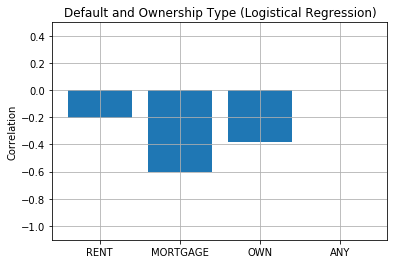

In [43]:
h_x_axis = homeowner[0]
h_y_axis = homeowner[1]
x_axis = np.arange(len(h_x_axis))
plt.bar(x_axis, h_y_axis, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, h_x_axis)

plt.title("Default and Ownership Type (Logistical Regression)")
plt.ylabel("Correlation")

plt.ylim(min(h_y_axis) - .5, max(h_y_axis) + .5)
plt.grid()

plt.savefig("./img/matplotlib_figures/default_and_ownership.png")

plt.show()

In [44]:
loan.purpose.unique().tolist()

['home_improvement',
 'house',
 'car',
 'debt_consolidation',
 'major_purchase',
 'other',
 'credit_card',
 'medical',
 'vacation',
 'small_business',
 'moving',
 'renewable_energy',
 'wedding',
 'educational']

In [45]:
purpose = pd.get_dummies(loan.purpose)
loan = loan.join(purpose)

In [46]:
X_Variables_2 = ['debt_consolidation', 'credit_card', 'home_improvement', 'house','medical','other','major_purchase'
                 ,'car','small_business','vacation','moving','renewable_energy','wedding','educational']
X_2 = loan[X_Variables_2]

In [47]:
X_2 = X_2.values

y_2 = loan['Default_Status'].values

In [48]:
model_2 = clf.fit(X_2,y_2)

model_2.score(X_2,y_2)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8318051746043055

In [50]:
Purpose = pd.DataFrame(list(zip(X_Variables_2, model_2.coef_.T)))
Purpose[1] = Purpose[1].str.get(0)

Purpose


0         1
0   debt_consolidation -0.082834
1          credit_card -0.405348
2     home_improvement -0.289968
3                house  0.158438
4              medical -0.040917
5                other -0.067146
6       major_purchase -0.179286
7                  car -0.380616
8       small_business  0.320889
9             vacation -0.151854
10              moving  0.108645
11    renewable_energy  0.182509
12             wedding -0.482241
13         educational -0.124611

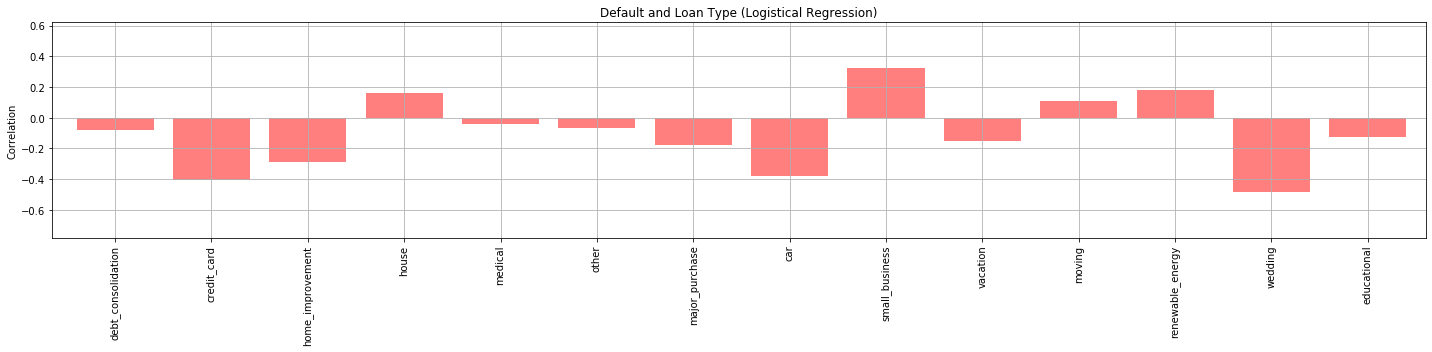

In [51]:
p_x_axis = Purpose[0]
p_y_axis = Purpose[1]

x_axis = np.arange(len(p_x_axis))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,5))
plt.xticks(tick_locations, p_x_axis, rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(min(p_y_axis) - .3, max(p_y_axis) + .3)

plt.title("Default and Loan Type (Logistical Regression)")
plt.ylabel("Correlation")

bars = plt.bar(x_axis, p_y_axis, alpha = .5, color = "r", align="edge")
plt.grid()
plt.tight_layout()
plt.savefig("./img/matplotlib_figures/default_and_loantype.png")

plt.show()

In [52]:
loan.head()

id  loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0  1085      10850    36      0.18     D        D5  10+ years       MORTGAGE   
1  2406      15000    36      0.12     C        C1    7 years            OWN   
2  3565       4000    36      0.11     B        B4    2 years            OWN   
3  3713      35000    36      0.09     B        B2   < 1 year       MORTGAGE   
4  3783      24000    36      0.08     B        B1    2 years           RENT   

   annual_inc loan_status  ... home_improvement house  major_purchase  \
0     47000.0  Fully Paid  ...                1     0               0   
1     97000.0  Fully Paid  ...                0     1               0   
2     36000.0     Current  ...                0     0               0   
3    200000.0     Current  ...                1     0               0   
4     98000.0     Current  ...                0     0               0   

   medical moving  other  renewable_energy  small_business  vacation  wedding  
0        0      0      0                 0               0         0        0  
1        0      0      0                 0               0         0        0  
2        0      0      0                 0               0         0        0  
3        0      0      0                 0               0         0        0  
4        0      0      0                 0               0         0        0  

[5 rows x 34 columns]

In [53]:
employed = pd.get_dummies(loan.emp_length)
loan = loan.join(employed)

In [54]:
X_Variables_emp = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']


In [55]:
x = loan[X_Variables_emp]

y = loan['Default_Status'].values

model_emp = clf.fit(x,y)

In [56]:
clf = linear_model.LogisticRegression()

model_emp = clf.fit(x,y)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
model_emp.score(x,y)

0.8318051746043055

In [60]:
employ_df = pd.DataFrame(list(zip(x,model_emp.coef_.T)))
employ_df[1] = employ_df[1].str.get(0)

employ_df

0         1
0    < 1 year -0.287473
1      1 year -0.246619
2     2 years -0.303567
3     3 years -0.305585
4     4 years -0.295609
5     5 years -0.302810
6     6 years -0.332269
7     7 years -0.306520
8     8 years -0.290465
9     9 years -0.307719
10  10+ years -0.405664

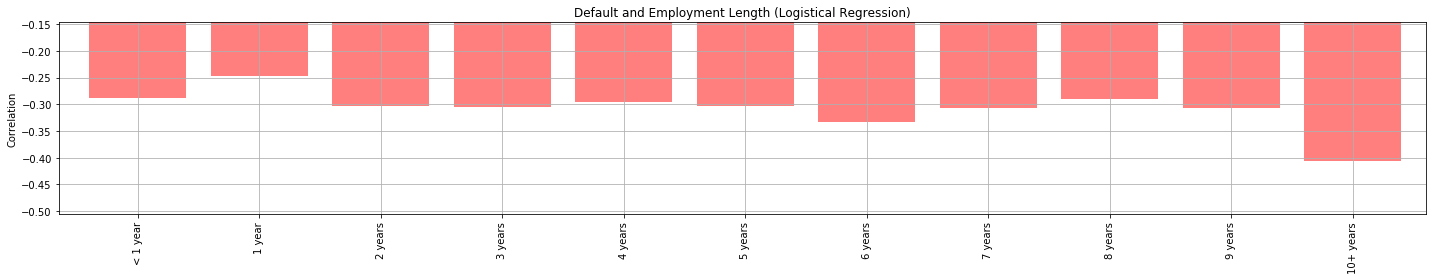

In [61]:
e_x_axis = employ_df[0]
e_y_axis = employ_df[1]

x_axis = np.arange(len(e_x_axis))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,4))
plt.xticks(tick_locations, e_x_axis, rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(min(e_y_axis) - .1, max(e_y_axis) + .1)

plt.title("Default and Employment Length (Logistical Regression)")
plt.ylabel("Correlation")

bars = plt.bar(x_axis, e_y_axis, alpha = .5, color = "r", align="edge")
plt.grid()
plt.tight_layout()
plt.savefig("./img/matplotlib_figures/default_and_employment.png")

plt.show()

In [62]:
grade = pd.get_dummies(loan.grade)
loan = loan.join(grade)
loan.head()

id  loan_amnt  term  int_rate grade sub_grade emp_length home_ownership  \
0  1085      10850    36      0.18     D        D5  10+ years       MORTGAGE   
1  2406      15000    36      0.12     C        C1    7 years            OWN   
2  3565       4000    36      0.11     B        B4    2 years            OWN   
3  3713      35000    36      0.09     B        B2   < 1 year       MORTGAGE   
4  3783      24000    36      0.08     B        B1    2 years           RENT   

   annual_inc loan_status  ... 8 years 9 years  < 1 year  A  B  C  D  E  F  G  
0     47000.0  Fully Paid  ...       0       0         0  0  0  0  1  0  0  0  
1     97000.0  Fully Paid  ...       0       0         0  0  0  1  0  0  0  0  
2     36000.0     Current  ...       0       0         0  0  1  0  0  0  0  0  
3    200000.0     Current  ...       0       0         1  0  1  0  0  0  0  0  
4     98000.0     Current  ...       0       0         0  0  1  0  0  0  0  0  

[5 rows x 52 columns]

In [63]:
X_Variables_grade = ['A','B','C','D','E','F','G']

x_G = loan[X_Variables_grade]

y_G = loan['Default_Status'].values

In [64]:
clf = linear_model.LogisticRegression()

model_G = clf.fit(x_G,y_G)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
model_G.score(x_G,y_G)

0.8318051746043055

In [70]:
Grade_df = pd.DataFrame(list(zip(x_G,model_G.coef_.T)))
Grade_df[1] = Grade_df[1].str.get(0)

Grade_df

0         1
0  A -1.802613
1  B -0.978206
2  C -0.393659
3  D  0.053743
4  E  0.358810
5  F  0.727001
6  G  0.921722

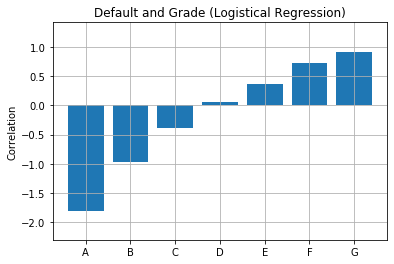

In [71]:
g_x_axis = Grade_df[0]
g_y_axis = Grade_df[1]
x_axis = np.arange(len(g_x_axis))
plt.bar(x_axis, g_y_axis, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, g_x_axis)

plt.title("Default and Grade (Logistical Regression)")
plt.ylabel("Correlation")

plt.ylim(min(g_y_axis) - .5, max(g_y_axis) + .5)
plt.grid()

plt.savefig("./img/matplotlib_figures/default_and_grade.png")

plt.show()

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [73]:
url = 'Lending_Club_Stats_2015_v2.csv'
loan2 = pd.read_csv(url, low_memory = False)

In [74]:
data = loan2.drop(["id","grade","sub_grade","emp_length","home_ownership","loan_status","purpose","addr_state"], axis=1)

In [75]:
x = data.drop("Default_Status", axis=1)
y = data['Default_Status']
print(x.shape, y.shape)

(421095, 5) (421095,)


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
classifier.fit(X_train, y_train)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8318066246386402
Testing Data Score: 0.831800824515075


In [80]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [81]:
logistic_regression_prediction = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
logistic_regression_prediction

Prediction  Actual
0                0       0
1                0       0
2                0       0
3                0       1
4                0       0
...            ...     ...
105269           0       1
105270           0       0
105271           0       0
105272           0       0
105273           0       0

[105274 rows x 2 columns]

In [82]:
lrp_correct = logistic_regression_prediction.loc[logistic_regression_prediction["Actual"] == logistic_regression_prediction["Prediction"]]
correct_percentage = (lrp_correct["Actual"].count())/(logistic_regression_prediction["Actual"].count())*100
correct_percentage

83.1800824515075

In [83]:
lrp_incorrect = logistic_regression_prediction.loc[logistic_regression_prediction["Actual"] != logistic_regression_prediction["Prediction"]]
incorrect_percentage = (lrp_incorrect["Actual"].count())/(logistic_regression_prediction["Actual"].count())*100
incorrect_percentage

16.819917548492505

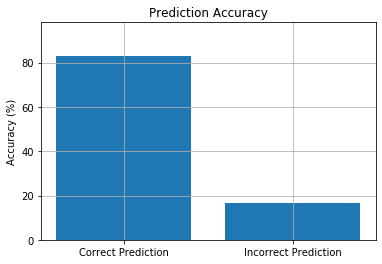

In [84]:
bar_values = [correct_percentage, incorrect_percentage]
bar_names = ["Correct Prediction", "Incorrect Prediction"]
x_axis = np.arange(len(bar_values))
plt.bar(x_axis, bar_values, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, bar_names)

plt.title("Prediction Accuracy")
plt.ylabel("Accuracy (%)")

plt.ylim(0, max(bar_values) + 15)
plt.grid()

plt.savefig("./img/matplotlib_figures/prediction_accuracy.png")

plt.show()

In [85]:
logistic_regression_prediction["Prediction"].mean()

0.0

In [86]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred = LogReg.predict(X_test)


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[87567,     0],
       [17707,     0]])

In [89]:
from sklearn import tree
import pandas as pd

In [90]:
url = 'Lending_Club_Stats_2015_v2.csv'
loan2 = pd.read_csv(url, low_memory = False)

In [91]:
target = loan2["Default_Status"]

In [92]:
target_names = ['Default','Paid']

In [93]:
data = loan2.drop(["Default_Status","id","grade","sub_grade","emp_length","home_ownership","loan_status","purpose","addr_state"], axis=1)

In [94]:

feature_names = data.columns

data.head()

loan_amnt  term  int_rate  annual_inc  dti
0      10850    36      0.18     47000.0    0
1      15000    36      0.12     97000.0    0
2       4000    36      0.11     36000.0    0
3      35000    36      0.09    200000.0    0
4      24000    36      0.08     98000.0    0

In [95]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 5 columns):
loan_amnt     421095 non-null int64
term          421095 non-null int64
int_rate      421095 non-null float64
annual_inc    421095 non-null float64
dti           421095 non-null int64
dtypes: float64(2), int64(3)
memory usage: 19.3 MB


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [97]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7375420331705834

In [98]:
from  sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8002545737789007

In [99]:
random_forest_df = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True))
random_forest_df

0           1
0  0.390570  annual_inc
1  0.318525   loan_amnt
2  0.178849         dti
3  0.102138    int_rate
4  0.009918        term

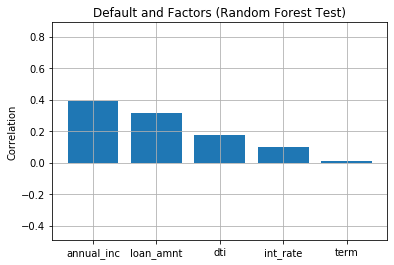

In [100]:
r_x_axis = random_forest_df[1]
r_y_axis = random_forest_df[0]
x_axis = np.arange(len(r_x_axis))
plt.bar(x_axis, r_y_axis, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, r_x_axis)

plt.title("Default and Factors (Random Forest Test)")
plt.ylabel("Correlation")

plt.ylim(min(r_y_axis) - .5, max(r_y_axis) + .5)
plt.grid()

plt.savefig("./img/matplotlib_figures/default_and_factors.png")

plt.show()